# **Facial Emotion Detection**


---
## **Context**
---

Deep learning has been increasingly applied to tasks involving less structured data types like images, texts, audio, and video in recent years. These endeavors often aim to achieve human-like proficiency in processing such data, leveraging our innate ability to intelligently interact with complex, unstructured information. Within the realm of AI, a field known as Artificial Emotional Intelligence, or Emotion AI, focuses on creating technologies that can understand human emotions by analyzing body language, facial expressions, and voice tones, and respond to them effectively.

Recognizing facial expressions plays a vital role in human-computer interaction. Research indicates that facial expressions and other visual signals account for about 55% of how we convey emotions. Thus, developing a model capable of accurately recognizing facial emotions is a significant stride toward equipping machines with AI that exhibits emotionally intelligent behavior. Systems that can automatically recognize facial expressions have a broad range of potential applications, from understanding human behavior to diagnosing psychological conditions, and improving the interaction quality of virtual assistants in customer service settings.

---

## **Objective**

---

The goal of this project is to use Deep Learning and Artificial Intelligence techniques to create a computer vision model that can accurately detect facial emotions. The model should be able to perform multi-class classification on images of facial expressions, to classify the expressions according to the associated emotion.

---

## **Key Questions**

---

Throughout the project, we will be answering the following questions:

- How accurately can the deep learning model identify and classify different facial emotions (happy, sad, surprise, neutral) from images?
- How well does the model generalize to new, unseen images? Can it maintain high accuracy across the test, train, and validation datasets?
- How does the different model architectures compare in terms of accuracy to classify the different emotions?
- What are the potential applications of the developed model, and what implications might its deployment have in some industry fields?

---

## **Problem Formulation**

---

We are tasked with leveraging Deep Learning techniques to develop a computer vision model capable of accurately detecting and classifying facial emotions. The model needs to distinguish between four specific emotions (happy, sad, surprise, neutral) based on images of facial expressions. This task involves multi-class classification, requiring the model to predict the correct category of emotion for each image it processes.

---

## **About the dataset**

---

The data set consists of 3 folders, i.e., 'test', 'train', and 'validation'.
Each of these folders has four subfolders:

**‘happy’**: Images of people who have happy facial expressions.<br>
**‘sad’**: Images of people with sad or upset facial expressions.<br>
**‘surprise’**: Images of people who have shocked or surprised facial expressions.<br>
**‘neutral’**: Images of people showing no prominent emotion in their facial expression at all.<br>


## **Mounting the Drive**

**NOTE:** Please use Google Colab from your browser for this notebook. **Google.colab is NOT a library that can be downloaded locally on your device.**


In [1]:
# from google.colab import drive
# drive.mount("/content/drive")

## **Importing the Libraries**


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import zipfile
import random
from PIL import Image
from typing import List
from datetime import datetime

# For Data Visualization
import seaborn as sns

# For Model Building
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential, Model  # Sequential API for sequential model
from tensorflow.keras.layers import Dense, Dropout, Flatten  # Importing different layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras import backend
from tensorflow.keras.optimizers import Adam, SGD  # Optimizers for optimizing the model
from tensorflow.keras.callbacks import EarlyStopping  # Regularization method to prevent the overfitting
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.applications.resnet_v2 import ResNet50V2, preprocess_input
from keras.applications.efficientnet import EfficientNetB0, preprocess_input

2024-03-20 07:09:05.838953: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-20 07:09:05.838970: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-20 07:09:05.839503: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-20 07:09:05.842991: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2024-03-20 07:09:06.371487: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


### **Let us load and unzip the data**


**Note:**

- You must download the dataset from the link provided on Olympus and upload the same on your Google drive before executing the code in the next cell.
- In case of any error, please make sure that the path of the file is correct as the path may be different for you.


In [3]:
# Storing the path of the data file from the Google drive
# path = "/content/drive/MyDrive/Studies/MIT-AI-ML/11. Capstone Project/Facial_emotion_images.zip"

# The data is provided as a zip file so we need to extract the files from the zip file
# with zipfile.ZipFile(path, "r") as zip_ref:
#    zip_ref.extractall()

## **Preparing the Data**

The dataset has three folders, i.e., 'train', 'validation' and 'test'. Each of these folders has four sub-folders, namely 'happy', 'neutral', 'sad', and 'surprise'.

We will have the train and test path stored in a variable named 'SUBDIRS', and a base directory 'DATADIR'.

The names of the sub-folders, which will be the classes for our classification task will be stored in an array called 'CATEGORIES'.


In [4]:
DATADIR = "/home/iamtxena/sandbox/mit-ai/capstone/Facial_Emotion_Recognition/Facial_emotion_images"
# DATADIR = "/content/Facial_emotion_images"  # Base directory
SUBDIRS = ["train", "validation", "test"]  # Subdirectories
CATEGORIES = ["happy", "neutral", "sad", "surprise"]  # Emotion categories

We are going to check the size of one image, and then check if all the other images have the same size. In case, they are different, we'll resize the ones that are different.


In [5]:
def get_first_image_size(directory, sub_dirs, categories):
    """
    Returns the size of the first image found in the specified directories.

    Parameters:
    - directory (str): The base directory of the dataset.
    - sub_dirs (list of str): Subdirectories to search through (e.g., ['train', 'validation', 'test']).
    - categories (list of str): Categories (e.g., ['happy', 'neutral', 'sad', 'surprise']).

    Returns:
    - tuple: Size of the first image found (width, height).
    """
    for sub_dir in sub_dirs:
        for category in categories:
            path = os.path.join(directory, sub_dir, category)
            for img_name in os.listdir(path):
                img_path = os.path.join(path, img_name)
                with Image.open(img_path) as img:
                    return img.size  # Return the size of the first image found

In [6]:
# Get the size of the first image
expected_size = get_first_image_size(DATADIR, SUBDIRS, CATEGORIES)

print(f"Expected size of the first image: {expected_size}")

Expected size of the first image: (48, 48)


In [7]:
def check_image_sizes(directory, sub_dirs, categories, target_size):
    """
    Checks if all images in the specified directories match the target size.

    Parameters:
    - directory (str): The base directory of the dataset.
    - sub_dirs (list of str): Subdirectories to search through.
    - categories (list of str): Categories to search through.
    - target_size (tuple): The expected size of the images (width, height).

    Returns:
    - bool: True if all images match the target size, False otherwise.
    """
    all_match = True  # Flag to keep track of size match

    for sub_dir in sub_dirs:
        for category in categories:
            path = os.path.join(directory, sub_dir, category)
            for img_name in os.listdir(path):
                img_path = os.path.join(path, img_name)
                with Image.open(img_path) as img:
                    if img.size != target_size:
                        print(f"Image {img_path} has a different size: {img.size}, expected: {target_size}")
                        all_match = False
                        return all_match  # Return early upon first mismatch
    return all_match

In [8]:
# Check if all images match the expected size
all_match = check_image_sizes(DATADIR, SUBDIRS, CATEGORIES, expected_size)
if all_match:
    print("All images match the expected size.")
else:
    print("Not all images match the expected size.")

All images match the expected size.


## **Visualizing our Classes**

Let's look at our classes.

**Write down your observation for each class. What do you think can be a unique feature of each emotion, that separates it from the remaining classes?**


In [9]:
def visualize_emotion_images(directory: str, sub_dirs: List[str], emotion: str, image_count: int = 9) -> None:
    """
    Visualizes a specified number of images from a given emotion class directory across specified subdirectories.

    Parameters:
    - directory (str): The base directory where emotion class folders are located across subdirectories.
    - sub_dirs (List[str]): List of subdirectories ('train', 'validation', 'test') to search through.
    - emotion (str): The specific emotion class to visualize images from.
    - image_count (int): The number of images to display. Defaults to 9.

    Returns:
    - None: This function does not return any value but displays images inline.
    """
    image_paths: List[str] = []  # To store paths of images to be displayed

    # Iterate through the specified subdirectories to collect image paths
    for sub_dir in sub_dirs:
        emotion_dir: str = os.path.join(directory, sub_dir, emotion)
        if os.path.isdir(emotion_dir):
            for img_name in os.listdir(emotion_dir):
                img_path = os.path.join(emotion_dir, img_name)
                image_paths.append(img_path)

    # If there are no images found for the emotion, print a message and return
    if not image_paths:
        print(f"No images found for the specified emotion: {emotion}")
        return

    # Select a random subset of image paths
    selected_image_paths: np.ndarray = np.random.choice(image_paths, min(image_count, len(image_paths)), replace=False)

    # Setup for plotting
    fig = plt.figure(figsize=(4, 4))
    columns: int = 3
    rows: int = image_count // columns + (1 if image_count % columns else 0)

    # Iterate over the selected images and display them
    for i, image_path in enumerate(selected_image_paths, start=1):
        ax = fig.add_subplot(rows, columns, i)
        image = load_img(image_path, target_size=(48, 48))  # Ensure the image is resized to 48x48
        plt.imshow(image)
        plt.axis("off")

    plt.tight_layout()
    plt.show()

### **Happy**


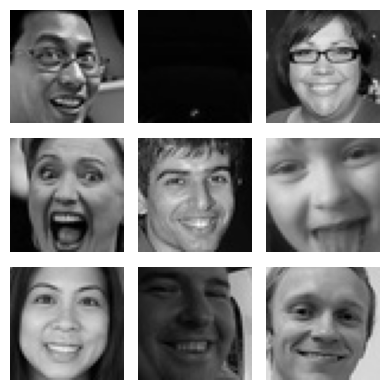

In [10]:
visualize_emotion_images(DATADIR, SUBDIRS, "happy", 9)

**Observations and Insights:**

- The images appear to be in grayscale and vary in terms of lighting, contrast, and clarity.

- The images display a range of happy expressions, from broad smiles showing teeth to subtle smiles without teeth. Also a diversity of subjects in terms of age, gender and also ethnicity.


### **Sad**


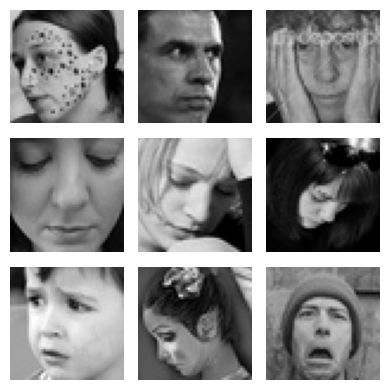

In [11]:
visualize_emotion_images(DATADIR, SUBDIRS, "sad", 9)

**Observations and Insights:**

- The images capture a wide spectrum of sadness, from subtle, somber expressions to more overt manifestations like crying.
- The dataset includes faces with different orientations and features. Some faces are directly looking at the camera, while others are tilted or partially turned away.


### **Neutral**


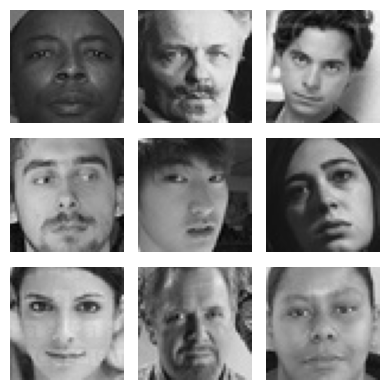

In [12]:
visualize_emotion_images(DATADIR, SUBDIRS, "neutral", 9)

**Observations and Insights:**

- The defining characteristic of these images is the absence of clear, expressive features that denote a specific emotion.
- Some faces may have subtle features that could be misconstrued as expressing a mild emotion.


### **Surprised**


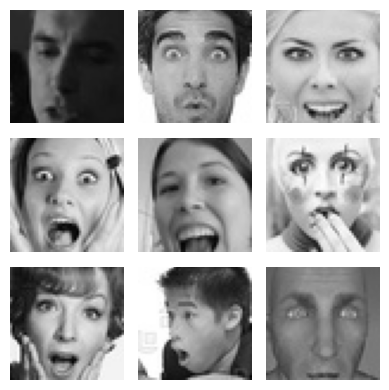

In [13]:
visualize_emotion_images(DATADIR, SUBDIRS, "surprise", 9)

**Observations and Insights:**

- The images showcase a range of intensities of surprise, from wide-eyed and open-mouthed expressions to more subdued, raised-eyebrow looks.
- The subjects vary in age, including both infants and adults.


## **Checking Distribution of Classes**


In [14]:
# Function to count images in each category
def count_images(data_dir, categories):
    counts = []
    for category in categories:
        path = os.path.join(data_dir, category)
        count = len([name for name in os.listdir(path) if os.path.isfile(os.path.join(path, name))])
        counts.append(count)
    return counts


SUBDIRS_DICT = {"train": "train", "validation": "validation", "test": "test"}

# Counting images in each dataset
train_counts = count_images(os.path.join(DATADIR, SUBDIRS_DICT["train"]), CATEGORIES)
validation_counts = count_images(os.path.join(DATADIR, SUBDIRS_DICT["validation"]), CATEGORIES)
test_counts = count_images(os.path.join(DATADIR, SUBDIRS_DICT["test"]), CATEGORIES)


# Create DataFrames and format for easier reading
def create_df(counts, categories, dataset_name):
    df = pd.DataFrame({"Class": categories, "Count": counts})
    df["Percentage"] = (df["Count"] / df["Count"].sum()) * 100
    df.set_index("Class", inplace=True)

    # Formatting for easier reading
    df["Count"] = df["Count"].apply(lambda x: f"{x:,}")  # Adds commas to thousands
    df["Percentage"] = df["Percentage"].apply(lambda x: f"{x:.2f}")  # Rounds to two decimals

    print(f"{dataset_name} Data Distribution:")
    print(df)
    total_images = df["Count"].str.replace(",", "").astype(int).sum()
    print(f"Total images in {dataset_name}: {total_images:,}\n")  # Formats total count with commas


create_df(train_counts, CATEGORIES, "Training")
create_df(validation_counts, CATEGORIES, "Validation")
create_df(test_counts, CATEGORIES, "Testing")

Training Data Distribution:
          Count Percentage
Class                     
happy     3,976      26.32
neutral   3,978      26.33
sad       3,982      26.36
surprise  3,173      21.00
Total images in Training: 15,109

Validation Data Distribution:
          Count Percentage
Class                     
happy     1,825      36.67
neutral   1,216      24.43
sad       1,139      22.89
surprise    797      16.01
Total images in Validation: 4,977

Testing Data Distribution:
         Count Percentage
Class                    
happy       32      25.00
neutral     32      25.00
sad         32      25.00
surprise    32      25.00
Total images in Testing: 128



**Observations and Insights:**

- Training Data: The training dataset shows a relatively balanced distribution among the classes of 'happy', 'neutral', and 'sad', each comprising approximately 26% of the dataset. However, 'surprise' is slightly underrepresented, making up 21% of the data. We'll see on the results if this is noticeable.
- Validation Data: In the validation dataset, there's a more pronounced imbalance. 'Happy' expressions dominate at 36.67%, followed by 'neutral' at 24.43%, 'sad' at 22.89%, and 'surprise' at 16.01%. This distribution deviates more significantly from an even split, indicating a potential bias towards 'happy' expressions.
- Testing Data: The testing dataset is perfectly balanced, with each class representing 25% of the data. This uniform distribution is ideal for evaluating the model's performance across all classes evenly.

Regarding the Exploratory Data Analysis, we can use data augmentation to balance the classes. For now, we'll see the results with the given dataset, and if necessary, we can adjust that.


**Think About It:**

- Are the classes equally distributed? If not, do you think the imbalance is too high? Will it be a problem as we progress?
- Are there any Exploratory Data Analysis tasks that we can do here? Would they provide any meaningful insights?


## **Creating our Data Loaders**

In this section, we are creating data loaders that we will use as inputs to our Neural Network.

**You have two options for the color_mode. You can set it to color_mode = 'rgb' or color_mode = 'grayscale'. You will need to try out both and see for yourself which one gives better performance.**


In [15]:
# Set this to 'grayscale' as the images are in grayscale
color_mode = "grayscale"

# As we have checked, all images are 48x48, we will set the img_width and img_height to 48
img_width, img_height = 48, 48
color_layers = 1
# A batch size of 32 is appropriate for this dataset provide to provide a good balance
# between the model's ability to generalize (avoid overfitting) and computational efficiency.
batch_size = 32

# Training Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,  # Normalize pixel values to [0,1]
    # rotation_range=20,  # Slight rotation to introduce variability without distorting emotion features
    # width_shift_range=0.1,  # Slight horizontal shifts to simulate off-center faces
    # height_shift_range=0.1,  # Slight vertical shifts to account for different heights/angles
    # shear_range=0.1,  # Small shear transformations for slight perspective changes
    # zoom_range=0.1,  # Small zoom in/out to simulate closer or further away faces
    # horizontal_flip=True,  # Faces are symmetric; flipping can simulate looking from another direction
    # fill_mode="nearest",  # 'nearest' interpolation for filling in new pixels after a transformation
)

# Validation and Testing Data should not be augmented!
validation_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

# Assuming train_dir, validation_dir, and test_dir should follow the structure in DATADIR and SUBDIRS
train_dir = os.path.join(DATADIR, SUBDIRS_DICT["train"])
validation_dir = os.path.join(DATADIR, SUBDIRS_DICT["validation"])
test_dir = os.path.join(DATADIR, SUBDIRS_DICT["test"])

# Train Generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    color_mode=color_mode,  # Set to 'grayscale'
    class_mode="categorical",
)

# Validation Generator
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    color_mode=color_mode,  # Set to 'grayscale'
    class_mode="categorical",
)

# Testing Generator
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    color_mode=color_mode,  # Set to 'grayscale'
    class_mode="categorical",
    shuffle=False,  # shuffle=False to keep data in order for testing
)

Found 15109 images belonging to 4 classes.


Found 4977 images belonging to 4 classes.


Found 128 images belonging to 4 classes.


Let's look at some examples of a batch of augmented training data.


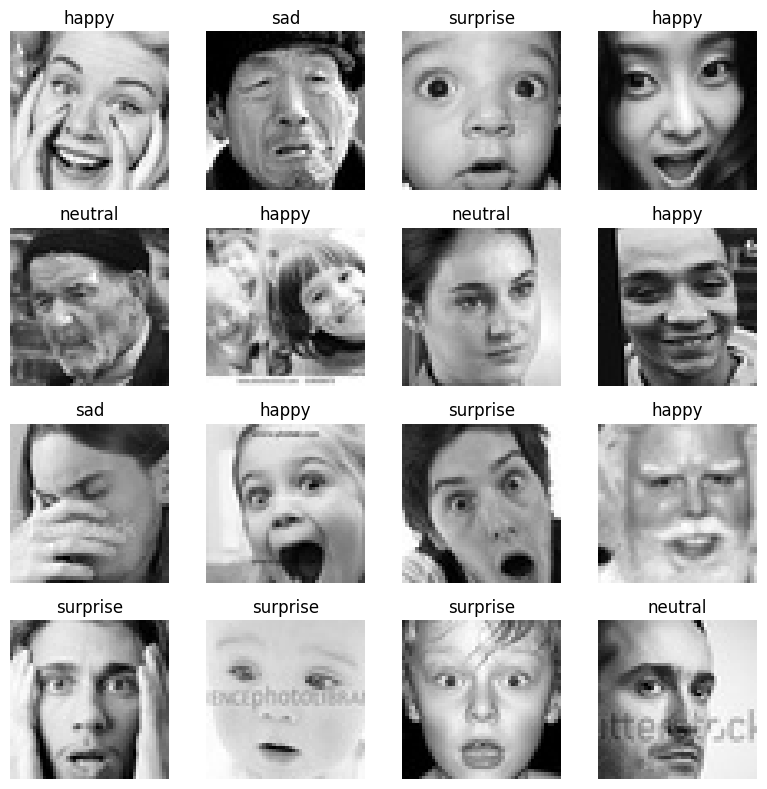

In [16]:
# Fetch a batch of images and labels
images, labels = next(train_generator)

# Assuming the labels are one-hot encoded, we need to convert them back to class indices
labels_indices = labels.argmax(axis=1)

# Mapping of indices to class names, based on the 'class_indices' attribute of the generator
index_to_class = {v: k for k, v in train_generator.class_indices.items()}

fig, axes = plt.subplots(4, 4, figsize=(8, 8))
for image, label_index, ax in zip(images, labels_indices, axes.flatten()):
    ax.imshow(image.squeeze(), cmap="gray")  # Squeeze and cmap for grayscale
    class_name = index_to_class[label_index]
    ax.set_title(class_name)
    ax.axis("off")

plt.tight_layout()
plt.show()

## **Model Building**


**Think About It:**

- Are Convolutional Neural Networks the right approach? Should we have gone with Artificial Neural Networks instead?
- What are the advantages of CNNs over ANNs and are they applicable here?


### **Creating the Base Neural Network**


### **Model 1 Architecture:**

- First CNN Model will have three convolutional blocks.
- Each convolutional block will have a Conv2D layer and a MaxPooling2D Layer.
- First Conv2D layer with **64 filters** and a **kernel size of 3x3**. Using the **'same' padding** and providing the **input shape = (48, 48, 1)**. Using **'relu' activation**.
- Adding MaxPooling2D layer with **kernel size 3x3** and using **padding = 'same'**.
- Adding a second Conv2D layer with **32 filters** and **a kernel size of 3x3**. Using the **'same' padding** and **'relu activation**.
- Following it up with another MaxPooling2D layer **kernel size 3x3** and using **padding = 'same'**.
- Adding a third Conv2D layer with **32 filters and the kernel size of 3x3**. Using the **'same' padding** and **'relu activation**. Once again, following it up with another Maxpooling2D layer with **kernel size 3x3** and **padding = 'same'**.
- Once the convolutional blocks are added, we add the Flatten layer.
- Finally, we add dense layers.
- Adding first Dense layer with **100 neurons** and **'relu' activation**
- The last dense layer needs to have as many neurons as the number of classes, which in this case is 4 and use **'softmax' activation**.
- As an optimizer we will use SGD optimizer with **learning rate = 0.01** and **momentum = 0.9**


In [17]:
backend.clear_session()

# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)

random.seed(42)
tf.random.set_seed(42)

In [18]:
# Intializing a sequential model
model_1 = Sequential()

# Adding first conv layer with 64 filters and kernel size 3x3, padding 'same' provides the output size same as the input size
# The input_shape denotes input image dimension
model_1.add(Conv2D(64, (3, 3), activation="relu", padding="same", input_shape=(img_width, img_height, color_layers)))

# Adding max pooling to reduce the size of output of first conv layer
model_1.add(MaxPooling2D((2, 2), padding="same"))

# Adding second conv layer with 32 filters and kernel size 3x3, padding 'same' followed by a Maxpooling2D layer
model_1.add(Conv2D(32, (3, 3), activation="relu", padding="same"))
model_1.add(MaxPooling2D((2, 2), padding="same"))

# Add third conv layer with 32 filters and kernel size 3x3, padding 'same' followed by a Maxpooling2D layer
model_1.add(Conv2D(32, (3, 3), activation="relu", padding="same"))
model_1.add(MaxPooling2D((2, 2), padding="same"))

# Flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model_1.add(Flatten())

# Adding a fully connected dense layer with 100 neurons
model_1.add(Dense(100, activation="relu"))

# Adding the output layer with 3 neurons and activation functions as softmax since this is a multi-class classification problem
model_1.add(Dense(4, activation="softmax"))

# Using SGD Optimizer
opt = SGD(learning_rate=0.01, momentum=0.9)

2024-03-20 07:09:09.608268: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-20 07:09:09.623880: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-20 07:09:09.624008: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

### **Compiling and Training the Model**


In [19]:
# Compiling the model
model_1.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])

# Generating the summary of the model
model_1.summary()

Model: "sequential"


_________________________________________________________________


 Layer (type)                Output Shape              Param #   


 conv2d (Conv2D)             (None, 48, 48, 64)        640       


 max_pooling2d (MaxPooling2  (None, 24, 24, 64)        0         


 D)                                                              


 conv2d_1 (Conv2D)           (None, 24, 24, 32)        18464     


 max_pooling2d_1 (MaxPoolin  (None, 12, 12, 32)        0         


 g2D)                                                            


 conv2d_2 (Conv2D)           (None, 12, 12, 32)        9248      


 max_pooling2d_2 (MaxPoolin  (None, 6, 6, 32)          0         


 g2D)                                                            


 flatten (Flatten)           (None, 1152)              0         


 dense (Dense)               (None, 100)               115300    


 dense_1 (Dense)             (None, 4)                 404       


Total params: 144056 (562.72 KB)


Trainable params: 144056 (562.72 KB)


Non-trainable params: 0 (0.00 Byte)


_________________________________________________________________


In [20]:
# results_path = "/content/drive/MyDrive/Studies/MIT-AI-ML/11. Capstone Project/results"
results_path = "/home/iamtxena/sandbox/mit-ai/capstone/Facial_Emotion_Recognition/results"

In [21]:
class DelayedEarlyStopping(EarlyStopping):
    """Stop training when a monitored metric has stopped improving after a certain number of epochs.

    Arguments:
        monitor: Quantity to be monitored.
        min_delta: Minimum change in the monitored quantity to qualify as an improvement,
                   i.e., an absolute change of less than min_delta will count as no improvement.
        patience: Number of epochs with no improvement after which training will be stopped.
        verbose: Verbosity mode.
        mode: One of `{'auto', 'min', 'max'}`. In `min` mode, training will stop when the
              quantity monitored has stopped decreasing; in `max` mode it will stop when the
              quantity monitored has stopped increasing; in `auto` mode, the direction is
              automatically inferred from the name of the monitored quantity.
        baseline: Baseline value for the monitored quantity. Training will stop if the model
                  doesn't show improvement over the baseline.
        restore_best_weights: Whether to restore model weights from the epoch with the best value
                              of the monitored quantity.
        start_epoch: The epoch on which to start considering early stopping. Before this epoch,
                     early stopping will not be considered. This ensures that early stopping
                     checks only after a certain number of epochs.
    """

    def __init__(
        self,
        monitor="val_loss",
        min_delta=0,
        patience=0,
        verbose=0,
        mode="auto",
        baseline=None,
        restore_best_weights=False,
        start_epoch=30,
    ):
        super(DelayedEarlyStopping, self).__init__(
            monitor=monitor,
            min_delta=min_delta,
            patience=patience,
            verbose=verbose,
            mode=mode,
            baseline=baseline,
            restore_best_weights=restore_best_weights,
        )
        self.start_epoch = start_epoch

    def on_epoch_end(self, epoch, logs=None):
        # Override the original `on_epoch_end` method to include `start_epoch` logic.

        # If the current epoch is less than the start epoch, skip the early stopping check
        if epoch < self.start_epoch:
            return

        # Call the parent class method to perform the regular early stopping checks after the start epoch
        super(DelayedEarlyStopping, self).on_epoch_end(epoch, logs)


# Usage of DelayedEarlyStopping
# Define the EarlyStopping callback with a start epoch
delayed_early_stopping = DelayedEarlyStopping(
    monitor="val_loss", patience=10, verbose=1, restore_best_weights=True, start_epoch=30
)

In [22]:
# Get the current time
current_time = datetime.now().strftime("%Y%m%d-%H%M%S")

# Set up Early Stopping with a patience 7 but acting after at least 30 epochs
delayed_early_stopping = DelayedEarlyStopping(
    monitor="val_loss", patience=7, verbose=1, restore_best_weights=True, start_epoch=30
)

# Define the learning rate scheduler callback
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.2, patience=5, min_lr=0.00001, verbose=1)
mc = ModelCheckpoint(
    f"{results_path}/best_model_1_{current_time}.keras",
    monitor="val_accuracy",
    mode="max",
    verbose=1,
    save_best_only=True,
)

# Pulling a single large batch of random validation data for doing the validation after each epoch
validationX, validationY = validation_generator.next()

# Fitting the model with 40 epochs and using validation set
history_1 = model_1.fit(
    train_generator,
    epochs=40,
    validation_data=(validationX, validationY),
    callbacks=[delayed_early_stopping, mc, reduce_lr],
)

Epoch 1/40


2024-03-20 07:09:10.332681: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8902


2024-03-20 07:09:10.607443: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f8b3d1a1440 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-03-20 07:09:10.607465: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3070, Compute Capability 8.6
I0000 00:00:1710918550.652029 1588650 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


  1/473 [..............................] - ETA: 10:14 - loss: 1.3855 - accuracy: 0.1562

 16/473 [>.............................] - ETA: 1s - loss: 1.3876 - accuracy: 0.2344   

 27/473 [>.............................] - ETA: 1s - loss: 1.3856 - accuracy: 0.2604

 35/473 [=>............................] - ETA: 2s - loss: 1.3840 - accuracy: 0.2562

 44/473 [=>............................] - ETA: 2s - loss: 1.3851 - accuracy: 0.2585

 57/473 [==>...........................] - ETA: 1s - loss: 1.3831 - accuracy: 0.2632

 70/473 [===>..........................] - ETA: 1s - loss: 1.3818 - accuracy: 0.2683

 84/473 [====>.........................] - ETA: 1s - loss: 1.3802 - accuracy: 0.2701

 97/473 [=====>........................] - ETA: 1s - loss: 1.3784 - accuracy: 0.2722

110/473 [=====>........................] - ETA: 1s - loss: 1.3786 - accuracy: 0.2750

123/473 [======>.......................] - ETA: 1s - loss: 1.3770 - accuracy: 0.2790

136/473 [=======>......................] - ETA: 1s - loss: 1.3756 - accuracy: 0.2778

149/473 [========>.....................] - ETA: 1s - loss: 1.3748 - accuracy: 0.2798

162/473 [=========>....................] - ETA: 1s - loss: 1.3729 - accuracy: 0.2851

175/473 [==========>...................] - ETA: 1s - loss: 1.3715 - accuracy: 0.2875

188/473 [==========>...................] - ETA: 1s - loss: 1.3710 - accuracy: 0.2872

202/473 [===========>..................] - ETA: 1s - loss: 1.3690 - accuracy: 0.2887

216/473 [============>.................] - ETA: 1s - loss: 1.3671 - accuracy: 0.2925

229/473 [=============>................] - ETA: 0s - loss: 1.3661 - accuracy: 0.2939

243/473 [==============>...............] - ETA: 0s - loss: 1.3655 - accuracy: 0.2948

256/473 [===============>..............] - ETA: 0s - loss: 1.3643 - accuracy: 0.2959

269/473 [================>.............] - ETA: 0s - loss: 1.3622 - accuracy: 0.2983

282/473 [================>.............] - ETA: 0s - loss: 1.3603 - accuracy: 0.3002

295/473 [=================>............] - ETA: 0s - loss: 1.3602 - accuracy: 0.3016

308/473 [==================>...........] - ETA: 0s - loss: 1.3602 - accuracy: 0.3026

321/473 [===================>..........] - ETA: 0s - loss: 1.3590 - accuracy: 0.3047

334/473 [====================>.........] - ETA: 0s - loss: 1.3576 - accuracy: 0.3060

347/473 [=====================>........] - ETA: 0s - loss: 1.3552 - accuracy: 0.3090

360/473 [=====================>........] - ETA: 0s - loss: 1.3531 - accuracy: 0.3116

373/473 [======================>.......] - ETA: 0s - loss: 1.3527 - accuracy: 0.3134

376/473 [======================>.......] - ETA: 0s - loss: 1.3525 - accuracy: 0.3135

388/473 [=======================>......] - ETA: 0s - loss: 1.3509 - accuracy: 0.3149

397/473 [========================>.....] - ETA: 0s - loss: 1.3508 - accuracy: 0.3151

411/473 [=========================>....] - ETA: 0s - loss: 1.3484 - accuracy: 0.3179

425/473 [=========================>....] - ETA: 0s - loss: 1.3475 - accuracy: 0.3195

438/473 [==========================>...] - ETA: 0s - loss: 1.3456 - accuracy: 0.3219

451/473 [===========================>..] - ETA: 0s - loss: 1.3429 - accuracy: 0.3248

465/473 [============================>.] - ETA: 0s - loss: 1.3409 - accuracy: 0.3279


Epoch 1: val_accuracy improved from -inf to 0.43750, saving model to /home/iamtxena/sandbox/mit-ai/capstone/Facial_Emotion_Recognition/results/best_model_1_20240320-070909.keras


473/473 [==============================] - 4s 5ms/step - loss: 1.3402 - accuracy: 0.3290 - val_loss: 1.1796 - val_accuracy: 0.4375 - lr: 0.0100


Epoch 2/40


  1/473 [..............................] - ETA: 5s - loss: 1.1861 - accuracy: 0.4688

 14/473 [..............................] - ETA: 1s - loss: 1.2541 - accuracy: 0.4107

 27/473 [>.............................] - ETA: 1s - loss: 1.2680 - accuracy: 0.3877

 41/473 [=>............................] - ETA: 1s - loss: 1.2570 - accuracy: 0.4032

 55/473 [==>...........................] - ETA: 1s - loss: 1.2554 - accuracy: 0.4142

 69/473 [===>..........................] - ETA: 1s - loss: 1.2334 - accuracy: 0.4339

 82/473 [====>.........................] - ETA: 1s - loss: 1.2337 - accuracy: 0.4345

 96/473 [=====>........................] - ETA: 1s - loss: 1.2289 - accuracy: 0.4378

109/473 [=====>........................] - ETA: 1s - loss: 1.2312 - accuracy: 0.4355

122/473 [======>.......................] - ETA: 1s - loss: 1.2226 - accuracy: 0.4419

135/473 [=======>......................] - ETA: 1s - loss: 1.2182 - accuracy: 0.4475

148/473 [========>.....................] - ETA: 1s - loss: 1.2193 - accuracy: 0.4468

161/473 [=========>....................] - ETA: 1s - loss: 1.2176 - accuracy: 0.4478

174/473 [==========>...................] - ETA: 1s - loss: 1.2151 - accuracy: 0.4458

188/473 [==========>...................] - ETA: 1s - loss: 1.2110 - accuracy: 0.4503

202/473 [===========>..................] - ETA: 1s - loss: 1.2113 - accuracy: 0.4497

216/473 [============>.................] - ETA: 0s - loss: 1.2081 - accuracy: 0.4520

229/473 [=============>................] - ETA: 0s - loss: 1.2048 - accuracy: 0.4540

242/473 [==============>...............] - ETA: 0s - loss: 1.1976 - accuracy: 0.4582

256/473 [===============>..............] - ETA: 0s - loss: 1.1933 - accuracy: 0.4628

270/473 [================>.............] - ETA: 0s - loss: 1.1904 - accuracy: 0.4652

284/473 [=================>............] - ETA: 0s - loss: 1.1899 - accuracy: 0.4648

298/473 [=================>............] - ETA: 0s - loss: 1.1886 - accuracy: 0.4662

311/473 [==================>...........] - ETA: 0s - loss: 1.1864 - accuracy: 0.4684

325/473 [===================>..........] - ETA: 0s - loss: 1.1851 - accuracy: 0.4705

339/473 [====================>.........] - ETA: 0s - loss: 1.1837 - accuracy: 0.4711

353/473 [=====================>........] - ETA: 0s - loss: 1.1817 - accuracy: 0.4734

367/473 [======================>.......] - ETA: 0s - loss: 1.1778 - accuracy: 0.4759

381/473 [=======================>......] - ETA: 0s - loss: 1.1759 - accuracy: 0.4774

395/473 [========================>.....] - ETA: 0s - loss: 1.1730 - accuracy: 0.4794

408/473 [========================>.....] - ETA: 0s - loss: 1.1703 - accuracy: 0.4799

421/473 [=========================>....] - ETA: 0s - loss: 1.1681 - accuracy: 0.4818

434/473 [==========================>...] - ETA: 0s - loss: 1.1667 - accuracy: 0.4829

447/473 [===========================>..] - ETA: 0s - loss: 1.1635 - accuracy: 0.4847

460/473 [============================>.] - ETA: 0s - loss: 1.1623 - accuracy: 0.4849

473/473 [==============================] - ETA: 0s - loss: 1.1613 - accuracy: 0.4850


Epoch 2: val_accuracy did not improve from 0.43750


473/473 [==============================] - 2s 4ms/step - loss: 1.1613 - accuracy: 0.4850 - val_loss: 1.1188 - val_accuracy: 0.4375 - lr: 0.0100


Epoch 3/40


  1/473 [..............................] - ETA: 5s - loss: 1.2576 - accuracy: 0.5938

 15/473 [..............................] - ETA: 1s - loss: 1.1345 - accuracy: 0.5188

 28/473 [>.............................] - ETA: 1s - loss: 1.0904 - accuracy: 0.5301

 41/473 [=>............................] - ETA: 1s - loss: 1.0785 - accuracy: 0.5351

 54/473 [==>...........................] - ETA: 1s - loss: 1.0754 - accuracy: 0.5278

 67/473 [===>..........................] - ETA: 1s - loss: 1.0704 - accuracy: 0.5364

 80/473 [====>.........................] - ETA: 1s - loss: 1.0745 - accuracy: 0.5340

 93/473 [====>.........................] - ETA: 1s - loss: 1.0730 - accuracy: 0.5312

106/473 [=====>........................] - ETA: 1s - loss: 1.0684 - accuracy: 0.5324

120/473 [======>.......................] - ETA: 1s - loss: 1.0656 - accuracy: 0.5362

133/473 [=======>......................] - ETA: 1s - loss: 1.0616 - accuracy: 0.5383

147/473 [========>.....................] - ETA: 1s - loss: 1.0610 - accuracy: 0.5391

160/473 [=========>....................] - ETA: 1s - loss: 1.0583 - accuracy: 0.5406

173/473 [=========>....................] - ETA: 1s - loss: 1.0625 - accuracy: 0.5394

187/473 [==========>...................] - ETA: 1s - loss: 1.0604 - accuracy: 0.5409

201/473 [===========>..................] - ETA: 1s - loss: 1.0566 - accuracy: 0.5418

214/473 [============>.................] - ETA: 1s - loss: 1.0569 - accuracy: 0.5422

227/473 [=============>................] - ETA: 0s - loss: 1.0566 - accuracy: 0.5419

241/473 [==============>...............] - ETA: 0s - loss: 1.0546 - accuracy: 0.5445

255/473 [===============>..............] - ETA: 0s - loss: 1.0513 - accuracy: 0.5462

268/473 [===============>..............] - ETA: 0s - loss: 1.0496 - accuracy: 0.5473

282/473 [================>.............] - ETA: 0s - loss: 1.0504 - accuracy: 0.5471

295/473 [=================>............] - ETA: 0s - loss: 1.0463 - accuracy: 0.5484

308/473 [==================>...........] - ETA: 0s - loss: 1.0456 - accuracy: 0.5478

321/473 [===================>..........] - ETA: 0s - loss: 1.0450 - accuracy: 0.5481

334/473 [====================>.........] - ETA: 0s - loss: 1.0456 - accuracy: 0.5472

347/473 [=====================>........] - ETA: 0s - loss: 1.0442 - accuracy: 0.5479

360/473 [=====================>........] - ETA: 0s - loss: 1.0447 - accuracy: 0.5468

373/473 [======================>.......] - ETA: 0s - loss: 1.0449 - accuracy: 0.5458

387/473 [=======================>......] - ETA: 0s - loss: 1.0451 - accuracy: 0.5464

400/473 [========================>.....] - ETA: 0s - loss: 1.0447 - accuracy: 0.5472

413/473 [=========================>....] - ETA: 0s - loss: 1.0450 - accuracy: 0.5475

426/473 [==========================>...] - ETA: 0s - loss: 1.0445 - accuracy: 0.5487

440/473 [==========================>...] - ETA: 0s - loss: 1.0420 - accuracy: 0.5501

453/473 [===========================>..] - ETA: 0s - loss: 1.0423 - accuracy: 0.5502

466/473 [============================>.] - ETA: 0s - loss: 1.0420 - accuracy: 0.5496


Epoch 3: val_accuracy did not improve from 0.43750


473/473 [==============================] - 2s 4ms/step - loss: 1.0413 - accuracy: 0.5497 - val_loss: 0.9981 - val_accuracy: 0.4375 - lr: 0.0100


Epoch 4/40


  1/473 [..............................] - ETA: 4s - loss: 1.0636 - accuracy: 0.5312

 15/473 [..............................] - ETA: 1s - loss: 0.8954 - accuracy: 0.6292

 28/473 [>.............................] - ETA: 1s - loss: 0.9478 - accuracy: 0.6060

 42/473 [=>............................] - ETA: 1s - loss: 0.9560 - accuracy: 0.5982

 55/473 [==>...........................] - ETA: 1s - loss: 0.9787 - accuracy: 0.5869

 68/473 [===>..........................] - ETA: 1s - loss: 0.9643 - accuracy: 0.5910

 82/473 [====>.........................] - ETA: 1s - loss: 0.9760 - accuracy: 0.5831

 96/473 [=====>........................] - ETA: 1s - loss: 0.9776 - accuracy: 0.5836

109/473 [=====>........................] - ETA: 1s - loss: 0.9766 - accuracy: 0.5862

121/473 [======>.......................] - ETA: 1s - loss: 0.9755 - accuracy: 0.5857

134/473 [=======>......................] - ETA: 1s - loss: 0.9749 - accuracy: 0.5870

147/473 [========>.....................] - ETA: 1s - loss: 0.9677 - accuracy: 0.5910

160/473 [=========>....................] - ETA: 1s - loss: 0.9670 - accuracy: 0.5912

173/473 [=========>....................] - ETA: 1s - loss: 0.9691 - accuracy: 0.5907

185/473 [==========>...................] - ETA: 1s - loss: 0.9667 - accuracy: 0.5922

199/473 [===========>..................] - ETA: 1s - loss: 0.9648 - accuracy: 0.5931

213/473 [============>.................] - ETA: 1s - loss: 0.9597 - accuracy: 0.5967

227/473 [=============>................] - ETA: 0s - loss: 0.9566 - accuracy: 0.5978

241/473 [==============>...............] - ETA: 0s - loss: 0.9571 - accuracy: 0.5970

255/473 [===============>..............] - ETA: 0s - loss: 0.9574 - accuracy: 0.5956

268/473 [===============>..............] - ETA: 0s - loss: 0.9575 - accuracy: 0.5950

282/473 [================>.............] - ETA: 0s - loss: 0.9574 - accuracy: 0.5949

296/473 [=================>............] - ETA: 0s - loss: 0.9582 - accuracy: 0.5948

310/473 [==================>...........] - ETA: 0s - loss: 0.9613 - accuracy: 0.5925

324/473 [===================>..........] - ETA: 0s - loss: 0.9609 - accuracy: 0.5921

338/473 [====================>.........] - ETA: 0s - loss: 0.9606 - accuracy: 0.5908

352/473 [=====================>........] - ETA: 0s - loss: 0.9601 - accuracy: 0.5905

366/473 [======================>.......] - ETA: 0s - loss: 0.9591 - accuracy: 0.5919

380/473 [=======================>......] - ETA: 0s - loss: 0.9589 - accuracy: 0.5914

394/473 [=======================>......] - ETA: 0s - loss: 0.9589 - accuracy: 0.5925

408/473 [========================>.....] - ETA: 0s - loss: 0.9596 - accuracy: 0.5920

422/473 [=========================>....] - ETA: 0s - loss: 0.9578 - accuracy: 0.5918

436/473 [==========================>...] - ETA: 0s - loss: 0.9561 - accuracy: 0.5924

450/473 [===========================>..] - ETA: 0s - loss: 0.9556 - accuracy: 0.5922

464/473 [============================>.] - ETA: 0s - loss: 0.9561 - accuracy: 0.5913


Epoch 4: val_accuracy improved from 0.43750 to 0.56250, saving model to /home/iamtxena/sandbox/mit-ai/capstone/Facial_Emotion_Recognition/results/best_model_1_20240320-070909.keras


473/473 [==============================] - 2s 4ms/step - loss: 0.9540 - accuracy: 0.5923 - val_loss: 0.9907 - val_accuracy: 0.5625 - lr: 0.0100


Epoch 5/40


  1/473 [..............................] - ETA: 6s - loss: 0.9703 - accuracy: 0.6562

 15/473 [..............................] - ETA: 1s - loss: 0.8502 - accuracy: 0.6458

 28/473 [>.............................] - ETA: 1s - loss: 0.8746 - accuracy: 0.6283

 41/473 [=>............................] - ETA: 1s - loss: 0.8869 - accuracy: 0.6265

 55/473 [==>...........................] - ETA: 1s - loss: 0.9077 - accuracy: 0.6136

 69/473 [===>..........................] - ETA: 1s - loss: 0.9031 - accuracy: 0.6155

 83/473 [====>.........................] - ETA: 1s - loss: 0.9025 - accuracy: 0.6137

 96/473 [=====>........................] - ETA: 1s - loss: 0.9087 - accuracy: 0.6094

105/473 [=====>........................] - ETA: 1s - loss: 0.9008 - accuracy: 0.6131

112/473 [======>.......................] - ETA: 1s - loss: 0.9011 - accuracy: 0.6127

120/473 [======>.......................] - ETA: 1s - loss: 0.8995 - accuracy: 0.6169

127/473 [=======>......................] - ETA: 1s - loss: 0.8949 - accuracy: 0.6169

134/473 [=======>......................] - ETA: 1s - loss: 0.8930 - accuracy: 0.6171

146/473 [========>.....................] - ETA: 1s - loss: 0.8853 - accuracy: 0.6207

160/473 [=========>....................] - ETA: 1s - loss: 0.8856 - accuracy: 0.6213

173/473 [=========>....................] - ETA: 1s - loss: 0.8816 - accuracy: 0.6237

186/473 [==========>...................] - ETA: 1s - loss: 0.8826 - accuracy: 0.6250

199/473 [===========>..................] - ETA: 1s - loss: 0.8839 - accuracy: 0.6256

213/473 [============>.................] - ETA: 1s - loss: 0.8822 - accuracy: 0.6273

226/473 [=============>................] - ETA: 1s - loss: 0.8790 - accuracy: 0.6276

239/473 [==============>...............] - ETA: 1s - loss: 0.8797 - accuracy: 0.6279

253/473 [===============>..............] - ETA: 0s - loss: 0.8778 - accuracy: 0.6296

267/473 [===============>..............] - ETA: 0s - loss: 0.8783 - accuracy: 0.6297

281/473 [================>.............] - ETA: 0s - loss: 0.8808 - accuracy: 0.6279

295/473 [=================>............] - ETA: 0s - loss: 0.8810 - accuracy: 0.6267

309/473 [==================>...........] - ETA: 0s - loss: 0.8831 - accuracy: 0.6259

323/473 [===================>..........] - ETA: 0s - loss: 0.8839 - accuracy: 0.6251

337/473 [====================>.........] - ETA: 0s - loss: 0.8802 - accuracy: 0.6267

351/473 [=====================>........] - ETA: 0s - loss: 0.8838 - accuracy: 0.6253

364/473 [======================>.......] - ETA: 0s - loss: 0.8856 - accuracy: 0.6234

377/473 [======================>.......] - ETA: 0s - loss: 0.8855 - accuracy: 0.6232

391/473 [=======================>......] - ETA: 0s - loss: 0.8843 - accuracy: 0.6227

405/473 [========================>.....] - ETA: 0s - loss: 0.8830 - accuracy: 0.6236

419/473 [=========================>....] - ETA: 0s - loss: 0.8823 - accuracy: 0.6242

433/473 [==========================>...] - ETA: 0s - loss: 0.8826 - accuracy: 0.6243

447/473 [===========================>..] - ETA: 0s - loss: 0.8832 - accuracy: 0.6247

458/473 [============================>.] - ETA: 0s - loss: 0.8825 - accuracy: 0.6249

471/473 [============================>.] - ETA: 0s - loss: 0.8818 - accuracy: 0.6255


Epoch 5: val_accuracy improved from 0.56250 to 0.68750, saving model to /home/iamtxena/sandbox/mit-ai/capstone/Facial_Emotion_Recognition/results/best_model_1_20240320-070909.keras


473/473 [==============================] - 2s 4ms/step - loss: 0.8818 - accuracy: 0.6255 - val_loss: 0.7801 - val_accuracy: 0.6875 - lr: 0.0100


Epoch 6/40


  1/473 [..............................] - ETA: 5s - loss: 0.9268 - accuracy: 0.6562

 14/473 [..............................] - ETA: 1s - loss: 0.7810 - accuracy: 0.6942

 27/473 [>.............................] - ETA: 1s - loss: 0.7925 - accuracy: 0.6586

 41/473 [=>............................] - ETA: 1s - loss: 0.8014 - accuracy: 0.6593

 55/473 [==>...........................] - ETA: 1s - loss: 0.8078 - accuracy: 0.6619

 68/473 [===>..........................] - ETA: 1s - loss: 0.7998 - accuracy: 0.6645

 81/473 [====>.........................] - ETA: 1s - loss: 0.8013 - accuracy: 0.6632

 95/473 [=====>........................] - ETA: 1s - loss: 0.8012 - accuracy: 0.6651

108/473 [=====>........................] - ETA: 1s - loss: 0.7947 - accuracy: 0.6696

121/473 [======>.......................] - ETA: 1s - loss: 0.7998 - accuracy: 0.6668

135/473 [=======>......................] - ETA: 1s - loss: 0.8054 - accuracy: 0.6650

149/473 [========>.....................] - ETA: 1s - loss: 0.8082 - accuracy: 0.6611

163/473 [=========>....................] - ETA: 1s - loss: 0.8094 - accuracy: 0.6597

176/473 [==========>...................] - ETA: 1s - loss: 0.8063 - accuracy: 0.6602

189/473 [==========>...................] - ETA: 1s - loss: 0.8045 - accuracy: 0.6609

202/473 [===========>..................] - ETA: 1s - loss: 0.8050 - accuracy: 0.6612

216/473 [============>.................] - ETA: 0s - loss: 0.8043 - accuracy: 0.6630

230/473 [=============>................] - ETA: 0s - loss: 0.7999 - accuracy: 0.6666

244/473 [==============>...............] - ETA: 0s - loss: 0.8040 - accuracy: 0.6638

258/473 [===============>..............] - ETA: 0s - loss: 0.8057 - accuracy: 0.6634

271/473 [================>.............] - ETA: 0s - loss: 0.8061 - accuracy: 0.6643

285/473 [=================>............] - ETA: 0s - loss: 0.8041 - accuracy: 0.6646

297/473 [=================>............] - ETA: 0s - loss: 0.8062 - accuracy: 0.6642

310/473 [==================>...........] - ETA: 0s - loss: 0.8066 - accuracy: 0.6629

323/473 [===================>..........] - ETA: 0s - loss: 0.8072 - accuracy: 0.6621

336/473 [====================>.........] - ETA: 0s - loss: 0.8073 - accuracy: 0.6629

349/473 [=====================>........] - ETA: 0s - loss: 0.8054 - accuracy: 0.6636

362/473 [=====================>........] - ETA: 0s - loss: 0.8064 - accuracy: 0.6626

375/473 [======================>.......] - ETA: 0s - loss: 0.8066 - accuracy: 0.6629

387/473 [=======================>......] - ETA: 0s - loss: 0.8070 - accuracy: 0.6624

401/473 [========================>.....] - ETA: 0s - loss: 0.8077 - accuracy: 0.6620

414/473 [=========================>....] - ETA: 0s - loss: 0.8072 - accuracy: 0.6627

427/473 [==========================>...] - ETA: 0s - loss: 0.8097 - accuracy: 0.6610

440/473 [==========================>...] - ETA: 0s - loss: 0.8099 - accuracy: 0.6608

454/473 [===========================>..] - ETA: 0s - loss: 0.8111 - accuracy: 0.6593

467/473 [============================>.] - ETA: 0s - loss: 0.8113 - accuracy: 0.6598


Epoch 6: val_accuracy did not improve from 0.68750


473/473 [==============================] - 2s 4ms/step - loss: 0.8111 - accuracy: 0.6597 - val_loss: 0.9983 - val_accuracy: 0.6250 - lr: 0.0100


Epoch 7/40


  1/473 [..............................] - ETA: 5s - loss: 0.6461 - accuracy: 0.7812

 14/473 [..............................] - ETA: 1s - loss: 0.7725 - accuracy: 0.6853

 28/473 [>.............................] - ETA: 1s - loss: 0.7878 - accuracy: 0.6652

 42/473 [=>............................] - ETA: 1s - loss: 0.7747 - accuracy: 0.6741

 56/473 [==>...........................] - ETA: 1s - loss: 0.7644 - accuracy: 0.6842

 70/473 [===>..........................] - ETA: 1s - loss: 0.7693 - accuracy: 0.6850

 84/473 [====>.........................] - ETA: 1s - loss: 0.7583 - accuracy: 0.6915

 98/473 [=====>........................] - ETA: 1s - loss: 0.7642 - accuracy: 0.6915

112/473 [======>.......................] - ETA: 1s - loss: 0.7597 - accuracy: 0.6936

125/473 [======>.......................] - ETA: 1s - loss: 0.7643 - accuracy: 0.6879

139/473 [=======>......................] - ETA: 1s - loss: 0.7731 - accuracy: 0.6840

153/473 [========>.....................] - ETA: 1s - loss: 0.7775 - accuracy: 0.6833

167/473 [=========>....................] - ETA: 1s - loss: 0.7774 - accuracy: 0.6835

180/473 [==========>...................] - ETA: 1s - loss: 0.7764 - accuracy: 0.6834

193/473 [===========>..................] - ETA: 1s - loss: 0.7755 - accuracy: 0.6858

206/473 [============>.................] - ETA: 1s - loss: 0.7733 - accuracy: 0.6861

219/473 [============>.................] - ETA: 0s - loss: 0.7712 - accuracy: 0.6863

232/473 [=============>................] - ETA: 0s - loss: 0.7708 - accuracy: 0.6866

246/473 [==============>...............] - ETA: 0s - loss: 0.7705 - accuracy: 0.6867

259/473 [===============>..............] - ETA: 0s - loss: 0.7686 - accuracy: 0.6872

273/473 [================>.............] - ETA: 0s - loss: 0.7671 - accuracy: 0.6879

286/473 [=================>............] - ETA: 0s - loss: 0.7637 - accuracy: 0.6889

299/473 [=================>............] - ETA: 0s - loss: 0.7641 - accuracy: 0.6882

312/473 [==================>...........] - ETA: 0s - loss: 0.7627 - accuracy: 0.6888

325/473 [===================>..........] - ETA: 0s - loss: 0.7647 - accuracy: 0.6872

338/473 [====================>.........] - ETA: 0s - loss: 0.7629 - accuracy: 0.6868

351/473 [=====================>........] - ETA: 0s - loss: 0.7647 - accuracy: 0.6859

361/473 [=====================>........] - ETA: 0s - loss: 0.7641 - accuracy: 0.6858

374/473 [======================>.......] - ETA: 0s - loss: 0.7641 - accuracy: 0.6857

387/473 [=======================>......] - ETA: 0s - loss: 0.7656 - accuracy: 0.6846

399/473 [========================>.....] - ETA: 0s - loss: 0.7670 - accuracy: 0.6836

412/473 [=========================>....] - ETA: 0s - loss: 0.7684 - accuracy: 0.6825

425/473 [=========================>....] - ETA: 0s - loss: 0.7672 - accuracy: 0.6829

438/473 [==========================>...] - ETA: 0s - loss: 0.7677 - accuracy: 0.6828

451/473 [===========================>..] - ETA: 0s - loss: 0.7675 - accuracy: 0.6821

464/473 [============================>.] - ETA: 0s - loss: 0.7691 - accuracy: 0.6811


Epoch 7: val_accuracy improved from 0.68750 to 0.75000, saving model to /home/iamtxena/sandbox/mit-ai/capstone/Facial_Emotion_Recognition/results/best_model_1_20240320-070909.keras


473/473 [==============================] - 2s 4ms/step - loss: 0.7682 - accuracy: 0.6820 - val_loss: 0.7769 - val_accuracy: 0.7500 - lr: 0.0100


Epoch 8/40


  1/473 [..............................] - ETA: 5s - loss: 0.5681 - accuracy: 0.7500

 14/473 [..............................] - ETA: 1s - loss: 0.6867 - accuracy: 0.7098

 27/473 [>.............................] - ETA: 1s - loss: 0.6685 - accuracy: 0.7199

 41/473 [=>............................] - ETA: 1s - loss: 0.6692 - accuracy: 0.7195

 54/473 [==>...........................] - ETA: 1s - loss: 0.6834 - accuracy: 0.7112

 68/473 [===>..........................] - ETA: 1s - loss: 0.6804 - accuracy: 0.7171

 81/473 [====>.........................] - ETA: 1s - loss: 0.6828 - accuracy: 0.7177

 94/473 [====>.........................] - ETA: 1s - loss: 0.6942 - accuracy: 0.7108

107/473 [=====>........................] - ETA: 1s - loss: 0.6947 - accuracy: 0.7092

120/473 [======>.......................] - ETA: 1s - loss: 0.6924 - accuracy: 0.7128

133/473 [=======>......................] - ETA: 1s - loss: 0.6855 - accuracy: 0.7151

146/473 [========>.....................] - ETA: 1s - loss: 0.6779 - accuracy: 0.7180

159/473 [=========>....................] - ETA: 1s - loss: 0.6799 - accuracy: 0.7192

172/473 [=========>....................] - ETA: 1s - loss: 0.6811 - accuracy: 0.7196

185/473 [==========>...................] - ETA: 1s - loss: 0.6792 - accuracy: 0.7205

199/473 [===========>..................] - ETA: 1s - loss: 0.6842 - accuracy: 0.7191

212/473 [============>.................] - ETA: 1s - loss: 0.6826 - accuracy: 0.7203

226/473 [=============>................] - ETA: 0s - loss: 0.6819 - accuracy: 0.7203

239/473 [==============>...............] - ETA: 0s - loss: 0.6833 - accuracy: 0.7208

252/473 [==============>...............] - ETA: 0s - loss: 0.6874 - accuracy: 0.7193

265/473 [===============>..............] - ETA: 0s - loss: 0.6904 - accuracy: 0.7188

279/473 [================>.............] - ETA: 0s - loss: 0.6952 - accuracy: 0.7161

293/473 [=================>............] - ETA: 0s - loss: 0.6974 - accuracy: 0.7154

306/473 [==================>...........] - ETA: 0s - loss: 0.6974 - accuracy: 0.7160

319/473 [===================>..........] - ETA: 0s - loss: 0.6994 - accuracy: 0.7147

332/473 [====================>.........] - ETA: 0s - loss: 0.7024 - accuracy: 0.7137

345/473 [====================>.........] - ETA: 0s - loss: 0.7021 - accuracy: 0.7138

358/473 [=====================>........] - ETA: 0s - loss: 0.7041 - accuracy: 0.7127

371/473 [======================>.......] - ETA: 0s - loss: 0.7032 - accuracy: 0.7130

384/473 [=======================>......] - ETA: 0s - loss: 0.7026 - accuracy: 0.7126

397/473 [========================>.....] - ETA: 0s - loss: 0.7028 - accuracy: 0.7130

410/473 [=========================>....] - ETA: 0s - loss: 0.7046 - accuracy: 0.7132

423/473 [=========================>....] - ETA: 0s - loss: 0.7062 - accuracy: 0.7120

437/473 [==========================>...] - ETA: 0s - loss: 0.7085 - accuracy: 0.7114

451/473 [===========================>..] - ETA: 0s - loss: 0.7078 - accuracy: 0.7117

460/473 [============================>.] - ETA: 0s - loss: 0.7076 - accuracy: 0.7122

470/473 [============================>.] - ETA: 0s - loss: 0.7069 - accuracy: 0.7122


Epoch 8: val_accuracy did not improve from 0.75000


473/473 [==============================] - 2s 4ms/step - loss: 0.7065 - accuracy: 0.7123 - val_loss: 0.8911 - val_accuracy: 0.6875 - lr: 0.0100


Epoch 9/40


  1/473 [..............................] - ETA: 4s - loss: 0.5910 - accuracy: 0.7500

 14/473 [..............................] - ETA: 1s - loss: 0.6745 - accuracy: 0.7299

 27/473 [>.............................] - ETA: 1s - loss: 0.6999 - accuracy: 0.7257

 40/473 [=>............................] - ETA: 1s - loss: 0.6756 - accuracy: 0.7305

 53/473 [==>...........................] - ETA: 1s - loss: 0.6507 - accuracy: 0.7388

 66/473 [===>..........................] - ETA: 1s - loss: 0.6486 - accuracy: 0.7401

 79/473 [====>.........................] - ETA: 1s - loss: 0.6489 - accuracy: 0.7389

 92/473 [====>.........................] - ETA: 1s - loss: 0.6418 - accuracy: 0.7425

105/473 [=====>........................] - ETA: 1s - loss: 0.6348 - accuracy: 0.7461

118/473 [======>.......................] - ETA: 1s - loss: 0.6361 - accuracy: 0.7458

131/473 [=======>......................] - ETA: 1s - loss: 0.6393 - accuracy: 0.7443

144/473 [========>.....................] - ETA: 1s - loss: 0.6399 - accuracy: 0.7437

157/473 [========>.....................] - ETA: 1s - loss: 0.6433 - accuracy: 0.7428

170/473 [=========>....................] - ETA: 1s - loss: 0.6409 - accuracy: 0.7445

183/473 [==========>...................] - ETA: 1s - loss: 0.6374 - accuracy: 0.7450

196/473 [===========>..................] - ETA: 1s - loss: 0.6363 - accuracy: 0.7444

209/473 [============>.................] - ETA: 1s - loss: 0.6332 - accuracy: 0.7463

222/473 [=============>................] - ETA: 0s - loss: 0.6362 - accuracy: 0.7452

235/473 [=============>................] - ETA: 0s - loss: 0.6390 - accuracy: 0.7434

248/473 [==============>...............] - ETA: 0s - loss: 0.6403 - accuracy: 0.7421

261/473 [===============>..............] - ETA: 0s - loss: 0.6458 - accuracy: 0.7397

274/473 [================>.............] - ETA: 0s - loss: 0.6502 - accuracy: 0.7381

287/473 [=================>............] - ETA: 0s - loss: 0.6508 - accuracy: 0.7369

300/473 [==================>...........] - ETA: 0s - loss: 0.6507 - accuracy: 0.7358

314/473 [==================>...........] - ETA: 0s - loss: 0.6511 - accuracy: 0.7348

327/473 [===================>..........] - ETA: 0s - loss: 0.6505 - accuracy: 0.7352

340/473 [====================>.........] - ETA: 0s - loss: 0.6504 - accuracy: 0.7350

353/473 [=====================>........] - ETA: 0s - loss: 0.6530 - accuracy: 0.7332

366/473 [======================>.......] - ETA: 0s - loss: 0.6542 - accuracy: 0.7329

380/473 [=======================>......] - ETA: 0s - loss: 0.6569 - accuracy: 0.7319

393/473 [=======================>......] - ETA: 0s - loss: 0.6566 - accuracy: 0.7325

404/473 [========================>.....] - ETA: 0s - loss: 0.6580 - accuracy: 0.7311

416/473 [=========================>....] - ETA: 0s - loss: 0.6594 - accuracy: 0.7304

429/473 [==========================>...] - ETA: 0s - loss: 0.6624 - accuracy: 0.7289

443/473 [===========================>..] - ETA: 0s - loss: 0.6619 - accuracy: 0.7294

456/473 [===========================>..] - ETA: 0s - loss: 0.6628 - accuracy: 0.7285

469/473 [============================>.] - ETA: 0s - loss: 0.6634 - accuracy: 0.7281


Epoch 9: val_accuracy did not improve from 0.75000


473/473 [==============================] - 2s 4ms/step - loss: 0.6624 - accuracy: 0.7285 - val_loss: 0.7593 - val_accuracy: 0.7188 - lr: 0.0100


Epoch 10/40


  1/473 [..............................] - ETA: 4s - loss: 0.3666 - accuracy: 0.9062

 14/473 [..............................] - ETA: 1s - loss: 0.5789 - accuracy: 0.7634

 27/473 [>.............................] - ETA: 1s - loss: 0.5657 - accuracy: 0.7708

 40/473 [=>............................] - ETA: 1s - loss: 0.5710 - accuracy: 0.7695

 53/473 [==>...........................] - ETA: 1s - loss: 0.5703 - accuracy: 0.7754

 66/473 [===>..........................] - ETA: 1s - loss: 0.5746 - accuracy: 0.7765

 80/473 [====>.........................] - ETA: 1s - loss: 0.5769 - accuracy: 0.7754

 93/473 [====>.........................] - ETA: 1s - loss: 0.5932 - accuracy: 0.7660

107/473 [=====>........................] - ETA: 1s - loss: 0.5882 - accuracy: 0.7674

120/473 [======>.......................] - ETA: 1s - loss: 0.5921 - accuracy: 0.7661

133/473 [=======>......................] - ETA: 1s - loss: 0.5882 - accuracy: 0.7657

146/473 [========>.....................] - ETA: 1s - loss: 0.5914 - accuracy: 0.7643

159/473 [=========>....................] - ETA: 1s - loss: 0.5944 - accuracy: 0.7623

173/473 [=========>....................] - ETA: 1s - loss: 0.5989 - accuracy: 0.7604

187/473 [==========>...................] - ETA: 1s - loss: 0.6049 - accuracy: 0.7601

201/473 [===========>..................] - ETA: 1s - loss: 0.6062 - accuracy: 0.7599

214/473 [============>.................] - ETA: 1s - loss: 0.6043 - accuracy: 0.7612

227/473 [=============>................] - ETA: 0s - loss: 0.6038 - accuracy: 0.7607

241/473 [==============>...............] - ETA: 0s - loss: 0.6011 - accuracy: 0.7616

254/473 [===============>..............] - ETA: 0s - loss: 0.6041 - accuracy: 0.7606

267/473 [===============>..............] - ETA: 0s - loss: 0.6048 - accuracy: 0.7593

280/473 [================>.............] - ETA: 0s - loss: 0.6029 - accuracy: 0.7607

293/473 [=================>............] - ETA: 0s - loss: 0.6027 - accuracy: 0.7599

307/473 [==================>...........] - ETA: 0s - loss: 0.6025 - accuracy: 0.7600

320/473 [===================>..........] - ETA: 0s - loss: 0.6011 - accuracy: 0.7607

333/473 [====================>.........] - ETA: 0s - loss: 0.5999 - accuracy: 0.7613

346/473 [====================>.........] - ETA: 0s - loss: 0.6010 - accuracy: 0.7602

359/473 [=====================>........] - ETA: 0s - loss: 0.5980 - accuracy: 0.7617

372/473 [======================>.......] - ETA: 0s - loss: 0.5999 - accuracy: 0.7611

385/473 [=======================>......] - ETA: 0s - loss: 0.6008 - accuracy: 0.7603

398/473 [========================>.....] - ETA: 0s - loss: 0.6037 - accuracy: 0.7600

412/473 [=========================>....] - ETA: 0s - loss: 0.6049 - accuracy: 0.7596

425/473 [=========================>....] - ETA: 0s - loss: 0.6042 - accuracy: 0.7600

438/473 [==========================>...] - ETA: 0s - loss: 0.6043 - accuracy: 0.7604

451/473 [===========================>..] - ETA: 0s - loss: 0.6046 - accuracy: 0.7601

464/473 [============================>.] - ETA: 0s - loss: 0.6051 - accuracy: 0.7587


Epoch 10: val_accuracy did not improve from 0.75000


473/473 [==============================] - 2s 4ms/step - loss: 0.6071 - accuracy: 0.7579 - val_loss: 0.6966 - val_accuracy: 0.6562 - lr: 0.0100


Epoch 11/40


  1/473 [..............................] - ETA: 4s - loss: 0.4536 - accuracy: 0.8750

 15/473 [..............................] - ETA: 1s - loss: 0.5146 - accuracy: 0.8208

 29/473 [>.............................] - ETA: 1s - loss: 0.4848 - accuracy: 0.8233

 41/473 [=>............................] - ETA: 1s - loss: 0.4865 - accuracy: 0.8140

 54/473 [==>...........................] - ETA: 1s - loss: 0.4860 - accuracy: 0.8119

 67/473 [===>..........................] - ETA: 1s - loss: 0.4923 - accuracy: 0.8074

 80/473 [====>.........................] - ETA: 1s - loss: 0.4949 - accuracy: 0.8031

 93/473 [====>.........................] - ETA: 1s - loss: 0.4992 - accuracy: 0.8011

106/473 [=====>........................] - ETA: 1s - loss: 0.5128 - accuracy: 0.7951

119/473 [======>.......................] - ETA: 1s - loss: 0.5158 - accuracy: 0.7957

132/473 [=======>......................] - ETA: 1s - loss: 0.5132 - accuracy: 0.7959

146/473 [========>.....................] - ETA: 1s - loss: 0.5182 - accuracy: 0.7945

160/473 [=========>....................] - ETA: 1s - loss: 0.5234 - accuracy: 0.7945

174/473 [==========>...................] - ETA: 1s - loss: 0.5232 - accuracy: 0.7938

188/473 [==========>...................] - ETA: 1s - loss: 0.5240 - accuracy: 0.7926

202/473 [===========>..................] - ETA: 1s - loss: 0.5236 - accuracy: 0.7921

216/473 [============>.................] - ETA: 0s - loss: 0.5197 - accuracy: 0.7930

230/473 [=============>................] - ETA: 0s - loss: 0.5212 - accuracy: 0.7905

244/473 [==============>...............] - ETA: 0s - loss: 0.5258 - accuracy: 0.7903

258/473 [===============>..............] - ETA: 0s - loss: 0.5334 - accuracy: 0.7864

272/473 [================>.............] - ETA: 0s - loss: 0.5338 - accuracy: 0.7849

286/473 [=================>............] - ETA: 0s - loss: 0.5343 - accuracy: 0.7850

300/473 [==================>...........] - ETA: 0s - loss: 0.5403 - accuracy: 0.7820

313/473 [==================>...........] - ETA: 0s - loss: 0.5401 - accuracy: 0.7831

327/473 [===================>..........] - ETA: 0s - loss: 0.5401 - accuracy: 0.7821

341/473 [====================>.........] - ETA: 0s - loss: 0.5413 - accuracy: 0.7825

355/473 [=====================>........] - ETA: 0s - loss: 0.5425 - accuracy: 0.7825

369/473 [======================>.......] - ETA: 0s - loss: 0.5435 - accuracy: 0.7819

382/473 [=======================>......] - ETA: 0s - loss: 0.5437 - accuracy: 0.7820

395/473 [========================>.....] - ETA: 0s - loss: 0.5463 - accuracy: 0.7817

408/473 [========================>.....] - ETA: 0s - loss: 0.5467 - accuracy: 0.7814

421/473 [=========================>....] - ETA: 0s - loss: 0.5462 - accuracy: 0.7818

433/473 [==========================>...] - ETA: 0s - loss: 0.5472 - accuracy: 0.7810

446/473 [===========================>..] - ETA: 0s - loss: 0.5471 - accuracy: 0.7811

460/473 [============================>.] - ETA: 0s - loss: 0.5505 - accuracy: 0.7793

473/473 [==============================] - ETA: 0s - loss: 0.5521 - accuracy: 0.7782


Epoch 11: val_accuracy did not improve from 0.75000


473/473 [==============================] - 2s 4ms/step - loss: 0.5521 - accuracy: 0.7782 - val_loss: 0.7781 - val_accuracy: 0.6875 - lr: 0.0100


Epoch 12/40


  1/473 [..............................] - ETA: 4s - loss: 0.5733 - accuracy: 0.7812

 15/473 [..............................] - ETA: 1s - loss: 0.4861 - accuracy: 0.8062

 28/473 [>.............................] - ETA: 1s - loss: 0.4666 - accuracy: 0.8092

 41/473 [=>............................] - ETA: 1s - loss: 0.4640 - accuracy: 0.8140

 54/473 [==>...........................] - ETA: 1s - loss: 0.4549 - accuracy: 0.8241

 67/473 [===>..........................] - ETA: 1s - loss: 0.4499 - accuracy: 0.8293

 80/473 [====>.........................] - ETA: 1s - loss: 0.4531 - accuracy: 0.8285

 93/473 [====>.........................] - ETA: 1s - loss: 0.4572 - accuracy: 0.8239

106/473 [=====>........................] - ETA: 1s - loss: 0.4607 - accuracy: 0.8237

118/473 [======>.......................] - ETA: 1s - loss: 0.4607 - accuracy: 0.8255

127/473 [=======>......................] - ETA: 1s - loss: 0.4613 - accuracy: 0.8273

138/473 [=======>......................] - ETA: 1s - loss: 0.4608 - accuracy: 0.8270

152/473 [========>.....................] - ETA: 1s - loss: 0.4707 - accuracy: 0.8236

165/473 [=========>....................] - ETA: 1s - loss: 0.4771 - accuracy: 0.8199

178/473 [==========>...................] - ETA: 1s - loss: 0.4747 - accuracy: 0.8204

191/473 [===========>..................] - ETA: 1s - loss: 0.4723 - accuracy: 0.8215

205/473 [============>.................] - ETA: 1s - loss: 0.4741 - accuracy: 0.8201

217/473 [============>.................] - ETA: 1s - loss: 0.4738 - accuracy: 0.8196

230/473 [=============>................] - ETA: 0s - loss: 0.4746 - accuracy: 0.8185

243/473 [==============>...............] - ETA: 0s - loss: 0.4777 - accuracy: 0.8165

256/473 [===============>..............] - ETA: 0s - loss: 0.4799 - accuracy: 0.8145

270/473 [================>.............] - ETA: 0s - loss: 0.4756 - accuracy: 0.8159

284/473 [=================>............] - ETA: 0s - loss: 0.4745 - accuracy: 0.8167

297/473 [=================>............] - ETA: 0s - loss: 0.4757 - accuracy: 0.8153

310/473 [==================>...........] - ETA: 0s - loss: 0.4755 - accuracy: 0.8148

324/473 [===================>..........] - ETA: 0s - loss: 0.4778 - accuracy: 0.8140

337/473 [====================>.........] - ETA: 0s - loss: 0.4773 - accuracy: 0.8135

351/473 [=====================>........] - ETA: 0s - loss: 0.4790 - accuracy: 0.8122

365/473 [======================>.......] - ETA: 0s - loss: 0.4818 - accuracy: 0.8109

379/473 [=======================>......] - ETA: 0s - loss: 0.4855 - accuracy: 0.8087

393/473 [=======================>......] - ETA: 0s - loss: 0.4856 - accuracy: 0.8082

407/473 [========================>.....] - ETA: 0s - loss: 0.4884 - accuracy: 0.8068

420/473 [=========================>....] - ETA: 0s - loss: 0.4908 - accuracy: 0.8053

433/473 [==========================>...] - ETA: 0s - loss: 0.4920 - accuracy: 0.8058

446/473 [===========================>..] - ETA: 0s - loss: 0.4936 - accuracy: 0.8049

455/473 [===========================>..] - ETA: 0s - loss: 0.4934 - accuracy: 0.8051

468/473 [============================>.] - ETA: 0s - loss: 0.4955 - accuracy: 0.8044


Epoch 12: val_accuracy did not improve from 0.75000


473/473 [==============================] - 2s 4ms/step - loss: 0.4958 - accuracy: 0.8042 - val_loss: 0.9622 - val_accuracy: 0.6875 - lr: 0.0100


Epoch 13/40


  1/473 [..............................] - ETA: 5s - loss: 0.4886 - accuracy: 0.7500

 15/473 [..............................] - ETA: 1s - loss: 0.4131 - accuracy: 0.8500

 28/473 [>.............................] - ETA: 1s - loss: 0.4305 - accuracy: 0.8438

 42/473 [=>............................] - ETA: 1s - loss: 0.4166 - accuracy: 0.8490

 55/473 [==>...........................] - ETA: 1s - loss: 0.4069 - accuracy: 0.8500

 66/473 [===>..........................] - ETA: 1s - loss: 0.3914 - accuracy: 0.8561

 78/473 [===>..........................] - ETA: 1s - loss: 0.3895 - accuracy: 0.8558

 87/473 [====>.........................] - ETA: 1s - loss: 0.3911 - accuracy: 0.8520

 95/473 [=====>........................] - ETA: 1s - loss: 0.3945 - accuracy: 0.8484

109/473 [=====>........................] - ETA: 1s - loss: 0.3917 - accuracy: 0.8495

122/473 [======>.......................] - ETA: 1s - loss: 0.3852 - accuracy: 0.8522

136/473 [=======>......................] - ETA: 1s - loss: 0.3842 - accuracy: 0.8518

150/473 [========>.....................] - ETA: 1s - loss: 0.3835 - accuracy: 0.8537

163/473 [=========>....................] - ETA: 1s - loss: 0.3873 - accuracy: 0.8520

176/473 [==========>...................] - ETA: 1s - loss: 0.3909 - accuracy: 0.8494

189/473 [==========>...................] - ETA: 1s - loss: 0.3950 - accuracy: 0.8472

201/473 [===========>..................] - ETA: 1s - loss: 0.4008 - accuracy: 0.8444

213/473 [============>.................] - ETA: 1s - loss: 0.4023 - accuracy: 0.8436

226/473 [=============>................] - ETA: 1s - loss: 0.4001 - accuracy: 0.8442

241/473 [==============>...............] - ETA: 0s - loss: 0.4015 - accuracy: 0.8439

255/473 [===============>..............] - ETA: 0s - loss: 0.4057 - accuracy: 0.8430

268/473 [===============>..............] - ETA: 0s - loss: 0.4109 - accuracy: 0.8412

282/473 [================>.............] - ETA: 0s - loss: 0.4146 - accuracy: 0.8393

296/473 [=================>............] - ETA: 0s - loss: 0.4193 - accuracy: 0.8368

310/473 [==================>...........] - ETA: 0s - loss: 0.4225 - accuracy: 0.8362

323/473 [===================>..........] - ETA: 0s - loss: 0.4236 - accuracy: 0.8351

337/473 [====================>.........] - ETA: 0s - loss: 0.4242 - accuracy: 0.8349

350/473 [=====================>........] - ETA: 0s - loss: 0.4266 - accuracy: 0.8340

363/473 [======================>.......] - ETA: 0s - loss: 0.4299 - accuracy: 0.8323

376/473 [======================>.......] - ETA: 0s - loss: 0.4316 - accuracy: 0.8312

390/473 [=======================>......] - ETA: 0s - loss: 0.4375 - accuracy: 0.8286

404/473 [========================>.....] - ETA: 0s - loss: 0.4406 - accuracy: 0.8270

417/473 [=========================>....] - ETA: 0s - loss: 0.4419 - accuracy: 0.8266

430/473 [==========================>...] - ETA: 0s - loss: 0.4455 - accuracy: 0.8249

443/473 [===========================>..] - ETA: 0s - loss: 0.4472 - accuracy: 0.8241

457/473 [===========================>..] - ETA: 0s - loss: 0.4494 - accuracy: 0.8234

471/473 [============================>.] - ETA: 0s - loss: 0.4482 - accuracy: 0.8239


Epoch 13: val_accuracy did not improve from 0.75000


473/473 [==============================] - 2s 4ms/step - loss: 0.4479 - accuracy: 0.8237 - val_loss: 1.0831 - val_accuracy: 0.5938 - lr: 0.0100


Epoch 14/40


  1/473 [..............................] - ETA: 6s - loss: 0.3119 - accuracy: 0.8438

 14/473 [..............................] - ETA: 1s - loss: 0.3373 - accuracy: 0.8594

 27/473 [>.............................] - ETA: 1s - loss: 0.3179 - accuracy: 0.8750

 40/473 [=>............................] - ETA: 1s - loss: 0.3203 - accuracy: 0.8750

 53/473 [==>...........................] - ETA: 1s - loss: 0.3446 - accuracy: 0.8656

 66/473 [===>..........................] - ETA: 1s - loss: 0.3582 - accuracy: 0.8594

 79/473 [====>.........................] - ETA: 1s - loss: 0.3661 - accuracy: 0.8572

 92/473 [====>.........................] - ETA: 1s - loss: 0.3605 - accuracy: 0.8621

105/473 [=====>........................] - ETA: 1s - loss: 0.3568 - accuracy: 0.8640

118/473 [======>.......................] - ETA: 1s - loss: 0.3556 - accuracy: 0.8644

131/473 [=======>......................] - ETA: 1s - loss: 0.3523 - accuracy: 0.8667

144/473 [========>.....................] - ETA: 1s - loss: 0.3527 - accuracy: 0.8659

158/473 [=========>....................] - ETA: 1s - loss: 0.3472 - accuracy: 0.8681

171/473 [=========>....................] - ETA: 1s - loss: 0.3444 - accuracy: 0.8693

184/473 [==========>...................] - ETA: 1s - loss: 0.3414 - accuracy: 0.8701

197/473 [===========>..................] - ETA: 1s - loss: 0.3476 - accuracy: 0.8655

210/473 [============>.................] - ETA: 1s - loss: 0.3494 - accuracy: 0.8640

223/473 [=============>................] - ETA: 0s - loss: 0.3505 - accuracy: 0.8638

237/473 [==============>...............] - ETA: 0s - loss: 0.3508 - accuracy: 0.8634

251/473 [==============>...............] - ETA: 0s - loss: 0.3519 - accuracy: 0.8625

265/473 [===============>..............] - ETA: 0s - loss: 0.3546 - accuracy: 0.8613

279/473 [================>.............] - ETA: 0s - loss: 0.3561 - accuracy: 0.8604

292/473 [=================>............] - ETA: 0s - loss: 0.3587 - accuracy: 0.8595

306/473 [==================>...........] - ETA: 0s - loss: 0.3587 - accuracy: 0.8600

319/473 [===================>..........] - ETA: 0s - loss: 0.3598 - accuracy: 0.8590

332/473 [====================>.........] - ETA: 0s - loss: 0.3602 - accuracy: 0.8587

346/473 [====================>.........] - ETA: 0s - loss: 0.3621 - accuracy: 0.8571

359/473 [=====================>........] - ETA: 0s - loss: 0.3654 - accuracy: 0.8561

372/473 [======================>.......] - ETA: 0s - loss: 0.3679 - accuracy: 0.8557

385/473 [=======================>......] - ETA: 0s - loss: 0.3716 - accuracy: 0.8532

398/473 [========================>.....] - ETA: 0s - loss: 0.3729 - accuracy: 0.8536

411/473 [=========================>....] - ETA: 0s - loss: 0.3736 - accuracy: 0.8535

424/473 [=========================>....] - ETA: 0s - loss: 0.3747 - accuracy: 0.8530

437/473 [==========================>...] - ETA: 0s - loss: 0.3758 - accuracy: 0.8524

450/473 [===========================>..] - ETA: 0s - loss: 0.3787 - accuracy: 0.8516

464/473 [============================>.] - ETA: 0s - loss: 0.3801 - accuracy: 0.8512


Epoch 14: val_accuracy did not improve from 0.75000


473/473 [==============================] - 2s 4ms/step - loss: 0.3819 - accuracy: 0.8510 - val_loss: 0.9911 - val_accuracy: 0.6250 - lr: 0.0100


Epoch 15/40


  1/473 [..............................] - ETA: 4s - loss: 0.3566 - accuracy: 0.8750

 15/473 [..............................] - ETA: 1s - loss: 0.2808 - accuracy: 0.9021

 29/473 [>.............................] - ETA: 1s - loss: 0.2699 - accuracy: 0.8976

 42/473 [=>............................] - ETA: 1s - loss: 0.2577 - accuracy: 0.9055

 55/473 [==>...........................] - ETA: 1s - loss: 0.2608 - accuracy: 0.9057

 68/473 [===>..........................] - ETA: 1s - loss: 0.2566 - accuracy: 0.9072

 82/473 [====>.........................] - ETA: 1s - loss: 0.2595 - accuracy: 0.9057

 95/473 [=====>........................] - ETA: 1s - loss: 0.2621 - accuracy: 0.9031

109/473 [=====>........................] - ETA: 1s - loss: 0.2650 - accuracy: 0.9021

121/473 [======>.......................] - ETA: 1s - loss: 0.2689 - accuracy: 0.8999

133/473 [=======>......................] - ETA: 1s - loss: 0.2788 - accuracy: 0.8957

146/473 [========>.....................] - ETA: 1s - loss: 0.2793 - accuracy: 0.8956

159/473 [=========>....................] - ETA: 1s - loss: 0.2805 - accuracy: 0.8955

172/473 [=========>....................] - ETA: 1s - loss: 0.2887 - accuracy: 0.8923

186/473 [==========>...................] - ETA: 1s - loss: 0.2909 - accuracy: 0.8901

200/473 [===========>..................] - ETA: 1s - loss: 0.2947 - accuracy: 0.8875

214/473 [============>.................] - ETA: 1s - loss: 0.2925 - accuracy: 0.8876

227/473 [=============>................] - ETA: 0s - loss: 0.2953 - accuracy: 0.8870

241/473 [==============>...............] - ETA: 0s - loss: 0.2975 - accuracy: 0.8861

254/473 [===============>..............] - ETA: 0s - loss: 0.2967 - accuracy: 0.8864

267/473 [===============>..............] - ETA: 0s - loss: 0.3015 - accuracy: 0.8845

281/473 [================>.............] - ETA: 0s - loss: 0.3034 - accuracy: 0.8841

294/473 [=================>............] - ETA: 0s - loss: 0.3048 - accuracy: 0.8832

307/473 [==================>...........] - ETA: 0s - loss: 0.3090 - accuracy: 0.8813

320/473 [===================>..........] - ETA: 0s - loss: 0.3107 - accuracy: 0.8798

334/473 [====================>.........] - ETA: 0s - loss: 0.3141 - accuracy: 0.8787

347/473 [=====================>........] - ETA: 0s - loss: 0.3163 - accuracy: 0.8783

361/473 [=====================>........] - ETA: 0s - loss: 0.3198 - accuracy: 0.8764

373/473 [======================>.......] - ETA: 0s - loss: 0.3202 - accuracy: 0.8762

387/473 [=======================>......] - ETA: 0s - loss: 0.3222 - accuracy: 0.8758

401/473 [========================>.....] - ETA: 0s - loss: 0.3239 - accuracy: 0.8755

414/473 [=========================>....] - ETA: 0s - loss: 0.3269 - accuracy: 0.8741

427/473 [==========================>...] - ETA: 0s - loss: 0.3293 - accuracy: 0.8723

440/473 [==========================>...] - ETA: 0s - loss: 0.3299 - accuracy: 0.8724

453/473 [===========================>..] - ETA: 0s - loss: 0.3326 - accuracy: 0.8720

466/473 [============================>.] - ETA: 0s - loss: 0.3366 - accuracy: 0.8705


Epoch 15: val_accuracy did not improve from 0.75000



Epoch 15: ReduceLROnPlateau reducing learning rate to 0.0019999999552965165.


473/473 [==============================] - 2s 4ms/step - loss: 0.3374 - accuracy: 0.8701 - val_loss: 0.9174 - val_accuracy: 0.6250 - lr: 0.0100


Epoch 16/40


  1/473 [..............................] - ETA: 4s - loss: 0.3777 - accuracy: 0.8438

 14/473 [..............................] - ETA: 1s - loss: 0.3644 - accuracy: 0.8616

 27/473 [>.............................] - ETA: 1s - loss: 0.3152 - accuracy: 0.8831

 41/473 [=>............................] - ETA: 1s - loss: 0.2881 - accuracy: 0.8941

 54/473 [==>...........................] - ETA: 1s - loss: 0.2719 - accuracy: 0.9034

 67/473 [===>..........................] - ETA: 1s - loss: 0.2545 - accuracy: 0.9109

 80/473 [====>.........................] - ETA: 1s - loss: 0.2482 - accuracy: 0.9117

 94/473 [====>.........................] - ETA: 1s - loss: 0.2363 - accuracy: 0.9169

108/473 [=====>........................] - ETA: 1s - loss: 0.2317 - accuracy: 0.9190

122/473 [======>.......................] - ETA: 1s - loss: 0.2264 - accuracy: 0.9203

136/473 [=======>......................] - ETA: 1s - loss: 0.2207 - accuracy: 0.9226

150/473 [========>.....................] - ETA: 1s - loss: 0.2184 - accuracy: 0.9231

163/473 [=========>....................] - ETA: 1s - loss: 0.2135 - accuracy: 0.9248

176/473 [==========>...................] - ETA: 1s - loss: 0.2085 - accuracy: 0.9274

189/473 [==========>...................] - ETA: 1s - loss: 0.2047 - accuracy: 0.9281

201/473 [===========>..................] - ETA: 1s - loss: 0.2016 - accuracy: 0.9300

214/473 [============>.................] - ETA: 1s - loss: 0.1993 - accuracy: 0.9311

227/473 [=============>................] - ETA: 0s - loss: 0.1964 - accuracy: 0.9324

241/473 [==============>...............] - ETA: 0s - loss: 0.1946 - accuracy: 0.9332

255/473 [===============>..............] - ETA: 0s - loss: 0.1931 - accuracy: 0.9335

269/473 [================>.............] - ETA: 0s - loss: 0.1900 - accuracy: 0.9352

282/473 [================>.............] - ETA: 0s - loss: 0.1889 - accuracy: 0.9357

295/473 [=================>............] - ETA: 0s - loss: 0.1866 - accuracy: 0.9361

309/473 [==================>...........] - ETA: 0s - loss: 0.1843 - accuracy: 0.9371

322/473 [===================>..........] - ETA: 0s - loss: 0.1810 - accuracy: 0.9387

335/473 [====================>.........] - ETA: 0s - loss: 0.1793 - accuracy: 0.9391

348/473 [=====================>........] - ETA: 0s - loss: 0.1769 - accuracy: 0.9398

361/473 [=====================>........] - ETA: 0s - loss: 0.1757 - accuracy: 0.9401

374/473 [======================>.......] - ETA: 0s - loss: 0.1747 - accuracy: 0.9401

387/473 [=======================>......] - ETA: 0s - loss: 0.1741 - accuracy: 0.9402

400/473 [========================>.....] - ETA: 0s - loss: 0.1730 - accuracy: 0.9408

413/473 [=========================>....] - ETA: 0s - loss: 0.1710 - accuracy: 0.9415

427/473 [==========================>...] - ETA: 0s - loss: 0.1694 - accuracy: 0.9423

440/473 [==========================>...] - ETA: 0s - loss: 0.1692 - accuracy: 0.9420

453/473 [===========================>..] - ETA: 0s - loss: 0.1680 - accuracy: 0.9424

467/473 [============================>.] - ETA: 0s - loss: 0.1674 - accuracy: 0.9423


Epoch 16: val_accuracy did not improve from 0.75000


473/473 [==============================] - 2s 4ms/step - loss: 0.1670 - accuracy: 0.9423 - val_loss: 1.3079 - val_accuracy: 0.6875 - lr: 0.0020


Epoch 17/40


  1/473 [..............................] - ETA: 5s - loss: 0.1961 - accuracy: 0.9062

 14/473 [..............................] - ETA: 1s - loss: 0.1178 - accuracy: 0.9598

 27/473 [>.............................] - ETA: 1s - loss: 0.0961 - accuracy: 0.9722

 40/473 [=>............................] - ETA: 1s - loss: 0.0923 - accuracy: 0.9742

 53/473 [==>...........................] - ETA: 1s - loss: 0.0918 - accuracy: 0.9758

 66/473 [===>..........................] - ETA: 1s - loss: 0.0888 - accuracy: 0.9763

 79/473 [====>.........................] - ETA: 1s - loss: 0.0910 - accuracy: 0.9747

 92/473 [====>.........................] - ETA: 1s - loss: 0.0937 - accuracy: 0.9725

105/473 [=====>........................] - ETA: 1s - loss: 0.0975 - accuracy: 0.9705

118/473 [======>.......................] - ETA: 1s - loss: 0.0984 - accuracy: 0.9703

131/473 [=======>......................] - ETA: 1s - loss: 0.0982 - accuracy: 0.9711

144/473 [========>.....................] - ETA: 1s - loss: 0.0982 - accuracy: 0.9711

157/473 [========>.....................] - ETA: 1s - loss: 0.0987 - accuracy: 0.9711

170/473 [=========>....................] - ETA: 1s - loss: 0.0976 - accuracy: 0.9710

183/473 [==========>...................] - ETA: 1s - loss: 0.0979 - accuracy: 0.9710

197/473 [===========>..................] - ETA: 1s - loss: 0.0969 - accuracy: 0.9710

211/473 [============>.................] - ETA: 1s - loss: 0.0952 - accuracy: 0.9717

224/473 [=============>................] - ETA: 0s - loss: 0.0939 - accuracy: 0.9726

237/473 [==============>...............] - ETA: 0s - loss: 0.0928 - accuracy: 0.9733

250/473 [==============>...............] - ETA: 0s - loss: 0.0928 - accuracy: 0.9735

263/473 [===============>..............] - ETA: 0s - loss: 0.0929 - accuracy: 0.9727

277/473 [================>.............] - ETA: 0s - loss: 0.0921 - accuracy: 0.9733

290/473 [=================>............] - ETA: 0s - loss: 0.0926 - accuracy: 0.9734

304/473 [==================>...........] - ETA: 0s - loss: 0.0948 - accuracy: 0.9729

317/473 [===================>..........] - ETA: 0s - loss: 0.0948 - accuracy: 0.9725

330/473 [===================>..........] - ETA: 0s - loss: 0.0956 - accuracy: 0.9721

343/473 [====================>.........] - ETA: 0s - loss: 0.0949 - accuracy: 0.9722

356/473 [=====================>........] - ETA: 0s - loss: 0.0944 - accuracy: 0.9724

369/473 [======================>.......] - ETA: 0s - loss: 0.0940 - accuracy: 0.9725

382/473 [=======================>......] - ETA: 0s - loss: 0.0938 - accuracy: 0.9725

395/473 [========================>.....] - ETA: 0s - loss: 0.0944 - accuracy: 0.9723

408/473 [========================>.....] - ETA: 0s - loss: 0.0948 - accuracy: 0.9719

421/473 [=========================>....] - ETA: 0s - loss: 0.0953 - accuracy: 0.9714

434/473 [==========================>...] - ETA: 0s - loss: 0.0958 - accuracy: 0.9709

447/473 [===========================>..] - ETA: 0s - loss: 0.0957 - accuracy: 0.9709

460/473 [============================>.] - ETA: 0s - loss: 0.0953 - accuracy: 0.9711

472/473 [============================>.] - ETA: 0s - loss: 0.0954 - accuracy: 0.9709


Epoch 17: val_accuracy did not improve from 0.75000


473/473 [==============================] - 2s 4ms/step - loss: 0.0953 - accuracy: 0.9709 - val_loss: 1.3186 - val_accuracy: 0.6875 - lr: 0.0020


Epoch 18/40


  1/473 [..............................] - ETA: 5s - loss: 0.0586 - accuracy: 0.9688

 14/473 [..............................] - ETA: 1s - loss: 0.0668 - accuracy: 0.9866

 28/473 [>.............................] - ETA: 1s - loss: 0.0647 - accuracy: 0.9862

 42/473 [=>............................] - ETA: 1s - loss: 0.0658 - accuracy: 0.9879

 55/473 [==>...........................] - ETA: 1s - loss: 0.0624 - accuracy: 0.9885

 68/473 [===>..........................] - ETA: 1s - loss: 0.0658 - accuracy: 0.9856

 81/473 [====>.........................] - ETA: 1s - loss: 0.0646 - accuracy: 0.9856

 94/473 [====>.........................] - ETA: 1s - loss: 0.0668 - accuracy: 0.9846

107/473 [=====>........................] - ETA: 1s - loss: 0.0654 - accuracy: 0.9853

120/473 [======>.......................] - ETA: 1s - loss: 0.0669 - accuracy: 0.9848

133/473 [=======>......................] - ETA: 1s - loss: 0.0660 - accuracy: 0.9856

146/473 [========>.....................] - ETA: 1s - loss: 0.0660 - accuracy: 0.9851

159/473 [=========>....................] - ETA: 1s - loss: 0.0662 - accuracy: 0.9852

172/473 [=========>....................] - ETA: 1s - loss: 0.0653 - accuracy: 0.9852

186/473 [==========>...................] - ETA: 1s - loss: 0.0664 - accuracy: 0.9845

199/473 [===========>..................] - ETA: 1s - loss: 0.0654 - accuracy: 0.9850

212/473 [============>.................] - ETA: 1s - loss: 0.0665 - accuracy: 0.9843

225/473 [=============>................] - ETA: 0s - loss: 0.0660 - accuracy: 0.9844

239/473 [==============>...............] - ETA: 0s - loss: 0.0656 - accuracy: 0.9841

252/473 [==============>...............] - ETA: 0s - loss: 0.0683 - accuracy: 0.9837

265/473 [===============>..............] - ETA: 0s - loss: 0.0675 - accuracy: 0.9838

278/473 [================>.............] - ETA: 0s - loss: 0.0671 - accuracy: 0.9840

290/473 [=================>............] - ETA: 0s - loss: 0.0678 - accuracy: 0.9835

302/473 [==================>...........] - ETA: 0s - loss: 0.0675 - accuracy: 0.9837

316/473 [===================>..........] - ETA: 0s - loss: 0.0682 - accuracy: 0.9834

329/473 [===================>..........] - ETA: 0s - loss: 0.0677 - accuracy: 0.9838

343/473 [====================>.........] - ETA: 0s - loss: 0.0670 - accuracy: 0.9841

356/473 [=====================>........] - ETA: 0s - loss: 0.0677 - accuracy: 0.9839

369/473 [======================>.......] - ETA: 0s - loss: 0.0677 - accuracy: 0.9838

382/473 [=======================>......] - ETA: 0s - loss: 0.0683 - accuracy: 0.9835

395/473 [========================>.....] - ETA: 0s - loss: 0.0676 - accuracy: 0.9839

408/473 [========================>.....] - ETA: 0s - loss: 0.0675 - accuracy: 0.9840

421/473 [=========================>....] - ETA: 0s - loss: 0.0679 - accuracy: 0.9837

434/473 [==========================>...] - ETA: 0s - loss: 0.0681 - accuracy: 0.9837

447/473 [===========================>..] - ETA: 0s - loss: 0.0678 - accuracy: 0.9840

460/473 [============================>.] - ETA: 0s - loss: 0.0682 - accuracy: 0.9839

473/473 [==============================] - ETA: 0s - loss: 0.0677 - accuracy: 0.9840


Epoch 18: val_accuracy did not improve from 0.75000


473/473 [==============================] - 2s 4ms/step - loss: 0.0677 - accuracy: 0.9840 - val_loss: 1.4535 - val_accuracy: 0.6875 - lr: 0.0020


Epoch 19/40


  1/473 [..............................] - ETA: 4s - loss: 0.0425 - accuracy: 1.0000

 14/473 [..............................] - ETA: 1s - loss: 0.0396 - accuracy: 0.9911

 28/473 [>.............................] - ETA: 1s - loss: 0.0433 - accuracy: 0.9911

 42/473 [=>............................] - ETA: 1s - loss: 0.0528 - accuracy: 0.9911

 56/473 [==>...........................] - ETA: 1s - loss: 0.0545 - accuracy: 0.9900

 69/473 [===>..........................] - ETA: 1s - loss: 0.0536 - accuracy: 0.9891

 82/473 [====>.........................] - ETA: 1s - loss: 0.0546 - accuracy: 0.9886

 95/473 [=====>........................] - ETA: 1s - loss: 0.0542 - accuracy: 0.9878

109/473 [=====>........................] - ETA: 1s - loss: 0.0536 - accuracy: 0.9882

122/473 [======>.......................] - ETA: 1s - loss: 0.0524 - accuracy: 0.9890

135/473 [=======>......................] - ETA: 1s - loss: 0.0514 - accuracy: 0.9894

148/473 [========>.....................] - ETA: 1s - loss: 0.0501 - accuracy: 0.9894

161/473 [=========>....................] - ETA: 1s - loss: 0.0500 - accuracy: 0.9893

174/473 [==========>...................] - ETA: 1s - loss: 0.0492 - accuracy: 0.9898

187/473 [==========>...................] - ETA: 1s - loss: 0.0493 - accuracy: 0.9901

200/473 [===========>..................] - ETA: 1s - loss: 0.0491 - accuracy: 0.9903

214/473 [============>.................] - ETA: 1s - loss: 0.0492 - accuracy: 0.9904

227/473 [=============>................] - ETA: 0s - loss: 0.0486 - accuracy: 0.9906

241/473 [==============>...............] - ETA: 0s - loss: 0.0487 - accuracy: 0.9908

254/473 [===============>..............] - ETA: 0s - loss: 0.0484 - accuracy: 0.9909

267/473 [===============>..............] - ETA: 0s - loss: 0.0481 - accuracy: 0.9909

281/473 [================>.............] - ETA: 0s - loss: 0.0473 - accuracy: 0.9911

294/473 [=================>............] - ETA: 0s - loss: 0.0477 - accuracy: 0.9906

307/473 [==================>...........] - ETA: 0s - loss: 0.0481 - accuracy: 0.9905

320/473 [===================>..........] - ETA: 0s - loss: 0.0480 - accuracy: 0.9907

333/473 [====================>.........] - ETA: 0s - loss: 0.0478 - accuracy: 0.9907

346/473 [====================>.........] - ETA: 0s - loss: 0.0481 - accuracy: 0.9903

359/473 [=====================>........] - ETA: 0s - loss: 0.0481 - accuracy: 0.9903

373/473 [======================>.......] - ETA: 0s - loss: 0.0484 - accuracy: 0.9904

386/473 [=======================>......] - ETA: 0s - loss: 0.0485 - accuracy: 0.9903

399/473 [========================>.....] - ETA: 0s - loss: 0.0485 - accuracy: 0.9904

412/473 [=========================>....] - ETA: 0s - loss: 0.0489 - accuracy: 0.9901

425/473 [=========================>....] - ETA: 0s - loss: 0.0489 - accuracy: 0.9902

439/473 [==========================>...] - ETA: 0s - loss: 0.0495 - accuracy: 0.9899

453/473 [===========================>..] - ETA: 0s - loss: 0.0491 - accuracy: 0.9901

466/473 [============================>.] - ETA: 0s - loss: 0.0492 - accuracy: 0.9899


Epoch 19: val_accuracy did not improve from 0.75000


473/473 [==============================] - 2s 4ms/step - loss: 0.0493 - accuracy: 0.9899 - val_loss: 1.3946 - val_accuracy: 0.7188 - lr: 0.0020


Epoch 20/40


  1/473 [..............................] - ETA: 4s - loss: 0.0500 - accuracy: 1.0000

 14/473 [..............................] - ETA: 1s - loss: 0.0343 - accuracy: 0.9955

 27/473 [>.............................] - ETA: 1s - loss: 0.0329 - accuracy: 0.9942

 41/473 [=>............................] - ETA: 1s - loss: 0.0337 - accuracy: 0.9947

 54/473 [==>...........................] - ETA: 1s - loss: 0.0329 - accuracy: 0.9954

 68/473 [===>..........................] - ETA: 1s - loss: 0.0399 - accuracy: 0.9945

 81/473 [====>.........................] - ETA: 1s - loss: 0.0386 - accuracy: 0.9946

 94/473 [====>.........................] - ETA: 1s - loss: 0.0367 - accuracy: 0.9953

107/473 [=====>........................] - ETA: 1s - loss: 0.0367 - accuracy: 0.9950

119/473 [======>.......................] - ETA: 1s - loss: 0.0378 - accuracy: 0.9942

132/473 [=======>......................] - ETA: 1s - loss: 0.0373 - accuracy: 0.9943

145/473 [========>.....................] - ETA: 1s - loss: 0.0391 - accuracy: 0.9931

158/473 [=========>....................] - ETA: 1s - loss: 0.0398 - accuracy: 0.9927

172/473 [=========>....................] - ETA: 1s - loss: 0.0394 - accuracy: 0.9931

186/473 [==========>...................] - ETA: 1s - loss: 0.0391 - accuracy: 0.9926

200/473 [===========>..................] - ETA: 1s - loss: 0.0390 - accuracy: 0.9928

213/473 [============>.................] - ETA: 1s - loss: 0.0382 - accuracy: 0.9929

227/473 [=============>................] - ETA: 0s - loss: 0.0381 - accuracy: 0.9931

240/473 [==============>...............] - ETA: 0s - loss: 0.0381 - accuracy: 0.9929

253/473 [===============>..............] - ETA: 0s - loss: 0.0384 - accuracy: 0.9927

266/473 [===============>..............] - ETA: 0s - loss: 0.0380 - accuracy: 0.9929

280/473 [================>.............] - ETA: 0s - loss: 0.0377 - accuracy: 0.9931

294/473 [=================>............] - ETA: 0s - loss: 0.0380 - accuracy: 0.9930

308/473 [==================>...........] - ETA: 0s - loss: 0.0377 - accuracy: 0.9932

321/473 [===================>..........] - ETA: 0s - loss: 0.0379 - accuracy: 0.9931

335/473 [====================>.........] - ETA: 0s - loss: 0.0378 - accuracy: 0.9933

348/473 [=====================>........] - ETA: 0s - loss: 0.0378 - accuracy: 0.9934

362/473 [=====================>........] - ETA: 0s - loss: 0.0378 - accuracy: 0.9933

375/473 [======================>.......] - ETA: 0s - loss: 0.0377 - accuracy: 0.9935

387/473 [=======================>......] - ETA: 0s - loss: 0.0379 - accuracy: 0.9934

400/473 [========================>.....] - ETA: 0s - loss: 0.0385 - accuracy: 0.9932

414/473 [=========================>....] - ETA: 0s - loss: 0.0388 - accuracy: 0.9932

428/473 [==========================>...] - ETA: 0s - loss: 0.0385 - accuracy: 0.9933

441/473 [==========================>...] - ETA: 0s - loss: 0.0386 - accuracy: 0.9933

455/473 [===========================>..] - ETA: 0s - loss: 0.0383 - accuracy: 0.9934

468/473 [============================>.] - ETA: 0s - loss: 0.0381 - accuracy: 0.9935


Epoch 20: val_accuracy did not improve from 0.75000



Epoch 20: ReduceLROnPlateau reducing learning rate to 0.0003999999724328518.


473/473 [==============================] - 2s 4ms/step - loss: 0.0380 - accuracy: 0.9935 - val_loss: 1.6527 - val_accuracy: 0.6875 - lr: 0.0020


Epoch 21/40


  1/473 [..............................] - ETA: 4s - loss: 0.0735 - accuracy: 0.9688

 14/473 [..............................] - ETA: 1s - loss: 0.0306 - accuracy: 0.9955

 27/473 [>.............................] - ETA: 1s - loss: 0.0301 - accuracy: 0.9942

 41/473 [=>............................] - ETA: 1s - loss: 0.0300 - accuracy: 0.9954

 55/473 [==>...........................] - ETA: 1s - loss: 0.0298 - accuracy: 0.9943

 69/473 [===>..........................] - ETA: 1s - loss: 0.0279 - accuracy: 0.9955

 82/473 [====>.........................] - ETA: 1s - loss: 0.0271 - accuracy: 0.9958

 95/473 [=====>........................] - ETA: 1s - loss: 0.0265 - accuracy: 0.9961

108/473 [=====>........................] - ETA: 1s - loss: 0.0261 - accuracy: 0.9962

121/473 [======>.......................] - ETA: 1s - loss: 0.0258 - accuracy: 0.9966

134/473 [=======>......................] - ETA: 1s - loss: 0.0256 - accuracy: 0.9970

148/473 [========>.....................] - ETA: 1s - loss: 0.0252 - accuracy: 0.9970

162/473 [=========>....................] - ETA: 1s - loss: 0.0250 - accuracy: 0.9973

175/473 [==========>...................] - ETA: 1s - loss: 0.0253 - accuracy: 0.9973

189/473 [==========>...................] - ETA: 1s - loss: 0.0255 - accuracy: 0.9972

202/473 [===========>..................] - ETA: 1s - loss: 0.0256 - accuracy: 0.9971

216/473 [============>.................] - ETA: 0s - loss: 0.0252 - accuracy: 0.9973

230/473 [=============>................] - ETA: 0s - loss: 0.0246 - accuracy: 0.9974

243/473 [==============>...............] - ETA: 0s - loss: 0.0248 - accuracy: 0.9973

256/473 [===============>..............] - ETA: 0s - loss: 0.0248 - accuracy: 0.9972

269/473 [================>.............] - ETA: 0s - loss: 0.0244 - accuracy: 0.9973

282/473 [================>.............] - ETA: 0s - loss: 0.0245 - accuracy: 0.9972

296/473 [=================>............] - ETA: 0s - loss: 0.0242 - accuracy: 0.9974

309/473 [==================>...........] - ETA: 0s - loss: 0.0243 - accuracy: 0.9974

323/473 [===================>..........] - ETA: 0s - loss: 0.0245 - accuracy: 0.9973

337/473 [====================>.........] - ETA: 0s - loss: 0.0246 - accuracy: 0.9972

350/473 [=====================>........] - ETA: 0s - loss: 0.0245 - accuracy: 0.9973

363/473 [======================>.......] - ETA: 0s - loss: 0.0245 - accuracy: 0.9973

377/473 [======================>.......] - ETA: 0s - loss: 0.0246 - accuracy: 0.9973

391/473 [=======================>......] - ETA: 0s - loss: 0.0248 - accuracy: 0.9973

405/473 [========================>.....] - ETA: 0s - loss: 0.0249 - accuracy: 0.9972

418/473 [=========================>....] - ETA: 0s - loss: 0.0253 - accuracy: 0.9969

432/473 [==========================>...] - ETA: 0s - loss: 0.0253 - accuracy: 0.9969

445/473 [===========================>..] - ETA: 0s - loss: 0.0255 - accuracy: 0.9968

458/473 [============================>.] - ETA: 0s - loss: 0.0254 - accuracy: 0.9969

472/473 [============================>.] - ETA: 0s - loss: 0.0262 - accuracy: 0.9969


Epoch 21: val_accuracy did not improve from 0.75000


473/473 [==============================] - 2s 4ms/step - loss: 0.0262 - accuracy: 0.9969 - val_loss: 1.7061 - val_accuracy: 0.7188 - lr: 4.0000e-04


Epoch 22/40


  1/473 [..............................] - ETA: 4s - loss: 0.0072 - accuracy: 1.0000

 14/473 [..............................] - ETA: 1s - loss: 0.0216 - accuracy: 1.0000

 27/473 [>.............................] - ETA: 1s - loss: 0.0216 - accuracy: 0.9977

 40/473 [=>............................] - ETA: 1s - loss: 0.0218 - accuracy: 0.9977

 53/473 [==>...........................] - ETA: 1s - loss: 0.0237 - accuracy: 0.9971

 67/473 [===>..........................] - ETA: 1s - loss: 0.0235 - accuracy: 0.9967

 81/473 [====>.........................] - ETA: 1s - loss: 0.0221 - accuracy: 0.9973

 95/473 [=====>........................] - ETA: 1s - loss: 0.0221 - accuracy: 0.9974

109/473 [=====>........................] - ETA: 1s - loss: 0.0220 - accuracy: 0.9977

123/473 [======>.......................] - ETA: 1s - loss: 0.0218 - accuracy: 0.9977

137/473 [=======>......................] - ETA: 1s - loss: 0.0221 - accuracy: 0.9972

151/473 [========>.....................] - ETA: 1s - loss: 0.0222 - accuracy: 0.9973

164/473 [=========>....................] - ETA: 1s - loss: 0.0231 - accuracy: 0.9967

177/473 [==========>...................] - ETA: 1s - loss: 0.0229 - accuracy: 0.9968

190/473 [===========>..................] - ETA: 1s - loss: 0.0226 - accuracy: 0.9970

203/473 [===========>..................] - ETA: 1s - loss: 0.0231 - accuracy: 0.9969

216/473 [============>.................] - ETA: 0s - loss: 0.0230 - accuracy: 0.9969

230/473 [=============>................] - ETA: 0s - loss: 0.0234 - accuracy: 0.9969

243/473 [==============>...............] - ETA: 0s - loss: 0.0231 - accuracy: 0.9970

256/473 [===============>..............] - ETA: 0s - loss: 0.0229 - accuracy: 0.9971

269/473 [================>.............] - ETA: 0s - loss: 0.0228 - accuracy: 0.9972

283/473 [================>.............] - ETA: 0s - loss: 0.0228 - accuracy: 0.9971

296/473 [=================>............] - ETA: 0s - loss: 0.0228 - accuracy: 0.9972

309/473 [==================>...........] - ETA: 0s - loss: 0.0228 - accuracy: 0.9973

322/473 [===================>..........] - ETA: 0s - loss: 0.0226 - accuracy: 0.9973

335/473 [====================>.........] - ETA: 0s - loss: 0.0231 - accuracy: 0.9970

349/473 [=====================>........] - ETA: 0s - loss: 0.0229 - accuracy: 0.9970

362/473 [=====================>........] - ETA: 0s - loss: 0.0237 - accuracy: 0.9971

375/473 [======================>.......] - ETA: 0s - loss: 0.0235 - accuracy: 0.9972

388/473 [=======================>......] - ETA: 0s - loss: 0.0235 - accuracy: 0.9972

401/473 [========================>.....] - ETA: 0s - loss: 0.0234 - accuracy: 0.9971

414/473 [=========================>....] - ETA: 0s - loss: 0.0233 - accuracy: 0.9972

428/473 [==========================>...] - ETA: 0s - loss: 0.0234 - accuracy: 0.9972

441/473 [==========================>...] - ETA: 0s - loss: 0.0233 - accuracy: 0.9973

455/473 [===========================>..] - ETA: 0s - loss: 0.0236 - accuracy: 0.9971

468/473 [============================>.] - ETA: 0s - loss: 0.0237 - accuracy: 0.9971


Epoch 22: val_accuracy did not improve from 0.75000


473/473 [==============================] - 2s 4ms/step - loss: 0.0237 - accuracy: 0.9970 - val_loss: 1.7161 - val_accuracy: 0.7188 - lr: 4.0000e-04


Epoch 23/40


  1/473 [..............................] - ETA: 4s - loss: 0.0097 - accuracy: 1.0000

 12/473 [..............................] - ETA: 2s - loss: 0.0256 - accuracy: 0.9974

 24/473 [>.............................] - ETA: 1s - loss: 0.0223 - accuracy: 0.9987

 37/473 [=>............................] - ETA: 1s - loss: 0.0204 - accuracy: 0.9992

 50/473 [==>...........................] - ETA: 1s - loss: 0.0202 - accuracy: 0.9987

 63/473 [==>...........................] - ETA: 1s - loss: 0.0199 - accuracy: 0.9990

 77/473 [===>..........................] - ETA: 1s - loss: 0.0189 - accuracy: 0.9988

 90/473 [====>.........................] - ETA: 1s - loss: 0.0200 - accuracy: 0.9983

104/473 [=====>........................] - ETA: 1s - loss: 0.0200 - accuracy: 0.9982

118/473 [======>.......................] - ETA: 1s - loss: 0.0240 - accuracy: 0.9976

131/473 [=======>......................] - ETA: 1s - loss: 0.0239 - accuracy: 0.9974

144/473 [========>.....................] - ETA: 1s - loss: 0.0234 - accuracy: 0.9974

158/473 [=========>....................] - ETA: 1s - loss: 0.0230 - accuracy: 0.9974

172/473 [=========>....................] - ETA: 1s - loss: 0.0226 - accuracy: 0.9976

185/473 [==========>...................] - ETA: 1s - loss: 0.0224 - accuracy: 0.9975

199/473 [===========>..................] - ETA: 1s - loss: 0.0224 - accuracy: 0.9973

213/473 [============>.................] - ETA: 1s - loss: 0.0221 - accuracy: 0.9975

227/473 [=============>................] - ETA: 0s - loss: 0.0218 - accuracy: 0.9977

240/473 [==============>...............] - ETA: 0s - loss: 0.0220 - accuracy: 0.9977

253/473 [===============>..............] - ETA: 0s - loss: 0.0221 - accuracy: 0.9975

267/473 [===============>..............] - ETA: 0s - loss: 0.0223 - accuracy: 0.9974

280/473 [================>.............] - ETA: 0s - loss: 0.0223 - accuracy: 0.9973

293/473 [=================>............] - ETA: 0s - loss: 0.0223 - accuracy: 0.9972

307/473 [==================>...........] - ETA: 0s - loss: 0.0221 - accuracy: 0.9972

321/473 [===================>..........] - ETA: 0s - loss: 0.0223 - accuracy: 0.9974

335/473 [====================>.........] - ETA: 0s - loss: 0.0221 - accuracy: 0.9975

348/473 [=====================>........] - ETA: 0s - loss: 0.0220 - accuracy: 0.9975

362/473 [=====================>........] - ETA: 0s - loss: 0.0221 - accuracy: 0.9975

376/473 [======================>.......] - ETA: 0s - loss: 0.0219 - accuracy: 0.9975

390/473 [=======================>......] - ETA: 0s - loss: 0.0219 - accuracy: 0.9976

404/473 [========================>.....] - ETA: 0s - loss: 0.0220 - accuracy: 0.9975

418/473 [=========================>....] - ETA: 0s - loss: 0.0221 - accuracy: 0.9975

431/473 [==========================>...] - ETA: 0s - loss: 0.0222 - accuracy: 0.9975

444/473 [===========================>..] - ETA: 0s - loss: 0.0222 - accuracy: 0.9975

458/473 [============================>.] - ETA: 0s - loss: 0.0225 - accuracy: 0.9973

472/473 [============================>.] - ETA: 0s - loss: 0.0224 - accuracy: 0.9973


Epoch 23: val_accuracy did not improve from 0.75000


473/473 [==============================] - 2s 4ms/step - loss: 0.0224 - accuracy: 0.9974 - val_loss: 1.7189 - val_accuracy: 0.7188 - lr: 4.0000e-04


Epoch 24/40


  1/473 [..............................] - ETA: 4s - loss: 0.0131 - accuracy: 1.0000

 15/473 [..............................] - ETA: 1s - loss: 0.0139 - accuracy: 1.0000

 29/473 [>.............................] - ETA: 1s - loss: 0.0168 - accuracy: 0.9978

 43/473 [=>............................] - ETA: 1s - loss: 0.0175 - accuracy: 0.9978

 56/473 [==>...........................] - ETA: 1s - loss: 0.0177 - accuracy: 0.9978

 69/473 [===>..........................] - ETA: 1s - loss: 0.0176 - accuracy: 0.9982

 82/473 [====>.........................] - ETA: 1s - loss: 0.0179 - accuracy: 0.9977

 96/473 [=====>........................] - ETA: 1s - loss: 0.0181 - accuracy: 0.9980

110/473 [=====>........................] - ETA: 1s - loss: 0.0178 - accuracy: 0.9983

123/473 [======>.......................] - ETA: 1s - loss: 0.0184 - accuracy: 0.9982

136/473 [=======>......................] - ETA: 1s - loss: 0.0183 - accuracy: 0.9984

150/473 [========>.....................] - ETA: 1s - loss: 0.0183 - accuracy: 0.9983

163/473 [=========>....................] - ETA: 1s - loss: 0.0188 - accuracy: 0.9983

177/473 [==========>...................] - ETA: 1s - loss: 0.0187 - accuracy: 0.9984

191/473 [===========>..................] - ETA: 1s - loss: 0.0186 - accuracy: 0.9985

205/473 [============>.................] - ETA: 1s - loss: 0.0191 - accuracy: 0.9983

219/473 [============>.................] - ETA: 0s - loss: 0.0191 - accuracy: 0.9983

232/473 [=============>................] - ETA: 0s - loss: 0.0191 - accuracy: 0.9984

246/473 [==============>...............] - ETA: 0s - loss: 0.0191 - accuracy: 0.9983

258/473 [===============>..............] - ETA: 0s - loss: 0.0191 - accuracy: 0.9984

272/473 [================>.............] - ETA: 0s - loss: 0.0190 - accuracy: 0.9985

286/473 [=================>............] - ETA: 0s - loss: 0.0191 - accuracy: 0.9985

299/473 [=================>............] - ETA: 0s - loss: 0.0191 - accuracy: 0.9983

313/473 [==================>...........] - ETA: 0s - loss: 0.0195 - accuracy: 0.9981

323/473 [===================>..........] - ETA: 0s - loss: 0.0194 - accuracy: 0.9982

337/473 [====================>.........] - ETA: 0s - loss: 0.0194 - accuracy: 0.9982

350/473 [=====================>........] - ETA: 0s - loss: 0.0197 - accuracy: 0.9981

364/473 [======================>.......] - ETA: 0s - loss: 0.0197 - accuracy: 0.9981

377/473 [======================>.......] - ETA: 0s - loss: 0.0198 - accuracy: 0.9981

390/473 [=======================>......] - ETA: 0s - loss: 0.0198 - accuracy: 0.9980

404/473 [========================>.....] - ETA: 0s - loss: 0.0198 - accuracy: 0.9980

417/473 [=========================>....] - ETA: 0s - loss: 0.0201 - accuracy: 0.9978

431/473 [==========================>...] - ETA: 0s - loss: 0.0212 - accuracy: 0.9977

444/473 [===========================>..] - ETA: 0s - loss: 0.0214 - accuracy: 0.9975

457/473 [===========================>..] - ETA: 0s - loss: 0.0213 - accuracy: 0.9976

471/473 [============================>.] - ETA: 0s - loss: 0.0212 - accuracy: 0.9977


Epoch 24: val_accuracy did not improve from 0.75000


473/473 [==============================] - 2s 4ms/step - loss: 0.0212 - accuracy: 0.9977 - val_loss: 1.7590 - val_accuracy: 0.7188 - lr: 4.0000e-04


Epoch 25/40


  1/473 [..............................] - ETA: 4s - loss: 0.0168 - accuracy: 1.0000

 14/473 [..............................] - ETA: 1s - loss: 0.0201 - accuracy: 0.9978

 27/473 [>.............................] - ETA: 1s - loss: 0.0212 - accuracy: 0.9977

 40/473 [=>............................] - ETA: 1s - loss: 0.0206 - accuracy: 0.9969

 53/473 [==>...........................] - ETA: 1s - loss: 0.0201 - accuracy: 0.9976

 67/473 [===>..........................] - ETA: 1s - loss: 0.0189 - accuracy: 0.9981

 77/473 [===>..........................] - ETA: 1s - loss: 0.0186 - accuracy: 0.9984

 90/473 [====>.........................] - ETA: 1s - loss: 0.0190 - accuracy: 0.9983

103/473 [=====>........................] - ETA: 1s - loss: 0.0194 - accuracy: 0.9976

116/473 [======>.......................] - ETA: 1s - loss: 0.0199 - accuracy: 0.9976

129/473 [=======>......................] - ETA: 1s - loss: 0.0199 - accuracy: 0.9976

139/473 [=======>......................] - ETA: 1s - loss: 0.0195 - accuracy: 0.9978

148/473 [========>.....................] - ETA: 1s - loss: 0.0198 - accuracy: 0.9977

158/473 [=========>....................] - ETA: 1s - loss: 0.0198 - accuracy: 0.9978

172/473 [=========>....................] - ETA: 1s - loss: 0.0199 - accuracy: 0.9978

185/473 [==========>...................] - ETA: 1s - loss: 0.0200 - accuracy: 0.9978

199/473 [===========>..................] - ETA: 1s - loss: 0.0197 - accuracy: 0.9980

213/473 [============>.................] - ETA: 1s - loss: 0.0198 - accuracy: 0.9979

227/473 [=============>................] - ETA: 1s - loss: 0.0202 - accuracy: 0.9978

240/473 [==============>...............] - ETA: 0s - loss: 0.0200 - accuracy: 0.9979

253/473 [===============>..............] - ETA: 0s - loss: 0.0200 - accuracy: 0.9980

266/473 [===============>..............] - ETA: 0s - loss: 0.0203 - accuracy: 0.9979

279/473 [================>.............] - ETA: 0s - loss: 0.0203 - accuracy: 0.9978

293/473 [=================>............] - ETA: 0s - loss: 0.0201 - accuracy: 0.9979

306/473 [==================>...........] - ETA: 0s - loss: 0.0199 - accuracy: 0.9980

319/473 [===================>..........] - ETA: 0s - loss: 0.0198 - accuracy: 0.9979

333/473 [====================>.........] - ETA: 0s - loss: 0.0198 - accuracy: 0.9979

345/473 [====================>.........] - ETA: 0s - loss: 0.0197 - accuracy: 0.9978

358/473 [=====================>........] - ETA: 0s - loss: 0.0196 - accuracy: 0.9979

371/473 [======================>.......] - ETA: 0s - loss: 0.0196 - accuracy: 0.9980

384/473 [=======================>......] - ETA: 0s - loss: 0.0207 - accuracy: 0.9977

397/473 [========================>.....] - ETA: 0s - loss: 0.0206 - accuracy: 0.9977

410/473 [=========================>....] - ETA: 0s - loss: 0.0205 - accuracy: 0.9978

423/473 [=========================>....] - ETA: 0s - loss: 0.0205 - accuracy: 0.9978

435/473 [==========================>...] - ETA: 0s - loss: 0.0204 - accuracy: 0.9978

448/473 [===========================>..] - ETA: 0s - loss: 0.0203 - accuracy: 0.9978

458/473 [============================>.] - ETA: 0s - loss: 0.0204 - accuracy: 0.9977

469/473 [============================>.] - ETA: 0s - loss: 0.0203 - accuracy: 0.9978


Epoch 25: val_accuracy did not improve from 0.75000



Epoch 25: ReduceLROnPlateau reducing learning rate to 7.999999215826393e-05.


473/473 [==============================] - 2s 4ms/step - loss: 0.0204 - accuracy: 0.9977 - val_loss: 1.7500 - val_accuracy: 0.7188 - lr: 4.0000e-04


Epoch 26/40


  1/473 [..............................] - ETA: 4s - loss: 0.0211 - accuracy: 1.0000

 14/473 [..............................] - ETA: 1s - loss: 0.0142 - accuracy: 1.0000

 27/473 [>.............................] - ETA: 1s - loss: 0.0156 - accuracy: 1.0000

 41/473 [=>............................] - ETA: 1s - loss: 0.0162 - accuracy: 0.9992

 55/473 [==>...........................] - ETA: 1s - loss: 0.0161 - accuracy: 0.9988

 68/473 [===>..........................] - ETA: 1s - loss: 0.0182 - accuracy: 0.9977

 82/473 [====>.........................] - ETA: 1s - loss: 0.0182 - accuracy: 0.9981

 96/473 [=====>........................] - ETA: 1s - loss: 0.0187 - accuracy: 0.9977

109/473 [=====>........................] - ETA: 1s - loss: 0.0215 - accuracy: 0.9974

122/473 [======>.......................] - ETA: 1s - loss: 0.0210 - accuracy: 0.9977

133/473 [=======>......................] - ETA: 1s - loss: 0.0207 - accuracy: 0.9979

144/473 [========>.....................] - ETA: 1s - loss: 0.0205 - accuracy: 0.9978

155/473 [========>.....................] - ETA: 1s - loss: 0.0203 - accuracy: 0.9978

168/473 [=========>....................] - ETA: 1s - loss: 0.0199 - accuracy: 0.9978

182/473 [==========>...................] - ETA: 1s - loss: 0.0200 - accuracy: 0.9978

196/473 [===========>..................] - ETA: 1s - loss: 0.0200 - accuracy: 0.9979

210/473 [============>.................] - ETA: 1s - loss: 0.0200 - accuracy: 0.9978

223/473 [=============>................] - ETA: 0s - loss: 0.0196 - accuracy: 0.9979

236/473 [=============>................] - ETA: 0s - loss: 0.0197 - accuracy: 0.9980

249/473 [==============>...............] - ETA: 0s - loss: 0.0195 - accuracy: 0.9981

262/473 [===============>..............] - ETA: 0s - loss: 0.0196 - accuracy: 0.9980

274/473 [================>.............] - ETA: 0s - loss: 0.0192 - accuracy: 0.9981

287/473 [=================>............] - ETA: 0s - loss: 0.0191 - accuracy: 0.9981

300/473 [==================>...........] - ETA: 0s - loss: 0.0191 - accuracy: 0.9982

313/473 [==================>...........] - ETA: 0s - loss: 0.0190 - accuracy: 0.9982

326/473 [===================>..........] - ETA: 0s - loss: 0.0191 - accuracy: 0.9982

339/473 [====================>.........] - ETA: 0s - loss: 0.0190 - accuracy: 0.9982

352/473 [=====================>........] - ETA: 0s - loss: 0.0189 - accuracy: 0.9983

365/473 [======================>.......] - ETA: 0s - loss: 0.0188 - accuracy: 0.9984

378/473 [======================>.......] - ETA: 0s - loss: 0.0188 - accuracy: 0.9984

391/473 [=======================>......] - ETA: 0s - loss: 0.0186 - accuracy: 0.9985

404/473 [========================>.....] - ETA: 0s - loss: 0.0185 - accuracy: 0.9985

417/473 [=========================>....] - ETA: 0s - loss: 0.0187 - accuracy: 0.9984

430/473 [==========================>...] - ETA: 0s - loss: 0.0187 - accuracy: 0.9984

443/473 [===========================>..] - ETA: 0s - loss: 0.0188 - accuracy: 0.9984

456/473 [===========================>..] - ETA: 0s - loss: 0.0187 - accuracy: 0.9984

468/473 [============================>.] - ETA: 0s - loss: 0.0188 - accuracy: 0.9983


Epoch 26: val_accuracy did not improve from 0.75000


473/473 [==============================] - 2s 4ms/step - loss: 0.0189 - accuracy: 0.9982 - val_loss: 1.7702 - val_accuracy: 0.7188 - lr: 8.0000e-05


Epoch 27/40


  1/473 [..............................] - ETA: 5s - loss: 0.0180 - accuracy: 1.0000

 15/473 [..............................] - ETA: 1s - loss: 0.0182 - accuracy: 0.9958

 28/473 [>.............................] - ETA: 1s - loss: 0.0187 - accuracy: 0.9967

 36/473 [=>............................] - ETA: 2s - loss: 0.0178 - accuracy: 0.9974

 45/473 [=>............................] - ETA: 2s - loss: 0.0171 - accuracy: 0.9979

 57/473 [==>...........................] - ETA: 1s - loss: 0.0168 - accuracy: 0.9984

 70/473 [===>..........................] - ETA: 1s - loss: 0.0169 - accuracy: 0.9982

 83/473 [====>.........................] - ETA: 1s - loss: 0.0168 - accuracy: 0.9981

 96/473 [=====>........................] - ETA: 1s - loss: 0.0167 - accuracy: 0.9984

110/473 [=====>........................] - ETA: 1s - loss: 0.0168 - accuracy: 0.9986

123/473 [======>.......................] - ETA: 1s - loss: 0.0176 - accuracy: 0.9982

136/473 [=======>......................] - ETA: 1s - loss: 0.0176 - accuracy: 0.9984

149/473 [========>.....................] - ETA: 1s - loss: 0.0178 - accuracy: 0.9985

162/473 [=========>....................] - ETA: 1s - loss: 0.0182 - accuracy: 0.9981

175/473 [==========>...................] - ETA: 1s - loss: 0.0182 - accuracy: 0.9980

188/473 [==========>...................] - ETA: 1s - loss: 0.0180 - accuracy: 0.9982

202/473 [===========>..................] - ETA: 1s - loss: 0.0178 - accuracy: 0.9983

215/473 [============>.................] - ETA: 1s - loss: 0.0179 - accuracy: 0.9983

228/473 [=============>................] - ETA: 1s - loss: 0.0180 - accuracy: 0.9984

242/473 [==============>...............] - ETA: 0s - loss: 0.0179 - accuracy: 0.9985

255/473 [===============>..............] - ETA: 0s - loss: 0.0178 - accuracy: 0.9985

268/473 [===============>..............] - ETA: 0s - loss: 0.0181 - accuracy: 0.9984

281/473 [================>.............] - ETA: 0s - loss: 0.0180 - accuracy: 0.9983

294/473 [=================>............] - ETA: 0s - loss: 0.0178 - accuracy: 0.9984

307/473 [==================>...........] - ETA: 0s - loss: 0.0181 - accuracy: 0.9981

320/473 [===================>..........] - ETA: 0s - loss: 0.0180 - accuracy: 0.9981

333/473 [====================>.........] - ETA: 0s - loss: 0.0181 - accuracy: 0.9981

346/473 [====================>.........] - ETA: 0s - loss: 0.0180 - accuracy: 0.9982

359/473 [=====================>........] - ETA: 0s - loss: 0.0188 - accuracy: 0.9982

372/473 [======================>.......] - ETA: 0s - loss: 0.0186 - accuracy: 0.9982

385/473 [=======================>......] - ETA: 0s - loss: 0.0187 - accuracy: 0.9982

398/473 [========================>.....] - ETA: 0s - loss: 0.0187 - accuracy: 0.9983

411/473 [=========================>....] - ETA: 0s - loss: 0.0185 - accuracy: 0.9983

424/473 [=========================>....] - ETA: 0s - loss: 0.0186 - accuracy: 0.9982

437/473 [==========================>...] - ETA: 0s - loss: 0.0185 - accuracy: 0.9983

450/473 [===========================>..] - ETA: 0s - loss: 0.0185 - accuracy: 0.9983

462/473 [============================>.] - ETA: 0s - loss: 0.0186 - accuracy: 0.9982


Epoch 27: val_accuracy did not improve from 0.75000


473/473 [==============================] - 2s 4ms/step - loss: 0.0187 - accuracy: 0.9981 - val_loss: 1.7772 - val_accuracy: 0.7188 - lr: 8.0000e-05


Epoch 28/40


  1/473 [..............................] - ETA: 4s - loss: 0.0086 - accuracy: 1.0000

 14/473 [..............................] - ETA: 1s - loss: 0.0201 - accuracy: 0.9955

 27/473 [>.............................] - ETA: 1s - loss: 0.0178 - accuracy: 0.9965

 40/473 [=>............................] - ETA: 1s - loss: 0.0201 - accuracy: 0.9961

 52/473 [==>...........................] - ETA: 1s - loss: 0.0201 - accuracy: 0.9970

 65/473 [===>..........................] - ETA: 1s - loss: 0.0205 - accuracy: 0.9966

 78/473 [===>..........................] - ETA: 1s - loss: 0.0201 - accuracy: 0.9972

 91/473 [====>.........................] - ETA: 1s - loss: 0.0193 - accuracy: 0.9976

105/473 [=====>........................] - ETA: 1s - loss: 0.0191 - accuracy: 0.9976

118/473 [======>.......................] - ETA: 1s - loss: 0.0194 - accuracy: 0.9971

131/473 [=======>......................] - ETA: 1s - loss: 0.0188 - accuracy: 0.9974

145/473 [========>.....................] - ETA: 1s - loss: 0.0183 - accuracy: 0.9976

158/473 [=========>....................] - ETA: 1s - loss: 0.0181 - accuracy: 0.9976

171/473 [=========>....................] - ETA: 1s - loss: 0.0187 - accuracy: 0.9976

184/473 [==========>...................] - ETA: 1s - loss: 0.0188 - accuracy: 0.9975

197/473 [===========>..................] - ETA: 1s - loss: 0.0185 - accuracy: 0.9976

210/473 [============>.................] - ETA: 1s - loss: 0.0184 - accuracy: 0.9978

223/473 [=============>................] - ETA: 0s - loss: 0.0182 - accuracy: 0.9979

237/473 [==============>...............] - ETA: 0s - loss: 0.0180 - accuracy: 0.9980

250/473 [==============>...............] - ETA: 0s - loss: 0.0197 - accuracy: 0.9977

263/473 [===============>..............] - ETA: 0s - loss: 0.0195 - accuracy: 0.9977

276/473 [================>.............] - ETA: 0s - loss: 0.0195 - accuracy: 0.9978

289/473 [=================>............] - ETA: 0s - loss: 0.0195 - accuracy: 0.9978

302/473 [==================>...........] - ETA: 0s - loss: 0.0194 - accuracy: 0.9979

315/473 [==================>...........] - ETA: 0s - loss: 0.0192 - accuracy: 0.9979

328/473 [===================>..........] - ETA: 0s - loss: 0.0190 - accuracy: 0.9980

341/473 [====================>.........] - ETA: 0s - loss: 0.0189 - accuracy: 0.9981

354/473 [=====================>........] - ETA: 0s - loss: 0.0188 - accuracy: 0.9981

367/473 [======================>.......] - ETA: 0s - loss: 0.0188 - accuracy: 0.9982

381/473 [=======================>......] - ETA: 0s - loss: 0.0186 - accuracy: 0.9983

394/473 [=======================>......] - ETA: 0s - loss: 0.0186 - accuracy: 0.9983

407/473 [========================>.....] - ETA: 0s - loss: 0.0186 - accuracy: 0.9983

420/473 [=========================>....] - ETA: 0s - loss: 0.0186 - accuracy: 0.9984

433/473 [==========================>...] - ETA: 0s - loss: 0.0186 - accuracy: 0.9983

446/473 [===========================>..] - ETA: 0s - loss: 0.0185 - accuracy: 0.9984

459/473 [============================>.] - ETA: 0s - loss: 0.0184 - accuracy: 0.9984

472/473 [============================>.] - ETA: 0s - loss: 0.0185 - accuracy: 0.9982


Epoch 28: val_accuracy did not improve from 0.75000


473/473 [==============================] - 2s 4ms/step - loss: 0.0185 - accuracy: 0.9982 - val_loss: 1.7826 - val_accuracy: 0.7188 - lr: 8.0000e-05


Epoch 29/40


  1/473 [..............................] - ETA: 4s - loss: 0.0282 - accuracy: 1.0000

 15/473 [..............................] - ETA: 1s - loss: 0.0151 - accuracy: 1.0000

 29/473 [>.............................] - ETA: 1s - loss: 0.0175 - accuracy: 0.9989

 42/473 [=>............................] - ETA: 1s - loss: 0.0175 - accuracy: 0.9993

 55/473 [==>...........................] - ETA: 1s - loss: 0.0178 - accuracy: 0.9994

 68/473 [===>..........................] - ETA: 1s - loss: 0.0175 - accuracy: 0.9991

 81/473 [====>.........................] - ETA: 1s - loss: 0.0217 - accuracy: 0.9988

 94/473 [====>.........................] - ETA: 1s - loss: 0.0207 - accuracy: 0.9990

107/473 [=====>........................] - ETA: 1s - loss: 0.0197 - accuracy: 0.9991

121/473 [======>.......................] - ETA: 1s - loss: 0.0192 - accuracy: 0.9990

134/473 [=======>......................] - ETA: 1s - loss: 0.0192 - accuracy: 0.9988

148/473 [========>.....................] - ETA: 1s - loss: 0.0189 - accuracy: 0.9989

161/473 [=========>....................] - ETA: 1s - loss: 0.0190 - accuracy: 0.9988

175/473 [==========>...................] - ETA: 1s - loss: 0.0188 - accuracy: 0.9986

188/473 [==========>...................] - ETA: 1s - loss: 0.0186 - accuracy: 0.9985

202/473 [===========>..................] - ETA: 1s - loss: 0.0188 - accuracy: 0.9984

215/473 [============>.................] - ETA: 1s - loss: 0.0187 - accuracy: 0.9985

229/473 [=============>................] - ETA: 0s - loss: 0.0189 - accuracy: 0.9984

242/473 [==============>...............] - ETA: 0s - loss: 0.0188 - accuracy: 0.9983

255/473 [===============>..............] - ETA: 0s - loss: 0.0186 - accuracy: 0.9984

268/473 [===============>..............] - ETA: 0s - loss: 0.0186 - accuracy: 0.9985

281/473 [================>.............] - ETA: 0s - loss: 0.0186 - accuracy: 0.9985

294/473 [=================>............] - ETA: 0s - loss: 0.0186 - accuracy: 0.9986

307/473 [==================>...........] - ETA: 0s - loss: 0.0187 - accuracy: 0.9987

320/473 [===================>..........] - ETA: 0s - loss: 0.0186 - accuracy: 0.9986

333/473 [====================>.........] - ETA: 0s - loss: 0.0187 - accuracy: 0.9985

346/473 [====================>.........] - ETA: 0s - loss: 0.0187 - accuracy: 0.9985

359/473 [=====================>........] - ETA: 0s - loss: 0.0185 - accuracy: 0.9985

372/473 [======================>.......] - ETA: 0s - loss: 0.0184 - accuracy: 0.9985

385/473 [=======================>......] - ETA: 0s - loss: 0.0184 - accuracy: 0.9985

398/473 [========================>.....] - ETA: 0s - loss: 0.0183 - accuracy: 0.9985

411/473 [=========================>....] - ETA: 0s - loss: 0.0183 - accuracy: 0.9986

424/473 [=========================>....] - ETA: 0s - loss: 0.0182 - accuracy: 0.9985

437/473 [==========================>...] - ETA: 0s - loss: 0.0182 - accuracy: 0.9985

450/473 [===========================>..] - ETA: 0s - loss: 0.0182 - accuracy: 0.9985

463/473 [============================>.] - ETA: 0s - loss: 0.0183 - accuracy: 0.9983


Epoch 29: val_accuracy did not improve from 0.75000


473/473 [==============================] - 2s 4ms/step - loss: 0.0183 - accuracy: 0.9981 - val_loss: 1.7836 - val_accuracy: 0.7188 - lr: 8.0000e-05


Epoch 30/40


  1/473 [..............................] - ETA: 5s - loss: 0.0087 - accuracy: 1.0000

 13/473 [..............................] - ETA: 1s - loss: 0.0151 - accuracy: 0.9952

 26/473 [>.............................] - ETA: 1s - loss: 0.0135 - accuracy: 0.9976

 40/473 [=>............................] - ETA: 1s - loss: 0.0148 - accuracy: 0.9984

 53/473 [==>...........................] - ETA: 1s - loss: 0.0166 - accuracy: 0.9988

 67/473 [===>..........................] - ETA: 1s - loss: 0.0171 - accuracy: 0.9986

 81/473 [====>.........................] - ETA: 1s - loss: 0.0178 - accuracy: 0.9981

 95/473 [=====>........................] - ETA: 1s - loss: 0.0175 - accuracy: 0.9983

108/473 [=====>........................] - ETA: 1s - loss: 0.0172 - accuracy: 0.9985

121/473 [======>.......................] - ETA: 1s - loss: 0.0170 - accuracy: 0.9987

134/473 [=======>......................] - ETA: 1s - loss: 0.0169 - accuracy: 0.9986

148/473 [========>.....................] - ETA: 1s - loss: 0.0168 - accuracy: 0.9987

161/473 [=========>....................] - ETA: 1s - loss: 0.0189 - accuracy: 0.9986

174/473 [==========>...................] - ETA: 1s - loss: 0.0187 - accuracy: 0.9986

187/473 [==========>...................] - ETA: 1s - loss: 0.0185 - accuracy: 0.9987

201/473 [===========>..................] - ETA: 1s - loss: 0.0183 - accuracy: 0.9988

215/473 [============>.................] - ETA: 0s - loss: 0.0183 - accuracy: 0.9985

229/473 [=============>................] - ETA: 0s - loss: 0.0182 - accuracy: 0.9986

243/473 [==============>...............] - ETA: 0s - loss: 0.0182 - accuracy: 0.9986

256/473 [===============>..............] - ETA: 0s - loss: 0.0178 - accuracy: 0.9987

270/473 [================>.............] - ETA: 0s - loss: 0.0179 - accuracy: 0.9985

284/473 [=================>............] - ETA: 0s - loss: 0.0178 - accuracy: 0.9986

297/473 [=================>............] - ETA: 0s - loss: 0.0177 - accuracy: 0.9986

311/473 [==================>...........] - ETA: 0s - loss: 0.0178 - accuracy: 0.9984

325/473 [===================>..........] - ETA: 0s - loss: 0.0176 - accuracy: 0.9985

338/473 [====================>.........] - ETA: 0s - loss: 0.0175 - accuracy: 0.9985

352/473 [=====================>........] - ETA: 0s - loss: 0.0175 - accuracy: 0.9985

365/473 [======================>.......] - ETA: 0s - loss: 0.0176 - accuracy: 0.9984

378/473 [======================>.......] - ETA: 0s - loss: 0.0176 - accuracy: 0.9984

391/473 [=======================>......] - ETA: 0s - loss: 0.0177 - accuracy: 0.9984

404/473 [========================>.....] - ETA: 0s - loss: 0.0177 - accuracy: 0.9984

417/473 [=========================>....] - ETA: 0s - loss: 0.0178 - accuracy: 0.9984

430/473 [==========================>...] - ETA: 0s - loss: 0.0182 - accuracy: 0.9983

443/473 [===========================>..] - ETA: 0s - loss: 0.0182 - accuracy: 0.9982

457/473 [===========================>..] - ETA: 0s - loss: 0.0183 - accuracy: 0.9982

471/473 [============================>.] - ETA: 0s - loss: 0.0182 - accuracy: 0.9982


Epoch 30: val_accuracy did not improve from 0.75000



Epoch 30: ReduceLROnPlateau reducing learning rate to 1.599999814061448e-05.


473/473 [==============================] - 2s 4ms/step - loss: 0.0182 - accuracy: 0.9982 - val_loss: 1.7902 - val_accuracy: 0.7188 - lr: 8.0000e-05


Epoch 31/40


  1/473 [..............................] - ETA: 5s - loss: 0.0195 - accuracy: 1.0000

 14/473 [..............................] - ETA: 1s - loss: 0.0211 - accuracy: 0.9978

 27/473 [>.............................] - ETA: 1s - loss: 0.0204 - accuracy: 0.9977

 41/473 [=>............................] - ETA: 1s - loss: 0.0189 - accuracy: 0.9985

 54/473 [==>...........................] - ETA: 1s - loss: 0.0183 - accuracy: 0.9988

 68/473 [===>..........................] - ETA: 1s - loss: 0.0184 - accuracy: 0.9991

 82/473 [====>.........................] - ETA: 1s - loss: 0.0175 - accuracy: 0.9989

 96/473 [=====>........................] - ETA: 1s - loss: 0.0182 - accuracy: 0.9984

109/473 [=====>........................] - ETA: 1s - loss: 0.0176 - accuracy: 0.9986

123/473 [======>.......................] - ETA: 1s - loss: 0.0172 - accuracy: 0.9987

137/473 [=======>......................] - ETA: 1s - loss: 0.0167 - accuracy: 0.9986

150/473 [========>.....................] - ETA: 1s - loss: 0.0168 - accuracy: 0.9985

163/473 [=========>....................] - ETA: 1s - loss: 0.0166 - accuracy: 0.9987

177/473 [==========>...................] - ETA: 1s - loss: 0.0165 - accuracy: 0.9988

191/473 [===========>..................] - ETA: 1s - loss: 0.0167 - accuracy: 0.9985

205/473 [============>.................] - ETA: 1s - loss: 0.0169 - accuracy: 0.9983

219/473 [============>.................] - ETA: 0s - loss: 0.0169 - accuracy: 0.9984

233/473 [=============>................] - ETA: 0s - loss: 0.0171 - accuracy: 0.9983

247/473 [==============>...............] - ETA: 0s - loss: 0.0170 - accuracy: 0.9984

261/473 [===============>..............] - ETA: 0s - loss: 0.0171 - accuracy: 0.9984

275/473 [================>.............] - ETA: 0s - loss: 0.0172 - accuracy: 0.9984

289/473 [=================>............] - ETA: 0s - loss: 0.0187 - accuracy: 0.9981

303/473 [==================>...........] - ETA: 0s - loss: 0.0188 - accuracy: 0.9979

316/473 [===================>..........] - ETA: 0s - loss: 0.0186 - accuracy: 0.9980

330/473 [===================>..........] - ETA: 0s - loss: 0.0183 - accuracy: 0.9981

344/473 [====================>.........] - ETA: 0s - loss: 0.0184 - accuracy: 0.9980

357/473 [=====================>........] - ETA: 0s - loss: 0.0185 - accuracy: 0.9980

369/473 [======================>.......] - ETA: 0s - loss: 0.0183 - accuracy: 0.9980

382/473 [=======================>......] - ETA: 0s - loss: 0.0182 - accuracy: 0.9980

395/473 [========================>.....] - ETA: 0s - loss: 0.0181 - accuracy: 0.9981

408/473 [========================>.....] - ETA: 0s - loss: 0.0179 - accuracy: 0.9982

421/473 [=========================>....] - ETA: 0s - loss: 0.0181 - accuracy: 0.9981

431/473 [==========================>...] - ETA: 0s - loss: 0.0181 - accuracy: 0.9982

440/473 [==========================>...] - ETA: 0s - loss: 0.0182 - accuracy: 0.9982

447/473 [===========================>..] - ETA: 0s - loss: 0.0181 - accuracy: 0.9982

460/473 [============================>.] - ETA: 0s - loss: 0.0181 - accuracy: 0.9982

473/473 [==============================] - ETA: 0s - loss: 0.0179 - accuracy: 0.9983


Epoch 31: val_accuracy did not improve from 0.75000


473/473 [==============================] - 2s 4ms/step - loss: 0.0179 - accuracy: 0.9983 - val_loss: 1.7916 - val_accuracy: 0.7188 - lr: 1.6000e-05


Epoch 32/40


  1/473 [..............................] - ETA: 4s - loss: 0.0691 - accuracy: 0.9688

 14/473 [..............................] - ETA: 1s - loss: 0.0211 - accuracy: 0.9955

 27/473 [>.............................] - ETA: 1s - loss: 0.0188 - accuracy: 0.9965

 40/473 [=>............................] - ETA: 1s - loss: 0.0190 - accuracy: 0.9969

 53/473 [==>...........................] - ETA: 1s - loss: 0.0177 - accuracy: 0.9976

 66/473 [===>..........................] - ETA: 1s - loss: 0.0183 - accuracy: 0.9976

 79/473 [====>.........................] - ETA: 1s - loss: 0.0172 - accuracy: 0.9980

 92/473 [====>.........................] - ETA: 1s - loss: 0.0167 - accuracy: 0.9983

106/473 [=====>........................] - ETA: 1s - loss: 0.0173 - accuracy: 0.9979

119/473 [======>.......................] - ETA: 1s - loss: 0.0172 - accuracy: 0.9979

132/473 [=======>......................] - ETA: 1s - loss: 0.0170 - accuracy: 0.9979

145/473 [========>.....................] - ETA: 1s - loss: 0.0171 - accuracy: 0.9978

158/473 [=========>....................] - ETA: 1s - loss: 0.0171 - accuracy: 0.9980

171/473 [=========>....................] - ETA: 1s - loss: 0.0174 - accuracy: 0.9978

185/473 [==========>...................] - ETA: 1s - loss: 0.0177 - accuracy: 0.9976

198/473 [===========>..................] - ETA: 1s - loss: 0.0179 - accuracy: 0.9976

210/473 [============>.................] - ETA: 1s - loss: 0.0176 - accuracy: 0.9978

223/473 [=============>................] - ETA: 0s - loss: 0.0175 - accuracy: 0.9978

237/473 [==============>...............] - ETA: 0s - loss: 0.0174 - accuracy: 0.9979

251/473 [==============>...............] - ETA: 0s - loss: 0.0186 - accuracy: 0.9979

264/473 [===============>..............] - ETA: 0s - loss: 0.0185 - accuracy: 0.9980

278/473 [================>.............] - ETA: 0s - loss: 0.0186 - accuracy: 0.9981

292/473 [=================>............] - ETA: 0s - loss: 0.0183 - accuracy: 0.9982

305/473 [==================>...........] - ETA: 0s - loss: 0.0183 - accuracy: 0.9983

319/473 [===================>..........] - ETA: 0s - loss: 0.0183 - accuracy: 0.9981

332/473 [====================>.........] - ETA: 0s - loss: 0.0182 - accuracy: 0.9982

346/473 [====================>.........] - ETA: 0s - loss: 0.0182 - accuracy: 0.9981

360/473 [=====================>........] - ETA: 0s - loss: 0.0184 - accuracy: 0.9979

373/473 [======================>.......] - ETA: 0s - loss: 0.0185 - accuracy: 0.9979

386/473 [=======================>......] - ETA: 0s - loss: 0.0184 - accuracy: 0.9980

400/473 [========================>.....] - ETA: 0s - loss: 0.0183 - accuracy: 0.9980

413/473 [=========================>....] - ETA: 0s - loss: 0.0182 - accuracy: 0.9981

426/473 [==========================>...] - ETA: 0s - loss: 0.0182 - accuracy: 0.9982

440/473 [==========================>...] - ETA: 0s - loss: 0.0180 - accuracy: 0.9982

454/473 [===========================>..] - ETA: 0s - loss: 0.0180 - accuracy: 0.9982

468/473 [============================>.] - ETA: 0s - loss: 0.0179 - accuracy: 0.9983


Epoch 32: val_accuracy did not improve from 0.75000


473/473 [==============================] - 2s 4ms/step - loss: 0.0179 - accuracy: 0.9983 - val_loss: 1.7929 - val_accuracy: 0.7188 - lr: 1.6000e-05


Epoch 33/40


  1/473 [..............................] - ETA: 4s - loss: 0.0086 - accuracy: 1.0000

 15/473 [..............................] - ETA: 1s - loss: 0.0169 - accuracy: 0.9958

 28/473 [>.............................] - ETA: 1s - loss: 0.0171 - accuracy: 0.9967

 42/473 [=>............................] - ETA: 1s - loss: 0.0186 - accuracy: 0.9955

 56/473 [==>...........................] - ETA: 1s - loss: 0.0173 - accuracy: 0.9967

 69/473 [===>..........................] - ETA: 1s - loss: 0.0175 - accuracy: 0.9973

 83/473 [====>.........................] - ETA: 1s - loss: 0.0174 - accuracy: 0.9977

 97/473 [=====>........................] - ETA: 1s - loss: 0.0170 - accuracy: 0.9981

110/473 [=====>........................] - ETA: 1s - loss: 0.0199 - accuracy: 0.9980

123/473 [======>.......................] - ETA: 1s - loss: 0.0191 - accuracy: 0.9982

136/473 [=======>......................] - ETA: 1s - loss: 0.0190 - accuracy: 0.9984

149/473 [========>.....................] - ETA: 1s - loss: 0.0192 - accuracy: 0.9981

163/473 [=========>....................] - ETA: 1s - loss: 0.0191 - accuracy: 0.9981

176/473 [==========>...................] - ETA: 1s - loss: 0.0191 - accuracy: 0.9980

189/473 [==========>...................] - ETA: 1s - loss: 0.0191 - accuracy: 0.9982

203/473 [===========>..................] - ETA: 1s - loss: 0.0191 - accuracy: 0.9981

217/473 [============>.................] - ETA: 0s - loss: 0.0190 - accuracy: 0.9981

230/473 [=============>................] - ETA: 0s - loss: 0.0189 - accuracy: 0.9982

243/473 [==============>...............] - ETA: 0s - loss: 0.0191 - accuracy: 0.9983

256/473 [===============>..............] - ETA: 0s - loss: 0.0188 - accuracy: 0.9984

269/473 [================>.............] - ETA: 0s - loss: 0.0187 - accuracy: 0.9985

282/473 [================>.............] - ETA: 0s - loss: 0.0184 - accuracy: 0.9986

295/473 [=================>............] - ETA: 0s - loss: 0.0181 - accuracy: 0.9986

308/473 [==================>...........] - ETA: 0s - loss: 0.0182 - accuracy: 0.9987

321/473 [===================>..........] - ETA: 0s - loss: 0.0181 - accuracy: 0.9987

335/473 [====================>.........] - ETA: 0s - loss: 0.0184 - accuracy: 0.9984

348/473 [=====================>........] - ETA: 0s - loss: 0.0184 - accuracy: 0.9984

361/473 [=====================>........] - ETA: 0s - loss: 0.0183 - accuracy: 0.9984

374/473 [======================>.......] - ETA: 0s - loss: 0.0181 - accuracy: 0.9984

388/473 [=======================>......] - ETA: 0s - loss: 0.0181 - accuracy: 0.9984

402/473 [========================>.....] - ETA: 0s - loss: 0.0179 - accuracy: 0.9984

415/473 [=========================>....] - ETA: 0s - loss: 0.0179 - accuracy: 0.9985

428/473 [==========================>...] - ETA: 0s - loss: 0.0180 - accuracy: 0.9983

442/473 [===========================>..] - ETA: 0s - loss: 0.0180 - accuracy: 0.9983

456/473 [===========================>..] - ETA: 0s - loss: 0.0180 - accuracy: 0.9984

469/473 [============================>.] - ETA: 0s - loss: 0.0179 - accuracy: 0.9983


Epoch 33: val_accuracy did not improve from 0.75000


473/473 [==============================] - 2s 4ms/step - loss: 0.0178 - accuracy: 0.9983 - val_loss: 1.7941 - val_accuracy: 0.7188 - lr: 1.6000e-05


Epoch 34/40


  1/473 [..............................] - ETA: 4s - loss: 0.0105 - accuracy: 1.0000

 12/473 [..............................] - ETA: 2s - loss: 0.0191 - accuracy: 0.9974

 21/473 [>.............................] - ETA: 2s - loss: 0.0194 - accuracy: 0.9970

 28/473 [>.............................] - ETA: 2s - loss: 0.0198 - accuracy: 0.9978

 36/473 [=>............................] - ETA: 2s - loss: 0.0207 - accuracy: 0.9983

 50/473 [==>...........................] - ETA: 2s - loss: 0.0196 - accuracy: 0.9987

 64/473 [===>..........................] - ETA: 1s - loss: 0.0188 - accuracy: 0.9985

 78/473 [===>..........................] - ETA: 1s - loss: 0.0181 - accuracy: 0.9988

 91/473 [====>.........................] - ETA: 1s - loss: 0.0189 - accuracy: 0.9983

104/473 [=====>........................] - ETA: 1s - loss: 0.0188 - accuracy: 0.9982

118/473 [======>.......................] - ETA: 1s - loss: 0.0184 - accuracy: 0.9984

132/473 [=======>......................] - ETA: 1s - loss: 0.0191 - accuracy: 0.9976

145/473 [========>.....................] - ETA: 1s - loss: 0.0190 - accuracy: 0.9978

159/473 [=========>....................] - ETA: 1s - loss: 0.0187 - accuracy: 0.9980

173/473 [=========>....................] - ETA: 1s - loss: 0.0183 - accuracy: 0.9982

187/473 [==========>...................] - ETA: 1s - loss: 0.0181 - accuracy: 0.9983

201/473 [===========>..................] - ETA: 1s - loss: 0.0180 - accuracy: 0.9983

214/473 [============>.................] - ETA: 1s - loss: 0.0194 - accuracy: 0.9982

227/473 [=============>................] - ETA: 1s - loss: 0.0192 - accuracy: 0.9982

241/473 [==============>...............] - ETA: 0s - loss: 0.0188 - accuracy: 0.9983

255/473 [===============>..............] - ETA: 0s - loss: 0.0184 - accuracy: 0.9984

269/473 [================>.............] - ETA: 0s - loss: 0.0182 - accuracy: 0.9985

282/473 [================>.............] - ETA: 0s - loss: 0.0180 - accuracy: 0.9986

295/473 [=================>............] - ETA: 0s - loss: 0.0178 - accuracy: 0.9986

308/473 [==================>...........] - ETA: 0s - loss: 0.0179 - accuracy: 0.9986

321/473 [===================>..........] - ETA: 0s - loss: 0.0178 - accuracy: 0.9985

334/473 [====================>.........] - ETA: 0s - loss: 0.0178 - accuracy: 0.9986

347/473 [=====================>........] - ETA: 0s - loss: 0.0178 - accuracy: 0.9986

361/473 [=====================>........] - ETA: 0s - loss: 0.0178 - accuracy: 0.9984

374/473 [======================>.......] - ETA: 0s - loss: 0.0178 - accuracy: 0.9984

387/473 [=======================>......] - ETA: 0s - loss: 0.0179 - accuracy: 0.9983

401/473 [========================>.....] - ETA: 0s - loss: 0.0178 - accuracy: 0.9983

415/473 [=========================>....] - ETA: 0s - loss: 0.0180 - accuracy: 0.9983

429/473 [==========================>...] - ETA: 0s - loss: 0.0178 - accuracy: 0.9984

442/473 [===========================>..] - ETA: 0s - loss: 0.0179 - accuracy: 0.9983

455/473 [===========================>..] - ETA: 0s - loss: 0.0179 - accuracy: 0.9983

468/473 [============================>.] - ETA: 0s - loss: 0.0179 - accuracy: 0.9983


Epoch 34: val_accuracy did not improve from 0.75000


473/473 [==============================] - 2s 4ms/step - loss: 0.0178 - accuracy: 0.9983 - val_loss: 1.7949 - val_accuracy: 0.7188 - lr: 1.6000e-05


Epoch 35/40


  1/473 [..............................] - ETA: 4s - loss: 0.0146 - accuracy: 1.0000

 15/473 [..............................] - ETA: 1s - loss: 0.0141 - accuracy: 1.0000

 28/473 [>.............................] - ETA: 1s - loss: 0.0176 - accuracy: 0.9978

 42/473 [=>............................] - ETA: 1s - loss: 0.0179 - accuracy: 0.9970

 55/473 [==>...........................] - ETA: 1s - loss: 0.0184 - accuracy: 0.9972

 68/473 [===>..........................] - ETA: 1s - loss: 0.0171 - accuracy: 0.9977

 82/473 [====>.........................] - ETA: 1s - loss: 0.0176 - accuracy: 0.9977

 95/473 [=====>........................] - ETA: 1s - loss: 0.0172 - accuracy: 0.9977

108/473 [=====>........................] - ETA: 1s - loss: 0.0172 - accuracy: 0.9977

122/473 [======>.......................] - ETA: 1s - loss: 0.0175 - accuracy: 0.9980

135/473 [=======>......................] - ETA: 1s - loss: 0.0175 - accuracy: 0.9979

148/473 [========>.....................] - ETA: 1s - loss: 0.0178 - accuracy: 0.9979

161/473 [=========>....................] - ETA: 1s - loss: 0.0175 - accuracy: 0.9979

174/473 [==========>...................] - ETA: 1s - loss: 0.0176 - accuracy: 0.9978

187/473 [==========>...................] - ETA: 1s - loss: 0.0172 - accuracy: 0.9978

199/473 [===========>..................] - ETA: 1s - loss: 0.0174 - accuracy: 0.9978

213/473 [============>.................] - ETA: 1s - loss: 0.0171 - accuracy: 0.9979

227/473 [=============>................] - ETA: 0s - loss: 0.0187 - accuracy: 0.9979

241/473 [==============>...............] - ETA: 0s - loss: 0.0184 - accuracy: 0.9981

254/473 [===============>..............] - ETA: 0s - loss: 0.0185 - accuracy: 0.9980

267/473 [===============>..............] - ETA: 0s - loss: 0.0182 - accuracy: 0.9981

280/473 [================>.............] - ETA: 0s - loss: 0.0184 - accuracy: 0.9981

294/473 [=================>............] - ETA: 0s - loss: 0.0183 - accuracy: 0.9981

307/473 [==================>...........] - ETA: 0s - loss: 0.0182 - accuracy: 0.9982

321/473 [===================>..........] - ETA: 0s - loss: 0.0182 - accuracy: 0.9982

334/473 [====================>.........] - ETA: 0s - loss: 0.0181 - accuracy: 0.9982

347/473 [=====================>........] - ETA: 0s - loss: 0.0179 - accuracy: 0.9983

360/473 [=====================>........] - ETA: 0s - loss: 0.0178 - accuracy: 0.9983

373/473 [======================>.......] - ETA: 0s - loss: 0.0181 - accuracy: 0.9982

386/473 [=======================>......] - ETA: 0s - loss: 0.0182 - accuracy: 0.9982

399/473 [========================>.....] - ETA: 0s - loss: 0.0181 - accuracy: 0.9982

412/473 [=========================>....] - ETA: 0s - loss: 0.0180 - accuracy: 0.9983

425/473 [=========================>....] - ETA: 0s - loss: 0.0181 - accuracy: 0.9982

438/473 [==========================>...] - ETA: 0s - loss: 0.0181 - accuracy: 0.9982

451/473 [===========================>..] - ETA: 0s - loss: 0.0179 - accuracy: 0.9983

463/473 [============================>.] - ETA: 0s - loss: 0.0179 - accuracy: 0.9982


Epoch 35: val_accuracy did not improve from 0.75000



Epoch 35: ReduceLROnPlateau reducing learning rate to 1e-05.


473/473 [==============================] - 2s 4ms/step - loss: 0.0178 - accuracy: 0.9983 - val_loss: 1.7959 - val_accuracy: 0.7188 - lr: 1.6000e-05


Epoch 36/40


  1/473 [..............................] - ETA: 4s - loss: 0.0164 - accuracy: 1.0000

 14/473 [..............................] - ETA: 1s - loss: 0.0143 - accuracy: 1.0000

 27/473 [>.............................] - ETA: 1s - loss: 0.0146 - accuracy: 1.0000

 41/473 [=>............................] - ETA: 1s - loss: 0.0139 - accuracy: 1.0000

 54/473 [==>...........................] - ETA: 1s - loss: 0.0140 - accuracy: 1.0000

 68/473 [===>..........................] - ETA: 1s - loss: 0.0144 - accuracy: 1.0000

 82/473 [====>.........................] - ETA: 1s - loss: 0.0150 - accuracy: 0.9996

 96/473 [=====>........................] - ETA: 1s - loss: 0.0153 - accuracy: 0.9993

110/473 [=====>........................] - ETA: 1s - loss: 0.0157 - accuracy: 0.9994

124/473 [======>.......................] - ETA: 1s - loss: 0.0158 - accuracy: 0.9992

137/473 [=======>......................] - ETA: 1s - loss: 0.0160 - accuracy: 0.9991

150/473 [========>.....................] - ETA: 1s - loss: 0.0160 - accuracy: 0.9992

163/473 [=========>....................] - ETA: 1s - loss: 0.0159 - accuracy: 0.9992

176/473 [==========>...................] - ETA: 1s - loss: 0.0159 - accuracy: 0.9993

189/473 [==========>...................] - ETA: 1s - loss: 0.0161 - accuracy: 0.9992

203/473 [===========>..................] - ETA: 1s - loss: 0.0163 - accuracy: 0.9989

216/473 [============>.................] - ETA: 1s - loss: 0.0163 - accuracy: 0.9990

229/473 [=============>................] - ETA: 0s - loss: 0.0167 - accuracy: 0.9988

242/473 [==============>...............] - ETA: 0s - loss: 0.0170 - accuracy: 0.9986

255/473 [===============>..............] - ETA: 0s - loss: 0.0168 - accuracy: 0.9986

267/473 [===============>..............] - ETA: 0s - loss: 0.0166 - accuracy: 0.9987

280/473 [================>.............] - ETA: 0s - loss: 0.0167 - accuracy: 0.9987

294/473 [=================>............] - ETA: 0s - loss: 0.0168 - accuracy: 0.9985

307/473 [==================>...........] - ETA: 0s - loss: 0.0169 - accuracy: 0.9985

321/473 [===================>..........] - ETA: 0s - loss: 0.0168 - accuracy: 0.9985

334/473 [====================>.........] - ETA: 0s - loss: 0.0182 - accuracy: 0.9982

347/473 [=====================>........] - ETA: 0s - loss: 0.0180 - accuracy: 0.9983

360/473 [=====================>........] - ETA: 0s - loss: 0.0178 - accuracy: 0.9983

373/473 [======================>.......] - ETA: 0s - loss: 0.0180 - accuracy: 0.9981

386/473 [=======================>......] - ETA: 0s - loss: 0.0181 - accuracy: 0.9981

399/473 [========================>.....] - ETA: 0s - loss: 0.0180 - accuracy: 0.9981

413/473 [=========================>....] - ETA: 0s - loss: 0.0179 - accuracy: 0.9982

427/473 [==========================>...] - ETA: 0s - loss: 0.0177 - accuracy: 0.9982

440/473 [==========================>...] - ETA: 0s - loss: 0.0176 - accuracy: 0.9983

453/473 [===========================>..] - ETA: 0s - loss: 0.0177 - accuracy: 0.9983

466/473 [============================>.] - ETA: 0s - loss: 0.0178 - accuracy: 0.9983


Epoch 36: val_accuracy did not improve from 0.75000


473/473 [==============================] - 2s 4ms/step - loss: 0.0177 - accuracy: 0.9983 - val_loss: 1.7966 - val_accuracy: 0.7188 - lr: 1.0000e-05


Epoch 37/40


  1/473 [..............................] - ETA: 4s - loss: 0.0335 - accuracy: 1.0000

 15/473 [..............................] - ETA: 1s - loss: 0.0194 - accuracy: 0.9979

 29/473 [>.............................] - ETA: 1s - loss: 0.0177 - accuracy: 0.9989

 43/473 [=>............................] - ETA: 1s - loss: 0.0178 - accuracy: 0.9985

 56/473 [==>...........................] - ETA: 1s - loss: 0.0182 - accuracy: 0.9983

 70/473 [===>..........................] - ETA: 1s - loss: 0.0175 - accuracy: 0.9986

 83/473 [====>.........................] - ETA: 1s - loss: 0.0175 - accuracy: 0.9981

 96/473 [=====>........................] - ETA: 1s - loss: 0.0176 - accuracy: 0.9984

109/473 [=====>........................] - ETA: 1s - loss: 0.0177 - accuracy: 0.9983

123/473 [======>.......................] - ETA: 1s - loss: 0.0174 - accuracy: 0.9985

136/473 [=======>......................] - ETA: 1s - loss: 0.0171 - accuracy: 0.9986

149/473 [========>.....................] - ETA: 1s - loss: 0.0168 - accuracy: 0.9987

162/473 [=========>....................] - ETA: 1s - loss: 0.0169 - accuracy: 0.9984

175/473 [==========>...................] - ETA: 1s - loss: 0.0167 - accuracy: 0.9984

188/473 [==========>...................] - ETA: 1s - loss: 0.0169 - accuracy: 0.9983

199/473 [===========>..................] - ETA: 1s - loss: 0.0170 - accuracy: 0.9981

213/473 [============>.................] - ETA: 1s - loss: 0.0169 - accuracy: 0.9982

227/473 [=============>................] - ETA: 0s - loss: 0.0174 - accuracy: 0.9981

241/473 [==============>...............] - ETA: 0s - loss: 0.0172 - accuracy: 0.9982

255/473 [===============>..............] - ETA: 0s - loss: 0.0172 - accuracy: 0.9983

269/473 [================>.............] - ETA: 0s - loss: 0.0171 - accuracy: 0.9984

282/473 [================>.............] - ETA: 0s - loss: 0.0172 - accuracy: 0.9983

296/473 [=================>............] - ETA: 0s - loss: 0.0172 - accuracy: 0.9984

310/473 [==================>...........] - ETA: 0s - loss: 0.0170 - accuracy: 0.9984

323/473 [===================>..........] - ETA: 0s - loss: 0.0169 - accuracy: 0.9984

337/473 [====================>.........] - ETA: 0s - loss: 0.0168 - accuracy: 0.9984

351/473 [=====================>........] - ETA: 0s - loss: 0.0170 - accuracy: 0.9984

365/473 [======================>.......] - ETA: 0s - loss: 0.0169 - accuracy: 0.9985

378/473 [======================>.......] - ETA: 0s - loss: 0.0169 - accuracy: 0.9984

391/473 [=======================>......] - ETA: 0s - loss: 0.0168 - accuracy: 0.9985

405/473 [========================>.....] - ETA: 0s - loss: 0.0167 - accuracy: 0.9985

419/473 [=========================>....] - ETA: 0s - loss: 0.0168 - accuracy: 0.9985

433/473 [==========================>...] - ETA: 0s - loss: 0.0169 - accuracy: 0.9985

447/473 [===========================>..] - ETA: 0s - loss: 0.0176 - accuracy: 0.9984

461/473 [============================>.] - ETA: 0s - loss: 0.0176 - accuracy: 0.9984


Epoch 37: val_accuracy did not improve from 0.75000


473/473 [==============================] - 2s 4ms/step - loss: 0.0177 - accuracy: 0.9983 - val_loss: 1.7971 - val_accuracy: 0.7188 - lr: 1.0000e-05


Epoch 38/40


  1/473 [..............................] - ETA: 4s - loss: 0.0193 - accuracy: 1.0000

 14/473 [..............................] - ETA: 1s - loss: 0.0203 - accuracy: 0.9955

 27/473 [>.............................] - ETA: 1s - loss: 0.0182 - accuracy: 0.9977

 40/473 [=>............................] - ETA: 1s - loss: 0.0177 - accuracy: 0.9984

 53/473 [==>...........................] - ETA: 1s - loss: 0.0169 - accuracy: 0.9988

 66/473 [===>..........................] - ETA: 1s - loss: 0.0167 - accuracy: 0.9986

 79/473 [====>.........................] - ETA: 1s - loss: 0.0166 - accuracy: 0.9980

 92/473 [====>.........................] - ETA: 1s - loss: 0.0161 - accuracy: 0.9983

105/473 [=====>........................] - ETA: 1s - loss: 0.0161 - accuracy: 0.9985

118/473 [======>.......................] - ETA: 1s - loss: 0.0164 - accuracy: 0.9984

132/473 [=======>......................] - ETA: 1s - loss: 0.0168 - accuracy: 0.9981

145/473 [========>.....................] - ETA: 1s - loss: 0.0189 - accuracy: 0.9981

159/473 [=========>....................] - ETA: 1s - loss: 0.0190 - accuracy: 0.9980

172/473 [=========>....................] - ETA: 1s - loss: 0.0192 - accuracy: 0.9978

185/473 [==========>...................] - ETA: 1s - loss: 0.0191 - accuracy: 0.9976

199/473 [===========>..................] - ETA: 1s - loss: 0.0190 - accuracy: 0.9978

213/473 [============>.................] - ETA: 1s - loss: 0.0187 - accuracy: 0.9979

227/473 [=============>................] - ETA: 0s - loss: 0.0186 - accuracy: 0.9979

240/473 [==============>...............] - ETA: 0s - loss: 0.0185 - accuracy: 0.9979

253/473 [===============>..............] - ETA: 0s - loss: 0.0182 - accuracy: 0.9980

267/473 [===============>..............] - ETA: 0s - loss: 0.0183 - accuracy: 0.9979

280/473 [================>.............] - ETA: 0s - loss: 0.0183 - accuracy: 0.9980

294/473 [=================>............] - ETA: 0s - loss: 0.0185 - accuracy: 0.9979

307/473 [==================>...........] - ETA: 0s - loss: 0.0184 - accuracy: 0.9980

320/473 [===================>..........] - ETA: 0s - loss: 0.0182 - accuracy: 0.9980

333/473 [====================>.........] - ETA: 0s - loss: 0.0185 - accuracy: 0.9980

346/473 [====================>.........] - ETA: 0s - loss: 0.0185 - accuracy: 0.9980

359/473 [=====================>........] - ETA: 0s - loss: 0.0184 - accuracy: 0.9981

372/473 [======================>.......] - ETA: 0s - loss: 0.0182 - accuracy: 0.9981

385/473 [=======================>......] - ETA: 0s - loss: 0.0182 - accuracy: 0.9981

399/473 [========================>.....] - ETA: 0s - loss: 0.0180 - accuracy: 0.9982

413/473 [=========================>....] - ETA: 0s - loss: 0.0179 - accuracy: 0.9982

426/473 [==========================>...] - ETA: 0s - loss: 0.0179 - accuracy: 0.9982

439/473 [==========================>...] - ETA: 0s - loss: 0.0178 - accuracy: 0.9982

452/473 [===========================>..] - ETA: 0s - loss: 0.0178 - accuracy: 0.9983

465/473 [============================>.] - ETA: 0s - loss: 0.0177 - accuracy: 0.9983

Restoring model weights from the end of the best epoch: 31.



Epoch 38: val_accuracy did not improve from 0.75000


473/473 [==============================] - 2s 4ms/step - loss: 0.0177 - accuracy: 0.9983 - val_loss: 1.7978 - val_accuracy: 0.7188 - lr: 1.0000e-05


Epoch 38: early stopping


### **Plotting the Training and Validation Accuracies**


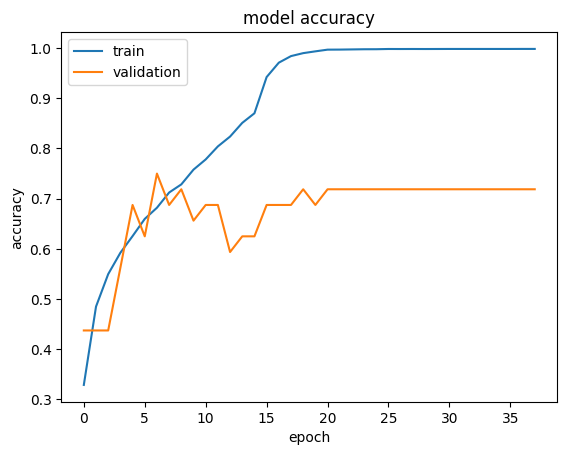

In [23]:
plt.plot(history_1.history["accuracy"])
plt.plot(history_1.history["val_accuracy"])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train", "validation"], loc="upper left")
plt.show()

### **Evaluating the Model on the Test Set**


In [24]:
# Calculate the number of steps for the entire test set to be processed
test_steps = test_generator.samples // batch_size

# If the number of samples isn't a multiple of the batch size,
# you have one more batch with the remaining samples
if test_generator.samples % batch_size > 0:
    test_steps += 1

# Evaluating the model on the test set
evaluation_results = model_1.evaluate(test_generator, steps=test_steps)
print(f"Loss: {evaluation_results[0]}, Accuracy: {evaluation_results[1]}")

1/4 [======>.......................] - ETA: 0s - loss: 1.9497 - accuracy: 0.7812

4/4 [==============================] - 0s 4ms/step - loss: 1.9017 - accuracy: 0.6875


Loss: 1.901653528213501, Accuracy: 0.6875


### **Plotting Confusion Matrix**


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 5ms/step


              precision    recall  f1-score   support

       happy       0.74      0.78      0.76        32
     neutral       0.59      0.62      0.61        32
         sad       0.53      0.50      0.52        32
    surprise       0.90      0.84      0.87        32

    accuracy                           0.69       128
   macro avg       0.69      0.69      0.69       128
weighted avg       0.69      0.69      0.69       128



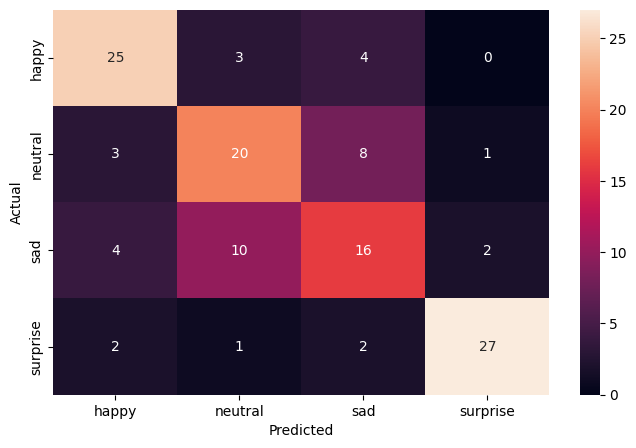

In [25]:
pred_probabilities = model_1.predict(test_generator, steps=test_steps)
pred = np.argmax(pred_probabilities, axis=1)

# Getting the true labels from the generator
y_true = test_generator.classes

# Printing the classification report with actual emotion labels
print(classification_report(y_true, pred, target_names=CATEGORIES))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)
plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt=".0f", xticklabels=CATEGORIES, yticklabels=CATEGORIES)
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

**Observations and Insights:**

- As we can see from the above summary, this CNN model has been trained and learned with **144,056 parameters (weights and biases).**
- The model's training accuracy shows a progressive increase, reaching about **71.34%**, suggesting the model is learning effectively. The validation accuracy fluctuates but also generally trends upward, peaking at approximately **78.12%**. This divergence might indicate that the model is still learning generalizable features, despite the higher accuracy on the validation set, which can sometimes be attributed to the validation set being slightly 'easier' or containing fewer augmentations.
- Upon evaluating the model on the test dataset, it achieved a loss of 0.6081 and an **accuracy of 72.66%**.
- From the confusion matrix, the model performs best in identifying 'happy' and 'surprise' emotions. It faces more challenges with 'sad' and 'neutral', in which we have the lowest f1-score, 56% and 63% respectively.


### **Creating the second Convolutional Neural Network**


### **Model 2 Architecture:**

- We plan on having 4 convolutional blocks in this Architecture, each having a Conv2D, MaxPooling2D, and a Dropout layer.
- Adding first Conv2D layer with **256 filters** and a **kernel size of 5x5**. Using the **'same' padding** and provide the **input shape = (48, 48, 1)**. Using **'relu' activation**.
- Adding MaxPooling2D layer with **kernel size 5x5** and **stride size 2x2**.
- Adding a Dropout layer with a dropout ratio of **0.2**.
- Adding a second Conv2D layer with **128 filters** and a **kernel size of 5x5**. Using the **'same' padding** and **'relu' activation**.
- Following this up with a similar Maxpooling2D layer like above and a Dropout layer with 0.3 dropout ratio.
- Adding a third Conv2D layer with **64 filters** and a **kernel size of 5x5**. Using the **'same' padding** and **'relu' activation**.
- Following this up with a similar Maxpooling2D layer and a Dropout layer with dropout ratio of 0.3.
- Adding a fourth Conv2D layer with **32 filters** and a **kernel size of 3x3**. Using the **'same' padding** and **'relu' activation**.
- Following this up with a similar Maxpooling2D layer and a Dropout layer with dropout ratio of 0.3.
- Once the convolutional blocks are added, we add the Flatten layer.
- Adding first fully connected dense layer with 64 neurons and using **'relu' activation**.
- Adding a second fully connected dense layer with 32 neurons and using **'relu' activation**.
- Adding a final dense layer with 4 neurons and using **'softmax' activation function**.
- Initializing an **Adam optimizer** with a learning rate of 0.0005.
- Compiling your model with the optimizer initialized and using **categorical_crossentropy** as the loss function and the 'accuracy' as the metric.
- Finally, printing your model summary and writing down the observations.


In [26]:
backend.clear_session()

# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)

random.seed(42)
tf.random.set_seed(42)

In [27]:
# Initializing a sequential model
model_2 = Sequential()

# Adding first conv layer
model_2.add(
    Conv2D(
        filters=256,
        kernel_size=(5, 5),
        padding="Same",
        input_shape=(img_width, img_height, color_layers),
        activation="relu",
    )
)
model_2.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_2.add(Dropout(0.2))

# Adding second conv layer
model_2.add(Conv2D(filters=128, kernel_size=(5, 5), padding="Same", activation="relu"))
model_2.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_2.add(Dropout(0.3))

# Adding third conv layer
model_2.add(Conv2D(filters=64, kernel_size=(3, 3), padding="Same", activation="relu"))
model_2.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_2.add(Dropout(0.3))

# Adding fourth conv layer
model_2.add(Conv2D(filters=32, kernel_size=(3, 3), padding="Same", activation="relu"))
model_2.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_2.add(Dropout(0.3))

# Flattening
model_2.add(Flatten())
model_2.add(Dense(64, activation="relu"))
model_2.add(Dense(32, activation="relu"))

# Adding the output layer with 4 neurons and activation functions as softmax since this is a multi-class classification problem
model_2.add(Dense(4, activation="softmax"))

# Using Adam Optimizer
optimizer = Adam(learning_rate=0.0005)

### **Compiling and Training the Model**


In [28]:
# Compile the model
model_2.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

model_2.summary()

Model: "sequential"


_________________________________________________________________


 Layer (type)                Output Shape              Param #   


 conv2d (Conv2D)             (None, 48, 48, 256)       6656      


 max_pooling2d (MaxPooling2  (None, 24, 24, 256)       0         


 D)                                                              


 dropout (Dropout)           (None, 24, 24, 256)       0         


 conv2d_1 (Conv2D)           (None, 24, 24, 128)       819328    


 max_pooling2d_1 (MaxPoolin  (None, 12, 12, 128)       0         


 g2D)                                                            


 dropout_1 (Dropout)         (None, 12, 12, 128)       0         


 conv2d_2 (Conv2D)           (None, 12, 12, 64)        73792     


 max_pooling2d_2 (MaxPoolin  (None, 6, 6, 64)          0         


 g2D)                                                            


 dropout_2 (Dropout)         (None, 6, 6, 64)          0         


 conv2d_3 (Conv2D)           (None, 6, 6, 32)          18464     


 max_pooling2d_3 (MaxPoolin  (None, 3, 3, 32)          0         


 g2D)                                                            


 dropout_3 (Dropout)         (None, 3, 3, 32)          0         


 flatten (Flatten)           (None, 288)               0         


 dense (Dense)               (None, 64)                18496     


 dense_1 (Dense)             (None, 32)                2080      


 dense_2 (Dense)             (None, 4)                 132       


Total params: 938948 (3.58 MB)


Trainable params: 938948 (3.58 MB)


Non-trainable params: 0 (0.00 Byte)


_________________________________________________________________


In [29]:
# Get the current time
current_time = datetime.now().strftime("%Y%m%d-%H%M%S")

# Set up Early Stopping with a patience 7 but acting after at least 30 epochs
delayed_early_stopping = DelayedEarlyStopping(
    monitor="val_loss", patience=7, verbose=1, restore_best_weights=True, start_epoch=30
)

# Define the learning rate scheduler callback
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.2, patience=5, min_lr=0.00001, verbose=1)

mc = ModelCheckpoint(
    f"{results_path}/best_model_2_{current_time}.keras",
    monitor="val_accuracy",
    mode="max",
    verbose=1,
    save_best_only=True,
)

# Pulling a single large batch of random validation data for doing the validation after each epoch
validationX, validationY = validation_generator.next()

# Fitting the model with 40 epochs and using validation set
history_2 = model_2.fit(
    train_generator,
    epochs=40,
    validation_data=(validationX, validationY),
    callbacks=[delayed_early_stopping, mc, reduce_lr],
)

Epoch 1/40


2024-03-20 07:10:26.150505: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


2024-03-20 07:10:26.817588: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.


  1/473 [..............................] - ETA: 21:51 - loss: 1.3899 - accuracy: 0.2188

  6/473 [..............................] - ETA: 4s - loss: 1.3895 - accuracy: 0.2760   

 12/473 [..............................] - ETA: 4s - loss: 1.3889 - accuracy: 0.2708

 18/473 [>.............................] - ETA: 4s - loss: 1.3900 - accuracy: 0.2517

 24/473 [>.............................] - ETA: 4s - loss: 1.3888 - accuracy: 0.2617

 30/473 [>.............................] - ETA: 4s - loss: 1.3891 - accuracy: 0.2573

 36/473 [=>............................] - ETA: 4s - loss: 1.3896 - accuracy: 0.2578

 42/473 [=>............................] - ETA: 4s - loss: 1.3891 - accuracy: 0.2634

 48/473 [==>...........................] - ETA: 4s - loss: 1.3888 - accuracy: 0.2611

 54/473 [==>...........................] - ETA: 4s - loss: 1.3886 - accuracy: 0.2598

 60/473 [==>...........................] - ETA: 3s - loss: 1.3884 - accuracy: 0.2609

 66/473 [===>..........................] - ETA: 3s - loss: 1.3878 - accuracy: 0.2642

 72/473 [===>..........................] - ETA: 3s - loss: 1.3875 - accuracy: 0.2622

 78/473 [===>..........................] - ETA: 3s - loss: 1.3877 - accuracy: 0.2612

 83/473 [====>.........................] - ETA: 3s - loss: 1.3877 - accuracy: 0.2609

 88/473 [====>.........................] - ETA: 3s - loss: 1.3876 - accuracy: 0.2592

 94/473 [====>.........................] - ETA: 3s - loss: 1.3879 - accuracy: 0.2586

100/473 [=====>........................] - ETA: 3s - loss: 1.3879 - accuracy: 0.2581

106/473 [=====>........................] - ETA: 3s - loss: 1.3876 - accuracy: 0.2583

112/473 [======>.......................] - ETA: 3s - loss: 1.3874 - accuracy: 0.2603

118/473 [======>.......................] - ETA: 3s - loss: 1.3872 - accuracy: 0.2598

123/473 [======>.......................] - ETA: 3s - loss: 1.3871 - accuracy: 0.2604

128/473 [=======>......................] - ETA: 3s - loss: 1.3873 - accuracy: 0.2590

134/473 [=======>......................] - ETA: 3s - loss: 1.3870 - accuracy: 0.2605

140/473 [=======>......................] - ETA: 3s - loss: 1.3868 - accuracy: 0.2592

146/473 [========>.....................] - ETA: 3s - loss: 1.3866 - accuracy: 0.2577

152/473 [========>.....................] - ETA: 3s - loss: 1.3865 - accuracy: 0.2578

158/473 [=========>....................] - ETA: 3s - loss: 1.3863 - accuracy: 0.2587

164/473 [=========>....................] - ETA: 2s - loss: 1.3859 - accuracy: 0.2588

170/473 [=========>....................] - ETA: 2s - loss: 1.3861 - accuracy: 0.2597

176/473 [==========>...................] - ETA: 2s - loss: 1.3860 - accuracy: 0.2589

182/473 [==========>...................] - ETA: 2s - loss: 1.3859 - accuracy: 0.2589

187/473 [==========>...................] - ETA: 2s - loss: 1.3858 - accuracy: 0.2587

192/473 [===========>..................] - ETA: 2s - loss: 1.3859 - accuracy: 0.2591

198/473 [===========>..................] - ETA: 2s - loss: 1.3858 - accuracy: 0.2590

203/473 [===========>..................] - ETA: 2s - loss: 1.3856 - accuracy: 0.2582

209/473 [============>.................] - ETA: 2s - loss: 1.3856 - accuracy: 0.2587

214/473 [============>.................] - ETA: 2s - loss: 1.3855 - accuracy: 0.2589

219/473 [============>.................] - ETA: 2s - loss: 1.3856 - accuracy: 0.2584

224/473 [=============>................] - ETA: 2s - loss: 1.3854 - accuracy: 0.2591

230/473 [=============>................] - ETA: 2s - loss: 1.3853 - accuracy: 0.2596

235/473 [=============>................] - ETA: 2s - loss: 1.3852 - accuracy: 0.2594

241/473 [==============>...............] - ETA: 2s - loss: 1.3852 - accuracy: 0.2599

247/473 [==============>...............] - ETA: 2s - loss: 1.3851 - accuracy: 0.2609

253/473 [===============>..............] - ETA: 2s - loss: 1.3848 - accuracy: 0.2619

258/473 [===============>..............] - ETA: 2s - loss: 1.3845 - accuracy: 0.2621

263/473 [===============>..............] - ETA: 2s - loss: 1.3846 - accuracy: 0.2624

268/473 [===============>..............] - ETA: 2s - loss: 1.3847 - accuracy: 0.2613

274/473 [================>.............] - ETA: 1s - loss: 1.3848 - accuracy: 0.2617

280/473 [================>.............] - ETA: 1s - loss: 1.3848 - accuracy: 0.2624

286/473 [=================>............] - ETA: 1s - loss: 1.3847 - accuracy: 0.2629

292/473 [=================>............] - ETA: 1s - loss: 1.3844 - accuracy: 0.2635

298/473 [=================>............] - ETA: 1s - loss: 1.3845 - accuracy: 0.2625

304/473 [==================>...........] - ETA: 1s - loss: 1.3846 - accuracy: 0.2623

310/473 [==================>...........] - ETA: 1s - loss: 1.3844 - accuracy: 0.2630

316/473 [===================>..........] - ETA: 1s - loss: 1.3843 - accuracy: 0.2632

322/473 [===================>..........] - ETA: 1s - loss: 1.3844 - accuracy: 0.2629

328/473 [===================>..........] - ETA: 1s - loss: 1.3844 - accuracy: 0.2631

334/473 [====================>.........] - ETA: 1s - loss: 1.3842 - accuracy: 0.2642

340/473 [====================>.........] - ETA: 1s - loss: 1.3840 - accuracy: 0.2650

346/473 [====================>.........] - ETA: 1s - loss: 1.3840 - accuracy: 0.2651

349/473 [=====================>........] - ETA: 1s - loss: 1.3841 - accuracy: 0.2651

355/473 [=====================>........] - ETA: 1s - loss: 1.3841 - accuracy: 0.2640

360/473 [=====================>........] - ETA: 1s - loss: 1.3839 - accuracy: 0.2648

365/473 [======================>.......] - ETA: 1s - loss: 1.3839 - accuracy: 0.2641

370/473 [======================>.......] - ETA: 1s - loss: 1.3839 - accuracy: 0.2639

376/473 [======================>.......] - ETA: 1s - loss: 1.3836 - accuracy: 0.2646

381/473 [=======================>......] - ETA: 0s - loss: 1.3833 - accuracy: 0.2654

387/473 [=======================>......] - ETA: 0s - loss: 1.3835 - accuracy: 0.2656

393/473 [=======================>......] - ETA: 0s - loss: 1.3834 - accuracy: 0.2654

398/473 [========================>.....] - ETA: 0s - loss: 1.3834 - accuracy: 0.2652

403/473 [========================>.....] - ETA: 0s - loss: 1.3832 - accuracy: 0.2654

408/473 [========================>.....] - ETA: 0s - loss: 1.3832 - accuracy: 0.2652

413/473 [=========================>....] - ETA: 0s - loss: 1.3832 - accuracy: 0.2645

418/473 [=========================>....] - ETA: 0s - loss: 1.3831 - accuracy: 0.2644

423/473 [=========================>....] - ETA: 0s - loss: 1.3829 - accuracy: 0.2647

428/473 [==========================>...] - ETA: 0s - loss: 1.3828 - accuracy: 0.2653

434/473 [==========================>...] - ETA: 0s - loss: 1.3823 - accuracy: 0.2659

440/473 [==========================>...] - ETA: 0s - loss: 1.3819 - accuracy: 0.2659

445/473 [===========================>..] - ETA: 0s - loss: 1.3818 - accuracy: 0.2662

451/473 [===========================>..] - ETA: 0s - loss: 1.3812 - accuracy: 0.2675

457/473 [===========================>..] - ETA: 0s - loss: 1.3809 - accuracy: 0.2683

463/473 [============================>.] - ETA: 0s - loss: 1.3809 - accuracy: 0.2689

468/473 [============================>.] - ETA: 0s - loss: 1.3808 - accuracy: 0.2691


Epoch 1: val_accuracy improved from -inf to 0.37500, saving model to /home/iamtxena/sandbox/mit-ai/capstone/Facial_Emotion_Recognition/results/best_model_2_20240320-071025.keras


473/473 [==============================] - 8s 11ms/step - loss: 1.3804 - accuracy: 0.2693 - val_loss: 1.3368 - val_accuracy: 0.3750 - lr: 5.0000e-04


Epoch 2/40


  1/473 [..............................] - ETA: 9s - loss: 1.3854 - accuracy: 0.1875

  7/473 [..............................] - ETA: 4s - loss: 1.3469 - accuracy: 0.3259

 13/473 [..............................] - ETA: 4s - loss: 1.3431 - accuracy: 0.3317

 18/473 [>.............................] - ETA: 4s - loss: 1.3401 - accuracy: 0.3281

 23/473 [>.............................] - ETA: 4s - loss: 1.3310 - accuracy: 0.3370

 28/473 [>.............................] - ETA: 4s - loss: 1.3393 - accuracy: 0.3304

 34/473 [=>............................] - ETA: 4s - loss: 1.3392 - accuracy: 0.3300

 39/473 [=>............................] - ETA: 4s - loss: 1.3506 - accuracy: 0.3269

 44/473 [=>............................] - ETA: 4s - loss: 1.3496 - accuracy: 0.3331

 49/473 [==>...........................] - ETA: 4s - loss: 1.3483 - accuracy: 0.3335

 54/473 [==>...........................] - ETA: 4s - loss: 1.3483 - accuracy: 0.3374

 59/473 [==>...........................] - ETA: 4s - loss: 1.3519 - accuracy: 0.3326

 63/473 [==>...........................] - ETA: 4s - loss: 1.3509 - accuracy: 0.3333

 68/473 [===>..........................] - ETA: 4s - loss: 1.3511 - accuracy: 0.3313

 74/473 [===>..........................] - ETA: 4s - loss: 1.3508 - accuracy: 0.3307

 80/473 [====>.........................] - ETA: 4s - loss: 1.3510 - accuracy: 0.3297

 86/473 [====>.........................] - ETA: 3s - loss: 1.3487 - accuracy: 0.3314

 92/473 [====>.........................] - ETA: 3s - loss: 1.3460 - accuracy: 0.3349

 97/473 [=====>........................] - ETA: 3s - loss: 1.3463 - accuracy: 0.3354

102/473 [=====>........................] - ETA: 3s - loss: 1.3479 - accuracy: 0.3361

108/473 [=====>........................] - ETA: 3s - loss: 1.3489 - accuracy: 0.3354

113/473 [======>.......................] - ETA: 3s - loss: 1.3485 - accuracy: 0.3377

118/473 [======>.......................] - ETA: 3s - loss: 1.3486 - accuracy: 0.3387

123/473 [======>.......................] - ETA: 3s - loss: 1.3490 - accuracy: 0.3387

129/473 [=======>......................] - ETA: 3s - loss: 1.3485 - accuracy: 0.3401

135/473 [=======>......................] - ETA: 3s - loss: 1.3485 - accuracy: 0.3398

141/473 [=======>......................] - ETA: 3s - loss: 1.3487 - accuracy: 0.3384

147/473 [========>.....................] - ETA: 3s - loss: 1.3495 - accuracy: 0.3374

153/473 [========>.....................] - ETA: 3s - loss: 1.3490 - accuracy: 0.3376

158/473 [=========>....................] - ETA: 3s - loss: 1.3487 - accuracy: 0.3372

163/473 [=========>....................] - ETA: 3s - loss: 1.3488 - accuracy: 0.3355

168/473 [=========>....................] - ETA: 3s - loss: 1.3476 - accuracy: 0.3363

174/473 [==========>...................] - ETA: 3s - loss: 1.3472 - accuracy: 0.3362

180/473 [==========>...................] - ETA: 2s - loss: 1.3474 - accuracy: 0.3378

186/473 [==========>...................] - ETA: 2s - loss: 1.3464 - accuracy: 0.3377

192/473 [===========>..................] - ETA: 2s - loss: 1.3471 - accuracy: 0.3377

198/473 [===========>..................] - ETA: 2s - loss: 1.3475 - accuracy: 0.3374

204/473 [===========>..................] - ETA: 2s - loss: 1.3460 - accuracy: 0.3405

210/473 [============>.................] - ETA: 2s - loss: 1.3451 - accuracy: 0.3402

216/473 [============>.................] - ETA: 2s - loss: 1.3459 - accuracy: 0.3385

222/473 [=============>................] - ETA: 2s - loss: 1.3461 - accuracy: 0.3385

227/473 [=============>................] - ETA: 2s - loss: 1.3456 - accuracy: 0.3374

233/473 [=============>................] - ETA: 2s - loss: 1.3453 - accuracy: 0.3366

239/473 [==============>...............] - ETA: 2s - loss: 1.3446 - accuracy: 0.3371

245/473 [==============>...............] - ETA: 2s - loss: 1.3433 - accuracy: 0.3379

250/473 [==============>...............] - ETA: 2s - loss: 1.3431 - accuracy: 0.3376

256/473 [===============>..............] - ETA: 2s - loss: 1.3422 - accuracy: 0.3385

262/473 [===============>..............] - ETA: 2s - loss: 1.3395 - accuracy: 0.3416

268/473 [===============>..............] - ETA: 2s - loss: 1.3381 - accuracy: 0.3423

274/473 [================>.............] - ETA: 1s - loss: 1.3381 - accuracy: 0.3423

280/473 [================>.............] - ETA: 1s - loss: 1.3378 - accuracy: 0.3422

286/473 [=================>............] - ETA: 1s - loss: 1.3361 - accuracy: 0.3438

292/473 [=================>............] - ETA: 1s - loss: 1.3346 - accuracy: 0.3455

298/473 [=================>............] - ETA: 1s - loss: 1.3340 - accuracy: 0.3461

304/473 [==================>...........] - ETA: 1s - loss: 1.3323 - accuracy: 0.3471

310/473 [==================>...........] - ETA: 1s - loss: 1.3322 - accuracy: 0.3473

316/473 [===================>..........] - ETA: 1s - loss: 1.3307 - accuracy: 0.3485

322/473 [===================>..........] - ETA: 1s - loss: 1.3289 - accuracy: 0.3496

328/473 [===================>..........] - ETA: 1s - loss: 1.3271 - accuracy: 0.3509

334/473 [====================>.........] - ETA: 1s - loss: 1.3261 - accuracy: 0.3522

340/473 [====================>.........] - ETA: 1s - loss: 1.3244 - accuracy: 0.3533

346/473 [====================>.........] - ETA: 1s - loss: 1.3235 - accuracy: 0.3539

352/473 [=====================>........] - ETA: 1s - loss: 1.3225 - accuracy: 0.3549

358/473 [=====================>........] - ETA: 1s - loss: 1.3232 - accuracy: 0.3541

364/473 [======================>.......] - ETA: 1s - loss: 1.3216 - accuracy: 0.3549

370/473 [======================>.......] - ETA: 1s - loss: 1.3207 - accuracy: 0.3555

376/473 [======================>.......] - ETA: 0s - loss: 1.3202 - accuracy: 0.3552

382/473 [=======================>......] - ETA: 0s - loss: 1.3190 - accuracy: 0.3563

388/473 [=======================>......] - ETA: 0s - loss: 1.3173 - accuracy: 0.3576

394/473 [=======================>......] - ETA: 0s - loss: 1.3151 - accuracy: 0.3590

399/473 [========================>.....] - ETA: 0s - loss: 1.3144 - accuracy: 0.3597

404/473 [========================>.....] - ETA: 0s - loss: 1.3135 - accuracy: 0.3604

409/473 [========================>.....] - ETA: 0s - loss: 1.3114 - accuracy: 0.3611

414/473 [=========================>....] - ETA: 0s - loss: 1.3101 - accuracy: 0.3618

419/473 [=========================>....] - ETA: 0s - loss: 1.3097 - accuracy: 0.3626

424/473 [=========================>....] - ETA: 0s - loss: 1.3081 - accuracy: 0.3635

430/473 [==========================>...] - ETA: 0s - loss: 1.3075 - accuracy: 0.3643

436/473 [==========================>...] - ETA: 0s - loss: 1.3071 - accuracy: 0.3643

442/473 [===========================>..] - ETA: 0s - loss: 1.3058 - accuracy: 0.3656

447/473 [===========================>..] - ETA: 0s - loss: 1.3045 - accuracy: 0.3658

452/473 [===========================>..] - ETA: 0s - loss: 1.3037 - accuracy: 0.3661

457/473 [===========================>..] - ETA: 0s - loss: 1.3032 - accuracy: 0.3658

462/473 [============================>.] - ETA: 0s - loss: 1.3016 - accuracy: 0.3659

468/473 [============================>.] - ETA: 0s - loss: 1.3006 - accuracy: 0.3663


Epoch 2: val_accuracy did not improve from 0.37500


473/473 [==============================] - 5s 10ms/step - loss: 1.2994 - accuracy: 0.3664 - val_loss: 1.1229 - val_accuracy: 0.3438 - lr: 5.0000e-04


Epoch 3/40


  1/473 [..............................] - ETA: 8s - loss: 1.1399 - accuracy: 0.4688

  7/473 [..............................] - ETA: 4s - loss: 1.2005 - accuracy: 0.4554

 13/473 [..............................] - ETA: 4s - loss: 1.2258 - accuracy: 0.4159

 19/473 [>.............................] - ETA: 4s - loss: 1.2078 - accuracy: 0.4375

 25/473 [>.............................] - ETA: 4s - loss: 1.2249 - accuracy: 0.4288

 30/473 [>.............................] - ETA: 4s - loss: 1.2220 - accuracy: 0.4281

 35/473 [=>............................] - ETA: 4s - loss: 1.2197 - accuracy: 0.4223

 40/473 [=>............................] - ETA: 4s - loss: 1.2146 - accuracy: 0.4203

 46/473 [=>............................] - ETA: 4s - loss: 1.2153 - accuracy: 0.4178

 52/473 [==>...........................] - ETA: 4s - loss: 1.2084 - accuracy: 0.4267

 58/473 [==>...........................] - ETA: 3s - loss: 1.2088 - accuracy: 0.4256

 63/473 [==>...........................] - ETA: 3s - loss: 1.2075 - accuracy: 0.4281

 68/473 [===>..........................] - ETA: 3s - loss: 1.2111 - accuracy: 0.4283

 73/473 [===>..........................] - ETA: 3s - loss: 1.2091 - accuracy: 0.4264

 78/473 [===>..........................] - ETA: 3s - loss: 1.2081 - accuracy: 0.4279

 84/473 [====>.........................] - ETA: 3s - loss: 1.2058 - accuracy: 0.4319

 90/473 [====>.........................] - ETA: 3s - loss: 1.2044 - accuracy: 0.4306

 96/473 [=====>........................] - ETA: 3s - loss: 1.2046 - accuracy: 0.4313

101/473 [=====>........................] - ETA: 3s - loss: 1.2002 - accuracy: 0.4332

106/473 [=====>........................] - ETA: 3s - loss: 1.1992 - accuracy: 0.4337

111/473 [======>.......................] - ETA: 3s - loss: 1.1957 - accuracy: 0.4347

116/473 [======>.......................] - ETA: 3s - loss: 1.1969 - accuracy: 0.4340

121/473 [======>.......................] - ETA: 3s - loss: 1.1973 - accuracy: 0.4331

126/473 [======>.......................] - ETA: 3s - loss: 1.1935 - accuracy: 0.4353

131/473 [=======>......................] - ETA: 3s - loss: 1.1956 - accuracy: 0.4356

136/473 [=======>......................] - ETA: 3s - loss: 1.1921 - accuracy: 0.4391

141/473 [=======>......................] - ETA: 3s - loss: 1.1920 - accuracy: 0.4397

147/473 [========>.....................] - ETA: 3s - loss: 1.1918 - accuracy: 0.4398

153/473 [========>.....................] - ETA: 3s - loss: 1.1893 - accuracy: 0.4416

159/473 [=========>....................] - ETA: 3s - loss: 1.1867 - accuracy: 0.4438

165/473 [=========>....................] - ETA: 3s - loss: 1.1865 - accuracy: 0.4437

171/473 [=========>....................] - ETA: 2s - loss: 1.1871 - accuracy: 0.4452

177/473 [==========>...................] - ETA: 2s - loss: 1.1885 - accuracy: 0.4447

183/473 [==========>...................] - ETA: 2s - loss: 1.1874 - accuracy: 0.4457

188/473 [==========>...................] - ETA: 2s - loss: 1.1864 - accuracy: 0.4485

193/473 [===========>..................] - ETA: 2s - loss: 1.1866 - accuracy: 0.4485

198/473 [===========>..................] - ETA: 2s - loss: 1.1845 - accuracy: 0.4508

204/473 [===========>..................] - ETA: 2s - loss: 1.1837 - accuracy: 0.4511

209/473 [============>.................] - ETA: 2s - loss: 1.1819 - accuracy: 0.4523

214/473 [============>.................] - ETA: 2s - loss: 1.1816 - accuracy: 0.4531

219/473 [============>.................] - ETA: 2s - loss: 1.1816 - accuracy: 0.4529

224/473 [=============>................] - ETA: 2s - loss: 1.1797 - accuracy: 0.4535

229/473 [=============>................] - ETA: 2s - loss: 1.1797 - accuracy: 0.4544

234/473 [=============>................] - ETA: 2s - loss: 1.1812 - accuracy: 0.4534

239/473 [==============>...............] - ETA: 2s - loss: 1.1811 - accuracy: 0.4533

244/473 [==============>...............] - ETA: 2s - loss: 1.1828 - accuracy: 0.4524

249/473 [==============>...............] - ETA: 2s - loss: 1.1820 - accuracy: 0.4522

254/473 [===============>..............] - ETA: 2s - loss: 1.1801 - accuracy: 0.4526

259/473 [===============>..............] - ETA: 2s - loss: 1.1813 - accuracy: 0.4523

265/473 [===============>..............] - ETA: 2s - loss: 1.1803 - accuracy: 0.4533

270/473 [================>.............] - ETA: 2s - loss: 1.1808 - accuracy: 0.4535

275/473 [================>.............] - ETA: 1s - loss: 1.1797 - accuracy: 0.4540

280/473 [================>.............] - ETA: 1s - loss: 1.1806 - accuracy: 0.4529

285/473 [=================>............] - ETA: 1s - loss: 1.1800 - accuracy: 0.4544

290/473 [=================>............] - ETA: 1s - loss: 1.1794 - accuracy: 0.4546

296/473 [=================>............] - ETA: 1s - loss: 1.1789 - accuracy: 0.4537

302/473 [==================>...........] - ETA: 1s - loss: 1.1777 - accuracy: 0.4548

307/473 [==================>...........] - ETA: 1s - loss: 1.1763 - accuracy: 0.4557

312/473 [==================>...........] - ETA: 1s - loss: 1.1770 - accuracy: 0.4552

317/473 [===================>..........] - ETA: 1s - loss: 1.1760 - accuracy: 0.4556

322/473 [===================>..........] - ETA: 1s - loss: 1.1743 - accuracy: 0.4560

328/473 [===================>..........] - ETA: 1s - loss: 1.1745 - accuracy: 0.4562

333/473 [====================>.........] - ETA: 1s - loss: 1.1746 - accuracy: 0.4555

338/473 [====================>.........] - ETA: 1s - loss: 1.1738 - accuracy: 0.4559

343/473 [====================>.........] - ETA: 1s - loss: 1.1730 - accuracy: 0.4565

349/473 [=====================>........] - ETA: 1s - loss: 1.1706 - accuracy: 0.4576

355/473 [=====================>........] - ETA: 1s - loss: 1.1692 - accuracy: 0.4589

361/473 [=====================>........] - ETA: 1s - loss: 1.1686 - accuracy: 0.4595

367/473 [======================>.......] - ETA: 1s - loss: 1.1673 - accuracy: 0.4607

372/473 [======================>.......] - ETA: 1s - loss: 1.1656 - accuracy: 0.4617

378/473 [======================>.......] - ETA: 0s - loss: 1.1653 - accuracy: 0.4614

384/473 [=======================>......] - ETA: 0s - loss: 1.1634 - accuracy: 0.4628

390/473 [=======================>......] - ETA: 0s - loss: 1.1624 - accuracy: 0.4631

396/473 [========================>.....] - ETA: 0s - loss: 1.1614 - accuracy: 0.4639

401/473 [========================>.....] - ETA: 0s - loss: 1.1603 - accuracy: 0.4649

407/473 [========================>.....] - ETA: 0s - loss: 1.1589 - accuracy: 0.4655

412/473 [=========================>....] - ETA: 0s - loss: 1.1574 - accuracy: 0.4664

417/473 [=========================>....] - ETA: 0s - loss: 1.1566 - accuracy: 0.4670

422/473 [=========================>....] - ETA: 0s - loss: 1.1567 - accuracy: 0.4664

427/473 [==========================>...] - ETA: 0s - loss: 1.1557 - accuracy: 0.4667

432/473 [==========================>...] - ETA: 0s - loss: 1.1557 - accuracy: 0.4671

437/473 [==========================>...] - ETA: 0s - loss: 1.1557 - accuracy: 0.4676

443/473 [===========================>..] - ETA: 0s - loss: 1.1552 - accuracy: 0.4677

448/473 [===========================>..] - ETA: 0s - loss: 1.1551 - accuracy: 0.4678

453/473 [===========================>..] - ETA: 0s - loss: 1.1546 - accuracy: 0.4688

459/473 [============================>.] - ETA: 0s - loss: 1.1542 - accuracy: 0.4691

464/473 [============================>.] - ETA: 0s - loss: 1.1534 - accuracy: 0.4698

470/473 [============================>.] - ETA: 0s - loss: 1.1529 - accuracy: 0.4703


Epoch 3: val_accuracy improved from 0.37500 to 0.59375, saving model to /home/iamtxena/sandbox/mit-ai/capstone/Facial_Emotion_Recognition/results/best_model_2_20240320-071025.keras


473/473 [==============================] - 5s 10ms/step - loss: 1.1523 - accuracy: 0.4708 - val_loss: 0.9115 - val_accuracy: 0.5938 - lr: 5.0000e-04


Epoch 4/40


  1/473 [..............................] - ETA: 9s - loss: 1.0704 - accuracy: 0.4688

  7/473 [..............................] - ETA: 4s - loss: 0.9975 - accuracy: 0.5759

 13/473 [..............................] - ETA: 4s - loss: 1.0494 - accuracy: 0.5481

 19/473 [>.............................] - ETA: 4s - loss: 1.0659 - accuracy: 0.5378

 25/473 [>.............................] - ETA: 4s - loss: 1.0626 - accuracy: 0.5325

 31/473 [>.............................] - ETA: 4s - loss: 1.0430 - accuracy: 0.5464

 37/473 [=>............................] - ETA: 4s - loss: 1.0439 - accuracy: 0.5414

 43/473 [=>............................] - ETA: 4s - loss: 1.0523 - accuracy: 0.5392

 49/473 [==>...........................] - ETA: 3s - loss: 1.0446 - accuracy: 0.5427

 55/473 [==>...........................] - ETA: 3s - loss: 1.0416 - accuracy: 0.5409

 61/473 [==>...........................] - ETA: 3s - loss: 1.0418 - accuracy: 0.5410

 67/473 [===>..........................] - ETA: 3s - loss: 1.0507 - accuracy: 0.5368

 73/473 [===>..........................] - ETA: 3s - loss: 1.0524 - accuracy: 0.5385

 78/473 [===>..........................] - ETA: 3s - loss: 1.0504 - accuracy: 0.5401

 83/473 [====>.........................] - ETA: 3s - loss: 1.0564 - accuracy: 0.5358

 88/473 [====>.........................] - ETA: 3s - loss: 1.0576 - accuracy: 0.5384

 94/473 [====>.........................] - ETA: 3s - loss: 1.0576 - accuracy: 0.5361

 99/473 [=====>........................] - ETA: 3s - loss: 1.0596 - accuracy: 0.5336

104/473 [=====>........................] - ETA: 3s - loss: 1.0568 - accuracy: 0.5344

110/473 [=====>........................] - ETA: 3s - loss: 1.0563 - accuracy: 0.5336

115/473 [======>.......................] - ETA: 3s - loss: 1.0579 - accuracy: 0.5316

120/473 [======>.......................] - ETA: 3s - loss: 1.0565 - accuracy: 0.5321

125/473 [======>.......................] - ETA: 3s - loss: 1.0584 - accuracy: 0.5316

130/473 [=======>......................] - ETA: 3s - loss: 1.0587 - accuracy: 0.5306

135/473 [=======>......................] - ETA: 3s - loss: 1.0619 - accuracy: 0.5316

140/473 [=======>......................] - ETA: 3s - loss: 1.0632 - accuracy: 0.5309

145/473 [========>.....................] - ETA: 3s - loss: 1.0645 - accuracy: 0.5305

151/473 [========>.....................] - ETA: 3s - loss: 1.0629 - accuracy: 0.5305

157/473 [========>.....................] - ETA: 3s - loss: 1.0610 - accuracy: 0.5303

163/473 [=========>....................] - ETA: 3s - loss: 1.0607 - accuracy: 0.5313

168/473 [=========>....................] - ETA: 2s - loss: 1.0594 - accuracy: 0.5326

174/473 [==========>...................] - ETA: 2s - loss: 1.0583 - accuracy: 0.5338

180/473 [==========>...................] - ETA: 2s - loss: 1.0617 - accuracy: 0.5318

186/473 [==========>...................] - ETA: 2s - loss: 1.0618 - accuracy: 0.5323

192/473 [===========>..................] - ETA: 2s - loss: 1.0617 - accuracy: 0.5323

198/473 [===========>..................] - ETA: 2s - loss: 1.0628 - accuracy: 0.5329

204/473 [===========>..................] - ETA: 2s - loss: 1.0611 - accuracy: 0.5341

210/473 [============>.................] - ETA: 2s - loss: 1.0588 - accuracy: 0.5350

215/473 [============>.................] - ETA: 2s - loss: 1.0589 - accuracy: 0.5352

221/473 [=============>................] - ETA: 2s - loss: 1.0564 - accuracy: 0.5380

227/473 [=============>................] - ETA: 2s - loss: 1.0548 - accuracy: 0.5389

233/473 [=============>................] - ETA: 2s - loss: 1.0569 - accuracy: 0.5364

239/473 [==============>...............] - ETA: 2s - loss: 1.0569 - accuracy: 0.5372

245/473 [==============>...............] - ETA: 2s - loss: 1.0575 - accuracy: 0.5360

251/473 [==============>...............] - ETA: 2s - loss: 1.0573 - accuracy: 0.5363

257/473 [===============>..............] - ETA: 2s - loss: 1.0601 - accuracy: 0.5346

262/473 [===============>..............] - ETA: 2s - loss: 1.0596 - accuracy: 0.5348

267/473 [===============>..............] - ETA: 2s - loss: 1.0603 - accuracy: 0.5346

273/473 [================>.............] - ETA: 1s - loss: 1.0591 - accuracy: 0.5352

279/473 [================>.............] - ETA: 1s - loss: 1.0584 - accuracy: 0.5359

284/473 [=================>............] - ETA: 1s - loss: 1.0573 - accuracy: 0.5375

290/473 [=================>............] - ETA: 1s - loss: 1.0550 - accuracy: 0.5369

295/473 [=================>............] - ETA: 1s - loss: 1.0549 - accuracy: 0.5363

300/473 [==================>...........] - ETA: 1s - loss: 1.0532 - accuracy: 0.5371

306/473 [==================>...........] - ETA: 1s - loss: 1.0526 - accuracy: 0.5374

312/473 [==================>...........] - ETA: 1s - loss: 1.0525 - accuracy: 0.5371

317/473 [===================>..........] - ETA: 1s - loss: 1.0527 - accuracy: 0.5366

323/473 [===================>..........] - ETA: 1s - loss: 1.0515 - accuracy: 0.5370

328/473 [===================>..........] - ETA: 1s - loss: 1.0515 - accuracy: 0.5368

334/473 [====================>.........] - ETA: 1s - loss: 1.0507 - accuracy: 0.5376

340/473 [====================>.........] - ETA: 1s - loss: 1.0502 - accuracy: 0.5376

346/473 [====================>.........] - ETA: 1s - loss: 1.0511 - accuracy: 0.5378

352/473 [=====================>........] - ETA: 1s - loss: 1.0494 - accuracy: 0.5381

358/473 [=====================>........] - ETA: 1s - loss: 1.0472 - accuracy: 0.5397

364/473 [======================>.......] - ETA: 1s - loss: 1.0458 - accuracy: 0.5406

369/473 [======================>.......] - ETA: 1s - loss: 1.0445 - accuracy: 0.5412

375/473 [======================>.......] - ETA: 0s - loss: 1.0443 - accuracy: 0.5415

381/473 [=======================>......] - ETA: 0s - loss: 1.0438 - accuracy: 0.5421

387/473 [=======================>......] - ETA: 0s - loss: 1.0437 - accuracy: 0.5420

393/473 [=======================>......] - ETA: 0s - loss: 1.0424 - accuracy: 0.5430

399/473 [========================>.....] - ETA: 0s - loss: 1.0427 - accuracy: 0.5428

404/473 [========================>.....] - ETA: 0s - loss: 1.0418 - accuracy: 0.5433

410/473 [=========================>....] - ETA: 0s - loss: 1.0415 - accuracy: 0.5435

416/473 [=========================>....] - ETA: 0s - loss: 1.0424 - accuracy: 0.5429

421/473 [=========================>....] - ETA: 0s - loss: 1.0420 - accuracy: 0.5431

427/473 [==========================>...] - ETA: 0s - loss: 1.0403 - accuracy: 0.5443

433/473 [==========================>...] - ETA: 0s - loss: 1.0400 - accuracy: 0.5446

439/473 [==========================>...] - ETA: 0s - loss: 1.0399 - accuracy: 0.5438

445/473 [===========================>..] - ETA: 0s - loss: 1.0397 - accuracy: 0.5444

451/473 [===========================>..] - ETA: 0s - loss: 1.0406 - accuracy: 0.5448

457/473 [===========================>..] - ETA: 0s - loss: 1.0421 - accuracy: 0.5442

463/473 [============================>.] - ETA: 0s - loss: 1.0422 - accuracy: 0.5446

468/473 [============================>.] - ETA: 0s - loss: 1.0418 - accuracy: 0.5451

473/473 [==============================] - ETA: 0s - loss: 1.0408 - accuracy: 0.5460


Epoch 4: val_accuracy did not improve from 0.59375


473/473 [==============================] - 5s 10ms/step - loss: 1.0408 - accuracy: 0.5460 - val_loss: 0.8190 - val_accuracy: 0.5938 - lr: 5.0000e-04


Epoch 5/40


  1/473 [..............................] - ETA: 8s - loss: 0.9008 - accuracy: 0.5625

  7/473 [..............................] - ETA: 4s - loss: 0.9576 - accuracy: 0.6116

 13/473 [..............................] - ETA: 4s - loss: 0.9613 - accuracy: 0.5913

 19/473 [>.............................] - ETA: 4s - loss: 0.9665 - accuracy: 0.5855

 25/473 [>.............................] - ETA: 4s - loss: 0.9916 - accuracy: 0.5725

 31/473 [>.............................] - ETA: 4s - loss: 0.9881 - accuracy: 0.5776

 37/473 [=>............................] - ETA: 4s - loss: 0.9903 - accuracy: 0.5769

 43/473 [=>............................] - ETA: 4s - loss: 0.9874 - accuracy: 0.5727

 49/473 [==>...........................] - ETA: 3s - loss: 0.9827 - accuracy: 0.5765

 55/473 [==>...........................] - ETA: 3s - loss: 0.9865 - accuracy: 0.5722

 61/473 [==>...........................] - ETA: 3s - loss: 0.9945 - accuracy: 0.5676

 67/473 [===>..........................] - ETA: 3s - loss: 0.9944 - accuracy: 0.5681

 72/473 [===>..........................] - ETA: 3s - loss: 0.9947 - accuracy: 0.5694

 77/473 [===>..........................] - ETA: 3s - loss: 0.9953 - accuracy: 0.5690

 82/473 [====>.........................] - ETA: 3s - loss: 0.9931 - accuracy: 0.5682

 88/473 [====>.........................] - ETA: 3s - loss: 0.9893 - accuracy: 0.5717

 93/473 [====>.........................] - ETA: 3s - loss: 0.9845 - accuracy: 0.5739

 98/473 [=====>........................] - ETA: 3s - loss: 0.9837 - accuracy: 0.5727

103/473 [=====>........................] - ETA: 3s - loss: 0.9800 - accuracy: 0.5740

108/473 [=====>........................] - ETA: 3s - loss: 0.9848 - accuracy: 0.5718

113/473 [======>.......................] - ETA: 3s - loss: 0.9855 - accuracy: 0.5708

118/473 [======>.......................] - ETA: 3s - loss: 0.9820 - accuracy: 0.5749

123/473 [======>.......................] - ETA: 3s - loss: 0.9817 - accuracy: 0.5762

128/473 [=======>......................] - ETA: 3s - loss: 0.9817 - accuracy: 0.5771

133/473 [=======>......................] - ETA: 3s - loss: 0.9787 - accuracy: 0.5768

138/473 [=======>......................] - ETA: 3s - loss: 0.9787 - accuracy: 0.5779

143/473 [========>.....................] - ETA: 3s - loss: 0.9760 - accuracy: 0.5776

148/473 [========>.....................] - ETA: 3s - loss: 0.9735 - accuracy: 0.5790

154/473 [========>.....................] - ETA: 3s - loss: 0.9782 - accuracy: 0.5753

160/473 [=========>....................] - ETA: 3s - loss: 0.9809 - accuracy: 0.5729

166/473 [=========>....................] - ETA: 3s - loss: 0.9842 - accuracy: 0.5698

172/473 [=========>....................] - ETA: 2s - loss: 0.9822 - accuracy: 0.5709

177/473 [==========>...................] - ETA: 2s - loss: 0.9793 - accuracy: 0.5722

182/473 [==========>...................] - ETA: 2s - loss: 0.9802 - accuracy: 0.5714

187/473 [==========>...................] - ETA: 2s - loss: 0.9790 - accuracy: 0.5727

192/473 [===========>..................] - ETA: 2s - loss: 0.9785 - accuracy: 0.5723

197/473 [===========>..................] - ETA: 2s - loss: 0.9784 - accuracy: 0.5725

203/473 [===========>..................] - ETA: 2s - loss: 0.9769 - accuracy: 0.5730

209/473 [============>.................] - ETA: 2s - loss: 0.9769 - accuracy: 0.5719

215/473 [============>.................] - ETA: 2s - loss: 0.9778 - accuracy: 0.5719

221/473 [=============>................] - ETA: 2s - loss: 0.9761 - accuracy: 0.5724

227/473 [=============>................] - ETA: 2s - loss: 0.9759 - accuracy: 0.5723

233/473 [=============>................] - ETA: 2s - loss: 0.9714 - accuracy: 0.5744

239/473 [==============>...............] - ETA: 2s - loss: 0.9694 - accuracy: 0.5762

245/473 [==============>...............] - ETA: 2s - loss: 0.9675 - accuracy: 0.5772

251/473 [==============>...............] - ETA: 2s - loss: 0.9657 - accuracy: 0.5773

257/473 [===============>..............] - ETA: 2s - loss: 0.9663 - accuracy: 0.5773

263/473 [===============>..............] - ETA: 2s - loss: 0.9642 - accuracy: 0.5787

269/473 [================>.............] - ETA: 1s - loss: 0.9664 - accuracy: 0.5780

274/473 [================>.............] - ETA: 1s - loss: 0.9678 - accuracy: 0.5769

280/473 [================>.............] - ETA: 1s - loss: 0.9653 - accuracy: 0.5780

285/473 [=================>............] - ETA: 1s - loss: 0.9650 - accuracy: 0.5780

291/473 [=================>............] - ETA: 1s - loss: 0.9659 - accuracy: 0.5772

297/473 [=================>............] - ETA: 1s - loss: 0.9671 - accuracy: 0.5770

302/473 [==================>...........] - ETA: 1s - loss: 0.9660 - accuracy: 0.5773

307/473 [==================>...........] - ETA: 1s - loss: 0.9656 - accuracy: 0.5769

313/473 [==================>...........] - ETA: 1s - loss: 0.9653 - accuracy: 0.5773

319/473 [===================>..........] - ETA: 1s - loss: 0.9648 - accuracy: 0.5778

325/473 [===================>..........] - ETA: 1s - loss: 0.9660 - accuracy: 0.5777

330/473 [===================>..........] - ETA: 1s - loss: 0.9657 - accuracy: 0.5782

335/473 [====================>.........] - ETA: 1s - loss: 0.9648 - accuracy: 0.5786

340/473 [====================>.........] - ETA: 1s - loss: 0.9641 - accuracy: 0.5790

345/473 [====================>.........] - ETA: 1s - loss: 0.9631 - accuracy: 0.5794

350/473 [=====================>........] - ETA: 1s - loss: 0.9618 - accuracy: 0.5803

355/473 [=====================>........] - ETA: 1s - loss: 0.9611 - accuracy: 0.5809

360/473 [=====================>........] - ETA: 1s - loss: 0.9611 - accuracy: 0.5802

366/473 [======================>.......] - ETA: 1s - loss: 0.9608 - accuracy: 0.5806

371/473 [======================>.......] - ETA: 1s - loss: 0.9613 - accuracy: 0.5802

376/473 [======================>.......] - ETA: 0s - loss: 0.9611 - accuracy: 0.5808

381/473 [=======================>......] - ETA: 0s - loss: 0.9617 - accuracy: 0.5804

387/473 [=======================>......] - ETA: 0s - loss: 0.9620 - accuracy: 0.5802

393/473 [=======================>......] - ETA: 0s - loss: 0.9607 - accuracy: 0.5804

398/473 [========================>.....] - ETA: 0s - loss: 0.9605 - accuracy: 0.5805

403/473 [========================>.....] - ETA: 0s - loss: 0.9611 - accuracy: 0.5802

408/473 [========================>.....] - ETA: 0s - loss: 0.9604 - accuracy: 0.5805

414/473 [=========================>....] - ETA: 0s - loss: 0.9605 - accuracy: 0.5810

420/473 [=========================>....] - ETA: 0s - loss: 0.9595 - accuracy: 0.5820

426/473 [==========================>...] - ETA: 0s - loss: 0.9593 - accuracy: 0.5816

432/473 [==========================>...] - ETA: 0s - loss: 0.9586 - accuracy: 0.5821

438/473 [==========================>...] - ETA: 0s - loss: 0.9576 - accuracy: 0.5827

444/473 [===========================>..] - ETA: 0s - loss: 0.9587 - accuracy: 0.5824

450/473 [===========================>..] - ETA: 0s - loss: 0.9576 - accuracy: 0.5830

455/473 [===========================>..] - ETA: 0s - loss: 0.9574 - accuracy: 0.5836

461/473 [============================>.] - ETA: 0s - loss: 0.9569 - accuracy: 0.5839

466/473 [============================>.] - ETA: 0s - loss: 0.9583 - accuracy: 0.5839

471/473 [============================>.] - ETA: 0s - loss: 0.9580 - accuracy: 0.5836


Epoch 5: val_accuracy did not improve from 0.59375


473/473 [==============================] - 5s 10ms/step - loss: 0.9582 - accuracy: 0.5835 - val_loss: 0.8402 - val_accuracy: 0.5938 - lr: 5.0000e-04


Epoch 6/40


  1/473 [..............................] - ETA: 9s - loss: 1.1486 - accuracy: 0.5000

  7/473 [..............................] - ETA: 4s - loss: 0.9886 - accuracy: 0.5893

 13/473 [..............................] - ETA: 4s - loss: 0.9389 - accuracy: 0.6058

 19/473 [>.............................] - ETA: 4s - loss: 0.9480 - accuracy: 0.5921

 25/473 [>.............................] - ETA: 4s - loss: 0.9190 - accuracy: 0.6087

 31/473 [>.............................] - ETA: 4s - loss: 0.9147 - accuracy: 0.6210

 37/473 [=>............................] - ETA: 4s - loss: 0.9240 - accuracy: 0.6191

 43/473 [=>............................] - ETA: 4s - loss: 0.9260 - accuracy: 0.6134

 49/473 [==>...........................] - ETA: 4s - loss: 0.9287 - accuracy: 0.6091

 54/473 [==>...........................] - ETA: 3s - loss: 0.9279 - accuracy: 0.6059

 59/473 [==>...........................] - ETA: 3s - loss: 0.9292 - accuracy: 0.6049

 65/473 [===>..........................] - ETA: 3s - loss: 0.9327 - accuracy: 0.6000

 70/473 [===>..........................] - ETA: 3s - loss: 0.9386 - accuracy: 0.5955

 75/473 [===>..........................] - ETA: 3s - loss: 0.9366 - accuracy: 0.5954

 81/473 [====>.........................] - ETA: 3s - loss: 0.9363 - accuracy: 0.5934

 87/473 [====>.........................] - ETA: 3s - loss: 0.9374 - accuracy: 0.5902

 93/473 [====>.........................] - ETA: 3s - loss: 0.9301 - accuracy: 0.5941

 99/473 [=====>........................] - ETA: 3s - loss: 0.9296 - accuracy: 0.5934

104/473 [=====>........................] - ETA: 3s - loss: 0.9327 - accuracy: 0.5938

109/473 [=====>........................] - ETA: 3s - loss: 0.9326 - accuracy: 0.5949

114/473 [======>.......................] - ETA: 3s - loss: 0.9296 - accuracy: 0.5959

119/473 [======>.......................] - ETA: 3s - loss: 0.9304 - accuracy: 0.5943

124/473 [======>.......................] - ETA: 3s - loss: 0.9281 - accuracy: 0.5960

129/473 [=======>......................] - ETA: 3s - loss: 0.9301 - accuracy: 0.5954

135/473 [=======>......................] - ETA: 3s - loss: 0.9304 - accuracy: 0.5958

140/473 [=======>......................] - ETA: 3s - loss: 0.9287 - accuracy: 0.5969

145/473 [========>.....................] - ETA: 3s - loss: 0.9272 - accuracy: 0.5978

150/473 [========>.....................] - ETA: 3s - loss: 0.9249 - accuracy: 0.5992

155/473 [========>.....................] - ETA: 3s - loss: 0.9228 - accuracy: 0.5994

160/473 [=========>....................] - ETA: 3s - loss: 0.9227 - accuracy: 0.5990

165/473 [=========>....................] - ETA: 3s - loss: 0.9199 - accuracy: 0.6008

170/473 [=========>....................] - ETA: 2s - loss: 0.9196 - accuracy: 0.6006

175/473 [==========>...................] - ETA: 2s - loss: 0.9190 - accuracy: 0.6012

180/473 [==========>...................] - ETA: 2s - loss: 0.9192 - accuracy: 0.6030

185/473 [==========>...................] - ETA: 2s - loss: 0.9183 - accuracy: 0.6027

190/473 [===========>..................] - ETA: 2s - loss: 0.9159 - accuracy: 0.6041

195/473 [===========>..................] - ETA: 2s - loss: 0.9139 - accuracy: 0.6043

200/473 [===========>..................] - ETA: 2s - loss: 0.9149 - accuracy: 0.6053

205/473 [============>.................] - ETA: 2s - loss: 0.9119 - accuracy: 0.6066

210/473 [============>.................] - ETA: 2s - loss: 0.9105 - accuracy: 0.6067

215/473 [============>.................] - ETA: 2s - loss: 0.9106 - accuracy: 0.6070

220/473 [============>.................] - ETA: 2s - loss: 0.9109 - accuracy: 0.6058

225/473 [=============>................] - ETA: 2s - loss: 0.9120 - accuracy: 0.6061

230/473 [=============>................] - ETA: 2s - loss: 0.9125 - accuracy: 0.6052

235/473 [=============>................] - ETA: 2s - loss: 0.9121 - accuracy: 0.6059

241/473 [==============>...............] - ETA: 2s - loss: 0.9170 - accuracy: 0.6035

246/473 [==============>...............] - ETA: 2s - loss: 0.9167 - accuracy: 0.6037

251/473 [==============>...............] - ETA: 2s - loss: 0.9154 - accuracy: 0.6051

256/473 [===============>..............] - ETA: 2s - loss: 0.9151 - accuracy: 0.6061

261/473 [===============>..............] - ETA: 2s - loss: 0.9138 - accuracy: 0.6056

266/473 [===============>..............] - ETA: 2s - loss: 0.9159 - accuracy: 0.6054

271/473 [================>.............] - ETA: 2s - loss: 0.9174 - accuracy: 0.6047

276/473 [================>.............] - ETA: 1s - loss: 0.9194 - accuracy: 0.6034

281/473 [================>.............] - ETA: 1s - loss: 0.9197 - accuracy: 0.6030

286/473 [=================>............] - ETA: 1s - loss: 0.9200 - accuracy: 0.6027

291/473 [=================>............] - ETA: 1s - loss: 0.9201 - accuracy: 0.6028

297/473 [=================>............] - ETA: 1s - loss: 0.9203 - accuracy: 0.6026

303/473 [==================>...........] - ETA: 1s - loss: 0.9205 - accuracy: 0.6026

309/473 [==================>...........] - ETA: 1s - loss: 0.9194 - accuracy: 0.6032

315/473 [==================>...........] - ETA: 1s - loss: 0.9197 - accuracy: 0.6029

321/473 [===================>..........] - ETA: 1s - loss: 0.9211 - accuracy: 0.6025

327/473 [===================>..........] - ETA: 1s - loss: 0.9218 - accuracy: 0.6026

333/473 [====================>.........] - ETA: 1s - loss: 0.9220 - accuracy: 0.6028

339/473 [====================>.........] - ETA: 1s - loss: 0.9215 - accuracy: 0.6026

345/473 [====================>.........] - ETA: 1s - loss: 0.9208 - accuracy: 0.6037

351/473 [=====================>........] - ETA: 1s - loss: 0.9211 - accuracy: 0.6031

357/473 [=====================>........] - ETA: 1s - loss: 0.9213 - accuracy: 0.6032

363/473 [======================>.......] - ETA: 1s - loss: 0.9209 - accuracy: 0.6039

369/473 [======================>.......] - ETA: 1s - loss: 0.9200 - accuracy: 0.6045

375/473 [======================>.......] - ETA: 0s - loss: 0.9188 - accuracy: 0.6053

381/473 [=======================>......] - ETA: 0s - loss: 0.9200 - accuracy: 0.6047

387/473 [=======================>......] - ETA: 0s - loss: 0.9194 - accuracy: 0.6054

393/473 [=======================>......] - ETA: 0s - loss: 0.9196 - accuracy: 0.6051

399/473 [========================>.....] - ETA: 0s - loss: 0.9188 - accuracy: 0.6054

405/473 [========================>.....] - ETA: 0s - loss: 0.9190 - accuracy: 0.6056

411/473 [=========================>....] - ETA: 0s - loss: 0.9198 - accuracy: 0.6049

416/473 [=========================>....] - ETA: 0s - loss: 0.9208 - accuracy: 0.6040

421/473 [=========================>....] - ETA: 0s - loss: 0.9200 - accuracy: 0.6041

427/473 [==========================>...] - ETA: 0s - loss: 0.9195 - accuracy: 0.6050

433/473 [==========================>...] - ETA: 0s - loss: 0.9185 - accuracy: 0.6054

438/473 [==========================>...] - ETA: 0s - loss: 0.9192 - accuracy: 0.6048

444/473 [===========================>..] - ETA: 0s - loss: 0.9190 - accuracy: 0.6052

450/473 [===========================>..] - ETA: 0s - loss: 0.9188 - accuracy: 0.6056

456/473 [===========================>..] - ETA: 0s - loss: 0.9179 - accuracy: 0.6065

462/473 [============================>.] - ETA: 0s - loss: 0.9178 - accuracy: 0.6062

468/473 [============================>.] - ETA: 0s - loss: 0.9159 - accuracy: 0.6069

473/473 [==============================] - ETA: 0s - loss: 0.9150 - accuracy: 0.6074


Epoch 6: val_accuracy improved from 0.59375 to 0.65625, saving model to /home/iamtxena/sandbox/mit-ai/capstone/Facial_Emotion_Recognition/results/best_model_2_20240320-071025.keras


473/473 [==============================] - 5s 10ms/step - loss: 0.9150 - accuracy: 0.6074 - val_loss: 0.7375 - val_accuracy: 0.6562 - lr: 5.0000e-04


Epoch 7/40


  1/473 [..............................] - ETA: 8s - loss: 0.8308 - accuracy: 0.7188

  7/473 [..............................] - ETA: 4s - loss: 0.8348 - accuracy: 0.6830

 13/473 [..............................] - ETA: 4s - loss: 0.8160 - accuracy: 0.6803

 19/473 [>.............................] - ETA: 4s - loss: 0.8102 - accuracy: 0.6776

 25/473 [>.............................] - ETA: 4s - loss: 0.8278 - accuracy: 0.6650

 31/473 [>.............................] - ETA: 4s - loss: 0.8274 - accuracy: 0.6583

 37/473 [=>............................] - ETA: 4s - loss: 0.8501 - accuracy: 0.6520

 43/473 [=>............................] - ETA: 4s - loss: 0.8472 - accuracy: 0.6592

 49/473 [==>...........................] - ETA: 3s - loss: 0.8526 - accuracy: 0.6492

 55/473 [==>...........................] - ETA: 3s - loss: 0.8519 - accuracy: 0.6489

 61/473 [==>...........................] - ETA: 3s - loss: 0.8563 - accuracy: 0.6445

 67/473 [===>..........................] - ETA: 3s - loss: 0.8554 - accuracy: 0.6462

 72/473 [===>..........................] - ETA: 3s - loss: 0.8526 - accuracy: 0.6443

 78/473 [===>..........................] - ETA: 3s - loss: 0.8590 - accuracy: 0.6395

 84/473 [====>.........................] - ETA: 3s - loss: 0.8618 - accuracy: 0.6392

 90/473 [====>.........................] - ETA: 3s - loss: 0.8621 - accuracy: 0.6383

 96/473 [=====>........................] - ETA: 3s - loss: 0.8644 - accuracy: 0.6388

102/473 [=====>........................] - ETA: 3s - loss: 0.8671 - accuracy: 0.6352

108/473 [=====>........................] - ETA: 3s - loss: 0.8645 - accuracy: 0.6372

114/473 [======>.......................] - ETA: 3s - loss: 0.8690 - accuracy: 0.6377

120/473 [======>.......................] - ETA: 3s - loss: 0.8755 - accuracy: 0.6326

126/473 [======>.......................] - ETA: 3s - loss: 0.8767 - accuracy: 0.6322

132/473 [=======>......................] - ETA: 3s - loss: 0.8766 - accuracy: 0.6321

138/473 [=======>......................] - ETA: 3s - loss: 0.8788 - accuracy: 0.6298

144/473 [========>.....................] - ETA: 3s - loss: 0.8770 - accuracy: 0.6296

150/473 [========>.....................] - ETA: 3s - loss: 0.8751 - accuracy: 0.6306

156/473 [========>.....................] - ETA: 2s - loss: 0.8774 - accuracy: 0.6306

162/473 [=========>....................] - ETA: 2s - loss: 0.8783 - accuracy: 0.6292

168/473 [=========>....................] - ETA: 2s - loss: 0.8804 - accuracy: 0.6297

174/473 [==========>...................] - ETA: 2s - loss: 0.8832 - accuracy: 0.6293

180/473 [==========>...................] - ETA: 2s - loss: 0.8880 - accuracy: 0.6276

186/473 [==========>...................] - ETA: 2s - loss: 0.8859 - accuracy: 0.6284

192/473 [===========>..................] - ETA: 2s - loss: 0.8863 - accuracy: 0.6281

198/473 [===========>..................] - ETA: 2s - loss: 0.8872 - accuracy: 0.6280

204/473 [===========>..................] - ETA: 2s - loss: 0.8892 - accuracy: 0.6273

209/473 [============>.................] - ETA: 2s - loss: 0.8880 - accuracy: 0.6268

215/473 [============>.................] - ETA: 2s - loss: 0.8893 - accuracy: 0.6253

221/473 [=============>................] - ETA: 2s - loss: 0.8863 - accuracy: 0.6265

227/473 [=============>................] - ETA: 2s - loss: 0.8840 - accuracy: 0.6277

233/473 [=============>................] - ETA: 2s - loss: 0.8825 - accuracy: 0.6277

239/473 [==============>...............] - ETA: 2s - loss: 0.8835 - accuracy: 0.6267

244/473 [==============>...............] - ETA: 2s - loss: 0.8854 - accuracy: 0.6255

249/473 [==============>...............] - ETA: 2s - loss: 0.8831 - accuracy: 0.6267

254/473 [===============>..............] - ETA: 2s - loss: 0.8829 - accuracy: 0.6262

260/473 [===============>..............] - ETA: 2s - loss: 0.8848 - accuracy: 0.6247

265/473 [===============>..............] - ETA: 1s - loss: 0.8866 - accuracy: 0.6232

270/473 [================>.............] - ETA: 1s - loss: 0.8865 - accuracy: 0.6231

276/473 [================>.............] - ETA: 1s - loss: 0.8858 - accuracy: 0.6216

282/473 [================>.............] - ETA: 1s - loss: 0.8856 - accuracy: 0.6207

288/473 [=================>............] - ETA: 1s - loss: 0.8840 - accuracy: 0.6215

294/473 [=================>............] - ETA: 1s - loss: 0.8834 - accuracy: 0.6210

300/473 [==================>...........] - ETA: 1s - loss: 0.8843 - accuracy: 0.6201

306/473 [==================>...........] - ETA: 1s - loss: 0.8857 - accuracy: 0.6201

312/473 [==================>...........] - ETA: 1s - loss: 0.8850 - accuracy: 0.6199

318/473 [===================>..........] - ETA: 1s - loss: 0.8843 - accuracy: 0.6205

324/473 [===================>..........] - ETA: 1s - loss: 0.8840 - accuracy: 0.6212

330/473 [===================>..........] - ETA: 1s - loss: 0.8832 - accuracy: 0.6214

336/473 [====================>.........] - ETA: 1s - loss: 0.8814 - accuracy: 0.6224

342/473 [====================>.........] - ETA: 1s - loss: 0.8811 - accuracy: 0.6230

348/473 [=====================>........] - ETA: 1s - loss: 0.8811 - accuracy: 0.6231

354/473 [=====================>........] - ETA: 1s - loss: 0.8811 - accuracy: 0.6225

360/473 [=====================>........] - ETA: 1s - loss: 0.8809 - accuracy: 0.6225

366/473 [======================>.......] - ETA: 1s - loss: 0.8817 - accuracy: 0.6223

372/473 [======================>.......] - ETA: 0s - loss: 0.8818 - accuracy: 0.6221

378/473 [======================>.......] - ETA: 0s - loss: 0.8795 - accuracy: 0.6233

384/473 [=======================>......] - ETA: 0s - loss: 0.8804 - accuracy: 0.6238

390/473 [=======================>......] - ETA: 0s - loss: 0.8796 - accuracy: 0.6243

396/473 [========================>.....] - ETA: 0s - loss: 0.8799 - accuracy: 0.6242

402/473 [========================>.....] - ETA: 0s - loss: 0.8794 - accuracy: 0.6244

408/473 [========================>.....] - ETA: 0s - loss: 0.8783 - accuracy: 0.6249

414/473 [=========================>....] - ETA: 0s - loss: 0.8783 - accuracy: 0.6245

420/473 [=========================>....] - ETA: 0s - loss: 0.8793 - accuracy: 0.6237

426/473 [==========================>...] - ETA: 0s - loss: 0.8778 - accuracy: 0.6245

432/473 [==========================>...] - ETA: 0s - loss: 0.8784 - accuracy: 0.6240

438/473 [==========================>...] - ETA: 0s - loss: 0.8789 - accuracy: 0.6239

444/473 [===========================>..] - ETA: 0s - loss: 0.8775 - accuracy: 0.6241

450/473 [===========================>..] - ETA: 0s - loss: 0.8772 - accuracy: 0.6246

456/473 [===========================>..] - ETA: 0s - loss: 0.8770 - accuracy: 0.6242

461/473 [============================>.] - ETA: 0s - loss: 0.8778 - accuracy: 0.6241

466/473 [============================>.] - ETA: 0s - loss: 0.8769 - accuracy: 0.6243

472/473 [============================>.] - ETA: 0s - loss: 0.8759 - accuracy: 0.6246


Epoch 7: val_accuracy improved from 0.65625 to 0.75000, saving model to /home/iamtxena/sandbox/mit-ai/capstone/Facial_Emotion_Recognition/results/best_model_2_20240320-071025.keras


473/473 [==============================] - 5s 10ms/step - loss: 0.8760 - accuracy: 0.6246 - val_loss: 0.7127 - val_accuracy: 0.7500 - lr: 5.0000e-04


Epoch 8/40


  1/473 [..............................] - ETA: 9s - loss: 1.0129 - accuracy: 0.5938

  7/473 [..............................] - ETA: 4s - loss: 0.7848 - accuracy: 0.7098

 13/473 [..............................] - ETA: 4s - loss: 0.8103 - accuracy: 0.6875

 19/473 [>.............................] - ETA: 4s - loss: 0.8379 - accuracy: 0.6645

 25/473 [>.............................] - ETA: 4s - loss: 0.8360 - accuracy: 0.6712

 31/473 [>.............................] - ETA: 4s - loss: 0.8375 - accuracy: 0.6623

 37/473 [=>............................] - ETA: 4s - loss: 0.8379 - accuracy: 0.6647

 43/473 [=>............................] - ETA: 3s - loss: 0.8393 - accuracy: 0.6519

 49/473 [==>...........................] - ETA: 3s - loss: 0.8355 - accuracy: 0.6562

 54/473 [==>...........................] - ETA: 3s - loss: 0.8308 - accuracy: 0.6574

 60/473 [==>...........................] - ETA: 3s - loss: 0.8331 - accuracy: 0.6568

 65/473 [===>..........................] - ETA: 3s - loss: 0.8336 - accuracy: 0.6548

 71/473 [===>..........................] - ETA: 3s - loss: 0.8365 - accuracy: 0.6552

 76/473 [===>..........................] - ETA: 3s - loss: 0.8380 - accuracy: 0.6532

 81/473 [====>.........................] - ETA: 3s - loss: 0.8395 - accuracy: 0.6507

 87/473 [====>.........................] - ETA: 3s - loss: 0.8471 - accuracy: 0.6424

 93/473 [====>.........................] - ETA: 3s - loss: 0.8470 - accuracy: 0.6419

 99/473 [=====>........................] - ETA: 3s - loss: 0.8424 - accuracy: 0.6431

105/473 [=====>........................] - ETA: 3s - loss: 0.8414 - accuracy: 0.6406

111/473 [======>.......................] - ETA: 3s - loss: 0.8428 - accuracy: 0.6391

117/473 [======>.......................] - ETA: 3s - loss: 0.8501 - accuracy: 0.6338

123/473 [======>.......................] - ETA: 3s - loss: 0.8513 - accuracy: 0.6339

129/473 [=======>......................] - ETA: 3s - loss: 0.8479 - accuracy: 0.6357

135/473 [=======>......................] - ETA: 3s - loss: 0.8519 - accuracy: 0.6345

141/473 [=======>......................] - ETA: 3s - loss: 0.8528 - accuracy: 0.6341

147/473 [========>.....................] - ETA: 3s - loss: 0.8523 - accuracy: 0.6337

152/473 [========>.....................] - ETA: 3s - loss: 0.8517 - accuracy: 0.6355

157/473 [========>.....................] - ETA: 2s - loss: 0.8521 - accuracy: 0.6356

163/473 [=========>....................] - ETA: 2s - loss: 0.8542 - accuracy: 0.6348

168/473 [=========>....................] - ETA: 2s - loss: 0.8547 - accuracy: 0.6336

173/473 [=========>....................] - ETA: 2s - loss: 0.8538 - accuracy: 0.6342

179/473 [==========>...................] - ETA: 2s - loss: 0.8561 - accuracy: 0.6334

185/473 [==========>...................] - ETA: 2s - loss: 0.8577 - accuracy: 0.6328

191/473 [===========>..................] - ETA: 2s - loss: 0.8555 - accuracy: 0.6337

197/473 [===========>..................] - ETA: 2s - loss: 0.8566 - accuracy: 0.6342

203/473 [===========>..................] - ETA: 2s - loss: 0.8542 - accuracy: 0.6360

209/473 [============>.................] - ETA: 2s - loss: 0.8556 - accuracy: 0.6355

215/473 [============>.................] - ETA: 2s - loss: 0.8538 - accuracy: 0.6351

221/473 [=============>................] - ETA: 2s - loss: 0.8542 - accuracy: 0.6355

227/473 [=============>................] - ETA: 2s - loss: 0.8548 - accuracy: 0.6351

233/473 [=============>................] - ETA: 2s - loss: 0.8546 - accuracy: 0.6349

239/473 [==============>...............] - ETA: 2s - loss: 0.8549 - accuracy: 0.6350

244/473 [==============>...............] - ETA: 2s - loss: 0.8550 - accuracy: 0.6342

249/473 [==============>...............] - ETA: 2s - loss: 0.8545 - accuracy: 0.6349

254/473 [===============>..............] - ETA: 2s - loss: 0.8540 - accuracy: 0.6346

259/473 [===============>..............] - ETA: 2s - loss: 0.8550 - accuracy: 0.6341

264/473 [===============>..............] - ETA: 2s - loss: 0.8561 - accuracy: 0.6331

269/473 [================>.............] - ETA: 1s - loss: 0.8579 - accuracy: 0.6328

274/473 [================>.............] - ETA: 1s - loss: 0.8582 - accuracy: 0.6328

280/473 [================>.............] - ETA: 1s - loss: 0.8592 - accuracy: 0.6328

285/473 [=================>............] - ETA: 1s - loss: 0.8570 - accuracy: 0.6349

291/473 [=================>............] - ETA: 1s - loss: 0.8577 - accuracy: 0.6344

297/473 [=================>............] - ETA: 1s - loss: 0.8582 - accuracy: 0.6347

302/473 [==================>...........] - ETA: 1s - loss: 0.8568 - accuracy: 0.6352

308/473 [==================>...........] - ETA: 1s - loss: 0.8592 - accuracy: 0.6337

313/473 [==================>...........] - ETA: 1s - loss: 0.8595 - accuracy: 0.6340

319/473 [===================>..........] - ETA: 1s - loss: 0.8599 - accuracy: 0.6348

325/473 [===================>..........] - ETA: 1s - loss: 0.8597 - accuracy: 0.6354

331/473 [===================>..........] - ETA: 1s - loss: 0.8606 - accuracy: 0.6361

336/473 [====================>.........] - ETA: 1s - loss: 0.8586 - accuracy: 0.6376

341/473 [====================>.........] - ETA: 1s - loss: 0.8572 - accuracy: 0.6377

346/473 [====================>.........] - ETA: 1s - loss: 0.8575 - accuracy: 0.6378

351/473 [=====================>........] - ETA: 1s - loss: 0.8581 - accuracy: 0.6376

356/473 [=====================>........] - ETA: 1s - loss: 0.8583 - accuracy: 0.6375

361/473 [=====================>........] - ETA: 1s - loss: 0.8582 - accuracy: 0.6376

366/473 [======================>.......] - ETA: 1s - loss: 0.8569 - accuracy: 0.6378

372/473 [======================>.......] - ETA: 0s - loss: 0.8559 - accuracy: 0.6375

377/473 [======================>.......] - ETA: 0s - loss: 0.8561 - accuracy: 0.6374

383/473 [=======================>......] - ETA: 0s - loss: 0.8554 - accuracy: 0.6374

389/473 [=======================>......] - ETA: 0s - loss: 0.8540 - accuracy: 0.6378

395/473 [========================>.....] - ETA: 0s - loss: 0.8536 - accuracy: 0.6378

401/473 [========================>.....] - ETA: 0s - loss: 0.8543 - accuracy: 0.6377

407/473 [========================>.....] - ETA: 0s - loss: 0.8542 - accuracy: 0.6388

412/473 [=========================>....] - ETA: 0s - loss: 0.8548 - accuracy: 0.6385

417/473 [=========================>....] - ETA: 0s - loss: 0.8557 - accuracy: 0.6381

423/473 [=========================>....] - ETA: 0s - loss: 0.8545 - accuracy: 0.6386

429/473 [==========================>...] - ETA: 0s - loss: 0.8548 - accuracy: 0.6389

435/473 [==========================>...] - ETA: 0s - loss: 0.8561 - accuracy: 0.6377

440/473 [==========================>...] - ETA: 0s - loss: 0.8566 - accuracy: 0.6374

445/473 [===========================>..] - ETA: 0s - loss: 0.8554 - accuracy: 0.6379

450/473 [===========================>..] - ETA: 0s - loss: 0.8556 - accuracy: 0.6375

455/473 [===========================>..] - ETA: 0s - loss: 0.8553 - accuracy: 0.6375

460/473 [============================>.] - ETA: 0s - loss: 0.8556 - accuracy: 0.6379

466/473 [============================>.] - ETA: 0s - loss: 0.8553 - accuracy: 0.6384

471/473 [============================>.] - ETA: 0s - loss: 0.8561 - accuracy: 0.6381


Epoch 8: val_accuracy improved from 0.75000 to 0.78125, saving model to /home/iamtxena/sandbox/mit-ai/capstone/Facial_Emotion_Recognition/results/best_model_2_20240320-071025.keras


473/473 [==============================] - 5s 10ms/step - loss: 0.8559 - accuracy: 0.6382 - val_loss: 0.6575 - val_accuracy: 0.7812 - lr: 5.0000e-04


Epoch 9/40


  1/473 [..............................] - ETA: 8s - loss: 0.8526 - accuracy: 0.7500

  7/473 [..............................] - ETA: 4s - loss: 0.7985 - accuracy: 0.7054

 13/473 [..............................] - ETA: 4s - loss: 0.8271 - accuracy: 0.6731

 19/473 [>.............................] - ETA: 4s - loss: 0.8396 - accuracy: 0.6546

 25/473 [>.............................] - ETA: 4s - loss: 0.8260 - accuracy: 0.6600

 31/473 [>.............................] - ETA: 4s - loss: 0.8365 - accuracy: 0.6431

 37/473 [=>............................] - ETA: 4s - loss: 0.8205 - accuracy: 0.6470

 43/473 [=>............................] - ETA: 4s - loss: 0.8280 - accuracy: 0.6424

 49/473 [==>...........................] - ETA: 3s - loss: 0.8451 - accuracy: 0.6320

 55/473 [==>...........................] - ETA: 3s - loss: 0.8420 - accuracy: 0.6386

 61/473 [==>...........................] - ETA: 3s - loss: 0.8442 - accuracy: 0.6358

 67/473 [===>..........................] - ETA: 3s - loss: 0.8474 - accuracy: 0.6371

 73/473 [===>..........................] - ETA: 3s - loss: 0.8389 - accuracy: 0.6391

 78/473 [===>..........................] - ETA: 3s - loss: 0.8392 - accuracy: 0.6362

 83/473 [====>.........................] - ETA: 3s - loss: 0.8415 - accuracy: 0.6355

 88/473 [====>.........................] - ETA: 3s - loss: 0.8359 - accuracy: 0.6392

 93/473 [====>.........................] - ETA: 3s - loss: 0.8292 - accuracy: 0.6428

 98/473 [=====>........................] - ETA: 3s - loss: 0.8267 - accuracy: 0.6441

104/473 [=====>........................] - ETA: 3s - loss: 0.8322 - accuracy: 0.6412

110/473 [=====>........................] - ETA: 3s - loss: 0.8348 - accuracy: 0.6429

115/473 [======>.......................] - ETA: 3s - loss: 0.8347 - accuracy: 0.6413

121/473 [======>.......................] - ETA: 3s - loss: 0.8356 - accuracy: 0.6408

127/473 [=======>......................] - ETA: 3s - loss: 0.8374 - accuracy: 0.6405

132/473 [=======>......................] - ETA: 3s - loss: 0.8350 - accuracy: 0.6420

137/473 [=======>......................] - ETA: 3s - loss: 0.8340 - accuracy: 0.6439

143/473 [========>.....................] - ETA: 3s - loss: 0.8317 - accuracy: 0.6449

148/473 [========>.....................] - ETA: 3s - loss: 0.8295 - accuracy: 0.6459

153/473 [========>.....................] - ETA: 3s - loss: 0.8269 - accuracy: 0.6471

159/473 [=========>....................] - ETA: 3s - loss: 0.8247 - accuracy: 0.6476

164/473 [=========>....................] - ETA: 3s - loss: 0.8262 - accuracy: 0.6465

170/473 [=========>....................] - ETA: 2s - loss: 0.8283 - accuracy: 0.6454

176/473 [==========>...................] - ETA: 2s - loss: 0.8277 - accuracy: 0.6452

182/473 [==========>...................] - ETA: 2s - loss: 0.8272 - accuracy: 0.6442

188/473 [==========>...................] - ETA: 2s - loss: 0.8280 - accuracy: 0.6449

194/473 [===========>..................] - ETA: 2s - loss: 0.8308 - accuracy: 0.6430

200/473 [===========>..................] - ETA: 2s - loss: 0.8322 - accuracy: 0.6423

206/473 [============>.................] - ETA: 2s - loss: 0.8327 - accuracy: 0.6414

212/473 [============>.................] - ETA: 2s - loss: 0.8335 - accuracy: 0.6406

218/473 [============>.................] - ETA: 2s - loss: 0.8341 - accuracy: 0.6405

224/473 [=============>................] - ETA: 2s - loss: 0.8351 - accuracy: 0.6406

230/473 [=============>................] - ETA: 2s - loss: 0.8363 - accuracy: 0.6399

236/473 [=============>................] - ETA: 2s - loss: 0.8354 - accuracy: 0.6400

241/473 [==============>...............] - ETA: 2s - loss: 0.8351 - accuracy: 0.6393

247/473 [==============>...............] - ETA: 2s - loss: 0.8331 - accuracy: 0.6401

253/473 [===============>..............] - ETA: 2s - loss: 0.8326 - accuracy: 0.6409

259/473 [===============>..............] - ETA: 2s - loss: 0.8329 - accuracy: 0.6415

265/473 [===============>..............] - ETA: 2s - loss: 0.8315 - accuracy: 0.6422

271/473 [================>.............] - ETA: 1s - loss: 0.8310 - accuracy: 0.6428

277/473 [================>.............] - ETA: 1s - loss: 0.8303 - accuracy: 0.6426

283/473 [================>.............] - ETA: 1s - loss: 0.8313 - accuracy: 0.6423

289/473 [=================>............] - ETA: 1s - loss: 0.8309 - accuracy: 0.6431

295/473 [=================>............] - ETA: 1s - loss: 0.8319 - accuracy: 0.6427

301/473 [==================>...........] - ETA: 1s - loss: 0.8300 - accuracy: 0.6444

307/473 [==================>...........] - ETA: 1s - loss: 0.8297 - accuracy: 0.6443

313/473 [==================>...........] - ETA: 1s - loss: 0.8295 - accuracy: 0.6448

319/473 [===================>..........] - ETA: 1s - loss: 0.8300 - accuracy: 0.6447

325/473 [===================>..........] - ETA: 1s - loss: 0.8306 - accuracy: 0.6445

331/473 [===================>..........] - ETA: 1s - loss: 0.8313 - accuracy: 0.6439

337/473 [====================>.........] - ETA: 1s - loss: 0.8330 - accuracy: 0.6436

343/473 [====================>.........] - ETA: 1s - loss: 0.8359 - accuracy: 0.6422

349/473 [=====================>........] - ETA: 1s - loss: 0.8353 - accuracy: 0.6434

355/473 [=====================>........] - ETA: 1s - loss: 0.8357 - accuracy: 0.6428

361/473 [=====================>........] - ETA: 1s - loss: 0.8361 - accuracy: 0.6425

367/473 [======================>.......] - ETA: 1s - loss: 0.8360 - accuracy: 0.6427

373/473 [======================>.......] - ETA: 0s - loss: 0.8346 - accuracy: 0.6444

380/473 [=======================>......] - ETA: 0s - loss: 0.8348 - accuracy: 0.6455

386/473 [=======================>......] - ETA: 0s - loss: 0.8343 - accuracy: 0.6455

392/473 [=======================>......] - ETA: 0s - loss: 0.8337 - accuracy: 0.6464

398/473 [========================>.....] - ETA: 0s - loss: 0.8324 - accuracy: 0.6469

404/473 [========================>.....] - ETA: 0s - loss: 0.8327 - accuracy: 0.6468

410/473 [=========================>....] - ETA: 0s - loss: 0.8321 - accuracy: 0.6472

416/473 [=========================>....] - ETA: 0s - loss: 0.8325 - accuracy: 0.6476

422/473 [=========================>....] - ETA: 0s - loss: 0.8323 - accuracy: 0.6479

428/473 [==========================>...] - ETA: 0s - loss: 0.8324 - accuracy: 0.6474

434/473 [==========================>...] - ETA: 0s - loss: 0.8315 - accuracy: 0.6475

440/473 [==========================>...] - ETA: 0s - loss: 0.8326 - accuracy: 0.6471

445/473 [===========================>..] - ETA: 0s - loss: 0.8331 - accuracy: 0.6466

451/473 [===========================>..] - ETA: 0s - loss: 0.8330 - accuracy: 0.6467

457/473 [===========================>..] - ETA: 0s - loss: 0.8338 - accuracy: 0.6463

463/473 [============================>.] - ETA: 0s - loss: 0.8327 - accuracy: 0.6467

468/473 [============================>.] - ETA: 0s - loss: 0.8318 - accuracy: 0.6470


Epoch 9: val_accuracy did not improve from 0.78125


473/473 [==============================] - 5s 10ms/step - loss: 0.8321 - accuracy: 0.6471 - val_loss: 0.7164 - val_accuracy: 0.6562 - lr: 5.0000e-04


Epoch 10/40


  1/473 [..............................] - ETA: 8s - loss: 0.6976 - accuracy: 0.7188

  7/473 [..............................] - ETA: 4s - loss: 0.7684 - accuracy: 0.6652

 13/473 [..............................] - ETA: 4s - loss: 0.8130 - accuracy: 0.6490

 19/473 [>.............................] - ETA: 4s - loss: 0.7855 - accuracy: 0.6579

 24/473 [>.............................] - ETA: 4s - loss: 0.7748 - accuracy: 0.6549

 30/473 [>.............................] - ETA: 4s - loss: 0.7972 - accuracy: 0.6542

 36/473 [=>............................] - ETA: 4s - loss: 0.7949 - accuracy: 0.6597

 41/473 [=>............................] - ETA: 4s - loss: 0.8025 - accuracy: 0.6524

 46/473 [=>............................] - ETA: 4s - loss: 0.7997 - accuracy: 0.6515

 52/473 [==>...........................] - ETA: 4s - loss: 0.8006 - accuracy: 0.6544

 57/473 [==>...........................] - ETA: 4s - loss: 0.7999 - accuracy: 0.6519

 62/473 [==>...........................] - ETA: 4s - loss: 0.8003 - accuracy: 0.6512

 67/473 [===>..........................] - ETA: 4s - loss: 0.8063 - accuracy: 0.6474

 72/473 [===>..........................] - ETA: 4s - loss: 0.8152 - accuracy: 0.6445

 78/473 [===>..........................] - ETA: 3s - loss: 0.8193 - accuracy: 0.6440

 84/473 [====>.........................] - ETA: 3s - loss: 0.8185 - accuracy: 0.6475

 89/473 [====>.........................] - ETA: 3s - loss: 0.8191 - accuracy: 0.6462

 94/473 [====>.........................] - ETA: 3s - loss: 0.8201 - accuracy: 0.6461

 99/473 [=====>........................] - ETA: 3s - loss: 0.8129 - accuracy: 0.6507

105/473 [=====>........................] - ETA: 3s - loss: 0.8162 - accuracy: 0.6505

110/473 [=====>........................] - ETA: 3s - loss: 0.8141 - accuracy: 0.6482

115/473 [======>.......................] - ETA: 3s - loss: 0.8138 - accuracy: 0.6480

121/473 [======>.......................] - ETA: 3s - loss: 0.8132 - accuracy: 0.6507

127/473 [=======>......................] - ETA: 3s - loss: 0.8124 - accuracy: 0.6497

133/473 [=======>......................] - ETA: 3s - loss: 0.8145 - accuracy: 0.6474

139/473 [=======>......................] - ETA: 3s - loss: 0.8157 - accuracy: 0.6469

144/473 [========>.....................] - ETA: 3s - loss: 0.8187 - accuracy: 0.6479

149/473 [========>.....................] - ETA: 3s - loss: 0.8169 - accuracy: 0.6486

154/473 [========>.....................] - ETA: 3s - loss: 0.8175 - accuracy: 0.6478

159/473 [=========>....................] - ETA: 3s - loss: 0.8167 - accuracy: 0.6473

164/473 [=========>....................] - ETA: 3s - loss: 0.8146 - accuracy: 0.6474

169/473 [=========>....................] - ETA: 3s - loss: 0.8128 - accuracy: 0.6475

174/473 [==========>...................] - ETA: 2s - loss: 0.8133 - accuracy: 0.6481

179/473 [==========>...................] - ETA: 2s - loss: 0.8119 - accuracy: 0.6488

185/473 [==========>...................] - ETA: 2s - loss: 0.8093 - accuracy: 0.6508

190/473 [===========>..................] - ETA: 2s - loss: 0.8106 - accuracy: 0.6509

195/473 [===========>..................] - ETA: 2s - loss: 0.8109 - accuracy: 0.6517

201/473 [===========>..................] - ETA: 2s - loss: 0.8100 - accuracy: 0.6528

207/473 [============>.................] - ETA: 2s - loss: 0.8110 - accuracy: 0.6526

213/473 [============>.................] - ETA: 2s - loss: 0.8124 - accuracy: 0.6522

219/473 [============>.................] - ETA: 2s - loss: 0.8078 - accuracy: 0.6542

225/473 [=============>................] - ETA: 2s - loss: 0.8058 - accuracy: 0.6550

231/473 [=============>................] - ETA: 2s - loss: 0.8058 - accuracy: 0.6546

237/473 [==============>...............] - ETA: 2s - loss: 0.8025 - accuracy: 0.6562

242/473 [==============>...............] - ETA: 2s - loss: 0.8019 - accuracy: 0.6558

247/473 [==============>...............] - ETA: 2s - loss: 0.8019 - accuracy: 0.6551

253/473 [===============>..............] - ETA: 2s - loss: 0.8001 - accuracy: 0.6563

259/473 [===============>..............] - ETA: 2s - loss: 0.7998 - accuracy: 0.6559

265/473 [===============>..............] - ETA: 2s - loss: 0.7994 - accuracy: 0.6568

270/473 [================>.............] - ETA: 2s - loss: 0.8009 - accuracy: 0.6573

275/473 [================>.............] - ETA: 1s - loss: 0.8015 - accuracy: 0.6564

280/473 [================>.............] - ETA: 1s - loss: 0.8013 - accuracy: 0.6563

285/473 [=================>............] - ETA: 1s - loss: 0.8018 - accuracy: 0.6564

290/473 [=================>............] - ETA: 1s - loss: 0.8016 - accuracy: 0.6562

296/473 [=================>............] - ETA: 1s - loss: 0.8007 - accuracy: 0.6559

301/473 [==================>...........] - ETA: 1s - loss: 0.7995 - accuracy: 0.6564

306/473 [==================>...........] - ETA: 1s - loss: 0.7982 - accuracy: 0.6570

311/473 [==================>...........] - ETA: 1s - loss: 0.7971 - accuracy: 0.6575

316/473 [===================>..........] - ETA: 1s - loss: 0.7990 - accuracy: 0.6564

322/473 [===================>..........] - ETA: 1s - loss: 0.8019 - accuracy: 0.6552

327/473 [===================>..........] - ETA: 1s - loss: 0.8031 - accuracy: 0.6540

332/473 [====================>.........] - ETA: 1s - loss: 0.8040 - accuracy: 0.6531

337/473 [====================>.........] - ETA: 1s - loss: 0.8054 - accuracy: 0.6529

342/473 [====================>.........] - ETA: 1s - loss: 0.8061 - accuracy: 0.6525

347/473 [=====================>........] - ETA: 1s - loss: 0.8051 - accuracy: 0.6526

352/473 [=====================>........] - ETA: 1s - loss: 0.8051 - accuracy: 0.6530

357/473 [=====================>........] - ETA: 1s - loss: 0.8051 - accuracy: 0.6529

362/473 [=====================>........] - ETA: 1s - loss: 0.8037 - accuracy: 0.6535

367/473 [======================>.......] - ETA: 1s - loss: 0.8057 - accuracy: 0.6526

373/473 [======================>.......] - ETA: 0s - loss: 0.8063 - accuracy: 0.6519

379/473 [=======================>......] - ETA: 0s - loss: 0.8063 - accuracy: 0.6514

385/473 [=======================>......] - ETA: 0s - loss: 0.8070 - accuracy: 0.6512

390/473 [=======================>......] - ETA: 0s - loss: 0.8061 - accuracy: 0.6518

395/473 [========================>.....] - ETA: 0s - loss: 0.8049 - accuracy: 0.6530

400/473 [========================>.....] - ETA: 0s - loss: 0.8045 - accuracy: 0.6538

406/473 [========================>.....] - ETA: 0s - loss: 0.8042 - accuracy: 0.6541

411/473 [=========================>....] - ETA: 0s - loss: 0.8048 - accuracy: 0.6543

417/473 [=========================>....] - ETA: 0s - loss: 0.8050 - accuracy: 0.6541

423/473 [=========================>....] - ETA: 0s - loss: 0.8063 - accuracy: 0.6536

428/473 [==========================>...] - ETA: 0s - loss: 0.8069 - accuracy: 0.6534

434/473 [==========================>...] - ETA: 0s - loss: 0.8070 - accuracy: 0.6534

440/473 [==========================>...] - ETA: 0s - loss: 0.8071 - accuracy: 0.6538

446/473 [===========================>..] - ETA: 0s - loss: 0.8065 - accuracy: 0.6541

452/473 [===========================>..] - ETA: 0s - loss: 0.8055 - accuracy: 0.6548

458/473 [============================>.] - ETA: 0s - loss: 0.8050 - accuracy: 0.6555

464/473 [============================>.] - ETA: 0s - loss: 0.8052 - accuracy: 0.6549

470/473 [============================>.] - ETA: 0s - loss: 0.8054 - accuracy: 0.6546


Epoch 10: val_accuracy did not improve from 0.78125


473/473 [==============================] - 5s 10ms/step - loss: 0.8053 - accuracy: 0.6544 - val_loss: 0.6581 - val_accuracy: 0.7500 - lr: 5.0000e-04


Epoch 11/40


  1/473 [..............................] - ETA: 9s - loss: 1.0522 - accuracy: 0.6562

  7/473 [..............................] - ETA: 4s - loss: 0.7388 - accuracy: 0.7009

 13/473 [..............................] - ETA: 4s - loss: 0.7362 - accuracy: 0.6851

 19/473 [>.............................] - ETA: 4s - loss: 0.7485 - accuracy: 0.6842

 25/473 [>.............................] - ETA: 4s - loss: 0.7578 - accuracy: 0.6787

 31/473 [>.............................] - ETA: 4s - loss: 0.7694 - accuracy: 0.6724

 36/473 [=>............................] - ETA: 4s - loss: 0.7951 - accuracy: 0.6562

 41/473 [=>............................] - ETA: 4s - loss: 0.7873 - accuracy: 0.6593

 47/473 [=>............................] - ETA: 4s - loss: 0.7925 - accuracy: 0.6562

 53/473 [==>...........................] - ETA: 3s - loss: 0.8014 - accuracy: 0.6580

 59/473 [==>...........................] - ETA: 3s - loss: 0.8034 - accuracy: 0.6594

 65/473 [===>..........................] - ETA: 3s - loss: 0.8093 - accuracy: 0.6558

 71/473 [===>..........................] - ETA: 3s - loss: 0.8054 - accuracy: 0.6554

 77/473 [===>..........................] - ETA: 3s - loss: 0.8061 - accuracy: 0.6571

 83/473 [====>.........................] - ETA: 3s - loss: 0.8047 - accuracy: 0.6585

 89/473 [====>.........................] - ETA: 3s - loss: 0.7997 - accuracy: 0.6622

 94/473 [====>.........................] - ETA: 3s - loss: 0.7917 - accuracy: 0.6672

 99/473 [=====>........................] - ETA: 3s - loss: 0.7884 - accuracy: 0.6686

105/473 [=====>........................] - ETA: 3s - loss: 0.7871 - accuracy: 0.6682

111/473 [======>.......................] - ETA: 3s - loss: 0.7868 - accuracy: 0.6689

117/473 [======>.......................] - ETA: 3s - loss: 0.7858 - accuracy: 0.6683

123/473 [======>.......................] - ETA: 3s - loss: 0.7815 - accuracy: 0.6697

129/473 [=======>......................] - ETA: 3s - loss: 0.7857 - accuracy: 0.6681

135/473 [=======>......................] - ETA: 3s - loss: 0.7862 - accuracy: 0.6676

141/473 [=======>......................] - ETA: 3s - loss: 0.7804 - accuracy: 0.6709

147/473 [========>.....................] - ETA: 3s - loss: 0.7766 - accuracy: 0.6720

152/473 [========>.....................] - ETA: 3s - loss: 0.7751 - accuracy: 0.6725

158/473 [=========>....................] - ETA: 3s - loss: 0.7757 - accuracy: 0.6723

164/473 [=========>....................] - ETA: 2s - loss: 0.7767 - accuracy: 0.6744

170/473 [=========>....................] - ETA: 2s - loss: 0.7769 - accuracy: 0.6732

176/473 [==========>...................] - ETA: 2s - loss: 0.7768 - accuracy: 0.6747

182/473 [==========>...................] - ETA: 2s - loss: 0.7794 - accuracy: 0.6736

188/473 [==========>...................] - ETA: 2s - loss: 0.7825 - accuracy: 0.6710

193/473 [===========>..................] - ETA: 2s - loss: 0.7819 - accuracy: 0.6715

198/473 [===========>..................] - ETA: 2s - loss: 0.7840 - accuracy: 0.6697

203/473 [===========>..................] - ETA: 2s - loss: 0.7844 - accuracy: 0.6687

208/473 [============>.................] - ETA: 2s - loss: 0.7901 - accuracy: 0.6668

214/473 [============>.................] - ETA: 2s - loss: 0.7902 - accuracy: 0.6672

219/473 [============>.................] - ETA: 2s - loss: 0.7888 - accuracy: 0.6665

224/473 [=============>................] - ETA: 2s - loss: 0.7899 - accuracy: 0.6662

229/473 [=============>................] - ETA: 2s - loss: 0.7904 - accuracy: 0.6655

234/473 [=============>................] - ETA: 2s - loss: 0.7898 - accuracy: 0.6649

240/473 [==============>...............] - ETA: 2s - loss: 0.7895 - accuracy: 0.6656

245/473 [==============>...............] - ETA: 2s - loss: 0.7899 - accuracy: 0.6658

250/473 [==============>...............] - ETA: 2s - loss: 0.7876 - accuracy: 0.6664

255/473 [===============>..............] - ETA: 2s - loss: 0.7878 - accuracy: 0.6661

261/473 [===============>..............] - ETA: 2s - loss: 0.7890 - accuracy: 0.6651

266/473 [===============>..............] - ETA: 2s - loss: 0.7902 - accuracy: 0.6645

272/473 [================>.............] - ETA: 1s - loss: 0.7887 - accuracy: 0.6652

277/473 [================>.............] - ETA: 1s - loss: 0.7874 - accuracy: 0.6652

282/473 [================>.............] - ETA: 1s - loss: 0.7889 - accuracy: 0.6647

288/473 [=================>............] - ETA: 1s - loss: 0.7881 - accuracy: 0.6647

294/473 [=================>............] - ETA: 1s - loss: 0.7897 - accuracy: 0.6637

299/473 [=================>............] - ETA: 1s - loss: 0.7902 - accuracy: 0.6631

304/473 [==================>...........] - ETA: 1s - loss: 0.7907 - accuracy: 0.6634

309/473 [==================>...........] - ETA: 1s - loss: 0.7908 - accuracy: 0.6630

314/473 [==================>...........] - ETA: 1s - loss: 0.7901 - accuracy: 0.6630

319/473 [===================>..........] - ETA: 1s - loss: 0.7885 - accuracy: 0.6637

324/473 [===================>..........] - ETA: 1s - loss: 0.7895 - accuracy: 0.6635

329/473 [===================>..........] - ETA: 1s - loss: 0.7896 - accuracy: 0.6633

334/473 [====================>.........] - ETA: 1s - loss: 0.7883 - accuracy: 0.6636

339/473 [====================>.........] - ETA: 1s - loss: 0.7895 - accuracy: 0.6636

345/473 [====================>.........] - ETA: 1s - loss: 0.7888 - accuracy: 0.6638

351/473 [=====================>........] - ETA: 1s - loss: 0.7895 - accuracy: 0.6639

356/473 [=====================>........] - ETA: 1s - loss: 0.7888 - accuracy: 0.6641

361/473 [=====================>........] - ETA: 1s - loss: 0.7895 - accuracy: 0.6633

366/473 [======================>.......] - ETA: 1s - loss: 0.7902 - accuracy: 0.6627

371/473 [======================>.......] - ETA: 1s - loss: 0.7901 - accuracy: 0.6631

376/473 [======================>.......] - ETA: 0s - loss: 0.7905 - accuracy: 0.6628

381/473 [=======================>......] - ETA: 0s - loss: 0.7908 - accuracy: 0.6622

386/473 [=======================>......] - ETA: 0s - loss: 0.7908 - accuracy: 0.6626

391/473 [=======================>......] - ETA: 0s - loss: 0.7905 - accuracy: 0.6626

397/473 [========================>.....] - ETA: 0s - loss: 0.7908 - accuracy: 0.6622

403/473 [========================>.....] - ETA: 0s - loss: 0.7904 - accuracy: 0.6622

409/473 [========================>.....] - ETA: 0s - loss: 0.7908 - accuracy: 0.6624

415/473 [=========================>....] - ETA: 0s - loss: 0.7910 - accuracy: 0.6626

420/473 [=========================>....] - ETA: 0s - loss: 0.7919 - accuracy: 0.6620

425/473 [=========================>....] - ETA: 0s - loss: 0.7915 - accuracy: 0.6621

431/473 [==========================>...] - ETA: 0s - loss: 0.7918 - accuracy: 0.6620

437/473 [==========================>...] - ETA: 0s - loss: 0.7914 - accuracy: 0.6620

443/473 [===========================>..] - ETA: 0s - loss: 0.7908 - accuracy: 0.6626

449/473 [===========================>..] - ETA: 0s - loss: 0.7908 - accuracy: 0.6623

455/473 [===========================>..] - ETA: 0s - loss: 0.7906 - accuracy: 0.6624

461/473 [============================>.] - ETA: 0s - loss: 0.7897 - accuracy: 0.6627

467/473 [============================>.] - ETA: 0s - loss: 0.7900 - accuracy: 0.6623

473/473 [==============================] - ETA: 0s - loss: 0.7885 - accuracy: 0.6622


Epoch 11: val_accuracy did not improve from 0.78125


473/473 [==============================] - 5s 10ms/step - loss: 0.7885 - accuracy: 0.6622 - val_loss: 0.6241 - val_accuracy: 0.7812 - lr: 5.0000e-04


Epoch 12/40


  1/473 [..............................] - ETA: 8s - loss: 0.9864 - accuracy: 0.5938

  7/473 [..............................] - ETA: 4s - loss: 0.7682 - accuracy: 0.6741

 13/473 [..............................] - ETA: 4s - loss: 0.7753 - accuracy: 0.6755

 19/473 [>.............................] - ETA: 4s - loss: 0.7835 - accuracy: 0.6727

 25/473 [>.............................] - ETA: 4s - loss: 0.7742 - accuracy: 0.6675

 30/473 [>.............................] - ETA: 4s - loss: 0.7798 - accuracy: 0.6604

 36/473 [=>............................] - ETA: 4s - loss: 0.7768 - accuracy: 0.6597

 41/473 [=>............................] - ETA: 4s - loss: 0.7832 - accuracy: 0.6578

 46/473 [=>............................] - ETA: 4s - loss: 0.7907 - accuracy: 0.6569

 52/473 [==>...........................] - ETA: 4s - loss: 0.8036 - accuracy: 0.6538

 58/473 [==>...........................] - ETA: 4s - loss: 0.8001 - accuracy: 0.6525

 64/473 [===>..........................] - ETA: 3s - loss: 0.7937 - accuracy: 0.6558

 70/473 [===>..........................] - ETA: 3s - loss: 0.7971 - accuracy: 0.6549

 75/473 [===>..........................] - ETA: 3s - loss: 0.7960 - accuracy: 0.6542

 81/473 [====>.........................] - ETA: 3s - loss: 0.7895 - accuracy: 0.6559

 87/473 [====>.........................] - ETA: 3s - loss: 0.7950 - accuracy: 0.6516

 92/473 [====>.........................] - ETA: 3s - loss: 0.7946 - accuracy: 0.6535

 98/473 [=====>........................] - ETA: 3s - loss: 0.7980 - accuracy: 0.6543

104/473 [=====>........................] - ETA: 3s - loss: 0.8049 - accuracy: 0.6517

109/473 [=====>........................] - ETA: 3s - loss: 0.8042 - accuracy: 0.6528

115/473 [======>.......................] - ETA: 3s - loss: 0.8017 - accuracy: 0.6543

121/473 [======>.......................] - ETA: 3s - loss: 0.7976 - accuracy: 0.6570

127/473 [=======>......................] - ETA: 3s - loss: 0.8007 - accuracy: 0.6562

133/473 [=======>......................] - ETA: 3s - loss: 0.7939 - accuracy: 0.6593

139/473 [=======>......................] - ETA: 3s - loss: 0.7869 - accuracy: 0.6628

145/473 [========>.....................] - ETA: 3s - loss: 0.7846 - accuracy: 0.6647

151/473 [========>.....................] - ETA: 3s - loss: 0.7863 - accuracy: 0.6637

157/473 [========>.....................] - ETA: 3s - loss: 0.7851 - accuracy: 0.6654

163/473 [=========>....................] - ETA: 3s - loss: 0.7857 - accuracy: 0.6649

169/473 [=========>....................] - ETA: 2s - loss: 0.7859 - accuracy: 0.6636

175/473 [==========>...................] - ETA: 2s - loss: 0.7861 - accuracy: 0.6643

181/473 [==========>...................] - ETA: 2s - loss: 0.7841 - accuracy: 0.6664

187/473 [==========>...................] - ETA: 2s - loss: 0.7836 - accuracy: 0.6666

192/473 [===========>..................] - ETA: 2s - loss: 0.7849 - accuracy: 0.6654

198/473 [===========>..................] - ETA: 2s - loss: 0.7835 - accuracy: 0.6659

203/473 [===========>..................] - ETA: 2s - loss: 0.7858 - accuracy: 0.6653

208/473 [============>.................] - ETA: 2s - loss: 0.7841 - accuracy: 0.6669

214/473 [============>.................] - ETA: 2s - loss: 0.7856 - accuracy: 0.6657

220/473 [============>.................] - ETA: 2s - loss: 0.7831 - accuracy: 0.6668

226/473 [=============>................] - ETA: 2s - loss: 0.7885 - accuracy: 0.6645

231/473 [=============>................] - ETA: 2s - loss: 0.7876 - accuracy: 0.6653

236/473 [=============>................] - ETA: 2s - loss: 0.7867 - accuracy: 0.6662

241/473 [==============>...............] - ETA: 2s - loss: 0.7908 - accuracy: 0.6653

246/473 [==============>...............] - ETA: 2s - loss: 0.7916 - accuracy: 0.6650

251/473 [==============>...............] - ETA: 2s - loss: 0.7910 - accuracy: 0.6650

256/473 [===============>..............] - ETA: 2s - loss: 0.7898 - accuracy: 0.6661

262/473 [===============>..............] - ETA: 2s - loss: 0.7908 - accuracy: 0.6654

268/473 [===============>..............] - ETA: 2s - loss: 0.7896 - accuracy: 0.6666

274/473 [================>.............] - ETA: 1s - loss: 0.7879 - accuracy: 0.6671

280/473 [================>.............] - ETA: 1s - loss: 0.7871 - accuracy: 0.6667

286/473 [=================>............] - ETA: 1s - loss: 0.7881 - accuracy: 0.6659

292/473 [=================>............] - ETA: 1s - loss: 0.7868 - accuracy: 0.6670

297/473 [=================>............] - ETA: 1s - loss: 0.7870 - accuracy: 0.6661

302/473 [==================>...........] - ETA: 1s - loss: 0.7872 - accuracy: 0.6667

307/473 [==================>...........] - ETA: 1s - loss: 0.7860 - accuracy: 0.6677

312/473 [==================>...........] - ETA: 1s - loss: 0.7858 - accuracy: 0.6678

317/473 [===================>..........] - ETA: 1s - loss: 0.7853 - accuracy: 0.6679

323/473 [===================>..........] - ETA: 1s - loss: 0.7849 - accuracy: 0.6682

329/473 [===================>..........] - ETA: 1s - loss: 0.7846 - accuracy: 0.6680

335/473 [====================>.........] - ETA: 1s - loss: 0.7831 - accuracy: 0.6683

341/473 [====================>.........] - ETA: 1s - loss: 0.7827 - accuracy: 0.6679

347/473 [=====================>........] - ETA: 1s - loss: 0.7826 - accuracy: 0.6678

353/473 [=====================>........] - ETA: 1s - loss: 0.7815 - accuracy: 0.6681

359/473 [=====================>........] - ETA: 1s - loss: 0.7798 - accuracy: 0.6688

365/473 [======================>.......] - ETA: 1s - loss: 0.7800 - accuracy: 0.6686

371/473 [======================>.......] - ETA: 0s - loss: 0.7793 - accuracy: 0.6684

377/473 [======================>.......] - ETA: 0s - loss: 0.7790 - accuracy: 0.6684

383/473 [=======================>......] - ETA: 0s - loss: 0.7790 - accuracy: 0.6691

389/473 [=======================>......] - ETA: 0s - loss: 0.7800 - accuracy: 0.6689

395/473 [========================>.....] - ETA: 0s - loss: 0.7797 - accuracy: 0.6689

401/473 [========================>.....] - ETA: 0s - loss: 0.7786 - accuracy: 0.6692

407/473 [========================>.....] - ETA: 0s - loss: 0.7791 - accuracy: 0.6694

413/473 [=========================>....] - ETA: 0s - loss: 0.7790 - accuracy: 0.6693

419/473 [=========================>....] - ETA: 0s - loss: 0.7792 - accuracy: 0.6689

425/473 [=========================>....] - ETA: 0s - loss: 0.7794 - accuracy: 0.6682

431/473 [==========================>...] - ETA: 0s - loss: 0.7794 - accuracy: 0.6681

437/473 [==========================>...] - ETA: 0s - loss: 0.7792 - accuracy: 0.6679

442/473 [===========================>..] - ETA: 0s - loss: 0.7789 - accuracy: 0.6681

447/473 [===========================>..] - ETA: 0s - loss: 0.7792 - accuracy: 0.6683

452/473 [===========================>..] - ETA: 0s - loss: 0.7798 - accuracy: 0.6681

457/473 [===========================>..] - ETA: 0s - loss: 0.7799 - accuracy: 0.6679

462/473 [============================>.] - ETA: 0s - loss: 0.7802 - accuracy: 0.6673

467/473 [============================>.] - ETA: 0s - loss: 0.7795 - accuracy: 0.6677

472/473 [============================>.] - ETA: 0s - loss: 0.7791 - accuracy: 0.6679


Epoch 12: val_accuracy did not improve from 0.78125


473/473 [==============================] - 5s 10ms/step - loss: 0.7788 - accuracy: 0.6683 - val_loss: 0.6642 - val_accuracy: 0.7188 - lr: 5.0000e-04


Epoch 13/40


  1/473 [..............................] - ETA: 8s - loss: 0.9431 - accuracy: 0.5938

  7/473 [..............................] - ETA: 4s - loss: 0.8172 - accuracy: 0.6607

 13/473 [..............................] - ETA: 4s - loss: 0.8222 - accuracy: 0.6514

 19/473 [>.............................] - ETA: 4s - loss: 0.7763 - accuracy: 0.6595

 25/473 [>.............................] - ETA: 4s - loss: 0.7985 - accuracy: 0.6587

 31/473 [>.............................] - ETA: 4s - loss: 0.7985 - accuracy: 0.6683

 37/473 [=>............................] - ETA: 4s - loss: 0.7933 - accuracy: 0.6698

 43/473 [=>............................] - ETA: 3s - loss: 0.7871 - accuracy: 0.6708

 49/473 [==>...........................] - ETA: 3s - loss: 0.7792 - accuracy: 0.6735

 54/473 [==>...........................] - ETA: 3s - loss: 0.7737 - accuracy: 0.6736

 59/473 [==>...........................] - ETA: 3s - loss: 0.7693 - accuracy: 0.6748

 64/473 [===>..........................] - ETA: 3s - loss: 0.7641 - accuracy: 0.6733

 69/473 [===>..........................] - ETA: 3s - loss: 0.7683 - accuracy: 0.6712

 75/473 [===>..........................] - ETA: 3s - loss: 0.7730 - accuracy: 0.6725

 81/473 [====>.........................] - ETA: 3s - loss: 0.7761 - accuracy: 0.6705

 87/473 [====>.........................] - ETA: 3s - loss: 0.7726 - accuracy: 0.6731

 93/473 [====>.........................] - ETA: 3s - loss: 0.7726 - accuracy: 0.6761

 99/473 [=====>........................] - ETA: 3s - loss: 0.7737 - accuracy: 0.6761

105/473 [=====>........................] - ETA: 3s - loss: 0.7760 - accuracy: 0.6738

111/473 [======>.......................] - ETA: 3s - loss: 0.7771 - accuracy: 0.6723

117/473 [======>.......................] - ETA: 3s - loss: 0.7785 - accuracy: 0.6704

122/473 [======>.......................] - ETA: 3s - loss: 0.7748 - accuracy: 0.6716

128/473 [=======>......................] - ETA: 3s - loss: 0.7749 - accuracy: 0.6709

134/473 [=======>......................] - ETA: 3s - loss: 0.7785 - accuracy: 0.6681

139/473 [=======>......................] - ETA: 3s - loss: 0.7788 - accuracy: 0.6684

145/473 [========>.....................] - ETA: 3s - loss: 0.7752 - accuracy: 0.6705

150/473 [========>.....................] - ETA: 3s - loss: 0.7758 - accuracy: 0.6698

156/473 [========>.....................] - ETA: 3s - loss: 0.7778 - accuracy: 0.6679

162/473 [=========>....................] - ETA: 3s - loss: 0.7769 - accuracy: 0.6688

167/473 [=========>....................] - ETA: 2s - loss: 0.7749 - accuracy: 0.6701

172/473 [=========>....................] - ETA: 2s - loss: 0.7767 - accuracy: 0.6688

178/473 [==========>...................] - ETA: 2s - loss: 0.7762 - accuracy: 0.6699

184/473 [==========>...................] - ETA: 2s - loss: 0.7774 - accuracy: 0.6698

189/473 [==========>...................] - ETA: 2s - loss: 0.7767 - accuracy: 0.6700

194/473 [===========>..................] - ETA: 2s - loss: 0.7767 - accuracy: 0.6696

199/473 [===========>..................] - ETA: 2s - loss: 0.7752 - accuracy: 0.6707

204/473 [===========>..................] - ETA: 2s - loss: 0.7777 - accuracy: 0.6693

209/473 [============>.................] - ETA: 2s - loss: 0.7788 - accuracy: 0.6678

214/473 [============>.................] - ETA: 2s - loss: 0.7804 - accuracy: 0.6673

219/473 [============>.................] - ETA: 2s - loss: 0.7796 - accuracy: 0.6677

225/473 [=============>................] - ETA: 2s - loss: 0.7775 - accuracy: 0.6689

230/473 [=============>................] - ETA: 2s - loss: 0.7767 - accuracy: 0.6682

235/473 [=============>................] - ETA: 2s - loss: 0.7759 - accuracy: 0.6689

241/473 [==============>...............] - ETA: 2s - loss: 0.7757 - accuracy: 0.6683

247/473 [==============>...............] - ETA: 2s - loss: 0.7738 - accuracy: 0.6695

252/473 [==============>...............] - ETA: 2s - loss: 0.7728 - accuracy: 0.6702

257/473 [===============>..............] - ETA: 2s - loss: 0.7720 - accuracy: 0.6705

263/473 [===============>..............] - ETA: 2s - loss: 0.7723 - accuracy: 0.6710

268/473 [===============>..............] - ETA: 2s - loss: 0.7720 - accuracy: 0.6712

273/473 [================>.............] - ETA: 1s - loss: 0.7735 - accuracy: 0.6713

278/473 [================>.............] - ETA: 1s - loss: 0.7722 - accuracy: 0.6722

283/473 [================>.............] - ETA: 1s - loss: 0.7746 - accuracy: 0.6711

289/473 [=================>............] - ETA: 1s - loss: 0.7729 - accuracy: 0.6714

295/473 [=================>............] - ETA: 1s - loss: 0.7729 - accuracy: 0.6713

301/473 [==================>...........] - ETA: 1s - loss: 0.7718 - accuracy: 0.6715

307/473 [==================>...........] - ETA: 1s - loss: 0.7725 - accuracy: 0.6712

313/473 [==================>...........] - ETA: 1s - loss: 0.7724 - accuracy: 0.6711

318/473 [===================>..........] - ETA: 1s - loss: 0.7713 - accuracy: 0.6709

323/473 [===================>..........] - ETA: 1s - loss: 0.7721 - accuracy: 0.6709

329/473 [===================>..........] - ETA: 1s - loss: 0.7721 - accuracy: 0.6711

335/473 [====================>.........] - ETA: 1s - loss: 0.7719 - accuracy: 0.6709

341/473 [====================>.........] - ETA: 1s - loss: 0.7700 - accuracy: 0.6718

347/473 [=====================>........] - ETA: 1s - loss: 0.7693 - accuracy: 0.6724

353/473 [=====================>........] - ETA: 1s - loss: 0.7698 - accuracy: 0.6723

359/473 [=====================>........] - ETA: 1s - loss: 0.7680 - accuracy: 0.6734

365/473 [======================>.......] - ETA: 1s - loss: 0.7665 - accuracy: 0.6740

371/473 [======================>.......] - ETA: 0s - loss: 0.7670 - accuracy: 0.6733

377/473 [======================>.......] - ETA: 0s - loss: 0.7683 - accuracy: 0.6726

382/473 [=======================>......] - ETA: 0s - loss: 0.7674 - accuracy: 0.6733

387/473 [=======================>......] - ETA: 0s - loss: 0.7663 - accuracy: 0.6744

392/473 [=======================>......] - ETA: 0s - loss: 0.7659 - accuracy: 0.6750

397/473 [========================>.....] - ETA: 0s - loss: 0.7655 - accuracy: 0.6754

402/473 [========================>.....] - ETA: 0s - loss: 0.7644 - accuracy: 0.6767

407/473 [========================>.....] - ETA: 0s - loss: 0.7640 - accuracy: 0.6768

412/473 [=========================>....] - ETA: 0s - loss: 0.7641 - accuracy: 0.6765

417/473 [=========================>....] - ETA: 0s - loss: 0.7628 - accuracy: 0.6771

422/473 [=========================>....] - ETA: 0s - loss: 0.7633 - accuracy: 0.6770

427/473 [==========================>...] - ETA: 0s - loss: 0.7635 - accuracy: 0.6772

433/473 [==========================>...] - ETA: 0s - loss: 0.7634 - accuracy: 0.6774

439/473 [==========================>...] - ETA: 0s - loss: 0.7634 - accuracy: 0.6776

445/473 [===========================>..] - ETA: 0s - loss: 0.7626 - accuracy: 0.6781

450/473 [===========================>..] - ETA: 0s - loss: 0.7633 - accuracy: 0.6779

455/473 [===========================>..] - ETA: 0s - loss: 0.7625 - accuracy: 0.6783

461/473 [============================>.] - ETA: 0s - loss: 0.7616 - accuracy: 0.6782

467/473 [============================>.] - ETA: 0s - loss: 0.7622 - accuracy: 0.6778

473/473 [==============================] - ETA: 0s - loss: 0.7623 - accuracy: 0.6777


Epoch 13: val_accuracy did not improve from 0.78125


473/473 [==============================] - 5s 10ms/step - loss: 0.7623 - accuracy: 0.6777 - val_loss: 0.6716 - val_accuracy: 0.7500 - lr: 5.0000e-04


Epoch 14/40


  1/473 [..............................] - ETA: 9s - loss: 0.5462 - accuracy: 0.7500

  7/473 [..............................] - ETA: 4s - loss: 0.7205 - accuracy: 0.6920

 13/473 [..............................] - ETA: 4s - loss: 0.7367 - accuracy: 0.6875

 19/473 [>.............................] - ETA: 4s - loss: 0.7200 - accuracy: 0.6908

 25/473 [>.............................] - ETA: 4s - loss: 0.7299 - accuracy: 0.6862

 31/473 [>.............................] - ETA: 4s - loss: 0.7254 - accuracy: 0.6895

 37/473 [=>............................] - ETA: 4s - loss: 0.7411 - accuracy: 0.6816

 43/473 [=>............................] - ETA: 4s - loss: 0.7411 - accuracy: 0.6824

 49/473 [==>...........................] - ETA: 3s - loss: 0.7295 - accuracy: 0.6856

 55/473 [==>...........................] - ETA: 3s - loss: 0.7283 - accuracy: 0.6864

 61/473 [==>...........................] - ETA: 3s - loss: 0.7235 - accuracy: 0.6906

 67/473 [===>..........................] - ETA: 3s - loss: 0.7331 - accuracy: 0.6842

 73/473 [===>..........................] - ETA: 3s - loss: 0.7338 - accuracy: 0.6854

 78/473 [===>..........................] - ETA: 3s - loss: 0.7407 - accuracy: 0.6839

 84/473 [====>.........................] - ETA: 3s - loss: 0.7387 - accuracy: 0.6853

 90/473 [====>.........................] - ETA: 3s - loss: 0.7387 - accuracy: 0.6872

 95/473 [=====>........................] - ETA: 3s - loss: 0.7440 - accuracy: 0.6855

101/473 [=====>........................] - ETA: 3s - loss: 0.7387 - accuracy: 0.6887

106/473 [=====>........................] - ETA: 3s - loss: 0.7395 - accuracy: 0.6904

112/473 [======>.......................] - ETA: 3s - loss: 0.7429 - accuracy: 0.6889

117/473 [======>.......................] - ETA: 3s - loss: 0.7430 - accuracy: 0.6894

122/473 [======>.......................] - ETA: 3s - loss: 0.7426 - accuracy: 0.6875

127/473 [=======>......................] - ETA: 3s - loss: 0.7396 - accuracy: 0.6890

132/473 [=======>......................] - ETA: 3s - loss: 0.7401 - accuracy: 0.6892

137/473 [=======>......................] - ETA: 3s - loss: 0.7391 - accuracy: 0.6870

142/473 [========>.....................] - ETA: 3s - loss: 0.7378 - accuracy: 0.6884

147/473 [========>.....................] - ETA: 3s - loss: 0.7374 - accuracy: 0.6884

153/473 [========>.....................] - ETA: 3s - loss: 0.7347 - accuracy: 0.6897

158/473 [=========>....................] - ETA: 3s - loss: 0.7331 - accuracy: 0.6909

163/473 [=========>....................] - ETA: 3s - loss: 0.7310 - accuracy: 0.6910

169/473 [=========>....................] - ETA: 2s - loss: 0.7301 - accuracy: 0.6910

175/473 [==========>...................] - ETA: 2s - loss: 0.7362 - accuracy: 0.6896

181/473 [==========>...................] - ETA: 2s - loss: 0.7358 - accuracy: 0.6908

187/473 [==========>...................] - ETA: 2s - loss: 0.7345 - accuracy: 0.6910

193/473 [===========>..................] - ETA: 2s - loss: 0.7307 - accuracy: 0.6932

199/473 [===========>..................] - ETA: 2s - loss: 0.7277 - accuracy: 0.6938

205/473 [============>.................] - ETA: 2s - loss: 0.7267 - accuracy: 0.6950

211/473 [============>.................] - ETA: 2s - loss: 0.7266 - accuracy: 0.6949

217/473 [============>.................] - ETA: 2s - loss: 0.7282 - accuracy: 0.6937

223/473 [=============>................] - ETA: 2s - loss: 0.7299 - accuracy: 0.6931

229/473 [=============>................] - ETA: 2s - loss: 0.7298 - accuracy: 0.6935

235/473 [=============>................] - ETA: 2s - loss: 0.7309 - accuracy: 0.6927

241/473 [==============>...............] - ETA: 2s - loss: 0.7335 - accuracy: 0.6909

247/473 [==============>...............] - ETA: 2s - loss: 0.7340 - accuracy: 0.6897

253/473 [===============>..............] - ETA: 2s - loss: 0.7364 - accuracy: 0.6890

259/473 [===============>..............] - ETA: 2s - loss: 0.7363 - accuracy: 0.6892

265/473 [===============>..............] - ETA: 2s - loss: 0.7362 - accuracy: 0.6886

271/473 [================>.............] - ETA: 1s - loss: 0.7358 - accuracy: 0.6884

277/473 [================>.............] - ETA: 1s - loss: 0.7378 - accuracy: 0.6873

283/473 [================>.............] - ETA: 1s - loss: 0.7393 - accuracy: 0.6866

288/473 [=================>............] - ETA: 1s - loss: 0.7388 - accuracy: 0.6875

294/473 [=================>............] - ETA: 1s - loss: 0.7357 - accuracy: 0.6895

300/473 [==================>...........] - ETA: 1s - loss: 0.7367 - accuracy: 0.6886

306/473 [==================>...........] - ETA: 1s - loss: 0.7346 - accuracy: 0.6896

312/473 [==================>...........] - ETA: 1s - loss: 0.7332 - accuracy: 0.6904

317/473 [===================>..........] - ETA: 1s - loss: 0.7344 - accuracy: 0.6896

323/473 [===================>..........] - ETA: 1s - loss: 0.7371 - accuracy: 0.6892

328/473 [===================>..........] - ETA: 1s - loss: 0.7371 - accuracy: 0.6897

333/473 [====================>.........] - ETA: 1s - loss: 0.7362 - accuracy: 0.6901

339/473 [====================>.........] - ETA: 1s - loss: 0.7373 - accuracy: 0.6888

345/473 [====================>.........] - ETA: 1s - loss: 0.7364 - accuracy: 0.6895

351/473 [=====================>........] - ETA: 1s - loss: 0.7362 - accuracy: 0.6895

356/473 [=====================>........] - ETA: 1s - loss: 0.7361 - accuracy: 0.6894

362/473 [=====================>........] - ETA: 1s - loss: 0.7367 - accuracy: 0.6896

367/473 [======================>.......] - ETA: 1s - loss: 0.7358 - accuracy: 0.6900

372/473 [======================>.......] - ETA: 0s - loss: 0.7393 - accuracy: 0.6890

378/473 [======================>.......] - ETA: 0s - loss: 0.7415 - accuracy: 0.6880

384/473 [=======================>......] - ETA: 0s - loss: 0.7419 - accuracy: 0.6883

390/473 [=======================>......] - ETA: 0s - loss: 0.7416 - accuracy: 0.6886

396/473 [========================>.....] - ETA: 0s - loss: 0.7407 - accuracy: 0.6893

402/473 [========================>.....] - ETA: 0s - loss: 0.7411 - accuracy: 0.6889

408/473 [========================>.....] - ETA: 0s - loss: 0.7410 - accuracy: 0.6887

414/473 [=========================>....] - ETA: 0s - loss: 0.7404 - accuracy: 0.6893

419/473 [=========================>....] - ETA: 0s - loss: 0.7391 - accuracy: 0.6902

424/473 [=========================>....] - ETA: 0s - loss: 0.7385 - accuracy: 0.6901

430/473 [==========================>...] - ETA: 0s - loss: 0.7379 - accuracy: 0.6905

436/473 [==========================>...] - ETA: 0s - loss: 0.7385 - accuracy: 0.6904

442/473 [===========================>..] - ETA: 0s - loss: 0.7392 - accuracy: 0.6903

448/473 [===========================>..] - ETA: 0s - loss: 0.7388 - accuracy: 0.6902

454/473 [===========================>..] - ETA: 0s - loss: 0.7387 - accuracy: 0.6902

460/473 [============================>.] - ETA: 0s - loss: 0.7386 - accuracy: 0.6905

466/473 [============================>.] - ETA: 0s - loss: 0.7386 - accuracy: 0.6904

472/473 [============================>.] - ETA: 0s - loss: 0.7384 - accuracy: 0.6899


Epoch 14: val_accuracy did not improve from 0.78125


473/473 [==============================] - 5s 10ms/step - loss: 0.7383 - accuracy: 0.6899 - val_loss: 0.6654 - val_accuracy: 0.7500 - lr: 5.0000e-04


Epoch 15/40


  1/473 [..............................] - ETA: 8s - loss: 0.6553 - accuracy: 0.7188

  7/473 [..............................] - ETA: 4s - loss: 0.6118 - accuracy: 0.7188

 13/473 [..............................] - ETA: 4s - loss: 0.7629 - accuracy: 0.6803

 19/473 [>.............................] - ETA: 4s - loss: 0.7409 - accuracy: 0.6974

 25/473 [>.............................] - ETA: 4s - loss: 0.7500 - accuracy: 0.6850

 31/473 [>.............................] - ETA: 4s - loss: 0.7504 - accuracy: 0.6845

 37/473 [=>............................] - ETA: 4s - loss: 0.7281 - accuracy: 0.6959

 43/473 [=>............................] - ETA: 4s - loss: 0.7240 - accuracy: 0.6977

 49/473 [==>...........................] - ETA: 4s - loss: 0.7268 - accuracy: 0.6920

 55/473 [==>...........................] - ETA: 4s - loss: 0.7311 - accuracy: 0.6949

 60/473 [==>...........................] - ETA: 3s - loss: 0.7225 - accuracy: 0.6984

 65/473 [===>..........................] - ETA: 3s - loss: 0.7325 - accuracy: 0.6947

 71/473 [===>..........................] - ETA: 3s - loss: 0.7348 - accuracy: 0.6928

 76/473 [===>..........................] - ETA: 3s - loss: 0.7387 - accuracy: 0.6904

 82/473 [====>.........................] - ETA: 3s - loss: 0.7370 - accuracy: 0.6912

 88/473 [====>.........................] - ETA: 3s - loss: 0.7360 - accuracy: 0.6913

 93/473 [====>.........................] - ETA: 3s - loss: 0.7304 - accuracy: 0.6948

 98/473 [=====>........................] - ETA: 3s - loss: 0.7346 - accuracy: 0.6935

103/473 [=====>........................] - ETA: 3s - loss: 0.7306 - accuracy: 0.6947

109/473 [=====>........................] - ETA: 3s - loss: 0.7308 - accuracy: 0.6943

115/473 [======>.......................] - ETA: 3s - loss: 0.7339 - accuracy: 0.6915

121/473 [======>.......................] - ETA: 3s - loss: 0.7342 - accuracy: 0.6905

126/473 [======>.......................] - ETA: 3s - loss: 0.7376 - accuracy: 0.6874

132/473 [=======>......................] - ETA: 3s - loss: 0.7386 - accuracy: 0.6867

138/473 [=======>......................] - ETA: 3s - loss: 0.7360 - accuracy: 0.6876

144/473 [========>.....................] - ETA: 3s - loss: 0.7351 - accuracy: 0.6867

150/473 [========>.....................] - ETA: 3s - loss: 0.7387 - accuracy: 0.6845

156/473 [========>.....................] - ETA: 3s - loss: 0.7379 - accuracy: 0.6860

162/473 [=========>....................] - ETA: 3s - loss: 0.7369 - accuracy: 0.6868

168/473 [=========>....................] - ETA: 2s - loss: 0.7407 - accuracy: 0.6857

174/473 [==========>...................] - ETA: 2s - loss: 0.7383 - accuracy: 0.6862

180/473 [==========>...................] - ETA: 2s - loss: 0.7418 - accuracy: 0.6841

186/473 [==========>...................] - ETA: 2s - loss: 0.7418 - accuracy: 0.6849

192/473 [===========>..................] - ETA: 2s - loss: 0.7435 - accuracy: 0.6840

198/473 [===========>..................] - ETA: 2s - loss: 0.7432 - accuracy: 0.6836

204/473 [===========>..................] - ETA: 2s - loss: 0.7425 - accuracy: 0.6842

209/473 [============>.................] - ETA: 2s - loss: 0.7433 - accuracy: 0.6847

215/473 [============>.................] - ETA: 2s - loss: 0.7420 - accuracy: 0.6869

220/473 [============>.................] - ETA: 2s - loss: 0.7418 - accuracy: 0.6867

225/473 [=============>................] - ETA: 2s - loss: 0.7403 - accuracy: 0.6879

231/473 [=============>................] - ETA: 2s - loss: 0.7411 - accuracy: 0.6887

237/473 [==============>...............] - ETA: 2s - loss: 0.7389 - accuracy: 0.6904

242/473 [==============>...............] - ETA: 2s - loss: 0.7379 - accuracy: 0.6903

247/473 [==============>...............] - ETA: 2s - loss: 0.7377 - accuracy: 0.6906

252/473 [==============>...............] - ETA: 2s - loss: 0.7384 - accuracy: 0.6899

258/473 [===============>..............] - ETA: 2s - loss: 0.7385 - accuracy: 0.6902

264/473 [===============>..............] - ETA: 2s - loss: 0.7368 - accuracy: 0.6905

270/473 [================>.............] - ETA: 1s - loss: 0.7363 - accuracy: 0.6900

276/473 [================>.............] - ETA: 1s - loss: 0.7377 - accuracy: 0.6901

281/473 [================>.............] - ETA: 1s - loss: 0.7368 - accuracy: 0.6900

286/473 [=================>............] - ETA: 1s - loss: 0.7371 - accuracy: 0.6904

292/473 [=================>............] - ETA: 1s - loss: 0.7360 - accuracy: 0.6909

298/473 [=================>............] - ETA: 1s - loss: 0.7340 - accuracy: 0.6912

303/473 [==================>...........] - ETA: 1s - loss: 0.7335 - accuracy: 0.6908

308/473 [==================>...........] - ETA: 1s - loss: 0.7327 - accuracy: 0.6907

314/473 [==================>...........] - ETA: 1s - loss: 0.7323 - accuracy: 0.6905

320/473 [===================>..........] - ETA: 1s - loss: 0.7317 - accuracy: 0.6915

326/473 [===================>..........] - ETA: 1s - loss: 0.7312 - accuracy: 0.6917

332/473 [====================>.........] - ETA: 1s - loss: 0.7318 - accuracy: 0.6914

338/473 [====================>.........] - ETA: 1s - loss: 0.7312 - accuracy: 0.6914

344/473 [====================>.........] - ETA: 1s - loss: 0.7311 - accuracy: 0.6919

350/473 [=====================>........] - ETA: 1s - loss: 0.7313 - accuracy: 0.6917

356/473 [=====================>........] - ETA: 1s - loss: 0.7314 - accuracy: 0.6919

362/473 [=====================>........] - ETA: 1s - loss: 0.7316 - accuracy: 0.6912

368/473 [======================>.......] - ETA: 1s - loss: 0.7309 - accuracy: 0.6915

374/473 [======================>.......] - ETA: 0s - loss: 0.7304 - accuracy: 0.6921

380/473 [=======================>......] - ETA: 0s - loss: 0.7298 - accuracy: 0.6926

386/473 [=======================>......] - ETA: 0s - loss: 0.7306 - accuracy: 0.6923

391/473 [=======================>......] - ETA: 0s - loss: 0.7305 - accuracy: 0.6928

396/473 [========================>.....] - ETA: 0s - loss: 0.7304 - accuracy: 0.6927

401/473 [========================>.....] - ETA: 0s - loss: 0.7312 - accuracy: 0.6922

406/473 [========================>.....] - ETA: 0s - loss: 0.7326 - accuracy: 0.6912

411/473 [=========================>....] - ETA: 0s - loss: 0.7314 - accuracy: 0.6917

416/473 [=========================>....] - ETA: 0s - loss: 0.7317 - accuracy: 0.6915

422/473 [=========================>....] - ETA: 0s - loss: 0.7320 - accuracy: 0.6921

427/473 [==========================>...] - ETA: 0s - loss: 0.7319 - accuracy: 0.6919

432/473 [==========================>...] - ETA: 0s - loss: 0.7309 - accuracy: 0.6923

437/473 [==========================>...] - ETA: 0s - loss: 0.7311 - accuracy: 0.6925

443/473 [===========================>..] - ETA: 0s - loss: 0.7296 - accuracy: 0.6933

449/473 [===========================>..] - ETA: 0s - loss: 0.7289 - accuracy: 0.6935

455/473 [===========================>..] - ETA: 0s - loss: 0.7290 - accuracy: 0.6935

461/473 [============================>.] - ETA: 0s - loss: 0.7290 - accuracy: 0.6932

467/473 [============================>.] - ETA: 0s - loss: 0.7298 - accuracy: 0.6926

473/473 [==============================] - ETA: 0s - loss: 0.7286 - accuracy: 0.6928


Epoch 15: val_accuracy did not improve from 0.78125


473/473 [==============================] - 5s 10ms/step - loss: 0.7286 - accuracy: 0.6928 - val_loss: 0.6622 - val_accuracy: 0.7188 - lr: 5.0000e-04


Epoch 16/40


  1/473 [..............................] - ETA: 10s - loss: 0.8100 - accuracy: 0.6875

  7/473 [..............................] - ETA: 4s - loss: 0.7301 - accuracy: 0.6964 

 13/473 [..............................] - ETA: 4s - loss: 0.7270 - accuracy: 0.6803

 19/473 [>.............................] - ETA: 4s - loss: 0.7189 - accuracy: 0.6793

 25/473 [>.............................] - ETA: 4s - loss: 0.6980 - accuracy: 0.6925

 31/473 [>.............................] - ETA: 4s - loss: 0.6920 - accuracy: 0.6986

 37/473 [=>............................] - ETA: 3s - loss: 0.6994 - accuracy: 0.7019

 43/473 [=>............................] - ETA: 3s - loss: 0.6937 - accuracy: 0.7035

 49/473 [==>...........................] - ETA: 3s - loss: 0.7055 - accuracy: 0.7028

 55/473 [==>...........................] - ETA: 3s - loss: 0.7097 - accuracy: 0.7011

 61/473 [==>...........................] - ETA: 3s - loss: 0.7018 - accuracy: 0.7018

 67/473 [===>..........................] - ETA: 3s - loss: 0.7138 - accuracy: 0.6982

 73/473 [===>..........................] - ETA: 3s - loss: 0.7077 - accuracy: 0.7042

 79/473 [====>.........................] - ETA: 3s - loss: 0.7098 - accuracy: 0.7013

 85/473 [====>.........................] - ETA: 3s - loss: 0.7093 - accuracy: 0.7029

 91/473 [====>.........................] - ETA: 3s - loss: 0.7077 - accuracy: 0.7054

 97/473 [=====>........................] - ETA: 3s - loss: 0.7140 - accuracy: 0.7020

103/473 [=====>........................] - ETA: 3s - loss: 0.7180 - accuracy: 0.7021

109/473 [=====>........................] - ETA: 3s - loss: 0.7223 - accuracy: 0.7013

115/473 [======>.......................] - ETA: 3s - loss: 0.7235 - accuracy: 0.7011

121/473 [======>.......................] - ETA: 3s - loss: 0.7234 - accuracy: 0.7009

127/473 [=======>......................] - ETA: 3s - loss: 0.7251 - accuracy: 0.6991

133/473 [=======>......................] - ETA: 3s - loss: 0.7203 - accuracy: 0.7030

139/473 [=======>......................] - ETA: 3s - loss: 0.7182 - accuracy: 0.7039

145/473 [========>.....................] - ETA: 3s - loss: 0.7132 - accuracy: 0.7052

151/473 [========>.....................] - ETA: 2s - loss: 0.7132 - accuracy: 0.7053

157/473 [========>.....................] - ETA: 2s - loss: 0.7134 - accuracy: 0.7046

163/473 [=========>....................] - ETA: 2s - loss: 0.7128 - accuracy: 0.7048

169/473 [=========>....................] - ETA: 2s - loss: 0.7153 - accuracy: 0.7028

175/473 [==========>...................] - ETA: 2s - loss: 0.7166 - accuracy: 0.7030

180/473 [==========>...................] - ETA: 2s - loss: 0.7129 - accuracy: 0.7054

186/473 [==========>...................] - ETA: 2s - loss: 0.7119 - accuracy: 0.7058

192/473 [===========>..................] - ETA: 2s - loss: 0.7135 - accuracy: 0.7049

198/473 [===========>..................] - ETA: 2s - loss: 0.7109 - accuracy: 0.7052

204/473 [===========>..................] - ETA: 2s - loss: 0.7143 - accuracy: 0.7042

210/473 [============>.................] - ETA: 2s - loss: 0.7141 - accuracy: 0.7042

216/473 [============>.................] - ETA: 2s - loss: 0.7141 - accuracy: 0.7040

222/473 [=============>................] - ETA: 2s - loss: 0.7146 - accuracy: 0.7044

228/473 [=============>................] - ETA: 2s - loss: 0.7122 - accuracy: 0.7050

234/473 [=============>................] - ETA: 2s - loss: 0.7106 - accuracy: 0.7059

240/473 [==============>...............] - ETA: 2s - loss: 0.7097 - accuracy: 0.7066

246/473 [==============>...............] - ETA: 2s - loss: 0.7097 - accuracy: 0.7066

252/473 [==============>...............] - ETA: 2s - loss: 0.7105 - accuracy: 0.7071

258/473 [===============>..............] - ETA: 1s - loss: 0.7124 - accuracy: 0.7060

264/473 [===============>..............] - ETA: 1s - loss: 0.7106 - accuracy: 0.7074

270/473 [================>.............] - ETA: 1s - loss: 0.7114 - accuracy: 0.7069

276/473 [================>.............] - ETA: 1s - loss: 0.7115 - accuracy: 0.7061

282/473 [================>.............] - ETA: 1s - loss: 0.7119 - accuracy: 0.7060

288/473 [=================>............] - ETA: 1s - loss: 0.7131 - accuracy: 0.7046

294/473 [=================>............] - ETA: 1s - loss: 0.7125 - accuracy: 0.7045

300/473 [==================>...........] - ETA: 1s - loss: 0.7131 - accuracy: 0.7045

306/473 [==================>...........] - ETA: 1s - loss: 0.7122 - accuracy: 0.7051

312/473 [==================>...........] - ETA: 1s - loss: 0.7112 - accuracy: 0.7055

318/473 [===================>..........] - ETA: 1s - loss: 0.7140 - accuracy: 0.7055

324/473 [===================>..........] - ETA: 1s - loss: 0.7135 - accuracy: 0.7056

330/473 [===================>..........] - ETA: 1s - loss: 0.7114 - accuracy: 0.7066

336/473 [====================>.........] - ETA: 1s - loss: 0.7117 - accuracy: 0.7063

342/473 [====================>.........] - ETA: 1s - loss: 0.7116 - accuracy: 0.7055

348/473 [=====================>........] - ETA: 1s - loss: 0.7106 - accuracy: 0.7055

354/473 [=====================>........] - ETA: 1s - loss: 0.7122 - accuracy: 0.7048

360/473 [=====================>........] - ETA: 1s - loss: 0.7119 - accuracy: 0.7043

366/473 [======================>.......] - ETA: 0s - loss: 0.7120 - accuracy: 0.7035

372/473 [======================>.......] - ETA: 0s - loss: 0.7108 - accuracy: 0.7040

378/473 [======================>.......] - ETA: 0s - loss: 0.7103 - accuracy: 0.7046

384/473 [=======================>......] - ETA: 0s - loss: 0.7088 - accuracy: 0.7048

390/473 [=======================>......] - ETA: 0s - loss: 0.7089 - accuracy: 0.7048

396/473 [========================>.....] - ETA: 0s - loss: 0.7095 - accuracy: 0.7045

402/473 [========================>.....] - ETA: 0s - loss: 0.7102 - accuracy: 0.7042

408/473 [========================>.....] - ETA: 0s - loss: 0.7111 - accuracy: 0.7038

414/473 [=========================>....] - ETA: 0s - loss: 0.7112 - accuracy: 0.7039

420/473 [=========================>....] - ETA: 0s - loss: 0.7115 - accuracy: 0.7034

425/473 [=========================>....] - ETA: 0s - loss: 0.7126 - accuracy: 0.7031

430/473 [==========================>...] - ETA: 0s - loss: 0.7133 - accuracy: 0.7021

435/473 [==========================>...] - ETA: 0s - loss: 0.7135 - accuracy: 0.7023

440/473 [==========================>...] - ETA: 0s - loss: 0.7131 - accuracy: 0.7027

446/473 [===========================>..] - ETA: 0s - loss: 0.7124 - accuracy: 0.7028

452/473 [===========================>..] - ETA: 0s - loss: 0.7122 - accuracy: 0.7027

457/473 [===========================>..] - ETA: 0s - loss: 0.7142 - accuracy: 0.7019

463/473 [============================>.] - ETA: 0s - loss: 0.7145 - accuracy: 0.7013

469/473 [============================>.] - ETA: 0s - loss: 0.7152 - accuracy: 0.7015


Epoch 16: val_accuracy did not improve from 0.78125



Epoch 16: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.


473/473 [==============================] - 4s 9ms/step - loss: 0.7154 - accuracy: 0.7014 - val_loss: 0.6694 - val_accuracy: 0.6875 - lr: 5.0000e-04


Epoch 17/40


  1/473 [..............................] - ETA: 8s - loss: 0.5111 - accuracy: 0.7812

  7/473 [..............................] - ETA: 4s - loss: 0.6735 - accuracy: 0.7009

 13/473 [..............................] - ETA: 4s - loss: 0.7025 - accuracy: 0.6875

 19/473 [>.............................] - ETA: 4s - loss: 0.7039 - accuracy: 0.6924

 25/473 [>.............................] - ETA: 4s - loss: 0.7030 - accuracy: 0.6900

 31/473 [>.............................] - ETA: 4s - loss: 0.6903 - accuracy: 0.7026

 37/473 [=>............................] - ETA: 4s - loss: 0.7020 - accuracy: 0.6985

 43/473 [=>............................] - ETA: 4s - loss: 0.6920 - accuracy: 0.7042

 48/473 [==>...........................] - ETA: 4s - loss: 0.6872 - accuracy: 0.7096

 53/473 [==>...........................] - ETA: 4s - loss: 0.6866 - accuracy: 0.7134

 58/473 [==>...........................] - ETA: 4s - loss: 0.6807 - accuracy: 0.7182

 63/473 [==>...........................] - ETA: 3s - loss: 0.6795 - accuracy: 0.7222

 68/473 [===>..........................] - ETA: 3s - loss: 0.6748 - accuracy: 0.7243

 73/473 [===>..........................] - ETA: 3s - loss: 0.6685 - accuracy: 0.7260

 79/473 [====>.........................] - ETA: 3s - loss: 0.6691 - accuracy: 0.7227

 84/473 [====>.........................] - ETA: 3s - loss: 0.6701 - accuracy: 0.7232

 89/473 [====>.........................] - ETA: 3s - loss: 0.6725 - accuracy: 0.7226

 94/473 [====>.........................] - ETA: 3s - loss: 0.6743 - accuracy: 0.7214

 99/473 [=====>........................] - ETA: 3s - loss: 0.6727 - accuracy: 0.7238

104/473 [=====>........................] - ETA: 3s - loss: 0.6748 - accuracy: 0.7245

109/473 [=====>........................] - ETA: 3s - loss: 0.6757 - accuracy: 0.7236

114/473 [======>.......................] - ETA: 3s - loss: 0.6740 - accuracy: 0.7237

119/473 [======>.......................] - ETA: 3s - loss: 0.6694 - accuracy: 0.7256

124/473 [======>.......................] - ETA: 3s - loss: 0.6666 - accuracy: 0.7271

130/473 [=======>......................] - ETA: 3s - loss: 0.6655 - accuracy: 0.7284

135/473 [=======>......................] - ETA: 3s - loss: 0.6665 - accuracy: 0.7273

140/473 [=======>......................] - ETA: 3s - loss: 0.6636 - accuracy: 0.7283

145/473 [========>.....................] - ETA: 3s - loss: 0.6627 - accuracy: 0.7297

150/473 [========>.....................] - ETA: 3s - loss: 0.6608 - accuracy: 0.7296

155/473 [========>.....................] - ETA: 3s - loss: 0.6573 - accuracy: 0.7315

161/473 [=========>....................] - ETA: 3s - loss: 0.6580 - accuracy: 0.7300

167/473 [=========>....................] - ETA: 3s - loss: 0.6579 - accuracy: 0.7304

173/473 [=========>....................] - ETA: 2s - loss: 0.6635 - accuracy: 0.7289

178/473 [==========>...................] - ETA: 2s - loss: 0.6637 - accuracy: 0.7284

184/473 [==========>...................] - ETA: 2s - loss: 0.6641 - accuracy: 0.7274

189/473 [==========>...................] - ETA: 2s - loss: 0.6655 - accuracy: 0.7278

194/473 [===========>..................] - ETA: 2s - loss: 0.6646 - accuracy: 0.7286

200/473 [===========>..................] - ETA: 2s - loss: 0.6628 - accuracy: 0.7298

206/473 [============>.................] - ETA: 2s - loss: 0.6630 - accuracy: 0.7292

212/473 [============>.................] - ETA: 2s - loss: 0.6627 - accuracy: 0.7298

218/473 [============>.................] - ETA: 2s - loss: 0.6627 - accuracy: 0.7286

223/473 [=============>................] - ETA: 2s - loss: 0.6639 - accuracy: 0.7274

228/473 [=============>................] - ETA: 2s - loss: 0.6638 - accuracy: 0.7265

233/473 [=============>................] - ETA: 2s - loss: 0.6633 - accuracy: 0.7265

238/473 [==============>...............] - ETA: 2s - loss: 0.6647 - accuracy: 0.7257

244/473 [==============>...............] - ETA: 2s - loss: 0.6658 - accuracy: 0.7246

249/473 [==============>...............] - ETA: 2s - loss: 0.6658 - accuracy: 0.7248

254/473 [===============>..............] - ETA: 2s - loss: 0.6654 - accuracy: 0.7251

260/473 [===============>..............] - ETA: 2s - loss: 0.6641 - accuracy: 0.7259

265/473 [===============>..............] - ETA: 2s - loss: 0.6641 - accuracy: 0.7255

271/473 [================>.............] - ETA: 2s - loss: 0.6637 - accuracy: 0.7253

276/473 [================>.............] - ETA: 1s - loss: 0.6640 - accuracy: 0.7252

281/473 [================>.............] - ETA: 1s - loss: 0.6662 - accuracy: 0.7240

287/473 [=================>............] - ETA: 1s - loss: 0.6674 - accuracy: 0.7238

292/473 [=================>............] - ETA: 1s - loss: 0.6656 - accuracy: 0.7246

297/473 [=================>............] - ETA: 1s - loss: 0.6661 - accuracy: 0.7243

302/473 [==================>...........] - ETA: 1s - loss: 0.6650 - accuracy: 0.7246

307/473 [==================>...........] - ETA: 1s - loss: 0.6667 - accuracy: 0.7237

312/473 [==================>...........] - ETA: 1s - loss: 0.6668 - accuracy: 0.7230

317/473 [===================>..........] - ETA: 1s - loss: 0.6657 - accuracy: 0.7235

323/473 [===================>..........] - ETA: 1s - loss: 0.6656 - accuracy: 0.7235

328/473 [===================>..........] - ETA: 1s - loss: 0.6670 - accuracy: 0.7230

334/473 [====================>.........] - ETA: 1s - loss: 0.6675 - accuracy: 0.7228

340/473 [====================>.........] - ETA: 1s - loss: 0.6673 - accuracy: 0.7225

346/473 [====================>.........] - ETA: 1s - loss: 0.6669 - accuracy: 0.7219

351/473 [=====================>........] - ETA: 1s - loss: 0.6665 - accuracy: 0.7228

356/473 [=====================>........] - ETA: 1s - loss: 0.6655 - accuracy: 0.7231

361/473 [=====================>........] - ETA: 1s - loss: 0.6644 - accuracy: 0.7231

366/473 [======================>.......] - ETA: 1s - loss: 0.6634 - accuracy: 0.7235

371/473 [======================>.......] - ETA: 1s - loss: 0.6631 - accuracy: 0.7233

376/473 [======================>.......] - ETA: 0s - loss: 0.6636 - accuracy: 0.7230

381/473 [=======================>......] - ETA: 0s - loss: 0.6641 - accuracy: 0.7229

386/473 [=======================>......] - ETA: 0s - loss: 0.6627 - accuracy: 0.7236

391/473 [=======================>......] - ETA: 0s - loss: 0.6642 - accuracy: 0.7225

397/473 [========================>.....] - ETA: 0s - loss: 0.6650 - accuracy: 0.7224

403/473 [========================>.....] - ETA: 0s - loss: 0.6658 - accuracy: 0.7222

409/473 [========================>.....] - ETA: 0s - loss: 0.6659 - accuracy: 0.7221

415/473 [=========================>....] - ETA: 0s - loss: 0.6644 - accuracy: 0.7226

421/473 [=========================>....] - ETA: 0s - loss: 0.6662 - accuracy: 0.7220

427/473 [==========================>...] - ETA: 0s - loss: 0.6670 - accuracy: 0.7221

433/473 [==========================>...] - ETA: 0s - loss: 0.6665 - accuracy: 0.7225

438/473 [==========================>...] - ETA: 0s - loss: 0.6665 - accuracy: 0.7226

443/473 [===========================>..] - ETA: 0s - loss: 0.6668 - accuracy: 0.7227

448/473 [===========================>..] - ETA: 0s - loss: 0.6668 - accuracy: 0.7228

453/473 [===========================>..] - ETA: 0s - loss: 0.6661 - accuracy: 0.7233

458/473 [============================>.] - ETA: 0s - loss: 0.6661 - accuracy: 0.7235

463/473 [============================>.] - ETA: 0s - loss: 0.6664 - accuracy: 0.7234

469/473 [============================>.] - ETA: 0s - loss: 0.6657 - accuracy: 0.7236


Epoch 17: val_accuracy did not improve from 0.78125


473/473 [==============================] - 5s 10ms/step - loss: 0.6655 - accuracy: 0.7237 - val_loss: 0.5979 - val_accuracy: 0.7812 - lr: 1.0000e-04


Epoch 18/40


  1/473 [..............................] - ETA: 8s - loss: 0.6371 - accuracy: 0.7812

  7/473 [..............................] - ETA: 4s - loss: 0.6667 - accuracy: 0.7366

 13/473 [..............................] - ETA: 4s - loss: 0.6801 - accuracy: 0.7067

 19/473 [>.............................] - ETA: 4s - loss: 0.6394 - accuracy: 0.7286

 26/473 [>.............................] - ETA: 4s - loss: 0.6435 - accuracy: 0.7317

 32/473 [=>............................] - ETA: 3s - loss: 0.6590 - accuracy: 0.7202

 38/473 [=>............................] - ETA: 3s - loss: 0.6674 - accuracy: 0.7208

 44/473 [=>............................] - ETA: 3s - loss: 0.6686 - accuracy: 0.7183

 50/473 [==>...........................] - ETA: 3s - loss: 0.6521 - accuracy: 0.7254

 56/473 [==>...........................] - ETA: 3s - loss: 0.6556 - accuracy: 0.7224

 62/473 [==>...........................] - ETA: 3s - loss: 0.6632 - accuracy: 0.7174

 68/473 [===>..........................] - ETA: 3s - loss: 0.6673 - accuracy: 0.7138

 73/473 [===>..........................] - ETA: 3s - loss: 0.6543 - accuracy: 0.7220

 79/473 [====>.........................] - ETA: 3s - loss: 0.6517 - accuracy: 0.7233

 84/473 [====>.........................] - ETA: 3s - loss: 0.6510 - accuracy: 0.7253

 90/473 [====>.........................] - ETA: 3s - loss: 0.6449 - accuracy: 0.7291

 95/473 [=====>........................] - ETA: 3s - loss: 0.6473 - accuracy: 0.7282

100/473 [=====>........................] - ETA: 3s - loss: 0.6463 - accuracy: 0.7283

105/473 [=====>........................] - ETA: 3s - loss: 0.6476 - accuracy: 0.7273

110/473 [=====>........................] - ETA: 3s - loss: 0.6451 - accuracy: 0.7277

115/473 [======>.......................] - ETA: 3s - loss: 0.6483 - accuracy: 0.7254

120/473 [======>.......................] - ETA: 3s - loss: 0.6519 - accuracy: 0.7231

125/473 [======>.......................] - ETA: 3s - loss: 0.6515 - accuracy: 0.7236

130/473 [=======>......................] - ETA: 3s - loss: 0.6546 - accuracy: 0.7225

135/473 [=======>......................] - ETA: 3s - loss: 0.6555 - accuracy: 0.7237

140/473 [=======>......................] - ETA: 3s - loss: 0.6601 - accuracy: 0.7222

145/473 [========>.....................] - ETA: 3s - loss: 0.6597 - accuracy: 0.7240

150/473 [========>.....................] - ETA: 3s - loss: 0.6578 - accuracy: 0.7255

155/473 [========>.....................] - ETA: 3s - loss: 0.6632 - accuracy: 0.7241

161/473 [=========>....................] - ETA: 3s - loss: 0.6605 - accuracy: 0.7255

166/473 [=========>....................] - ETA: 2s - loss: 0.6607 - accuracy: 0.7245

171/473 [=========>....................] - ETA: 2s - loss: 0.6592 - accuracy: 0.7245

177/473 [==========>...................] - ETA: 2s - loss: 0.6625 - accuracy: 0.7236

183/473 [==========>...................] - ETA: 2s - loss: 0.6619 - accuracy: 0.7250

189/473 [==========>...................] - ETA: 2s - loss: 0.6632 - accuracy: 0.7243

195/473 [===========>..................] - ETA: 2s - loss: 0.6606 - accuracy: 0.7256

201/473 [===========>..................] - ETA: 2s - loss: 0.6572 - accuracy: 0.7276

207/473 [============>.................] - ETA: 2s - loss: 0.6547 - accuracy: 0.7275

213/473 [============>.................] - ETA: 2s - loss: 0.6532 - accuracy: 0.7285

219/473 [============>.................] - ETA: 2s - loss: 0.6510 - accuracy: 0.7297

225/473 [=============>................] - ETA: 2s - loss: 0.6516 - accuracy: 0.7300

231/473 [=============>................] - ETA: 2s - loss: 0.6547 - accuracy: 0.7282

237/473 [==============>...............] - ETA: 2s - loss: 0.6548 - accuracy: 0.7281

243/473 [==============>...............] - ETA: 2s - loss: 0.6541 - accuracy: 0.7286

249/473 [==============>...............] - ETA: 2s - loss: 0.6547 - accuracy: 0.7284

255/473 [===============>..............] - ETA: 2s - loss: 0.6545 - accuracy: 0.7280

261/473 [===============>..............] - ETA: 2s - loss: 0.6543 - accuracy: 0.7288

267/473 [===============>..............] - ETA: 1s - loss: 0.6531 - accuracy: 0.7290

273/473 [================>.............] - ETA: 1s - loss: 0.6530 - accuracy: 0.7287

279/473 [================>.............] - ETA: 1s - loss: 0.6540 - accuracy: 0.7286

285/473 [=================>............] - ETA: 1s - loss: 0.6544 - accuracy: 0.7284

291/473 [=================>............] - ETA: 1s - loss: 0.6536 - accuracy: 0.7291

296/473 [=================>............] - ETA: 1s - loss: 0.6529 - accuracy: 0.7298

301/473 [==================>...........] - ETA: 1s - loss: 0.6534 - accuracy: 0.7290

306/473 [==================>...........] - ETA: 1s - loss: 0.6533 - accuracy: 0.7287

311/473 [==================>...........] - ETA: 1s - loss: 0.6531 - accuracy: 0.7292

316/473 [===================>..........] - ETA: 1s - loss: 0.6503 - accuracy: 0.7302

321/473 [===================>..........] - ETA: 1s - loss: 0.6516 - accuracy: 0.7292

326/473 [===================>..........] - ETA: 1s - loss: 0.6514 - accuracy: 0.7299

332/473 [====================>.........] - ETA: 1s - loss: 0.6524 - accuracy: 0.7296

338/473 [====================>.........] - ETA: 1s - loss: 0.6528 - accuracy: 0.7294

344/473 [====================>.........] - ETA: 1s - loss: 0.6522 - accuracy: 0.7293

349/473 [=====================>........] - ETA: 1s - loss: 0.6515 - accuracy: 0.7292

355/473 [=====================>........] - ETA: 1s - loss: 0.6512 - accuracy: 0.7294

361/473 [=====================>........] - ETA: 1s - loss: 0.6518 - accuracy: 0.7289

367/473 [======================>.......] - ETA: 1s - loss: 0.6530 - accuracy: 0.7280

373/473 [======================>.......] - ETA: 0s - loss: 0.6544 - accuracy: 0.7271

378/473 [======================>.......] - ETA: 0s - loss: 0.6551 - accuracy: 0.7264

384/473 [=======================>......] - ETA: 0s - loss: 0.6540 - accuracy: 0.7267

389/473 [=======================>......] - ETA: 0s - loss: 0.6530 - accuracy: 0.7273

395/473 [========================>.....] - ETA: 0s - loss: 0.6527 - accuracy: 0.7276

401/473 [========================>.....] - ETA: 0s - loss: 0.6528 - accuracy: 0.7277

407/473 [========================>.....] - ETA: 0s - loss: 0.6527 - accuracy: 0.7278

413/473 [=========================>....] - ETA: 0s - loss: 0.6516 - accuracy: 0.7283

419/473 [=========================>....] - ETA: 0s - loss: 0.6512 - accuracy: 0.7279

425/473 [=========================>....] - ETA: 0s - loss: 0.6513 - accuracy: 0.7278

430/473 [==========================>...] - ETA: 0s - loss: 0.6520 - accuracy: 0.7276

436/473 [==========================>...] - ETA: 0s - loss: 0.6521 - accuracy: 0.7273

442/473 [===========================>..] - ETA: 0s - loss: 0.6526 - accuracy: 0.7273

448/473 [===========================>..] - ETA: 0s - loss: 0.6521 - accuracy: 0.7272

454/473 [===========================>..] - ETA: 0s - loss: 0.6523 - accuracy: 0.7272

460/473 [============================>.] - ETA: 0s - loss: 0.6514 - accuracy: 0.7281

466/473 [============================>.] - ETA: 0s - loss: 0.6528 - accuracy: 0.7283

472/473 [============================>.] - ETA: 0s - loss: 0.6541 - accuracy: 0.7281


Epoch 18: val_accuracy did not improve from 0.78125


473/473 [==============================] - 5s 10ms/step - loss: 0.6542 - accuracy: 0.7280 - val_loss: 0.5859 - val_accuracy: 0.7812 - lr: 1.0000e-04


Epoch 19/40


  1/473 [..............................] - ETA: 8s - loss: 0.6707 - accuracy: 0.6875

  7/473 [..............................] - ETA: 4s - loss: 0.6051 - accuracy: 0.7321

 13/473 [..............................] - ETA: 4s - loss: 0.6531 - accuracy: 0.7163

 18/473 [>.............................] - ETA: 4s - loss: 0.6679 - accuracy: 0.7135

 23/473 [>.............................] - ETA: 4s - loss: 0.6728 - accuracy: 0.7201

 29/473 [>.............................] - ETA: 4s - loss: 0.6698 - accuracy: 0.7241

 35/473 [=>............................] - ETA: 4s - loss: 0.6451 - accuracy: 0.7357

 41/473 [=>............................] - ETA: 4s - loss: 0.6402 - accuracy: 0.7401

 46/473 [=>............................] - ETA: 4s - loss: 0.6334 - accuracy: 0.7446

 52/473 [==>...........................] - ETA: 4s - loss: 0.6317 - accuracy: 0.7440

 58/473 [==>...........................] - ETA: 4s - loss: 0.6290 - accuracy: 0.7462

 63/473 [==>...........................] - ETA: 4s - loss: 0.6425 - accuracy: 0.7391

 69/473 [===>..........................] - ETA: 3s - loss: 0.6410 - accuracy: 0.7409

 75/473 [===>..........................] - ETA: 3s - loss: 0.6488 - accuracy: 0.7371

 81/473 [====>.........................] - ETA: 3s - loss: 0.6490 - accuracy: 0.7377

 87/473 [====>.........................] - ETA: 3s - loss: 0.6535 - accuracy: 0.7324

 93/473 [====>.........................] - ETA: 3s - loss: 0.6549 - accuracy: 0.7295

 99/473 [=====>........................] - ETA: 3s - loss: 0.6575 - accuracy: 0.7282

105/473 [=====>........................] - ETA: 3s - loss: 0.6564 - accuracy: 0.7280

111/473 [======>.......................] - ETA: 3s - loss: 0.6585 - accuracy: 0.7275

117/473 [======>.......................] - ETA: 3s - loss: 0.6583 - accuracy: 0.7270

123/473 [======>.......................] - ETA: 3s - loss: 0.6579 - accuracy: 0.7269

129/473 [=======>......................] - ETA: 3s - loss: 0.6537 - accuracy: 0.7284

135/473 [=======>......................] - ETA: 3s - loss: 0.6526 - accuracy: 0.7306

141/473 [=======>......................] - ETA: 3s - loss: 0.6486 - accuracy: 0.7325

147/473 [========>.....................] - ETA: 3s - loss: 0.6507 - accuracy: 0.7311

153/473 [========>.....................] - ETA: 3s - loss: 0.6498 - accuracy: 0.7310

158/473 [=========>....................] - ETA: 3s - loss: 0.6462 - accuracy: 0.7326

164/473 [=========>....................] - ETA: 2s - loss: 0.6524 - accuracy: 0.7308

170/473 [=========>....................] - ETA: 2s - loss: 0.6477 - accuracy: 0.7314

175/473 [==========>...................] - ETA: 2s - loss: 0.6492 - accuracy: 0.7320

180/473 [==========>...................] - ETA: 2s - loss: 0.6475 - accuracy: 0.7319

185/473 [==========>...................] - ETA: 2s - loss: 0.6470 - accuracy: 0.7328

190/473 [===========>..................] - ETA: 2s - loss: 0.6459 - accuracy: 0.7334

195/473 [===========>..................] - ETA: 2s - loss: 0.6450 - accuracy: 0.7340

200/473 [===========>..................] - ETA: 2s - loss: 0.6454 - accuracy: 0.7337

205/473 [============>.................] - ETA: 2s - loss: 0.6466 - accuracy: 0.7334

210/473 [============>.................] - ETA: 2s - loss: 0.6467 - accuracy: 0.7336

215/473 [============>.................] - ETA: 2s - loss: 0.6460 - accuracy: 0.7336

220/473 [============>.................] - ETA: 2s - loss: 0.6460 - accuracy: 0.7342

225/473 [=============>................] - ETA: 2s - loss: 0.6457 - accuracy: 0.7340

231/473 [=============>................] - ETA: 2s - loss: 0.6435 - accuracy: 0.7344

236/473 [=============>................] - ETA: 2s - loss: 0.6430 - accuracy: 0.7345

241/473 [==============>...............] - ETA: 2s - loss: 0.6434 - accuracy: 0.7338

247/473 [==============>...............] - ETA: 2s - loss: 0.6450 - accuracy: 0.7332

252/473 [==============>...............] - ETA: 2s - loss: 0.6450 - accuracy: 0.7336

257/473 [===============>..............] - ETA: 2s - loss: 0.6443 - accuracy: 0.7335

262/473 [===============>..............] - ETA: 2s - loss: 0.6437 - accuracy: 0.7340

268/473 [===============>..............] - ETA: 2s - loss: 0.6435 - accuracy: 0.7347

274/473 [================>.............] - ETA: 1s - loss: 0.6452 - accuracy: 0.7341

280/473 [================>.............] - ETA: 1s - loss: 0.6441 - accuracy: 0.7343

286/473 [=================>............] - ETA: 1s - loss: 0.6443 - accuracy: 0.7337

292/473 [=================>............] - ETA: 1s - loss: 0.6435 - accuracy: 0.7343

298/473 [=================>............] - ETA: 1s - loss: 0.6439 - accuracy: 0.7337

304/473 [==================>...........] - ETA: 1s - loss: 0.6463 - accuracy: 0.7323

310/473 [==================>...........] - ETA: 1s - loss: 0.6463 - accuracy: 0.7330

316/473 [===================>..........] - ETA: 1s - loss: 0.6465 - accuracy: 0.7333

321/473 [===================>..........] - ETA: 1s - loss: 0.6478 - accuracy: 0.7325

326/473 [===================>..........] - ETA: 1s - loss: 0.6482 - accuracy: 0.7320

331/473 [===================>..........] - ETA: 1s - loss: 0.6470 - accuracy: 0.7323

337/473 [====================>.........] - ETA: 1s - loss: 0.6491 - accuracy: 0.7314

343/473 [====================>.........] - ETA: 1s - loss: 0.6496 - accuracy: 0.7313

349/473 [=====================>........] - ETA: 1s - loss: 0.6502 - accuracy: 0.7314

355/473 [=====================>........] - ETA: 1s - loss: 0.6510 - accuracy: 0.7317

360/473 [=====================>........] - ETA: 1s - loss: 0.6512 - accuracy: 0.7315

366/473 [======================>.......] - ETA: 1s - loss: 0.6516 - accuracy: 0.7314

372/473 [======================>.......] - ETA: 0s - loss: 0.6502 - accuracy: 0.7319

378/473 [======================>.......] - ETA: 0s - loss: 0.6498 - accuracy: 0.7320

383/473 [=======================>......] - ETA: 0s - loss: 0.6504 - accuracy: 0.7321

388/473 [=======================>......] - ETA: 0s - loss: 0.6513 - accuracy: 0.7314

393/473 [=======================>......] - ETA: 0s - loss: 0.6501 - accuracy: 0.7319

399/473 [========================>.....] - ETA: 0s - loss: 0.6493 - accuracy: 0.7325

405/473 [========================>.....] - ETA: 0s - loss: 0.6491 - accuracy: 0.7329

410/473 [=========================>....] - ETA: 0s - loss: 0.6494 - accuracy: 0.7325

416/473 [=========================>....] - ETA: 0s - loss: 0.6494 - accuracy: 0.7326

422/473 [=========================>....] - ETA: 0s - loss: 0.6490 - accuracy: 0.7324

428/473 [==========================>...] - ETA: 0s - loss: 0.6484 - accuracy: 0.7330

433/473 [==========================>...] - ETA: 0s - loss: 0.6486 - accuracy: 0.7335

438/473 [==========================>...] - ETA: 0s - loss: 0.6500 - accuracy: 0.7331

443/473 [===========================>..] - ETA: 0s - loss: 0.6514 - accuracy: 0.7319

449/473 [===========================>..] - ETA: 0s - loss: 0.6506 - accuracy: 0.7314

455/473 [===========================>..] - ETA: 0s - loss: 0.6493 - accuracy: 0.7319

460/473 [============================>.] - ETA: 0s - loss: 0.6488 - accuracy: 0.7325

465/473 [============================>.] - ETA: 0s - loss: 0.6484 - accuracy: 0.7330

471/473 [============================>.] - ETA: 0s - loss: 0.6488 - accuracy: 0.7326


Epoch 19: val_accuracy improved from 0.78125 to 0.81250, saving model to /home/iamtxena/sandbox/mit-ai/capstone/Facial_Emotion_Recognition/results/best_model_2_20240320-071025.keras


473/473 [==============================] - 5s 10ms/step - loss: 0.6491 - accuracy: 0.7323 - val_loss: 0.5834 - val_accuracy: 0.8125 - lr: 1.0000e-04


Epoch 20/40


  1/473 [..............................] - ETA: 9s - loss: 0.5986 - accuracy: 0.7812

  7/473 [..............................] - ETA: 4s - loss: 0.5963 - accuracy: 0.8036

 13/473 [..............................] - ETA: 4s - loss: 0.6340 - accuracy: 0.7837

 19/473 [>.............................] - ETA: 4s - loss: 0.6443 - accuracy: 0.7648

 25/473 [>.............................] - ETA: 4s - loss: 0.6399 - accuracy: 0.7588

 31/473 [>.............................] - ETA: 4s - loss: 0.6367 - accuracy: 0.7571

 37/473 [=>............................] - ETA: 4s - loss: 0.6346 - accuracy: 0.7584

 42/473 [=>............................] - ETA: 4s - loss: 0.6251 - accuracy: 0.7560

 47/473 [=>............................] - ETA: 4s - loss: 0.6224 - accuracy: 0.7553

 52/473 [==>...........................] - ETA: 4s - loss: 0.6239 - accuracy: 0.7500

 57/473 [==>...........................] - ETA: 4s - loss: 0.6334 - accuracy: 0.7412

 63/473 [==>...........................] - ETA: 4s - loss: 0.6322 - accuracy: 0.7416

 69/473 [===>..........................] - ETA: 3s - loss: 0.6290 - accuracy: 0.7441

 75/473 [===>..........................] - ETA: 3s - loss: 0.6420 - accuracy: 0.7404

 81/473 [====>.........................] - ETA: 3s - loss: 0.6427 - accuracy: 0.7411

 87/473 [====>.........................] - ETA: 3s - loss: 0.6340 - accuracy: 0.7468

 92/473 [====>.........................] - ETA: 3s - loss: 0.6292 - accuracy: 0.7466

 97/473 [=====>........................] - ETA: 3s - loss: 0.6362 - accuracy: 0.7432

102/473 [=====>........................] - ETA: 3s - loss: 0.6336 - accuracy: 0.7442

108/473 [=====>........................] - ETA: 3s - loss: 0.6348 - accuracy: 0.7433

113/473 [======>.......................] - ETA: 3s - loss: 0.6363 - accuracy: 0.7406

118/473 [======>.......................] - ETA: 3s - loss: 0.6427 - accuracy: 0.7373

124/473 [======>.......................] - ETA: 3s - loss: 0.6410 - accuracy: 0.7389

130/473 [=======>......................] - ETA: 3s - loss: 0.6408 - accuracy: 0.7375

136/473 [=======>......................] - ETA: 3s - loss: 0.6358 - accuracy: 0.7408

141/473 [=======>......................] - ETA: 3s - loss: 0.6392 - accuracy: 0.7402

147/473 [========>.....................] - ETA: 3s - loss: 0.6386 - accuracy: 0.7406

152/473 [========>.....................] - ETA: 3s - loss: 0.6400 - accuracy: 0.7401

157/473 [========>.....................] - ETA: 3s - loss: 0.6384 - accuracy: 0.7408

163/473 [=========>....................] - ETA: 3s - loss: 0.6433 - accuracy: 0.7381

168/473 [=========>....................] - ETA: 3s - loss: 0.6441 - accuracy: 0.7368

173/473 [=========>....................] - ETA: 2s - loss: 0.6441 - accuracy: 0.7361

179/473 [==========>...................] - ETA: 2s - loss: 0.6447 - accuracy: 0.7346

184/473 [==========>...................] - ETA: 2s - loss: 0.6432 - accuracy: 0.7338

189/473 [==========>...................] - ETA: 2s - loss: 0.6448 - accuracy: 0.7336

194/473 [===========>..................] - ETA: 2s - loss: 0.6421 - accuracy: 0.7339

199/473 [===========>..................] - ETA: 2s - loss: 0.6417 - accuracy: 0.7343

204/473 [===========>..................] - ETA: 2s - loss: 0.6415 - accuracy: 0.7345

209/473 [============>.................] - ETA: 2s - loss: 0.6418 - accuracy: 0.7352

214/473 [============>.................] - ETA: 2s - loss: 0.6392 - accuracy: 0.7367

219/473 [============>.................] - ETA: 2s - loss: 0.6393 - accuracy: 0.7366

224/473 [=============>................] - ETA: 2s - loss: 0.6392 - accuracy: 0.7369

230/473 [=============>................] - ETA: 2s - loss: 0.6388 - accuracy: 0.7361

236/473 [=============>................] - ETA: 2s - loss: 0.6365 - accuracy: 0.7374

242/473 [==============>...............] - ETA: 2s - loss: 0.6348 - accuracy: 0.7381

248/473 [==============>...............] - ETA: 2s - loss: 0.6342 - accuracy: 0.7384

254/473 [===============>..............] - ETA: 2s - loss: 0.6361 - accuracy: 0.7372

260/473 [===============>..............] - ETA: 2s - loss: 0.6341 - accuracy: 0.7369

266/473 [===============>..............] - ETA: 2s - loss: 0.6339 - accuracy: 0.7369

272/473 [================>.............] - ETA: 1s - loss: 0.6342 - accuracy: 0.7371

278/473 [================>.............] - ETA: 1s - loss: 0.6343 - accuracy: 0.7381

283/473 [================>.............] - ETA: 1s - loss: 0.6354 - accuracy: 0.7383

288/473 [=================>............] - ETA: 1s - loss: 0.6373 - accuracy: 0.7374

293/473 [=================>............] - ETA: 1s - loss: 0.6367 - accuracy: 0.7376

298/473 [=================>............] - ETA: 1s - loss: 0.6371 - accuracy: 0.7370

303/473 [==================>...........] - ETA: 1s - loss: 0.6368 - accuracy: 0.7374

308/473 [==================>...........] - ETA: 1s - loss: 0.6373 - accuracy: 0.7371

313/473 [==================>...........] - ETA: 1s - loss: 0.6387 - accuracy: 0.7361

318/473 [===================>..........] - ETA: 1s - loss: 0.6374 - accuracy: 0.7364

323/473 [===================>..........] - ETA: 1s - loss: 0.6377 - accuracy: 0.7361

328/473 [===================>..........] - ETA: 1s - loss: 0.6389 - accuracy: 0.7349

334/473 [====================>.........] - ETA: 1s - loss: 0.6387 - accuracy: 0.7347

340/473 [====================>.........] - ETA: 1s - loss: 0.6392 - accuracy: 0.7347

346/473 [====================>.........] - ETA: 1s - loss: 0.6390 - accuracy: 0.7345

352/473 [=====================>........] - ETA: 1s - loss: 0.6383 - accuracy: 0.7345

358/473 [=====================>........] - ETA: 1s - loss: 0.6393 - accuracy: 0.7344

364/473 [======================>.......] - ETA: 1s - loss: 0.6382 - accuracy: 0.7345

370/473 [======================>.......] - ETA: 1s - loss: 0.6381 - accuracy: 0.7345

376/473 [======================>.......] - ETA: 0s - loss: 0.6378 - accuracy: 0.7349

382/473 [=======================>......] - ETA: 0s - loss: 0.6399 - accuracy: 0.7344

388/473 [=======================>......] - ETA: 0s - loss: 0.6401 - accuracy: 0.7340

394/473 [=======================>......] - ETA: 0s - loss: 0.6399 - accuracy: 0.7339

400/473 [========================>.....] - ETA: 0s - loss: 0.6391 - accuracy: 0.7342

406/473 [========================>.....] - ETA: 0s - loss: 0.6392 - accuracy: 0.7338

411/473 [=========================>....] - ETA: 0s - loss: 0.6383 - accuracy: 0.7345

416/473 [=========================>....] - ETA: 0s - loss: 0.6381 - accuracy: 0.7344

422/473 [=========================>....] - ETA: 0s - loss: 0.6382 - accuracy: 0.7343

427/473 [==========================>...] - ETA: 0s - loss: 0.6399 - accuracy: 0.7334

432/473 [==========================>...] - ETA: 0s - loss: 0.6394 - accuracy: 0.7333

438/473 [==========================>...] - ETA: 0s - loss: 0.6404 - accuracy: 0.7321

443/473 [===========================>..] - ETA: 0s - loss: 0.6411 - accuracy: 0.7317

448/473 [===========================>..] - ETA: 0s - loss: 0.6410 - accuracy: 0.7319

453/473 [===========================>..] - ETA: 0s - loss: 0.6414 - accuracy: 0.7317

458/473 [============================>.] - ETA: 0s - loss: 0.6415 - accuracy: 0.7318

463/473 [============================>.] - ETA: 0s - loss: 0.6425 - accuracy: 0.7314

468/473 [============================>.] - ETA: 0s - loss: 0.6434 - accuracy: 0.7310


Epoch 20: val_accuracy did not improve from 0.81250


473/473 [==============================] - 5s 10ms/step - loss: 0.6432 - accuracy: 0.7312 - val_loss: 0.6006 - val_accuracy: 0.7812 - lr: 1.0000e-04


Epoch 21/40


  1/473 [..............................] - ETA: 8s - loss: 0.7287 - accuracy: 0.6875

  7/473 [..............................] - ETA: 4s - loss: 0.7103 - accuracy: 0.7098

 13/473 [..............................] - ETA: 4s - loss: 0.7125 - accuracy: 0.7163

 19/473 [>.............................] - ETA: 4s - loss: 0.6629 - accuracy: 0.7385

 25/473 [>.............................] - ETA: 4s - loss: 0.6701 - accuracy: 0.7325

 31/473 [>.............................] - ETA: 4s - loss: 0.6831 - accuracy: 0.7278

 37/473 [=>............................] - ETA: 3s - loss: 0.6859 - accuracy: 0.7196

 43/473 [=>............................] - ETA: 3s - loss: 0.6857 - accuracy: 0.7166

 49/473 [==>...........................] - ETA: 3s - loss: 0.6724 - accuracy: 0.7194

 55/473 [==>...........................] - ETA: 3s - loss: 0.6646 - accuracy: 0.7267

 61/473 [==>...........................] - ETA: 3s - loss: 0.6584 - accuracy: 0.7285

 67/473 [===>..........................] - ETA: 3s - loss: 0.6633 - accuracy: 0.7243

 72/473 [===>..........................] - ETA: 3s - loss: 0.6621 - accuracy: 0.7248

 78/473 [===>..........................] - ETA: 3s - loss: 0.6601 - accuracy: 0.7264

 84/473 [====>.........................] - ETA: 3s - loss: 0.6595 - accuracy: 0.7254

 90/473 [====>.........................] - ETA: 3s - loss: 0.6550 - accuracy: 0.7288

 96/473 [=====>........................] - ETA: 3s - loss: 0.6531 - accuracy: 0.7298

102/473 [=====>........................] - ETA: 3s - loss: 0.6554 - accuracy: 0.7292

108/473 [=====>........................] - ETA: 3s - loss: 0.6615 - accuracy: 0.7271

114/473 [======>.......................] - ETA: 3s - loss: 0.6571 - accuracy: 0.7289

120/473 [======>.......................] - ETA: 3s - loss: 0.6538 - accuracy: 0.7302

126/473 [======>.......................] - ETA: 3s - loss: 0.6549 - accuracy: 0.7299

132/473 [=======>......................] - ETA: 3s - loss: 0.6580 - accuracy: 0.7285

138/473 [=======>......................] - ETA: 3s - loss: 0.6547 - accuracy: 0.7296

144/473 [========>.....................] - ETA: 3s - loss: 0.6551 - accuracy: 0.7298

150/473 [========>.....................] - ETA: 3s - loss: 0.6536 - accuracy: 0.7319

156/473 [========>.....................] - ETA: 2s - loss: 0.6562 - accuracy: 0.7316

162/473 [=========>....................] - ETA: 2s - loss: 0.6546 - accuracy: 0.7324

168/473 [=========>....................] - ETA: 2s - loss: 0.6519 - accuracy: 0.7333

174/473 [==========>...................] - ETA: 2s - loss: 0.6493 - accuracy: 0.7351

180/473 [==========>...................] - ETA: 2s - loss: 0.6474 - accuracy: 0.7356

186/473 [==========>...................] - ETA: 2s - loss: 0.6459 - accuracy: 0.7361

192/473 [===========>..................] - ETA: 2s - loss: 0.6435 - accuracy: 0.7380

198/473 [===========>..................] - ETA: 2s - loss: 0.6408 - accuracy: 0.7386

204/473 [===========>..................] - ETA: 2s - loss: 0.6407 - accuracy: 0.7387

210/473 [============>.................] - ETA: 2s - loss: 0.6387 - accuracy: 0.7396

216/473 [============>.................] - ETA: 2s - loss: 0.6402 - accuracy: 0.7390

222/473 [=============>................] - ETA: 2s - loss: 0.6413 - accuracy: 0.7376

228/473 [=============>................] - ETA: 2s - loss: 0.6404 - accuracy: 0.7382

234/473 [=============>................] - ETA: 2s - loss: 0.6407 - accuracy: 0.7376

240/473 [==============>...............] - ETA: 2s - loss: 0.6390 - accuracy: 0.7379

246/473 [==============>...............] - ETA: 2s - loss: 0.6391 - accuracy: 0.7376

252/473 [==============>...............] - ETA: 2s - loss: 0.6378 - accuracy: 0.7375

258/473 [===============>..............] - ETA: 2s - loss: 0.6368 - accuracy: 0.7376

264/473 [===============>..............] - ETA: 1s - loss: 0.6380 - accuracy: 0.7382

270/473 [================>.............] - ETA: 1s - loss: 0.6378 - accuracy: 0.7387

276/473 [================>.............] - ETA: 1s - loss: 0.6363 - accuracy: 0.7388

282/473 [================>.............] - ETA: 1s - loss: 0.6350 - accuracy: 0.7394

288/473 [=================>............] - ETA: 1s - loss: 0.6349 - accuracy: 0.7395

294/473 [=================>............] - ETA: 1s - loss: 0.6352 - accuracy: 0.7389

300/473 [==================>...........] - ETA: 1s - loss: 0.6364 - accuracy: 0.7384

306/473 [==================>...........] - ETA: 1s - loss: 0.6361 - accuracy: 0.7386

312/473 [==================>...........] - ETA: 1s - loss: 0.6378 - accuracy: 0.7384

318/473 [===================>..........] - ETA: 1s - loss: 0.6374 - accuracy: 0.7390

324/473 [===================>..........] - ETA: 1s - loss: 0.6383 - accuracy: 0.7384

330/473 [===================>..........] - ETA: 1s - loss: 0.6381 - accuracy: 0.7385

336/473 [====================>.........] - ETA: 1s - loss: 0.6355 - accuracy: 0.7399

342/473 [====================>.........] - ETA: 1s - loss: 0.6374 - accuracy: 0.7382

348/473 [=====================>........] - ETA: 1s - loss: 0.6378 - accuracy: 0.7384

354/473 [=====================>........] - ETA: 1s - loss: 0.6385 - accuracy: 0.7378

360/473 [=====================>........] - ETA: 1s - loss: 0.6394 - accuracy: 0.7368

366/473 [======================>.......] - ETA: 0s - loss: 0.6376 - accuracy: 0.7375

372/473 [======================>.......] - ETA: 0s - loss: 0.6378 - accuracy: 0.7370

377/473 [======================>.......] - ETA: 0s - loss: 0.6380 - accuracy: 0.7364

383/473 [=======================>......] - ETA: 0s - loss: 0.6380 - accuracy: 0.7363

388/473 [=======================>......] - ETA: 0s - loss: 0.6380 - accuracy: 0.7361

393/473 [=======================>......] - ETA: 0s - loss: 0.6383 - accuracy: 0.7362

398/473 [========================>.....] - ETA: 0s - loss: 0.6375 - accuracy: 0.7365

403/473 [========================>.....] - ETA: 0s - loss: 0.6377 - accuracy: 0.7366

409/473 [========================>.....] - ETA: 0s - loss: 0.6375 - accuracy: 0.7367

414/473 [=========================>....] - ETA: 0s - loss: 0.6370 - accuracy: 0.7368

419/473 [=========================>....] - ETA: 0s - loss: 0.6364 - accuracy: 0.7367

425/473 [=========================>....] - ETA: 0s - loss: 0.6369 - accuracy: 0.7365

430/473 [==========================>...] - ETA: 0s - loss: 0.6368 - accuracy: 0.7365

435/473 [==========================>...] - ETA: 0s - loss: 0.6389 - accuracy: 0.7360

440/473 [==========================>...] - ETA: 0s - loss: 0.6392 - accuracy: 0.7356

446/473 [===========================>..] - ETA: 0s - loss: 0.6392 - accuracy: 0.7356

452/473 [===========================>..] - ETA: 0s - loss: 0.6390 - accuracy: 0.7358

458/473 [============================>.] - ETA: 0s - loss: 0.6386 - accuracy: 0.7363

463/473 [============================>.] - ETA: 0s - loss: 0.6375 - accuracy: 0.7370

468/473 [============================>.] - ETA: 0s - loss: 0.6381 - accuracy: 0.7367

473/473 [==============================] - ETA: 0s - loss: 0.6378 - accuracy: 0.7368


Epoch 21: val_accuracy did not improve from 0.81250


473/473 [==============================] - 5s 10ms/step - loss: 0.6378 - accuracy: 0.7368 - val_loss: 0.5796 - val_accuracy: 0.7188 - lr: 1.0000e-04


Epoch 22/40


  1/473 [..............................] - ETA: 8s - loss: 0.6590 - accuracy: 0.7188

  7/473 [..............................] - ETA: 4s - loss: 0.6611 - accuracy: 0.7321

 13/473 [..............................] - ETA: 4s - loss: 0.6313 - accuracy: 0.7572

 19/473 [>.............................] - ETA: 4s - loss: 0.6038 - accuracy: 0.7648

 25/473 [>.............................] - ETA: 4s - loss: 0.6241 - accuracy: 0.7487

 31/473 [>.............................] - ETA: 4s - loss: 0.6243 - accuracy: 0.7440

 37/473 [=>............................] - ETA: 4s - loss: 0.6088 - accuracy: 0.7458

 43/473 [=>............................] - ETA: 4s - loss: 0.6086 - accuracy: 0.7464

 49/473 [==>...........................] - ETA: 3s - loss: 0.6123 - accuracy: 0.7506

 55/473 [==>...........................] - ETA: 3s - loss: 0.6223 - accuracy: 0.7517

 61/473 [==>...........................] - ETA: 3s - loss: 0.6268 - accuracy: 0.7459

 67/473 [===>..........................] - ETA: 3s - loss: 0.6247 - accuracy: 0.7439

 73/473 [===>..........................] - ETA: 3s - loss: 0.6196 - accuracy: 0.7461

 79/473 [====>.........................] - ETA: 3s - loss: 0.6209 - accuracy: 0.7445

 85/473 [====>.........................] - ETA: 3s - loss: 0.6224 - accuracy: 0.7445

 91/473 [====>.........................] - ETA: 3s - loss: 0.6229 - accuracy: 0.7414

 97/473 [=====>........................] - ETA: 3s - loss: 0.6232 - accuracy: 0.7400

103/473 [=====>........................] - ETA: 3s - loss: 0.6170 - accuracy: 0.7421

109/473 [=====>........................] - ETA: 3s - loss: 0.6169 - accuracy: 0.7431

115/473 [======>.......................] - ETA: 3s - loss: 0.6135 - accuracy: 0.7451

120/473 [======>.......................] - ETA: 3s - loss: 0.6148 - accuracy: 0.7459

125/473 [======>.......................] - ETA: 3s - loss: 0.6114 - accuracy: 0.7483

131/473 [=======>......................] - ETA: 3s - loss: 0.6096 - accuracy: 0.7491

136/473 [=======>......................] - ETA: 3s - loss: 0.6067 - accuracy: 0.7508

141/473 [=======>......................] - ETA: 3s - loss: 0.6062 - accuracy: 0.7501

146/473 [========>.....................] - ETA: 3s - loss: 0.6078 - accuracy: 0.7477

151/473 [========>.....................] - ETA: 3s - loss: 0.6106 - accuracy: 0.7457

157/473 [========>.....................] - ETA: 3s - loss: 0.6107 - accuracy: 0.7462

162/473 [=========>....................] - ETA: 2s - loss: 0.6111 - accuracy: 0.7452

167/473 [=========>....................] - ETA: 2s - loss: 0.6111 - accuracy: 0.7455

172/473 [=========>....................] - ETA: 2s - loss: 0.6137 - accuracy: 0.7442

177/473 [==========>...................] - ETA: 2s - loss: 0.6155 - accuracy: 0.7437

182/473 [==========>...................] - ETA: 2s - loss: 0.6189 - accuracy: 0.7421

187/473 [==========>...................] - ETA: 2s - loss: 0.6183 - accuracy: 0.7427

192/473 [===========>..................] - ETA: 2s - loss: 0.6180 - accuracy: 0.7422

198/473 [===========>..................] - ETA: 2s - loss: 0.6150 - accuracy: 0.7432

204/473 [===========>..................] - ETA: 2s - loss: 0.6146 - accuracy: 0.7434

210/473 [============>.................] - ETA: 2s - loss: 0.6138 - accuracy: 0.7435

216/473 [============>.................] - ETA: 2s - loss: 0.6160 - accuracy: 0.7426

222/473 [=============>................] - ETA: 2s - loss: 0.6177 - accuracy: 0.7410

228/473 [=============>................] - ETA: 2s - loss: 0.6187 - accuracy: 0.7400

234/473 [=============>................] - ETA: 2s - loss: 0.6192 - accuracy: 0.7400

239/473 [==============>...............] - ETA: 2s - loss: 0.6195 - accuracy: 0.7399

245/473 [==============>...............] - ETA: 2s - loss: 0.6185 - accuracy: 0.7404

251/473 [==============>...............] - ETA: 2s - loss: 0.6175 - accuracy: 0.7412

257/473 [===============>..............] - ETA: 2s - loss: 0.6184 - accuracy: 0.7406

263/473 [===============>..............] - ETA: 2s - loss: 0.6178 - accuracy: 0.7410

269/473 [================>.............] - ETA: 1s - loss: 0.6184 - accuracy: 0.7411

275/473 [================>.............] - ETA: 1s - loss: 0.6175 - accuracy: 0.7420

281/473 [================>.............] - ETA: 1s - loss: 0.6186 - accuracy: 0.7420

287/473 [=================>............] - ETA: 1s - loss: 0.6208 - accuracy: 0.7411

293/473 [=================>............] - ETA: 1s - loss: 0.6229 - accuracy: 0.7411

299/473 [=================>............] - ETA: 1s - loss: 0.6227 - accuracy: 0.7409

305/473 [==================>...........] - ETA: 1s - loss: 0.6225 - accuracy: 0.7406

311/473 [==================>...........] - ETA: 1s - loss: 0.6242 - accuracy: 0.7402

317/473 [===================>..........] - ETA: 1s - loss: 0.6250 - accuracy: 0.7393

323/473 [===================>..........] - ETA: 1s - loss: 0.6252 - accuracy: 0.7394

329/473 [===================>..........] - ETA: 1s - loss: 0.6249 - accuracy: 0.7395

335/473 [====================>.........] - ETA: 1s - loss: 0.6252 - accuracy: 0.7394

341/473 [====================>.........] - ETA: 1s - loss: 0.6245 - accuracy: 0.7395

347/473 [=====================>........] - ETA: 1s - loss: 0.6246 - accuracy: 0.7397

353/473 [=====================>........] - ETA: 1s - loss: 0.6232 - accuracy: 0.7401

359/473 [=====================>........] - ETA: 1s - loss: 0.6213 - accuracy: 0.7413

365/473 [======================>.......] - ETA: 1s - loss: 0.6221 - accuracy: 0.7408

371/473 [======================>.......] - ETA: 0s - loss: 0.6237 - accuracy: 0.7398

377/473 [======================>.......] - ETA: 0s - loss: 0.6258 - accuracy: 0.7391

383/473 [=======================>......] - ETA: 0s - loss: 0.6275 - accuracy: 0.7388

389/473 [=======================>......] - ETA: 0s - loss: 0.6282 - accuracy: 0.7387

395/473 [========================>.....] - ETA: 0s - loss: 0.6289 - accuracy: 0.7385

401/473 [========================>.....] - ETA: 0s - loss: 0.6288 - accuracy: 0.7389

406/473 [========================>.....] - ETA: 0s - loss: 0.6295 - accuracy: 0.7383

412/473 [=========================>....] - ETA: 0s - loss: 0.6289 - accuracy: 0.7384

418/473 [=========================>....] - ETA: 0s - loss: 0.6281 - accuracy: 0.7386

424/473 [=========================>....] - ETA: 0s - loss: 0.6280 - accuracy: 0.7385

429/473 [==========================>...] - ETA: 0s - loss: 0.6290 - accuracy: 0.7381

434/473 [==========================>...] - ETA: 0s - loss: 0.6305 - accuracy: 0.7377

439/473 [==========================>...] - ETA: 0s - loss: 0.6302 - accuracy: 0.7378

444/473 [===========================>..] - ETA: 0s - loss: 0.6303 - accuracy: 0.7381

449/473 [===========================>..] - ETA: 0s - loss: 0.6311 - accuracy: 0.7379

454/473 [===========================>..] - ETA: 0s - loss: 0.6315 - accuracy: 0.7377

460/473 [============================>.] - ETA: 0s - loss: 0.6306 - accuracy: 0.7382

466/473 [============================>.] - ETA: 0s - loss: 0.6317 - accuracy: 0.7383

472/473 [============================>.] - ETA: 0s - loss: 0.6310 - accuracy: 0.7382


Epoch 22: val_accuracy did not improve from 0.81250


473/473 [==============================] - 5s 10ms/step - loss: 0.6308 - accuracy: 0.7384 - val_loss: 0.6022 - val_accuracy: 0.7812 - lr: 1.0000e-04


Epoch 23/40


  1/473 [..............................] - ETA: 9s - loss: 0.7746 - accuracy: 0.5938

  7/473 [..............................] - ETA: 4s - loss: 0.5702 - accuracy: 0.7589

 13/473 [..............................] - ETA: 4s - loss: 0.6153 - accuracy: 0.7356

 19/473 [>.............................] - ETA: 4s - loss: 0.6428 - accuracy: 0.7237

 24/473 [>.............................] - ETA: 4s - loss: 0.6277 - accuracy: 0.7383

 29/473 [>.............................] - ETA: 4s - loss: 0.6179 - accuracy: 0.7468

 34/473 [=>............................] - ETA: 4s - loss: 0.6145 - accuracy: 0.7472

 39/473 [=>............................] - ETA: 4s - loss: 0.6053 - accuracy: 0.7484

 44/473 [=>............................] - ETA: 4s - loss: 0.6169 - accuracy: 0.7443

 49/473 [==>...........................] - ETA: 4s - loss: 0.6136 - accuracy: 0.7474

 54/473 [==>...........................] - ETA: 4s - loss: 0.6069 - accuracy: 0.7477

 59/473 [==>...........................] - ETA: 4s - loss: 0.6086 - accuracy: 0.7442

 65/473 [===>..........................] - ETA: 4s - loss: 0.6195 - accuracy: 0.7370

 71/473 [===>..........................] - ETA: 3s - loss: 0.6193 - accuracy: 0.7390

 77/473 [===>..........................] - ETA: 3s - loss: 0.6175 - accuracy: 0.7411

 83/473 [====>.........................] - ETA: 3s - loss: 0.6089 - accuracy: 0.7462

 89/473 [====>.........................] - ETA: 3s - loss: 0.6083 - accuracy: 0.7475

 94/473 [====>.........................] - ETA: 3s - loss: 0.6095 - accuracy: 0.7470

 99/473 [=====>........................] - ETA: 3s - loss: 0.6080 - accuracy: 0.7506

104/473 [=====>........................] - ETA: 3s - loss: 0.6105 - accuracy: 0.7479

109/473 [=====>........................] - ETA: 3s - loss: 0.6128 - accuracy: 0.7471

114/473 [======>.......................] - ETA: 3s - loss: 0.6179 - accuracy: 0.7445

119/473 [======>.......................] - ETA: 3s - loss: 0.6160 - accuracy: 0.7458

124/473 [======>.......................] - ETA: 3s - loss: 0.6149 - accuracy: 0.7452

129/473 [=======>......................] - ETA: 3s - loss: 0.6116 - accuracy: 0.7461

134/473 [=======>......................] - ETA: 3s - loss: 0.6129 - accuracy: 0.7458

139/473 [=======>......................] - ETA: 3s - loss: 0.6109 - accuracy: 0.7471

144/473 [========>.....................] - ETA: 3s - loss: 0.6093 - accuracy: 0.7485

149/473 [========>.....................] - ETA: 3s - loss: 0.6098 - accuracy: 0.7496

154/473 [========>.....................] - ETA: 3s - loss: 0.6121 - accuracy: 0.7470

160/473 [=========>....................] - ETA: 3s - loss: 0.6111 - accuracy: 0.7459

166/473 [=========>....................] - ETA: 3s - loss: 0.6149 - accuracy: 0.7434

172/473 [=========>....................] - ETA: 2s - loss: 0.6152 - accuracy: 0.7427

178/473 [==========>...................] - ETA: 2s - loss: 0.6150 - accuracy: 0.7421

183/473 [==========>...................] - ETA: 2s - loss: 0.6151 - accuracy: 0.7421

188/473 [==========>...................] - ETA: 2s - loss: 0.6169 - accuracy: 0.7410

193/473 [===========>..................] - ETA: 2s - loss: 0.6173 - accuracy: 0.7411

199/473 [===========>..................] - ETA: 2s - loss: 0.6187 - accuracy: 0.7406

204/473 [===========>..................] - ETA: 2s - loss: 0.6179 - accuracy: 0.7407

209/473 [============>.................] - ETA: 2s - loss: 0.6172 - accuracy: 0.7412

214/473 [============>.................] - ETA: 2s - loss: 0.6189 - accuracy: 0.7409

219/473 [============>.................] - ETA: 2s - loss: 0.6182 - accuracy: 0.7414

224/473 [=============>................] - ETA: 2s - loss: 0.6176 - accuracy: 0.7419

230/473 [=============>................] - ETA: 2s - loss: 0.6195 - accuracy: 0.7409

236/473 [=============>................] - ETA: 2s - loss: 0.6212 - accuracy: 0.7403

241/473 [==============>...............] - ETA: 2s - loss: 0.6201 - accuracy: 0.7405

247/473 [==============>...............] - ETA: 2s - loss: 0.6210 - accuracy: 0.7403

254/473 [===============>..............] - ETA: 2s - loss: 0.6209 - accuracy: 0.7408

260/473 [===============>..............] - ETA: 2s - loss: 0.6214 - accuracy: 0.7405

266/473 [===============>..............] - ETA: 2s - loss: 0.6223 - accuracy: 0.7400

272/473 [================>.............] - ETA: 1s - loss: 0.6222 - accuracy: 0.7393

277/473 [================>.............] - ETA: 1s - loss: 0.6229 - accuracy: 0.7389

282/473 [================>.............] - ETA: 1s - loss: 0.6243 - accuracy: 0.7385

287/473 [=================>............] - ETA: 1s - loss: 0.6261 - accuracy: 0.7378

292/473 [=================>............] - ETA: 1s - loss: 0.6265 - accuracy: 0.7377

297/473 [=================>............] - ETA: 1s - loss: 0.6261 - accuracy: 0.7377

303/473 [==================>...........] - ETA: 1s - loss: 0.6262 - accuracy: 0.7378

309/473 [==================>...........] - ETA: 1s - loss: 0.6276 - accuracy: 0.7376

314/473 [==================>...........] - ETA: 1s - loss: 0.6288 - accuracy: 0.7369

320/473 [===================>..........] - ETA: 1s - loss: 0.6283 - accuracy: 0.7369

326/473 [===================>..........] - ETA: 1s - loss: 0.6283 - accuracy: 0.7369

331/473 [===================>..........] - ETA: 1s - loss: 0.6277 - accuracy: 0.7375

337/473 [====================>.........] - ETA: 1s - loss: 0.6287 - accuracy: 0.7377

343/473 [====================>.........] - ETA: 1s - loss: 0.6274 - accuracy: 0.7382

349/473 [=====================>........] - ETA: 1s - loss: 0.6274 - accuracy: 0.7385

355/473 [=====================>........] - ETA: 1s - loss: 0.6291 - accuracy: 0.7379

360/473 [=====================>........] - ETA: 1s - loss: 0.6297 - accuracy: 0.7378

365/473 [======================>.......] - ETA: 1s - loss: 0.6299 - accuracy: 0.7380

370/473 [======================>.......] - ETA: 1s - loss: 0.6293 - accuracy: 0.7383

376/473 [======================>.......] - ETA: 0s - loss: 0.6299 - accuracy: 0.7379

382/473 [=======================>......] - ETA: 0s - loss: 0.6300 - accuracy: 0.7379

388/473 [=======================>......] - ETA: 0s - loss: 0.6293 - accuracy: 0.7380

393/473 [=======================>......] - ETA: 0s - loss: 0.6301 - accuracy: 0.7374

398/473 [========================>.....] - ETA: 0s - loss: 0.6297 - accuracy: 0.7370

404/473 [========================>.....] - ETA: 0s - loss: 0.6304 - accuracy: 0.7368

410/473 [=========================>....] - ETA: 0s - loss: 0.6303 - accuracy: 0.7370

416/473 [=========================>....] - ETA: 0s - loss: 0.6309 - accuracy: 0.7374

422/473 [=========================>....] - ETA: 0s - loss: 0.6310 - accuracy: 0.7372

428/473 [==========================>...] - ETA: 0s - loss: 0.6305 - accuracy: 0.7373

434/473 [==========================>...] - ETA: 0s - loss: 0.6306 - accuracy: 0.7370

440/473 [==========================>...] - ETA: 0s - loss: 0.6308 - accuracy: 0.7370

446/473 [===========================>..] - ETA: 0s - loss: 0.6305 - accuracy: 0.7365

451/473 [===========================>..] - ETA: 0s - loss: 0.6302 - accuracy: 0.7372

457/473 [===========================>..] - ETA: 0s - loss: 0.6300 - accuracy: 0.7374

462/473 [============================>.] - ETA: 0s - loss: 0.6297 - accuracy: 0.7374

468/473 [============================>.] - ETA: 0s - loss: 0.6300 - accuracy: 0.7369

473/473 [==============================] - ETA: 0s - loss: 0.6302 - accuracy: 0.7367


Epoch 23: val_accuracy did not improve from 0.81250


473/473 [==============================] - 5s 10ms/step - loss: 0.6302 - accuracy: 0.7367 - val_loss: 0.5778 - val_accuracy: 0.7500 - lr: 1.0000e-04


Epoch 24/40


  1/473 [..............................] - ETA: 8s - loss: 0.5416 - accuracy: 0.8125

  7/473 [..............................] - ETA: 4s - loss: 0.6242 - accuracy: 0.7589

 13/473 [..............................] - ETA: 4s - loss: 0.5917 - accuracy: 0.7764

 19/473 [>.............................] - ETA: 4s - loss: 0.5977 - accuracy: 0.7582

 25/473 [>.............................] - ETA: 4s - loss: 0.6073 - accuracy: 0.7487

 31/473 [>.............................] - ETA: 4s - loss: 0.6037 - accuracy: 0.7450

 37/473 [=>............................] - ETA: 4s - loss: 0.6114 - accuracy: 0.7416

 43/473 [=>............................] - ETA: 4s - loss: 0.6077 - accuracy: 0.7406

 48/473 [==>...........................] - ETA: 4s - loss: 0.6043 - accuracy: 0.7415

 54/473 [==>...........................] - ETA: 4s - loss: 0.6070 - accuracy: 0.7402

 60/473 [==>...........................] - ETA: 3s - loss: 0.6140 - accuracy: 0.7375

 65/473 [===>..........................] - ETA: 3s - loss: 0.6109 - accuracy: 0.7404

 70/473 [===>..........................] - ETA: 3s - loss: 0.6173 - accuracy: 0.7388

 75/473 [===>..........................] - ETA: 3s - loss: 0.6135 - accuracy: 0.7417

 81/473 [====>.........................] - ETA: 3s - loss: 0.6138 - accuracy: 0.7423

 86/473 [====>.........................] - ETA: 3s - loss: 0.6161 - accuracy: 0.7420

 91/473 [====>.........................] - ETA: 3s - loss: 0.6154 - accuracy: 0.7428

 97/473 [=====>........................] - ETA: 3s - loss: 0.6186 - accuracy: 0.7403

102/473 [=====>........................] - ETA: 3s - loss: 0.6157 - accuracy: 0.7408

107/473 [=====>........................] - ETA: 3s - loss: 0.6110 - accuracy: 0.7447

113/473 [======>.......................] - ETA: 3s - loss: 0.6109 - accuracy: 0.7450

119/473 [======>.......................] - ETA: 3s - loss: 0.6112 - accuracy: 0.7458

125/473 [======>.......................] - ETA: 3s - loss: 0.6113 - accuracy: 0.7455

131/473 [=======>......................] - ETA: 3s - loss: 0.6139 - accuracy: 0.7448

137/473 [=======>......................] - ETA: 3s - loss: 0.6155 - accuracy: 0.7450

143/473 [========>.....................] - ETA: 3s - loss: 0.6168 - accuracy: 0.7450

149/473 [========>.....................] - ETA: 3s - loss: 0.6211 - accuracy: 0.7431

155/473 [========>.....................] - ETA: 3s - loss: 0.6202 - accuracy: 0.7435

161/473 [=========>....................] - ETA: 3s - loss: 0.6183 - accuracy: 0.7448

167/473 [=========>....................] - ETA: 2s - loss: 0.6208 - accuracy: 0.7440

173/473 [=========>....................] - ETA: 2s - loss: 0.6197 - accuracy: 0.7435

179/473 [==========>...................] - ETA: 2s - loss: 0.6176 - accuracy: 0.7441

185/473 [==========>...................] - ETA: 2s - loss: 0.6154 - accuracy: 0.7446

191/473 [===========>..................] - ETA: 2s - loss: 0.6140 - accuracy: 0.7457

197/473 [===========>..................] - ETA: 2s - loss: 0.6146 - accuracy: 0.7460

203/473 [===========>..................] - ETA: 2s - loss: 0.6163 - accuracy: 0.7460

209/473 [============>.................] - ETA: 2s - loss: 0.6159 - accuracy: 0.7470

215/473 [============>.................] - ETA: 2s - loss: 0.6147 - accuracy: 0.7469

221/473 [=============>................] - ETA: 2s - loss: 0.6149 - accuracy: 0.7477

227/473 [=============>................] - ETA: 2s - loss: 0.6134 - accuracy: 0.7479

233/473 [=============>................] - ETA: 2s - loss: 0.6146 - accuracy: 0.7479

239/473 [==============>...............] - ETA: 2s - loss: 0.6154 - accuracy: 0.7474

245/473 [==============>...............] - ETA: 2s - loss: 0.6150 - accuracy: 0.7467

251/473 [==============>...............] - ETA: 2s - loss: 0.6153 - accuracy: 0.7464

257/473 [===============>..............] - ETA: 2s - loss: 0.6137 - accuracy: 0.7470

263/473 [===============>..............] - ETA: 2s - loss: 0.6154 - accuracy: 0.7461

268/473 [===============>..............] - ETA: 1s - loss: 0.6151 - accuracy: 0.7466

273/473 [================>.............] - ETA: 1s - loss: 0.6154 - accuracy: 0.7471

278/473 [================>.............] - ETA: 1s - loss: 0.6150 - accuracy: 0.7471

283/473 [================>.............] - ETA: 1s - loss: 0.6172 - accuracy: 0.7459

289/473 [=================>............] - ETA: 1s - loss: 0.6163 - accuracy: 0.7458

295/473 [=================>............] - ETA: 1s - loss: 0.6179 - accuracy: 0.7454

301/473 [==================>...........] - ETA: 1s - loss: 0.6169 - accuracy: 0.7460

307/473 [==================>...........] - ETA: 1s - loss: 0.6186 - accuracy: 0.7447

313/473 [==================>...........] - ETA: 1s - loss: 0.6185 - accuracy: 0.7455

319/473 [===================>..........] - ETA: 1s - loss: 0.6195 - accuracy: 0.7442

324/473 [===================>..........] - ETA: 1s - loss: 0.6217 - accuracy: 0.7438

329/473 [===================>..........] - ETA: 1s - loss: 0.6201 - accuracy: 0.7439

335/473 [====================>.........] - ETA: 1s - loss: 0.6201 - accuracy: 0.7439

340/473 [====================>.........] - ETA: 1s - loss: 0.6180 - accuracy: 0.7448

346/473 [====================>.........] - ETA: 1s - loss: 0.6174 - accuracy: 0.7445

351/473 [=====================>........] - ETA: 1s - loss: 0.6183 - accuracy: 0.7444

357/473 [=====================>........] - ETA: 1s - loss: 0.6176 - accuracy: 0.7445

363/473 [======================>.......] - ETA: 1s - loss: 0.6164 - accuracy: 0.7449

369/473 [======================>.......] - ETA: 1s - loss: 0.6164 - accuracy: 0.7451

375/473 [======================>.......] - ETA: 0s - loss: 0.6161 - accuracy: 0.7446

380/473 [=======================>......] - ETA: 0s - loss: 0.6157 - accuracy: 0.7447

385/473 [=======================>......] - ETA: 0s - loss: 0.6159 - accuracy: 0.7450

391/473 [=======================>......] - ETA: 0s - loss: 0.6155 - accuracy: 0.7449

397/473 [========================>.....] - ETA: 0s - loss: 0.6163 - accuracy: 0.7448

403/473 [========================>.....] - ETA: 0s - loss: 0.6181 - accuracy: 0.7447

409/473 [========================>.....] - ETA: 0s - loss: 0.6187 - accuracy: 0.7444

415/473 [=========================>....] - ETA: 0s - loss: 0.6175 - accuracy: 0.7448

421/473 [=========================>....] - ETA: 0s - loss: 0.6186 - accuracy: 0.7445

427/473 [==========================>...] - ETA: 0s - loss: 0.6174 - accuracy: 0.7448

433/473 [==========================>...] - ETA: 0s - loss: 0.6178 - accuracy: 0.7444

439/473 [==========================>...] - ETA: 0s - loss: 0.6184 - accuracy: 0.7440

445/473 [===========================>..] - ETA: 0s - loss: 0.6188 - accuracy: 0.7437

451/473 [===========================>..] - ETA: 0s - loss: 0.6190 - accuracy: 0.7434

457/473 [===========================>..] - ETA: 0s - loss: 0.6189 - accuracy: 0.7435

463/473 [============================>.] - ETA: 0s - loss: 0.6178 - accuracy: 0.7437

469/473 [============================>.] - ETA: 0s - loss: 0.6175 - accuracy: 0.7439


Epoch 24: val_accuracy did not improve from 0.81250


473/473 [==============================] - 5s 10ms/step - loss: 0.6181 - accuracy: 0.7433 - val_loss: 0.5562 - val_accuracy: 0.8125 - lr: 1.0000e-04


Epoch 25/40


  1/473 [..............................] - ETA: 8s - loss: 0.7524 - accuracy: 0.7812

  7/473 [..............................] - ETA: 4s - loss: 0.6495 - accuracy: 0.7589

 13/473 [..............................] - ETA: 4s - loss: 0.6162 - accuracy: 0.7452

 19/473 [>.............................] - ETA: 4s - loss: 0.5996 - accuracy: 0.7418

 25/473 [>.............................] - ETA: 4s - loss: 0.6049 - accuracy: 0.7350

 31/473 [>.............................] - ETA: 4s - loss: 0.6198 - accuracy: 0.7339

 37/473 [=>............................] - ETA: 4s - loss: 0.6363 - accuracy: 0.7289

 43/473 [=>............................] - ETA: 3s - loss: 0.6301 - accuracy: 0.7340

 49/473 [==>...........................] - ETA: 3s - loss: 0.6322 - accuracy: 0.7283

 55/473 [==>...........................] - ETA: 3s - loss: 0.6319 - accuracy: 0.7273

 61/473 [==>...........................] - ETA: 3s - loss: 0.6227 - accuracy: 0.7321

 66/473 [===>..........................] - ETA: 3s - loss: 0.6268 - accuracy: 0.7306

 72/473 [===>..........................] - ETA: 3s - loss: 0.6307 - accuracy: 0.7287

 78/473 [===>..........................] - ETA: 3s - loss: 0.6236 - accuracy: 0.7332

 83/473 [====>.........................] - ETA: 3s - loss: 0.6190 - accuracy: 0.7342

 88/473 [====>.........................] - ETA: 3s - loss: 0.6177 - accuracy: 0.7358

 93/473 [====>.........................] - ETA: 3s - loss: 0.6204 - accuracy: 0.7352

 98/473 [=====>........................] - ETA: 3s - loss: 0.6196 - accuracy: 0.7369

103/473 [=====>........................] - ETA: 3s - loss: 0.6162 - accuracy: 0.7385

108/473 [=====>........................] - ETA: 3s - loss: 0.6098 - accuracy: 0.7416

113/473 [======>.......................] - ETA: 3s - loss: 0.6160 - accuracy: 0.7398

118/473 [======>.......................] - ETA: 3s - loss: 0.6170 - accuracy: 0.7402

124/473 [======>.......................] - ETA: 3s - loss: 0.6235 - accuracy: 0.7366

129/473 [=======>......................] - ETA: 3s - loss: 0.6248 - accuracy: 0.7372

134/473 [=======>......................] - ETA: 3s - loss: 0.6248 - accuracy: 0.7372

139/473 [=======>......................] - ETA: 3s - loss: 0.6264 - accuracy: 0.7367

144/473 [========>.....................] - ETA: 3s - loss: 0.6251 - accuracy: 0.7359

149/473 [========>.....................] - ETA: 3s - loss: 0.6273 - accuracy: 0.7347

155/473 [========>.....................] - ETA: 3s - loss: 0.6254 - accuracy: 0.7349

160/473 [=========>....................] - ETA: 3s - loss: 0.6263 - accuracy: 0.7355

166/473 [=========>....................] - ETA: 3s - loss: 0.6258 - accuracy: 0.7346

171/473 [=========>....................] - ETA: 2s - loss: 0.6269 - accuracy: 0.7350

176/473 [==========>...................] - ETA: 2s - loss: 0.6268 - accuracy: 0.7358

181/473 [==========>...................] - ETA: 2s - loss: 0.6256 - accuracy: 0.7362

187/473 [==========>...................] - ETA: 2s - loss: 0.6250 - accuracy: 0.7363

192/473 [===========>..................] - ETA: 2s - loss: 0.6235 - accuracy: 0.7375

197/473 [===========>..................] - ETA: 2s - loss: 0.6233 - accuracy: 0.7386

202/473 [===========>..................] - ETA: 2s - loss: 0.6215 - accuracy: 0.7398

208/473 [============>.................] - ETA: 2s - loss: 0.6215 - accuracy: 0.7395

213/473 [============>.................] - ETA: 2s - loss: 0.6235 - accuracy: 0.7380

218/473 [============>.................] - ETA: 2s - loss: 0.6252 - accuracy: 0.7374

224/473 [=============>................] - ETA: 2s - loss: 0.6276 - accuracy: 0.7360

229/473 [=============>................] - ETA: 2s - loss: 0.6240 - accuracy: 0.7369

234/473 [=============>................] - ETA: 2s - loss: 0.6230 - accuracy: 0.7382

239/473 [==============>...............] - ETA: 2s - loss: 0.6244 - accuracy: 0.7378

245/473 [==============>...............] - ETA: 2s - loss: 0.6252 - accuracy: 0.7374

250/473 [==============>...............] - ETA: 2s - loss: 0.6231 - accuracy: 0.7382

256/473 [===============>..............] - ETA: 2s - loss: 0.6251 - accuracy: 0.7380

262/473 [===============>..............] - ETA: 2s - loss: 0.6232 - accuracy: 0.7387

267/473 [===============>..............] - ETA: 2s - loss: 0.6238 - accuracy: 0.7386

272/473 [================>.............] - ETA: 1s - loss: 0.6239 - accuracy: 0.7387

278/473 [================>.............] - ETA: 1s - loss: 0.6221 - accuracy: 0.7394

283/473 [================>.............] - ETA: 1s - loss: 0.6232 - accuracy: 0.7393

289/473 [=================>............] - ETA: 1s - loss: 0.6225 - accuracy: 0.7393

294/473 [=================>............] - ETA: 1s - loss: 0.6240 - accuracy: 0.7387

300/473 [==================>...........] - ETA: 1s - loss: 0.6231 - accuracy: 0.7384

306/473 [==================>...........] - ETA: 1s - loss: 0.6254 - accuracy: 0.7377

312/473 [==================>...........] - ETA: 1s - loss: 0.6237 - accuracy: 0.7389

318/473 [===================>..........] - ETA: 1s - loss: 0.6220 - accuracy: 0.7390

324/473 [===================>..........] - ETA: 1s - loss: 0.6221 - accuracy: 0.7391

330/473 [===================>..........] - ETA: 1s - loss: 0.6217 - accuracy: 0.7392

336/473 [====================>.........] - ETA: 1s - loss: 0.6224 - accuracy: 0.7396

342/473 [====================>.........] - ETA: 1s - loss: 0.6212 - accuracy: 0.7397

348/473 [=====================>........] - ETA: 1s - loss: 0.6211 - accuracy: 0.7399

354/473 [=====================>........] - ETA: 1s - loss: 0.6206 - accuracy: 0.7401

360/473 [=====================>........] - ETA: 1s - loss: 0.6219 - accuracy: 0.7396

366/473 [======================>.......] - ETA: 1s - loss: 0.6221 - accuracy: 0.7398

371/473 [======================>.......] - ETA: 1s - loss: 0.6225 - accuracy: 0.7394

376/473 [======================>.......] - ETA: 0s - loss: 0.6230 - accuracy: 0.7392

382/473 [=======================>......] - ETA: 0s - loss: 0.6226 - accuracy: 0.7394

388/473 [=======================>......] - ETA: 0s - loss: 0.6223 - accuracy: 0.7398

394/473 [=======================>......] - ETA: 0s - loss: 0.6216 - accuracy: 0.7406

400/473 [========================>.....] - ETA: 0s - loss: 0.6208 - accuracy: 0.7409

405/473 [========================>.....] - ETA: 0s - loss: 0.6203 - accuracy: 0.7412

410/473 [=========================>....] - ETA: 0s - loss: 0.6195 - accuracy: 0.7416

415/473 [=========================>....] - ETA: 0s - loss: 0.6187 - accuracy: 0.7422

420/473 [=========================>....] - ETA: 0s - loss: 0.6189 - accuracy: 0.7428

425/473 [=========================>....] - ETA: 0s - loss: 0.6182 - accuracy: 0.7426

430/473 [==========================>...] - ETA: 0s - loss: 0.6176 - accuracy: 0.7430

436/473 [==========================>...] - ETA: 0s - loss: 0.6178 - accuracy: 0.7431

441/473 [==========================>...] - ETA: 0s - loss: 0.6182 - accuracy: 0.7428

447/473 [===========================>..] - ETA: 0s - loss: 0.6182 - accuracy: 0.7424

452/473 [===========================>..] - ETA: 0s - loss: 0.6193 - accuracy: 0.7423

458/473 [============================>.] - ETA: 0s - loss: 0.6185 - accuracy: 0.7424

464/473 [============================>.] - ETA: 0s - loss: 0.6191 - accuracy: 0.7419

470/473 [============================>.] - ETA: 0s - loss: 0.6209 - accuracy: 0.7418


Epoch 25: val_accuracy did not improve from 0.81250


473/473 [==============================] - 5s 10ms/step - loss: 0.6202 - accuracy: 0.7423 - val_loss: 0.5714 - val_accuracy: 0.7500 - lr: 1.0000e-04


Epoch 26/40


  1/473 [..............................] - ETA: 9s - loss: 0.3819 - accuracy: 0.8438

  7/473 [..............................] - ETA: 4s - loss: 0.5331 - accuracy: 0.7634

 13/473 [..............................] - ETA: 4s - loss: 0.6184 - accuracy: 0.7356

 19/473 [>.............................] - ETA: 4s - loss: 0.6280 - accuracy: 0.7434

 24/473 [>.............................] - ETA: 4s - loss: 0.6119 - accuracy: 0.7487

 30/473 [>.............................] - ETA: 4s - loss: 0.6183 - accuracy: 0.7437

 36/473 [=>............................] - ETA: 4s - loss: 0.6255 - accuracy: 0.7378

 42/473 [=>............................] - ETA: 4s - loss: 0.6178 - accuracy: 0.7449

 48/473 [==>...........................] - ETA: 4s - loss: 0.6177 - accuracy: 0.7435

 54/473 [==>...........................] - ETA: 3s - loss: 0.6189 - accuracy: 0.7425

 60/473 [==>...........................] - ETA: 3s - loss: 0.6150 - accuracy: 0.7448

 65/473 [===>..........................] - ETA: 3s - loss: 0.6167 - accuracy: 0.7409

 71/473 [===>..........................] - ETA: 3s - loss: 0.6223 - accuracy: 0.7385

 76/473 [===>..........................] - ETA: 3s - loss: 0.6285 - accuracy: 0.7397

 81/473 [====>.........................] - ETA: 3s - loss: 0.6280 - accuracy: 0.7411

 87/473 [====>.........................] - ETA: 3s - loss: 0.6237 - accuracy: 0.7436

 92/473 [====>.........................] - ETA: 3s - loss: 0.6238 - accuracy: 0.7429

 98/473 [=====>........................] - ETA: 3s - loss: 0.6252 - accuracy: 0.7414

104/473 [=====>........................] - ETA: 3s - loss: 0.6304 - accuracy: 0.7389

110/473 [=====>........................] - ETA: 3s - loss: 0.6320 - accuracy: 0.7378

116/473 [======>.......................] - ETA: 3s - loss: 0.6291 - accuracy: 0.7406

122/473 [======>.......................] - ETA: 3s - loss: 0.6292 - accuracy: 0.7397

127/473 [=======>......................] - ETA: 3s - loss: 0.6281 - accuracy: 0.7399

133/473 [=======>......................] - ETA: 3s - loss: 0.6291 - accuracy: 0.7382

138/473 [=======>......................] - ETA: 3s - loss: 0.6285 - accuracy: 0.7380

144/473 [========>.....................] - ETA: 3s - loss: 0.6236 - accuracy: 0.7400

150/473 [========>.....................] - ETA: 3s - loss: 0.6272 - accuracy: 0.7396

156/473 [========>.....................] - ETA: 3s - loss: 0.6226 - accuracy: 0.7416

162/473 [=========>....................] - ETA: 3s - loss: 0.6221 - accuracy: 0.7417

168/473 [=========>....................] - ETA: 2s - loss: 0.6229 - accuracy: 0.7418

174/473 [==========>...................] - ETA: 2s - loss: 0.6239 - accuracy: 0.7425

180/473 [==========>...................] - ETA: 2s - loss: 0.6231 - accuracy: 0.7431

186/473 [==========>...................] - ETA: 2s - loss: 0.6203 - accuracy: 0.7450

192/473 [===========>..................] - ETA: 2s - loss: 0.6185 - accuracy: 0.7463

198/473 [===========>..................] - ETA: 2s - loss: 0.6155 - accuracy: 0.7470

204/473 [===========>..................] - ETA: 2s - loss: 0.6165 - accuracy: 0.7465

210/473 [============>.................] - ETA: 2s - loss: 0.6162 - accuracy: 0.7466

216/473 [============>.................] - ETA: 2s - loss: 0.6144 - accuracy: 0.7468

222/473 [=============>................] - ETA: 2s - loss: 0.6133 - accuracy: 0.7465

228/473 [=============>................] - ETA: 2s - loss: 0.6099 - accuracy: 0.7484

234/473 [=============>................] - ETA: 2s - loss: 0.6100 - accuracy: 0.7492

240/473 [==============>...............] - ETA: 2s - loss: 0.6103 - accuracy: 0.7483

246/473 [==============>...............] - ETA: 2s - loss: 0.6099 - accuracy: 0.7485

251/473 [==============>...............] - ETA: 2s - loss: 0.6109 - accuracy: 0.7477

257/473 [===============>..............] - ETA: 2s - loss: 0.6122 - accuracy: 0.7462

263/473 [===============>..............] - ETA: 2s - loss: 0.6102 - accuracy: 0.7475

269/473 [================>.............] - ETA: 1s - loss: 0.6087 - accuracy: 0.7479

274/473 [================>.............] - ETA: 1s - loss: 0.6086 - accuracy: 0.7475

279/473 [================>.............] - ETA: 1s - loss: 0.6103 - accuracy: 0.7472

284/473 [=================>............] - ETA: 1s - loss: 0.6094 - accuracy: 0.7477

289/473 [=================>............] - ETA: 1s - loss: 0.6091 - accuracy: 0.7473

294/473 [=================>............] - ETA: 1s - loss: 0.6101 - accuracy: 0.7466

299/473 [=================>............] - ETA: 1s - loss: 0.6103 - accuracy: 0.7467

305/473 [==================>...........] - ETA: 1s - loss: 0.6086 - accuracy: 0.7469

310/473 [==================>...........] - ETA: 1s - loss: 0.6088 - accuracy: 0.7468

315/473 [==================>...........] - ETA: 1s - loss: 0.6075 - accuracy: 0.7470

320/473 [===================>..........] - ETA: 1s - loss: 0.6076 - accuracy: 0.7474

326/473 [===================>..........] - ETA: 1s - loss: 0.6084 - accuracy: 0.7471

331/473 [===================>..........] - ETA: 1s - loss: 0.6078 - accuracy: 0.7472

337/473 [====================>.........] - ETA: 1s - loss: 0.6080 - accuracy: 0.7465

342/473 [====================>.........] - ETA: 1s - loss: 0.6065 - accuracy: 0.7473

347/473 [=====================>........] - ETA: 1s - loss: 0.6058 - accuracy: 0.7481

352/473 [=====================>........] - ETA: 1s - loss: 0.6063 - accuracy: 0.7481

358/473 [=====================>........] - ETA: 1s - loss: 0.6063 - accuracy: 0.7484

364/473 [======================>.......] - ETA: 1s - loss: 0.6065 - accuracy: 0.7486

370/473 [======================>.......] - ETA: 1s - loss: 0.6084 - accuracy: 0.7477

376/473 [======================>.......] - ETA: 0s - loss: 0.6083 - accuracy: 0.7475

382/473 [=======================>......] - ETA: 0s - loss: 0.6083 - accuracy: 0.7475

388/473 [=======================>......] - ETA: 0s - loss: 0.6090 - accuracy: 0.7474

394/473 [=======================>......] - ETA: 0s - loss: 0.6091 - accuracy: 0.7472

400/473 [========================>.....] - ETA: 0s - loss: 0.6097 - accuracy: 0.7468

406/473 [========================>.....] - ETA: 0s - loss: 0.6110 - accuracy: 0.7469

412/473 [=========================>....] - ETA: 0s - loss: 0.6118 - accuracy: 0.7464

417/473 [=========================>....] - ETA: 0s - loss: 0.6123 - accuracy: 0.7463

422/473 [=========================>....] - ETA: 0s - loss: 0.6134 - accuracy: 0.7458

428/473 [==========================>...] - ETA: 0s - loss: 0.6136 - accuracy: 0.7459

433/473 [==========================>...] - ETA: 0s - loss: 0.6133 - accuracy: 0.7462

439/473 [==========================>...] - ETA: 0s - loss: 0.6134 - accuracy: 0.7460

444/473 [===========================>..] - ETA: 0s - loss: 0.6136 - accuracy: 0.7462

449/473 [===========================>..] - ETA: 0s - loss: 0.6142 - accuracy: 0.7459

454/473 [===========================>..] - ETA: 0s - loss: 0.6152 - accuracy: 0.7454

459/473 [============================>.] - ETA: 0s - loss: 0.6150 - accuracy: 0.7452

465/473 [============================>.] - ETA: 0s - loss: 0.6156 - accuracy: 0.7454

471/473 [============================>.] - ETA: 0s - loss: 0.6144 - accuracy: 0.7459


Epoch 26: val_accuracy did not improve from 0.81250


473/473 [==============================] - 5s 10ms/step - loss: 0.6142 - accuracy: 0.7460 - val_loss: 0.5949 - val_accuracy: 0.8125 - lr: 1.0000e-04


Epoch 27/40


  1/473 [..............................] - ETA: 8s - loss: 0.8006 - accuracy: 0.6250

  7/473 [..............................] - ETA: 4s - loss: 0.6902 - accuracy: 0.7277

 13/473 [..............................] - ETA: 4s - loss: 0.6994 - accuracy: 0.7236

 19/473 [>.............................] - ETA: 4s - loss: 0.6680 - accuracy: 0.7451

 25/473 [>.............................] - ETA: 4s - loss: 0.6529 - accuracy: 0.7450

 31/473 [>.............................] - ETA: 4s - loss: 0.6388 - accuracy: 0.7399

 37/473 [=>............................] - ETA: 4s - loss: 0.6237 - accuracy: 0.7475

 43/473 [=>............................] - ETA: 4s - loss: 0.6252 - accuracy: 0.7449

 48/473 [==>...........................] - ETA: 4s - loss: 0.6145 - accuracy: 0.7493

 54/473 [==>...........................] - ETA: 3s - loss: 0.6120 - accuracy: 0.7523

 60/473 [==>...........................] - ETA: 3s - loss: 0.6174 - accuracy: 0.7505

 66/473 [===>..........................] - ETA: 3s - loss: 0.6217 - accuracy: 0.7476

 72/473 [===>..........................] - ETA: 3s - loss: 0.6192 - accuracy: 0.7487

 78/473 [===>..........................] - ETA: 3s - loss: 0.6197 - accuracy: 0.7484

 84/473 [====>.........................] - ETA: 3s - loss: 0.6167 - accuracy: 0.7515

 90/473 [====>.........................] - ETA: 3s - loss: 0.6205 - accuracy: 0.7486

 96/473 [=====>........................] - ETA: 3s - loss: 0.6173 - accuracy: 0.7507

102/473 [=====>........................] - ETA: 3s - loss: 0.6149 - accuracy: 0.7509

108/473 [=====>........................] - ETA: 3s - loss: 0.6097 - accuracy: 0.7532

114/473 [======>.......................] - ETA: 3s - loss: 0.6087 - accuracy: 0.7538

120/473 [======>.......................] - ETA: 3s - loss: 0.6050 - accuracy: 0.7552

126/473 [======>.......................] - ETA: 3s - loss: 0.6024 - accuracy: 0.7555

132/473 [=======>......................] - ETA: 3s - loss: 0.6043 - accuracy: 0.7550

138/473 [=======>......................] - ETA: 3s - loss: 0.6018 - accuracy: 0.7561

144/473 [========>.....................] - ETA: 3s - loss: 0.6044 - accuracy: 0.7554

149/473 [========>.....................] - ETA: 3s - loss: 0.6069 - accuracy: 0.7542

154/473 [========>.....................] - ETA: 2s - loss: 0.6058 - accuracy: 0.7543

159/473 [=========>....................] - ETA: 2s - loss: 0.6060 - accuracy: 0.7531

164/473 [=========>....................] - ETA: 2s - loss: 0.6073 - accuracy: 0.7530

169/473 [=========>....................] - ETA: 2s - loss: 0.6103 - accuracy: 0.7507

175/473 [==========>...................] - ETA: 2s - loss: 0.6132 - accuracy: 0.7491

181/473 [==========>...................] - ETA: 2s - loss: 0.6137 - accuracy: 0.7495

186/473 [==========>...................] - ETA: 2s - loss: 0.6121 - accuracy: 0.7493

191/473 [===========>..................] - ETA: 2s - loss: 0.6112 - accuracy: 0.7500

196/473 [===========>..................] - ETA: 2s - loss: 0.6110 - accuracy: 0.7498

202/473 [===========>..................] - ETA: 2s - loss: 0.6132 - accuracy: 0.7492

208/473 [============>.................] - ETA: 2s - loss: 0.6164 - accuracy: 0.7482

213/473 [============>.................] - ETA: 2s - loss: 0.6167 - accuracy: 0.7482

219/473 [============>.................] - ETA: 2s - loss: 0.6147 - accuracy: 0.7491

224/473 [=============>................] - ETA: 2s - loss: 0.6133 - accuracy: 0.7499

229/473 [=============>................] - ETA: 2s - loss: 0.6156 - accuracy: 0.7485

234/473 [=============>................] - ETA: 2s - loss: 0.6168 - accuracy: 0.7484

239/473 [==============>...............] - ETA: 2s - loss: 0.6182 - accuracy: 0.7482

244/473 [==============>...............] - ETA: 2s - loss: 0.6174 - accuracy: 0.7477

249/473 [==============>...............] - ETA: 2s - loss: 0.6174 - accuracy: 0.7480

254/473 [===============>..............] - ETA: 2s - loss: 0.6187 - accuracy: 0.7468

259/473 [===============>..............] - ETA: 2s - loss: 0.6177 - accuracy: 0.7470

264/473 [===============>..............] - ETA: 2s - loss: 0.6158 - accuracy: 0.7473

269/473 [================>.............] - ETA: 1s - loss: 0.6155 - accuracy: 0.7464

274/473 [================>.............] - ETA: 1s - loss: 0.6143 - accuracy: 0.7471

280/473 [================>.............] - ETA: 1s - loss: 0.6131 - accuracy: 0.7474

285/473 [=================>............] - ETA: 1s - loss: 0.6107 - accuracy: 0.7488

290/473 [=================>............] - ETA: 1s - loss: 0.6119 - accuracy: 0.7485

296/473 [=================>............] - ETA: 1s - loss: 0.6121 - accuracy: 0.7480

301/473 [==================>...........] - ETA: 1s - loss: 0.6124 - accuracy: 0.7476

306/473 [==================>...........] - ETA: 1s - loss: 0.6123 - accuracy: 0.7481

312/473 [==================>...........] - ETA: 1s - loss: 0.6100 - accuracy: 0.7488

317/473 [===================>..........] - ETA: 1s - loss: 0.6098 - accuracy: 0.7484

323/473 [===================>..........] - ETA: 1s - loss: 0.6119 - accuracy: 0.7473

328/473 [===================>..........] - ETA: 1s - loss: 0.6124 - accuracy: 0.7469

333/473 [====================>.........] - ETA: 1s - loss: 0.6124 - accuracy: 0.7475

339/473 [====================>.........] - ETA: 1s - loss: 0.6126 - accuracy: 0.7472

345/473 [====================>.........] - ETA: 1s - loss: 0.6140 - accuracy: 0.7466

351/473 [=====================>........] - ETA: 1s - loss: 0.6136 - accuracy: 0.7461

357/473 [=====================>........] - ETA: 1s - loss: 0.6127 - accuracy: 0.7462

362/473 [=====================>........] - ETA: 1s - loss: 0.6128 - accuracy: 0.7459

367/473 [======================>.......] - ETA: 1s - loss: 0.6129 - accuracy: 0.7457

373/473 [======================>.......] - ETA: 0s - loss: 0.6123 - accuracy: 0.7461

379/473 [=======================>......] - ETA: 0s - loss: 0.6118 - accuracy: 0.7460

384/473 [=======================>......] - ETA: 0s - loss: 0.6120 - accuracy: 0.7456

390/473 [=======================>......] - ETA: 0s - loss: 0.6107 - accuracy: 0.7465

396/473 [========================>.....] - ETA: 0s - loss: 0.6104 - accuracy: 0.7464

402/473 [========================>.....] - ETA: 0s - loss: 0.6100 - accuracy: 0.7465

408/473 [========================>.....] - ETA: 0s - loss: 0.6092 - accuracy: 0.7471

414/473 [=========================>....] - ETA: 0s - loss: 0.6084 - accuracy: 0.7474

420/473 [=========================>....] - ETA: 0s - loss: 0.6069 - accuracy: 0.7482

426/473 [==========================>...] - ETA: 0s - loss: 0.6053 - accuracy: 0.7490

432/473 [==========================>...] - ETA: 0s - loss: 0.6063 - accuracy: 0.7488

438/473 [==========================>...] - ETA: 0s - loss: 0.6062 - accuracy: 0.7487

444/473 [===========================>..] - ETA: 0s - loss: 0.6067 - accuracy: 0.7487

450/473 [===========================>..] - ETA: 0s - loss: 0.6073 - accuracy: 0.7486

456/473 [===========================>..] - ETA: 0s - loss: 0.6073 - accuracy: 0.7484

462/473 [============================>.] - ETA: 0s - loss: 0.6081 - accuracy: 0.7480

468/473 [============================>.] - ETA: 0s - loss: 0.6076 - accuracy: 0.7483


Epoch 27: val_accuracy did not improve from 0.81250


473/473 [==============================] - 5s 10ms/step - loss: 0.6071 - accuracy: 0.7484 - val_loss: 0.5795 - val_accuracy: 0.8125 - lr: 1.0000e-04


Epoch 28/40


  1/473 [..............................] - ETA: 9s - loss: 0.5187 - accuracy: 0.7500

  7/473 [..............................] - ETA: 4s - loss: 0.5645 - accuracy: 0.7589

 13/473 [..............................] - ETA: 4s - loss: 0.5531 - accuracy: 0.7716

 19/473 [>.............................] - ETA: 4s - loss: 0.5474 - accuracy: 0.7763

 25/473 [>.............................] - ETA: 4s - loss: 0.5666 - accuracy: 0.7700

 31/473 [>.............................] - ETA: 4s - loss: 0.5638 - accuracy: 0.7702

 37/473 [=>............................] - ETA: 4s - loss: 0.5720 - accuracy: 0.7644

 42/473 [=>............................] - ETA: 4s - loss: 0.5763 - accuracy: 0.7560

 48/473 [==>...........................] - ETA: 4s - loss: 0.5713 - accuracy: 0.7598

 53/473 [==>...........................] - ETA: 4s - loss: 0.5655 - accuracy: 0.7647

 58/473 [==>...........................] - ETA: 4s - loss: 0.5554 - accuracy: 0.7683

 64/473 [===>..........................] - ETA: 3s - loss: 0.5555 - accuracy: 0.7690

 70/473 [===>..........................] - ETA: 3s - loss: 0.5647 - accuracy: 0.7643

 75/473 [===>..........................] - ETA: 3s - loss: 0.5752 - accuracy: 0.7621

 80/473 [====>.........................] - ETA: 3s - loss: 0.5862 - accuracy: 0.7582

 86/473 [====>.........................] - ETA: 3s - loss: 0.5925 - accuracy: 0.7547

 92/473 [====>.........................] - ETA: 3s - loss: 0.5979 - accuracy: 0.7507

 98/473 [=====>........................] - ETA: 3s - loss: 0.5972 - accuracy: 0.7510

104/473 [=====>........................] - ETA: 3s - loss: 0.5983 - accuracy: 0.7500

109/473 [=====>........................] - ETA: 3s - loss: 0.5966 - accuracy: 0.7497

114/473 [======>.......................] - ETA: 3s - loss: 0.5993 - accuracy: 0.7486

119/473 [======>.......................] - ETA: 3s - loss: 0.6008 - accuracy: 0.7497

124/473 [======>.......................] - ETA: 3s - loss: 0.6010 - accuracy: 0.7497

130/473 [=======>......................] - ETA: 3s - loss: 0.6047 - accuracy: 0.7481

136/473 [=======>......................] - ETA: 3s - loss: 0.6047 - accuracy: 0.7482

141/473 [=======>......................] - ETA: 3s - loss: 0.6063 - accuracy: 0.7465

146/473 [========>.....................] - ETA: 3s - loss: 0.6086 - accuracy: 0.7468

152/473 [========>.....................] - ETA: 3s - loss: 0.6091 - accuracy: 0.7479

158/473 [=========>....................] - ETA: 3s - loss: 0.6081 - accuracy: 0.7476

164/473 [=========>....................] - ETA: 3s - loss: 0.6087 - accuracy: 0.7466

170/473 [=========>....................] - ETA: 2s - loss: 0.6076 - accuracy: 0.7465

176/473 [==========>...................] - ETA: 2s - loss: 0.6073 - accuracy: 0.7472

182/473 [==========>...................] - ETA: 2s - loss: 0.6065 - accuracy: 0.7479

188/473 [==========>...................] - ETA: 2s - loss: 0.6043 - accuracy: 0.7487

193/473 [===========>..................] - ETA: 2s - loss: 0.6042 - accuracy: 0.7492

198/473 [===========>..................] - ETA: 2s - loss: 0.6054 - accuracy: 0.7489

203/473 [===========>..................] - ETA: 2s - loss: 0.6056 - accuracy: 0.7486

208/473 [============>.................] - ETA: 2s - loss: 0.6051 - accuracy: 0.7491

214/473 [============>.................] - ETA: 2s - loss: 0.6047 - accuracy: 0.7490

220/473 [============>.................] - ETA: 2s - loss: 0.6042 - accuracy: 0.7496

225/473 [=============>................] - ETA: 2s - loss: 0.6036 - accuracy: 0.7504

231/473 [=============>................] - ETA: 2s - loss: 0.6036 - accuracy: 0.7507

236/473 [=============>................] - ETA: 2s - loss: 0.6063 - accuracy: 0.7502

242/473 [==============>...............] - ETA: 2s - loss: 0.6064 - accuracy: 0.7507

248/473 [==============>...............] - ETA: 2s - loss: 0.6079 - accuracy: 0.7499

254/473 [===============>..............] - ETA: 2s - loss: 0.6090 - accuracy: 0.7493

260/473 [===============>..............] - ETA: 2s - loss: 0.6102 - accuracy: 0.7486

266/473 [===============>..............] - ETA: 2s - loss: 0.6105 - accuracy: 0.7483

272/473 [================>.............] - ETA: 1s - loss: 0.6104 - accuracy: 0.7488

278/473 [================>.............] - ETA: 1s - loss: 0.6101 - accuracy: 0.7489

283/473 [================>.............] - ETA: 1s - loss: 0.6096 - accuracy: 0.7490

289/473 [=================>............] - ETA: 1s - loss: 0.6098 - accuracy: 0.7484

295/473 [=================>............] - ETA: 1s - loss: 0.6110 - accuracy: 0.7481

301/473 [==================>...........] - ETA: 1s - loss: 0.6111 - accuracy: 0.7473

307/473 [==================>...........] - ETA: 1s - loss: 0.6093 - accuracy: 0.7483

313/473 [==================>...........] - ETA: 1s - loss: 0.6088 - accuracy: 0.7480

319/473 [===================>..........] - ETA: 1s - loss: 0.6089 - accuracy: 0.7486

325/473 [===================>..........] - ETA: 1s - loss: 0.6093 - accuracy: 0.7490

331/473 [===================>..........] - ETA: 1s - loss: 0.6088 - accuracy: 0.7494

337/473 [====================>.........] - ETA: 1s - loss: 0.6102 - accuracy: 0.7488

343/473 [====================>.........] - ETA: 1s - loss: 0.6099 - accuracy: 0.7487

348/473 [=====================>........] - ETA: 1s - loss: 0.6115 - accuracy: 0.7483

353/473 [=====================>........] - ETA: 1s - loss: 0.6118 - accuracy: 0.7478

359/473 [=====================>........] - ETA: 1s - loss: 0.6110 - accuracy: 0.7480

364/473 [======================>.......] - ETA: 1s - loss: 0.6108 - accuracy: 0.7478

369/473 [======================>.......] - ETA: 1s - loss: 0.6099 - accuracy: 0.7484

374/473 [======================>.......] - ETA: 0s - loss: 0.6108 - accuracy: 0.7482

379/473 [=======================>......] - ETA: 0s - loss: 0.6105 - accuracy: 0.7481

384/473 [=======================>......] - ETA: 0s - loss: 0.6103 - accuracy: 0.7486

389/473 [=======================>......] - ETA: 0s - loss: 0.6095 - accuracy: 0.7490

394/473 [=======================>......] - ETA: 0s - loss: 0.6095 - accuracy: 0.7487

399/473 [========================>.....] - ETA: 0s - loss: 0.6090 - accuracy: 0.7488

405/473 [========================>.....] - ETA: 0s - loss: 0.6091 - accuracy: 0.7485

411/473 [=========================>....] - ETA: 0s - loss: 0.6083 - accuracy: 0.7490

416/473 [=========================>....] - ETA: 0s - loss: 0.6098 - accuracy: 0.7484

421/473 [=========================>....] - ETA: 0s - loss: 0.6098 - accuracy: 0.7485

426/473 [==========================>...] - ETA: 0s - loss: 0.6089 - accuracy: 0.7487

432/473 [==========================>...] - ETA: 0s - loss: 0.6102 - accuracy: 0.7482

438/473 [==========================>...] - ETA: 0s - loss: 0.6088 - accuracy: 0.7488

444/473 [===========================>..] - ETA: 0s - loss: 0.6088 - accuracy: 0.7490

450/473 [===========================>..] - ETA: 0s - loss: 0.6104 - accuracy: 0.7488

456/473 [===========================>..] - ETA: 0s - loss: 0.6110 - accuracy: 0.7483

461/473 [============================>.] - ETA: 0s - loss: 0.6111 - accuracy: 0.7485

466/473 [============================>.] - ETA: 0s - loss: 0.6104 - accuracy: 0.7487

471/473 [============================>.] - ETA: 0s - loss: 0.6111 - accuracy: 0.7482


Epoch 28: val_accuracy did not improve from 0.81250


473/473 [==============================] - 5s 10ms/step - loss: 0.6114 - accuracy: 0.7481 - val_loss: 0.5642 - val_accuracy: 0.8125 - lr: 1.0000e-04


Epoch 29/40


  1/473 [..............................] - ETA: 8s - loss: 0.8584 - accuracy: 0.5625

  7/473 [..............................] - ETA: 4s - loss: 0.5617 - accuracy: 0.7545

 13/473 [..............................] - ETA: 4s - loss: 0.5751 - accuracy: 0.7620

 19/473 [>.............................] - ETA: 4s - loss: 0.5676 - accuracy: 0.7648

 24/473 [>.............................] - ETA: 4s - loss: 0.5821 - accuracy: 0.7604

 29/473 [>.............................] - ETA: 4s - loss: 0.5837 - accuracy: 0.7575

 35/473 [=>............................] - ETA: 4s - loss: 0.5825 - accuracy: 0.7625

 41/473 [=>............................] - ETA: 4s - loss: 0.5866 - accuracy: 0.7668

 47/473 [=>............................] - ETA: 4s - loss: 0.5826 - accuracy: 0.7699

 53/473 [==>...........................] - ETA: 4s - loss: 0.5987 - accuracy: 0.7636

 59/473 [==>...........................] - ETA: 4s - loss: 0.6030 - accuracy: 0.7548

 65/473 [===>..........................] - ETA: 3s - loss: 0.5995 - accuracy: 0.7548

 71/473 [===>..........................] - ETA: 3s - loss: 0.6013 - accuracy: 0.7544

 77/473 [===>..........................] - ETA: 3s - loss: 0.6077 - accuracy: 0.7508

 83/473 [====>.........................] - ETA: 3s - loss: 0.6048 - accuracy: 0.7511

 88/473 [====>.........................] - ETA: 3s - loss: 0.6024 - accuracy: 0.7528

 93/473 [====>.........................] - ETA: 3s - loss: 0.6035 - accuracy: 0.7507

 99/473 [=====>........................] - ETA: 3s - loss: 0.6086 - accuracy: 0.7484

105/473 [=====>........................] - ETA: 3s - loss: 0.6064 - accuracy: 0.7473

111/473 [======>.......................] - ETA: 3s - loss: 0.6036 - accuracy: 0.7494

117/473 [======>.......................] - ETA: 3s - loss: 0.6050 - accuracy: 0.7497

123/473 [======>.......................] - ETA: 3s - loss: 0.6052 - accuracy: 0.7492

129/473 [=======>......................] - ETA: 3s - loss: 0.6021 - accuracy: 0.7502

135/473 [=======>......................] - ETA: 3s - loss: 0.6026 - accuracy: 0.7512

141/473 [=======>......................] - ETA: 3s - loss: 0.6077 - accuracy: 0.7474

147/473 [========>.....................] - ETA: 3s - loss: 0.6081 - accuracy: 0.7468

153/473 [========>.....................] - ETA: 3s - loss: 0.6066 - accuracy: 0.7478

159/473 [=========>....................] - ETA: 2s - loss: 0.6094 - accuracy: 0.7465

164/473 [=========>....................] - ETA: 2s - loss: 0.6107 - accuracy: 0.7453

169/473 [=========>....................] - ETA: 2s - loss: 0.6088 - accuracy: 0.7463

174/473 [==========>...................] - ETA: 2s - loss: 0.6073 - accuracy: 0.7481

179/473 [==========>...................] - ETA: 2s - loss: 0.6071 - accuracy: 0.7486

184/473 [==========>...................] - ETA: 2s - loss: 0.6084 - accuracy: 0.7470

189/473 [==========>...................] - ETA: 2s - loss: 0.6077 - accuracy: 0.7469

195/473 [===========>..................] - ETA: 2s - loss: 0.6064 - accuracy: 0.7478

200/473 [===========>..................] - ETA: 2s - loss: 0.6067 - accuracy: 0.7482

205/473 [============>.................] - ETA: 2s - loss: 0.6056 - accuracy: 0.7485

210/473 [============>.................] - ETA: 2s - loss: 0.6066 - accuracy: 0.7479

216/473 [============>.................] - ETA: 2s - loss: 0.6086 - accuracy: 0.7477

221/473 [=============>................] - ETA: 2s - loss: 0.6068 - accuracy: 0.7492

226/473 [=============>................] - ETA: 2s - loss: 0.6078 - accuracy: 0.7493

232/473 [=============>................] - ETA: 2s - loss: 0.6057 - accuracy: 0.7506

237/473 [==============>...............] - ETA: 2s - loss: 0.6055 - accuracy: 0.7510

242/473 [==============>...............] - ETA: 2s - loss: 0.6051 - accuracy: 0.7518

247/473 [==============>...............] - ETA: 2s - loss: 0.6052 - accuracy: 0.7524

252/473 [==============>...............] - ETA: 2s - loss: 0.6047 - accuracy: 0.7526

257/473 [===============>..............] - ETA: 2s - loss: 0.6048 - accuracy: 0.7526

263/473 [===============>..............] - ETA: 2s - loss: 0.6030 - accuracy: 0.7534

268/473 [===============>..............] - ETA: 2s - loss: 0.6029 - accuracy: 0.7537

274/473 [================>.............] - ETA: 1s - loss: 0.6026 - accuracy: 0.7537

279/473 [================>.............] - ETA: 1s - loss: 0.6019 - accuracy: 0.7546

284/473 [=================>............] - ETA: 1s - loss: 0.6029 - accuracy: 0.7542

290/473 [=================>............] - ETA: 1s - loss: 0.6020 - accuracy: 0.7545

296/473 [=================>............] - ETA: 1s - loss: 0.6024 - accuracy: 0.7537

301/473 [==================>...........] - ETA: 1s - loss: 0.6035 - accuracy: 0.7538

307/473 [==================>...........] - ETA: 1s - loss: 0.6051 - accuracy: 0.7534

313/473 [==================>...........] - ETA: 1s - loss: 0.6067 - accuracy: 0.7525

318/473 [===================>..........] - ETA: 1s - loss: 0.6060 - accuracy: 0.7526

324/473 [===================>..........] - ETA: 1s - loss: 0.6061 - accuracy: 0.7526

330/473 [===================>..........] - ETA: 1s - loss: 0.6072 - accuracy: 0.7523

336/473 [====================>.........] - ETA: 1s - loss: 0.6062 - accuracy: 0.7529

341/473 [====================>.........] - ETA: 1s - loss: 0.6059 - accuracy: 0.7527

347/473 [=====================>........] - ETA: 1s - loss: 0.6053 - accuracy: 0.7523

352/473 [=====================>........] - ETA: 1s - loss: 0.6053 - accuracy: 0.7519

357/473 [=====================>........] - ETA: 1s - loss: 0.6047 - accuracy: 0.7525

363/473 [======================>.......] - ETA: 1s - loss: 0.6033 - accuracy: 0.7531

369/473 [======================>.......] - ETA: 1s - loss: 0.6027 - accuracy: 0.7534

374/473 [======================>.......] - ETA: 0s - loss: 0.6030 - accuracy: 0.7534

379/473 [=======================>......] - ETA: 0s - loss: 0.6029 - accuracy: 0.7533

385/473 [=======================>......] - ETA: 0s - loss: 0.6033 - accuracy: 0.7535

391/473 [=======================>......] - ETA: 0s - loss: 0.6030 - accuracy: 0.7528

397/473 [========================>.....] - ETA: 0s - loss: 0.6025 - accuracy: 0.7529

403/473 [========================>.....] - ETA: 0s - loss: 0.6024 - accuracy: 0.7529

409/473 [========================>.....] - ETA: 0s - loss: 0.6029 - accuracy: 0.7529

414/473 [=========================>....] - ETA: 0s - loss: 0.6038 - accuracy: 0.7521

420/473 [=========================>....] - ETA: 0s - loss: 0.6051 - accuracy: 0.7514

426/473 [==========================>...] - ETA: 0s - loss: 0.6038 - accuracy: 0.7520

431/473 [==========================>...] - ETA: 0s - loss: 0.6033 - accuracy: 0.7526

436/473 [==========================>...] - ETA: 0s - loss: 0.6045 - accuracy: 0.7519

442/473 [===========================>..] - ETA: 0s - loss: 0.6050 - accuracy: 0.7514

448/473 [===========================>..] - ETA: 0s - loss: 0.6056 - accuracy: 0.7510

454/473 [===========================>..] - ETA: 0s - loss: 0.6052 - accuracy: 0.7508

460/473 [============================>.] - ETA: 0s - loss: 0.6048 - accuracy: 0.7510

466/473 [============================>.] - ETA: 0s - loss: 0.6041 - accuracy: 0.7516

472/473 [============================>.] - ETA: 0s - loss: 0.6056 - accuracy: 0.7507


Epoch 29: val_accuracy did not improve from 0.81250



Epoch 29: ReduceLROnPlateau reducing learning rate to 2.0000000949949027e-05.


473/473 [==============================] - 5s 10ms/step - loss: 0.6060 - accuracy: 0.7504 - val_loss: 0.5881 - val_accuracy: 0.7812 - lr: 1.0000e-04


Epoch 30/40


  1/473 [..............................] - ETA: 8s - loss: 0.7118 - accuracy: 0.6875

  7/473 [..............................] - ETA: 4s - loss: 0.7025 - accuracy: 0.6920

 13/473 [..............................] - ETA: 4s - loss: 0.6677 - accuracy: 0.7163

 19/473 [>.............................] - ETA: 4s - loss: 0.6350 - accuracy: 0.7368

 25/473 [>.............................] - ETA: 4s - loss: 0.6109 - accuracy: 0.7538

 31/473 [>.............................] - ETA: 4s - loss: 0.6118 - accuracy: 0.7520

 37/473 [=>............................] - ETA: 4s - loss: 0.6107 - accuracy: 0.7502

 43/473 [=>............................] - ETA: 4s - loss: 0.6098 - accuracy: 0.7517

 49/473 [==>...........................] - ETA: 4s - loss: 0.6100 - accuracy: 0.7515

 55/473 [==>...........................] - ETA: 3s - loss: 0.6081 - accuracy: 0.7513

 61/473 [==>...........................] - ETA: 3s - loss: 0.6068 - accuracy: 0.7501

 67/473 [===>..........................] - ETA: 3s - loss: 0.6033 - accuracy: 0.7511

 72/473 [===>..........................] - ETA: 3s - loss: 0.6059 - accuracy: 0.7492

 78/473 [===>..........................] - ETA: 3s - loss: 0.5964 - accuracy: 0.7529

 84/473 [====>.........................] - ETA: 3s - loss: 0.5947 - accuracy: 0.7554

 90/473 [====>.........................] - ETA: 3s - loss: 0.5983 - accuracy: 0.7543

 96/473 [=====>........................] - ETA: 3s - loss: 0.5947 - accuracy: 0.7550

102/473 [=====>........................] - ETA: 3s - loss: 0.5913 - accuracy: 0.7547

108/473 [=====>........................] - ETA: 3s - loss: 0.5937 - accuracy: 0.7533

114/473 [======>.......................] - ETA: 3s - loss: 0.5915 - accuracy: 0.7542

120/473 [======>.......................] - ETA: 3s - loss: 0.5915 - accuracy: 0.7545

126/473 [======>.......................] - ETA: 3s - loss: 0.5860 - accuracy: 0.7561

132/473 [=======>......................] - ETA: 3s - loss: 0.5815 - accuracy: 0.7572

138/473 [=======>......................] - ETA: 3s - loss: 0.5811 - accuracy: 0.7594

144/473 [========>.....................] - ETA: 3s - loss: 0.5805 - accuracy: 0.7594

150/473 [========>.....................] - ETA: 3s - loss: 0.5811 - accuracy: 0.7595

156/473 [========>.....................] - ETA: 3s - loss: 0.5882 - accuracy: 0.7559

162/473 [=========>....................] - ETA: 2s - loss: 0.5890 - accuracy: 0.7563

168/473 [=========>....................] - ETA: 2s - loss: 0.5894 - accuracy: 0.7551

174/473 [==========>...................] - ETA: 2s - loss: 0.5910 - accuracy: 0.7542

180/473 [==========>...................] - ETA: 2s - loss: 0.5879 - accuracy: 0.7560

186/473 [==========>...................] - ETA: 2s - loss: 0.5914 - accuracy: 0.7543

192/473 [===========>..................] - ETA: 2s - loss: 0.5940 - accuracy: 0.7531

198/473 [===========>..................] - ETA: 2s - loss: 0.5920 - accuracy: 0.7540

204/473 [===========>..................] - ETA: 2s - loss: 0.5931 - accuracy: 0.7540

210/473 [============>.................] - ETA: 2s - loss: 0.5909 - accuracy: 0.7554

216/473 [============>.................] - ETA: 2s - loss: 0.5867 - accuracy: 0.7577

222/473 [=============>................] - ETA: 2s - loss: 0.5876 - accuracy: 0.7572

228/473 [=============>................] - ETA: 2s - loss: 0.5886 - accuracy: 0.7576

234/473 [=============>................] - ETA: 2s - loss: 0.5904 - accuracy: 0.7574

240/473 [==============>...............] - ETA: 2s - loss: 0.5898 - accuracy: 0.7583

246/473 [==============>...............] - ETA: 2s - loss: 0.5909 - accuracy: 0.7572

251/473 [==============>...............] - ETA: 2s - loss: 0.5902 - accuracy: 0.7578

257/473 [===============>..............] - ETA: 2s - loss: 0.5886 - accuracy: 0.7576

262/473 [===============>..............] - ETA: 2s - loss: 0.5892 - accuracy: 0.7572

268/473 [===============>..............] - ETA: 1s - loss: 0.5893 - accuracy: 0.7574

274/473 [================>.............] - ETA: 1s - loss: 0.5882 - accuracy: 0.7576

280/473 [================>.............] - ETA: 1s - loss: 0.5868 - accuracy: 0.7578

286/473 [=================>............] - ETA: 1s - loss: 0.5859 - accuracy: 0.7579

292/473 [=================>............] - ETA: 1s - loss: 0.5866 - accuracy: 0.7575

298/473 [=================>............] - ETA: 1s - loss: 0.5872 - accuracy: 0.7580

304/473 [==================>...........] - ETA: 1s - loss: 0.5862 - accuracy: 0.7590

309/473 [==================>...........] - ETA: 1s - loss: 0.5855 - accuracy: 0.7599

315/473 [==================>...........] - ETA: 1s - loss: 0.5843 - accuracy: 0.7603

321/473 [===================>..........] - ETA: 1s - loss: 0.5840 - accuracy: 0.7599

326/473 [===================>..........] - ETA: 1s - loss: 0.5836 - accuracy: 0.7594

332/473 [====================>.........] - ETA: 1s - loss: 0.5840 - accuracy: 0.7593

338/473 [====================>.........] - ETA: 1s - loss: 0.5832 - accuracy: 0.7598

344/473 [====================>.........] - ETA: 1s - loss: 0.5843 - accuracy: 0.7599

350/473 [=====================>........] - ETA: 1s - loss: 0.5835 - accuracy: 0.7600

355/473 [=====================>........] - ETA: 1s - loss: 0.5851 - accuracy: 0.7593

361/473 [=====================>........] - ETA: 1s - loss: 0.5846 - accuracy: 0.7592

367/473 [======================>.......] - ETA: 1s - loss: 0.5847 - accuracy: 0.7592

373/473 [======================>.......] - ETA: 0s - loss: 0.5853 - accuracy: 0.7588

379/473 [=======================>......] - ETA: 0s - loss: 0.5852 - accuracy: 0.7587

385/473 [=======================>......] - ETA: 0s - loss: 0.5852 - accuracy: 0.7588

391/473 [=======================>......] - ETA: 0s - loss: 0.5844 - accuracy: 0.7587

397/473 [========================>.....] - ETA: 0s - loss: 0.5848 - accuracy: 0.7582

403/473 [========================>.....] - ETA: 0s - loss: 0.5862 - accuracy: 0.7580

409/473 [========================>.....] - ETA: 0s - loss: 0.5857 - accuracy: 0.7578

415/473 [=========================>....] - ETA: 0s - loss: 0.5881 - accuracy: 0.7568

421/473 [=========================>....] - ETA: 0s - loss: 0.5886 - accuracy: 0.7567

427/473 [==========================>...] - ETA: 0s - loss: 0.5890 - accuracy: 0.7563

433/473 [==========================>...] - ETA: 0s - loss: 0.5886 - accuracy: 0.7564

439/473 [==========================>...] - ETA: 0s - loss: 0.5889 - accuracy: 0.7564

445/473 [===========================>..] - ETA: 0s - loss: 0.5883 - accuracy: 0.7568

451/473 [===========================>..] - ETA: 0s - loss: 0.5879 - accuracy: 0.7564

457/473 [===========================>..] - ETA: 0s - loss: 0.5888 - accuracy: 0.7557

463/473 [============================>.] - ETA: 0s - loss: 0.5898 - accuracy: 0.7557

469/473 [============================>.] - ETA: 0s - loss: 0.5915 - accuracy: 0.7548


Epoch 30: val_accuracy did not improve from 0.81250


473/473 [==============================] - 5s 10ms/step - loss: 0.5918 - accuracy: 0.7550 - val_loss: 0.5670 - val_accuracy: 0.7812 - lr: 2.0000e-05


Epoch 31/40


  1/473 [..............................] - ETA: 8s - loss: 0.5676 - accuracy: 0.7188

  7/473 [..............................] - ETA: 4s - loss: 0.5717 - accuracy: 0.7768

 13/473 [..............................] - ETA: 4s - loss: 0.5649 - accuracy: 0.7692

 18/473 [>.............................] - ETA: 4s - loss: 0.5754 - accuracy: 0.7639

 23/473 [>.............................] - ETA: 4s - loss: 0.5830 - accuracy: 0.7622

 29/473 [>.............................] - ETA: 4s - loss: 0.5759 - accuracy: 0.7716

 35/473 [=>............................] - ETA: 4s - loss: 0.5791 - accuracy: 0.7759

 41/473 [=>............................] - ETA: 4s - loss: 0.5732 - accuracy: 0.7759

 46/473 [=>............................] - ETA: 4s - loss: 0.5721 - accuracy: 0.7785

 52/473 [==>...........................] - ETA: 4s - loss: 0.5787 - accuracy: 0.7758

 58/473 [==>...........................] - ETA: 4s - loss: 0.5790 - accuracy: 0.7737

 64/473 [===>..........................] - ETA: 3s - loss: 0.5777 - accuracy: 0.7734

 70/473 [===>..........................] - ETA: 3s - loss: 0.5768 - accuracy: 0.7737

 75/473 [===>..........................] - ETA: 3s - loss: 0.5790 - accuracy: 0.7704

 80/473 [====>.........................] - ETA: 3s - loss: 0.5827 - accuracy: 0.7688

 85/473 [====>.........................] - ETA: 3s - loss: 0.5852 - accuracy: 0.7695

 90/473 [====>.........................] - ETA: 3s - loss: 0.5929 - accuracy: 0.7646

 95/473 [=====>........................] - ETA: 3s - loss: 0.5941 - accuracy: 0.7641

101/473 [=====>........................] - ETA: 3s - loss: 0.5971 - accuracy: 0.7633

107/473 [=====>........................] - ETA: 3s - loss: 0.5965 - accuracy: 0.7629

112/473 [======>.......................] - ETA: 3s - loss: 0.5936 - accuracy: 0.7634

117/473 [======>.......................] - ETA: 3s - loss: 0.5954 - accuracy: 0.7620

122/473 [======>.......................] - ETA: 3s - loss: 0.5975 - accuracy: 0.7608

127/473 [=======>......................] - ETA: 3s - loss: 0.5962 - accuracy: 0.7596

132/473 [=======>......................] - ETA: 3s - loss: 0.5964 - accuracy: 0.7585

137/473 [=======>......................] - ETA: 3s - loss: 0.5971 - accuracy: 0.7580

143/473 [========>.....................] - ETA: 3s - loss: 0.5994 - accuracy: 0.7581

149/473 [========>.....................] - ETA: 3s - loss: 0.5990 - accuracy: 0.7576

155/473 [========>.....................] - ETA: 3s - loss: 0.5979 - accuracy: 0.7583

161/473 [=========>....................] - ETA: 3s - loss: 0.5960 - accuracy: 0.7585

167/473 [=========>....................] - ETA: 2s - loss: 0.5968 - accuracy: 0.7577

173/473 [=========>....................] - ETA: 2s - loss: 0.5957 - accuracy: 0.7579

179/473 [==========>...................] - ETA: 2s - loss: 0.5975 - accuracy: 0.7566

184/473 [==========>...................] - ETA: 2s - loss: 0.5981 - accuracy: 0.7558

189/473 [==========>...................] - ETA: 2s - loss: 0.5964 - accuracy: 0.7571

194/473 [===========>..................] - ETA: 2s - loss: 0.5955 - accuracy: 0.7561

199/473 [===========>..................] - ETA: 2s - loss: 0.5981 - accuracy: 0.7550

205/473 [============>.................] - ETA: 2s - loss: 0.5999 - accuracy: 0.7535

210/473 [============>.................] - ETA: 2s - loss: 0.5996 - accuracy: 0.7539

215/473 [============>.................] - ETA: 2s - loss: 0.5989 - accuracy: 0.7542

220/473 [============>.................] - ETA: 2s - loss: 0.6005 - accuracy: 0.7534

225/473 [=============>................] - ETA: 2s - loss: 0.6002 - accuracy: 0.7533

230/473 [=============>................] - ETA: 2s - loss: 0.6004 - accuracy: 0.7535

235/473 [=============>................] - ETA: 2s - loss: 0.5993 - accuracy: 0.7536

240/473 [==============>...............] - ETA: 2s - loss: 0.5995 - accuracy: 0.7540

245/473 [==============>...............] - ETA: 2s - loss: 0.5987 - accuracy: 0.7540

250/473 [==============>...............] - ETA: 2s - loss: 0.5981 - accuracy: 0.7536

255/473 [===============>..............] - ETA: 2s - loss: 0.5981 - accuracy: 0.7538

260/473 [===============>..............] - ETA: 2s - loss: 0.5972 - accuracy: 0.7544

265/473 [===============>..............] - ETA: 2s - loss: 0.5970 - accuracy: 0.7548

270/473 [================>.............] - ETA: 2s - loss: 0.5983 - accuracy: 0.7545

275/473 [================>.............] - ETA: 1s - loss: 0.5971 - accuracy: 0.7551

280/473 [================>.............] - ETA: 1s - loss: 0.5966 - accuracy: 0.7555

285/473 [=================>............] - ETA: 1s - loss: 0.5956 - accuracy: 0.7564

290/473 [=================>............] - ETA: 1s - loss: 0.5948 - accuracy: 0.7565

296/473 [=================>............] - ETA: 1s - loss: 0.5941 - accuracy: 0.7565

301/473 [==================>...........] - ETA: 1s - loss: 0.5939 - accuracy: 0.7565

307/473 [==================>...........] - ETA: 1s - loss: 0.5945 - accuracy: 0.7565

313/473 [==================>...........] - ETA: 1s - loss: 0.5951 - accuracy: 0.7572

318/473 [===================>..........] - ETA: 1s - loss: 0.5946 - accuracy: 0.7574

323/473 [===================>..........] - ETA: 1s - loss: 0.5946 - accuracy: 0.7576

328/473 [===================>..........] - ETA: 1s - loss: 0.5944 - accuracy: 0.7579

333/473 [====================>.........] - ETA: 1s - loss: 0.5938 - accuracy: 0.7583

338/473 [====================>.........] - ETA: 1s - loss: 0.5955 - accuracy: 0.7573

343/473 [====================>.........] - ETA: 1s - loss: 0.5964 - accuracy: 0.7576

349/473 [=====================>........] - ETA: 1s - loss: 0.5958 - accuracy: 0.7580

355/473 [=====================>........] - ETA: 1s - loss: 0.5952 - accuracy: 0.7581

361/473 [=====================>........] - ETA: 1s - loss: 0.5943 - accuracy: 0.7578

367/473 [======================>.......] - ETA: 1s - loss: 0.5950 - accuracy: 0.7571

373/473 [======================>.......] - ETA: 0s - loss: 0.5941 - accuracy: 0.7577

379/473 [=======================>......] - ETA: 0s - loss: 0.5941 - accuracy: 0.7575

385/473 [=======================>......] - ETA: 0s - loss: 0.5932 - accuracy: 0.7580

391/473 [=======================>......] - ETA: 0s - loss: 0.5926 - accuracy: 0.7585

397/473 [========================>.....] - ETA: 0s - loss: 0.5922 - accuracy: 0.7585

403/473 [========================>.....] - ETA: 0s - loss: 0.5914 - accuracy: 0.7588

409/473 [========================>.....] - ETA: 0s - loss: 0.5908 - accuracy: 0.7594

415/473 [=========================>....] - ETA: 0s - loss: 0.5899 - accuracy: 0.7598

421/473 [=========================>....] - ETA: 0s - loss: 0.5917 - accuracy: 0.7593

427/473 [==========================>...] - ETA: 0s - loss: 0.5928 - accuracy: 0.7589

433/473 [==========================>...] - ETA: 0s - loss: 0.5937 - accuracy: 0.7583

439/473 [==========================>...] - ETA: 0s - loss: 0.5940 - accuracy: 0.7583

445/473 [===========================>..] - ETA: 0s - loss: 0.5931 - accuracy: 0.7590

451/473 [===========================>..] - ETA: 0s - loss: 0.5918 - accuracy: 0.7596

457/473 [===========================>..] - ETA: 0s - loss: 0.5909 - accuracy: 0.7598

463/473 [============================>.] - ETA: 0s - loss: 0.5906 - accuracy: 0.7597

469/473 [============================>.] - ETA: 0s - loss: 0.5898 - accuracy: 0.7601


Epoch 31: val_accuracy did not improve from 0.81250


473/473 [==============================] - 5s 10ms/step - loss: 0.5902 - accuracy: 0.7605 - val_loss: 0.5669 - val_accuracy: 0.7812 - lr: 2.0000e-05


Epoch 32/40


  1/473 [..............................] - ETA: 8s - loss: 0.6469 - accuracy: 0.6562

  7/473 [..............................] - ETA: 4s - loss: 0.6355 - accuracy: 0.7143

 13/473 [..............................] - ETA: 4s - loss: 0.6196 - accuracy: 0.7332

 19/473 [>.............................] - ETA: 4s - loss: 0.6395 - accuracy: 0.7270

 25/473 [>.............................] - ETA: 4s - loss: 0.6258 - accuracy: 0.7400

 31/473 [>.............................] - ETA: 4s - loss: 0.6277 - accuracy: 0.7379

 37/473 [=>............................] - ETA: 4s - loss: 0.6241 - accuracy: 0.7407

 43/473 [=>............................] - ETA: 4s - loss: 0.6179 - accuracy: 0.7507

 49/473 [==>...........................] - ETA: 4s - loss: 0.6166 - accuracy: 0.7500

 55/473 [==>...........................] - ETA: 3s - loss: 0.6223 - accuracy: 0.7449

 61/473 [==>...........................] - ETA: 3s - loss: 0.6112 - accuracy: 0.7505

 67/473 [===>..........................] - ETA: 3s - loss: 0.6109 - accuracy: 0.7528

 73/473 [===>..........................] - ETA: 3s - loss: 0.6065 - accuracy: 0.7530

 79/473 [====>.........................] - ETA: 3s - loss: 0.6084 - accuracy: 0.7536

 85/473 [====>.........................] - ETA: 3s - loss: 0.6090 - accuracy: 0.7533

 91/473 [====>.........................] - ETA: 3s - loss: 0.6093 - accuracy: 0.7527

 97/473 [=====>........................] - ETA: 3s - loss: 0.6023 - accuracy: 0.7574

103/473 [=====>........................] - ETA: 3s - loss: 0.6007 - accuracy: 0.7564

109/473 [=====>........................] - ETA: 3s - loss: 0.6003 - accuracy: 0.7557

115/473 [======>.......................] - ETA: 3s - loss: 0.6060 - accuracy: 0.7535

121/473 [======>.......................] - ETA: 3s - loss: 0.6070 - accuracy: 0.7526

127/473 [=======>......................] - ETA: 3s - loss: 0.6074 - accuracy: 0.7520

133/473 [=======>......................] - ETA: 3s - loss: 0.6087 - accuracy: 0.7509

139/473 [=======>......................] - ETA: 3s - loss: 0.6073 - accuracy: 0.7516

145/473 [========>.....................] - ETA: 3s - loss: 0.6121 - accuracy: 0.7506

151/473 [========>.....................] - ETA: 3s - loss: 0.6111 - accuracy: 0.7508

157/473 [========>.....................] - ETA: 2s - loss: 0.6124 - accuracy: 0.7498

163/473 [=========>....................] - ETA: 2s - loss: 0.6108 - accuracy: 0.7502

169/473 [=========>....................] - ETA: 2s - loss: 0.6109 - accuracy: 0.7496

175/473 [==========>...................] - ETA: 2s - loss: 0.6094 - accuracy: 0.7502

181/473 [==========>...................] - ETA: 2s - loss: 0.6093 - accuracy: 0.7500

187/473 [==========>...................] - ETA: 2s - loss: 0.6101 - accuracy: 0.7478

193/473 [===========>..................] - ETA: 2s - loss: 0.6104 - accuracy: 0.7468

199/473 [===========>..................] - ETA: 2s - loss: 0.6089 - accuracy: 0.7475

205/473 [============>.................] - ETA: 2s - loss: 0.6100 - accuracy: 0.7466

211/473 [============>.................] - ETA: 2s - loss: 0.6092 - accuracy: 0.7478

217/473 [============>.................] - ETA: 2s - loss: 0.6074 - accuracy: 0.7483

223/473 [=============>................] - ETA: 2s - loss: 0.6095 - accuracy: 0.7471

229/473 [=============>................] - ETA: 2s - loss: 0.6066 - accuracy: 0.7481

234/473 [=============>................] - ETA: 2s - loss: 0.6055 - accuracy: 0.7481

240/473 [==============>...............] - ETA: 2s - loss: 0.6026 - accuracy: 0.7495

246/473 [==============>...............] - ETA: 2s - loss: 0.6021 - accuracy: 0.7492

252/473 [==============>...............] - ETA: 2s - loss: 0.6043 - accuracy: 0.7485

258/473 [===============>..............] - ETA: 2s - loss: 0.6036 - accuracy: 0.7494

264/473 [===============>..............] - ETA: 1s - loss: 0.6012 - accuracy: 0.7505

270/473 [================>.............] - ETA: 1s - loss: 0.5992 - accuracy: 0.7512

276/473 [================>.............] - ETA: 1s - loss: 0.6000 - accuracy: 0.7511

282/473 [================>.............] - ETA: 1s - loss: 0.5996 - accuracy: 0.7514

288/473 [=================>............] - ETA: 1s - loss: 0.5990 - accuracy: 0.7514

294/473 [=================>............] - ETA: 1s - loss: 0.5987 - accuracy: 0.7523

300/473 [==================>...........] - ETA: 1s - loss: 0.5984 - accuracy: 0.7519

306/473 [==================>...........] - ETA: 1s - loss: 0.5975 - accuracy: 0.7521

312/473 [==================>...........] - ETA: 1s - loss: 0.5946 - accuracy: 0.7537

317/473 [===================>..........] - ETA: 1s - loss: 0.5943 - accuracy: 0.7535

323/473 [===================>..........] - ETA: 1s - loss: 0.5947 - accuracy: 0.7533

329/473 [===================>..........] - ETA: 1s - loss: 0.5941 - accuracy: 0.7538

334/473 [====================>.........] - ETA: 1s - loss: 0.5932 - accuracy: 0.7539

340/473 [====================>.........] - ETA: 1s - loss: 0.5917 - accuracy: 0.7542

344/473 [====================>.........] - ETA: 1s - loss: 0.5916 - accuracy: 0.7542

349/473 [=====================>........] - ETA: 1s - loss: 0.5912 - accuracy: 0.7546

355/473 [=====================>........] - ETA: 1s - loss: 0.5901 - accuracy: 0.7557

361/473 [=====================>........] - ETA: 1s - loss: 0.5900 - accuracy: 0.7558

367/473 [======================>.......] - ETA: 1s - loss: 0.5918 - accuracy: 0.7549

373/473 [======================>.......] - ETA: 0s - loss: 0.5903 - accuracy: 0.7557

379/473 [=======================>......] - ETA: 0s - loss: 0.5906 - accuracy: 0.7554

385/473 [=======================>......] - ETA: 0s - loss: 0.5894 - accuracy: 0.7557

391/473 [=======================>......] - ETA: 0s - loss: 0.5877 - accuracy: 0.7563

397/473 [========================>.....] - ETA: 0s - loss: 0.5896 - accuracy: 0.7554

402/473 [========================>.....] - ETA: 0s - loss: 0.5898 - accuracy: 0.7551

407/473 [========================>.....] - ETA: 0s - loss: 0.5891 - accuracy: 0.7555

413/473 [=========================>....] - ETA: 0s - loss: 0.5900 - accuracy: 0.7557

418/473 [=========================>....] - ETA: 0s - loss: 0.5900 - accuracy: 0.7558

424/473 [=========================>....] - ETA: 0s - loss: 0.5902 - accuracy: 0.7556

430/473 [==========================>...] - ETA: 0s - loss: 0.5908 - accuracy: 0.7553

436/473 [==========================>...] - ETA: 0s - loss: 0.5894 - accuracy: 0.7561

442/473 [===========================>..] - ETA: 0s - loss: 0.5884 - accuracy: 0.7569

448/473 [===========================>..] - ETA: 0s - loss: 0.5882 - accuracy: 0.7570

454/473 [===========================>..] - ETA: 0s - loss: 0.5886 - accuracy: 0.7571

459/473 [============================>.] - ETA: 0s - loss: 0.5878 - accuracy: 0.7577

464/473 [============================>.] - ETA: 0s - loss: 0.5872 - accuracy: 0.7580

469/473 [============================>.] - ETA: 0s - loss: 0.5864 - accuracy: 0.7582


Epoch 32: val_accuracy did not improve from 0.81250


473/473 [==============================] - 5s 10ms/step - loss: 0.5862 - accuracy: 0.7582 - val_loss: 0.5636 - val_accuracy: 0.7812 - lr: 2.0000e-05


Epoch 33/40


  1/473 [..............................] - ETA: 9s - loss: 0.6964 - accuracy: 0.7500

  7/473 [..............................] - ETA: 4s - loss: 0.6254 - accuracy: 0.7411

 13/473 [..............................] - ETA: 4s - loss: 0.6218 - accuracy: 0.7452

 19/473 [>.............................] - ETA: 4s - loss: 0.5964 - accuracy: 0.7500

 25/473 [>.............................] - ETA: 4s - loss: 0.5756 - accuracy: 0.7588

 30/473 [>.............................] - ETA: 4s - loss: 0.5588 - accuracy: 0.7688

 36/473 [=>............................] - ETA: 4s - loss: 0.5777 - accuracy: 0.7639

 41/473 [=>............................] - ETA: 4s - loss: 0.5736 - accuracy: 0.7622

 46/473 [=>............................] - ETA: 4s - loss: 0.5773 - accuracy: 0.7636

 51/473 [==>...........................] - ETA: 4s - loss: 0.5730 - accuracy: 0.7684

 56/473 [==>...........................] - ETA: 4s - loss: 0.5665 - accuracy: 0.7695

 61/473 [==>...........................] - ETA: 4s - loss: 0.5628 - accuracy: 0.7705

 67/473 [===>..........................] - ETA: 3s - loss: 0.5692 - accuracy: 0.7696

 72/473 [===>..........................] - ETA: 3s - loss: 0.5714 - accuracy: 0.7665

 77/473 [===>..........................] - ETA: 3s - loss: 0.5777 - accuracy: 0.7646

 83/473 [====>.........................] - ETA: 3s - loss: 0.5854 - accuracy: 0.7617

 89/473 [====>.........................] - ETA: 3s - loss: 0.5907 - accuracy: 0.7612

 95/473 [=====>........................] - ETA: 3s - loss: 0.5871 - accuracy: 0.7632

101/473 [=====>........................] - ETA: 3s - loss: 0.5866 - accuracy: 0.7627

106/473 [=====>........................] - ETA: 3s - loss: 0.5883 - accuracy: 0.7630

111/473 [======>.......................] - ETA: 3s - loss: 0.5885 - accuracy: 0.7618

116/473 [======>.......................] - ETA: 3s - loss: 0.5850 - accuracy: 0.7632

121/473 [======>.......................] - ETA: 3s - loss: 0.5845 - accuracy: 0.7632

126/473 [======>.......................] - ETA: 3s - loss: 0.5809 - accuracy: 0.7629

131/473 [=======>......................] - ETA: 3s - loss: 0.5798 - accuracy: 0.7638

137/473 [=======>......................] - ETA: 3s - loss: 0.5773 - accuracy: 0.7655

143/473 [========>.....................] - ETA: 3s - loss: 0.5784 - accuracy: 0.7668

149/473 [========>.....................] - ETA: 3s - loss: 0.5758 - accuracy: 0.7674

154/473 [========>.....................] - ETA: 3s - loss: 0.5747 - accuracy: 0.7666

159/473 [=========>....................] - ETA: 3s - loss: 0.5721 - accuracy: 0.7677

164/473 [=========>....................] - ETA: 3s - loss: 0.5713 - accuracy: 0.7679

169/473 [=========>....................] - ETA: 3s - loss: 0.5742 - accuracy: 0.7666

175/473 [==========>...................] - ETA: 2s - loss: 0.5753 - accuracy: 0.7664

181/473 [==========>...................] - ETA: 2s - loss: 0.5739 - accuracy: 0.7678

187/473 [==========>...................] - ETA: 2s - loss: 0.5766 - accuracy: 0.7670

193/473 [===========>..................] - ETA: 2s - loss: 0.5791 - accuracy: 0.7661

198/473 [===========>..................] - ETA: 2s - loss: 0.5797 - accuracy: 0.7649

203/473 [===========>..................] - ETA: 2s - loss: 0.5797 - accuracy: 0.7652

208/473 [============>.................] - ETA: 2s - loss: 0.5797 - accuracy: 0.7659

213/473 [============>.................] - ETA: 2s - loss: 0.5822 - accuracy: 0.7651

218/473 [============>.................] - ETA: 2s - loss: 0.5822 - accuracy: 0.7643

223/473 [=============>................] - ETA: 2s - loss: 0.5811 - accuracy: 0.7649

229/473 [=============>................] - ETA: 2s - loss: 0.5820 - accuracy: 0.7644

235/473 [=============>................] - ETA: 2s - loss: 0.5845 - accuracy: 0.7631

241/473 [==============>...............] - ETA: 2s - loss: 0.5832 - accuracy: 0.7624

246/473 [==============>...............] - ETA: 2s - loss: 0.5814 - accuracy: 0.7627

251/473 [==============>...............] - ETA: 2s - loss: 0.5814 - accuracy: 0.7625

256/473 [===============>..............] - ETA: 2s - loss: 0.5827 - accuracy: 0.7618

261/473 [===============>..............] - ETA: 2s - loss: 0.5834 - accuracy: 0.7611

266/473 [===============>..............] - ETA: 2s - loss: 0.5839 - accuracy: 0.7603

272/473 [================>.............] - ETA: 1s - loss: 0.5855 - accuracy: 0.7598

277/473 [================>.............] - ETA: 1s - loss: 0.5852 - accuracy: 0.7596

282/473 [================>.............] - ETA: 1s - loss: 0.5867 - accuracy: 0.7585

288/473 [=================>............] - ETA: 1s - loss: 0.5869 - accuracy: 0.7582

293/473 [=================>............] - ETA: 1s - loss: 0.5863 - accuracy: 0.7586

299/473 [=================>............] - ETA: 1s - loss: 0.5866 - accuracy: 0.7589

305/473 [==================>...........] - ETA: 1s - loss: 0.5866 - accuracy: 0.7585

311/473 [==================>...........] - ETA: 1s - loss: 0.5866 - accuracy: 0.7582

317/473 [===================>..........] - ETA: 1s - loss: 0.5866 - accuracy: 0.7583

323/473 [===================>..........] - ETA: 1s - loss: 0.5869 - accuracy: 0.7584

329/473 [===================>..........] - ETA: 1s - loss: 0.5876 - accuracy: 0.7582

335/473 [====================>.........] - ETA: 1s - loss: 0.5880 - accuracy: 0.7581

341/473 [====================>.........] - ETA: 1s - loss: 0.5885 - accuracy: 0.7578

347/473 [=====================>........] - ETA: 1s - loss: 0.5882 - accuracy: 0.7577

353/473 [=====================>........] - ETA: 1s - loss: 0.5878 - accuracy: 0.7581

359/473 [=====================>........] - ETA: 1s - loss: 0.5876 - accuracy: 0.7580

365/473 [======================>.......] - ETA: 1s - loss: 0.5886 - accuracy: 0.7579

371/473 [======================>.......] - ETA: 1s - loss: 0.5880 - accuracy: 0.7577

376/473 [======================>.......] - ETA: 0s - loss: 0.5884 - accuracy: 0.7576

382/473 [=======================>......] - ETA: 0s - loss: 0.5886 - accuracy: 0.7577

387/473 [=======================>......] - ETA: 0s - loss: 0.5888 - accuracy: 0.7576

393/473 [=======================>......] - ETA: 0s - loss: 0.5898 - accuracy: 0.7574

398/473 [========================>.....] - ETA: 0s - loss: 0.5891 - accuracy: 0.7574

404/473 [========================>.....] - ETA: 0s - loss: 0.5889 - accuracy: 0.7575

409/473 [========================>.....] - ETA: 0s - loss: 0.5886 - accuracy: 0.7573

414/473 [=========================>....] - ETA: 0s - loss: 0.5886 - accuracy: 0.7574

419/473 [=========================>....] - ETA: 0s - loss: 0.5902 - accuracy: 0.7564

424/473 [=========================>....] - ETA: 0s - loss: 0.5903 - accuracy: 0.7565

429/473 [==========================>...] - ETA: 0s - loss: 0.5888 - accuracy: 0.7570

434/473 [==========================>...] - ETA: 0s - loss: 0.5890 - accuracy: 0.7569

439/473 [==========================>...] - ETA: 0s - loss: 0.5889 - accuracy: 0.7571

444/473 [===========================>..] - ETA: 0s - loss: 0.5888 - accuracy: 0.7574

450/473 [===========================>..] - ETA: 0s - loss: 0.5882 - accuracy: 0.7578

456/473 [===========================>..] - ETA: 0s - loss: 0.5880 - accuracy: 0.7581

461/473 [============================>.] - ETA: 0s - loss: 0.5878 - accuracy: 0.7582

466/473 [============================>.] - ETA: 0s - loss: 0.5873 - accuracy: 0.7584

472/473 [============================>.] - ETA: 0s - loss: 0.5876 - accuracy: 0.7580


Epoch 33: val_accuracy did not improve from 0.81250


473/473 [==============================] - 5s 10ms/step - loss: 0.5876 - accuracy: 0.7581 - val_loss: 0.5647 - val_accuracy: 0.8125 - lr: 2.0000e-05


Epoch 34/40


  1/473 [..............................] - ETA: 8s - loss: 0.4066 - accuracy: 0.8125

  7/473 [..............................] - ETA: 4s - loss: 0.5883 - accuracy: 0.7812

 13/473 [..............................] - ETA: 4s - loss: 0.5665 - accuracy: 0.7740

 19/473 [>.............................] - ETA: 4s - loss: 0.5846 - accuracy: 0.7533

 25/473 [>.............................] - ETA: 4s - loss: 0.5663 - accuracy: 0.7613

 31/473 [>.............................] - ETA: 4s - loss: 0.5644 - accuracy: 0.7621

 37/473 [=>............................] - ETA: 4s - loss: 0.5644 - accuracy: 0.7652

 43/473 [=>............................] - ETA: 4s - loss: 0.5747 - accuracy: 0.7529

 50/473 [==>...........................] - ETA: 3s - loss: 0.5850 - accuracy: 0.7540

 56/473 [==>...........................] - ETA: 3s - loss: 0.5992 - accuracy: 0.7473

 62/473 [==>...........................] - ETA: 3s - loss: 0.5952 - accuracy: 0.7476

 68/473 [===>..........................] - ETA: 3s - loss: 0.5927 - accuracy: 0.7506

 74/473 [===>..........................] - ETA: 3s - loss: 0.5945 - accuracy: 0.7518

 80/473 [====>.........................] - ETA: 3s - loss: 0.5942 - accuracy: 0.7513

 86/473 [====>.........................] - ETA: 3s - loss: 0.5891 - accuracy: 0.7541

 92/473 [====>.........................] - ETA: 3s - loss: 0.5845 - accuracy: 0.7583

 98/473 [=====>........................] - ETA: 3s - loss: 0.5812 - accuracy: 0.7588

103/473 [=====>........................] - ETA: 3s - loss: 0.5864 - accuracy: 0.7574

108/473 [=====>........................] - ETA: 3s - loss: 0.5864 - accuracy: 0.7568

113/473 [======>.......................] - ETA: 3s - loss: 0.5860 - accuracy: 0.7556

118/473 [======>.......................] - ETA: 3s - loss: 0.5863 - accuracy: 0.7533

124/473 [======>.......................] - ETA: 3s - loss: 0.5841 - accuracy: 0.7541

129/473 [=======>......................] - ETA: 3s - loss: 0.5844 - accuracy: 0.7535

134/473 [=======>......................] - ETA: 3s - loss: 0.5827 - accuracy: 0.7552

140/473 [=======>......................] - ETA: 3s - loss: 0.5840 - accuracy: 0.7550

146/473 [========>.....................] - ETA: 3s - loss: 0.5855 - accuracy: 0.7550

152/473 [========>.....................] - ETA: 3s - loss: 0.5850 - accuracy: 0.7560

157/473 [========>.....................] - ETA: 3s - loss: 0.5858 - accuracy: 0.7559

163/473 [=========>....................] - ETA: 2s - loss: 0.5861 - accuracy: 0.7562

169/473 [=========>....................] - ETA: 2s - loss: 0.5852 - accuracy: 0.7567

175/473 [==========>...................] - ETA: 2s - loss: 0.5842 - accuracy: 0.7567

181/473 [==========>...................] - ETA: 2s - loss: 0.5874 - accuracy: 0.7540

187/473 [==========>...................] - ETA: 2s - loss: 0.5861 - accuracy: 0.7549

193/473 [===========>..................] - ETA: 2s - loss: 0.5836 - accuracy: 0.7562

199/473 [===========>..................] - ETA: 2s - loss: 0.5852 - accuracy: 0.7563

205/473 [============>.................] - ETA: 2s - loss: 0.5816 - accuracy: 0.7592

211/473 [============>.................] - ETA: 2s - loss: 0.5830 - accuracy: 0.7585

217/473 [============>.................] - ETA: 2s - loss: 0.5800 - accuracy: 0.7604

223/473 [=============>................] - ETA: 2s - loss: 0.5809 - accuracy: 0.7604

229/473 [=============>................] - ETA: 2s - loss: 0.5828 - accuracy: 0.7604

235/473 [=============>................] - ETA: 2s - loss: 0.5850 - accuracy: 0.7595

241/473 [==============>...............] - ETA: 2s - loss: 0.5876 - accuracy: 0.7580

247/473 [==============>...............] - ETA: 2s - loss: 0.5878 - accuracy: 0.7578

252/473 [==============>...............] - ETA: 2s - loss: 0.5872 - accuracy: 0.7587

257/473 [===============>..............] - ETA: 2s - loss: 0.5876 - accuracy: 0.7583

262/473 [===============>..............] - ETA: 2s - loss: 0.5859 - accuracy: 0.7589

268/473 [===============>..............] - ETA: 1s - loss: 0.5841 - accuracy: 0.7597

274/473 [================>.............] - ETA: 1s - loss: 0.5842 - accuracy: 0.7594

280/473 [================>.............] - ETA: 1s - loss: 0.5840 - accuracy: 0.7600

285/473 [=================>............] - ETA: 1s - loss: 0.5842 - accuracy: 0.7604

290/473 [=================>............] - ETA: 1s - loss: 0.5846 - accuracy: 0.7605

295/473 [=================>............] - ETA: 1s - loss: 0.5837 - accuracy: 0.7610

301/473 [==================>...........] - ETA: 1s - loss: 0.5846 - accuracy: 0.7602

306/473 [==================>...........] - ETA: 1s - loss: 0.5845 - accuracy: 0.7604

312/473 [==================>...........] - ETA: 1s - loss: 0.5853 - accuracy: 0.7601

318/473 [===================>..........] - ETA: 1s - loss: 0.5848 - accuracy: 0.7609

324/473 [===================>..........] - ETA: 1s - loss: 0.5852 - accuracy: 0.7603

330/473 [===================>..........] - ETA: 1s - loss: 0.5860 - accuracy: 0.7602

336/473 [====================>.........] - ETA: 1s - loss: 0.5855 - accuracy: 0.7602

342/473 [====================>.........] - ETA: 1s - loss: 0.5863 - accuracy: 0.7594

348/473 [=====================>........] - ETA: 1s - loss: 0.5873 - accuracy: 0.7591

354/473 [=====================>........] - ETA: 1s - loss: 0.5877 - accuracy: 0.7591

360/473 [=====================>........] - ETA: 1s - loss: 0.5865 - accuracy: 0.7593

366/473 [======================>.......] - ETA: 1s - loss: 0.5871 - accuracy: 0.7586

372/473 [======================>.......] - ETA: 0s - loss: 0.5863 - accuracy: 0.7586

378/473 [======================>.......] - ETA: 0s - loss: 0.5855 - accuracy: 0.7593

384/473 [=======================>......] - ETA: 0s - loss: 0.5859 - accuracy: 0.7594

390/473 [=======================>......] - ETA: 0s - loss: 0.5859 - accuracy: 0.7597

396/473 [========================>.....] - ETA: 0s - loss: 0.5885 - accuracy: 0.7586

402/473 [========================>.....] - ETA: 0s - loss: 0.5895 - accuracy: 0.7581

408/473 [========================>.....] - ETA: 0s - loss: 0.5902 - accuracy: 0.7576

414/473 [=========================>....] - ETA: 0s - loss: 0.5906 - accuracy: 0.7573

420/473 [=========================>....] - ETA: 0s - loss: 0.5890 - accuracy: 0.7580

425/473 [=========================>....] - ETA: 0s - loss: 0.5882 - accuracy: 0.7585

431/473 [==========================>...] - ETA: 0s - loss: 0.5882 - accuracy: 0.7582

436/473 [==========================>...] - ETA: 0s - loss: 0.5887 - accuracy: 0.7580

441/473 [==========================>...] - ETA: 0s - loss: 0.5879 - accuracy: 0.7584

446/473 [===========================>..] - ETA: 0s - loss: 0.5876 - accuracy: 0.7587

452/473 [===========================>..] - ETA: 0s - loss: 0.5865 - accuracy: 0.7592

457/473 [===========================>..] - ETA: 0s - loss: 0.5858 - accuracy: 0.7597

462/473 [============================>.] - ETA: 0s - loss: 0.5851 - accuracy: 0.7598

467/473 [============================>.] - ETA: 0s - loss: 0.5860 - accuracy: 0.7595

473/473 [==============================] - ETA: 0s - loss: 0.5860 - accuracy: 0.7597


Epoch 34: val_accuracy did not improve from 0.81250



Epoch 34: ReduceLROnPlateau reducing learning rate to 1e-05.


473/473 [==============================] - 5s 10ms/step - loss: 0.5860 - accuracy: 0.7597 - val_loss: 0.5675 - val_accuracy: 0.7812 - lr: 2.0000e-05


Epoch 35/40


  1/473 [..............................] - ETA: 9s - loss: 0.4956 - accuracy: 0.7812

  7/473 [..............................] - ETA: 4s - loss: 0.6153 - accuracy: 0.7500

 13/473 [..............................] - ETA: 4s - loss: 0.5903 - accuracy: 0.7500

 19/473 [>.............................] - ETA: 4s - loss: 0.5651 - accuracy: 0.7549

 25/473 [>.............................] - ETA: 4s - loss: 0.5978 - accuracy: 0.7387

 31/473 [>.............................] - ETA: 4s - loss: 0.6047 - accuracy: 0.7359

 37/473 [=>............................] - ETA: 4s - loss: 0.6121 - accuracy: 0.7306

 43/473 [=>............................] - ETA: 4s - loss: 0.6000 - accuracy: 0.7406

 49/473 [==>...........................] - ETA: 4s - loss: 0.5908 - accuracy: 0.7436

 55/473 [==>...........................] - ETA: 3s - loss: 0.5916 - accuracy: 0.7449

 61/473 [==>...........................] - ETA: 3s - loss: 0.5845 - accuracy: 0.7469

 67/473 [===>..........................] - ETA: 3s - loss: 0.5827 - accuracy: 0.7500

 72/473 [===>..........................] - ETA: 3s - loss: 0.5767 - accuracy: 0.7530

 78/473 [===>..........................] - ETA: 3s - loss: 0.5741 - accuracy: 0.7532

 83/473 [====>.........................] - ETA: 3s - loss: 0.5728 - accuracy: 0.7549

 88/473 [====>.........................] - ETA: 3s - loss: 0.5684 - accuracy: 0.7592

 94/473 [====>.........................] - ETA: 3s - loss: 0.5642 - accuracy: 0.7613

 99/473 [=====>........................] - ETA: 3s - loss: 0.5647 - accuracy: 0.7595

104/473 [=====>........................] - ETA: 3s - loss: 0.5650 - accuracy: 0.7605

109/473 [=====>........................] - ETA: 3s - loss: 0.5701 - accuracy: 0.7583

115/473 [======>.......................] - ETA: 3s - loss: 0.5737 - accuracy: 0.7568

120/473 [======>.......................] - ETA: 3s - loss: 0.5752 - accuracy: 0.7576

126/473 [======>.......................] - ETA: 3s - loss: 0.5768 - accuracy: 0.7584

132/473 [=======>......................] - ETA: 3s - loss: 0.5780 - accuracy: 0.7578

138/473 [=======>......................] - ETA: 3s - loss: 0.5785 - accuracy: 0.7584

143/473 [========>.....................] - ETA: 3s - loss: 0.5800 - accuracy: 0.7576

148/473 [========>.....................] - ETA: 3s - loss: 0.5770 - accuracy: 0.7587

153/473 [========>.....................] - ETA: 3s - loss: 0.5754 - accuracy: 0.7590

158/473 [=========>....................] - ETA: 3s - loss: 0.5708 - accuracy: 0.7609

163/473 [=========>....................] - ETA: 3s - loss: 0.5681 - accuracy: 0.7617

168/473 [=========>....................] - ETA: 2s - loss: 0.5678 - accuracy: 0.7613

173/473 [=========>....................] - ETA: 2s - loss: 0.5697 - accuracy: 0.7594

178/473 [==========>...................] - ETA: 2s - loss: 0.5693 - accuracy: 0.7590

183/473 [==========>...................] - ETA: 2s - loss: 0.5731 - accuracy: 0.7575

188/473 [==========>...................] - ETA: 2s - loss: 0.5744 - accuracy: 0.7575

193/473 [===========>..................] - ETA: 2s - loss: 0.5731 - accuracy: 0.7581

198/473 [===========>..................] - ETA: 2s - loss: 0.5734 - accuracy: 0.7574

203/473 [===========>..................] - ETA: 2s - loss: 0.5733 - accuracy: 0.7574

208/473 [============>.................] - ETA: 2s - loss: 0.5739 - accuracy: 0.7578

214/473 [============>.................] - ETA: 2s - loss: 0.5745 - accuracy: 0.7572

220/473 [============>.................] - ETA: 2s - loss: 0.5755 - accuracy: 0.7585

226/473 [=============>................] - ETA: 2s - loss: 0.5758 - accuracy: 0.7576

232/473 [=============>................] - ETA: 2s - loss: 0.5762 - accuracy: 0.7578

238/473 [==============>...............] - ETA: 2s - loss: 0.5756 - accuracy: 0.7580

244/473 [==============>...............] - ETA: 2s - loss: 0.5759 - accuracy: 0.7578

250/473 [==============>...............] - ETA: 2s - loss: 0.5777 - accuracy: 0.7582

256/473 [===============>..............] - ETA: 2s - loss: 0.5757 - accuracy: 0.7588

262/473 [===============>..............] - ETA: 2s - loss: 0.5765 - accuracy: 0.7583

268/473 [===============>..............] - ETA: 2s - loss: 0.5786 - accuracy: 0.7573

274/473 [================>.............] - ETA: 1s - loss: 0.5802 - accuracy: 0.7568

280/473 [================>.............] - ETA: 1s - loss: 0.5806 - accuracy: 0.7569

286/473 [=================>............] - ETA: 1s - loss: 0.5794 - accuracy: 0.7572

292/473 [=================>............] - ETA: 1s - loss: 0.5798 - accuracy: 0.7572

298/473 [=================>............] - ETA: 1s - loss: 0.5799 - accuracy: 0.7574

304/473 [==================>...........] - ETA: 1s - loss: 0.5821 - accuracy: 0.7567

310/473 [==================>...........] - ETA: 1s - loss: 0.5818 - accuracy: 0.7577

316/473 [===================>..........] - ETA: 1s - loss: 0.5840 - accuracy: 0.7568

322/473 [===================>..........] - ETA: 1s - loss: 0.5858 - accuracy: 0.7563

328/473 [===================>..........] - ETA: 1s - loss: 0.5860 - accuracy: 0.7562

333/473 [====================>.........] - ETA: 1s - loss: 0.5857 - accuracy: 0.7569

339/473 [====================>.........] - ETA: 1s - loss: 0.5840 - accuracy: 0.7575

344/473 [====================>.........] - ETA: 1s - loss: 0.5839 - accuracy: 0.7572

349/473 [=====================>........] - ETA: 1s - loss: 0.5842 - accuracy: 0.7568

355/473 [=====================>........] - ETA: 1s - loss: 0.5841 - accuracy: 0.7566

361/473 [=====================>........] - ETA: 1s - loss: 0.5845 - accuracy: 0.7563

367/473 [======================>.......] - ETA: 1s - loss: 0.5833 - accuracy: 0.7570

373/473 [======================>.......] - ETA: 0s - loss: 0.5853 - accuracy: 0.7564

378/473 [======================>.......] - ETA: 0s - loss: 0.5848 - accuracy: 0.7568

384/473 [=======================>......] - ETA: 0s - loss: 0.5849 - accuracy: 0.7571

390/473 [=======================>......] - ETA: 0s - loss: 0.5859 - accuracy: 0.7564

396/473 [========================>.....] - ETA: 0s - loss: 0.5865 - accuracy: 0.7564

401/473 [========================>.....] - ETA: 0s - loss: 0.5868 - accuracy: 0.7563

407/473 [========================>.....] - ETA: 0s - loss: 0.5862 - accuracy: 0.7561

412/473 [=========================>....] - ETA: 0s - loss: 0.5863 - accuracy: 0.7564

418/473 [=========================>....] - ETA: 0s - loss: 0.5851 - accuracy: 0.7571

424/473 [=========================>....] - ETA: 0s - loss: 0.5862 - accuracy: 0.7571

429/473 [==========================>...] - ETA: 0s - loss: 0.5867 - accuracy: 0.7570

435/473 [==========================>...] - ETA: 0s - loss: 0.5863 - accuracy: 0.7571

440/473 [==========================>...] - ETA: 0s - loss: 0.5856 - accuracy: 0.7577

446/473 [===========================>..] - ETA: 0s - loss: 0.5845 - accuracy: 0.7577

451/473 [===========================>..] - ETA: 0s - loss: 0.5842 - accuracy: 0.7578

457/473 [===========================>..] - ETA: 0s - loss: 0.5847 - accuracy: 0.7577

463/473 [============================>.] - ETA: 0s - loss: 0.5854 - accuracy: 0.7579

469/473 [============================>.] - ETA: 0s - loss: 0.5862 - accuracy: 0.7580


Epoch 35: val_accuracy did not improve from 0.81250


473/473 [==============================] - 5s 10ms/step - loss: 0.5872 - accuracy: 0.7575 - val_loss: 0.5738 - val_accuracy: 0.7812 - lr: 1.0000e-05


Epoch 36/40


  1/473 [..............................] - ETA: 8s - loss: 0.7789 - accuracy: 0.6562

  7/473 [..............................] - ETA: 4s - loss: 0.6469 - accuracy: 0.7455

 13/473 [..............................] - ETA: 4s - loss: 0.6177 - accuracy: 0.7404

 19/473 [>.............................] - ETA: 4s - loss: 0.5996 - accuracy: 0.7451

 24/473 [>.............................] - ETA: 4s - loss: 0.5941 - accuracy: 0.7513

 30/473 [>.............................] - ETA: 4s - loss: 0.5995 - accuracy: 0.7427

 35/473 [=>............................] - ETA: 4s - loss: 0.5841 - accuracy: 0.7482

 41/473 [=>............................] - ETA: 4s - loss: 0.5957 - accuracy: 0.7416

 47/473 [=>............................] - ETA: 4s - loss: 0.6084 - accuracy: 0.7394

 53/473 [==>...........................] - ETA: 4s - loss: 0.6125 - accuracy: 0.7358

 60/473 [==>...........................] - ETA: 3s - loss: 0.6048 - accuracy: 0.7422

 66/473 [===>..........................] - ETA: 3s - loss: 0.6006 - accuracy: 0.7444

 72/473 [===>..........................] - ETA: 3s - loss: 0.5959 - accuracy: 0.7462

 78/473 [===>..........................] - ETA: 3s - loss: 0.5990 - accuracy: 0.7444

 84/473 [====>.........................] - ETA: 3s - loss: 0.5972 - accuracy: 0.7467

 90/473 [====>.........................] - ETA: 3s - loss: 0.5916 - accuracy: 0.7511

 96/473 [=====>........................] - ETA: 3s - loss: 0.5867 - accuracy: 0.7524

102/473 [=====>........................] - ETA: 3s - loss: 0.5809 - accuracy: 0.7535

108/473 [=====>........................] - ETA: 3s - loss: 0.5774 - accuracy: 0.7550

114/473 [======>.......................] - ETA: 3s - loss: 0.5788 - accuracy: 0.7564

120/473 [======>.......................] - ETA: 3s - loss: 0.5847 - accuracy: 0.7537

126/473 [======>.......................] - ETA: 3s - loss: 0.5865 - accuracy: 0.7543

132/473 [=======>......................] - ETA: 3s - loss: 0.5845 - accuracy: 0.7546

138/473 [=======>......................] - ETA: 3s - loss: 0.5817 - accuracy: 0.7569

144/473 [========>.....................] - ETA: 3s - loss: 0.5825 - accuracy: 0.7564

150/473 [========>.....................] - ETA: 3s - loss: 0.5858 - accuracy: 0.7534

156/473 [========>.....................] - ETA: 2s - loss: 0.5850 - accuracy: 0.7525

162/473 [=========>....................] - ETA: 2s - loss: 0.5869 - accuracy: 0.7514

168/473 [=========>....................] - ETA: 2s - loss: 0.5864 - accuracy: 0.7514

174/473 [==========>...................] - ETA: 2s - loss: 0.5891 - accuracy: 0.7504

180/473 [==========>...................] - ETA: 2s - loss: 0.5913 - accuracy: 0.7504

186/473 [==========>...................] - ETA: 2s - loss: 0.5900 - accuracy: 0.7516

192/473 [===========>..................] - ETA: 2s - loss: 0.5930 - accuracy: 0.7507

198/473 [===========>..................] - ETA: 2s - loss: 0.5926 - accuracy: 0.7510

204/473 [===========>..................] - ETA: 2s - loss: 0.5927 - accuracy: 0.7519

210/473 [============>.................] - ETA: 2s - loss: 0.5943 - accuracy: 0.7514

216/473 [============>.................] - ETA: 2s - loss: 0.5945 - accuracy: 0.7518

222/473 [=============>................] - ETA: 2s - loss: 0.5930 - accuracy: 0.7520

228/473 [=============>................] - ETA: 2s - loss: 0.5937 - accuracy: 0.7520

234/473 [=============>................] - ETA: 2s - loss: 0.5935 - accuracy: 0.7512

240/473 [==============>...............] - ETA: 2s - loss: 0.5928 - accuracy: 0.7508

246/473 [==============>...............] - ETA: 2s - loss: 0.5931 - accuracy: 0.7504

252/473 [==============>...............] - ETA: 2s - loss: 0.5908 - accuracy: 0.7512

258/473 [===============>..............] - ETA: 1s - loss: 0.5885 - accuracy: 0.7525

264/473 [===============>..............] - ETA: 1s - loss: 0.5902 - accuracy: 0.7526

270/473 [================>.............] - ETA: 1s - loss: 0.5895 - accuracy: 0.7537

276/473 [================>.............] - ETA: 1s - loss: 0.5900 - accuracy: 0.7540

282/473 [================>.............] - ETA: 1s - loss: 0.5903 - accuracy: 0.7540

288/473 [=================>............] - ETA: 1s - loss: 0.5887 - accuracy: 0.7558

294/473 [=================>............] - ETA: 1s - loss: 0.5873 - accuracy: 0.7563

300/473 [==================>...........] - ETA: 1s - loss: 0.5879 - accuracy: 0.7559

306/473 [==================>...........] - ETA: 1s - loss: 0.5887 - accuracy: 0.7556

312/473 [==================>...........] - ETA: 1s - loss: 0.5878 - accuracy: 0.7552

318/473 [===================>..........] - ETA: 1s - loss: 0.5873 - accuracy: 0.7561

324/473 [===================>..........] - ETA: 1s - loss: 0.5858 - accuracy: 0.7565

330/473 [===================>..........] - ETA: 1s - loss: 0.5861 - accuracy: 0.7567

336/473 [====================>.........] - ETA: 1s - loss: 0.5862 - accuracy: 0.7566

342/473 [====================>.........] - ETA: 1s - loss: 0.5846 - accuracy: 0.7572

348/473 [=====================>........] - ETA: 1s - loss: 0.5844 - accuracy: 0.7570

354/473 [=====================>........] - ETA: 1s - loss: 0.5840 - accuracy: 0.7572

360/473 [=====================>........] - ETA: 1s - loss: 0.5854 - accuracy: 0.7563

366/473 [======================>.......] - ETA: 0s - loss: 0.5845 - accuracy: 0.7568

372/473 [======================>.......] - ETA: 0s - loss: 0.5846 - accuracy: 0.7567

378/473 [======================>.......] - ETA: 0s - loss: 0.5855 - accuracy: 0.7561

384/473 [=======================>......] - ETA: 0s - loss: 0.5852 - accuracy: 0.7566

390/473 [=======================>......] - ETA: 0s - loss: 0.5865 - accuracy: 0.7563

396/473 [========================>.....] - ETA: 0s - loss: 0.5872 - accuracy: 0.7556

402/473 [========================>.....] - ETA: 0s - loss: 0.5884 - accuracy: 0.7553

408/473 [========================>.....] - ETA: 0s - loss: 0.5897 - accuracy: 0.7545

414/473 [=========================>....] - ETA: 0s - loss: 0.5886 - accuracy: 0.7553

420/473 [=========================>....] - ETA: 0s - loss: 0.5891 - accuracy: 0.7550

426/473 [==========================>...] - ETA: 0s - loss: 0.5894 - accuracy: 0.7545

432/473 [==========================>...] - ETA: 0s - loss: 0.5893 - accuracy: 0.7548

438/473 [==========================>...] - ETA: 0s - loss: 0.5892 - accuracy: 0.7545

444/473 [===========================>..] - ETA: 0s - loss: 0.5900 - accuracy: 0.7539

450/473 [===========================>..] - ETA: 0s - loss: 0.5905 - accuracy: 0.7537

456/473 [===========================>..] - ETA: 0s - loss: 0.5904 - accuracy: 0.7539

462/473 [============================>.] - ETA: 0s - loss: 0.5917 - accuracy: 0.7535

468/473 [============================>.] - ETA: 0s - loss: 0.5902 - accuracy: 0.7545


Epoch 36: val_accuracy did not improve from 0.81250


473/473 [==============================] - 4s 9ms/step - loss: 0.5896 - accuracy: 0.7546 - val_loss: 0.5691 - val_accuracy: 0.7812 - lr: 1.0000e-05


Epoch 37/40


  1/473 [..............................] - ETA: 8s - loss: 0.4152 - accuracy: 0.8750

  7/473 [..............................] - ETA: 4s - loss: 0.4540 - accuracy: 0.8125

 13/473 [..............................] - ETA: 4s - loss: 0.5292 - accuracy: 0.7837

 18/473 [>.............................] - ETA: 4s - loss: 0.5618 - accuracy: 0.7778

 24/473 [>.............................] - ETA: 4s - loss: 0.5580 - accuracy: 0.7721

 30/473 [>.............................] - ETA: 4s - loss: 0.5524 - accuracy: 0.7729

 36/473 [=>............................] - ETA: 4s - loss: 0.5613 - accuracy: 0.7662

 42/473 [=>............................] - ETA: 4s - loss: 0.5728 - accuracy: 0.7616

 48/473 [==>...........................] - ETA: 4s - loss: 0.5730 - accuracy: 0.7614

 53/473 [==>...........................] - ETA: 4s - loss: 0.5637 - accuracy: 0.7663

 58/473 [==>...........................] - ETA: 3s - loss: 0.5611 - accuracy: 0.7671

 64/473 [===>..........................] - ETA: 3s - loss: 0.5619 - accuracy: 0.7669

 69/473 [===>..........................] - ETA: 3s - loss: 0.5681 - accuracy: 0.7634

 74/473 [===>..........................] - ETA: 3s - loss: 0.5670 - accuracy: 0.7642

 79/473 [====>.........................] - ETA: 3s - loss: 0.5675 - accuracy: 0.7641

 84/473 [====>.........................] - ETA: 3s - loss: 0.5683 - accuracy: 0.7648

 89/473 [====>.........................] - ETA: 3s - loss: 0.5709 - accuracy: 0.7629

 94/473 [====>.........................] - ETA: 3s - loss: 0.5749 - accuracy: 0.7642

 99/473 [=====>........................] - ETA: 3s - loss: 0.5743 - accuracy: 0.7635

104/473 [=====>........................] - ETA: 3s - loss: 0.5686 - accuracy: 0.7661

109/473 [=====>........................] - ETA: 3s - loss: 0.5678 - accuracy: 0.7663

115/473 [======>.......................] - ETA: 3s - loss: 0.5679 - accuracy: 0.7659

121/473 [======>.......................] - ETA: 3s - loss: 0.5663 - accuracy: 0.7672

127/473 [=======>......................] - ETA: 3s - loss: 0.5673 - accuracy: 0.7664

133/473 [=======>......................] - ETA: 3s - loss: 0.5669 - accuracy: 0.7666

139/473 [=======>......................] - ETA: 3s - loss: 0.5644 - accuracy: 0.7677

145/473 [========>.....................] - ETA: 3s - loss: 0.5647 - accuracy: 0.7678

151/473 [========>.....................] - ETA: 3s - loss: 0.5618 - accuracy: 0.7702

157/473 [========>.....................] - ETA: 3s - loss: 0.5629 - accuracy: 0.7713

163/473 [=========>....................] - ETA: 3s - loss: 0.5647 - accuracy: 0.7697

169/473 [=========>....................] - ETA: 2s - loss: 0.5650 - accuracy: 0.7699

175/473 [==========>...................] - ETA: 2s - loss: 0.5629 - accuracy: 0.7703

181/473 [==========>...................] - ETA: 2s - loss: 0.5646 - accuracy: 0.7698

187/473 [==========>...................] - ETA: 2s - loss: 0.5669 - accuracy: 0.7678

193/473 [===========>..................] - ETA: 2s - loss: 0.5679 - accuracy: 0.7681

199/473 [===========>..................] - ETA: 2s - loss: 0.5701 - accuracy: 0.7664

204/473 [===========>..................] - ETA: 2s - loss: 0.5707 - accuracy: 0.7667

209/473 [============>.................] - ETA: 2s - loss: 0.5718 - accuracy: 0.7658

214/473 [============>.................] - ETA: 2s - loss: 0.5728 - accuracy: 0.7656

219/473 [============>.................] - ETA: 2s - loss: 0.5749 - accuracy: 0.7642

225/473 [=============>................] - ETA: 2s - loss: 0.5768 - accuracy: 0.7633

231/473 [=============>................] - ETA: 2s - loss: 0.5764 - accuracy: 0.7632

237/473 [==============>...............] - ETA: 2s - loss: 0.5755 - accuracy: 0.7638

243/473 [==============>...............] - ETA: 2s - loss: 0.5740 - accuracy: 0.7642

248/473 [==============>...............] - ETA: 2s - loss: 0.5716 - accuracy: 0.7650

253/473 [===============>..............] - ETA: 2s - loss: 0.5727 - accuracy: 0.7649

259/473 [===============>..............] - ETA: 2s - loss: 0.5746 - accuracy: 0.7637

265/473 [===============>..............] - ETA: 2s - loss: 0.5730 - accuracy: 0.7640

270/473 [================>.............] - ETA: 1s - loss: 0.5717 - accuracy: 0.7645

275/473 [================>.............] - ETA: 1s - loss: 0.5713 - accuracy: 0.7651

280/473 [================>.............] - ETA: 1s - loss: 0.5734 - accuracy: 0.7645

285/473 [=================>............] - ETA: 1s - loss: 0.5729 - accuracy: 0.7645

290/473 [=================>............] - ETA: 1s - loss: 0.5714 - accuracy: 0.7652

295/473 [=================>............] - ETA: 1s - loss: 0.5746 - accuracy: 0.7638

300/473 [==================>...........] - ETA: 1s - loss: 0.5762 - accuracy: 0.7637

305/473 [==================>...........] - ETA: 1s - loss: 0.5769 - accuracy: 0.7637

310/473 [==================>...........] - ETA: 1s - loss: 0.5767 - accuracy: 0.7634

316/473 [===================>..........] - ETA: 1s - loss: 0.5765 - accuracy: 0.7638

322/473 [===================>..........] - ETA: 1s - loss: 0.5782 - accuracy: 0.7633

327/473 [===================>..........] - ETA: 1s - loss: 0.5794 - accuracy: 0.7630

332/473 [====================>.........] - ETA: 1s - loss: 0.5793 - accuracy: 0.7632

337/473 [====================>.........] - ETA: 1s - loss: 0.5802 - accuracy: 0.7628

342/473 [====================>.........] - ETA: 1s - loss: 0.5813 - accuracy: 0.7615

348/473 [=====================>........] - ETA: 1s - loss: 0.5810 - accuracy: 0.7614

353/473 [=====================>........] - ETA: 1s - loss: 0.5811 - accuracy: 0.7608

359/473 [=====================>........] - ETA: 1s - loss: 0.5810 - accuracy: 0.7608

365/473 [======================>.......] - ETA: 1s - loss: 0.5806 - accuracy: 0.7614

371/473 [======================>.......] - ETA: 1s - loss: 0.5812 - accuracy: 0.7612

376/473 [======================>.......] - ETA: 0s - loss: 0.5818 - accuracy: 0.7611

381/473 [=======================>......] - ETA: 0s - loss: 0.5819 - accuracy: 0.7605

387/473 [=======================>......] - ETA: 0s - loss: 0.5834 - accuracy: 0.7597

393/473 [=======================>......] - ETA: 0s - loss: 0.5845 - accuracy: 0.7590

399/473 [========================>.....] - ETA: 0s - loss: 0.5848 - accuracy: 0.7587

405/473 [========================>.....] - ETA: 0s - loss: 0.5840 - accuracy: 0.7591

410/473 [=========================>....] - ETA: 0s - loss: 0.5839 - accuracy: 0.7589

415/473 [=========================>....] - ETA: 0s - loss: 0.5837 - accuracy: 0.7591

420/473 [=========================>....] - ETA: 0s - loss: 0.5841 - accuracy: 0.7594

425/473 [=========================>....] - ETA: 0s - loss: 0.5830 - accuracy: 0.7601

430/473 [==========================>...] - ETA: 0s - loss: 0.5818 - accuracy: 0.7608

436/473 [==========================>...] - ETA: 0s - loss: 0.5828 - accuracy: 0.7599

442/473 [===========================>..] - ETA: 0s - loss: 0.5835 - accuracy: 0.7597

447/473 [===========================>..] - ETA: 0s - loss: 0.5846 - accuracy: 0.7598

452/473 [===========================>..] - ETA: 0s - loss: 0.5832 - accuracy: 0.7602

457/473 [===========================>..] - ETA: 0s - loss: 0.5835 - accuracy: 0.7597

462/473 [============================>.] - ETA: 0s - loss: 0.5835 - accuracy: 0.7592

467/473 [============================>.] - ETA: 0s - loss: 0.5839 - accuracy: 0.7587

472/473 [============================>.] - ETA: 0s - loss: 0.5853 - accuracy: 0.7582


Epoch 37: val_accuracy did not improve from 0.81250


473/473 [==============================] - 5s 10ms/step - loss: 0.5848 - accuracy: 0.7584 - val_loss: 0.5653 - val_accuracy: 0.7812 - lr: 1.0000e-05


Epoch 38/40


  1/473 [..............................] - ETA: 9s - loss: 0.4283 - accuracy: 0.9062

  7/473 [..............................] - ETA: 4s - loss: 0.6400 - accuracy: 0.7634

 13/473 [..............................] - ETA: 4s - loss: 0.6427 - accuracy: 0.7452

 19/473 [>.............................] - ETA: 4s - loss: 0.6373 - accuracy: 0.7451

 25/473 [>.............................] - ETA: 4s - loss: 0.6161 - accuracy: 0.7450

 30/473 [>.............................] - ETA: 4s - loss: 0.6246 - accuracy: 0.7385

 35/473 [=>............................] - ETA: 4s - loss: 0.6201 - accuracy: 0.7411

 41/473 [=>............................] - ETA: 4s - loss: 0.6143 - accuracy: 0.7477

 46/473 [=>............................] - ETA: 4s - loss: 0.6135 - accuracy: 0.7459

 52/473 [==>...........................] - ETA: 4s - loss: 0.6211 - accuracy: 0.7410

 58/473 [==>...........................] - ETA: 4s - loss: 0.6133 - accuracy: 0.7419

 63/473 [==>...........................] - ETA: 4s - loss: 0.6230 - accuracy: 0.7381

 68/473 [===>..........................] - ETA: 3s - loss: 0.6319 - accuracy: 0.7371

 73/473 [===>..........................] - ETA: 3s - loss: 0.6283 - accuracy: 0.7384

 78/473 [===>..........................] - ETA: 3s - loss: 0.6196 - accuracy: 0.7416

 83/473 [====>.........................] - ETA: 3s - loss: 0.6160 - accuracy: 0.7428

 88/473 [====>.........................] - ETA: 3s - loss: 0.6170 - accuracy: 0.7429

 93/473 [====>.........................] - ETA: 3s - loss: 0.6116 - accuracy: 0.7456

 98/473 [=====>........................] - ETA: 3s - loss: 0.6065 - accuracy: 0.7468

104/473 [=====>........................] - ETA: 3s - loss: 0.6057 - accuracy: 0.7479

109/473 [=====>........................] - ETA: 3s - loss: 0.6066 - accuracy: 0.7480

114/473 [======>.......................] - ETA: 3s - loss: 0.6095 - accuracy: 0.7473

119/473 [======>.......................] - ETA: 3s - loss: 0.6087 - accuracy: 0.7466

124/473 [======>.......................] - ETA: 3s - loss: 0.6093 - accuracy: 0.7445

129/473 [=======>......................] - ETA: 3s - loss: 0.6066 - accuracy: 0.7461

134/473 [=======>......................] - ETA: 3s - loss: 0.6071 - accuracy: 0.7456

140/473 [=======>......................] - ETA: 3s - loss: 0.6020 - accuracy: 0.7480

146/473 [========>.....................] - ETA: 3s - loss: 0.6035 - accuracy: 0.7483

152/473 [========>.....................] - ETA: 3s - loss: 0.6000 - accuracy: 0.7504

158/473 [=========>....................] - ETA: 3s - loss: 0.5989 - accuracy: 0.7500

163/473 [=========>....................] - ETA: 3s - loss: 0.5985 - accuracy: 0.7506

168/473 [=========>....................] - ETA: 3s - loss: 0.5985 - accuracy: 0.7500

173/473 [=========>....................] - ETA: 2s - loss: 0.5967 - accuracy: 0.7500

178/473 [==========>...................] - ETA: 2s - loss: 0.5936 - accuracy: 0.7516

183/473 [==========>...................] - ETA: 2s - loss: 0.5927 - accuracy: 0.7524

188/473 [==========>...................] - ETA: 2s - loss: 0.5958 - accuracy: 0.7502

193/473 [===========>..................] - ETA: 2s - loss: 0.5954 - accuracy: 0.7498

198/473 [===========>..................] - ETA: 2s - loss: 0.5954 - accuracy: 0.7506

203/473 [===========>..................] - ETA: 2s - loss: 0.5964 - accuracy: 0.7505

209/473 [============>.................] - ETA: 2s - loss: 0.5978 - accuracy: 0.7501

214/473 [============>.................] - ETA: 2s - loss: 0.5987 - accuracy: 0.7500

219/473 [============>.................] - ETA: 2s - loss: 0.5975 - accuracy: 0.7500

224/473 [=============>................] - ETA: 2s - loss: 0.5991 - accuracy: 0.7487

229/473 [=============>................] - ETA: 2s - loss: 0.5999 - accuracy: 0.7489

234/473 [=============>................] - ETA: 2s - loss: 0.6006 - accuracy: 0.7477

239/473 [==============>...............] - ETA: 2s - loss: 0.6006 - accuracy: 0.7469

244/473 [==============>...............] - ETA: 2s - loss: 0.5988 - accuracy: 0.7476

249/473 [==============>...............] - ETA: 2s - loss: 0.5975 - accuracy: 0.7477

254/473 [===============>..............] - ETA: 2s - loss: 0.5988 - accuracy: 0.7469

259/473 [===============>..............] - ETA: 2s - loss: 0.5990 - accuracy: 0.7473

264/473 [===============>..............] - ETA: 2s - loss: 0.5967 - accuracy: 0.7483

269/473 [================>.............] - ETA: 2s - loss: 0.5982 - accuracy: 0.7481

274/473 [================>.............] - ETA: 2s - loss: 0.5987 - accuracy: 0.7478

279/473 [================>.............] - ETA: 1s - loss: 0.5982 - accuracy: 0.7482

284/473 [=================>............] - ETA: 1s - loss: 0.5961 - accuracy: 0.7492

289/473 [=================>............] - ETA: 1s - loss: 0.5952 - accuracy: 0.7496

295/473 [=================>............] - ETA: 1s - loss: 0.5939 - accuracy: 0.7499

300/473 [==================>...........] - ETA: 1s - loss: 0.5937 - accuracy: 0.7509

305/473 [==================>...........] - ETA: 1s - loss: 0.5936 - accuracy: 0.7505

311/473 [==================>...........] - ETA: 1s - loss: 0.5919 - accuracy: 0.7508

316/473 [===================>..........] - ETA: 1s - loss: 0.5919 - accuracy: 0.7511

321/473 [===================>..........] - ETA: 1s - loss: 0.5910 - accuracy: 0.7512

327/473 [===================>..........] - ETA: 1s - loss: 0.5905 - accuracy: 0.7513

332/473 [====================>.........] - ETA: 1s - loss: 0.5909 - accuracy: 0.7515

338/473 [====================>.........] - ETA: 1s - loss: 0.5903 - accuracy: 0.7517

344/473 [====================>.........] - ETA: 1s - loss: 0.5905 - accuracy: 0.7516

350/473 [=====================>........] - ETA: 1s - loss: 0.5892 - accuracy: 0.7519

356/473 [=====================>........] - ETA: 1s - loss: 0.5893 - accuracy: 0.7517

361/473 [=====================>........] - ETA: 1s - loss: 0.5894 - accuracy: 0.7513

366/473 [======================>.......] - ETA: 1s - loss: 0.5888 - accuracy: 0.7516

371/473 [======================>.......] - ETA: 1s - loss: 0.5890 - accuracy: 0.7517

376/473 [======================>.......] - ETA: 0s - loss: 0.5887 - accuracy: 0.7514

381/473 [=======================>......] - ETA: 0s - loss: 0.5893 - accuracy: 0.7517

386/473 [=======================>......] - ETA: 0s - loss: 0.5886 - accuracy: 0.7521

391/473 [=======================>......] - ETA: 0s - loss: 0.5878 - accuracy: 0.7524

397/473 [========================>.....] - ETA: 0s - loss: 0.5879 - accuracy: 0.7526

402/473 [========================>.....] - ETA: 0s - loss: 0.5870 - accuracy: 0.7533

408/473 [========================>.....] - ETA: 0s - loss: 0.5860 - accuracy: 0.7539

414/473 [=========================>....] - ETA: 0s - loss: 0.5847 - accuracy: 0.7546

420/473 [=========================>....] - ETA: 0s - loss: 0.5838 - accuracy: 0.7547

426/473 [==========================>...] - ETA: 0s - loss: 0.5837 - accuracy: 0.7549

432/473 [==========================>...] - ETA: 0s - loss: 0.5836 - accuracy: 0.7546

438/473 [==========================>...] - ETA: 0s - loss: 0.5829 - accuracy: 0.7545

444/473 [===========================>..] - ETA: 0s - loss: 0.5826 - accuracy: 0.7547

450/473 [===========================>..] - ETA: 0s - loss: 0.5817 - accuracy: 0.7557

456/473 [===========================>..] - ETA: 0s - loss: 0.5814 - accuracy: 0.7559

462/473 [============================>.] - ETA: 0s - loss: 0.5817 - accuracy: 0.7559

468/473 [============================>.] - ETA: 0s - loss: 0.5819 - accuracy: 0.7557


Epoch 38: val_accuracy did not improve from 0.81250


473/473 [==============================] - 5s 10ms/step - loss: 0.5823 - accuracy: 0.7553 - val_loss: 0.5691 - val_accuracy: 0.7812 - lr: 1.0000e-05


Epoch 39/40


  1/473 [..............................] - ETA: 8s - loss: 0.6519 - accuracy: 0.7500

  7/473 [..............................] - ETA: 4s - loss: 0.5815 - accuracy: 0.7723

 13/473 [..............................] - ETA: 4s - loss: 0.5657 - accuracy: 0.7716

 19/473 [>.............................] - ETA: 4s - loss: 0.5484 - accuracy: 0.7763

 25/473 [>.............................] - ETA: 4s - loss: 0.5568 - accuracy: 0.7688

 31/473 [>.............................] - ETA: 4s - loss: 0.5712 - accuracy: 0.7641

 36/473 [=>............................] - ETA: 4s - loss: 0.5741 - accuracy: 0.7622

 41/473 [=>............................] - ETA: 4s - loss: 0.5857 - accuracy: 0.7523

 47/473 [=>............................] - ETA: 4s - loss: 0.5672 - accuracy: 0.7586

 52/473 [==>...........................] - ETA: 4s - loss: 0.5678 - accuracy: 0.7566

 57/473 [==>...........................] - ETA: 4s - loss: 0.5739 - accuracy: 0.7533

 62/473 [==>...........................] - ETA: 4s - loss: 0.5667 - accuracy: 0.7576

 67/473 [===>..........................] - ETA: 4s - loss: 0.5824 - accuracy: 0.7556

 72/473 [===>..........................] - ETA: 3s - loss: 0.5768 - accuracy: 0.7600

 77/473 [===>..........................] - ETA: 3s - loss: 0.5675 - accuracy: 0.7654

 82/473 [====>.........................] - ETA: 3s - loss: 0.5683 - accuracy: 0.7664

 87/473 [====>.........................] - ETA: 3s - loss: 0.5702 - accuracy: 0.7644

 92/473 [====>.........................] - ETA: 3s - loss: 0.5679 - accuracy: 0.7670

 97/473 [=====>........................] - ETA: 3s - loss: 0.5721 - accuracy: 0.7658

102/473 [=====>........................] - ETA: 3s - loss: 0.5712 - accuracy: 0.7659

107/473 [=====>........................] - ETA: 3s - loss: 0.5665 - accuracy: 0.7684

113/473 [======>.......................] - ETA: 3s - loss: 0.5689 - accuracy: 0.7666

119/473 [======>.......................] - ETA: 3s - loss: 0.5703 - accuracy: 0.7642

124/473 [======>.......................] - ETA: 3s - loss: 0.5734 - accuracy: 0.7639

129/473 [=======>......................] - ETA: 3s - loss: 0.5750 - accuracy: 0.7619

135/473 [=======>......................] - ETA: 3s - loss: 0.5747 - accuracy: 0.7618

141/473 [=======>......................] - ETA: 3s - loss: 0.5706 - accuracy: 0.7653

147/473 [========>.....................] - ETA: 3s - loss: 0.5722 - accuracy: 0.7651

153/473 [========>.....................] - ETA: 3s - loss: 0.5734 - accuracy: 0.7651

159/473 [=========>....................] - ETA: 3s - loss: 0.5757 - accuracy: 0.7636

165/473 [=========>....................] - ETA: 3s - loss: 0.5759 - accuracy: 0.7636

171/473 [=========>....................] - ETA: 2s - loss: 0.5744 - accuracy: 0.7639

176/473 [==========>...................] - ETA: 2s - loss: 0.5757 - accuracy: 0.7633

182/473 [==========>...................] - ETA: 2s - loss: 0.5746 - accuracy: 0.7636

188/473 [==========>...................] - ETA: 2s - loss: 0.5770 - accuracy: 0.7631

194/473 [===========>..................] - ETA: 2s - loss: 0.5765 - accuracy: 0.7635

200/473 [===========>..................] - ETA: 2s - loss: 0.5794 - accuracy: 0.7613

206/473 [============>.................] - ETA: 2s - loss: 0.5809 - accuracy: 0.7617

212/473 [============>.................] - ETA: 2s - loss: 0.5836 - accuracy: 0.7603

218/473 [============>.................] - ETA: 2s - loss: 0.5840 - accuracy: 0.7596

224/473 [=============>................] - ETA: 2s - loss: 0.5831 - accuracy: 0.7602

229/473 [=============>................] - ETA: 2s - loss: 0.5827 - accuracy: 0.7608

234/473 [=============>................] - ETA: 2s - loss: 0.5836 - accuracy: 0.7611

239/473 [==============>...............] - ETA: 2s - loss: 0.5831 - accuracy: 0.7615

244/473 [==============>...............] - ETA: 2s - loss: 0.5824 - accuracy: 0.7610

249/473 [==============>...............] - ETA: 2s - loss: 0.5839 - accuracy: 0.7607

254/473 [===============>..............] - ETA: 2s - loss: 0.5848 - accuracy: 0.7606

259/473 [===============>..............] - ETA: 2s - loss: 0.5847 - accuracy: 0.7599

265/473 [===============>..............] - ETA: 2s - loss: 0.5847 - accuracy: 0.7600

271/473 [================>.............] - ETA: 1s - loss: 0.5833 - accuracy: 0.7606

276/473 [================>.............] - ETA: 1s - loss: 0.5828 - accuracy: 0.7604

281/473 [================>.............] - ETA: 1s - loss: 0.5824 - accuracy: 0.7613

286/473 [=================>............] - ETA: 1s - loss: 0.5820 - accuracy: 0.7609

291/473 [=================>............] - ETA: 1s - loss: 0.5822 - accuracy: 0.7607

296/473 [=================>............] - ETA: 1s - loss: 0.5815 - accuracy: 0.7609

301/473 [==================>...........] - ETA: 1s - loss: 0.5822 - accuracy: 0.7600

307/473 [==================>...........] - ETA: 1s - loss: 0.5841 - accuracy: 0.7595

312/473 [==================>...........] - ETA: 1s - loss: 0.5847 - accuracy: 0.7592

317/473 [===================>..........] - ETA: 1s - loss: 0.5857 - accuracy: 0.7594

323/473 [===================>..........] - ETA: 1s - loss: 0.5853 - accuracy: 0.7593

329/473 [===================>..........] - ETA: 1s - loss: 0.5858 - accuracy: 0.7589

334/473 [====================>.........] - ETA: 1s - loss: 0.5866 - accuracy: 0.7583

339/473 [====================>.........] - ETA: 1s - loss: 0.5861 - accuracy: 0.7588

344/473 [====================>.........] - ETA: 1s - loss: 0.5860 - accuracy: 0.7587

350/473 [=====================>........] - ETA: 1s - loss: 0.5869 - accuracy: 0.7582

355/473 [=====================>........] - ETA: 1s - loss: 0.5860 - accuracy: 0.7583

360/473 [=====================>........] - ETA: 1s - loss: 0.5859 - accuracy: 0.7580

365/473 [======================>.......] - ETA: 1s - loss: 0.5851 - accuracy: 0.7583

371/473 [======================>.......] - ETA: 1s - loss: 0.5853 - accuracy: 0.7589

377/473 [======================>.......] - ETA: 0s - loss: 0.5850 - accuracy: 0.7589

383/473 [=======================>......] - ETA: 0s - loss: 0.5846 - accuracy: 0.7586

389/473 [=======================>......] - ETA: 0s - loss: 0.5845 - accuracy: 0.7582

395/473 [========================>.....] - ETA: 0s - loss: 0.5853 - accuracy: 0.7579

401/473 [========================>.....] - ETA: 0s - loss: 0.5836 - accuracy: 0.7587

407/473 [========================>.....] - ETA: 0s - loss: 0.5834 - accuracy: 0.7585

413/473 [=========================>....] - ETA: 0s - loss: 0.5834 - accuracy: 0.7584

419/473 [=========================>....] - ETA: 0s - loss: 0.5831 - accuracy: 0.7585

425/473 [=========================>....] - ETA: 0s - loss: 0.5846 - accuracy: 0.7583

431/473 [==========================>...] - ETA: 0s - loss: 0.5851 - accuracy: 0.7583

437/473 [==========================>...] - ETA: 0s - loss: 0.5850 - accuracy: 0.7583

443/473 [===========================>..] - ETA: 0s - loss: 0.5851 - accuracy: 0.7581

449/473 [===========================>..] - ETA: 0s - loss: 0.5841 - accuracy: 0.7585

455/473 [===========================>..] - ETA: 0s - loss: 0.5840 - accuracy: 0.7587

461/473 [============================>.] - ETA: 0s - loss: 0.5835 - accuracy: 0.7589

467/473 [============================>.] - ETA: 0s - loss: 0.5828 - accuracy: 0.7590

473/473 [==============================] - ETA: 0s - loss: 0.5829 - accuracy: 0.7586

Restoring model weights from the end of the best epoch: 32.



Epoch 39: val_accuracy did not improve from 0.81250


473/473 [==============================] - 5s 10ms/step - loss: 0.5829 - accuracy: 0.7586 - val_loss: 0.5682 - val_accuracy: 0.7812 - lr: 1.0000e-05


Epoch 39: early stopping


### **Plotting the Training and Validation Accuracies**


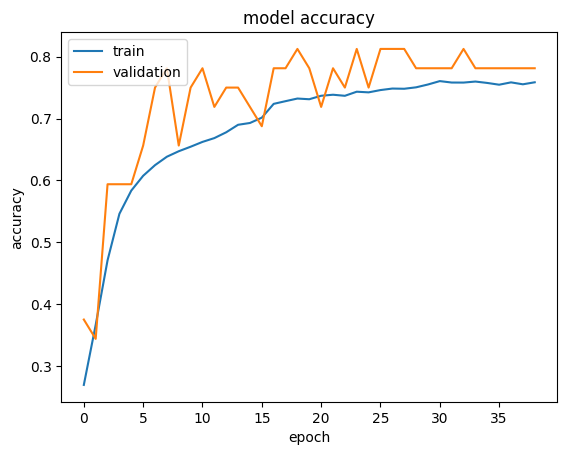

In [30]:
plt.plot(history_2.history["accuracy"])
plt.plot(history_2.history["val_accuracy"])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train", "validation"], loc="upper left")
plt.show()

### **Evaluating the Model on the Test Set**


In [31]:
# Calculate the number of steps for the entire test set to be processed
test_steps = test_generator.samples // batch_size

# If the number of samples isn't a multiple of the batch size,
# you have one more batch with the remaining samples
if test_generator.samples % batch_size > 0:
    test_steps += 1

# Evaluating the model on the test set
evaluation_results = model_2.evaluate(test_generator, steps=test_steps)
print(f"Loss: {evaluation_results[0]}, Accuracy: {evaluation_results[1]}")

1/4 [======>.......................] - ETA: 0s - loss: 0.3927 - accuracy: 0.8750

4/4 [==============================] - 0s 5ms/step - loss: 0.5951 - accuracy: 0.7812


Loss: 0.5950649976730347, Accuracy: 0.78125


### **Plotting Confusion Matrix**


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 5ms/step


              precision    recall  f1-score   support

       happy       0.85      0.88      0.86        32
     neutral       0.74      0.72      0.73        32
         sad       0.62      0.66      0.64        32
    surprise       0.93      0.88      0.90        32

    accuracy                           0.78       128
   macro avg       0.79      0.78      0.78       128
weighted avg       0.79      0.78      0.78       128



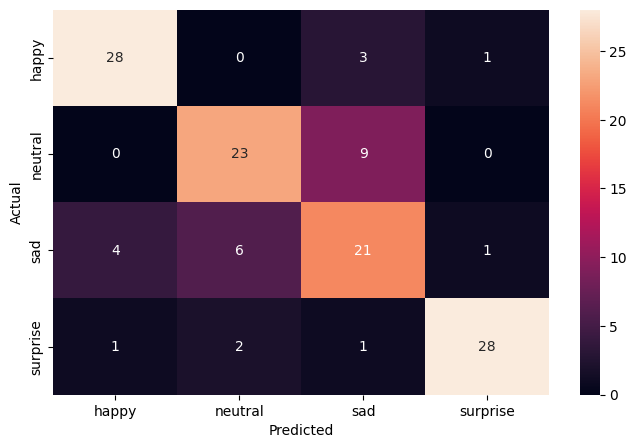

In [32]:
pred_probabilities = model_2.predict(test_generator, steps=test_steps)
pred = np.argmax(pred_probabilities, axis=1)

# Getting the true labels from the generator
y_true = test_generator.classes

# Printing the classification report with actual emotion labels
print(classification_report(y_true, pred, target_names=CATEGORIES))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)
plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt=".0f", xticklabels=CATEGORIES, yticklabels=CATEGORIES)
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

**Observations and Insights:**

- The second CNN model, equipped with a more complex architecture of **938,948 parameters**, demonstrates a steady learning curve, indicating effective feature learning with a final training accuracy of approximately 69.08%. The **validation accuracy on training** experiences fluctuations but shows an upward trend, with a peak at around **84.37%**.
- On testing, the model secured a **loss of 0.5975 and an accuracy of 75%**, which confirms its capability to generalize the learned features to new data reasonably well, aligning closely with the observed validation accuracy.
- The confusion matrix reveals the model's proficiency in correctly identifying 'happy' with a high precision of 0.96 and 'surprise' emotions with impressive precision and recall of 0.93 and 0.84, respectively.
- In contrast, the model has room for improvement when predicting 'neutral' and 'sad' emotions, as indicated by lower precision and recall scores. 'Neutral' faces have the lowest precision at 0.56, suggesting the model sometimes confuses this emotion with others, while 'sad' faces have a recall of 0.56, indicating that the model fails to detect a significant portion of this emotion.


## **Think About It:**

- Did the models have a satisfactory performance? If not, then what are the possible reasons?
- Which Color mode showed better overall performance? What are the possible reasons? Do you think having 'rgb' color mode is needed because the images are already black and white?


## **Transfer Learning Architectures**

In this section, we will create several Transfer Learning architectures. For the pre-trained models, we will select three popular architectures namely, VGG16, ResNet v2, and Efficient Net. The difference between these architectures and the previous architectures is that these will require 3 input channels while the earlier ones worked on 'grayscale' images. Therefore, we need to create new DataLoaders.


### **Creating our Data Loaders for Transfer Learning Architectures**

In this section, we are creating data loaders that we will use as inputs to our Neural Network. We will have to go with color_mode = 'rgb' as this is the required format for the transfer learning architectures.


In [33]:
# Set this to 'rgb' as this is the required format for the transfer learning architectures
color_mode = "rgb"
color_layers = 3
# Resize our images to the same size expected by the transfer learning architectures
# img_width, img_height = 224, 224
img_width, img_height = 48, 48
# A batch size of 32 is appropriate for this dataset provide to provide a good balance
# between the model's ability to generalize (avoid overfitting) and computational efficiency.
batch_size = 32

# Training Data Augmentation
train_datagen = ImageDataGenerator(
    # preprocessing_function=preprocess_input,  # Use the appropriate preprocessing function
    rescale=1.0 / 255,  # Normalize pixel values to [0,1]
    # rotation_range=20,  # Slight rotation to introduce variability without distorting emotion features
    # width_shift_range=0.1,  # Slight horizontal shifts to simulate off-center faces
    # height_shift_range=0.1,  # Slight vertical shifts to account for different heights/angles
    # shear_range=0.1,  # Small shear transformations for slight perspective changes
    # zoom_range=0.1,  # Small zoom in/out to simulate closer or further away faces
    # horizontal_flip=True,  # Faces are symmetric; flipping can simulate looking from another direction
    # fill_mode="nearest",  # 'nearest' interpolation for filling in new pixels after a transformation
)

# Validation and Testing Data should not be augmented!
validation_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

# Assuming train_dir, validation_dir, and test_dir should follow the structure in DATADIR and SUBDIRS
train_dir = os.path.join(DATADIR, SUBDIRS_DICT["train"])
validation_dir = os.path.join(DATADIR, SUBDIRS_DICT["validation"])
test_dir = os.path.join(DATADIR, SUBDIRS_DICT["test"])

# Train Generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    color_mode=color_mode,
    class_mode="categorical",
)

# Validation Generator
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    color_mode=color_mode,
    class_mode="categorical",
)

# Testing Generator
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    color_mode=color_mode,
    class_mode="categorical",
    shuffle=False,  # shuffle=False to keep data in order for testing
)

Found 15109 images belonging to 4 classes.


Found 4977 images belonging to 4 classes.


Found 128 images belonging to 4 classes.


## **VGG16 Model**


### **Importing the VGG16 Architecture**


In [34]:
backend.clear_session()

# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)

random.seed(42)
tf.random.set_seed(42)

In [35]:
vgg_model = VGG16(weights="imagenet", include_top=False, input_shape=(img_width, img_height, color_layers))
# Making all the layers of the VGG model non-trainable. i.e. freezing them
for layer in vgg_model.layers:
    layer.trainable = False

vgg_model.summary()

Model: "vgg16"


_________________________________________________________________


 Layer (type)                Output Shape              Param #   


 input_1 (InputLayer)        [(None, 48, 48, 3)]       0         


 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      


 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     


 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         


 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     


 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    


 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0         


 block3_conv1 (Conv2D)       (None, 12, 12, 256)       295168    


 block3_conv2 (Conv2D)       (None, 12, 12, 256)       590080    


 block3_conv3 (Conv2D)       (None, 12, 12, 256)       590080    


 block3_pool (MaxPooling2D)  (None, 6, 6, 256)         0         


 block4_conv1 (Conv2D)       (None, 6, 6, 512)         1180160   


 block4_conv2 (Conv2D)       (None, 6, 6, 512)         2359808   


 block4_conv3 (Conv2D)       (None, 6, 6, 512)         2359808   


 block4_pool (MaxPooling2D)  (None, 3, 3, 512)         0         


 block5_conv1 (Conv2D)       (None, 3, 3, 512)         2359808   


 block5_conv2 (Conv2D)       (None, 3, 3, 512)         2359808   


 block5_conv3 (Conv2D)       (None, 3, 3, 512)         2359808   


 block5_pool (MaxPooling2D)  (None, 1, 1, 512)         0         


Total params: 14714688 (56.13 MB)


Trainable params: 0 (0.00 Byte)


Non-trainable params: 14714688 (56.13 MB)


_________________________________________________________________


### **Model Building**

- Import VGG16 upto the layer of your choice and add Fully Connected layers on top of it.


In [36]:
new_vgg16_model = Sequential()

# Adding the convolutional part of the VGG16 model from above
new_vgg16_model.add(vgg_model)

# Reduces each feature map to a single value by averaging all elements
new_vgg16_model.add(GlobalAveragePooling2D())

# Adding a dense output layer
new_vgg16_model.add(Dense(512, activation="relu"))
new_vgg16_model.add(Dropout(0.5))
new_vgg16_model.add(Dense(128, activation="relu"))
new_vgg16_model.add(Dropout(0.5))
new_vgg16_model.add(Dense(4, activation="softmax"))

# Using Adam Optimizer
optimizer = Adam(learning_rate=0.0005)

### **Compiling and Training the VGG16 Model**


In [37]:
new_vgg16_model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])
new_vgg16_model.summary()

Model: "sequential"


_________________________________________________________________


 Layer (type)                Output Shape              Param #   


 vgg16 (Functional)          (None, 1, 1, 512)         14714688  


 global_average_pooling2d (  (None, 512)               0         


 GlobalAveragePooling2D)                                         


 dense (Dense)               (None, 512)               262656    


 dropout (Dropout)           (None, 512)               0         


 dense_1 (Dense)             (None, 128)               65664     


 dropout_1 (Dropout)         (None, 128)               0         


 dense_2 (Dense)             (None, 4)                 516       


Total params: 15043524 (57.39 MB)


Trainable params: 328836 (1.25 MB)


Non-trainable params: 14714688 (56.13 MB)


_________________________________________________________________


In [38]:
# Get the current time
current_time = datetime.now().strftime("%Y%m%d-%H%M%S")

# Set up Early Stopping with a patience 7 but acting after at least 20 epochs
delayed_early_stopping = DelayedEarlyStopping(
    monitor="val_loss", patience=7, verbose=1, restore_best_weights=True, start_epoch=20
)

# Define the learning rate scheduler callback
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.2, patience=5, min_lr=0.00001, verbose=1)

mc = ModelCheckpoint(
    f"{results_path}/best_model_vgg16_{current_time}.keras",
    monitor="val_accuracy",
    mode="max",
    verbose=1,
    save_best_only=True,
)

# Pulling a single large batch of random validation data for doing the validation after each epoch
validationX, validationY = validation_generator.next()

# Fitting the model with 40 epochs and using validation set
history_vgg = new_vgg16_model.fit(
    train_generator,
    epochs=40,
    validation_data=(validationX, validationY),
    callbacks=[delayed_early_stopping, mc, reduce_lr],
)

Epoch 1/40


  1/473 [..............................] - ETA: 7:35 - loss: 1.7039 - accuracy: 0.1562

  9/473 [..............................] - ETA: 3s - loss: 1.6236 - accuracy: 0.2569  

 16/473 [>.............................] - ETA: 3s - loss: 1.5749 - accuracy: 0.2578

 23/473 [>.............................] - ETA: 3s - loss: 1.5429 - accuracy: 0.2690

 30/473 [>.............................] - ETA: 3s - loss: 1.5251 - accuracy: 0.2802

 37/473 [=>............................] - ETA: 3s - loss: 1.5062 - accuracy: 0.2829

 45/473 [=>............................] - ETA: 3s - loss: 1.4852 - accuracy: 0.2903

 54/473 [==>...........................] - ETA: 2s - loss: 1.4624 - accuracy: 0.3015

 62/473 [==>...........................] - ETA: 2s - loss: 1.4468 - accuracy: 0.3054

 70/473 [===>..........................] - ETA: 2s - loss: 1.4398 - accuracy: 0.3067

 78/473 [===>..........................] - ETA: 2s - loss: 1.4237 - accuracy: 0.3157

 86/473 [====>.........................] - ETA: 2s - loss: 1.4181 - accuracy: 0.3169

 94/473 [====>.........................] - ETA: 2s - loss: 1.4083 - accuracy: 0.3221

102/473 [=====>........................] - ETA: 2s - loss: 1.4003 - accuracy: 0.3263

110/473 [=====>........................] - ETA: 2s - loss: 1.3990 - accuracy: 0.3227

118/473 [======>.......................] - ETA: 2s - loss: 1.3919 - accuracy: 0.3260

126/473 [======>.......................] - ETA: 2s - loss: 1.3847 - accuracy: 0.3294

133/473 [=======>......................] - ETA: 2s - loss: 1.3797 - accuracy: 0.3327

141/473 [=======>......................] - ETA: 2s - loss: 1.3722 - accuracy: 0.3340

148/473 [========>.....................] - ETA: 2s - loss: 1.3651 - accuracy: 0.3391

156/473 [========>.....................] - ETA: 2s - loss: 1.3586 - accuracy: 0.3401

164/473 [=========>....................] - ETA: 2s - loss: 1.3553 - accuracy: 0.3436

172/473 [=========>....................] - ETA: 2s - loss: 1.3517 - accuracy: 0.3447

180/473 [==========>...................] - ETA: 1s - loss: 1.3469 - accuracy: 0.3484

188/473 [==========>...................] - ETA: 1s - loss: 1.3420 - accuracy: 0.3531

196/473 [===========>..................] - ETA: 1s - loss: 1.3351 - accuracy: 0.3573

204/473 [===========>..................] - ETA: 1s - loss: 1.3321 - accuracy: 0.3627

211/473 [============>.................] - ETA: 1s - loss: 1.3300 - accuracy: 0.3627

218/473 [============>.................] - ETA: 1s - loss: 1.3294 - accuracy: 0.3640

226/473 [=============>................] - ETA: 1s - loss: 1.3247 - accuracy: 0.3674

234/473 [=============>................] - ETA: 1s - loss: 1.3194 - accuracy: 0.3706

242/473 [==============>...............] - ETA: 1s - loss: 1.3189 - accuracy: 0.3727

250/473 [==============>...............] - ETA: 1s - loss: 1.3150 - accuracy: 0.3753

258/473 [===============>..............] - ETA: 1s - loss: 1.3132 - accuracy: 0.3761

265/473 [===============>..............] - ETA: 1s - loss: 1.3097 - accuracy: 0.3775

273/473 [================>.............] - ETA: 1s - loss: 1.3067 - accuracy: 0.3785

281/473 [================>.............] - ETA: 1s - loss: 1.3024 - accuracy: 0.3819

289/473 [=================>............] - ETA: 1s - loss: 1.3016 - accuracy: 0.3818

297/473 [=================>............] - ETA: 1s - loss: 1.2998 - accuracy: 0.3833

305/473 [==================>...........] - ETA: 1s - loss: 1.2989 - accuracy: 0.3830

313/473 [==================>...........] - ETA: 1s - loss: 1.2988 - accuracy: 0.3831

321/473 [===================>..........] - ETA: 1s - loss: 1.2973 - accuracy: 0.3851

329/473 [===================>..........] - ETA: 0s - loss: 1.2939 - accuracy: 0.3873

337/473 [====================>.........] - ETA: 0s - loss: 1.2907 - accuracy: 0.3894

345/473 [====================>.........] - ETA: 0s - loss: 1.2892 - accuracy: 0.3905

353/473 [=====================>........] - ETA: 0s - loss: 1.2880 - accuracy: 0.3921

361/473 [=====================>........] - ETA: 0s - loss: 1.2859 - accuracy: 0.3934

369/473 [======================>.......] - ETA: 0s - loss: 1.2832 - accuracy: 0.3961

377/473 [======================>.......] - ETA: 0s - loss: 1.2806 - accuracy: 0.3970

385/473 [=======================>......] - ETA: 0s - loss: 1.2784 - accuracy: 0.3991

393/473 [=======================>......] - ETA: 0s - loss: 1.2775 - accuracy: 0.4000

400/473 [========================>.....] - ETA: 0s - loss: 1.2770 - accuracy: 0.4009

407/473 [========================>.....] - ETA: 0s - loss: 1.2753 - accuracy: 0.4020

415/473 [=========================>....] - ETA: 0s - loss: 1.2741 - accuracy: 0.4026

423/473 [=========================>....] - ETA: 0s - loss: 1.2724 - accuracy: 0.4037

431/473 [==========================>...] - ETA: 0s - loss: 1.2701 - accuracy: 0.4052

439/473 [==========================>...] - ETA: 0s - loss: 1.2697 - accuracy: 0.4054

446/473 [===========================>..] - ETA: 0s - loss: 1.2690 - accuracy: 0.4058

454/473 [===========================>..] - ETA: 0s - loss: 1.2679 - accuracy: 0.4073

462/473 [============================>.] - ETA: 0s - loss: 1.2671 - accuracy: 0.4076

470/473 [============================>.] - ETA: 0s - loss: 1.2669 - accuracy: 0.4077


Epoch 1: val_accuracy improved from -inf to 0.46875, saving model to /home/iamtxena/sandbox/mit-ai/capstone/Facial_Emotion_Recognition/results/best_model_vgg16_20240320-071337.keras


473/473 [==============================] - 5s 8ms/step - loss: 1.2664 - accuracy: 0.4082 - val_loss: 1.0726 - val_accuracy: 0.4688 - lr: 5.0000e-04


Epoch 2/40


  1/473 [..............................] - ETA: 9s - loss: 1.3074 - accuracy: 0.3125

  9/473 [..............................] - ETA: 3s - loss: 1.1913 - accuracy: 0.4514

 16/473 [>.............................] - ETA: 3s - loss: 1.1713 - accuracy: 0.4766

 24/473 [>.............................] - ETA: 3s - loss: 1.1580 - accuracy: 0.4857

 32/473 [=>............................] - ETA: 3s - loss: 1.1642 - accuracy: 0.4824

 40/473 [=>............................] - ETA: 2s - loss: 1.1639 - accuracy: 0.4781

 48/473 [==>...........................] - ETA: 2s - loss: 1.1608 - accuracy: 0.4876

 56/473 [==>...........................] - ETA: 2s - loss: 1.1720 - accuracy: 0.4805

 64/473 [===>..........................] - ETA: 2s - loss: 1.1841 - accuracy: 0.4722

 72/473 [===>..........................] - ETA: 2s - loss: 1.1880 - accuracy: 0.4757

 80/473 [====>.........................] - ETA: 2s - loss: 1.1905 - accuracy: 0.4746

 88/473 [====>.........................] - ETA: 2s - loss: 1.1878 - accuracy: 0.4744

 96/473 [=====>........................] - ETA: 2s - loss: 1.1818 - accuracy: 0.4782

104/473 [=====>........................] - ETA: 2s - loss: 1.1809 - accuracy: 0.4769

112/473 [======>.......................] - ETA: 2s - loss: 1.1754 - accuracy: 0.4807

120/473 [======>.......................] - ETA: 2s - loss: 1.1736 - accuracy: 0.4815

128/473 [=======>......................] - ETA: 2s - loss: 1.1750 - accuracy: 0.4819

137/473 [=======>......................] - ETA: 2s - loss: 1.1747 - accuracy: 0.4806

145/473 [========>.....................] - ETA: 2s - loss: 1.1747 - accuracy: 0.4821

153/473 [========>.....................] - ETA: 2s - loss: 1.1713 - accuracy: 0.4843

161/473 [=========>....................] - ETA: 1s - loss: 1.1717 - accuracy: 0.4833

169/473 [=========>....................] - ETA: 1s - loss: 1.1688 - accuracy: 0.4856

177/473 [==========>...................] - ETA: 1s - loss: 1.1663 - accuracy: 0.4868

185/473 [==========>...................] - ETA: 1s - loss: 1.1653 - accuracy: 0.4858

193/473 [===========>..................] - ETA: 1s - loss: 1.1616 - accuracy: 0.4877

201/473 [===========>..................] - ETA: 1s - loss: 1.1604 - accuracy: 0.4882

209/473 [============>.................] - ETA: 1s - loss: 1.1618 - accuracy: 0.4871

217/473 [============>.................] - ETA: 1s - loss: 1.1626 - accuracy: 0.4859

226/473 [=============>................] - ETA: 1s - loss: 1.1637 - accuracy: 0.4837

235/473 [=============>................] - ETA: 1s - loss: 1.1640 - accuracy: 0.4834

243/473 [==============>...............] - ETA: 1s - loss: 1.1644 - accuracy: 0.4834

251/473 [==============>...............] - ETA: 1s - loss: 1.1638 - accuracy: 0.4827

259/473 [===============>..............] - ETA: 1s - loss: 1.1641 - accuracy: 0.4835

268/473 [===============>..............] - ETA: 1s - loss: 1.1639 - accuracy: 0.4831

276/473 [================>.............] - ETA: 1s - loss: 1.1644 - accuracy: 0.4832

284/473 [=================>............] - ETA: 1s - loss: 1.1653 - accuracy: 0.4827

292/473 [=================>............] - ETA: 1s - loss: 1.1641 - accuracy: 0.4831

300/473 [==================>...........] - ETA: 1s - loss: 1.1640 - accuracy: 0.4823

308/473 [==================>...........] - ETA: 1s - loss: 1.1622 - accuracy: 0.4827

317/473 [===================>..........] - ETA: 0s - loss: 1.1621 - accuracy: 0.4822

325/473 [===================>..........] - ETA: 0s - loss: 1.1630 - accuracy: 0.4809

333/473 [====================>.........] - ETA: 0s - loss: 1.1623 - accuracy: 0.4809

341/473 [====================>.........] - ETA: 0s - loss: 1.1605 - accuracy: 0.4824

349/473 [=====================>........] - ETA: 0s - loss: 1.1607 - accuracy: 0.4822

357/473 [=====================>........] - ETA: 0s - loss: 1.1611 - accuracy: 0.4818

366/473 [======================>.......] - ETA: 0s - loss: 1.1599 - accuracy: 0.4825

374/473 [======================>.......] - ETA: 0s - loss: 1.1606 - accuracy: 0.4817

382/473 [=======================>......] - ETA: 0s - loss: 1.1613 - accuracy: 0.4811

390/473 [=======================>......] - ETA: 0s - loss: 1.1609 - accuracy: 0.4812

398/473 [========================>.....] - ETA: 0s - loss: 1.1605 - accuracy: 0.4813

406/473 [========================>.....] - ETA: 0s - loss: 1.1596 - accuracy: 0.4818

414/473 [=========================>....] - ETA: 0s - loss: 1.1602 - accuracy: 0.4811

422/473 [=========================>....] - ETA: 0s - loss: 1.1606 - accuracy: 0.4814

430/473 [==========================>...] - ETA: 0s - loss: 1.1601 - accuracy: 0.4819

438/473 [==========================>...] - ETA: 0s - loss: 1.1607 - accuracy: 0.4823

446/473 [===========================>..] - ETA: 0s - loss: 1.1599 - accuracy: 0.4827

454/473 [===========================>..] - ETA: 0s - loss: 1.1606 - accuracy: 0.4828

461/473 [============================>.] - ETA: 0s - loss: 1.1616 - accuracy: 0.4820

468/473 [============================>.] - ETA: 0s - loss: 1.1614 - accuracy: 0.4824


Epoch 2: val_accuracy improved from 0.46875 to 0.59375, saving model to /home/iamtxena/sandbox/mit-ai/capstone/Facial_Emotion_Recognition/results/best_model_vgg16_20240320-071337.keras


473/473 [==============================] - 3s 7ms/step - loss: 1.1612 - accuracy: 0.4823 - val_loss: 1.0796 - val_accuracy: 0.5938 - lr: 5.0000e-04


Epoch 3/40


  1/473 [..............................] - ETA: 8s - loss: 1.1145 - accuracy: 0.4688

  9/473 [..............................] - ETA: 2s - loss: 1.0955 - accuracy: 0.5208

 18/473 [>.............................] - ETA: 2s - loss: 1.0833 - accuracy: 0.5312

 26/473 [>.............................] - ETA: 2s - loss: 1.1032 - accuracy: 0.5180

 34/473 [=>............................] - ETA: 2s - loss: 1.1040 - accuracy: 0.5147

 43/473 [=>............................] - ETA: 2s - loss: 1.1098 - accuracy: 0.5102

 51/473 [==>...........................] - ETA: 2s - loss: 1.1141 - accuracy: 0.5061

 60/473 [==>...........................] - ETA: 2s - loss: 1.1280 - accuracy: 0.5036

 68/473 [===>..........................] - ETA: 2s - loss: 1.1265 - accuracy: 0.5074

 77/473 [===>..........................] - ETA: 2s - loss: 1.1209 - accuracy: 0.5061

 85/473 [====>.........................] - ETA: 2s - loss: 1.1225 - accuracy: 0.5088

 94/473 [====>.........................] - ETA: 2s - loss: 1.1263 - accuracy: 0.5076

103/473 [=====>........................] - ETA: 2s - loss: 1.1224 - accuracy: 0.5079

112/473 [======>.......................] - ETA: 2s - loss: 1.1221 - accuracy: 0.5086

120/473 [======>.......................] - ETA: 2s - loss: 1.1200 - accuracy: 0.5102

129/473 [=======>......................] - ETA: 2s - loss: 1.1190 - accuracy: 0.5104

138/473 [=======>......................] - ETA: 2s - loss: 1.1227 - accuracy: 0.5086

146/473 [========>.....................] - ETA: 2s - loss: 1.1238 - accuracy: 0.5066

154/473 [========>.....................] - ETA: 1s - loss: 1.1249 - accuracy: 0.5047

162/473 [=========>....................] - ETA: 1s - loss: 1.1235 - accuracy: 0.5058

170/473 [=========>....................] - ETA: 1s - loss: 1.1210 - accuracy: 0.5079

179/473 [==========>...................] - ETA: 1s - loss: 1.1222 - accuracy: 0.5068

188/473 [==========>...................] - ETA: 1s - loss: 1.1205 - accuracy: 0.5081

196/473 [===========>..................] - ETA: 1s - loss: 1.1206 - accuracy: 0.5086

204/473 [===========>..................] - ETA: 1s - loss: 1.1197 - accuracy: 0.5104

212/473 [============>.................] - ETA: 1s - loss: 1.1198 - accuracy: 0.5105

220/473 [============>.................] - ETA: 1s - loss: 1.1192 - accuracy: 0.5108

228/473 [=============>................] - ETA: 1s - loss: 1.1197 - accuracy: 0.5100

236/473 [=============>................] - ETA: 1s - loss: 1.1185 - accuracy: 0.5109

244/473 [==============>...............] - ETA: 1s - loss: 1.1193 - accuracy: 0.5102

252/473 [==============>...............] - ETA: 1s - loss: 1.1200 - accuracy: 0.5092

260/473 [===============>..............] - ETA: 1s - loss: 1.1219 - accuracy: 0.5087

268/473 [===============>..............] - ETA: 1s - loss: 1.1222 - accuracy: 0.5073

276/473 [================>.............] - ETA: 1s - loss: 1.1214 - accuracy: 0.5068

284/473 [=================>............] - ETA: 1s - loss: 1.1218 - accuracy: 0.5064

292/473 [=================>............] - ETA: 1s - loss: 1.1222 - accuracy: 0.5070

300/473 [==================>...........] - ETA: 1s - loss: 1.1235 - accuracy: 0.5061

307/473 [==================>...........] - ETA: 1s - loss: 1.1247 - accuracy: 0.5056

314/473 [==================>...........] - ETA: 1s - loss: 1.1246 - accuracy: 0.5047

322/473 [===================>..........] - ETA: 0s - loss: 1.1248 - accuracy: 0.5054

330/473 [===================>..........] - ETA: 0s - loss: 1.1264 - accuracy: 0.5041

338/473 [====================>.........] - ETA: 0s - loss: 1.1250 - accuracy: 0.5036

346/473 [====================>.........] - ETA: 0s - loss: 1.1240 - accuracy: 0.5045

354/473 [=====================>........] - ETA: 0s - loss: 1.1245 - accuracy: 0.5049

362/473 [=====================>........] - ETA: 0s - loss: 1.1265 - accuracy: 0.5043

370/473 [======================>.......] - ETA: 0s - loss: 1.1264 - accuracy: 0.5048

378/473 [======================>.......] - ETA: 0s - loss: 1.1261 - accuracy: 0.5054

386/473 [=======================>......] - ETA: 0s - loss: 1.1248 - accuracy: 0.5062

394/473 [=======================>......] - ETA: 0s - loss: 1.1239 - accuracy: 0.5071

402/473 [========================>.....] - ETA: 0s - loss: 1.1237 - accuracy: 0.5076

410/473 [=========================>....] - ETA: 0s - loss: 1.1237 - accuracy: 0.5079

418/473 [=========================>....] - ETA: 0s - loss: 1.1241 - accuracy: 0.5072

426/473 [==========================>...] - ETA: 0s - loss: 1.1251 - accuracy: 0.5072

434/473 [==========================>...] - ETA: 0s - loss: 1.1235 - accuracy: 0.5078

442/473 [===========================>..] - ETA: 0s - loss: 1.1219 - accuracy: 0.5093

450/473 [===========================>..] - ETA: 0s - loss: 1.1237 - accuracy: 0.5092

458/473 [============================>.] - ETA: 0s - loss: 1.1228 - accuracy: 0.5098

466/473 [============================>.] - ETA: 0s - loss: 1.1231 - accuracy: 0.5092


Epoch 3: val_accuracy did not improve from 0.59375


473/473 [==============================] - 3s 6ms/step - loss: 1.1228 - accuracy: 0.5098 - val_loss: 0.9590 - val_accuracy: 0.5938 - lr: 5.0000e-04


Epoch 4/40


  1/473 [..............................] - ETA: 8s - loss: 1.0189 - accuracy: 0.5000

  9/473 [..............................] - ETA: 2s - loss: 1.0362 - accuracy: 0.5625

 17/473 [>.............................] - ETA: 2s - loss: 1.0208 - accuracy: 0.5662

 25/473 [>.............................] - ETA: 2s - loss: 1.0643 - accuracy: 0.5612

 33/473 [=>............................] - ETA: 2s - loss: 1.0843 - accuracy: 0.5407

 40/473 [=>............................] - ETA: 2s - loss: 1.0938 - accuracy: 0.5336

 48/473 [==>...........................] - ETA: 2s - loss: 1.0976 - accuracy: 0.5280

 55/473 [==>...........................] - ETA: 2s - loss: 1.0949 - accuracy: 0.5290

 63/473 [==>...........................] - ETA: 2s - loss: 1.1025 - accuracy: 0.5253

 71/473 [===>..........................] - ETA: 2s - loss: 1.1038 - accuracy: 0.5273

 79/473 [====>.........................] - ETA: 2s - loss: 1.0977 - accuracy: 0.5293

 87/473 [====>.........................] - ETA: 2s - loss: 1.0976 - accuracy: 0.5309

 96/473 [=====>........................] - ETA: 2s - loss: 1.0962 - accuracy: 0.5291

104/473 [=====>........................] - ETA: 2s - loss: 1.0960 - accuracy: 0.5280

112/473 [======>.......................] - ETA: 2s - loss: 1.0942 - accuracy: 0.5305

119/473 [======>.......................] - ETA: 2s - loss: 1.0940 - accuracy: 0.5305

126/473 [======>.......................] - ETA: 2s - loss: 1.0928 - accuracy: 0.5296

134/473 [=======>......................] - ETA: 2s - loss: 1.0939 - accuracy: 0.5280

142/473 [========>.....................] - ETA: 2s - loss: 1.0953 - accuracy: 0.5278

150/473 [========>.....................] - ETA: 2s - loss: 1.0948 - accuracy: 0.5257

158/473 [=========>....................] - ETA: 2s - loss: 1.0942 - accuracy: 0.5246

166/473 [=========>....................] - ETA: 2s - loss: 1.0959 - accuracy: 0.5222

174/473 [==========>...................] - ETA: 1s - loss: 1.0978 - accuracy: 0.5208

182/473 [==========>...................] - ETA: 1s - loss: 1.0984 - accuracy: 0.5230

190/473 [===========>..................] - ETA: 1s - loss: 1.0974 - accuracy: 0.5234

199/473 [===========>..................] - ETA: 1s - loss: 1.0973 - accuracy: 0.5240

207/473 [============>.................] - ETA: 1s - loss: 1.0977 - accuracy: 0.5242

215/473 [============>.................] - ETA: 1s - loss: 1.0982 - accuracy: 0.5243

223/473 [=============>................] - ETA: 1s - loss: 1.0963 - accuracy: 0.5252

231/473 [=============>................] - ETA: 1s - loss: 1.0976 - accuracy: 0.5259

239/473 [==============>...............] - ETA: 1s - loss: 1.0982 - accuracy: 0.5241

247/473 [==============>...............] - ETA: 1s - loss: 1.0965 - accuracy: 0.5248

255/473 [===============>..............] - ETA: 1s - loss: 1.0961 - accuracy: 0.5266

263/473 [===============>..............] - ETA: 1s - loss: 1.0955 - accuracy: 0.5268

271/473 [================>.............] - ETA: 1s - loss: 1.0972 - accuracy: 0.5249

279/473 [================>.............] - ETA: 1s - loss: 1.0958 - accuracy: 0.5261

287/473 [=================>............] - ETA: 1s - loss: 1.0955 - accuracy: 0.5255

296/473 [=================>............] - ETA: 1s - loss: 1.0965 - accuracy: 0.5240

304/473 [==================>...........] - ETA: 1s - loss: 1.0975 - accuracy: 0.5226

312/473 [==================>...........] - ETA: 1s - loss: 1.0988 - accuracy: 0.5222

320/473 [===================>..........] - ETA: 0s - loss: 1.0980 - accuracy: 0.5224

328/473 [===================>..........] - ETA: 0s - loss: 1.0999 - accuracy: 0.5214

336/473 [====================>.........] - ETA: 0s - loss: 1.1015 - accuracy: 0.5200

344/473 [====================>.........] - ETA: 0s - loss: 1.1005 - accuracy: 0.5207

352/473 [=====================>........] - ETA: 0s - loss: 1.1014 - accuracy: 0.5193

360/473 [=====================>........] - ETA: 0s - loss: 1.1037 - accuracy: 0.5185

368/473 [======================>.......] - ETA: 0s - loss: 1.1043 - accuracy: 0.5174

376/473 [======================>.......] - ETA: 0s - loss: 1.1044 - accuracy: 0.5178

384/473 [=======================>......] - ETA: 0s - loss: 1.1040 - accuracy: 0.5181

392/473 [=======================>......] - ETA: 0s - loss: 1.1025 - accuracy: 0.5192

400/473 [========================>.....] - ETA: 0s - loss: 1.1017 - accuracy: 0.5197

408/473 [========================>.....] - ETA: 0s - loss: 1.1016 - accuracy: 0.5198

416/473 [=========================>....] - ETA: 0s - loss: 1.1006 - accuracy: 0.5200

424/473 [=========================>....] - ETA: 0s - loss: 1.0998 - accuracy: 0.5209

432/473 [==========================>...] - ETA: 0s - loss: 1.0973 - accuracy: 0.5227

440/473 [==========================>...] - ETA: 0s - loss: 1.0976 - accuracy: 0.5229

448/473 [===========================>..] - ETA: 0s - loss: 1.0979 - accuracy: 0.5227

456/473 [===========================>..] - ETA: 0s - loss: 1.0982 - accuracy: 0.5223

464/473 [============================>.] - ETA: 0s - loss: 1.0974 - accuracy: 0.5224

472/473 [============================>.] - ETA: 0s - loss: 1.0982 - accuracy: 0.5219


Epoch 4: val_accuracy improved from 0.59375 to 0.65625, saving model to /home/iamtxena/sandbox/mit-ai/capstone/Facial_Emotion_Recognition/results/best_model_vgg16_20240320-071337.keras


473/473 [==============================] - 3s 7ms/step - loss: 1.0977 - accuracy: 0.5222 - val_loss: 0.9250 - val_accuracy: 0.6562 - lr: 5.0000e-04


Epoch 5/40


  1/473 [..............................] - ETA: 8s - loss: 1.4670 - accuracy: 0.4062

  9/473 [..............................] - ETA: 3s - loss: 1.0843 - accuracy: 0.5451

 17/473 [>.............................] - ETA: 3s - loss: 1.0822 - accuracy: 0.5496

 25/473 [>.............................] - ETA: 2s - loss: 1.0941 - accuracy: 0.5475

 33/473 [=>............................] - ETA: 2s - loss: 1.0876 - accuracy: 0.5350

 41/473 [=>............................] - ETA: 2s - loss: 1.0884 - accuracy: 0.5328

 49/473 [==>...........................] - ETA: 2s - loss: 1.0825 - accuracy: 0.5370

 57/473 [==>...........................] - ETA: 2s - loss: 1.0843 - accuracy: 0.5334

 65/473 [===>..........................] - ETA: 2s - loss: 1.0843 - accuracy: 0.5317

 73/473 [===>..........................] - ETA: 2s - loss: 1.0827 - accuracy: 0.5300

 81/473 [====>.........................] - ETA: 2s - loss: 1.0903 - accuracy: 0.5262

 88/473 [====>.........................] - ETA: 2s - loss: 1.0969 - accuracy: 0.5206

 96/473 [=====>........................] - ETA: 2s - loss: 1.0977 - accuracy: 0.5176

104/473 [=====>........................] - ETA: 2s - loss: 1.0988 - accuracy: 0.5177

112/473 [======>.......................] - ETA: 2s - loss: 1.0933 - accuracy: 0.5209

119/473 [======>.......................] - ETA: 2s - loss: 1.0903 - accuracy: 0.5218

126/473 [======>.......................] - ETA: 2s - loss: 1.0897 - accuracy: 0.5228

132/473 [=======>......................] - ETA: 2s - loss: 1.0863 - accuracy: 0.5239

138/473 [=======>......................] - ETA: 2s - loss: 1.0869 - accuracy: 0.5274

145/473 [========>.....................] - ETA: 2s - loss: 1.0861 - accuracy: 0.5274

153/473 [========>.....................] - ETA: 2s - loss: 1.0843 - accuracy: 0.5282

161/473 [=========>....................] - ETA: 2s - loss: 1.0863 - accuracy: 0.5293

169/473 [=========>....................] - ETA: 2s - loss: 1.0850 - accuracy: 0.5307

177/473 [==========>...................] - ETA: 2s - loss: 1.0835 - accuracy: 0.5327

185/473 [==========>...................] - ETA: 1s - loss: 1.0838 - accuracy: 0.5312

193/473 [===========>..................] - ETA: 1s - loss: 1.0831 - accuracy: 0.5324

201/473 [===========>..................] - ETA: 1s - loss: 1.0851 - accuracy: 0.5309

209/473 [============>.................] - ETA: 1s - loss: 1.0850 - accuracy: 0.5327

217/473 [============>.................] - ETA: 1s - loss: 1.0834 - accuracy: 0.5340

225/473 [=============>................] - ETA: 1s - loss: 1.0809 - accuracy: 0.5346

233/473 [=============>................] - ETA: 1s - loss: 1.0780 - accuracy: 0.5361

241/473 [==============>...............] - ETA: 1s - loss: 1.0771 - accuracy: 0.5367

249/473 [==============>...............] - ETA: 1s - loss: 1.0757 - accuracy: 0.5385

257/473 [===============>..............] - ETA: 1s - loss: 1.0737 - accuracy: 0.5394

265/473 [===============>..............] - ETA: 1s - loss: 1.0732 - accuracy: 0.5380

273/473 [================>.............] - ETA: 1s - loss: 1.0722 - accuracy: 0.5388

281/473 [================>.............] - ETA: 1s - loss: 1.0721 - accuracy: 0.5396

289/473 [=================>............] - ETA: 1s - loss: 1.0718 - accuracy: 0.5395

297/473 [=================>............] - ETA: 1s - loss: 1.0704 - accuracy: 0.5404

305/473 [==================>...........] - ETA: 1s - loss: 1.0723 - accuracy: 0.5394

313/473 [==================>...........] - ETA: 1s - loss: 1.0718 - accuracy: 0.5395

322/473 [===================>..........] - ETA: 1s - loss: 1.0726 - accuracy: 0.5397

330/473 [===================>..........] - ETA: 0s - loss: 1.0728 - accuracy: 0.5403

338/473 [====================>.........] - ETA: 0s - loss: 1.0714 - accuracy: 0.5409

347/473 [=====================>........] - ETA: 0s - loss: 1.0717 - accuracy: 0.5416

355/473 [=====================>........] - ETA: 0s - loss: 1.0725 - accuracy: 0.5412

363/473 [======================>.......] - ETA: 0s - loss: 1.0707 - accuracy: 0.5421

372/473 [======================>.......] - ETA: 0s - loss: 1.0710 - accuracy: 0.5428

381/473 [=======================>......] - ETA: 0s - loss: 1.0723 - accuracy: 0.5423

390/473 [=======================>......] - ETA: 0s - loss: 1.0744 - accuracy: 0.5405

398/473 [========================>.....] - ETA: 0s - loss: 1.0745 - accuracy: 0.5410

406/473 [========================>.....] - ETA: 0s - loss: 1.0745 - accuracy: 0.5408

414/473 [=========================>....] - ETA: 0s - loss: 1.0748 - accuracy: 0.5410

422/473 [=========================>....] - ETA: 0s - loss: 1.0751 - accuracy: 0.5403

430/473 [==========================>...] - ETA: 0s - loss: 1.0754 - accuracy: 0.5399

439/473 [==========================>...] - ETA: 0s - loss: 1.0742 - accuracy: 0.5408

447/473 [===========================>..] - ETA: 0s - loss: 1.0756 - accuracy: 0.5407

455/473 [===========================>..] - ETA: 0s - loss: 1.0761 - accuracy: 0.5410

463/473 [============================>.] - ETA: 0s - loss: 1.0759 - accuracy: 0.5412

471/473 [============================>.] - ETA: 0s - loss: 1.0758 - accuracy: 0.5410


Epoch 5: val_accuracy did not improve from 0.65625


473/473 [==============================] - 3s 7ms/step - loss: 1.0756 - accuracy: 0.5413 - val_loss: 0.9424 - val_accuracy: 0.6250 - lr: 5.0000e-04


Epoch 6/40


  1/473 [..............................] - ETA: 7s - loss: 1.2308 - accuracy: 0.4688

  9/473 [..............................] - ETA: 2s - loss: 1.1478 - accuracy: 0.4826

 17/473 [>.............................] - ETA: 3s - loss: 1.1162 - accuracy: 0.5221

 25/473 [>.............................] - ETA: 2s - loss: 1.0850 - accuracy: 0.5425

 33/473 [=>............................] - ETA: 2s - loss: 1.0911 - accuracy: 0.5369

 41/473 [=>............................] - ETA: 2s - loss: 1.0800 - accuracy: 0.5450

 49/473 [==>...........................] - ETA: 2s - loss: 1.0787 - accuracy: 0.5440

 57/473 [==>...........................] - ETA: 2s - loss: 1.0736 - accuracy: 0.5455

 65/473 [===>..........................] - ETA: 2s - loss: 1.0767 - accuracy: 0.5447

 72/473 [===>..........................] - ETA: 2s - loss: 1.0763 - accuracy: 0.5434

 80/473 [====>.........................] - ETA: 2s - loss: 1.0753 - accuracy: 0.5480

 88/473 [====>.........................] - ETA: 2s - loss: 1.0780 - accuracy: 0.5483

 96/473 [=====>........................] - ETA: 2s - loss: 1.0748 - accuracy: 0.5479

104/473 [=====>........................] - ETA: 2s - loss: 1.0722 - accuracy: 0.5442

112/473 [======>.......................] - ETA: 2s - loss: 1.0669 - accuracy: 0.5458

120/473 [======>.......................] - ETA: 2s - loss: 1.0693 - accuracy: 0.5445

128/473 [=======>......................] - ETA: 2s - loss: 1.0636 - accuracy: 0.5469

136/473 [=======>......................] - ETA: 2s - loss: 1.0629 - accuracy: 0.5483

144/473 [========>.....................] - ETA: 2s - loss: 1.0611 - accuracy: 0.5482

152/473 [========>.....................] - ETA: 2s - loss: 1.0642 - accuracy: 0.5454

160/473 [=========>....................] - ETA: 2s - loss: 1.0612 - accuracy: 0.5473

168/473 [=========>....................] - ETA: 1s - loss: 1.0681 - accuracy: 0.5432

176/473 [==========>...................] - ETA: 1s - loss: 1.0695 - accuracy: 0.5401

184/473 [==========>...................] - ETA: 1s - loss: 1.0682 - accuracy: 0.5406

192/473 [===========>..................] - ETA: 1s - loss: 1.0681 - accuracy: 0.5394

200/473 [===========>..................] - ETA: 1s - loss: 1.0672 - accuracy: 0.5402

208/473 [============>.................] - ETA: 1s - loss: 1.0671 - accuracy: 0.5416

216/473 [============>.................] - ETA: 1s - loss: 1.0650 - accuracy: 0.5425

224/473 [=============>................] - ETA: 1s - loss: 1.0631 - accuracy: 0.5423

232/473 [=============>................] - ETA: 1s - loss: 1.0632 - accuracy: 0.5427

240/473 [==============>...............] - ETA: 1s - loss: 1.0638 - accuracy: 0.5413

248/473 [==============>...............] - ETA: 1s - loss: 1.0636 - accuracy: 0.5406

256/473 [===============>..............] - ETA: 1s - loss: 1.0620 - accuracy: 0.5410

264/473 [===============>..............] - ETA: 1s - loss: 1.0623 - accuracy: 0.5404

272/473 [================>.............] - ETA: 1s - loss: 1.0618 - accuracy: 0.5409

280/473 [================>.............] - ETA: 1s - loss: 1.0601 - accuracy: 0.5425

288/473 [=================>............] - ETA: 1s - loss: 1.0605 - accuracy: 0.5426

296/473 [=================>............] - ETA: 1s - loss: 1.0617 - accuracy: 0.5420

304/473 [==================>...........] - ETA: 1s - loss: 1.0629 - accuracy: 0.5418

312/473 [==================>...........] - ETA: 1s - loss: 1.0646 - accuracy: 0.5408

319/473 [===================>..........] - ETA: 0s - loss: 1.0645 - accuracy: 0.5414

327/473 [===================>..........] - ETA: 0s - loss: 1.0640 - accuracy: 0.5412

335/473 [====================>.........] - ETA: 0s - loss: 1.0653 - accuracy: 0.5410

343/473 [====================>.........] - ETA: 0s - loss: 1.0650 - accuracy: 0.5417

351/473 [=====================>........] - ETA: 0s - loss: 1.0656 - accuracy: 0.5416

360/473 [=====================>........] - ETA: 0s - loss: 1.0653 - accuracy: 0.5418

368/473 [======================>.......] - ETA: 0s - loss: 1.0643 - accuracy: 0.5425

376/473 [======================>.......] - ETA: 0s - loss: 1.0646 - accuracy: 0.5426

384/473 [=======================>......] - ETA: 0s - loss: 1.0641 - accuracy: 0.5426

392/473 [=======================>......] - ETA: 0s - loss: 1.0634 - accuracy: 0.5426

400/473 [========================>.....] - ETA: 0s - loss: 1.0643 - accuracy: 0.5425

408/473 [========================>.....] - ETA: 0s - loss: 1.0641 - accuracy: 0.5427

416/473 [=========================>....] - ETA: 0s - loss: 1.0639 - accuracy: 0.5422

424/473 [=========================>....] - ETA: 0s - loss: 1.0624 - accuracy: 0.5427

432/473 [==========================>...] - ETA: 0s - loss: 1.0626 - accuracy: 0.5425

440/473 [==========================>...] - ETA: 0s - loss: 1.0620 - accuracy: 0.5428

449/473 [===========================>..] - ETA: 0s - loss: 1.0612 - accuracy: 0.5433

457/473 [===========================>..] - ETA: 0s - loss: 1.0626 - accuracy: 0.5419

465/473 [============================>.] - ETA: 0s - loss: 1.0634 - accuracy: 0.5415

473/473 [==============================] - ETA: 0s - loss: 1.0628 - accuracy: 0.5417


Epoch 6: val_accuracy did not improve from 0.65625


473/473 [==============================] - 3s 7ms/step - loss: 1.0628 - accuracy: 0.5417 - val_loss: 0.9824 - val_accuracy: 0.5938 - lr: 5.0000e-04


Epoch 7/40


  1/473 [..............................] - ETA: 7s - loss: 1.0718 - accuracy: 0.4375

  9/473 [..............................] - ETA: 2s - loss: 1.0865 - accuracy: 0.5382

 17/473 [>.............................] - ETA: 2s - loss: 1.0252 - accuracy: 0.5735

 25/473 [>.............................] - ETA: 2s - loss: 1.0375 - accuracy: 0.5775

 33/473 [=>............................] - ETA: 2s - loss: 1.0442 - accuracy: 0.5625

 41/473 [=>............................] - ETA: 2s - loss: 1.0522 - accuracy: 0.5572

 48/473 [==>...........................] - ETA: 2s - loss: 1.0572 - accuracy: 0.5527

 56/473 [==>...........................] - ETA: 2s - loss: 1.0550 - accuracy: 0.5452

 64/473 [===>..........................] - ETA: 2s - loss: 1.0563 - accuracy: 0.5474

 73/473 [===>..........................] - ETA: 2s - loss: 1.0632 - accuracy: 0.5435

 81/473 [====>.........................] - ETA: 2s - loss: 1.0608 - accuracy: 0.5415

 89/473 [====>.........................] - ETA: 2s - loss: 1.0607 - accuracy: 0.5427

 97/473 [=====>........................] - ETA: 2s - loss: 1.0592 - accuracy: 0.5463

105/473 [=====>........................] - ETA: 2s - loss: 1.0586 - accuracy: 0.5473

113/473 [======>.......................] - ETA: 2s - loss: 1.0573 - accuracy: 0.5497

121/473 [======>.......................] - ETA: 2s - loss: 1.0565 - accuracy: 0.5503

129/473 [=======>......................] - ETA: 2s - loss: 1.0541 - accuracy: 0.5501

137/473 [=======>......................] - ETA: 2s - loss: 1.0553 - accuracy: 0.5515

145/473 [========>.....................] - ETA: 2s - loss: 1.0546 - accuracy: 0.5519

153/473 [========>.....................] - ETA: 2s - loss: 1.0535 - accuracy: 0.5531

161/473 [=========>....................] - ETA: 2s - loss: 1.0541 - accuracy: 0.5540

169/473 [=========>....................] - ETA: 2s - loss: 1.0530 - accuracy: 0.5547

177/473 [==========>...................] - ETA: 1s - loss: 1.0518 - accuracy: 0.5553

185/473 [==========>...................] - ETA: 1s - loss: 1.0518 - accuracy: 0.5540

193/473 [===========>..................] - ETA: 1s - loss: 1.0531 - accuracy: 0.5539

202/473 [===========>..................] - ETA: 1s - loss: 1.0544 - accuracy: 0.5545

210/473 [============>.................] - ETA: 1s - loss: 1.0543 - accuracy: 0.5540

218/473 [============>.................] - ETA: 1s - loss: 1.0534 - accuracy: 0.5545

226/473 [=============>................] - ETA: 1s - loss: 1.0487 - accuracy: 0.5577

234/473 [=============>................] - ETA: 1s - loss: 1.0502 - accuracy: 0.5553

242/473 [==============>...............] - ETA: 1s - loss: 1.0483 - accuracy: 0.5553

250/473 [==============>...............] - ETA: 1s - loss: 1.0456 - accuracy: 0.5566

258/473 [===============>..............] - ETA: 1s - loss: 1.0471 - accuracy: 0.5551

266/473 [===============>..............] - ETA: 1s - loss: 1.0478 - accuracy: 0.5546

274/473 [================>.............] - ETA: 1s - loss: 1.0475 - accuracy: 0.5553

282/473 [================>.............] - ETA: 1s - loss: 1.0482 - accuracy: 0.5549

290/473 [=================>............] - ETA: 1s - loss: 1.0496 - accuracy: 0.5548

298/473 [=================>............] - ETA: 1s - loss: 1.0504 - accuracy: 0.5526

306/473 [==================>...........] - ETA: 1s - loss: 1.0512 - accuracy: 0.5518

313/473 [==================>...........] - ETA: 1s - loss: 1.0506 - accuracy: 0.5512

319/473 [===================>..........] - ETA: 1s - loss: 1.0510 - accuracy: 0.5513

327/473 [===================>..........] - ETA: 0s - loss: 1.0507 - accuracy: 0.5510

335/473 [====================>.........] - ETA: 0s - loss: 1.0507 - accuracy: 0.5521

343/473 [====================>.........] - ETA: 0s - loss: 1.0509 - accuracy: 0.5521

351/473 [=====================>........] - ETA: 0s - loss: 1.0497 - accuracy: 0.5525

359/473 [=====================>........] - ETA: 0s - loss: 1.0479 - accuracy: 0.5528

367/473 [======================>.......] - ETA: 0s - loss: 1.0494 - accuracy: 0.5513

374/473 [======================>.......] - ETA: 0s - loss: 1.0495 - accuracy: 0.5513

381/473 [=======================>......] - ETA: 0s - loss: 1.0489 - accuracy: 0.5513

388/473 [=======================>......] - ETA: 0s - loss: 1.0496 - accuracy: 0.5509

395/473 [========================>.....] - ETA: 0s - loss: 1.0475 - accuracy: 0.5520

402/473 [========================>.....] - ETA: 0s - loss: 1.0490 - accuracy: 0.5513

410/473 [=========================>....] - ETA: 0s - loss: 1.0471 - accuracy: 0.5519

418/473 [=========================>....] - ETA: 0s - loss: 1.0466 - accuracy: 0.5518

426/473 [==========================>...] - ETA: 0s - loss: 1.0467 - accuracy: 0.5521

434/473 [==========================>...] - ETA: 0s - loss: 1.0464 - accuracy: 0.5522

442/473 [===========================>..] - ETA: 0s - loss: 1.0468 - accuracy: 0.5525

450/473 [===========================>..] - ETA: 0s - loss: 1.0473 - accuracy: 0.5521

457/473 [===========================>..] - ETA: 0s - loss: 1.0481 - accuracy: 0.5518

464/473 [============================>.] - ETA: 0s - loss: 1.0487 - accuracy: 0.5509

471/473 [============================>.] - ETA: 0s - loss: 1.0491 - accuracy: 0.5510


Epoch 7: val_accuracy did not improve from 0.65625


473/473 [==============================] - 3s 7ms/step - loss: 1.0494 - accuracy: 0.5506 - val_loss: 1.0348 - val_accuracy: 0.5000 - lr: 5.0000e-04


Epoch 8/40


  1/473 [..............................] - ETA: 7s - loss: 1.1574 - accuracy: 0.3125

  9/473 [..............................] - ETA: 2s - loss: 1.0413 - accuracy: 0.5799

 17/473 [>.............................] - ETA: 2s - loss: 1.0269 - accuracy: 0.5846

 25/473 [>.............................] - ETA: 2s - loss: 1.0564 - accuracy: 0.5625

 33/473 [=>............................] - ETA: 2s - loss: 1.0768 - accuracy: 0.5407

 41/473 [=>............................] - ETA: 2s - loss: 1.0554 - accuracy: 0.5541

 50/473 [==>...........................] - ETA: 2s - loss: 1.0418 - accuracy: 0.5606

 58/473 [==>...........................] - ETA: 2s - loss: 1.0332 - accuracy: 0.5609

 67/473 [===>..........................] - ETA: 2s - loss: 1.0312 - accuracy: 0.5579

 75/473 [===>..........................] - ETA: 2s - loss: 1.0329 - accuracy: 0.5542

 83/473 [====>.........................] - ETA: 2s - loss: 1.0332 - accuracy: 0.5546

 91/473 [====>.........................] - ETA: 2s - loss: 1.0369 - accuracy: 0.5560

 99/473 [=====>........................] - ETA: 2s - loss: 1.0358 - accuracy: 0.5584

107/473 [=====>........................] - ETA: 2s - loss: 1.0433 - accuracy: 0.5540

116/473 [======>.......................] - ETA: 2s - loss: 1.0450 - accuracy: 0.5533

124/473 [======>.......................] - ETA: 2s - loss: 1.0469 - accuracy: 0.5501

132/473 [=======>......................] - ETA: 2s - loss: 1.0450 - accuracy: 0.5518

140/473 [=======>......................] - ETA: 2s - loss: 1.0430 - accuracy: 0.5536

148/473 [========>.....................] - ETA: 2s - loss: 1.0422 - accuracy: 0.5532

156/473 [========>.....................] - ETA: 2s - loss: 1.0407 - accuracy: 0.5537

164/473 [=========>....................] - ETA: 1s - loss: 1.0388 - accuracy: 0.5547

172/473 [=========>....................] - ETA: 1s - loss: 1.0399 - accuracy: 0.5545

180/473 [==========>...................] - ETA: 1s - loss: 1.0388 - accuracy: 0.5561

188/473 [==========>...................] - ETA: 1s - loss: 1.0346 - accuracy: 0.5595

196/473 [===========>..................] - ETA: 1s - loss: 1.0344 - accuracy: 0.5588

204/473 [===========>..................] - ETA: 1s - loss: 1.0364 - accuracy: 0.5581

212/473 [============>.................] - ETA: 1s - loss: 1.0365 - accuracy: 0.5573

220/473 [============>.................] - ETA: 1s - loss: 1.0349 - accuracy: 0.5584

228/473 [=============>................] - ETA: 1s - loss: 1.0344 - accuracy: 0.5578

236/473 [=============>................] - ETA: 1s - loss: 1.0354 - accuracy: 0.5571

244/473 [==============>...............] - ETA: 1s - loss: 1.0348 - accuracy: 0.5591

252/473 [==============>...............] - ETA: 1s - loss: 1.0351 - accuracy: 0.5583

260/473 [===============>..............] - ETA: 1s - loss: 1.0345 - accuracy: 0.5593

268/473 [===============>..............] - ETA: 1s - loss: 1.0360 - accuracy: 0.5587

276/473 [================>.............] - ETA: 1s - loss: 1.0341 - accuracy: 0.5595

284/473 [=================>............] - ETA: 1s - loss: 1.0355 - accuracy: 0.5589

292/473 [=================>............] - ETA: 1s - loss: 1.0332 - accuracy: 0.5613

300/473 [==================>...........] - ETA: 1s - loss: 1.0316 - accuracy: 0.5625

308/473 [==================>...........] - ETA: 1s - loss: 1.0291 - accuracy: 0.5640

316/473 [===================>..........] - ETA: 1s - loss: 1.0311 - accuracy: 0.5633

324/473 [===================>..........] - ETA: 0s - loss: 1.0296 - accuracy: 0.5642

332/473 [====================>.........] - ETA: 0s - loss: 1.0286 - accuracy: 0.5641

340/473 [====================>.........] - ETA: 0s - loss: 1.0283 - accuracy: 0.5637

348/473 [=====================>........] - ETA: 0s - loss: 1.0295 - accuracy: 0.5635

356/473 [=====================>........] - ETA: 0s - loss: 1.0307 - accuracy: 0.5629

364/473 [======================>.......] - ETA: 0s - loss: 1.0292 - accuracy: 0.5644

372/473 [======================>.......] - ETA: 0s - loss: 1.0285 - accuracy: 0.5647

379/473 [=======================>......] - ETA: 0s - loss: 1.0279 - accuracy: 0.5652

387/473 [=======================>......] - ETA: 0s - loss: 1.0261 - accuracy: 0.5661

395/473 [========================>.....] - ETA: 0s - loss: 1.0258 - accuracy: 0.5659

403/473 [========================>.....] - ETA: 0s - loss: 1.0265 - accuracy: 0.5652

411/473 [=========================>....] - ETA: 0s - loss: 1.0270 - accuracy: 0.5638

419/473 [=========================>....] - ETA: 0s - loss: 1.0281 - accuracy: 0.5633

427/473 [==========================>...] - ETA: 0s - loss: 1.0272 - accuracy: 0.5630

435/473 [==========================>...] - ETA: 0s - loss: 1.0277 - accuracy: 0.5622

443/473 [===========================>..] - ETA: 0s - loss: 1.0281 - accuracy: 0.5614

451/473 [===========================>..] - ETA: 0s - loss: 1.0290 - accuracy: 0.5613

459/473 [============================>.] - ETA: 0s - loss: 1.0284 - accuracy: 0.5612

467/473 [============================>.] - ETA: 0s - loss: 1.0293 - accuracy: 0.5607


Epoch 8: val_accuracy improved from 0.65625 to 0.68750, saving model to /home/iamtxena/sandbox/mit-ai/capstone/Facial_Emotion_Recognition/results/best_model_vgg16_20240320-071337.keras


473/473 [==============================] - 3s 7ms/step - loss: 1.0290 - accuracy: 0.5607 - val_loss: 0.9104 - val_accuracy: 0.6875 - lr: 5.0000e-04


Epoch 9/40


  1/473 [..............................] - ETA: 7s - loss: 1.0092 - accuracy: 0.6562

  9/473 [..............................] - ETA: 2s - loss: 1.0242 - accuracy: 0.5417

 17/473 [>.............................] - ETA: 2s - loss: 1.0155 - accuracy: 0.5496

 25/473 [>.............................] - ETA: 2s - loss: 1.0025 - accuracy: 0.5800

 32/473 [=>............................] - ETA: 2s - loss: 0.9989 - accuracy: 0.5713

 39/473 [=>............................] - ETA: 3s - loss: 1.0026 - accuracy: 0.5641

 47/473 [=>............................] - ETA: 2s - loss: 1.0016 - accuracy: 0.5598

 55/473 [==>...........................] - ETA: 2s - loss: 1.0044 - accuracy: 0.5597

 63/473 [==>...........................] - ETA: 2s - loss: 1.0099 - accuracy: 0.5575

 71/473 [===>..........................] - ETA: 2s - loss: 1.0084 - accuracy: 0.5607

 79/473 [====>.........................] - ETA: 2s - loss: 1.0078 - accuracy: 0.5649

 87/473 [====>.........................] - ETA: 2s - loss: 1.0112 - accuracy: 0.5639

 95/473 [=====>........................] - ETA: 2s - loss: 1.0068 - accuracy: 0.5658

103/473 [=====>........................] - ETA: 2s - loss: 1.0061 - accuracy: 0.5680

111/473 [======>.......................] - ETA: 2s - loss: 1.0078 - accuracy: 0.5676

119/473 [======>.......................] - ETA: 2s - loss: 1.0042 - accuracy: 0.5696

127/473 [=======>......................] - ETA: 2s - loss: 0.9994 - accuracy: 0.5704

135/473 [=======>......................] - ETA: 2s - loss: 0.9976 - accuracy: 0.5722

143/473 [========>.....................] - ETA: 2s - loss: 0.9987 - accuracy: 0.5728

151/473 [========>.....................] - ETA: 2s - loss: 0.9998 - accuracy: 0.5706

159/473 [=========>....................] - ETA: 2s - loss: 1.0027 - accuracy: 0.5704

167/473 [=========>....................] - ETA: 1s - loss: 1.0048 - accuracy: 0.5698

175/473 [==========>...................] - ETA: 1s - loss: 1.0087 - accuracy: 0.5675

183/473 [==========>...................] - ETA: 1s - loss: 1.0090 - accuracy: 0.5664

191/473 [===========>..................] - ETA: 1s - loss: 1.0112 - accuracy: 0.5645

198/473 [===========>..................] - ETA: 1s - loss: 1.0111 - accuracy: 0.5658

205/473 [============>.................] - ETA: 1s - loss: 1.0094 - accuracy: 0.5674

213/473 [============>.................] - ETA: 1s - loss: 1.0105 - accuracy: 0.5662

221/473 [=============>................] - ETA: 1s - loss: 1.0113 - accuracy: 0.5653

228/473 [=============>................] - ETA: 1s - loss: 1.0116 - accuracy: 0.5657

235/473 [=============>................] - ETA: 1s - loss: 1.0093 - accuracy: 0.5672

243/473 [==============>...............] - ETA: 1s - loss: 1.0097 - accuracy: 0.5676

251/473 [==============>...............] - ETA: 1s - loss: 1.0087 - accuracy: 0.5686

259/473 [===============>..............] - ETA: 1s - loss: 1.0115 - accuracy: 0.5674

267/473 [===============>..............] - ETA: 1s - loss: 1.0098 - accuracy: 0.5691

275/473 [================>.............] - ETA: 1s - loss: 1.0124 - accuracy: 0.5689

283/473 [================>.............] - ETA: 1s - loss: 1.0113 - accuracy: 0.5693

291/473 [=================>............] - ETA: 1s - loss: 1.0099 - accuracy: 0.5709

298/473 [=================>............] - ETA: 1s - loss: 1.0094 - accuracy: 0.5719

306/473 [==================>...........] - ETA: 1s - loss: 1.0112 - accuracy: 0.5702

314/473 [==================>...........] - ETA: 1s - loss: 1.0126 - accuracy: 0.5718

322/473 [===================>..........] - ETA: 0s - loss: 1.0126 - accuracy: 0.5711

330/473 [===================>..........] - ETA: 0s - loss: 1.0129 - accuracy: 0.5710

338/473 [====================>.........] - ETA: 0s - loss: 1.0122 - accuracy: 0.5712

346/473 [====================>.........] - ETA: 0s - loss: 1.0120 - accuracy: 0.5717

354/473 [=====================>........] - ETA: 0s - loss: 1.0122 - accuracy: 0.5716

362/473 [=====================>........] - ETA: 0s - loss: 1.0111 - accuracy: 0.5720

369/473 [======================>.......] - ETA: 0s - loss: 1.0117 - accuracy: 0.5708

377/473 [======================>.......] - ETA: 0s - loss: 1.0119 - accuracy: 0.5711

385/473 [=======================>......] - ETA: 0s - loss: 1.0116 - accuracy: 0.5721

393/473 [=======================>......] - ETA: 0s - loss: 1.0114 - accuracy: 0.5718

401/473 [========================>.....] - ETA: 0s - loss: 1.0105 - accuracy: 0.5720

409/473 [========================>.....] - ETA: 0s - loss: 1.0105 - accuracy: 0.5722

417/473 [=========================>....] - ETA: 0s - loss: 1.0115 - accuracy: 0.5718

426/473 [==========================>...] - ETA: 0s - loss: 1.0117 - accuracy: 0.5714

434/473 [==========================>...] - ETA: 0s - loss: 1.0122 - accuracy: 0.5708

442/473 [===========================>..] - ETA: 0s - loss: 1.0116 - accuracy: 0.5705

450/473 [===========================>..] - ETA: 0s - loss: 1.0131 - accuracy: 0.5693

458/473 [============================>.] - ETA: 0s - loss: 1.0145 - accuracy: 0.5683

466/473 [============================>.] - ETA: 0s - loss: 1.0158 - accuracy: 0.5676


Epoch 9: val_accuracy did not improve from 0.68750


473/473 [==============================] - 3s 7ms/step - loss: 1.0172 - accuracy: 0.5667 - val_loss: 0.9409 - val_accuracy: 0.6250 - lr: 5.0000e-04


Epoch 10/40


  1/473 [..............................] - ETA: 7s - loss: 0.8352 - accuracy: 0.6250

  9/473 [..............................] - ETA: 2s - loss: 0.9794 - accuracy: 0.6042

 17/473 [>.............................] - ETA: 2s - loss: 0.9710 - accuracy: 0.5956

 25/473 [>.............................] - ETA: 2s - loss: 0.9827 - accuracy: 0.5913

 33/473 [=>............................] - ETA: 2s - loss: 0.9950 - accuracy: 0.5814

 41/473 [=>............................] - ETA: 2s - loss: 1.0014 - accuracy: 0.5762

 49/473 [==>...........................] - ETA: 2s - loss: 1.0005 - accuracy: 0.5784

 57/473 [==>...........................] - ETA: 2s - loss: 0.9977 - accuracy: 0.5773

 65/473 [===>..........................] - ETA: 2s - loss: 1.0087 - accuracy: 0.5736

 73/473 [===>..........................] - ETA: 2s - loss: 1.0130 - accuracy: 0.5711

 82/473 [====>.........................] - ETA: 2s - loss: 1.0142 - accuracy: 0.5737

 89/473 [====>.........................] - ETA: 2s - loss: 1.0120 - accuracy: 0.5767

 97/473 [=====>........................] - ETA: 2s - loss: 1.0096 - accuracy: 0.5749

105/473 [=====>........................] - ETA: 2s - loss: 1.0089 - accuracy: 0.5743

113/473 [======>.......................] - ETA: 2s - loss: 1.0103 - accuracy: 0.5731

121/473 [======>.......................] - ETA: 2s - loss: 1.0091 - accuracy: 0.5722

129/473 [=======>......................] - ETA: 2s - loss: 1.0094 - accuracy: 0.5716

137/473 [=======>......................] - ETA: 2s - loss: 1.0091 - accuracy: 0.5708

145/473 [========>.....................] - ETA: 2s - loss: 1.0108 - accuracy: 0.5693

153/473 [========>.....................] - ETA: 2s - loss: 1.0102 - accuracy: 0.5695

161/473 [=========>....................] - ETA: 2s - loss: 1.0071 - accuracy: 0.5709

169/473 [=========>....................] - ETA: 1s - loss: 1.0049 - accuracy: 0.5722

177/473 [==========>...................] - ETA: 1s - loss: 1.0062 - accuracy: 0.5707

184/473 [==========>...................] - ETA: 1s - loss: 1.0070 - accuracy: 0.5707

191/473 [===========>..................] - ETA: 1s - loss: 1.0037 - accuracy: 0.5727

199/473 [===========>..................] - ETA: 1s - loss: 1.0041 - accuracy: 0.5734

207/473 [============>.................] - ETA: 1s - loss: 1.0059 - accuracy: 0.5710

215/473 [============>.................] - ETA: 1s - loss: 1.0073 - accuracy: 0.5701

223/473 [=============>................] - ETA: 1s - loss: 1.0087 - accuracy: 0.5703

231/473 [=============>................] - ETA: 1s - loss: 1.0072 - accuracy: 0.5708

238/473 [==============>...............] - ETA: 1s - loss: 1.0056 - accuracy: 0.5715

245/473 [==============>...............] - ETA: 1s - loss: 1.0056 - accuracy: 0.5719

253/473 [===============>..............] - ETA: 1s - loss: 1.0067 - accuracy: 0.5702

261/473 [===============>..............] - ETA: 1s - loss: 1.0062 - accuracy: 0.5697

269/473 [================>.............] - ETA: 1s - loss: 1.0064 - accuracy: 0.5697

277/473 [================>.............] - ETA: 1s - loss: 1.0092 - accuracy: 0.5680

285/473 [=================>............] - ETA: 1s - loss: 1.0084 - accuracy: 0.5692

293/473 [=================>............] - ETA: 1s - loss: 1.0097 - accuracy: 0.5686

301/473 [==================>...........] - ETA: 1s - loss: 1.0092 - accuracy: 0.5694

309/473 [==================>...........] - ETA: 1s - loss: 1.0094 - accuracy: 0.5699

317/473 [===================>..........] - ETA: 1s - loss: 1.0108 - accuracy: 0.5690

325/473 [===================>..........] - ETA: 0s - loss: 1.0109 - accuracy: 0.5692

333/473 [====================>.........] - ETA: 0s - loss: 1.0107 - accuracy: 0.5697

341/473 [====================>.........] - ETA: 0s - loss: 1.0113 - accuracy: 0.5695

349/473 [=====================>........] - ETA: 0s - loss: 1.0100 - accuracy: 0.5699

357/473 [=====================>........] - ETA: 0s - loss: 1.0103 - accuracy: 0.5702

364/473 [======================>.......] - ETA: 0s - loss: 1.0098 - accuracy: 0.5703

372/473 [======================>.......] - ETA: 0s - loss: 1.0089 - accuracy: 0.5705

380/473 [=======================>......] - ETA: 0s - loss: 1.0082 - accuracy: 0.5705

388/473 [=======================>......] - ETA: 0s - loss: 1.0056 - accuracy: 0.5719

396/473 [========================>.....] - ETA: 0s - loss: 1.0068 - accuracy: 0.5712

404/473 [========================>.....] - ETA: 0s - loss: 1.0067 - accuracy: 0.5713

412/473 [=========================>....] - ETA: 0s - loss: 1.0068 - accuracy: 0.5719

420/473 [=========================>....] - ETA: 0s - loss: 1.0072 - accuracy: 0.5724

428/473 [==========================>...] - ETA: 0s - loss: 1.0056 - accuracy: 0.5727

436/473 [==========================>...] - ETA: 0s - loss: 1.0043 - accuracy: 0.5739

444/473 [===========================>..] - ETA: 0s - loss: 1.0042 - accuracy: 0.5739

452/473 [===========================>..] - ETA: 0s - loss: 1.0035 - accuracy: 0.5744

460/473 [============================>.] - ETA: 0s - loss: 1.0057 - accuracy: 0.5729

467/473 [============================>.] - ETA: 0s - loss: 1.0059 - accuracy: 0.5726


Epoch 10: val_accuracy did not improve from 0.68750


473/473 [==============================] - 3s 7ms/step - loss: 1.0046 - accuracy: 0.5732 - val_loss: 0.9095 - val_accuracy: 0.6250 - lr: 5.0000e-04


Epoch 11/40


  1/473 [..............................] - ETA: 7s - loss: 0.9817 - accuracy: 0.5000

  9/473 [..............................] - ETA: 2s - loss: 1.0145 - accuracy: 0.5556

 17/473 [>.............................] - ETA: 2s - loss: 0.9787 - accuracy: 0.5680

 25/473 [>.............................] - ETA: 2s - loss: 0.9910 - accuracy: 0.5800

 32/473 [=>............................] - ETA: 2s - loss: 0.9821 - accuracy: 0.5889

 40/473 [=>............................] - ETA: 2s - loss: 0.9742 - accuracy: 0.5977

 48/473 [==>...........................] - ETA: 2s - loss: 0.9645 - accuracy: 0.6003

 57/473 [==>...........................] - ETA: 2s - loss: 0.9647 - accuracy: 0.5981

 65/473 [===>..........................] - ETA: 2s - loss: 0.9679 - accuracy: 0.5957

 73/473 [===>..........................] - ETA: 2s - loss: 0.9720 - accuracy: 0.5933

 81/473 [====>.........................] - ETA: 2s - loss: 0.9721 - accuracy: 0.5918

 89/473 [====>.........................] - ETA: 2s - loss: 0.9678 - accuracy: 0.5916

 96/473 [=====>........................] - ETA: 2s - loss: 0.9723 - accuracy: 0.5915

103/473 [=====>........................] - ETA: 2s - loss: 0.9724 - accuracy: 0.5913

111/473 [======>.......................] - ETA: 2s - loss: 0.9796 - accuracy: 0.5876

119/473 [======>.......................] - ETA: 2s - loss: 0.9797 - accuracy: 0.5874

127/473 [=======>......................] - ETA: 2s - loss: 0.9781 - accuracy: 0.5878

135/473 [=======>......................] - ETA: 2s - loss: 0.9779 - accuracy: 0.5875

143/473 [========>.....................] - ETA: 2s - loss: 0.9822 - accuracy: 0.5852

150/473 [========>.....................] - ETA: 2s - loss: 0.9766 - accuracy: 0.5875

158/473 [=========>....................] - ETA: 2s - loss: 0.9787 - accuracy: 0.5878

166/473 [=========>....................] - ETA: 2s - loss: 0.9821 - accuracy: 0.5860

174/473 [==========>...................] - ETA: 1s - loss: 0.9808 - accuracy: 0.5880

182/473 [==========>...................] - ETA: 1s - loss: 0.9834 - accuracy: 0.5859

190/473 [===========>..................] - ETA: 1s - loss: 0.9836 - accuracy: 0.5847

198/473 [===========>..................] - ETA: 1s - loss: 0.9816 - accuracy: 0.5854

206/473 [============>.................] - ETA: 1s - loss: 0.9803 - accuracy: 0.5865

213/473 [============>.................] - ETA: 1s - loss: 0.9793 - accuracy: 0.5858

220/473 [============>.................] - ETA: 1s - loss: 0.9803 - accuracy: 0.5855

227/473 [=============>................] - ETA: 1s - loss: 0.9819 - accuracy: 0.5845

235/473 [=============>................] - ETA: 1s - loss: 0.9811 - accuracy: 0.5868

244/473 [==============>...............] - ETA: 1s - loss: 0.9822 - accuracy: 0.5864

252/473 [==============>...............] - ETA: 1s - loss: 0.9851 - accuracy: 0.5853

260/473 [===============>..............] - ETA: 1s - loss: 0.9881 - accuracy: 0.5831

268/473 [===============>..............] - ETA: 1s - loss: 0.9880 - accuracy: 0.5835

276/473 [================>.............] - ETA: 1s - loss: 0.9895 - accuracy: 0.5823

284/473 [=================>............] - ETA: 1s - loss: 0.9900 - accuracy: 0.5814

292/473 [=================>............] - ETA: 1s - loss: 0.9885 - accuracy: 0.5822

300/473 [==================>...........] - ETA: 1s - loss: 0.9888 - accuracy: 0.5826

308/473 [==================>...........] - ETA: 1s - loss: 0.9896 - accuracy: 0.5816

316/473 [===================>..........] - ETA: 1s - loss: 0.9910 - accuracy: 0.5802

324/473 [===================>..........] - ETA: 0s - loss: 0.9901 - accuracy: 0.5809

332/473 [====================>.........] - ETA: 0s - loss: 0.9899 - accuracy: 0.5804

340/473 [====================>.........] - ETA: 0s - loss: 0.9887 - accuracy: 0.5809

348/473 [=====================>........] - ETA: 0s - loss: 0.9903 - accuracy: 0.5800

356/473 [=====================>........] - ETA: 0s - loss: 0.9896 - accuracy: 0.5796

364/473 [======================>.......] - ETA: 0s - loss: 0.9908 - accuracy: 0.5802

372/473 [======================>.......] - ETA: 0s - loss: 0.9914 - accuracy: 0.5798

380/473 [=======================>......] - ETA: 0s - loss: 0.9913 - accuracy: 0.5797

388/473 [=======================>......] - ETA: 0s - loss: 0.9920 - accuracy: 0.5797

396/473 [========================>.....] - ETA: 0s - loss: 0.9913 - accuracy: 0.5803

403/473 [========================>.....] - ETA: 0s - loss: 0.9904 - accuracy: 0.5808

410/473 [=========================>....] - ETA: 0s - loss: 0.9905 - accuracy: 0.5813

418/473 [=========================>....] - ETA: 0s - loss: 0.9924 - accuracy: 0.5807

426/473 [==========================>...] - ETA: 0s - loss: 0.9924 - accuracy: 0.5813

434/473 [==========================>...] - ETA: 0s - loss: 0.9935 - accuracy: 0.5808

442/473 [===========================>..] - ETA: 0s - loss: 0.9934 - accuracy: 0.5809

450/473 [===========================>..] - ETA: 0s - loss: 0.9936 - accuracy: 0.5810

458/473 [============================>.] - ETA: 0s - loss: 0.9937 - accuracy: 0.5810

466/473 [============================>.] - ETA: 0s - loss: 0.9924 - accuracy: 0.5816


Epoch 11: val_accuracy did not improve from 0.68750


473/473 [==============================] - 3s 7ms/step - loss: 0.9930 - accuracy: 0.5814 - val_loss: 0.8374 - val_accuracy: 0.6875 - lr: 5.0000e-04


Epoch 12/40


  1/473 [..............................] - ETA: 7s - loss: 1.0318 - accuracy: 0.5625

  9/473 [..............................] - ETA: 2s - loss: 0.9982 - accuracy: 0.5486

 17/473 [>.............................] - ETA: 2s - loss: 0.9982 - accuracy: 0.5699

 25/473 [>.............................] - ETA: 2s - loss: 0.9993 - accuracy: 0.5688

 33/473 [=>............................] - ETA: 2s - loss: 0.9895 - accuracy: 0.5758

 40/473 [=>............................] - ETA: 2s - loss: 0.9949 - accuracy: 0.5719

 48/473 [==>...........................] - ETA: 2s - loss: 0.9909 - accuracy: 0.5749

 56/473 [==>...........................] - ETA: 2s - loss: 0.9852 - accuracy: 0.5787

 64/473 [===>..........................] - ETA: 2s - loss: 0.9836 - accuracy: 0.5840

 71/473 [===>..........................] - ETA: 2s - loss: 0.9841 - accuracy: 0.5832

 78/473 [===>..........................] - ETA: 2s - loss: 0.9815 - accuracy: 0.5841

 86/473 [====>.........................] - ETA: 2s - loss: 0.9773 - accuracy: 0.5850

 94/473 [====>.........................] - ETA: 2s - loss: 0.9769 - accuracy: 0.5851

102/473 [=====>........................] - ETA: 2s - loss: 0.9692 - accuracy: 0.5879

110/473 [=====>........................] - ETA: 2s - loss: 0.9708 - accuracy: 0.5852

118/473 [======>.......................] - ETA: 2s - loss: 0.9702 - accuracy: 0.5869

126/473 [======>.......................] - ETA: 2s - loss: 0.9713 - accuracy: 0.5846

134/473 [=======>......................] - ETA: 2s - loss: 0.9721 - accuracy: 0.5833

142/473 [========>.....................] - ETA: 2s - loss: 0.9716 - accuracy: 0.5845

150/473 [========>.....................] - ETA: 2s - loss: 0.9698 - accuracy: 0.5871

158/473 [=========>....................] - ETA: 2s - loss: 0.9695 - accuracy: 0.5880

166/473 [=========>....................] - ETA: 2s - loss: 0.9692 - accuracy: 0.5887

174/473 [==========>...................] - ETA: 2s - loss: 0.9681 - accuracy: 0.5900

182/473 [==========>...................] - ETA: 1s - loss: 0.9626 - accuracy: 0.5934

190/473 [===========>..................] - ETA: 1s - loss: 0.9672 - accuracy: 0.5910

198/473 [===========>..................] - ETA: 1s - loss: 0.9692 - accuracy: 0.5915

206/473 [============>.................] - ETA: 1s - loss: 0.9685 - accuracy: 0.5913

214/473 [============>.................] - ETA: 1s - loss: 0.9672 - accuracy: 0.5916

222/473 [=============>................] - ETA: 1s - loss: 0.9683 - accuracy: 0.5915

231/473 [=============>................] - ETA: 1s - loss: 0.9701 - accuracy: 0.5905

239/473 [==============>...............] - ETA: 1s - loss: 0.9735 - accuracy: 0.5881

247/473 [==============>...............] - ETA: 1s - loss: 0.9731 - accuracy: 0.5876

255/473 [===============>..............] - ETA: 1s - loss: 0.9733 - accuracy: 0.5875

263/473 [===============>..............] - ETA: 1s - loss: 0.9730 - accuracy: 0.5872

271/473 [================>.............] - ETA: 1s - loss: 0.9725 - accuracy: 0.5874

279/473 [================>.............] - ETA: 1s - loss: 0.9717 - accuracy: 0.5883

287/473 [=================>............] - ETA: 1s - loss: 0.9746 - accuracy: 0.5863

295/473 [=================>............] - ETA: 1s - loss: 0.9738 - accuracy: 0.5864

303/473 [==================>...........] - ETA: 1s - loss: 0.9734 - accuracy: 0.5865

311/473 [==================>...........] - ETA: 1s - loss: 0.9746 - accuracy: 0.5868

319/473 [===================>..........] - ETA: 1s - loss: 0.9733 - accuracy: 0.5876

327/473 [===================>..........] - ETA: 0s - loss: 0.9739 - accuracy: 0.5863

335/473 [====================>.........] - ETA: 0s - loss: 0.9724 - accuracy: 0.5869

343/473 [====================>.........] - ETA: 0s - loss: 0.9715 - accuracy: 0.5879

351/473 [=====================>........] - ETA: 0s - loss: 0.9730 - accuracy: 0.5874

359/473 [=====================>........] - ETA: 0s - loss: 0.9719 - accuracy: 0.5881

367/473 [======================>.......] - ETA: 0s - loss: 0.9727 - accuracy: 0.5876

375/473 [======================>.......] - ETA: 0s - loss: 0.9709 - accuracy: 0.5887

382/473 [=======================>......] - ETA: 0s - loss: 0.9707 - accuracy: 0.5885

390/473 [=======================>......] - ETA: 0s - loss: 0.9721 - accuracy: 0.5881

398/473 [========================>.....] - ETA: 0s - loss: 0.9729 - accuracy: 0.5877

406/473 [========================>.....] - ETA: 0s - loss: 0.9722 - accuracy: 0.5880

414/473 [=========================>....] - ETA: 0s - loss: 0.9725 - accuracy: 0.5884

422/473 [=========================>....] - ETA: 0s - loss: 0.9741 - accuracy: 0.5877

430/473 [==========================>...] - ETA: 0s - loss: 0.9738 - accuracy: 0.5878

438/473 [==========================>...] - ETA: 0s - loss: 0.9733 - accuracy: 0.5883

445/473 [===========================>..] - ETA: 0s - loss: 0.9740 - accuracy: 0.5879

453/473 [===========================>..] - ETA: 0s - loss: 0.9731 - accuracy: 0.5884

461/473 [============================>.] - ETA: 0s - loss: 0.9721 - accuracy: 0.5891

469/473 [============================>.] - ETA: 0s - loss: 0.9709 - accuracy: 0.5897


Epoch 12: val_accuracy did not improve from 0.68750


473/473 [==============================] - 3s 7ms/step - loss: 0.9708 - accuracy: 0.5896 - val_loss: 0.8992 - val_accuracy: 0.6562 - lr: 5.0000e-04


Epoch 13/40


  1/473 [..............................] - ETA: 7s - loss: 0.8324 - accuracy: 0.7500

  9/473 [..............................] - ETA: 2s - loss: 0.8905 - accuracy: 0.6007

 17/473 [>.............................] - ETA: 2s - loss: 0.9141 - accuracy: 0.6176

 25/473 [>.............................] - ETA: 2s - loss: 0.9561 - accuracy: 0.5888

 33/473 [=>............................] - ETA: 2s - loss: 0.9514 - accuracy: 0.5985

 41/473 [=>............................] - ETA: 2s - loss: 0.9463 - accuracy: 0.6059

 49/473 [==>...........................] - ETA: 2s - loss: 0.9481 - accuracy: 0.5976

 57/473 [==>...........................] - ETA: 2s - loss: 0.9642 - accuracy: 0.5916

 65/473 [===>..........................] - ETA: 2s - loss: 0.9777 - accuracy: 0.5841

 73/473 [===>..........................] - ETA: 2s - loss: 0.9719 - accuracy: 0.5878

 81/473 [====>.........................] - ETA: 2s - loss: 0.9717 - accuracy: 0.5880

 89/473 [====>.........................] - ETA: 2s - loss: 0.9739 - accuracy: 0.5853

 97/473 [=====>........................] - ETA: 2s - loss: 0.9674 - accuracy: 0.5886

105/473 [=====>........................] - ETA: 2s - loss: 0.9634 - accuracy: 0.5905

113/473 [======>.......................] - ETA: 2s - loss: 0.9613 - accuracy: 0.5929

121/473 [======>.......................] - ETA: 2s - loss: 0.9622 - accuracy: 0.5932

128/473 [=======>......................] - ETA: 2s - loss: 0.9591 - accuracy: 0.5930

136/473 [=======>......................] - ETA: 2s - loss: 0.9623 - accuracy: 0.5928

144/473 [========>.....................] - ETA: 2s - loss: 0.9627 - accuracy: 0.5907

152/473 [========>.....................] - ETA: 2s - loss: 0.9637 - accuracy: 0.5894

160/473 [=========>....................] - ETA: 2s - loss: 0.9621 - accuracy: 0.5906

168/473 [=========>....................] - ETA: 1s - loss: 0.9621 - accuracy: 0.5889

176/473 [==========>...................] - ETA: 1s - loss: 0.9657 - accuracy: 0.5879

184/473 [==========>...................] - ETA: 1s - loss: 0.9622 - accuracy: 0.5893

192/473 [===========>..................] - ETA: 1s - loss: 0.9629 - accuracy: 0.5895

200/473 [===========>..................] - ETA: 1s - loss: 0.9640 - accuracy: 0.5898

208/473 [============>.................] - ETA: 1s - loss: 0.9643 - accuracy: 0.5894

216/473 [============>.................] - ETA: 1s - loss: 0.9602 - accuracy: 0.5904

224/473 [=============>................] - ETA: 1s - loss: 0.9597 - accuracy: 0.5915

232/473 [=============>................] - ETA: 1s - loss: 0.9575 - accuracy: 0.5921

240/473 [==============>...............] - ETA: 1s - loss: 0.9597 - accuracy: 0.5923

248/473 [==============>...............] - ETA: 1s - loss: 0.9592 - accuracy: 0.5938

256/473 [===============>..............] - ETA: 1s - loss: 0.9588 - accuracy: 0.5931

264/473 [===============>..............] - ETA: 1s - loss: 0.9608 - accuracy: 0.5924

272/473 [================>.............] - ETA: 1s - loss: 0.9618 - accuracy: 0.5916

280/473 [================>.............] - ETA: 1s - loss: 0.9618 - accuracy: 0.5906

288/473 [=================>............] - ETA: 1s - loss: 0.9623 - accuracy: 0.5894

296/473 [=================>............] - ETA: 1s - loss: 0.9648 - accuracy: 0.5886

304/473 [==================>...........] - ETA: 1s - loss: 0.9647 - accuracy: 0.5878

312/473 [==================>...........] - ETA: 1s - loss: 0.9649 - accuracy: 0.5888

320/473 [===================>..........] - ETA: 0s - loss: 0.9640 - accuracy: 0.5893

328/473 [===================>..........] - ETA: 0s - loss: 0.9616 - accuracy: 0.5905

336/473 [====================>.........] - ETA: 0s - loss: 0.9615 - accuracy: 0.5909

344/473 [====================>.........] - ETA: 0s - loss: 0.9637 - accuracy: 0.5896

352/473 [=====================>........] - ETA: 0s - loss: 0.9645 - accuracy: 0.5896

360/473 [=====================>........] - ETA: 0s - loss: 0.9640 - accuracy: 0.5895

368/473 [======================>.......] - ETA: 0s - loss: 0.9627 - accuracy: 0.5903

376/473 [======================>.......] - ETA: 0s - loss: 0.9631 - accuracy: 0.5895

384/473 [=======================>......] - ETA: 0s - loss: 0.9624 - accuracy: 0.5900

392/473 [=======================>......] - ETA: 0s - loss: 0.9634 - accuracy: 0.5897

401/473 [========================>.....] - ETA: 0s - loss: 0.9626 - accuracy: 0.5902

409/473 [========================>.....] - ETA: 0s - loss: 0.9619 - accuracy: 0.5904

418/473 [=========================>....] - ETA: 0s - loss: 0.9622 - accuracy: 0.5906

426/473 [==========================>...] - ETA: 0s - loss: 0.9632 - accuracy: 0.5902

435/473 [==========================>...] - ETA: 0s - loss: 0.9625 - accuracy: 0.5902

443/473 [===========================>..] - ETA: 0s - loss: 0.9617 - accuracy: 0.5902

451/473 [===========================>..] - ETA: 0s - loss: 0.9619 - accuracy: 0.5906

459/473 [============================>.] - ETA: 0s - loss: 0.9630 - accuracy: 0.5906

467/473 [============================>.] - ETA: 0s - loss: 0.9624 - accuracy: 0.5911


Epoch 13: val_accuracy did not improve from 0.68750


473/473 [==============================] - 3s 6ms/step - loss: 0.9625 - accuracy: 0.5912 - val_loss: 0.9791 - val_accuracy: 0.5938 - lr: 5.0000e-04


Epoch 14/40


  1/473 [..............................] - ETA: 7s - loss: 1.2422 - accuracy: 0.4375

  9/473 [..............................] - ETA: 2s - loss: 0.9675 - accuracy: 0.5868

 17/473 [>.............................] - ETA: 2s - loss: 0.9536 - accuracy: 0.5790

 25/473 [>.............................] - ETA: 2s - loss: 0.9649 - accuracy: 0.5725

 33/473 [=>............................] - ETA: 2s - loss: 0.9673 - accuracy: 0.5852

 41/473 [=>............................] - ETA: 2s - loss: 0.9511 - accuracy: 0.5907

 49/473 [==>...........................] - ETA: 2s - loss: 0.9559 - accuracy: 0.5906

 57/473 [==>...........................] - ETA: 2s - loss: 0.9543 - accuracy: 0.5943

 65/473 [===>..........................] - ETA: 2s - loss: 0.9552 - accuracy: 0.5990

 73/473 [===>..........................] - ETA: 2s - loss: 0.9544 - accuracy: 0.6006

 82/473 [====>.........................] - ETA: 2s - loss: 0.9551 - accuracy: 0.5976

 90/473 [====>.........................] - ETA: 2s - loss: 0.9513 - accuracy: 0.5972

 98/473 [=====>........................] - ETA: 2s - loss: 0.9541 - accuracy: 0.5950

107/473 [=====>........................] - ETA: 2s - loss: 0.9512 - accuracy: 0.5949

115/473 [======>.......................] - ETA: 2s - loss: 0.9575 - accuracy: 0.5946

124/473 [======>.......................] - ETA: 2s - loss: 0.9663 - accuracy: 0.5892

132/473 [=======>......................] - ETA: 2s - loss: 0.9627 - accuracy: 0.5921

140/473 [=======>......................] - ETA: 2s - loss: 0.9657 - accuracy: 0.5922

148/473 [========>.....................] - ETA: 2s - loss: 0.9618 - accuracy: 0.5948

156/473 [========>.....................] - ETA: 1s - loss: 0.9588 - accuracy: 0.5956

165/473 [=========>....................] - ETA: 1s - loss: 0.9589 - accuracy: 0.5973

173/473 [=========>....................] - ETA: 1s - loss: 0.9575 - accuracy: 0.5992

182/473 [==========>...................] - ETA: 1s - loss: 0.9589 - accuracy: 0.5986

191/473 [===========>..................] - ETA: 1s - loss: 0.9565 - accuracy: 0.5993

199/473 [===========>..................] - ETA: 1s - loss: 0.9560 - accuracy: 0.5992

208/473 [============>.................] - ETA: 1s - loss: 0.9550 - accuracy: 0.5986

217/473 [============>.................] - ETA: 1s - loss: 0.9534 - accuracy: 0.5997

225/473 [=============>................] - ETA: 1s - loss: 0.9517 - accuracy: 0.6001

234/473 [=============>................] - ETA: 1s - loss: 0.9502 - accuracy: 0.6006

243/473 [==============>...............] - ETA: 1s - loss: 0.9521 - accuracy: 0.5990

252/473 [==============>...............] - ETA: 1s - loss: 0.9518 - accuracy: 0.5996

261/473 [===============>..............] - ETA: 1s - loss: 0.9513 - accuracy: 0.6009

270/473 [================>.............] - ETA: 1s - loss: 0.9517 - accuracy: 0.6010

279/473 [================>.............] - ETA: 1s - loss: 0.9514 - accuracy: 0.6004

287/473 [=================>............] - ETA: 1s - loss: 0.9514 - accuracy: 0.5998

295/473 [=================>............] - ETA: 1s - loss: 0.9489 - accuracy: 0.6012

304/473 [==================>...........] - ETA: 1s - loss: 0.9492 - accuracy: 0.6007

312/473 [==================>...........] - ETA: 1s - loss: 0.9515 - accuracy: 0.5993

320/473 [===================>..........] - ETA: 0s - loss: 0.9526 - accuracy: 0.5983

328/473 [===================>..........] - ETA: 0s - loss: 0.9521 - accuracy: 0.5977

336/473 [====================>.........] - ETA: 0s - loss: 0.9533 - accuracy: 0.5968

344/473 [====================>.........] - ETA: 0s - loss: 0.9543 - accuracy: 0.5958

352/473 [=====================>........] - ETA: 0s - loss: 0.9546 - accuracy: 0.5961

360/473 [=====================>........] - ETA: 0s - loss: 0.9525 - accuracy: 0.5971

367/473 [======================>.......] - ETA: 0s - loss: 0.9528 - accuracy: 0.5967

375/473 [======================>.......] - ETA: 0s - loss: 0.9521 - accuracy: 0.5968

383/473 [=======================>......] - ETA: 0s - loss: 0.9519 - accuracy: 0.5972

392/473 [=======================>......] - ETA: 0s - loss: 0.9531 - accuracy: 0.5966

400/473 [========================>.....] - ETA: 0s - loss: 0.9530 - accuracy: 0.5967

408/473 [========================>.....] - ETA: 0s - loss: 0.9536 - accuracy: 0.5963

417/473 [=========================>....] - ETA: 0s - loss: 0.9535 - accuracy: 0.5968

426/473 [==========================>...] - ETA: 0s - loss: 0.9524 - accuracy: 0.5975

435/473 [==========================>...] - ETA: 0s - loss: 0.9528 - accuracy: 0.5971

443/473 [===========================>..] - ETA: 0s - loss: 0.9535 - accuracy: 0.5958

451/473 [===========================>..] - ETA: 0s - loss: 0.9527 - accuracy: 0.5963

459/473 [============================>.] - ETA: 0s - loss: 0.9535 - accuracy: 0.5954

467/473 [============================>.] - ETA: 0s - loss: 0.9535 - accuracy: 0.5958


Epoch 14: val_accuracy did not improve from 0.68750


473/473 [==============================] - 3s 6ms/step - loss: 0.9536 - accuracy: 0.5951 - val_loss: 0.9096 - val_accuracy: 0.6562 - lr: 5.0000e-04


Epoch 15/40


  1/473 [..............................] - ETA: 7s - loss: 0.9497 - accuracy: 0.6250

  9/473 [..............................] - ETA: 2s - loss: 0.9898 - accuracy: 0.5972

 17/473 [>.............................] - ETA: 2s - loss: 0.9726 - accuracy: 0.6011

 25/473 [>.............................] - ETA: 2s - loss: 0.9515 - accuracy: 0.6025

 33/473 [=>............................] - ETA: 2s - loss: 0.9414 - accuracy: 0.6061

 42/473 [=>............................] - ETA: 2s - loss: 0.9299 - accuracy: 0.6138

 51/473 [==>...........................] - ETA: 2s - loss: 0.9226 - accuracy: 0.6152

 59/473 [==>...........................] - ETA: 2s - loss: 0.9199 - accuracy: 0.6112

 67/473 [===>..........................] - ETA: 2s - loss: 0.9214 - accuracy: 0.6152

 75/473 [===>..........................] - ETA: 2s - loss: 0.9252 - accuracy: 0.6142

 84/473 [====>.........................] - ETA: 2s - loss: 0.9379 - accuracy: 0.6058

 91/473 [====>.........................] - ETA: 2s - loss: 0.9397 - accuracy: 0.6045

 98/473 [=====>........................] - ETA: 2s - loss: 0.9329 - accuracy: 0.6076

106/473 [=====>........................] - ETA: 2s - loss: 0.9353 - accuracy: 0.6080

114/473 [======>.......................] - ETA: 2s - loss: 0.9310 - accuracy: 0.6117

122/473 [======>.......................] - ETA: 2s - loss: 0.9334 - accuracy: 0.6105

130/473 [=======>......................] - ETA: 2s - loss: 0.9330 - accuracy: 0.6112

138/473 [=======>......................] - ETA: 2s - loss: 0.9302 - accuracy: 0.6124

146/473 [========>.....................] - ETA: 2s - loss: 0.9301 - accuracy: 0.6099

154/473 [========>.....................] - ETA: 2s - loss: 0.9258 - accuracy: 0.6121

162/473 [=========>....................] - ETA: 2s - loss: 0.9283 - accuracy: 0.6116

170/473 [=========>....................] - ETA: 1s - loss: 0.9311 - accuracy: 0.6098

178/473 [==========>...................] - ETA: 1s - loss: 0.9338 - accuracy: 0.6082

186/473 [==========>...................] - ETA: 1s - loss: 0.9347 - accuracy: 0.6071

194/473 [===========>..................] - ETA: 1s - loss: 0.9323 - accuracy: 0.6072

202/473 [===========>..................] - ETA: 1s - loss: 0.9346 - accuracy: 0.6056

210/473 [============>.................] - ETA: 1s - loss: 0.9336 - accuracy: 0.6051

218/473 [============>.................] - ETA: 1s - loss: 0.9354 - accuracy: 0.6038

226/473 [=============>................] - ETA: 1s - loss: 0.9348 - accuracy: 0.6042

234/473 [=============>................] - ETA: 1s - loss: 0.9347 - accuracy: 0.6038

242/473 [==============>...............] - ETA: 1s - loss: 0.9358 - accuracy: 0.6036

250/473 [==============>...............] - ETA: 1s - loss: 0.9374 - accuracy: 0.6037

258/473 [===============>..............] - ETA: 1s - loss: 0.9378 - accuracy: 0.6030

266/473 [===============>..............] - ETA: 1s - loss: 0.9383 - accuracy: 0.6035

274/473 [================>.............] - ETA: 1s - loss: 0.9373 - accuracy: 0.6037

282/473 [================>.............] - ETA: 1s - loss: 0.9362 - accuracy: 0.6039

290/473 [=================>............] - ETA: 1s - loss: 0.9328 - accuracy: 0.6054

298/473 [=================>............] - ETA: 1s - loss: 0.9320 - accuracy: 0.6061

306/473 [==================>...........] - ETA: 1s - loss: 0.9352 - accuracy: 0.6047

314/473 [==================>...........] - ETA: 1s - loss: 0.9338 - accuracy: 0.6049

322/473 [===================>..........] - ETA: 0s - loss: 0.9333 - accuracy: 0.6047

330/473 [===================>..........] - ETA: 0s - loss: 0.9346 - accuracy: 0.6048

338/473 [====================>.........] - ETA: 0s - loss: 0.9330 - accuracy: 0.6052

346/473 [====================>.........] - ETA: 0s - loss: 0.9336 - accuracy: 0.6044

354/473 [=====================>........] - ETA: 0s - loss: 0.9347 - accuracy: 0.6040

362/473 [=====================>........] - ETA: 0s - loss: 0.9340 - accuracy: 0.6050

370/473 [======================>.......] - ETA: 0s - loss: 0.9336 - accuracy: 0.6053

378/473 [======================>.......] - ETA: 0s - loss: 0.9335 - accuracy: 0.6052

386/473 [=======================>......] - ETA: 0s - loss: 0.9337 - accuracy: 0.6052

394/473 [=======================>......] - ETA: 0s - loss: 0.9350 - accuracy: 0.6042

402/473 [========================>.....] - ETA: 0s - loss: 0.9344 - accuracy: 0.6036

410/473 [=========================>....] - ETA: 0s - loss: 0.9345 - accuracy: 0.6039

418/473 [=========================>....] - ETA: 0s - loss: 0.9351 - accuracy: 0.6027

426/473 [==========================>...] - ETA: 0s - loss: 0.9357 - accuracy: 0.6025

434/473 [==========================>...] - ETA: 0s - loss: 0.9369 - accuracy: 0.6023

442/473 [===========================>..] - ETA: 0s - loss: 0.9358 - accuracy: 0.6029

450/473 [===========================>..] - ETA: 0s - loss: 0.9364 - accuracy: 0.6025

457/473 [===========================>..] - ETA: 0s - loss: 0.9382 - accuracy: 0.6012

464/473 [============================>.] - ETA: 0s - loss: 0.9388 - accuracy: 0.6014

472/473 [============================>.] - ETA: 0s - loss: 0.9375 - accuracy: 0.6024


Epoch 15: val_accuracy did not improve from 0.68750


473/473 [==============================] - 3s 7ms/step - loss: 0.9376 - accuracy: 0.6022 - val_loss: 1.0357 - val_accuracy: 0.6562 - lr: 5.0000e-04


Epoch 16/40


  1/473 [..............................] - ETA: 7s - loss: 0.8380 - accuracy: 0.6875

  9/473 [..............................] - ETA: 2s - loss: 0.9156 - accuracy: 0.6007

 17/473 [>.............................] - ETA: 2s - loss: 0.9210 - accuracy: 0.6195

 25/473 [>.............................] - ETA: 2s - loss: 0.9200 - accuracy: 0.6200

 33/473 [=>............................] - ETA: 2s - loss: 0.9243 - accuracy: 0.6146

 41/473 [=>............................] - ETA: 2s - loss: 0.9360 - accuracy: 0.6105

 49/473 [==>...........................] - ETA: 2s - loss: 0.9337 - accuracy: 0.6161

 58/473 [==>...........................] - ETA: 2s - loss: 0.9449 - accuracy: 0.6105

 66/473 [===>..........................] - ETA: 2s - loss: 0.9439 - accuracy: 0.6051

 74/473 [===>..........................] - ETA: 2s - loss: 0.9436 - accuracy: 0.6030

 82/473 [====>.........................] - ETA: 2s - loss: 0.9461 - accuracy: 0.6040

 89/473 [====>.........................] - ETA: 2s - loss: 0.9384 - accuracy: 0.6092

 96/473 [=====>........................] - ETA: 2s - loss: 0.9325 - accuracy: 0.6130

104/473 [=====>........................] - ETA: 2s - loss: 0.9318 - accuracy: 0.6124

112/473 [======>.......................] - ETA: 2s - loss: 0.9274 - accuracy: 0.6119

120/473 [======>.......................] - ETA: 2s - loss: 0.9321 - accuracy: 0.6102

128/473 [=======>......................] - ETA: 2s - loss: 0.9373 - accuracy: 0.6074

136/473 [=======>......................] - ETA: 2s - loss: 0.9399 - accuracy: 0.6059

143/473 [========>.....................] - ETA: 2s - loss: 0.9355 - accuracy: 0.6090

150/473 [========>.....................] - ETA: 2s - loss: 0.9327 - accuracy: 0.6085

157/473 [========>.....................] - ETA: 2s - loss: 0.9309 - accuracy: 0.6093

164/473 [=========>....................] - ETA: 2s - loss: 0.9271 - accuracy: 0.6111

172/473 [=========>....................] - ETA: 2s - loss: 0.9296 - accuracy: 0.6103

180/473 [==========>...................] - ETA: 1s - loss: 0.9281 - accuracy: 0.6101

188/473 [==========>...................] - ETA: 1s - loss: 0.9296 - accuracy: 0.6102

196/473 [===========>..................] - ETA: 1s - loss: 0.9319 - accuracy: 0.6094

204/473 [===========>..................] - ETA: 1s - loss: 0.9306 - accuracy: 0.6100

212/473 [============>.................] - ETA: 1s - loss: 0.9316 - accuracy: 0.6082

220/473 [============>.................] - ETA: 1s - loss: 0.9322 - accuracy: 0.6068

228/473 [=============>................] - ETA: 1s - loss: 0.9314 - accuracy: 0.6075

236/473 [=============>................] - ETA: 1s - loss: 0.9286 - accuracy: 0.6088

244/473 [==============>...............] - ETA: 1s - loss: 0.9305 - accuracy: 0.6080

252/473 [==============>...............] - ETA: 1s - loss: 0.9309 - accuracy: 0.6083

260/473 [===============>..............] - ETA: 1s - loss: 0.9297 - accuracy: 0.6095

268/473 [===============>..............] - ETA: 1s - loss: 0.9297 - accuracy: 0.6090

276/473 [================>.............] - ETA: 1s - loss: 0.9300 - accuracy: 0.6094

284/473 [=================>............] - ETA: 1s - loss: 0.9295 - accuracy: 0.6099

291/473 [=================>............] - ETA: 1s - loss: 0.9281 - accuracy: 0.6100

298/473 [=================>............] - ETA: 1s - loss: 0.9290 - accuracy: 0.6095

305/473 [==================>...........] - ETA: 1s - loss: 0.9289 - accuracy: 0.6093

313/473 [==================>...........] - ETA: 1s - loss: 0.9293 - accuracy: 0.6094

320/473 [===================>..........] - ETA: 1s - loss: 0.9283 - accuracy: 0.6094

327/473 [===================>..........] - ETA: 0s - loss: 0.9287 - accuracy: 0.6094

334/473 [====================>.........] - ETA: 0s - loss: 0.9280 - accuracy: 0.6105

341/473 [====================>.........] - ETA: 0s - loss: 0.9299 - accuracy: 0.6094

348/473 [=====================>........] - ETA: 0s - loss: 0.9286 - accuracy: 0.6095

356/473 [=====================>........] - ETA: 0s - loss: 0.9275 - accuracy: 0.6089

363/473 [======================>.......] - ETA: 0s - loss: 0.9283 - accuracy: 0.6082

371/473 [======================>.......] - ETA: 0s - loss: 0.9287 - accuracy: 0.6075

379/473 [=======================>......] - ETA: 0s - loss: 0.9289 - accuracy: 0.6080

387/473 [=======================>......] - ETA: 0s - loss: 0.9282 - accuracy: 0.6093

395/473 [========================>.....] - ETA: 0s - loss: 0.9277 - accuracy: 0.6094

403/473 [========================>.....] - ETA: 0s - loss: 0.9275 - accuracy: 0.6094

411/473 [=========================>....] - ETA: 0s - loss: 0.9253 - accuracy: 0.6103

420/473 [=========================>....] - ETA: 0s - loss: 0.9248 - accuracy: 0.6110

428/473 [==========================>...] - ETA: 0s - loss: 0.9248 - accuracy: 0.6106

436/473 [==========================>...] - ETA: 0s - loss: 0.9252 - accuracy: 0.6106

444/473 [===========================>..] - ETA: 0s - loss: 0.9243 - accuracy: 0.6107

452/473 [===========================>..] - ETA: 0s - loss: 0.9244 - accuracy: 0.6107

460/473 [============================>.] - ETA: 0s - loss: 0.9246 - accuracy: 0.6104

468/473 [============================>.] - ETA: 0s - loss: 0.9241 - accuracy: 0.6099


Epoch 16: val_accuracy did not improve from 0.68750



Epoch 16: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.


473/473 [==============================] - 3s 7ms/step - loss: 0.9236 - accuracy: 0.6105 - val_loss: 0.8987 - val_accuracy: 0.6875 - lr: 5.0000e-04


Epoch 17/40


  1/473 [..............................] - ETA: 8s - loss: 0.7160 - accuracy: 0.6562

  9/473 [..............................] - ETA: 2s - loss: 0.8972 - accuracy: 0.6181

 17/473 [>.............................] - ETA: 2s - loss: 0.9297 - accuracy: 0.5827

 25/473 [>.............................] - ETA: 2s - loss: 0.9207 - accuracy: 0.5950

 33/473 [=>............................] - ETA: 2s - loss: 0.9296 - accuracy: 0.5890

 41/473 [=>............................] - ETA: 2s - loss: 0.9257 - accuracy: 0.5892

 49/473 [==>...........................] - ETA: 2s - loss: 0.9245 - accuracy: 0.5944

 57/473 [==>...........................] - ETA: 2s - loss: 0.9291 - accuracy: 0.5916

 65/473 [===>..........................] - ETA: 2s - loss: 0.9174 - accuracy: 0.6014

 73/473 [===>..........................] - ETA: 2s - loss: 0.9158 - accuracy: 0.6006

 81/473 [====>.........................] - ETA: 2s - loss: 0.9173 - accuracy: 0.6011

 89/473 [====>.........................] - ETA: 2s - loss: 0.9134 - accuracy: 0.6050

 97/473 [=====>........................] - ETA: 2s - loss: 0.9121 - accuracy: 0.6079

106/473 [=====>........................] - ETA: 2s - loss: 0.9035 - accuracy: 0.6129

114/473 [======>.......................] - ETA: 2s - loss: 0.8999 - accuracy: 0.6168

122/473 [======>.......................] - ETA: 2s - loss: 0.8956 - accuracy: 0.6181

130/473 [=======>......................] - ETA: 2s - loss: 0.8931 - accuracy: 0.6187

138/473 [=======>......................] - ETA: 2s - loss: 0.8908 - accuracy: 0.6209

146/473 [========>.....................] - ETA: 2s - loss: 0.8859 - accuracy: 0.6233

154/473 [========>.....................] - ETA: 2s - loss: 0.8909 - accuracy: 0.6207

162/473 [=========>....................] - ETA: 1s - loss: 0.8881 - accuracy: 0.6231

170/473 [=========>....................] - ETA: 1s - loss: 0.8882 - accuracy: 0.6226

178/473 [==========>...................] - ETA: 1s - loss: 0.8857 - accuracy: 0.6252

186/473 [==========>...................] - ETA: 1s - loss: 0.8847 - accuracy: 0.6258

194/473 [===========>..................] - ETA: 1s - loss: 0.8834 - accuracy: 0.6269

203/473 [===========>..................] - ETA: 1s - loss: 0.8805 - accuracy: 0.6287

211/473 [============>.................] - ETA: 1s - loss: 0.8804 - accuracy: 0.6286

219/473 [============>.................] - ETA: 1s - loss: 0.8785 - accuracy: 0.6311

226/473 [=============>................] - ETA: 1s - loss: 0.8793 - accuracy: 0.6321

233/473 [=============>................] - ETA: 1s - loss: 0.8785 - accuracy: 0.6325

241/473 [==============>...............] - ETA: 1s - loss: 0.8758 - accuracy: 0.6349

248/473 [==============>...............] - ETA: 1s - loss: 0.8762 - accuracy: 0.6350

256/473 [===============>..............] - ETA: 1s - loss: 0.8759 - accuracy: 0.6355

264/473 [===============>..............] - ETA: 1s - loss: 0.8769 - accuracy: 0.6351

272/473 [================>.............] - ETA: 1s - loss: 0.8763 - accuracy: 0.6344

280/473 [================>.............] - ETA: 1s - loss: 0.8760 - accuracy: 0.6345

288/473 [=================>............] - ETA: 1s - loss: 0.8761 - accuracy: 0.6343

296/473 [=================>............] - ETA: 1s - loss: 0.8784 - accuracy: 0.6337

304/473 [==================>...........] - ETA: 1s - loss: 0.8775 - accuracy: 0.6345

312/473 [==================>...........] - ETA: 1s - loss: 0.8783 - accuracy: 0.6349

319/473 [===================>..........] - ETA: 1s - loss: 0.8785 - accuracy: 0.6344

327/473 [===================>..........] - ETA: 0s - loss: 0.8773 - accuracy: 0.6358

335/473 [====================>.........] - ETA: 0s - loss: 0.8779 - accuracy: 0.6354

343/473 [====================>.........] - ETA: 0s - loss: 0.8782 - accuracy: 0.6354

351/473 [=====================>........] - ETA: 0s - loss: 0.8761 - accuracy: 0.6364

359/473 [=====================>........] - ETA: 0s - loss: 0.8746 - accuracy: 0.6369

367/473 [======================>.......] - ETA: 0s - loss: 0.8737 - accuracy: 0.6376

375/473 [======================>.......] - ETA: 0s - loss: 0.8737 - accuracy: 0.6378

383/473 [=======================>......] - ETA: 0s - loss: 0.8746 - accuracy: 0.6377

391/473 [=======================>......] - ETA: 0s - loss: 0.8747 - accuracy: 0.6376

399/473 [========================>.....] - ETA: 0s - loss: 0.8750 - accuracy: 0.6379

407/473 [========================>.....] - ETA: 0s - loss: 0.8756 - accuracy: 0.6368

415/473 [=========================>....] - ETA: 0s - loss: 0.8750 - accuracy: 0.6374

423/473 [=========================>....] - ETA: 0s - loss: 0.8754 - accuracy: 0.6367

431/473 [==========================>...] - ETA: 0s - loss: 0.8745 - accuracy: 0.6371

439/473 [==========================>...] - ETA: 0s - loss: 0.8750 - accuracy: 0.6359

447/473 [===========================>..] - ETA: 0s - loss: 0.8764 - accuracy: 0.6358

455/473 [===========================>..] - ETA: 0s - loss: 0.8757 - accuracy: 0.6358

463/473 [============================>.] - ETA: 0s - loss: 0.8774 - accuracy: 0.6348

471/473 [============================>.] - ETA: 0s - loss: 0.8774 - accuracy: 0.6345


Epoch 17: val_accuracy did not improve from 0.68750


473/473 [==============================] - 3s 7ms/step - loss: 0.8771 - accuracy: 0.6345 - val_loss: 0.9663 - val_accuracy: 0.6562 - lr: 1.0000e-04


Epoch 18/40


  1/473 [..............................] - ETA: 7s - loss: 0.8016 - accuracy: 0.7188

  9/473 [..............................] - ETA: 2s - loss: 0.7483 - accuracy: 0.6979

 16/473 [>.............................] - ETA: 3s - loss: 0.8012 - accuracy: 0.6543

 23/473 [>.............................] - ETA: 3s - loss: 0.7976 - accuracy: 0.6671

 30/473 [>.............................] - ETA: 3s - loss: 0.8078 - accuracy: 0.6635

 37/473 [=>............................] - ETA: 3s - loss: 0.8153 - accuracy: 0.6595

 45/473 [=>............................] - ETA: 3s - loss: 0.8246 - accuracy: 0.6575

 53/473 [==>...........................] - ETA: 2s - loss: 0.8141 - accuracy: 0.6651

 61/473 [==>...........................] - ETA: 2s - loss: 0.8192 - accuracy: 0.6665

 69/473 [===>..........................] - ETA: 2s - loss: 0.8322 - accuracy: 0.6602

 77/473 [===>..........................] - ETA: 2s - loss: 0.8357 - accuracy: 0.6590

 85/473 [====>.........................] - ETA: 2s - loss: 0.8388 - accuracy: 0.6561

 93/473 [====>.........................] - ETA: 2s - loss: 0.8415 - accuracy: 0.6541

101/473 [=====>........................] - ETA: 2s - loss: 0.8400 - accuracy: 0.6540

109/473 [=====>........................] - ETA: 2s - loss: 0.8398 - accuracy: 0.6536

117/473 [======>.......................] - ETA: 2s - loss: 0.8398 - accuracy: 0.6538

125/473 [======>.......................] - ETA: 2s - loss: 0.8414 - accuracy: 0.6529

133/473 [=======>......................] - ETA: 2s - loss: 0.8425 - accuracy: 0.6512

141/473 [=======>......................] - ETA: 2s - loss: 0.8402 - accuracy: 0.6535

149/473 [========>.....................] - ETA: 2s - loss: 0.8426 - accuracy: 0.6539

157/473 [========>.....................] - ETA: 2s - loss: 0.8435 - accuracy: 0.6528

165/473 [=========>....................] - ETA: 2s - loss: 0.8417 - accuracy: 0.6514

173/473 [=========>....................] - ETA: 1s - loss: 0.8439 - accuracy: 0.6488

181/473 [==========>...................] - ETA: 1s - loss: 0.8415 - accuracy: 0.6493

189/473 [==========>...................] - ETA: 1s - loss: 0.8445 - accuracy: 0.6471

197/473 [===========>..................] - ETA: 1s - loss: 0.8452 - accuracy: 0.6479

205/473 [============>.................] - ETA: 1s - loss: 0.8458 - accuracy: 0.6481

213/473 [============>.................] - ETA: 1s - loss: 0.8461 - accuracy: 0.6474

221/473 [=============>................] - ETA: 1s - loss: 0.8490 - accuracy: 0.6464

229/473 [=============>................] - ETA: 1s - loss: 0.8496 - accuracy: 0.6468

237/473 [==============>...............] - ETA: 1s - loss: 0.8486 - accuracy: 0.6475

245/473 [==============>...............] - ETA: 1s - loss: 0.8460 - accuracy: 0.6499

253/473 [===============>..............] - ETA: 1s - loss: 0.8453 - accuracy: 0.6510

261/473 [===============>..............] - ETA: 1s - loss: 0.8448 - accuracy: 0.6512

269/473 [================>.............] - ETA: 1s - loss: 0.8456 - accuracy: 0.6509

277/473 [================>.............] - ETA: 1s - loss: 0.8453 - accuracy: 0.6515

285/473 [=================>............] - ETA: 1s - loss: 0.8455 - accuracy: 0.6513

293/473 [=================>............] - ETA: 1s - loss: 0.8455 - accuracy: 0.6510

301/473 [==================>...........] - ETA: 1s - loss: 0.8466 - accuracy: 0.6499

309/473 [==================>...........] - ETA: 1s - loss: 0.8491 - accuracy: 0.6489

317/473 [===================>..........] - ETA: 1s - loss: 0.8469 - accuracy: 0.6492

325/473 [===================>..........] - ETA: 0s - loss: 0.8466 - accuracy: 0.6489

333/473 [====================>.........] - ETA: 0s - loss: 0.8463 - accuracy: 0.6491

341/473 [====================>.........] - ETA: 0s - loss: 0.8462 - accuracy: 0.6489

349/473 [=====================>........] - ETA: 0s - loss: 0.8462 - accuracy: 0.6500

357/473 [=====================>........] - ETA: 0s - loss: 0.8491 - accuracy: 0.6492

366/473 [======================>.......] - ETA: 0s - loss: 0.8492 - accuracy: 0.6491

375/473 [======================>.......] - ETA: 0s - loss: 0.8492 - accuracy: 0.6495

384/473 [=======================>......] - ETA: 0s - loss: 0.8515 - accuracy: 0.6486

392/473 [=======================>......] - ETA: 0s - loss: 0.8521 - accuracy: 0.6486

401/473 [========================>.....] - ETA: 0s - loss: 0.8515 - accuracy: 0.6487

409/473 [========================>.....] - ETA: 0s - loss: 0.8524 - accuracy: 0.6484

417/473 [=========================>....] - ETA: 0s - loss: 0.8524 - accuracy: 0.6486

425/473 [=========================>....] - ETA: 0s - loss: 0.8531 - accuracy: 0.6480

433/473 [==========================>...] - ETA: 0s - loss: 0.8531 - accuracy: 0.6476

441/473 [==========================>...] - ETA: 0s - loss: 0.8535 - accuracy: 0.6474

449/473 [===========================>..] - ETA: 0s - loss: 0.8538 - accuracy: 0.6472

457/473 [===========================>..] - ETA: 0s - loss: 0.8542 - accuracy: 0.6471

465/473 [============================>.] - ETA: 0s - loss: 0.8546 - accuracy: 0.6465

473/473 [==============================] - ETA: 0s - loss: 0.8555 - accuracy: 0.6455


Epoch 18: val_accuracy did not improve from 0.68750


473/473 [==============================] - 3s 7ms/step - loss: 0.8555 - accuracy: 0.6455 - val_loss: 0.9545 - val_accuracy: 0.6562 - lr: 1.0000e-04


Epoch 19/40


  1/473 [..............................] - ETA: 7s - loss: 0.7508 - accuracy: 0.7500

  9/473 [..............................] - ETA: 3s - loss: 0.8782 - accuracy: 0.6354

 17/473 [>.............................] - ETA: 2s - loss: 0.8610 - accuracy: 0.6360

 25/473 [>.............................] - ETA: 2s - loss: 0.8593 - accuracy: 0.6413

 33/473 [=>............................] - ETA: 2s - loss: 0.8384 - accuracy: 0.6458

 41/473 [=>............................] - ETA: 2s - loss: 0.8260 - accuracy: 0.6585

 48/473 [==>...........................] - ETA: 2s - loss: 0.8270 - accuracy: 0.6582

 55/473 [==>...........................] - ETA: 2s - loss: 0.8263 - accuracy: 0.6585

 62/473 [==>...........................] - ETA: 2s - loss: 0.8308 - accuracy: 0.6547

 69/473 [===>..........................] - ETA: 2s - loss: 0.8364 - accuracy: 0.6499

 77/473 [===>..........................] - ETA: 2s - loss: 0.8324 - accuracy: 0.6522

 85/473 [====>.........................] - ETA: 2s - loss: 0.8341 - accuracy: 0.6533

 93/473 [====>.........................] - ETA: 2s - loss: 0.8395 - accuracy: 0.6526

101/473 [=====>........................] - ETA: 2s - loss: 0.8363 - accuracy: 0.6522

109/473 [=====>........................] - ETA: 2s - loss: 0.8357 - accuracy: 0.6519

117/473 [======>.......................] - ETA: 2s - loss: 0.8412 - accuracy: 0.6496

125/473 [======>.......................] - ETA: 2s - loss: 0.8441 - accuracy: 0.6475

133/473 [=======>......................] - ETA: 2s - loss: 0.8431 - accuracy: 0.6483

141/473 [=======>......................] - ETA: 2s - loss: 0.8415 - accuracy: 0.6480

149/473 [========>.....................] - ETA: 2s - loss: 0.8420 - accuracy: 0.6456

157/473 [========>.....................] - ETA: 2s - loss: 0.8422 - accuracy: 0.6451

165/473 [=========>....................] - ETA: 2s - loss: 0.8446 - accuracy: 0.6436

173/473 [=========>....................] - ETA: 2s - loss: 0.8437 - accuracy: 0.6425

181/473 [==========>...................] - ETA: 1s - loss: 0.8463 - accuracy: 0.6417

189/473 [==========>...................] - ETA: 1s - loss: 0.8472 - accuracy: 0.6419

197/473 [===========>..................] - ETA: 1s - loss: 0.8480 - accuracy: 0.6431

205/473 [============>.................] - ETA: 1s - loss: 0.8460 - accuracy: 0.6444

213/473 [============>.................] - ETA: 1s - loss: 0.8445 - accuracy: 0.6447

221/473 [=============>................] - ETA: 1s - loss: 0.8446 - accuracy: 0.6442

229/473 [=============>................] - ETA: 1s - loss: 0.8448 - accuracy: 0.6449

237/473 [==============>...............] - ETA: 1s - loss: 0.8460 - accuracy: 0.6456

245/473 [==============>...............] - ETA: 1s - loss: 0.8457 - accuracy: 0.6467

253/473 [===============>..............] - ETA: 1s - loss: 0.8446 - accuracy: 0.6476

261/473 [===============>..............] - ETA: 1s - loss: 0.8457 - accuracy: 0.6464

269/473 [================>.............] - ETA: 1s - loss: 0.8466 - accuracy: 0.6459

277/473 [================>.............] - ETA: 1s - loss: 0.8461 - accuracy: 0.6456

285/473 [=================>............] - ETA: 1s - loss: 0.8456 - accuracy: 0.6462

293/473 [=================>............] - ETA: 1s - loss: 0.8455 - accuracy: 0.6459

302/473 [==================>...........] - ETA: 1s - loss: 0.8473 - accuracy: 0.6449

310/473 [==================>...........] - ETA: 1s - loss: 0.8488 - accuracy: 0.6439

319/473 [===================>..........] - ETA: 1s - loss: 0.8497 - accuracy: 0.6427

328/473 [===================>..........] - ETA: 0s - loss: 0.8490 - accuracy: 0.6445

337/473 [====================>.........] - ETA: 0s - loss: 0.8488 - accuracy: 0.6442

345/473 [====================>.........] - ETA: 0s - loss: 0.8481 - accuracy: 0.6455

353/473 [=====================>........] - ETA: 0s - loss: 0.8485 - accuracy: 0.6454

361/473 [=====================>........] - ETA: 0s - loss: 0.8490 - accuracy: 0.6448

369/473 [======================>.......] - ETA: 0s - loss: 0.8491 - accuracy: 0.6441

377/473 [======================>.......] - ETA: 0s - loss: 0.8485 - accuracy: 0.6447

385/473 [=======================>......] - ETA: 0s - loss: 0.8497 - accuracy: 0.6443

393/473 [=======================>......] - ETA: 0s - loss: 0.8484 - accuracy: 0.6452

401/473 [========================>.....] - ETA: 0s - loss: 0.8496 - accuracy: 0.6443

410/473 [=========================>....] - ETA: 0s - loss: 0.8486 - accuracy: 0.6454

419/473 [=========================>....] - ETA: 0s - loss: 0.8481 - accuracy: 0.6456

427/473 [==========================>...] - ETA: 0s - loss: 0.8466 - accuracy: 0.6465

435/473 [==========================>...] - ETA: 0s - loss: 0.8468 - accuracy: 0.6469

443/473 [===========================>..] - ETA: 0s - loss: 0.8489 - accuracy: 0.6460

451/473 [===========================>..] - ETA: 0s - loss: 0.8473 - accuracy: 0.6465

459/473 [============================>.] - ETA: 0s - loss: 0.8469 - accuracy: 0.6468

467/473 [============================>.] - ETA: 0s - loss: 0.8483 - accuracy: 0.6468


Epoch 19: val_accuracy did not improve from 0.68750


473/473 [==============================] - 3s 7ms/step - loss: 0.8476 - accuracy: 0.6472 - val_loss: 0.9544 - val_accuracy: 0.6250 - lr: 1.0000e-04


Epoch 20/40


  1/473 [..............................] - ETA: 7s - loss: 1.0340 - accuracy: 0.5312

  9/473 [..............................] - ETA: 2s - loss: 0.8692 - accuracy: 0.6076

 17/473 [>.............................] - ETA: 3s - loss: 0.8728 - accuracy: 0.6140

 25/473 [>.............................] - ETA: 3s - loss: 0.8378 - accuracy: 0.6375

 33/473 [=>............................] - ETA: 2s - loss: 0.8263 - accuracy: 0.6411

 41/473 [=>............................] - ETA: 2s - loss: 0.8310 - accuracy: 0.6418

 49/473 [==>...........................] - ETA: 2s - loss: 0.8396 - accuracy: 0.6409

 57/473 [==>...........................] - ETA: 2s - loss: 0.8343 - accuracy: 0.6404

 65/473 [===>..........................] - ETA: 2s - loss: 0.8388 - accuracy: 0.6389

 73/473 [===>..........................] - ETA: 2s - loss: 0.8373 - accuracy: 0.6426

 81/473 [====>.........................] - ETA: 2s - loss: 0.8387 - accuracy: 0.6408

 89/473 [====>.........................] - ETA: 2s - loss: 0.8398 - accuracy: 0.6380

 97/473 [=====>........................] - ETA: 2s - loss: 0.8425 - accuracy: 0.6382

105/473 [=====>........................] - ETA: 2s - loss: 0.8450 - accuracy: 0.6396

113/473 [======>.......................] - ETA: 2s - loss: 0.8356 - accuracy: 0.6466

121/473 [======>.......................] - ETA: 2s - loss: 0.8288 - accuracy: 0.6506

128/473 [=======>......................] - ETA: 2s - loss: 0.8286 - accuracy: 0.6519

136/473 [=======>......................] - ETA: 2s - loss: 0.8303 - accuracy: 0.6489

144/473 [========>.....................] - ETA: 2s - loss: 0.8289 - accuracy: 0.6495

152/473 [========>.....................] - ETA: 2s - loss: 0.8286 - accuracy: 0.6476

161/473 [=========>....................] - ETA: 2s - loss: 0.8263 - accuracy: 0.6498

169/473 [=========>....................] - ETA: 2s - loss: 0.8270 - accuracy: 0.6503

177/473 [==========>...................] - ETA: 1s - loss: 0.8245 - accuracy: 0.6525

186/473 [==========>...................] - ETA: 1s - loss: 0.8251 - accuracy: 0.6520

194/473 [===========>..................] - ETA: 1s - loss: 0.8282 - accuracy: 0.6510

202/473 [===========>..................] - ETA: 1s - loss: 0.8289 - accuracy: 0.6501

210/473 [============>.................] - ETA: 1s - loss: 0.8299 - accuracy: 0.6498

217/473 [============>.................] - ETA: 1s - loss: 0.8310 - accuracy: 0.6491

225/473 [=============>................] - ETA: 1s - loss: 0.8326 - accuracy: 0.6477

233/473 [=============>................] - ETA: 1s - loss: 0.8311 - accuracy: 0.6476

241/473 [==============>...............] - ETA: 1s - loss: 0.8318 - accuracy: 0.6484

249/473 [==============>...............] - ETA: 1s - loss: 0.8291 - accuracy: 0.6508

257/473 [===============>..............] - ETA: 1s - loss: 0.8272 - accuracy: 0.6521

265/473 [===============>..............] - ETA: 1s - loss: 0.8290 - accuracy: 0.6515

273/473 [================>.............] - ETA: 1s - loss: 0.8296 - accuracy: 0.6514

281/473 [================>.............] - ETA: 1s - loss: 0.8293 - accuracy: 0.6531

289/473 [=================>............] - ETA: 1s - loss: 0.8293 - accuracy: 0.6523

297/473 [=================>............] - ETA: 1s - loss: 0.8309 - accuracy: 0.6518

305/473 [==================>...........] - ETA: 1s - loss: 0.8312 - accuracy: 0.6519

313/473 [==================>...........] - ETA: 1s - loss: 0.8304 - accuracy: 0.6519

321/473 [===================>..........] - ETA: 0s - loss: 0.8287 - accuracy: 0.6529

329/473 [===================>..........] - ETA: 0s - loss: 0.8310 - accuracy: 0.6512

337/473 [====================>.........] - ETA: 0s - loss: 0.8322 - accuracy: 0.6498

345/473 [====================>.........] - ETA: 0s - loss: 0.8331 - accuracy: 0.6500

353/473 [=====================>........] - ETA: 0s - loss: 0.8314 - accuracy: 0.6504

361/473 [=====================>........] - ETA: 0s - loss: 0.8304 - accuracy: 0.6508

369/473 [======================>.......] - ETA: 0s - loss: 0.8315 - accuracy: 0.6502

377/473 [======================>.......] - ETA: 0s - loss: 0.8313 - accuracy: 0.6502

385/473 [=======================>......] - ETA: 0s - loss: 0.8321 - accuracy: 0.6505

393/473 [=======================>......] - ETA: 0s - loss: 0.8322 - accuracy: 0.6503

401/473 [========================>.....] - ETA: 0s - loss: 0.8327 - accuracy: 0.6501

409/473 [========================>.....] - ETA: 0s - loss: 0.8317 - accuracy: 0.6507

417/473 [=========================>....] - ETA: 0s - loss: 0.8318 - accuracy: 0.6514

425/473 [=========================>....] - ETA: 0s - loss: 0.8329 - accuracy: 0.6511

433/473 [==========================>...] - ETA: 0s - loss: 0.8343 - accuracy: 0.6504

439/473 [==========================>...] - ETA: 0s - loss: 0.8344 - accuracy: 0.6507

446/473 [===========================>..] - ETA: 0s - loss: 0.8347 - accuracy: 0.6508

454/473 [===========================>..] - ETA: 0s - loss: 0.8343 - accuracy: 0.6513

462/473 [============================>.] - ETA: 0s - loss: 0.8351 - accuracy: 0.6511

470/473 [============================>.] - ETA: 0s - loss: 0.8351 - accuracy: 0.6512


Epoch 20: val_accuracy did not improve from 0.68750


473/473 [==============================] - 3s 7ms/step - loss: 0.8348 - accuracy: 0.6512 - val_loss: 0.9839 - val_accuracy: 0.6250 - lr: 1.0000e-04


Epoch 21/40


  1/473 [..............................] - ETA: 7s - loss: 0.6674 - accuracy: 0.8438

  9/473 [..............................] - ETA: 3s - loss: 0.8789 - accuracy: 0.6840

 16/473 [>.............................] - ETA: 3s - loss: 0.8574 - accuracy: 0.6797

 24/473 [>.............................] - ETA: 2s - loss: 0.8174 - accuracy: 0.6914

 32/473 [=>............................] - ETA: 2s - loss: 0.8229 - accuracy: 0.6826

 40/473 [=>............................] - ETA: 2s - loss: 0.8059 - accuracy: 0.6867

 48/473 [==>...........................] - ETA: 2s - loss: 0.8050 - accuracy: 0.6829

 56/473 [==>...........................] - ETA: 2s - loss: 0.8142 - accuracy: 0.6730

 64/473 [===>..........................] - ETA: 2s - loss: 0.8121 - accuracy: 0.6689

 72/473 [===>..........................] - ETA: 2s - loss: 0.8059 - accuracy: 0.6723

 80/473 [====>.........................] - ETA: 2s - loss: 0.8059 - accuracy: 0.6695

 88/473 [====>.........................] - ETA: 2s - loss: 0.8063 - accuracy: 0.6680

 96/473 [=====>........................] - ETA: 2s - loss: 0.8070 - accuracy: 0.6654

104/473 [=====>........................] - ETA: 2s - loss: 0.8116 - accuracy: 0.6650

112/473 [======>.......................] - ETA: 2s - loss: 0.8112 - accuracy: 0.6682

120/473 [======>.......................] - ETA: 2s - loss: 0.8159 - accuracy: 0.6633

128/473 [=======>......................] - ETA: 2s - loss: 0.8212 - accuracy: 0.6628

136/473 [=======>......................] - ETA: 2s - loss: 0.8223 - accuracy: 0.6634

144/473 [========>.....................] - ETA: 2s - loss: 0.8216 - accuracy: 0.6643

152/473 [========>.....................] - ETA: 2s - loss: 0.8210 - accuracy: 0.6649

160/473 [=========>....................] - ETA: 2s - loss: 0.8209 - accuracy: 0.6631

168/473 [=========>....................] - ETA: 1s - loss: 0.8271 - accuracy: 0.6600

176/473 [==========>...................] - ETA: 1s - loss: 0.8266 - accuracy: 0.6612

184/473 [==========>...................] - ETA: 1s - loss: 0.8287 - accuracy: 0.6586

192/473 [===========>..................] - ETA: 1s - loss: 0.8299 - accuracy: 0.6584

200/473 [===========>..................] - ETA: 1s - loss: 0.8267 - accuracy: 0.6603

208/473 [============>.................] - ETA: 1s - loss: 0.8291 - accuracy: 0.6588

216/473 [============>.................] - ETA: 1s - loss: 0.8326 - accuracy: 0.6580

224/473 [=============>................] - ETA: 1s - loss: 0.8329 - accuracy: 0.6578

232/473 [=============>................] - ETA: 1s - loss: 0.8344 - accuracy: 0.6569

239/473 [==============>...............] - ETA: 1s - loss: 0.8332 - accuracy: 0.6569

247/473 [==============>...............] - ETA: 1s - loss: 0.8335 - accuracy: 0.6564

255/473 [===============>..............] - ETA: 1s - loss: 0.8329 - accuracy: 0.6572

263/473 [===============>..............] - ETA: 1s - loss: 0.8314 - accuracy: 0.6578

271/473 [================>.............] - ETA: 1s - loss: 0.8319 - accuracy: 0.6571

279/473 [================>.............] - ETA: 1s - loss: 0.8323 - accuracy: 0.6564

287/473 [=================>............] - ETA: 1s - loss: 0.8324 - accuracy: 0.6568

295/473 [=================>............] - ETA: 1s - loss: 0.8324 - accuracy: 0.6561

303/473 [==================>...........] - ETA: 1s - loss: 0.8305 - accuracy: 0.6578

311/473 [==================>...........] - ETA: 1s - loss: 0.8302 - accuracy: 0.6578

319/473 [===================>..........] - ETA: 1s - loss: 0.8302 - accuracy: 0.6582

327/473 [===================>..........] - ETA: 0s - loss: 0.8329 - accuracy: 0.6562

335/473 [====================>.........] - ETA: 0s - loss: 0.8312 - accuracy: 0.6572

343/473 [====================>.........] - ETA: 0s - loss: 0.8320 - accuracy: 0.6571

351/473 [=====================>........] - ETA: 0s - loss: 0.8312 - accuracy: 0.6576

359/473 [=====================>........] - ETA: 0s - loss: 0.8301 - accuracy: 0.6580

366/473 [======================>.......] - ETA: 0s - loss: 0.8297 - accuracy: 0.6580

374/473 [======================>.......] - ETA: 0s - loss: 0.8305 - accuracy: 0.6578

382/473 [=======================>......] - ETA: 0s - loss: 0.8310 - accuracy: 0.6582

390/473 [=======================>......] - ETA: 0s - loss: 0.8314 - accuracy: 0.6575

398/473 [========================>.....] - ETA: 0s - loss: 0.8316 - accuracy: 0.6573

406/473 [========================>.....] - ETA: 0s - loss: 0.8316 - accuracy: 0.6571

414/473 [=========================>....] - ETA: 0s - loss: 0.8311 - accuracy: 0.6578

422/473 [=========================>....] - ETA: 0s - loss: 0.8321 - accuracy: 0.6569

431/473 [==========================>...] - ETA: 0s - loss: 0.8325 - accuracy: 0.6567

439/473 [==========================>...] - ETA: 0s - loss: 0.8322 - accuracy: 0.6567

447/473 [===========================>..] - ETA: 0s - loss: 0.8324 - accuracy: 0.6563

455/473 [===========================>..] - ETA: 0s - loss: 0.8330 - accuracy: 0.6557

463/473 [============================>.] - ETA: 0s - loss: 0.8318 - accuracy: 0.6569

471/473 [============================>.] - ETA: 0s - loss: 0.8320 - accuracy: 0.6571


Epoch 21: val_accuracy did not improve from 0.68750



Epoch 21: ReduceLROnPlateau reducing learning rate to 2.0000000949949027e-05.


473/473 [==============================] - 3s 7ms/step - loss: 0.8320 - accuracy: 0.6570 - val_loss: 0.9587 - val_accuracy: 0.6562 - lr: 1.0000e-04


Epoch 22/40


  1/473 [..............................] - ETA: 8s - loss: 0.9671 - accuracy: 0.5625

  9/473 [..............................] - ETA: 2s - loss: 0.8469 - accuracy: 0.6181

 17/473 [>.............................] - ETA: 2s - loss: 0.8424 - accuracy: 0.6360

 25/473 [>.............................] - ETA: 2s - loss: 0.8553 - accuracy: 0.6388

 33/473 [=>............................] - ETA: 2s - loss: 0.8511 - accuracy: 0.6430

 41/473 [=>............................] - ETA: 2s - loss: 0.8404 - accuracy: 0.6524

 49/473 [==>...........................] - ETA: 2s - loss: 0.8335 - accuracy: 0.6588

 57/473 [==>...........................] - ETA: 2s - loss: 0.8334 - accuracy: 0.6656

 65/473 [===>..........................] - ETA: 2s - loss: 0.8263 - accuracy: 0.6668

 73/473 [===>..........................] - ETA: 2s - loss: 0.8233 - accuracy: 0.6670

 81/473 [====>.........................] - ETA: 2s - loss: 0.8213 - accuracy: 0.6678

 89/473 [====>.........................] - ETA: 2s - loss: 0.8167 - accuracy: 0.6689

 97/473 [=====>........................] - ETA: 2s - loss: 0.8149 - accuracy: 0.6720

105/473 [=====>........................] - ETA: 2s - loss: 0.8168 - accuracy: 0.6696

114/473 [======>.......................] - ETA: 2s - loss: 0.8166 - accuracy: 0.6711

122/473 [======>.......................] - ETA: 2s - loss: 0.8212 - accuracy: 0.6683

130/473 [=======>......................] - ETA: 2s - loss: 0.8203 - accuracy: 0.6700

138/473 [=======>......................] - ETA: 2s - loss: 0.8166 - accuracy: 0.6715

146/473 [========>.....................] - ETA: 2s - loss: 0.8206 - accuracy: 0.6687

154/473 [========>.....................] - ETA: 2s - loss: 0.8216 - accuracy: 0.6703

162/473 [=========>....................] - ETA: 1s - loss: 0.8216 - accuracy: 0.6696

170/473 [=========>....................] - ETA: 1s - loss: 0.8218 - accuracy: 0.6682

178/473 [==========>...................] - ETA: 1s - loss: 0.8216 - accuracy: 0.6696

186/473 [==========>...................] - ETA: 1s - loss: 0.8181 - accuracy: 0.6711

194/473 [===========>..................] - ETA: 1s - loss: 0.8140 - accuracy: 0.6725

202/473 [===========>..................] - ETA: 1s - loss: 0.8139 - accuracy: 0.6733

210/473 [============>.................] - ETA: 1s - loss: 0.8176 - accuracy: 0.6698

218/473 [============>.................] - ETA: 1s - loss: 0.8175 - accuracy: 0.6696

226/473 [=============>................] - ETA: 1s - loss: 0.8170 - accuracy: 0.6697

234/473 [=============>................] - ETA: 1s - loss: 0.8157 - accuracy: 0.6711

242/473 [==============>...............] - ETA: 1s - loss: 0.8157 - accuracy: 0.6702

250/473 [==============>...............] - ETA: 1s - loss: 0.8139 - accuracy: 0.6710

258/473 [===============>..............] - ETA: 1s - loss: 0.8136 - accuracy: 0.6712

266/473 [===============>..............] - ETA: 1s - loss: 0.8131 - accuracy: 0.6706

274/473 [================>.............] - ETA: 1s - loss: 0.8145 - accuracy: 0.6702

282/473 [================>.............] - ETA: 1s - loss: 0.8171 - accuracy: 0.6689

290/473 [=================>............] - ETA: 1s - loss: 0.8176 - accuracy: 0.6680

298/473 [=================>............] - ETA: 1s - loss: 0.8164 - accuracy: 0.6688

306/473 [==================>...........] - ETA: 1s - loss: 0.8169 - accuracy: 0.6690

314/473 [==================>...........] - ETA: 1s - loss: 0.8187 - accuracy: 0.6683

322/473 [===================>..........] - ETA: 0s - loss: 0.8172 - accuracy: 0.6688

330/473 [===================>..........] - ETA: 0s - loss: 0.8186 - accuracy: 0.6677

338/473 [====================>.........] - ETA: 0s - loss: 0.8191 - accuracy: 0.6676

346/473 [====================>.........] - ETA: 0s - loss: 0.8172 - accuracy: 0.6682

354/473 [=====================>........] - ETA: 0s - loss: 0.8172 - accuracy: 0.6676

362/473 [=====================>........] - ETA: 0s - loss: 0.8179 - accuracy: 0.6670

370/473 [======================>.......] - ETA: 0s - loss: 0.8159 - accuracy: 0.6682

378/473 [======================>.......] - ETA: 0s - loss: 0.8154 - accuracy: 0.6687

386/473 [=======================>......] - ETA: 0s - loss: 0.8157 - accuracy: 0.6677

393/473 [=======================>......] - ETA: 0s - loss: 0.8155 - accuracy: 0.6675

401/473 [========================>.....] - ETA: 0s - loss: 0.8143 - accuracy: 0.6678

408/473 [========================>.....] - ETA: 0s - loss: 0.8152 - accuracy: 0.6672

416/473 [=========================>....] - ETA: 0s - loss: 0.8164 - accuracy: 0.6660

424/473 [=========================>....] - ETA: 0s - loss: 0.8146 - accuracy: 0.6669

432/473 [==========================>...] - ETA: 0s - loss: 0.8133 - accuracy: 0.6673

440/473 [==========================>...] - ETA: 0s - loss: 0.8141 - accuracy: 0.6671

448/473 [===========================>..] - ETA: 0s - loss: 0.8126 - accuracy: 0.6680

456/473 [===========================>..] - ETA: 0s - loss: 0.8132 - accuracy: 0.6680

464/473 [============================>.] - ETA: 0s - loss: 0.8126 - accuracy: 0.6680

472/473 [============================>.] - ETA: 0s - loss: 0.8137 - accuracy: 0.6672


Epoch 22: val_accuracy did not improve from 0.68750


473/473 [==============================] - 3s 6ms/step - loss: 0.8135 - accuracy: 0.6673 - val_loss: 0.9961 - val_accuracy: 0.6562 - lr: 2.0000e-05


Epoch 23/40


  1/473 [..............................] - ETA: 7s - loss: 0.6299 - accuracy: 0.7812

  9/473 [..............................] - ETA: 2s - loss: 0.7288 - accuracy: 0.7049

 17/473 [>.............................] - ETA: 2s - loss: 0.7492 - accuracy: 0.7059

 25/473 [>.............................] - ETA: 2s - loss: 0.7775 - accuracy: 0.6837

 33/473 [=>............................] - ETA: 2s - loss: 0.7789 - accuracy: 0.6771

 41/473 [=>............................] - ETA: 2s - loss: 0.7726 - accuracy: 0.6784

 49/473 [==>...........................] - ETA: 2s - loss: 0.7951 - accuracy: 0.6677

 57/473 [==>...........................] - ETA: 2s - loss: 0.7898 - accuracy: 0.6645

 65/473 [===>..........................] - ETA: 2s - loss: 0.8008 - accuracy: 0.6635

 73/473 [===>..........................] - ETA: 2s - loss: 0.8037 - accuracy: 0.6618

 81/473 [====>.........................] - ETA: 2s - loss: 0.8004 - accuracy: 0.6647

 89/473 [====>.........................] - ETA: 2s - loss: 0.8115 - accuracy: 0.6577

 97/473 [=====>........................] - ETA: 2s - loss: 0.8136 - accuracy: 0.6556

105/473 [=====>........................] - ETA: 2s - loss: 0.8095 - accuracy: 0.6574

113/473 [======>.......................] - ETA: 2s - loss: 0.8175 - accuracy: 0.6549

121/473 [======>.......................] - ETA: 2s - loss: 0.8270 - accuracy: 0.6498

129/473 [=======>......................] - ETA: 2s - loss: 0.8264 - accuracy: 0.6526

137/473 [=======>......................] - ETA: 2s - loss: 0.8247 - accuracy: 0.6531

145/473 [========>.....................] - ETA: 2s - loss: 0.8290 - accuracy: 0.6511

153/473 [========>.....................] - ETA: 2s - loss: 0.8243 - accuracy: 0.6548

161/473 [=========>....................] - ETA: 2s - loss: 0.8214 - accuracy: 0.6580

169/473 [=========>....................] - ETA: 1s - loss: 0.8233 - accuracy: 0.6568

177/473 [==========>...................] - ETA: 1s - loss: 0.8242 - accuracy: 0.6575

185/473 [==========>...................] - ETA: 1s - loss: 0.8232 - accuracy: 0.6579

193/473 [===========>..................] - ETA: 1s - loss: 0.8216 - accuracy: 0.6609

201/473 [===========>..................] - ETA: 1s - loss: 0.8225 - accuracy: 0.6608

209/473 [============>.................] - ETA: 1s - loss: 0.8207 - accuracy: 0.6615

217/473 [============>.................] - ETA: 1s - loss: 0.8187 - accuracy: 0.6620

225/473 [=============>................] - ETA: 1s - loss: 0.8190 - accuracy: 0.6619

233/473 [=============>................] - ETA: 1s - loss: 0.8151 - accuracy: 0.6642

241/473 [==============>...............] - ETA: 1s - loss: 0.8141 - accuracy: 0.6645

249/473 [==============>...............] - ETA: 1s - loss: 0.8153 - accuracy: 0.6647

258/473 [===============>..............] - ETA: 1s - loss: 0.8137 - accuracy: 0.6658

266/473 [===============>..............] - ETA: 1s - loss: 0.8166 - accuracy: 0.6655

274/473 [================>.............] - ETA: 1s - loss: 0.8154 - accuracy: 0.6661

282/473 [================>.............] - ETA: 1s - loss: 0.8156 - accuracy: 0.6650

290/473 [=================>............] - ETA: 1s - loss: 0.8150 - accuracy: 0.6664

298/473 [=================>............] - ETA: 1s - loss: 0.8149 - accuracy: 0.6665

306/473 [==================>...........] - ETA: 1s - loss: 0.8138 - accuracy: 0.6672

314/473 [==================>...........] - ETA: 1s - loss: 0.8140 - accuracy: 0.6677

321/473 [===================>..........] - ETA: 0s - loss: 0.8140 - accuracy: 0.6678

329/473 [===================>..........] - ETA: 0s - loss: 0.8132 - accuracy: 0.6681

337/473 [====================>.........] - ETA: 0s - loss: 0.8140 - accuracy: 0.6670

345/473 [====================>.........] - ETA: 0s - loss: 0.8131 - accuracy: 0.6671

353/473 [=====================>........] - ETA: 0s - loss: 0.8131 - accuracy: 0.6671

361/473 [=====================>........] - ETA: 0s - loss: 0.8139 - accuracy: 0.6666

368/473 [======================>.......] - ETA: 0s - loss: 0.8137 - accuracy: 0.6664

374/473 [======================>.......] - ETA: 0s - loss: 0.8118 - accuracy: 0.6680

382/473 [=======================>......] - ETA: 0s - loss: 0.8113 - accuracy: 0.6683

390/473 [=======================>......] - ETA: 0s - loss: 0.8123 - accuracy: 0.6680

398/473 [========================>.....] - ETA: 0s - loss: 0.8115 - accuracy: 0.6681

406/473 [========================>.....] - ETA: 0s - loss: 0.8110 - accuracy: 0.6686

414/473 [=========================>....] - ETA: 0s - loss: 0.8092 - accuracy: 0.6692

422/473 [=========================>....] - ETA: 0s - loss: 0.8085 - accuracy: 0.6697

430/473 [==========================>...] - ETA: 0s - loss: 0.8082 - accuracy: 0.6696

438/473 [==========================>...] - ETA: 0s - loss: 0.8085 - accuracy: 0.6698

446/473 [===========================>..] - ETA: 0s - loss: 0.8083 - accuracy: 0.6696

454/473 [===========================>..] - ETA: 0s - loss: 0.8077 - accuracy: 0.6702

462/473 [============================>.] - ETA: 0s - loss: 0.8080 - accuracy: 0.6701

470/473 [============================>.] - ETA: 0s - loss: 0.8085 - accuracy: 0.6696


Epoch 23: val_accuracy did not improve from 0.68750


473/473 [==============================] - 3s 7ms/step - loss: 0.8090 - accuracy: 0.6693 - val_loss: 0.9794 - val_accuracy: 0.6250 - lr: 2.0000e-05


Epoch 24/40


  1/473 [..............................] - ETA: 7s - loss: 0.8258 - accuracy: 0.5938

  9/473 [..............................] - ETA: 2s - loss: 0.7692 - accuracy: 0.6806

 18/473 [>.............................] - ETA: 2s - loss: 0.7835 - accuracy: 0.6823

 26/473 [>.............................] - ETA: 2s - loss: 0.8060 - accuracy: 0.6611

 34/473 [=>............................] - ETA: 2s - loss: 0.8036 - accuracy: 0.6636

 42/473 [=>............................] - ETA: 2s - loss: 0.8068 - accuracy: 0.6555

 50/473 [==>...........................] - ETA: 2s - loss: 0.8190 - accuracy: 0.6550

 58/473 [==>...........................] - ETA: 2s - loss: 0.8244 - accuracy: 0.6552

 66/473 [===>..........................] - ETA: 2s - loss: 0.8194 - accuracy: 0.6548

 74/473 [===>..........................] - ETA: 2s - loss: 0.8180 - accuracy: 0.6550

 82/473 [====>.........................] - ETA: 2s - loss: 0.8172 - accuracy: 0.6562

 90/473 [====>.........................] - ETA: 2s - loss: 0.8162 - accuracy: 0.6583

 98/473 [=====>........................] - ETA: 2s - loss: 0.8194 - accuracy: 0.6562

106/473 [=====>........................] - ETA: 2s - loss: 0.8130 - accuracy: 0.6633

114/473 [======>.......................] - ETA: 2s - loss: 0.8224 - accuracy: 0.6573

122/473 [======>.......................] - ETA: 2s - loss: 0.8228 - accuracy: 0.6570

130/473 [=======>......................] - ETA: 2s - loss: 0.8224 - accuracy: 0.6560

138/473 [=======>......................] - ETA: 2s - loss: 0.8244 - accuracy: 0.6544

146/473 [========>.....................] - ETA: 2s - loss: 0.8239 - accuracy: 0.6552

154/473 [========>.....................] - ETA: 2s - loss: 0.8251 - accuracy: 0.6546

162/473 [=========>....................] - ETA: 2s - loss: 0.8263 - accuracy: 0.6543

170/473 [=========>....................] - ETA: 1s - loss: 0.8240 - accuracy: 0.6550

178/473 [==========>...................] - ETA: 1s - loss: 0.8203 - accuracy: 0.6584

186/473 [==========>...................] - ETA: 1s - loss: 0.8185 - accuracy: 0.6611

194/473 [===========>..................] - ETA: 1s - loss: 0.8165 - accuracy: 0.6614

202/473 [===========>..................] - ETA: 1s - loss: 0.8152 - accuracy: 0.6621

210/473 [============>.................] - ETA: 1s - loss: 0.8159 - accuracy: 0.6622

218/473 [============>.................] - ETA: 1s - loss: 0.8125 - accuracy: 0.6643

226/473 [=============>................] - ETA: 1s - loss: 0.8123 - accuracy: 0.6637

234/473 [=============>................] - ETA: 1s - loss: 0.8114 - accuracy: 0.6644

242/473 [==============>...............] - ETA: 1s - loss: 0.8128 - accuracy: 0.6627

250/473 [==============>...............] - ETA: 1s - loss: 0.8118 - accuracy: 0.6643

258/473 [===============>..............] - ETA: 1s - loss: 0.8124 - accuracy: 0.6652

266/473 [===============>..............] - ETA: 1s - loss: 0.8146 - accuracy: 0.6631

274/473 [================>.............] - ETA: 1s - loss: 0.8143 - accuracy: 0.6634

282/473 [================>.............] - ETA: 1s - loss: 0.8133 - accuracy: 0.6637

290/473 [=================>............] - ETA: 1s - loss: 0.8131 - accuracy: 0.6633

298/473 [=================>............] - ETA: 1s - loss: 0.8146 - accuracy: 0.6633

306/473 [==================>...........] - ETA: 1s - loss: 0.8129 - accuracy: 0.6646

314/473 [==================>...........] - ETA: 1s - loss: 0.8140 - accuracy: 0.6634

322/473 [===================>..........] - ETA: 0s - loss: 0.8138 - accuracy: 0.6629

330/473 [===================>..........] - ETA: 0s - loss: 0.8135 - accuracy: 0.6631

339/473 [====================>.........] - ETA: 0s - loss: 0.8120 - accuracy: 0.6647

347/473 [=====================>........] - ETA: 0s - loss: 0.8121 - accuracy: 0.6645

355/473 [=====================>........] - ETA: 0s - loss: 0.8122 - accuracy: 0.6650

363/473 [======================>.......] - ETA: 0s - loss: 0.8120 - accuracy: 0.6655

371/473 [======================>.......] - ETA: 0s - loss: 0.8130 - accuracy: 0.6658

379/473 [=======================>......] - ETA: 0s - loss: 0.8132 - accuracy: 0.6661

387/473 [=======================>......] - ETA: 0s - loss: 0.8129 - accuracy: 0.6671

395/473 [========================>.....] - ETA: 0s - loss: 0.8125 - accuracy: 0.6674

403/473 [========================>.....] - ETA: 0s - loss: 0.8118 - accuracy: 0.6678

411/473 [=========================>....] - ETA: 0s - loss: 0.8123 - accuracy: 0.6664

419/473 [=========================>....] - ETA: 0s - loss: 0.8127 - accuracy: 0.6666

427/473 [==========================>...] - ETA: 0s - loss: 0.8122 - accuracy: 0.6663

435/473 [==========================>...] - ETA: 0s - loss: 0.8106 - accuracy: 0.6672

443/473 [===========================>..] - ETA: 0s - loss: 0.8104 - accuracy: 0.6672

451/473 [===========================>..] - ETA: 0s - loss: 0.8111 - accuracy: 0.6668

459/473 [============================>.] - ETA: 0s - loss: 0.8102 - accuracy: 0.6669

467/473 [============================>.] - ETA: 0s - loss: 0.8101 - accuracy: 0.6668


Epoch 24: val_accuracy did not improve from 0.68750


473/473 [==============================] - 3s 6ms/step - loss: 0.8095 - accuracy: 0.6670 - val_loss: 0.9831 - val_accuracy: 0.6250 - lr: 2.0000e-05


Epoch 25/40


  1/473 [..............................] - ETA: 7s - loss: 1.0118 - accuracy: 0.5000

  9/473 [..............................] - ETA: 2s - loss: 0.8426 - accuracy: 0.6458

 17/473 [>.............................] - ETA: 2s - loss: 0.8123 - accuracy: 0.6710

 25/473 [>.............................] - ETA: 2s - loss: 0.8030 - accuracy: 0.6725

 33/473 [=>............................] - ETA: 2s - loss: 0.7882 - accuracy: 0.6742

 41/473 [=>............................] - ETA: 2s - loss: 0.7842 - accuracy: 0.6837

 49/473 [==>...........................] - ETA: 2s - loss: 0.7777 - accuracy: 0.6862

 57/473 [==>...........................] - ETA: 2s - loss: 0.7772 - accuracy: 0.6864

 65/473 [===>..........................] - ETA: 2s - loss: 0.7779 - accuracy: 0.6851

 73/473 [===>..........................] - ETA: 2s - loss: 0.7797 - accuracy: 0.6884

 80/473 [====>.........................] - ETA: 2s - loss: 0.7800 - accuracy: 0.6859

 88/473 [====>.........................] - ETA: 2s - loss: 0.7859 - accuracy: 0.6818

 96/473 [=====>........................] - ETA: 2s - loss: 0.7864 - accuracy: 0.6790

104/473 [=====>........................] - ETA: 2s - loss: 0.7859 - accuracy: 0.6809

111/473 [======>.......................] - ETA: 2s - loss: 0.7840 - accuracy: 0.6810

119/473 [======>.......................] - ETA: 2s - loss: 0.7888 - accuracy: 0.6807

127/473 [=======>......................] - ETA: 2s - loss: 0.7888 - accuracy: 0.6799

135/473 [=======>......................] - ETA: 2s - loss: 0.7893 - accuracy: 0.6785

143/473 [========>.....................] - ETA: 2s - loss: 0.7908 - accuracy: 0.6794

151/473 [========>.....................] - ETA: 2s - loss: 0.7946 - accuracy: 0.6776

159/473 [=========>....................] - ETA: 2s - loss: 0.7934 - accuracy: 0.6771

167/473 [=========>....................] - ETA: 1s - loss: 0.7975 - accuracy: 0.6742

175/473 [==========>...................] - ETA: 1s - loss: 0.7980 - accuracy: 0.6737

183/473 [==========>...................] - ETA: 1s - loss: 0.8001 - accuracy: 0.6721

191/473 [===========>..................] - ETA: 1s - loss: 0.8011 - accuracy: 0.6716

198/473 [===========>..................] - ETA: 1s - loss: 0.8002 - accuracy: 0.6727

206/473 [============>.................] - ETA: 1s - loss: 0.8022 - accuracy: 0.6708

214/473 [============>.................] - ETA: 1s - loss: 0.8008 - accuracy: 0.6717

223/473 [=============>................] - ETA: 1s - loss: 0.7981 - accuracy: 0.6718

231/473 [=============>................] - ETA: 1s - loss: 0.8007 - accuracy: 0.6721

239/473 [==============>...............] - ETA: 1s - loss: 0.8024 - accuracy: 0.6714

247/473 [==============>...............] - ETA: 1s - loss: 0.8033 - accuracy: 0.6717

255/473 [===============>..............] - ETA: 1s - loss: 0.8041 - accuracy: 0.6723

263/473 [===============>..............] - ETA: 1s - loss: 0.8050 - accuracy: 0.6716

271/473 [================>.............] - ETA: 1s - loss: 0.8062 - accuracy: 0.6707

279/473 [================>.............] - ETA: 1s - loss: 0.8074 - accuracy: 0.6700

287/473 [=================>............] - ETA: 1s - loss: 0.8082 - accuracy: 0.6703

295/473 [=================>............] - ETA: 1s - loss: 0.8081 - accuracy: 0.6707

303/473 [==================>...........] - ETA: 1s - loss: 0.8087 - accuracy: 0.6700

311/473 [==================>...........] - ETA: 1s - loss: 0.8104 - accuracy: 0.6690

319/473 [===================>..........] - ETA: 1s - loss: 0.8113 - accuracy: 0.6683

327/473 [===================>..........] - ETA: 0s - loss: 0.8113 - accuracy: 0.6684

335/473 [====================>.........] - ETA: 0s - loss: 0.8124 - accuracy: 0.6676

343/473 [====================>.........] - ETA: 0s - loss: 0.8122 - accuracy: 0.6678

352/473 [=====================>........] - ETA: 0s - loss: 0.8127 - accuracy: 0.6673

361/473 [=====================>........] - ETA: 0s - loss: 0.8117 - accuracy: 0.6674

370/473 [======================>.......] - ETA: 0s - loss: 0.8108 - accuracy: 0.6682

378/473 [======================>.......] - ETA: 0s - loss: 0.8122 - accuracy: 0.6677

386/473 [=======================>......] - ETA: 0s - loss: 0.8126 - accuracy: 0.6665

394/473 [=======================>......] - ETA: 0s - loss: 0.8119 - accuracy: 0.6662

402/473 [========================>.....] - ETA: 0s - loss: 0.8129 - accuracy: 0.6663

410/473 [=========================>....] - ETA: 0s - loss: 0.8136 - accuracy: 0.6662

417/473 [=========================>....] - ETA: 0s - loss: 0.8136 - accuracy: 0.6665

425/473 [=========================>....] - ETA: 0s - loss: 0.8137 - accuracy: 0.6668

433/473 [==========================>...] - ETA: 0s - loss: 0.8143 - accuracy: 0.6666

441/473 [==========================>...] - ETA: 0s - loss: 0.8137 - accuracy: 0.6670

449/473 [===========================>..] - ETA: 0s - loss: 0.8132 - accuracy: 0.6677

457/473 [===========================>..] - ETA: 0s - loss: 0.8124 - accuracy: 0.6674

465/473 [============================>.] - ETA: 0s - loss: 0.8119 - accuracy: 0.6677

473/473 [==============================] - ETA: 0s - loss: 0.8117 - accuracy: 0.6679


Epoch 25: val_accuracy did not improve from 0.68750


473/473 [==============================] - 3s 7ms/step - loss: 0.8117 - accuracy: 0.6679 - val_loss: 0.9776 - val_accuracy: 0.6562 - lr: 2.0000e-05


Epoch 26/40


  1/473 [..............................] - ETA: 8s - loss: 0.8061 - accuracy: 0.6250

  9/473 [..............................] - ETA: 2s - loss: 0.8585 - accuracy: 0.6250

 17/473 [>.............................] - ETA: 2s - loss: 0.8311 - accuracy: 0.6342

 25/473 [>.............................] - ETA: 2s - loss: 0.8445 - accuracy: 0.6275

 34/473 [=>............................] - ETA: 2s - loss: 0.8561 - accuracy: 0.6258

 42/473 [=>............................] - ETA: 2s - loss: 0.8368 - accuracy: 0.6393

 50/473 [==>...........................] - ETA: 2s - loss: 0.8438 - accuracy: 0.6389

 58/473 [==>...........................] - ETA: 2s - loss: 0.8300 - accuracy: 0.6473

 66/473 [===>..........................] - ETA: 2s - loss: 0.8123 - accuracy: 0.6566

 73/473 [===>..........................] - ETA: 2s - loss: 0.8099 - accuracy: 0.6579

 81/473 [====>.........................] - ETA: 2s - loss: 0.8090 - accuracy: 0.6612

 89/473 [====>.........................] - ETA: 2s - loss: 0.8077 - accuracy: 0.6643

 96/473 [=====>........................] - ETA: 2s - loss: 0.8039 - accuracy: 0.6647

103/473 [=====>........................] - ETA: 2s - loss: 0.8040 - accuracy: 0.6678

111/473 [======>.......................] - ETA: 2s - loss: 0.8076 - accuracy: 0.6647

118/473 [======>.......................] - ETA: 2s - loss: 0.8098 - accuracy: 0.6623

125/473 [======>.......................] - ETA: 2s - loss: 0.8094 - accuracy: 0.6612

133/473 [=======>......................] - ETA: 2s - loss: 0.8085 - accuracy: 0.6633

141/473 [=======>......................] - ETA: 2s - loss: 0.8067 - accuracy: 0.6647

149/473 [========>.....................] - ETA: 2s - loss: 0.8053 - accuracy: 0.6648

157/473 [========>.....................] - ETA: 2s - loss: 0.8053 - accuracy: 0.6642

165/473 [=========>....................] - ETA: 2s - loss: 0.8101 - accuracy: 0.6600

173/473 [=========>....................] - ETA: 2s - loss: 0.8080 - accuracy: 0.6598

181/473 [==========>...................] - ETA: 1s - loss: 0.8052 - accuracy: 0.6628

189/473 [==========>...................] - ETA: 1s - loss: 0.8048 - accuracy: 0.6637

197/473 [===========>..................] - ETA: 1s - loss: 0.8048 - accuracy: 0.6640

205/473 [============>.................] - ETA: 1s - loss: 0.8090 - accuracy: 0.6637

213/473 [============>.................] - ETA: 1s - loss: 0.8110 - accuracy: 0.6633

221/473 [=============>................] - ETA: 1s - loss: 0.8110 - accuracy: 0.6640

229/473 [=============>................] - ETA: 1s - loss: 0.8073 - accuracy: 0.6659

237/473 [==============>...............] - ETA: 1s - loss: 0.8081 - accuracy: 0.6657

245/473 [==============>...............] - ETA: 1s - loss: 0.8059 - accuracy: 0.6667

253/473 [===============>..............] - ETA: 1s - loss: 0.8041 - accuracy: 0.6677

261/473 [===============>..............] - ETA: 1s - loss: 0.8059 - accuracy: 0.6675

269/473 [================>.............] - ETA: 1s - loss: 0.8059 - accuracy: 0.6682

277/473 [================>.............] - ETA: 1s - loss: 0.8052 - accuracy: 0.6686

285/473 [=================>............] - ETA: 1s - loss: 0.8049 - accuracy: 0.6686

293/473 [=================>............] - ETA: 1s - loss: 0.8068 - accuracy: 0.6672

301/473 [==================>...........] - ETA: 1s - loss: 0.8045 - accuracy: 0.6685

309/473 [==================>...........] - ETA: 1s - loss: 0.8049 - accuracy: 0.6684

317/473 [===================>..........] - ETA: 1s - loss: 0.8053 - accuracy: 0.6687

325/473 [===================>..........] - ETA: 0s - loss: 0.8051 - accuracy: 0.6689

333/473 [====================>.........] - ETA: 0s - loss: 0.8067 - accuracy: 0.6680

341/473 [====================>.........] - ETA: 0s - loss: 0.8049 - accuracy: 0.6688

349/473 [=====================>........] - ETA: 0s - loss: 0.8038 - accuracy: 0.6687

357/473 [=====================>........] - ETA: 0s - loss: 0.8051 - accuracy: 0.6675

365/473 [======================>.......] - ETA: 0s - loss: 0.8059 - accuracy: 0.6676

373/473 [======================>.......] - ETA: 0s - loss: 0.8048 - accuracy: 0.6680

381/473 [=======================>......] - ETA: 0s - loss: 0.8044 - accuracy: 0.6681

389/473 [=======================>......] - ETA: 0s - loss: 0.8041 - accuracy: 0.6681

397/473 [========================>.....] - ETA: 0s - loss: 0.8065 - accuracy: 0.6670

405/473 [========================>.....] - ETA: 0s - loss: 0.8052 - accuracy: 0.6681

413/473 [=========================>....] - ETA: 0s - loss: 0.8064 - accuracy: 0.6671

421/473 [=========================>....] - ETA: 0s - loss: 0.8054 - accuracy: 0.6673

429/473 [==========================>...] - ETA: 0s - loss: 0.8037 - accuracy: 0.6685

437/473 [==========================>...] - ETA: 0s - loss: 0.8045 - accuracy: 0.6677

445/473 [===========================>..] - ETA: 0s - loss: 0.8044 - accuracy: 0.6676

453/473 [===========================>..] - ETA: 0s - loss: 0.8043 - accuracy: 0.6680

461/473 [============================>.] - ETA: 0s - loss: 0.8056 - accuracy: 0.6674

469/473 [============================>.] - ETA: 0s - loss: 0.8050 - accuracy: 0.6676


Epoch 26: val_accuracy did not improve from 0.68750



Epoch 26: ReduceLROnPlateau reducing learning rate to 1e-05.


473/473 [==============================] - 3s 7ms/step - loss: 0.8043 - accuracy: 0.6678 - val_loss: 0.9849 - val_accuracy: 0.6250 - lr: 2.0000e-05


Epoch 27/40


  1/473 [..............................] - ETA: 7s - loss: 0.8284 - accuracy: 0.6250

  9/473 [..............................] - ETA: 2s - loss: 0.8196 - accuracy: 0.6840

 17/473 [>.............................] - ETA: 2s - loss: 0.7973 - accuracy: 0.6857

 25/473 [>.............................] - ETA: 2s - loss: 0.8092 - accuracy: 0.6775

 33/473 [=>............................] - ETA: 2s - loss: 0.7851 - accuracy: 0.6960

 41/473 [=>............................] - ETA: 2s - loss: 0.8030 - accuracy: 0.6845

 49/473 [==>...........................] - ETA: 2s - loss: 0.8089 - accuracy: 0.6767

 57/473 [==>...........................] - ETA: 2s - loss: 0.8051 - accuracy: 0.6771

 65/473 [===>..........................] - ETA: 2s - loss: 0.8060 - accuracy: 0.6745

 73/473 [===>..........................] - ETA: 2s - loss: 0.7994 - accuracy: 0.6755

 81/473 [====>.........................] - ETA: 2s - loss: 0.7976 - accuracy: 0.6794

 89/473 [====>.........................] - ETA: 2s - loss: 0.7999 - accuracy: 0.6742

 97/473 [=====>........................] - ETA: 2s - loss: 0.8062 - accuracy: 0.6695

105/473 [=====>........................] - ETA: 2s - loss: 0.8009 - accuracy: 0.6720

113/473 [======>.......................] - ETA: 2s - loss: 0.7954 - accuracy: 0.6748

121/473 [======>.......................] - ETA: 2s - loss: 0.7945 - accuracy: 0.6767

129/473 [=======>......................] - ETA: 2s - loss: 0.7931 - accuracy: 0.6773

137/473 [=======>......................] - ETA: 2s - loss: 0.7889 - accuracy: 0.6802

145/473 [========>.....................] - ETA: 2s - loss: 0.7896 - accuracy: 0.6795

154/473 [========>.....................] - ETA: 2s - loss: 0.7911 - accuracy: 0.6790

162/473 [=========>....................] - ETA: 1s - loss: 0.7950 - accuracy: 0.6775

170/473 [=========>....................] - ETA: 1s - loss: 0.7936 - accuracy: 0.6779

178/473 [==========>...................] - ETA: 1s - loss: 0.7966 - accuracy: 0.6763

186/473 [==========>...................] - ETA: 1s - loss: 0.7991 - accuracy: 0.6746

194/473 [===========>..................] - ETA: 1s - loss: 0.7988 - accuracy: 0.6748

202/473 [===========>..................] - ETA: 1s - loss: 0.7967 - accuracy: 0.6753

210/473 [============>.................] - ETA: 1s - loss: 0.7944 - accuracy: 0.6760

218/473 [============>.................] - ETA: 1s - loss: 0.7929 - accuracy: 0.6765

226/473 [=============>................] - ETA: 1s - loss: 0.7935 - accuracy: 0.6759

234/473 [=============>................] - ETA: 1s - loss: 0.7930 - accuracy: 0.6759

242/473 [==============>...............] - ETA: 1s - loss: 0.7906 - accuracy: 0.6763

250/473 [==============>...............] - ETA: 1s - loss: 0.7925 - accuracy: 0.6759

258/473 [===============>..............] - ETA: 1s - loss: 0.7923 - accuracy: 0.6765

266/473 [===============>..............] - ETA: 1s - loss: 0.7897 - accuracy: 0.6769

274/473 [================>.............] - ETA: 1s - loss: 0.7906 - accuracy: 0.6770

282/473 [================>.............] - ETA: 1s - loss: 0.7922 - accuracy: 0.6755

290/473 [=================>............] - ETA: 1s - loss: 0.7944 - accuracy: 0.6742

298/473 [=================>............] - ETA: 1s - loss: 0.7944 - accuracy: 0.6742

306/473 [==================>...........] - ETA: 1s - loss: 0.7959 - accuracy: 0.6735

314/473 [==================>...........] - ETA: 1s - loss: 0.7979 - accuracy: 0.6720

322/473 [===================>..........] - ETA: 0s - loss: 0.7966 - accuracy: 0.6726

330/473 [===================>..........] - ETA: 0s - loss: 0.7966 - accuracy: 0.6723

338/473 [====================>.........] - ETA: 0s - loss: 0.7967 - accuracy: 0.6728

346/473 [====================>.........] - ETA: 0s - loss: 0.7975 - accuracy: 0.6721

354/473 [=====================>........] - ETA: 0s - loss: 0.7988 - accuracy: 0.6714

362/473 [=====================>........] - ETA: 0s - loss: 0.8031 - accuracy: 0.6691

370/473 [======================>.......] - ETA: 0s - loss: 0.8021 - accuracy: 0.6697

378/473 [======================>.......] - ETA: 0s - loss: 0.8022 - accuracy: 0.6693

386/473 [=======================>......] - ETA: 0s - loss: 0.8010 - accuracy: 0.6705

394/473 [=======================>......] - ETA: 0s - loss: 0.8013 - accuracy: 0.6703

402/473 [========================>.....] - ETA: 0s - loss: 0.8021 - accuracy: 0.6702

410/473 [=========================>....] - ETA: 0s - loss: 0.8008 - accuracy: 0.6709

418/473 [=========================>....] - ETA: 0s - loss: 0.8005 - accuracy: 0.6708

427/473 [==========================>...] - ETA: 0s - loss: 0.7988 - accuracy: 0.6710

435/473 [==========================>...] - ETA: 0s - loss: 0.8001 - accuracy: 0.6705

443/473 [===========================>..] - ETA: 0s - loss: 0.8003 - accuracy: 0.6699

451/473 [===========================>..] - ETA: 0s - loss: 0.8017 - accuracy: 0.6687

459/473 [============================>.] - ETA: 0s - loss: 0.8024 - accuracy: 0.6686

467/473 [============================>.] - ETA: 0s - loss: 0.8018 - accuracy: 0.6696


Epoch 27: val_accuracy did not improve from 0.68750


473/473 [==============================] - 3s 6ms/step - loss: 0.8015 - accuracy: 0.6698 - val_loss: 0.9931 - val_accuracy: 0.6250 - lr: 1.0000e-05


Epoch 28/40


  1/473 [..............................] - ETA: 6s - loss: 0.6902 - accuracy: 0.7812

  9/473 [..............................] - ETA: 2s - loss: 0.8639 - accuracy: 0.6701

 17/473 [>.............................] - ETA: 2s - loss: 0.8284 - accuracy: 0.6691

 25/473 [>.............................] - ETA: 2s - loss: 0.8087 - accuracy: 0.6850

 33/473 [=>............................] - ETA: 2s - loss: 0.7991 - accuracy: 0.6828

 41/473 [=>............................] - ETA: 2s - loss: 0.8104 - accuracy: 0.6761

 49/473 [==>...........................] - ETA: 2s - loss: 0.8068 - accuracy: 0.6747

 57/473 [==>...........................] - ETA: 2s - loss: 0.8162 - accuracy: 0.6721

 65/473 [===>..........................] - ETA: 2s - loss: 0.8177 - accuracy: 0.6716

 73/473 [===>..........................] - ETA: 2s - loss: 0.8230 - accuracy: 0.6682

 80/473 [====>.........................] - ETA: 2s - loss: 0.8221 - accuracy: 0.6684

 87/473 [====>.........................] - ETA: 2s - loss: 0.8148 - accuracy: 0.6746

 95/473 [=====>........................] - ETA: 2s - loss: 0.8144 - accuracy: 0.6734

103/473 [=====>........................] - ETA: 2s - loss: 0.8125 - accuracy: 0.6742

111/473 [======>.......................] - ETA: 2s - loss: 0.8120 - accuracy: 0.6740

119/473 [======>.......................] - ETA: 2s - loss: 0.8108 - accuracy: 0.6749

127/473 [=======>......................] - ETA: 2s - loss: 0.8064 - accuracy: 0.6767

136/473 [=======>......................] - ETA: 2s - loss: 0.8056 - accuracy: 0.6772

144/473 [========>.....................] - ETA: 2s - loss: 0.8068 - accuracy: 0.6756

152/473 [========>.....................] - ETA: 2s - loss: 0.8033 - accuracy: 0.6762

160/473 [=========>....................] - ETA: 2s - loss: 0.8045 - accuracy: 0.6750

168/473 [=========>....................] - ETA: 1s - loss: 0.8036 - accuracy: 0.6756

176/473 [==========>...................] - ETA: 1s - loss: 0.8015 - accuracy: 0.6765

184/473 [==========>...................] - ETA: 1s - loss: 0.8013 - accuracy: 0.6761

192/473 [===========>..................] - ETA: 1s - loss: 0.8053 - accuracy: 0.6720

200/473 [===========>..................] - ETA: 1s - loss: 0.8043 - accuracy: 0.6727

209/473 [============>.................] - ETA: 1s - loss: 0.8022 - accuracy: 0.6728

217/473 [============>.................] - ETA: 1s - loss: 0.8028 - accuracy: 0.6731

225/473 [=============>................] - ETA: 1s - loss: 0.8016 - accuracy: 0.6729

234/473 [=============>................] - ETA: 1s - loss: 0.8025 - accuracy: 0.6719

242/473 [==============>...............] - ETA: 1s - loss: 0.8016 - accuracy: 0.6725

250/473 [==============>...............] - ETA: 1s - loss: 0.8022 - accuracy: 0.6724

258/473 [===============>..............] - ETA: 1s - loss: 0.8033 - accuracy: 0.6730

266/473 [===============>..............] - ETA: 1s - loss: 0.8018 - accuracy: 0.6739

274/473 [================>.............] - ETA: 1s - loss: 0.8019 - accuracy: 0.6743

282/473 [================>.............] - ETA: 1s - loss: 0.8002 - accuracy: 0.6748

290/473 [=================>............] - ETA: 1s - loss: 0.7988 - accuracy: 0.6753

298/473 [=================>............] - ETA: 1s - loss: 0.7977 - accuracy: 0.6755

306/473 [==================>...........] - ETA: 1s - loss: 0.7974 - accuracy: 0.6751

314/473 [==================>...........] - ETA: 1s - loss: 0.7982 - accuracy: 0.6749

322/473 [===================>..........] - ETA: 0s - loss: 0.7993 - accuracy: 0.6739

330/473 [===================>..........] - ETA: 0s - loss: 0.8012 - accuracy: 0.6738

338/473 [====================>.........] - ETA: 0s - loss: 0.8001 - accuracy: 0.6742

346/473 [====================>.........] - ETA: 0s - loss: 0.8002 - accuracy: 0.6732

354/473 [=====================>........] - ETA: 0s - loss: 0.7999 - accuracy: 0.6733

362/473 [=====================>........] - ETA: 0s - loss: 0.8023 - accuracy: 0.6726

370/473 [======================>.......] - ETA: 0s - loss: 0.8012 - accuracy: 0.6732

378/473 [======================>.......] - ETA: 0s - loss: 0.8002 - accuracy: 0.6734

386/473 [=======================>......] - ETA: 0s - loss: 0.7996 - accuracy: 0.6739

394/473 [=======================>......] - ETA: 0s - loss: 0.7989 - accuracy: 0.6746

402/473 [========================>.....] - ETA: 0s - loss: 0.7981 - accuracy: 0.6749

410/473 [=========================>....] - ETA: 0s - loss: 0.7989 - accuracy: 0.6749

418/473 [=========================>....] - ETA: 0s - loss: 0.7997 - accuracy: 0.6743

426/473 [==========================>...] - ETA: 0s - loss: 0.7998 - accuracy: 0.6739

434/473 [==========================>...] - ETA: 0s - loss: 0.8004 - accuracy: 0.6736

442/473 [===========================>..] - ETA: 0s - loss: 0.8019 - accuracy: 0.6727

450/473 [===========================>..] - ETA: 0s - loss: 0.8024 - accuracy: 0.6725

458/473 [============================>.] - ETA: 0s - loss: 0.8023 - accuracy: 0.6727

466/473 [============================>.] - ETA: 0s - loss: 0.8024 - accuracy: 0.6723

Restoring model weights from the end of the best epoch: 21.



Epoch 28: val_accuracy did not improve from 0.68750


473/473 [==============================] - 3s 7ms/step - loss: 0.8030 - accuracy: 0.6713 - val_loss: 0.9834 - val_accuracy: 0.6250 - lr: 1.0000e-05


Epoch 28: early stopping


### **Plotting the Training and Validation Accuracies**


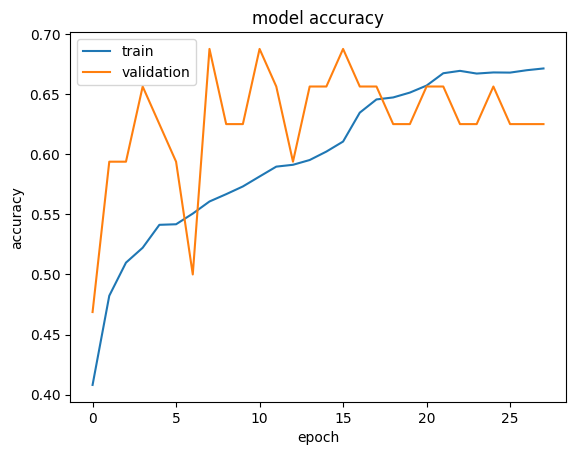

In [39]:
plt.plot(history_vgg.history["accuracy"])
plt.plot(history_vgg.history["val_accuracy"])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train", "validation"], loc="upper left")
plt.show()

### **Evaluating the VGG16 model**


In [40]:
# Calculate the number of steps for the entire test set to be processed
test_steps = test_generator.samples // batch_size

# If the number of samples isn't a multiple of the batch size,
# you have one more batch with the remaining samples
if test_generator.samples % batch_size > 0:
    test_steps += 1

# Evaluating the model on the test set
evaluation_results = new_vgg16_model.evaluate(test_generator, steps=test_steps)
print(f"Loss: {evaluation_results[0]}, Accuracy: {evaluation_results[1]}")

1/4 [======>.......................] - ETA: 0s - loss: 1.1525 - accuracy: 0.5000

4/4 [==============================] - 0s 7ms/step - loss: 0.9979 - accuracy: 0.5938


Loss: 0.9979492425918579, Accuracy: 0.59375


### **Plotting Confusion Matrix**


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 5ms/step


              precision    recall  f1-score   support

       happy       0.64      0.50      0.56        32
     neutral       0.38      0.47      0.42        32
         sad       0.55      0.56      0.55        32
    surprise       0.90      0.84      0.87        32

    accuracy                           0.59       128
   macro avg       0.62      0.59      0.60       128
weighted avg       0.62      0.59      0.60       128



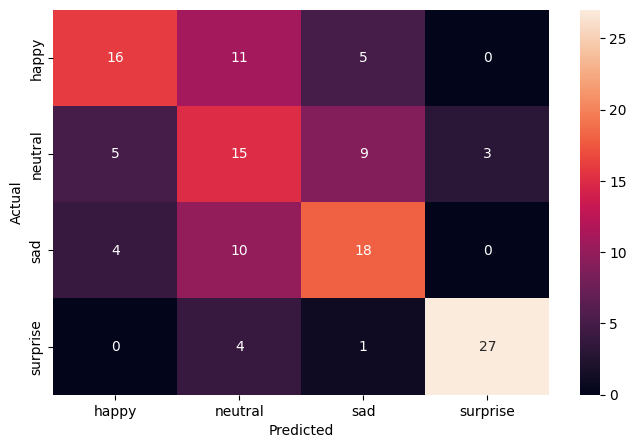

In [41]:
pred_probabilities = new_vgg16_model.predict(test_generator, steps=test_steps)
pred = np.argmax(pred_probabilities, axis=1)

# Getting the true labels from the generator
y_true = test_generator.classes

# Printing the classification report with actual emotion labels
print(classification_report(y_true, pred, target_names=CATEGORIES))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)
plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt=".0f", xticklabels=CATEGORIES, yticklabels=CATEGORIES)
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

**Think About It:**

- What do you infer from the general trend in the training performance?
- Is the training accuracy consistently improving?
- Is the validation accuracy also improving similarly?


**Observations and Insights:\_\_**


**Note: You can even go back and build your own architecture on top of the VGG16 Transfer layer and see if you can improve the performance**


## **ResNet V2 Model**


In [42]:
backend.clear_session()

# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)

random.seed(42)
tf.random.set_seed(42)

In [43]:
resnet_model = ResNet50V2(weights="imagenet", include_top=False, input_shape=(img_width, img_height, color_layers))
# Making all the layers of the VGG model non-trainable. i.e. freezing them
for layer in resnet_model.layers:
    layer.trainable = False

resnet_model.summary()

Model: "resnet50v2"


__________________________________________________________________________________________________


 Layer (type)                Output Shape                 Param #   Connected to                  


 input_1 (InputLayer)        [(None, 48, 48, 3)]          0         []                            


 conv1_pad (ZeroPadding2D)   (None, 54, 54, 3)            0         ['input_1[0][0]']             


 conv1_conv (Conv2D)         (None, 24, 24, 64)           9472      ['conv1_pad[0][0]']           


 pool1_pad (ZeroPadding2D)   (None, 26, 26, 64)           0         ['conv1_conv[0][0]']          


 pool1_pool (MaxPooling2D)   (None, 12, 12, 64)           0         ['pool1_pad[0][0]']           


 conv2_block1_preact_bn (Ba  (None, 12, 12, 64)           256       ['pool1_pool[0][0]']          


 tchNormalization)                                                                                


 conv2_block1_preact_relu (  (None, 12, 12, 64)           0         ['conv2_block1_preact_bn[0][0]


 Activation)                                                        ']                            


 conv2_block1_1_conv (Conv2  (None, 12, 12, 64)           4096      ['conv2_block1_preact_relu[0][


 D)                                                                 0]']                          


 conv2_block1_1_bn (BatchNo  (None, 12, 12, 64)           256       ['conv2_block1_1_conv[0][0]'] 


 rmalization)                                                                                     


 conv2_block1_1_relu (Activ  (None, 12, 12, 64)           0         ['conv2_block1_1_bn[0][0]']   


 ation)                                                                                           


 conv2_block1_2_pad (ZeroPa  (None, 14, 14, 64)           0         ['conv2_block1_1_relu[0][0]'] 


 dding2D)                                                                                         


 conv2_block1_2_conv (Conv2  (None, 12, 12, 64)           36864     ['conv2_block1_2_pad[0][0]']  


 D)                                                                                               


 conv2_block1_2_bn (BatchNo  (None, 12, 12, 64)           256       ['conv2_block1_2_conv[0][0]'] 


 rmalization)                                                                                     


 conv2_block1_2_relu (Activ  (None, 12, 12, 64)           0         ['conv2_block1_2_bn[0][0]']   


 ation)                                                                                           


 conv2_block1_0_conv (Conv2  (None, 12, 12, 256)          16640     ['conv2_block1_preact_relu[0][


 D)                                                                 0]']                          


 conv2_block1_3_conv (Conv2  (None, 12, 12, 256)          16640     ['conv2_block1_2_relu[0][0]'] 


 D)                                                                                               


 conv2_block1_out (Add)      (None, 12, 12, 256)          0         ['conv2_block1_0_conv[0][0]', 


                                                                     'conv2_block1_3_conv[0][0]'] 


 conv2_block2_preact_bn (Ba  (None, 12, 12, 256)          1024      ['conv2_block1_out[0][0]']    


 tchNormalization)                                                                                


 conv2_block2_preact_relu (  (None, 12, 12, 256)          0         ['conv2_block2_preact_bn[0][0]


 Activation)                                                        ']                            


 conv2_block2_1_conv (Conv2  (None, 12, 12, 64)           16384     ['conv2_block2_preact_relu[0][


 D)                                                                 0]']                          


 conv2_block2_1_bn (BatchNo  (None, 12, 12, 64)           256       ['conv2_block2_1_conv[0][0]'] 


 rmalization)                                                                                     


 conv2_block2_1_relu (Activ  (None, 12, 12, 64)           0         ['conv2_block2_1_bn[0][0]']   


 ation)                                                                                           


 conv2_block2_2_pad (ZeroPa  (None, 14, 14, 64)           0         ['conv2_block2_1_relu[0][0]'] 


 dding2D)                                                                                         


 conv2_block2_2_conv (Conv2  (None, 12, 12, 64)           36864     ['conv2_block2_2_pad[0][0]']  


 D)                                                                                               


 conv2_block2_2_bn (BatchNo  (None, 12, 12, 64)           256       ['conv2_block2_2_conv[0][0]'] 


 rmalization)                                                                                     


 conv2_block2_2_relu (Activ  (None, 12, 12, 64)           0         ['conv2_block2_2_bn[0][0]']   


 ation)                                                                                           


 conv2_block2_3_conv (Conv2  (None, 12, 12, 256)          16640     ['conv2_block2_2_relu[0][0]'] 


 D)                                                                                               


 conv2_block2_out (Add)      (None, 12, 12, 256)          0         ['conv2_block1_out[0][0]',    


                                                                     'conv2_block2_3_conv[0][0]'] 


 conv2_block3_preact_bn (Ba  (None, 12, 12, 256)          1024      ['conv2_block2_out[0][0]']    


 tchNormalization)                                                                                


 conv2_block3_preact_relu (  (None, 12, 12, 256)          0         ['conv2_block3_preact_bn[0][0]


 Activation)                                                        ']                            


 conv2_block3_1_conv (Conv2  (None, 12, 12, 64)           16384     ['conv2_block3_preact_relu[0][


 D)                                                                 0]']                          


 conv2_block3_1_bn (BatchNo  (None, 12, 12, 64)           256       ['conv2_block3_1_conv[0][0]'] 


 rmalization)                                                                                     


 conv2_block3_1_relu (Activ  (None, 12, 12, 64)           0         ['conv2_block3_1_bn[0][0]']   


 ation)                                                                                           


 conv2_block3_2_pad (ZeroPa  (None, 14, 14, 64)           0         ['conv2_block3_1_relu[0][0]'] 


 dding2D)                                                                                         


 conv2_block3_2_conv (Conv2  (None, 6, 6, 64)             36864     ['conv2_block3_2_pad[0][0]']  


 D)                                                                                               


 conv2_block3_2_bn (BatchNo  (None, 6, 6, 64)             256       ['conv2_block3_2_conv[0][0]'] 


 rmalization)                                                                                     


 conv2_block3_2_relu (Activ  (None, 6, 6, 64)             0         ['conv2_block3_2_bn[0][0]']   


 ation)                                                                                           


 max_pooling2d (MaxPooling2  (None, 6, 6, 256)            0         ['conv2_block2_out[0][0]']    


 D)                                                                                               


 conv2_block3_3_conv (Conv2  (None, 6, 6, 256)            16640     ['conv2_block3_2_relu[0][0]'] 


 D)                                                                                               


 conv2_block3_out (Add)      (None, 6, 6, 256)            0         ['max_pooling2d[0][0]',       


                                                                     'conv2_block3_3_conv[0][0]'] 


 conv3_block1_preact_bn (Ba  (None, 6, 6, 256)            1024      ['conv2_block3_out[0][0]']    


 tchNormalization)                                                                                


 conv3_block1_preact_relu (  (None, 6, 6, 256)            0         ['conv3_block1_preact_bn[0][0]


 Activation)                                                        ']                            


 conv3_block1_1_conv (Conv2  (None, 6, 6, 128)            32768     ['conv3_block1_preact_relu[0][


 D)                                                                 0]']                          


 conv3_block1_1_bn (BatchNo  (None, 6, 6, 128)            512       ['conv3_block1_1_conv[0][0]'] 


 rmalization)                                                                                     


 conv3_block1_1_relu (Activ  (None, 6, 6, 128)            0         ['conv3_block1_1_bn[0][0]']   


 ation)                                                                                           


 conv3_block1_2_pad (ZeroPa  (None, 8, 8, 128)            0         ['conv3_block1_1_relu[0][0]'] 


 dding2D)                                                                                         


 conv3_block1_2_conv (Conv2  (None, 6, 6, 128)            147456    ['conv3_block1_2_pad[0][0]']  


 D)                                                                                               


 conv3_block1_2_bn (BatchNo  (None, 6, 6, 128)            512       ['conv3_block1_2_conv[0][0]'] 


 rmalization)                                                                                     


 conv3_block1_2_relu (Activ  (None, 6, 6, 128)            0         ['conv3_block1_2_bn[0][0]']   


 ation)                                                                                           


 conv3_block1_0_conv (Conv2  (None, 6, 6, 512)            131584    ['conv3_block1_preact_relu[0][


 D)                                                                 0]']                          


 conv3_block1_3_conv (Conv2  (None, 6, 6, 512)            66048     ['conv3_block1_2_relu[0][0]'] 


 D)                                                                                               


 conv3_block1_out (Add)      (None, 6, 6, 512)            0         ['conv3_block1_0_conv[0][0]', 


                                                                     'conv3_block1_3_conv[0][0]'] 


 conv3_block2_preact_bn (Ba  (None, 6, 6, 512)            2048      ['conv3_block1_out[0][0]']    


 tchNormalization)                                                                                


 conv3_block2_preact_relu (  (None, 6, 6, 512)            0         ['conv3_block2_preact_bn[0][0]


 Activation)                                                        ']                            


 conv3_block2_1_conv (Conv2  (None, 6, 6, 128)            65536     ['conv3_block2_preact_relu[0][


 D)                                                                 0]']                          


 conv3_block2_1_bn (BatchNo  (None, 6, 6, 128)            512       ['conv3_block2_1_conv[0][0]'] 


 rmalization)                                                                                     


 conv3_block2_1_relu (Activ  (None, 6, 6, 128)            0         ['conv3_block2_1_bn[0][0]']   


 ation)                                                                                           


 conv3_block2_2_pad (ZeroPa  (None, 8, 8, 128)            0         ['conv3_block2_1_relu[0][0]'] 


 dding2D)                                                                                         


 conv3_block2_2_conv (Conv2  (None, 6, 6, 128)            147456    ['conv3_block2_2_pad[0][0]']  


 D)                                                                                               


 conv3_block2_2_bn (BatchNo  (None, 6, 6, 128)            512       ['conv3_block2_2_conv[0][0]'] 


 rmalization)                                                                                     


 conv3_block2_2_relu (Activ  (None, 6, 6, 128)            0         ['conv3_block2_2_bn[0][0]']   


 ation)                                                                                           


 conv3_block2_3_conv (Conv2  (None, 6, 6, 512)            66048     ['conv3_block2_2_relu[0][0]'] 


 D)                                                                                               


 conv3_block2_out (Add)      (None, 6, 6, 512)            0         ['conv3_block1_out[0][0]',    


                                                                     'conv3_block2_3_conv[0][0]'] 


 conv3_block3_preact_bn (Ba  (None, 6, 6, 512)            2048      ['conv3_block2_out[0][0]']    


 tchNormalization)                                                                                


 conv3_block3_preact_relu (  (None, 6, 6, 512)            0         ['conv3_block3_preact_bn[0][0]


 Activation)                                                        ']                            


 conv3_block3_1_conv (Conv2  (None, 6, 6, 128)            65536     ['conv3_block3_preact_relu[0][


 D)                                                                 0]']                          


 conv3_block3_1_bn (BatchNo  (None, 6, 6, 128)            512       ['conv3_block3_1_conv[0][0]'] 


 rmalization)                                                                                     


 conv3_block3_1_relu (Activ  (None, 6, 6, 128)            0         ['conv3_block3_1_bn[0][0]']   


 ation)                                                                                           


 conv3_block3_2_pad (ZeroPa  (None, 8, 8, 128)            0         ['conv3_block3_1_relu[0][0]'] 


 dding2D)                                                                                         


 conv3_block3_2_conv (Conv2  (None, 6, 6, 128)            147456    ['conv3_block3_2_pad[0][0]']  


 D)                                                                                               


 conv3_block3_2_bn (BatchNo  (None, 6, 6, 128)            512       ['conv3_block3_2_conv[0][0]'] 


 rmalization)                                                                                     


 conv3_block3_2_relu (Activ  (None, 6, 6, 128)            0         ['conv3_block3_2_bn[0][0]']   


 ation)                                                                                           


 conv3_block3_3_conv (Conv2  (None, 6, 6, 512)            66048     ['conv3_block3_2_relu[0][0]'] 


 D)                                                                                               


 conv3_block3_out (Add)      (None, 6, 6, 512)            0         ['conv3_block2_out[0][0]',    


                                                                     'conv3_block3_3_conv[0][0]'] 


 conv3_block4_preact_bn (Ba  (None, 6, 6, 512)            2048      ['conv3_block3_out[0][0]']    


 tchNormalization)                                                                                


 conv3_block4_preact_relu (  (None, 6, 6, 512)            0         ['conv3_block4_preact_bn[0][0]


 Activation)                                                        ']                            


 conv3_block4_1_conv (Conv2  (None, 6, 6, 128)            65536     ['conv3_block4_preact_relu[0][


 D)                                                                 0]']                          


 conv3_block4_1_bn (BatchNo  (None, 6, 6, 128)            512       ['conv3_block4_1_conv[0][0]'] 


 rmalization)                                                                                     


 conv3_block4_1_relu (Activ  (None, 6, 6, 128)            0         ['conv3_block4_1_bn[0][0]']   


 ation)                                                                                           


 conv3_block4_2_pad (ZeroPa  (None, 8, 8, 128)            0         ['conv3_block4_1_relu[0][0]'] 


 dding2D)                                                                                         


 conv3_block4_2_conv (Conv2  (None, 3, 3, 128)            147456    ['conv3_block4_2_pad[0][0]']  


 D)                                                                                               


 conv3_block4_2_bn (BatchNo  (None, 3, 3, 128)            512       ['conv3_block4_2_conv[0][0]'] 


 rmalization)                                                                                     


 conv3_block4_2_relu (Activ  (None, 3, 3, 128)            0         ['conv3_block4_2_bn[0][0]']   


 ation)                                                                                           


 max_pooling2d_1 (MaxPoolin  (None, 3, 3, 512)            0         ['conv3_block3_out[0][0]']    


 g2D)                                                                                             


 conv3_block4_3_conv (Conv2  (None, 3, 3, 512)            66048     ['conv3_block4_2_relu[0][0]'] 


 D)                                                                                               


 conv3_block4_out (Add)      (None, 3, 3, 512)            0         ['max_pooling2d_1[0][0]',     


                                                                     'conv3_block4_3_conv[0][0]'] 


 conv4_block1_preact_bn (Ba  (None, 3, 3, 512)            2048      ['conv3_block4_out[0][0]']    


 tchNormalization)                                                                                


 conv4_block1_preact_relu (  (None, 3, 3, 512)            0         ['conv4_block1_preact_bn[0][0]


 Activation)                                                        ']                            


 conv4_block1_1_conv (Conv2  (None, 3, 3, 256)            131072    ['conv4_block1_preact_relu[0][


 D)                                                                 0]']                          


 conv4_block1_1_bn (BatchNo  (None, 3, 3, 256)            1024      ['conv4_block1_1_conv[0][0]'] 


 rmalization)                                                                                     


 conv4_block1_1_relu (Activ  (None, 3, 3, 256)            0         ['conv4_block1_1_bn[0][0]']   


 ation)                                                                                           


 conv4_block1_2_pad (ZeroPa  (None, 5, 5, 256)            0         ['conv4_block1_1_relu[0][0]'] 


 dding2D)                                                                                         


 conv4_block1_2_conv (Conv2  (None, 3, 3, 256)            589824    ['conv4_block1_2_pad[0][0]']  


 D)                                                                                               


 conv4_block1_2_bn (BatchNo  (None, 3, 3, 256)            1024      ['conv4_block1_2_conv[0][0]'] 


 rmalization)                                                                                     


 conv4_block1_2_relu (Activ  (None, 3, 3, 256)            0         ['conv4_block1_2_bn[0][0]']   


 ation)                                                                                           


 conv4_block1_0_conv (Conv2  (None, 3, 3, 1024)           525312    ['conv4_block1_preact_relu[0][


 D)                                                                 0]']                          


 conv4_block1_3_conv (Conv2  (None, 3, 3, 1024)           263168    ['conv4_block1_2_relu[0][0]'] 


 D)                                                                                               


 conv4_block1_out (Add)      (None, 3, 3, 1024)           0         ['conv4_block1_0_conv[0][0]', 


                                                                     'conv4_block1_3_conv[0][0]'] 


 conv4_block2_preact_bn (Ba  (None, 3, 3, 1024)           4096      ['conv4_block1_out[0][0]']    


 tchNormalization)                                                                                


 conv4_block2_preact_relu (  (None, 3, 3, 1024)           0         ['conv4_block2_preact_bn[0][0]


 Activation)                                                        ']                            


 conv4_block2_1_conv (Conv2  (None, 3, 3, 256)            262144    ['conv4_block2_preact_relu[0][


 D)                                                                 0]']                          


 conv4_block2_1_bn (BatchNo  (None, 3, 3, 256)            1024      ['conv4_block2_1_conv[0][0]'] 


 rmalization)                                                                                     


 conv4_block2_1_relu (Activ  (None, 3, 3, 256)            0         ['conv4_block2_1_bn[0][0]']   


 ation)                                                                                           


 conv4_block2_2_pad (ZeroPa  (None, 5, 5, 256)            0         ['conv4_block2_1_relu[0][0]'] 


 dding2D)                                                                                         


 conv4_block2_2_conv (Conv2  (None, 3, 3, 256)            589824    ['conv4_block2_2_pad[0][0]']  


 D)                                                                                               


 conv4_block2_2_bn (BatchNo  (None, 3, 3, 256)            1024      ['conv4_block2_2_conv[0][0]'] 


 rmalization)                                                                                     


 conv4_block2_2_relu (Activ  (None, 3, 3, 256)            0         ['conv4_block2_2_bn[0][0]']   


 ation)                                                                                           


 conv4_block2_3_conv (Conv2  (None, 3, 3, 1024)           263168    ['conv4_block2_2_relu[0][0]'] 


 D)                                                                                               


 conv4_block2_out (Add)      (None, 3, 3, 1024)           0         ['conv4_block1_out[0][0]',    


                                                                     'conv4_block2_3_conv[0][0]'] 


 conv4_block3_preact_bn (Ba  (None, 3, 3, 1024)           4096      ['conv4_block2_out[0][0]']    


 tchNormalization)                                                                                


 conv4_block3_preact_relu (  (None, 3, 3, 1024)           0         ['conv4_block3_preact_bn[0][0]


 Activation)                                                        ']                            


 conv4_block3_1_conv (Conv2  (None, 3, 3, 256)            262144    ['conv4_block3_preact_relu[0][


 D)                                                                 0]']                          


 conv4_block3_1_bn (BatchNo  (None, 3, 3, 256)            1024      ['conv4_block3_1_conv[0][0]'] 


 rmalization)                                                                                     


 conv4_block3_1_relu (Activ  (None, 3, 3, 256)            0         ['conv4_block3_1_bn[0][0]']   


 ation)                                                                                           


 conv4_block3_2_pad (ZeroPa  (None, 5, 5, 256)            0         ['conv4_block3_1_relu[0][0]'] 


 dding2D)                                                                                         


 conv4_block3_2_conv (Conv2  (None, 3, 3, 256)            589824    ['conv4_block3_2_pad[0][0]']  


 D)                                                                                               


 conv4_block3_2_bn (BatchNo  (None, 3, 3, 256)            1024      ['conv4_block3_2_conv[0][0]'] 


 rmalization)                                                                                     


 conv4_block3_2_relu (Activ  (None, 3, 3, 256)            0         ['conv4_block3_2_bn[0][0]']   


 ation)                                                                                           


 conv4_block3_3_conv (Conv2  (None, 3, 3, 1024)           263168    ['conv4_block3_2_relu[0][0]'] 


 D)                                                                                               


 conv4_block3_out (Add)      (None, 3, 3, 1024)           0         ['conv4_block2_out[0][0]',    


                                                                     'conv4_block3_3_conv[0][0]'] 


 conv4_block4_preact_bn (Ba  (None, 3, 3, 1024)           4096      ['conv4_block3_out[0][0]']    


 tchNormalization)                                                                                


 conv4_block4_preact_relu (  (None, 3, 3, 1024)           0         ['conv4_block4_preact_bn[0][0]


 Activation)                                                        ']                            


 conv4_block4_1_conv (Conv2  (None, 3, 3, 256)            262144    ['conv4_block4_preact_relu[0][


 D)                                                                 0]']                          


 conv4_block4_1_bn (BatchNo  (None, 3, 3, 256)            1024      ['conv4_block4_1_conv[0][0]'] 


 rmalization)                                                                                     


 conv4_block4_1_relu (Activ  (None, 3, 3, 256)            0         ['conv4_block4_1_bn[0][0]']   


 ation)                                                                                           


 conv4_block4_2_pad (ZeroPa  (None, 5, 5, 256)            0         ['conv4_block4_1_relu[0][0]'] 


 dding2D)                                                                                         


 conv4_block4_2_conv (Conv2  (None, 3, 3, 256)            589824    ['conv4_block4_2_pad[0][0]']  


 D)                                                                                               


 conv4_block4_2_bn (BatchNo  (None, 3, 3, 256)            1024      ['conv4_block4_2_conv[0][0]'] 


 rmalization)                                                                                     


 conv4_block4_2_relu (Activ  (None, 3, 3, 256)            0         ['conv4_block4_2_bn[0][0]']   


 ation)                                                                                           


 conv4_block4_3_conv (Conv2  (None, 3, 3, 1024)           263168    ['conv4_block4_2_relu[0][0]'] 


 D)                                                                                               


 conv4_block4_out (Add)      (None, 3, 3, 1024)           0         ['conv4_block3_out[0][0]',    


                                                                     'conv4_block4_3_conv[0][0]'] 


 conv4_block5_preact_bn (Ba  (None, 3, 3, 1024)           4096      ['conv4_block4_out[0][0]']    


 tchNormalization)                                                                                


 conv4_block5_preact_relu (  (None, 3, 3, 1024)           0         ['conv4_block5_preact_bn[0][0]


 Activation)                                                        ']                            


 conv4_block5_1_conv (Conv2  (None, 3, 3, 256)            262144    ['conv4_block5_preact_relu[0][


 D)                                                                 0]']                          


 conv4_block5_1_bn (BatchNo  (None, 3, 3, 256)            1024      ['conv4_block5_1_conv[0][0]'] 


 rmalization)                                                                                     


 conv4_block5_1_relu (Activ  (None, 3, 3, 256)            0         ['conv4_block5_1_bn[0][0]']   


 ation)                                                                                           


 conv4_block5_2_pad (ZeroPa  (None, 5, 5, 256)            0         ['conv4_block5_1_relu[0][0]'] 


 dding2D)                                                                                         


 conv4_block5_2_conv (Conv2  (None, 3, 3, 256)            589824    ['conv4_block5_2_pad[0][0]']  


 D)                                                                                               


 conv4_block5_2_bn (BatchNo  (None, 3, 3, 256)            1024      ['conv4_block5_2_conv[0][0]'] 


 rmalization)                                                                                     


 conv4_block5_2_relu (Activ  (None, 3, 3, 256)            0         ['conv4_block5_2_bn[0][0]']   


 ation)                                                                                           


 conv4_block5_3_conv (Conv2  (None, 3, 3, 1024)           263168    ['conv4_block5_2_relu[0][0]'] 


 D)                                                                                               


 conv4_block5_out (Add)      (None, 3, 3, 1024)           0         ['conv4_block4_out[0][0]',    


                                                                     'conv4_block5_3_conv[0][0]'] 


 conv4_block6_preact_bn (Ba  (None, 3, 3, 1024)           4096      ['conv4_block5_out[0][0]']    


 tchNormalization)                                                                                


 conv4_block6_preact_relu (  (None, 3, 3, 1024)           0         ['conv4_block6_preact_bn[0][0]


 Activation)                                                        ']                            


 conv4_block6_1_conv (Conv2  (None, 3, 3, 256)            262144    ['conv4_block6_preact_relu[0][


 D)                                                                 0]']                          


 conv4_block6_1_bn (BatchNo  (None, 3, 3, 256)            1024      ['conv4_block6_1_conv[0][0]'] 


 rmalization)                                                                                     


 conv4_block6_1_relu (Activ  (None, 3, 3, 256)            0         ['conv4_block6_1_bn[0][0]']   


 ation)                                                                                           


 conv4_block6_2_pad (ZeroPa  (None, 5, 5, 256)            0         ['conv4_block6_1_relu[0][0]'] 


 dding2D)                                                                                         


 conv4_block6_2_conv (Conv2  (None, 2, 2, 256)            589824    ['conv4_block6_2_pad[0][0]']  


 D)                                                                                               


 conv4_block6_2_bn (BatchNo  (None, 2, 2, 256)            1024      ['conv4_block6_2_conv[0][0]'] 


 rmalization)                                                                                     


 conv4_block6_2_relu (Activ  (None, 2, 2, 256)            0         ['conv4_block6_2_bn[0][0]']   


 ation)                                                                                           


 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 1024)           0         ['conv4_block5_out[0][0]']    


 g2D)                                                                                             


 conv4_block6_3_conv (Conv2  (None, 2, 2, 1024)           263168    ['conv4_block6_2_relu[0][0]'] 


 D)                                                                                               


 conv4_block6_out (Add)      (None, 2, 2, 1024)           0         ['max_pooling2d_2[0][0]',     


                                                                     'conv4_block6_3_conv[0][0]'] 


 conv5_block1_preact_bn (Ba  (None, 2, 2, 1024)           4096      ['conv4_block6_out[0][0]']    


 tchNormalization)                                                                                


 conv5_block1_preact_relu (  (None, 2, 2, 1024)           0         ['conv5_block1_preact_bn[0][0]


 Activation)                                                        ']                            


 conv5_block1_1_conv (Conv2  (None, 2, 2, 512)            524288    ['conv5_block1_preact_relu[0][


 D)                                                                 0]']                          


 conv5_block1_1_bn (BatchNo  (None, 2, 2, 512)            2048      ['conv5_block1_1_conv[0][0]'] 


 rmalization)                                                                                     


 conv5_block1_1_relu (Activ  (None, 2, 2, 512)            0         ['conv5_block1_1_bn[0][0]']   


 ation)                                                                                           


 conv5_block1_2_pad (ZeroPa  (None, 4, 4, 512)            0         ['conv5_block1_1_relu[0][0]'] 


 dding2D)                                                                                         


 conv5_block1_2_conv (Conv2  (None, 2, 2, 512)            2359296   ['conv5_block1_2_pad[0][0]']  


 D)                                                                                               


 conv5_block1_2_bn (BatchNo  (None, 2, 2, 512)            2048      ['conv5_block1_2_conv[0][0]'] 


 rmalization)                                                                                     


 conv5_block1_2_relu (Activ  (None, 2, 2, 512)            0         ['conv5_block1_2_bn[0][0]']   


 ation)                                                                                           


 conv5_block1_0_conv (Conv2  (None, 2, 2, 2048)           2099200   ['conv5_block1_preact_relu[0][


 D)                                                                 0]']                          


 conv5_block1_3_conv (Conv2  (None, 2, 2, 2048)           1050624   ['conv5_block1_2_relu[0][0]'] 


 D)                                                                                               


 conv5_block1_out (Add)      (None, 2, 2, 2048)           0         ['conv5_block1_0_conv[0][0]', 


                                                                     'conv5_block1_3_conv[0][0]'] 


 conv5_block2_preact_bn (Ba  (None, 2, 2, 2048)           8192      ['conv5_block1_out[0][0]']    


 tchNormalization)                                                                                


 conv5_block2_preact_relu (  (None, 2, 2, 2048)           0         ['conv5_block2_preact_bn[0][0]


 Activation)                                                        ']                            


 conv5_block2_1_conv (Conv2  (None, 2, 2, 512)            1048576   ['conv5_block2_preact_relu[0][


 D)                                                                 0]']                          


 conv5_block2_1_bn (BatchNo  (None, 2, 2, 512)            2048      ['conv5_block2_1_conv[0][0]'] 


 rmalization)                                                                                     


 conv5_block2_1_relu (Activ  (None, 2, 2, 512)            0         ['conv5_block2_1_bn[0][0]']   


 ation)                                                                                           


 conv5_block2_2_pad (ZeroPa  (None, 4, 4, 512)            0         ['conv5_block2_1_relu[0][0]'] 


 dding2D)                                                                                         


 conv5_block2_2_conv (Conv2  (None, 2, 2, 512)            2359296   ['conv5_block2_2_pad[0][0]']  


 D)                                                                                               


 conv5_block2_2_bn (BatchNo  (None, 2, 2, 512)            2048      ['conv5_block2_2_conv[0][0]'] 


 rmalization)                                                                                     


 conv5_block2_2_relu (Activ  (None, 2, 2, 512)            0         ['conv5_block2_2_bn[0][0]']   


 ation)                                                                                           


 conv5_block2_3_conv (Conv2  (None, 2, 2, 2048)           1050624   ['conv5_block2_2_relu[0][0]'] 


 D)                                                                                               


 conv5_block2_out (Add)      (None, 2, 2, 2048)           0         ['conv5_block1_out[0][0]',    


                                                                     'conv5_block2_3_conv[0][0]'] 


 conv5_block3_preact_bn (Ba  (None, 2, 2, 2048)           8192      ['conv5_block2_out[0][0]']    


 tchNormalization)                                                                                


 conv5_block3_preact_relu (  (None, 2, 2, 2048)           0         ['conv5_block3_preact_bn[0][0]


 Activation)                                                        ']                            


 conv5_block3_1_conv (Conv2  (None, 2, 2, 512)            1048576   ['conv5_block3_preact_relu[0][


 D)                                                                 0]']                          


 conv5_block3_1_bn (BatchNo  (None, 2, 2, 512)            2048      ['conv5_block3_1_conv[0][0]'] 


 rmalization)                                                                                     


 conv5_block3_1_relu (Activ  (None, 2, 2, 512)            0         ['conv5_block3_1_bn[0][0]']   


 ation)                                                                                           


 conv5_block3_2_pad (ZeroPa  (None, 4, 4, 512)            0         ['conv5_block3_1_relu[0][0]'] 


 dding2D)                                                                                         


 conv5_block3_2_conv (Conv2  (None, 2, 2, 512)            2359296   ['conv5_block3_2_pad[0][0]']  


 D)                                                                                               


 conv5_block3_2_bn (BatchNo  (None, 2, 2, 512)            2048      ['conv5_block3_2_conv[0][0]'] 


 rmalization)                                                                                     


 conv5_block3_2_relu (Activ  (None, 2, 2, 512)            0         ['conv5_block3_2_bn[0][0]']   


 ation)                                                                                           


 conv5_block3_3_conv (Conv2  (None, 2, 2, 2048)           1050624   ['conv5_block3_2_relu[0][0]'] 


 D)                                                                                               


 conv5_block3_out (Add)      (None, 2, 2, 2048)           0         ['conv5_block2_out[0][0]',    


                                                                     'conv5_block3_3_conv[0][0]'] 


 post_bn (BatchNormalizatio  (None, 2, 2, 2048)           8192      ['conv5_block3_out[0][0]']    


 n)                                                                                               


 post_relu (Activation)      (None, 2, 2, 2048)           0         ['post_bn[0][0]']             


Total params: 23564800 (89.89 MB)


Trainable params: 0 (0.00 Byte)


Non-trainable params: 23564800 (89.89 MB)


__________________________________________________________________________________________________


### **Model Building**

- Import Resnet v2 upto the layer of your choice and add Fully Connected layers on top of it.


In [44]:
new_resnet_model = Sequential()
new_resnet_model.add(resnet_model)

# Reduces each feature map to a single value by averaging all elements
new_resnet_model.add(GlobalAveragePooling2D())

# Adding a dense output layer
new_resnet_model.add(Dense(512, activation="relu"))
new_resnet_model.add(Dropout(0.5))
new_resnet_model.add(Dense(128, activation="relu"))
new_resnet_model.add(Dropout(0.5))
new_resnet_model.add(Dense(4, activation="softmax"))

# Using Adam Optimizer
optimizer = Adam(learning_rate=0.0005)

### **Compiling and Training the Model**


In [45]:
new_resnet_model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])
new_resnet_model.summary()

Model: "sequential"


_________________________________________________________________


 Layer (type)                Output Shape              Param #   


 resnet50v2 (Functional)     (None, 2, 2, 2048)        23564800  


 global_average_pooling2d (  (None, 2048)              0         


 GlobalAveragePooling2D)                                         


 dense (Dense)               (None, 512)               1049088   


 dropout (Dropout)           (None, 512)               0         


 dense_1 (Dense)             (None, 128)               65664     


 dropout_1 (Dropout)         (None, 128)               0         


 dense_2 (Dense)             (None, 4)                 516       


Total params: 24680068 (94.15 MB)


Trainable params: 1115268 (4.25 MB)


Non-trainable params: 23564800 (89.89 MB)


_________________________________________________________________


In [46]:
# Get the current time
current_time = datetime.now().strftime("%Y%m%d-%H%M%S")

# Set up Early Stopping with a patience 7 but acting after at least 20 epochs
delayed_early_stopping = DelayedEarlyStopping(
    monitor="val_loss", patience=7, verbose=1, restore_best_weights=True, start_epoch=20
)

# Define the learning rate scheduler callback
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.2, patience=5, min_lr=0.00001, verbose=1)

mc = ModelCheckpoint(
    f"{results_path}/best_model_resnet_{current_time}.keras",
    monitor="val_accuracy",
    mode="max",
    verbose=1,
    save_best_only=True,
)

# Pulling a single large batch of random validation data for doing the validation after each epoch
validationX, validationY = validation_generator.next()

# Fitting the model with 40 epochs and using validation set
history_resnet = new_resnet_model.fit(
    train_generator,
    epochs=40,
    validation_data=(validationX, validationY),
    callbacks=[delayed_early_stopping, mc, reduce_lr],
)

Epoch 1/40


  1/473 [..............................] - ETA: 16:22 - loss: 4.5119 - accuracy: 0.2812

 11/473 [..............................] - ETA: 2s - loss: 3.0955 - accuracy: 0.2557   

 21/473 [>.............................] - ETA: 2s - loss: 2.9143 - accuracy: 0.2574

 28/473 [>.............................] - ETA: 2s - loss: 2.6835 - accuracy: 0.2790

 34/473 [=>............................] - ETA: 2s - loss: 2.5610 - accuracy: 0.2849

 41/473 [=>............................] - ETA: 2s - loss: 2.4334 - accuracy: 0.2866

 51/473 [==>...........................] - ETA: 2s - loss: 2.3047 - accuracy: 0.2911

 61/473 [==>...........................] - ETA: 2s - loss: 2.2132 - accuracy: 0.2930

 71/473 [===>..........................] - ETA: 2s - loss: 2.1229 - accuracy: 0.2989

 81/473 [====>.........................] - ETA: 2s - loss: 2.0477 - accuracy: 0.3021

 90/473 [====>.........................] - ETA: 2s - loss: 1.9988 - accuracy: 0.3017

 99/473 [=====>........................] - ETA: 2s - loss: 1.9524 - accuracy: 0.3065

109/473 [=====>........................] - ETA: 2s - loss: 1.9136 - accuracy: 0.3036

117/473 [======>.......................] - ETA: 2s - loss: 1.8804 - accuracy: 0.3066

125/473 [======>.......................] - ETA: 2s - loss: 1.8484 - accuracy: 0.3100

135/473 [=======>......................] - ETA: 2s - loss: 1.8191 - accuracy: 0.3095

145/473 [========>.....................] - ETA: 1s - loss: 1.7897 - accuracy: 0.3110

155/473 [========>.....................] - ETA: 1s - loss: 1.7630 - accuracy: 0.3127

163/473 [=========>....................] - ETA: 2s - loss: 1.7432 - accuracy: 0.3178

172/473 [=========>....................] - ETA: 2s - loss: 1.7266 - accuracy: 0.3197

182/473 [==========>...................] - ETA: 2s - loss: 1.7118 - accuracy: 0.3210

192/473 [===========>..................] - ETA: 2s - loss: 1.6975 - accuracy: 0.3222

202/473 [===========>..................] - ETA: 2s - loss: 1.6818 - accuracy: 0.3262

212/473 [============>.................] - ETA: 1s - loss: 1.6686 - accuracy: 0.3260

222/473 [=============>................] - ETA: 1s - loss: 1.6552 - accuracy: 0.3270

232/473 [=============>................] - ETA: 1s - loss: 1.6434 - accuracy: 0.3257

242/473 [==============>...............] - ETA: 1s - loss: 1.6299 - accuracy: 0.3272

252/473 [==============>...............] - ETA: 1s - loss: 1.6193 - accuracy: 0.3284

262/473 [===============>..............] - ETA: 1s - loss: 1.6079 - accuracy: 0.3299

272/473 [================>.............] - ETA: 1s - loss: 1.5992 - accuracy: 0.3306

282/473 [================>.............] - ETA: 1s - loss: 1.5904 - accuracy: 0.3338

292/473 [=================>............] - ETA: 1s - loss: 1.5841 - accuracy: 0.3335

302/473 [==================>...........] - ETA: 1s - loss: 1.5742 - accuracy: 0.3352

312/473 [==================>...........] - ETA: 1s - loss: 1.5672 - accuracy: 0.3351

322/473 [===================>..........] - ETA: 1s - loss: 1.5598 - accuracy: 0.3360

332/473 [====================>.........] - ETA: 0s - loss: 1.5528 - accuracy: 0.3371

342/473 [====================>.........] - ETA: 0s - loss: 1.5455 - accuracy: 0.3385

352/473 [=====================>........] - ETA: 0s - loss: 1.5401 - accuracy: 0.3403

362/473 [=====================>........] - ETA: 0s - loss: 1.5347 - accuracy: 0.3412

372/473 [======================>.......] - ETA: 0s - loss: 1.5303 - accuracy: 0.3412

382/473 [=======================>......] - ETA: 0s - loss: 1.5251 - accuracy: 0.3425

392/473 [=======================>......] - ETA: 0s - loss: 1.5192 - accuracy: 0.3434

401/473 [========================>.....] - ETA: 0s - loss: 1.5146 - accuracy: 0.3443

411/473 [=========================>....] - ETA: 0s - loss: 1.5090 - accuracy: 0.3462

421/473 [=========================>....] - ETA: 0s - loss: 1.5051 - accuracy: 0.3459

431/473 [==========================>...] - ETA: 0s - loss: 1.5004 - accuracy: 0.3473

440/473 [==========================>...] - ETA: 0s - loss: 1.4974 - accuracy: 0.3473

449/473 [===========================>..] - ETA: 0s - loss: 1.4939 - accuracy: 0.3480

456/473 [===========================>..] - ETA: 0s - loss: 1.4909 - accuracy: 0.3482

466/473 [============================>.] - ETA: 0s - loss: 1.4862 - accuracy: 0.3495


Epoch 1: val_accuracy improved from -inf to 0.34375, saving model to /home/iamtxena/sandbox/mit-ai/capstone/Facial_Emotion_Recognition/results/best_model_resnet_20240320-071515.keras


473/473 [==============================] - 6s 8ms/step - loss: 1.4838 - accuracy: 0.3497 - val_loss: 1.3523 - val_accuracy: 0.3438 - lr: 5.0000e-04


Epoch 2/40


  1/473 [..............................] - ETA: 6s - loss: 1.2734 - accuracy: 0.4375

 10/473 [..............................] - ETA: 2s - loss: 1.2489 - accuracy: 0.3906

 20/473 [>.............................] - ETA: 2s - loss: 1.2596 - accuracy: 0.4047

 29/473 [>.............................] - ETA: 2s - loss: 1.2628 - accuracy: 0.4084

 39/473 [=>............................] - ETA: 2s - loss: 1.2727 - accuracy: 0.3998

 48/473 [==>...........................] - ETA: 2s - loss: 1.2740 - accuracy: 0.4023

 55/473 [==>...........................] - ETA: 2s - loss: 1.2772 - accuracy: 0.4034

 63/473 [==>...........................] - ETA: 2s - loss: 1.2756 - accuracy: 0.4087

 73/473 [===>..........................] - ETA: 2s - loss: 1.2739 - accuracy: 0.4118

 83/473 [====>.........................] - ETA: 2s - loss: 1.2705 - accuracy: 0.4108

 93/473 [====>.........................] - ETA: 2s - loss: 1.2679 - accuracy: 0.4163

103/473 [=====>........................] - ETA: 2s - loss: 1.2693 - accuracy: 0.4141

113/473 [======>.......................] - ETA: 2s - loss: 1.2668 - accuracy: 0.4159

123/473 [======>.......................] - ETA: 1s - loss: 1.2646 - accuracy: 0.4167

133/473 [=======>......................] - ETA: 1s - loss: 1.2632 - accuracy: 0.4173

143/473 [========>.....................] - ETA: 1s - loss: 1.2626 - accuracy: 0.4156

153/473 [========>.....................] - ETA: 1s - loss: 1.2646 - accuracy: 0.4158

162/473 [=========>....................] - ETA: 1s - loss: 1.2661 - accuracy: 0.4159

170/473 [=========>....................] - ETA: 1s - loss: 1.2644 - accuracy: 0.4147

178/473 [==========>...................] - ETA: 1s - loss: 1.2628 - accuracy: 0.4163

186/473 [==========>...................] - ETA: 1s - loss: 1.2629 - accuracy: 0.4160

196/473 [===========>..................] - ETA: 1s - loss: 1.2620 - accuracy: 0.4170

206/473 [============>.................] - ETA: 1s - loss: 1.2622 - accuracy: 0.4161

216/473 [============>.................] - ETA: 1s - loss: 1.2615 - accuracy: 0.4167

226/473 [=============>................] - ETA: 1s - loss: 1.2618 - accuracy: 0.4190

236/473 [=============>................] - ETA: 1s - loss: 1.2641 - accuracy: 0.4194

246/473 [==============>...............] - ETA: 1s - loss: 1.2623 - accuracy: 0.4207

256/473 [===============>..............] - ETA: 1s - loss: 1.2599 - accuracy: 0.4222

266/473 [===============>..............] - ETA: 1s - loss: 1.2587 - accuracy: 0.4232

276/473 [================>.............] - ETA: 1s - loss: 1.2581 - accuracy: 0.4234

286/473 [=================>............] - ETA: 1s - loss: 1.2589 - accuracy: 0.4237

296/473 [=================>............] - ETA: 0s - loss: 1.2571 - accuracy: 0.4237

306/473 [==================>...........] - ETA: 0s - loss: 1.2561 - accuracy: 0.4247

315/473 [==================>...........] - ETA: 0s - loss: 1.2548 - accuracy: 0.4259

324/473 [===================>..........] - ETA: 0s - loss: 1.2560 - accuracy: 0.4267

333/473 [====================>.........] - ETA: 0s - loss: 1.2568 - accuracy: 0.4264

341/473 [====================>.........] - ETA: 0s - loss: 1.2554 - accuracy: 0.4278

350/473 [=====================>........] - ETA: 0s - loss: 1.2549 - accuracy: 0.4285

358/473 [=====================>........] - ETA: 0s - loss: 1.2550 - accuracy: 0.4282

366/473 [======================>.......] - ETA: 0s - loss: 1.2558 - accuracy: 0.4287

374/473 [======================>.......] - ETA: 0s - loss: 1.2548 - accuracy: 0.4287

383/473 [=======================>......] - ETA: 0s - loss: 1.2549 - accuracy: 0.4283

393/473 [=======================>......] - ETA: 0s - loss: 1.2548 - accuracy: 0.4285

403/473 [========================>.....] - ETA: 0s - loss: 1.2556 - accuracy: 0.4283

413/473 [=========================>....] - ETA: 0s - loss: 1.2557 - accuracy: 0.4279

423/473 [=========================>....] - ETA: 0s - loss: 1.2547 - accuracy: 0.4282

432/473 [==========================>...] - ETA: 0s - loss: 1.2554 - accuracy: 0.4281

441/473 [==========================>...] - ETA: 0s - loss: 1.2545 - accuracy: 0.4282

449/473 [===========================>..] - ETA: 0s - loss: 1.2553 - accuracy: 0.4277

458/473 [============================>.] - ETA: 0s - loss: 1.2536 - accuracy: 0.4283

467/473 [============================>.] - ETA: 0s - loss: 1.2531 - accuracy: 0.4289


Epoch 2: val_accuracy improved from 0.34375 to 0.37500, saving model to /home/iamtxena/sandbox/mit-ai/capstone/Facial_Emotion_Recognition/results/best_model_resnet_20240320-071515.keras


473/473 [==============================] - 3s 7ms/step - loss: 1.2521 - accuracy: 0.4293 - val_loss: 1.3220 - val_accuracy: 0.3750 - lr: 5.0000e-04


Epoch 3/40


  1/473 [..............................] - ETA: 7s - loss: 1.3870 - accuracy: 0.3125

 11/473 [..............................] - ETA: 2s - loss: 1.2735 - accuracy: 0.4318

 21/473 [>.............................] - ETA: 2s - loss: 1.2446 - accuracy: 0.4539

 31/473 [>.............................] - ETA: 2s - loss: 1.2400 - accuracy: 0.4435

 41/473 [=>............................] - ETA: 2s - loss: 1.2530 - accuracy: 0.4405

 51/473 [==>...........................] - ETA: 2s - loss: 1.2375 - accuracy: 0.4479

 61/473 [==>...........................] - ETA: 2s - loss: 1.2290 - accuracy: 0.4539

 71/473 [===>..........................] - ETA: 2s - loss: 1.2263 - accuracy: 0.4520

 81/473 [====>.........................] - ETA: 2s - loss: 1.2242 - accuracy: 0.4533

 91/473 [====>.........................] - ETA: 2s - loss: 1.2262 - accuracy: 0.4495

101/473 [=====>........................] - ETA: 1s - loss: 1.2263 - accuracy: 0.4502

110/473 [=====>........................] - ETA: 1s - loss: 1.2292 - accuracy: 0.4511

120/473 [======>.......................] - ETA: 1s - loss: 1.2246 - accuracy: 0.4534

130/473 [=======>......................] - ETA: 1s - loss: 1.2262 - accuracy: 0.4490

140/473 [=======>......................] - ETA: 1s - loss: 1.2239 - accuracy: 0.4484

150/473 [========>.....................] - ETA: 1s - loss: 1.2252 - accuracy: 0.4521

160/473 [=========>....................] - ETA: 1s - loss: 1.2238 - accuracy: 0.4521

170/473 [=========>....................] - ETA: 1s - loss: 1.2238 - accuracy: 0.4524

180/473 [==========>...................] - ETA: 1s - loss: 1.2249 - accuracy: 0.4547

190/473 [===========>..................] - ETA: 1s - loss: 1.2212 - accuracy: 0.4571

200/473 [===========>..................] - ETA: 1s - loss: 1.2188 - accuracy: 0.4589

210/473 [============>.................] - ETA: 1s - loss: 1.2167 - accuracy: 0.4588

220/473 [============>.................] - ETA: 1s - loss: 1.2137 - accuracy: 0.4592

230/473 [=============>................] - ETA: 1s - loss: 1.2134 - accuracy: 0.4575

240/473 [==============>...............] - ETA: 1s - loss: 1.2110 - accuracy: 0.4590

250/473 [==============>...............] - ETA: 1s - loss: 1.2100 - accuracy: 0.4602

260/473 [===============>..............] - ETA: 1s - loss: 1.2088 - accuracy: 0.4609

270/473 [================>.............] - ETA: 1s - loss: 1.2098 - accuracy: 0.4603

278/473 [================>.............] - ETA: 1s - loss: 1.2087 - accuracy: 0.4593

286/473 [=================>............] - ETA: 1s - loss: 1.2084 - accuracy: 0.4594

293/473 [=================>............] - ETA: 0s - loss: 1.2072 - accuracy: 0.4603

303/473 [==================>...........] - ETA: 0s - loss: 1.2105 - accuracy: 0.4603

313/473 [==================>...........] - ETA: 0s - loss: 1.2070 - accuracy: 0.4611

323/473 [===================>..........] - ETA: 0s - loss: 1.2072 - accuracy: 0.4613

333/473 [====================>.........] - ETA: 0s - loss: 1.2072 - accuracy: 0.4613

343/473 [====================>.........] - ETA: 0s - loss: 1.2075 - accuracy: 0.4613

353/473 [=====================>........] - ETA: 0s - loss: 1.2067 - accuracy: 0.4618

362/473 [=====================>........] - ETA: 0s - loss: 1.2073 - accuracy: 0.4619

372/473 [======================>.......] - ETA: 0s - loss: 1.2043 - accuracy: 0.4627

382/473 [=======================>......] - ETA: 0s - loss: 1.2038 - accuracy: 0.4630

391/473 [=======================>......] - ETA: 0s - loss: 1.2029 - accuracy: 0.4635

398/473 [========================>.....] - ETA: 0s - loss: 1.2041 - accuracy: 0.4631

406/473 [========================>.....] - ETA: 0s - loss: 1.2037 - accuracy: 0.4637

412/473 [=========================>....] - ETA: 0s - loss: 1.2032 - accuracy: 0.4641

419/473 [=========================>....] - ETA: 0s - loss: 1.2031 - accuracy: 0.4638

426/473 [==========================>...] - ETA: 0s - loss: 1.2017 - accuracy: 0.4648

435/473 [==========================>...] - ETA: 0s - loss: 1.2016 - accuracy: 0.4653

445/473 [===========================>..] - ETA: 0s - loss: 1.1996 - accuracy: 0.4663

455/473 [===========================>..] - ETA: 0s - loss: 1.1997 - accuracy: 0.4655

465/473 [============================>.] - ETA: 0s - loss: 1.2007 - accuracy: 0.4647


Epoch 3: val_accuracy improved from 0.37500 to 0.40625, saving model to /home/iamtxena/sandbox/mit-ai/capstone/Facial_Emotion_Recognition/results/best_model_resnet_20240320-071515.keras


473/473 [==============================] - 3s 7ms/step - loss: 1.2004 - accuracy: 0.4648 - val_loss: 1.3030 - val_accuracy: 0.4062 - lr: 5.0000e-04


Epoch 4/40


  1/473 [..............................] - ETA: 8s - loss: 1.3929 - accuracy: 0.4688

 11/473 [..............................] - ETA: 2s - loss: 1.2355 - accuracy: 0.4545

 20/473 [>.............................] - ETA: 2s - loss: 1.2165 - accuracy: 0.4797

 29/473 [>.............................] - ETA: 2s - loss: 1.2180 - accuracy: 0.4806

 39/473 [=>............................] - ETA: 2s - loss: 1.2009 - accuracy: 0.4808

 49/473 [==>...........................] - ETA: 2s - loss: 1.1987 - accuracy: 0.4770

 59/473 [==>...........................] - ETA: 2s - loss: 1.1959 - accuracy: 0.4799

 67/473 [===>..........................] - ETA: 2s - loss: 1.1919 - accuracy: 0.4799

 75/473 [===>..........................] - ETA: 2s - loss: 1.1886 - accuracy: 0.4800

 85/473 [====>.........................] - ETA: 2s - loss: 1.1953 - accuracy: 0.4728

 93/473 [====>.........................] - ETA: 2s - loss: 1.1885 - accuracy: 0.4772

102/473 [=====>........................] - ETA: 2s - loss: 1.1889 - accuracy: 0.4746

112/473 [======>.......................] - ETA: 2s - loss: 1.1847 - accuracy: 0.4724

122/473 [======>.......................] - ETA: 1s - loss: 1.1841 - accuracy: 0.4725

132/473 [=======>......................] - ETA: 1s - loss: 1.1843 - accuracy: 0.4751

141/473 [=======>......................] - ETA: 1s - loss: 1.1849 - accuracy: 0.4738

149/473 [========>.....................] - ETA: 1s - loss: 1.1854 - accuracy: 0.4748

159/473 [=========>....................] - ETA: 1s - loss: 1.1868 - accuracy: 0.4740

169/473 [=========>....................] - ETA: 1s - loss: 1.1826 - accuracy: 0.4746

179/473 [==========>...................] - ETA: 1s - loss: 1.1785 - accuracy: 0.4785

189/473 [==========>...................] - ETA: 1s - loss: 1.1782 - accuracy: 0.4802

199/473 [===========>..................] - ETA: 1s - loss: 1.1793 - accuracy: 0.4796

209/473 [============>.................] - ETA: 1s - loss: 1.1791 - accuracy: 0.4801

219/473 [============>.................] - ETA: 1s - loss: 1.1777 - accuracy: 0.4810

229/473 [=============>................] - ETA: 1s - loss: 1.1757 - accuracy: 0.4819

239/473 [==============>...............] - ETA: 1s - loss: 1.1753 - accuracy: 0.4830

248/473 [==============>...............] - ETA: 1s - loss: 1.1743 - accuracy: 0.4840

257/473 [===============>..............] - ETA: 1s - loss: 1.1732 - accuracy: 0.4840

265/473 [===============>..............] - ETA: 1s - loss: 1.1736 - accuracy: 0.4823

272/473 [================>.............] - ETA: 1s - loss: 1.1736 - accuracy: 0.4837

282/473 [================>.............] - ETA: 1s - loss: 1.1724 - accuracy: 0.4847

292/473 [=================>............] - ETA: 1s - loss: 1.1723 - accuracy: 0.4842

302/473 [==================>...........] - ETA: 0s - loss: 1.1727 - accuracy: 0.4834

312/473 [==================>...........] - ETA: 0s - loss: 1.1731 - accuracy: 0.4834

321/473 [===================>..........] - ETA: 0s - loss: 1.1731 - accuracy: 0.4837

331/473 [===================>..........] - ETA: 0s - loss: 1.1720 - accuracy: 0.4836

341/473 [====================>.........] - ETA: 0s - loss: 1.1686 - accuracy: 0.4861

351/473 [=====================>........] - ETA: 0s - loss: 1.1684 - accuracy: 0.4864

361/473 [=====================>........] - ETA: 0s - loss: 1.1678 - accuracy: 0.4868

371/473 [======================>.......] - ETA: 0s - loss: 1.1657 - accuracy: 0.4877

381/473 [=======================>......] - ETA: 0s - loss: 1.1652 - accuracy: 0.4892

391/473 [=======================>......] - ETA: 0s - loss: 1.1650 - accuracy: 0.4893

399/473 [========================>.....] - ETA: 0s - loss: 1.1635 - accuracy: 0.4905

407/473 [========================>.....] - ETA: 0s - loss: 1.1621 - accuracy: 0.4911

414/473 [=========================>....] - ETA: 0s - loss: 1.1603 - accuracy: 0.4920

420/473 [=========================>....] - ETA: 0s - loss: 1.1617 - accuracy: 0.4912

426/473 [==========================>...] - ETA: 0s - loss: 1.1615 - accuracy: 0.4917

432/473 [==========================>...] - ETA: 0s - loss: 1.1607 - accuracy: 0.4918

441/473 [==========================>...] - ETA: 0s - loss: 1.1606 - accuracy: 0.4918

451/473 [===========================>..] - ETA: 0s - loss: 1.1595 - accuracy: 0.4925

461/473 [============================>.] - ETA: 0s - loss: 1.1602 - accuracy: 0.4930

470/473 [============================>.] - ETA: 0s - loss: 1.1596 - accuracy: 0.4929


Epoch 4: val_accuracy did not improve from 0.40625


473/473 [==============================] - 3s 6ms/step - loss: 1.1595 - accuracy: 0.4932 - val_loss: 1.1873 - val_accuracy: 0.3750 - lr: 5.0000e-04


Epoch 5/40


  1/473 [..............................] - ETA: 7s - loss: 1.1591 - accuracy: 0.5625

 11/473 [..............................] - ETA: 2s - loss: 1.1236 - accuracy: 0.4943

 21/473 [>.............................] - ETA: 2s - loss: 1.1272 - accuracy: 0.4970

 31/473 [>.............................] - ETA: 2s - loss: 1.1481 - accuracy: 0.4869

 41/473 [=>............................] - ETA: 2s - loss: 1.1581 - accuracy: 0.4878

 51/473 [==>...........................] - ETA: 2s - loss: 1.1516 - accuracy: 0.4902

 61/473 [==>...........................] - ETA: 2s - loss: 1.1417 - accuracy: 0.4969

 71/473 [===>..........................] - ETA: 2s - loss: 1.1349 - accuracy: 0.4965

 81/473 [====>.........................] - ETA: 2s - loss: 1.1393 - accuracy: 0.4927

 90/473 [====>.........................] - ETA: 2s - loss: 1.1360 - accuracy: 0.4941

 98/473 [=====>........................] - ETA: 2s - loss: 1.1326 - accuracy: 0.4917

104/473 [=====>........................] - ETA: 2s - loss: 1.1302 - accuracy: 0.4916

112/473 [======>.......................] - ETA: 2s - loss: 1.1226 - accuracy: 0.4986

121/473 [======>.......................] - ETA: 1s - loss: 1.1291 - accuracy: 0.4985

131/473 [=======>......................] - ETA: 1s - loss: 1.1346 - accuracy: 0.4980

141/473 [=======>......................] - ETA: 1s - loss: 1.1336 - accuracy: 0.4970

151/473 [========>.....................] - ETA: 1s - loss: 1.1368 - accuracy: 0.4945

161/473 [=========>....................] - ETA: 1s - loss: 1.1370 - accuracy: 0.4966

171/473 [=========>....................] - ETA: 1s - loss: 1.1321 - accuracy: 0.4994

181/473 [==========>...................] - ETA: 1s - loss: 1.1323 - accuracy: 0.4999

191/473 [===========>..................] - ETA: 1s - loss: 1.1323 - accuracy: 0.5012

201/473 [===========>..................] - ETA: 1s - loss: 1.1320 - accuracy: 0.5002

211/473 [============>.................] - ETA: 1s - loss: 1.1377 - accuracy: 0.4971

221/473 [=============>................] - ETA: 1s - loss: 1.1392 - accuracy: 0.4969

231/473 [=============>................] - ETA: 1s - loss: 1.1381 - accuracy: 0.4988

241/473 [==============>...............] - ETA: 1s - loss: 1.1392 - accuracy: 0.5014

251/473 [==============>...............] - ETA: 1s - loss: 1.1376 - accuracy: 0.5021

261/473 [===============>..............] - ETA: 1s - loss: 1.1337 - accuracy: 0.5047

271/473 [================>.............] - ETA: 1s - loss: 1.1343 - accuracy: 0.5058

281/473 [================>.............] - ETA: 1s - loss: 1.1349 - accuracy: 0.5050

291/473 [=================>............] - ETA: 0s - loss: 1.1370 - accuracy: 0.5045

301/473 [==================>...........] - ETA: 0s - loss: 1.1357 - accuracy: 0.5056

311/473 [==================>...........] - ETA: 0s - loss: 1.1340 - accuracy: 0.5073

321/473 [===================>..........] - ETA: 0s - loss: 1.1306 - accuracy: 0.5093

331/473 [===================>..........] - ETA: 0s - loss: 1.1301 - accuracy: 0.5090

341/473 [====================>.........] - ETA: 0s - loss: 1.1319 - accuracy: 0.5087

351/473 [=====================>........] - ETA: 0s - loss: 1.1304 - accuracy: 0.5100

361/473 [=====================>........] - ETA: 0s - loss: 1.1321 - accuracy: 0.5096

371/473 [======================>.......] - ETA: 0s - loss: 1.1326 - accuracy: 0.5091

381/473 [=======================>......] - ETA: 0s - loss: 1.1341 - accuracy: 0.5082

391/473 [=======================>......] - ETA: 0s - loss: 1.1342 - accuracy: 0.5084

401/473 [========================>.....] - ETA: 0s - loss: 1.1336 - accuracy: 0.5082

412/473 [=========================>....] - ETA: 0s - loss: 1.1347 - accuracy: 0.5070

422/473 [=========================>....] - ETA: 0s - loss: 1.1336 - accuracy: 0.5072

432/473 [==========================>...] - ETA: 0s - loss: 1.1339 - accuracy: 0.5071

443/473 [===========================>..] - ETA: 0s - loss: 1.1338 - accuracy: 0.5077

453/473 [===========================>..] - ETA: 0s - loss: 1.1322 - accuracy: 0.5083

461/473 [============================>.] - ETA: 0s - loss: 1.1326 - accuracy: 0.5085

467/473 [============================>.] - ETA: 0s - loss: 1.1320 - accuracy: 0.5089


Epoch 5: val_accuracy did not improve from 0.40625


473/473 [==============================] - 3s 5ms/step - loss: 1.1327 - accuracy: 0.5088 - val_loss: 1.1959 - val_accuracy: 0.4062 - lr: 5.0000e-04


Epoch 6/40


  1/473 [..............................] - ETA: 6s - loss: 1.0028 - accuracy: 0.6875

 11/473 [..............................] - ETA: 2s - loss: 1.1274 - accuracy: 0.5256

 21/473 [>.............................] - ETA: 2s - loss: 1.0928 - accuracy: 0.5357

 29/473 [>.............................] - ETA: 2s - loss: 1.0969 - accuracy: 0.5356

 39/473 [=>............................] - ETA: 2s - loss: 1.0955 - accuracy: 0.5433

 49/473 [==>...........................] - ETA: 2s - loss: 1.1004 - accuracy: 0.5364

 59/473 [==>...........................] - ETA: 2s - loss: 1.0920 - accuracy: 0.5328

 69/473 [===>..........................] - ETA: 2s - loss: 1.0890 - accuracy: 0.5308

 79/473 [====>.........................] - ETA: 2s - loss: 1.0936 - accuracy: 0.5328

 89/473 [====>.........................] - ETA: 2s - loss: 1.0902 - accuracy: 0.5320

 99/473 [=====>........................] - ETA: 2s - loss: 1.0973 - accuracy: 0.5294

109/473 [=====>........................] - ETA: 1s - loss: 1.0980 - accuracy: 0.5269

119/473 [======>.......................] - ETA: 1s - loss: 1.1001 - accuracy: 0.5263

129/473 [=======>......................] - ETA: 1s - loss: 1.1008 - accuracy: 0.5250

139/473 [=======>......................] - ETA: 1s - loss: 1.1013 - accuracy: 0.5234

149/473 [========>.....................] - ETA: 1s - loss: 1.1006 - accuracy: 0.5247

159/473 [=========>....................] - ETA: 1s - loss: 1.1001 - accuracy: 0.5254

169/473 [=========>....................] - ETA: 1s - loss: 1.0992 - accuracy: 0.5267

179/473 [==========>...................] - ETA: 1s - loss: 1.0987 - accuracy: 0.5269

189/473 [==========>...................] - ETA: 1s - loss: 1.0980 - accuracy: 0.5270

199/473 [===========>..................] - ETA: 1s - loss: 1.0967 - accuracy: 0.5277

209/473 [============>.................] - ETA: 1s - loss: 1.0957 - accuracy: 0.5266

219/473 [============>.................] - ETA: 1s - loss: 1.0954 - accuracy: 0.5292

229/473 [=============>................] - ETA: 1s - loss: 1.0933 - accuracy: 0.5294

236/473 [=============>................] - ETA: 1s - loss: 1.0951 - accuracy: 0.5286

245/473 [==============>...............] - ETA: 1s - loss: 1.0966 - accuracy: 0.5280

255/473 [===============>..............] - ETA: 1s - loss: 1.0935 - accuracy: 0.5297

265/473 [===============>..............] - ETA: 1s - loss: 1.0964 - accuracy: 0.5282

275/473 [================>.............] - ETA: 1s - loss: 1.0976 - accuracy: 0.5270

285/473 [=================>............] - ETA: 1s - loss: 1.0975 - accuracy: 0.5270

294/473 [=================>............] - ETA: 0s - loss: 1.0958 - accuracy: 0.5281

302/473 [==================>...........] - ETA: 0s - loss: 1.0964 - accuracy: 0.5271

309/473 [==================>...........] - ETA: 0s - loss: 1.0969 - accuracy: 0.5265

317/473 [===================>..........] - ETA: 0s - loss: 1.0942 - accuracy: 0.5282

327/473 [===================>..........] - ETA: 0s - loss: 1.0956 - accuracy: 0.5279

337/473 [====================>.........] - ETA: 0s - loss: 1.0972 - accuracy: 0.5263

346/473 [====================>.........] - ETA: 0s - loss: 1.0986 - accuracy: 0.5262

356/473 [=====================>........] - ETA: 0s - loss: 1.0985 - accuracy: 0.5272

366/473 [======================>.......] - ETA: 0s - loss: 1.0980 - accuracy: 0.5263

376/473 [======================>.......] - ETA: 0s - loss: 1.0974 - accuracy: 0.5274

386/473 [=======================>......] - ETA: 0s - loss: 1.0960 - accuracy: 0.5280

396/473 [========================>.....] - ETA: 0s - loss: 1.0958 - accuracy: 0.5273

406/473 [========================>.....] - ETA: 0s - loss: 1.0950 - accuracy: 0.5283

416/473 [=========================>....] - ETA: 0s - loss: 1.0944 - accuracy: 0.5275

425/473 [=========================>....] - ETA: 0s - loss: 1.0945 - accuracy: 0.5278

434/473 [==========================>...] - ETA: 0s - loss: 1.0948 - accuracy: 0.5269

444/473 [===========================>..] - ETA: 0s - loss: 1.0955 - accuracy: 0.5270

454/473 [===========================>..] - ETA: 0s - loss: 1.0951 - accuracy: 0.5276

464/473 [============================>.] - ETA: 0s - loss: 1.0930 - accuracy: 0.5290

473/473 [==============================] - ETA: 0s - loss: 1.0929 - accuracy: 0.5287


Epoch 6: val_accuracy did not improve from 0.40625


473/473 [==============================] - 3s 6ms/step - loss: 1.0929 - accuracy: 0.5287 - val_loss: 1.3140 - val_accuracy: 0.3750 - lr: 5.0000e-04


Epoch 7/40


  1/473 [..............................] - ETA: 7s - loss: 1.1399 - accuracy: 0.3750

 11/473 [..............................] - ETA: 2s - loss: 1.0775 - accuracy: 0.5597

 21/473 [>.............................] - ETA: 2s - loss: 1.0610 - accuracy: 0.5580

 29/473 [>.............................] - ETA: 2s - loss: 1.0409 - accuracy: 0.5603

 35/473 [=>............................] - ETA: 2s - loss: 1.0579 - accuracy: 0.5500

 42/473 [=>............................] - ETA: 2s - loss: 1.0619 - accuracy: 0.5476

 52/473 [==>...........................] - ETA: 2s - loss: 1.0578 - accuracy: 0.5475

 62/473 [==>...........................] - ETA: 2s - loss: 1.0599 - accuracy: 0.5494

 72/473 [===>..........................] - ETA: 2s - loss: 1.0628 - accuracy: 0.5469

 82/473 [====>.........................] - ETA: 2s - loss: 1.0625 - accuracy: 0.5461

 92/473 [====>.........................] - ETA: 2s - loss: 1.0678 - accuracy: 0.5428

102/473 [=====>........................] - ETA: 2s - loss: 1.0702 - accuracy: 0.5407

112/473 [======>.......................] - ETA: 2s - loss: 1.0700 - accuracy: 0.5405

122/473 [======>.......................] - ETA: 1s - loss: 1.0689 - accuracy: 0.5420

132/473 [=======>......................] - ETA: 1s - loss: 1.0665 - accuracy: 0.5419

142/473 [========>.....................] - ETA: 1s - loss: 1.0643 - accuracy: 0.5429

152/473 [========>.....................] - ETA: 1s - loss: 1.0686 - accuracy: 0.5426

162/473 [=========>....................] - ETA: 1s - loss: 1.0712 - accuracy: 0.5422

172/473 [=========>....................] - ETA: 1s - loss: 1.0696 - accuracy: 0.5425

182/473 [==========>...................] - ETA: 1s - loss: 1.0712 - accuracy: 0.5421

192/473 [===========>..................] - ETA: 1s - loss: 1.0705 - accuracy: 0.5422

201/473 [===========>..................] - ETA: 1s - loss: 1.0729 - accuracy: 0.5398

209/473 [============>.................] - ETA: 1s - loss: 1.0728 - accuracy: 0.5383

219/473 [============>.................] - ETA: 1s - loss: 1.0721 - accuracy: 0.5384

228/473 [=============>................] - ETA: 1s - loss: 1.0716 - accuracy: 0.5385

238/473 [==============>...............] - ETA: 1s - loss: 1.0725 - accuracy: 0.5377

248/473 [==============>...............] - ETA: 1s - loss: 1.0700 - accuracy: 0.5411

258/473 [===============>..............] - ETA: 1s - loss: 1.0674 - accuracy: 0.5428

268/473 [===============>..............] - ETA: 1s - loss: 1.0678 - accuracy: 0.5433

278/473 [================>.............] - ETA: 1s - loss: 1.0693 - accuracy: 0.5443

288/473 [=================>............] - ETA: 1s - loss: 1.0695 - accuracy: 0.5435

299/473 [=================>............] - ETA: 0s - loss: 1.0726 - accuracy: 0.5430

309/473 [==================>...........] - ETA: 0s - loss: 1.0732 - accuracy: 0.5420

319/473 [===================>..........] - ETA: 0s - loss: 1.0722 - accuracy: 0.5429

329/473 [===================>..........] - ETA: 0s - loss: 1.0719 - accuracy: 0.5426

339/473 [====================>.........] - ETA: 0s - loss: 1.0699 - accuracy: 0.5448

349/473 [=====================>........] - ETA: 0s - loss: 1.0693 - accuracy: 0.5453

357/473 [=====================>........] - ETA: 0s - loss: 1.0711 - accuracy: 0.5440

365/473 [======================>.......] - ETA: 0s - loss: 1.0695 - accuracy: 0.5447

372/473 [======================>.......] - ETA: 0s - loss: 1.0702 - accuracy: 0.5447

380/473 [=======================>......] - ETA: 0s - loss: 1.0693 - accuracy: 0.5454

389/473 [=======================>......] - ETA: 0s - loss: 1.0693 - accuracy: 0.5449

395/473 [========================>.....] - ETA: 0s - loss: 1.0703 - accuracy: 0.5444

404/473 [========================>.....] - ETA: 0s - loss: 1.0731 - accuracy: 0.5435

412/473 [=========================>....] - ETA: 0s - loss: 1.0735 - accuracy: 0.5431

418/473 [=========================>....] - ETA: 0s - loss: 1.0743 - accuracy: 0.5429

424/473 [=========================>....] - ETA: 0s - loss: 1.0744 - accuracy: 0.5429

431/473 [==========================>...] - ETA: 0s - loss: 1.0742 - accuracy: 0.5427

441/473 [==========================>...] - ETA: 0s - loss: 1.0726 - accuracy: 0.5440

451/473 [===========================>..] - ETA: 0s - loss: 1.0727 - accuracy: 0.5438

461/473 [============================>.] - ETA: 0s - loss: 1.0720 - accuracy: 0.5440

471/473 [============================>.] - ETA: 0s - loss: 1.0725 - accuracy: 0.5432


Epoch 7: val_accuracy improved from 0.40625 to 0.50000, saving model to /home/iamtxena/sandbox/mit-ai/capstone/Facial_Emotion_Recognition/results/best_model_resnet_20240320-071515.keras


473/473 [==============================] - 3s 7ms/step - loss: 1.0734 - accuracy: 0.5427 - val_loss: 1.3048 - val_accuracy: 0.5000 - lr: 5.0000e-04


Epoch 8/40


  1/473 [..............................] - ETA: 10s - loss: 1.0593 - accuracy: 0.4375

  9/473 [..............................] - ETA: 3s - loss: 1.0748 - accuracy: 0.5312 

 19/473 [>.............................] - ETA: 2s - loss: 1.0407 - accuracy: 0.5576

 29/473 [>.............................] - ETA: 2s - loss: 1.0345 - accuracy: 0.5485

 39/473 [=>............................] - ETA: 2s - loss: 1.0586 - accuracy: 0.5361

 49/473 [==>...........................] - ETA: 2s - loss: 1.0523 - accuracy: 0.5402

 59/473 [==>...........................] - ETA: 2s - loss: 1.0479 - accuracy: 0.5408

 67/473 [===>..........................] - ETA: 2s - loss: 1.0425 - accuracy: 0.5462

 77/473 [===>..........................] - ETA: 2s - loss: 1.0296 - accuracy: 0.5540

 87/473 [====>.........................] - ETA: 2s - loss: 1.0290 - accuracy: 0.5564

 97/473 [=====>........................] - ETA: 2s - loss: 1.0316 - accuracy: 0.5518

107/473 [=====>........................] - ETA: 2s - loss: 1.0264 - accuracy: 0.5523

117/473 [======>.......................] - ETA: 1s - loss: 1.0274 - accuracy: 0.5531

126/473 [======>.......................] - ETA: 1s - loss: 1.0327 - accuracy: 0.5488

136/473 [=======>......................] - ETA: 1s - loss: 1.0378 - accuracy: 0.5454

146/473 [========>.....................] - ETA: 1s - loss: 1.0398 - accuracy: 0.5440

156/473 [========>.....................] - ETA: 1s - loss: 1.0404 - accuracy: 0.5420

166/473 [=========>....................] - ETA: 1s - loss: 1.0393 - accuracy: 0.5417

176/473 [==========>...................] - ETA: 1s - loss: 1.0401 - accuracy: 0.5411

186/473 [==========>...................] - ETA: 1s - loss: 1.0402 - accuracy: 0.5431

196/473 [===========>..................] - ETA: 1s - loss: 1.0421 - accuracy: 0.5432

206/473 [============>.................] - ETA: 1s - loss: 1.0393 - accuracy: 0.5456

216/473 [============>.................] - ETA: 1s - loss: 1.0376 - accuracy: 0.5470

226/473 [=============>................] - ETA: 1s - loss: 1.0363 - accuracy: 0.5480

236/473 [=============>................] - ETA: 1s - loss: 1.0366 - accuracy: 0.5476

246/473 [==============>...............] - ETA: 1s - loss: 1.0347 - accuracy: 0.5486

256/473 [===============>..............] - ETA: 1s - loss: 1.0381 - accuracy: 0.5483

266/473 [===============>..............] - ETA: 1s - loss: 1.0411 - accuracy: 0.5485

275/473 [================>.............] - ETA: 1s - loss: 1.0409 - accuracy: 0.5501

283/473 [================>.............] - ETA: 1s - loss: 1.0415 - accuracy: 0.5499

291/473 [=================>............] - ETA: 0s - loss: 1.0421 - accuracy: 0.5486

301/473 [==================>...........] - ETA: 0s - loss: 1.0432 - accuracy: 0.5488

311/473 [==================>...........] - ETA: 0s - loss: 1.0448 - accuracy: 0.5474

321/473 [===================>..........] - ETA: 0s - loss: 1.0457 - accuracy: 0.5466

331/473 [===================>..........] - ETA: 0s - loss: 1.0436 - accuracy: 0.5486

341/473 [====================>.........] - ETA: 0s - loss: 1.0431 - accuracy: 0.5492

351/473 [=====================>........] - ETA: 0s - loss: 1.0447 - accuracy: 0.5490

361/473 [=====================>........] - ETA: 0s - loss: 1.0463 - accuracy: 0.5479

371/473 [======================>.......] - ETA: 0s - loss: 1.0452 - accuracy: 0.5475

380/473 [=======================>......] - ETA: 0s - loss: 1.0451 - accuracy: 0.5483

390/473 [=======================>......] - ETA: 0s - loss: 1.0445 - accuracy: 0.5500

400/473 [========================>.....] - ETA: 0s - loss: 1.0443 - accuracy: 0.5501

410/473 [=========================>....] - ETA: 0s - loss: 1.0435 - accuracy: 0.5507

420/473 [=========================>....] - ETA: 0s - loss: 1.0457 - accuracy: 0.5495

428/473 [==========================>...] - ETA: 0s - loss: 1.0458 - accuracy: 0.5488

437/473 [==========================>...] - ETA: 0s - loss: 1.0468 - accuracy: 0.5496

446/473 [===========================>..] - ETA: 0s - loss: 1.0468 - accuracy: 0.5489

456/473 [===========================>..] - ETA: 0s - loss: 1.0474 - accuracy: 0.5487

466/473 [============================>.] - ETA: 0s - loss: 1.0493 - accuracy: 0.5477


Epoch 8: val_accuracy did not improve from 0.50000


473/473 [==============================] - 3s 6ms/step - loss: 1.0497 - accuracy: 0.5471 - val_loss: 1.2324 - val_accuracy: 0.5000 - lr: 5.0000e-04


Epoch 9/40


  1/473 [..............................] - ETA: 7s - loss: 1.1107 - accuracy: 0.4688

 11/473 [..............................] - ETA: 2s - loss: 1.0116 - accuracy: 0.5710

 21/473 [>.............................] - ETA: 2s - loss: 0.9989 - accuracy: 0.5804

 31/473 [>.............................] - ETA: 2s - loss: 1.0056 - accuracy: 0.5766

 39/473 [=>............................] - ETA: 2s - loss: 0.9935 - accuracy: 0.5785

 46/473 [=>............................] - ETA: 2s - loss: 0.9864 - accuracy: 0.5815

 56/473 [==>...........................] - ETA: 2s - loss: 0.9892 - accuracy: 0.5826

 66/473 [===>..........................] - ETA: 2s - loss: 0.9897 - accuracy: 0.5904

 76/473 [===>..........................] - ETA: 2s - loss: 1.0008 - accuracy: 0.5818

 86/473 [====>.........................] - ETA: 2s - loss: 1.0038 - accuracy: 0.5763

 96/473 [=====>........................] - ETA: 2s - loss: 1.0050 - accuracy: 0.5762

106/473 [=====>........................] - ETA: 2s - loss: 1.0027 - accuracy: 0.5746

116/473 [======>.......................] - ETA: 1s - loss: 1.0094 - accuracy: 0.5717

124/473 [======>.......................] - ETA: 1s - loss: 1.0088 - accuracy: 0.5713

130/473 [=======>......................] - ETA: 1s - loss: 1.0058 - accuracy: 0.5731

137/473 [=======>......................] - ETA: 1s - loss: 1.0039 - accuracy: 0.5739

144/473 [========>.....................] - ETA: 1s - loss: 1.0061 - accuracy: 0.5723

154/473 [========>.....................] - ETA: 1s - loss: 1.0083 - accuracy: 0.5720

164/473 [=========>....................] - ETA: 1s - loss: 1.0112 - accuracy: 0.5713

173/473 [=========>....................] - ETA: 1s - loss: 1.0101 - accuracy: 0.5715

183/473 [==========>...................] - ETA: 1s - loss: 1.0132 - accuracy: 0.5705

193/473 [===========>..................] - ETA: 1s - loss: 1.0078 - accuracy: 0.5722

203/473 [===========>..................] - ETA: 1s - loss: 1.0054 - accuracy: 0.5730

213/473 [============>.................] - ETA: 1s - loss: 1.0096 - accuracy: 0.5710

223/473 [=============>................] - ETA: 1s - loss: 1.0087 - accuracy: 0.5705

233/473 [=============>................] - ETA: 1s - loss: 1.0104 - accuracy: 0.5692

242/473 [==============>...............] - ETA: 1s - loss: 1.0089 - accuracy: 0.5693

250/473 [==============>...............] - ETA: 1s - loss: 1.0099 - accuracy: 0.5688

257/473 [===============>..............] - ETA: 1s - loss: 1.0101 - accuracy: 0.5693

263/473 [===============>..............] - ETA: 1s - loss: 1.0102 - accuracy: 0.5676

273/473 [================>.............] - ETA: 1s - loss: 1.0096 - accuracy: 0.5670

283/473 [================>.............] - ETA: 1s - loss: 1.0083 - accuracy: 0.5680

293/473 [=================>............] - ETA: 1s - loss: 1.0098 - accuracy: 0.5678

303/473 [==================>...........] - ETA: 0s - loss: 1.0124 - accuracy: 0.5671

313/473 [==================>...........] - ETA: 0s - loss: 1.0118 - accuracy: 0.5680

323/473 [===================>..........] - ETA: 0s - loss: 1.0110 - accuracy: 0.5688

333/473 [====================>.........] - ETA: 0s - loss: 1.0132 - accuracy: 0.5689

342/473 [====================>.........] - ETA: 0s - loss: 1.0138 - accuracy: 0.5687

350/473 [=====================>........] - ETA: 0s - loss: 1.0153 - accuracy: 0.5688

357/473 [=====================>........] - ETA: 0s - loss: 1.0149 - accuracy: 0.5688

367/473 [======================>.......] - ETA: 0s - loss: 1.0133 - accuracy: 0.5702

377/473 [======================>.......] - ETA: 0s - loss: 1.0142 - accuracy: 0.5709

387/473 [=======================>......] - ETA: 0s - loss: 1.0140 - accuracy: 0.5713

398/473 [========================>.....] - ETA: 0s - loss: 1.0159 - accuracy: 0.5713

409/473 [========================>.....] - ETA: 0s - loss: 1.0179 - accuracy: 0.5702

420/473 [=========================>....] - ETA: 0s - loss: 1.0192 - accuracy: 0.5688

431/473 [==========================>...] - ETA: 0s - loss: 1.0188 - accuracy: 0.5693

442/473 [===========================>..] - ETA: 0s - loss: 1.0172 - accuracy: 0.5693

453/473 [===========================>..] - ETA: 0s - loss: 1.0179 - accuracy: 0.5689

463/473 [============================>.] - ETA: 0s - loss: 1.0183 - accuracy: 0.5693

472/473 [============================>.] - ETA: 0s - loss: 1.0177 - accuracy: 0.5698


Epoch 9: val_accuracy improved from 0.50000 to 0.56250, saving model to /home/iamtxena/sandbox/mit-ai/capstone/Facial_Emotion_Recognition/results/best_model_resnet_20240320-071515.keras



Epoch 9: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.


473/473 [==============================] - 4s 7ms/step - loss: 1.0176 - accuracy: 0.5701 - val_loss: 1.3554 - val_accuracy: 0.5625 - lr: 5.0000e-04


Epoch 10/40


  1/473 [..............................] - ETA: 7s - loss: 1.0126 - accuracy: 0.5312

 10/473 [..............................] - ETA: 2s - loss: 0.9653 - accuracy: 0.5781

 20/473 [>.............................] - ETA: 2s - loss: 0.9730 - accuracy: 0.5797

 30/473 [>.............................] - ETA: 2s - loss: 0.9404 - accuracy: 0.5990

 40/473 [=>............................] - ETA: 2s - loss: 0.9387 - accuracy: 0.6000

 50/473 [==>...........................] - ETA: 2s - loss: 0.9392 - accuracy: 0.6000

 60/473 [==>...........................] - ETA: 2s - loss: 0.9318 - accuracy: 0.6010

 70/473 [===>..........................] - ETA: 2s - loss: 0.9447 - accuracy: 0.5951

 80/473 [====>.........................] - ETA: 2s - loss: 0.9494 - accuracy: 0.5953

 90/473 [====>.........................] - ETA: 2s - loss: 0.9524 - accuracy: 0.5966

100/473 [=====>........................] - ETA: 1s - loss: 0.9538 - accuracy: 0.5972

110/473 [=====>........................] - ETA: 1s - loss: 0.9586 - accuracy: 0.5926

120/473 [======>.......................] - ETA: 1s - loss: 0.9518 - accuracy: 0.5943

130/473 [=======>......................] - ETA: 1s - loss: 0.9534 - accuracy: 0.5955

140/473 [=======>......................] - ETA: 1s - loss: 0.9587 - accuracy: 0.5938

150/473 [========>.....................] - ETA: 1s - loss: 0.9576 - accuracy: 0.5931

160/473 [=========>....................] - ETA: 1s - loss: 0.9564 - accuracy: 0.5934

170/473 [=========>....................] - ETA: 1s - loss: 0.9495 - accuracy: 0.5978

180/473 [==========>...................] - ETA: 1s - loss: 0.9517 - accuracy: 0.5976

190/473 [===========>..................] - ETA: 1s - loss: 0.9526 - accuracy: 0.5972

199/473 [===========>..................] - ETA: 1s - loss: 0.9544 - accuracy: 0.5971

207/473 [============>.................] - ETA: 1s - loss: 0.9562 - accuracy: 0.5954

214/473 [============>.................] - ETA: 1s - loss: 0.9542 - accuracy: 0.5970

222/473 [=============>................] - ETA: 1s - loss: 0.9551 - accuracy: 0.5964

232/473 [=============>................] - ETA: 1s - loss: 0.9554 - accuracy: 0.5962

242/473 [==============>...............] - ETA: 1s - loss: 0.9535 - accuracy: 0.5965

252/473 [==============>...............] - ETA: 1s - loss: 0.9544 - accuracy: 0.5950

262/473 [===============>..............] - ETA: 1s - loss: 0.9538 - accuracy: 0.5957

272/473 [================>.............] - ETA: 1s - loss: 0.9532 - accuracy: 0.5966

282/473 [================>.............] - ETA: 1s - loss: 0.9498 - accuracy: 0.5991

292/473 [=================>............] - ETA: 0s - loss: 0.9491 - accuracy: 0.5988

302/473 [==================>...........] - ETA: 0s - loss: 0.9493 - accuracy: 0.5989

312/473 [==================>...........] - ETA: 0s - loss: 0.9478 - accuracy: 0.6004

322/473 [===================>..........] - ETA: 0s - loss: 0.9465 - accuracy: 0.6013

332/473 [====================>.........] - ETA: 0s - loss: 0.9473 - accuracy: 0.6005

342/473 [====================>.........] - ETA: 0s - loss: 0.9481 - accuracy: 0.6013

352/473 [=====================>........] - ETA: 0s - loss: 0.9492 - accuracy: 0.6008

362/473 [=====================>........] - ETA: 0s - loss: 0.9487 - accuracy: 0.6017

372/473 [======================>.......] - ETA: 0s - loss: 0.9489 - accuracy: 0.6011

382/473 [=======================>......] - ETA: 0s - loss: 0.9500 - accuracy: 0.6001

392/473 [=======================>......] - ETA: 0s - loss: 0.9494 - accuracy: 0.6005

402/473 [========================>.....] - ETA: 0s - loss: 0.9483 - accuracy: 0.6014

412/473 [=========================>....] - ETA: 0s - loss: 0.9501 - accuracy: 0.6006

422/473 [=========================>....] - ETA: 0s - loss: 0.9501 - accuracy: 0.5999

432/473 [==========================>...] - ETA: 0s - loss: 0.9496 - accuracy: 0.6001

442/473 [===========================>..] - ETA: 0s - loss: 0.9495 - accuracy: 0.6001

450/473 [===========================>..] - ETA: 0s - loss: 0.9494 - accuracy: 0.5997

459/473 [============================>.] - ETA: 0s - loss: 0.9490 - accuracy: 0.6000

465/473 [============================>.] - ETA: 0s - loss: 0.9509 - accuracy: 0.5999

472/473 [============================>.] - ETA: 0s - loss: 0.9506 - accuracy: 0.6003


Epoch 10: val_accuracy did not improve from 0.56250


473/473 [==============================] - 3s 6ms/step - loss: 0.9506 - accuracy: 0.6002 - val_loss: 1.3385 - val_accuracy: 0.5625 - lr: 1.0000e-04


Epoch 11/40


  1/473 [..............................] - ETA: 6s - loss: 1.0105 - accuracy: 0.5312

 11/473 [..............................] - ETA: 2s - loss: 0.9352 - accuracy: 0.5909

 20/473 [>.............................] - ETA: 2s - loss: 0.9305 - accuracy: 0.5734

 27/473 [>.............................] - ETA: 2s - loss: 0.9329 - accuracy: 0.5752

 34/473 [=>............................] - ETA: 2s - loss: 0.9462 - accuracy: 0.5855

 44/473 [=>............................] - ETA: 2s - loss: 0.9384 - accuracy: 0.5966

 54/473 [==>...........................] - ETA: 2s - loss: 0.9488 - accuracy: 0.5938

 64/473 [===>..........................] - ETA: 2s - loss: 0.9365 - accuracy: 0.6016

 74/473 [===>..........................] - ETA: 2s - loss: 0.9344 - accuracy: 0.6001

 83/473 [====>.........................] - ETA: 2s - loss: 0.9318 - accuracy: 0.5990

 93/473 [====>.........................] - ETA: 2s - loss: 0.9328 - accuracy: 0.5985

103/473 [=====>........................] - ETA: 2s - loss: 0.9255 - accuracy: 0.6059

113/473 [======>.......................] - ETA: 2s - loss: 0.9279 - accuracy: 0.6045

123/473 [======>.......................] - ETA: 1s - loss: 0.9247 - accuracy: 0.6090

133/473 [=======>......................] - ETA: 1s - loss: 0.9248 - accuracy: 0.6083

143/473 [========>.....................] - ETA: 1s - loss: 0.9220 - accuracy: 0.6106

154/473 [========>.....................] - ETA: 1s - loss: 0.9194 - accuracy: 0.6114

163/473 [=========>....................] - ETA: 1s - loss: 0.9220 - accuracy: 0.6104

171/473 [=========>....................] - ETA: 1s - loss: 0.9217 - accuracy: 0.6095

181/473 [==========>...................] - ETA: 1s - loss: 0.9270 - accuracy: 0.6057

191/473 [===========>..................] - ETA: 1s - loss: 0.9284 - accuracy: 0.6068

201/473 [===========>..................] - ETA: 1s - loss: 0.9286 - accuracy: 0.6067

211/473 [============>.................] - ETA: 1s - loss: 0.9303 - accuracy: 0.6063

221/473 [=============>................] - ETA: 1s - loss: 0.9264 - accuracy: 0.6092

231/473 [=============>................] - ETA: 1s - loss: 0.9281 - accuracy: 0.6074

241/473 [==============>...............] - ETA: 1s - loss: 0.9247 - accuracy: 0.6087

251/473 [==============>...............] - ETA: 1s - loss: 0.9236 - accuracy: 0.6090

261/473 [===============>..............] - ETA: 1s - loss: 0.9255 - accuracy: 0.6074

271/473 [================>.............] - ETA: 1s - loss: 0.9246 - accuracy: 0.6079

281/473 [================>.............] - ETA: 1s - loss: 0.9252 - accuracy: 0.6074

291/473 [=================>............] - ETA: 0s - loss: 0.9267 - accuracy: 0.6067

301/473 [==================>...........] - ETA: 0s - loss: 0.9275 - accuracy: 0.6061

311/473 [==================>...........] - ETA: 0s - loss: 0.9281 - accuracy: 0.6063

321/473 [===================>..........] - ETA: 0s - loss: 0.9256 - accuracy: 0.6080

331/473 [===================>..........] - ETA: 0s - loss: 0.9271 - accuracy: 0.6071

341/473 [====================>.........] - ETA: 0s - loss: 0.9247 - accuracy: 0.6084

351/473 [=====================>........] - ETA: 0s - loss: 0.9252 - accuracy: 0.6086

361/473 [=====================>........] - ETA: 0s - loss: 0.9241 - accuracy: 0.6091

371/473 [======================>.......] - ETA: 0s - loss: 0.9229 - accuracy: 0.6105

381/473 [=======================>......] - ETA: 0s - loss: 0.9228 - accuracy: 0.6109

391/473 [=======================>......] - ETA: 0s - loss: 0.9234 - accuracy: 0.6109

401/473 [========================>.....] - ETA: 0s - loss: 0.9233 - accuracy: 0.6108

411/473 [=========================>....] - ETA: 0s - loss: 0.9233 - accuracy: 0.6105

421/473 [=========================>....] - ETA: 0s - loss: 0.9231 - accuracy: 0.6104

431/473 [==========================>...] - ETA: 0s - loss: 0.9216 - accuracy: 0.6111

440/473 [==========================>...] - ETA: 0s - loss: 0.9222 - accuracy: 0.6106

448/473 [===========================>..] - ETA: 0s - loss: 0.9225 - accuracy: 0.6107

456/473 [===========================>..] - ETA: 0s - loss: 0.9222 - accuracy: 0.6112

463/473 [============================>.] - ETA: 0s - loss: 0.9212 - accuracy: 0.6119

469/473 [============================>.] - ETA: 0s - loss: 0.9209 - accuracy: 0.6119


Epoch 11: val_accuracy did not improve from 0.56250


473/473 [==============================] - 3s 6ms/step - loss: 0.9203 - accuracy: 0.6121 - val_loss: 1.3794 - val_accuracy: 0.5000 - lr: 1.0000e-04


Epoch 12/40


  1/473 [..............................] - ETA: 6s - loss: 1.1640 - accuracy: 0.5000

 11/473 [..............................] - ETA: 2s - loss: 0.9383 - accuracy: 0.6165

 21/473 [>.............................] - ETA: 2s - loss: 0.8955 - accuracy: 0.6161

 28/473 [>.............................] - ETA: 2s - loss: 0.8788 - accuracy: 0.6328

 35/473 [=>............................] - ETA: 2s - loss: 0.8779 - accuracy: 0.6366

 45/473 [=>............................] - ETA: 2s - loss: 0.8857 - accuracy: 0.6410

 55/473 [==>...........................] - ETA: 2s - loss: 0.8770 - accuracy: 0.6420

 65/473 [===>..........................] - ETA: 2s - loss: 0.8752 - accuracy: 0.6447

 75/473 [===>..........................] - ETA: 2s - loss: 0.8908 - accuracy: 0.6363

 85/473 [====>.........................] - ETA: 2s - loss: 0.8983 - accuracy: 0.6327

 95/473 [=====>........................] - ETA: 2s - loss: 0.9001 - accuracy: 0.6332

105/473 [=====>........................] - ETA: 2s - loss: 0.9032 - accuracy: 0.6307

114/473 [======>.......................] - ETA: 1s - loss: 0.9059 - accuracy: 0.6255

124/473 [======>.......................] - ETA: 1s - loss: 0.9089 - accuracy: 0.6245

133/473 [=======>......................] - ETA: 1s - loss: 0.9080 - accuracy: 0.6252

140/473 [=======>......................] - ETA: 1s - loss: 0.9019 - accuracy: 0.6290

147/473 [========>.....................] - ETA: 1s - loss: 0.9049 - accuracy: 0.6265

154/473 [========>.....................] - ETA: 1s - loss: 0.9044 - accuracy: 0.6260

164/473 [=========>....................] - ETA: 1s - loss: 0.9051 - accuracy: 0.6242

174/473 [==========>...................] - ETA: 1s - loss: 0.9026 - accuracy: 0.6263

184/473 [==========>...................] - ETA: 1s - loss: 0.8997 - accuracy: 0.6265

194/473 [===========>..................] - ETA: 1s - loss: 0.9000 - accuracy: 0.6240

204/473 [===========>..................] - ETA: 1s - loss: 0.9021 - accuracy: 0.6232

214/473 [============>.................] - ETA: 1s - loss: 0.9044 - accuracy: 0.6222

224/473 [=============>................] - ETA: 1s - loss: 0.9048 - accuracy: 0.6221

232/473 [=============>................] - ETA: 1s - loss: 0.9049 - accuracy: 0.6226

240/473 [==============>...............] - ETA: 1s - loss: 0.9047 - accuracy: 0.6224

248/473 [==============>...............] - ETA: 1s - loss: 0.9044 - accuracy: 0.6231

258/473 [===============>..............] - ETA: 1s - loss: 0.9038 - accuracy: 0.6229

268/473 [===============>..............] - ETA: 1s - loss: 0.9055 - accuracy: 0.6228

278/473 [================>.............] - ETA: 1s - loss: 0.9056 - accuracy: 0.6230

288/473 [=================>............] - ETA: 1s - loss: 0.9032 - accuracy: 0.6239

298/473 [=================>............] - ETA: 0s - loss: 0.9005 - accuracy: 0.6246

308/473 [==================>...........] - ETA: 0s - loss: 0.8989 - accuracy: 0.6259

318/473 [===================>..........] - ETA: 0s - loss: 0.9012 - accuracy: 0.6242

328/473 [===================>..........] - ETA: 0s - loss: 0.9008 - accuracy: 0.6241

338/473 [====================>.........] - ETA: 0s - loss: 0.9010 - accuracy: 0.6249

348/473 [=====================>........] - ETA: 0s - loss: 0.9013 - accuracy: 0.6243

358/473 [=====================>........] - ETA: 0s - loss: 0.9004 - accuracy: 0.6253

368/473 [======================>.......] - ETA: 0s - loss: 0.9005 - accuracy: 0.6253

378/473 [======================>.......] - ETA: 0s - loss: 0.8990 - accuracy: 0.6261

388/473 [=======================>......] - ETA: 0s - loss: 0.8977 - accuracy: 0.6261

398/473 [========================>.....] - ETA: 0s - loss: 0.8985 - accuracy: 0.6259

408/473 [========================>.....] - ETA: 0s - loss: 0.9002 - accuracy: 0.6258

418/473 [=========================>....] - ETA: 0s - loss: 0.9012 - accuracy: 0.6249

428/473 [==========================>...] - ETA: 0s - loss: 0.9009 - accuracy: 0.6252

438/473 [==========================>...] - ETA: 0s - loss: 0.9009 - accuracy: 0.6251

448/473 [===========================>..] - ETA: 0s - loss: 0.9008 - accuracy: 0.6256

458/473 [============================>.] - ETA: 0s - loss: 0.9010 - accuracy: 0.6257

468/473 [============================>.] - ETA: 0s - loss: 0.9009 - accuracy: 0.6255


Epoch 12: val_accuracy did not improve from 0.56250


473/473 [==============================] - 3s 6ms/step - loss: 0.8999 - accuracy: 0.6261 - val_loss: 1.3848 - val_accuracy: 0.4688 - lr: 1.0000e-04


Epoch 13/40


  1/473 [..............................] - ETA: 6s - loss: 1.0062 - accuracy: 0.6562

 11/473 [..............................] - ETA: 2s - loss: 0.8204 - accuracy: 0.6676

 19/473 [>.............................] - ETA: 2s - loss: 0.8463 - accuracy: 0.6513

 27/473 [>.............................] - ETA: 2s - loss: 0.8778 - accuracy: 0.6424

 37/473 [=>............................] - ETA: 2s - loss: 0.8776 - accuracy: 0.6410

 47/473 [=>............................] - ETA: 2s - loss: 0.8777 - accuracy: 0.6336

 56/473 [==>...........................] - ETA: 2s - loss: 0.8734 - accuracy: 0.6356

 66/473 [===>..........................] - ETA: 2s - loss: 0.8728 - accuracy: 0.6439

 76/473 [===>..........................] - ETA: 2s - loss: 0.8758 - accuracy: 0.6386

 85/473 [====>.........................] - ETA: 2s - loss: 0.8832 - accuracy: 0.6357

 94/473 [====>.........................] - ETA: 2s - loss: 0.8758 - accuracy: 0.6416

104/473 [=====>........................] - ETA: 2s - loss: 0.8690 - accuracy: 0.6442

114/473 [======>.......................] - ETA: 2s - loss: 0.8757 - accuracy: 0.6409

123/473 [======>.......................] - ETA: 1s - loss: 0.8819 - accuracy: 0.6369

133/473 [=======>......................] - ETA: 1s - loss: 0.8845 - accuracy: 0.6375

143/473 [========>.....................] - ETA: 1s - loss: 0.8842 - accuracy: 0.6375

153/473 [========>.....................] - ETA: 1s - loss: 0.8833 - accuracy: 0.6352

163/473 [=========>....................] - ETA: 1s - loss: 0.8838 - accuracy: 0.6373

173/473 [=========>....................] - ETA: 1s - loss: 0.8831 - accuracy: 0.6376

182/473 [==========>...................] - ETA: 1s - loss: 0.8853 - accuracy: 0.6374

192/473 [===========>..................] - ETA: 1s - loss: 0.8805 - accuracy: 0.6406

202/473 [===========>..................] - ETA: 1s - loss: 0.8783 - accuracy: 0.6420

212/473 [============>.................] - ETA: 1s - loss: 0.8822 - accuracy: 0.6394

222/473 [=============>................] - ETA: 1s - loss: 0.8805 - accuracy: 0.6389

232/473 [=============>................] - ETA: 1s - loss: 0.8820 - accuracy: 0.6381

242/473 [==============>...............] - ETA: 1s - loss: 0.8814 - accuracy: 0.6387

252/473 [==============>...............] - ETA: 1s - loss: 0.8787 - accuracy: 0.6393

262/473 [===============>..............] - ETA: 1s - loss: 0.8799 - accuracy: 0.6385

272/473 [================>.............] - ETA: 1s - loss: 0.8798 - accuracy: 0.6379

282/473 [================>.............] - ETA: 1s - loss: 0.8827 - accuracy: 0.6352

292/473 [=================>............] - ETA: 0s - loss: 0.8821 - accuracy: 0.6360

302/473 [==================>...........] - ETA: 0s - loss: 0.8803 - accuracy: 0.6365

312/473 [==================>...........] - ETA: 0s - loss: 0.8815 - accuracy: 0.6364

321/473 [===================>..........] - ETA: 0s - loss: 0.8820 - accuracy: 0.6353

329/473 [===================>..........] - ETA: 0s - loss: 0.8847 - accuracy: 0.6346

338/473 [====================>.........] - ETA: 0s - loss: 0.8844 - accuracy: 0.6347

348/473 [=====================>........] - ETA: 0s - loss: 0.8852 - accuracy: 0.6347

358/473 [=====================>........] - ETA: 0s - loss: 0.8822 - accuracy: 0.6358

368/473 [======================>.......] - ETA: 0s - loss: 0.8827 - accuracy: 0.6352

378/473 [======================>.......] - ETA: 0s - loss: 0.8832 - accuracy: 0.6346

388/473 [=======================>......] - ETA: 0s - loss: 0.8821 - accuracy: 0.6353

398/473 [========================>.....] - ETA: 0s - loss: 0.8806 - accuracy: 0.6358

408/473 [========================>.....] - ETA: 0s - loss: 0.8795 - accuracy: 0.6359

418/473 [=========================>....] - ETA: 0s - loss: 0.8796 - accuracy: 0.6356

428/473 [==========================>...] - ETA: 0s - loss: 0.8802 - accuracy: 0.6357

438/473 [==========================>...] - ETA: 0s - loss: 0.8798 - accuracy: 0.6355

448/473 [===========================>..] - ETA: 0s - loss: 0.8791 - accuracy: 0.6355

458/473 [============================>.] - ETA: 0s - loss: 0.8794 - accuracy: 0.6357

467/473 [============================>.] - ETA: 0s - loss: 0.8806 - accuracy: 0.6350


Epoch 13: val_accuracy did not improve from 0.56250


473/473 [==============================] - 3s 5ms/step - loss: 0.8804 - accuracy: 0.6352 - val_loss: 1.3841 - val_accuracy: 0.5000 - lr: 1.0000e-04


Epoch 14/40


  1/473 [..............................] - ETA: 7s - loss: 0.8593 - accuracy: 0.7500

 11/473 [..............................] - ETA: 2s - loss: 0.8536 - accuracy: 0.6364

 20/473 [>.............................] - ETA: 2s - loss: 0.8100 - accuracy: 0.6719

 26/473 [>.............................] - ETA: 2s - loss: 0.8219 - accuracy: 0.6635

 33/473 [=>............................] - ETA: 2s - loss: 0.8325 - accuracy: 0.6591

 42/473 [=>............................] - ETA: 2s - loss: 0.8401 - accuracy: 0.6562

 52/473 [==>...........................] - ETA: 2s - loss: 0.8293 - accuracy: 0.6593

 62/473 [==>...........................] - ETA: 2s - loss: 0.8247 - accuracy: 0.6598

 72/473 [===>..........................] - ETA: 2s - loss: 0.8382 - accuracy: 0.6523

 82/473 [====>.........................] - ETA: 2s - loss: 0.8412 - accuracy: 0.6524

 92/473 [====>.........................] - ETA: 2s - loss: 0.8420 - accuracy: 0.6501

102/473 [=====>........................] - ETA: 2s - loss: 0.8403 - accuracy: 0.6486

112/473 [======>.......................] - ETA: 2s - loss: 0.8449 - accuracy: 0.6484

121/473 [======>.......................] - ETA: 1s - loss: 0.8553 - accuracy: 0.6441

129/473 [=======>......................] - ETA: 1s - loss: 0.8545 - accuracy: 0.6453

139/473 [=======>......................] - ETA: 1s - loss: 0.8543 - accuracy: 0.6479

149/473 [========>.....................] - ETA: 1s - loss: 0.8564 - accuracy: 0.6453

159/473 [=========>....................] - ETA: 1s - loss: 0.8565 - accuracy: 0.6462

169/473 [=========>....................] - ETA: 1s - loss: 0.8579 - accuracy: 0.6446

179/473 [==========>...................] - ETA: 1s - loss: 0.8597 - accuracy: 0.6435

189/473 [==========>...................] - ETA: 1s - loss: 0.8593 - accuracy: 0.6440

199/473 [===========>..................] - ETA: 1s - loss: 0.8544 - accuracy: 0.6456

208/473 [============>.................] - ETA: 1s - loss: 0.8544 - accuracy: 0.6465

218/473 [============>.................] - ETA: 1s - loss: 0.8547 - accuracy: 0.6469

228/473 [=============>................] - ETA: 1s - loss: 0.8511 - accuracy: 0.6482

236/473 [=============>................] - ETA: 1s - loss: 0.8529 - accuracy: 0.6478

245/473 [==============>...............] - ETA: 1s - loss: 0.8542 - accuracy: 0.6473

253/473 [===============>..............] - ETA: 1s - loss: 0.8551 - accuracy: 0.6462

261/473 [===============>..............] - ETA: 1s - loss: 0.8550 - accuracy: 0.6457

271/473 [================>.............] - ETA: 1s - loss: 0.8547 - accuracy: 0.6458

281/473 [================>.............] - ETA: 1s - loss: 0.8535 - accuracy: 0.6451

291/473 [=================>............] - ETA: 1s - loss: 0.8549 - accuracy: 0.6441

301/473 [==================>...........] - ETA: 0s - loss: 0.8542 - accuracy: 0.6445

312/473 [==================>...........] - ETA: 0s - loss: 0.8545 - accuracy: 0.6444

323/473 [===================>..........] - ETA: 0s - loss: 0.8542 - accuracy: 0.6437

333/473 [====================>.........] - ETA: 0s - loss: 0.8556 - accuracy: 0.6439

342/473 [====================>.........] - ETA: 0s - loss: 0.8574 - accuracy: 0.6424

349/473 [=====================>........] - ETA: 0s - loss: 0.8574 - accuracy: 0.6426

359/473 [=====================>........] - ETA: 0s - loss: 0.8568 - accuracy: 0.6432

369/473 [======================>.......] - ETA: 0s - loss: 0.8572 - accuracy: 0.6436

379/473 [=======================>......] - ETA: 0s - loss: 0.8580 - accuracy: 0.6431

389/473 [=======================>......] - ETA: 0s - loss: 0.8585 - accuracy: 0.6429

399/473 [========================>.....] - ETA: 0s - loss: 0.8580 - accuracy: 0.6431

409/473 [========================>.....] - ETA: 0s - loss: 0.8585 - accuracy: 0.6423

419/473 [=========================>....] - ETA: 0s - loss: 0.8593 - accuracy: 0.6422

429/473 [==========================>...] - ETA: 0s - loss: 0.8601 - accuracy: 0.6411

439/473 [==========================>...] - ETA: 0s - loss: 0.8597 - accuracy: 0.6416

449/473 [===========================>..] - ETA: 0s - loss: 0.8593 - accuracy: 0.6420

459/473 [============================>.] - ETA: 0s - loss: 0.8583 - accuracy: 0.6420

469/473 [============================>.] - ETA: 0s - loss: 0.8587 - accuracy: 0.6420


Epoch 14: val_accuracy did not improve from 0.56250



Epoch 14: ReduceLROnPlateau reducing learning rate to 2.0000000949949027e-05.


473/473 [==============================] - 3s 6ms/step - loss: 0.8593 - accuracy: 0.6419 - val_loss: 1.3533 - val_accuracy: 0.5000 - lr: 1.0000e-04


Epoch 15/40


  1/473 [..............................] - ETA: 7s - loss: 0.9588 - accuracy: 0.5312

 11/473 [..............................] - ETA: 2s - loss: 0.8727 - accuracy: 0.6392

 21/473 [>.............................] - ETA: 2s - loss: 0.8734 - accuracy: 0.6399

 31/473 [>.............................] - ETA: 2s - loss: 0.8572 - accuracy: 0.6512

 41/473 [=>............................] - ETA: 2s - loss: 0.8605 - accuracy: 0.6456

 51/473 [==>...........................] - ETA: 2s - loss: 0.8594 - accuracy: 0.6422

 61/473 [==>...........................] - ETA: 2s - loss: 0.8521 - accuracy: 0.6434

 71/473 [===>..........................] - ETA: 2s - loss: 0.8589 - accuracy: 0.6391

 81/473 [====>.........................] - ETA: 2s - loss: 0.8531 - accuracy: 0.6452

 90/473 [====>.........................] - ETA: 2s - loss: 0.8444 - accuracy: 0.6512

 99/473 [=====>........................] - ETA: 1s - loss: 0.8414 - accuracy: 0.6552

109/473 [=====>........................] - ETA: 1s - loss: 0.8395 - accuracy: 0.6570

119/473 [======>.......................] - ETA: 1s - loss: 0.8387 - accuracy: 0.6562

129/473 [=======>......................] - ETA: 1s - loss: 0.8413 - accuracy: 0.6550

138/473 [=======>......................] - ETA: 1s - loss: 0.8359 - accuracy: 0.6562

148/473 [========>.....................] - ETA: 1s - loss: 0.8345 - accuracy: 0.6590

156/473 [========>.....................] - ETA: 1s - loss: 0.8346 - accuracy: 0.6580

163/473 [=========>....................] - ETA: 1s - loss: 0.8323 - accuracy: 0.6583

171/473 [=========>....................] - ETA: 1s - loss: 0.8328 - accuracy: 0.6569

179/473 [==========>...................] - ETA: 1s - loss: 0.8359 - accuracy: 0.6539

187/473 [==========>...................] - ETA: 1s - loss: 0.8322 - accuracy: 0.6565

195/473 [===========>..................] - ETA: 1s - loss: 0.8329 - accuracy: 0.6564

205/473 [============>.................] - ETA: 1s - loss: 0.8310 - accuracy: 0.6562

215/473 [============>.................] - ETA: 1s - loss: 0.8327 - accuracy: 0.6552

225/473 [=============>................] - ETA: 1s - loss: 0.8321 - accuracy: 0.6557

235/473 [=============>................] - ETA: 1s - loss: 0.8306 - accuracy: 0.6555

244/473 [==============>...............] - ETA: 1s - loss: 0.8309 - accuracy: 0.6548

254/473 [===============>..............] - ETA: 1s - loss: 0.8307 - accuracy: 0.6557

264/473 [===============>..............] - ETA: 1s - loss: 0.8335 - accuracy: 0.6549

274/473 [================>.............] - ETA: 1s - loss: 0.8354 - accuracy: 0.6538

284/473 [=================>............] - ETA: 1s - loss: 0.8372 - accuracy: 0.6527

294/473 [=================>............] - ETA: 0s - loss: 0.8368 - accuracy: 0.6528

304/473 [==================>...........] - ETA: 0s - loss: 0.8350 - accuracy: 0.6532

314/473 [==================>...........] - ETA: 0s - loss: 0.8348 - accuracy: 0.6538

324/473 [===================>..........] - ETA: 0s - loss: 0.8352 - accuracy: 0.6535

334/473 [====================>.........] - ETA: 0s - loss: 0.8331 - accuracy: 0.6544

344/473 [====================>.........] - ETA: 0s - loss: 0.8344 - accuracy: 0.6546

354/473 [=====================>........] - ETA: 0s - loss: 0.8341 - accuracy: 0.6545

364/473 [======================>.......] - ETA: 0s - loss: 0.8337 - accuracy: 0.6542

373/473 [======================>.......] - ETA: 0s - loss: 0.8340 - accuracy: 0.6539

383/473 [=======================>......] - ETA: 0s - loss: 0.8351 - accuracy: 0.6531

393/473 [=======================>......] - ETA: 0s - loss: 0.8359 - accuracy: 0.6527

403/473 [========================>.....] - ETA: 0s - loss: 0.8337 - accuracy: 0.6539

413/473 [=========================>....] - ETA: 0s - loss: 0.8346 - accuracy: 0.6534

421/473 [=========================>....] - ETA: 0s - loss: 0.8364 - accuracy: 0.6525

430/473 [==========================>...] - ETA: 0s - loss: 0.8358 - accuracy: 0.6531

440/473 [==========================>...] - ETA: 0s - loss: 0.8355 - accuracy: 0.6542

450/473 [===========================>..] - ETA: 0s - loss: 0.8359 - accuracy: 0.6543

460/473 [============================>.] - ETA: 0s - loss: 0.8366 - accuracy: 0.6538

470/473 [============================>.] - ETA: 0s - loss: 0.8373 - accuracy: 0.6536


Epoch 15: val_accuracy did not improve from 0.56250


473/473 [==============================] - 3s 6ms/step - loss: 0.8369 - accuracy: 0.6537 - val_loss: 1.3695 - val_accuracy: 0.5000 - lr: 2.0000e-05


Epoch 16/40


  1/473 [..............................] - ETA: 7s - loss: 0.8587 - accuracy: 0.5625

 11/473 [..............................] - ETA: 2s - loss: 0.8313 - accuracy: 0.6165

 20/473 [>.............................] - ETA: 2s - loss: 0.8665 - accuracy: 0.6141

 28/473 [>.............................] - ETA: 2s - loss: 0.8433 - accuracy: 0.6339

 36/473 [=>............................] - ETA: 2s - loss: 0.8426 - accuracy: 0.6432

 46/473 [=>............................] - ETA: 2s - loss: 0.8425 - accuracy: 0.6474

 56/473 [==>...........................] - ETA: 2s - loss: 0.8298 - accuracy: 0.6574

 66/473 [===>..........................] - ETA: 2s - loss: 0.8269 - accuracy: 0.6577

 76/473 [===>..........................] - ETA: 2s - loss: 0.8225 - accuracy: 0.6583

 84/473 [====>.........................] - ETA: 2s - loss: 0.8223 - accuracy: 0.6618

 90/473 [====>.........................] - ETA: 2s - loss: 0.8244 - accuracy: 0.6601

 97/473 [=====>........................] - ETA: 2s - loss: 0.8282 - accuracy: 0.6598

107/473 [=====>........................] - ETA: 2s - loss: 0.8347 - accuracy: 0.6560

117/473 [======>.......................] - ETA: 2s - loss: 0.8344 - accuracy: 0.6557

127/473 [=======>......................] - ETA: 2s - loss: 0.8377 - accuracy: 0.6562

137/473 [=======>......................] - ETA: 1s - loss: 0.8388 - accuracy: 0.6583

147/473 [========>.....................] - ETA: 1s - loss: 0.8338 - accuracy: 0.6605

157/473 [========>.....................] - ETA: 1s - loss: 0.8325 - accuracy: 0.6614

166/473 [=========>....................] - ETA: 1s - loss: 0.8334 - accuracy: 0.6600

176/473 [==========>...................] - ETA: 1s - loss: 0.8290 - accuracy: 0.6612

186/473 [==========>...................] - ETA: 1s - loss: 0.8244 - accuracy: 0.6630

196/473 [===========>..................] - ETA: 1s - loss: 0.8229 - accuracy: 0.6637

206/473 [============>.................] - ETA: 1s - loss: 0.8241 - accuracy: 0.6647

216/473 [============>.................] - ETA: 1s - loss: 0.8229 - accuracy: 0.6642

224/473 [=============>................] - ETA: 1s - loss: 0.8228 - accuracy: 0.6646

234/473 [=============>................] - ETA: 1s - loss: 0.8217 - accuracy: 0.6649

244/473 [==============>...............] - ETA: 1s - loss: 0.8205 - accuracy: 0.6648

254/473 [===============>..............] - ETA: 1s - loss: 0.8207 - accuracy: 0.6655

264/473 [===============>..............] - ETA: 1s - loss: 0.8201 - accuracy: 0.6648

274/473 [================>.............] - ETA: 1s - loss: 0.8205 - accuracy: 0.6649

284/473 [=================>............] - ETA: 1s - loss: 0.8227 - accuracy: 0.6635

294/473 [=================>............] - ETA: 0s - loss: 0.8218 - accuracy: 0.6632

304/473 [==================>...........] - ETA: 0s - loss: 0.8215 - accuracy: 0.6632

314/473 [==================>...........] - ETA: 0s - loss: 0.8230 - accuracy: 0.6621

324/473 [===================>..........] - ETA: 0s - loss: 0.8243 - accuracy: 0.6604

334/473 [====================>.........] - ETA: 0s - loss: 0.8256 - accuracy: 0.6599

344/473 [====================>.........] - ETA: 0s - loss: 0.8266 - accuracy: 0.6592

354/473 [=====================>........] - ETA: 0s - loss: 0.8285 - accuracy: 0.6575

364/473 [======================>.......] - ETA: 0s - loss: 0.8278 - accuracy: 0.6581

374/473 [======================>.......] - ETA: 0s - loss: 0.8261 - accuracy: 0.6593

384/473 [=======================>......] - ETA: 0s - loss: 0.8263 - accuracy: 0.6597

392/473 [=======================>......] - ETA: 0s - loss: 0.8260 - accuracy: 0.6592

400/473 [========================>.....] - ETA: 0s - loss: 0.8260 - accuracy: 0.6596

407/473 [========================>.....] - ETA: 0s - loss: 0.8267 - accuracy: 0.6596

414/473 [=========================>....] - ETA: 0s - loss: 0.8275 - accuracy: 0.6589

424/473 [=========================>....] - ETA: 0s - loss: 0.8280 - accuracy: 0.6595

434/473 [==========================>...] - ETA: 0s - loss: 0.8286 - accuracy: 0.6595

444/473 [===========================>..] - ETA: 0s - loss: 0.8286 - accuracy: 0.6598

454/473 [===========================>..] - ETA: 0s - loss: 0.8280 - accuracy: 0.6602

464/473 [============================>.] - ETA: 0s - loss: 0.8278 - accuracy: 0.6598


Epoch 16: val_accuracy did not improve from 0.56250


473/473 [==============================] - 3s 6ms/step - loss: 0.8277 - accuracy: 0.6597 - val_loss: 1.3809 - val_accuracy: 0.5000 - lr: 2.0000e-05


Epoch 17/40


  1/473 [..............................] - ETA: 6s - loss: 0.8945 - accuracy: 0.6250

 11/473 [..............................] - ETA: 2s - loss: 0.7783 - accuracy: 0.7045

 21/473 [>.............................] - ETA: 2s - loss: 0.8245 - accuracy: 0.6682

 31/473 [>.............................] - ETA: 2s - loss: 0.8150 - accuracy: 0.6784

 41/473 [=>............................] - ETA: 2s - loss: 0.8327 - accuracy: 0.6669

 51/473 [==>...........................] - ETA: 2s - loss: 0.8371 - accuracy: 0.6648

 61/473 [==>...........................] - ETA: 2s - loss: 0.8345 - accuracy: 0.6660

 71/473 [===>..........................] - ETA: 2s - loss: 0.8192 - accuracy: 0.6739

 81/473 [====>.........................] - ETA: 2s - loss: 0.8186 - accuracy: 0.6717

 90/473 [====>.........................] - ETA: 2s - loss: 0.8209 - accuracy: 0.6712

 99/473 [=====>........................] - ETA: 2s - loss: 0.8209 - accuracy: 0.6717

109/473 [=====>........................] - ETA: 1s - loss: 0.8187 - accuracy: 0.6746

119/473 [======>.......................] - ETA: 1s - loss: 0.8152 - accuracy: 0.6749

129/473 [=======>......................] - ETA: 1s - loss: 0.8135 - accuracy: 0.6756

139/473 [=======>......................] - ETA: 1s - loss: 0.8120 - accuracy: 0.6754

149/473 [========>.....................] - ETA: 1s - loss: 0.8123 - accuracy: 0.6772

159/473 [=========>....................] - ETA: 1s - loss: 0.8127 - accuracy: 0.6775

169/473 [=========>....................] - ETA: 1s - loss: 0.8118 - accuracy: 0.6770

179/473 [==========>...................] - ETA: 1s - loss: 0.8129 - accuracy: 0.6746

189/473 [==========>...................] - ETA: 1s - loss: 0.8142 - accuracy: 0.6726

199/473 [===========>..................] - ETA: 1s - loss: 0.8173 - accuracy: 0.6699

209/473 [============>.................] - ETA: 1s - loss: 0.8179 - accuracy: 0.6688

219/473 [============>.................] - ETA: 1s - loss: 0.8179 - accuracy: 0.6694

229/473 [=============>................] - ETA: 1s - loss: 0.8168 - accuracy: 0.6703

238/473 [==============>...............] - ETA: 1s - loss: 0.8181 - accuracy: 0.6694

248/473 [==============>...............] - ETA: 1s - loss: 0.8198 - accuracy: 0.6670

258/473 [===============>..............] - ETA: 1s - loss: 0.8191 - accuracy: 0.6662

268/473 [===============>..............] - ETA: 1s - loss: 0.8177 - accuracy: 0.6662

278/473 [================>.............] - ETA: 1s - loss: 0.8186 - accuracy: 0.6658

288/473 [=================>............] - ETA: 0s - loss: 0.8185 - accuracy: 0.6660

298/473 [=================>............] - ETA: 0s - loss: 0.8197 - accuracy: 0.6649

308/473 [==================>...........] - ETA: 0s - loss: 0.8189 - accuracy: 0.6644

318/473 [===================>..........] - ETA: 0s - loss: 0.8200 - accuracy: 0.6635

328/473 [===================>..........] - ETA: 0s - loss: 0.8224 - accuracy: 0.6620

338/473 [====================>.........] - ETA: 0s - loss: 0.8220 - accuracy: 0.6631

348/473 [=====================>........] - ETA: 0s - loss: 0.8227 - accuracy: 0.6617

358/473 [=====================>........] - ETA: 0s - loss: 0.8227 - accuracy: 0.6620

368/473 [======================>.......] - ETA: 0s - loss: 0.8227 - accuracy: 0.6617

378/473 [======================>.......] - ETA: 0s - loss: 0.8235 - accuracy: 0.6619

388/473 [=======================>......] - ETA: 0s - loss: 0.8226 - accuracy: 0.6628

398/473 [========================>.....] - ETA: 0s - loss: 0.8232 - accuracy: 0.6630

408/473 [========================>.....] - ETA: 0s - loss: 0.8247 - accuracy: 0.6619

418/473 [=========================>....] - ETA: 0s - loss: 0.8237 - accuracy: 0.6624

428/473 [==========================>...] - ETA: 0s - loss: 0.8242 - accuracy: 0.6622

438/473 [==========================>...] - ETA: 0s - loss: 0.8238 - accuracy: 0.6622

448/473 [===========================>..] - ETA: 0s - loss: 0.8246 - accuracy: 0.6619

456/473 [===========================>..] - ETA: 0s - loss: 0.8246 - accuracy: 0.6615

466/473 [============================>.] - ETA: 0s - loss: 0.8253 - accuracy: 0.6613


Epoch 17: val_accuracy did not improve from 0.56250


473/473 [==============================] - 3s 5ms/step - loss: 0.8252 - accuracy: 0.6613 - val_loss: 1.3912 - val_accuracy: 0.5312 - lr: 2.0000e-05


Epoch 18/40


  1/473 [..............................] - ETA: 6s - loss: 1.0716 - accuracy: 0.5000

 11/473 [..............................] - ETA: 2s - loss: 0.8216 - accuracy: 0.6534

 21/473 [>.............................] - ETA: 2s - loss: 0.7783 - accuracy: 0.6711

 29/473 [>.............................] - ETA: 2s - loss: 0.7789 - accuracy: 0.6770

 38/473 [=>............................] - ETA: 2s - loss: 0.7828 - accuracy: 0.6804

 48/473 [==>...........................] - ETA: 2s - loss: 0.7886 - accuracy: 0.6746

 58/473 [==>...........................] - ETA: 2s - loss: 0.8110 - accuracy: 0.6632

 68/473 [===>..........................] - ETA: 2s - loss: 0.8067 - accuracy: 0.6659

 78/473 [===>..........................] - ETA: 2s - loss: 0.8053 - accuracy: 0.6642

 87/473 [====>.........................] - ETA: 2s - loss: 0.8058 - accuracy: 0.6638

 97/473 [=====>........................] - ETA: 2s - loss: 0.8019 - accuracy: 0.6669

107/473 [=====>........................] - ETA: 2s - loss: 0.8056 - accuracy: 0.6674

117/473 [======>.......................] - ETA: 1s - loss: 0.8061 - accuracy: 0.6683

126/473 [======>.......................] - ETA: 1s - loss: 0.8061 - accuracy: 0.6699

135/473 [=======>......................] - ETA: 1s - loss: 0.8056 - accuracy: 0.6697

145/473 [========>.....................] - ETA: 1s - loss: 0.8069 - accuracy: 0.6696

155/473 [========>.....................] - ETA: 1s - loss: 0.8093 - accuracy: 0.6684

165/473 [=========>....................] - ETA: 1s - loss: 0.8056 - accuracy: 0.6722

175/473 [==========>...................] - ETA: 1s - loss: 0.8114 - accuracy: 0.6695

185/473 [==========>...................] - ETA: 1s - loss: 0.8117 - accuracy: 0.6694

195/473 [===========>..................] - ETA: 1s - loss: 0.8127 - accuracy: 0.6684

205/473 [============>.................] - ETA: 1s - loss: 0.8149 - accuracy: 0.6669

215/473 [============>.................] - ETA: 1s - loss: 0.8136 - accuracy: 0.6674

225/473 [=============>................] - ETA: 1s - loss: 0.8134 - accuracy: 0.6675

235/473 [=============>................] - ETA: 1s - loss: 0.8142 - accuracy: 0.6661

245/473 [==============>...............] - ETA: 1s - loss: 0.8161 - accuracy: 0.6645

255/473 [===============>..............] - ETA: 1s - loss: 0.8179 - accuracy: 0.6620

265/473 [===============>..............] - ETA: 1s - loss: 0.8180 - accuracy: 0.6619

275/473 [================>.............] - ETA: 1s - loss: 0.8159 - accuracy: 0.6632

285/473 [=================>............] - ETA: 1s - loss: 0.8185 - accuracy: 0.6615

295/473 [=================>............] - ETA: 0s - loss: 0.8171 - accuracy: 0.6627

305/473 [==================>...........] - ETA: 0s - loss: 0.8159 - accuracy: 0.6637

314/473 [==================>...........] - ETA: 0s - loss: 0.8161 - accuracy: 0.6633

322/473 [===================>..........] - ETA: 0s - loss: 0.8143 - accuracy: 0.6640

329/473 [===================>..........] - ETA: 0s - loss: 0.8151 - accuracy: 0.6632

337/473 [====================>.........] - ETA: 0s - loss: 0.8160 - accuracy: 0.6630

347/473 [=====================>........] - ETA: 0s - loss: 0.8181 - accuracy: 0.6619

357/473 [=====================>........] - ETA: 0s - loss: 0.8162 - accuracy: 0.6623

367/473 [======================>.......] - ETA: 0s - loss: 0.8170 - accuracy: 0.6624

377/473 [======================>.......] - ETA: 0s - loss: 0.8191 - accuracy: 0.6618

387/473 [=======================>......] - ETA: 0s - loss: 0.8182 - accuracy: 0.6624

397/473 [========================>.....] - ETA: 0s - loss: 0.8179 - accuracy: 0.6625

407/473 [========================>.....] - ETA: 0s - loss: 0.8190 - accuracy: 0.6618

417/473 [=========================>....] - ETA: 0s - loss: 0.8177 - accuracy: 0.6631

427/473 [==========================>...] - ETA: 0s - loss: 0.8177 - accuracy: 0.6632

437/473 [==========================>...] - ETA: 0s - loss: 0.8179 - accuracy: 0.6630

447/473 [===========================>..] - ETA: 0s - loss: 0.8196 - accuracy: 0.6619

457/473 [===========================>..] - ETA: 0s - loss: 0.8194 - accuracy: 0.6625

467/473 [============================>.] - ETA: 0s - loss: 0.8205 - accuracy: 0.6619


Epoch 18: val_accuracy did not improve from 0.56250


473/473 [==============================] - 3s 5ms/step - loss: 0.8204 - accuracy: 0.6622 - val_loss: 1.3886 - val_accuracy: 0.5312 - lr: 2.0000e-05


Epoch 19/40


  1/473 [..............................] - ETA: 7s - loss: 0.6535 - accuracy: 0.7500

 11/473 [..............................] - ETA: 2s - loss: 0.7827 - accuracy: 0.6619

 20/473 [>.............................] - ETA: 2s - loss: 0.8110 - accuracy: 0.6438

 26/473 [>.............................] - ETA: 2s - loss: 0.8307 - accuracy: 0.6382

 36/473 [=>............................] - ETA: 2s - loss: 0.8249 - accuracy: 0.6450

 45/473 [=>............................] - ETA: 2s - loss: 0.8095 - accuracy: 0.6569

 55/473 [==>...........................] - ETA: 2s - loss: 0.8144 - accuracy: 0.6614

 64/473 [===>..........................] - ETA: 2s - loss: 0.8229 - accuracy: 0.6597

 72/473 [===>..........................] - ETA: 2s - loss: 0.8197 - accuracy: 0.6610

 78/473 [===>..........................] - ETA: 2s - loss: 0.8251 - accuracy: 0.6579

 86/473 [====>.........................] - ETA: 2s - loss: 0.8276 - accuracy: 0.6530

 96/473 [=====>........................] - ETA: 2s - loss: 0.8243 - accuracy: 0.6536

106/473 [=====>........................] - ETA: 2s - loss: 0.8312 - accuracy: 0.6512

116/473 [======>.......................] - ETA: 2s - loss: 0.8273 - accuracy: 0.6533

126/473 [======>.......................] - ETA: 2s - loss: 0.8271 - accuracy: 0.6553

136/473 [=======>......................] - ETA: 1s - loss: 0.8246 - accuracy: 0.6560

146/473 [========>.....................] - ETA: 1s - loss: 0.8256 - accuracy: 0.6560

156/473 [========>.....................] - ETA: 1s - loss: 0.8240 - accuracy: 0.6573

166/473 [=========>....................] - ETA: 1s - loss: 0.8253 - accuracy: 0.6566

176/473 [==========>...................] - ETA: 1s - loss: 0.8250 - accuracy: 0.6587

185/473 [==========>...................] - ETA: 1s - loss: 0.8237 - accuracy: 0.6596

193/473 [===========>..................] - ETA: 1s - loss: 0.8202 - accuracy: 0.6595

201/473 [===========>..................] - ETA: 1s - loss: 0.8189 - accuracy: 0.6606

208/473 [============>.................] - ETA: 1s - loss: 0.8180 - accuracy: 0.6603

215/473 [============>.................] - ETA: 1s - loss: 0.8178 - accuracy: 0.6602

225/473 [=============>................] - ETA: 1s - loss: 0.8176 - accuracy: 0.6618

235/473 [=============>................] - ETA: 1s - loss: 0.8170 - accuracy: 0.6618

245/473 [==============>...............] - ETA: 1s - loss: 0.8140 - accuracy: 0.6624

255/473 [===============>..............] - ETA: 1s - loss: 0.8157 - accuracy: 0.6604

265/473 [===============>..............] - ETA: 1s - loss: 0.8154 - accuracy: 0.6606

275/473 [================>.............] - ETA: 1s - loss: 0.8161 - accuracy: 0.6594

285/473 [=================>............] - ETA: 1s - loss: 0.8154 - accuracy: 0.6599

293/473 [=================>............] - ETA: 1s - loss: 0.8146 - accuracy: 0.6605

302/473 [==================>...........] - ETA: 0s - loss: 0.8135 - accuracy: 0.6615

311/473 [==================>...........] - ETA: 0s - loss: 0.8160 - accuracy: 0.6598

320/473 [===================>..........] - ETA: 0s - loss: 0.8165 - accuracy: 0.6598

329/473 [===================>..........] - ETA: 0s - loss: 0.8151 - accuracy: 0.6611

337/473 [====================>.........] - ETA: 0s - loss: 0.8143 - accuracy: 0.6611

344/473 [====================>.........] - ETA: 0s - loss: 0.8134 - accuracy: 0.6614

351/473 [=====================>........] - ETA: 0s - loss: 0.8137 - accuracy: 0.6610

361/473 [=====================>........] - ETA: 0s - loss: 0.8130 - accuracy: 0.6614

371/473 [======================>.......] - ETA: 0s - loss: 0.8116 - accuracy: 0.6621

381/473 [=======================>......] - ETA: 0s - loss: 0.8122 - accuracy: 0.6624

391/473 [=======================>......] - ETA: 0s - loss: 0.8112 - accuracy: 0.6625

401/473 [========================>.....] - ETA: 0s - loss: 0.8109 - accuracy: 0.6632

411/473 [=========================>....] - ETA: 0s - loss: 0.8093 - accuracy: 0.6646

421/473 [=========================>....] - ETA: 0s - loss: 0.8080 - accuracy: 0.6655

431/473 [==========================>...] - ETA: 0s - loss: 0.8073 - accuracy: 0.6669

441/473 [==========================>...] - ETA: 0s - loss: 0.8078 - accuracy: 0.6662

451/473 [===========================>..] - ETA: 0s - loss: 0.8074 - accuracy: 0.6663

461/473 [============================>.] - ETA: 0s - loss: 0.8076 - accuracy: 0.6663

471/473 [============================>.] - ETA: 0s - loss: 0.8076 - accuracy: 0.6668


Epoch 19: val_accuracy did not improve from 0.56250



Epoch 19: ReduceLROnPlateau reducing learning rate to 1e-05.


473/473 [==============================] - 3s 6ms/step - loss: 0.8079 - accuracy: 0.6663 - val_loss: 1.4108 - val_accuracy: 0.5312 - lr: 2.0000e-05


Epoch 20/40


  1/473 [..............................] - ETA: 6s - loss: 1.0644 - accuracy: 0.5625

 11/473 [..............................] - ETA: 2s - loss: 0.8072 - accuracy: 0.6619

 20/473 [>.............................] - ETA: 2s - loss: 0.8398 - accuracy: 0.6453

 28/473 [>.............................] - ETA: 2s - loss: 0.8502 - accuracy: 0.6451

 37/473 [=>............................] - ETA: 2s - loss: 0.8314 - accuracy: 0.6470

 47/473 [=>............................] - ETA: 2s - loss: 0.8295 - accuracy: 0.6496

 57/473 [==>...........................] - ETA: 2s - loss: 0.8308 - accuracy: 0.6475

 67/473 [===>..........................] - ETA: 2s - loss: 0.8288 - accuracy: 0.6502

 77/473 [===>..........................] - ETA: 2s - loss: 0.8286 - accuracy: 0.6546

 87/473 [====>.........................] - ETA: 2s - loss: 0.8236 - accuracy: 0.6595

 97/473 [=====>........................] - ETA: 2s - loss: 0.8280 - accuracy: 0.6598

107/473 [=====>........................] - ETA: 1s - loss: 0.8216 - accuracy: 0.6644

117/473 [======>.......................] - ETA: 1s - loss: 0.8139 - accuracy: 0.6667

127/473 [=======>......................] - ETA: 1s - loss: 0.8110 - accuracy: 0.6656

137/473 [=======>......................] - ETA: 1s - loss: 0.8048 - accuracy: 0.6667

146/473 [========>.....................] - ETA: 1s - loss: 0.8071 - accuracy: 0.6657

156/473 [========>.....................] - ETA: 1s - loss: 0.8046 - accuracy: 0.6673

166/473 [=========>....................] - ETA: 1s - loss: 0.8099 - accuracy: 0.6641

176/473 [==========>...................] - ETA: 1s - loss: 0.8123 - accuracy: 0.6635

186/473 [==========>...................] - ETA: 1s - loss: 0.8123 - accuracy: 0.6624

195/473 [===========>..................] - ETA: 1s - loss: 0.8105 - accuracy: 0.6636

205/473 [============>.................] - ETA: 1s - loss: 0.8089 - accuracy: 0.6645

215/473 [============>.................] - ETA: 1s - loss: 0.8081 - accuracy: 0.6650

225/473 [=============>................] - ETA: 1s - loss: 0.8075 - accuracy: 0.6658

234/473 [=============>................] - ETA: 1s - loss: 0.8063 - accuracy: 0.6669

244/473 [==============>...............] - ETA: 1s - loss: 0.8103 - accuracy: 0.6665

254/473 [===============>..............] - ETA: 1s - loss: 0.8094 - accuracy: 0.6670

264/473 [===============>..............] - ETA: 1s - loss: 0.8077 - accuracy: 0.6677

274/473 [================>.............] - ETA: 1s - loss: 0.8061 - accuracy: 0.6686

284/473 [=================>............] - ETA: 1s - loss: 0.8064 - accuracy: 0.6688

294/473 [=================>............] - ETA: 0s - loss: 0.8049 - accuracy: 0.6705

304/473 [==================>...........] - ETA: 0s - loss: 0.8050 - accuracy: 0.6711

314/473 [==================>...........] - ETA: 0s - loss: 0.8036 - accuracy: 0.6710

324/473 [===================>..........] - ETA: 0s - loss: 0.8063 - accuracy: 0.6696

334/473 [====================>.........] - ETA: 0s - loss: 0.8097 - accuracy: 0.6679

344/473 [====================>.........] - ETA: 0s - loss: 0.8079 - accuracy: 0.6682

353/473 [=====================>........] - ETA: 0s - loss: 0.8098 - accuracy: 0.6669

363/473 [======================>.......] - ETA: 0s - loss: 0.8101 - accuracy: 0.6670

373/473 [======================>.......] - ETA: 0s - loss: 0.8112 - accuracy: 0.6666

382/473 [=======================>......] - ETA: 0s - loss: 0.8111 - accuracy: 0.6661

390/473 [=======================>......] - ETA: 0s - loss: 0.8110 - accuracy: 0.6664

397/473 [========================>.....] - ETA: 0s - loss: 0.8121 - accuracy: 0.6660

407/473 [========================>.....] - ETA: 0s - loss: 0.8118 - accuracy: 0.6668

417/473 [=========================>....] - ETA: 0s - loss: 0.8117 - accuracy: 0.6670

427/473 [==========================>...] - ETA: 0s - loss: 0.8123 - accuracy: 0.6668

437/473 [==========================>...] - ETA: 0s - loss: 0.8124 - accuracy: 0.6671

447/473 [===========================>..] - ETA: 0s - loss: 0.8121 - accuracy: 0.6666

457/473 [===========================>..] - ETA: 0s - loss: 0.8118 - accuracy: 0.6660

467/473 [============================>.] - ETA: 0s - loss: 0.8109 - accuracy: 0.6662


Epoch 20: val_accuracy did not improve from 0.56250


473/473 [==============================] - 3s 5ms/step - loss: 0.8104 - accuracy: 0.6666 - val_loss: 1.4128 - val_accuracy: 0.5312 - lr: 1.0000e-05


Epoch 21/40


  1/473 [..............................] - ETA: 7s - loss: 0.8766 - accuracy: 0.6875

 11/473 [..............................] - ETA: 2s - loss: 0.8346 - accuracy: 0.6250

 21/473 [>.............................] - ETA: 2s - loss: 0.8463 - accuracy: 0.6295

 31/473 [>.............................] - ETA: 2s - loss: 0.8289 - accuracy: 0.6472

 41/473 [=>............................] - ETA: 2s - loss: 0.8236 - accuracy: 0.6540

 50/473 [==>...........................] - ETA: 2s - loss: 0.8102 - accuracy: 0.6656

 60/473 [==>...........................] - ETA: 2s - loss: 0.8067 - accuracy: 0.6651

 70/473 [===>..........................] - ETA: 2s - loss: 0.8127 - accuracy: 0.6562

 78/473 [===>..........................] - ETA: 2s - loss: 0.8147 - accuracy: 0.6546

 88/473 [====>.........................] - ETA: 2s - loss: 0.8122 - accuracy: 0.6584

 97/473 [=====>........................] - ETA: 2s - loss: 0.8046 - accuracy: 0.6640

107/473 [=====>........................] - ETA: 2s - loss: 0.8112 - accuracy: 0.6598

116/473 [======>.......................] - ETA: 1s - loss: 0.8063 - accuracy: 0.6633

126/473 [======>.......................] - ETA: 1s - loss: 0.8038 - accuracy: 0.6672

136/473 [=======>......................] - ETA: 1s - loss: 0.8070 - accuracy: 0.6666

146/473 [========>.....................] - ETA: 1s - loss: 0.8049 - accuracy: 0.6685

156/473 [========>.....................] - ETA: 1s - loss: 0.8086 - accuracy: 0.6657

165/473 [=========>....................] - ETA: 1s - loss: 0.8073 - accuracy: 0.6653

174/473 [==========>...................] - ETA: 1s - loss: 0.8070 - accuracy: 0.6643

182/473 [==========>...................] - ETA: 1s - loss: 0.8059 - accuracy: 0.6633

191/473 [===========>..................] - ETA: 1s - loss: 0.8051 - accuracy: 0.6636

201/473 [===========>..................] - ETA: 1s - loss: 0.8070 - accuracy: 0.6623

211/473 [============>.................] - ETA: 1s - loss: 0.8098 - accuracy: 0.6617

221/473 [=============>................] - ETA: 1s - loss: 0.8097 - accuracy: 0.6604

231/473 [=============>................] - ETA: 1s - loss: 0.8108 - accuracy: 0.6588

241/473 [==============>...............] - ETA: 1s - loss: 0.8114 - accuracy: 0.6588

251/473 [==============>...............] - ETA: 1s - loss: 0.8089 - accuracy: 0.6610

261/473 [===============>..............] - ETA: 1s - loss: 0.8116 - accuracy: 0.6601

271/473 [================>.............] - ETA: 1s - loss: 0.8113 - accuracy: 0.6598

281/473 [================>.............] - ETA: 1s - loss: 0.8089 - accuracy: 0.6615

291/473 [=================>............] - ETA: 0s - loss: 0.8111 - accuracy: 0.6608

301/473 [==================>...........] - ETA: 0s - loss: 0.8120 - accuracy: 0.6608

311/473 [==================>...........] - ETA: 0s - loss: 0.8128 - accuracy: 0.6603

321/473 [===================>..........] - ETA: 0s - loss: 0.8144 - accuracy: 0.6599

331/473 [===================>..........] - ETA: 0s - loss: 0.8118 - accuracy: 0.6615

341/473 [====================>.........] - ETA: 0s - loss: 0.8119 - accuracy: 0.6618

351/473 [=====================>........] - ETA: 0s - loss: 0.8104 - accuracy: 0.6631

360/473 [=====================>........] - ETA: 0s - loss: 0.8117 - accuracy: 0.6634

369/473 [======================>.......] - ETA: 0s - loss: 0.8114 - accuracy: 0.6634

378/473 [======================>.......] - ETA: 0s - loss: 0.8112 - accuracy: 0.6639

384/473 [=======================>......] - ETA: 0s - loss: 0.8118 - accuracy: 0.6641

392/473 [=======================>......] - ETA: 0s - loss: 0.8111 - accuracy: 0.6648

399/473 [========================>.....] - ETA: 0s - loss: 0.8114 - accuracy: 0.6645

407/473 [========================>.....] - ETA: 0s - loss: 0.8110 - accuracy: 0.6643

415/473 [=========================>....] - ETA: 0s - loss: 0.8112 - accuracy: 0.6640

423/473 [=========================>....] - ETA: 0s - loss: 0.8113 - accuracy: 0.6646

431/473 [==========================>...] - ETA: 0s - loss: 0.8089 - accuracy: 0.6656

439/473 [==========================>...] - ETA: 0s - loss: 0.8092 - accuracy: 0.6654

447/473 [===========================>..] - ETA: 0s - loss: 0.8095 - accuracy: 0.6647

453/473 [===========================>..] - ETA: 0s - loss: 0.8089 - accuracy: 0.6649

461/473 [============================>.] - ETA: 0s - loss: 0.8075 - accuracy: 0.6655

471/473 [============================>.] - ETA: 0s - loss: 0.8085 - accuracy: 0.6649


Epoch 21: val_accuracy did not improve from 0.56250


473/473 [==============================] - 3s 6ms/step - loss: 0.8078 - accuracy: 0.6650 - val_loss: 1.4263 - val_accuracy: 0.5312 - lr: 1.0000e-05


Epoch 22/40


  1/473 [..............................] - ETA: 7s - loss: 0.8378 - accuracy: 0.6562

 11/473 [..............................] - ETA: 2s - loss: 0.8281 - accuracy: 0.6591

 21/473 [>.............................] - ETA: 2s - loss: 0.8078 - accuracy: 0.6607

 31/473 [>.............................] - ETA: 2s - loss: 0.7915 - accuracy: 0.6673

 41/473 [=>............................] - ETA: 2s - loss: 0.7828 - accuracy: 0.6738

 51/473 [==>...........................] - ETA: 2s - loss: 0.7833 - accuracy: 0.6740

 61/473 [==>...........................] - ETA: 2s - loss: 0.7924 - accuracy: 0.6691

 71/473 [===>..........................] - ETA: 2s - loss: 0.7928 - accuracy: 0.6730

 81/473 [====>.........................] - ETA: 2s - loss: 0.7924 - accuracy: 0.6732

 91/473 [====>.........................] - ETA: 1s - loss: 0.7939 - accuracy: 0.6738

101/473 [=====>........................] - ETA: 1s - loss: 0.7874 - accuracy: 0.6791

111/473 [======>.......................] - ETA: 1s - loss: 0.7846 - accuracy: 0.6820

121/473 [======>.......................] - ETA: 1s - loss: 0.7859 - accuracy: 0.6824

131/473 [=======>......................] - ETA: 1s - loss: 0.7895 - accuracy: 0.6836

141/473 [=======>......................] - ETA: 1s - loss: 0.7924 - accuracy: 0.6832

151/473 [========>.....................] - ETA: 1s - loss: 0.7965 - accuracy: 0.6805

159/473 [=========>....................] - ETA: 1s - loss: 0.7979 - accuracy: 0.6779

165/473 [=========>....................] - ETA: 1s - loss: 0.7969 - accuracy: 0.6779

170/473 [=========>....................] - ETA: 1s - loss: 0.8016 - accuracy: 0.6754

176/473 [==========>...................] - ETA: 1s - loss: 0.8043 - accuracy: 0.6744

185/473 [==========>...................] - ETA: 1s - loss: 0.8049 - accuracy: 0.6737

194/473 [===========>..................] - ETA: 1s - loss: 0.8102 - accuracy: 0.6708

204/473 [===========>..................] - ETA: 1s - loss: 0.8066 - accuracy: 0.6724

214/473 [============>.................] - ETA: 1s - loss: 0.8099 - accuracy: 0.6706

224/473 [=============>................] - ETA: 1s - loss: 0.8090 - accuracy: 0.6706

232/473 [=============>................] - ETA: 1s - loss: 0.8083 - accuracy: 0.6697

238/473 [==============>...............] - ETA: 1s - loss: 0.8090 - accuracy: 0.6697

244/473 [==============>...............] - ETA: 1s - loss: 0.8090 - accuracy: 0.6688

254/473 [===============>..............] - ETA: 1s - loss: 0.8088 - accuracy: 0.6693

264/473 [===============>..............] - ETA: 1s - loss: 0.8108 - accuracy: 0.6692

274/473 [================>.............] - ETA: 1s - loss: 0.8088 - accuracy: 0.6697

284/473 [=================>............] - ETA: 1s - loss: 0.8113 - accuracy: 0.6689

294/473 [=================>............] - ETA: 1s - loss: 0.8091 - accuracy: 0.6708

304/473 [==================>...........] - ETA: 0s - loss: 0.8084 - accuracy: 0.6708

314/473 [==================>...........] - ETA: 0s - loss: 0.8079 - accuracy: 0.6710

324/473 [===================>..........] - ETA: 0s - loss: 0.8069 - accuracy: 0.6708

332/473 [====================>.........] - ETA: 0s - loss: 0.8070 - accuracy: 0.6700

340/473 [====================>.........] - ETA: 0s - loss: 0.8082 - accuracy: 0.6688

348/473 [=====================>........] - ETA: 0s - loss: 0.8083 - accuracy: 0.6685

358/473 [=====================>........] - ETA: 0s - loss: 0.8068 - accuracy: 0.6689

368/473 [======================>.......] - ETA: 0s - loss: 0.8082 - accuracy: 0.6683

378/473 [======================>.......] - ETA: 0s - loss: 0.8086 - accuracy: 0.6683

388/473 [=======================>......] - ETA: 0s - loss: 0.8078 - accuracy: 0.6698

398/473 [========================>.....] - ETA: 0s - loss: 0.8069 - accuracy: 0.6701

408/473 [========================>.....] - ETA: 0s - loss: 0.8079 - accuracy: 0.6691

418/473 [=========================>....] - ETA: 0s - loss: 0.8096 - accuracy: 0.6685

428/473 [==========================>...] - ETA: 0s - loss: 0.8083 - accuracy: 0.6693

439/473 [==========================>...] - ETA: 0s - loss: 0.8078 - accuracy: 0.6695

450/473 [===========================>..] - ETA: 0s - loss: 0.8093 - accuracy: 0.6685

460/473 [============================>.] - ETA: 0s - loss: 0.8092 - accuracy: 0.6684

470/473 [============================>.] - ETA: 0s - loss: 0.8080 - accuracy: 0.6688


Epoch 22: val_accuracy did not improve from 0.56250


473/473 [==============================] - 3s 6ms/step - loss: 0.8075 - accuracy: 0.6688 - val_loss: 1.4281 - val_accuracy: 0.5312 - lr: 1.0000e-05


Epoch 23/40


  1/473 [..............................] - ETA: 7s - loss: 0.7228 - accuracy: 0.7188

 11/473 [..............................] - ETA: 2s - loss: 0.7397 - accuracy: 0.6989

 18/473 [>.............................] - ETA: 2s - loss: 0.7783 - accuracy: 0.6979

 28/473 [>.............................] - ETA: 2s - loss: 0.7784 - accuracy: 0.7009

 38/473 [=>............................] - ETA: 2s - loss: 0.7864 - accuracy: 0.6924

 48/473 [==>...........................] - ETA: 2s - loss: 0.7867 - accuracy: 0.6855

 58/473 [==>...........................] - ETA: 2s - loss: 0.7891 - accuracy: 0.6810

 68/473 [===>..........................] - ETA: 2s - loss: 0.8008 - accuracy: 0.6769

 78/473 [===>..........................] - ETA: 2s - loss: 0.7969 - accuracy: 0.6767

 88/473 [====>.........................] - ETA: 2s - loss: 0.7978 - accuracy: 0.6747

 98/473 [=====>........................] - ETA: 2s - loss: 0.7962 - accuracy: 0.6767

108/473 [=====>........................] - ETA: 1s - loss: 0.7984 - accuracy: 0.6756

118/473 [======>.......................] - ETA: 1s - loss: 0.8001 - accuracy: 0.6764

128/473 [=======>......................] - ETA: 1s - loss: 0.7951 - accuracy: 0.6777

138/473 [=======>......................] - ETA: 1s - loss: 0.7932 - accuracy: 0.6784

148/473 [========>.....................] - ETA: 1s - loss: 0.7955 - accuracy: 0.6759

158/473 [=========>....................] - ETA: 1s - loss: 0.7966 - accuracy: 0.6748

168/473 [=========>....................] - ETA: 1s - loss: 0.8018 - accuracy: 0.6715

178/473 [==========>...................] - ETA: 1s - loss: 0.8041 - accuracy: 0.6694

188/473 [==========>...................] - ETA: 1s - loss: 0.8025 - accuracy: 0.6699

198/473 [===========>..................] - ETA: 1s - loss: 0.8020 - accuracy: 0.6703

208/473 [============>.................] - ETA: 1s - loss: 0.8050 - accuracy: 0.6684

218/473 [============>.................] - ETA: 1s - loss: 0.8023 - accuracy: 0.6702

228/473 [=============>................] - ETA: 1s - loss: 0.7990 - accuracy: 0.6716

238/473 [==============>...............] - ETA: 1s - loss: 0.8007 - accuracy: 0.6696

248/473 [==============>...............] - ETA: 1s - loss: 0.8012 - accuracy: 0.6694

258/473 [===============>..............] - ETA: 1s - loss: 0.8001 - accuracy: 0.6703

268/473 [===============>..............] - ETA: 1s - loss: 0.8008 - accuracy: 0.6700

278/473 [================>.............] - ETA: 1s - loss: 0.8007 - accuracy: 0.6688

288/473 [=================>............] - ETA: 0s - loss: 0.8019 - accuracy: 0.6683

298/473 [=================>............] - ETA: 0s - loss: 0.7996 - accuracy: 0.6699

308/473 [==================>...........] - ETA: 0s - loss: 0.7994 - accuracy: 0.6697

318/473 [===================>..........] - ETA: 0s - loss: 0.8025 - accuracy: 0.6687

328/473 [===================>..........] - ETA: 0s - loss: 0.8031 - accuracy: 0.6681

338/473 [====================>.........] - ETA: 0s - loss: 0.8035 - accuracy: 0.6686

348/473 [=====================>........] - ETA: 0s - loss: 0.8033 - accuracy: 0.6686

358/473 [=====================>........] - ETA: 0s - loss: 0.8036 - accuracy: 0.6688

368/473 [======================>.......] - ETA: 0s - loss: 0.8035 - accuracy: 0.6685

378/473 [======================>.......] - ETA: 0s - loss: 0.8038 - accuracy: 0.6680

388/473 [=======================>......] - ETA: 0s - loss: 0.8021 - accuracy: 0.6691

398/473 [========================>.....] - ETA: 0s - loss: 0.8030 - accuracy: 0.6682

408/473 [========================>.....] - ETA: 0s - loss: 0.8026 - accuracy: 0.6679

418/473 [=========================>....] - ETA: 0s - loss: 0.8029 - accuracy: 0.6676

428/473 [==========================>...] - ETA: 0s - loss: 0.8026 - accuracy: 0.6679

438/473 [==========================>...] - ETA: 0s - loss: 0.8010 - accuracy: 0.6686

448/473 [===========================>..] - ETA: 0s - loss: 0.7998 - accuracy: 0.6692

458/473 [============================>.] - ETA: 0s - loss: 0.7985 - accuracy: 0.6700

468/473 [============================>.] - ETA: 0s - loss: 0.7979 - accuracy: 0.6705


Epoch 23: val_accuracy did not improve from 0.56250


473/473 [==============================] - 3s 5ms/step - loss: 0.7984 - accuracy: 0.6699 - val_loss: 1.4241 - val_accuracy: 0.5312 - lr: 1.0000e-05


Epoch 24/40


  1/473 [..............................] - ETA: 6s - loss: 0.7137 - accuracy: 0.6875

 11/473 [..............................] - ETA: 2s - loss: 0.7494 - accuracy: 0.6761

 21/473 [>.............................] - ETA: 2s - loss: 0.7514 - accuracy: 0.6920

 31/473 [>.............................] - ETA: 2s - loss: 0.7794 - accuracy: 0.6815

 41/473 [=>............................] - ETA: 2s - loss: 0.7765 - accuracy: 0.6791

 51/473 [==>...........................] - ETA: 2s - loss: 0.7704 - accuracy: 0.6814

 61/473 [==>...........................] - ETA: 2s - loss: 0.7715 - accuracy: 0.6819

 70/473 [===>..........................] - ETA: 2s - loss: 0.7816 - accuracy: 0.6750

 78/473 [===>..........................] - ETA: 2s - loss: 0.7818 - accuracy: 0.6779

 84/473 [====>.........................] - ETA: 2s - loss: 0.7831 - accuracy: 0.6778

 94/473 [====>.........................] - ETA: 2s - loss: 0.7812 - accuracy: 0.6818

104/473 [=====>........................] - ETA: 2s - loss: 0.7803 - accuracy: 0.6836

114/473 [======>.......................] - ETA: 2s - loss: 0.7783 - accuracy: 0.6845

124/473 [======>.......................] - ETA: 1s - loss: 0.7826 - accuracy: 0.6802

134/473 [=======>......................] - ETA: 1s - loss: 0.7896 - accuracy: 0.6747

144/473 [========>.....................] - ETA: 1s - loss: 0.7887 - accuracy: 0.6753

154/473 [========>.....................] - ETA: 1s - loss: 0.7902 - accuracy: 0.6737

164/473 [=========>....................] - ETA: 1s - loss: 0.7925 - accuracy: 0.6734

174/473 [==========>...................] - ETA: 1s - loss: 0.7922 - accuracy: 0.6751

184/473 [==========>...................] - ETA: 1s - loss: 0.7918 - accuracy: 0.6756

194/473 [===========>..................] - ETA: 1s - loss: 0.7916 - accuracy: 0.6759

204/473 [===========>..................] - ETA: 1s - loss: 0.7952 - accuracy: 0.6742

214/473 [============>.................] - ETA: 1s - loss: 0.7941 - accuracy: 0.6754

224/473 [=============>................] - ETA: 1s - loss: 0.7952 - accuracy: 0.6747

232/473 [=============>................] - ETA: 1s - loss: 0.7955 - accuracy: 0.6748

239/473 [==============>...............] - ETA: 1s - loss: 0.7982 - accuracy: 0.6735

245/473 [==============>...............] - ETA: 1s - loss: 0.7960 - accuracy: 0.6746

252/473 [==============>...............] - ETA: 1s - loss: 0.7981 - accuracy: 0.6741

259/473 [===============>..............] - ETA: 1s - loss: 0.7955 - accuracy: 0.6741

269/473 [================>.............] - ETA: 1s - loss: 0.7944 - accuracy: 0.6755

278/473 [================>.............] - ETA: 1s - loss: 0.7935 - accuracy: 0.6757

285/473 [=================>............] - ETA: 1s - loss: 0.7934 - accuracy: 0.6760

293/473 [=================>............] - ETA: 1s - loss: 0.7952 - accuracy: 0.6749

303/473 [==================>...........] - ETA: 0s - loss: 0.7956 - accuracy: 0.6746

313/473 [==================>...........] - ETA: 0s - loss: 0.7960 - accuracy: 0.6746

323/473 [===================>..........] - ETA: 0s - loss: 0.7969 - accuracy: 0.6749

333/473 [====================>.........] - ETA: 0s - loss: 0.7982 - accuracy: 0.6748

343/473 [====================>.........] - ETA: 0s - loss: 0.7987 - accuracy: 0.6744

353/473 [=====================>........] - ETA: 0s - loss: 0.7990 - accuracy: 0.6738

363/473 [======================>.......] - ETA: 0s - loss: 0.7986 - accuracy: 0.6743

371/473 [======================>.......] - ETA: 0s - loss: 0.7976 - accuracy: 0.6745

379/473 [=======================>......] - ETA: 0s - loss: 0.7967 - accuracy: 0.6748

388/473 [=======================>......] - ETA: 0s - loss: 0.7974 - accuracy: 0.6741

398/473 [========================>.....] - ETA: 0s - loss: 0.7994 - accuracy: 0.6734

407/473 [========================>.....] - ETA: 0s - loss: 0.7991 - accuracy: 0.6742

417/473 [=========================>....] - ETA: 0s - loss: 0.7997 - accuracy: 0.6743

427/473 [==========================>...] - ETA: 0s - loss: 0.7994 - accuracy: 0.6746

437/473 [==========================>...] - ETA: 0s - loss: 0.7995 - accuracy: 0.6749

446/473 [===========================>..] - ETA: 0s - loss: 0.7989 - accuracy: 0.6752

456/473 [===========================>..] - ETA: 0s - loss: 0.7998 - accuracy: 0.6747

466/473 [============================>.] - ETA: 0s - loss: 0.8008 - accuracy: 0.6738


Epoch 24: val_accuracy did not improve from 0.56250


473/473 [==============================] - 3s 6ms/step - loss: 0.8010 - accuracy: 0.6736 - val_loss: 1.4364 - val_accuracy: 0.5312 - lr: 1.0000e-05


Epoch 25/40


  1/473 [..............................] - ETA: 7s - loss: 0.7121 - accuracy: 0.7188

 10/473 [..............................] - ETA: 2s - loss: 0.7969 - accuracy: 0.6687

 20/473 [>.............................] - ETA: 2s - loss: 0.7710 - accuracy: 0.6766

 30/473 [>.............................] - ETA: 2s - loss: 0.7788 - accuracy: 0.6823

 40/473 [=>............................] - ETA: 2s - loss: 0.7980 - accuracy: 0.6680

 50/473 [==>...........................] - ETA: 2s - loss: 0.7953 - accuracy: 0.6675

 60/473 [==>...........................] - ETA: 2s - loss: 0.7952 - accuracy: 0.6724

 70/473 [===>..........................] - ETA: 2s - loss: 0.8038 - accuracy: 0.6728

 80/473 [====>.........................] - ETA: 2s - loss: 0.8068 - accuracy: 0.6707

 90/473 [====>.........................] - ETA: 2s - loss: 0.8141 - accuracy: 0.6660

100/473 [=====>........................] - ETA: 1s - loss: 0.8035 - accuracy: 0.6722

110/473 [=====>........................] - ETA: 1s - loss: 0.7968 - accuracy: 0.6750

120/473 [======>.......................] - ETA: 1s - loss: 0.7940 - accuracy: 0.6768

130/473 [=======>......................] - ETA: 1s - loss: 0.7971 - accuracy: 0.6745

140/473 [=======>......................] - ETA: 1s - loss: 0.7944 - accuracy: 0.6757

150/473 [========>.....................] - ETA: 1s - loss: 0.7949 - accuracy: 0.6762

160/473 [=========>....................] - ETA: 1s - loss: 0.7926 - accuracy: 0.6773

166/473 [=========>....................] - ETA: 1s - loss: 0.7906 - accuracy: 0.6779

173/473 [=========>....................] - ETA: 1s - loss: 0.7921 - accuracy: 0.6770

183/473 [==========>...................] - ETA: 1s - loss: 0.7919 - accuracy: 0.6778

193/473 [===========>..................] - ETA: 1s - loss: 0.7965 - accuracy: 0.6749

203/473 [===========>..................] - ETA: 1s - loss: 0.7914 - accuracy: 0.6773

213/473 [============>.................] - ETA: 1s - loss: 0.7915 - accuracy: 0.6784

223/473 [=============>................] - ETA: 1s - loss: 0.7933 - accuracy: 0.6763

232/473 [=============>................] - ETA: 1s - loss: 0.7897 - accuracy: 0.6777

240/473 [==============>...............] - ETA: 1s - loss: 0.7905 - accuracy: 0.6770

246/473 [==============>...............] - ETA: 1s - loss: 0.7926 - accuracy: 0.6764

255/473 [===============>..............] - ETA: 1s - loss: 0.7934 - accuracy: 0.6758

265/473 [===============>..............] - ETA: 1s - loss: 0.7928 - accuracy: 0.6759

275/473 [================>.............] - ETA: 1s - loss: 0.7932 - accuracy: 0.6757

285/473 [=================>............] - ETA: 1s - loss: 0.7935 - accuracy: 0.6750

295/473 [=================>............] - ETA: 0s - loss: 0.7936 - accuracy: 0.6754

304/473 [==================>...........] - ETA: 0s - loss: 0.7924 - accuracy: 0.6760

314/473 [==================>...........] - ETA: 0s - loss: 0.7910 - accuracy: 0.6761

323/473 [===================>..........] - ETA: 0s - loss: 0.7897 - accuracy: 0.6766

333/473 [====================>.........] - ETA: 0s - loss: 0.7912 - accuracy: 0.6759

343/473 [====================>.........] - ETA: 0s - loss: 0.7891 - accuracy: 0.6769

353/473 [=====================>........] - ETA: 0s - loss: 0.7878 - accuracy: 0.6777

363/473 [======================>.......] - ETA: 0s - loss: 0.7892 - accuracy: 0.6768

373/473 [======================>.......] - ETA: 0s - loss: 0.7889 - accuracy: 0.6772

383/473 [=======================>......] - ETA: 0s - loss: 0.7884 - accuracy: 0.6772

393/473 [=======================>......] - ETA: 0s - loss: 0.7874 - accuracy: 0.6777

403/473 [========================>.....] - ETA: 0s - loss: 0.7865 - accuracy: 0.6779

412/473 [=========================>....] - ETA: 0s - loss: 0.7875 - accuracy: 0.6775

422/473 [=========================>....] - ETA: 0s - loss: 0.7881 - accuracy: 0.6770

432/473 [==========================>...] - ETA: 0s - loss: 0.7883 - accuracy: 0.6772

442/473 [===========================>..] - ETA: 0s - loss: 0.7895 - accuracy: 0.6768

451/473 [===========================>..] - ETA: 0s - loss: 0.7892 - accuracy: 0.6768

461/473 [============================>.] - ETA: 0s - loss: 0.7890 - accuracy: 0.6766

471/473 [============================>.] - ETA: 0s - loss: 0.7882 - accuracy: 0.6767


Epoch 25: val_accuracy did not improve from 0.56250


473/473 [==============================] - 3s 6ms/step - loss: 0.7874 - accuracy: 0.6769 - val_loss: 1.4337 - val_accuracy: 0.5312 - lr: 1.0000e-05


Epoch 26/40


  1/473 [..............................] - ETA: 7s - loss: 0.7964 - accuracy: 0.6875

 11/473 [..............................] - ETA: 2s - loss: 0.8659 - accuracy: 0.6335

 21/473 [>.............................] - ETA: 2s - loss: 0.8316 - accuracy: 0.6533

 31/473 [>.............................] - ETA: 2s - loss: 0.8170 - accuracy: 0.6683

 41/473 [=>............................] - ETA: 2s - loss: 0.8044 - accuracy: 0.6763

 49/473 [==>...........................] - ETA: 2s - loss: 0.8075 - accuracy: 0.6729

 58/473 [==>...........................] - ETA: 2s - loss: 0.8035 - accuracy: 0.6758

 68/473 [===>..........................] - ETA: 2s - loss: 0.7971 - accuracy: 0.6799

 78/473 [===>..........................] - ETA: 2s - loss: 0.7952 - accuracy: 0.6788

 88/473 [====>.........................] - ETA: 2s - loss: 0.7881 - accuracy: 0.6830

 96/473 [=====>........................] - ETA: 2s - loss: 0.7858 - accuracy: 0.6831

103/473 [=====>........................] - ETA: 2s - loss: 0.7824 - accuracy: 0.6831

109/473 [=====>........................] - ETA: 2s - loss: 0.7784 - accuracy: 0.6833

118/473 [======>.......................] - ETA: 2s - loss: 0.7715 - accuracy: 0.6868

128/473 [=======>......................] - ETA: 2s - loss: 0.7732 - accuracy: 0.6854

138/473 [=======>......................] - ETA: 1s - loss: 0.7770 - accuracy: 0.6826

148/473 [========>.....................] - ETA: 1s - loss: 0.7741 - accuracy: 0.6838

158/473 [=========>....................] - ETA: 1s - loss: 0.7744 - accuracy: 0.6826

168/473 [=========>....................] - ETA: 1s - loss: 0.7754 - accuracy: 0.6831

177/473 [==========>...................] - ETA: 1s - loss: 0.7773 - accuracy: 0.6832

185/473 [==========>...................] - ETA: 1s - loss: 0.7772 - accuracy: 0.6828

193/473 [===========>..................] - ETA: 1s - loss: 0.7794 - accuracy: 0.6819

200/473 [===========>..................] - ETA: 1s - loss: 0.7769 - accuracy: 0.6821

210/473 [============>.................] - ETA: 1s - loss: 0.7792 - accuracy: 0.6815

220/473 [============>.................] - ETA: 1s - loss: 0.7812 - accuracy: 0.6822

230/473 [=============>................] - ETA: 1s - loss: 0.7834 - accuracy: 0.6810

238/473 [==============>...............] - ETA: 1s - loss: 0.7832 - accuracy: 0.6820

246/473 [==============>...............] - ETA: 1s - loss: 0.7857 - accuracy: 0.6802

256/473 [===============>..............] - ETA: 1s - loss: 0.7844 - accuracy: 0.6810

266/473 [===============>..............] - ETA: 1s - loss: 0.7828 - accuracy: 0.6818

276/473 [================>.............] - ETA: 1s - loss: 0.7835 - accuracy: 0.6823

286/473 [=================>............] - ETA: 1s - loss: 0.7833 - accuracy: 0.6826

296/473 [=================>............] - ETA: 1s - loss: 0.7835 - accuracy: 0.6818

306/473 [==================>...........] - ETA: 0s - loss: 0.7839 - accuracy: 0.6809

316/473 [===================>..........] - ETA: 0s - loss: 0.7833 - accuracy: 0.6811

326/473 [===================>..........] - ETA: 0s - loss: 0.7844 - accuracy: 0.6802

334/473 [====================>.........] - ETA: 0s - loss: 0.7854 - accuracy: 0.6800

343/473 [====================>.........] - ETA: 0s - loss: 0.7864 - accuracy: 0.6791

353/473 [=====================>........] - ETA: 0s - loss: 0.7879 - accuracy: 0.6782

363/473 [======================>.......] - ETA: 0s - loss: 0.7893 - accuracy: 0.6779

373/473 [======================>.......] - ETA: 0s - loss: 0.7906 - accuracy: 0.6771

383/473 [=======================>......] - ETA: 0s - loss: 0.7897 - accuracy: 0.6772

393/473 [=======================>......] - ETA: 0s - loss: 0.7915 - accuracy: 0.6757

403/473 [========================>.....] - ETA: 0s - loss: 0.7951 - accuracy: 0.6738

413/473 [=========================>....] - ETA: 0s - loss: 0.7951 - accuracy: 0.6737

423/473 [=========================>....] - ETA: 0s - loss: 0.7956 - accuracy: 0.6731

433/473 [==========================>...] - ETA: 0s - loss: 0.7951 - accuracy: 0.6731

443/473 [===========================>..] - ETA: 0s - loss: 0.7957 - accuracy: 0.6725

453/473 [===========================>..] - ETA: 0s - loss: 0.7949 - accuracy: 0.6725

463/473 [============================>.] - ETA: 0s - loss: 0.7948 - accuracy: 0.6729

473/473 [==============================] - ETA: 0s - loss: 0.7919 - accuracy: 0.6747


Epoch 26: val_accuracy did not improve from 0.56250


473/473 [==============================] - 3s 6ms/step - loss: 0.7919 - accuracy: 0.6747 - val_loss: 1.4437 - val_accuracy: 0.5000 - lr: 1.0000e-05


Epoch 27/40


  1/473 [..............................] - ETA: 7s - loss: 0.9344 - accuracy: 0.5938

 11/473 [..............................] - ETA: 2s - loss: 0.8727 - accuracy: 0.6364

 21/473 [>.............................] - ETA: 2s - loss: 0.8351 - accuracy: 0.6577

 31/473 [>.............................] - ETA: 2s - loss: 0.8054 - accuracy: 0.6714

 41/473 [=>............................] - ETA: 2s - loss: 0.8012 - accuracy: 0.6692

 51/473 [==>...........................] - ETA: 2s - loss: 0.7943 - accuracy: 0.6734

 61/473 [==>...........................] - ETA: 2s - loss: 0.7919 - accuracy: 0.6737

 71/473 [===>..........................] - ETA: 2s - loss: 0.7961 - accuracy: 0.6747

 80/473 [====>.........................] - ETA: 2s - loss: 0.7989 - accuracy: 0.6754

 87/473 [====>.........................] - ETA: 2s - loss: 0.7952 - accuracy: 0.6756

 95/473 [=====>........................] - ETA: 2s - loss: 0.8004 - accuracy: 0.6743

101/473 [=====>........................] - ETA: 2s - loss: 0.8007 - accuracy: 0.6736

107/473 [=====>........................] - ETA: 2s - loss: 0.7984 - accuracy: 0.6732

114/473 [======>.......................] - ETA: 2s - loss: 0.7953 - accuracy: 0.6754

122/473 [======>.......................] - ETA: 2s - loss: 0.7908 - accuracy: 0.6773

128/473 [=======>......................] - ETA: 2s - loss: 0.7905 - accuracy: 0.6768

134/473 [=======>......................] - ETA: 2s - loss: 0.7930 - accuracy: 0.6765

140/473 [=======>......................] - ETA: 2s - loss: 0.7909 - accuracy: 0.6779

149/473 [========>.....................] - ETA: 2s - loss: 0.7930 - accuracy: 0.6764

159/473 [=========>....................] - ETA: 1s - loss: 0.7934 - accuracy: 0.6757

169/473 [=========>....................] - ETA: 1s - loss: 0.7950 - accuracy: 0.6746

179/473 [==========>...................] - ETA: 1s - loss: 0.7975 - accuracy: 0.6735

188/473 [==========>...................] - ETA: 1s - loss: 0.8007 - accuracy: 0.6710

198/473 [===========>..................] - ETA: 1s - loss: 0.7980 - accuracy: 0.6723

208/473 [============>.................] - ETA: 1s - loss: 0.7974 - accuracy: 0.6738

217/473 [============>.................] - ETA: 1s - loss: 0.7946 - accuracy: 0.6761

225/473 [=============>................] - ETA: 1s - loss: 0.7935 - accuracy: 0.6761

235/473 [=============>................] - ETA: 1s - loss: 0.7954 - accuracy: 0.6745

245/473 [==============>...............] - ETA: 1s - loss: 0.7979 - accuracy: 0.6742

255/473 [===============>..............] - ETA: 1s - loss: 0.7977 - accuracy: 0.6756

265/473 [===============>..............] - ETA: 1s - loss: 0.7961 - accuracy: 0.6764

275/473 [================>.............] - ETA: 1s - loss: 0.7945 - accuracy: 0.6760

283/473 [================>.............] - ETA: 1s - loss: 0.7935 - accuracy: 0.6765

291/473 [=================>............] - ETA: 1s - loss: 0.7940 - accuracy: 0.6757

297/473 [=================>............] - ETA: 1s - loss: 0.7922 - accuracy: 0.6771

303/473 [==================>...........] - ETA: 1s - loss: 0.7917 - accuracy: 0.6773

309/473 [==================>...........] - ETA: 1s - loss: 0.7891 - accuracy: 0.6786

319/473 [===================>..........] - ETA: 0s - loss: 0.7885 - accuracy: 0.6783

329/473 [===================>..........] - ETA: 0s - loss: 0.7899 - accuracy: 0.6780

339/473 [====================>.........] - ETA: 0s - loss: 0.7912 - accuracy: 0.6770

349/473 [=====================>........] - ETA: 0s - loss: 0.7916 - accuracy: 0.6761

359/473 [=====================>........] - ETA: 0s - loss: 0.7911 - accuracy: 0.6764

369/473 [======================>.......] - ETA: 0s - loss: 0.7914 - accuracy: 0.6767

379/473 [=======================>......] - ETA: 0s - loss: 0.7919 - accuracy: 0.6761

388/473 [=======================>......] - ETA: 0s - loss: 0.7916 - accuracy: 0.6753

397/473 [========================>.....] - ETA: 0s - loss: 0.7914 - accuracy: 0.6751

406/473 [========================>.....] - ETA: 0s - loss: 0.7920 - accuracy: 0.6750

414/473 [=========================>....] - ETA: 0s - loss: 0.7910 - accuracy: 0.6754

421/473 [=========================>....] - ETA: 0s - loss: 0.7895 - accuracy: 0.6767

431/473 [==========================>...] - ETA: 0s - loss: 0.7904 - accuracy: 0.6766

441/473 [==========================>...] - ETA: 0s - loss: 0.7903 - accuracy: 0.6765

451/473 [===========================>..] - ETA: 0s - loss: 0.7911 - accuracy: 0.6764

461/473 [============================>.] - ETA: 0s - loss: 0.7911 - accuracy: 0.6759

470/473 [============================>.] - ETA: 0s - loss: 0.7914 - accuracy: 0.6760


Epoch 27: val_accuracy did not improve from 0.56250


473/473 [==============================] - 3s 6ms/step - loss: 0.7914 - accuracy: 0.6754 - val_loss: 1.4370 - val_accuracy: 0.5000 - lr: 1.0000e-05


Epoch 28/40


  1/473 [..............................] - ETA: 7s - loss: 0.6968 - accuracy: 0.7188

 11/473 [..............................] - ETA: 2s - loss: 0.7527 - accuracy: 0.6847

 21/473 [>.............................] - ETA: 2s - loss: 0.7587 - accuracy: 0.6875

 31/473 [>.............................] - ETA: 2s - loss: 0.7784 - accuracy: 0.6744

 41/473 [=>............................] - ETA: 2s - loss: 0.7800 - accuracy: 0.6738

 51/473 [==>...........................] - ETA: 2s - loss: 0.7849 - accuracy: 0.6752

 61/473 [==>...........................] - ETA: 2s - loss: 0.7776 - accuracy: 0.6808

 71/473 [===>..........................] - ETA: 2s - loss: 0.7840 - accuracy: 0.6787

 78/473 [===>..........................] - ETA: 2s - loss: 0.7805 - accuracy: 0.6795

 85/473 [====>.........................] - ETA: 2s - loss: 0.7917 - accuracy: 0.6768

 93/473 [====>.........................] - ETA: 2s - loss: 0.7929 - accuracy: 0.6734

100/473 [=====>........................] - ETA: 2s - loss: 0.7943 - accuracy: 0.6731

106/473 [=====>........................] - ETA: 2s - loss: 0.7948 - accuracy: 0.6722

113/473 [======>.......................] - ETA: 2s - loss: 0.7899 - accuracy: 0.6731

121/473 [======>.......................] - ETA: 2s - loss: 0.7949 - accuracy: 0.6710

129/473 [=======>......................] - ETA: 2s - loss: 0.7959 - accuracy: 0.6710

139/473 [=======>......................] - ETA: 2s - loss: 0.7949 - accuracy: 0.6727

149/473 [========>.....................] - ETA: 1s - loss: 0.7975 - accuracy: 0.6718

159/473 [=========>....................] - ETA: 1s - loss: 0.7983 - accuracy: 0.6714

169/473 [=========>....................] - ETA: 1s - loss: 0.8009 - accuracy: 0.6685

179/473 [==========>...................] - ETA: 1s - loss: 0.7982 - accuracy: 0.6711

189/473 [==========>...................] - ETA: 1s - loss: 0.7932 - accuracy: 0.6751

199/473 [===========>..................] - ETA: 1s - loss: 0.7911 - accuracy: 0.6767

209/473 [============>.................] - ETA: 1s - loss: 0.7911 - accuracy: 0.6766

219/473 [============>.................] - ETA: 1s - loss: 0.7912 - accuracy: 0.6751

230/473 [=============>................] - ETA: 1s - loss: 0.7934 - accuracy: 0.6735

240/473 [==============>...............] - ETA: 1s - loss: 0.7913 - accuracy: 0.6742

250/473 [==============>...............] - ETA: 1s - loss: 0.7905 - accuracy: 0.6757

259/473 [===============>..............] - ETA: 1s - loss: 0.7902 - accuracy: 0.6755

267/473 [===============>..............] - ETA: 1s - loss: 0.7916 - accuracy: 0.6745

275/473 [================>.............] - ETA: 1s - loss: 0.7905 - accuracy: 0.6749

283/473 [================>.............] - ETA: 1s - loss: 0.7896 - accuracy: 0.6755

293/473 [=================>............] - ETA: 1s - loss: 0.7908 - accuracy: 0.6746

303/473 [==================>...........] - ETA: 0s - loss: 0.7898 - accuracy: 0.6762

313/473 [==================>...........] - ETA: 0s - loss: 0.7884 - accuracy: 0.6772

323/473 [===================>..........] - ETA: 0s - loss: 0.7903 - accuracy: 0.6764

333/473 [====================>.........] - ETA: 0s - loss: 0.7896 - accuracy: 0.6769

343/473 [====================>.........] - ETA: 0s - loss: 0.7897 - accuracy: 0.6766

353/473 [=====================>........] - ETA: 0s - loss: 0.7897 - accuracy: 0.6768

363/473 [======================>.......] - ETA: 0s - loss: 0.7886 - accuracy: 0.6774

373/473 [======================>.......] - ETA: 0s - loss: 0.7889 - accuracy: 0.6771

383/473 [=======================>......] - ETA: 0s - loss: 0.7884 - accuracy: 0.6777

393/473 [=======================>......] - ETA: 0s - loss: 0.7869 - accuracy: 0.6779

403/473 [========================>.....] - ETA: 0s - loss: 0.7869 - accuracy: 0.6774

413/473 [=========================>....] - ETA: 0s - loss: 0.7859 - accuracy: 0.6781

423/473 [=========================>....] - ETA: 0s - loss: 0.7867 - accuracy: 0.6770

433/473 [==========================>...] - ETA: 0s - loss: 0.7877 - accuracy: 0.6760

442/473 [===========================>..] - ETA: 0s - loss: 0.7868 - accuracy: 0.6763

450/473 [===========================>..] - ETA: 0s - loss: 0.7881 - accuracy: 0.6755

459/473 [============================>.] - ETA: 0s - loss: 0.7893 - accuracy: 0.6749

469/473 [============================>.] - ETA: 0s - loss: 0.7891 - accuracy: 0.6751


Epoch 28: val_accuracy did not improve from 0.56250


473/473 [==============================] - 3s 6ms/step - loss: 0.7900 - accuracy: 0.6753 - val_loss: 1.4396 - val_accuracy: 0.5000 - lr: 1.0000e-05


Epoch 29/40


  1/473 [..............................] - ETA: 7s - loss: 0.8686 - accuracy: 0.6562

 11/473 [..............................] - ETA: 2s - loss: 0.7822 - accuracy: 0.6591

 21/473 [>.............................] - ETA: 2s - loss: 0.7791 - accuracy: 0.6726

 31/473 [>.............................] - ETA: 2s - loss: 0.8203 - accuracy: 0.6633

 41/473 [=>............................] - ETA: 2s - loss: 0.8231 - accuracy: 0.6623

 51/473 [==>...........................] - ETA: 2s - loss: 0.8053 - accuracy: 0.6716

 61/473 [==>...........................] - ETA: 2s - loss: 0.8048 - accuracy: 0.6737

 68/473 [===>..........................] - ETA: 2s - loss: 0.8096 - accuracy: 0.6682

 77/473 [===>..........................] - ETA: 2s - loss: 0.8020 - accuracy: 0.6721

 87/473 [====>.........................] - ETA: 2s - loss: 0.7992 - accuracy: 0.6721

 97/473 [=====>........................] - ETA: 2s - loss: 0.8045 - accuracy: 0.6707

106/473 [=====>........................] - ETA: 2s - loss: 0.7982 - accuracy: 0.6733

116/473 [======>.......................] - ETA: 1s - loss: 0.7997 - accuracy: 0.6708

125/473 [======>.......................] - ETA: 1s - loss: 0.8028 - accuracy: 0.6697

134/473 [=======>......................] - ETA: 1s - loss: 0.8055 - accuracy: 0.6681

143/473 [========>.....................] - ETA: 1s - loss: 0.8051 - accuracy: 0.6698

153/473 [========>.....................] - ETA: 1s - loss: 0.7998 - accuracy: 0.6732

163/473 [=========>....................] - ETA: 1s - loss: 0.8023 - accuracy: 0.6732

172/473 [=========>....................] - ETA: 1s - loss: 0.8021 - accuracy: 0.6710

182/473 [==========>...................] - ETA: 1s - loss: 0.8011 - accuracy: 0.6721

192/473 [===========>..................] - ETA: 1s - loss: 0.8022 - accuracy: 0.6712

202/473 [===========>..................] - ETA: 1s - loss: 0.7995 - accuracy: 0.6735

212/473 [============>.................] - ETA: 1s - loss: 0.8021 - accuracy: 0.6729

222/473 [=============>................] - ETA: 1s - loss: 0.8008 - accuracy: 0.6725

232/473 [=============>................] - ETA: 1s - loss: 0.8007 - accuracy: 0.6731

242/473 [==============>...............] - ETA: 1s - loss: 0.7997 - accuracy: 0.6746

252/473 [==============>...............] - ETA: 1s - loss: 0.7972 - accuracy: 0.6749

262/473 [===============>..............] - ETA: 1s - loss: 0.7986 - accuracy: 0.6744

272/473 [================>.............] - ETA: 1s - loss: 0.7970 - accuracy: 0.6745

281/473 [================>.............] - ETA: 1s - loss: 0.7966 - accuracy: 0.6736

291/473 [=================>............] - ETA: 0s - loss: 0.7968 - accuracy: 0.6739

301/473 [==================>...........] - ETA: 0s - loss: 0.7967 - accuracy: 0.6728

311/473 [==================>...........] - ETA: 0s - loss: 0.7943 - accuracy: 0.6738

321/473 [===================>..........] - ETA: 0s - loss: 0.7924 - accuracy: 0.6741

330/473 [===================>..........] - ETA: 0s - loss: 0.7919 - accuracy: 0.6744

338/473 [====================>.........] - ETA: 0s - loss: 0.7914 - accuracy: 0.6744

346/473 [====================>.........] - ETA: 0s - loss: 0.7901 - accuracy: 0.6751

356/473 [=====================>........] - ETA: 0s - loss: 0.7902 - accuracy: 0.6751

366/473 [======================>.......] - ETA: 0s - loss: 0.7876 - accuracy: 0.6761

376/473 [======================>.......] - ETA: 0s - loss: 0.7883 - accuracy: 0.6761

386/473 [=======================>......] - ETA: 0s - loss: 0.7905 - accuracy: 0.6748

394/473 [=======================>......] - ETA: 0s - loss: 0.7891 - accuracy: 0.6751

402/473 [========================>.....] - ETA: 0s - loss: 0.7903 - accuracy: 0.6753

409/473 [========================>.....] - ETA: 0s - loss: 0.7892 - accuracy: 0.6758

419/473 [=========================>....] - ETA: 0s - loss: 0.7884 - accuracy: 0.6761

429/473 [==========================>...] - ETA: 0s - loss: 0.7867 - accuracy: 0.6776

439/473 [==========================>...] - ETA: 0s - loss: 0.7872 - accuracy: 0.6777

449/473 [===========================>..] - ETA: 0s - loss: 0.7865 - accuracy: 0.6778

459/473 [============================>.] - ETA: 0s - loss: 0.7856 - accuracy: 0.6786

469/473 [============================>.] - ETA: 0s - loss: 0.7860 - accuracy: 0.6787


Epoch 29: val_accuracy did not improve from 0.56250


473/473 [==============================] - 3s 6ms/step - loss: 0.7863 - accuracy: 0.6783 - val_loss: 1.4385 - val_accuracy: 0.5312 - lr: 1.0000e-05


Epoch 30/40


  1/473 [..............................] - ETA: 7s - loss: 0.8417 - accuracy: 0.5625

 11/473 [..............................] - ETA: 2s - loss: 0.8351 - accuracy: 0.6307

 21/473 [>.............................] - ETA: 2s - loss: 0.8051 - accuracy: 0.6503

 31/473 [>.............................] - ETA: 2s - loss: 0.7746 - accuracy: 0.6724

 41/473 [=>............................] - ETA: 2s - loss: 0.7773 - accuracy: 0.6661

 51/473 [==>...........................] - ETA: 2s - loss: 0.7711 - accuracy: 0.6748

 61/473 [==>...........................] - ETA: 2s - loss: 0.7713 - accuracy: 0.6795

 71/473 [===>..........................] - ETA: 2s - loss: 0.7661 - accuracy: 0.6788

 81/473 [====>.........................] - ETA: 2s - loss: 0.7646 - accuracy: 0.6803

 91/473 [====>.........................] - ETA: 2s - loss: 0.7642 - accuracy: 0.6842

100/473 [=====>........................] - ETA: 1s - loss: 0.7650 - accuracy: 0.6855

107/473 [=====>........................] - ETA: 2s - loss: 0.7715 - accuracy: 0.6830

113/473 [======>.......................] - ETA: 2s - loss: 0.7701 - accuracy: 0.6835

121/473 [======>.......................] - ETA: 2s - loss: 0.7692 - accuracy: 0.6850

131/473 [=======>......................] - ETA: 1s - loss: 0.7656 - accuracy: 0.6869

141/473 [=======>......................] - ETA: 1s - loss: 0.7703 - accuracy: 0.6838

151/473 [========>.....................] - ETA: 1s - loss: 0.7730 - accuracy: 0.6826

161/473 [=========>....................] - ETA: 1s - loss: 0.7738 - accuracy: 0.6820

171/473 [=========>....................] - ETA: 1s - loss: 0.7748 - accuracy: 0.6826

181/473 [==========>...................] - ETA: 1s - loss: 0.7708 - accuracy: 0.6838

192/473 [===========>..................] - ETA: 1s - loss: 0.7764 - accuracy: 0.6814

202/473 [===========>..................] - ETA: 1s - loss: 0.7782 - accuracy: 0.6811

212/473 [============>.................] - ETA: 1s - loss: 0.7757 - accuracy: 0.6820

221/473 [=============>................] - ETA: 1s - loss: 0.7739 - accuracy: 0.6842

229/473 [=============>................] - ETA: 1s - loss: 0.7750 - accuracy: 0.6844

238/473 [==============>...............] - ETA: 1s - loss: 0.7738 - accuracy: 0.6855

246/473 [==============>...............] - ETA: 1s - loss: 0.7759 - accuracy: 0.6840

256/473 [===============>..............] - ETA: 1s - loss: 0.7748 - accuracy: 0.6838

266/473 [===============>..............] - ETA: 1s - loss: 0.7764 - accuracy: 0.6821

276/473 [================>.............] - ETA: 1s - loss: 0.7790 - accuracy: 0.6805

286/473 [=================>............] - ETA: 1s - loss: 0.7756 - accuracy: 0.6824

296/473 [=================>............] - ETA: 0s - loss: 0.7803 - accuracy: 0.6806

306/473 [==================>...........] - ETA: 0s - loss: 0.7786 - accuracy: 0.6814

316/473 [===================>..........] - ETA: 0s - loss: 0.7764 - accuracy: 0.6818

326/473 [===================>..........] - ETA: 0s - loss: 0.7755 - accuracy: 0.6822

336/473 [====================>.........] - ETA: 0s - loss: 0.7752 - accuracy: 0.6822

345/473 [====================>.........] - ETA: 0s - loss: 0.7759 - accuracy: 0.6819

355/473 [=====================>........] - ETA: 0s - loss: 0.7747 - accuracy: 0.6834

363/473 [======================>.......] - ETA: 0s - loss: 0.7745 - accuracy: 0.6837

371/473 [======================>.......] - ETA: 0s - loss: 0.7757 - accuracy: 0.6832

379/473 [=======================>......] - ETA: 0s - loss: 0.7756 - accuracy: 0.6829

386/473 [=======================>......] - ETA: 0s - loss: 0.7750 - accuracy: 0.6829

392/473 [=======================>......] - ETA: 0s - loss: 0.7759 - accuracy: 0.6825

399/473 [========================>.....] - ETA: 0s - loss: 0.7755 - accuracy: 0.6821

407/473 [========================>.....] - ETA: 0s - loss: 0.7750 - accuracy: 0.6825

416/473 [=========================>....] - ETA: 0s - loss: 0.7760 - accuracy: 0.6823

426/473 [==========================>...] - ETA: 0s - loss: 0.7758 - accuracy: 0.6823

436/473 [==========================>...] - ETA: 0s - loss: 0.7766 - accuracy: 0.6817

446/473 [===========================>..] - ETA: 0s - loss: 0.7775 - accuracy: 0.6815

456/473 [===========================>..] - ETA: 0s - loss: 0.7778 - accuracy: 0.6816

466/473 [============================>.] - ETA: 0s - loss: 0.7782 - accuracy: 0.6818

Restoring model weights from the end of the best epoch: 23.



Epoch 30: val_accuracy did not improve from 0.56250


473/473 [==============================] - 3s 6ms/step - loss: 0.7782 - accuracy: 0.6812 - val_loss: 1.4538 - val_accuracy: 0.5312 - lr: 1.0000e-05


Epoch 30: early stopping


### **Plotting the Training and Validation Accuracies**


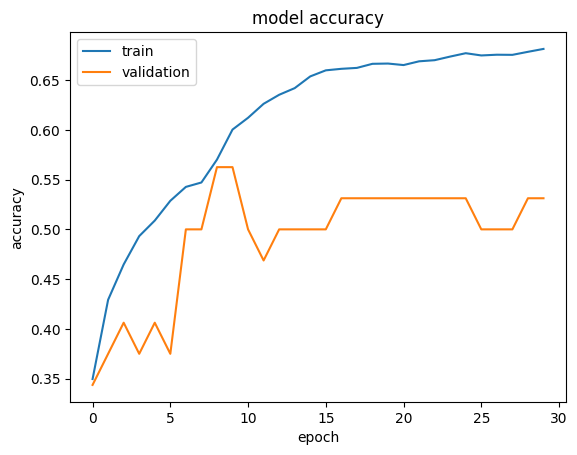

In [47]:
plt.plot(history_resnet.history["accuracy"])
plt.plot(history_resnet.history["val_accuracy"])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train", "validation"], loc="upper left")
plt.show()

### **Evaluating the ResNet Model**


In [48]:
# Calculate the number of steps for the entire test set to be processed
test_steps = test_generator.samples // batch_size

# If the number of samples isn't a multiple of the batch size,
# you have one more batch with the remaining samples
if test_generator.samples % batch_size > 0:
    test_steps += 1

# Evaluating the model on the test set
evaluation_results = new_resnet_model.evaluate(test_generator, steps=test_steps)
print(f"Loss: {evaluation_results[0]}, Accuracy: {evaluation_results[1]}")

1/4 [======>.......................] - ETA: 1s - loss: 0.8454 - accuracy: 0.6562

4/4 [==============================] - 0s 7ms/step - loss: 0.9718 - accuracy: 0.5938


Loss: 0.9718334674835205, Accuracy: 0.59375


### **Plotting Confusion Matrix**


1/4 [======>.......................] - ETA: 1s

4/4 [==============================] - 0s 6ms/step


              precision    recall  f1-score   support

       happy       0.57      0.66      0.61        32
     neutral       0.44      0.53      0.48        32
         sad       0.59      0.41      0.48        32
    surprise       0.83      0.78      0.81        32

    accuracy                           0.59       128
   macro avg       0.61      0.59      0.59       128
weighted avg       0.61      0.59      0.59       128



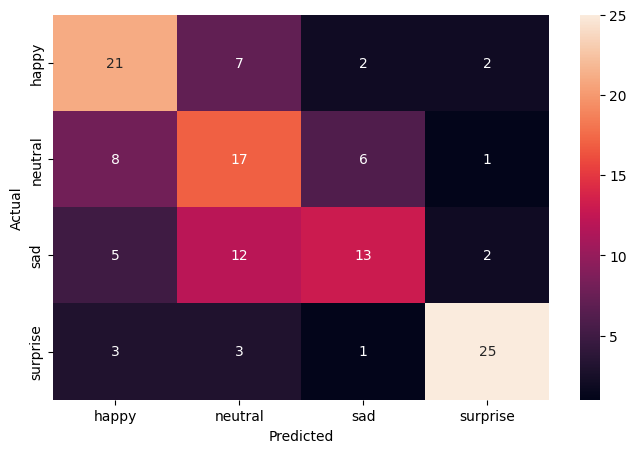

In [49]:
pred_probabilities = new_resnet_model.predict(test_generator, steps=test_steps)
pred = np.argmax(pred_probabilities, axis=1)

# Getting the true labels from the generator
y_true = test_generator.classes

# Printing the classification report with actual emotion labels
print(classification_report(y_true, pred, target_names=CATEGORIES))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)
plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt=".0f", xticklabels=CATEGORIES, yticklabels=CATEGORIES)
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

**Observations and Insights:\_\_**

**Note: You can even go back and build your own architecture on top of the ResNet Transfer layer and see if you can improve the performance.**


## **EfficientNet Model**


In [50]:
backend.clear_session()

# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)

random.seed(42)
tf.random.set_seed(42)

In [51]:
efficient_model = EfficientNetB0(
    weights="imagenet", include_top=False, input_shape=(img_width, img_height, color_layers)
)
# Making all the layers of the efficient_model model non-trainable. i.e. freezing them
for layer in efficient_model.layers:
    layer.trainable = False

efficient_model.summary()

Model: "efficientnetb0"


__________________________________________________________________________________________________


 Layer (type)                Output Shape                 Param #   Connected to                  


 input_1 (InputLayer)        [(None, 48, 48, 3)]          0         []                            


 rescaling (Rescaling)       (None, 48, 48, 3)            0         ['input_1[0][0]']             


 normalization (Normalizati  (None, 48, 48, 3)            7         ['rescaling[0][0]']           


 on)                                                                                              


 rescaling_1 (Rescaling)     (None, 48, 48, 3)            0         ['normalization[0][0]']       


 stem_conv_pad (ZeroPadding  (None, 49, 49, 3)            0         ['rescaling_1[0][0]']         


 2D)                                                                                              


 stem_conv (Conv2D)          (None, 24, 24, 32)           864       ['stem_conv_pad[0][0]']       


 stem_bn (BatchNormalizatio  (None, 24, 24, 32)           128       ['stem_conv[0][0]']           


 n)                                                                                               


 stem_activation (Activatio  (None, 24, 24, 32)           0         ['stem_bn[0][0]']             


 n)                                                                                               


 block1a_dwconv (DepthwiseC  (None, 24, 24, 32)           288       ['stem_activation[0][0]']     


 onv2D)                                                                                           


 block1a_bn (BatchNormaliza  (None, 24, 24, 32)           128       ['block1a_dwconv[0][0]']      


 tion)                                                                                            


 block1a_activation (Activa  (None, 24, 24, 32)           0         ['block1a_bn[0][0]']          


 tion)                                                                                            


 block1a_se_squeeze (Global  (None, 32)                   0         ['block1a_activation[0][0]']  


 AveragePooling2D)                                                                                


 block1a_se_reshape (Reshap  (None, 1, 1, 32)             0         ['block1a_se_squeeze[0][0]']  


 e)                                                                                               


 block1a_se_reduce (Conv2D)  (None, 1, 1, 8)              264       ['block1a_se_reshape[0][0]']  


 block1a_se_expand (Conv2D)  (None, 1, 1, 32)             288       ['block1a_se_reduce[0][0]']   


 block1a_se_excite (Multipl  (None, 24, 24, 32)           0         ['block1a_activation[0][0]',  


 y)                                                                  'block1a_se_expand[0][0]']   


 block1a_project_conv (Conv  (None, 24, 24, 16)           512       ['block1a_se_excite[0][0]']   


 2D)                                                                                              


 block1a_project_bn (BatchN  (None, 24, 24, 16)           64        ['block1a_project_conv[0][0]']


 ormalization)                                                                                    


 block2a_expand_conv (Conv2  (None, 24, 24, 96)           1536      ['block1a_project_bn[0][0]']  


 D)                                                                                               


 block2a_expand_bn (BatchNo  (None, 24, 24, 96)           384       ['block2a_expand_conv[0][0]'] 


 rmalization)                                                                                     


 block2a_expand_activation   (None, 24, 24, 96)           0         ['block2a_expand_bn[0][0]']   


 (Activation)                                                                                     


 block2a_dwconv_pad (ZeroPa  (None, 25, 25, 96)           0         ['block2a_expand_activation[0]


 dding2D)                                                           [0]']                         


 block2a_dwconv (DepthwiseC  (None, 12, 12, 96)           864       ['block2a_dwconv_pad[0][0]']  


 onv2D)                                                                                           


 block2a_bn (BatchNormaliza  (None, 12, 12, 96)           384       ['block2a_dwconv[0][0]']      


 tion)                                                                                            


 block2a_activation (Activa  (None, 12, 12, 96)           0         ['block2a_bn[0][0]']          


 tion)                                                                                            


 block2a_se_squeeze (Global  (None, 96)                   0         ['block2a_activation[0][0]']  


 AveragePooling2D)                                                                                


 block2a_se_reshape (Reshap  (None, 1, 1, 96)             0         ['block2a_se_squeeze[0][0]']  


 e)                                                                                               


 block2a_se_reduce (Conv2D)  (None, 1, 1, 4)              388       ['block2a_se_reshape[0][0]']  


 block2a_se_expand (Conv2D)  (None, 1, 1, 96)             480       ['block2a_se_reduce[0][0]']   


 block2a_se_excite (Multipl  (None, 12, 12, 96)           0         ['block2a_activation[0][0]',  


 y)                                                                  'block2a_se_expand[0][0]']   


 block2a_project_conv (Conv  (None, 12, 12, 24)           2304      ['block2a_se_excite[0][0]']   


 2D)                                                                                              


 block2a_project_bn (BatchN  (None, 12, 12, 24)           96        ['block2a_project_conv[0][0]']


 ormalization)                                                                                    


 block2b_expand_conv (Conv2  (None, 12, 12, 144)          3456      ['block2a_project_bn[0][0]']  


 D)                                                                                               


 block2b_expand_bn (BatchNo  (None, 12, 12, 144)          576       ['block2b_expand_conv[0][0]'] 


 rmalization)                                                                                     


 block2b_expand_activation   (None, 12, 12, 144)          0         ['block2b_expand_bn[0][0]']   


 (Activation)                                                                                     


 block2b_dwconv (DepthwiseC  (None, 12, 12, 144)          1296      ['block2b_expand_activation[0]


 onv2D)                                                             [0]']                         


 block2b_bn (BatchNormaliza  (None, 12, 12, 144)          576       ['block2b_dwconv[0][0]']      


 tion)                                                                                            


 block2b_activation (Activa  (None, 12, 12, 144)          0         ['block2b_bn[0][0]']          


 tion)                                                                                            


 block2b_se_squeeze (Global  (None, 144)                  0         ['block2b_activation[0][0]']  


 AveragePooling2D)                                                                                


 block2b_se_reshape (Reshap  (None, 1, 1, 144)            0         ['block2b_se_squeeze[0][0]']  


 e)                                                                                               


 block2b_se_reduce (Conv2D)  (None, 1, 1, 6)              870       ['block2b_se_reshape[0][0]']  


 block2b_se_expand (Conv2D)  (None, 1, 1, 144)            1008      ['block2b_se_reduce[0][0]']   


 block2b_se_excite (Multipl  (None, 12, 12, 144)          0         ['block2b_activation[0][0]',  


 y)                                                                  'block2b_se_expand[0][0]']   


 block2b_project_conv (Conv  (None, 12, 12, 24)           3456      ['block2b_se_excite[0][0]']   


 2D)                                                                                              


 block2b_project_bn (BatchN  (None, 12, 12, 24)           96        ['block2b_project_conv[0][0]']


 ormalization)                                                                                    


 block2b_drop (Dropout)      (None, 12, 12, 24)           0         ['block2b_project_bn[0][0]']  


 block2b_add (Add)           (None, 12, 12, 24)           0         ['block2b_drop[0][0]',        


                                                                     'block2a_project_bn[0][0]']  


 block3a_expand_conv (Conv2  (None, 12, 12, 144)          3456      ['block2b_add[0][0]']         


 D)                                                                                               


 block3a_expand_bn (BatchNo  (None, 12, 12, 144)          576       ['block3a_expand_conv[0][0]'] 


 rmalization)                                                                                     


 block3a_expand_activation   (None, 12, 12, 144)          0         ['block3a_expand_bn[0][0]']   


 (Activation)                                                                                     


 block3a_dwconv_pad (ZeroPa  (None, 15, 15, 144)          0         ['block3a_expand_activation[0]


 dding2D)                                                           [0]']                         


 block3a_dwconv (DepthwiseC  (None, 6, 6, 144)            3600      ['block3a_dwconv_pad[0][0]']  


 onv2D)                                                                                           


 block3a_bn (BatchNormaliza  (None, 6, 6, 144)            576       ['block3a_dwconv[0][0]']      


 tion)                                                                                            


 block3a_activation (Activa  (None, 6, 6, 144)            0         ['block3a_bn[0][0]']          


 tion)                                                                                            


 block3a_se_squeeze (Global  (None, 144)                  0         ['block3a_activation[0][0]']  


 AveragePooling2D)                                                                                


 block3a_se_reshape (Reshap  (None, 1, 1, 144)            0         ['block3a_se_squeeze[0][0]']  


 e)                                                                                               


 block3a_se_reduce (Conv2D)  (None, 1, 1, 6)              870       ['block3a_se_reshape[0][0]']  


 block3a_se_expand (Conv2D)  (None, 1, 1, 144)            1008      ['block3a_se_reduce[0][0]']   


 block3a_se_excite (Multipl  (None, 6, 6, 144)            0         ['block3a_activation[0][0]',  


 y)                                                                  'block3a_se_expand[0][0]']   


 block3a_project_conv (Conv  (None, 6, 6, 40)             5760      ['block3a_se_excite[0][0]']   


 2D)                                                                                              


 block3a_project_bn (BatchN  (None, 6, 6, 40)             160       ['block3a_project_conv[0][0]']


 ormalization)                                                                                    


 block3b_expand_conv (Conv2  (None, 6, 6, 240)            9600      ['block3a_project_bn[0][0]']  


 D)                                                                                               


 block3b_expand_bn (BatchNo  (None, 6, 6, 240)            960       ['block3b_expand_conv[0][0]'] 


 rmalization)                                                                                     


 block3b_expand_activation   (None, 6, 6, 240)            0         ['block3b_expand_bn[0][0]']   


 (Activation)                                                                                     


 block3b_dwconv (DepthwiseC  (None, 6, 6, 240)            6000      ['block3b_expand_activation[0]


 onv2D)                                                             [0]']                         


 block3b_bn (BatchNormaliza  (None, 6, 6, 240)            960       ['block3b_dwconv[0][0]']      


 tion)                                                                                            


 block3b_activation (Activa  (None, 6, 6, 240)            0         ['block3b_bn[0][0]']          


 tion)                                                                                            


 block3b_se_squeeze (Global  (None, 240)                  0         ['block3b_activation[0][0]']  


 AveragePooling2D)                                                                                


 block3b_se_reshape (Reshap  (None, 1, 1, 240)            0         ['block3b_se_squeeze[0][0]']  


 e)                                                                                               


 block3b_se_reduce (Conv2D)  (None, 1, 1, 10)             2410      ['block3b_se_reshape[0][0]']  


 block3b_se_expand (Conv2D)  (None, 1, 1, 240)            2640      ['block3b_se_reduce[0][0]']   


 block3b_se_excite (Multipl  (None, 6, 6, 240)            0         ['block3b_activation[0][0]',  


 y)                                                                  'block3b_se_expand[0][0]']   


 block3b_project_conv (Conv  (None, 6, 6, 40)             9600      ['block3b_se_excite[0][0]']   


 2D)                                                                                              


 block3b_project_bn (BatchN  (None, 6, 6, 40)             160       ['block3b_project_conv[0][0]']


 ormalization)                                                                                    


 block3b_drop (Dropout)      (None, 6, 6, 40)             0         ['block3b_project_bn[0][0]']  


 block3b_add (Add)           (None, 6, 6, 40)             0         ['block3b_drop[0][0]',        


                                                                     'block3a_project_bn[0][0]']  


 block4a_expand_conv (Conv2  (None, 6, 6, 240)            9600      ['block3b_add[0][0]']         


 D)                                                                                               


 block4a_expand_bn (BatchNo  (None, 6, 6, 240)            960       ['block4a_expand_conv[0][0]'] 


 rmalization)                                                                                     


 block4a_expand_activation   (None, 6, 6, 240)            0         ['block4a_expand_bn[0][0]']   


 (Activation)                                                                                     


 block4a_dwconv_pad (ZeroPa  (None, 7, 7, 240)            0         ['block4a_expand_activation[0]


 dding2D)                                                           [0]']                         


 block4a_dwconv (DepthwiseC  (None, 3, 3, 240)            2160      ['block4a_dwconv_pad[0][0]']  


 onv2D)                                                                                           


 block4a_bn (BatchNormaliza  (None, 3, 3, 240)            960       ['block4a_dwconv[0][0]']      


 tion)                                                                                            


 block4a_activation (Activa  (None, 3, 3, 240)            0         ['block4a_bn[0][0]']          


 tion)                                                                                            


 block4a_se_squeeze (Global  (None, 240)                  0         ['block4a_activation[0][0]']  


 AveragePooling2D)                                                                                


 block4a_se_reshape (Reshap  (None, 1, 1, 240)            0         ['block4a_se_squeeze[0][0]']  


 e)                                                                                               


 block4a_se_reduce (Conv2D)  (None, 1, 1, 10)             2410      ['block4a_se_reshape[0][0]']  


 block4a_se_expand (Conv2D)  (None, 1, 1, 240)            2640      ['block4a_se_reduce[0][0]']   


 block4a_se_excite (Multipl  (None, 3, 3, 240)            0         ['block4a_activation[0][0]',  


 y)                                                                  'block4a_se_expand[0][0]']   


 block4a_project_conv (Conv  (None, 3, 3, 80)             19200     ['block4a_se_excite[0][0]']   


 2D)                                                                                              


 block4a_project_bn (BatchN  (None, 3, 3, 80)             320       ['block4a_project_conv[0][0]']


 ormalization)                                                                                    


 block4b_expand_conv (Conv2  (None, 3, 3, 480)            38400     ['block4a_project_bn[0][0]']  


 D)                                                                                               


 block4b_expand_bn (BatchNo  (None, 3, 3, 480)            1920      ['block4b_expand_conv[0][0]'] 


 rmalization)                                                                                     


 block4b_expand_activation   (None, 3, 3, 480)            0         ['block4b_expand_bn[0][0]']   


 (Activation)                                                                                     


 block4b_dwconv (DepthwiseC  (None, 3, 3, 480)            4320      ['block4b_expand_activation[0]


 onv2D)                                                             [0]']                         


 block4b_bn (BatchNormaliza  (None, 3, 3, 480)            1920      ['block4b_dwconv[0][0]']      


 tion)                                                                                            


 block4b_activation (Activa  (None, 3, 3, 480)            0         ['block4b_bn[0][0]']          


 tion)                                                                                            


 block4b_se_squeeze (Global  (None, 480)                  0         ['block4b_activation[0][0]']  


 AveragePooling2D)                                                                                


 block4b_se_reshape (Reshap  (None, 1, 1, 480)            0         ['block4b_se_squeeze[0][0]']  


 e)                                                                                               


 block4b_se_reduce (Conv2D)  (None, 1, 1, 20)             9620      ['block4b_se_reshape[0][0]']  


 block4b_se_expand (Conv2D)  (None, 1, 1, 480)            10080     ['block4b_se_reduce[0][0]']   


 block4b_se_excite (Multipl  (None, 3, 3, 480)            0         ['block4b_activation[0][0]',  


 y)                                                                  'block4b_se_expand[0][0]']   


 block4b_project_conv (Conv  (None, 3, 3, 80)             38400     ['block4b_se_excite[0][0]']   


 2D)                                                                                              


 block4b_project_bn (BatchN  (None, 3, 3, 80)             320       ['block4b_project_conv[0][0]']


 ormalization)                                                                                    


 block4b_drop (Dropout)      (None, 3, 3, 80)             0         ['block4b_project_bn[0][0]']  


 block4b_add (Add)           (None, 3, 3, 80)             0         ['block4b_drop[0][0]',        


                                                                     'block4a_project_bn[0][0]']  


 block4c_expand_conv (Conv2  (None, 3, 3, 480)            38400     ['block4b_add[0][0]']         


 D)                                                                                               


 block4c_expand_bn (BatchNo  (None, 3, 3, 480)            1920      ['block4c_expand_conv[0][0]'] 


 rmalization)                                                                                     


 block4c_expand_activation   (None, 3, 3, 480)            0         ['block4c_expand_bn[0][0]']   


 (Activation)                                                                                     


 block4c_dwconv (DepthwiseC  (None, 3, 3, 480)            4320      ['block4c_expand_activation[0]


 onv2D)                                                             [0]']                         


 block4c_bn (BatchNormaliza  (None, 3, 3, 480)            1920      ['block4c_dwconv[0][0]']      


 tion)                                                                                            


 block4c_activation (Activa  (None, 3, 3, 480)            0         ['block4c_bn[0][0]']          


 tion)                                                                                            


 block4c_se_squeeze (Global  (None, 480)                  0         ['block4c_activation[0][0]']  


 AveragePooling2D)                                                                                


 block4c_se_reshape (Reshap  (None, 1, 1, 480)            0         ['block4c_se_squeeze[0][0]']  


 e)                                                                                               


 block4c_se_reduce (Conv2D)  (None, 1, 1, 20)             9620      ['block4c_se_reshape[0][0]']  


 block4c_se_expand (Conv2D)  (None, 1, 1, 480)            10080     ['block4c_se_reduce[0][0]']   


 block4c_se_excite (Multipl  (None, 3, 3, 480)            0         ['block4c_activation[0][0]',  


 y)                                                                  'block4c_se_expand[0][0]']   


 block4c_project_conv (Conv  (None, 3, 3, 80)             38400     ['block4c_se_excite[0][0]']   


 2D)                                                                                              


 block4c_project_bn (BatchN  (None, 3, 3, 80)             320       ['block4c_project_conv[0][0]']


 ormalization)                                                                                    


 block4c_drop (Dropout)      (None, 3, 3, 80)             0         ['block4c_project_bn[0][0]']  


 block4c_add (Add)           (None, 3, 3, 80)             0         ['block4c_drop[0][0]',        


                                                                     'block4b_add[0][0]']         


 block5a_expand_conv (Conv2  (None, 3, 3, 480)            38400     ['block4c_add[0][0]']         


 D)                                                                                               


 block5a_expand_bn (BatchNo  (None, 3, 3, 480)            1920      ['block5a_expand_conv[0][0]'] 


 rmalization)                                                                                     


 block5a_expand_activation   (None, 3, 3, 480)            0         ['block5a_expand_bn[0][0]']   


 (Activation)                                                                                     


 block5a_dwconv (DepthwiseC  (None, 3, 3, 480)            12000     ['block5a_expand_activation[0]


 onv2D)                                                             [0]']                         


 block5a_bn (BatchNormaliza  (None, 3, 3, 480)            1920      ['block5a_dwconv[0][0]']      


 tion)                                                                                            


 block5a_activation (Activa  (None, 3, 3, 480)            0         ['block5a_bn[0][0]']          


 tion)                                                                                            


 block5a_se_squeeze (Global  (None, 480)                  0         ['block5a_activation[0][0]']  


 AveragePooling2D)                                                                                


 block5a_se_reshape (Reshap  (None, 1, 1, 480)            0         ['block5a_se_squeeze[0][0]']  


 e)                                                                                               


 block5a_se_reduce (Conv2D)  (None, 1, 1, 20)             9620      ['block5a_se_reshape[0][0]']  


 block5a_se_expand (Conv2D)  (None, 1, 1, 480)            10080     ['block5a_se_reduce[0][0]']   


 block5a_se_excite (Multipl  (None, 3, 3, 480)            0         ['block5a_activation[0][0]',  


 y)                                                                  'block5a_se_expand[0][0]']   


 block5a_project_conv (Conv  (None, 3, 3, 112)            53760     ['block5a_se_excite[0][0]']   


 2D)                                                                                              


 block5a_project_bn (BatchN  (None, 3, 3, 112)            448       ['block5a_project_conv[0][0]']


 ormalization)                                                                                    


 block5b_expand_conv (Conv2  (None, 3, 3, 672)            75264     ['block5a_project_bn[0][0]']  


 D)                                                                                               


 block5b_expand_bn (BatchNo  (None, 3, 3, 672)            2688      ['block5b_expand_conv[0][0]'] 


 rmalization)                                                                                     


 block5b_expand_activation   (None, 3, 3, 672)            0         ['block5b_expand_bn[0][0]']   


 (Activation)                                                                                     


 block5b_dwconv (DepthwiseC  (None, 3, 3, 672)            16800     ['block5b_expand_activation[0]


 onv2D)                                                             [0]']                         


 block5b_bn (BatchNormaliza  (None, 3, 3, 672)            2688      ['block5b_dwconv[0][0]']      


 tion)                                                                                            


 block5b_activation (Activa  (None, 3, 3, 672)            0         ['block5b_bn[0][0]']          


 tion)                                                                                            


 block5b_se_squeeze (Global  (None, 672)                  0         ['block5b_activation[0][0]']  


 AveragePooling2D)                                                                                


 block5b_se_reshape (Reshap  (None, 1, 1, 672)            0         ['block5b_se_squeeze[0][0]']  


 e)                                                                                               


 block5b_se_reduce (Conv2D)  (None, 1, 1, 28)             18844     ['block5b_se_reshape[0][0]']  


 block5b_se_expand (Conv2D)  (None, 1, 1, 672)            19488     ['block5b_se_reduce[0][0]']   


 block5b_se_excite (Multipl  (None, 3, 3, 672)            0         ['block5b_activation[0][0]',  


 y)                                                                  'block5b_se_expand[0][0]']   


 block5b_project_conv (Conv  (None, 3, 3, 112)            75264     ['block5b_se_excite[0][0]']   


 2D)                                                                                              


 block5b_project_bn (BatchN  (None, 3, 3, 112)            448       ['block5b_project_conv[0][0]']


 ormalization)                                                                                    


 block5b_drop (Dropout)      (None, 3, 3, 112)            0         ['block5b_project_bn[0][0]']  


 block5b_add (Add)           (None, 3, 3, 112)            0         ['block5b_drop[0][0]',        


                                                                     'block5a_project_bn[0][0]']  


 block5c_expand_conv (Conv2  (None, 3, 3, 672)            75264     ['block5b_add[0][0]']         


 D)                                                                                               


 block5c_expand_bn (BatchNo  (None, 3, 3, 672)            2688      ['block5c_expand_conv[0][0]'] 


 rmalization)                                                                                     


 block5c_expand_activation   (None, 3, 3, 672)            0         ['block5c_expand_bn[0][0]']   


 (Activation)                                                                                     


 block5c_dwconv (DepthwiseC  (None, 3, 3, 672)            16800     ['block5c_expand_activation[0]


 onv2D)                                                             [0]']                         


 block5c_bn (BatchNormaliza  (None, 3, 3, 672)            2688      ['block5c_dwconv[0][0]']      


 tion)                                                                                            


 block5c_activation (Activa  (None, 3, 3, 672)            0         ['block5c_bn[0][0]']          


 tion)                                                                                            


 block5c_se_squeeze (Global  (None, 672)                  0         ['block5c_activation[0][0]']  


 AveragePooling2D)                                                                                


 block5c_se_reshape (Reshap  (None, 1, 1, 672)            0         ['block5c_se_squeeze[0][0]']  


 e)                                                                                               


 block5c_se_reduce (Conv2D)  (None, 1, 1, 28)             18844     ['block5c_se_reshape[0][0]']  


 block5c_se_expand (Conv2D)  (None, 1, 1, 672)            19488     ['block5c_se_reduce[0][0]']   


 block5c_se_excite (Multipl  (None, 3, 3, 672)            0         ['block5c_activation[0][0]',  


 y)                                                                  'block5c_se_expand[0][0]']   


 block5c_project_conv (Conv  (None, 3, 3, 112)            75264     ['block5c_se_excite[0][0]']   


 2D)                                                                                              


 block5c_project_bn (BatchN  (None, 3, 3, 112)            448       ['block5c_project_conv[0][0]']


 ormalization)                                                                                    


 block5c_drop (Dropout)      (None, 3, 3, 112)            0         ['block5c_project_bn[0][0]']  


 block5c_add (Add)           (None, 3, 3, 112)            0         ['block5c_drop[0][0]',        


                                                                     'block5b_add[0][0]']         


 block6a_expand_conv (Conv2  (None, 3, 3, 672)            75264     ['block5c_add[0][0]']         


 D)                                                                                               


 block6a_expand_bn (BatchNo  (None, 3, 3, 672)            2688      ['block6a_expand_conv[0][0]'] 


 rmalization)                                                                                     


 block6a_expand_activation   (None, 3, 3, 672)            0         ['block6a_expand_bn[0][0]']   


 (Activation)                                                                                     


 block6a_dwconv_pad (ZeroPa  (None, 7, 7, 672)            0         ['block6a_expand_activation[0]


 dding2D)                                                           [0]']                         


 block6a_dwconv (DepthwiseC  (None, 2, 2, 672)            16800     ['block6a_dwconv_pad[0][0]']  


 onv2D)                                                                                           


 block6a_bn (BatchNormaliza  (None, 2, 2, 672)            2688      ['block6a_dwconv[0][0]']      


 tion)                                                                                            


 block6a_activation (Activa  (None, 2, 2, 672)            0         ['block6a_bn[0][0]']          


 tion)                                                                                            


 block6a_se_squeeze (Global  (None, 672)                  0         ['block6a_activation[0][0]']  


 AveragePooling2D)                                                                                


 block6a_se_reshape (Reshap  (None, 1, 1, 672)            0         ['block6a_se_squeeze[0][0]']  


 e)                                                                                               


 block6a_se_reduce (Conv2D)  (None, 1, 1, 28)             18844     ['block6a_se_reshape[0][0]']  


 block6a_se_expand (Conv2D)  (None, 1, 1, 672)            19488     ['block6a_se_reduce[0][0]']   


 block6a_se_excite (Multipl  (None, 2, 2, 672)            0         ['block6a_activation[0][0]',  


 y)                                                                  'block6a_se_expand[0][0]']   


 block6a_project_conv (Conv  (None, 2, 2, 192)            129024    ['block6a_se_excite[0][0]']   


 2D)                                                                                              


 block6a_project_bn (BatchN  (None, 2, 2, 192)            768       ['block6a_project_conv[0][0]']


 ormalization)                                                                                    


 block6b_expand_conv (Conv2  (None, 2, 2, 1152)           221184    ['block6a_project_bn[0][0]']  


 D)                                                                                               


 block6b_expand_bn (BatchNo  (None, 2, 2, 1152)           4608      ['block6b_expand_conv[0][0]'] 


 rmalization)                                                                                     


 block6b_expand_activation   (None, 2, 2, 1152)           0         ['block6b_expand_bn[0][0]']   


 (Activation)                                                                                     


 block6b_dwconv (DepthwiseC  (None, 2, 2, 1152)           28800     ['block6b_expand_activation[0]


 onv2D)                                                             [0]']                         


 block6b_bn (BatchNormaliza  (None, 2, 2, 1152)           4608      ['block6b_dwconv[0][0]']      


 tion)                                                                                            


 block6b_activation (Activa  (None, 2, 2, 1152)           0         ['block6b_bn[0][0]']          


 tion)                                                                                            


 block6b_se_squeeze (Global  (None, 1152)                 0         ['block6b_activation[0][0]']  


 AveragePooling2D)                                                                                


 block6b_se_reshape (Reshap  (None, 1, 1, 1152)           0         ['block6b_se_squeeze[0][0]']  


 e)                                                                                               


 block6b_se_reduce (Conv2D)  (None, 1, 1, 48)             55344     ['block6b_se_reshape[0][0]']  


 block6b_se_expand (Conv2D)  (None, 1, 1, 1152)           56448     ['block6b_se_reduce[0][0]']   


 block6b_se_excite (Multipl  (None, 2, 2, 1152)           0         ['block6b_activation[0][0]',  


 y)                                                                  'block6b_se_expand[0][0]']   


 block6b_project_conv (Conv  (None, 2, 2, 192)            221184    ['block6b_se_excite[0][0]']   


 2D)                                                                                              


 block6b_project_bn (BatchN  (None, 2, 2, 192)            768       ['block6b_project_conv[0][0]']


 ormalization)                                                                                    


 block6b_drop (Dropout)      (None, 2, 2, 192)            0         ['block6b_project_bn[0][0]']  


 block6b_add (Add)           (None, 2, 2, 192)            0         ['block6b_drop[0][0]',        


                                                                     'block6a_project_bn[0][0]']  


 block6c_expand_conv (Conv2  (None, 2, 2, 1152)           221184    ['block6b_add[0][0]']         


 D)                                                                                               


 block6c_expand_bn (BatchNo  (None, 2, 2, 1152)           4608      ['block6c_expand_conv[0][0]'] 


 rmalization)                                                                                     


 block6c_expand_activation   (None, 2, 2, 1152)           0         ['block6c_expand_bn[0][0]']   


 (Activation)                                                                                     


 block6c_dwconv (DepthwiseC  (None, 2, 2, 1152)           28800     ['block6c_expand_activation[0]


 onv2D)                                                             [0]']                         


 block6c_bn (BatchNormaliza  (None, 2, 2, 1152)           4608      ['block6c_dwconv[0][0]']      


 tion)                                                                                            


 block6c_activation (Activa  (None, 2, 2, 1152)           0         ['block6c_bn[0][0]']          


 tion)                                                                                            


 block6c_se_squeeze (Global  (None, 1152)                 0         ['block6c_activation[0][0]']  


 AveragePooling2D)                                                                                


 block6c_se_reshape (Reshap  (None, 1, 1, 1152)           0         ['block6c_se_squeeze[0][0]']  


 e)                                                                                               


 block6c_se_reduce (Conv2D)  (None, 1, 1, 48)             55344     ['block6c_se_reshape[0][0]']  


 block6c_se_expand (Conv2D)  (None, 1, 1, 1152)           56448     ['block6c_se_reduce[0][0]']   


 block6c_se_excite (Multipl  (None, 2, 2, 1152)           0         ['block6c_activation[0][0]',  


 y)                                                                  'block6c_se_expand[0][0]']   


 block6c_project_conv (Conv  (None, 2, 2, 192)            221184    ['block6c_se_excite[0][0]']   


 2D)                                                                                              


 block6c_project_bn (BatchN  (None, 2, 2, 192)            768       ['block6c_project_conv[0][0]']


 ormalization)                                                                                    


 block6c_drop (Dropout)      (None, 2, 2, 192)            0         ['block6c_project_bn[0][0]']  


 block6c_add (Add)           (None, 2, 2, 192)            0         ['block6c_drop[0][0]',        


                                                                     'block6b_add[0][0]']         


 block6d_expand_conv (Conv2  (None, 2, 2, 1152)           221184    ['block6c_add[0][0]']         


 D)                                                                                               


 block6d_expand_bn (BatchNo  (None, 2, 2, 1152)           4608      ['block6d_expand_conv[0][0]'] 


 rmalization)                                                                                     


 block6d_expand_activation   (None, 2, 2, 1152)           0         ['block6d_expand_bn[0][0]']   


 (Activation)                                                                                     


 block6d_dwconv (DepthwiseC  (None, 2, 2, 1152)           28800     ['block6d_expand_activation[0]


 onv2D)                                                             [0]']                         


 block6d_bn (BatchNormaliza  (None, 2, 2, 1152)           4608      ['block6d_dwconv[0][0]']      


 tion)                                                                                            


 block6d_activation (Activa  (None, 2, 2, 1152)           0         ['block6d_bn[0][0]']          


 tion)                                                                                            


 block6d_se_squeeze (Global  (None, 1152)                 0         ['block6d_activation[0][0]']  


 AveragePooling2D)                                                                                


 block6d_se_reshape (Reshap  (None, 1, 1, 1152)           0         ['block6d_se_squeeze[0][0]']  


 e)                                                                                               


 block6d_se_reduce (Conv2D)  (None, 1, 1, 48)             55344     ['block6d_se_reshape[0][0]']  


 block6d_se_expand (Conv2D)  (None, 1, 1, 1152)           56448     ['block6d_se_reduce[0][0]']   


 block6d_se_excite (Multipl  (None, 2, 2, 1152)           0         ['block6d_activation[0][0]',  


 y)                                                                  'block6d_se_expand[0][0]']   


 block6d_project_conv (Conv  (None, 2, 2, 192)            221184    ['block6d_se_excite[0][0]']   


 2D)                                                                                              


 block6d_project_bn (BatchN  (None, 2, 2, 192)            768       ['block6d_project_conv[0][0]']


 ormalization)                                                                                    


 block6d_drop (Dropout)      (None, 2, 2, 192)            0         ['block6d_project_bn[0][0]']  


 block6d_add (Add)           (None, 2, 2, 192)            0         ['block6d_drop[0][0]',        


                                                                     'block6c_add[0][0]']         


 block7a_expand_conv (Conv2  (None, 2, 2, 1152)           221184    ['block6d_add[0][0]']         


 D)                                                                                               


 block7a_expand_bn (BatchNo  (None, 2, 2, 1152)           4608      ['block7a_expand_conv[0][0]'] 


 rmalization)                                                                                     


 block7a_expand_activation   (None, 2, 2, 1152)           0         ['block7a_expand_bn[0][0]']   


 (Activation)                                                                                     


 block7a_dwconv (DepthwiseC  (None, 2, 2, 1152)           10368     ['block7a_expand_activation[0]


 onv2D)                                                             [0]']                         


 block7a_bn (BatchNormaliza  (None, 2, 2, 1152)           4608      ['block7a_dwconv[0][0]']      


 tion)                                                                                            


 block7a_activation (Activa  (None, 2, 2, 1152)           0         ['block7a_bn[0][0]']          


 tion)                                                                                            


 block7a_se_squeeze (Global  (None, 1152)                 0         ['block7a_activation[0][0]']  


 AveragePooling2D)                                                                                


 block7a_se_reshape (Reshap  (None, 1, 1, 1152)           0         ['block7a_se_squeeze[0][0]']  


 e)                                                                                               


 block7a_se_reduce (Conv2D)  (None, 1, 1, 48)             55344     ['block7a_se_reshape[0][0]']  


 block7a_se_expand (Conv2D)  (None, 1, 1, 1152)           56448     ['block7a_se_reduce[0][0]']   


 block7a_se_excite (Multipl  (None, 2, 2, 1152)           0         ['block7a_activation[0][0]',  


 y)                                                                  'block7a_se_expand[0][0]']   


 block7a_project_conv (Conv  (None, 2, 2, 320)            368640    ['block7a_se_excite[0][0]']   


 2D)                                                                                              


 block7a_project_bn (BatchN  (None, 2, 2, 320)            1280      ['block7a_project_conv[0][0]']


 ormalization)                                                                                    


 top_conv (Conv2D)           (None, 2, 2, 1280)           409600    ['block7a_project_bn[0][0]']  


 top_bn (BatchNormalization  (None, 2, 2, 1280)           5120      ['top_conv[0][0]']            


 )                                                                                                


 top_activation (Activation  (None, 2, 2, 1280)           0         ['top_bn[0][0]']              


 )                                                                                                


Total params: 4049571 (15.45 MB)


Trainable params: 0 (0.00 Byte)


Non-trainable params: 4049571 (15.45 MB)


__________________________________________________________________________________________________


### **Model Building**

- Import EfficientNet upto the layer of your choice and add Fully Connected layers on top of it.


In [52]:
new_efficient_model = Sequential()
new_efficient_model.add(efficient_model)

# Reduces each feature map to a single value by averaging all elements
new_efficient_model.add(GlobalAveragePooling2D())

# Adding a dense output layer
new_efficient_model.add(Dense(512, activation="relu"))
new_efficient_model.add(Dropout(0.5))
new_efficient_model.add(Dense(128, activation="relu"))
new_efficient_model.add(Dropout(0.5))
new_efficient_model.add(Dense(4, activation="softmax"))

# Using Adam Optimizer
optimizer = Adam(learning_rate=0.0005)

### **Compiling and Training the Model**


In [53]:
new_efficient_model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])
new_efficient_model.summary()

Model: "sequential"


_________________________________________________________________


 Layer (type)                Output Shape              Param #   


 efficientnetb0 (Functional  (None, 2, 2, 1280)        4049571   


 )                                                               


 global_average_pooling2d (  (None, 1280)              0         


 GlobalAveragePooling2D)                                         


 dense (Dense)               (None, 512)               655872    


 dropout (Dropout)           (None, 512)               0         


 dense_1 (Dense)             (None, 128)               65664     


 dropout_1 (Dropout)         (None, 128)               0         


 dense_2 (Dense)             (None, 4)                 516       


Total params: 4771623 (18.20 MB)


Trainable params: 722052 (2.75 MB)


Non-trainable params: 4049571 (15.45 MB)


_________________________________________________________________


In [54]:
# Get the current time
current_time = datetime.now().strftime("%Y%m%d-%H%M%S")

# Set up Early Stopping with a patience 7 but acting after at least 20 epochs
delayed_early_stopping = DelayedEarlyStopping(
    monitor="val_loss", patience=7, verbose=1, restore_best_weights=True, start_epoch=20
)

# Define the learning rate scheduler callback
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.2, patience=5, min_lr=0.00001, verbose=1)

mc = ModelCheckpoint(
    f"{results_path}/best_model_efficient_{current_time}.keras",
    monitor="val_accuracy",
    mode="max",
    verbose=1,
    save_best_only=True,
)

# Pulling a single large batch of random validation data for doing the validation after each epoch
validationX, validationY = validation_generator.next()

# Fitting the model with 40 epochs and using validation set
history_efficient = new_efficient_model.fit(
    train_generator,
    epochs=40,
    validation_data=(validationX, validationY),
    callbacks=[delayed_early_stopping, mc, reduce_lr],
)

Epoch 1/40


  1/473 [..............................] - ETA: 26:48 - loss: 1.3421 - accuracy: 0.4062

 10/473 [..............................] - ETA: 2s - loss: 1.4992 - accuracy: 0.2406   

 19/473 [>.............................] - ETA: 2s - loss: 1.5057 - accuracy: 0.2385

 28/473 [>.............................] - ETA: 2s - loss: 1.4856 - accuracy: 0.2545

 39/473 [=>............................] - ETA: 2s - loss: 1.4700 - accuracy: 0.2580

 50/473 [==>...........................] - ETA: 2s - loss: 1.4628 - accuracy: 0.2519

 61/473 [==>...........................] - ETA: 2s - loss: 1.4539 - accuracy: 0.2485

 71/473 [===>..........................] - ETA: 2s - loss: 1.4481 - accuracy: 0.2460

 81/473 [====>.........................] - ETA: 2s - loss: 1.4425 - accuracy: 0.2450

 92/473 [====>.........................] - ETA: 1s - loss: 1.4379 - accuracy: 0.2446

102/473 [=====>........................] - ETA: 1s - loss: 1.4341 - accuracy: 0.2463

110/473 [=====>........................] - ETA: 1s - loss: 1.4327 - accuracy: 0.2455

121/473 [======>.......................] - ETA: 1s - loss: 1.4288 - accuracy: 0.2459

132/473 [=======>......................] - ETA: 1s - loss: 1.4252 - accuracy: 0.2476

141/473 [=======>......................] - ETA: 1s - loss: 1.4239 - accuracy: 0.2465

152/473 [========>.....................] - ETA: 1s - loss: 1.4213 - accuracy: 0.2479

162/473 [=========>....................] - ETA: 1s - loss: 1.4195 - accuracy: 0.2485

172/473 [=========>....................] - ETA: 1s - loss: 1.4168 - accuracy: 0.2509

182/473 [==========>...................] - ETA: 1s - loss: 1.4166 - accuracy: 0.2498

192/473 [===========>..................] - ETA: 1s - loss: 1.4155 - accuracy: 0.2511

202/473 [===========>..................] - ETA: 1s - loss: 1.4143 - accuracy: 0.2508

209/473 [============>.................] - ETA: 1s - loss: 1.4138 - accuracy: 0.2495

219/473 [============>.................] - ETA: 1s - loss: 1.4124 - accuracy: 0.2517

230/473 [=============>................] - ETA: 1s - loss: 1.4114 - accuracy: 0.2521

241/473 [==============>...............] - ETA: 1s - loss: 1.4100 - accuracy: 0.2534

252/473 [==============>...............] - ETA: 1s - loss: 1.4089 - accuracy: 0.2528

262/473 [===============>..............] - ETA: 1s - loss: 1.4085 - accuracy: 0.2520

272/473 [================>.............] - ETA: 1s - loss: 1.4078 - accuracy: 0.2522

282/473 [================>.............] - ETA: 1s - loss: 1.4067 - accuracy: 0.2544

292/473 [=================>............] - ETA: 0s - loss: 1.4056 - accuracy: 0.2561

302/473 [==================>...........] - ETA: 0s - loss: 1.4049 - accuracy: 0.2574

313/473 [==================>...........] - ETA: 0s - loss: 1.4047 - accuracy: 0.2573

321/473 [===================>..........] - ETA: 0s - loss: 1.4042 - accuracy: 0.2577

328/473 [===================>..........] - ETA: 0s - loss: 1.4040 - accuracy: 0.2568

335/473 [====================>.........] - ETA: 0s - loss: 1.4034 - accuracy: 0.2578

342/473 [====================>.........] - ETA: 0s - loss: 1.4032 - accuracy: 0.2571

349/473 [=====================>........] - ETA: 0s - loss: 1.4028 - accuracy: 0.2579

355/473 [=====================>........] - ETA: 0s - loss: 1.4025 - accuracy: 0.2575

363/473 [======================>.......] - ETA: 0s - loss: 1.4020 - accuracy: 0.2583

373/473 [======================>.......] - ETA: 0s - loss: 1.4015 - accuracy: 0.2585

384/473 [=======================>......] - ETA: 0s - loss: 1.4012 - accuracy: 0.2577

395/473 [========================>.....] - ETA: 0s - loss: 1.4004 - accuracy: 0.2585

406/473 [========================>.....] - ETA: 0s - loss: 1.4000 - accuracy: 0.2582

416/473 [=========================>....] - ETA: 0s - loss: 1.3994 - accuracy: 0.2587

426/473 [==========================>...] - ETA: 0s - loss: 1.3989 - accuracy: 0.2592

437/473 [==========================>...] - ETA: 0s - loss: 1.3988 - accuracy: 0.2587

448/473 [===========================>..] - ETA: 0s - loss: 1.3983 - accuracy: 0.2591

458/473 [============================>.] - ETA: 0s - loss: 1.3981 - accuracy: 0.2587

467/473 [============================>.] - ETA: 0s - loss: 1.3978 - accuracy: 0.2585


Epoch 1: val_accuracy improved from -inf to 0.06250, saving model to /home/iamtxena/sandbox/mit-ai/capstone/Facial_Emotion_Recognition/results/best_model_efficient_20240320-071652.keras


473/473 [==============================] - 7s 8ms/step - loss: 1.3976 - accuracy: 0.2585 - val_loss: 1.3841 - val_accuracy: 0.0625 - lr: 5.0000e-04


Epoch 2/40


  1/473 [..............................] - ETA: 7s - loss: 1.3784 - accuracy: 0.2812

 11/473 [..............................] - ETA: 2s - loss: 1.3843 - accuracy: 0.2727

 22/473 [>.............................] - ETA: 2s - loss: 1.3822 - accuracy: 0.2727

 33/473 [=>............................] - ETA: 2s - loss: 1.3849 - accuracy: 0.2727

 43/473 [=>............................] - ETA: 2s - loss: 1.3852 - accuracy: 0.2638

 51/473 [==>...........................] - ETA: 2s - loss: 1.3853 - accuracy: 0.2678

 62/473 [==>...........................] - ETA: 2s - loss: 1.3852 - accuracy: 0.2666

 72/473 [===>..........................] - ETA: 2s - loss: 1.3843 - accuracy: 0.2674

 80/473 [====>.........................] - ETA: 2s - loss: 1.3835 - accuracy: 0.2680

 86/473 [====>.........................] - ETA: 2s - loss: 1.3836 - accuracy: 0.2678

 96/473 [=====>........................] - ETA: 2s - loss: 1.3839 - accuracy: 0.2673

106/473 [=====>........................] - ETA: 2s - loss: 1.3840 - accuracy: 0.2636

117/473 [======>.......................] - ETA: 1s - loss: 1.3846 - accuracy: 0.2612

128/473 [=======>......................] - ETA: 1s - loss: 1.3846 - accuracy: 0.2615

139/473 [=======>......................] - ETA: 1s - loss: 1.3844 - accuracy: 0.2628

149/473 [========>.....................] - ETA: 1s - loss: 1.3840 - accuracy: 0.2659

158/473 [=========>....................] - ETA: 1s - loss: 1.3839 - accuracy: 0.2676

167/473 [=========>....................] - ETA: 1s - loss: 1.3839 - accuracy: 0.2680

174/473 [==========>...................] - ETA: 1s - loss: 1.3837 - accuracy: 0.2667

181/473 [==========>...................] - ETA: 1s - loss: 1.3838 - accuracy: 0.2654

187/473 [==========>...................] - ETA: 1s - loss: 1.3837 - accuracy: 0.2640

195/473 [===========>..................] - ETA: 1s - loss: 1.3835 - accuracy: 0.2651

205/473 [============>.................] - ETA: 1s - loss: 1.3835 - accuracy: 0.2637

214/473 [============>.................] - ETA: 1s - loss: 1.3833 - accuracy: 0.2627

224/473 [=============>................] - ETA: 1s - loss: 1.3834 - accuracy: 0.2634

233/473 [=============>................] - ETA: 1s - loss: 1.3835 - accuracy: 0.2628

243/473 [==============>...............] - ETA: 1s - loss: 1.3836 - accuracy: 0.2609

253/473 [===============>..............] - ETA: 1s - loss: 1.3837 - accuracy: 0.2599

263/473 [===============>..............] - ETA: 1s - loss: 1.3837 - accuracy: 0.2594

274/473 [================>.............] - ETA: 1s - loss: 1.3837 - accuracy: 0.2583

284/473 [=================>............] - ETA: 1s - loss: 1.3835 - accuracy: 0.2578

295/473 [=================>............] - ETA: 0s - loss: 1.3833 - accuracy: 0.2588

305/473 [==================>...........] - ETA: 0s - loss: 1.3831 - accuracy: 0.2598

315/473 [==================>...........] - ETA: 0s - loss: 1.3832 - accuracy: 0.2597

325/473 [===================>..........] - ETA: 0s - loss: 1.3833 - accuracy: 0.2589

336/473 [====================>.........] - ETA: 0s - loss: 1.3833 - accuracy: 0.2580

344/473 [====================>.........] - ETA: 0s - loss: 1.3832 - accuracy: 0.2583

354/473 [=====================>........] - ETA: 0s - loss: 1.3831 - accuracy: 0.2579

361/473 [=====================>........] - ETA: 0s - loss: 1.3830 - accuracy: 0.2577

369/473 [======================>.......] - ETA: 0s - loss: 1.3830 - accuracy: 0.2574

376/473 [======================>.......] - ETA: 0s - loss: 1.3828 - accuracy: 0.2579

384/473 [=======================>......] - ETA: 0s - loss: 1.3828 - accuracy: 0.2586

395/473 [========================>.....] - ETA: 0s - loss: 1.3829 - accuracy: 0.2576

406/473 [========================>.....] - ETA: 0s - loss: 1.3829 - accuracy: 0.2568

417/473 [=========================>....] - ETA: 0s - loss: 1.3829 - accuracy: 0.2565

428/473 [==========================>...] - ETA: 0s - loss: 1.3826 - accuracy: 0.2572

438/473 [==========================>...] - ETA: 0s - loss: 1.3830 - accuracy: 0.2570

449/473 [===========================>..] - ETA: 0s - loss: 1.3830 - accuracy: 0.2570

459/473 [============================>.] - ETA: 0s - loss: 1.3830 - accuracy: 0.2571

470/473 [============================>.] - ETA: 0s - loss: 1.3830 - accuracy: 0.2572


Epoch 2: val_accuracy improved from 0.06250 to 0.25000, saving model to /home/iamtxena/sandbox/mit-ai/capstone/Facial_Emotion_Recognition/results/best_model_efficient_20240320-071652.keras


473/473 [==============================] - 3s 7ms/step - loss: 1.3830 - accuracy: 0.2571 - val_loss: 1.3763 - val_accuracy: 0.2500 - lr: 5.0000e-04


Epoch 3/40


  1/473 [..............................] - ETA: 7s - loss: 1.3779 - accuracy: 0.2500

 12/473 [..............................] - ETA: 2s - loss: 1.3811 - accuracy: 0.2448

 21/473 [>.............................] - ETA: 2s - loss: 1.3833 - accuracy: 0.2440

 30/473 [>.............................] - ETA: 2s - loss: 1.3817 - accuracy: 0.2479

 40/473 [=>............................] - ETA: 2s - loss: 1.3813 - accuracy: 0.2516

 51/473 [==>...........................] - ETA: 2s - loss: 1.3810 - accuracy: 0.2494

 62/473 [==>...........................] - ETA: 2s - loss: 1.3830 - accuracy: 0.2465

 73/473 [===>..........................] - ETA: 2s - loss: 1.3822 - accuracy: 0.2504

 84/473 [====>.........................] - ETA: 1s - loss: 1.3817 - accuracy: 0.2537

 94/473 [====>.........................] - ETA: 1s - loss: 1.3814 - accuracy: 0.2570

105/473 [=====>........................] - ETA: 1s - loss: 1.3813 - accuracy: 0.2586

115/473 [======>.......................] - ETA: 1s - loss: 1.3807 - accuracy: 0.2620

126/473 [======>.......................] - ETA: 1s - loss: 1.3808 - accuracy: 0.2584

136/473 [=======>......................] - ETA: 1s - loss: 1.3811 - accuracy: 0.2597

147/473 [========>.....................] - ETA: 1s - loss: 1.3815 - accuracy: 0.2591

157/473 [========>.....................] - ETA: 1s - loss: 1.3814 - accuracy: 0.2590

167/473 [=========>....................] - ETA: 1s - loss: 1.3815 - accuracy: 0.2599

178/473 [==========>...................] - ETA: 1s - loss: 1.3819 - accuracy: 0.2593

189/473 [==========>...................] - ETA: 1s - loss: 1.3825 - accuracy: 0.2571

199/473 [===========>..................] - ETA: 1s - loss: 1.3823 - accuracy: 0.2572

210/473 [============>.................] - ETA: 1s - loss: 1.3820 - accuracy: 0.2598

220/473 [============>.................] - ETA: 1s - loss: 1.3823 - accuracy: 0.2592

231/473 [=============>................] - ETA: 1s - loss: 1.3824 - accuracy: 0.2568

242/473 [==============>...............] - ETA: 1s - loss: 1.3823 - accuracy: 0.2572

253/473 [===============>..............] - ETA: 1s - loss: 1.3824 - accuracy: 0.2562

263/473 [===============>..............] - ETA: 1s - loss: 1.3822 - accuracy: 0.2555

274/473 [================>.............] - ETA: 1s - loss: 1.3823 - accuracy: 0.2564

284/473 [=================>............] - ETA: 0s - loss: 1.3821 - accuracy: 0.2563

293/473 [=================>............] - ETA: 0s - loss: 1.3823 - accuracy: 0.2545

303/473 [==================>...........] - ETA: 0s - loss: 1.3823 - accuracy: 0.2539

313/473 [==================>...........] - ETA: 0s - loss: 1.3825 - accuracy: 0.2531

324/473 [===================>..........] - ETA: 0s - loss: 1.3823 - accuracy: 0.2527

334/473 [====================>.........] - ETA: 0s - loss: 1.3823 - accuracy: 0.2531

345/473 [====================>.........] - ETA: 0s - loss: 1.3822 - accuracy: 0.2534

356/473 [=====================>........] - ETA: 0s - loss: 1.3821 - accuracy: 0.2543

367/473 [======================>.......] - ETA: 0s - loss: 1.3821 - accuracy: 0.2546

377/473 [======================>.......] - ETA: 0s - loss: 1.3820 - accuracy: 0.2550

388/473 [=======================>......] - ETA: 0s - loss: 1.3821 - accuracy: 0.2551

399/473 [========================>.....] - ETA: 0s - loss: 1.3820 - accuracy: 0.2556

408/473 [========================>.....] - ETA: 0s - loss: 1.3820 - accuracy: 0.2564

418/473 [=========================>....] - ETA: 0s - loss: 1.3819 - accuracy: 0.2575

429/473 [==========================>...] - ETA: 0s - loss: 1.3818 - accuracy: 0.2576

439/473 [==========================>...] - ETA: 0s - loss: 1.3817 - accuracy: 0.2573

450/473 [===========================>..] - ETA: 0s - loss: 1.3816 - accuracy: 0.2574

461/473 [============================>.] - ETA: 0s - loss: 1.3818 - accuracy: 0.2564

471/473 [============================>.] - ETA: 0s - loss: 1.3819 - accuracy: 0.2564


Epoch 3: val_accuracy did not improve from 0.25000


473/473 [==============================] - 2s 5ms/step - loss: 1.3819 - accuracy: 0.2559 - val_loss: 1.3802 - val_accuracy: 0.0625 - lr: 5.0000e-04


Epoch 4/40


  1/473 [..............................] - ETA: 7s - loss: 1.3680 - accuracy: 0.1250

 12/473 [..............................] - ETA: 2s - loss: 1.3786 - accuracy: 0.2422

 23/473 [>.............................] - ETA: 2s - loss: 1.3803 - accuracy: 0.2527

 33/473 [=>............................] - ETA: 2s - loss: 1.3812 - accuracy: 0.2472

 44/473 [=>............................] - ETA: 2s - loss: 1.3808 - accuracy: 0.2600

 55/473 [==>...........................] - ETA: 2s - loss: 1.3808 - accuracy: 0.2683

 63/473 [==>...........................] - ETA: 2s - loss: 1.3803 - accuracy: 0.2670

 69/473 [===>..........................] - ETA: 2s - loss: 1.3799 - accuracy: 0.2719

 76/473 [===>..........................] - ETA: 2s - loss: 1.3795 - accuracy: 0.2703

 82/473 [====>.........................] - ETA: 2s - loss: 1.3795 - accuracy: 0.2707

 88/473 [====>.........................] - ETA: 2s - loss: 1.3801 - accuracy: 0.2689

 98/473 [=====>........................] - ETA: 2s - loss: 1.3810 - accuracy: 0.2673

109/473 [=====>........................] - ETA: 2s - loss: 1.3811 - accuracy: 0.2650

120/473 [======>.......................] - ETA: 2s - loss: 1.3809 - accuracy: 0.2651

131/473 [=======>......................] - ETA: 1s - loss: 1.3815 - accuracy: 0.2634

142/473 [========>.....................] - ETA: 1s - loss: 1.3812 - accuracy: 0.2632

153/473 [========>.....................] - ETA: 1s - loss: 1.3805 - accuracy: 0.2676

164/473 [=========>....................] - ETA: 1s - loss: 1.3808 - accuracy: 0.2672

174/473 [==========>...................] - ETA: 1s - loss: 1.3815 - accuracy: 0.2666

183/473 [==========>...................] - ETA: 1s - loss: 1.3815 - accuracy: 0.2678

193/473 [===========>..................] - ETA: 1s - loss: 1.3814 - accuracy: 0.2691

201/473 [===========>..................] - ETA: 1s - loss: 1.3812 - accuracy: 0.2696

207/473 [============>.................] - ETA: 1s - loss: 1.3813 - accuracy: 0.2685

216/473 [============>.................] - ETA: 1s - loss: 1.3810 - accuracy: 0.2684

226/473 [=============>................] - ETA: 1s - loss: 1.3814 - accuracy: 0.2668

237/473 [==============>...............] - ETA: 1s - loss: 1.3814 - accuracy: 0.2654

247/473 [==============>...............] - ETA: 1s - loss: 1.3815 - accuracy: 0.2666

257/473 [===============>..............] - ETA: 1s - loss: 1.3813 - accuracy: 0.2679

265/473 [===============>..............] - ETA: 1s - loss: 1.3814 - accuracy: 0.2669

274/473 [================>.............] - ETA: 1s - loss: 1.3814 - accuracy: 0.2664

284/473 [=================>............] - ETA: 1s - loss: 1.3814 - accuracy: 0.2653

294/473 [=================>............] - ETA: 0s - loss: 1.3815 - accuracy: 0.2650

304/473 [==================>...........] - ETA: 0s - loss: 1.3816 - accuracy: 0.2656

313/473 [==================>...........] - ETA: 0s - loss: 1.3811 - accuracy: 0.2665

323/473 [===================>..........] - ETA: 0s - loss: 1.3812 - accuracy: 0.2659

334/473 [====================>.........] - ETA: 0s - loss: 1.3814 - accuracy: 0.2654

344/473 [====================>.........] - ETA: 0s - loss: 1.3814 - accuracy: 0.2663

355/473 [=====================>........] - ETA: 0s - loss: 1.3813 - accuracy: 0.2662

366/473 [======================>.......] - ETA: 0s - loss: 1.3812 - accuracy: 0.2660

376/473 [======================>.......] - ETA: 0s - loss: 1.3813 - accuracy: 0.2655

386/473 [=======================>......] - ETA: 0s - loss: 1.3812 - accuracy: 0.2664

396/473 [========================>.....] - ETA: 0s - loss: 1.3815 - accuracy: 0.2664

407/473 [========================>.....] - ETA: 0s - loss: 1.3818 - accuracy: 0.2664

417/473 [=========================>....] - ETA: 0s - loss: 1.3819 - accuracy: 0.2658

427/473 [==========================>...] - ETA: 0s - loss: 1.3819 - accuracy: 0.2667

437/473 [==========================>...] - ETA: 0s - loss: 1.3820 - accuracy: 0.2661

446/473 [===========================>..] - ETA: 0s - loss: 1.3821 - accuracy: 0.2658

456/473 [===========================>..] - ETA: 0s - loss: 1.3821 - accuracy: 0.2656

466/473 [============================>.] - ETA: 0s - loss: 1.3821 - accuracy: 0.2656


Epoch 4: val_accuracy improved from 0.25000 to 0.50000, saving model to /home/iamtxena/sandbox/mit-ai/capstone/Facial_Emotion_Recognition/results/best_model_efficient_20240320-071652.keras


473/473 [==============================] - 3s 6ms/step - loss: 1.3820 - accuracy: 0.2655 - val_loss: 1.3771 - val_accuracy: 0.5000 - lr: 5.0000e-04


Epoch 5/40


  1/473 [..............................] - ETA: 8s - loss: 1.3495 - accuracy: 0.3750

 11/473 [..............................] - ETA: 2s - loss: 1.3804 - accuracy: 0.2727

 21/473 [>.............................] - ETA: 2s - loss: 1.3811 - accuracy: 0.2560

 31/473 [>.............................] - ETA: 2s - loss: 1.3796 - accuracy: 0.2550

 41/473 [=>............................] - ETA: 2s - loss: 1.3823 - accuracy: 0.2591

 50/473 [==>...........................] - ETA: 2s - loss: 1.3817 - accuracy: 0.2644

 56/473 [==>...........................] - ETA: 2s - loss: 1.3824 - accuracy: 0.2600

 62/473 [==>...........................] - ETA: 2s - loss: 1.3828 - accuracy: 0.2576

 67/473 [===>..........................] - ETA: 2s - loss: 1.3821 - accuracy: 0.2598

 74/473 [===>..........................] - ETA: 2s - loss: 1.3815 - accuracy: 0.2635

 84/473 [====>.........................] - ETA: 2s - loss: 1.3816 - accuracy: 0.2619

 91/473 [====>.........................] - ETA: 2s - loss: 1.3817 - accuracy: 0.2596

 98/473 [=====>........................] - ETA: 2s - loss: 1.3819 - accuracy: 0.2592

104/473 [=====>........................] - ETA: 2s - loss: 1.3816 - accuracy: 0.2605

111/473 [======>.......................] - ETA: 2s - loss: 1.3820 - accuracy: 0.2632

117/473 [======>.......................] - ETA: 2s - loss: 1.3822 - accuracy: 0.2626

124/473 [======>.......................] - ETA: 2s - loss: 1.3820 - accuracy: 0.2641

131/473 [=======>......................] - ETA: 2s - loss: 1.3819 - accuracy: 0.2631

138/473 [=======>......................] - ETA: 2s - loss: 1.3820 - accuracy: 0.2631

148/473 [========>.....................] - ETA: 2s - loss: 1.3821 - accuracy: 0.2603

158/473 [=========>....................] - ETA: 2s - loss: 1.3817 - accuracy: 0.2601

169/473 [=========>....................] - ETA: 2s - loss: 1.3823 - accuracy: 0.2596

179/473 [==========>...................] - ETA: 1s - loss: 1.3821 - accuracy: 0.2596

189/473 [==========>...................] - ETA: 1s - loss: 1.3820 - accuracy: 0.2594

199/473 [===========>..................] - ETA: 1s - loss: 1.3822 - accuracy: 0.2602

208/473 [============>.................] - ETA: 1s - loss: 1.3821 - accuracy: 0.2611

218/473 [============>.................] - ETA: 1s - loss: 1.3826 - accuracy: 0.2599

227/473 [=============>................] - ETA: 1s - loss: 1.3824 - accuracy: 0.2587

238/473 [==============>...............] - ETA: 1s - loss: 1.3825 - accuracy: 0.2574

248/473 [==============>...............] - ETA: 1s - loss: 1.3826 - accuracy: 0.2576

258/473 [===============>..............] - ETA: 1s - loss: 1.3824 - accuracy: 0.2576

267/473 [===============>..............] - ETA: 1s - loss: 1.3825 - accuracy: 0.2577

278/473 [================>.............] - ETA: 1s - loss: 1.3823 - accuracy: 0.2576

288/473 [=================>............] - ETA: 1s - loss: 1.3823 - accuracy: 0.2589

299/473 [=================>............] - ETA: 1s - loss: 1.3823 - accuracy: 0.2594

310/473 [==================>...........] - ETA: 0s - loss: 1.3823 - accuracy: 0.2600

321/473 [===================>..........] - ETA: 0s - loss: 1.3824 - accuracy: 0.2578

332/473 [====================>.........] - ETA: 0s - loss: 1.3825 - accuracy: 0.2579

340/473 [====================>.........] - ETA: 0s - loss: 1.3826 - accuracy: 0.2568

349/473 [=====================>........] - ETA: 0s - loss: 1.3826 - accuracy: 0.2578

360/473 [=====================>........] - ETA: 0s - loss: 1.3825 - accuracy: 0.2586

371/473 [======================>.......] - ETA: 0s - loss: 1.3824 - accuracy: 0.2580

379/473 [=======================>......] - ETA: 0s - loss: 1.3825 - accuracy: 0.2582

388/473 [=======================>......] - ETA: 0s - loss: 1.3824 - accuracy: 0.2586

398/473 [========================>.....] - ETA: 0s - loss: 1.3824 - accuracy: 0.2597

407/473 [========================>.....] - ETA: 0s - loss: 1.3825 - accuracy: 0.2594

417/473 [=========================>....] - ETA: 0s - loss: 1.3822 - accuracy: 0.2603

428/473 [==========================>...] - ETA: 0s - loss: 1.3822 - accuracy: 0.2606

439/473 [==========================>...] - ETA: 0s - loss: 1.3823 - accuracy: 0.2605

449/473 [===========================>..] - ETA: 0s - loss: 1.3825 - accuracy: 0.2595

459/473 [============================>.] - ETA: 0s - loss: 1.3824 - accuracy: 0.2596

468/473 [============================>.] - ETA: 0s - loss: 1.3823 - accuracy: 0.2597


Epoch 5: val_accuracy did not improve from 0.50000


473/473 [==============================] - 3s 6ms/step - loss: 1.3823 - accuracy: 0.2601 - val_loss: 1.3785 - val_accuracy: 0.2500 - lr: 5.0000e-04


Epoch 6/40


  1/473 [..............................] - ETA: 6s - loss: 1.3643 - accuracy: 0.3438

 11/473 [..............................] - ETA: 2s - loss: 1.3787 - accuracy: 0.2415

 21/473 [>.............................] - ETA: 2s - loss: 1.3813 - accuracy: 0.2574

 32/473 [=>............................] - ETA: 2s - loss: 1.3819 - accuracy: 0.2734

 42/473 [=>............................] - ETA: 2s - loss: 1.3836 - accuracy: 0.2626

 52/473 [==>...........................] - ETA: 2s - loss: 1.3838 - accuracy: 0.2584

 62/473 [==>...........................] - ETA: 2s - loss: 1.3830 - accuracy: 0.2586

 73/473 [===>..........................] - ETA: 2s - loss: 1.3824 - accuracy: 0.2628

 83/473 [====>.........................] - ETA: 1s - loss: 1.3813 - accuracy: 0.2681

 93/473 [====>.........................] - ETA: 1s - loss: 1.3808 - accuracy: 0.2671

100/473 [=====>........................] - ETA: 1s - loss: 1.3805 - accuracy: 0.2669

108/473 [=====>........................] - ETA: 1s - loss: 1.3807 - accuracy: 0.2648

119/473 [======>.......................] - ETA: 1s - loss: 1.3812 - accuracy: 0.2658

130/473 [=======>......................] - ETA: 1s - loss: 1.3807 - accuracy: 0.2635

140/473 [=======>......................] - ETA: 1s - loss: 1.3804 - accuracy: 0.2603

150/473 [========>.....................] - ETA: 1s - loss: 1.3807 - accuracy: 0.2590

161/473 [=========>....................] - ETA: 1s - loss: 1.3805 - accuracy: 0.2564

171/473 [=========>....................] - ETA: 1s - loss: 1.3806 - accuracy: 0.2564

181/473 [==========>...................] - ETA: 1s - loss: 1.3807 - accuracy: 0.2569

191/473 [===========>..................] - ETA: 1s - loss: 1.3803 - accuracy: 0.2600

201/473 [===========>..................] - ETA: 1s - loss: 1.3804 - accuracy: 0.2600

211/473 [============>.................] - ETA: 1s - loss: 1.3807 - accuracy: 0.2608

221/473 [=============>................] - ETA: 1s - loss: 1.3805 - accuracy: 0.2610

231/473 [=============>................] - ETA: 1s - loss: 1.3805 - accuracy: 0.2610

238/473 [==============>...............] - ETA: 1s - loss: 1.3805 - accuracy: 0.2613

245/473 [==============>...............] - ETA: 1s - loss: 1.3804 - accuracy: 0.2617

252/473 [==============>...............] - ETA: 1s - loss: 1.3804 - accuracy: 0.2618

260/473 [===============>..............] - ETA: 1s - loss: 1.3804 - accuracy: 0.2621

270/473 [================>.............] - ETA: 1s - loss: 1.3804 - accuracy: 0.2610

280/473 [================>.............] - ETA: 1s - loss: 1.3802 - accuracy: 0.2623

290/473 [=================>............] - ETA: 0s - loss: 1.3807 - accuracy: 0.2609

301/473 [==================>...........] - ETA: 0s - loss: 1.3807 - accuracy: 0.2605

312/473 [==================>...........] - ETA: 0s - loss: 1.3806 - accuracy: 0.2610

322/473 [===================>..........] - ETA: 0s - loss: 1.3807 - accuracy: 0.2624

333/473 [====================>.........] - ETA: 0s - loss: 1.3809 - accuracy: 0.2633

344/473 [====================>.........] - ETA: 0s - loss: 1.3808 - accuracy: 0.2635

354/473 [=====================>........] - ETA: 0s - loss: 1.3809 - accuracy: 0.2647

364/473 [======================>.......] - ETA: 0s - loss: 1.3813 - accuracy: 0.2644

374/473 [======================>.......] - ETA: 0s - loss: 1.3812 - accuracy: 0.2641

385/473 [=======================>......] - ETA: 0s - loss: 1.3814 - accuracy: 0.2646

396/473 [========================>.....] - ETA: 0s - loss: 1.3813 - accuracy: 0.2656

406/473 [========================>.....] - ETA: 0s - loss: 1.3814 - accuracy: 0.2649

417/473 [=========================>....] - ETA: 0s - loss: 1.3815 - accuracy: 0.2653

427/473 [==========================>...] - ETA: 0s - loss: 1.3816 - accuracy: 0.2659

438/473 [==========================>...] - ETA: 0s - loss: 1.3817 - accuracy: 0.2654

449/473 [===========================>..] - ETA: 0s - loss: 1.3817 - accuracy: 0.2653

459/473 [============================>.] - ETA: 0s - loss: 1.3817 - accuracy: 0.2649

469/473 [============================>.] - ETA: 0s - loss: 1.3818 - accuracy: 0.2646


Epoch 6: val_accuracy did not improve from 0.50000


473/473 [==============================] - 3s 5ms/step - loss: 1.3819 - accuracy: 0.2642 - val_loss: 1.3768 - val_accuracy: 0.5000 - lr: 5.0000e-04


Epoch 7/40


  1/473 [..............................] - ETA: 6s - loss: 1.3796 - accuracy: 0.3125

 12/473 [..............................] - ETA: 2s - loss: 1.3823 - accuracy: 0.2448

 22/473 [>.............................] - ETA: 2s - loss: 1.3835 - accuracy: 0.2685

 31/473 [>.............................] - ETA: 2s - loss: 1.3850 - accuracy: 0.2732

 40/473 [=>............................] - ETA: 2s - loss: 1.3836 - accuracy: 0.2844

 47/473 [=>............................] - ETA: 2s - loss: 1.3827 - accuracy: 0.2759

 55/473 [==>...........................] - ETA: 2s - loss: 1.3843 - accuracy: 0.2722

 66/473 [===>..........................] - ETA: 2s - loss: 1.3852 - accuracy: 0.2637

 76/473 [===>..........................] - ETA: 2s - loss: 1.3845 - accuracy: 0.2644

 87/473 [====>.........................] - ETA: 2s - loss: 1.3841 - accuracy: 0.2647

 97/473 [=====>........................] - ETA: 2s - loss: 1.3839 - accuracy: 0.2645

107/473 [=====>........................] - ETA: 2s - loss: 1.3833 - accuracy: 0.2693

118/473 [======>.......................] - ETA: 1s - loss: 1.3828 - accuracy: 0.2709

129/473 [=======>......................] - ETA: 1s - loss: 1.3834 - accuracy: 0.2689

139/473 [=======>......................] - ETA: 1s - loss: 1.3826 - accuracy: 0.2707

149/473 [========>.....................] - ETA: 1s - loss: 1.3826 - accuracy: 0.2718

158/473 [=========>....................] - ETA: 1s - loss: 1.3822 - accuracy: 0.2684

167/473 [=========>....................] - ETA: 1s - loss: 1.3817 - accuracy: 0.2696

178/473 [==========>...................] - ETA: 1s - loss: 1.3814 - accuracy: 0.2697

187/473 [==========>...................] - ETA: 1s - loss: 1.3822 - accuracy: 0.2677

197/473 [===========>..................] - ETA: 1s - loss: 1.3823 - accuracy: 0.2670

208/473 [============>.................] - ETA: 1s - loss: 1.3827 - accuracy: 0.2655

219/473 [============>.................] - ETA: 1s - loss: 1.3829 - accuracy: 0.2671

229/473 [=============>................] - ETA: 1s - loss: 1.3826 - accuracy: 0.2679

239/473 [==============>...............] - ETA: 1s - loss: 1.3823 - accuracy: 0.2682

249/473 [==============>...............] - ETA: 1s - loss: 1.3824 - accuracy: 0.2676

259/473 [===============>..............] - ETA: 1s - loss: 1.3823 - accuracy: 0.2681

269/473 [================>.............] - ETA: 1s - loss: 1.3821 - accuracy: 0.2695

278/473 [================>.............] - ETA: 1s - loss: 1.3822 - accuracy: 0.2698

288/473 [=================>............] - ETA: 0s - loss: 1.3824 - accuracy: 0.2694

298/473 [=================>............] - ETA: 0s - loss: 1.3824 - accuracy: 0.2685

308/473 [==================>...........] - ETA: 0s - loss: 1.3825 - accuracy: 0.2686

316/473 [===================>..........] - ETA: 0s - loss: 1.3826 - accuracy: 0.2689

327/473 [===================>..........] - ETA: 0s - loss: 1.3824 - accuracy: 0.2690

336/473 [====================>.........] - ETA: 0s - loss: 1.3824 - accuracy: 0.2685

347/473 [=====================>........] - ETA: 0s - loss: 1.3823 - accuracy: 0.2671

358/473 [=====================>........] - ETA: 0s - loss: 1.3823 - accuracy: 0.2671

369/473 [======================>.......] - ETA: 0s - loss: 1.3821 - accuracy: 0.2663

379/473 [=======================>......] - ETA: 0s - loss: 1.3820 - accuracy: 0.2662

390/473 [=======================>......] - ETA: 0s - loss: 1.3820 - accuracy: 0.2660

401/473 [========================>.....] - ETA: 0s - loss: 1.3819 - accuracy: 0.2656

411/473 [=========================>....] - ETA: 0s - loss: 1.3821 - accuracy: 0.2641

422/473 [=========================>....] - ETA: 0s - loss: 1.3821 - accuracy: 0.2645

432/473 [==========================>...] - ETA: 0s - loss: 1.3817 - accuracy: 0.2659

442/473 [===========================>..] - ETA: 0s - loss: 1.3817 - accuracy: 0.2652

452/473 [===========================>..] - ETA: 0s - loss: 1.3819 - accuracy: 0.2647

463/473 [============================>.] - ETA: 0s - loss: 1.3821 - accuracy: 0.2655

473/473 [==============================] - ETA: 0s - loss: 1.3822 - accuracy: 0.2655


Epoch 7: val_accuracy did not improve from 0.50000



Epoch 7: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.


473/473 [==============================] - 3s 5ms/step - loss: 1.3822 - accuracy: 0.2655 - val_loss: 1.3769 - val_accuracy: 0.2500 - lr: 5.0000e-04


Epoch 8/40


  1/473 [..............................] - ETA: 6s - loss: 1.4026 - accuracy: 0.1250

 12/473 [..............................] - ETA: 2s - loss: 1.3904 - accuracy: 0.2292

 23/473 [>.............................] - ETA: 2s - loss: 1.3866 - accuracy: 0.2418

 33/473 [=>............................] - ETA: 2s - loss: 1.3840 - accuracy: 0.2604

 44/473 [=>............................] - ETA: 2s - loss: 1.3837 - accuracy: 0.2592

 55/473 [==>...........................] - ETA: 2s - loss: 1.3832 - accuracy: 0.2597

 66/473 [===>..........................] - ETA: 1s - loss: 1.3821 - accuracy: 0.2623

 77/473 [===>..........................] - ETA: 1s - loss: 1.3830 - accuracy: 0.2577

 88/473 [====>.........................] - ETA: 1s - loss: 1.3823 - accuracy: 0.2585

 97/473 [=====>........................] - ETA: 1s - loss: 1.3824 - accuracy: 0.2567

107/473 [=====>........................] - ETA: 1s - loss: 1.3821 - accuracy: 0.2576

116/473 [======>.......................] - ETA: 1s - loss: 1.3821 - accuracy: 0.2589

126/473 [======>.......................] - ETA: 1s - loss: 1.3820 - accuracy: 0.2582

137/473 [=======>......................] - ETA: 1s - loss: 1.3822 - accuracy: 0.2605

145/473 [========>.....................] - ETA: 1s - loss: 1.3817 - accuracy: 0.2614

154/473 [========>.....................] - ETA: 1s - loss: 1.3813 - accuracy: 0.2618

161/473 [=========>....................] - ETA: 1s - loss: 1.3814 - accuracy: 0.2615

168/473 [=========>....................] - ETA: 1s - loss: 1.3816 - accuracy: 0.2619

175/473 [==========>...................] - ETA: 1s - loss: 1.3817 - accuracy: 0.2593

182/473 [==========>...................] - ETA: 1s - loss: 1.3818 - accuracy: 0.2588

189/473 [==========>...................] - ETA: 1s - loss: 1.3820 - accuracy: 0.2574

197/473 [===========>..................] - ETA: 1s - loss: 1.3818 - accuracy: 0.2605

208/473 [============>.................] - ETA: 1s - loss: 1.3819 - accuracy: 0.2599

218/473 [============>.................] - ETA: 1s - loss: 1.3816 - accuracy: 0.2595

228/473 [=============>................] - ETA: 1s - loss: 1.3813 - accuracy: 0.2601

239/473 [==============>...............] - ETA: 1s - loss: 1.3813 - accuracy: 0.2584

250/473 [==============>...............] - ETA: 1s - loss: 1.3815 - accuracy: 0.2567

260/473 [===============>..............] - ETA: 1s - loss: 1.3815 - accuracy: 0.2568

270/473 [================>.............] - ETA: 1s - loss: 1.3814 - accuracy: 0.2565

279/473 [================>.............] - ETA: 1s - loss: 1.3817 - accuracy: 0.2559

288/473 [=================>............] - ETA: 1s - loss: 1.3816 - accuracy: 0.2566

298/473 [=================>............] - ETA: 0s - loss: 1.3816 - accuracy: 0.2553

308/473 [==================>...........] - ETA: 0s - loss: 1.3818 - accuracy: 0.2562

318/473 [===================>..........] - ETA: 0s - loss: 1.3815 - accuracy: 0.2560

328/473 [===================>..........] - ETA: 0s - loss: 1.3814 - accuracy: 0.2566

338/473 [====================>.........] - ETA: 0s - loss: 1.3814 - accuracy: 0.2569

349/473 [=====================>........] - ETA: 0s - loss: 1.3817 - accuracy: 0.2572

360/473 [=====================>........] - ETA: 0s - loss: 1.3818 - accuracy: 0.2565

370/473 [======================>.......] - ETA: 0s - loss: 1.3819 - accuracy: 0.2567

379/473 [=======================>......] - ETA: 0s - loss: 1.3817 - accuracy: 0.2568

387/473 [=======================>......] - ETA: 0s - loss: 1.3817 - accuracy: 0.2576

394/473 [=======================>......] - ETA: 0s - loss: 1.3816 - accuracy: 0.2578

400/473 [========================>.....] - ETA: 0s - loss: 1.3816 - accuracy: 0.2579

405/473 [========================>.....] - ETA: 0s - loss: 1.3816 - accuracy: 0.2576

412/473 [=========================>....] - ETA: 0s - loss: 1.3816 - accuracy: 0.2576

418/473 [=========================>....] - ETA: 0s - loss: 1.3817 - accuracy: 0.2566

424/473 [=========================>....] - ETA: 0s - loss: 1.3817 - accuracy: 0.2568

430/473 [==========================>...] - ETA: 0s - loss: 1.3818 - accuracy: 0.2562

436/473 [==========================>...] - ETA: 0s - loss: 1.3818 - accuracy: 0.2566

445/473 [===========================>..] - ETA: 0s - loss: 1.3818 - accuracy: 0.2567

454/473 [===========================>..] - ETA: 0s - loss: 1.3818 - accuracy: 0.2563

462/473 [============================>.] - ETA: 0s - loss: 1.3819 - accuracy: 0.2557

470/473 [============================>.] - ETA: 0s - loss: 1.3820 - accuracy: 0.2555


Epoch 8: val_accuracy did not improve from 0.50000


473/473 [==============================] - 3s 6ms/step - loss: 1.3821 - accuracy: 0.2555 - val_loss: 1.3768 - val_accuracy: 0.2500 - lr: 1.0000e-04


Epoch 9/40


  1/473 [..............................] - ETA: 7s - loss: 1.3761 - accuracy: 0.2188

 12/473 [..............................] - ETA: 2s - loss: 1.3803 - accuracy: 0.2630

 23/473 [>.............................] - ETA: 2s - loss: 1.3795 - accuracy: 0.2758

 32/473 [=>............................] - ETA: 2s - loss: 1.3826 - accuracy: 0.2637

 43/473 [=>............................] - ETA: 2s - loss: 1.3830 - accuracy: 0.2594

 54/473 [==>...........................] - ETA: 2s - loss: 1.3821 - accuracy: 0.2610

 64/473 [===>..........................] - ETA: 2s - loss: 1.3828 - accuracy: 0.2603

 74/473 [===>..........................] - ETA: 2s - loss: 1.3818 - accuracy: 0.2627

 83/473 [====>.........................] - ETA: 2s - loss: 1.3811 - accuracy: 0.2651

 93/473 [====>.........................] - ETA: 1s - loss: 1.3813 - accuracy: 0.2604

104/473 [=====>........................] - ETA: 1s - loss: 1.3819 - accuracy: 0.2614

113/473 [======>.......................] - ETA: 1s - loss: 1.3818 - accuracy: 0.2605

122/473 [======>.......................] - ETA: 1s - loss: 1.3819 - accuracy: 0.2585

131/473 [=======>......................] - ETA: 1s - loss: 1.3823 - accuracy: 0.2624

141/473 [=======>......................] - ETA: 1s - loss: 1.3824 - accuracy: 0.2640

150/473 [========>.....................] - ETA: 1s - loss: 1.3825 - accuracy: 0.2644

160/473 [=========>....................] - ETA: 1s - loss: 1.3827 - accuracy: 0.2641

170/473 [=========>....................] - ETA: 1s - loss: 1.3828 - accuracy: 0.2645

180/473 [==========>...................] - ETA: 1s - loss: 1.3824 - accuracy: 0.2639

190/473 [===========>..................] - ETA: 1s - loss: 1.3825 - accuracy: 0.2643

200/473 [===========>..................] - ETA: 1s - loss: 1.3821 - accuracy: 0.2638

211/473 [============>.................] - ETA: 1s - loss: 1.3819 - accuracy: 0.2628

222/473 [=============>................] - ETA: 1s - loss: 1.3818 - accuracy: 0.2624

233/473 [=============>................] - ETA: 1s - loss: 1.3813 - accuracy: 0.2630

243/473 [==============>...............] - ETA: 1s - loss: 1.3814 - accuracy: 0.2624

253/473 [===============>..............] - ETA: 1s - loss: 1.3815 - accuracy: 0.2621

263/473 [===============>..............] - ETA: 1s - loss: 1.3814 - accuracy: 0.2621

271/473 [================>.............] - ETA: 1s - loss: 1.3815 - accuracy: 0.2610

280/473 [================>.............] - ETA: 1s - loss: 1.3815 - accuracy: 0.2613

291/473 [=================>............] - ETA: 0s - loss: 1.3816 - accuracy: 0.2595

302/473 [==================>...........] - ETA: 0s - loss: 1.3814 - accuracy: 0.2595

313/473 [==================>...........] - ETA: 0s - loss: 1.3814 - accuracy: 0.2598

324/473 [===================>..........] - ETA: 0s - loss: 1.3815 - accuracy: 0.2584

334/473 [====================>.........] - ETA: 0s - loss: 1.3815 - accuracy: 0.2587

344/473 [====================>.........] - ETA: 0s - loss: 1.3813 - accuracy: 0.2601

351/473 [=====================>........] - ETA: 0s - loss: 1.3813 - accuracy: 0.2602

357/473 [=====================>........] - ETA: 0s - loss: 1.3815 - accuracy: 0.2590

363/473 [======================>.......] - ETA: 0s - loss: 1.3814 - accuracy: 0.2590

370/473 [======================>.......] - ETA: 0s - loss: 1.3814 - accuracy: 0.2584

376/473 [======================>.......] - ETA: 0s - loss: 1.3814 - accuracy: 0.2582

386/473 [=======================>......] - ETA: 0s - loss: 1.3814 - accuracy: 0.2585

396/473 [========================>.....] - ETA: 0s - loss: 1.3813 - accuracy: 0.2580

406/473 [========================>.....] - ETA: 0s - loss: 1.3814 - accuracy: 0.2578

416/473 [=========================>....] - ETA: 0s - loss: 1.3817 - accuracy: 0.2585

426/473 [==========================>...] - ETA: 0s - loss: 1.3819 - accuracy: 0.2583

435/473 [==========================>...] - ETA: 0s - loss: 1.3820 - accuracy: 0.2573

445/473 [===========================>..] - ETA: 0s - loss: 1.3820 - accuracy: 0.2582

455/473 [===========================>..] - ETA: 0s - loss: 1.3820 - accuracy: 0.2580

465/473 [============================>.] - ETA: 0s - loss: 1.3820 - accuracy: 0.2573


Epoch 9: val_accuracy did not improve from 0.50000


473/473 [==============================] - 3s 6ms/step - loss: 1.3822 - accuracy: 0.2570 - val_loss: 1.3774 - val_accuracy: 0.2500 - lr: 1.0000e-04


Epoch 10/40


  1/473 [..............................] - ETA: 7s - loss: 1.3794 - accuracy: 0.3750

 12/473 [..............................] - ETA: 2s - loss: 1.3851 - accuracy: 0.2917

 22/473 [>.............................] - ETA: 2s - loss: 1.3860 - accuracy: 0.2827

 32/473 [=>............................] - ETA: 2s - loss: 1.3843 - accuracy: 0.2881

 42/473 [=>............................] - ETA: 2s - loss: 1.3833 - accuracy: 0.2753

 52/473 [==>...........................] - ETA: 2s - loss: 1.3827 - accuracy: 0.2698

 62/473 [==>...........................] - ETA: 2s - loss: 1.3822 - accuracy: 0.2692

 72/473 [===>..........................] - ETA: 2s - loss: 1.3826 - accuracy: 0.2639

 81/473 [====>.........................] - ETA: 2s - loss: 1.3816 - accuracy: 0.2654

 90/473 [====>.........................] - ETA: 1s - loss: 1.3821 - accuracy: 0.2660

100/473 [=====>........................] - ETA: 1s - loss: 1.3813 - accuracy: 0.2681

109/473 [=====>........................] - ETA: 1s - loss: 1.3815 - accuracy: 0.2649

119/473 [======>.......................] - ETA: 1s - loss: 1.3820 - accuracy: 0.2650

129/473 [=======>......................] - ETA: 1s - loss: 1.3818 - accuracy: 0.2667

139/473 [=======>......................] - ETA: 1s - loss: 1.3823 - accuracy: 0.2642

147/473 [========>.....................] - ETA: 1s - loss: 1.3818 - accuracy: 0.2628

153/473 [========>.....................] - ETA: 1s - loss: 1.3820 - accuracy: 0.2625

160/473 [=========>....................] - ETA: 1s - loss: 1.3820 - accuracy: 0.2609

171/473 [=========>....................] - ETA: 1s - loss: 1.3823 - accuracy: 0.2590

181/473 [==========>...................] - ETA: 1s - loss: 1.3825 - accuracy: 0.2581

191/473 [===========>..................] - ETA: 1s - loss: 1.3820 - accuracy: 0.2580

201/473 [===========>..................] - ETA: 1s - loss: 1.3823 - accuracy: 0.2585

211/473 [============>.................] - ETA: 1s - loss: 1.3827 - accuracy: 0.2593

221/473 [=============>................] - ETA: 1s - loss: 1.3824 - accuracy: 0.2598

231/473 [=============>................] - ETA: 1s - loss: 1.3827 - accuracy: 0.2597

241/473 [==============>...............] - ETA: 1s - loss: 1.3825 - accuracy: 0.2601

251/473 [==============>...............] - ETA: 1s - loss: 1.3827 - accuracy: 0.2600

260/473 [===============>..............] - ETA: 1s - loss: 1.3828 - accuracy: 0.2597

270/473 [================>.............] - ETA: 1s - loss: 1.3829 - accuracy: 0.2587

280/473 [================>.............] - ETA: 1s - loss: 1.3831 - accuracy: 0.2597

291/473 [=================>............] - ETA: 0s - loss: 1.3829 - accuracy: 0.2590

301/473 [==================>...........] - ETA: 0s - loss: 1.3823 - accuracy: 0.2599

312/473 [==================>...........] - ETA: 0s - loss: 1.3820 - accuracy: 0.2608

319/473 [===================>..........] - ETA: 0s - loss: 1.3819 - accuracy: 0.2608

326/473 [===================>..........] - ETA: 0s - loss: 1.3820 - accuracy: 0.2605

333/473 [====================>.........] - ETA: 0s - loss: 1.3821 - accuracy: 0.2596

344/473 [====================>.........] - ETA: 0s - loss: 1.3823 - accuracy: 0.2601

354/473 [=====================>........] - ETA: 0s - loss: 1.3826 - accuracy: 0.2593

365/473 [======================>.......] - ETA: 0s - loss: 1.3826 - accuracy: 0.2600

375/473 [======================>.......] - ETA: 0s - loss: 1.3825 - accuracy: 0.2608

385/473 [=======================>......] - ETA: 0s - loss: 1.3823 - accuracy: 0.2614

396/473 [========================>.....] - ETA: 0s - loss: 1.3822 - accuracy: 0.2614

406/473 [========================>.....] - ETA: 0s - loss: 1.3821 - accuracy: 0.2624

416/473 [=========================>....] - ETA: 0s - loss: 1.3823 - accuracy: 0.2620

426/473 [==========================>...] - ETA: 0s - loss: 1.3824 - accuracy: 0.2615

435/473 [==========================>...] - ETA: 0s - loss: 1.3824 - accuracy: 0.2617

446/473 [===========================>..] - ETA: 0s - loss: 1.3823 - accuracy: 0.2621

456/473 [===========================>..] - ETA: 0s - loss: 1.3821 - accuracy: 0.2621

466/473 [============================>.] - ETA: 0s - loss: 1.3820 - accuracy: 0.2623


Epoch 10: val_accuracy did not improve from 0.50000


473/473 [==============================] - 3s 5ms/step - loss: 1.3820 - accuracy: 0.2617 - val_loss: 1.3778 - val_accuracy: 0.2500 - lr: 1.0000e-04


Epoch 11/40


  1/473 [..............................] - ETA: 7s - loss: 1.3822 - accuracy: 0.3438

 12/473 [..............................] - ETA: 2s - loss: 1.3775 - accuracy: 0.2708

 23/473 [>.............................] - ETA: 2s - loss: 1.3807 - accuracy: 0.2595

 34/473 [=>............................] - ETA: 2s - loss: 1.3826 - accuracy: 0.2592

 45/473 [=>............................] - ETA: 2s - loss: 1.3816 - accuracy: 0.2647

 56/473 [==>...........................] - ETA: 2s - loss: 1.3812 - accuracy: 0.2703

 67/473 [===>..........................] - ETA: 1s - loss: 1.3826 - accuracy: 0.2707

 78/473 [===>..........................] - ETA: 1s - loss: 1.3833 - accuracy: 0.2665

 87/473 [====>.........................] - ETA: 1s - loss: 1.3832 - accuracy: 0.2680

 96/473 [=====>........................] - ETA: 1s - loss: 1.3836 - accuracy: 0.2647

104/473 [=====>........................] - ETA: 1s - loss: 1.3843 - accuracy: 0.2599

112/473 [======>.......................] - ETA: 1s - loss: 1.3838 - accuracy: 0.2578

118/473 [======>.......................] - ETA: 1s - loss: 1.3833 - accuracy: 0.2587

124/473 [======>.......................] - ETA: 1s - loss: 1.3831 - accuracy: 0.2588

130/473 [=======>......................] - ETA: 2s - loss: 1.3834 - accuracy: 0.2560

136/473 [=======>......................] - ETA: 2s - loss: 1.3833 - accuracy: 0.2557

142/473 [========>.....................] - ETA: 2s - loss: 1.3830 - accuracy: 0.2568

148/473 [========>.....................] - ETA: 2s - loss: 1.3830 - accuracy: 0.2570

155/473 [========>.....................] - ETA: 2s - loss: 1.3833 - accuracy: 0.2574

165/473 [=========>....................] - ETA: 1s - loss: 1.3831 - accuracy: 0.2593

175/473 [==========>...................] - ETA: 1s - loss: 1.3830 - accuracy: 0.2595

185/473 [==========>...................] - ETA: 1s - loss: 1.3831 - accuracy: 0.2606

196/473 [===========>..................] - ETA: 1s - loss: 1.3829 - accuracy: 0.2621

206/473 [============>.................] - ETA: 1s - loss: 1.3829 - accuracy: 0.2596

216/473 [============>.................] - ETA: 1s - loss: 1.3828 - accuracy: 0.2591

227/473 [=============>................] - ETA: 1s - loss: 1.3827 - accuracy: 0.2570

237/473 [==============>...............] - ETA: 1s - loss: 1.3826 - accuracy: 0.2578

244/473 [==============>...............] - ETA: 1s - loss: 1.3824 - accuracy: 0.2578

251/473 [==============>...............] - ETA: 1s - loss: 1.3821 - accuracy: 0.2578

261/473 [===============>..............] - ETA: 1s - loss: 1.3823 - accuracy: 0.2577

271/473 [================>.............] - ETA: 1s - loss: 1.3821 - accuracy: 0.2578

281/473 [================>.............] - ETA: 1s - loss: 1.3823 - accuracy: 0.2582

292/473 [=================>............] - ETA: 1s - loss: 1.3820 - accuracy: 0.2589

302/473 [==================>...........] - ETA: 1s - loss: 1.3818 - accuracy: 0.2593

312/473 [==================>...........] - ETA: 0s - loss: 1.3816 - accuracy: 0.2595

322/473 [===================>..........] - ETA: 0s - loss: 1.3818 - accuracy: 0.2601

332/473 [====================>.........] - ETA: 0s - loss: 1.3819 - accuracy: 0.2615

343/473 [====================>.........] - ETA: 0s - loss: 1.3819 - accuracy: 0.2619

353/473 [=====================>........] - ETA: 0s - loss: 1.3819 - accuracy: 0.2620

361/473 [=====================>........] - ETA: 0s - loss: 1.3819 - accuracy: 0.2617

369/473 [======================>.......] - ETA: 0s - loss: 1.3819 - accuracy: 0.2609

376/473 [======================>.......] - ETA: 0s - loss: 1.3821 - accuracy: 0.2610

384/473 [=======================>......] - ETA: 0s - loss: 1.3822 - accuracy: 0.2612

394/473 [=======================>......] - ETA: 0s - loss: 1.3821 - accuracy: 0.2613

400/473 [========================>.....] - ETA: 0s - loss: 1.3822 - accuracy: 0.2605

406/473 [========================>.....] - ETA: 0s - loss: 1.3823 - accuracy: 0.2605

413/473 [=========================>....] - ETA: 0s - loss: 1.3823 - accuracy: 0.2608

421/473 [=========================>....] - ETA: 0s - loss: 1.3823 - accuracy: 0.2601

430/473 [==========================>...] - ETA: 0s - loss: 1.3822 - accuracy: 0.2605

437/473 [==========================>...] - ETA: 0s - loss: 1.3823 - accuracy: 0.2609

447/473 [===========================>..] - ETA: 0s - loss: 1.3822 - accuracy: 0.2622

458/473 [============================>.] - ETA: 0s - loss: 1.3823 - accuracy: 0.2619

469/473 [============================>.] - ETA: 0s - loss: 1.3822 - accuracy: 0.2623


Epoch 11: val_accuracy did not improve from 0.50000


473/473 [==============================] - 3s 6ms/step - loss: 1.3822 - accuracy: 0.2622 - val_loss: 1.3779 - val_accuracy: 0.0625 - lr: 1.0000e-04


Epoch 12/40


  1/473 [..............................] - ETA: 6s - loss: 1.3575 - accuracy: 0.3125

 11/473 [..............................] - ETA: 2s - loss: 1.3741 - accuracy: 0.2869

 18/473 [>.............................] - ETA: 2s - loss: 1.3740 - accuracy: 0.2951

 26/473 [>.............................] - ETA: 2s - loss: 1.3783 - accuracy: 0.2812

 37/473 [=>............................] - ETA: 2s - loss: 1.3838 - accuracy: 0.2610

 47/473 [=>............................] - ETA: 2s - loss: 1.3843 - accuracy: 0.2600

 58/473 [==>...........................] - ETA: 2s - loss: 1.3844 - accuracy: 0.2651

 69/473 [===>..........................] - ETA: 2s - loss: 1.3831 - accuracy: 0.2654

 79/473 [====>.........................] - ETA: 2s - loss: 1.3827 - accuracy: 0.2674

 90/473 [====>.........................] - ETA: 2s - loss: 1.3821 - accuracy: 0.2639

101/473 [=====>........................] - ETA: 1s - loss: 1.3821 - accuracy: 0.2633

108/473 [=====>........................] - ETA: 1s - loss: 1.3832 - accuracy: 0.2604

114/473 [======>.......................] - ETA: 2s - loss: 1.3834 - accuracy: 0.2621

122/473 [======>.......................] - ETA: 2s - loss: 1.3830 - accuracy: 0.2631

132/473 [=======>......................] - ETA: 1s - loss: 1.3829 - accuracy: 0.2640

143/473 [========>.....................] - ETA: 1s - loss: 1.3832 - accuracy: 0.2666

153/473 [========>.....................] - ETA: 1s - loss: 1.3835 - accuracy: 0.2649

164/473 [=========>....................] - ETA: 1s - loss: 1.3836 - accuracy: 0.2685

174/473 [==========>...................] - ETA: 1s - loss: 1.3832 - accuracy: 0.2680

182/473 [==========>...................] - ETA: 1s - loss: 1.3839 - accuracy: 0.2668

189/473 [==========>...................] - ETA: 1s - loss: 1.3837 - accuracy: 0.2662

199/473 [===========>..................] - ETA: 1s - loss: 1.3834 - accuracy: 0.2665

210/473 [============>.................] - ETA: 1s - loss: 1.3833 - accuracy: 0.2658

221/473 [=============>................] - ETA: 1s - loss: 1.3830 - accuracy: 0.2661

232/473 [=============>................] - ETA: 1s - loss: 1.3830 - accuracy: 0.2667

243/473 [==============>...............] - ETA: 1s - loss: 1.3830 - accuracy: 0.2679

254/473 [===============>..............] - ETA: 1s - loss: 1.3830 - accuracy: 0.2699

265/473 [===============>..............] - ETA: 1s - loss: 1.3829 - accuracy: 0.2689

274/473 [================>.............] - ETA: 1s - loss: 1.3827 - accuracy: 0.2694

285/473 [=================>............] - ETA: 1s - loss: 1.3828 - accuracy: 0.2693

295/473 [=================>............] - ETA: 0s - loss: 1.3827 - accuracy: 0.2680

304/473 [==================>...........] - ETA: 0s - loss: 1.3827 - accuracy: 0.2676

312/473 [==================>...........] - ETA: 0s - loss: 1.3825 - accuracy: 0.2671

323/473 [===================>..........] - ETA: 0s - loss: 1.3828 - accuracy: 0.2662

333/473 [====================>.........] - ETA: 0s - loss: 1.3828 - accuracy: 0.2660

344/473 [====================>.........] - ETA: 0s - loss: 1.3826 - accuracy: 0.2659

355/473 [=====================>........] - ETA: 0s - loss: 1.3826 - accuracy: 0.2665

365/473 [======================>.......] - ETA: 0s - loss: 1.3824 - accuracy: 0.2673

376/473 [======================>.......] - ETA: 0s - loss: 1.3821 - accuracy: 0.2676

387/473 [=======================>......] - ETA: 0s - loss: 1.3820 - accuracy: 0.2679

397/473 [========================>.....] - ETA: 0s - loss: 1.3819 - accuracy: 0.2684

408/473 [========================>.....] - ETA: 0s - loss: 1.3819 - accuracy: 0.2689

419/473 [=========================>....] - ETA: 0s - loss: 1.3820 - accuracy: 0.2680

430/473 [==========================>...] - ETA: 0s - loss: 1.3822 - accuracy: 0.2681

439/473 [==========================>...] - ETA: 0s - loss: 1.3821 - accuracy: 0.2691

446/473 [===========================>..] - ETA: 0s - loss: 1.3822 - accuracy: 0.2693

454/473 [===========================>..] - ETA: 0s - loss: 1.3822 - accuracy: 0.2703

462/473 [============================>.] - ETA: 0s - loss: 1.3822 - accuracy: 0.2703

471/473 [============================>.] - ETA: 0s - loss: 1.3822 - accuracy: 0.2697


Epoch 12: val_accuracy did not improve from 0.50000



Epoch 12: ReduceLROnPlateau reducing learning rate to 2.0000000949949027e-05.


473/473 [==============================] - 3s 6ms/step - loss: 1.3822 - accuracy: 0.2698 - val_loss: 1.3773 - val_accuracy: 0.0625 - lr: 1.0000e-04


Epoch 13/40


  1/473 [..............................] - ETA: 6s - loss: 1.3851 - accuracy: 0.2500

 12/473 [..............................] - ETA: 2s - loss: 1.3742 - accuracy: 0.2578

 23/473 [>.............................] - ETA: 2s - loss: 1.3753 - accuracy: 0.2840

 34/473 [=>............................] - ETA: 2s - loss: 1.3793 - accuracy: 0.2656

 45/473 [=>............................] - ETA: 2s - loss: 1.3794 - accuracy: 0.2778

 56/473 [==>...........................] - ETA: 2s - loss: 1.3810 - accuracy: 0.2790

 67/473 [===>..........................] - ETA: 1s - loss: 1.3805 - accuracy: 0.2799

 77/473 [===>..........................] - ETA: 1s - loss: 1.3810 - accuracy: 0.2731

 89/473 [====>.........................] - ETA: 1s - loss: 1.3812 - accuracy: 0.2658

100/473 [=====>........................] - ETA: 1s - loss: 1.3808 - accuracy: 0.2672

111/473 [======>.......................] - ETA: 1s - loss: 1.3806 - accuracy: 0.2689

121/473 [======>.......................] - ETA: 1s - loss: 1.3803 - accuracy: 0.2673

131/473 [=======>......................] - ETA: 1s - loss: 1.3800 - accuracy: 0.2650

142/473 [========>.....................] - ETA: 1s - loss: 1.3801 - accuracy: 0.2645

153/473 [========>.....................] - ETA: 1s - loss: 1.3803 - accuracy: 0.2649

163/473 [=========>....................] - ETA: 1s - loss: 1.3806 - accuracy: 0.2669

173/473 [=========>....................] - ETA: 1s - loss: 1.3811 - accuracy: 0.2672

184/473 [==========>...................] - ETA: 1s - loss: 1.3810 - accuracy: 0.2678

195/473 [===========>..................] - ETA: 1s - loss: 1.3811 - accuracy: 0.2649

206/473 [============>.................] - ETA: 1s - loss: 1.3816 - accuracy: 0.2638

216/473 [============>.................] - ETA: 1s - loss: 1.3816 - accuracy: 0.2624

223/473 [=============>................] - ETA: 1s - loss: 1.3817 - accuracy: 0.2628

231/473 [=============>................] - ETA: 1s - loss: 1.3817 - accuracy: 0.2631

241/473 [==============>...............] - ETA: 1s - loss: 1.3817 - accuracy: 0.2635

252/473 [==============>...............] - ETA: 1s - loss: 1.3818 - accuracy: 0.2623

263/473 [===============>..............] - ETA: 1s - loss: 1.3820 - accuracy: 0.2628

273/473 [================>.............] - ETA: 1s - loss: 1.3818 - accuracy: 0.2631

284/473 [=================>............] - ETA: 0s - loss: 1.3818 - accuracy: 0.2622

295/473 [=================>............] - ETA: 0s - loss: 1.3818 - accuracy: 0.2613

305/473 [==================>...........] - ETA: 0s - loss: 1.3819 - accuracy: 0.2612

315/473 [==================>...........] - ETA: 0s - loss: 1.3818 - accuracy: 0.2600

326/473 [===================>..........] - ETA: 0s - loss: 1.3821 - accuracy: 0.2600

337/473 [====================>.........] - ETA: 0s - loss: 1.3821 - accuracy: 0.2608

347/473 [=====================>........] - ETA: 0s - loss: 1.3822 - accuracy: 0.2598

357/473 [=====================>........] - ETA: 0s - loss: 1.3820 - accuracy: 0.2608

367/473 [======================>.......] - ETA: 0s - loss: 1.3820 - accuracy: 0.2600

377/473 [======================>.......] - ETA: 0s - loss: 1.3819 - accuracy: 0.2604

387/473 [=======================>......] - ETA: 0s - loss: 1.3818 - accuracy: 0.2603

398/473 [========================>.....] - ETA: 0s - loss: 1.3818 - accuracy: 0.2615

409/473 [========================>.....] - ETA: 0s - loss: 1.3819 - accuracy: 0.2608

419/473 [=========================>....] - ETA: 0s - loss: 1.3818 - accuracy: 0.2616

429/473 [==========================>...] - ETA: 0s - loss: 1.3819 - accuracy: 0.2614

439/473 [==========================>...] - ETA: 0s - loss: 1.3820 - accuracy: 0.2604

449/473 [===========================>..] - ETA: 0s - loss: 1.3820 - accuracy: 0.2601

459/473 [============================>.] - ETA: 0s - loss: 1.3818 - accuracy: 0.2610

469/473 [============================>.] - ETA: 0s - loss: 1.3820 - accuracy: 0.2606


Epoch 13: val_accuracy did not improve from 0.50000


473/473 [==============================] - 2s 5ms/step - loss: 1.3820 - accuracy: 0.2604 - val_loss: 1.3774 - val_accuracy: 0.0625 - lr: 2.0000e-05


Epoch 14/40


  1/473 [..............................] - ETA: 7s - loss: 1.4158 - accuracy: 0.3125

 10/473 [..............................] - ETA: 2s - loss: 1.3850 - accuracy: 0.2313

 17/473 [>.............................] - ETA: 3s - loss: 1.3891 - accuracy: 0.2335

 27/473 [>.............................] - ETA: 2s - loss: 1.3869 - accuracy: 0.2350

 37/473 [=>............................] - ETA: 2s - loss: 1.3834 - accuracy: 0.2458

 46/473 [=>............................] - ETA: 2s - loss: 1.3821 - accuracy: 0.2561

 54/473 [==>...........................] - ETA: 2s - loss: 1.3830 - accuracy: 0.2506

 64/473 [===>..........................] - ETA: 2s - loss: 1.3834 - accuracy: 0.2515

 75/473 [===>..........................] - ETA: 2s - loss: 1.3846 - accuracy: 0.2512

 86/473 [====>.........................] - ETA: 2s - loss: 1.3850 - accuracy: 0.2518

 97/473 [=====>........................] - ETA: 2s - loss: 1.3840 - accuracy: 0.2506

107/473 [=====>........................] - ETA: 2s - loss: 1.3839 - accuracy: 0.2506

117/473 [======>.......................] - ETA: 1s - loss: 1.3841 - accuracy: 0.2513

128/473 [=======>......................] - ETA: 1s - loss: 1.3838 - accuracy: 0.2488

138/473 [=======>......................] - ETA: 1s - loss: 1.3836 - accuracy: 0.2507

147/473 [========>.....................] - ETA: 1s - loss: 1.3836 - accuracy: 0.2530

155/473 [========>.....................] - ETA: 1s - loss: 1.3832 - accuracy: 0.2544

164/473 [=========>....................] - ETA: 1s - loss: 1.3831 - accuracy: 0.2542

175/473 [==========>...................] - ETA: 1s - loss: 1.3830 - accuracy: 0.2559

186/473 [==========>...................] - ETA: 1s - loss: 1.3828 - accuracy: 0.2554

197/473 [===========>..................] - ETA: 1s - loss: 1.3826 - accuracy: 0.2556

207/473 [============>.................] - ETA: 1s - loss: 1.3827 - accuracy: 0.2539

217/473 [============>.................] - ETA: 1s - loss: 1.3826 - accuracy: 0.2522

226/473 [=============>................] - ETA: 1s - loss: 1.3823 - accuracy: 0.2528

234/473 [=============>................] - ETA: 1s - loss: 1.3825 - accuracy: 0.2525

241/473 [==============>...............] - ETA: 1s - loss: 1.3825 - accuracy: 0.2548

249/473 [==============>...............] - ETA: 1s - loss: 1.3828 - accuracy: 0.2558

255/473 [===============>..............] - ETA: 1s - loss: 1.3827 - accuracy: 0.2559

262/473 [===============>..............] - ETA: 1s - loss: 1.3828 - accuracy: 0.2551

269/473 [================>.............] - ETA: 1s - loss: 1.3827 - accuracy: 0.2560

280/473 [================>.............] - ETA: 1s - loss: 1.3826 - accuracy: 0.2579

290/473 [=================>............] - ETA: 1s - loss: 1.3828 - accuracy: 0.2570

301/473 [==================>...........] - ETA: 0s - loss: 1.3829 - accuracy: 0.2562

312/473 [==================>...........] - ETA: 0s - loss: 1.3827 - accuracy: 0.2567

322/473 [===================>..........] - ETA: 0s - loss: 1.3824 - accuracy: 0.2563

332/473 [====================>.........] - ETA: 0s - loss: 1.3823 - accuracy: 0.2565

342/473 [====================>.........] - ETA: 0s - loss: 1.3820 - accuracy: 0.2563

351/473 [=====================>........] - ETA: 0s - loss: 1.3820 - accuracy: 0.2557

361/473 [=====================>........] - ETA: 0s - loss: 1.3821 - accuracy: 0.2562

372/473 [======================>.......] - ETA: 0s - loss: 1.3822 - accuracy: 0.2568

383/473 [=======================>......] - ETA: 0s - loss: 1.3821 - accuracy: 0.2573

393/473 [=======================>......] - ETA: 0s - loss: 1.3820 - accuracy: 0.2577

403/473 [========================>.....] - ETA: 0s - loss: 1.3819 - accuracy: 0.2576

414/473 [=========================>....] - ETA: 0s - loss: 1.3819 - accuracy: 0.2584

424/473 [=========================>....] - ETA: 0s - loss: 1.3820 - accuracy: 0.2587

435/473 [==========================>...] - ETA: 0s - loss: 1.3820 - accuracy: 0.2581

446/473 [===========================>..] - ETA: 0s - loss: 1.3821 - accuracy: 0.2585

456/473 [===========================>..] - ETA: 0s - loss: 1.3821 - accuracy: 0.2595

467/473 [============================>.] - ETA: 0s - loss: 1.3823 - accuracy: 0.2588


Epoch 14: val_accuracy did not improve from 0.50000


473/473 [==============================] - 3s 6ms/step - loss: 1.3822 - accuracy: 0.2585 - val_loss: 1.3773 - val_accuracy: 0.0625 - lr: 2.0000e-05


Epoch 15/40


  1/473 [..............................] - ETA: 7s - loss: 1.3940 - accuracy: 0.2812

 11/473 [..............................] - ETA: 2s - loss: 1.3799 - accuracy: 0.2898

 22/473 [>.............................] - ETA: 2s - loss: 1.3834 - accuracy: 0.2699

 33/473 [=>............................] - ETA: 2s - loss: 1.3846 - accuracy: 0.2652

 43/473 [=>............................] - ETA: 2s - loss: 1.3839 - accuracy: 0.2674

 54/473 [==>...........................] - ETA: 2s - loss: 1.3828 - accuracy: 0.2668

 64/473 [===>..........................] - ETA: 2s - loss: 1.3820 - accuracy: 0.2705

 74/473 [===>..........................] - ETA: 2s - loss: 1.3815 - accuracy: 0.2715

 84/473 [====>.........................] - ETA: 1s - loss: 1.3815 - accuracy: 0.2676

 94/473 [====>.........................] - ETA: 1s - loss: 1.3826 - accuracy: 0.2667

105/473 [=====>........................] - ETA: 1s - loss: 1.3821 - accuracy: 0.2673

115/473 [======>.......................] - ETA: 1s - loss: 1.3823 - accuracy: 0.2655

125/473 [======>.......................] - ETA: 1s - loss: 1.3822 - accuracy: 0.2658

134/473 [=======>......................] - ETA: 1s - loss: 1.3825 - accuracy: 0.2657

143/473 [========>.....................] - ETA: 1s - loss: 1.3819 - accuracy: 0.2675

154/473 [========>.....................] - ETA: 1s - loss: 1.3818 - accuracy: 0.2673

165/473 [=========>....................] - ETA: 1s - loss: 1.3825 - accuracy: 0.2667

176/473 [==========>...................] - ETA: 1s - loss: 1.3828 - accuracy: 0.2648

186/473 [==========>...................] - ETA: 1s - loss: 1.3826 - accuracy: 0.2630

194/473 [===========>..................] - ETA: 1s - loss: 1.3821 - accuracy: 0.2634

205/473 [============>.................] - ETA: 1s - loss: 1.3817 - accuracy: 0.2640

216/473 [============>.................] - ETA: 1s - loss: 1.3815 - accuracy: 0.2674

227/473 [=============>................] - ETA: 1s - loss: 1.3817 - accuracy: 0.2688

238/473 [==============>...............] - ETA: 1s - loss: 1.3816 - accuracy: 0.2688

248/473 [==============>...............] - ETA: 1s - loss: 1.3816 - accuracy: 0.2678

258/473 [===============>..............] - ETA: 1s - loss: 1.3817 - accuracy: 0.2669

267/473 [===============>..............] - ETA: 1s - loss: 1.3819 - accuracy: 0.2671

277/473 [================>.............] - ETA: 1s - loss: 1.3818 - accuracy: 0.2663

288/473 [=================>............] - ETA: 0s - loss: 1.3820 - accuracy: 0.2668

298/473 [=================>............] - ETA: 0s - loss: 1.3820 - accuracy: 0.2669

309/473 [==================>...........] - ETA: 0s - loss: 1.3822 - accuracy: 0.2659

319/473 [===================>..........] - ETA: 0s - loss: 1.3818 - accuracy: 0.2660

330/473 [===================>..........] - ETA: 0s - loss: 1.3818 - accuracy: 0.2651

338/473 [====================>.........] - ETA: 0s - loss: 1.3817 - accuracy: 0.2654

346/473 [====================>.........] - ETA: 0s - loss: 1.3818 - accuracy: 0.2648

355/473 [=====================>........] - ETA: 0s - loss: 1.3819 - accuracy: 0.2637

366/473 [======================>.......] - ETA: 0s - loss: 1.3819 - accuracy: 0.2628

377/473 [======================>.......] - ETA: 0s - loss: 1.3818 - accuracy: 0.2642

387/473 [=======================>......] - ETA: 0s - loss: 1.3818 - accuracy: 0.2637

397/473 [========================>.....] - ETA: 0s - loss: 1.3818 - accuracy: 0.2639

407/473 [========================>.....] - ETA: 0s - loss: 1.3819 - accuracy: 0.2633

417/473 [=========================>....] - ETA: 0s - loss: 1.3818 - accuracy: 0.2636

428/473 [==========================>...] - ETA: 0s - loss: 1.3818 - accuracy: 0.2629

438/473 [==========================>...] - ETA: 0s - loss: 1.3818 - accuracy: 0.2635

448/473 [===========================>..] - ETA: 0s - loss: 1.3819 - accuracy: 0.2633

459/473 [============================>.] - ETA: 0s - loss: 1.3818 - accuracy: 0.2629

470/473 [============================>.] - ETA: 0s - loss: 1.3819 - accuracy: 0.2626


Epoch 15: val_accuracy did not improve from 0.50000


473/473 [==============================] - 2s 5ms/step - loss: 1.3820 - accuracy: 0.2624 - val_loss: 1.3773 - val_accuracy: 0.0625 - lr: 2.0000e-05


Epoch 16/40


  1/473 [..............................] - ETA: 7s - loss: 1.3701 - accuracy: 0.2188

 12/473 [..............................] - ETA: 2s - loss: 1.3891 - accuracy: 0.2396

 22/473 [>.............................] - ETA: 2s - loss: 1.3849 - accuracy: 0.2259

 32/473 [=>............................] - ETA: 2s - loss: 1.3825 - accuracy: 0.2383

 42/473 [=>............................] - ETA: 2s - loss: 1.3819 - accuracy: 0.2426

 53/473 [==>...........................] - ETA: 2s - loss: 1.3820 - accuracy: 0.2429

 64/473 [===>..........................] - ETA: 2s - loss: 1.3818 - accuracy: 0.2480

 74/473 [===>..........................] - ETA: 1s - loss: 1.3818 - accuracy: 0.2445

 84/473 [====>.........................] - ETA: 1s - loss: 1.3819 - accuracy: 0.2444

 94/473 [====>.........................] - ETA: 1s - loss: 1.3812 - accuracy: 0.2520

105/473 [=====>........................] - ETA: 1s - loss: 1.3806 - accuracy: 0.2560

114/473 [======>.......................] - ETA: 1s - loss: 1.3811 - accuracy: 0.2590

124/473 [======>.......................] - ETA: 1s - loss: 1.3805 - accuracy: 0.2626

134/473 [=======>......................] - ETA: 1s - loss: 1.3810 - accuracy: 0.2610

144/473 [========>.....................] - ETA: 1s - loss: 1.3807 - accuracy: 0.2606

151/473 [========>.....................] - ETA: 1s - loss: 1.3809 - accuracy: 0.2608

157/473 [========>.....................] - ETA: 1s - loss: 1.3812 - accuracy: 0.2594

167/473 [=========>....................] - ETA: 1s - loss: 1.3815 - accuracy: 0.2579

178/473 [==========>...................] - ETA: 1s - loss: 1.3816 - accuracy: 0.2590

188/473 [==========>...................] - ETA: 1s - loss: 1.3816 - accuracy: 0.2611

199/473 [===========>..................] - ETA: 1s - loss: 1.3821 - accuracy: 0.2613

209/473 [============>.................] - ETA: 1s - loss: 1.3821 - accuracy: 0.2617

220/473 [============>.................] - ETA: 1s - loss: 1.3818 - accuracy: 0.2634

231/473 [=============>................] - ETA: 1s - loss: 1.3824 - accuracy: 0.2630

241/473 [==============>...............] - ETA: 1s - loss: 1.3824 - accuracy: 0.2643

250/473 [==============>...............] - ETA: 1s - loss: 1.3827 - accuracy: 0.2657

257/473 [===============>..............] - ETA: 1s - loss: 1.3826 - accuracy: 0.2648

266/473 [===============>..............] - ETA: 1s - loss: 1.3824 - accuracy: 0.2639

276/473 [================>.............] - ETA: 1s - loss: 1.3826 - accuracy: 0.2630

283/473 [================>.............] - ETA: 1s - loss: 1.3827 - accuracy: 0.2636

293/473 [=================>............] - ETA: 0s - loss: 1.3826 - accuracy: 0.2642

303/473 [==================>...........] - ETA: 0s - loss: 1.3825 - accuracy: 0.2660

314/473 [==================>...........] - ETA: 0s - loss: 1.3828 - accuracy: 0.2658

325/473 [===================>..........] - ETA: 0s - loss: 1.3827 - accuracy: 0.2654

336/473 [====================>.........] - ETA: 0s - loss: 1.3828 - accuracy: 0.2657

346/473 [====================>.........] - ETA: 0s - loss: 1.3829 - accuracy: 0.2652

355/473 [=====================>........] - ETA: 0s - loss: 1.3829 - accuracy: 0.2651

364/473 [======================>.......] - ETA: 0s - loss: 1.3831 - accuracy: 0.2642

374/473 [======================>.......] - ETA: 0s - loss: 1.3831 - accuracy: 0.2640

384/473 [=======================>......] - ETA: 0s - loss: 1.3831 - accuracy: 0.2636

395/473 [========================>.....] - ETA: 0s - loss: 1.3830 - accuracy: 0.2638

405/473 [========================>.....] - ETA: 0s - loss: 1.3829 - accuracy: 0.2640

416/473 [=========================>....] - ETA: 0s - loss: 1.3829 - accuracy: 0.2639

426/473 [==========================>...] - ETA: 0s - loss: 1.3826 - accuracy: 0.2645

436/473 [==========================>...] - ETA: 0s - loss: 1.3825 - accuracy: 0.2649

447/473 [===========================>..] - ETA: 0s - loss: 1.3823 - accuracy: 0.2651

458/473 [============================>.] - ETA: 0s - loss: 1.3822 - accuracy: 0.2650

469/473 [============================>.] - ETA: 0s - loss: 1.3821 - accuracy: 0.2657


Epoch 16: val_accuracy did not improve from 0.50000


473/473 [==============================] - 3s 5ms/step - loss: 1.3821 - accuracy: 0.2658 - val_loss: 1.3771 - val_accuracy: 0.0625 - lr: 2.0000e-05


Epoch 17/40


  1/473 [..............................] - ETA: 6s - loss: 1.4067 - accuracy: 0.1875

  9/473 [..............................] - ETA: 2s - loss: 1.3760 - accuracy: 0.2604

 17/473 [>.............................] - ETA: 3s - loss: 1.3818 - accuracy: 0.2721

 23/473 [>.............................] - ETA: 3s - loss: 1.3811 - accuracy: 0.2622

 30/473 [>.............................] - ETA: 3s - loss: 1.3822 - accuracy: 0.2656

 40/473 [=>............................] - ETA: 2s - loss: 1.3812 - accuracy: 0.2648

 51/473 [==>...........................] - ETA: 2s - loss: 1.3822 - accuracy: 0.2721

 62/473 [==>...........................] - ETA: 2s - loss: 1.3812 - accuracy: 0.2717

 72/473 [===>..........................] - ETA: 2s - loss: 1.3814 - accuracy: 0.2669

 82/473 [====>.........................] - ETA: 2s - loss: 1.3815 - accuracy: 0.2675

 93/473 [====>.........................] - ETA: 2s - loss: 1.3817 - accuracy: 0.2695

102/473 [=====>........................] - ETA: 2s - loss: 1.3822 - accuracy: 0.2681

112/473 [======>.......................] - ETA: 2s - loss: 1.3813 - accuracy: 0.2695

121/473 [======>.......................] - ETA: 2s - loss: 1.3811 - accuracy: 0.2696

131/473 [=======>......................] - ETA: 1s - loss: 1.3811 - accuracy: 0.2710

140/473 [=======>......................] - ETA: 1s - loss: 1.3818 - accuracy: 0.2703

151/473 [========>.....................] - ETA: 1s - loss: 1.3817 - accuracy: 0.2703

160/473 [=========>....................] - ETA: 1s - loss: 1.3813 - accuracy: 0.2695

169/473 [=========>....................] - ETA: 1s - loss: 1.3815 - accuracy: 0.2718

178/473 [==========>...................] - ETA: 1s - loss: 1.3813 - accuracy: 0.2705

188/473 [==========>...................] - ETA: 1s - loss: 1.3815 - accuracy: 0.2699

199/473 [===========>..................] - ETA: 1s - loss: 1.3818 - accuracy: 0.2690

209/473 [============>.................] - ETA: 1s - loss: 1.3819 - accuracy: 0.2692

219/473 [============>.................] - ETA: 1s - loss: 1.3818 - accuracy: 0.2687

229/473 [=============>................] - ETA: 1s - loss: 1.3817 - accuracy: 0.2685

238/473 [==============>...............] - ETA: 1s - loss: 1.3816 - accuracy: 0.2679

248/473 [==============>...............] - ETA: 1s - loss: 1.3818 - accuracy: 0.2682

258/473 [===============>..............] - ETA: 1s - loss: 1.3819 - accuracy: 0.2670

268/473 [===============>..............] - ETA: 1s - loss: 1.3821 - accuracy: 0.2660

277/473 [================>.............] - ETA: 1s - loss: 1.3820 - accuracy: 0.2666

287/473 [=================>............] - ETA: 1s - loss: 1.3818 - accuracy: 0.2678

296/473 [=================>............] - ETA: 0s - loss: 1.3818 - accuracy: 0.2679

306/473 [==================>...........] - ETA: 0s - loss: 1.3818 - accuracy: 0.2675

316/473 [===================>..........] - ETA: 0s - loss: 1.3816 - accuracy: 0.2680

326/473 [===================>..........] - ETA: 0s - loss: 1.3816 - accuracy: 0.2684

337/473 [====================>.........] - ETA: 0s - loss: 1.3815 - accuracy: 0.2682

345/473 [====================>.........] - ETA: 0s - loss: 1.3814 - accuracy: 0.2680

354/473 [=====================>........] - ETA: 0s - loss: 1.3813 - accuracy: 0.2687

362/473 [=====================>........] - ETA: 0s - loss: 1.3813 - accuracy: 0.2686

369/473 [======================>.......] - ETA: 0s - loss: 1.3811 - accuracy: 0.2686

376/473 [======================>.......] - ETA: 0s - loss: 1.3812 - accuracy: 0.2681

385/473 [=======================>......] - ETA: 0s - loss: 1.3813 - accuracy: 0.2680

396/473 [========================>.....] - ETA: 0s - loss: 1.3814 - accuracy: 0.2686

407/473 [========================>.....] - ETA: 0s - loss: 1.3816 - accuracy: 0.2688

417/473 [=========================>....] - ETA: 0s - loss: 1.3818 - accuracy: 0.2673

427/473 [==========================>...] - ETA: 0s - loss: 1.3819 - accuracy: 0.2669

437/473 [==========================>...] - ETA: 0s - loss: 1.3819 - accuracy: 0.2669

447/473 [===========================>..] - ETA: 0s - loss: 1.3819 - accuracy: 0.2675

457/473 [===========================>..] - ETA: 0s - loss: 1.3819 - accuracy: 0.2673

468/473 [============================>.] - ETA: 0s - loss: 1.3819 - accuracy: 0.2678


Epoch 17: val_accuracy did not improve from 0.50000



Epoch 17: ReduceLROnPlateau reducing learning rate to 1e-05.


473/473 [==============================] - 3s 6ms/step - loss: 1.3818 - accuracy: 0.2683 - val_loss: 1.3771 - val_accuracy: 0.0625 - lr: 2.0000e-05


Epoch 18/40


  1/473 [..............................] - ETA: 7s - loss: 1.3633 - accuracy: 0.3125

 12/473 [..............................] - ETA: 2s - loss: 1.3697 - accuracy: 0.2969

 22/473 [>.............................] - ETA: 2s - loss: 1.3743 - accuracy: 0.2770

 31/473 [>.............................] - ETA: 2s - loss: 1.3777 - accuracy: 0.2632

 38/473 [=>............................] - ETA: 2s - loss: 1.3769 - accuracy: 0.2616

 48/473 [==>...........................] - ETA: 2s - loss: 1.3794 - accuracy: 0.2578

 58/473 [==>...........................] - ETA: 2s - loss: 1.3810 - accuracy: 0.2564

 66/473 [===>..........................] - ETA: 2s - loss: 1.3805 - accuracy: 0.2580

 73/473 [===>..........................] - ETA: 2s - loss: 1.3813 - accuracy: 0.2555

 81/473 [====>.........................] - ETA: 2s - loss: 1.3822 - accuracy: 0.2499

 88/473 [====>.........................] - ETA: 2s - loss: 1.3824 - accuracy: 0.2506

 94/473 [====>.........................] - ETA: 2s - loss: 1.3819 - accuracy: 0.2546

103/473 [=====>........................] - ETA: 2s - loss: 1.3816 - accuracy: 0.2588

114/473 [======>.......................] - ETA: 2s - loss: 1.3817 - accuracy: 0.2610

125/473 [======>.......................] - ETA: 2s - loss: 1.3815 - accuracy: 0.2610

136/473 [=======>......................] - ETA: 2s - loss: 1.3824 - accuracy: 0.2580

146/473 [========>.....................] - ETA: 1s - loss: 1.3825 - accuracy: 0.2562

156/473 [========>.....................] - ETA: 1s - loss: 1.3824 - accuracy: 0.2544

167/473 [=========>....................] - ETA: 1s - loss: 1.3826 - accuracy: 0.2560

177/473 [==========>...................] - ETA: 1s - loss: 1.3826 - accuracy: 0.2562

187/473 [==========>...................] - ETA: 1s - loss: 1.3827 - accuracy: 0.2552

197/473 [===========>..................] - ETA: 1s - loss: 1.3830 - accuracy: 0.2546

207/473 [============>.................] - ETA: 1s - loss: 1.3831 - accuracy: 0.2533

217/473 [============>.................] - ETA: 1s - loss: 1.3831 - accuracy: 0.2524

225/473 [=============>................] - ETA: 1s - loss: 1.3834 - accuracy: 0.2519

233/473 [=============>................] - ETA: 1s - loss: 1.3832 - accuracy: 0.2521

241/473 [==============>...............] - ETA: 1s - loss: 1.3826 - accuracy: 0.2531

250/473 [==============>...............] - ETA: 1s - loss: 1.3827 - accuracy: 0.2540

260/473 [===============>..............] - ETA: 1s - loss: 1.3826 - accuracy: 0.2558

270/473 [================>.............] - ETA: 1s - loss: 1.3825 - accuracy: 0.2566

281/473 [================>.............] - ETA: 1s - loss: 1.3823 - accuracy: 0.2574

292/473 [=================>............] - ETA: 1s - loss: 1.3823 - accuracy: 0.2577

303/473 [==================>...........] - ETA: 0s - loss: 1.3822 - accuracy: 0.2588

314/473 [==================>...........] - ETA: 0s - loss: 1.3821 - accuracy: 0.2591

324/473 [===================>..........] - ETA: 0s - loss: 1.3820 - accuracy: 0.2610

334/473 [====================>.........] - ETA: 0s - loss: 1.3817 - accuracy: 0.2627

343/473 [====================>.........] - ETA: 0s - loss: 1.3818 - accuracy: 0.2615

353/473 [=====================>........] - ETA: 0s - loss: 1.3819 - accuracy: 0.2618

363/473 [======================>.......] - ETA: 0s - loss: 1.3817 - accuracy: 0.2624

374/473 [======================>.......] - ETA: 0s - loss: 1.3817 - accuracy: 0.2619

382/473 [=======================>......] - ETA: 0s - loss: 1.3819 - accuracy: 0.2615

388/473 [=======================>......] - ETA: 0s - loss: 1.3818 - accuracy: 0.2619

395/473 [========================>.....] - ETA: 0s - loss: 1.3818 - accuracy: 0.2616

404/473 [========================>.....] - ETA: 0s - loss: 1.3820 - accuracy: 0.2608

413/473 [=========================>....] - ETA: 0s - loss: 1.3820 - accuracy: 0.2623

422/473 [=========================>....] - ETA: 0s - loss: 1.3819 - accuracy: 0.2616

430/473 [==========================>...] - ETA: 0s - loss: 1.3820 - accuracy: 0.2619

436/473 [==========================>...] - ETA: 0s - loss: 1.3821 - accuracy: 0.2620

441/473 [==========================>...] - ETA: 0s - loss: 1.3821 - accuracy: 0.2625

448/473 [===========================>..] - ETA: 0s - loss: 1.3820 - accuracy: 0.2626

457/473 [===========================>..] - ETA: 0s - loss: 1.3819 - accuracy: 0.2616

468/473 [============================>.] - ETA: 0s - loss: 1.3819 - accuracy: 0.2618


Epoch 18: val_accuracy did not improve from 0.50000


473/473 [==============================] - 3s 6ms/step - loss: 1.3820 - accuracy: 0.2616 - val_loss: 1.3772 - val_accuracy: 0.0625 - lr: 1.0000e-05


Epoch 19/40


  1/473 [..............................] - ETA: 6s - loss: 1.3857 - accuracy: 0.2812

 11/473 [..............................] - ETA: 2s - loss: 1.3845 - accuracy: 0.2670

 21/473 [>.............................] - ETA: 2s - loss: 1.3871 - accuracy: 0.2515

 31/473 [>.............................] - ETA: 2s - loss: 1.3859 - accuracy: 0.2490

 39/473 [=>............................] - ETA: 2s - loss: 1.3859 - accuracy: 0.2492

 49/473 [==>...........................] - ETA: 2s - loss: 1.3842 - accuracy: 0.2551

 59/473 [==>...........................] - ETA: 2s - loss: 1.3822 - accuracy: 0.2569

 70/473 [===>..........................] - ETA: 2s - loss: 1.3816 - accuracy: 0.2643

 81/473 [====>.........................] - ETA: 2s - loss: 1.3808 - accuracy: 0.2658

 91/473 [====>.........................] - ETA: 2s - loss: 1.3804 - accuracy: 0.2672

101/473 [=====>........................] - ETA: 1s - loss: 1.3804 - accuracy: 0.2645

112/473 [======>.......................] - ETA: 1s - loss: 1.3796 - accuracy: 0.2670

123/473 [======>.......................] - ETA: 1s - loss: 1.3803 - accuracy: 0.2645

132/473 [=======>......................] - ETA: 1s - loss: 1.3805 - accuracy: 0.2635

141/473 [=======>......................] - ETA: 1s - loss: 1.3808 - accuracy: 0.2624

152/473 [========>.....................] - ETA: 1s - loss: 1.3813 - accuracy: 0.2611

163/473 [=========>....................] - ETA: 1s - loss: 1.3816 - accuracy: 0.2609

174/473 [==========>...................] - ETA: 1s - loss: 1.3821 - accuracy: 0.2601

184/473 [==========>...................] - ETA: 1s - loss: 1.3825 - accuracy: 0.2599

194/473 [===========>..................] - ETA: 1s - loss: 1.3824 - accuracy: 0.2611

204/473 [===========>..................] - ETA: 1s - loss: 1.3823 - accuracy: 0.2616

215/473 [============>.................] - ETA: 1s - loss: 1.3820 - accuracy: 0.2628

225/473 [=============>................] - ETA: 1s - loss: 1.3822 - accuracy: 0.2621

235/473 [=============>................] - ETA: 1s - loss: 1.3823 - accuracy: 0.2618

246/473 [==============>...............] - ETA: 1s - loss: 1.3823 - accuracy: 0.2621

256/473 [===============>..............] - ETA: 1s - loss: 1.3821 - accuracy: 0.2618

266/473 [===============>..............] - ETA: 1s - loss: 1.3819 - accuracy: 0.2627

276/473 [================>.............] - ETA: 1s - loss: 1.3820 - accuracy: 0.2620

286/473 [=================>............] - ETA: 0s - loss: 1.3821 - accuracy: 0.2638

296/473 [=================>............] - ETA: 0s - loss: 1.3821 - accuracy: 0.2648

306/473 [==================>...........] - ETA: 0s - loss: 1.3820 - accuracy: 0.2649

317/473 [===================>..........] - ETA: 0s - loss: 1.3818 - accuracy: 0.2659

327/473 [===================>..........] - ETA: 0s - loss: 1.3815 - accuracy: 0.2667

337/473 [====================>.........] - ETA: 0s - loss: 1.3814 - accuracy: 0.2679

347/473 [=====================>........] - ETA: 0s - loss: 1.3813 - accuracy: 0.2677

357/473 [=====================>........] - ETA: 0s - loss: 1.3817 - accuracy: 0.2662

364/473 [======================>.......] - ETA: 0s - loss: 1.3817 - accuracy: 0.2655

370/473 [======================>.......] - ETA: 0s - loss: 1.3817 - accuracy: 0.2650

378/473 [======================>.......] - ETA: 0s - loss: 1.3819 - accuracy: 0.2642

389/473 [=======================>......] - ETA: 0s - loss: 1.3820 - accuracy: 0.2637

399/473 [========================>.....] - ETA: 0s - loss: 1.3819 - accuracy: 0.2639

410/473 [=========================>....] - ETA: 0s - loss: 1.3818 - accuracy: 0.2649

420/473 [=========================>....] - ETA: 0s - loss: 1.3818 - accuracy: 0.2648

431/473 [==========================>...] - ETA: 0s - loss: 1.3819 - accuracy: 0.2655

442/473 [===========================>..] - ETA: 0s - loss: 1.3818 - accuracy: 0.2653

453/473 [===========================>..] - ETA: 0s - loss: 1.3820 - accuracy: 0.2639

464/473 [============================>.] - ETA: 0s - loss: 1.3820 - accuracy: 0.2650


Epoch 19: val_accuracy did not improve from 0.50000


473/473 [==============================] - 3s 5ms/step - loss: 1.3820 - accuracy: 0.2645 - val_loss: 1.3772 - val_accuracy: 0.0625 - lr: 1.0000e-05


Epoch 20/40


  1/473 [..............................] - ETA: 7s - loss: 1.3704 - accuracy: 0.2812

 12/473 [..............................] - ETA: 2s - loss: 1.3872 - accuracy: 0.2422

 22/473 [>.............................] - ETA: 2s - loss: 1.3856 - accuracy: 0.2457

 32/473 [=>............................] - ETA: 2s - loss: 1.3853 - accuracy: 0.2520

 43/473 [=>............................] - ETA: 2s - loss: 1.3849 - accuracy: 0.2565

 52/473 [==>...........................] - ETA: 2s - loss: 1.3856 - accuracy: 0.2590

 61/473 [==>...........................] - ETA: 2s - loss: 1.3855 - accuracy: 0.2597

 71/473 [===>..........................] - ETA: 2s - loss: 1.3862 - accuracy: 0.2597

 82/473 [====>.........................] - ETA: 2s - loss: 1.3862 - accuracy: 0.2569

 92/473 [====>.........................] - ETA: 1s - loss: 1.3861 - accuracy: 0.2599

101/473 [=====>........................] - ETA: 1s - loss: 1.3850 - accuracy: 0.2614

111/473 [======>.......................] - ETA: 1s - loss: 1.3850 - accuracy: 0.2610

122/473 [======>.......................] - ETA: 1s - loss: 1.3843 - accuracy: 0.2605

132/473 [=======>......................] - ETA: 1s - loss: 1.3839 - accuracy: 0.2642

143/473 [========>.....................] - ETA: 1s - loss: 1.3841 - accuracy: 0.2646

153/473 [========>.....................] - ETA: 1s - loss: 1.3840 - accuracy: 0.2651

161/473 [=========>....................] - ETA: 1s - loss: 1.3839 - accuracy: 0.2648

171/473 [=========>....................] - ETA: 1s - loss: 1.3837 - accuracy: 0.2621

181/473 [==========>...................] - ETA: 1s - loss: 1.3839 - accuracy: 0.2623

192/473 [===========>..................] - ETA: 1s - loss: 1.3839 - accuracy: 0.2621

203/473 [===========>..................] - ETA: 1s - loss: 1.3834 - accuracy: 0.2628

213/473 [============>.................] - ETA: 1s - loss: 1.3835 - accuracy: 0.2619

224/473 [=============>................] - ETA: 1s - loss: 1.3838 - accuracy: 0.2630

234/473 [=============>................] - ETA: 1s - loss: 1.3836 - accuracy: 0.2655

245/473 [==============>...............] - ETA: 1s - loss: 1.3833 - accuracy: 0.2638

254/473 [===============>..............] - ETA: 1s - loss: 1.3831 - accuracy: 0.2633

265/473 [===============>..............] - ETA: 1s - loss: 1.3831 - accuracy: 0.2633

276/473 [================>.............] - ETA: 1s - loss: 1.3829 - accuracy: 0.2638

286/473 [=================>............] - ETA: 0s - loss: 1.3828 - accuracy: 0.2629

297/473 [=================>............] - ETA: 0s - loss: 1.3831 - accuracy: 0.2622

307/473 [==================>...........] - ETA: 0s - loss: 1.3831 - accuracy: 0.2622

316/473 [===================>..........] - ETA: 0s - loss: 1.3830 - accuracy: 0.2629

327/473 [===================>..........] - ETA: 0s - loss: 1.3827 - accuracy: 0.2627

337/473 [====================>.........] - ETA: 0s - loss: 1.3827 - accuracy: 0.2618

347/473 [=====================>........] - ETA: 0s - loss: 1.3829 - accuracy: 0.2616

358/473 [=====================>........] - ETA: 0s - loss: 1.3829 - accuracy: 0.2621

368/473 [======================>.......] - ETA: 0s - loss: 1.3827 - accuracy: 0.2636

378/473 [======================>.......] - ETA: 0s - loss: 1.3823 - accuracy: 0.2644

388/473 [=======================>......] - ETA: 0s - loss: 1.3821 - accuracy: 0.2640

398/473 [========================>.....] - ETA: 0s - loss: 1.3819 - accuracy: 0.2641

407/473 [========================>.....] - ETA: 0s - loss: 1.3819 - accuracy: 0.2632

417/473 [=========================>....] - ETA: 0s - loss: 1.3820 - accuracy: 0.2627

428/473 [==========================>...] - ETA: 0s - loss: 1.3822 - accuracy: 0.2616

437/473 [==========================>...] - ETA: 0s - loss: 1.3823 - accuracy: 0.2624

448/473 [===========================>..] - ETA: 0s - loss: 1.3822 - accuracy: 0.2629

459/473 [============================>.] - ETA: 0s - loss: 1.3820 - accuracy: 0.2629

469/473 [============================>.] - ETA: 0s - loss: 1.3820 - accuracy: 0.2626


Epoch 20: val_accuracy did not improve from 0.50000


473/473 [==============================] - 2s 5ms/step - loss: 1.3820 - accuracy: 0.2624 - val_loss: 1.3772 - val_accuracy: 0.0625 - lr: 1.0000e-05


Epoch 21/40


  1/473 [..............................] - ETA: 7s - loss: 1.3692 - accuracy: 0.2500

 12/473 [..............................] - ETA: 2s - loss: 1.3825 - accuracy: 0.2760

 22/473 [>.............................] - ETA: 2s - loss: 1.3807 - accuracy: 0.2798

 32/473 [=>............................] - ETA: 2s - loss: 1.3823 - accuracy: 0.2666

 42/473 [=>............................] - ETA: 2s - loss: 1.3825 - accuracy: 0.2671

 52/473 [==>...........................] - ETA: 2s - loss: 1.3835 - accuracy: 0.2644

 62/473 [==>...........................] - ETA: 2s - loss: 1.3826 - accuracy: 0.2626

 72/473 [===>..........................] - ETA: 2s - loss: 1.3819 - accuracy: 0.2613

 83/473 [====>.........................] - ETA: 2s - loss: 1.3815 - accuracy: 0.2651

 93/473 [====>.........................] - ETA: 1s - loss: 1.3816 - accuracy: 0.2668

102/473 [=====>........................] - ETA: 1s - loss: 1.3818 - accuracy: 0.2638

112/473 [======>.......................] - ETA: 1s - loss: 1.3819 - accuracy: 0.2659

122/473 [======>.......................] - ETA: 1s - loss: 1.3820 - accuracy: 0.2666

133/473 [=======>......................] - ETA: 1s - loss: 1.3818 - accuracy: 0.2667

143/473 [========>.....................] - ETA: 1s - loss: 1.3823 - accuracy: 0.2649

153/473 [========>.....................] - ETA: 1s - loss: 1.3820 - accuracy: 0.2657

161/473 [=========>....................] - ETA: 1s - loss: 1.3822 - accuracy: 0.2642

172/473 [=========>....................] - ETA: 1s - loss: 1.3823 - accuracy: 0.2634

182/473 [==========>...................] - ETA: 1s - loss: 1.3827 - accuracy: 0.2615

192/473 [===========>..................] - ETA: 1s - loss: 1.3825 - accuracy: 0.2616

200/473 [===========>..................] - ETA: 1s - loss: 1.3829 - accuracy: 0.2595

206/473 [============>.................] - ETA: 1s - loss: 1.3828 - accuracy: 0.2599

215/473 [============>.................] - ETA: 1s - loss: 1.3833 - accuracy: 0.2603

226/473 [=============>................] - ETA: 1s - loss: 1.3832 - accuracy: 0.2615

237/473 [==============>...............] - ETA: 1s - loss: 1.3832 - accuracy: 0.2604

248/473 [==============>...............] - ETA: 1s - loss: 1.3831 - accuracy: 0.2612

259/473 [===============>..............] - ETA: 1s - loss: 1.3831 - accuracy: 0.2607

270/473 [================>.............] - ETA: 1s - loss: 1.3828 - accuracy: 0.2606

281/473 [================>.............] - ETA: 1s - loss: 1.3826 - accuracy: 0.2610

292/473 [=================>............] - ETA: 0s - loss: 1.3825 - accuracy: 0.2627

303/473 [==================>...........] - ETA: 0s - loss: 1.3825 - accuracy: 0.2638

314/473 [==================>...........] - ETA: 0s - loss: 1.3824 - accuracy: 0.2635

325/473 [===================>..........] - ETA: 0s - loss: 1.3824 - accuracy: 0.2647

335/473 [====================>.........] - ETA: 0s - loss: 1.3824 - accuracy: 0.2646

346/473 [====================>.........] - ETA: 0s - loss: 1.3825 - accuracy: 0.2645

356/473 [=====================>........] - ETA: 0s - loss: 1.3824 - accuracy: 0.2647

367/473 [======================>.......] - ETA: 0s - loss: 1.3822 - accuracy: 0.2648

378/473 [======================>.......] - ETA: 0s - loss: 1.3822 - accuracy: 0.2644

389/473 [=======================>......] - ETA: 0s - loss: 1.3823 - accuracy: 0.2651

400/473 [========================>.....] - ETA: 0s - loss: 1.3824 - accuracy: 0.2651

411/473 [=========================>....] - ETA: 0s - loss: 1.3824 - accuracy: 0.2647

421/473 [=========================>....] - ETA: 0s - loss: 1.3823 - accuracy: 0.2631

432/473 [==========================>...] - ETA: 0s - loss: 1.3821 - accuracy: 0.2629

443/473 [===========================>..] - ETA: 0s - loss: 1.3822 - accuracy: 0.2633

453/473 [===========================>..] - ETA: 0s - loss: 1.3822 - accuracy: 0.2635

463/473 [============================>.] - ETA: 0s - loss: 1.3821 - accuracy: 0.2643

472/473 [============================>.] - ETA: 0s - loss: 1.3820 - accuracy: 0.2644


Epoch 21: val_accuracy did not improve from 0.50000


473/473 [==============================] - 3s 5ms/step - loss: 1.3820 - accuracy: 0.2643 - val_loss: 1.3773 - val_accuracy: 0.0625 - lr: 1.0000e-05


Epoch 22/40


  1/473 [..............................] - ETA: 7s - loss: 1.3888 - accuracy: 0.3438

 12/473 [..............................] - ETA: 2s - loss: 1.3805 - accuracy: 0.2448

 23/473 [>.............................] - ETA: 2s - loss: 1.3827 - accuracy: 0.2595

 32/473 [=>............................] - ETA: 2s - loss: 1.3847 - accuracy: 0.2490

 42/473 [=>............................] - ETA: 2s - loss: 1.3852 - accuracy: 0.2545

 52/473 [==>...........................] - ETA: 2s - loss: 1.3857 - accuracy: 0.2596

 61/473 [==>...........................] - ETA: 2s - loss: 1.3852 - accuracy: 0.2623

 70/473 [===>..........................] - ETA: 2s - loss: 1.3837 - accuracy: 0.2705

 79/473 [====>.........................] - ETA: 2s - loss: 1.3841 - accuracy: 0.2666

 87/473 [====>.........................] - ETA: 2s - loss: 1.3831 - accuracy: 0.2665

 95/473 [=====>........................] - ETA: 2s - loss: 1.3827 - accuracy: 0.2671

102/473 [=====>........................] - ETA: 2s - loss: 1.3836 - accuracy: 0.2665

109/473 [=====>........................] - ETA: 2s - loss: 1.3840 - accuracy: 0.2638

120/473 [======>.......................] - ETA: 2s - loss: 1.3844 - accuracy: 0.2636

130/473 [=======>......................] - ETA: 1s - loss: 1.3846 - accuracy: 0.2616

140/473 [=======>......................] - ETA: 1s - loss: 1.3847 - accuracy: 0.2630

151/473 [========>.....................] - ETA: 1s - loss: 1.3848 - accuracy: 0.2651

160/473 [=========>....................] - ETA: 1s - loss: 1.3845 - accuracy: 0.2668

170/473 [=========>....................] - ETA: 1s - loss: 1.3839 - accuracy: 0.2690

180/473 [==========>...................] - ETA: 1s - loss: 1.3834 - accuracy: 0.2693

188/473 [==========>...................] - ETA: 1s - loss: 1.3833 - accuracy: 0.2703

195/473 [===========>..................] - ETA: 1s - loss: 1.3828 - accuracy: 0.2714

201/473 [===========>..................] - ETA: 1s - loss: 1.3829 - accuracy: 0.2696

208/473 [============>.................] - ETA: 1s - loss: 1.3830 - accuracy: 0.2684

218/473 [============>.................] - ETA: 1s - loss: 1.3829 - accuracy: 0.2664

229/473 [=============>................] - ETA: 1s - loss: 1.3828 - accuracy: 0.2654

239/473 [==============>...............] - ETA: 1s - loss: 1.3829 - accuracy: 0.2658

249/473 [==============>...............] - ETA: 1s - loss: 1.3833 - accuracy: 0.2638

258/473 [===============>..............] - ETA: 1s - loss: 1.3833 - accuracy: 0.2637

268/473 [===============>..............] - ETA: 1s - loss: 1.3832 - accuracy: 0.2641

278/473 [================>.............] - ETA: 1s - loss: 1.3832 - accuracy: 0.2628

289/473 [=================>............] - ETA: 1s - loss: 1.3830 - accuracy: 0.2624

300/473 [==================>...........] - ETA: 0s - loss: 1.3829 - accuracy: 0.2631

309/473 [==================>...........] - ETA: 0s - loss: 1.3828 - accuracy: 0.2638

315/473 [==================>...........] - ETA: 0s - loss: 1.3831 - accuracy: 0.2635

322/473 [===================>..........] - ETA: 0s - loss: 1.3830 - accuracy: 0.2651

328/473 [===================>..........] - ETA: 0s - loss: 1.3829 - accuracy: 0.2648

335/473 [====================>.........] - ETA: 0s - loss: 1.3831 - accuracy: 0.2640

343/473 [====================>.........] - ETA: 0s - loss: 1.3831 - accuracy: 0.2635

350/473 [=====================>........] - ETA: 0s - loss: 1.3832 - accuracy: 0.2630

355/473 [=====================>........] - ETA: 0s - loss: 1.3832 - accuracy: 0.2629

361/473 [=====================>........] - ETA: 0s - loss: 1.3831 - accuracy: 0.2629

369/473 [======================>.......] - ETA: 0s - loss: 1.3828 - accuracy: 0.2641

375/473 [======================>.......] - ETA: 0s - loss: 1.3829 - accuracy: 0.2638

381/473 [=======================>......] - ETA: 0s - loss: 1.3826 - accuracy: 0.2646

387/473 [=======================>......] - ETA: 0s - loss: 1.3825 - accuracy: 0.2642

393/473 [=======================>......] - ETA: 0s - loss: 1.3825 - accuracy: 0.2645

398/473 [========================>.....] - ETA: 0s - loss: 1.3825 - accuracy: 0.2645

406/473 [========================>.....] - ETA: 0s - loss: 1.3823 - accuracy: 0.2642

413/473 [=========================>....] - ETA: 0s - loss: 1.3824 - accuracy: 0.2643

422/473 [=========================>....] - ETA: 0s - loss: 1.3823 - accuracy: 0.2642

433/473 [==========================>...] - ETA: 0s - loss: 1.3822 - accuracy: 0.2643

444/473 [===========================>..] - ETA: 0s - loss: 1.3823 - accuracy: 0.2651

453/473 [===========================>..] - ETA: 0s - loss: 1.3821 - accuracy: 0.2659

463/473 [============================>.] - ETA: 0s - loss: 1.3821 - accuracy: 0.2658


Epoch 22: val_accuracy did not improve from 0.50000


473/473 [==============================] - 3s 6ms/step - loss: 1.3821 - accuracy: 0.2656 - val_loss: 1.3772 - val_accuracy: 0.0625 - lr: 1.0000e-05


Epoch 23/40


  1/473 [..............................] - ETA: 7s - loss: 1.4033 - accuracy: 0.2500

 12/473 [..............................] - ETA: 2s - loss: 1.3837 - accuracy: 0.2708

 22/473 [>.............................] - ETA: 2s - loss: 1.3825 - accuracy: 0.2656

 29/473 [>.............................] - ETA: 2s - loss: 1.3842 - accuracy: 0.2683

 38/473 [=>............................] - ETA: 2s - loss: 1.3849 - accuracy: 0.2632

 44/473 [=>............................] - ETA: 2s - loss: 1.3855 - accuracy: 0.2663

 51/473 [==>...........................] - ETA: 2s - loss: 1.3874 - accuracy: 0.2616

 61/473 [==>...........................] - ETA: 2s - loss: 1.3877 - accuracy: 0.2613

 72/473 [===>..........................] - ETA: 2s - loss: 1.3863 - accuracy: 0.2661

 82/473 [====>.........................] - ETA: 2s - loss: 1.3861 - accuracy: 0.2664

 93/473 [====>.........................] - ETA: 2s - loss: 1.3858 - accuracy: 0.2681

103/473 [=====>........................] - ETA: 2s - loss: 1.3849 - accuracy: 0.2706

113/473 [======>.......................] - ETA: 2s - loss: 1.3845 - accuracy: 0.2702

123/473 [======>.......................] - ETA: 1s - loss: 1.3845 - accuracy: 0.2685

133/473 [=======>......................] - ETA: 1s - loss: 1.3845 - accuracy: 0.2669

143/473 [========>.....................] - ETA: 1s - loss: 1.3845 - accuracy: 0.2657

153/473 [========>.....................] - ETA: 1s - loss: 1.3840 - accuracy: 0.2674

163/473 [=========>....................] - ETA: 1s - loss: 1.3836 - accuracy: 0.2667

173/473 [=========>....................] - ETA: 1s - loss: 1.3829 - accuracy: 0.2684

183/473 [==========>...................] - ETA: 1s - loss: 1.3834 - accuracy: 0.2684

194/473 [===========>..................] - ETA: 1s - loss: 1.3835 - accuracy: 0.2677

204/473 [===========>..................] - ETA: 1s - loss: 1.3834 - accuracy: 0.2681

213/473 [============>.................] - ETA: 1s - loss: 1.3832 - accuracy: 0.2678

223/473 [=============>................] - ETA: 1s - loss: 1.3833 - accuracy: 0.2665

233/473 [=============>................] - ETA: 1s - loss: 1.3833 - accuracy: 0.2669

242/473 [==============>...............] - ETA: 1s - loss: 1.3831 - accuracy: 0.2679

252/473 [==============>...............] - ETA: 1s - loss: 1.3831 - accuracy: 0.2671

262/473 [===============>..............] - ETA: 1s - loss: 1.3834 - accuracy: 0.2668

273/473 [================>.............] - ETA: 1s - loss: 1.3833 - accuracy: 0.2680

284/473 [=================>............] - ETA: 1s - loss: 1.3830 - accuracy: 0.2679

295/473 [=================>............] - ETA: 0s - loss: 1.3830 - accuracy: 0.2671

305/473 [==================>...........] - ETA: 0s - loss: 1.3833 - accuracy: 0.2664

316/473 [===================>..........] - ETA: 0s - loss: 1.3829 - accuracy: 0.2660

327/473 [===================>..........] - ETA: 0s - loss: 1.3827 - accuracy: 0.2667

338/473 [====================>.........] - ETA: 0s - loss: 1.3827 - accuracy: 0.2658

349/473 [=====================>........] - ETA: 0s - loss: 1.3826 - accuracy: 0.2655

360/473 [=====================>........] - ETA: 0s - loss: 1.3826 - accuracy: 0.2649

371/473 [======================>.......] - ETA: 0s - loss: 1.3826 - accuracy: 0.2643

382/473 [=======================>......] - ETA: 0s - loss: 1.3826 - accuracy: 0.2639

393/473 [=======================>......] - ETA: 0s - loss: 1.3827 - accuracy: 0.2636

404/473 [========================>.....] - ETA: 0s - loss: 1.3825 - accuracy: 0.2636

415/473 [=========================>....] - ETA: 0s - loss: 1.3825 - accuracy: 0.2636

424/473 [=========================>....] - ETA: 0s - loss: 1.3823 - accuracy: 0.2633

431/473 [==========================>...] - ETA: 0s - loss: 1.3821 - accuracy: 0.2637

437/473 [==========================>...] - ETA: 0s - loss: 1.3821 - accuracy: 0.2637

446/473 [===========================>..] - ETA: 0s - loss: 1.3821 - accuracy: 0.2631

457/473 [===========================>..] - ETA: 0s - loss: 1.3821 - accuracy: 0.2631

468/473 [============================>.] - ETA: 0s - loss: 1.3820 - accuracy: 0.2618


Epoch 23: val_accuracy did not improve from 0.50000


473/473 [==============================] - 3s 5ms/step - loss: 1.3820 - accuracy: 0.2621 - val_loss: 1.3773 - val_accuracy: 0.0625 - lr: 1.0000e-05


Epoch 24/40


  1/473 [..............................] - ETA: 7s - loss: 1.3748 - accuracy: 0.3125

 10/473 [..............................] - ETA: 2s - loss: 1.3811 - accuracy: 0.2844

 16/473 [>.............................] - ETA: 3s - loss: 1.3801 - accuracy: 0.2812

 25/473 [>.............................] - ETA: 2s - loss: 1.3804 - accuracy: 0.2825

 36/473 [=>............................] - ETA: 2s - loss: 1.3793 - accuracy: 0.2891

 46/473 [=>............................] - ETA: 2s - loss: 1.3786 - accuracy: 0.2819

 56/473 [==>...........................] - ETA: 2s - loss: 1.3796 - accuracy: 0.2740

 66/473 [===>..........................] - ETA: 2s - loss: 1.3799 - accuracy: 0.2718

 76/473 [===>..........................] - ETA: 2s - loss: 1.3806 - accuracy: 0.2669

 87/473 [====>.........................] - ETA: 2s - loss: 1.3806 - accuracy: 0.2626

 98/473 [=====>........................] - ETA: 2s - loss: 1.3802 - accuracy: 0.2656

108/473 [=====>........................] - ETA: 1s - loss: 1.3806 - accuracy: 0.2688

119/473 [======>.......................] - ETA: 1s - loss: 1.3810 - accuracy: 0.2684

128/473 [=======>......................] - ETA: 1s - loss: 1.3810 - accuracy: 0.2664

136/473 [=======>......................] - ETA: 1s - loss: 1.3810 - accuracy: 0.2652

143/473 [========>.....................] - ETA: 1s - loss: 1.3811 - accuracy: 0.2651

153/473 [========>.....................] - ETA: 1s - loss: 1.3812 - accuracy: 0.2653

164/473 [=========>....................] - ETA: 1s - loss: 1.3810 - accuracy: 0.2670

175/473 [==========>...................] - ETA: 1s - loss: 1.3811 - accuracy: 0.2671

186/473 [==========>...................] - ETA: 1s - loss: 1.3812 - accuracy: 0.2650

196/473 [===========>..................] - ETA: 1s - loss: 1.3812 - accuracy: 0.2647

207/473 [============>.................] - ETA: 1s - loss: 1.3815 - accuracy: 0.2648

216/473 [============>.................] - ETA: 1s - loss: 1.3813 - accuracy: 0.2642

227/473 [=============>................] - ETA: 1s - loss: 1.3815 - accuracy: 0.2645

238/473 [==============>...............] - ETA: 1s - loss: 1.3813 - accuracy: 0.2646

248/473 [==============>...............] - ETA: 1s - loss: 1.3816 - accuracy: 0.2634

259/473 [===============>..............] - ETA: 1s - loss: 1.3816 - accuracy: 0.2621

270/473 [================>.............] - ETA: 1s - loss: 1.3818 - accuracy: 0.2630

281/473 [================>.............] - ETA: 1s - loss: 1.3821 - accuracy: 0.2628

290/473 [=================>............] - ETA: 0s - loss: 1.3819 - accuracy: 0.2642

300/473 [==================>...........] - ETA: 0s - loss: 1.3819 - accuracy: 0.2632

310/473 [==================>...........] - ETA: 0s - loss: 1.3818 - accuracy: 0.2635

319/473 [===================>..........] - ETA: 0s - loss: 1.3816 - accuracy: 0.2631

331/473 [===================>..........] - ETA: 0s - loss: 1.3817 - accuracy: 0.2629

342/473 [====================>.........] - ETA: 0s - loss: 1.3818 - accuracy: 0.2628

351/473 [=====================>........] - ETA: 0s - loss: 1.3818 - accuracy: 0.2625

361/473 [=====================>........] - ETA: 0s - loss: 1.3820 - accuracy: 0.2623

372/473 [======================>.......] - ETA: 0s - loss: 1.3818 - accuracy: 0.2622

382/473 [=======================>......] - ETA: 0s - loss: 1.3817 - accuracy: 0.2616

392/473 [=======================>......] - ETA: 0s - loss: 1.3815 - accuracy: 0.2620

402/473 [========================>.....] - ETA: 0s - loss: 1.3815 - accuracy: 0.2629

412/473 [=========================>....] - ETA: 0s - loss: 1.3816 - accuracy: 0.2630

423/473 [=========================>....] - ETA: 0s - loss: 1.3817 - accuracy: 0.2632

433/473 [==========================>...] - ETA: 0s - loss: 1.3819 - accuracy: 0.2632

443/473 [===========================>..] - ETA: 0s - loss: 1.3819 - accuracy: 0.2634

454/473 [===========================>..] - ETA: 0s - loss: 1.3820 - accuracy: 0.2629

466/473 [============================>.] - ETA: 0s - loss: 1.3818 - accuracy: 0.2638


Epoch 24: val_accuracy did not improve from 0.50000


473/473 [==============================] - 3s 5ms/step - loss: 1.3818 - accuracy: 0.2641 - val_loss: 1.3773 - val_accuracy: 0.0625 - lr: 1.0000e-05


Epoch 25/40


  1/473 [..............................] - ETA: 8s - loss: 1.3793 - accuracy: 0.2188

 11/473 [..............................] - ETA: 2s - loss: 1.3864 - accuracy: 0.2727

 22/473 [>.............................] - ETA: 2s - loss: 1.3857 - accuracy: 0.2812

 33/473 [=>............................] - ETA: 2s - loss: 1.3831 - accuracy: 0.2708

 44/473 [=>............................] - ETA: 2s - loss: 1.3812 - accuracy: 0.2862

 55/473 [==>...........................] - ETA: 2s - loss: 1.3800 - accuracy: 0.2824

 64/473 [===>..........................] - ETA: 2s - loss: 1.3804 - accuracy: 0.2778

 74/473 [===>..........................] - ETA: 2s - loss: 1.3801 - accuracy: 0.2724

 85/473 [====>.........................] - ETA: 1s - loss: 1.3809 - accuracy: 0.2717

 95/473 [=====>........................] - ETA: 1s - loss: 1.3815 - accuracy: 0.2674

106/473 [=====>........................] - ETA: 1s - loss: 1.3822 - accuracy: 0.2636

116/473 [======>.......................] - ETA: 1s - loss: 1.3819 - accuracy: 0.2637

125/473 [======>.......................] - ETA: 1s - loss: 1.3809 - accuracy: 0.2648

136/473 [=======>......................] - ETA: 1s - loss: 1.3812 - accuracy: 0.2659

146/473 [========>.....................] - ETA: 1s - loss: 1.3814 - accuracy: 0.2648

157/473 [========>.....................] - ETA: 1s - loss: 1.3814 - accuracy: 0.2653

167/473 [=========>....................] - ETA: 1s - loss: 1.3819 - accuracy: 0.2607

177/473 [==========>...................] - ETA: 1s - loss: 1.3820 - accuracy: 0.2608

187/473 [==========>...................] - ETA: 1s - loss: 1.3816 - accuracy: 0.2589

197/473 [===========>..................] - ETA: 1s - loss: 1.3818 - accuracy: 0.2586

207/473 [============>.................] - ETA: 1s - loss: 1.3820 - accuracy: 0.2591

216/473 [============>.................] - ETA: 1s - loss: 1.3817 - accuracy: 0.2611

226/473 [=============>................] - ETA: 1s - loss: 1.3814 - accuracy: 0.2638

235/473 [=============>................] - ETA: 1s - loss: 1.3816 - accuracy: 0.2632

242/473 [==============>...............] - ETA: 1s - loss: 1.3814 - accuracy: 0.2636

251/473 [==============>...............] - ETA: 1s - loss: 1.3814 - accuracy: 0.2641

261/473 [===============>..............] - ETA: 1s - loss: 1.3816 - accuracy: 0.2637

271/473 [================>.............] - ETA: 1s - loss: 1.3816 - accuracy: 0.2641

281/473 [================>.............] - ETA: 1s - loss: 1.3818 - accuracy: 0.2627

292/473 [=================>............] - ETA: 0s - loss: 1.3818 - accuracy: 0.2625

302/473 [==================>...........] - ETA: 0s - loss: 1.3818 - accuracy: 0.2640

312/473 [==================>...........] - ETA: 0s - loss: 1.3819 - accuracy: 0.2631

323/473 [===================>..........] - ETA: 0s - loss: 1.3818 - accuracy: 0.2636

333/473 [====================>.........] - ETA: 0s - loss: 1.3819 - accuracy: 0.2623

344/473 [====================>.........] - ETA: 0s - loss: 1.3820 - accuracy: 0.2621

355/473 [=====================>........] - ETA: 0s - loss: 1.3821 - accuracy: 0.2614

365/473 [======================>.......] - ETA: 0s - loss: 1.3820 - accuracy: 0.2618

375/473 [======================>.......] - ETA: 0s - loss: 1.3818 - accuracy: 0.2625

386/473 [=======================>......] - ETA: 0s - loss: 1.3818 - accuracy: 0.2625

396/473 [========================>.....] - ETA: 0s - loss: 1.3818 - accuracy: 0.2622

407/473 [========================>.....] - ETA: 0s - loss: 1.3819 - accuracy: 0.2623

417/473 [=========================>....] - ETA: 0s - loss: 1.3818 - accuracy: 0.2631

427/473 [==========================>...] - ETA: 0s - loss: 1.3817 - accuracy: 0.2631

437/473 [==========================>...] - ETA: 0s - loss: 1.3817 - accuracy: 0.2635

446/473 [===========================>..] - ETA: 0s - loss: 1.3817 - accuracy: 0.2635

456/473 [===========================>..] - ETA: 0s - loss: 1.3818 - accuracy: 0.2634

466/473 [============================>.] - ETA: 0s - loss: 1.3817 - accuracy: 0.2641


Epoch 25: val_accuracy did not improve from 0.50000


473/473 [==============================] - 2s 5ms/step - loss: 1.3819 - accuracy: 0.2637 - val_loss: 1.3773 - val_accuracy: 0.0625 - lr: 1.0000e-05


Epoch 26/40


  1/473 [..............................] - ETA: 7s - loss: 1.4059 - accuracy: 0.2188

 11/473 [..............................] - ETA: 2s - loss: 1.3844 - accuracy: 0.2585

 21/473 [>.............................] - ETA: 2s - loss: 1.3785 - accuracy: 0.2634

 30/473 [>.............................] - ETA: 2s - loss: 1.3766 - accuracy: 0.2583

 36/473 [=>............................] - ETA: 2s - loss: 1.3775 - accuracy: 0.2560

 41/473 [=>............................] - ETA: 2s - loss: 1.3767 - accuracy: 0.2607

 47/473 [=>............................] - ETA: 2s - loss: 1.3762 - accuracy: 0.2600

 52/473 [==>...........................] - ETA: 3s - loss: 1.3775 - accuracy: 0.2602

 58/473 [==>...........................] - ETA: 3s - loss: 1.3792 - accuracy: 0.2575

 68/473 [===>..........................] - ETA: 2s - loss: 1.3791 - accuracy: 0.2620

 79/473 [====>.........................] - ETA: 2s - loss: 1.3799 - accuracy: 0.2599

 90/473 [====>.........................] - ETA: 2s - loss: 1.3802 - accuracy: 0.2611

100/473 [=====>........................] - ETA: 2s - loss: 1.3809 - accuracy: 0.2625

111/473 [======>.......................] - ETA: 2s - loss: 1.3819 - accuracy: 0.2587

119/473 [======>.......................] - ETA: 2s - loss: 1.3825 - accuracy: 0.2584

125/473 [======>.......................] - ETA: 2s - loss: 1.3826 - accuracy: 0.2590

135/473 [=======>......................] - ETA: 2s - loss: 1.3825 - accuracy: 0.2597

146/473 [========>.....................] - ETA: 2s - loss: 1.3825 - accuracy: 0.2603

157/473 [========>.....................] - ETA: 1s - loss: 1.3821 - accuracy: 0.2598

167/473 [=========>....................] - ETA: 1s - loss: 1.3827 - accuracy: 0.2612

178/473 [==========>...................] - ETA: 1s - loss: 1.3826 - accuracy: 0.2614

188/473 [==========>...................] - ETA: 1s - loss: 1.3833 - accuracy: 0.2603

195/473 [===========>..................] - ETA: 1s - loss: 1.3837 - accuracy: 0.2591

203/473 [===========>..................] - ETA: 1s - loss: 1.3833 - accuracy: 0.2592

210/473 [============>.................] - ETA: 1s - loss: 1.3829 - accuracy: 0.2600

217/473 [============>.................] - ETA: 1s - loss: 1.3828 - accuracy: 0.2598

223/473 [=============>................] - ETA: 1s - loss: 1.3825 - accuracy: 0.2604

228/473 [=============>................] - ETA: 1s - loss: 1.3825 - accuracy: 0.2610

234/473 [=============>................] - ETA: 1s - loss: 1.3827 - accuracy: 0.2610

240/473 [==============>...............] - ETA: 1s - loss: 1.3828 - accuracy: 0.2607

246/473 [==============>...............] - ETA: 1s - loss: 1.3827 - accuracy: 0.2613

256/473 [===============>..............] - ETA: 1s - loss: 1.3826 - accuracy: 0.2600

266/473 [===============>..............] - ETA: 1s - loss: 1.3823 - accuracy: 0.2612

276/473 [================>.............] - ETA: 1s - loss: 1.3822 - accuracy: 0.2617

286/473 [=================>............] - ETA: 1s - loss: 1.3822 - accuracy: 0.2618

296/473 [=================>............] - ETA: 1s - loss: 1.3824 - accuracy: 0.2608

306/473 [==================>...........] - ETA: 1s - loss: 1.3823 - accuracy: 0.2603

316/473 [===================>..........] - ETA: 0s - loss: 1.3822 - accuracy: 0.2615

327/473 [===================>..........] - ETA: 0s - loss: 1.3819 - accuracy: 0.2622

337/473 [====================>.........] - ETA: 0s - loss: 1.3819 - accuracy: 0.2630

347/473 [=====================>........] - ETA: 0s - loss: 1.3821 - accuracy: 0.2620

359/473 [=====================>........] - ETA: 0s - loss: 1.3820 - accuracy: 0.2635

369/473 [======================>.......] - ETA: 0s - loss: 1.3819 - accuracy: 0.2647

379/473 [=======================>......] - ETA: 0s - loss: 1.3821 - accuracy: 0.2638

389/473 [=======================>......] - ETA: 0s - loss: 1.3819 - accuracy: 0.2641

400/473 [========================>.....] - ETA: 0s - loss: 1.3818 - accuracy: 0.2652

410/473 [=========================>....] - ETA: 0s - loss: 1.3818 - accuracy: 0.2658

418/473 [=========================>....] - ETA: 0s - loss: 1.3818 - accuracy: 0.2653

427/473 [==========================>...] - ETA: 0s - loss: 1.3819 - accuracy: 0.2657

437/473 [==========================>...] - ETA: 0s - loss: 1.3818 - accuracy: 0.2655

448/473 [===========================>..] - ETA: 0s - loss: 1.3819 - accuracy: 0.2651

458/473 [============================>.] - ETA: 0s - loss: 1.3818 - accuracy: 0.2660

469/473 [============================>.] - ETA: 0s - loss: 1.3819 - accuracy: 0.2653


Epoch 26: val_accuracy did not improve from 0.50000


473/473 [==============================] - 3s 6ms/step - loss: 1.3818 - accuracy: 0.2654 - val_loss: 1.3772 - val_accuracy: 0.0625 - lr: 1.0000e-05


Epoch 27/40


  1/473 [..............................] - ETA: 7s - loss: 1.3750 - accuracy: 0.2188

 12/473 [..............................] - ETA: 2s - loss: 1.3808 - accuracy: 0.2682

 23/473 [>.............................] - ETA: 2s - loss: 1.3817 - accuracy: 0.2772

 34/473 [=>............................] - ETA: 2s - loss: 1.3816 - accuracy: 0.2767

 45/473 [=>............................] - ETA: 2s - loss: 1.3823 - accuracy: 0.2674

 56/473 [==>...........................] - ETA: 2s - loss: 1.3829 - accuracy: 0.2589

 67/473 [===>..........................] - ETA: 1s - loss: 1.3830 - accuracy: 0.2556

 77/473 [===>..........................] - ETA: 1s - loss: 1.3823 - accuracy: 0.2561

 85/473 [====>.........................] - ETA: 1s - loss: 1.3829 - accuracy: 0.2537

 93/473 [====>.........................] - ETA: 1s - loss: 1.3830 - accuracy: 0.2530

102/473 [=====>........................] - ETA: 1s - loss: 1.3828 - accuracy: 0.2518

113/473 [======>.......................] - ETA: 1s - loss: 1.3823 - accuracy: 0.2522

124/473 [======>.......................] - ETA: 1s - loss: 1.3823 - accuracy: 0.2505

134/473 [=======>......................] - ETA: 1s - loss: 1.3822 - accuracy: 0.2500

145/473 [========>.....................] - ETA: 1s - loss: 1.3818 - accuracy: 0.2515

154/473 [========>.....................] - ETA: 1s - loss: 1.3820 - accuracy: 0.2506

164/473 [=========>....................] - ETA: 1s - loss: 1.3823 - accuracy: 0.2508

172/473 [=========>....................] - ETA: 1s - loss: 1.3820 - accuracy: 0.2533

182/473 [==========>...................] - ETA: 1s - loss: 1.3818 - accuracy: 0.2545

192/473 [===========>..................] - ETA: 1s - loss: 1.3817 - accuracy: 0.2533

201/473 [===========>..................] - ETA: 1s - loss: 1.3816 - accuracy: 0.2558

211/473 [============>.................] - ETA: 1s - loss: 1.3819 - accuracy: 0.2534

221/473 [=============>................] - ETA: 1s - loss: 1.3816 - accuracy: 0.2530

231/473 [=============>................] - ETA: 1s - loss: 1.3816 - accuracy: 0.2530

242/473 [==============>...............] - ETA: 1s - loss: 1.3817 - accuracy: 0.2522

252/473 [==============>...............] - ETA: 1s - loss: 1.3817 - accuracy: 0.2522

263/473 [===============>..............] - ETA: 1s - loss: 1.3821 - accuracy: 0.2549

274/473 [================>.............] - ETA: 1s - loss: 1.3822 - accuracy: 0.2552

284/473 [=================>............] - ETA: 0s - loss: 1.3823 - accuracy: 0.2565

292/473 [=================>............] - ETA: 0s - loss: 1.3826 - accuracy: 0.2576

303/473 [==================>...........] - ETA: 0s - loss: 1.3827 - accuracy: 0.2574

314/473 [==================>...........] - ETA: 0s - loss: 1.3827 - accuracy: 0.2576

325/473 [===================>..........] - ETA: 0s - loss: 1.3827 - accuracy: 0.2577

336/473 [====================>.........] - ETA: 0s - loss: 1.3827 - accuracy: 0.2576

347/473 [=====================>........] - ETA: 0s - loss: 1.3826 - accuracy: 0.2568

357/473 [=====================>........] - ETA: 0s - loss: 1.3827 - accuracy: 0.2562

367/473 [======================>.......] - ETA: 0s - loss: 1.3825 - accuracy: 0.2566

378/473 [======================>.......] - ETA: 0s - loss: 1.3824 - accuracy: 0.2578

389/473 [=======================>......] - ETA: 0s - loss: 1.3821 - accuracy: 0.2583

400/473 [========================>.....] - ETA: 0s - loss: 1.3820 - accuracy: 0.2593

410/473 [=========================>....] - ETA: 0s - loss: 1.3820 - accuracy: 0.2602

420/473 [=========================>....] - ETA: 0s - loss: 1.3820 - accuracy: 0.2606

429/473 [==========================>...] - ETA: 0s - loss: 1.3821 - accuracy: 0.2598

437/473 [==========================>...] - ETA: 0s - loss: 1.3823 - accuracy: 0.2595

445/473 [===========================>..] - ETA: 0s - loss: 1.3822 - accuracy: 0.2599

453/473 [===========================>..] - ETA: 0s - loss: 1.3823 - accuracy: 0.2595

463/473 [============================>.] - ETA: 0s - loss: 1.3821 - accuracy: 0.2601

471/473 [============================>.] - ETA: 0s - loss: 1.3821 - accuracy: 0.2608


Epoch 27: val_accuracy did not improve from 0.50000


473/473 [==============================] - 3s 5ms/step - loss: 1.3821 - accuracy: 0.2609 - val_loss: 1.3773 - val_accuracy: 0.0625 - lr: 1.0000e-05


Epoch 28/40


  1/473 [..............................] - ETA: 7s - loss: 1.3924 - accuracy: 0.2188

 12/473 [..............................] - ETA: 2s - loss: 1.3894 - accuracy: 0.2318

 22/473 [>.............................] - ETA: 2s - loss: 1.3807 - accuracy: 0.2457

 33/473 [=>............................] - ETA: 2s - loss: 1.3838 - accuracy: 0.2491

 43/473 [=>............................] - ETA: 2s - loss: 1.3814 - accuracy: 0.2624

 53/473 [==>...........................] - ETA: 2s - loss: 1.3815 - accuracy: 0.2588

 63/473 [==>...........................] - ETA: 2s - loss: 1.3815 - accuracy: 0.2540

 72/473 [===>..........................] - ETA: 2s - loss: 1.3818 - accuracy: 0.2600

 82/473 [====>.........................] - ETA: 2s - loss: 1.3815 - accuracy: 0.2561

 93/473 [====>.........................] - ETA: 1s - loss: 1.3813 - accuracy: 0.2587

103/473 [=====>........................] - ETA: 1s - loss: 1.3818 - accuracy: 0.2591

113/473 [======>.......................] - ETA: 1s - loss: 1.3809 - accuracy: 0.2652

122/473 [======>.......................] - ETA: 1s - loss: 1.3804 - accuracy: 0.2641

133/473 [=======>......................] - ETA: 1s - loss: 1.3800 - accuracy: 0.2674

144/473 [========>.....................] - ETA: 1s - loss: 1.3794 - accuracy: 0.2687

154/473 [========>.....................] - ETA: 1s - loss: 1.3794 - accuracy: 0.2687

165/473 [=========>....................] - ETA: 1s - loss: 1.3797 - accuracy: 0.2674

175/473 [==========>...................] - ETA: 1s - loss: 1.3803 - accuracy: 0.2663

184/473 [==========>...................] - ETA: 1s - loss: 1.3802 - accuracy: 0.2648

195/473 [===========>..................] - ETA: 1s - loss: 1.3799 - accuracy: 0.2643

204/473 [===========>..................] - ETA: 1s - loss: 1.3797 - accuracy: 0.2647

213/473 [============>.................] - ETA: 1s - loss: 1.3799 - accuracy: 0.2654

221/473 [=============>................] - ETA: 1s - loss: 1.3801 - accuracy: 0.2664

230/473 [=============>................] - ETA: 1s - loss: 1.3804 - accuracy: 0.2652

239/473 [==============>...............] - ETA: 1s - loss: 1.3809 - accuracy: 0.2661

248/473 [==============>...............] - ETA: 1s - loss: 1.3813 - accuracy: 0.2644

259/473 [===============>..............] - ETA: 1s - loss: 1.3815 - accuracy: 0.2640

269/473 [================>.............] - ETA: 1s - loss: 1.3818 - accuracy: 0.2605

280/473 [================>.............] - ETA: 1s - loss: 1.3818 - accuracy: 0.2596

291/473 [=================>............] - ETA: 0s - loss: 1.3818 - accuracy: 0.2600

302/473 [==================>...........] - ETA: 0s - loss: 1.3819 - accuracy: 0.2585

311/473 [==================>...........] - ETA: 0s - loss: 1.3820 - accuracy: 0.2566

321/473 [===================>..........] - ETA: 0s - loss: 1.3822 - accuracy: 0.2577

332/473 [====================>.........] - ETA: 0s - loss: 1.3822 - accuracy: 0.2588

343/473 [====================>.........] - ETA: 0s - loss: 1.3820 - accuracy: 0.2584

353/473 [=====================>........] - ETA: 0s - loss: 1.3819 - accuracy: 0.2586

360/473 [=====================>........] - ETA: 0s - loss: 1.3820 - accuracy: 0.2582

367/473 [======================>.......] - ETA: 0s - loss: 1.3820 - accuracy: 0.2585

377/473 [======================>.......] - ETA: 0s - loss: 1.3819 - accuracy: 0.2589

388/473 [=======================>......] - ETA: 0s - loss: 1.3820 - accuracy: 0.2590

398/473 [========================>.....] - ETA: 0s - loss: 1.3821 - accuracy: 0.2590

408/473 [========================>.....] - ETA: 0s - loss: 1.3822 - accuracy: 0.2578

418/473 [=========================>....] - ETA: 0s - loss: 1.3820 - accuracy: 0.2578

428/473 [==========================>...] - ETA: 0s - loss: 1.3820 - accuracy: 0.2576

438/473 [==========================>...] - ETA: 0s - loss: 1.3820 - accuracy: 0.2571

448/473 [===========================>..] - ETA: 0s - loss: 1.3822 - accuracy: 0.2569

458/473 [============================>.] - ETA: 0s - loss: 1.3821 - accuracy: 0.2574

468/473 [============================>.] - ETA: 0s - loss: 1.3821 - accuracy: 0.2573


Epoch 28: val_accuracy did not improve from 0.50000


473/473 [==============================] - 3s 5ms/step - loss: 1.3821 - accuracy: 0.2573 - val_loss: 1.3773 - val_accuracy: 0.0625 - lr: 1.0000e-05


Epoch 29/40


  1/473 [..............................] - ETA: 7s - loss: 1.3991 - accuracy: 0.1875

 11/473 [..............................] - ETA: 2s - loss: 1.3812 - accuracy: 0.2557

 19/473 [>.............................] - ETA: 2s - loss: 1.3812 - accuracy: 0.2615

 26/473 [>.............................] - ETA: 2s - loss: 1.3821 - accuracy: 0.2644

 32/473 [=>............................] - ETA: 3s - loss: 1.3808 - accuracy: 0.2627

 39/473 [=>............................] - ETA: 3s - loss: 1.3794 - accuracy: 0.2604

 49/473 [==>...........................] - ETA: 2s - loss: 1.3806 - accuracy: 0.2564

 60/473 [==>...........................] - ETA: 2s - loss: 1.3820 - accuracy: 0.2573

 70/473 [===>..........................] - ETA: 2s - loss: 1.3816 - accuracy: 0.2594

 80/473 [====>.........................] - ETA: 2s - loss: 1.3817 - accuracy: 0.2590

 90/473 [====>.........................] - ETA: 2s - loss: 1.3826 - accuracy: 0.2573

101/473 [=====>........................] - ETA: 2s - loss: 1.3826 - accuracy: 0.2605

112/473 [======>.......................] - ETA: 2s - loss: 1.3824 - accuracy: 0.2612

122/473 [======>.......................] - ETA: 2s - loss: 1.3821 - accuracy: 0.2610

133/473 [=======>......................] - ETA: 1s - loss: 1.3816 - accuracy: 0.2615

143/473 [========>.....................] - ETA: 1s - loss: 1.3810 - accuracy: 0.2605

150/473 [========>.....................] - ETA: 1s - loss: 1.3811 - accuracy: 0.2575

157/473 [========>.....................] - ETA: 1s - loss: 1.3813 - accuracy: 0.2580

166/473 [=========>....................] - ETA: 1s - loss: 1.3816 - accuracy: 0.2575

177/473 [==========>...................] - ETA: 1s - loss: 1.3816 - accuracy: 0.2571

187/473 [==========>...................] - ETA: 1s - loss: 1.3820 - accuracy: 0.2573

198/473 [===========>..................] - ETA: 1s - loss: 1.3823 - accuracy: 0.2582

208/473 [============>.................] - ETA: 1s - loss: 1.3819 - accuracy: 0.2587

218/473 [============>.................] - ETA: 1s - loss: 1.3821 - accuracy: 0.2580

229/473 [=============>................] - ETA: 1s - loss: 1.3822 - accuracy: 0.2587

240/473 [==============>...............] - ETA: 1s - loss: 1.3825 - accuracy: 0.2590

250/473 [==============>...............] - ETA: 1s - loss: 1.3826 - accuracy: 0.2598

261/473 [===============>..............] - ETA: 1s - loss: 1.3828 - accuracy: 0.2608

272/473 [================>.............] - ETA: 1s - loss: 1.3826 - accuracy: 0.2621

282/473 [================>.............] - ETA: 1s - loss: 1.3824 - accuracy: 0.2618

293/473 [=================>............] - ETA: 0s - loss: 1.3826 - accuracy: 0.2621

304/473 [==================>...........] - ETA: 0s - loss: 1.3826 - accuracy: 0.2612

315/473 [==================>...........] - ETA: 0s - loss: 1.3826 - accuracy: 0.2621

325/473 [===================>..........] - ETA: 0s - loss: 1.3829 - accuracy: 0.2614

335/473 [====================>.........] - ETA: 0s - loss: 1.3827 - accuracy: 0.2610

345/473 [====================>.........] - ETA: 0s - loss: 1.3828 - accuracy: 0.2600

351/473 [=====================>........] - ETA: 0s - loss: 1.3827 - accuracy: 0.2599

358/473 [=====================>........] - ETA: 0s - loss: 1.3825 - accuracy: 0.2597

365/473 [======================>.......] - ETA: 0s - loss: 1.3825 - accuracy: 0.2593

375/473 [======================>.......] - ETA: 0s - loss: 1.3825 - accuracy: 0.2599

385/473 [=======================>......] - ETA: 0s - loss: 1.3823 - accuracy: 0.2600

395/473 [========================>.....] - ETA: 0s - loss: 1.3824 - accuracy: 0.2598

405/473 [========================>.....] - ETA: 0s - loss: 1.3823 - accuracy: 0.2603

416/473 [=========================>....] - ETA: 0s - loss: 1.3821 - accuracy: 0.2598

426/473 [==========================>...] - ETA: 0s - loss: 1.3820 - accuracy: 0.2606

437/473 [==========================>...] - ETA: 0s - loss: 1.3819 - accuracy: 0.2607

447/473 [===========================>..] - ETA: 0s - loss: 1.3819 - accuracy: 0.2605

458/473 [============================>.] - ETA: 0s - loss: 1.3821 - accuracy: 0.2600

469/473 [============================>.] - ETA: 0s - loss: 1.3820 - accuracy: 0.2606

Restoring model weights from the end of the best epoch: 22.



Epoch 29: val_accuracy did not improve from 0.50000


473/473 [==============================] - 3s 6ms/step - loss: 1.3819 - accuracy: 0.2612 - val_loss: 1.3773 - val_accuracy: 0.0625 - lr: 1.0000e-05


Epoch 29: early stopping


### **Plotting the Training and Validation Accuracies**


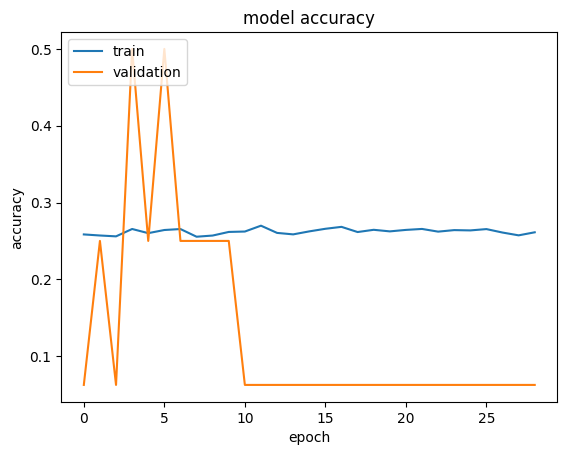

In [55]:
plt.plot(history_efficient.history["accuracy"])
plt.plot(history_efficient.history["val_accuracy"])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train", "validation"], loc="upper left")
plt.show()

### **Evaluating the EfficientnetNet Model**


In [56]:
# Calculate the number of steps for the entire test set to be processed
test_steps = test_generator.samples // batch_size

# If the number of samples isn't a multiple of the batch size,
# you have one more batch with the remaining samples
if test_generator.samples % batch_size > 0:
    test_steps += 1

# Evaluating the model on the test set
evaluation_results = new_efficient_model.evaluate(test_generator, steps=test_steps)
print(f"Loss: {evaluation_results[0]}, Accuracy: {evaluation_results[1]}")

1/4 [======>.......................] - ETA: 1s - loss: 1.3363 - accuracy: 0.0000e+00

4/4 [==============================] - 1s 7ms/step - loss: 1.3906 - accuracy: 0.2500


Loss: 1.3905775547027588, Accuracy: 0.25


### **Plotting the confusion matrix**


1/4 [======>.......................] - ETA: 1s

4/4 [==============================] - 1s 6ms/step


              precision    recall  f1-score   support

       happy       0.00      0.00      0.00        32
     neutral       0.00      0.00      0.00        32
         sad       0.25      1.00      0.40        32
    surprise       0.00      0.00      0.00        32

    accuracy                           0.25       128
   macro avg       0.06      0.25      0.10       128
weighted avg       0.06      0.25      0.10       128



/home/iamtxena/sandbox/mit-ai/my_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/iamtxena/sandbox/mit-ai/my_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/iamtxena/sandbox/mit-ai/my_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.cap

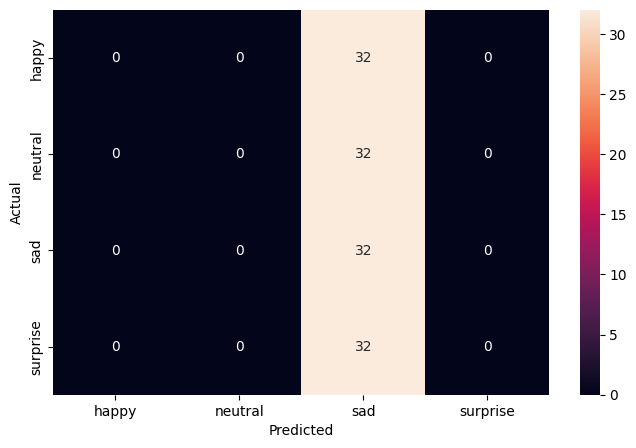

In [57]:
pred_probabilities = new_efficient_model.predict(test_generator, steps=test_steps)
pred = np.argmax(pred_probabilities, axis=1)

# Getting the true labels from the generator
y_true = test_generator.classes

# Printing the classification report with actual emotion labels
print(classification_report(y_true, pred, target_names=CATEGORIES))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)
plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt=".0f", xticklabels=CATEGORIES, yticklabels=CATEGORIES)
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

**Observations and Insights:\_\_**

**Note: You can even go back and build your own architecture on top of the VGG16 Transfer layer and see if you can improve the performance.**


**Think About It:**

- What is your overall performance of these Transfer Learning Architectures? Can we draw a comparison of these models' performances. Are we satisfied with the accuracies that we have received?
- Do you think our issue lies with 'rgb' color_mode?


Now that we have tried multiple pre-trained models, let's build a complex CNN architecture and see if we can get better performance.


## **Building a Complex Neural Network Architecture**


In this section, we will build a more complex Convolutional Neural Network Model that has close to as many parameters as we had in our Transfer Learning Models. However, we will have only 1 input channel for our input images.


## **Creating our Data Loaders**

In this section, we are creating data loaders which we will use as inputs to the more Complicated Convolutional Neural Network. We will go ahead with color_mode = 'grayscale'.


In [58]:
# Set this to 'grayscale' as the images are in grayscale
color_mode = "grayscale"
color_layers = 1
# As we have checked, all images are 48x48, we will set the img_width and img_height to 48
img_width, img_height = 48, 48
# A batch size of 32 is appropriate for this dataset provide to provide a good balance
# between the model's ability to generalize (avoid overfitting) and computational efficiency.
batch_size = 32

# Training Data Augmentation
train_datagen = ImageDataGenerator(
    # preprocessing_function=preprocess_input,
    rescale=1.0 / 255,  # Normalize pixel values to [0,1]
    # rotation_range=20,  # Slight rotation to introduce variability without distorting emotion features
    # width_shift_range=0.1,  # Slight horizontal shifts to simulate off-center faces
    # height_shift_range=0.1,  # Slight vertical shifts to account for different heights/angles
    # shear_range=0.1,  # Small shear transformations for slight perspective changes
    # zoom_range=0.1,  # Small zoom in/out to simulate closer or further away faces
    # horizontal_flip=True,  # Faces are symmetric; flipping can simulate looking from another direction
    # fill_mode="nearest",  # 'nearest' interpolation for filling in new pixels after a transformation
)

# Validation and Testing Data should not be augmented!
validation_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

# Assuming train_dir, validation_dir, and test_dir should follow the structure in DATADIR and SUBDIRS
train_dir = os.path.join(DATADIR, SUBDIRS_DICT["train"])
validation_dir = os.path.join(DATADIR, SUBDIRS_DICT["validation"])
test_dir = os.path.join(DATADIR, SUBDIRS_DICT["test"])

# Train Generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    color_mode=color_mode,  # Set to 'grayscale'
    class_mode="categorical",
)

# Validation Generator
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    color_mode=color_mode,  # Set to 'grayscale'
    class_mode="categorical",
    shuffle=False,  # shuffle=False to keep data in order for evaluation
)

# Testing Generator
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    color_mode=color_mode,  # Set to 'grayscale'
    class_mode="categorical",
    shuffle=False,  # shuffle=False to keep data in order for testing
)

Found 15109 images belonging to 4 classes.


Found 4977 images belonging to 4 classes.


Found 128 images belonging to 4 classes.


### **Model Building**

- Try building a layer with 5 Convolutional Blocks and see if performance increases.


In [59]:
# Initializing a sequential model
model_complex = Sequential()

# Adding first conv layer
model_complex.add(
    Conv2D(
        filters=512,
        kernel_size=(5, 5),
        padding="Same",
        input_shape=(img_width, img_height, color_layers),
        activation="relu",
    )
)
model_complex.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_complex.add(Dropout(0.2))

# Adding second conv layer
model_complex.add(Conv2D(filters=256, kernel_size=(5, 5), padding="Same", activation="relu"))
model_complex.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_complex.add(Dropout(0.2))

# Adding third conv layer
model_complex.add(Conv2D(filters=128, kernel_size=(5, 5), padding="Same", activation="relu"))
model_complex.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_complex.add(Dropout(0.3))

# Adding fourth conv layer
model_complex.add(Conv2D(filters=64, kernel_size=(3, 3), padding="Same", activation="relu"))
model_complex.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_complex.add(Dropout(0.3))

# Adding fifth conv layer
model_complex.add(Conv2D(filters=32, kernel_size=(3, 3), padding="Same", activation="relu"))
model_complex.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model_complex.add(Dropout(0.3))

# Flattening
model_complex.add(Flatten())
model_complex.add(Dense(64, activation="relu"))
model_complex.add(Dense(32, activation="relu"))

# Adding the output layer with 4 neurons and activation functions as softmax since this is a multi-class classification problem
model_complex.add(Dense(4, activation="softmax"))

# Using Adam Optimizer
optimizer = Adam(learning_rate=0.0005)

### **Compiling and Training the Model**


In [60]:
model_complex.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])
model_complex.summary()

Model: "sequential_1"


_________________________________________________________________


 Layer (type)                Output Shape              Param #   


 conv2d (Conv2D)             (None, 48, 48, 512)       13312     


 max_pooling2d (MaxPooling2  (None, 24, 24, 512)       0         


 D)                                                              


 dropout_2 (Dropout)         (None, 24, 24, 512)       0         


 conv2d_1 (Conv2D)           (None, 24, 24, 256)       3277056   


 max_pooling2d_1 (MaxPoolin  (None, 12, 12, 256)       0         


 g2D)                                                            


 dropout_3 (Dropout)         (None, 12, 12, 256)       0         


 conv2d_2 (Conv2D)           (None, 12, 12, 128)       819328    


 max_pooling2d_2 (MaxPoolin  (None, 6, 6, 128)         0         


 g2D)                                                            


 dropout_4 (Dropout)         (None, 6, 6, 128)         0         


 conv2d_3 (Conv2D)           (None, 6, 6, 64)          73792     


 max_pooling2d_3 (MaxPoolin  (None, 3, 3, 64)          0         


 g2D)                                                            


 dropout_5 (Dropout)         (None, 3, 3, 64)          0         


 conv2d_4 (Conv2D)           (None, 3, 3, 32)          18464     


 max_pooling2d_4 (MaxPoolin  (None, 1, 1, 32)          0         


 g2D)                                                            


 dropout_6 (Dropout)         (None, 1, 1, 32)          0         


 flatten (Flatten)           (None, 32)                0         


 dense_3 (Dense)             (None, 64)                2112      


 dense_4 (Dense)             (None, 32)                2080      


 dense_5 (Dense)             (None, 4)                 132       


Total params: 4206276 (16.05 MB)


Trainable params: 4206276 (16.05 MB)


Non-trainable params: 0 (0.00 Byte)


_________________________________________________________________


In [61]:
# Get the current time
current_time = datetime.now().strftime("%Y%m%d-%H%M%S")

# Set up Early Stopping with a patience 7 but acting after at least 30 epochs
delayed_early_stopping = DelayedEarlyStopping(
    monitor="val_loss", patience=7, verbose=1, restore_best_weights=True, start_epoch=30
)

# Define the learning rate scheduler callback
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.2, patience=5, min_lr=0.00001, verbose=1)

mc = ModelCheckpoint(
    f"{results_path}/best_model_complex_{current_time}.keras",
    monitor="val_accuracy",
    mode="max",
    verbose=1,
    save_best_only=True,
)

# Pulling a single large batch of random validation data for doing the validation after each epoch
validationX, validationY = validation_generator.next()

# Fitting the model with 40 epochs and using validation set
history_complex = model_complex.fit(
    train_generator,
    epochs=40,
    validation_data=(validationX, validationY),
    callbacks=[delayed_early_stopping, mc, reduce_lr],
)

Epoch 1/40


2024-03-20 07:18:27.624235: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_1/dropout_2/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


  1/473 [..............................] - ETA: 29:41 - loss: 1.3944 - accuracy: 0.0938

  4/473 [..............................] - ETA: 10s - loss: 1.3928 - accuracy: 0.2188  

  7/473 [..............................] - ETA: 10s - loss: 1.4007 - accuracy: 0.2232

 10/473 [..............................] - ETA: 10s - loss: 1.3919 - accuracy: 0.2344

 13/473 [..............................] - ETA: 10s - loss: 1.3925 - accuracy: 0.2380

 16/473 [>.............................] - ETA: 10s - loss: 1.3908 - accuracy: 0.2461

 17/473 [>.............................] - ETA: 30s - loss: 1.3907 - accuracy: 0.2456

 20/473 [>.............................] - ETA: 27s - loss: 1.3888 - accuracy: 0.2512

 23/473 [>.............................] - ETA: 24s - loss: 1.3874 - accuracy: 0.2553

 26/473 [>.............................] - ETA: 22s - loss: 1.3881 - accuracy: 0.2559

 29/473 [>.............................] - ETA: 21s - loss: 1.3882 - accuracy: 0.2586

 32/473 [=>............................] - ETA: 19s - loss: 1.3870 - accuracy: 0.2598

 35/473 [=>............................] - ETA: 18s - loss: 1.3873 - accuracy: 0.2580

 38/473 [=>............................] - ETA: 17s - loss: 1.3873 - accuracy: 0.2590

 41/473 [=>............................] - ETA: 17s - loss: 1.3871 - accuracy: 0.2584

 44/473 [=>............................] - ETA: 16s - loss: 1.3866 - accuracy: 0.2563

 47/473 [=>............................] - ETA: 15s - loss: 1.3865 - accuracy: 0.2559

 50/473 [==>...........................] - ETA: 15s - loss: 1.3864 - accuracy: 0.2568

 53/473 [==>...........................] - ETA: 14s - loss: 1.3861 - accuracy: 0.2606

 56/473 [==>...........................] - ETA: 14s - loss: 1.3867 - accuracy: 0.2561

 59/473 [==>...........................] - ETA: 14s - loss: 1.3867 - accuracy: 0.2547

 62/473 [==>...........................] - ETA: 13s - loss: 1.3867 - accuracy: 0.2550

 65/473 [===>..........................] - ETA: 13s - loss: 1.3866 - accuracy: 0.2552

 68/473 [===>..........................] - ETA: 12s - loss: 1.3865 - accuracy: 0.2545

 71/473 [===>..........................] - ETA: 12s - loss: 1.3865 - accuracy: 0.2539

 74/473 [===>..........................] - ETA: 12s - loss: 1.3865 - accuracy: 0.2554

 77/473 [===>..........................] - ETA: 12s - loss: 1.3863 - accuracy: 0.2573

 80/473 [====>.........................] - ETA: 11s - loss: 1.3864 - accuracy: 0.2570

 83/473 [====>.........................] - ETA: 11s - loss: 1.3863 - accuracy: 0.2571

 86/473 [====>.........................] - ETA: 11s - loss: 1.3862 - accuracy: 0.2576

 89/473 [====>.........................] - ETA: 11s - loss: 1.3861 - accuracy: 0.2574

 92/473 [====>.........................] - ETA: 11s - loss: 1.3859 - accuracy: 0.2602

 95/473 [=====>........................] - ETA: 10s - loss: 1.3859 - accuracy: 0.2602

 98/473 [=====>........................] - ETA: 10s - loss: 1.3859 - accuracy: 0.2615

101/473 [=====>........................] - ETA: 10s - loss: 1.3858 - accuracy: 0.2615

104/473 [=====>........................] - ETA: 10s - loss: 1.3858 - accuracy: 0.2599

107/473 [=====>........................] - ETA: 10s - loss: 1.3858 - accuracy: 0.2596

110/473 [=====>........................] - ETA: 10s - loss: 1.3857 - accuracy: 0.2625

113/473 [======>.......................] - ETA: 9s - loss: 1.3857 - accuracy: 0.2625 

116/473 [======>.......................] - ETA: 9s - loss: 1.3859 - accuracy: 0.2605

119/473 [======>.......................] - ETA: 9s - loss: 1.3859 - accuracy: 0.2597

122/473 [======>.......................] - ETA: 9s - loss: 1.3859 - accuracy: 0.2600

125/473 [======>.......................] - ETA: 9s - loss: 1.3858 - accuracy: 0.2598

128/473 [=======>......................] - ETA: 9s - loss: 1.3857 - accuracy: 0.2600

131/473 [=======>......................] - ETA: 9s - loss: 1.3858 - accuracy: 0.2600

134/473 [=======>......................] - ETA: 8s - loss: 1.3858 - accuracy: 0.2589

137/473 [=======>......................] - ETA: 8s - loss: 1.3855 - accuracy: 0.2582

140/473 [=======>......................] - ETA: 8s - loss: 1.3856 - accuracy: 0.2576

143/473 [========>.....................] - ETA: 8s - loss: 1.3856 - accuracy: 0.2587

146/473 [========>.....................] - ETA: 8s - loss: 1.3856 - accuracy: 0.2583

149/473 [========>.....................] - ETA: 8s - loss: 1.3855 - accuracy: 0.2569

152/473 [========>.....................] - ETA: 8s - loss: 1.3854 - accuracy: 0.2572

155/473 [========>.....................] - ETA: 8s - loss: 1.3853 - accuracy: 0.2570

158/473 [=========>....................] - ETA: 8s - loss: 1.3856 - accuracy: 0.2569

161/473 [=========>....................] - ETA: 7s - loss: 1.3856 - accuracy: 0.2572

164/473 [=========>....................] - ETA: 7s - loss: 1.3854 - accuracy: 0.2580

167/473 [=========>....................] - ETA: 7s - loss: 1.3852 - accuracy: 0.2579

170/473 [=========>....................] - ETA: 7s - loss: 1.3853 - accuracy: 0.2572

173/473 [=========>....................] - ETA: 7s - loss: 1.3854 - accuracy: 0.2565

176/473 [==========>...................] - ETA: 7s - loss: 1.3852 - accuracy: 0.2564

179/473 [==========>...................] - ETA: 7s - loss: 1.3852 - accuracy: 0.2575

182/473 [==========>...................] - ETA: 7s - loss: 1.3852 - accuracy: 0.2567

185/473 [==========>...................] - ETA: 7s - loss: 1.3853 - accuracy: 0.2573

188/473 [==========>...................] - ETA: 7s - loss: 1.3852 - accuracy: 0.2576

191/473 [===========>..................] - ETA: 6s - loss: 1.3854 - accuracy: 0.2565

194/473 [===========>..................] - ETA: 6s - loss: 1.3853 - accuracy: 0.2566

197/473 [===========>..................] - ETA: 6s - loss: 1.3851 - accuracy: 0.2567

200/473 [===========>..................] - ETA: 6s - loss: 1.3850 - accuracy: 0.2572

203/473 [===========>..................] - ETA: 6s - loss: 1.3850 - accuracy: 0.2565

206/473 [============>.................] - ETA: 6s - loss: 1.3849 - accuracy: 0.2568

209/473 [============>.................] - ETA: 6s - loss: 1.3847 - accuracy: 0.2581

212/473 [============>.................] - ETA: 6s - loss: 1.3847 - accuracy: 0.2575

215/473 [============>.................] - ETA: 6s - loss: 1.3844 - accuracy: 0.2574

218/473 [============>.................] - ETA: 6s - loss: 1.3842 - accuracy: 0.2580

221/473 [=============>................] - ETA: 6s - loss: 1.3844 - accuracy: 0.2578

224/473 [=============>................] - ETA: 6s - loss: 1.3839 - accuracy: 0.2577

227/473 [=============>................] - ETA: 5s - loss: 1.3835 - accuracy: 0.2585

230/473 [=============>................] - ETA: 5s - loss: 1.3840 - accuracy: 0.2581

233/473 [=============>................] - ETA: 5s - loss: 1.3840 - accuracy: 0.2580

236/473 [=============>................] - ETA: 5s - loss: 1.3839 - accuracy: 0.2571

239/473 [==============>...............] - ETA: 5s - loss: 1.3837 - accuracy: 0.2580

242/473 [==============>...............] - ETA: 5s - loss: 1.3836 - accuracy: 0.2585

245/473 [==============>...............] - ETA: 5s - loss: 1.3834 - accuracy: 0.2587

248/473 [==============>...............] - ETA: 5s - loss: 1.3835 - accuracy: 0.2586

251/473 [==============>...............] - ETA: 5s - loss: 1.3833 - accuracy: 0.2593

254/473 [===============>..............] - ETA: 5s - loss: 1.3833 - accuracy: 0.2592

257/473 [===============>..............] - ETA: 5s - loss: 1.3833 - accuracy: 0.2589

260/473 [===============>..............] - ETA: 5s - loss: 1.3832 - accuracy: 0.2599

263/473 [===============>..............] - ETA: 4s - loss: 1.3831 - accuracy: 0.2596

266/473 [===============>..............] - ETA: 4s - loss: 1.3830 - accuracy: 0.2579

269/473 [================>.............] - ETA: 4s - loss: 1.3828 - accuracy: 0.2589

272/473 [================>.............] - ETA: 4s - loss: 1.3831 - accuracy: 0.2588

275/473 [================>.............] - ETA: 4s - loss: 1.3829 - accuracy: 0.2591

278/473 [================>.............] - ETA: 4s - loss: 1.3828 - accuracy: 0.2593

281/473 [================>.............] - ETA: 4s - loss: 1.3828 - accuracy: 0.2596

284/473 [=================>............] - ETA: 4s - loss: 1.3826 - accuracy: 0.2601

287/473 [=================>............] - ETA: 4s - loss: 1.3825 - accuracy: 0.2599

290/473 [=================>............] - ETA: 4s - loss: 1.3827 - accuracy: 0.2594

293/473 [=================>............] - ETA: 4s - loss: 1.3829 - accuracy: 0.2591

296/473 [=================>............] - ETA: 4s - loss: 1.3829 - accuracy: 0.2591

299/473 [=================>............] - ETA: 4s - loss: 1.3829 - accuracy: 0.2589

302/473 [==================>...........] - ETA: 3s - loss: 1.3829 - accuracy: 0.2587

305/473 [==================>...........] - ETA: 3s - loss: 1.3828 - accuracy: 0.2583

308/473 [==================>...........] - ETA: 3s - loss: 1.3828 - accuracy: 0.2579

311/473 [==================>...........] - ETA: 3s - loss: 1.3825 - accuracy: 0.2578

314/473 [==================>...........] - ETA: 3s - loss: 1.3824 - accuracy: 0.2579

317/473 [===================>..........] - ETA: 3s - loss: 1.3821 - accuracy: 0.2579

320/473 [===================>..........] - ETA: 3s - loss: 1.3819 - accuracy: 0.2579

323/473 [===================>..........] - ETA: 3s - loss: 1.3816 - accuracy: 0.2580

326/473 [===================>..........] - ETA: 3s - loss: 1.3813 - accuracy: 0.2582

329/473 [===================>..........] - ETA: 3s - loss: 1.3814 - accuracy: 0.2580

332/473 [====================>.........] - ETA: 3s - loss: 1.3812 - accuracy: 0.2584

335/473 [====================>.........] - ETA: 3s - loss: 1.3810 - accuracy: 0.2588

338/473 [====================>.........] - ETA: 3s - loss: 1.3807 - accuracy: 0.2592

341/473 [====================>.........] - ETA: 3s - loss: 1.3805 - accuracy: 0.2594

344/473 [====================>.........] - ETA: 2s - loss: 1.3803 - accuracy: 0.2600

347/473 [=====================>........] - ETA: 2s - loss: 1.3802 - accuracy: 0.2604

350/473 [=====================>........] - ETA: 2s - loss: 1.3803 - accuracy: 0.2605

353/473 [=====================>........] - ETA: 2s - loss: 1.3799 - accuracy: 0.2613

356/473 [=====================>........] - ETA: 2s - loss: 1.3801 - accuracy: 0.2612

359/473 [=====================>........] - ETA: 2s - loss: 1.3798 - accuracy: 0.2612

362/473 [=====================>........] - ETA: 2s - loss: 1.3793 - accuracy: 0.2617

365/473 [======================>.......] - ETA: 2s - loss: 1.3790 - accuracy: 0.2633

368/473 [======================>.......] - ETA: 2s - loss: 1.3792 - accuracy: 0.2637

371/473 [======================>.......] - ETA: 2s - loss: 1.3790 - accuracy: 0.2639

374/473 [======================>.......] - ETA: 2s - loss: 1.3792 - accuracy: 0.2632

377/473 [======================>.......] - ETA: 2s - loss: 1.3791 - accuracy: 0.2639

380/473 [=======================>......] - ETA: 2s - loss: 1.3791 - accuracy: 0.2639

383/473 [=======================>......] - ETA: 2s - loss: 1.3791 - accuracy: 0.2636

386/473 [=======================>......] - ETA: 1s - loss: 1.3790 - accuracy: 0.2638

389/473 [=======================>......] - ETA: 1s - loss: 1.3788 - accuracy: 0.2637

392/473 [=======================>......] - ETA: 1s - loss: 1.3789 - accuracy: 0.2640

395/473 [========================>.....] - ETA: 1s - loss: 1.3787 - accuracy: 0.2639

398/473 [========================>.....] - ETA: 1s - loss: 1.3785 - accuracy: 0.2646

401/473 [========================>.....] - ETA: 1s - loss: 1.3784 - accuracy: 0.2644

404/473 [========================>.....] - ETA: 1s - loss: 1.3784 - accuracy: 0.2642

407/473 [========================>.....] - ETA: 1s - loss: 1.3785 - accuracy: 0.2640

410/473 [=========================>....] - ETA: 1s - loss: 1.3783 - accuracy: 0.2636

413/473 [=========================>....] - ETA: 1s - loss: 1.3780 - accuracy: 0.2639

416/473 [=========================>....] - ETA: 1s - loss: 1.3781 - accuracy: 0.2638

419/473 [=========================>....] - ETA: 1s - loss: 1.3780 - accuracy: 0.2638

422/473 [=========================>....] - ETA: 1s - loss: 1.3780 - accuracy: 0.2643

425/473 [=========================>....] - ETA: 1s - loss: 1.3780 - accuracy: 0.2641

428/473 [==========================>...] - ETA: 1s - loss: 1.3780 - accuracy: 0.2639

431/473 [==========================>...] - ETA: 0s - loss: 1.3780 - accuracy: 0.2641

434/473 [==========================>...] - ETA: 0s - loss: 1.3780 - accuracy: 0.2640

437/473 [==========================>...] - ETA: 0s - loss: 1.3779 - accuracy: 0.2642

440/473 [==========================>...] - ETA: 0s - loss: 1.3780 - accuracy: 0.2639

443/473 [===========================>..] - ETA: 0s - loss: 1.3779 - accuracy: 0.2645

446/473 [===========================>..] - ETA: 0s - loss: 1.3778 - accuracy: 0.2648

449/473 [===========================>..] - ETA: 0s - loss: 1.3778 - accuracy: 0.2645

452/473 [===========================>..] - ETA: 0s - loss: 1.3777 - accuracy: 0.2649

455/473 [===========================>..] - ETA: 0s - loss: 1.3776 - accuracy: 0.2651

458/473 [============================>.] - ETA: 0s - loss: 1.3774 - accuracy: 0.2654

461/473 [============================>.] - ETA: 0s - loss: 1.3774 - accuracy: 0.2653

464/473 [============================>.] - ETA: 0s - loss: 1.3772 - accuracy: 0.2656

467/473 [============================>.] - ETA: 0s - loss: 1.3769 - accuracy: 0.2658

470/473 [============================>.] - ETA: 0s - loss: 1.3770 - accuracy: 0.2662

473/473 [==============================] - ETA: 0s - loss: 1.3768 - accuracy: 0.2663


Epoch 1: val_accuracy improved from -inf to 0.59375, saving model to /home/iamtxena/sandbox/mit-ai/capstone/Facial_Emotion_Recognition/results/best_model_complex_20240320-071826.keras


473/473 [==============================] - 15s 23ms/step - loss: 1.3768 - accuracy: 0.2663 - val_loss: 1.3237 - val_accuracy: 0.5938 - lr: 5.0000e-04


Epoch 2/40


  1/473 [..............................] - ETA: 13s - loss: 1.3421 - accuracy: 0.3125

  4/473 [..............................] - ETA: 9s - loss: 1.3597 - accuracy: 0.3906 

  7/473 [..............................] - ETA: 9s - loss: 1.3533 - accuracy: 0.3750

 10/473 [..............................] - ETA: 9s - loss: 1.3574 - accuracy: 0.3531

 13/473 [..............................] - ETA: 9s - loss: 1.3653 - accuracy: 0.3173

 16/473 [>.............................] - ETA: 9s - loss: 1.3593 - accuracy: 0.3047

 19/473 [>.............................] - ETA: 9s - loss: 1.3581 - accuracy: 0.2928

 22/473 [>.............................] - ETA: 9s - loss: 1.3534 - accuracy: 0.2898

 25/473 [>.............................] - ETA: 9s - loss: 1.3572 - accuracy: 0.2950

 28/473 [>.............................] - ETA: 9s - loss: 1.3553 - accuracy: 0.2946

 31/473 [>.............................] - ETA: 9s - loss: 1.3595 - accuracy: 0.2853

 34/473 [=>............................] - ETA: 9s - loss: 1.3605 - accuracy: 0.2868

 37/473 [=>............................] - ETA: 9s - loss: 1.3596 - accuracy: 0.2872

 40/473 [=>............................] - ETA: 9s - loss: 1.3574 - accuracy: 0.2859

 43/473 [=>............................] - ETA: 9s - loss: 1.3574 - accuracy: 0.2878

 46/473 [=>............................] - ETA: 8s - loss: 1.3582 - accuracy: 0.2867

 49/473 [==>...........................] - ETA: 8s - loss: 1.3594 - accuracy: 0.2908

 52/473 [==>...........................] - ETA: 8s - loss: 1.3587 - accuracy: 0.2933

 55/473 [==>...........................] - ETA: 8s - loss: 1.3581 - accuracy: 0.2943

 58/473 [==>...........................] - ETA: 8s - loss: 1.3585 - accuracy: 0.2904

 61/473 [==>...........................] - ETA: 8s - loss: 1.3573 - accuracy: 0.2879

 64/473 [===>..........................] - ETA: 8s - loss: 1.3568 - accuracy: 0.2876

 67/473 [===>..........................] - ETA: 8s - loss: 1.3560 - accuracy: 0.2892

 70/473 [===>..........................] - ETA: 8s - loss: 1.3542 - accuracy: 0.2924

 73/473 [===>..........................] - ETA: 8s - loss: 1.3533 - accuracy: 0.2941

 76/473 [===>..........................] - ETA: 8s - loss: 1.3556 - accuracy: 0.2915

 79/473 [====>.........................] - ETA: 8s - loss: 1.3555 - accuracy: 0.2931

 82/473 [====>.........................] - ETA: 8s - loss: 1.3559 - accuracy: 0.2927

 85/473 [====>.........................] - ETA: 8s - loss: 1.3564 - accuracy: 0.2923

 88/473 [====>.........................] - ETA: 8s - loss: 1.3565 - accuracy: 0.2933

 91/473 [====>.........................] - ETA: 8s - loss: 1.3559 - accuracy: 0.2940

 94/473 [====>.........................] - ETA: 8s - loss: 1.3564 - accuracy: 0.2949

 97/473 [=====>........................] - ETA: 7s - loss: 1.3555 - accuracy: 0.2954

100/473 [=====>........................] - ETA: 7s - loss: 1.3549 - accuracy: 0.2981

103/473 [=====>........................] - ETA: 7s - loss: 1.3547 - accuracy: 0.2992

106/473 [=====>........................] - ETA: 7s - loss: 1.3548 - accuracy: 0.2998

109/473 [=====>........................] - ETA: 7s - loss: 1.3552 - accuracy: 0.2985

112/473 [======>.......................] - ETA: 7s - loss: 1.3555 - accuracy: 0.2991

115/473 [======>.......................] - ETA: 7s - loss: 1.3561 - accuracy: 0.2989

118/473 [======>.......................] - ETA: 7s - loss: 1.3560 - accuracy: 0.3006

121/473 [======>.......................] - ETA: 7s - loss: 1.3563 - accuracy: 0.2988

124/473 [======>.......................] - ETA: 7s - loss: 1.3566 - accuracy: 0.2976

127/473 [=======>......................] - ETA: 7s - loss: 1.3565 - accuracy: 0.2975

130/473 [=======>......................] - ETA: 7s - loss: 1.3564 - accuracy: 0.2976

133/473 [=======>......................] - ETA: 7s - loss: 1.3567 - accuracy: 0.2989

136/473 [=======>......................] - ETA: 7s - loss: 1.3568 - accuracy: 0.2969

139/473 [=======>......................] - ETA: 7s - loss: 1.3569 - accuracy: 0.2979

142/473 [========>.....................] - ETA: 7s - loss: 1.3575 - accuracy: 0.2975

145/473 [========>.....................] - ETA: 6s - loss: 1.3577 - accuracy: 0.2950

148/473 [========>.....................] - ETA: 6s - loss: 1.3579 - accuracy: 0.2954

151/473 [========>.....................] - ETA: 6s - loss: 1.3576 - accuracy: 0.2959

154/473 [========>.....................] - ETA: 6s - loss: 1.3570 - accuracy: 0.2977

157/473 [========>.....................] - ETA: 6s - loss: 1.3569 - accuracy: 0.2982

160/473 [=========>....................] - ETA: 6s - loss: 1.3567 - accuracy: 0.2982

163/473 [=========>....................] - ETA: 6s - loss: 1.3566 - accuracy: 0.2968

166/473 [=========>....................] - ETA: 6s - loss: 1.3572 - accuracy: 0.2974

169/473 [=========>....................] - ETA: 6s - loss: 1.3577 - accuracy: 0.2970

172/473 [=========>....................] - ETA: 6s - loss: 1.3579 - accuracy: 0.2967

175/473 [==========>...................] - ETA: 6s - loss: 1.3577 - accuracy: 0.2977

178/473 [==========>...................] - ETA: 6s - loss: 1.3583 - accuracy: 0.2974

181/473 [==========>...................] - ETA: 6s - loss: 1.3584 - accuracy: 0.2966

184/473 [==========>...................] - ETA: 6s - loss: 1.3585 - accuracy: 0.2957

187/473 [==========>...................] - ETA: 6s - loss: 1.3582 - accuracy: 0.2965

190/473 [===========>..................] - ETA: 5s - loss: 1.3579 - accuracy: 0.2974

193/473 [===========>..................] - ETA: 5s - loss: 1.3573 - accuracy: 0.2981

196/473 [===========>..................] - ETA: 5s - loss: 1.3571 - accuracy: 0.2994

199/473 [===========>..................] - ETA: 5s - loss: 1.3570 - accuracy: 0.2998

202/473 [===========>..................] - ETA: 5s - loss: 1.3562 - accuracy: 0.3001

205/473 [============>.................] - ETA: 5s - loss: 1.3555 - accuracy: 0.3006

208/473 [============>.................] - ETA: 5s - loss: 1.3548 - accuracy: 0.3018

211/473 [============>.................] - ETA: 5s - loss: 1.3545 - accuracy: 0.3026

214/473 [============>.................] - ETA: 5s - loss: 1.3550 - accuracy: 0.3021

217/473 [============>.................] - ETA: 5s - loss: 1.3548 - accuracy: 0.3026

220/473 [============>.................] - ETA: 5s - loss: 1.3546 - accuracy: 0.3020

223/473 [=============>................] - ETA: 5s - loss: 1.3540 - accuracy: 0.3023

226/473 [=============>................] - ETA: 5s - loss: 1.3536 - accuracy: 0.3031

229/473 [=============>................] - ETA: 5s - loss: 1.3535 - accuracy: 0.3025

232/473 [=============>................] - ETA: 5s - loss: 1.3530 - accuracy: 0.3029

235/473 [=============>................] - ETA: 5s - loss: 1.3527 - accuracy: 0.3035

238/473 [==============>...............] - ETA: 4s - loss: 1.3521 - accuracy: 0.3045

241/473 [==============>...............] - ETA: 4s - loss: 1.3517 - accuracy: 0.3043

244/473 [==============>...............] - ETA: 4s - loss: 1.3513 - accuracy: 0.3046

247/473 [==============>...............] - ETA: 4s - loss: 1.3505 - accuracy: 0.3063

250/473 [==============>...............] - ETA: 4s - loss: 1.3500 - accuracy: 0.3065

253/473 [===============>..............] - ETA: 4s - loss: 1.3493 - accuracy: 0.3071

256/473 [===============>..............] - ETA: 4s - loss: 1.3484 - accuracy: 0.3071

259/473 [===============>..............] - ETA: 4s - loss: 1.3475 - accuracy: 0.3084

262/473 [===============>..............] - ETA: 4s - loss: 1.3472 - accuracy: 0.3089

265/473 [===============>..............] - ETA: 4s - loss: 1.3473 - accuracy: 0.3091

268/473 [===============>..............] - ETA: 4s - loss: 1.3469 - accuracy: 0.3094

271/473 [================>.............] - ETA: 4s - loss: 1.3461 - accuracy: 0.3103

274/473 [================>.............] - ETA: 4s - loss: 1.3458 - accuracy: 0.3115

277/473 [================>.............] - ETA: 4s - loss: 1.3452 - accuracy: 0.3126

280/473 [================>.............] - ETA: 4s - loss: 1.3445 - accuracy: 0.3138

283/473 [================>.............] - ETA: 3s - loss: 1.3437 - accuracy: 0.3156

286/473 [=================>............] - ETA: 3s - loss: 1.3432 - accuracy: 0.3167

289/473 [=================>............] - ETA: 3s - loss: 1.3429 - accuracy: 0.3168

292/473 [=================>............] - ETA: 3s - loss: 1.3425 - accuracy: 0.3172

295/473 [=================>............] - ETA: 3s - loss: 1.3417 - accuracy: 0.3183

298/473 [=================>............] - ETA: 3s - loss: 1.3407 - accuracy: 0.3195

301/473 [==================>...........] - ETA: 3s - loss: 1.3409 - accuracy: 0.3196

304/473 [==================>...........] - ETA: 3s - loss: 1.3399 - accuracy: 0.3199

307/473 [==================>...........] - ETA: 3s - loss: 1.3394 - accuracy: 0.3191

310/473 [==================>...........] - ETA: 3s - loss: 1.3387 - accuracy: 0.3197

313/473 [==================>...........] - ETA: 3s - loss: 1.3370 - accuracy: 0.3208

316/473 [===================>..........] - ETA: 3s - loss: 1.3371 - accuracy: 0.3208

319/473 [===================>..........] - ETA: 3s - loss: 1.3374 - accuracy: 0.3204

322/473 [===================>..........] - ETA: 3s - loss: 1.3365 - accuracy: 0.3210

325/473 [===================>..........] - ETA: 3s - loss: 1.3360 - accuracy: 0.3213

328/473 [===================>..........] - ETA: 3s - loss: 1.3355 - accuracy: 0.3216

331/473 [===================>..........] - ETA: 2s - loss: 1.3349 - accuracy: 0.3224

334/473 [====================>.........] - ETA: 2s - loss: 1.3342 - accuracy: 0.3230

337/473 [====================>.........] - ETA: 2s - loss: 1.3339 - accuracy: 0.3236

340/473 [====================>.........] - ETA: 2s - loss: 1.3332 - accuracy: 0.3241

343/473 [====================>.........] - ETA: 2s - loss: 1.3326 - accuracy: 0.3249

346/473 [====================>.........] - ETA: 2s - loss: 1.3322 - accuracy: 0.3250

349/473 [=====================>........] - ETA: 2s - loss: 1.3309 - accuracy: 0.3259

352/473 [=====================>........] - ETA: 2s - loss: 1.3305 - accuracy: 0.3255

355/473 [=====================>........] - ETA: 2s - loss: 1.3303 - accuracy: 0.3259

358/473 [=====================>........] - ETA: 2s - loss: 1.3294 - accuracy: 0.3263

361/473 [=====================>........] - ETA: 2s - loss: 1.3284 - accuracy: 0.3268

364/473 [======================>.......] - ETA: 2s - loss: 1.3276 - accuracy: 0.3267

367/473 [======================>.......] - ETA: 2s - loss: 1.3266 - accuracy: 0.3273

370/473 [======================>.......] - ETA: 2s - loss: 1.3263 - accuracy: 0.3274

373/473 [======================>.......] - ETA: 2s - loss: 1.3254 - accuracy: 0.3278

376/473 [======================>.......] - ETA: 2s - loss: 1.3238 - accuracy: 0.3289

379/473 [=======================>......] - ETA: 1s - loss: 1.3231 - accuracy: 0.3292

382/473 [=======================>......] - ETA: 1s - loss: 1.3229 - accuracy: 0.3293

385/473 [=======================>......] - ETA: 1s - loss: 1.3222 - accuracy: 0.3296

388/473 [=======================>......] - ETA: 1s - loss: 1.3214 - accuracy: 0.3301

391/473 [=======================>......] - ETA: 1s - loss: 1.3208 - accuracy: 0.3303

394/473 [=======================>......] - ETA: 1s - loss: 1.3204 - accuracy: 0.3295

397/473 [========================>.....] - ETA: 1s - loss: 1.3199 - accuracy: 0.3296

400/473 [========================>.....] - ETA: 1s - loss: 1.3193 - accuracy: 0.3303

403/473 [========================>.....] - ETA: 1s - loss: 1.3182 - accuracy: 0.3316

406/473 [========================>.....] - ETA: 1s - loss: 1.3174 - accuracy: 0.3325

409/473 [========================>.....] - ETA: 1s - loss: 1.3170 - accuracy: 0.3332

412/473 [=========================>....] - ETA: 1s - loss: 1.3164 - accuracy: 0.3340

415/473 [=========================>....] - ETA: 1s - loss: 1.3157 - accuracy: 0.3342

418/473 [=========================>....] - ETA: 1s - loss: 1.3155 - accuracy: 0.3339

421/473 [=========================>....] - ETA: 1s - loss: 1.3152 - accuracy: 0.3341

424/473 [=========================>....] - ETA: 1s - loss: 1.3146 - accuracy: 0.3342

427/473 [==========================>...] - ETA: 0s - loss: 1.3145 - accuracy: 0.3348

430/473 [==========================>...] - ETA: 0s - loss: 1.3135 - accuracy: 0.3355

433/473 [==========================>...] - ETA: 0s - loss: 1.3124 - accuracy: 0.3359

436/473 [==========================>...] - ETA: 0s - loss: 1.3122 - accuracy: 0.3362

439/473 [==========================>...] - ETA: 0s - loss: 1.3118 - accuracy: 0.3361

442/473 [===========================>..] - ETA: 0s - loss: 1.3112 - accuracy: 0.3365

445/473 [===========================>..] - ETA: 0s - loss: 1.3104 - accuracy: 0.3372

448/473 [===========================>..] - ETA: 0s - loss: 1.3096 - accuracy: 0.3375

451/473 [===========================>..] - ETA: 0s - loss: 1.3090 - accuracy: 0.3378

454/473 [===========================>..] - ETA: 0s - loss: 1.3082 - accuracy: 0.3385

457/473 [===========================>..] - ETA: 0s - loss: 1.3076 - accuracy: 0.3390

460/473 [============================>.] - ETA: 0s - loss: 1.3071 - accuracy: 0.3394

463/473 [============================>.] - ETA: 0s - loss: 1.3061 - accuracy: 0.3400

466/473 [============================>.] - ETA: 0s - loss: 1.3052 - accuracy: 0.3410

469/473 [============================>.] - ETA: 0s - loss: 1.3046 - accuracy: 0.3415

472/473 [============================>.] - ETA: 0s - loss: 1.3038 - accuracy: 0.3418


Epoch 2: val_accuracy improved from 0.59375 to 0.75000, saving model to /home/iamtxena/sandbox/mit-ai/capstone/Facial_Emotion_Recognition/results/best_model_complex_20240320-071826.keras


473/473 [==============================] - 10s 21ms/step - loss: 1.3037 - accuracy: 0.3419 - val_loss: 1.1732 - val_accuracy: 0.7500 - lr: 5.0000e-04


Epoch 3/40


  1/473 [..............................] - ETA: 14s - loss: 1.2150 - accuracy: 0.2500

  4/473 [..............................] - ETA: 9s - loss: 1.2588 - accuracy: 0.3828 

  7/473 [..............................] - ETA: 9s - loss: 1.2362 - accuracy: 0.4152

 10/473 [..............................] - ETA: 9s - loss: 1.2174 - accuracy: 0.4250

 13/473 [..............................] - ETA: 9s - loss: 1.2092 - accuracy: 0.4327

 16/473 [>.............................] - ETA: 9s - loss: 1.2061 - accuracy: 0.4316

 19/473 [>.............................] - ETA: 9s - loss: 1.2167 - accuracy: 0.4375

 22/473 [>.............................] - ETA: 9s - loss: 1.2160 - accuracy: 0.4375

 25/473 [>.............................] - ETA: 9s - loss: 1.2095 - accuracy: 0.4350

 28/473 [>.............................] - ETA: 9s - loss: 1.2110 - accuracy: 0.4297

 31/473 [>.............................] - ETA: 9s - loss: 1.2155 - accuracy: 0.4274

 34/473 [=>............................] - ETA: 9s - loss: 1.2166 - accuracy: 0.4256

 37/473 [=>............................] - ETA: 9s - loss: 1.2194 - accuracy: 0.4223

 40/473 [=>............................] - ETA: 9s - loss: 1.2139 - accuracy: 0.4281

 43/473 [=>............................] - ETA: 9s - loss: 1.2099 - accuracy: 0.4331

 46/473 [=>............................] - ETA: 9s - loss: 1.2101 - accuracy: 0.4287

 49/473 [==>...........................] - ETA: 9s - loss: 1.2065 - accuracy: 0.4298

 52/473 [==>...........................] - ETA: 8s - loss: 1.2055 - accuracy: 0.4309

 55/473 [==>...........................] - ETA: 8s - loss: 1.2052 - accuracy: 0.4313

 58/473 [==>...........................] - ETA: 8s - loss: 1.2121 - accuracy: 0.4235

 61/473 [==>...........................] - ETA: 8s - loss: 1.2131 - accuracy: 0.4196

 64/473 [===>..........................] - ETA: 8s - loss: 1.2156 - accuracy: 0.4160

 67/473 [===>..........................] - ETA: 8s - loss: 1.2188 - accuracy: 0.4146

 70/473 [===>..........................] - ETA: 8s - loss: 1.2180 - accuracy: 0.4112

 73/473 [===>..........................] - ETA: 8s - loss: 1.2172 - accuracy: 0.4110

 76/473 [===>..........................] - ETA: 8s - loss: 1.2192 - accuracy: 0.4112

 79/473 [====>.........................] - ETA: 8s - loss: 1.2181 - accuracy: 0.4118

 82/473 [====>.........................] - ETA: 8s - loss: 1.2154 - accuracy: 0.4127

 85/473 [====>.........................] - ETA: 8s - loss: 1.2104 - accuracy: 0.4165

 88/473 [====>.........................] - ETA: 8s - loss: 1.2134 - accuracy: 0.4148

 91/473 [====>.........................] - ETA: 8s - loss: 1.2145 - accuracy: 0.4155

 94/473 [====>.........................] - ETA: 8s - loss: 1.2129 - accuracy: 0.4162

 97/473 [=====>........................] - ETA: 8s - loss: 1.2130 - accuracy: 0.4162

100/473 [=====>........................] - ETA: 7s - loss: 1.2110 - accuracy: 0.4191

103/473 [=====>........................] - ETA: 7s - loss: 1.2117 - accuracy: 0.4181

106/473 [=====>........................] - ETA: 7s - loss: 1.2110 - accuracy: 0.4180

109/473 [=====>........................] - ETA: 7s - loss: 1.2101 - accuracy: 0.4160

112/473 [======>.......................] - ETA: 7s - loss: 1.2097 - accuracy: 0.4169

115/473 [======>.......................] - ETA: 7s - loss: 1.2122 - accuracy: 0.4163

118/473 [======>.......................] - ETA: 7s - loss: 1.2130 - accuracy: 0.4153

121/473 [======>.......................] - ETA: 7s - loss: 1.2123 - accuracy: 0.4179

124/473 [======>.......................] - ETA: 7s - loss: 1.2126 - accuracy: 0.4186

127/473 [=======>......................] - ETA: 7s - loss: 1.2142 - accuracy: 0.4176

130/473 [=======>......................] - ETA: 7s - loss: 1.2171 - accuracy: 0.4147

133/473 [=======>......................] - ETA: 7s - loss: 1.2150 - accuracy: 0.4168

136/473 [=======>......................] - ETA: 7s - loss: 1.2135 - accuracy: 0.4166

139/473 [=======>......................] - ETA: 7s - loss: 1.2123 - accuracy: 0.4169

142/473 [========>.....................] - ETA: 7s - loss: 1.2115 - accuracy: 0.4169

145/473 [========>.....................] - ETA: 6s - loss: 1.2085 - accuracy: 0.4184

148/473 [========>.....................] - ETA: 6s - loss: 1.2078 - accuracy: 0.4198

151/473 [========>.....................] - ETA: 6s - loss: 1.2078 - accuracy: 0.4185

154/473 [========>.....................] - ETA: 6s - loss: 1.2080 - accuracy: 0.4173

157/473 [========>.....................] - ETA: 6s - loss: 1.2090 - accuracy: 0.4173

160/473 [=========>....................] - ETA: 6s - loss: 1.2094 - accuracy: 0.4167

163/473 [=========>....................] - ETA: 6s - loss: 1.2080 - accuracy: 0.4172

166/473 [=========>....................] - ETA: 6s - loss: 1.2077 - accuracy: 0.4168

169/473 [=========>....................] - ETA: 6s - loss: 1.2080 - accuracy: 0.4167

172/473 [=========>....................] - ETA: 6s - loss: 1.2085 - accuracy: 0.4163

175/473 [==========>...................] - ETA: 6s - loss: 1.2092 - accuracy: 0.4147

178/473 [==========>...................] - ETA: 6s - loss: 1.2101 - accuracy: 0.4142

181/473 [==========>...................] - ETA: 6s - loss: 1.2107 - accuracy: 0.4141

184/473 [==========>...................] - ETA: 6s - loss: 1.2106 - accuracy: 0.4139

187/473 [==========>...................] - ETA: 6s - loss: 1.2109 - accuracy: 0.4138

190/473 [===========>..................] - ETA: 5s - loss: 1.2104 - accuracy: 0.4133

193/473 [===========>..................] - ETA: 5s - loss: 1.2100 - accuracy: 0.4134

196/473 [===========>..................] - ETA: 5s - loss: 1.2088 - accuracy: 0.4147

199/473 [===========>..................] - ETA: 5s - loss: 1.2093 - accuracy: 0.4146

202/473 [===========>..................] - ETA: 5s - loss: 1.2105 - accuracy: 0.4135

205/473 [============>.................] - ETA: 5s - loss: 1.2102 - accuracy: 0.4137

208/473 [============>.................] - ETA: 5s - loss: 1.2108 - accuracy: 0.4138

211/473 [============>.................] - ETA: 5s - loss: 1.2108 - accuracy: 0.4138

214/473 [============>.................] - ETA: 5s - loss: 1.2110 - accuracy: 0.4142

217/473 [============>.................] - ETA: 5s - loss: 1.2114 - accuracy: 0.4145

220/473 [============>.................] - ETA: 5s - loss: 1.2115 - accuracy: 0.4148

223/473 [=============>................] - ETA: 5s - loss: 1.2104 - accuracy: 0.4152

226/473 [=============>................] - ETA: 5s - loss: 1.2099 - accuracy: 0.4151

229/473 [=============>................] - ETA: 5s - loss: 1.2102 - accuracy: 0.4147

232/473 [=============>................] - ETA: 5s - loss: 1.2094 - accuracy: 0.4152

235/473 [=============>................] - ETA: 5s - loss: 1.2090 - accuracy: 0.4145

238/473 [==============>...............] - ETA: 4s - loss: 1.2098 - accuracy: 0.4139

241/473 [==============>...............] - ETA: 4s - loss: 1.2086 - accuracy: 0.4151

244/473 [==============>...............] - ETA: 4s - loss: 1.2082 - accuracy: 0.4149

247/473 [==============>...............] - ETA: 4s - loss: 1.2080 - accuracy: 0.4144

250/473 [==============>...............] - ETA: 4s - loss: 1.2082 - accuracy: 0.4148

253/473 [===============>..............] - ETA: 4s - loss: 1.2088 - accuracy: 0.4147

256/473 [===============>..............] - ETA: 4s - loss: 1.2086 - accuracy: 0.4149

259/473 [===============>..............] - ETA: 4s - loss: 1.2080 - accuracy: 0.4159

262/473 [===============>..............] - ETA: 4s - loss: 1.2077 - accuracy: 0.4163

265/473 [===============>..............] - ETA: 4s - loss: 1.2077 - accuracy: 0.4169

268/473 [===============>..............] - ETA: 4s - loss: 1.2069 - accuracy: 0.4175

271/473 [================>.............] - ETA: 4s - loss: 1.2070 - accuracy: 0.4169

274/473 [================>.............] - ETA: 4s - loss: 1.2073 - accuracy: 0.4167

277/473 [================>.............] - ETA: 4s - loss: 1.2073 - accuracy: 0.4163

280/473 [================>.............] - ETA: 4s - loss: 1.2068 - accuracy: 0.4159

283/473 [================>.............] - ETA: 3s - loss: 1.2070 - accuracy: 0.4153

286/473 [=================>............] - ETA: 3s - loss: 1.2061 - accuracy: 0.4161

289/473 [=================>............] - ETA: 3s - loss: 1.2063 - accuracy: 0.4157

292/473 [=================>............] - ETA: 3s - loss: 1.2054 - accuracy: 0.4160

295/473 [=================>............] - ETA: 3s - loss: 1.2045 - accuracy: 0.4164

298/473 [=================>............] - ETA: 3s - loss: 1.2037 - accuracy: 0.4168

301/473 [==================>...........] - ETA: 3s - loss: 1.2041 - accuracy: 0.4163

304/473 [==================>...........] - ETA: 3s - loss: 1.2051 - accuracy: 0.4161

307/473 [==================>...........] - ETA: 3s - loss: 1.2043 - accuracy: 0.4156

310/473 [==================>...........] - ETA: 3s - loss: 1.2041 - accuracy: 0.4154

313/473 [==================>...........] - ETA: 3s - loss: 1.2039 - accuracy: 0.4148

316/473 [===================>..........] - ETA: 3s - loss: 1.2036 - accuracy: 0.4156

319/473 [===================>..........] - ETA: 3s - loss: 1.2035 - accuracy: 0.4160

322/473 [===================>..........] - ETA: 3s - loss: 1.2029 - accuracy: 0.4158

325/473 [===================>..........] - ETA: 3s - loss: 1.2023 - accuracy: 0.4157

328/473 [===================>..........] - ETA: 3s - loss: 1.2014 - accuracy: 0.4155

331/473 [===================>..........] - ETA: 2s - loss: 1.2022 - accuracy: 0.4154

334/473 [====================>.........] - ETA: 2s - loss: 1.2028 - accuracy: 0.4160

337/473 [====================>.........] - ETA: 2s - loss: 1.2022 - accuracy: 0.4162

340/473 [====================>.........] - ETA: 2s - loss: 1.2020 - accuracy: 0.4159

343/473 [====================>.........] - ETA: 2s - loss: 1.2018 - accuracy: 0.4158

346/473 [====================>.........] - ETA: 2s - loss: 1.2006 - accuracy: 0.4166

349/473 [=====================>........] - ETA: 2s - loss: 1.2004 - accuracy: 0.4168

352/473 [=====================>........] - ETA: 2s - loss: 1.2005 - accuracy: 0.4164

355/473 [=====================>........] - ETA: 2s - loss: 1.2004 - accuracy: 0.4168

358/473 [=====================>........] - ETA: 2s - loss: 1.1997 - accuracy: 0.4172

361/473 [=====================>........] - ETA: 2s - loss: 1.1991 - accuracy: 0.4181

364/473 [======================>.......] - ETA: 2s - loss: 1.1979 - accuracy: 0.4192

367/473 [======================>.......] - ETA: 2s - loss: 1.1982 - accuracy: 0.4190

370/473 [======================>.......] - ETA: 2s - loss: 1.1988 - accuracy: 0.4184

373/473 [======================>.......] - ETA: 2s - loss: 1.1988 - accuracy: 0.4183

376/473 [======================>.......] - ETA: 2s - loss: 1.1987 - accuracy: 0.4179

379/473 [=======================>......] - ETA: 1s - loss: 1.1979 - accuracy: 0.4181

382/473 [=======================>......] - ETA: 1s - loss: 1.1978 - accuracy: 0.4179

385/473 [=======================>......] - ETA: 1s - loss: 1.1977 - accuracy: 0.4183

388/473 [=======================>......] - ETA: 1s - loss: 1.1973 - accuracy: 0.4178

391/473 [=======================>......] - ETA: 1s - loss: 1.1981 - accuracy: 0.4174

394/473 [=======================>......] - ETA: 1s - loss: 1.1982 - accuracy: 0.4172

397/473 [========================>.....] - ETA: 1s - loss: 1.1981 - accuracy: 0.4175

400/473 [========================>.....] - ETA: 1s - loss: 1.1979 - accuracy: 0.4185

403/473 [========================>.....] - ETA: 1s - loss: 1.1978 - accuracy: 0.4183

406/473 [========================>.....] - ETA: 1s - loss: 1.1976 - accuracy: 0.4181

409/473 [========================>.....] - ETA: 1s - loss: 1.1976 - accuracy: 0.4175

412/473 [=========================>....] - ETA: 1s - loss: 1.1976 - accuracy: 0.4175

415/473 [=========================>....] - ETA: 1s - loss: 1.1971 - accuracy: 0.4174

418/473 [=========================>....] - ETA: 1s - loss: 1.1974 - accuracy: 0.4171

421/473 [=========================>....] - ETA: 1s - loss: 1.1973 - accuracy: 0.4179

424/473 [=========================>....] - ETA: 1s - loss: 1.1968 - accuracy: 0.4184

427/473 [==========================>...] - ETA: 0s - loss: 1.1969 - accuracy: 0.4180

430/473 [==========================>...] - ETA: 0s - loss: 1.1967 - accuracy: 0.4178

433/473 [==========================>...] - ETA: 0s - loss: 1.1964 - accuracy: 0.4182

436/473 [==========================>...] - ETA: 0s - loss: 1.1957 - accuracy: 0.4185

439/473 [==========================>...] - ETA: 0s - loss: 1.1946 - accuracy: 0.4189

442/473 [===========================>..] - ETA: 0s - loss: 1.1943 - accuracy: 0.4194

445/473 [===========================>..] - ETA: 0s - loss: 1.1948 - accuracy: 0.4193

448/473 [===========================>..] - ETA: 0s - loss: 1.1945 - accuracy: 0.4195

451/473 [===========================>..] - ETA: 0s - loss: 1.1943 - accuracy: 0.4196

454/473 [===========================>..] - ETA: 0s - loss: 1.1939 - accuracy: 0.4198

457/473 [===========================>..] - ETA: 0s - loss: 1.1936 - accuracy: 0.4203

460/473 [============================>.] - ETA: 0s - loss: 1.1928 - accuracy: 0.4205

463/473 [============================>.] - ETA: 0s - loss: 1.1925 - accuracy: 0.4208

466/473 [============================>.] - ETA: 0s - loss: 1.1925 - accuracy: 0.4210

469/473 [============================>.] - ETA: 0s - loss: 1.1922 - accuracy: 0.4214

472/473 [============================>.] - ETA: 0s - loss: 1.1918 - accuracy: 0.4217


Epoch 3: val_accuracy did not improve from 0.75000


473/473 [==============================] - 10s 21ms/step - loss: 1.1919 - accuracy: 0.4217 - val_loss: 1.0574 - val_accuracy: 0.7188 - lr: 5.0000e-04


Epoch 4/40


  1/473 [..............................] - ETA: 14s - loss: 1.0465 - accuracy: 0.5625

  4/473 [..............................] - ETA: 9s - loss: 1.1333 - accuracy: 0.4766 

  7/473 [..............................] - ETA: 9s - loss: 1.1234 - accuracy: 0.5045

 10/473 [..............................] - ETA: 9s - loss: 1.1240 - accuracy: 0.5000

 13/473 [..............................] - ETA: 9s - loss: 1.1249 - accuracy: 0.4856

 16/473 [>.............................] - ETA: 9s - loss: 1.1179 - accuracy: 0.4844

 19/473 [>.............................] - ETA: 9s - loss: 1.1113 - accuracy: 0.4901

 22/473 [>.............................] - ETA: 9s - loss: 1.1128 - accuracy: 0.4901

 25/473 [>.............................] - ETA: 9s - loss: 1.1181 - accuracy: 0.4875

 28/473 [>.............................] - ETA: 9s - loss: 1.0987 - accuracy: 0.4922

 31/473 [>.............................] - ETA: 9s - loss: 1.1131 - accuracy: 0.4798

 34/473 [=>............................] - ETA: 9s - loss: 1.1123 - accuracy: 0.4807

 37/473 [=>............................] - ETA: 8s - loss: 1.1146 - accuracy: 0.4831

 40/473 [=>............................] - ETA: 8s - loss: 1.1153 - accuracy: 0.4812

 43/473 [=>............................] - ETA: 8s - loss: 1.1114 - accuracy: 0.4811

 46/473 [=>............................] - ETA: 8s - loss: 1.1130 - accuracy: 0.4721

 49/473 [==>...........................] - ETA: 8s - loss: 1.1123 - accuracy: 0.4745

 52/473 [==>...........................] - ETA: 8s - loss: 1.1128 - accuracy: 0.4766

 55/473 [==>...........................] - ETA: 8s - loss: 1.1232 - accuracy: 0.4705

 58/473 [==>...........................] - ETA: 8s - loss: 1.1244 - accuracy: 0.4682

 61/473 [==>...........................] - ETA: 8s - loss: 1.1199 - accuracy: 0.4718

 64/473 [===>..........................] - ETA: 8s - loss: 1.1221 - accuracy: 0.4717

 67/473 [===>..........................] - ETA: 8s - loss: 1.1217 - accuracy: 0.4729

 70/473 [===>..........................] - ETA: 8s - loss: 1.1194 - accuracy: 0.4723

 73/473 [===>..........................] - ETA: 8s - loss: 1.1182 - accuracy: 0.4747

 76/473 [===>..........................] - ETA: 8s - loss: 1.1138 - accuracy: 0.4762

 79/473 [====>.........................] - ETA: 8s - loss: 1.1151 - accuracy: 0.4775

 82/473 [====>.........................] - ETA: 8s - loss: 1.1181 - accuracy: 0.4787

 85/473 [====>.........................] - ETA: 8s - loss: 1.1198 - accuracy: 0.4765

 88/473 [====>.........................] - ETA: 7s - loss: 1.1174 - accuracy: 0.4776

 91/473 [====>.........................] - ETA: 7s - loss: 1.1176 - accuracy: 0.4773

 94/473 [====>.........................] - ETA: 7s - loss: 1.1191 - accuracy: 0.4777

 97/473 [=====>........................] - ETA: 7s - loss: 1.1194 - accuracy: 0.4745

100/473 [=====>........................] - ETA: 7s - loss: 1.1207 - accuracy: 0.4737

103/473 [=====>........................] - ETA: 7s - loss: 1.1202 - accuracy: 0.4757

106/473 [=====>........................] - ETA: 7s - loss: 1.1187 - accuracy: 0.4764

109/473 [=====>........................] - ETA: 7s - loss: 1.1170 - accuracy: 0.4785

112/473 [======>.......................] - ETA: 7s - loss: 1.1173 - accuracy: 0.4794

115/473 [======>.......................] - ETA: 7s - loss: 1.1182 - accuracy: 0.4783

118/473 [======>.......................] - ETA: 7s - loss: 1.1196 - accuracy: 0.4780

121/473 [======>.......................] - ETA: 7s - loss: 1.1209 - accuracy: 0.4762

124/473 [======>.......................] - ETA: 7s - loss: 1.1209 - accuracy: 0.4775

127/473 [=======>......................] - ETA: 7s - loss: 1.1221 - accuracy: 0.4754

130/473 [=======>......................] - ETA: 7s - loss: 1.1218 - accuracy: 0.4754

133/473 [=======>......................] - ETA: 7s - loss: 1.1221 - accuracy: 0.4746

136/473 [=======>......................] - ETA: 7s - loss: 1.1228 - accuracy: 0.4733

139/473 [=======>......................] - ETA: 6s - loss: 1.1230 - accuracy: 0.4732

142/473 [========>.....................] - ETA: 6s - loss: 1.1230 - accuracy: 0.4731

145/473 [========>.....................] - ETA: 6s - loss: 1.1230 - accuracy: 0.4739

148/473 [========>.....................] - ETA: 6s - loss: 1.1230 - accuracy: 0.4740

151/473 [========>.....................] - ETA: 6s - loss: 1.1219 - accuracy: 0.4747

154/473 [========>.....................] - ETA: 6s - loss: 1.1217 - accuracy: 0.4742

157/473 [========>.....................] - ETA: 6s - loss: 1.1231 - accuracy: 0.4719

160/473 [=========>....................] - ETA: 6s - loss: 1.1242 - accuracy: 0.4703

163/473 [=========>....................] - ETA: 6s - loss: 1.1249 - accuracy: 0.4704

166/473 [=========>....................] - ETA: 6s - loss: 1.1258 - accuracy: 0.4719

169/473 [=========>....................] - ETA: 6s - loss: 1.1264 - accuracy: 0.4726

172/473 [=========>....................] - ETA: 6s - loss: 1.1249 - accuracy: 0.4740

175/473 [==========>...................] - ETA: 6s - loss: 1.1250 - accuracy: 0.4753

178/473 [==========>...................] - ETA: 6s - loss: 1.1268 - accuracy: 0.4736

181/473 [==========>...................] - ETA: 6s - loss: 1.1274 - accuracy: 0.4725

184/473 [==========>...................] - ETA: 6s - loss: 1.1264 - accuracy: 0.4733

187/473 [==========>...................] - ETA: 6s - loss: 1.1258 - accuracy: 0.4726

190/473 [===========>..................] - ETA: 5s - loss: 1.1258 - accuracy: 0.4736

193/473 [===========>..................] - ETA: 5s - loss: 1.1266 - accuracy: 0.4728

196/473 [===========>..................] - ETA: 5s - loss: 1.1253 - accuracy: 0.4737

199/473 [===========>..................] - ETA: 5s - loss: 1.1257 - accuracy: 0.4730

202/473 [===========>..................] - ETA: 5s - loss: 1.1245 - accuracy: 0.4738

205/473 [============>.................] - ETA: 5s - loss: 1.1236 - accuracy: 0.4753

208/473 [============>.................] - ETA: 5s - loss: 1.1231 - accuracy: 0.4758

211/473 [============>.................] - ETA: 5s - loss: 1.1223 - accuracy: 0.4754

214/473 [============>.................] - ETA: 5s - loss: 1.1224 - accuracy: 0.4752

217/473 [============>.................] - ETA: 5s - loss: 1.1224 - accuracy: 0.4758

220/473 [============>.................] - ETA: 5s - loss: 1.1220 - accuracy: 0.4760

223/473 [=============>................] - ETA: 5s - loss: 1.1210 - accuracy: 0.4762

226/473 [=============>................] - ETA: 5s - loss: 1.1222 - accuracy: 0.4754

229/473 [=============>................] - ETA: 5s - loss: 1.1220 - accuracy: 0.4764

232/473 [=============>................] - ETA: 5s - loss: 1.1220 - accuracy: 0.4767

235/473 [=============>................] - ETA: 4s - loss: 1.1209 - accuracy: 0.4776

238/473 [==============>...............] - ETA: 4s - loss: 1.1187 - accuracy: 0.4791

241/473 [==============>...............] - ETA: 4s - loss: 1.1170 - accuracy: 0.4795

244/473 [==============>...............] - ETA: 4s - loss: 1.1150 - accuracy: 0.4807

247/473 [==============>...............] - ETA: 4s - loss: 1.1125 - accuracy: 0.4824

250/473 [==============>...............] - ETA: 4s - loss: 1.1126 - accuracy: 0.4826

253/473 [===============>..............] - ETA: 4s - loss: 1.1113 - accuracy: 0.4837

256/473 [===============>..............] - ETA: 4s - loss: 1.1109 - accuracy: 0.4840

259/473 [===============>..............] - ETA: 4s - loss: 1.1110 - accuracy: 0.4837

262/473 [===============>..............] - ETA: 4s - loss: 1.1119 - accuracy: 0.4832

265/473 [===============>..............] - ETA: 4s - loss: 1.1115 - accuracy: 0.4831

268/473 [===============>..............] - ETA: 4s - loss: 1.1115 - accuracy: 0.4826

271/473 [================>.............] - ETA: 4s - loss: 1.1128 - accuracy: 0.4825

274/473 [================>.............] - ETA: 4s - loss: 1.1116 - accuracy: 0.4829

277/473 [================>.............] - ETA: 4s - loss: 1.1115 - accuracy: 0.4833

280/473 [================>.............] - ETA: 4s - loss: 1.1110 - accuracy: 0.4837

283/473 [================>.............] - ETA: 3s - loss: 1.1114 - accuracy: 0.4829

286/473 [=================>............] - ETA: 3s - loss: 1.1113 - accuracy: 0.4833

289/473 [=================>............] - ETA: 3s - loss: 1.1121 - accuracy: 0.4837

292/473 [=================>............] - ETA: 3s - loss: 1.1108 - accuracy: 0.4843

295/473 [=================>............] - ETA: 3s - loss: 1.1100 - accuracy: 0.4846

298/473 [=================>............] - ETA: 3s - loss: 1.1095 - accuracy: 0.4849

301/473 [==================>...........] - ETA: 3s - loss: 1.1088 - accuracy: 0.4852

304/473 [==================>...........] - ETA: 3s - loss: 1.1090 - accuracy: 0.4847

307/473 [==================>...........] - ETA: 3s - loss: 1.1098 - accuracy: 0.4844

310/473 [==================>...........] - ETA: 3s - loss: 1.1103 - accuracy: 0.4841

313/473 [==================>...........] - ETA: 3s - loss: 1.1091 - accuracy: 0.4851

316/473 [===================>..........] - ETA: 3s - loss: 1.1093 - accuracy: 0.4843

319/473 [===================>..........] - ETA: 3s - loss: 1.1084 - accuracy: 0.4850

322/473 [===================>..........] - ETA: 3s - loss: 1.1072 - accuracy: 0.4857

325/473 [===================>..........] - ETA: 3s - loss: 1.1075 - accuracy: 0.4851

328/473 [===================>..........] - ETA: 3s - loss: 1.1074 - accuracy: 0.4853

331/473 [===================>..........] - ETA: 2s - loss: 1.1062 - accuracy: 0.4866

334/473 [====================>.........] - ETA: 2s - loss: 1.1064 - accuracy: 0.4865

337/473 [====================>.........] - ETA: 2s - loss: 1.1058 - accuracy: 0.4863

340/473 [====================>.........] - ETA: 2s - loss: 1.1057 - accuracy: 0.4864

343/473 [====================>.........] - ETA: 2s - loss: 1.1049 - accuracy: 0.4875

346/473 [====================>.........] - ETA: 2s - loss: 1.1046 - accuracy: 0.4876

349/473 [=====================>........] - ETA: 2s - loss: 1.1043 - accuracy: 0.4877

352/473 [=====================>........] - ETA: 2s - loss: 1.1027 - accuracy: 0.4887

355/473 [=====================>........] - ETA: 2s - loss: 1.1017 - accuracy: 0.4895

358/473 [=====================>........] - ETA: 2s - loss: 1.1014 - accuracy: 0.4895

361/473 [=====================>........] - ETA: 2s - loss: 1.1016 - accuracy: 0.4897

364/473 [======================>.......] - ETA: 2s - loss: 1.1000 - accuracy: 0.4905

367/473 [======================>.......] - ETA: 2s - loss: 1.0995 - accuracy: 0.4906

370/473 [======================>.......] - ETA: 2s - loss: 1.0995 - accuracy: 0.4911

373/473 [======================>.......] - ETA: 2s - loss: 1.0992 - accuracy: 0.4915

376/473 [======================>.......] - ETA: 2s - loss: 1.0988 - accuracy: 0.4919

379/473 [=======================>......] - ETA: 1s - loss: 1.0980 - accuracy: 0.4926

382/473 [=======================>......] - ETA: 1s - loss: 1.0978 - accuracy: 0.4923

385/473 [=======================>......] - ETA: 1s - loss: 1.0977 - accuracy: 0.4925

388/473 [=======================>......] - ETA: 1s - loss: 1.0970 - accuracy: 0.4926

391/473 [=======================>......] - ETA: 1s - loss: 1.0962 - accuracy: 0.4930

394/473 [=======================>......] - ETA: 1s - loss: 1.0959 - accuracy: 0.4933

397/473 [========================>.....] - ETA: 1s - loss: 1.0959 - accuracy: 0.4934

400/473 [========================>.....] - ETA: 1s - loss: 1.0956 - accuracy: 0.4932

403/473 [========================>.....] - ETA: 1s - loss: 1.0948 - accuracy: 0.4940

406/473 [========================>.....] - ETA: 1s - loss: 1.0944 - accuracy: 0.4940

409/473 [========================>.....] - ETA: 1s - loss: 1.0940 - accuracy: 0.4941

412/473 [=========================>....] - ETA: 1s - loss: 1.0947 - accuracy: 0.4943

415/473 [=========================>....] - ETA: 1s - loss: 1.0938 - accuracy: 0.4948

418/473 [=========================>....] - ETA: 1s - loss: 1.0939 - accuracy: 0.4947

421/473 [=========================>....] - ETA: 1s - loss: 1.0937 - accuracy: 0.4947

424/473 [=========================>....] - ETA: 1s - loss: 1.0929 - accuracy: 0.4953

427/473 [==========================>...] - ETA: 0s - loss: 1.0922 - accuracy: 0.4954

430/473 [==========================>...] - ETA: 0s - loss: 1.0924 - accuracy: 0.4958

433/473 [==========================>...] - ETA: 0s - loss: 1.0925 - accuracy: 0.4962

436/473 [==========================>...] - ETA: 0s - loss: 1.0920 - accuracy: 0.4964

439/473 [==========================>...] - ETA: 0s - loss: 1.0916 - accuracy: 0.4971

442/473 [===========================>..] - ETA: 0s - loss: 1.0910 - accuracy: 0.4973

445/473 [===========================>..] - ETA: 0s - loss: 1.0912 - accuracy: 0.4972

448/473 [===========================>..] - ETA: 0s - loss: 1.0907 - accuracy: 0.4974

451/473 [===========================>..] - ETA: 0s - loss: 1.0909 - accuracy: 0.4973

454/473 [===========================>..] - ETA: 0s - loss: 1.0903 - accuracy: 0.4977

457/473 [===========================>..] - ETA: 0s - loss: 1.0902 - accuracy: 0.4980

460/473 [============================>.] - ETA: 0s - loss: 1.0894 - accuracy: 0.4987

463/473 [============================>.] - ETA: 0s - loss: 1.0890 - accuracy: 0.4987

466/473 [============================>.] - ETA: 0s - loss: 1.0881 - accuracy: 0.4990

469/473 [============================>.] - ETA: 0s - loss: 1.0886 - accuracy: 0.4988

472/473 [============================>.] - ETA: 0s - loss: 1.0880 - accuracy: 0.4992


Epoch 4: val_accuracy did not improve from 0.75000


473/473 [==============================] - 10s 21ms/step - loss: 1.0878 - accuracy: 0.4993 - val_loss: 0.9142 - val_accuracy: 0.6250 - lr: 5.0000e-04


Epoch 5/40


  1/473 [..............................] - ETA: 14s - loss: 0.9329 - accuracy: 0.5312

  4/473 [..............................] - ETA: 9s - loss: 0.9468 - accuracy: 0.5859 

  7/473 [..............................] - ETA: 9s - loss: 0.9842 - accuracy: 0.5402

 10/473 [..............................] - ETA: 9s - loss: 0.9820 - accuracy: 0.5625

 13/473 [..............................] - ETA: 9s - loss: 0.9909 - accuracy: 0.5481

 16/473 [>.............................] - ETA: 9s - loss: 0.9812 - accuracy: 0.5449

 19/473 [>.............................] - ETA: 9s - loss: 0.9805 - accuracy: 0.5411

 22/473 [>.............................] - ETA: 9s - loss: 0.9963 - accuracy: 0.5355

 25/473 [>.............................] - ETA: 9s - loss: 0.9992 - accuracy: 0.5350

 28/473 [>.............................] - ETA: 9s - loss: 1.0001 - accuracy: 0.5402

 31/473 [>.............................] - ETA: 9s - loss: 0.9924 - accuracy: 0.5484

 34/473 [=>............................] - ETA: 9s - loss: 0.9941 - accuracy: 0.5515

 37/473 [=>............................] - ETA: 9s - loss: 1.0003 - accuracy: 0.5515

 40/473 [=>............................] - ETA: 9s - loss: 1.0056 - accuracy: 0.5453

 43/473 [=>............................] - ETA: 8s - loss: 1.0008 - accuracy: 0.5451

 46/473 [=>............................] - ETA: 8s - loss: 0.9988 - accuracy: 0.5496

 49/473 [==>...........................] - ETA: 8s - loss: 0.9995 - accuracy: 0.5472

 52/473 [==>...........................] - ETA: 8s - loss: 0.9962 - accuracy: 0.5511

 55/473 [==>...........................] - ETA: 8s - loss: 1.0038 - accuracy: 0.5477

 58/473 [==>...........................] - ETA: 8s - loss: 1.0033 - accuracy: 0.5490

 61/473 [==>...........................] - ETA: 8s - loss: 1.0026 - accuracy: 0.5497

 64/473 [===>..........................] - ETA: 8s - loss: 1.0040 - accuracy: 0.5518

 67/473 [===>..........................] - ETA: 8s - loss: 1.0034 - accuracy: 0.5560

 70/473 [===>..........................] - ETA: 8s - loss: 0.9969 - accuracy: 0.5594

 73/473 [===>..........................] - ETA: 8s - loss: 0.9958 - accuracy: 0.5608

 76/473 [===>..........................] - ETA: 8s - loss: 0.9969 - accuracy: 0.5588

 79/473 [====>.........................] - ETA: 8s - loss: 0.9960 - accuracy: 0.5589

 82/473 [====>.........................] - ETA: 8s - loss: 0.9931 - accuracy: 0.5602

 85/473 [====>.........................] - ETA: 8s - loss: 0.9988 - accuracy: 0.5581

 88/473 [====>.........................] - ETA: 8s - loss: 0.9983 - accuracy: 0.5579

 91/473 [====>.........................] - ETA: 8s - loss: 0.9958 - accuracy: 0.5584

 94/473 [====>.........................] - ETA: 8s - loss: 1.0035 - accuracy: 0.5545

 97/473 [=====>........................] - ETA: 7s - loss: 1.0022 - accuracy: 0.5554

100/473 [=====>........................] - ETA: 7s - loss: 1.0063 - accuracy: 0.5512

103/473 [=====>........................] - ETA: 7s - loss: 1.0073 - accuracy: 0.5498

106/473 [=====>........................] - ETA: 7s - loss: 1.0061 - accuracy: 0.5489

109/473 [=====>........................] - ETA: 7s - loss: 1.0055 - accuracy: 0.5479

112/473 [======>.......................] - ETA: 7s - loss: 1.0048 - accuracy: 0.5477

115/473 [======>.......................] - ETA: 7s - loss: 1.0054 - accuracy: 0.5478

118/473 [======>.......................] - ETA: 7s - loss: 1.0060 - accuracy: 0.5474

121/473 [======>.......................] - ETA: 7s - loss: 1.0060 - accuracy: 0.5480

124/473 [======>.......................] - ETA: 7s - loss: 1.0073 - accuracy: 0.5464

127/473 [=======>......................] - ETA: 7s - loss: 1.0068 - accuracy: 0.5468

130/473 [=======>......................] - ETA: 7s - loss: 1.0074 - accuracy: 0.5464

133/473 [=======>......................] - ETA: 7s - loss: 1.0062 - accuracy: 0.5465

136/473 [=======>......................] - ETA: 7s - loss: 1.0065 - accuracy: 0.5466

139/473 [=======>......................] - ETA: 7s - loss: 1.0035 - accuracy: 0.5474

142/473 [========>.....................] - ETA: 7s - loss: 1.0051 - accuracy: 0.5478

145/473 [========>.....................] - ETA: 6s - loss: 1.0034 - accuracy: 0.5472

148/473 [========>.....................] - ETA: 6s - loss: 1.0039 - accuracy: 0.5465

151/473 [========>.....................] - ETA: 6s - loss: 1.0013 - accuracy: 0.5484

154/473 [========>.....................] - ETA: 6s - loss: 0.9986 - accuracy: 0.5491

157/473 [========>.....................] - ETA: 6s - loss: 0.9976 - accuracy: 0.5490

160/473 [=========>....................] - ETA: 6s - loss: 0.9972 - accuracy: 0.5496

163/473 [=========>....................] - ETA: 6s - loss: 0.9966 - accuracy: 0.5498

166/473 [=========>....................] - ETA: 6s - loss: 1.0004 - accuracy: 0.5489

169/473 [=========>....................] - ETA: 6s - loss: 1.0013 - accuracy: 0.5481

172/473 [=========>....................] - ETA: 6s - loss: 0.9986 - accuracy: 0.5501

175/473 [==========>...................] - ETA: 6s - loss: 0.9994 - accuracy: 0.5495

178/473 [==========>...................] - ETA: 6s - loss: 0.9985 - accuracy: 0.5499

181/473 [==========>...................] - ETA: 6s - loss: 0.9977 - accuracy: 0.5511

184/473 [==========>...................] - ETA: 6s - loss: 0.9964 - accuracy: 0.5510

187/473 [==========>...................] - ETA: 6s - loss: 0.9967 - accuracy: 0.5498

190/473 [===========>..................] - ETA: 6s - loss: 0.9972 - accuracy: 0.5492

193/473 [===========>..................] - ETA: 5s - loss: 0.9968 - accuracy: 0.5489

196/473 [===========>..................] - ETA: 5s - loss: 0.9999 - accuracy: 0.5478

199/473 [===========>..................] - ETA: 5s - loss: 1.0005 - accuracy: 0.5468

202/473 [===========>..................] - ETA: 5s - loss: 1.0011 - accuracy: 0.5464

205/473 [============>.................] - ETA: 5s - loss: 1.0026 - accuracy: 0.5454

208/473 [============>.................] - ETA: 5s - loss: 1.0017 - accuracy: 0.5461

211/473 [============>.................] - ETA: 5s - loss: 1.0005 - accuracy: 0.5472

214/473 [============>.................] - ETA: 5s - loss: 0.9992 - accuracy: 0.5476

217/473 [============>.................] - ETA: 5s - loss: 1.0007 - accuracy: 0.5471

220/473 [============>.................] - ETA: 5s - loss: 1.0031 - accuracy: 0.5466

223/473 [=============>................] - ETA: 5s - loss: 1.0039 - accuracy: 0.5459

226/473 [=============>................] - ETA: 5s - loss: 1.0041 - accuracy: 0.5467

229/473 [=============>................] - ETA: 5s - loss: 1.0040 - accuracy: 0.5470

232/473 [=============>................] - ETA: 5s - loss: 1.0038 - accuracy: 0.5474

235/473 [=============>................] - ETA: 5s - loss: 1.0058 - accuracy: 0.5461

238/473 [==============>...............] - ETA: 4s - loss: 1.0055 - accuracy: 0.5467

241/473 [==============>...............] - ETA: 4s - loss: 1.0060 - accuracy: 0.5464

244/473 [==============>...............] - ETA: 4s - loss: 1.0061 - accuracy: 0.5462

247/473 [==============>...............] - ETA: 4s - loss: 1.0051 - accuracy: 0.5467

250/473 [==============>...............] - ETA: 4s - loss: 1.0039 - accuracy: 0.5471

253/473 [===============>..............] - ETA: 4s - loss: 1.0038 - accuracy: 0.5477

256/473 [===============>..............] - ETA: 4s - loss: 1.0040 - accuracy: 0.5481

259/473 [===============>..............] - ETA: 4s - loss: 1.0026 - accuracy: 0.5490

262/473 [===============>..............] - ETA: 4s - loss: 1.0017 - accuracy: 0.5495

265/473 [===============>..............] - ETA: 4s - loss: 1.0007 - accuracy: 0.5501

268/473 [===============>..............] - ETA: 4s - loss: 0.9982 - accuracy: 0.5516

271/473 [================>.............] - ETA: 4s - loss: 0.9975 - accuracy: 0.5514

274/473 [================>.............] - ETA: 4s - loss: 0.9973 - accuracy: 0.5514

277/473 [================>.............] - ETA: 4s - loss: 0.9983 - accuracy: 0.5512

280/473 [================>.............] - ETA: 4s - loss: 0.9981 - accuracy: 0.5516

283/473 [================>.............] - ETA: 4s - loss: 0.9994 - accuracy: 0.5513

286/473 [=================>............] - ETA: 3s - loss: 1.0001 - accuracy: 0.5515

289/473 [=================>............] - ETA: 3s - loss: 0.9992 - accuracy: 0.5522

292/473 [=================>............] - ETA: 3s - loss: 0.9994 - accuracy: 0.5518

295/473 [=================>............] - ETA: 3s - loss: 0.9992 - accuracy: 0.5515

298/473 [=================>............] - ETA: 3s - loss: 1.0004 - accuracy: 0.5512

301/473 [==================>...........] - ETA: 3s - loss: 1.0004 - accuracy: 0.5508

304/473 [==================>...........] - ETA: 3s - loss: 1.0004 - accuracy: 0.5505

307/473 [==================>...........] - ETA: 3s - loss: 0.9987 - accuracy: 0.5513

310/473 [==================>...........] - ETA: 3s - loss: 0.9984 - accuracy: 0.5517

313/473 [==================>...........] - ETA: 3s - loss: 0.9976 - accuracy: 0.5526

316/473 [===================>..........] - ETA: 3s - loss: 0.9970 - accuracy: 0.5534

319/473 [===================>..........] - ETA: 3s - loss: 0.9967 - accuracy: 0.5536

322/473 [===================>..........] - ETA: 3s - loss: 0.9966 - accuracy: 0.5539

325/473 [===================>..........] - ETA: 3s - loss: 0.9963 - accuracy: 0.5545

328/473 [===================>..........] - ETA: 3s - loss: 0.9957 - accuracy: 0.5543

331/473 [===================>..........] - ETA: 2s - loss: 0.9940 - accuracy: 0.5551

334/473 [====================>.........] - ETA: 2s - loss: 0.9935 - accuracy: 0.5557

337/473 [====================>.........] - ETA: 2s - loss: 0.9945 - accuracy: 0.5554

340/473 [====================>.........] - ETA: 2s - loss: 0.9942 - accuracy: 0.5563

343/473 [====================>.........] - ETA: 2s - loss: 0.9937 - accuracy: 0.5572

346/473 [====================>.........] - ETA: 2s - loss: 0.9931 - accuracy: 0.5576

349/473 [=====================>........] - ETA: 2s - loss: 0.9914 - accuracy: 0.5585

352/473 [=====================>........] - ETA: 2s - loss: 0.9908 - accuracy: 0.5590

355/473 [=====================>........] - ETA: 2s - loss: 0.9904 - accuracy: 0.5588

358/473 [=====================>........] - ETA: 2s - loss: 0.9908 - accuracy: 0.5582

361/473 [=====================>........] - ETA: 2s - loss: 0.9912 - accuracy: 0.5583

364/473 [======================>.......] - ETA: 2s - loss: 0.9902 - accuracy: 0.5588

367/473 [======================>.......] - ETA: 2s - loss: 0.9901 - accuracy: 0.5589

370/473 [======================>.......] - ETA: 2s - loss: 0.9905 - accuracy: 0.5588

373/473 [======================>.......] - ETA: 2s - loss: 0.9900 - accuracy: 0.5587

376/473 [======================>.......] - ETA: 2s - loss: 0.9902 - accuracy: 0.5588

379/473 [=======================>......] - ETA: 1s - loss: 0.9912 - accuracy: 0.5581

382/473 [=======================>......] - ETA: 1s - loss: 0.9919 - accuracy: 0.5582

385/473 [=======================>......] - ETA: 1s - loss: 0.9921 - accuracy: 0.5589

388/473 [=======================>......] - ETA: 1s - loss: 0.9923 - accuracy: 0.5594

391/473 [=======================>......] - ETA: 1s - loss: 0.9931 - accuracy: 0.5590

394/473 [=======================>......] - ETA: 1s - loss: 0.9930 - accuracy: 0.5595

397/473 [========================>.....] - ETA: 1s - loss: 0.9928 - accuracy: 0.5597

400/473 [========================>.....] - ETA: 1s - loss: 0.9922 - accuracy: 0.5605

403/473 [========================>.....] - ETA: 1s - loss: 0.9913 - accuracy: 0.5610

406/473 [========================>.....] - ETA: 1s - loss: 0.9908 - accuracy: 0.5612

409/473 [========================>.....] - ETA: 1s - loss: 0.9910 - accuracy: 0.5613

412/473 [=========================>....] - ETA: 1s - loss: 0.9909 - accuracy: 0.5616

415/473 [=========================>....] - ETA: 1s - loss: 0.9919 - accuracy: 0.5612

418/473 [=========================>....] - ETA: 1s - loss: 0.9917 - accuracy: 0.5613

421/473 [=========================>....] - ETA: 1s - loss: 0.9919 - accuracy: 0.5615

424/473 [=========================>....] - ETA: 1s - loss: 0.9920 - accuracy: 0.5617

427/473 [==========================>...] - ETA: 0s - loss: 0.9920 - accuracy: 0.5620

430/473 [==========================>...] - ETA: 0s - loss: 0.9918 - accuracy: 0.5618

433/473 [==========================>...] - ETA: 0s - loss: 0.9917 - accuracy: 0.5614

436/473 [==========================>...] - ETA: 0s - loss: 0.9914 - accuracy: 0.5615

439/473 [==========================>...] - ETA: 0s - loss: 0.9919 - accuracy: 0.5612

442/473 [===========================>..] - ETA: 0s - loss: 0.9926 - accuracy: 0.5610

445/473 [===========================>..] - ETA: 0s - loss: 0.9928 - accuracy: 0.5608

448/473 [===========================>..] - ETA: 0s - loss: 0.9931 - accuracy: 0.5606

451/473 [===========================>..] - ETA: 0s - loss: 0.9928 - accuracy: 0.5604

454/473 [===========================>..] - ETA: 0s - loss: 0.9935 - accuracy: 0.5602

457/473 [===========================>..] - ETA: 0s - loss: 0.9936 - accuracy: 0.5603

460/473 [============================>.] - ETA: 0s - loss: 0.9931 - accuracy: 0.5604

463/473 [============================>.] - ETA: 0s - loss: 0.9934 - accuracy: 0.5601

466/473 [============================>.] - ETA: 0s - loss: 0.9932 - accuracy: 0.5602

469/473 [============================>.] - ETA: 0s - loss: 0.9925 - accuracy: 0.5602

472/473 [============================>.] - ETA: 0s - loss: 0.9921 - accuracy: 0.5606


Epoch 5: val_accuracy did not improve from 0.75000


473/473 [==============================] - 10s 21ms/step - loss: 0.9918 - accuracy: 0.5607 - val_loss: 0.7226 - val_accuracy: 0.7500 - lr: 5.0000e-04


Epoch 6/40


  1/473 [..............................] - ETA: 14s - loss: 1.0347 - accuracy: 0.5625

  4/473 [..............................] - ETA: 9s - loss: 0.9667 - accuracy: 0.5625 

  7/473 [..............................] - ETA: 9s - loss: 0.9521 - accuracy: 0.5893

 10/473 [..............................] - ETA: 9s - loss: 0.9616 - accuracy: 0.5844

 13/473 [..............................] - ETA: 9s - loss: 0.9651 - accuracy: 0.5769

 16/473 [>.............................] - ETA: 9s - loss: 0.9711 - accuracy: 0.5840

 19/473 [>.............................] - ETA: 9s - loss: 0.9638 - accuracy: 0.5921

 22/473 [>.............................] - ETA: 9s - loss: 0.9457 - accuracy: 0.5909

 25/473 [>.............................] - ETA: 9s - loss: 0.9513 - accuracy: 0.5863

 28/473 [>.............................] - ETA: 9s - loss: 0.9537 - accuracy: 0.5781

 31/473 [>.............................] - ETA: 9s - loss: 0.9550 - accuracy: 0.5766

 34/473 [=>............................] - ETA: 9s - loss: 0.9483 - accuracy: 0.5772

 37/473 [=>............................] - ETA: 9s - loss: 0.9488 - accuracy: 0.5802

 40/473 [=>............................] - ETA: 9s - loss: 0.9520 - accuracy: 0.5711

 43/473 [=>............................] - ETA: 8s - loss: 0.9574 - accuracy: 0.5719

 46/473 [=>............................] - ETA: 8s - loss: 0.9541 - accuracy: 0.5693

 49/473 [==>...........................] - ETA: 8s - loss: 0.9536 - accuracy: 0.5746

 52/473 [==>...........................] - ETA: 8s - loss: 0.9493 - accuracy: 0.5745

 55/473 [==>...........................] - ETA: 8s - loss: 0.9512 - accuracy: 0.5750

 58/473 [==>...........................] - ETA: 8s - loss: 0.9473 - accuracy: 0.5787

 61/473 [==>...........................] - ETA: 8s - loss: 0.9396 - accuracy: 0.5820

 64/473 [===>..........................] - ETA: 8s - loss: 0.9426 - accuracy: 0.5820

 67/473 [===>..........................] - ETA: 8s - loss: 0.9425 - accuracy: 0.5807

 70/473 [===>..........................] - ETA: 8s - loss: 0.9413 - accuracy: 0.5848

 73/473 [===>..........................] - ETA: 8s - loss: 0.9359 - accuracy: 0.5869

 76/473 [===>..........................] - ETA: 8s - loss: 0.9367 - accuracy: 0.5876

 79/473 [====>.........................] - ETA: 8s - loss: 0.9363 - accuracy: 0.5906

 82/473 [====>.........................] - ETA: 8s - loss: 0.9310 - accuracy: 0.5938

 85/473 [====>.........................] - ETA: 8s - loss: 0.9261 - accuracy: 0.5963

 88/473 [====>.........................] - ETA: 8s - loss: 0.9251 - accuracy: 0.5962

 91/473 [====>.........................] - ETA: 7s - loss: 0.9263 - accuracy: 0.5958

 94/473 [====>.........................] - ETA: 7s - loss: 0.9276 - accuracy: 0.5941

 97/473 [=====>........................] - ETA: 7s - loss: 0.9291 - accuracy: 0.5934

100/473 [=====>........................] - ETA: 7s - loss: 0.9330 - accuracy: 0.5916

103/473 [=====>........................] - ETA: 7s - loss: 0.9321 - accuracy: 0.5922

106/473 [=====>........................] - ETA: 7s - loss: 0.9320 - accuracy: 0.5911

109/473 [=====>........................] - ETA: 7s - loss: 0.9311 - accuracy: 0.5920

112/473 [======>.......................] - ETA: 7s - loss: 0.9284 - accuracy: 0.5924

115/473 [======>.......................] - ETA: 7s - loss: 0.9273 - accuracy: 0.5913

118/473 [======>.......................] - ETA: 7s - loss: 0.9240 - accuracy: 0.5932

121/473 [======>.......................] - ETA: 7s - loss: 0.9224 - accuracy: 0.5927

124/473 [======>.......................] - ETA: 7s - loss: 0.9200 - accuracy: 0.5938

127/473 [=======>......................] - ETA: 7s - loss: 0.9227 - accuracy: 0.5915

130/473 [=======>......................] - ETA: 7s - loss: 0.9235 - accuracy: 0.5904

133/473 [=======>......................] - ETA: 7s - loss: 0.9273 - accuracy: 0.5879

136/473 [=======>......................] - ETA: 7s - loss: 0.9269 - accuracy: 0.5873

139/473 [=======>......................] - ETA: 6s - loss: 0.9279 - accuracy: 0.5863

142/473 [========>.....................] - ETA: 6s - loss: 0.9273 - accuracy: 0.5863

145/473 [========>.....................] - ETA: 6s - loss: 0.9263 - accuracy: 0.5864

148/473 [========>.....................] - ETA: 6s - loss: 0.9240 - accuracy: 0.5878

151/473 [========>.....................] - ETA: 6s - loss: 0.9217 - accuracy: 0.5882

154/473 [========>.....................] - ETA: 6s - loss: 0.9228 - accuracy: 0.5879

157/473 [========>.....................] - ETA: 6s - loss: 0.9233 - accuracy: 0.5882

160/473 [=========>....................] - ETA: 6s - loss: 0.9247 - accuracy: 0.5865

163/473 [=========>....................] - ETA: 6s - loss: 0.9263 - accuracy: 0.5876

166/473 [=========>....................] - ETA: 6s - loss: 0.9272 - accuracy: 0.5873

169/473 [=========>....................] - ETA: 6s - loss: 0.9264 - accuracy: 0.5884

172/473 [=========>....................] - ETA: 6s - loss: 0.9274 - accuracy: 0.5876

175/473 [==========>...................] - ETA: 6s - loss: 0.9264 - accuracy: 0.5879

178/473 [==========>...................] - ETA: 6s - loss: 0.9263 - accuracy: 0.5874

181/473 [==========>...................] - ETA: 6s - loss: 0.9272 - accuracy: 0.5868

184/473 [==========>...................] - ETA: 6s - loss: 0.9276 - accuracy: 0.5875

187/473 [==========>...................] - ETA: 5s - loss: 0.9305 - accuracy: 0.5867

190/473 [===========>..................] - ETA: 5s - loss: 0.9296 - accuracy: 0.5875

193/473 [===========>..................] - ETA: 5s - loss: 0.9288 - accuracy: 0.5878

196/473 [===========>..................] - ETA: 5s - loss: 0.9291 - accuracy: 0.5877

199/473 [===========>..................] - ETA: 5s - loss: 0.9276 - accuracy: 0.5879

202/473 [===========>..................] - ETA: 5s - loss: 0.9254 - accuracy: 0.5888

205/473 [============>.................] - ETA: 5s - loss: 0.9263 - accuracy: 0.5895

208/473 [============>.................] - ETA: 5s - loss: 0.9270 - accuracy: 0.5897

211/473 [============>.................] - ETA: 5s - loss: 0.9278 - accuracy: 0.5899

214/473 [============>.................] - ETA: 5s - loss: 0.9267 - accuracy: 0.5917

217/473 [============>.................] - ETA: 5s - loss: 0.9282 - accuracy: 0.5907

220/473 [============>.................] - ETA: 5s - loss: 0.9257 - accuracy: 0.5918

223/473 [=============>................] - ETA: 5s - loss: 0.9249 - accuracy: 0.5923

226/473 [=============>................] - ETA: 5s - loss: 0.9260 - accuracy: 0.5913

229/473 [=============>................] - ETA: 5s - loss: 0.9267 - accuracy: 0.5912

232/473 [=============>................] - ETA: 5s - loss: 0.9274 - accuracy: 0.5909

235/473 [=============>................] - ETA: 4s - loss: 0.9267 - accuracy: 0.5908

238/473 [==============>...............] - ETA: 4s - loss: 0.9265 - accuracy: 0.5918

241/473 [==============>...............] - ETA: 4s - loss: 0.9269 - accuracy: 0.5917

244/473 [==============>...............] - ETA: 4s - loss: 0.9273 - accuracy: 0.5908

247/473 [==============>...............] - ETA: 4s - loss: 0.9279 - accuracy: 0.5908

250/473 [==============>...............] - ETA: 4s - loss: 0.9281 - accuracy: 0.5907

253/473 [===============>..............] - ETA: 4s - loss: 0.9293 - accuracy: 0.5908

256/473 [===============>..............] - ETA: 4s - loss: 0.9299 - accuracy: 0.5911

259/473 [===============>..............] - ETA: 4s - loss: 0.9298 - accuracy: 0.5918

262/473 [===============>..............] - ETA: 4s - loss: 0.9303 - accuracy: 0.5912

265/473 [===============>..............] - ETA: 4s - loss: 0.9296 - accuracy: 0.5913

268/473 [===============>..............] - ETA: 4s - loss: 0.9298 - accuracy: 0.5908

271/473 [================>.............] - ETA: 4s - loss: 0.9309 - accuracy: 0.5904

274/473 [================>.............] - ETA: 4s - loss: 0.9321 - accuracy: 0.5900

277/473 [================>.............] - ETA: 4s - loss: 0.9336 - accuracy: 0.5897

280/473 [================>.............] - ETA: 4s - loss: 0.9330 - accuracy: 0.5907

283/473 [================>.............] - ETA: 3s - loss: 0.9326 - accuracy: 0.5914

286/473 [=================>............] - ETA: 3s - loss: 0.9317 - accuracy: 0.5920

289/473 [=================>............] - ETA: 3s - loss: 0.9299 - accuracy: 0.5930

292/473 [=================>............] - ETA: 3s - loss: 0.9301 - accuracy: 0.5935

295/473 [=================>............] - ETA: 3s - loss: 0.9313 - accuracy: 0.5934

298/473 [=================>............] - ETA: 3s - loss: 0.9326 - accuracy: 0.5932

301/473 [==================>...........] - ETA: 3s - loss: 0.9319 - accuracy: 0.5934

304/473 [==================>...........] - ETA: 3s - loss: 0.9319 - accuracy: 0.5934

307/473 [==================>...........] - ETA: 3s - loss: 0.9316 - accuracy: 0.5944

310/473 [==================>...........] - ETA: 3s - loss: 0.9333 - accuracy: 0.5933

313/473 [==================>...........] - ETA: 3s - loss: 0.9329 - accuracy: 0.5935

316/473 [===================>..........] - ETA: 3s - loss: 0.9347 - accuracy: 0.5933

319/473 [===================>..........] - ETA: 3s - loss: 0.9341 - accuracy: 0.5938

322/473 [===================>..........] - ETA: 3s - loss: 0.9352 - accuracy: 0.5924

325/473 [===================>..........] - ETA: 3s - loss: 0.9344 - accuracy: 0.5926

328/473 [===================>..........] - ETA: 3s - loss: 0.9345 - accuracy: 0.5926

331/473 [===================>..........] - ETA: 2s - loss: 0.9337 - accuracy: 0.5935

334/473 [====================>.........] - ETA: 2s - loss: 0.9340 - accuracy: 0.5928

337/473 [====================>.........] - ETA: 2s - loss: 0.9321 - accuracy: 0.5937

340/473 [====================>.........] - ETA: 2s - loss: 0.9326 - accuracy: 0.5938

343/473 [====================>.........] - ETA: 2s - loss: 0.9323 - accuracy: 0.5941

346/473 [====================>.........] - ETA: 2s - loss: 0.9321 - accuracy: 0.5941

349/473 [=====================>........] - ETA: 2s - loss: 0.9328 - accuracy: 0.5938

352/473 [=====================>........] - ETA: 2s - loss: 0.9322 - accuracy: 0.5943

355/473 [=====================>........] - ETA: 2s - loss: 0.9323 - accuracy: 0.5938

358/473 [=====================>........] - ETA: 2s - loss: 0.9316 - accuracy: 0.5943

361/473 [=====================>........] - ETA: 2s - loss: 0.9317 - accuracy: 0.5941

364/473 [======================>.......] - ETA: 2s - loss: 0.9310 - accuracy: 0.5944

367/473 [======================>.......] - ETA: 2s - loss: 0.9310 - accuracy: 0.5943

370/473 [======================>.......] - ETA: 2s - loss: 0.9303 - accuracy: 0.5949

373/473 [======================>.......] - ETA: 2s - loss: 0.9308 - accuracy: 0.5945

376/473 [======================>.......] - ETA: 2s - loss: 0.9308 - accuracy: 0.5945

379/473 [=======================>......] - ETA: 1s - loss: 0.9309 - accuracy: 0.5946

382/473 [=======================>......] - ETA: 1s - loss: 0.9303 - accuracy: 0.5950

385/473 [=======================>......] - ETA: 1s - loss: 0.9300 - accuracy: 0.5950

388/473 [=======================>......] - ETA: 1s - loss: 0.9301 - accuracy: 0.5952

391/473 [=======================>......] - ETA: 1s - loss: 0.9293 - accuracy: 0.5957

394/473 [=======================>......] - ETA: 1s - loss: 0.9296 - accuracy: 0.5955

397/473 [========================>.....] - ETA: 1s - loss: 0.9295 - accuracy: 0.5959

400/473 [========================>.....] - ETA: 1s - loss: 0.9300 - accuracy: 0.5954

403/473 [========================>.....] - ETA: 1s - loss: 0.9302 - accuracy: 0.5955

406/473 [========================>.....] - ETA: 1s - loss: 0.9304 - accuracy: 0.5951

409/473 [========================>.....] - ETA: 1s - loss: 0.9298 - accuracy: 0.5954

412/473 [=========================>....] - ETA: 1s - loss: 0.9289 - accuracy: 0.5958

415/473 [=========================>....] - ETA: 1s - loss: 0.9289 - accuracy: 0.5956

418/473 [=========================>....] - ETA: 1s - loss: 0.9294 - accuracy: 0.5957

421/473 [=========================>....] - ETA: 1s - loss: 0.9299 - accuracy: 0.5955

424/473 [=========================>....] - ETA: 1s - loss: 0.9295 - accuracy: 0.5955

427/473 [==========================>...] - ETA: 0s - loss: 0.9300 - accuracy: 0.5956

430/473 [==========================>...] - ETA: 0s - loss: 0.9291 - accuracy: 0.5961

433/473 [==========================>...] - ETA: 0s - loss: 0.9300 - accuracy: 0.5956

436/473 [==========================>...] - ETA: 0s - loss: 0.9293 - accuracy: 0.5958

439/473 [==========================>...] - ETA: 0s - loss: 0.9298 - accuracy: 0.5955

442/473 [===========================>..] - ETA: 0s - loss: 0.9298 - accuracy: 0.5957

445/473 [===========================>..] - ETA: 0s - loss: 0.9294 - accuracy: 0.5957

448/473 [===========================>..] - ETA: 0s - loss: 0.9287 - accuracy: 0.5962

451/473 [===========================>..] - ETA: 0s - loss: 0.9292 - accuracy: 0.5960

454/473 [===========================>..] - ETA: 0s - loss: 0.9290 - accuracy: 0.5960

457/473 [===========================>..] - ETA: 0s - loss: 0.9292 - accuracy: 0.5957

461/473 [============================>.] - ETA: 0s - loss: 0.9297 - accuracy: 0.5953

464/473 [============================>.] - ETA: 0s - loss: 0.9296 - accuracy: 0.5954

467/473 [============================>.] - ETA: 0s - loss: 0.9292 - accuracy: 0.5959

470/473 [============================>.] - ETA: 0s - loss: 0.9284 - accuracy: 0.5960

473/473 [==============================] - ETA: 0s - loss: 0.9282 - accuracy: 0.5963


Epoch 6: val_accuracy did not improve from 0.75000


473/473 [==============================] - 10s 21ms/step - loss: 0.9282 - accuracy: 0.5963 - val_loss: 0.7651 - val_accuracy: 0.6875 - lr: 5.0000e-04


Epoch 7/40


  1/473 [..............................] - ETA: 14s - loss: 1.2518 - accuracy: 0.4062

  4/473 [..............................] - ETA: 9s - loss: 0.9504 - accuracy: 0.5234 

  7/473 [..............................] - ETA: 9s - loss: 0.9119 - accuracy: 0.5759

 10/473 [..............................] - ETA: 9s - loss: 0.9142 - accuracy: 0.5719

 13/473 [..............................] - ETA: 9s - loss: 0.8985 - accuracy: 0.5769

 16/473 [>.............................] - ETA: 9s - loss: 0.8857 - accuracy: 0.5879

 19/473 [>.............................] - ETA: 9s - loss: 0.8802 - accuracy: 0.5872

 22/473 [>.............................] - ETA: 9s - loss: 0.8712 - accuracy: 0.6009

 25/473 [>.............................] - ETA: 9s - loss: 0.8723 - accuracy: 0.6050

 28/473 [>.............................] - ETA: 9s - loss: 0.8726 - accuracy: 0.6083

 31/473 [>.............................] - ETA: 9s - loss: 0.8887 - accuracy: 0.6018

 34/473 [=>............................] - ETA: 9s - loss: 0.8818 - accuracy: 0.6029

 37/473 [=>............................] - ETA: 9s - loss: 0.8816 - accuracy: 0.6039

 40/473 [=>............................] - ETA: 8s - loss: 0.8808 - accuracy: 0.6023

 43/473 [=>............................] - ETA: 8s - loss: 0.8874 - accuracy: 0.6003

 46/473 [=>............................] - ETA: 8s - loss: 0.8894 - accuracy: 0.6005

 49/473 [==>...........................] - ETA: 8s - loss: 0.8881 - accuracy: 0.6001

 52/473 [==>...........................] - ETA: 8s - loss: 0.8839 - accuracy: 0.6052

 55/473 [==>...........................] - ETA: 8s - loss: 0.8853 - accuracy: 0.6057

 58/473 [==>...........................] - ETA: 8s - loss: 0.8808 - accuracy: 0.6099

 61/473 [==>...........................] - ETA: 8s - loss: 0.8743 - accuracy: 0.6158

 64/473 [===>..........................] - ETA: 8s - loss: 0.8745 - accuracy: 0.6172

 67/473 [===>..........................] - ETA: 8s - loss: 0.8677 - accuracy: 0.6227

 70/473 [===>..........................] - ETA: 8s - loss: 0.8712 - accuracy: 0.6210

 73/473 [===>..........................] - ETA: 8s - loss: 0.8676 - accuracy: 0.6207

 76/473 [===>..........................] - ETA: 8s - loss: 0.8704 - accuracy: 0.6197

 79/473 [====>.........................] - ETA: 8s - loss: 0.8675 - accuracy: 0.6203

 82/473 [====>.........................] - ETA: 8s - loss: 0.8732 - accuracy: 0.6162

 85/473 [====>.........................] - ETA: 8s - loss: 0.8793 - accuracy: 0.6140

 88/473 [====>.........................] - ETA: 8s - loss: 0.8801 - accuracy: 0.6133

 91/473 [====>.........................] - ETA: 7s - loss: 0.8818 - accuracy: 0.6126

 94/473 [====>.........................] - ETA: 7s - loss: 0.8819 - accuracy: 0.6134

 97/473 [=====>........................] - ETA: 7s - loss: 0.8818 - accuracy: 0.6150

100/473 [=====>........................] - ETA: 7s - loss: 0.8783 - accuracy: 0.6175

103/473 [=====>........................] - ETA: 7s - loss: 0.8777 - accuracy: 0.6165

106/473 [=====>........................] - ETA: 7s - loss: 0.8793 - accuracy: 0.6156

109/473 [=====>........................] - ETA: 7s - loss: 0.8844 - accuracy: 0.6138

112/473 [======>.......................] - ETA: 7s - loss: 0.8895 - accuracy: 0.6127

115/473 [======>.......................] - ETA: 7s - loss: 0.8898 - accuracy: 0.6129

118/473 [======>.......................] - ETA: 7s - loss: 0.8903 - accuracy: 0.6127

121/473 [======>.......................] - ETA: 7s - loss: 0.8905 - accuracy: 0.6114

124/473 [======>.......................] - ETA: 7s - loss: 0.8909 - accuracy: 0.6123

127/473 [=======>......................] - ETA: 7s - loss: 0.8926 - accuracy: 0.6104

130/473 [=======>......................] - ETA: 7s - loss: 0.8933 - accuracy: 0.6105

133/473 [=======>......................] - ETA: 7s - loss: 0.8935 - accuracy: 0.6110

136/473 [=======>......................] - ETA: 7s - loss: 0.8954 - accuracy: 0.6099

139/473 [=======>......................] - ETA: 6s - loss: 0.8963 - accuracy: 0.6094

142/473 [========>.....................] - ETA: 6s - loss: 0.8969 - accuracy: 0.6090

145/473 [========>.....................] - ETA: 6s - loss: 0.8997 - accuracy: 0.6081

148/473 [========>.....................] - ETA: 6s - loss: 0.8992 - accuracy: 0.6071

151/473 [========>.....................] - ETA: 6s - loss: 0.8998 - accuracy: 0.6077

154/473 [========>.....................] - ETA: 6s - loss: 0.8968 - accuracy: 0.6084

157/473 [========>.....................] - ETA: 6s - loss: 0.8974 - accuracy: 0.6080

160/473 [=========>....................] - ETA: 6s - loss: 0.8953 - accuracy: 0.6083

163/473 [=========>....................] - ETA: 6s - loss: 0.8950 - accuracy: 0.6080

166/473 [=========>....................] - ETA: 6s - loss: 0.8984 - accuracy: 0.6064

169/473 [=========>....................] - ETA: 6s - loss: 0.9000 - accuracy: 0.6049

172/473 [=========>....................] - ETA: 6s - loss: 0.8996 - accuracy: 0.6047

175/473 [==========>...................] - ETA: 6s - loss: 0.9009 - accuracy: 0.6045

178/473 [==========>...................] - ETA: 6s - loss: 0.9002 - accuracy: 0.6047

181/473 [==========>...................] - ETA: 6s - loss: 0.8990 - accuracy: 0.6066

184/473 [==========>...................] - ETA: 5s - loss: 0.8985 - accuracy: 0.6067

187/473 [==========>...................] - ETA: 5s - loss: 0.8988 - accuracy: 0.6065

190/473 [===========>..................] - ETA: 5s - loss: 0.8979 - accuracy: 0.6066

193/473 [===========>..................] - ETA: 5s - loss: 0.8959 - accuracy: 0.6074

196/473 [===========>..................] - ETA: 5s - loss: 0.8933 - accuracy: 0.6082

199/473 [===========>..................] - ETA: 5s - loss: 0.8940 - accuracy: 0.6078

202/473 [===========>..................] - ETA: 5s - loss: 0.8916 - accuracy: 0.6084

205/473 [============>.................] - ETA: 5s - loss: 0.8905 - accuracy: 0.6095

208/473 [============>.................] - ETA: 5s - loss: 0.8933 - accuracy: 0.6084

211/473 [============>.................] - ETA: 5s - loss: 0.8922 - accuracy: 0.6083

214/473 [============>.................] - ETA: 5s - loss: 0.8917 - accuracy: 0.6094

217/473 [============>.................] - ETA: 5s - loss: 0.8912 - accuracy: 0.6088

220/473 [============>.................] - ETA: 5s - loss: 0.8905 - accuracy: 0.6092

223/473 [=============>................] - ETA: 5s - loss: 0.8917 - accuracy: 0.6098

226/473 [=============>................] - ETA: 5s - loss: 0.8908 - accuracy: 0.6103

229/473 [=============>................] - ETA: 5s - loss: 0.8909 - accuracy: 0.6105

232/473 [=============>................] - ETA: 4s - loss: 0.8907 - accuracy: 0.6098

235/473 [=============>................] - ETA: 4s - loss: 0.8886 - accuracy: 0.6114

238/473 [==============>...............] - ETA: 4s - loss: 0.8886 - accuracy: 0.6106

241/473 [==============>...............] - ETA: 4s - loss: 0.8871 - accuracy: 0.6109

244/473 [==============>...............] - ETA: 4s - loss: 0.8844 - accuracy: 0.6124

247/473 [==============>...............] - ETA: 4s - loss: 0.8857 - accuracy: 0.6123

250/473 [==============>...............] - ETA: 4s - loss: 0.8851 - accuracy: 0.6124

253/473 [===============>..............] - ETA: 4s - loss: 0.8836 - accuracy: 0.6131

256/473 [===============>..............] - ETA: 4s - loss: 0.8818 - accuracy: 0.6131

259/473 [===============>..............] - ETA: 4s - loss: 0.8822 - accuracy: 0.6126

262/473 [===============>..............] - ETA: 4s - loss: 0.8812 - accuracy: 0.6133

265/473 [===============>..............] - ETA: 4s - loss: 0.8805 - accuracy: 0.6140

268/473 [===============>..............] - ETA: 4s - loss: 0.8803 - accuracy: 0.6147

271/473 [================>.............] - ETA: 4s - loss: 0.8795 - accuracy: 0.6146

274/473 [================>.............] - ETA: 4s - loss: 0.8775 - accuracy: 0.6154

277/473 [================>.............] - ETA: 4s - loss: 0.8771 - accuracy: 0.6163

280/473 [================>.............] - ETA: 3s - loss: 0.8770 - accuracy: 0.6169

283/473 [================>.............] - ETA: 3s - loss: 0.8774 - accuracy: 0.6157

286/473 [=================>............] - ETA: 3s - loss: 0.8772 - accuracy: 0.6164

289/473 [=================>............] - ETA: 3s - loss: 0.8793 - accuracy: 0.6162

292/473 [=================>............] - ETA: 3s - loss: 0.8781 - accuracy: 0.6172

295/473 [=================>............] - ETA: 3s - loss: 0.8781 - accuracy: 0.6168

298/473 [=================>............] - ETA: 3s - loss: 0.8781 - accuracy: 0.6165

301/473 [==================>...........] - ETA: 3s - loss: 0.8788 - accuracy: 0.6163

304/473 [==================>...........] - ETA: 3s - loss: 0.8797 - accuracy: 0.6162

307/473 [==================>...........] - ETA: 3s - loss: 0.8803 - accuracy: 0.6156

310/473 [==================>...........] - ETA: 3s - loss: 0.8803 - accuracy: 0.6159

313/473 [==================>...........] - ETA: 3s - loss: 0.8808 - accuracy: 0.6157

316/473 [===================>..........] - ETA: 3s - loss: 0.8811 - accuracy: 0.6152

319/473 [===================>..........] - ETA: 3s - loss: 0.8814 - accuracy: 0.6149

322/473 [===================>..........] - ETA: 3s - loss: 0.8812 - accuracy: 0.6148

325/473 [===================>..........] - ETA: 3s - loss: 0.8810 - accuracy: 0.6152

328/473 [===================>..........] - ETA: 3s - loss: 0.8825 - accuracy: 0.6147

331/473 [===================>..........] - ETA: 2s - loss: 0.8826 - accuracy: 0.6149

334/473 [====================>.........] - ETA: 2s - loss: 0.8830 - accuracy: 0.6150

337/473 [====================>.........] - ETA: 2s - loss: 0.8827 - accuracy: 0.6147

340/473 [====================>.........] - ETA: 2s - loss: 0.8839 - accuracy: 0.6147

343/473 [====================>.........] - ETA: 2s - loss: 0.8841 - accuracy: 0.6148

346/473 [====================>.........] - ETA: 2s - loss: 0.8833 - accuracy: 0.6151

349/473 [=====================>........] - ETA: 2s - loss: 0.8832 - accuracy: 0.6156

352/473 [=====================>........] - ETA: 2s - loss: 0.8840 - accuracy: 0.6151

355/473 [=====================>........] - ETA: 2s - loss: 0.8833 - accuracy: 0.6156

358/473 [=====================>........] - ETA: 2s - loss: 0.8829 - accuracy: 0.6157

361/473 [=====================>........] - ETA: 2s - loss: 0.8831 - accuracy: 0.6155

364/473 [======================>.......] - ETA: 2s - loss: 0.8839 - accuracy: 0.6152

367/473 [======================>.......] - ETA: 2s - loss: 0.8828 - accuracy: 0.6159

370/473 [======================>.......] - ETA: 2s - loss: 0.8820 - accuracy: 0.6164

373/473 [======================>.......] - ETA: 2s - loss: 0.8817 - accuracy: 0.6168

376/473 [======================>.......] - ETA: 2s - loss: 0.8815 - accuracy: 0.6172

379/473 [=======================>......] - ETA: 1s - loss: 0.8828 - accuracy: 0.6166

382/473 [=======================>......] - ETA: 1s - loss: 0.8826 - accuracy: 0.6171

385/473 [=======================>......] - ETA: 1s - loss: 0.8831 - accuracy: 0.6164

388/473 [=======================>......] - ETA: 1s - loss: 0.8829 - accuracy: 0.6163

391/473 [=======================>......] - ETA: 1s - loss: 0.8828 - accuracy: 0.6163

394/473 [=======================>......] - ETA: 1s - loss: 0.8821 - accuracy: 0.6169

397/473 [========================>.....] - ETA: 1s - loss: 0.8818 - accuracy: 0.6172

400/473 [========================>.....] - ETA: 1s - loss: 0.8817 - accuracy: 0.6166

403/473 [========================>.....] - ETA: 1s - loss: 0.8805 - accuracy: 0.6174

406/473 [========================>.....] - ETA: 1s - loss: 0.8795 - accuracy: 0.6178

409/473 [========================>.....] - ETA: 1s - loss: 0.8785 - accuracy: 0.6183

412/473 [=========================>....] - ETA: 1s - loss: 0.8774 - accuracy: 0.6193

415/473 [=========================>....] - ETA: 1s - loss: 0.8774 - accuracy: 0.6190

418/473 [=========================>....] - ETA: 1s - loss: 0.8772 - accuracy: 0.6191

421/473 [=========================>....] - ETA: 1s - loss: 0.8769 - accuracy: 0.6196

424/473 [=========================>....] - ETA: 1s - loss: 0.8761 - accuracy: 0.6197

427/473 [==========================>...] - ETA: 0s - loss: 0.8758 - accuracy: 0.6196

430/473 [==========================>...] - ETA: 0s - loss: 0.8758 - accuracy: 0.6197

433/473 [==========================>...] - ETA: 0s - loss: 0.8748 - accuracy: 0.6200

436/473 [==========================>...] - ETA: 0s - loss: 0.8741 - accuracy: 0.6208

439/473 [==========================>...] - ETA: 0s - loss: 0.8744 - accuracy: 0.6205

442/473 [===========================>..] - ETA: 0s - loss: 0.8737 - accuracy: 0.6207

445/473 [===========================>..] - ETA: 0s - loss: 0.8735 - accuracy: 0.6211

448/473 [===========================>..] - ETA: 0s - loss: 0.8735 - accuracy: 0.6214

451/473 [===========================>..] - ETA: 0s - loss: 0.8730 - accuracy: 0.6221

454/473 [===========================>..] - ETA: 0s - loss: 0.8729 - accuracy: 0.6222

457/473 [===========================>..] - ETA: 0s - loss: 0.8728 - accuracy: 0.6223

460/473 [============================>.] - ETA: 0s - loss: 0.8718 - accuracy: 0.6227

463/473 [============================>.] - ETA: 0s - loss: 0.8725 - accuracy: 0.6224

466/473 [============================>.] - ETA: 0s - loss: 0.8730 - accuracy: 0.6223

469/473 [============================>.] - ETA: 0s - loss: 0.8724 - accuracy: 0.6229

472/473 [============================>.] - ETA: 0s - loss: 0.8728 - accuracy: 0.6227


Epoch 7: val_accuracy did not improve from 0.75000


473/473 [==============================] - 10s 21ms/step - loss: 0.8731 - accuracy: 0.6225 - val_loss: 0.7444 - val_accuracy: 0.7500 - lr: 5.0000e-04


Epoch 8/40


  1/473 [..............................] - ETA: 14s - loss: 0.7439 - accuracy: 0.7500

  4/473 [..............................] - ETA: 9s - loss: 0.7878 - accuracy: 0.6797 

  7/473 [..............................] - ETA: 9s - loss: 0.7953 - accuracy: 0.6652

 10/473 [..............................] - ETA: 9s - loss: 0.8084 - accuracy: 0.6719

 13/473 [..............................] - ETA: 9s - loss: 0.8170 - accuracy: 0.6659

 16/473 [>.............................] - ETA: 9s - loss: 0.8888 - accuracy: 0.6230

 19/473 [>.............................] - ETA: 9s - loss: 0.8766 - accuracy: 0.6332

 22/473 [>.............................] - ETA: 9s - loss: 0.8771 - accuracy: 0.6293

 25/473 [>.............................] - ETA: 9s - loss: 0.8706 - accuracy: 0.6363

 28/473 [>.............................] - ETA: 9s - loss: 0.8609 - accuracy: 0.6440

 31/473 [>.............................] - ETA: 9s - loss: 0.8463 - accuracy: 0.6522

 34/473 [=>............................] - ETA: 9s - loss: 0.8471 - accuracy: 0.6526

 37/473 [=>............................] - ETA: 8s - loss: 0.8348 - accuracy: 0.6588

 40/473 [=>............................] - ETA: 8s - loss: 0.8191 - accuracy: 0.6664

 43/473 [=>............................] - ETA: 8s - loss: 0.8232 - accuracy: 0.6599

 46/473 [=>............................] - ETA: 8s - loss: 0.8267 - accuracy: 0.6556

 49/473 [==>...........................] - ETA: 8s - loss: 0.8247 - accuracy: 0.6537

 52/473 [==>...........................] - ETA: 8s - loss: 0.8350 - accuracy: 0.6502

 55/473 [==>...........................] - ETA: 8s - loss: 0.8362 - accuracy: 0.6528

 58/473 [==>...........................] - ETA: 8s - loss: 0.8338 - accuracy: 0.6530

 61/473 [==>...........................] - ETA: 8s - loss: 0.8348 - accuracy: 0.6496

 64/473 [===>..........................] - ETA: 8s - loss: 0.8398 - accuracy: 0.6489

 67/473 [===>..........................] - ETA: 8s - loss: 0.8444 - accuracy: 0.6441

 70/473 [===>..........................] - ETA: 8s - loss: 0.8415 - accuracy: 0.6446

 73/473 [===>..........................] - ETA: 8s - loss: 0.8412 - accuracy: 0.6455

 76/473 [===>..........................] - ETA: 8s - loss: 0.8406 - accuracy: 0.6435

 79/473 [====>.........................] - ETA: 8s - loss: 0.8439 - accuracy: 0.6408

 82/473 [====>.........................] - ETA: 8s - loss: 0.8373 - accuracy: 0.6444

 85/473 [====>.........................] - ETA: 7s - loss: 0.8340 - accuracy: 0.6438

 88/473 [====>.........................] - ETA: 7s - loss: 0.8382 - accuracy: 0.6438

 91/473 [====>.........................] - ETA: 7s - loss: 0.8358 - accuracy: 0.6442

 94/473 [====>.........................] - ETA: 7s - loss: 0.8327 - accuracy: 0.6469

 97/473 [=====>........................] - ETA: 7s - loss: 0.8351 - accuracy: 0.6430

100/473 [=====>........................] - ETA: 7s - loss: 0.8385 - accuracy: 0.6419

103/473 [=====>........................] - ETA: 7s - loss: 0.8358 - accuracy: 0.6435

106/473 [=====>........................] - ETA: 7s - loss: 0.8376 - accuracy: 0.6427

109/473 [=====>........................] - ETA: 7s - loss: 0.8389 - accuracy: 0.6419

112/473 [======>.......................] - ETA: 7s - loss: 0.8370 - accuracy: 0.6406

115/473 [======>.......................] - ETA: 7s - loss: 0.8383 - accuracy: 0.6408

118/473 [======>.......................] - ETA: 7s - loss: 0.8377 - accuracy: 0.6412

121/473 [======>.......................] - ETA: 7s - loss: 0.8363 - accuracy: 0.6418

124/473 [======>.......................] - ETA: 7s - loss: 0.8358 - accuracy: 0.6424

127/473 [=======>......................] - ETA: 7s - loss: 0.8382 - accuracy: 0.6415

130/473 [=======>......................] - ETA: 7s - loss: 0.8398 - accuracy: 0.6413

133/473 [=======>......................] - ETA: 7s - loss: 0.8420 - accuracy: 0.6396

136/473 [=======>......................] - ETA: 6s - loss: 0.8441 - accuracy: 0.6404

139/473 [=======>......................] - ETA: 6s - loss: 0.8448 - accuracy: 0.6394

142/473 [========>.....................] - ETA: 6s - loss: 0.8452 - accuracy: 0.6411

145/473 [========>.....................] - ETA: 6s - loss: 0.8434 - accuracy: 0.6422

148/473 [========>.....................] - ETA: 6s - loss: 0.8416 - accuracy: 0.6427

151/473 [========>.....................] - ETA: 6s - loss: 0.8402 - accuracy: 0.6424

154/473 [========>.....................] - ETA: 6s - loss: 0.8392 - accuracy: 0.6422

157/473 [========>.....................] - ETA: 6s - loss: 0.8406 - accuracy: 0.6427

160/473 [=========>....................] - ETA: 6s - loss: 0.8405 - accuracy: 0.6434

163/473 [=========>....................] - ETA: 6s - loss: 0.8422 - accuracy: 0.6426

166/473 [=========>....................] - ETA: 6s - loss: 0.8422 - accuracy: 0.6434

169/473 [=========>....................] - ETA: 6s - loss: 0.8425 - accuracy: 0.6431

172/473 [=========>....................] - ETA: 6s - loss: 0.8447 - accuracy: 0.6423

175/473 [==========>...................] - ETA: 6s - loss: 0.8444 - accuracy: 0.6427

178/473 [==========>...................] - ETA: 6s - loss: 0.8445 - accuracy: 0.6427

181/473 [==========>...................] - ETA: 6s - loss: 0.8466 - accuracy: 0.6433

184/473 [==========>...................] - ETA: 6s - loss: 0.8455 - accuracy: 0.6442

187/473 [==========>...................] - ETA: 5s - loss: 0.8461 - accuracy: 0.6439

190/473 [===========>..................] - ETA: 5s - loss: 0.8470 - accuracy: 0.6436

193/473 [===========>..................] - ETA: 5s - loss: 0.8477 - accuracy: 0.6436

196/473 [===========>..................] - ETA: 5s - loss: 0.8471 - accuracy: 0.6440

199/473 [===========>..................] - ETA: 5s - loss: 0.8452 - accuracy: 0.6453

202/473 [===========>..................] - ETA: 5s - loss: 0.8426 - accuracy: 0.6462

205/473 [============>.................] - ETA: 5s - loss: 0.8452 - accuracy: 0.6459

208/473 [============>.................] - ETA: 5s - loss: 0.8449 - accuracy: 0.6454

211/473 [============>.................] - ETA: 5s - loss: 0.8442 - accuracy: 0.6454

214/473 [============>.................] - ETA: 5s - loss: 0.8439 - accuracy: 0.6453

217/473 [============>.................] - ETA: 5s - loss: 0.8433 - accuracy: 0.6457

220/473 [============>.................] - ETA: 5s - loss: 0.8448 - accuracy: 0.6446

223/473 [=============>................] - ETA: 5s - loss: 0.8464 - accuracy: 0.6441

226/473 [=============>................] - ETA: 5s - loss: 0.8449 - accuracy: 0.6448

229/473 [=============>................] - ETA: 5s - loss: 0.8438 - accuracy: 0.6452

232/473 [=============>................] - ETA: 5s - loss: 0.8438 - accuracy: 0.6448

235/473 [=============>................] - ETA: 4s - loss: 0.8421 - accuracy: 0.6456

238/473 [==============>...............] - ETA: 4s - loss: 0.8419 - accuracy: 0.6463

241/473 [==============>...............] - ETA: 4s - loss: 0.8421 - accuracy: 0.6465

244/473 [==============>...............] - ETA: 4s - loss: 0.8405 - accuracy: 0.6478

247/473 [==============>...............] - ETA: 4s - loss: 0.8406 - accuracy: 0.6475

250/473 [==============>...............] - ETA: 4s - loss: 0.8393 - accuracy: 0.6476

253/473 [===============>..............] - ETA: 4s - loss: 0.8383 - accuracy: 0.6487

256/473 [===============>..............] - ETA: 4s - loss: 0.8381 - accuracy: 0.6492

259/473 [===============>..............] - ETA: 4s - loss: 0.8384 - accuracy: 0.6486

262/473 [===============>..............] - ETA: 4s - loss: 0.8377 - accuracy: 0.6492

265/473 [===============>..............] - ETA: 4s - loss: 0.8372 - accuracy: 0.6495

268/473 [===============>..............] - ETA: 4s - loss: 0.8362 - accuracy: 0.6494

271/473 [================>.............] - ETA: 4s - loss: 0.8347 - accuracy: 0.6497

274/473 [================>.............] - ETA: 4s - loss: 0.8362 - accuracy: 0.6490

277/473 [================>.............] - ETA: 4s - loss: 0.8351 - accuracy: 0.6491

280/473 [================>.............] - ETA: 4s - loss: 0.8344 - accuracy: 0.6493

283/473 [================>.............] - ETA: 3s - loss: 0.8349 - accuracy: 0.6494

286/473 [=================>............] - ETA: 3s - loss: 0.8344 - accuracy: 0.6490

289/473 [=================>............] - ETA: 3s - loss: 0.8344 - accuracy: 0.6489

292/473 [=================>............] - ETA: 3s - loss: 0.8335 - accuracy: 0.6491

295/473 [=================>............] - ETA: 3s - loss: 0.8336 - accuracy: 0.6489

298/473 [=================>............] - ETA: 3s - loss: 0.8347 - accuracy: 0.6484

301/473 [==================>...........] - ETA: 3s - loss: 0.8339 - accuracy: 0.6493

304/473 [==================>...........] - ETA: 3s - loss: 0.8346 - accuracy: 0.6491

307/473 [==================>...........] - ETA: 3s - loss: 0.8361 - accuracy: 0.6480

310/473 [==================>...........] - ETA: 3s - loss: 0.8373 - accuracy: 0.6480

313/473 [==================>...........] - ETA: 3s - loss: 0.8375 - accuracy: 0.6485

316/473 [===================>..........] - ETA: 3s - loss: 0.8385 - accuracy: 0.6481

319/473 [===================>..........] - ETA: 3s - loss: 0.8383 - accuracy: 0.6484

322/473 [===================>..........] - ETA: 3s - loss: 0.8394 - accuracy: 0.6475

325/473 [===================>..........] - ETA: 3s - loss: 0.8388 - accuracy: 0.6478

328/473 [===================>..........] - ETA: 3s - loss: 0.8404 - accuracy: 0.6466

331/473 [===================>..........] - ETA: 2s - loss: 0.8415 - accuracy: 0.6462

334/473 [====================>.........] - ETA: 2s - loss: 0.8424 - accuracy: 0.6460

337/473 [====================>.........] - ETA: 2s - loss: 0.8419 - accuracy: 0.6463

340/473 [====================>.........] - ETA: 2s - loss: 0.8432 - accuracy: 0.6455

343/473 [====================>.........] - ETA: 2s - loss: 0.8437 - accuracy: 0.6450

346/473 [====================>.........] - ETA: 2s - loss: 0.8434 - accuracy: 0.6451

349/473 [=====================>........] - ETA: 2s - loss: 0.8437 - accuracy: 0.6447

352/473 [=====================>........] - ETA: 2s - loss: 0.8431 - accuracy: 0.6448

355/473 [=====================>........] - ETA: 2s - loss: 0.8427 - accuracy: 0.6450

358/473 [=====================>........] - ETA: 2s - loss: 0.8429 - accuracy: 0.6450

361/473 [=====================>........] - ETA: 2s - loss: 0.8438 - accuracy: 0.6451

364/473 [======================>.......] - ETA: 2s - loss: 0.8443 - accuracy: 0.6447

367/473 [======================>.......] - ETA: 2s - loss: 0.8442 - accuracy: 0.6442

370/473 [======================>.......] - ETA: 2s - loss: 0.8440 - accuracy: 0.6446

373/473 [======================>.......] - ETA: 2s - loss: 0.8430 - accuracy: 0.6454

376/473 [======================>.......] - ETA: 2s - loss: 0.8435 - accuracy: 0.6452

379/473 [=======================>......] - ETA: 1s - loss: 0.8431 - accuracy: 0.6454

382/473 [=======================>......] - ETA: 1s - loss: 0.8439 - accuracy: 0.6446

385/473 [=======================>......] - ETA: 1s - loss: 0.8438 - accuracy: 0.6443

388/473 [=======================>......] - ETA: 1s - loss: 0.8437 - accuracy: 0.6447

391/473 [=======================>......] - ETA: 1s - loss: 0.8444 - accuracy: 0.6442

394/473 [=======================>......] - ETA: 1s - loss: 0.8438 - accuracy: 0.6442

397/473 [========================>.....] - ETA: 1s - loss: 0.8449 - accuracy: 0.6435

400/473 [========================>.....] - ETA: 1s - loss: 0.8450 - accuracy: 0.6435

403/473 [========================>.....] - ETA: 1s - loss: 0.8448 - accuracy: 0.6436

406/473 [========================>.....] - ETA: 1s - loss: 0.8447 - accuracy: 0.6431

409/473 [========================>.....] - ETA: 1s - loss: 0.8456 - accuracy: 0.6426

412/473 [=========================>....] - ETA: 1s - loss: 0.8450 - accuracy: 0.6431

415/473 [=========================>....] - ETA: 1s - loss: 0.8455 - accuracy: 0.6425

418/473 [=========================>....] - ETA: 1s - loss: 0.8443 - accuracy: 0.6434

421/473 [=========================>....] - ETA: 1s - loss: 0.8443 - accuracy: 0.6434

424/473 [=========================>....] - ETA: 1s - loss: 0.8431 - accuracy: 0.6436

427/473 [==========================>...] - ETA: 0s - loss: 0.8421 - accuracy: 0.6442

430/473 [==========================>...] - ETA: 0s - loss: 0.8419 - accuracy: 0.6441

433/473 [==========================>...] - ETA: 0s - loss: 0.8426 - accuracy: 0.6441

436/473 [==========================>...] - ETA: 0s - loss: 0.8416 - accuracy: 0.6449

439/473 [==========================>...] - ETA: 0s - loss: 0.8422 - accuracy: 0.6449

442/473 [===========================>..] - ETA: 0s - loss: 0.8420 - accuracy: 0.6447

445/473 [===========================>..] - ETA: 0s - loss: 0.8415 - accuracy: 0.6447

448/473 [===========================>..] - ETA: 0s - loss: 0.8408 - accuracy: 0.6446

451/473 [===========================>..] - ETA: 0s - loss: 0.8417 - accuracy: 0.6438

455/473 [===========================>..] - ETA: 0s - loss: 0.8411 - accuracy: 0.6439

458/473 [============================>.] - ETA: 0s - loss: 0.8413 - accuracy: 0.6439

461/473 [============================>.] - ETA: 0s - loss: 0.8415 - accuracy: 0.6439

464/473 [============================>.] - ETA: 0s - loss: 0.8413 - accuracy: 0.6444

467/473 [============================>.] - ETA: 0s - loss: 0.8417 - accuracy: 0.6444

470/473 [============================>.] - ETA: 0s - loss: 0.8404 - accuracy: 0.6448

473/473 [==============================] - ETA: 0s - loss: 0.8399 - accuracy: 0.6450


Epoch 8: val_accuracy did not improve from 0.75000


473/473 [==============================] - 10s 21ms/step - loss: 0.8399 - accuracy: 0.6450 - val_loss: 0.8648 - val_accuracy: 0.6875 - lr: 5.0000e-04


Epoch 9/40


  1/473 [..............................] - ETA: 13s - loss: 0.7975 - accuracy: 0.5938

  4/473 [..............................] - ETA: 9s - loss: 0.8167 - accuracy: 0.6484 

  7/473 [..............................] - ETA: 9s - loss: 0.7840 - accuracy: 0.6920

 10/473 [..............................] - ETA: 9s - loss: 0.7638 - accuracy: 0.6938

 13/473 [..............................] - ETA: 9s - loss: 0.7825 - accuracy: 0.6779

 16/473 [>.............................] - ETA: 9s - loss: 0.7896 - accuracy: 0.6836

 19/473 [>.............................] - ETA: 9s - loss: 0.7745 - accuracy: 0.6842

 22/473 [>.............................] - ETA: 9s - loss: 0.7763 - accuracy: 0.6818

 25/473 [>.............................] - ETA: 9s - loss: 0.7758 - accuracy: 0.6775

 28/473 [>.............................] - ETA: 9s - loss: 0.7718 - accuracy: 0.6741

 31/473 [>.............................] - ETA: 9s - loss: 0.7888 - accuracy: 0.6673

 34/473 [=>............................] - ETA: 9s - loss: 0.7996 - accuracy: 0.6590

 37/473 [=>............................] - ETA: 9s - loss: 0.7943 - accuracy: 0.6630

 40/473 [=>............................] - ETA: 9s - loss: 0.7948 - accuracy: 0.6641

 43/473 [=>............................] - ETA: 9s - loss: 0.8026 - accuracy: 0.6650

 46/473 [=>............................] - ETA: 9s - loss: 0.8078 - accuracy: 0.6637

 49/473 [==>...........................] - ETA: 8s - loss: 0.8101 - accuracy: 0.6614

 52/473 [==>...........................] - ETA: 8s - loss: 0.8131 - accuracy: 0.6635

 55/473 [==>...........................] - ETA: 8s - loss: 0.8066 - accuracy: 0.6653

 58/473 [==>...........................] - ETA: 8s - loss: 0.8042 - accuracy: 0.6686

 61/473 [==>...........................] - ETA: 8s - loss: 0.8040 - accuracy: 0.6685

 64/473 [===>..........................] - ETA: 8s - loss: 0.8045 - accuracy: 0.6694

 67/473 [===>..........................] - ETA: 8s - loss: 0.8018 - accuracy: 0.6716

 70/473 [===>..........................] - ETA: 8s - loss: 0.8010 - accuracy: 0.6705

 73/473 [===>..........................] - ETA: 8s - loss: 0.7989 - accuracy: 0.6708

 76/473 [===>..........................] - ETA: 8s - loss: 0.8030 - accuracy: 0.6674

 79/473 [====>.........................] - ETA: 8s - loss: 0.8045 - accuracy: 0.6653

 82/473 [====>.........................] - ETA: 8s - loss: 0.8030 - accuracy: 0.6631

 85/473 [====>.........................] - ETA: 8s - loss: 0.8058 - accuracy: 0.6625

 88/473 [====>.........................] - ETA: 8s - loss: 0.8052 - accuracy: 0.6612

 91/473 [====>.........................] - ETA: 8s - loss: 0.8080 - accuracy: 0.6607

 94/473 [====>.........................] - ETA: 8s - loss: 0.8104 - accuracy: 0.6609

 97/473 [=====>........................] - ETA: 7s - loss: 0.8103 - accuracy: 0.6608

100/473 [=====>........................] - ETA: 7s - loss: 0.8077 - accuracy: 0.6616

103/473 [=====>........................] - ETA: 7s - loss: 0.8113 - accuracy: 0.6593

106/473 [=====>........................] - ETA: 7s - loss: 0.8127 - accuracy: 0.6586

109/473 [=====>........................] - ETA: 7s - loss: 0.8146 - accuracy: 0.6574

112/473 [======>.......................] - ETA: 7s - loss: 0.8162 - accuracy: 0.6560

115/473 [======>.......................] - ETA: 7s - loss: 0.8201 - accuracy: 0.6543

118/473 [======>.......................] - ETA: 7s - loss: 0.8176 - accuracy: 0.6560

121/473 [======>.......................] - ETA: 7s - loss: 0.8191 - accuracy: 0.6552

124/473 [======>.......................] - ETA: 7s - loss: 0.8179 - accuracy: 0.6552

127/473 [=======>......................] - ETA: 7s - loss: 0.8216 - accuracy: 0.6521

130/473 [=======>......................] - ETA: 7s - loss: 0.8218 - accuracy: 0.6514

133/473 [=======>......................] - ETA: 7s - loss: 0.8222 - accuracy: 0.6513

136/473 [=======>......................] - ETA: 7s - loss: 0.8205 - accuracy: 0.6523

139/473 [=======>......................] - ETA: 7s - loss: 0.8189 - accuracy: 0.6527

142/473 [========>.....................] - ETA: 7s - loss: 0.8177 - accuracy: 0.6523

145/473 [========>.....................] - ETA: 6s - loss: 0.8156 - accuracy: 0.6539

148/473 [========>.....................] - ETA: 6s - loss: 0.8165 - accuracy: 0.6520

151/473 [========>.....................] - ETA: 6s - loss: 0.8161 - accuracy: 0.6531

154/473 [========>.....................] - ETA: 6s - loss: 0.8143 - accuracy: 0.6532

157/473 [========>.....................] - ETA: 6s - loss: 0.8142 - accuracy: 0.6533

160/473 [=========>....................] - ETA: 6s - loss: 0.8149 - accuracy: 0.6539

163/473 [=========>....................] - ETA: 6s - loss: 0.8196 - accuracy: 0.6515

166/473 [=========>....................] - ETA: 6s - loss: 0.8181 - accuracy: 0.6527

169/473 [=========>....................] - ETA: 6s - loss: 0.8167 - accuracy: 0.6537

172/473 [=========>....................] - ETA: 6s - loss: 0.8169 - accuracy: 0.6537

175/473 [==========>...................] - ETA: 6s - loss: 0.8178 - accuracy: 0.6536

178/473 [==========>...................] - ETA: 6s - loss: 0.8161 - accuracy: 0.6552

181/473 [==========>...................] - ETA: 6s - loss: 0.8131 - accuracy: 0.6568

184/473 [==========>...................] - ETA: 6s - loss: 0.8119 - accuracy: 0.6571

187/473 [==========>...................] - ETA: 6s - loss: 0.8109 - accuracy: 0.6576

190/473 [===========>..................] - ETA: 6s - loss: 0.8106 - accuracy: 0.6572

193/473 [===========>..................] - ETA: 5s - loss: 0.8094 - accuracy: 0.6579

196/473 [===========>..................] - ETA: 5s - loss: 0.8117 - accuracy: 0.6570

199/473 [===========>..................] - ETA: 5s - loss: 0.8096 - accuracy: 0.6577

202/473 [===========>..................] - ETA: 5s - loss: 0.8117 - accuracy: 0.6569

205/473 [============>.................] - ETA: 5s - loss: 0.8103 - accuracy: 0.6570

208/473 [============>.................] - ETA: 5s - loss: 0.8094 - accuracy: 0.6576

211/473 [============>.................] - ETA: 5s - loss: 0.8077 - accuracy: 0.6583

214/473 [============>.................] - ETA: 5s - loss: 0.8086 - accuracy: 0.6581

217/473 [============>.................] - ETA: 5s - loss: 0.8099 - accuracy: 0.6580

220/473 [============>.................] - ETA: 5s - loss: 0.8089 - accuracy: 0.6582

223/473 [=============>................] - ETA: 5s - loss: 0.8076 - accuracy: 0.6584

226/473 [=============>................] - ETA: 5s - loss: 0.8070 - accuracy: 0.6580

229/473 [=============>................] - ETA: 5s - loss: 0.8062 - accuracy: 0.6583

232/473 [=============>................] - ETA: 5s - loss: 0.8064 - accuracy: 0.6584

235/473 [=============>................] - ETA: 5s - loss: 0.8069 - accuracy: 0.6582

238/473 [==============>...............] - ETA: 4s - loss: 0.8074 - accuracy: 0.6580

241/473 [==============>...............] - ETA: 4s - loss: 0.8067 - accuracy: 0.6587

244/473 [==============>...............] - ETA: 4s - loss: 0.8070 - accuracy: 0.6584

247/473 [==============>...............] - ETA: 4s - loss: 0.8069 - accuracy: 0.6585

250/473 [==============>...............] - ETA: 4s - loss: 0.8078 - accuracy: 0.6587

253/473 [===============>..............] - ETA: 4s - loss: 0.8072 - accuracy: 0.6585

256/473 [===============>..............] - ETA: 4s - loss: 0.8095 - accuracy: 0.6571

259/473 [===============>..............] - ETA: 4s - loss: 0.8091 - accuracy: 0.6573

262/473 [===============>..............] - ETA: 4s - loss: 0.8083 - accuracy: 0.6572

265/473 [===============>..............] - ETA: 4s - loss: 0.8067 - accuracy: 0.6575

268/473 [===============>..............] - ETA: 4s - loss: 0.8065 - accuracy: 0.6575

271/473 [================>.............] - ETA: 4s - loss: 0.8073 - accuracy: 0.6568

274/473 [================>.............] - ETA: 4s - loss: 0.8071 - accuracy: 0.6574

277/473 [================>.............] - ETA: 4s - loss: 0.8070 - accuracy: 0.6578

280/473 [================>.............] - ETA: 4s - loss: 0.8060 - accuracy: 0.6583

283/473 [================>.............] - ETA: 4s - loss: 0.8054 - accuracy: 0.6591

286/473 [=================>............] - ETA: 3s - loss: 0.8049 - accuracy: 0.6593

289/473 [=================>............] - ETA: 3s - loss: 0.8029 - accuracy: 0.6608

292/473 [=================>............] - ETA: 3s - loss: 0.8033 - accuracy: 0.6605

295/473 [=================>............] - ETA: 3s - loss: 0.8023 - accuracy: 0.6606

298/473 [=================>............] - ETA: 3s - loss: 0.8023 - accuracy: 0.6605

301/473 [==================>...........] - ETA: 3s - loss: 0.8033 - accuracy: 0.6602

304/473 [==================>...........] - ETA: 3s - loss: 0.8032 - accuracy: 0.6604

307/473 [==================>...........] - ETA: 3s - loss: 0.8051 - accuracy: 0.6605

310/473 [==================>...........] - ETA: 3s - loss: 0.8062 - accuracy: 0.6605

313/473 [==================>...........] - ETA: 3s - loss: 0.8062 - accuracy: 0.6599

316/473 [===================>..........] - ETA: 3s - loss: 0.8068 - accuracy: 0.6595

319/473 [===================>..........] - ETA: 3s - loss: 0.8069 - accuracy: 0.6603

322/473 [===================>..........] - ETA: 3s - loss: 0.8061 - accuracy: 0.6602

325/473 [===================>..........] - ETA: 3s - loss: 0.8062 - accuracy: 0.6595

328/473 [===================>..........] - ETA: 3s - loss: 0.8060 - accuracy: 0.6594

331/473 [===================>..........] - ETA: 2s - loss: 0.8058 - accuracy: 0.6595

334/473 [====================>.........] - ETA: 2s - loss: 0.8055 - accuracy: 0.6596

337/473 [====================>.........] - ETA: 2s - loss: 0.8067 - accuracy: 0.6587

340/473 [====================>.........] - ETA: 2s - loss: 0.8075 - accuracy: 0.6589

343/473 [====================>.........] - ETA: 2s - loss: 0.8075 - accuracy: 0.6592

346/473 [====================>.........] - ETA: 2s - loss: 0.8078 - accuracy: 0.6593

349/473 [=====================>........] - ETA: 2s - loss: 0.8079 - accuracy: 0.6594

352/473 [=====================>........] - ETA: 2s - loss: 0.8067 - accuracy: 0.6598

355/473 [=====================>........] - ETA: 2s - loss: 0.8077 - accuracy: 0.6591

358/473 [=====================>........] - ETA: 2s - loss: 0.8070 - accuracy: 0.6591

361/473 [=====================>........] - ETA: 2s - loss: 0.8067 - accuracy: 0.6589

364/473 [======================>.......] - ETA: 2s - loss: 0.8065 - accuracy: 0.6593

367/473 [======================>.......] - ETA: 2s - loss: 0.8062 - accuracy: 0.6595

370/473 [======================>.......] - ETA: 2s - loss: 0.8069 - accuracy: 0.6596

373/473 [======================>.......] - ETA: 2s - loss: 0.8066 - accuracy: 0.6593

376/473 [======================>.......] - ETA: 2s - loss: 0.8068 - accuracy: 0.6591

379/473 [=======================>......] - ETA: 1s - loss: 0.8067 - accuracy: 0.6589

382/473 [=======================>......] - ETA: 1s - loss: 0.8062 - accuracy: 0.6593

385/473 [=======================>......] - ETA: 1s - loss: 0.8062 - accuracy: 0.6593

388/473 [=======================>......] - ETA: 1s - loss: 0.8054 - accuracy: 0.6597

391/473 [=======================>......] - ETA: 1s - loss: 0.8040 - accuracy: 0.6606

394/473 [=======================>......] - ETA: 1s - loss: 0.8048 - accuracy: 0.6606

397/473 [========================>.....] - ETA: 1s - loss: 0.8042 - accuracy: 0.6610

400/473 [========================>.....] - ETA: 1s - loss: 0.8038 - accuracy: 0.6616

403/473 [========================>.....] - ETA: 1s - loss: 0.8034 - accuracy: 0.6613

406/473 [========================>.....] - ETA: 1s - loss: 0.8028 - accuracy: 0.6616

409/473 [========================>.....] - ETA: 1s - loss: 0.8032 - accuracy: 0.6614

412/473 [=========================>....] - ETA: 1s - loss: 0.8036 - accuracy: 0.6616

415/473 [=========================>....] - ETA: 1s - loss: 0.8035 - accuracy: 0.6618

418/473 [=========================>....] - ETA: 1s - loss: 0.8037 - accuracy: 0.6617

421/473 [=========================>....] - ETA: 1s - loss: 0.8037 - accuracy: 0.6615

424/473 [=========================>....] - ETA: 1s - loss: 0.8039 - accuracy: 0.6617

427/473 [==========================>...] - ETA: 0s - loss: 0.8047 - accuracy: 0.6615

430/473 [==========================>...] - ETA: 0s - loss: 0.8047 - accuracy: 0.6613

433/473 [==========================>...] - ETA: 0s - loss: 0.8052 - accuracy: 0.6611

436/473 [==========================>...] - ETA: 0s - loss: 0.8049 - accuracy: 0.6618

439/473 [==========================>...] - ETA: 0s - loss: 0.8046 - accuracy: 0.6619

442/473 [===========================>..] - ETA: 0s - loss: 0.8042 - accuracy: 0.6621

445/473 [===========================>..] - ETA: 0s - loss: 0.8041 - accuracy: 0.6619

448/473 [===========================>..] - ETA: 0s - loss: 0.8040 - accuracy: 0.6620

451/473 [===========================>..] - ETA: 0s - loss: 0.8039 - accuracy: 0.6621

454/473 [===========================>..] - ETA: 0s - loss: 0.8038 - accuracy: 0.6624

457/473 [===========================>..] - ETA: 0s - loss: 0.8037 - accuracy: 0.6624

460/473 [============================>.] - ETA: 0s - loss: 0.8033 - accuracy: 0.6624

463/473 [============================>.] - ETA: 0s - loss: 0.8038 - accuracy: 0.6625

466/473 [============================>.] - ETA: 0s - loss: 0.8037 - accuracy: 0.6625

469/473 [============================>.] - ETA: 0s - loss: 0.8038 - accuracy: 0.6622

472/473 [============================>.] - ETA: 0s - loss: 0.8040 - accuracy: 0.6623


Epoch 9: val_accuracy improved from 0.75000 to 0.81250, saving model to /home/iamtxena/sandbox/mit-ai/capstone/Facial_Emotion_Recognition/results/best_model_complex_20240320-071826.keras


473/473 [==============================] - 10s 22ms/step - loss: 0.8041 - accuracy: 0.6621 - val_loss: 0.7013 - val_accuracy: 0.8125 - lr: 5.0000e-04


Epoch 10/40


  1/473 [..............................] - ETA: 15s - loss: 0.7081 - accuracy: 0.7188

  4/473 [..............................] - ETA: 10s - loss: 0.6321 - accuracy: 0.7500

  7/473 [..............................] - ETA: 9s - loss: 0.7136 - accuracy: 0.7366 

 10/473 [..............................] - ETA: 9s - loss: 0.7145 - accuracy: 0.7312

 13/473 [..............................] - ETA: 9s - loss: 0.7449 - accuracy: 0.7067

 16/473 [>.............................] - ETA: 9s - loss: 0.7715 - accuracy: 0.6953

 19/473 [>.............................] - ETA: 9s - loss: 0.7673 - accuracy: 0.6809

 22/473 [>.............................] - ETA: 9s - loss: 0.7688 - accuracy: 0.6733

 25/473 [>.............................] - ETA: 9s - loss: 0.7701 - accuracy: 0.6762

 28/473 [>.............................] - ETA: 9s - loss: 0.7646 - accuracy: 0.6830

 31/473 [>.............................] - ETA: 9s - loss: 0.7614 - accuracy: 0.6845

 34/473 [=>............................] - ETA: 9s - loss: 0.7644 - accuracy: 0.6820

 37/473 [=>............................] - ETA: 9s - loss: 0.7652 - accuracy: 0.6833

 40/473 [=>............................] - ETA: 9s - loss: 0.7621 - accuracy: 0.6805

 43/473 [=>............................] - ETA: 9s - loss: 0.7524 - accuracy: 0.6875

 46/473 [=>............................] - ETA: 9s - loss: 0.7573 - accuracy: 0.6861

 49/473 [==>...........................] - ETA: 8s - loss: 0.7665 - accuracy: 0.6862

 52/473 [==>...........................] - ETA: 8s - loss: 0.7557 - accuracy: 0.6899

 55/473 [==>...........................] - ETA: 8s - loss: 0.7542 - accuracy: 0.6920

 58/473 [==>...........................] - ETA: 8s - loss: 0.7513 - accuracy: 0.6918

 61/473 [==>...........................] - ETA: 8s - loss: 0.7486 - accuracy: 0.6931

 64/473 [===>..........................] - ETA: 8s - loss: 0.7461 - accuracy: 0.6924

 67/473 [===>..........................] - ETA: 8s - loss: 0.7449 - accuracy: 0.6903

 70/473 [===>..........................] - ETA: 8s - loss: 0.7477 - accuracy: 0.6906

 73/473 [===>..........................] - ETA: 8s - loss: 0.7500 - accuracy: 0.6892

 76/473 [===>..........................] - ETA: 8s - loss: 0.7504 - accuracy: 0.6879

 79/473 [====>.........................] - ETA: 8s - loss: 0.7556 - accuracy: 0.6871

 82/473 [====>.........................] - ETA: 8s - loss: 0.7589 - accuracy: 0.6837

 85/473 [====>.........................] - ETA: 8s - loss: 0.7620 - accuracy: 0.6849

 88/473 [====>.........................] - ETA: 8s - loss: 0.7601 - accuracy: 0.6843

 91/473 [====>.........................] - ETA: 7s - loss: 0.7610 - accuracy: 0.6858

 94/473 [====>.........................] - ETA: 7s - loss: 0.7593 - accuracy: 0.6868

 97/473 [=====>........................] - ETA: 7s - loss: 0.7614 - accuracy: 0.6865

100/473 [=====>........................] - ETA: 7s - loss: 0.7624 - accuracy: 0.6875

103/473 [=====>........................] - ETA: 7s - loss: 0.7626 - accuracy: 0.6884

106/473 [=====>........................] - ETA: 7s - loss: 0.7646 - accuracy: 0.6878

109/473 [=====>........................] - ETA: 7s - loss: 0.7635 - accuracy: 0.6892

112/473 [======>.......................] - ETA: 7s - loss: 0.7635 - accuracy: 0.6892

115/473 [======>.......................] - ETA: 7s - loss: 0.7622 - accuracy: 0.6910

118/473 [======>.......................] - ETA: 7s - loss: 0.7625 - accuracy: 0.6904

121/473 [======>.......................] - ETA: 7s - loss: 0.7608 - accuracy: 0.6914

124/473 [======>.......................] - ETA: 7s - loss: 0.7622 - accuracy: 0.6895

127/473 [=======>......................] - ETA: 7s - loss: 0.7617 - accuracy: 0.6890

130/473 [=======>......................] - ETA: 7s - loss: 0.7612 - accuracy: 0.6882

133/473 [=======>......................] - ETA: 7s - loss: 0.7611 - accuracy: 0.6863

136/473 [=======>......................] - ETA: 7s - loss: 0.7575 - accuracy: 0.6877

139/473 [=======>......................] - ETA: 6s - loss: 0.7557 - accuracy: 0.6893

142/473 [========>.....................] - ETA: 6s - loss: 0.7553 - accuracy: 0.6893

145/473 [========>.....................] - ETA: 6s - loss: 0.7540 - accuracy: 0.6894

148/473 [========>.....................] - ETA: 6s - loss: 0.7544 - accuracy: 0.6898

151/473 [========>.....................] - ETA: 6s - loss: 0.7540 - accuracy: 0.6892

154/473 [========>.....................] - ETA: 6s - loss: 0.7553 - accuracy: 0.6885

157/473 [========>.....................] - ETA: 6s - loss: 0.7555 - accuracy: 0.6883

160/473 [=========>....................] - ETA: 6s - loss: 0.7567 - accuracy: 0.6889

163/473 [=========>....................] - ETA: 6s - loss: 0.7565 - accuracy: 0.6892

166/473 [=========>....................] - ETA: 6s - loss: 0.7550 - accuracy: 0.6905

169/473 [=========>....................] - ETA: 6s - loss: 0.7535 - accuracy: 0.6908

172/473 [=========>....................] - ETA: 6s - loss: 0.7555 - accuracy: 0.6897

175/473 [==========>...................] - ETA: 6s - loss: 0.7557 - accuracy: 0.6882

178/473 [==========>...................] - ETA: 6s - loss: 0.7568 - accuracy: 0.6873

181/473 [==========>...................] - ETA: 6s - loss: 0.7558 - accuracy: 0.6875

184/473 [==========>...................] - ETA: 6s - loss: 0.7596 - accuracy: 0.6856

187/473 [==========>...................] - ETA: 5s - loss: 0.7614 - accuracy: 0.6853

190/473 [===========>..................] - ETA: 5s - loss: 0.7622 - accuracy: 0.6844

193/473 [===========>..................] - ETA: 5s - loss: 0.7640 - accuracy: 0.6826

196/473 [===========>..................] - ETA: 5s - loss: 0.7648 - accuracy: 0.6821

199/473 [===========>..................] - ETA: 5s - loss: 0.7672 - accuracy: 0.6801

202/473 [===========>..................] - ETA: 5s - loss: 0.7665 - accuracy: 0.6801

205/473 [============>.................] - ETA: 5s - loss: 0.7685 - accuracy: 0.6780

208/473 [============>.................] - ETA: 5s - loss: 0.7690 - accuracy: 0.6785

211/473 [============>.................] - ETA: 5s - loss: 0.7691 - accuracy: 0.6782

214/473 [============>.................] - ETA: 5s - loss: 0.7687 - accuracy: 0.6783

217/473 [============>.................] - ETA: 5s - loss: 0.7664 - accuracy: 0.6800

220/473 [============>.................] - ETA: 5s - loss: 0.7669 - accuracy: 0.6790

223/473 [=============>................] - ETA: 5s - loss: 0.7668 - accuracy: 0.6792

226/473 [=============>................] - ETA: 5s - loss: 0.7669 - accuracy: 0.6798

229/473 [=============>................] - ETA: 5s - loss: 0.7653 - accuracy: 0.6809

232/473 [=============>................] - ETA: 5s - loss: 0.7648 - accuracy: 0.6808

235/473 [=============>................] - ETA: 5s - loss: 0.7639 - accuracy: 0.6810

238/473 [==============>...............] - ETA: 4s - loss: 0.7626 - accuracy: 0.6811

241/473 [==============>...............] - ETA: 4s - loss: 0.7637 - accuracy: 0.6811

244/473 [==============>...............] - ETA: 4s - loss: 0.7668 - accuracy: 0.6797

247/473 [==============>...............] - ETA: 4s - loss: 0.7673 - accuracy: 0.6800

250/473 [==============>...............] - ETA: 4s - loss: 0.7681 - accuracy: 0.6801

253/473 [===============>..............] - ETA: 4s - loss: 0.7688 - accuracy: 0.6803

256/473 [===============>..............] - ETA: 4s - loss: 0.7680 - accuracy: 0.6809

259/473 [===============>..............] - ETA: 4s - loss: 0.7676 - accuracy: 0.6815

262/473 [===============>..............] - ETA: 4s - loss: 0.7685 - accuracy: 0.6811

266/473 [===============>..............] - ETA: 4s - loss: 0.7694 - accuracy: 0.6804

269/473 [================>.............] - ETA: 4s - loss: 0.7710 - accuracy: 0.6803

272/473 [================>.............] - ETA: 4s - loss: 0.7708 - accuracy: 0.6800

275/473 [================>.............] - ETA: 4s - loss: 0.7711 - accuracy: 0.6800

278/473 [================>.............] - ETA: 4s - loss: 0.7712 - accuracy: 0.6800

281/473 [================>.............] - ETA: 4s - loss: 0.7722 - accuracy: 0.6795

284/473 [=================>............] - ETA: 3s - loss: 0.7723 - accuracy: 0.6798

287/473 [=================>............] - ETA: 3s - loss: 0.7723 - accuracy: 0.6805

290/473 [=================>............] - ETA: 3s - loss: 0.7720 - accuracy: 0.6805

293/473 [=================>............] - ETA: 3s - loss: 0.7726 - accuracy: 0.6800

296/473 [=================>............] - ETA: 3s - loss: 0.7744 - accuracy: 0.6792

299/473 [=================>............] - ETA: 3s - loss: 0.7748 - accuracy: 0.6796

302/473 [==================>...........] - ETA: 3s - loss: 0.7741 - accuracy: 0.6796

305/473 [==================>...........] - ETA: 3s - loss: 0.7752 - accuracy: 0.6795

308/473 [==================>...........] - ETA: 3s - loss: 0.7759 - accuracy: 0.6791

311/473 [==================>...........] - ETA: 3s - loss: 0.7763 - accuracy: 0.6792

314/473 [==================>...........] - ETA: 3s - loss: 0.7768 - accuracy: 0.6787

317/473 [===================>..........] - ETA: 3s - loss: 0.7754 - accuracy: 0.6795

320/473 [===================>..........] - ETA: 3s - loss: 0.7752 - accuracy: 0.6798

323/473 [===================>..........] - ETA: 3s - loss: 0.7750 - accuracy: 0.6799

326/473 [===================>..........] - ETA: 3s - loss: 0.7740 - accuracy: 0.6801

329/473 [===================>..........] - ETA: 3s - loss: 0.7747 - accuracy: 0.6796

332/473 [====================>.........] - ETA: 2s - loss: 0.7738 - accuracy: 0.6801

335/473 [====================>.........] - ETA: 2s - loss: 0.7749 - accuracy: 0.6796

338/473 [====================>.........] - ETA: 2s - loss: 0.7752 - accuracy: 0.6792

341/473 [====================>.........] - ETA: 2s - loss: 0.7746 - accuracy: 0.6797

344/473 [====================>.........] - ETA: 2s - loss: 0.7735 - accuracy: 0.6801

347/473 [=====================>........] - ETA: 2s - loss: 0.7733 - accuracy: 0.6798

350/473 [=====================>........] - ETA: 2s - loss: 0.7729 - accuracy: 0.6800

353/473 [=====================>........] - ETA: 2s - loss: 0.7729 - accuracy: 0.6801

356/473 [=====================>........] - ETA: 2s - loss: 0.7717 - accuracy: 0.6804

359/473 [=====================>........] - ETA: 2s - loss: 0.7725 - accuracy: 0.6799

362/473 [=====================>........] - ETA: 2s - loss: 0.7721 - accuracy: 0.6796

365/473 [======================>.......] - ETA: 2s - loss: 0.7725 - accuracy: 0.6789

368/473 [======================>.......] - ETA: 2s - loss: 0.7742 - accuracy: 0.6781

371/473 [======================>.......] - ETA: 2s - loss: 0.7742 - accuracy: 0.6781

374/473 [======================>.......] - ETA: 2s - loss: 0.7749 - accuracy: 0.6777

377/473 [======================>.......] - ETA: 2s - loss: 0.7748 - accuracy: 0.6775

380/473 [=======================>......] - ETA: 1s - loss: 0.7743 - accuracy: 0.6777

383/473 [=======================>......] - ETA: 1s - loss: 0.7748 - accuracy: 0.6777

386/473 [=======================>......] - ETA: 1s - loss: 0.7742 - accuracy: 0.6777

389/473 [=======================>......] - ETA: 1s - loss: 0.7744 - accuracy: 0.6778

392/473 [=======================>......] - ETA: 1s - loss: 0.7750 - accuracy: 0.6777

395/473 [========================>.....] - ETA: 1s - loss: 0.7749 - accuracy: 0.6777

398/473 [========================>.....] - ETA: 1s - loss: 0.7743 - accuracy: 0.6780

401/473 [========================>.....] - ETA: 1s - loss: 0.7741 - accuracy: 0.6782

404/473 [========================>.....] - ETA: 1s - loss: 0.7738 - accuracy: 0.6782

407/473 [========================>.....] - ETA: 1s - loss: 0.7741 - accuracy: 0.6778

410/473 [=========================>....] - ETA: 1s - loss: 0.7750 - accuracy: 0.6774

413/473 [=========================>....] - ETA: 1s - loss: 0.7757 - accuracy: 0.6771

416/473 [=========================>....] - ETA: 1s - loss: 0.7764 - accuracy: 0.6769

419/473 [=========================>....] - ETA: 1s - loss: 0.7774 - accuracy: 0.6765

422/473 [=========================>....] - ETA: 1s - loss: 0.7768 - accuracy: 0.6769

425/473 [=========================>....] - ETA: 1s - loss: 0.7768 - accuracy: 0.6769

428/473 [==========================>...] - ETA: 0s - loss: 0.7772 - accuracy: 0.6766

431/473 [==========================>...] - ETA: 0s - loss: 0.7783 - accuracy: 0.6765

434/473 [==========================>...] - ETA: 0s - loss: 0.7781 - accuracy: 0.6766

437/473 [==========================>...] - ETA: 0s - loss: 0.7772 - accuracy: 0.6772

440/473 [==========================>...] - ETA: 0s - loss: 0.7769 - accuracy: 0.6769

443/473 [===========================>..] - ETA: 0s - loss: 0.7782 - accuracy: 0.6767

446/473 [===========================>..] - ETA: 0s - loss: 0.7777 - accuracy: 0.6769

449/473 [===========================>..] - ETA: 0s - loss: 0.7774 - accuracy: 0.6769

452/473 [===========================>..] - ETA: 0s - loss: 0.7777 - accuracy: 0.6765

455/473 [===========================>..] - ETA: 0s - loss: 0.7774 - accuracy: 0.6764

458/473 [============================>.] - ETA: 0s - loss: 0.7773 - accuracy: 0.6765

461/473 [============================>.] - ETA: 0s - loss: 0.7770 - accuracy: 0.6769

464/473 [============================>.] - ETA: 0s - loss: 0.7767 - accuracy: 0.6771

467/473 [============================>.] - ETA: 0s - loss: 0.7767 - accuracy: 0.6772

470/473 [============================>.] - ETA: 0s - loss: 0.7775 - accuracy: 0.6771

473/473 [==============================] - ETA: 0s - loss: 0.7784 - accuracy: 0.6767


Epoch 10: val_accuracy did not improve from 0.81250


473/473 [==============================] - 10s 21ms/step - loss: 0.7784 - accuracy: 0.6767 - val_loss: 0.7173 - val_accuracy: 0.7500 - lr: 5.0000e-04


Epoch 11/40


  1/473 [..............................] - ETA: 13s - loss: 0.7014 - accuracy: 0.7188

  4/473 [..............................] - ETA: 9s - loss: 0.8657 - accuracy: 0.6719 

  7/473 [..............................] - ETA: 9s - loss: 0.7421 - accuracy: 0.7321

 10/473 [..............................] - ETA: 9s - loss: 0.7500 - accuracy: 0.7063

 13/473 [..............................] - ETA: 9s - loss: 0.7551 - accuracy: 0.6995

 16/473 [>.............................] - ETA: 9s - loss: 0.7529 - accuracy: 0.7012

 19/473 [>.............................] - ETA: 9s - loss: 0.7629 - accuracy: 0.6924

 22/473 [>.............................] - ETA: 9s - loss: 0.7455 - accuracy: 0.6946

 25/473 [>.............................] - ETA: 9s - loss: 0.7527 - accuracy: 0.6925

 28/473 [>.............................] - ETA: 9s - loss: 0.7530 - accuracy: 0.6931

 31/473 [>.............................] - ETA: 9s - loss: 0.7584 - accuracy: 0.6946

 34/473 [=>............................] - ETA: 9s - loss: 0.7474 - accuracy: 0.7004

 37/473 [=>............................] - ETA: 9s - loss: 0.7438 - accuracy: 0.7019

 40/473 [=>............................] - ETA: 9s - loss: 0.7460 - accuracy: 0.7016

 43/473 [=>............................] - ETA: 9s - loss: 0.7383 - accuracy: 0.7035

 46/473 [=>............................] - ETA: 9s - loss: 0.7272 - accuracy: 0.7099

 49/473 [==>...........................] - ETA: 9s - loss: 0.7287 - accuracy: 0.7111

 52/473 [==>...........................] - ETA: 8s - loss: 0.7318 - accuracy: 0.7061

 55/473 [==>...........................] - ETA: 8s - loss: 0.7387 - accuracy: 0.7000

 58/473 [==>...........................] - ETA: 8s - loss: 0.7394 - accuracy: 0.6999

 61/473 [==>...........................] - ETA: 8s - loss: 0.7468 - accuracy: 0.6942

 64/473 [===>..........................] - ETA: 8s - loss: 0.7461 - accuracy: 0.6938

 67/473 [===>..........................] - ETA: 8s - loss: 0.7470 - accuracy: 0.6926

 70/473 [===>..........................] - ETA: 8s - loss: 0.7476 - accuracy: 0.6911

 73/473 [===>..........................] - ETA: 8s - loss: 0.7428 - accuracy: 0.6935

 76/473 [===>..........................] - ETA: 8s - loss: 0.7406 - accuracy: 0.6941

 79/473 [====>.........................] - ETA: 8s - loss: 0.7442 - accuracy: 0.6926

 82/473 [====>.........................] - ETA: 8s - loss: 0.7426 - accuracy: 0.6944

 85/473 [====>.........................] - ETA: 8s - loss: 0.7441 - accuracy: 0.6915

 88/473 [====>.........................] - ETA: 8s - loss: 0.7443 - accuracy: 0.6911

 91/473 [====>.........................] - ETA: 8s - loss: 0.7457 - accuracy: 0.6902

 94/473 [====>.........................] - ETA: 8s - loss: 0.7453 - accuracy: 0.6918

 97/473 [=====>........................] - ETA: 8s - loss: 0.7426 - accuracy: 0.6939

100/473 [=====>........................] - ETA: 7s - loss: 0.7420 - accuracy: 0.6944

103/473 [=====>........................] - ETA: 7s - loss: 0.7432 - accuracy: 0.6933

106/473 [=====>........................] - ETA: 7s - loss: 0.7430 - accuracy: 0.6937

109/473 [=====>........................] - ETA: 7s - loss: 0.7410 - accuracy: 0.6944

112/473 [======>.......................] - ETA: 7s - loss: 0.7404 - accuracy: 0.6945

115/473 [======>.......................] - ETA: 7s - loss: 0.7417 - accuracy: 0.6929

118/473 [======>.......................] - ETA: 7s - loss: 0.7394 - accuracy: 0.6931

121/473 [======>.......................] - ETA: 7s - loss: 0.7401 - accuracy: 0.6921

124/473 [======>.......................] - ETA: 7s - loss: 0.7395 - accuracy: 0.6925

127/473 [=======>......................] - ETA: 7s - loss: 0.7412 - accuracy: 0.6919

130/473 [=======>......................] - ETA: 7s - loss: 0.7434 - accuracy: 0.6904

133/473 [=======>......................] - ETA: 7s - loss: 0.7441 - accuracy: 0.6901

136/473 [=======>......................] - ETA: 7s - loss: 0.7454 - accuracy: 0.6891

139/473 [=======>......................] - ETA: 7s - loss: 0.7445 - accuracy: 0.6891

142/473 [========>.....................] - ETA: 7s - loss: 0.7444 - accuracy: 0.6884

145/473 [========>.....................] - ETA: 7s - loss: 0.7468 - accuracy: 0.6897

148/473 [========>.....................] - ETA: 6s - loss: 0.7474 - accuracy: 0.6883

151/473 [========>.....................] - ETA: 6s - loss: 0.7490 - accuracy: 0.6877

154/473 [========>.....................] - ETA: 6s - loss: 0.7501 - accuracy: 0.6863

157/473 [========>.....................] - ETA: 6s - loss: 0.7502 - accuracy: 0.6865

160/473 [=========>....................] - ETA: 6s - loss: 0.7511 - accuracy: 0.6863

163/473 [=========>....................] - ETA: 6s - loss: 0.7514 - accuracy: 0.6867

166/473 [=========>....................] - ETA: 6s - loss: 0.7527 - accuracy: 0.6862

169/473 [=========>....................] - ETA: 6s - loss: 0.7504 - accuracy: 0.6875

172/473 [=========>....................] - ETA: 6s - loss: 0.7490 - accuracy: 0.6888

175/473 [==========>...................] - ETA: 6s - loss: 0.7462 - accuracy: 0.6898

178/473 [==========>...................] - ETA: 6s - loss: 0.7489 - accuracy: 0.6884

181/473 [==========>...................] - ETA: 6s - loss: 0.7498 - accuracy: 0.6885

184/473 [==========>...................] - ETA: 6s - loss: 0.7505 - accuracy: 0.6873

187/473 [==========>...................] - ETA: 6s - loss: 0.7478 - accuracy: 0.6882

190/473 [===========>..................] - ETA: 5s - loss: 0.7454 - accuracy: 0.6895

193/473 [===========>..................] - ETA: 5s - loss: 0.7444 - accuracy: 0.6899

196/473 [===========>..................] - ETA: 5s - loss: 0.7436 - accuracy: 0.6897

199/473 [===========>..................] - ETA: 5s - loss: 0.7448 - accuracy: 0.6889

202/473 [===========>..................] - ETA: 5s - loss: 0.7437 - accuracy: 0.6898

205/473 [============>.................] - ETA: 5s - loss: 0.7442 - accuracy: 0.6896

208/473 [============>.................] - ETA: 5s - loss: 0.7437 - accuracy: 0.6896

211/473 [============>.................] - ETA: 5s - loss: 0.7444 - accuracy: 0.6897

214/473 [============>.................] - ETA: 5s - loss: 0.7426 - accuracy: 0.6908

217/473 [============>.................] - ETA: 5s - loss: 0.7445 - accuracy: 0.6906

220/473 [============>.................] - ETA: 5s - loss: 0.7464 - accuracy: 0.6896

223/473 [=============>................] - ETA: 5s - loss: 0.7501 - accuracy: 0.6879

226/473 [=============>................] - ETA: 5s - loss: 0.7512 - accuracy: 0.6877

229/473 [=============>................] - ETA: 5s - loss: 0.7517 - accuracy: 0.6873

232/473 [=============>................] - ETA: 5s - loss: 0.7524 - accuracy: 0.6869

235/473 [=============>................] - ETA: 5s - loss: 0.7528 - accuracy: 0.6868

238/473 [==============>...............] - ETA: 4s - loss: 0.7533 - accuracy: 0.6859

241/473 [==============>...............] - ETA: 4s - loss: 0.7522 - accuracy: 0.6860

244/473 [==============>...............] - ETA: 4s - loss: 0.7513 - accuracy: 0.6863

247/473 [==============>...............] - ETA: 4s - loss: 0.7510 - accuracy: 0.6864

250/473 [==============>...............] - ETA: 4s - loss: 0.7523 - accuracy: 0.6864

253/473 [===============>..............] - ETA: 4s - loss: 0.7525 - accuracy: 0.6870

256/473 [===============>..............] - ETA: 4s - loss: 0.7513 - accuracy: 0.6870

259/473 [===============>..............] - ETA: 4s - loss: 0.7497 - accuracy: 0.6877

262/473 [===============>..............] - ETA: 4s - loss: 0.7510 - accuracy: 0.6876

265/473 [===============>..............] - ETA: 4s - loss: 0.7495 - accuracy: 0.6887

268/473 [===============>..............] - ETA: 4s - loss: 0.7504 - accuracy: 0.6884

271/473 [================>.............] - ETA: 4s - loss: 0.7488 - accuracy: 0.6892

274/473 [================>.............] - ETA: 4s - loss: 0.7482 - accuracy: 0.6895

277/473 [================>.............] - ETA: 4s - loss: 0.7478 - accuracy: 0.6899

280/473 [================>.............] - ETA: 4s - loss: 0.7457 - accuracy: 0.6908

283/473 [================>.............] - ETA: 4s - loss: 0.7458 - accuracy: 0.6917

286/473 [=================>............] - ETA: 3s - loss: 0.7450 - accuracy: 0.6918

289/473 [=================>............] - ETA: 3s - loss: 0.7468 - accuracy: 0.6911

292/473 [=================>............] - ETA: 3s - loss: 0.7475 - accuracy: 0.6909

295/473 [=================>............] - ETA: 3s - loss: 0.7476 - accuracy: 0.6906

298/473 [=================>............] - ETA: 3s - loss: 0.7492 - accuracy: 0.6893

301/473 [==================>...........] - ETA: 3s - loss: 0.7487 - accuracy: 0.6896

304/473 [==================>...........] - ETA: 3s - loss: 0.7481 - accuracy: 0.6900

307/473 [==================>...........] - ETA: 3s - loss: 0.7491 - accuracy: 0.6900

310/473 [==================>...........] - ETA: 3s - loss: 0.7488 - accuracy: 0.6897

313/473 [==================>...........] - ETA: 3s - loss: 0.7485 - accuracy: 0.6900

316/473 [===================>..........] - ETA: 3s - loss: 0.7483 - accuracy: 0.6898

319/473 [===================>..........] - ETA: 3s - loss: 0.7473 - accuracy: 0.6903

322/473 [===================>..........] - ETA: 3s - loss: 0.7472 - accuracy: 0.6902

325/473 [===================>..........] - ETA: 3s - loss: 0.7473 - accuracy: 0.6901

328/473 [===================>..........] - ETA: 3s - loss: 0.7481 - accuracy: 0.6898

331/473 [===================>..........] - ETA: 2s - loss: 0.7471 - accuracy: 0.6901

334/473 [====================>.........] - ETA: 2s - loss: 0.7471 - accuracy: 0.6898

337/473 [====================>.........] - ETA: 2s - loss: 0.7470 - accuracy: 0.6895

340/473 [====================>.........] - ETA: 2s - loss: 0.7470 - accuracy: 0.6897

343/473 [====================>.........] - ETA: 2s - loss: 0.7474 - accuracy: 0.6891

346/473 [====================>.........] - ETA: 2s - loss: 0.7461 - accuracy: 0.6898

349/473 [=====================>........] - ETA: 2s - loss: 0.7455 - accuracy: 0.6901

352/473 [=====================>........] - ETA: 2s - loss: 0.7453 - accuracy: 0.6900

355/473 [=====================>........] - ETA: 2s - loss: 0.7460 - accuracy: 0.6900

358/473 [=====================>........] - ETA: 2s - loss: 0.7465 - accuracy: 0.6895

361/473 [=====================>........] - ETA: 2s - loss: 0.7480 - accuracy: 0.6890

364/473 [======================>.......] - ETA: 2s - loss: 0.7470 - accuracy: 0.6894

367/473 [======================>.......] - ETA: 2s - loss: 0.7479 - accuracy: 0.6889

370/473 [======================>.......] - ETA: 2s - loss: 0.7489 - accuracy: 0.6886

373/473 [======================>.......] - ETA: 2s - loss: 0.7495 - accuracy: 0.6881

376/473 [======================>.......] - ETA: 2s - loss: 0.7496 - accuracy: 0.6881

379/473 [=======================>......] - ETA: 1s - loss: 0.7490 - accuracy: 0.6881

382/473 [=======================>......] - ETA: 1s - loss: 0.7490 - accuracy: 0.6885

385/473 [=======================>......] - ETA: 1s - loss: 0.7494 - accuracy: 0.6884

388/473 [=======================>......] - ETA: 1s - loss: 0.7495 - accuracy: 0.6884

391/473 [=======================>......] - ETA: 1s - loss: 0.7495 - accuracy: 0.6880

394/473 [=======================>......] - ETA: 1s - loss: 0.7485 - accuracy: 0.6884

397/473 [========================>.....] - ETA: 1s - loss: 0.7476 - accuracy: 0.6889

400/473 [========================>.....] - ETA: 1s - loss: 0.7473 - accuracy: 0.6892

403/473 [========================>.....] - ETA: 1s - loss: 0.7474 - accuracy: 0.6890

406/473 [========================>.....] - ETA: 1s - loss: 0.7472 - accuracy: 0.6892

409/473 [========================>.....] - ETA: 1s - loss: 0.7461 - accuracy: 0.6900

412/473 [=========================>....] - ETA: 1s - loss: 0.7455 - accuracy: 0.6904

415/473 [=========================>....] - ETA: 1s - loss: 0.7455 - accuracy: 0.6903

418/473 [=========================>....] - ETA: 1s - loss: 0.7471 - accuracy: 0.6896

421/473 [=========================>....] - ETA: 1s - loss: 0.7474 - accuracy: 0.6893

424/473 [=========================>....] - ETA: 1s - loss: 0.7484 - accuracy: 0.6885

427/473 [==========================>...] - ETA: 0s - loss: 0.7487 - accuracy: 0.6880

430/473 [==========================>...] - ETA: 0s - loss: 0.7484 - accuracy: 0.6879

433/473 [==========================>...] - ETA: 0s - loss: 0.7481 - accuracy: 0.6878

436/473 [==========================>...] - ETA: 0s - loss: 0.7482 - accuracy: 0.6878

439/473 [==========================>...] - ETA: 0s - loss: 0.7482 - accuracy: 0.6878

442/473 [===========================>..] - ETA: 0s - loss: 0.7477 - accuracy: 0.6880

445/473 [===========================>..] - ETA: 0s - loss: 0.7476 - accuracy: 0.6880

448/473 [===========================>..] - ETA: 0s - loss: 0.7470 - accuracy: 0.6887

451/473 [===========================>..] - ETA: 0s - loss: 0.7468 - accuracy: 0.6884

454/473 [===========================>..] - ETA: 0s - loss: 0.7475 - accuracy: 0.6880

457/473 [===========================>..] - ETA: 0s - loss: 0.7490 - accuracy: 0.6874

460/473 [============================>.] - ETA: 0s - loss: 0.7495 - accuracy: 0.6869

463/473 [============================>.] - ETA: 0s - loss: 0.7493 - accuracy: 0.6868

466/473 [============================>.] - ETA: 0s - loss: 0.7491 - accuracy: 0.6867

469/473 [============================>.] - ETA: 0s - loss: 0.7486 - accuracy: 0.6871

472/473 [============================>.] - ETA: 0s - loss: 0.7491 - accuracy: 0.6865


Epoch 11: val_accuracy did not improve from 0.81250


473/473 [==============================] - 10s 21ms/step - loss: 0.7496 - accuracy: 0.6863 - val_loss: 0.7827 - val_accuracy: 0.6875 - lr: 5.0000e-04


Epoch 12/40


  1/473 [..............................] - ETA: 13s - loss: 0.8141 - accuracy: 0.6875

  4/473 [..............................] - ETA: 9s - loss: 0.7089 - accuracy: 0.7266 

  7/473 [..............................] - ETA: 9s - loss: 0.7041 - accuracy: 0.7054

 10/473 [..............................] - ETA: 9s - loss: 0.7195 - accuracy: 0.7031

 13/473 [..............................] - ETA: 9s - loss: 0.7184 - accuracy: 0.7139

 16/473 [>.............................] - ETA: 9s - loss: 0.7015 - accuracy: 0.7285

 19/473 [>.............................] - ETA: 9s - loss: 0.7076 - accuracy: 0.7253

 22/473 [>.............................] - ETA: 9s - loss: 0.6941 - accuracy: 0.7273

 25/473 [>.............................] - ETA: 9s - loss: 0.6900 - accuracy: 0.7325

 28/473 [>.............................] - ETA: 9s - loss: 0.6851 - accuracy: 0.7310

 31/473 [>.............................] - ETA: 9s - loss: 0.6922 - accuracy: 0.7188

 34/473 [=>............................] - ETA: 9s - loss: 0.6957 - accuracy: 0.7169

 37/473 [=>............................] - ETA: 9s - loss: 0.6908 - accuracy: 0.7221

 40/473 [=>............................] - ETA: 9s - loss: 0.6913 - accuracy: 0.7242

 43/473 [=>............................] - ETA: 9s - loss: 0.6917 - accuracy: 0.7246

 46/473 [=>............................] - ETA: 8s - loss: 0.6858 - accuracy: 0.7255

 49/473 [==>...........................] - ETA: 8s - loss: 0.6916 - accuracy: 0.7200

 52/473 [==>...........................] - ETA: 8s - loss: 0.6951 - accuracy: 0.7181

 55/473 [==>...........................] - ETA: 8s - loss: 0.6875 - accuracy: 0.7205

 58/473 [==>...........................] - ETA: 8s - loss: 0.6896 - accuracy: 0.7177

 61/473 [==>...........................] - ETA: 8s - loss: 0.6919 - accuracy: 0.7172

 64/473 [===>..........................] - ETA: 8s - loss: 0.6932 - accuracy: 0.7183

 67/473 [===>..........................] - ETA: 8s - loss: 0.6917 - accuracy: 0.7188

 70/473 [===>..........................] - ETA: 8s - loss: 0.7013 - accuracy: 0.7147

 73/473 [===>..........................] - ETA: 8s - loss: 0.6999 - accuracy: 0.7153

 76/473 [===>..........................] - ETA: 8s - loss: 0.6976 - accuracy: 0.7155

 79/473 [====>.........................] - ETA: 8s - loss: 0.7008 - accuracy: 0.7136

 82/473 [====>.........................] - ETA: 8s - loss: 0.7006 - accuracy: 0.7119

 85/473 [====>.........................] - ETA: 8s - loss: 0.7016 - accuracy: 0.7096

 88/473 [====>.........................] - ETA: 8s - loss: 0.7050 - accuracy: 0.7077

 91/473 [====>.........................] - ETA: 8s - loss: 0.7059 - accuracy: 0.7078

 94/473 [====>.........................] - ETA: 8s - loss: 0.7017 - accuracy: 0.7104

 97/473 [=====>........................] - ETA: 7s - loss: 0.7046 - accuracy: 0.7094

100/473 [=====>........................] - ETA: 7s - loss: 0.7072 - accuracy: 0.7088

103/473 [=====>........................] - ETA: 7s - loss: 0.7097 - accuracy: 0.7075

106/473 [=====>........................] - ETA: 7s - loss: 0.7101 - accuracy: 0.7073

109/473 [=====>........................] - ETA: 7s - loss: 0.7110 - accuracy: 0.7067

112/473 [======>.......................] - ETA: 7s - loss: 0.7144 - accuracy: 0.7048

115/473 [======>.......................] - ETA: 7s - loss: 0.7165 - accuracy: 0.7030

118/473 [======>.......................] - ETA: 7s - loss: 0.7144 - accuracy: 0.7039

121/473 [======>.......................] - ETA: 7s - loss: 0.7171 - accuracy: 0.7027

124/473 [======>.......................] - ETA: 7s - loss: 0.7186 - accuracy: 0.6996

127/473 [=======>......................] - ETA: 7s - loss: 0.7192 - accuracy: 0.7013

130/473 [=======>......................] - ETA: 7s - loss: 0.7171 - accuracy: 0.7019

133/473 [=======>......................] - ETA: 7s - loss: 0.7172 - accuracy: 0.7014

136/473 [=======>......................] - ETA: 7s - loss: 0.7223 - accuracy: 0.6994

139/473 [=======>......................] - ETA: 7s - loss: 0.7236 - accuracy: 0.6978

142/473 [========>.....................] - ETA: 7s - loss: 0.7219 - accuracy: 0.6989

145/473 [========>.....................] - ETA: 6s - loss: 0.7196 - accuracy: 0.6994

148/473 [========>.....................] - ETA: 6s - loss: 0.7202 - accuracy: 0.6995

151/473 [========>.....................] - ETA: 6s - loss: 0.7232 - accuracy: 0.6978

154/473 [========>.....................] - ETA: 6s - loss: 0.7245 - accuracy: 0.6972

157/473 [========>.....................] - ETA: 6s - loss: 0.7237 - accuracy: 0.6973

160/473 [=========>....................] - ETA: 6s - loss: 0.7236 - accuracy: 0.6967

163/473 [=========>....................] - ETA: 6s - loss: 0.7234 - accuracy: 0.6980

166/473 [=========>....................] - ETA: 6s - loss: 0.7228 - accuracy: 0.6979

169/473 [=========>....................] - ETA: 6s - loss: 0.7241 - accuracy: 0.6958

172/473 [=========>....................] - ETA: 6s - loss: 0.7231 - accuracy: 0.6955

175/473 [==========>...................] - ETA: 6s - loss: 0.7221 - accuracy: 0.6959

178/473 [==========>...................] - ETA: 6s - loss: 0.7213 - accuracy: 0.6958

181/473 [==========>...................] - ETA: 6s - loss: 0.7204 - accuracy: 0.6968

184/473 [==========>...................] - ETA: 6s - loss: 0.7217 - accuracy: 0.6965

187/473 [==========>...................] - ETA: 6s - loss: 0.7239 - accuracy: 0.6955

190/473 [===========>..................] - ETA: 6s - loss: 0.7232 - accuracy: 0.6964

193/473 [===========>..................] - ETA: 5s - loss: 0.7240 - accuracy: 0.6956

196/473 [===========>..................] - ETA: 5s - loss: 0.7263 - accuracy: 0.6952

199/473 [===========>..................] - ETA: 5s - loss: 0.7272 - accuracy: 0.6947

202/473 [===========>..................] - ETA: 5s - loss: 0.7273 - accuracy: 0.6945

205/473 [============>.................] - ETA: 5s - loss: 0.7253 - accuracy: 0.6954

208/473 [============>.................] - ETA: 5s - loss: 0.7255 - accuracy: 0.6944

211/473 [============>.................] - ETA: 5s - loss: 0.7240 - accuracy: 0.6956

214/473 [============>.................] - ETA: 5s - loss: 0.7246 - accuracy: 0.6964

217/473 [============>.................] - ETA: 5s - loss: 0.7246 - accuracy: 0.6960

220/473 [============>.................] - ETA: 5s - loss: 0.7230 - accuracy: 0.6964

223/473 [=============>................] - ETA: 5s - loss: 0.7239 - accuracy: 0.6956

226/473 [=============>................] - ETA: 5s - loss: 0.7248 - accuracy: 0.6950

229/473 [=============>................] - ETA: 5s - loss: 0.7250 - accuracy: 0.6947

232/473 [=============>................] - ETA: 5s - loss: 0.7229 - accuracy: 0.6959

235/473 [=============>................] - ETA: 5s - loss: 0.7222 - accuracy: 0.6961

238/473 [==============>...............] - ETA: 4s - loss: 0.7239 - accuracy: 0.6958

241/473 [==============>...............] - ETA: 4s - loss: 0.7237 - accuracy: 0.6955

244/473 [==============>...............] - ETA: 4s - loss: 0.7230 - accuracy: 0.6960

247/473 [==============>...............] - ETA: 4s - loss: 0.7235 - accuracy: 0.6955

250/473 [==============>...............] - ETA: 4s - loss: 0.7240 - accuracy: 0.6951

253/473 [===============>..............] - ETA: 4s - loss: 0.7237 - accuracy: 0.6952

256/473 [===============>..............] - ETA: 4s - loss: 0.7243 - accuracy: 0.6946

259/473 [===============>..............] - ETA: 4s - loss: 0.7254 - accuracy: 0.6941

262/473 [===============>..............] - ETA: 4s - loss: 0.7271 - accuracy: 0.6938

265/473 [===============>..............] - ETA: 4s - loss: 0.7264 - accuracy: 0.6942

268/473 [===============>..............] - ETA: 4s - loss: 0.7274 - accuracy: 0.6940

271/473 [================>.............] - ETA: 4s - loss: 0.7265 - accuracy: 0.6950

274/473 [================>.............] - ETA: 4s - loss: 0.7255 - accuracy: 0.6953

277/473 [================>.............] - ETA: 4s - loss: 0.7254 - accuracy: 0.6956

280/473 [================>.............] - ETA: 4s - loss: 0.7254 - accuracy: 0.6955

283/473 [================>.............] - ETA: 4s - loss: 0.7261 - accuracy: 0.6951

286/473 [=================>............] - ETA: 3s - loss: 0.7265 - accuracy: 0.6951

289/473 [=================>............] - ETA: 3s - loss: 0.7278 - accuracy: 0.6943

292/473 [=================>............] - ETA: 3s - loss: 0.7301 - accuracy: 0.6935

295/473 [=================>............] - ETA: 3s - loss: 0.7310 - accuracy: 0.6931

298/473 [=================>............] - ETA: 3s - loss: 0.7313 - accuracy: 0.6929

301/473 [==================>...........] - ETA: 3s - loss: 0.7310 - accuracy: 0.6931

304/473 [==================>...........] - ETA: 3s - loss: 0.7307 - accuracy: 0.6926

307/473 [==================>...........] - ETA: 3s - loss: 0.7302 - accuracy: 0.6930

310/473 [==================>...........] - ETA: 3s - loss: 0.7311 - accuracy: 0.6920

313/473 [==================>...........] - ETA: 3s - loss: 0.7312 - accuracy: 0.6919

316/473 [===================>..........] - ETA: 3s - loss: 0.7315 - accuracy: 0.6917

319/473 [===================>..........] - ETA: 3s - loss: 0.7306 - accuracy: 0.6926

322/473 [===================>..........] - ETA: 3s - loss: 0.7309 - accuracy: 0.6929

325/473 [===================>..........] - ETA: 3s - loss: 0.7300 - accuracy: 0.6935

328/473 [===================>..........] - ETA: 3s - loss: 0.7292 - accuracy: 0.6938

331/473 [===================>..........] - ETA: 3s - loss: 0.7296 - accuracy: 0.6935

334/473 [====================>.........] - ETA: 2s - loss: 0.7289 - accuracy: 0.6940

337/473 [====================>.........] - ETA: 2s - loss: 0.7279 - accuracy: 0.6942

340/473 [====================>.........] - ETA: 2s - loss: 0.7276 - accuracy: 0.6945

343/473 [====================>.........] - ETA: 2s - loss: 0.7270 - accuracy: 0.6949

346/473 [====================>.........] - ETA: 2s - loss: 0.7269 - accuracy: 0.6950

349/473 [=====================>........] - ETA: 2s - loss: 0.7272 - accuracy: 0.6950

352/473 [=====================>........] - ETA: 2s - loss: 0.7275 - accuracy: 0.6947

355/473 [=====================>........] - ETA: 2s - loss: 0.7279 - accuracy: 0.6943

358/473 [=====================>........] - ETA: 2s - loss: 0.7280 - accuracy: 0.6940

361/473 [=====================>........] - ETA: 2s - loss: 0.7276 - accuracy: 0.6944

364/473 [======================>.......] - ETA: 2s - loss: 0.7283 - accuracy: 0.6939

367/473 [======================>.......] - ETA: 2s - loss: 0.7278 - accuracy: 0.6942

370/473 [======================>.......] - ETA: 2s - loss: 0.7285 - accuracy: 0.6937

373/473 [======================>.......] - ETA: 2s - loss: 0.7289 - accuracy: 0.6934

376/473 [======================>.......] - ETA: 2s - loss: 0.7283 - accuracy: 0.6942

379/473 [=======================>......] - ETA: 1s - loss: 0.7280 - accuracy: 0.6946

382/473 [=======================>......] - ETA: 1s - loss: 0.7284 - accuracy: 0.6946

385/473 [=======================>......] - ETA: 1s - loss: 0.7285 - accuracy: 0.6948

388/473 [=======================>......] - ETA: 1s - loss: 0.7277 - accuracy: 0.6954

391/473 [=======================>......] - ETA: 1s - loss: 0.7278 - accuracy: 0.6953

394/473 [=======================>......] - ETA: 1s - loss: 0.7288 - accuracy: 0.6949

397/473 [========================>.....] - ETA: 1s - loss: 0.7283 - accuracy: 0.6950

400/473 [========================>.....] - ETA: 1s - loss: 0.7279 - accuracy: 0.6951

403/473 [========================>.....] - ETA: 1s - loss: 0.7278 - accuracy: 0.6949

406/473 [========================>.....] - ETA: 1s - loss: 0.7269 - accuracy: 0.6954

409/473 [========================>.....] - ETA: 1s - loss: 0.7265 - accuracy: 0.6961

412/473 [=========================>....] - ETA: 1s - loss: 0.7256 - accuracy: 0.6966

415/473 [=========================>....] - ETA: 1s - loss: 0.7256 - accuracy: 0.6962

418/473 [=========================>....] - ETA: 1s - loss: 0.7251 - accuracy: 0.6967

421/473 [=========================>....] - ETA: 1s - loss: 0.7253 - accuracy: 0.6966

424/473 [=========================>....] - ETA: 1s - loss: 0.7246 - accuracy: 0.6972

427/473 [==========================>...] - ETA: 0s - loss: 0.7240 - accuracy: 0.6976

430/473 [==========================>...] - ETA: 0s - loss: 0.7238 - accuracy: 0.6974

433/473 [==========================>...] - ETA: 0s - loss: 0.7239 - accuracy: 0.6972

436/473 [==========================>...] - ETA: 0s - loss: 0.7239 - accuracy: 0.6976

439/473 [==========================>...] - ETA: 0s - loss: 0.7239 - accuracy: 0.6975

442/473 [===========================>..] - ETA: 0s - loss: 0.7231 - accuracy: 0.6977

445/473 [===========================>..] - ETA: 0s - loss: 0.7232 - accuracy: 0.6975

448/473 [===========================>..] - ETA: 0s - loss: 0.7230 - accuracy: 0.6973

451/473 [===========================>..] - ETA: 0s - loss: 0.7235 - accuracy: 0.6970

454/473 [===========================>..] - ETA: 0s - loss: 0.7232 - accuracy: 0.6971

457/473 [===========================>..] - ETA: 0s - loss: 0.7231 - accuracy: 0.6969

460/473 [============================>.] - ETA: 0s - loss: 0.7222 - accuracy: 0.6975

463/473 [============================>.] - ETA: 0s - loss: 0.7217 - accuracy: 0.6979

466/473 [============================>.] - ETA: 0s - loss: 0.7224 - accuracy: 0.6978

469/473 [============================>.] - ETA: 0s - loss: 0.7218 - accuracy: 0.6982

472/473 [============================>.] - ETA: 0s - loss: 0.7209 - accuracy: 0.6985


Epoch 12: val_accuracy did not improve from 0.81250


473/473 [==============================] - 10s 21ms/step - loss: 0.7209 - accuracy: 0.6988 - val_loss: 0.8145 - val_accuracy: 0.7188 - lr: 5.0000e-04


Epoch 13/40


  1/473 [..............................] - ETA: 13s - loss: 0.5590 - accuracy: 0.7500

  4/473 [..............................] - ETA: 9s - loss: 0.5900 - accuracy: 0.7422 

  7/473 [..............................] - ETA: 9s - loss: 0.5988 - accuracy: 0.7411

 10/473 [..............................] - ETA: 9s - loss: 0.6122 - accuracy: 0.7437

 13/473 [..............................] - ETA: 9s - loss: 0.6211 - accuracy: 0.7524

 16/473 [>.............................] - ETA: 9s - loss: 0.6361 - accuracy: 0.7461

 19/473 [>.............................] - ETA: 9s - loss: 0.6308 - accuracy: 0.7533

 22/473 [>.............................] - ETA: 9s - loss: 0.6248 - accuracy: 0.7585

 25/473 [>.............................] - ETA: 9s - loss: 0.6467 - accuracy: 0.7475

 28/473 [>.............................] - ETA: 9s - loss: 0.6464 - accuracy: 0.7433

 31/473 [>.............................] - ETA: 9s - loss: 0.6572 - accuracy: 0.7349

 34/473 [=>............................] - ETA: 8s - loss: 0.6695 - accuracy: 0.7316

 37/473 [=>............................] - ETA: 8s - loss: 0.6683 - accuracy: 0.7348

 40/473 [=>............................] - ETA: 8s - loss: 0.6721 - accuracy: 0.7328

 43/473 [=>............................] - ETA: 8s - loss: 0.6719 - accuracy: 0.7297

 46/473 [=>............................] - ETA: 8s - loss: 0.6870 - accuracy: 0.7215

 49/473 [==>...........................] - ETA: 8s - loss: 0.6861 - accuracy: 0.7219

 52/473 [==>...........................] - ETA: 8s - loss: 0.6846 - accuracy: 0.7212

 55/473 [==>...........................] - ETA: 8s - loss: 0.6893 - accuracy: 0.7159

 58/473 [==>...........................] - ETA: 8s - loss: 0.6899 - accuracy: 0.7128

 61/473 [==>...........................] - ETA: 8s - loss: 0.6924 - accuracy: 0.7136

 64/473 [===>..........................] - ETA: 8s - loss: 0.6917 - accuracy: 0.7119

 67/473 [===>..........................] - ETA: 8s - loss: 0.6856 - accuracy: 0.7146

 70/473 [===>..........................] - ETA: 8s - loss: 0.6919 - accuracy: 0.7138

 73/473 [===>..........................] - ETA: 8s - loss: 0.6941 - accuracy: 0.7119

 76/473 [===>..........................] - ETA: 8s - loss: 0.6901 - accuracy: 0.7146

 79/473 [====>.........................] - ETA: 8s - loss: 0.6887 - accuracy: 0.7132

 82/473 [====>.........................] - ETA: 8s - loss: 0.6906 - accuracy: 0.7119

 85/473 [====>.........................] - ETA: 7s - loss: 0.6886 - accuracy: 0.7129

 88/473 [====>.........................] - ETA: 7s - loss: 0.6865 - accuracy: 0.7131

 91/473 [====>.........................] - ETA: 7s - loss: 0.6842 - accuracy: 0.7153

 94/473 [====>.........................] - ETA: 7s - loss: 0.6827 - accuracy: 0.7174

 97/473 [=====>........................] - ETA: 7s - loss: 0.6798 - accuracy: 0.7191

100/473 [=====>........................] - ETA: 7s - loss: 0.6814 - accuracy: 0.7163

103/473 [=====>........................] - ETA: 7s - loss: 0.6790 - accuracy: 0.7157

106/473 [=====>........................] - ETA: 7s - loss: 0.6830 - accuracy: 0.7129

109/473 [=====>........................] - ETA: 7s - loss: 0.6845 - accuracy: 0.7116

112/473 [======>.......................] - ETA: 7s - loss: 0.6852 - accuracy: 0.7107

115/473 [======>.......................] - ETA: 7s - loss: 0.6883 - accuracy: 0.7087

118/473 [======>.......................] - ETA: 7s - loss: 0.6899 - accuracy: 0.7084

121/473 [======>.......................] - ETA: 7s - loss: 0.6899 - accuracy: 0.7095

124/473 [======>.......................] - ETA: 7s - loss: 0.6924 - accuracy: 0.7077

127/473 [=======>......................] - ETA: 7s - loss: 0.6919 - accuracy: 0.7075

130/473 [=======>......................] - ETA: 7s - loss: 0.6895 - accuracy: 0.7089

133/473 [=======>......................] - ETA: 6s - loss: 0.6880 - accuracy: 0.7101

136/473 [=======>......................] - ETA: 6s - loss: 0.6852 - accuracy: 0.7133

139/473 [=======>......................] - ETA: 6s - loss: 0.6841 - accuracy: 0.7125

142/473 [========>.....................] - ETA: 6s - loss: 0.6809 - accuracy: 0.7146

145/473 [========>.....................] - ETA: 6s - loss: 0.6815 - accuracy: 0.7128

148/473 [========>.....................] - ETA: 6s - loss: 0.6834 - accuracy: 0.7116

151/473 [========>.....................] - ETA: 6s - loss: 0.6836 - accuracy: 0.7118

154/473 [========>.....................] - ETA: 6s - loss: 0.6858 - accuracy: 0.7109

157/473 [========>.....................] - ETA: 6s - loss: 0.6845 - accuracy: 0.7112

160/473 [=========>....................] - ETA: 6s - loss: 0.6850 - accuracy: 0.7116

163/473 [=========>....................] - ETA: 6s - loss: 0.6874 - accuracy: 0.7107

166/473 [=========>....................] - ETA: 6s - loss: 0.6886 - accuracy: 0.7094

169/473 [=========>....................] - ETA: 6s - loss: 0.6908 - accuracy: 0.7095

172/473 [=========>....................] - ETA: 6s - loss: 0.6935 - accuracy: 0.7090

175/473 [==========>...................] - ETA: 6s - loss: 0.6939 - accuracy: 0.7091

178/473 [==========>...................] - ETA: 6s - loss: 0.6945 - accuracy: 0.7095

181/473 [==========>...................] - ETA: 6s - loss: 0.6936 - accuracy: 0.7103

184/473 [==========>...................] - ETA: 6s - loss: 0.6941 - accuracy: 0.7098

187/473 [==========>...................] - ETA: 5s - loss: 0.6912 - accuracy: 0.7118

190/473 [===========>..................] - ETA: 5s - loss: 0.6913 - accuracy: 0.7119

193/473 [===========>..................] - ETA: 5s - loss: 0.6914 - accuracy: 0.7118

196/473 [===========>..................] - ETA: 5s - loss: 0.6929 - accuracy: 0.7113

199/473 [===========>..................] - ETA: 5s - loss: 0.6921 - accuracy: 0.7119

202/473 [===========>..................] - ETA: 5s - loss: 0.6944 - accuracy: 0.7107

205/473 [============>.................] - ETA: 5s - loss: 0.6952 - accuracy: 0.7112

208/473 [============>.................] - ETA: 5s - loss: 0.6945 - accuracy: 0.7117

211/473 [============>.................] - ETA: 5s - loss: 0.6936 - accuracy: 0.7127

214/473 [============>.................] - ETA: 5s - loss: 0.6937 - accuracy: 0.7121

217/473 [============>.................] - ETA: 5s - loss: 0.6960 - accuracy: 0.7110

220/473 [============>.................] - ETA: 5s - loss: 0.6963 - accuracy: 0.7108

223/473 [=============>................] - ETA: 5s - loss: 0.6969 - accuracy: 0.7101

226/473 [=============>................] - ETA: 5s - loss: 0.6958 - accuracy: 0.7109

229/473 [=============>................] - ETA: 5s - loss: 0.6957 - accuracy: 0.7100

232/473 [=============>................] - ETA: 5s - loss: 0.6959 - accuracy: 0.7104

235/473 [=============>................] - ETA: 4s - loss: 0.6953 - accuracy: 0.7104

238/473 [==============>...............] - ETA: 4s - loss: 0.6951 - accuracy: 0.7102

241/473 [==============>...............] - ETA: 4s - loss: 0.6979 - accuracy: 0.7092

244/473 [==============>...............] - ETA: 4s - loss: 0.6970 - accuracy: 0.7101

247/473 [==============>...............] - ETA: 4s - loss: 0.6960 - accuracy: 0.7102

250/473 [==============>...............] - ETA: 4s - loss: 0.6981 - accuracy: 0.7103

253/473 [===============>..............] - ETA: 4s - loss: 0.6979 - accuracy: 0.7104

256/473 [===============>..............] - ETA: 4s - loss: 0.6978 - accuracy: 0.7106

259/473 [===============>..............] - ETA: 4s - loss: 0.6990 - accuracy: 0.7104

262/473 [===============>..............] - ETA: 4s - loss: 0.6978 - accuracy: 0.7114

265/473 [===============>..............] - ETA: 4s - loss: 0.6976 - accuracy: 0.7119

268/473 [===============>..............] - ETA: 4s - loss: 0.6974 - accuracy: 0.7115

271/473 [================>.............] - ETA: 4s - loss: 0.6982 - accuracy: 0.7120

274/473 [================>.............] - ETA: 4s - loss: 0.6973 - accuracy: 0.7123

277/473 [================>.............] - ETA: 4s - loss: 0.6984 - accuracy: 0.7122

280/473 [================>.............] - ETA: 4s - loss: 0.6968 - accuracy: 0.7133

283/473 [================>.............] - ETA: 3s - loss: 0.6971 - accuracy: 0.7130

286/473 [=================>............] - ETA: 3s - loss: 0.6986 - accuracy: 0.7124

289/473 [=================>............] - ETA: 3s - loss: 0.6987 - accuracy: 0.7126

292/473 [=================>............] - ETA: 3s - loss: 0.6981 - accuracy: 0.7133

295/473 [=================>............] - ETA: 3s - loss: 0.6989 - accuracy: 0.7125

298/473 [=================>............] - ETA: 3s - loss: 0.6996 - accuracy: 0.7121

301/473 [==================>...........] - ETA: 3s - loss: 0.6991 - accuracy: 0.7126

304/473 [==================>...........] - ETA: 3s - loss: 0.6997 - accuracy: 0.7125

307/473 [==================>...........] - ETA: 3s - loss: 0.7024 - accuracy: 0.7117

310/473 [==================>...........] - ETA: 3s - loss: 0.7016 - accuracy: 0.7123

313/473 [==================>...........] - ETA: 3s - loss: 0.7013 - accuracy: 0.7131

316/473 [===================>..........] - ETA: 3s - loss: 0.7019 - accuracy: 0.7124

319/473 [===================>..........] - ETA: 3s - loss: 0.7022 - accuracy: 0.7119

322/473 [===================>..........] - ETA: 3s - loss: 0.7015 - accuracy: 0.7126

325/473 [===================>..........] - ETA: 3s - loss: 0.7021 - accuracy: 0.7120

328/473 [===================>..........] - ETA: 3s - loss: 0.7028 - accuracy: 0.7117

331/473 [===================>..........] - ETA: 2s - loss: 0.7036 - accuracy: 0.7110

334/473 [====================>.........] - ETA: 2s - loss: 0.7051 - accuracy: 0.7102

337/473 [====================>.........] - ETA: 2s - loss: 0.7049 - accuracy: 0.7100

340/473 [====================>.........] - ETA: 2s - loss: 0.7060 - accuracy: 0.7095

343/473 [====================>.........] - ETA: 2s - loss: 0.7064 - accuracy: 0.7090

346/473 [====================>.........] - ETA: 2s - loss: 0.7061 - accuracy: 0.7085

349/473 [=====================>........] - ETA: 2s - loss: 0.7054 - accuracy: 0.7089

352/473 [=====================>........] - ETA: 2s - loss: 0.7049 - accuracy: 0.7090

355/473 [=====================>........] - ETA: 2s - loss: 0.7048 - accuracy: 0.7090

358/473 [=====================>........] - ETA: 2s - loss: 0.7056 - accuracy: 0.7087

361/473 [=====================>........] - ETA: 2s - loss: 0.7056 - accuracy: 0.7091

364/473 [======================>.......] - ETA: 2s - loss: 0.7061 - accuracy: 0.7089

367/473 [======================>.......] - ETA: 2s - loss: 0.7056 - accuracy: 0.7088

370/473 [======================>.......] - ETA: 2s - loss: 0.7056 - accuracy: 0.7088

373/473 [======================>.......] - ETA: 2s - loss: 0.7063 - accuracy: 0.7083

376/473 [======================>.......] - ETA: 2s - loss: 0.7059 - accuracy: 0.7087

379/473 [=======================>......] - ETA: 1s - loss: 0.7057 - accuracy: 0.7089

382/473 [=======================>......] - ETA: 1s - loss: 0.7063 - accuracy: 0.7085

385/473 [=======================>......] - ETA: 1s - loss: 0.7059 - accuracy: 0.7081

388/473 [=======================>......] - ETA: 1s - loss: 0.7058 - accuracy: 0.7083

391/473 [=======================>......] - ETA: 1s - loss: 0.7059 - accuracy: 0.7081

394/473 [=======================>......] - ETA: 1s - loss: 0.7058 - accuracy: 0.7077

397/473 [========================>.....] - ETA: 1s - loss: 0.7057 - accuracy: 0.7081

400/473 [========================>.....] - ETA: 1s - loss: 0.7064 - accuracy: 0.7081

403/473 [========================>.....] - ETA: 1s - loss: 0.7052 - accuracy: 0.7088

406/473 [========================>.....] - ETA: 1s - loss: 0.7042 - accuracy: 0.7092

409/473 [========================>.....] - ETA: 1s - loss: 0.7035 - accuracy: 0.7093

412/473 [=========================>....] - ETA: 1s - loss: 0.7035 - accuracy: 0.7092

415/473 [=========================>....] - ETA: 1s - loss: 0.7034 - accuracy: 0.7093

418/473 [=========================>....] - ETA: 1s - loss: 0.7033 - accuracy: 0.7096

421/473 [=========================>....] - ETA: 1s - loss: 0.7025 - accuracy: 0.7102

424/473 [=========================>....] - ETA: 1s - loss: 0.7027 - accuracy: 0.7102

427/473 [==========================>...] - ETA: 0s - loss: 0.7036 - accuracy: 0.7101

430/473 [==========================>...] - ETA: 0s - loss: 0.7033 - accuracy: 0.7104

433/473 [==========================>...] - ETA: 0s - loss: 0.7036 - accuracy: 0.7102

436/473 [==========================>...] - ETA: 0s - loss: 0.7026 - accuracy: 0.7103

439/473 [==========================>...] - ETA: 0s - loss: 0.7025 - accuracy: 0.7104

442/473 [===========================>..] - ETA: 0s - loss: 0.7029 - accuracy: 0.7106

445/473 [===========================>..] - ETA: 0s - loss: 0.7029 - accuracy: 0.7108

448/473 [===========================>..] - ETA: 0s - loss: 0.7036 - accuracy: 0.7104

451/473 [===========================>..] - ETA: 0s - loss: 0.7035 - accuracy: 0.7104

454/473 [===========================>..] - ETA: 0s - loss: 0.7029 - accuracy: 0.7106

457/473 [===========================>..] - ETA: 0s - loss: 0.7036 - accuracy: 0.7104

460/473 [============================>.] - ETA: 0s - loss: 0.7033 - accuracy: 0.7104

463/473 [============================>.] - ETA: 0s - loss: 0.7032 - accuracy: 0.7102

466/473 [============================>.] - ETA: 0s - loss: 0.7033 - accuracy: 0.7099

469/473 [============================>.] - ETA: 0s - loss: 0.7034 - accuracy: 0.7098

472/473 [============================>.] - ETA: 0s - loss: 0.7027 - accuracy: 0.7101


Epoch 13: val_accuracy did not improve from 0.81250


473/473 [==============================] - 10s 21ms/step - loss: 0.7026 - accuracy: 0.7100 - val_loss: 0.7717 - val_accuracy: 0.6562 - lr: 5.0000e-04


Epoch 14/40


  1/473 [..............................] - ETA: 14s - loss: 0.5648 - accuracy: 0.6562

  4/473 [..............................] - ETA: 9s - loss: 0.6922 - accuracy: 0.6641 

  7/473 [..............................] - ETA: 9s - loss: 0.6457 - accuracy: 0.7098

 10/473 [..............................] - ETA: 9s - loss: 0.6884 - accuracy: 0.7094

 13/473 [..............................] - ETA: 9s - loss: 0.6646 - accuracy: 0.7236

 16/473 [>.............................] - ETA: 9s - loss: 0.6522 - accuracy: 0.7324

 19/473 [>.............................] - ETA: 9s - loss: 0.6458 - accuracy: 0.7451

 22/473 [>.............................] - ETA: 9s - loss: 0.6284 - accuracy: 0.7514

 25/473 [>.............................] - ETA: 9s - loss: 0.6389 - accuracy: 0.7462

 28/473 [>.............................] - ETA: 9s - loss: 0.6417 - accuracy: 0.7444

 31/473 [>.............................] - ETA: 9s - loss: 0.6346 - accuracy: 0.7450

 34/473 [=>............................] - ETA: 9s - loss: 0.6234 - accuracy: 0.7472

 37/473 [=>............................] - ETA: 9s - loss: 0.6172 - accuracy: 0.7466

 40/473 [=>............................] - ETA: 8s - loss: 0.6187 - accuracy: 0.7453

 43/473 [=>............................] - ETA: 8s - loss: 0.6192 - accuracy: 0.7449

 46/473 [=>............................] - ETA: 8s - loss: 0.6216 - accuracy: 0.7439

 49/473 [==>...........................] - ETA: 8s - loss: 0.6274 - accuracy: 0.7423

 52/473 [==>...........................] - ETA: 8s - loss: 0.6324 - accuracy: 0.7398

 55/473 [==>...........................] - ETA: 8s - loss: 0.6346 - accuracy: 0.7398

 58/473 [==>...........................] - ETA: 8s - loss: 0.6426 - accuracy: 0.7355

 61/473 [==>...........................] - ETA: 8s - loss: 0.6436 - accuracy: 0.7326

 64/473 [===>..........................] - ETA: 8s - loss: 0.6430 - accuracy: 0.7329

 67/473 [===>..........................] - ETA: 8s - loss: 0.6424 - accuracy: 0.7351

 70/473 [===>..........................] - ETA: 8s - loss: 0.6416 - accuracy: 0.7321

 73/473 [===>..........................] - ETA: 8s - loss: 0.6425 - accuracy: 0.7324

 76/473 [===>..........................] - ETA: 8s - loss: 0.6472 - accuracy: 0.7344

 79/473 [====>.........................] - ETA: 8s - loss: 0.6491 - accuracy: 0.7338

 82/473 [====>.........................] - ETA: 8s - loss: 0.6511 - accuracy: 0.7321

 85/473 [====>.........................] - ETA: 8s - loss: 0.6503 - accuracy: 0.7331

 88/473 [====>.........................] - ETA: 8s - loss: 0.6527 - accuracy: 0.7322

 91/473 [====>.........................] - ETA: 7s - loss: 0.6547 - accuracy: 0.7315

 94/473 [====>.........................] - ETA: 7s - loss: 0.6575 - accuracy: 0.7301

 97/473 [=====>........................] - ETA: 7s - loss: 0.6576 - accuracy: 0.7323

100/473 [=====>........................] - ETA: 7s - loss: 0.6561 - accuracy: 0.7337

103/473 [=====>........................] - ETA: 7s - loss: 0.6579 - accuracy: 0.7321

106/473 [=====>........................] - ETA: 7s - loss: 0.6561 - accuracy: 0.7326

109/473 [=====>........................] - ETA: 7s - loss: 0.6590 - accuracy: 0.7305

112/473 [======>.......................] - ETA: 7s - loss: 0.6602 - accuracy: 0.7307

115/473 [======>.......................] - ETA: 7s - loss: 0.6579 - accuracy: 0.7323

118/473 [======>.......................] - ETA: 7s - loss: 0.6581 - accuracy: 0.7309

121/473 [======>.......................] - ETA: 7s - loss: 0.6554 - accuracy: 0.7324

124/473 [======>.......................] - ETA: 7s - loss: 0.6616 - accuracy: 0.7301

127/473 [=======>......................] - ETA: 7s - loss: 0.6638 - accuracy: 0.7283

130/473 [=======>......................] - ETA: 7s - loss: 0.6666 - accuracy: 0.7274

133/473 [=======>......................] - ETA: 7s - loss: 0.6673 - accuracy: 0.7279

136/473 [=======>......................] - ETA: 6s - loss: 0.6672 - accuracy: 0.7273

140/473 [=======>......................] - ETA: 6s - loss: 0.6683 - accuracy: 0.7274

143/473 [========>.....................] - ETA: 6s - loss: 0.6669 - accuracy: 0.7281

146/473 [========>.....................] - ETA: 6s - loss: 0.6643 - accuracy: 0.7294

149/473 [========>.....................] - ETA: 6s - loss: 0.6620 - accuracy: 0.7302

152/473 [========>.....................] - ETA: 6s - loss: 0.6596 - accuracy: 0.7310

155/473 [========>.....................] - ETA: 6s - loss: 0.6609 - accuracy: 0.7300

158/473 [=========>....................] - ETA: 6s - loss: 0.6650 - accuracy: 0.7278

161/473 [=========>....................] - ETA: 6s - loss: 0.6634 - accuracy: 0.7290

164/473 [=========>....................] - ETA: 6s - loss: 0.6640 - accuracy: 0.7294

167/473 [=========>....................] - ETA: 6s - loss: 0.6647 - accuracy: 0.7288

170/473 [=========>....................] - ETA: 6s - loss: 0.6658 - accuracy: 0.7281

173/473 [=========>....................] - ETA: 6s - loss: 0.6673 - accuracy: 0.7277

176/473 [==========>...................] - ETA: 6s - loss: 0.6667 - accuracy: 0.7283

179/473 [==========>...................] - ETA: 6s - loss: 0.6650 - accuracy: 0.7288

182/473 [==========>...................] - ETA: 5s - loss: 0.6655 - accuracy: 0.7295

185/473 [==========>...................] - ETA: 5s - loss: 0.6643 - accuracy: 0.7297

188/473 [==========>...................] - ETA: 5s - loss: 0.6657 - accuracy: 0.7295

191/473 [===========>..................] - ETA: 5s - loss: 0.6675 - accuracy: 0.7288

194/473 [===========>..................] - ETA: 5s - loss: 0.6682 - accuracy: 0.7285

197/473 [===========>..................] - ETA: 5s - loss: 0.6681 - accuracy: 0.7285

200/473 [===========>..................] - ETA: 5s - loss: 0.6699 - accuracy: 0.7273

203/473 [===========>..................] - ETA: 5s - loss: 0.6701 - accuracy: 0.7276

206/473 [============>.................] - ETA: 5s - loss: 0.6694 - accuracy: 0.7286

209/473 [============>.................] - ETA: 5s - loss: 0.6713 - accuracy: 0.7281

212/473 [============>.................] - ETA: 5s - loss: 0.6712 - accuracy: 0.7284

215/473 [============>.................] - ETA: 5s - loss: 0.6717 - accuracy: 0.7283

218/473 [============>.................] - ETA: 5s - loss: 0.6708 - accuracy: 0.7282

221/473 [=============>................] - ETA: 5s - loss: 0.6712 - accuracy: 0.7278

224/473 [=============>................] - ETA: 5s - loss: 0.6711 - accuracy: 0.7276

227/473 [=============>................] - ETA: 5s - loss: 0.6712 - accuracy: 0.7278

230/473 [=============>................] - ETA: 5s - loss: 0.6713 - accuracy: 0.7274

233/473 [=============>................] - ETA: 4s - loss: 0.6716 - accuracy: 0.7267

236/473 [=============>................] - ETA: 4s - loss: 0.6730 - accuracy: 0.7260

239/473 [==============>...............] - ETA: 4s - loss: 0.6732 - accuracy: 0.7259

242/473 [==============>...............] - ETA: 4s - loss: 0.6718 - accuracy: 0.7266

245/473 [==============>...............] - ETA: 4s - loss: 0.6712 - accuracy: 0.7265

248/473 [==============>...............] - ETA: 4s - loss: 0.6696 - accuracy: 0.7274

251/473 [==============>...............] - ETA: 4s - loss: 0.6685 - accuracy: 0.7279

254/473 [===============>..............] - ETA: 4s - loss: 0.6690 - accuracy: 0.7279

257/473 [===============>..............] - ETA: 4s - loss: 0.6700 - accuracy: 0.7279

260/473 [===============>..............] - ETA: 4s - loss: 0.6703 - accuracy: 0.7278

263/473 [===============>..............] - ETA: 4s - loss: 0.6687 - accuracy: 0.7285

266/473 [===============>..............] - ETA: 4s - loss: 0.6687 - accuracy: 0.7286

269/473 [================>.............] - ETA: 4s - loss: 0.6693 - accuracy: 0.7279

272/473 [================>.............] - ETA: 4s - loss: 0.6696 - accuracy: 0.7282

275/473 [================>.............] - ETA: 4s - loss: 0.6689 - accuracy: 0.7287

278/473 [================>.............] - ETA: 4s - loss: 0.6703 - accuracy: 0.7279

281/473 [================>.............] - ETA: 3s - loss: 0.6719 - accuracy: 0.7272

284/473 [=================>............] - ETA: 3s - loss: 0.6725 - accuracy: 0.7267

287/473 [=================>............] - ETA: 3s - loss: 0.6719 - accuracy: 0.7268

290/473 [=================>............] - ETA: 3s - loss: 0.6720 - accuracy: 0.7267

293/473 [=================>............] - ETA: 3s - loss: 0.6714 - accuracy: 0.7276

296/473 [=================>............] - ETA: 3s - loss: 0.6706 - accuracy: 0.7277

299/473 [=================>............] - ETA: 3s - loss: 0.6703 - accuracy: 0.7277

302/473 [==================>...........] - ETA: 3s - loss: 0.6719 - accuracy: 0.7273

305/473 [==================>...........] - ETA: 3s - loss: 0.6717 - accuracy: 0.7276

308/473 [==================>...........] - ETA: 3s - loss: 0.6708 - accuracy: 0.7279

311/473 [==================>...........] - ETA: 3s - loss: 0.6709 - accuracy: 0.7282

314/473 [==================>...........] - ETA: 3s - loss: 0.6725 - accuracy: 0.7278

317/473 [===================>..........] - ETA: 3s - loss: 0.6728 - accuracy: 0.7282

320/473 [===================>..........] - ETA: 3s - loss: 0.6730 - accuracy: 0.7281

323/473 [===================>..........] - ETA: 3s - loss: 0.6739 - accuracy: 0.7279

326/473 [===================>..........] - ETA: 3s - loss: 0.6739 - accuracy: 0.7280

329/473 [===================>..........] - ETA: 2s - loss: 0.6746 - accuracy: 0.7272

332/473 [====================>.........] - ETA: 2s - loss: 0.6753 - accuracy: 0.7265

335/473 [====================>.........] - ETA: 2s - loss: 0.6756 - accuracy: 0.7265

338/473 [====================>.........] - ETA: 2s - loss: 0.6756 - accuracy: 0.7264

341/473 [====================>.........] - ETA: 2s - loss: 0.6754 - accuracy: 0.7267

344/473 [====================>.........] - ETA: 2s - loss: 0.6765 - accuracy: 0.7264

347/473 [=====================>........] - ETA: 2s - loss: 0.6778 - accuracy: 0.7259

350/473 [=====================>........] - ETA: 2s - loss: 0.6777 - accuracy: 0.7259

353/473 [=====================>........] - ETA: 2s - loss: 0.6771 - accuracy: 0.7262

356/473 [=====================>........] - ETA: 2s - loss: 0.6767 - accuracy: 0.7264

359/473 [=====================>........] - ETA: 2s - loss: 0.6772 - accuracy: 0.7259

362/473 [=====================>........] - ETA: 2s - loss: 0.6779 - accuracy: 0.7257

365/473 [======================>.......] - ETA: 2s - loss: 0.6783 - accuracy: 0.7258

368/473 [======================>.......] - ETA: 2s - loss: 0.6789 - accuracy: 0.7253

371/473 [======================>.......] - ETA: 2s - loss: 0.6784 - accuracy: 0.7256

374/473 [======================>.......] - ETA: 2s - loss: 0.6796 - accuracy: 0.7247

377/473 [======================>.......] - ETA: 1s - loss: 0.6795 - accuracy: 0.7245

380/473 [=======================>......] - ETA: 1s - loss: 0.6787 - accuracy: 0.7247

383/473 [=======================>......] - ETA: 1s - loss: 0.6783 - accuracy: 0.7249

386/473 [=======================>......] - ETA: 1s - loss: 0.6790 - accuracy: 0.7245

389/473 [=======================>......] - ETA: 1s - loss: 0.6792 - accuracy: 0.7246

392/473 [=======================>......] - ETA: 1s - loss: 0.6807 - accuracy: 0.7237

395/473 [========================>.....] - ETA: 1s - loss: 0.6786 - accuracy: 0.7249

398/473 [========================>.....] - ETA: 1s - loss: 0.6780 - accuracy: 0.7251

401/473 [========================>.....] - ETA: 1s - loss: 0.6775 - accuracy: 0.7257

404/473 [========================>.....] - ETA: 1s - loss: 0.6780 - accuracy: 0.7253

407/473 [========================>.....] - ETA: 1s - loss: 0.6777 - accuracy: 0.7253

410/473 [=========================>....] - ETA: 1s - loss: 0.6778 - accuracy: 0.7253

413/473 [=========================>....] - ETA: 1s - loss: 0.6783 - accuracy: 0.7249

416/473 [=========================>....] - ETA: 1s - loss: 0.6776 - accuracy: 0.7252

419/473 [=========================>....] - ETA: 1s - loss: 0.6779 - accuracy: 0.7250

422/473 [=========================>....] - ETA: 1s - loss: 0.6779 - accuracy: 0.7249

425/473 [=========================>....] - ETA: 0s - loss: 0.6782 - accuracy: 0.7247

428/473 [==========================>...] - ETA: 0s - loss: 0.6773 - accuracy: 0.7249

431/473 [==========================>...] - ETA: 0s - loss: 0.6770 - accuracy: 0.7250

434/473 [==========================>...] - ETA: 0s - loss: 0.6767 - accuracy: 0.7249

437/473 [==========================>...] - ETA: 0s - loss: 0.6766 - accuracy: 0.7249

440/473 [==========================>...] - ETA: 0s - loss: 0.6765 - accuracy: 0.7250

443/473 [===========================>..] - ETA: 0s - loss: 0.6762 - accuracy: 0.7249

446/473 [===========================>..] - ETA: 0s - loss: 0.6762 - accuracy: 0.7252

449/473 [===========================>..] - ETA: 0s - loss: 0.6750 - accuracy: 0.7260

452/473 [===========================>..] - ETA: 0s - loss: 0.6753 - accuracy: 0.7258

455/473 [===========================>..] - ETA: 0s - loss: 0.6756 - accuracy: 0.7257

458/473 [============================>.] - ETA: 0s - loss: 0.6762 - accuracy: 0.7254

461/473 [============================>.] - ETA: 0s - loss: 0.6767 - accuracy: 0.7251

464/473 [============================>.] - ETA: 0s - loss: 0.6762 - accuracy: 0.7254

467/473 [============================>.] - ETA: 0s - loss: 0.6762 - accuracy: 0.7257

470/473 [============================>.] - ETA: 0s - loss: 0.6755 - accuracy: 0.7259

473/473 [==============================] - ETA: 0s - loss: 0.6755 - accuracy: 0.7257


Epoch 14: val_accuracy did not improve from 0.81250



Epoch 14: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.


473/473 [==============================] - 10s 21ms/step - loss: 0.6755 - accuracy: 0.7257 - val_loss: 0.7842 - val_accuracy: 0.7500 - lr: 5.0000e-04


Epoch 15/40


  1/473 [..............................] - ETA: 13s - loss: 0.7241 - accuracy: 0.6875

  4/473 [..............................] - ETA: 9s - loss: 0.6747 - accuracy: 0.7344 

  7/473 [..............................] - ETA: 9s - loss: 0.6205 - accuracy: 0.7634

 10/473 [..............................] - ETA: 9s - loss: 0.6227 - accuracy: 0.7531

 13/473 [..............................] - ETA: 9s - loss: 0.6332 - accuracy: 0.7452

 16/473 [>.............................] - ETA: 9s - loss: 0.6392 - accuracy: 0.7383

 19/473 [>.............................] - ETA: 9s - loss: 0.6331 - accuracy: 0.7434

 22/473 [>.............................] - ETA: 9s - loss: 0.6222 - accuracy: 0.7514

 25/473 [>.............................] - ETA: 9s - loss: 0.6240 - accuracy: 0.7550

 28/473 [>.............................] - ETA: 9s - loss: 0.6313 - accuracy: 0.7422

 31/473 [>.............................] - ETA: 9s - loss: 0.6273 - accuracy: 0.7440

 34/473 [=>............................] - ETA: 9s - loss: 0.6247 - accuracy: 0.7417

 37/473 [=>............................] - ETA: 9s - loss: 0.6286 - accuracy: 0.7382

 40/473 [=>............................] - ETA: 9s - loss: 0.6283 - accuracy: 0.7383

 43/473 [=>............................] - ETA: 9s - loss: 0.6235 - accuracy: 0.7398

 46/473 [=>............................] - ETA: 8s - loss: 0.6187 - accuracy: 0.7446

 49/473 [==>...........................] - ETA: 8s - loss: 0.6199 - accuracy: 0.7449

 52/473 [==>...........................] - ETA: 8s - loss: 0.6103 - accuracy: 0.7500

 55/473 [==>...........................] - ETA: 8s - loss: 0.6071 - accuracy: 0.7511

 58/473 [==>...........................] - ETA: 8s - loss: 0.6077 - accuracy: 0.7522

 61/473 [==>...........................] - ETA: 8s - loss: 0.6151 - accuracy: 0.7500

 64/473 [===>..........................] - ETA: 8s - loss: 0.6197 - accuracy: 0.7480

 67/473 [===>..........................] - ETA: 8s - loss: 0.6208 - accuracy: 0.7477

 70/473 [===>..........................] - ETA: 8s - loss: 0.6209 - accuracy: 0.7464

 73/473 [===>..........................] - ETA: 8s - loss: 0.6138 - accuracy: 0.7496

 76/473 [===>..........................] - ETA: 8s - loss: 0.6120 - accuracy: 0.7484

 79/473 [====>.........................] - ETA: 8s - loss: 0.6095 - accuracy: 0.7496

 82/473 [====>.........................] - ETA: 8s - loss: 0.6091 - accuracy: 0.7500

 85/473 [====>.........................] - ETA: 8s - loss: 0.6043 - accuracy: 0.7518

 88/473 [====>.........................] - ETA: 8s - loss: 0.6061 - accuracy: 0.7521

 91/473 [====>.........................] - ETA: 8s - loss: 0.6113 - accuracy: 0.7510

 94/473 [====>.........................] - ETA: 8s - loss: 0.6151 - accuracy: 0.7500

 97/473 [=====>........................] - ETA: 7s - loss: 0.6136 - accuracy: 0.7506

100/473 [=====>........................] - ETA: 7s - loss: 0.6138 - accuracy: 0.7503

103/473 [=====>........................] - ETA: 7s - loss: 0.6119 - accuracy: 0.7506

106/473 [=====>........................] - ETA: 7s - loss: 0.6132 - accuracy: 0.7512

109/473 [=====>........................] - ETA: 7s - loss: 0.6171 - accuracy: 0.7514

112/473 [======>.......................] - ETA: 7s - loss: 0.6190 - accuracy: 0.7503

115/473 [======>.......................] - ETA: 7s - loss: 0.6206 - accuracy: 0.7500

118/473 [======>.......................] - ETA: 7s - loss: 0.6230 - accuracy: 0.7481

121/473 [======>.......................] - ETA: 7s - loss: 0.6242 - accuracy: 0.7490

124/473 [======>.......................] - ETA: 7s - loss: 0.6237 - accuracy: 0.7490

127/473 [=======>......................] - ETA: 7s - loss: 0.6231 - accuracy: 0.7498

130/473 [=======>......................] - ETA: 7s - loss: 0.6218 - accuracy: 0.7498

133/473 [=======>......................] - ETA: 7s - loss: 0.6227 - accuracy: 0.7495

136/473 [=======>......................] - ETA: 7s - loss: 0.6207 - accuracy: 0.7511

139/473 [=======>......................] - ETA: 7s - loss: 0.6195 - accuracy: 0.7522

142/473 [========>.....................] - ETA: 7s - loss: 0.6191 - accuracy: 0.7533

145/473 [========>.....................] - ETA: 6s - loss: 0.6206 - accuracy: 0.7519

148/473 [========>.....................] - ETA: 6s - loss: 0.6216 - accuracy: 0.7515

151/473 [========>.....................] - ETA: 6s - loss: 0.6211 - accuracy: 0.7523

154/473 [========>.....................] - ETA: 6s - loss: 0.6194 - accuracy: 0.7532

157/473 [========>.....................] - ETA: 6s - loss: 0.6186 - accuracy: 0.7526

160/473 [=========>....................] - ETA: 6s - loss: 0.6194 - accuracy: 0.7521

163/473 [=========>....................] - ETA: 6s - loss: 0.6183 - accuracy: 0.7517

166/473 [=========>....................] - ETA: 6s - loss: 0.6165 - accuracy: 0.7524

169/473 [=========>....................] - ETA: 6s - loss: 0.6174 - accuracy: 0.7515

172/473 [=========>....................] - ETA: 6s - loss: 0.6177 - accuracy: 0.7509

175/473 [==========>...................] - ETA: 6s - loss: 0.6160 - accuracy: 0.7511

178/473 [==========>...................] - ETA: 6s - loss: 0.6158 - accuracy: 0.7509

181/473 [==========>...................] - ETA: 6s - loss: 0.6177 - accuracy: 0.7505

184/473 [==========>...................] - ETA: 6s - loss: 0.6182 - accuracy: 0.7502

187/473 [==========>...................] - ETA: 6s - loss: 0.6181 - accuracy: 0.7503

190/473 [===========>..................] - ETA: 5s - loss: 0.6193 - accuracy: 0.7500

193/473 [===========>..................] - ETA: 5s - loss: 0.6196 - accuracy: 0.7502

196/473 [===========>..................] - ETA: 5s - loss: 0.6208 - accuracy: 0.7497

199/473 [===========>..................] - ETA: 5s - loss: 0.6213 - accuracy: 0.7489

202/473 [===========>..................] - ETA: 5s - loss: 0.6204 - accuracy: 0.7492

205/473 [============>.................] - ETA: 5s - loss: 0.6196 - accuracy: 0.7494

208/473 [============>.................] - ETA: 5s - loss: 0.6194 - accuracy: 0.7491

211/473 [============>.................] - ETA: 5s - loss: 0.6201 - accuracy: 0.7488

214/473 [============>.................] - ETA: 5s - loss: 0.6188 - accuracy: 0.7487

217/473 [============>.................] - ETA: 5s - loss: 0.6185 - accuracy: 0.7487

220/473 [============>.................] - ETA: 5s - loss: 0.6196 - accuracy: 0.7480

223/473 [=============>................] - ETA: 5s - loss: 0.6171 - accuracy: 0.7494

226/473 [=============>................] - ETA: 5s - loss: 0.6160 - accuracy: 0.7494

229/473 [=============>................] - ETA: 5s - loss: 0.6129 - accuracy: 0.7511

232/473 [=============>................] - ETA: 5s - loss: 0.6130 - accuracy: 0.7503

235/473 [=============>................] - ETA: 5s - loss: 0.6118 - accuracy: 0.7509

238/473 [==============>...............] - ETA: 4s - loss: 0.6127 - accuracy: 0.7507

241/473 [==============>...............] - ETA: 4s - loss: 0.6120 - accuracy: 0.7510

244/473 [==============>...............] - ETA: 4s - loss: 0.6128 - accuracy: 0.7514

247/473 [==============>...............] - ETA: 4s - loss: 0.6135 - accuracy: 0.7510

250/473 [==============>...............] - ETA: 4s - loss: 0.6136 - accuracy: 0.7510

253/473 [===============>..............] - ETA: 4s - loss: 0.6146 - accuracy: 0.7510

256/473 [===============>..............] - ETA: 4s - loss: 0.6147 - accuracy: 0.7504

259/473 [===============>..............] - ETA: 4s - loss: 0.6147 - accuracy: 0.7508

262/473 [===============>..............] - ETA: 4s - loss: 0.6134 - accuracy: 0.7519

265/473 [===============>..............] - ETA: 4s - loss: 0.6117 - accuracy: 0.7524

268/473 [===============>..............] - ETA: 4s - loss: 0.6119 - accuracy: 0.7522

271/473 [================>.............] - ETA: 4s - loss: 0.6112 - accuracy: 0.7524

274/473 [================>.............] - ETA: 4s - loss: 0.6108 - accuracy: 0.7527

277/473 [================>.............] - ETA: 4s - loss: 0.6128 - accuracy: 0.7518

280/473 [================>.............] - ETA: 4s - loss: 0.6135 - accuracy: 0.7519

283/473 [================>.............] - ETA: 3s - loss: 0.6139 - accuracy: 0.7519

286/473 [=================>............] - ETA: 3s - loss: 0.6127 - accuracy: 0.7530

289/473 [=================>............] - ETA: 3s - loss: 0.6129 - accuracy: 0.7530

292/473 [=================>............] - ETA: 3s - loss: 0.6127 - accuracy: 0.7529

295/473 [=================>............] - ETA: 3s - loss: 0.6120 - accuracy: 0.7530

298/473 [=================>............] - ETA: 3s - loss: 0.6129 - accuracy: 0.7527

301/473 [==================>...........] - ETA: 3s - loss: 0.6121 - accuracy: 0.7529

304/473 [==================>...........] - ETA: 3s - loss: 0.6111 - accuracy: 0.7535

307/473 [==================>...........] - ETA: 3s - loss: 0.6109 - accuracy: 0.7536

310/473 [==================>...........] - ETA: 3s - loss: 0.6101 - accuracy: 0.7541

313/473 [==================>...........] - ETA: 3s - loss: 0.6091 - accuracy: 0.7547

316/473 [===================>..........] - ETA: 3s - loss: 0.6092 - accuracy: 0.7548

319/473 [===================>..........] - ETA: 3s - loss: 0.6094 - accuracy: 0.7546

322/473 [===================>..........] - ETA: 3s - loss: 0.6086 - accuracy: 0.7551

325/473 [===================>..........] - ETA: 3s - loss: 0.6088 - accuracy: 0.7546

328/473 [===================>..........] - ETA: 3s - loss: 0.6096 - accuracy: 0.7547

331/473 [===================>..........] - ETA: 2s - loss: 0.6105 - accuracy: 0.7545

334/473 [====================>.........] - ETA: 2s - loss: 0.6093 - accuracy: 0.7551

337/473 [====================>.........] - ETA: 2s - loss: 0.6078 - accuracy: 0.7555

340/473 [====================>.........] - ETA: 2s - loss: 0.6075 - accuracy: 0.7559

343/473 [====================>.........] - ETA: 2s - loss: 0.6089 - accuracy: 0.7554

346/473 [====================>.........] - ETA: 2s - loss: 0.6100 - accuracy: 0.7548

349/473 [=====================>........] - ETA: 2s - loss: 0.6097 - accuracy: 0.7547

352/473 [=====================>........] - ETA: 2s - loss: 0.6103 - accuracy: 0.7544

355/473 [=====================>........] - ETA: 2s - loss: 0.6110 - accuracy: 0.7540

358/473 [=====================>........] - ETA: 2s - loss: 0.6104 - accuracy: 0.7542

362/473 [=====================>........] - ETA: 2s - loss: 0.6106 - accuracy: 0.7549

365/473 [======================>.......] - ETA: 2s - loss: 0.6098 - accuracy: 0.7553

368/473 [======================>.......] - ETA: 2s - loss: 0.6100 - accuracy: 0.7550

371/473 [======================>.......] - ETA: 2s - loss: 0.6108 - accuracy: 0.7550

374/473 [======================>.......] - ETA: 2s - loss: 0.6118 - accuracy: 0.7544

377/473 [======================>.......] - ETA: 1s - loss: 0.6111 - accuracy: 0.7548

380/473 [=======================>......] - ETA: 1s - loss: 0.6121 - accuracy: 0.7544

383/473 [=======================>......] - ETA: 1s - loss: 0.6129 - accuracy: 0.7541

386/473 [=======================>......] - ETA: 1s - loss: 0.6126 - accuracy: 0.7543

389/473 [=======================>......] - ETA: 1s - loss: 0.6121 - accuracy: 0.7543

392/473 [=======================>......] - ETA: 1s - loss: 0.6124 - accuracy: 0.7542

395/473 [========================>.....] - ETA: 1s - loss: 0.6118 - accuracy: 0.7545

398/473 [========================>.....] - ETA: 1s - loss: 0.6119 - accuracy: 0.7543

401/473 [========================>.....] - ETA: 1s - loss: 0.6113 - accuracy: 0.7545

404/473 [========================>.....] - ETA: 1s - loss: 0.6112 - accuracy: 0.7545

407/473 [========================>.....] - ETA: 1s - loss: 0.6113 - accuracy: 0.7543

410/473 [=========================>....] - ETA: 1s - loss: 0.6102 - accuracy: 0.7547

413/473 [=========================>....] - ETA: 1s - loss: 0.6108 - accuracy: 0.7543

416/473 [=========================>....] - ETA: 1s - loss: 0.6110 - accuracy: 0.7543

419/473 [=========================>....] - ETA: 1s - loss: 0.6115 - accuracy: 0.7542

422/473 [=========================>....] - ETA: 1s - loss: 0.6122 - accuracy: 0.7540

425/473 [=========================>....] - ETA: 1s - loss: 0.6114 - accuracy: 0.7542

428/473 [==========================>...] - ETA: 0s - loss: 0.6114 - accuracy: 0.7543

431/473 [==========================>...] - ETA: 0s - loss: 0.6102 - accuracy: 0.7548

434/473 [==========================>...] - ETA: 0s - loss: 0.6107 - accuracy: 0.7546

437/473 [==========================>...] - ETA: 0s - loss: 0.6105 - accuracy: 0.7548

440/473 [==========================>...] - ETA: 0s - loss: 0.6112 - accuracy: 0.7543

443/473 [===========================>..] - ETA: 0s - loss: 0.6116 - accuracy: 0.7539

446/473 [===========================>..] - ETA: 0s - loss: 0.6120 - accuracy: 0.7542

449/473 [===========================>..] - ETA: 0s - loss: 0.6117 - accuracy: 0.7540

452/473 [===========================>..] - ETA: 0s - loss: 0.6127 - accuracy: 0.7535

455/473 [===========================>..] - ETA: 0s - loss: 0.6131 - accuracy: 0.7535

458/473 [============================>.] - ETA: 0s - loss: 0.6126 - accuracy: 0.7533

461/473 [============================>.] - ETA: 0s - loss: 0.6120 - accuracy: 0.7534

464/473 [============================>.] - ETA: 0s - loss: 0.6114 - accuracy: 0.7533

467/473 [============================>.] - ETA: 0s - loss: 0.6112 - accuracy: 0.7535

470/473 [============================>.] - ETA: 0s - loss: 0.6107 - accuracy: 0.7539

473/473 [==============================] - ETA: 0s - loss: 0.6109 - accuracy: 0.7540


Epoch 15: val_accuracy improved from 0.81250 to 0.84375, saving model to /home/iamtxena/sandbox/mit-ai/capstone/Facial_Emotion_Recognition/results/best_model_complex_20240320-071826.keras


473/473 [==============================] - 10s 21ms/step - loss: 0.6109 - accuracy: 0.7540 - val_loss: 0.6473 - val_accuracy: 0.8438 - lr: 1.0000e-04


Epoch 16/40


  1/473 [..............................] - ETA: 15s - loss: 0.4607 - accuracy: 0.8438

  4/473 [..............................] - ETA: 9s - loss: 0.5486 - accuracy: 0.7812 

  7/473 [..............................] - ETA: 9s - loss: 0.5286 - accuracy: 0.7812

 10/473 [..............................] - ETA: 9s - loss: 0.5767 - accuracy: 0.7531

 13/473 [..............................] - ETA: 9s - loss: 0.5703 - accuracy: 0.7596

 16/473 [>.............................] - ETA: 9s - loss: 0.5688 - accuracy: 0.7637

 19/473 [>.............................] - ETA: 9s - loss: 0.5662 - accuracy: 0.7632

 22/473 [>.............................] - ETA: 9s - loss: 0.5730 - accuracy: 0.7585

 25/473 [>.............................] - ETA: 9s - loss: 0.5671 - accuracy: 0.7588

 28/473 [>.............................] - ETA: 9s - loss: 0.5697 - accuracy: 0.7589

 31/473 [>.............................] - ETA: 9s - loss: 0.5631 - accuracy: 0.7631

 34/473 [=>............................] - ETA: 9s - loss: 0.5741 - accuracy: 0.7601

 37/473 [=>............................] - ETA: 9s - loss: 0.5803 - accuracy: 0.7568

 40/473 [=>............................] - ETA: 9s - loss: 0.5766 - accuracy: 0.7570

 43/473 [=>............................] - ETA: 9s - loss: 0.5771 - accuracy: 0.7602

 46/473 [=>............................] - ETA: 9s - loss: 0.5848 - accuracy: 0.7575

 49/473 [==>...........................] - ETA: 8s - loss: 0.5813 - accuracy: 0.7596

 52/473 [==>...........................] - ETA: 8s - loss: 0.5797 - accuracy: 0.7614

 55/473 [==>...........................] - ETA: 8s - loss: 0.5765 - accuracy: 0.7625

 58/473 [==>...........................] - ETA: 8s - loss: 0.5740 - accuracy: 0.7619

 61/473 [==>...........................] - ETA: 8s - loss: 0.5726 - accuracy: 0.7633

 64/473 [===>..........................] - ETA: 8s - loss: 0.5762 - accuracy: 0.7612

 67/473 [===>..........................] - ETA: 8s - loss: 0.5771 - accuracy: 0.7598

 70/473 [===>..........................] - ETA: 8s - loss: 0.5762 - accuracy: 0.7598

 73/473 [===>..........................] - ETA: 8s - loss: 0.5761 - accuracy: 0.7603

 76/473 [===>..........................] - ETA: 8s - loss: 0.5796 - accuracy: 0.7595

 79/473 [====>.........................] - ETA: 8s - loss: 0.5779 - accuracy: 0.7591

 82/473 [====>.........................] - ETA: 8s - loss: 0.5764 - accuracy: 0.7611

 85/473 [====>.........................] - ETA: 8s - loss: 0.5720 - accuracy: 0.7647

 88/473 [====>.........................] - ETA: 8s - loss: 0.5789 - accuracy: 0.7621

 91/473 [====>.........................] - ETA: 8s - loss: 0.5781 - accuracy: 0.7630

 94/473 [====>.........................] - ETA: 8s - loss: 0.5780 - accuracy: 0.7626

 97/473 [=====>........................] - ETA: 8s - loss: 0.5796 - accuracy: 0.7619

100/473 [=====>........................] - ETA: 7s - loss: 0.5808 - accuracy: 0.7622

103/473 [=====>........................] - ETA: 7s - loss: 0.5849 - accuracy: 0.7603

106/473 [=====>........................] - ETA: 7s - loss: 0.5847 - accuracy: 0.7609

109/473 [=====>........................] - ETA: 7s - loss: 0.5858 - accuracy: 0.7609

112/473 [======>.......................] - ETA: 7s - loss: 0.5898 - accuracy: 0.7592

115/473 [======>.......................] - ETA: 7s - loss: 0.5903 - accuracy: 0.7595

118/473 [======>.......................] - ETA: 7s - loss: 0.5869 - accuracy: 0.7622

121/473 [======>.......................] - ETA: 7s - loss: 0.5871 - accuracy: 0.7616

124/473 [======>.......................] - ETA: 7s - loss: 0.5872 - accuracy: 0.7611

127/473 [=======>......................] - ETA: 7s - loss: 0.5861 - accuracy: 0.7623

130/473 [=======>......................] - ETA: 7s - loss: 0.5883 - accuracy: 0.7623

133/473 [=======>......................] - ETA: 7s - loss: 0.5853 - accuracy: 0.7634

136/473 [=======>......................] - ETA: 7s - loss: 0.5840 - accuracy: 0.7633

139/473 [=======>......................] - ETA: 7s - loss: 0.5851 - accuracy: 0.7619

142/473 [========>.....................] - ETA: 7s - loss: 0.5858 - accuracy: 0.7617

145/473 [========>.....................] - ETA: 7s - loss: 0.5840 - accuracy: 0.7625

148/473 [========>.....................] - ETA: 6s - loss: 0.5819 - accuracy: 0.7633

151/473 [========>.....................] - ETA: 6s - loss: 0.5866 - accuracy: 0.7624

154/473 [========>.....................] - ETA: 6s - loss: 0.5886 - accuracy: 0.7620

157/473 [========>.....................] - ETA: 6s - loss: 0.5871 - accuracy: 0.7623

160/473 [=========>....................] - ETA: 6s - loss: 0.5882 - accuracy: 0.7621

163/473 [=========>....................] - ETA: 6s - loss: 0.5880 - accuracy: 0.7609

166/473 [=========>....................] - ETA: 6s - loss: 0.5890 - accuracy: 0.7613

169/473 [=========>....................] - ETA: 6s - loss: 0.5890 - accuracy: 0.7613

172/473 [=========>....................] - ETA: 6s - loss: 0.5889 - accuracy: 0.7622

175/473 [==========>...................] - ETA: 6s - loss: 0.5873 - accuracy: 0.7627

178/473 [==========>...................] - ETA: 6s - loss: 0.5874 - accuracy: 0.7618

181/473 [==========>...................] - ETA: 6s - loss: 0.5883 - accuracy: 0.7616

184/473 [==========>...................] - ETA: 6s - loss: 0.5898 - accuracy: 0.7607

187/473 [==========>...................] - ETA: 6s - loss: 0.5909 - accuracy: 0.7599

190/473 [===========>..................] - ETA: 6s - loss: 0.5907 - accuracy: 0.7600

193/473 [===========>..................] - ETA: 5s - loss: 0.5915 - accuracy: 0.7594

196/473 [===========>..................] - ETA: 5s - loss: 0.5916 - accuracy: 0.7592

199/473 [===========>..................] - ETA: 5s - loss: 0.5930 - accuracy: 0.7593

202/473 [===========>..................] - ETA: 5s - loss: 0.5924 - accuracy: 0.7590

205/473 [============>.................] - ETA: 5s - loss: 0.5915 - accuracy: 0.7594

208/473 [============>.................] - ETA: 5s - loss: 0.5918 - accuracy: 0.7592

211/473 [============>.................] - ETA: 5s - loss: 0.5923 - accuracy: 0.7585

214/473 [============>.................] - ETA: 5s - loss: 0.5934 - accuracy: 0.7584

217/473 [============>.................] - ETA: 5s - loss: 0.5935 - accuracy: 0.7578

220/473 [============>.................] - ETA: 5s - loss: 0.5954 - accuracy: 0.7565

223/473 [=============>................] - ETA: 5s - loss: 0.5963 - accuracy: 0.7564

226/473 [=============>................] - ETA: 5s - loss: 0.5946 - accuracy: 0.7571

229/473 [=============>................] - ETA: 5s - loss: 0.5942 - accuracy: 0.7569

232/473 [=============>................] - ETA: 5s - loss: 0.5941 - accuracy: 0.7565

235/473 [=============>................] - ETA: 5s - loss: 0.5948 - accuracy: 0.7568

238/473 [==============>...............] - ETA: 4s - loss: 0.5944 - accuracy: 0.7573

241/473 [==============>...............] - ETA: 4s - loss: 0.5939 - accuracy: 0.7580

244/473 [==============>...............] - ETA: 4s - loss: 0.5952 - accuracy: 0.7575

247/473 [==============>...............] - ETA: 4s - loss: 0.5939 - accuracy: 0.7584

250/473 [==============>...............] - ETA: 4s - loss: 0.5937 - accuracy: 0.7587

253/473 [===============>..............] - ETA: 4s - loss: 0.5942 - accuracy: 0.7581

256/473 [===============>..............] - ETA: 4s - loss: 0.5945 - accuracy: 0.7582

259/473 [===============>..............] - ETA: 4s - loss: 0.5947 - accuracy: 0.7580

262/473 [===============>..............] - ETA: 4s - loss: 0.5944 - accuracy: 0.7577

265/473 [===============>..............] - ETA: 4s - loss: 0.5949 - accuracy: 0.7577

268/473 [===============>..............] - ETA: 4s - loss: 0.5956 - accuracy: 0.7575

271/473 [================>.............] - ETA: 4s - loss: 0.5953 - accuracy: 0.7573

274/473 [================>.............] - ETA: 4s - loss: 0.5953 - accuracy: 0.7574

277/473 [================>.............] - ETA: 4s - loss: 0.5957 - accuracy: 0.7572

280/473 [================>.............] - ETA: 4s - loss: 0.5973 - accuracy: 0.7563

283/473 [================>.............] - ETA: 4s - loss: 0.5982 - accuracy: 0.7561

286/473 [=================>............] - ETA: 3s - loss: 0.5977 - accuracy: 0.7566

289/473 [=================>............] - ETA: 3s - loss: 0.5975 - accuracy: 0.7566

292/473 [=================>............] - ETA: 3s - loss: 0.5974 - accuracy: 0.7567

295/473 [=================>............] - ETA: 3s - loss: 0.5962 - accuracy: 0.7565

298/473 [=================>............] - ETA: 3s - loss: 0.5952 - accuracy: 0.7570

301/473 [==================>...........] - ETA: 3s - loss: 0.5941 - accuracy: 0.7574

304/473 [==================>...........] - ETA: 3s - loss: 0.5941 - accuracy: 0.7571

307/473 [==================>...........] - ETA: 3s - loss: 0.5946 - accuracy: 0.7569

310/473 [==================>...........] - ETA: 3s - loss: 0.5953 - accuracy: 0.7562

313/473 [==================>...........] - ETA: 3s - loss: 0.5951 - accuracy: 0.7562

316/473 [===================>..........] - ETA: 3s - loss: 0.5960 - accuracy: 0.7556

319/473 [===================>..........] - ETA: 3s - loss: 0.5962 - accuracy: 0.7559

322/473 [===================>..........] - ETA: 3s - loss: 0.5950 - accuracy: 0.7567

325/473 [===================>..........] - ETA: 3s - loss: 0.5948 - accuracy: 0.7573

328/473 [===================>..........] - ETA: 3s - loss: 0.5952 - accuracy: 0.7569

331/473 [===================>..........] - ETA: 3s - loss: 0.5955 - accuracy: 0.7567

334/473 [====================>.........] - ETA: 2s - loss: 0.5959 - accuracy: 0.7567

337/473 [====================>.........] - ETA: 2s - loss: 0.5969 - accuracy: 0.7560

340/473 [====================>.........] - ETA: 2s - loss: 0.5959 - accuracy: 0.7565

343/473 [====================>.........] - ETA: 2s - loss: 0.5959 - accuracy: 0.7565

346/473 [====================>.........] - ETA: 2s - loss: 0.5948 - accuracy: 0.7574

349/473 [=====================>........] - ETA: 2s - loss: 0.5950 - accuracy: 0.7576

352/473 [=====================>........] - ETA: 2s - loss: 0.5944 - accuracy: 0.7581

355/473 [=====================>........] - ETA: 2s - loss: 0.5943 - accuracy: 0.7581

358/473 [=====================>........] - ETA: 2s - loss: 0.5941 - accuracy: 0.7580

361/473 [=====================>........] - ETA: 2s - loss: 0.5943 - accuracy: 0.7581

364/473 [======================>.......] - ETA: 2s - loss: 0.5941 - accuracy: 0.7579

367/473 [======================>.......] - ETA: 2s - loss: 0.5938 - accuracy: 0.7582

370/473 [======================>.......] - ETA: 2s - loss: 0.5939 - accuracy: 0.7585

373/473 [======================>.......] - ETA: 2s - loss: 0.5930 - accuracy: 0.7584

376/473 [======================>.......] - ETA: 2s - loss: 0.5930 - accuracy: 0.7583

379/473 [=======================>......] - ETA: 1s - loss: 0.5935 - accuracy: 0.7578

382/473 [=======================>......] - ETA: 1s - loss: 0.5934 - accuracy: 0.7581

385/473 [=======================>......] - ETA: 1s - loss: 0.5926 - accuracy: 0.7585

388/473 [=======================>......] - ETA: 1s - loss: 0.5919 - accuracy: 0.7591

391/473 [=======================>......] - ETA: 1s - loss: 0.5915 - accuracy: 0.7592

394/473 [=======================>......] - ETA: 1s - loss: 0.5915 - accuracy: 0.7591

397/473 [========================>.....] - ETA: 1s - loss: 0.5917 - accuracy: 0.7590

400/473 [========================>.....] - ETA: 1s - loss: 0.5923 - accuracy: 0.7589

403/473 [========================>.....] - ETA: 1s - loss: 0.5930 - accuracy: 0.7585

406/473 [========================>.....] - ETA: 1s - loss: 0.5929 - accuracy: 0.7590

409/473 [========================>.....] - ETA: 1s - loss: 0.5923 - accuracy: 0.7590

412/473 [=========================>....] - ETA: 1s - loss: 0.5906 - accuracy: 0.7601

415/473 [=========================>....] - ETA: 1s - loss: 0.5910 - accuracy: 0.7596

418/473 [=========================>....] - ETA: 1s - loss: 0.5903 - accuracy: 0.7595

421/473 [=========================>....] - ETA: 1s - loss: 0.5908 - accuracy: 0.7597

424/473 [=========================>....] - ETA: 1s - loss: 0.5915 - accuracy: 0.7596

427/473 [==========================>...] - ETA: 0s - loss: 0.5914 - accuracy: 0.7598

430/473 [==========================>...] - ETA: 0s - loss: 0.5927 - accuracy: 0.7593

433/473 [==========================>...] - ETA: 0s - loss: 0.5926 - accuracy: 0.7596

436/473 [==========================>...] - ETA: 0s - loss: 0.5927 - accuracy: 0.7595

439/473 [==========================>...] - ETA: 0s - loss: 0.5920 - accuracy: 0.7599

442/473 [===========================>..] - ETA: 0s - loss: 0.5920 - accuracy: 0.7599

445/473 [===========================>..] - ETA: 0s - loss: 0.5921 - accuracy: 0.7599

448/473 [===========================>..] - ETA: 0s - loss: 0.5918 - accuracy: 0.7597

451/473 [===========================>..] - ETA: 0s - loss: 0.5922 - accuracy: 0.7597

454/473 [===========================>..] - ETA: 0s - loss: 0.5926 - accuracy: 0.7594

457/473 [===========================>..] - ETA: 0s - loss: 0.5930 - accuracy: 0.7589

460/473 [============================>.] - ETA: 0s - loss: 0.5933 - accuracy: 0.7589

463/473 [============================>.] - ETA: 0s - loss: 0.5937 - accuracy: 0.7589

466/473 [============================>.] - ETA: 0s - loss: 0.5942 - accuracy: 0.7587

469/473 [============================>.] - ETA: 0s - loss: 0.5946 - accuracy: 0.7588

472/473 [============================>.] - ETA: 0s - loss: 0.5942 - accuracy: 0.7594


Epoch 16: val_accuracy did not improve from 0.84375


473/473 [==============================] - 10s 21ms/step - loss: 0.5936 - accuracy: 0.7597 - val_loss: 0.7557 - val_accuracy: 0.7188 - lr: 1.0000e-04


Epoch 17/40


  1/473 [..............................] - ETA: 14s - loss: 0.5097 - accuracy: 0.8125

  4/473 [..............................] - ETA: 9s - loss: 0.6431 - accuracy: 0.7500 

  7/473 [..............................] - ETA: 9s - loss: 0.6241 - accuracy: 0.7277

 10/473 [..............................] - ETA: 9s - loss: 0.5648 - accuracy: 0.7656

 13/473 [..............................] - ETA: 9s - loss: 0.5670 - accuracy: 0.7596

 16/473 [>.............................] - ETA: 9s - loss: 0.5616 - accuracy: 0.7695

 19/473 [>.............................] - ETA: 9s - loss: 0.5615 - accuracy: 0.7747

 22/473 [>.............................] - ETA: 9s - loss: 0.5629 - accuracy: 0.7727

 25/473 [>.............................] - ETA: 9s - loss: 0.5621 - accuracy: 0.7725

 28/473 [>.............................] - ETA: 9s - loss: 0.5586 - accuracy: 0.7734

 31/473 [>.............................] - ETA: 9s - loss: 0.5460 - accuracy: 0.7833

 35/473 [=>............................] - ETA: 8s - loss: 0.5370 - accuracy: 0.7877

 38/473 [=>............................] - ETA: 8s - loss: 0.5470 - accuracy: 0.7796

 41/473 [=>............................] - ETA: 8s - loss: 0.5671 - accuracy: 0.7720

 44/473 [=>............................] - ETA: 8s - loss: 0.5716 - accuracy: 0.7683

 47/473 [=>............................] - ETA: 8s - loss: 0.5595 - accuracy: 0.7739

 50/473 [==>...........................] - ETA: 8s - loss: 0.5696 - accuracy: 0.7705

 53/473 [==>...........................] - ETA: 8s - loss: 0.5657 - accuracy: 0.7723

 56/473 [==>...........................] - ETA: 8s - loss: 0.5694 - accuracy: 0.7711

 59/473 [==>...........................] - ETA: 8s - loss: 0.5615 - accuracy: 0.7716

 62/473 [==>...........................] - ETA: 8s - loss: 0.5597 - accuracy: 0.7731

 65/473 [===>..........................] - ETA: 8s - loss: 0.5560 - accuracy: 0.7725

 68/473 [===>..........................] - ETA: 8s - loss: 0.5546 - accuracy: 0.7738

 71/473 [===>..........................] - ETA: 8s - loss: 0.5525 - accuracy: 0.7759

 74/473 [===>..........................] - ETA: 8s - loss: 0.5559 - accuracy: 0.7762

 77/473 [===>..........................] - ETA: 8s - loss: 0.5565 - accuracy: 0.7764

 80/473 [====>.........................] - ETA: 8s - loss: 0.5531 - accuracy: 0.7781

 83/473 [====>.........................] - ETA: 8s - loss: 0.5541 - accuracy: 0.7771

 86/473 [====>.........................] - ETA: 7s - loss: 0.5556 - accuracy: 0.7772

 89/473 [====>.........................] - ETA: 7s - loss: 0.5582 - accuracy: 0.7753

 92/473 [====>.........................] - ETA: 7s - loss: 0.5633 - accuracy: 0.7748

 95/473 [=====>........................] - ETA: 7s - loss: 0.5631 - accuracy: 0.7753

 98/473 [=====>........................] - ETA: 7s - loss: 0.5676 - accuracy: 0.7729

101/473 [=====>........................] - ETA: 7s - loss: 0.5685 - accuracy: 0.7716

104/473 [=====>........................] - ETA: 7s - loss: 0.5667 - accuracy: 0.7731

107/473 [=====>........................] - ETA: 7s - loss: 0.5661 - accuracy: 0.7722

110/473 [=====>........................] - ETA: 7s - loss: 0.5661 - accuracy: 0.7721

113/473 [======>.......................] - ETA: 7s - loss: 0.5661 - accuracy: 0.7712

116/473 [======>.......................] - ETA: 7s - loss: 0.5660 - accuracy: 0.7704

119/473 [======>.......................] - ETA: 7s - loss: 0.5676 - accuracy: 0.7704

122/473 [======>.......................] - ETA: 7s - loss: 0.5697 - accuracy: 0.7702

125/473 [======>.......................] - ETA: 7s - loss: 0.5678 - accuracy: 0.7712

128/473 [=======>......................] - ETA: 7s - loss: 0.5692 - accuracy: 0.7710

131/473 [=======>......................] - ETA: 7s - loss: 0.5679 - accuracy: 0.7717

134/473 [=======>......................] - ETA: 7s - loss: 0.5673 - accuracy: 0.7712

137/473 [=======>......................] - ETA: 7s - loss: 0.5655 - accuracy: 0.7728

140/473 [=======>......................] - ETA: 6s - loss: 0.5645 - accuracy: 0.7730

143/473 [========>.....................] - ETA: 6s - loss: 0.5634 - accuracy: 0.7753

146/473 [========>.....................] - ETA: 6s - loss: 0.5631 - accuracy: 0.7750

149/473 [========>.....................] - ETA: 6s - loss: 0.5636 - accuracy: 0.7758

152/473 [========>.....................] - ETA: 6s - loss: 0.5630 - accuracy: 0.7753

155/473 [========>.....................] - ETA: 6s - loss: 0.5629 - accuracy: 0.7750

158/473 [=========>....................] - ETA: 6s - loss: 0.5651 - accuracy: 0.7741

161/473 [=========>....................] - ETA: 6s - loss: 0.5663 - accuracy: 0.7744

164/473 [=========>....................] - ETA: 6s - loss: 0.5672 - accuracy: 0.7749

167/473 [=========>....................] - ETA: 6s - loss: 0.5685 - accuracy: 0.7741

170/473 [=========>....................] - ETA: 6s - loss: 0.5709 - accuracy: 0.7731

173/473 [=========>....................] - ETA: 6s - loss: 0.5697 - accuracy: 0.7729

176/473 [==========>...................] - ETA: 6s - loss: 0.5692 - accuracy: 0.7731

179/473 [==========>...................] - ETA: 6s - loss: 0.5702 - accuracy: 0.7730

182/473 [==========>...................] - ETA: 6s - loss: 0.5707 - accuracy: 0.7720

185/473 [==========>...................] - ETA: 6s - loss: 0.5715 - accuracy: 0.7713

188/473 [==========>...................] - ETA: 5s - loss: 0.5719 - accuracy: 0.7712

191/473 [===========>..................] - ETA: 5s - loss: 0.5725 - accuracy: 0.7706

194/473 [===========>..................] - ETA: 5s - loss: 0.5721 - accuracy: 0.7711

197/473 [===========>..................] - ETA: 5s - loss: 0.5710 - accuracy: 0.7719

200/473 [===========>..................] - ETA: 5s - loss: 0.5743 - accuracy: 0.7704

203/473 [===========>..................] - ETA: 5s - loss: 0.5735 - accuracy: 0.7712

206/473 [============>.................] - ETA: 5s - loss: 0.5730 - accuracy: 0.7714

209/473 [============>.................] - ETA: 5s - loss: 0.5727 - accuracy: 0.7705

212/473 [============>.................] - ETA: 5s - loss: 0.5754 - accuracy: 0.7699

215/473 [============>.................] - ETA: 5s - loss: 0.5753 - accuracy: 0.7694

218/473 [============>.................] - ETA: 5s - loss: 0.5753 - accuracy: 0.7699

221/473 [=============>................] - ETA: 5s - loss: 0.5746 - accuracy: 0.7700

224/473 [=============>................] - ETA: 5s - loss: 0.5732 - accuracy: 0.7706

227/473 [=============>................] - ETA: 5s - loss: 0.5722 - accuracy: 0.7709

230/473 [=============>................] - ETA: 5s - loss: 0.5721 - accuracy: 0.7713

233/473 [=============>................] - ETA: 5s - loss: 0.5722 - accuracy: 0.7708

236/473 [=============>................] - ETA: 4s - loss: 0.5751 - accuracy: 0.7696

239/473 [==============>...............] - ETA: 4s - loss: 0.5748 - accuracy: 0.7701

242/473 [==============>...............] - ETA: 4s - loss: 0.5742 - accuracy: 0.7704

245/473 [==============>...............] - ETA: 4s - loss: 0.5745 - accuracy: 0.7701

248/473 [==============>...............] - ETA: 4s - loss: 0.5757 - accuracy: 0.7696

251/473 [==============>...............] - ETA: 4s - loss: 0.5758 - accuracy: 0.7688

254/473 [===============>..............] - ETA: 4s - loss: 0.5758 - accuracy: 0.7685

257/473 [===============>..............] - ETA: 4s - loss: 0.5770 - accuracy: 0.7678

260/473 [===============>..............] - ETA: 4s - loss: 0.5763 - accuracy: 0.7681

263/473 [===============>..............] - ETA: 4s - loss: 0.5758 - accuracy: 0.7681

266/473 [===============>..............] - ETA: 4s - loss: 0.5765 - accuracy: 0.7676

269/473 [================>.............] - ETA: 4s - loss: 0.5779 - accuracy: 0.7668

272/473 [================>.............] - ETA: 4s - loss: 0.5773 - accuracy: 0.7666

275/473 [================>.............] - ETA: 4s - loss: 0.5756 - accuracy: 0.7672

278/473 [================>.............] - ETA: 4s - loss: 0.5765 - accuracy: 0.7666

281/473 [================>.............] - ETA: 4s - loss: 0.5761 - accuracy: 0.7666

284/473 [=================>............] - ETA: 3s - loss: 0.5749 - accuracy: 0.7674

287/473 [=================>............] - ETA: 3s - loss: 0.5756 - accuracy: 0.7670

290/473 [=================>............] - ETA: 3s - loss: 0.5747 - accuracy: 0.7674

293/473 [=================>............] - ETA: 3s - loss: 0.5744 - accuracy: 0.7671

296/473 [=================>............] - ETA: 3s - loss: 0.5745 - accuracy: 0.7668

299/473 [=================>............] - ETA: 3s - loss: 0.5754 - accuracy: 0.7664

302/473 [==================>...........] - ETA: 3s - loss: 0.5764 - accuracy: 0.7661

305/473 [==================>...........] - ETA: 3s - loss: 0.5756 - accuracy: 0.7667

308/473 [==================>...........] - ETA: 3s - loss: 0.5750 - accuracy: 0.7670

311/473 [==================>...........] - ETA: 3s - loss: 0.5742 - accuracy: 0.7671

314/473 [==================>...........] - ETA: 3s - loss: 0.5740 - accuracy: 0.7671

317/473 [===================>..........] - ETA: 3s - loss: 0.5748 - accuracy: 0.7668

320/473 [===================>..........] - ETA: 3s - loss: 0.5755 - accuracy: 0.7665

323/473 [===================>..........] - ETA: 3s - loss: 0.5767 - accuracy: 0.7662

326/473 [===================>..........] - ETA: 3s - loss: 0.5771 - accuracy: 0.7661

329/473 [===================>..........] - ETA: 3s - loss: 0.5777 - accuracy: 0.7657

332/473 [====================>.........] - ETA: 2s - loss: 0.5783 - accuracy: 0.7655

335/473 [====================>.........] - ETA: 2s - loss: 0.5782 - accuracy: 0.7651

338/473 [====================>.........] - ETA: 2s - loss: 0.5777 - accuracy: 0.7655

341/473 [====================>.........] - ETA: 2s - loss: 0.5777 - accuracy: 0.7654

344/473 [====================>.........] - ETA: 2s - loss: 0.5768 - accuracy: 0.7659

347/473 [=====================>........] - ETA: 2s - loss: 0.5769 - accuracy: 0.7660

350/473 [=====================>........] - ETA: 2s - loss: 0.5772 - accuracy: 0.7660

353/473 [=====================>........] - ETA: 2s - loss: 0.5777 - accuracy: 0.7656

356/473 [=====================>........] - ETA: 2s - loss: 0.5779 - accuracy: 0.7653

359/473 [=====================>........] - ETA: 2s - loss: 0.5781 - accuracy: 0.7651

362/473 [=====================>........] - ETA: 2s - loss: 0.5788 - accuracy: 0.7650

365/473 [======================>.......] - ETA: 2s - loss: 0.5782 - accuracy: 0.7656

368/473 [======================>.......] - ETA: 2s - loss: 0.5767 - accuracy: 0.7664

371/473 [======================>.......] - ETA: 2s - loss: 0.5754 - accuracy: 0.7666

374/473 [======================>.......] - ETA: 2s - loss: 0.5759 - accuracy: 0.7658

377/473 [======================>.......] - ETA: 2s - loss: 0.5758 - accuracy: 0.7662

380/473 [=======================>......] - ETA: 1s - loss: 0.5752 - accuracy: 0.7663

383/473 [=======================>......] - ETA: 1s - loss: 0.5759 - accuracy: 0.7657

386/473 [=======================>......] - ETA: 1s - loss: 0.5758 - accuracy: 0.7658

389/473 [=======================>......] - ETA: 1s - loss: 0.5763 - accuracy: 0.7656

392/473 [=======================>......] - ETA: 1s - loss: 0.5756 - accuracy: 0.7659

395/473 [========================>.....] - ETA: 1s - loss: 0.5760 - accuracy: 0.7656

398/473 [========================>.....] - ETA: 1s - loss: 0.5771 - accuracy: 0.7650

401/473 [========================>.....] - ETA: 1s - loss: 0.5769 - accuracy: 0.7652

404/473 [========================>.....] - ETA: 1s - loss: 0.5767 - accuracy: 0.7652

407/473 [========================>.....] - ETA: 1s - loss: 0.5773 - accuracy: 0.7651

410/473 [=========================>....] - ETA: 1s - loss: 0.5763 - accuracy: 0.7654

413/473 [=========================>....] - ETA: 1s - loss: 0.5760 - accuracy: 0.7657

416/473 [=========================>....] - ETA: 1s - loss: 0.5762 - accuracy: 0.7660

419/473 [=========================>....] - ETA: 1s - loss: 0.5761 - accuracy: 0.7660

422/473 [=========================>....] - ETA: 1s - loss: 0.5760 - accuracy: 0.7659

425/473 [=========================>....] - ETA: 1s - loss: 0.5767 - accuracy: 0.7656

428/473 [==========================>...] - ETA: 0s - loss: 0.5761 - accuracy: 0.7659

431/473 [==========================>...] - ETA: 0s - loss: 0.5767 - accuracy: 0.7657

434/473 [==========================>...] - ETA: 0s - loss: 0.5768 - accuracy: 0.7657

437/473 [==========================>...] - ETA: 0s - loss: 0.5769 - accuracy: 0.7655

440/473 [==========================>...] - ETA: 0s - loss: 0.5773 - accuracy: 0.7657

443/473 [===========================>..] - ETA: 0s - loss: 0.5776 - accuracy: 0.7655

446/473 [===========================>..] - ETA: 0s - loss: 0.5779 - accuracy: 0.7648

449/473 [===========================>..] - ETA: 0s - loss: 0.5778 - accuracy: 0.7646

452/473 [===========================>..] - ETA: 0s - loss: 0.5781 - accuracy: 0.7648

455/473 [===========================>..] - ETA: 0s - loss: 0.5779 - accuracy: 0.7649

458/473 [============================>.] - ETA: 0s - loss: 0.5780 - accuracy: 0.7649

461/473 [============================>.] - ETA: 0s - loss: 0.5789 - accuracy: 0.7645

464/473 [============================>.] - ETA: 0s - loss: 0.5797 - accuracy: 0.7644

467/473 [============================>.] - ETA: 0s - loss: 0.5796 - accuracy: 0.7644

470/473 [============================>.] - ETA: 0s - loss: 0.5798 - accuracy: 0.7646

473/473 [==============================] - ETA: 0s - loss: 0.5804 - accuracy: 0.7643


Epoch 17: val_accuracy did not improve from 0.84375


473/473 [==============================] - 10s 21ms/step - loss: 0.5804 - accuracy: 0.7643 - val_loss: 0.7764 - val_accuracy: 0.7188 - lr: 1.0000e-04


Epoch 18/40


  1/473 [..............................] - ETA: 14s - loss: 0.8987 - accuracy: 0.7188

  4/473 [..............................] - ETA: 9s - loss: 0.5494 - accuracy: 0.8281 

  7/473 [..............................] - ETA: 9s - loss: 0.5530 - accuracy: 0.8125

 10/473 [..............................] - ETA: 9s - loss: 0.5740 - accuracy: 0.7906

 13/473 [..............................] - ETA: 9s - loss: 0.5771 - accuracy: 0.7692

 16/473 [>.............................] - ETA: 9s - loss: 0.5763 - accuracy: 0.7676

 19/473 [>.............................] - ETA: 9s - loss: 0.5571 - accuracy: 0.7747

 22/473 [>.............................] - ETA: 9s - loss: 0.5560 - accuracy: 0.7784

 25/473 [>.............................] - ETA: 9s - loss: 0.5515 - accuracy: 0.7763

 28/473 [>.............................] - ETA: 9s - loss: 0.5471 - accuracy: 0.7790

 31/473 [>.............................] - ETA: 9s - loss: 0.5456 - accuracy: 0.7752

 34/473 [=>............................] - ETA: 9s - loss: 0.5557 - accuracy: 0.7730

 37/473 [=>............................] - ETA: 9s - loss: 0.5623 - accuracy: 0.7677

 40/473 [=>............................] - ETA: 9s - loss: 0.5556 - accuracy: 0.7688

 43/473 [=>............................] - ETA: 9s - loss: 0.5497 - accuracy: 0.7718

 46/473 [=>............................] - ETA: 8s - loss: 0.5470 - accuracy: 0.7751

 49/473 [==>...........................] - ETA: 8s - loss: 0.5394 - accuracy: 0.7793

 52/473 [==>...........................] - ETA: 8s - loss: 0.5410 - accuracy: 0.7782

 55/473 [==>...........................] - ETA: 8s - loss: 0.5388 - accuracy: 0.7795

 58/473 [==>...........................] - ETA: 8s - loss: 0.5384 - accuracy: 0.7780

 61/473 [==>...........................] - ETA: 8s - loss: 0.5394 - accuracy: 0.7792

 64/473 [===>..........................] - ETA: 8s - loss: 0.5405 - accuracy: 0.7783

 67/473 [===>..........................] - ETA: 8s - loss: 0.5448 - accuracy: 0.7761

 70/473 [===>..........................] - ETA: 8s - loss: 0.5389 - accuracy: 0.7781

 73/473 [===>..........................] - ETA: 8s - loss: 0.5387 - accuracy: 0.7783

 76/473 [===>..........................] - ETA: 8s - loss: 0.5393 - accuracy: 0.7796

 79/473 [====>.........................] - ETA: 8s - loss: 0.5464 - accuracy: 0.7777

 82/473 [====>.........................] - ETA: 8s - loss: 0.5496 - accuracy: 0.7774

 85/473 [====>.........................] - ETA: 8s - loss: 0.5497 - accuracy: 0.7790

 88/473 [====>.........................] - ETA: 8s - loss: 0.5526 - accuracy: 0.7777

 91/473 [====>.........................] - ETA: 8s - loss: 0.5485 - accuracy: 0.7792

 94/473 [====>.........................] - ETA: 8s - loss: 0.5499 - accuracy: 0.7789

 97/473 [=====>........................] - ETA: 7s - loss: 0.5513 - accuracy: 0.7784

100/473 [=====>........................] - ETA: 7s - loss: 0.5512 - accuracy: 0.7791

103/473 [=====>........................] - ETA: 7s - loss: 0.5554 - accuracy: 0.7776

106/473 [=====>........................] - ETA: 7s - loss: 0.5544 - accuracy: 0.7783

109/473 [=====>........................] - ETA: 7s - loss: 0.5536 - accuracy: 0.7787

112/473 [======>.......................] - ETA: 7s - loss: 0.5565 - accuracy: 0.7779

115/473 [======>.......................] - ETA: 7s - loss: 0.5574 - accuracy: 0.7761

118/473 [======>.......................] - ETA: 7s - loss: 0.5586 - accuracy: 0.7749

121/473 [======>.......................] - ETA: 7s - loss: 0.5587 - accuracy: 0.7735

124/473 [======>.......................] - ETA: 7s - loss: 0.5569 - accuracy: 0.7737

127/473 [=======>......................] - ETA: 7s - loss: 0.5570 - accuracy: 0.7746

130/473 [=======>......................] - ETA: 7s - loss: 0.5560 - accuracy: 0.7743

133/473 [=======>......................] - ETA: 7s - loss: 0.5561 - accuracy: 0.7733

136/473 [=======>......................] - ETA: 7s - loss: 0.5576 - accuracy: 0.7725

139/473 [=======>......................] - ETA: 7s - loss: 0.5588 - accuracy: 0.7725

142/473 [========>.....................] - ETA: 6s - loss: 0.5599 - accuracy: 0.7716

145/473 [========>.....................] - ETA: 6s - loss: 0.5597 - accuracy: 0.7720

148/473 [========>.....................] - ETA: 6s - loss: 0.5636 - accuracy: 0.7709

151/473 [========>.....................] - ETA: 6s - loss: 0.5628 - accuracy: 0.7713

154/473 [========>.....................] - ETA: 6s - loss: 0.5643 - accuracy: 0.7707

157/473 [========>.....................] - ETA: 6s - loss: 0.5648 - accuracy: 0.7703

160/473 [=========>....................] - ETA: 6s - loss: 0.5646 - accuracy: 0.7701

163/473 [=========>....................] - ETA: 6s - loss: 0.5661 - accuracy: 0.7692

166/473 [=========>....................] - ETA: 6s - loss: 0.5654 - accuracy: 0.7698

169/473 [=========>....................] - ETA: 6s - loss: 0.5661 - accuracy: 0.7698

172/473 [=========>....................] - ETA: 6s - loss: 0.5665 - accuracy: 0.7698

175/473 [==========>...................] - ETA: 6s - loss: 0.5655 - accuracy: 0.7698

178/473 [==========>...................] - ETA: 6s - loss: 0.5656 - accuracy: 0.7695

181/473 [==========>...................] - ETA: 6s - loss: 0.5657 - accuracy: 0.7695

184/473 [==========>...................] - ETA: 6s - loss: 0.5657 - accuracy: 0.7697

187/473 [==========>...................] - ETA: 5s - loss: 0.5660 - accuracy: 0.7696

190/473 [===========>..................] - ETA: 5s - loss: 0.5667 - accuracy: 0.7688

193/473 [===========>..................] - ETA: 5s - loss: 0.5651 - accuracy: 0.7702

196/473 [===========>..................] - ETA: 5s - loss: 0.5641 - accuracy: 0.7709

199/473 [===========>..................] - ETA: 5s - loss: 0.5646 - accuracy: 0.7704

202/473 [===========>..................] - ETA: 5s - loss: 0.5642 - accuracy: 0.7707

205/473 [============>.................] - ETA: 5s - loss: 0.5655 - accuracy: 0.7700

208/473 [============>.................] - ETA: 5s - loss: 0.5642 - accuracy: 0.7704

211/473 [============>.................] - ETA: 5s - loss: 0.5637 - accuracy: 0.7707

214/473 [============>.................] - ETA: 5s - loss: 0.5637 - accuracy: 0.7706

217/473 [============>.................] - ETA: 5s - loss: 0.5649 - accuracy: 0.7703

220/473 [============>.................] - ETA: 5s - loss: 0.5627 - accuracy: 0.7713

223/473 [=============>................] - ETA: 5s - loss: 0.5610 - accuracy: 0.7723

226/473 [=============>................] - ETA: 5s - loss: 0.5607 - accuracy: 0.7725

229/473 [=============>................] - ETA: 5s - loss: 0.5617 - accuracy: 0.7721

232/473 [=============>................] - ETA: 5s - loss: 0.5605 - accuracy: 0.7726

235/473 [=============>................] - ETA: 4s - loss: 0.5608 - accuracy: 0.7727

238/473 [==============>...............] - ETA: 4s - loss: 0.5605 - accuracy: 0.7728

241/473 [==============>...............] - ETA: 4s - loss: 0.5599 - accuracy: 0.7731

244/473 [==============>...............] - ETA: 4s - loss: 0.5586 - accuracy: 0.7736

247/473 [==============>...............] - ETA: 4s - loss: 0.5583 - accuracy: 0.7742

250/473 [==============>...............] - ETA: 4s - loss: 0.5577 - accuracy: 0.7745

253/473 [===============>..............] - ETA: 4s - loss: 0.5587 - accuracy: 0.7742

256/473 [===============>..............] - ETA: 4s - loss: 0.5594 - accuracy: 0.7736

259/473 [===============>..............] - ETA: 4s - loss: 0.5598 - accuracy: 0.7729

262/473 [===============>..............] - ETA: 4s - loss: 0.5596 - accuracy: 0.7737

265/473 [===============>..............] - ETA: 4s - loss: 0.5594 - accuracy: 0.7741

268/473 [===============>..............] - ETA: 4s - loss: 0.5587 - accuracy: 0.7743

271/473 [================>.............] - ETA: 4s - loss: 0.5585 - accuracy: 0.7742

274/473 [================>.............] - ETA: 4s - loss: 0.5591 - accuracy: 0.7743

277/473 [================>.............] - ETA: 4s - loss: 0.5609 - accuracy: 0.7736

280/473 [================>.............] - ETA: 4s - loss: 0.5611 - accuracy: 0.7735

283/473 [================>.............] - ETA: 3s - loss: 0.5619 - accuracy: 0.7736

286/473 [=================>............] - ETA: 3s - loss: 0.5607 - accuracy: 0.7741

289/473 [=================>............] - ETA: 3s - loss: 0.5613 - accuracy: 0.7741

292/473 [=================>............] - ETA: 3s - loss: 0.5632 - accuracy: 0.7737

295/473 [=================>............] - ETA: 3s - loss: 0.5633 - accuracy: 0.7736

298/473 [=================>............] - ETA: 3s - loss: 0.5643 - accuracy: 0.7725

301/473 [==================>...........] - ETA: 3s - loss: 0.5649 - accuracy: 0.7722

304/473 [==================>...........] - ETA: 3s - loss: 0.5642 - accuracy: 0.7725

307/473 [==================>...........] - ETA: 3s - loss: 0.5651 - accuracy: 0.7722

310/473 [==================>...........] - ETA: 3s - loss: 0.5644 - accuracy: 0.7722

313/473 [==================>...........] - ETA: 3s - loss: 0.5643 - accuracy: 0.7718

316/473 [===================>..........] - ETA: 3s - loss: 0.5640 - accuracy: 0.7717

319/473 [===================>..........] - ETA: 3s - loss: 0.5649 - accuracy: 0.7716

322/473 [===================>..........] - ETA: 3s - loss: 0.5665 - accuracy: 0.7715

325/473 [===================>..........] - ETA: 3s - loss: 0.5661 - accuracy: 0.7718

328/473 [===================>..........] - ETA: 3s - loss: 0.5652 - accuracy: 0.7721

331/473 [===================>..........] - ETA: 2s - loss: 0.5647 - accuracy: 0.7725

334/473 [====================>.........] - ETA: 2s - loss: 0.5640 - accuracy: 0.7730

337/473 [====================>.........] - ETA: 2s - loss: 0.5647 - accuracy: 0.7730

340/473 [====================>.........] - ETA: 2s - loss: 0.5644 - accuracy: 0.7728

343/473 [====================>.........] - ETA: 2s - loss: 0.5635 - accuracy: 0.7732

346/473 [====================>.........] - ETA: 2s - loss: 0.5629 - accuracy: 0.7734

349/473 [=====================>........] - ETA: 2s - loss: 0.5624 - accuracy: 0.7735

352/473 [=====================>........] - ETA: 2s - loss: 0.5624 - accuracy: 0.7738

355/473 [=====================>........] - ETA: 2s - loss: 0.5633 - accuracy: 0.7736

358/473 [=====================>........] - ETA: 2s - loss: 0.5635 - accuracy: 0.7736

361/473 [=====================>........] - ETA: 2s - loss: 0.5637 - accuracy: 0.7738

364/473 [======================>.......] - ETA: 2s - loss: 0.5629 - accuracy: 0.7741

367/473 [======================>.......] - ETA: 2s - loss: 0.5624 - accuracy: 0.7744

370/473 [======================>.......] - ETA: 2s - loss: 0.5627 - accuracy: 0.7741

373/473 [======================>.......] - ETA: 2s - loss: 0.5626 - accuracy: 0.7743

376/473 [======================>.......] - ETA: 2s - loss: 0.5623 - accuracy: 0.7745

379/473 [=======================>......] - ETA: 1s - loss: 0.5631 - accuracy: 0.7738

382/473 [=======================>......] - ETA: 1s - loss: 0.5632 - accuracy: 0.7737

385/473 [=======================>......] - ETA: 1s - loss: 0.5634 - accuracy: 0.7740

388/473 [=======================>......] - ETA: 1s - loss: 0.5636 - accuracy: 0.7736

391/473 [=======================>......] - ETA: 1s - loss: 0.5637 - accuracy: 0.7736

394/473 [=======================>......] - ETA: 1s - loss: 0.5638 - accuracy: 0.7736

397/473 [========================>.....] - ETA: 1s - loss: 0.5638 - accuracy: 0.7738

400/473 [========================>.....] - ETA: 1s - loss: 0.5649 - accuracy: 0.7733

403/473 [========================>.....] - ETA: 1s - loss: 0.5652 - accuracy: 0.7731

406/473 [========================>.....] - ETA: 1s - loss: 0.5667 - accuracy: 0.7731

409/473 [========================>.....] - ETA: 1s - loss: 0.5669 - accuracy: 0.7729

412/473 [=========================>....] - ETA: 1s - loss: 0.5664 - accuracy: 0.7730

415/473 [=========================>....] - ETA: 1s - loss: 0.5660 - accuracy: 0.7733

418/473 [=========================>....] - ETA: 1s - loss: 0.5654 - accuracy: 0.7738

421/473 [=========================>....] - ETA: 1s - loss: 0.5654 - accuracy: 0.7740

424/473 [=========================>....] - ETA: 1s - loss: 0.5664 - accuracy: 0.7737

427/473 [==========================>...] - ETA: 0s - loss: 0.5663 - accuracy: 0.7738

430/473 [==========================>...] - ETA: 0s - loss: 0.5669 - accuracy: 0.7738

433/473 [==========================>...] - ETA: 0s - loss: 0.5673 - accuracy: 0.7734

436/473 [==========================>...] - ETA: 0s - loss: 0.5672 - accuracy: 0.7734

439/473 [==========================>...] - ETA: 0s - loss: 0.5675 - accuracy: 0.7734

442/473 [===========================>..] - ETA: 0s - loss: 0.5664 - accuracy: 0.7742

445/473 [===========================>..] - ETA: 0s - loss: 0.5671 - accuracy: 0.7740

448/473 [===========================>..] - ETA: 0s - loss: 0.5676 - accuracy: 0.7739

451/473 [===========================>..] - ETA: 0s - loss: 0.5680 - accuracy: 0.7736

454/473 [===========================>..] - ETA: 0s - loss: 0.5681 - accuracy: 0.7735

457/473 [===========================>..] - ETA: 0s - loss: 0.5684 - accuracy: 0.7732

460/473 [============================>.] - ETA: 0s - loss: 0.5693 - accuracy: 0.7732

463/473 [============================>.] - ETA: 0s - loss: 0.5694 - accuracy: 0.7733

466/473 [============================>.] - ETA: 0s - loss: 0.5700 - accuracy: 0.7732

469/473 [============================>.] - ETA: 0s - loss: 0.5705 - accuracy: 0.7732

472/473 [============================>.] - ETA: 0s - loss: 0.5704 - accuracy: 0.7733


Epoch 18: val_accuracy did not improve from 0.84375


473/473 [==============================] - 10s 21ms/step - loss: 0.5700 - accuracy: 0.7736 - val_loss: 0.7144 - val_accuracy: 0.7500 - lr: 1.0000e-04


Epoch 19/40


  1/473 [..............................] - ETA: 7s - loss: 0.1967 - accuracy: 1.0000

  4/473 [..............................] - ETA: 9s - loss: 0.4795 - accuracy: 0.8020

  7/473 [..............................] - ETA: 9s - loss: 0.5425 - accuracy: 0.7716

 10/473 [..............................] - ETA: 9s - loss: 0.5966 - accuracy: 0.7440

 13/473 [..............................] - ETA: 9s - loss: 0.5661 - accuracy: 0.7609

 16/473 [>.............................] - ETA: 9s - loss: 0.5596 - accuracy: 0.7546

 19/473 [>.............................] - ETA: 9s - loss: 0.5709 - accuracy: 0.7504

 22/473 [>.............................] - ETA: 9s - loss: 0.5648 - accuracy: 0.7563

 25/473 [>.............................] - ETA: 9s - loss: 0.5540 - accuracy: 0.7633

 28/473 [>.............................] - ETA: 9s - loss: 0.5490 - accuracy: 0.7618

 31/473 [>.............................] - ETA: 9s - loss: 0.5485 - accuracy: 0.7617

 34/473 [=>............................] - ETA: 9s - loss: 0.5413 - accuracy: 0.7663

 37/473 [=>............................] - ETA: 9s - loss: 0.5504 - accuracy: 0.7640

 40/473 [=>............................] - ETA: 9s - loss: 0.5511 - accuracy: 0.7654

 43/473 [=>............................] - ETA: 9s - loss: 0.5371 - accuracy: 0.7717

 46/473 [=>............................] - ETA: 8s - loss: 0.5389 - accuracy: 0.7737

 49/473 [==>...........................] - ETA: 8s - loss: 0.5385 - accuracy: 0.7761

 52/473 [==>...........................] - ETA: 8s - loss: 0.5410 - accuracy: 0.7752

 55/473 [==>...........................] - ETA: 8s - loss: 0.5346 - accuracy: 0.7790

 58/473 [==>...........................] - ETA: 8s - loss: 0.5323 - accuracy: 0.7813

 61/473 [==>...........................] - ETA: 8s - loss: 0.5323 - accuracy: 0.7808

 64/473 [===>..........................] - ETA: 8s - loss: 0.5343 - accuracy: 0.7788

 67/473 [===>..........................] - ETA: 8s - loss: 0.5352 - accuracy: 0.7780

 70/473 [===>..........................] - ETA: 8s - loss: 0.5290 - accuracy: 0.7813

 73/473 [===>..........................] - ETA: 8s - loss: 0.5356 - accuracy: 0.7778

 76/473 [===>..........................] - ETA: 8s - loss: 0.5359 - accuracy: 0.7780

 79/473 [====>.........................] - ETA: 8s - loss: 0.5315 - accuracy: 0.7797

 82/473 [====>.........................] - ETA: 8s - loss: 0.5342 - accuracy: 0.7790

 85/473 [====>.........................] - ETA: 8s - loss: 0.5382 - accuracy: 0.7765

 88/473 [====>.........................] - ETA: 8s - loss: 0.5358 - accuracy: 0.7770

 91/473 [====>.........................] - ETA: 8s - loss: 0.5363 - accuracy: 0.7778

 94/473 [====>.........................] - ETA: 8s - loss: 0.5362 - accuracy: 0.7776

 97/473 [=====>........................] - ETA: 7s - loss: 0.5410 - accuracy: 0.7764

100/473 [=====>........................] - ETA: 7s - loss: 0.5440 - accuracy: 0.7753

103/473 [=====>........................] - ETA: 7s - loss: 0.5466 - accuracy: 0.7739

106/473 [=====>........................] - ETA: 7s - loss: 0.5419 - accuracy: 0.7753

109/473 [=====>........................] - ETA: 7s - loss: 0.5411 - accuracy: 0.7749

112/473 [======>.......................] - ETA: 7s - loss: 0.5394 - accuracy: 0.7773

115/473 [======>.......................] - ETA: 7s - loss: 0.5373 - accuracy: 0.7783

118/473 [======>.......................] - ETA: 7s - loss: 0.5388 - accuracy: 0.7781

121/473 [======>.......................] - ETA: 7s - loss: 0.5420 - accuracy: 0.7776

124/473 [======>.......................] - ETA: 7s - loss: 0.5411 - accuracy: 0.7787

127/473 [=======>......................] - ETA: 7s - loss: 0.5415 - accuracy: 0.7793

130/473 [=======>......................] - ETA: 7s - loss: 0.5407 - accuracy: 0.7796

133/473 [=======>......................] - ETA: 7s - loss: 0.5406 - accuracy: 0.7803

136/473 [=======>......................] - ETA: 7s - loss: 0.5402 - accuracy: 0.7801

139/473 [=======>......................] - ETA: 7s - loss: 0.5396 - accuracy: 0.7801

142/473 [========>.....................] - ETA: 6s - loss: 0.5389 - accuracy: 0.7804

145/473 [========>.....................] - ETA: 6s - loss: 0.5414 - accuracy: 0.7795

148/473 [========>.....................] - ETA: 6s - loss: 0.5427 - accuracy: 0.7787

151/473 [========>.....................] - ETA: 6s - loss: 0.5429 - accuracy: 0.7784

154/473 [========>.....................] - ETA: 6s - loss: 0.5426 - accuracy: 0.7784

157/473 [========>.....................] - ETA: 6s - loss: 0.5407 - accuracy: 0.7799

160/473 [=========>....................] - ETA: 6s - loss: 0.5419 - accuracy: 0.7791

163/473 [=========>....................] - ETA: 6s - loss: 0.5419 - accuracy: 0.7790

166/473 [=========>....................] - ETA: 6s - loss: 0.5409 - accuracy: 0.7792

169/473 [=========>....................] - ETA: 6s - loss: 0.5412 - accuracy: 0.7794

172/473 [=========>....................] - ETA: 6s - loss: 0.5412 - accuracy: 0.7791

175/473 [==========>...................] - ETA: 6s - loss: 0.5424 - accuracy: 0.7789

178/473 [==========>...................] - ETA: 6s - loss: 0.5422 - accuracy: 0.7788

181/473 [==========>...................] - ETA: 6s - loss: 0.5422 - accuracy: 0.7783

184/473 [==========>...................] - ETA: 6s - loss: 0.5409 - accuracy: 0.7787

187/473 [==========>...................] - ETA: 5s - loss: 0.5428 - accuracy: 0.7776

190/473 [===========>..................] - ETA: 5s - loss: 0.5415 - accuracy: 0.7788

193/473 [===========>..................] - ETA: 5s - loss: 0.5416 - accuracy: 0.7785

196/473 [===========>..................] - ETA: 5s - loss: 0.5412 - accuracy: 0.7789

199/473 [===========>..................] - ETA: 5s - loss: 0.5415 - accuracy: 0.7784

202/473 [===========>..................] - ETA: 5s - loss: 0.5427 - accuracy: 0.7782

205/473 [============>.................] - ETA: 5s - loss: 0.5428 - accuracy: 0.7779

208/473 [============>.................] - ETA: 5s - loss: 0.5438 - accuracy: 0.7772

211/473 [============>.................] - ETA: 5s - loss: 0.5450 - accuracy: 0.7767

214/473 [============>.................] - ETA: 5s - loss: 0.5452 - accuracy: 0.7770

217/473 [============>.................] - ETA: 5s - loss: 0.5459 - accuracy: 0.7775

220/473 [============>.................] - ETA: 5s - loss: 0.5462 - accuracy: 0.7773

223/473 [=============>................] - ETA: 5s - loss: 0.5480 - accuracy: 0.7762

226/473 [=============>................] - ETA: 5s - loss: 0.5479 - accuracy: 0.7757

229/473 [=============>................] - ETA: 5s - loss: 0.5480 - accuracy: 0.7752

232/473 [=============>................] - ETA: 5s - loss: 0.5468 - accuracy: 0.7756

235/473 [=============>................] - ETA: 4s - loss: 0.5474 - accuracy: 0.7757

238/473 [==============>...............] - ETA: 4s - loss: 0.5488 - accuracy: 0.7751

241/473 [==============>...............] - ETA: 4s - loss: 0.5498 - accuracy: 0.7740

244/473 [==============>...............] - ETA: 4s - loss: 0.5498 - accuracy: 0.7745

247/473 [==============>...............] - ETA: 4s - loss: 0.5502 - accuracy: 0.7744

250/473 [==============>...............] - ETA: 4s - loss: 0.5519 - accuracy: 0.7737

253/473 [===============>..............] - ETA: 4s - loss: 0.5525 - accuracy: 0.7731

256/473 [===============>..............] - ETA: 4s - loss: 0.5546 - accuracy: 0.7726

259/473 [===============>..............] - ETA: 4s - loss: 0.5551 - accuracy: 0.7725

262/473 [===============>..............] - ETA: 4s - loss: 0.5549 - accuracy: 0.7726

265/473 [===============>..............] - ETA: 4s - loss: 0.5546 - accuracy: 0.7731

268/473 [===============>..............] - ETA: 4s - loss: 0.5552 - accuracy: 0.7727

271/473 [================>.............] - ETA: 4s - loss: 0.5546 - accuracy: 0.7730

274/473 [================>.............] - ETA: 4s - loss: 0.5543 - accuracy: 0.7736

277/473 [================>.............] - ETA: 4s - loss: 0.5537 - accuracy: 0.7737

280/473 [================>.............] - ETA: 4s - loss: 0.5553 - accuracy: 0.7739

283/473 [================>.............] - ETA: 3s - loss: 0.5558 - accuracy: 0.7731

286/473 [=================>............] - ETA: 3s - loss: 0.5558 - accuracy: 0.7734

289/473 [=================>............] - ETA: 3s - loss: 0.5572 - accuracy: 0.7728

292/473 [=================>............] - ETA: 3s - loss: 0.5572 - accuracy: 0.7729

295/473 [=================>............] - ETA: 3s - loss: 0.5581 - accuracy: 0.7723

298/473 [=================>............] - ETA: 3s - loss: 0.5582 - accuracy: 0.7727

301/473 [==================>...........] - ETA: 3s - loss: 0.5601 - accuracy: 0.7722

304/473 [==================>...........] - ETA: 3s - loss: 0.5596 - accuracy: 0.7725

307/473 [==================>...........] - ETA: 3s - loss: 0.5593 - accuracy: 0.7729

310/473 [==================>...........] - ETA: 3s - loss: 0.5600 - accuracy: 0.7727

313/473 [==================>...........] - ETA: 3s - loss: 0.5602 - accuracy: 0.7725

316/473 [===================>..........] - ETA: 3s - loss: 0.5610 - accuracy: 0.7720

319/473 [===================>..........] - ETA: 3s - loss: 0.5602 - accuracy: 0.7724

322/473 [===================>..........] - ETA: 3s - loss: 0.5611 - accuracy: 0.7725

325/473 [===================>..........] - ETA: 3s - loss: 0.5605 - accuracy: 0.7728

328/473 [===================>..........] - ETA: 3s - loss: 0.5608 - accuracy: 0.7725

331/473 [===================>..........] - ETA: 2s - loss: 0.5605 - accuracy: 0.7725

334/473 [====================>.........] - ETA: 2s - loss: 0.5601 - accuracy: 0.7726

337/473 [====================>.........] - ETA: 2s - loss: 0.5604 - accuracy: 0.7723

340/473 [====================>.........] - ETA: 2s - loss: 0.5610 - accuracy: 0.7719

343/473 [====================>.........] - ETA: 2s - loss: 0.5610 - accuracy: 0.7721

346/473 [====================>.........] - ETA: 2s - loss: 0.5608 - accuracy: 0.7719

349/473 [=====================>........] - ETA: 2s - loss: 0.5601 - accuracy: 0.7725

352/473 [=====================>........] - ETA: 2s - loss: 0.5595 - accuracy: 0.7727

355/473 [=====================>........] - ETA: 2s - loss: 0.5595 - accuracy: 0.7729

358/473 [=====================>........] - ETA: 2s - loss: 0.5603 - accuracy: 0.7722

361/473 [=====================>........] - ETA: 2s - loss: 0.5600 - accuracy: 0.7723

364/473 [======================>.......] - ETA: 2s - loss: 0.5598 - accuracy: 0.7722

367/473 [======================>.......] - ETA: 2s - loss: 0.5595 - accuracy: 0.7726

370/473 [======================>.......] - ETA: 2s - loss: 0.5593 - accuracy: 0.7727

373/473 [======================>.......] - ETA: 2s - loss: 0.5595 - accuracy: 0.7724

376/473 [======================>.......] - ETA: 2s - loss: 0.5594 - accuracy: 0.7722

379/473 [=======================>......] - ETA: 1s - loss: 0.5587 - accuracy: 0.7726

382/473 [=======================>......] - ETA: 1s - loss: 0.5586 - accuracy: 0.7727

385/473 [=======================>......] - ETA: 1s - loss: 0.5593 - accuracy: 0.7726

388/473 [=======================>......] - ETA: 1s - loss: 0.5599 - accuracy: 0.7726

391/473 [=======================>......] - ETA: 1s - loss: 0.5601 - accuracy: 0.7724

394/473 [=======================>......] - ETA: 1s - loss: 0.5598 - accuracy: 0.7728

397/473 [========================>.....] - ETA: 1s - loss: 0.5593 - accuracy: 0.7732

400/473 [========================>.....] - ETA: 1s - loss: 0.5595 - accuracy: 0.7733

403/473 [========================>.....] - ETA: 1s - loss: 0.5595 - accuracy: 0.7733

406/473 [========================>.....] - ETA: 1s - loss: 0.5596 - accuracy: 0.7731

409/473 [========================>.....] - ETA: 1s - loss: 0.5596 - accuracy: 0.7734

412/473 [=========================>....] - ETA: 1s - loss: 0.5583 - accuracy: 0.7741

415/473 [=========================>....] - ETA: 1s - loss: 0.5577 - accuracy: 0.7747

418/473 [=========================>....] - ETA: 1s - loss: 0.5572 - accuracy: 0.7748

421/473 [=========================>....] - ETA: 1s - loss: 0.5579 - accuracy: 0.7745

424/473 [=========================>....] - ETA: 1s - loss: 0.5582 - accuracy: 0.7742

427/473 [==========================>...] - ETA: 0s - loss: 0.5581 - accuracy: 0.7742

430/473 [==========================>...] - ETA: 0s - loss: 0.5582 - accuracy: 0.7743

433/473 [==========================>...] - ETA: 0s - loss: 0.5577 - accuracy: 0.7747

436/473 [==========================>...] - ETA: 0s - loss: 0.5591 - accuracy: 0.7743

439/473 [==========================>...] - ETA: 0s - loss: 0.5599 - accuracy: 0.7740

442/473 [===========================>..] - ETA: 0s - loss: 0.5604 - accuracy: 0.7741

445/473 [===========================>..] - ETA: 0s - loss: 0.5608 - accuracy: 0.7740

448/473 [===========================>..] - ETA: 0s - loss: 0.5611 - accuracy: 0.7738

451/473 [===========================>..] - ETA: 0s - loss: 0.5609 - accuracy: 0.7739

454/473 [===========================>..] - ETA: 0s - loss: 0.5610 - accuracy: 0.7740

457/473 [===========================>..] - ETA: 0s - loss: 0.5606 - accuracy: 0.7744

460/473 [============================>.] - ETA: 0s - loss: 0.5616 - accuracy: 0.7742

463/473 [============================>.] - ETA: 0s - loss: 0.5613 - accuracy: 0.7745

466/473 [============================>.] - ETA: 0s - loss: 0.5615 - accuracy: 0.7743

469/473 [============================>.] - ETA: 0s - loss: 0.5607 - accuracy: 0.7747

472/473 [============================>.] - ETA: 0s - loss: 0.5608 - accuracy: 0.7748


Epoch 19: val_accuracy did not improve from 0.84375


473/473 [==============================] - 10s 21ms/step - loss: 0.5610 - accuracy: 0.7748 - val_loss: 0.6935 - val_accuracy: 0.7500 - lr: 1.0000e-04


Epoch 20/40


  1/473 [..............................] - ETA: 13s - loss: 0.5229 - accuracy: 0.9062

  4/473 [..............................] - ETA: 9s - loss: 0.5853 - accuracy: 0.7734 

  7/473 [..............................] - ETA: 9s - loss: 0.5472 - accuracy: 0.7857

 10/473 [..............................] - ETA: 9s - loss: 0.5723 - accuracy: 0.7563

 13/473 [..............................] - ETA: 9s - loss: 0.5491 - accuracy: 0.7812

 16/473 [>.............................] - ETA: 9s - loss: 0.5786 - accuracy: 0.7676

 19/473 [>.............................] - ETA: 9s - loss: 0.5670 - accuracy: 0.7714

 22/473 [>.............................] - ETA: 9s - loss: 0.5545 - accuracy: 0.7741

 25/473 [>.............................] - ETA: 9s - loss: 0.5532 - accuracy: 0.7738

 28/473 [>.............................] - ETA: 9s - loss: 0.5357 - accuracy: 0.7835

 31/473 [>.............................] - ETA: 9s - loss: 0.5325 - accuracy: 0.7823

 34/473 [=>............................] - ETA: 9s - loss: 0.5319 - accuracy: 0.7849

 37/473 [=>............................] - ETA: 9s - loss: 0.5286 - accuracy: 0.7838

 40/473 [=>............................] - ETA: 9s - loss: 0.5334 - accuracy: 0.7828

 43/473 [=>............................] - ETA: 9s - loss: 0.5326 - accuracy: 0.7863

 46/473 [=>............................] - ETA: 8s - loss: 0.5217 - accuracy: 0.7908

 49/473 [==>...........................] - ETA: 8s - loss: 0.5284 - accuracy: 0.7915

 52/473 [==>...........................] - ETA: 8s - loss: 0.5236 - accuracy: 0.7951

 55/473 [==>...........................] - ETA: 8s - loss: 0.5271 - accuracy: 0.7949

 58/473 [==>...........................] - ETA: 8s - loss: 0.5289 - accuracy: 0.7953

 61/473 [==>...........................] - ETA: 8s - loss: 0.5274 - accuracy: 0.7951

 64/473 [===>..........................] - ETA: 8s - loss: 0.5272 - accuracy: 0.7939

 67/473 [===>..........................] - ETA: 8s - loss: 0.5319 - accuracy: 0.7892

 70/473 [===>..........................] - ETA: 8s - loss: 0.5317 - accuracy: 0.7897

 73/473 [===>..........................] - ETA: 8s - loss: 0.5261 - accuracy: 0.7915

 76/473 [===>..........................] - ETA: 8s - loss: 0.5289 - accuracy: 0.7895

 79/473 [====>.........................] - ETA: 8s - loss: 0.5291 - accuracy: 0.7884

 82/473 [====>.........................] - ETA: 8s - loss: 0.5334 - accuracy: 0.7870

 85/473 [====>.........................] - ETA: 8s - loss: 0.5367 - accuracy: 0.7853

 88/473 [====>.........................] - ETA: 8s - loss: 0.5344 - accuracy: 0.7855

 91/473 [====>.........................] - ETA: 8s - loss: 0.5362 - accuracy: 0.7850

 94/473 [====>.........................] - ETA: 7s - loss: 0.5408 - accuracy: 0.7839

 97/473 [=====>........................] - ETA: 7s - loss: 0.5426 - accuracy: 0.7829

100/473 [=====>........................] - ETA: 7s - loss: 0.5413 - accuracy: 0.7831

103/473 [=====>........................] - ETA: 7s - loss: 0.5399 - accuracy: 0.7843

106/473 [=====>........................] - ETA: 7s - loss: 0.5399 - accuracy: 0.7848

109/473 [=====>........................] - ETA: 7s - loss: 0.5428 - accuracy: 0.7850

112/473 [======>.......................] - ETA: 7s - loss: 0.5434 - accuracy: 0.7857

115/473 [======>.......................] - ETA: 7s - loss: 0.5395 - accuracy: 0.7872

118/473 [======>.......................] - ETA: 7s - loss: 0.5384 - accuracy: 0.7884

121/473 [======>.......................] - ETA: 7s - loss: 0.5410 - accuracy: 0.7869

124/473 [======>.......................] - ETA: 7s - loss: 0.5435 - accuracy: 0.7855

127/473 [=======>......................] - ETA: 7s - loss: 0.5468 - accuracy: 0.7844

130/473 [=======>......................] - ETA: 7s - loss: 0.5442 - accuracy: 0.7858

133/473 [=======>......................] - ETA: 7s - loss: 0.5447 - accuracy: 0.7848

136/473 [=======>......................] - ETA: 7s - loss: 0.5441 - accuracy: 0.7847

139/473 [=======>......................] - ETA: 7s - loss: 0.5445 - accuracy: 0.7846

142/473 [========>.....................] - ETA: 6s - loss: 0.5442 - accuracy: 0.7841

145/473 [========>.....................] - ETA: 6s - loss: 0.5494 - accuracy: 0.7828

148/473 [========>.....................] - ETA: 6s - loss: 0.5485 - accuracy: 0.7832

151/473 [========>.....................] - ETA: 6s - loss: 0.5479 - accuracy: 0.7833

154/473 [========>.....................] - ETA: 6s - loss: 0.5450 - accuracy: 0.7847

157/473 [========>.....................] - ETA: 6s - loss: 0.5460 - accuracy: 0.7842

160/473 [=========>....................] - ETA: 6s - loss: 0.5451 - accuracy: 0.7857

163/473 [=========>....................] - ETA: 6s - loss: 0.5441 - accuracy: 0.7862

166/473 [=========>....................] - ETA: 6s - loss: 0.5460 - accuracy: 0.7860

169/473 [=========>....................] - ETA: 6s - loss: 0.5473 - accuracy: 0.7851

172/473 [=========>....................] - ETA: 6s - loss: 0.5468 - accuracy: 0.7852

175/473 [==========>...................] - ETA: 6s - loss: 0.5460 - accuracy: 0.7859

178/473 [==========>...................] - ETA: 6s - loss: 0.5451 - accuracy: 0.7863

181/473 [==========>...................] - ETA: 6s - loss: 0.5454 - accuracy: 0.7861

184/473 [==========>...................] - ETA: 6s - loss: 0.5487 - accuracy: 0.7835

187/473 [==========>...................] - ETA: 5s - loss: 0.5493 - accuracy: 0.7836

190/473 [===========>..................] - ETA: 5s - loss: 0.5485 - accuracy: 0.7834

193/473 [===========>..................] - ETA: 5s - loss: 0.5476 - accuracy: 0.7837

196/473 [===========>..................] - ETA: 5s - loss: 0.5483 - accuracy: 0.7838

199/473 [===========>..................] - ETA: 5s - loss: 0.5482 - accuracy: 0.7838

202/473 [===========>..................] - ETA: 5s - loss: 0.5466 - accuracy: 0.7845

205/473 [============>.................] - ETA: 5s - loss: 0.5466 - accuracy: 0.7843

208/473 [============>.................] - ETA: 5s - loss: 0.5451 - accuracy: 0.7853

211/473 [============>.................] - ETA: 5s - loss: 0.5447 - accuracy: 0.7852

214/473 [============>.................] - ETA: 5s - loss: 0.5450 - accuracy: 0.7852

217/473 [============>.................] - ETA: 5s - loss: 0.5439 - accuracy: 0.7859

220/473 [============>.................] - ETA: 5s - loss: 0.5435 - accuracy: 0.7849

223/473 [=============>................] - ETA: 5s - loss: 0.5455 - accuracy: 0.7835

226/473 [=============>................] - ETA: 5s - loss: 0.5461 - accuracy: 0.7832

229/473 [=============>................] - ETA: 5s - loss: 0.5458 - accuracy: 0.7834

232/473 [=============>................] - ETA: 5s - loss: 0.5450 - accuracy: 0.7834

235/473 [=============>................] - ETA: 4s - loss: 0.5463 - accuracy: 0.7831

238/473 [==============>...............] - ETA: 4s - loss: 0.5444 - accuracy: 0.7836

241/473 [==============>...............] - ETA: 4s - loss: 0.5436 - accuracy: 0.7841

244/473 [==============>...............] - ETA: 4s - loss: 0.5440 - accuracy: 0.7830

247/473 [==============>...............] - ETA: 4s - loss: 0.5439 - accuracy: 0.7828

250/473 [==============>...............] - ETA: 4s - loss: 0.5455 - accuracy: 0.7820

253/473 [===============>..............] - ETA: 4s - loss: 0.5453 - accuracy: 0.7819

256/473 [===============>..............] - ETA: 4s - loss: 0.5474 - accuracy: 0.7814

259/473 [===============>..............] - ETA: 4s - loss: 0.5474 - accuracy: 0.7812

262/473 [===============>..............] - ETA: 4s - loss: 0.5477 - accuracy: 0.7811

265/473 [===============>..............] - ETA: 4s - loss: 0.5487 - accuracy: 0.7803

268/473 [===============>..............] - ETA: 4s - loss: 0.5491 - accuracy: 0.7806

271/473 [================>.............] - ETA: 4s - loss: 0.5492 - accuracy: 0.7804

274/473 [================>.............] - ETA: 4s - loss: 0.5486 - accuracy: 0.7802

277/473 [================>.............] - ETA: 4s - loss: 0.5484 - accuracy: 0.7802

280/473 [================>.............] - ETA: 4s - loss: 0.5478 - accuracy: 0.7807

283/473 [================>.............] - ETA: 3s - loss: 0.5478 - accuracy: 0.7807

286/473 [=================>............] - ETA: 3s - loss: 0.5479 - accuracy: 0.7807

289/473 [=================>............] - ETA: 3s - loss: 0.5479 - accuracy: 0.7806

292/473 [=================>............] - ETA: 3s - loss: 0.5485 - accuracy: 0.7799

295/473 [=================>............] - ETA: 3s - loss: 0.5486 - accuracy: 0.7798

298/473 [=================>............] - ETA: 3s - loss: 0.5482 - accuracy: 0.7798

301/473 [==================>...........] - ETA: 3s - loss: 0.5498 - accuracy: 0.7794

304/473 [==================>...........] - ETA: 3s - loss: 0.5498 - accuracy: 0.7793

307/473 [==================>...........] - ETA: 3s - loss: 0.5496 - accuracy: 0.7788

310/473 [==================>...........] - ETA: 3s - loss: 0.5498 - accuracy: 0.7787

313/473 [==================>...........] - ETA: 3s - loss: 0.5503 - accuracy: 0.7785

316/473 [===================>..........] - ETA: 3s - loss: 0.5504 - accuracy: 0.7781

319/473 [===================>..........] - ETA: 3s - loss: 0.5507 - accuracy: 0.7783

322/473 [===================>..........] - ETA: 3s - loss: 0.5508 - accuracy: 0.7782

325/473 [===================>..........] - ETA: 3s - loss: 0.5515 - accuracy: 0.7780

328/473 [===================>..........] - ETA: 3s - loss: 0.5507 - accuracy: 0.7782

331/473 [===================>..........] - ETA: 2s - loss: 0.5499 - accuracy: 0.7786

334/473 [====================>.........] - ETA: 2s - loss: 0.5514 - accuracy: 0.7779

337/473 [====================>.........] - ETA: 2s - loss: 0.5516 - accuracy: 0.7777

340/473 [====================>.........] - ETA: 2s - loss: 0.5515 - accuracy: 0.7778

343/473 [====================>.........] - ETA: 2s - loss: 0.5525 - accuracy: 0.7778

346/473 [====================>.........] - ETA: 2s - loss: 0.5529 - accuracy: 0.7778

349/473 [=====================>........] - ETA: 2s - loss: 0.5531 - accuracy: 0.7778

352/473 [=====================>........] - ETA: 2s - loss: 0.5530 - accuracy: 0.7781

355/473 [=====================>........] - ETA: 2s - loss: 0.5520 - accuracy: 0.7783

358/473 [=====================>........] - ETA: 2s - loss: 0.5521 - accuracy: 0.7781

361/473 [=====================>........] - ETA: 2s - loss: 0.5531 - accuracy: 0.7775

364/473 [======================>.......] - ETA: 2s - loss: 0.5530 - accuracy: 0.7779

367/473 [======================>.......] - ETA: 2s - loss: 0.5533 - accuracy: 0.7778

370/473 [======================>.......] - ETA: 2s - loss: 0.5527 - accuracy: 0.7778

373/473 [======================>.......] - ETA: 2s - loss: 0.5514 - accuracy: 0.7786

376/473 [======================>.......] - ETA: 2s - loss: 0.5514 - accuracy: 0.7785

379/473 [=======================>......] - ETA: 1s - loss: 0.5513 - accuracy: 0.7785

382/473 [=======================>......] - ETA: 1s - loss: 0.5505 - accuracy: 0.7789

385/473 [=======================>......] - ETA: 1s - loss: 0.5507 - accuracy: 0.7787

388/473 [=======================>......] - ETA: 1s - loss: 0.5504 - accuracy: 0.7790

391/473 [=======================>......] - ETA: 1s - loss: 0.5501 - accuracy: 0.7793

394/473 [=======================>......] - ETA: 1s - loss: 0.5498 - accuracy: 0.7793

397/473 [========================>.....] - ETA: 1s - loss: 0.5499 - accuracy: 0.7794

400/473 [========================>.....] - ETA: 1s - loss: 0.5504 - accuracy: 0.7795

403/473 [========================>.....] - ETA: 1s - loss: 0.5512 - accuracy: 0.7791

406/473 [========================>.....] - ETA: 1s - loss: 0.5522 - accuracy: 0.7789

409/473 [========================>.....] - ETA: 1s - loss: 0.5518 - accuracy: 0.7793

412/473 [=========================>....] - ETA: 1s - loss: 0.5510 - accuracy: 0.7797

415/473 [=========================>....] - ETA: 1s - loss: 0.5504 - accuracy: 0.7799

418/473 [=========================>....] - ETA: 1s - loss: 0.5505 - accuracy: 0.7800

421/473 [=========================>....] - ETA: 1s - loss: 0.5511 - accuracy: 0.7796

424/473 [=========================>....] - ETA: 1s - loss: 0.5510 - accuracy: 0.7798

427/473 [==========================>...] - ETA: 0s - loss: 0.5511 - accuracy: 0.7799

430/473 [==========================>...] - ETA: 0s - loss: 0.5507 - accuracy: 0.7801

433/473 [==========================>...] - ETA: 0s - loss: 0.5498 - accuracy: 0.7805

436/473 [==========================>...] - ETA: 0s - loss: 0.5492 - accuracy: 0.7807

439/473 [==========================>...] - ETA: 0s - loss: 0.5492 - accuracy: 0.7804

442/473 [===========================>..] - ETA: 0s - loss: 0.5498 - accuracy: 0.7803

445/473 [===========================>..] - ETA: 0s - loss: 0.5489 - accuracy: 0.7805

448/473 [===========================>..] - ETA: 0s - loss: 0.5481 - accuracy: 0.7805

451/473 [===========================>..] - ETA: 0s - loss: 0.5479 - accuracy: 0.7805

454/473 [===========================>..] - ETA: 0s - loss: 0.5466 - accuracy: 0.7810

457/473 [===========================>..] - ETA: 0s - loss: 0.5459 - accuracy: 0.7815

460/473 [============================>.] - ETA: 0s - loss: 0.5468 - accuracy: 0.7812

463/473 [============================>.] - ETA: 0s - loss: 0.5468 - accuracy: 0.7813

466/473 [============================>.] - ETA: 0s - loss: 0.5467 - accuracy: 0.7815

470/473 [============================>.] - ETA: 0s - loss: 0.5465 - accuracy: 0.7817

473/473 [==============================] - ETA: 0s - loss: 0.5464 - accuracy: 0.7817


Epoch 20: val_accuracy did not improve from 0.84375



Epoch 20: ReduceLROnPlateau reducing learning rate to 2.0000000949949027e-05.


473/473 [==============================] - 10s 21ms/step - loss: 0.5464 - accuracy: 0.7817 - val_loss: 0.8222 - val_accuracy: 0.7188 - lr: 1.0000e-04


Epoch 21/40


  1/473 [..............................] - ETA: 13s - loss: 0.4715 - accuracy: 0.8438

  4/473 [..............................] - ETA: 9s - loss: 0.5435 - accuracy: 0.7891 

  7/473 [..............................] - ETA: 9s - loss: 0.5738 - accuracy: 0.7768

 10/473 [..............................] - ETA: 9s - loss: 0.5768 - accuracy: 0.7563

 13/473 [..............................] - ETA: 9s - loss: 0.6064 - accuracy: 0.7548

 16/473 [>.............................] - ETA: 9s - loss: 0.5865 - accuracy: 0.7559

 19/473 [>.............................] - ETA: 9s - loss: 0.5996 - accuracy: 0.7533

 22/473 [>.............................] - ETA: 9s - loss: 0.5895 - accuracy: 0.7557

 25/473 [>.............................] - ETA: 9s - loss: 0.5835 - accuracy: 0.7588

 28/473 [>.............................] - ETA: 9s - loss: 0.5770 - accuracy: 0.7667

 31/473 [>.............................] - ETA: 9s - loss: 0.5716 - accuracy: 0.7732

 34/473 [=>............................] - ETA: 9s - loss: 0.5579 - accuracy: 0.7785

 37/473 [=>............................] - ETA: 9s - loss: 0.5580 - accuracy: 0.7753

 40/473 [=>............................] - ETA: 9s - loss: 0.5630 - accuracy: 0.7719

 43/473 [=>............................] - ETA: 9s - loss: 0.5588 - accuracy: 0.7703

 46/473 [=>............................] - ETA: 8s - loss: 0.5513 - accuracy: 0.7738

 49/473 [==>...........................] - ETA: 8s - loss: 0.5574 - accuracy: 0.7723

 52/473 [==>...........................] - ETA: 8s - loss: 0.5485 - accuracy: 0.7758

 55/473 [==>...........................] - ETA: 8s - loss: 0.5497 - accuracy: 0.7767

 58/473 [==>...........................] - ETA: 8s - loss: 0.5486 - accuracy: 0.7769

 61/473 [==>...........................] - ETA: 8s - loss: 0.5503 - accuracy: 0.7761

 64/473 [===>..........................] - ETA: 8s - loss: 0.5550 - accuracy: 0.7739

 67/473 [===>..........................] - ETA: 8s - loss: 0.5631 - accuracy: 0.7738

 70/473 [===>..........................] - ETA: 8s - loss: 0.5644 - accuracy: 0.7741

 73/473 [===>..........................] - ETA: 8s - loss: 0.5629 - accuracy: 0.7740

 76/473 [===>..........................] - ETA: 8s - loss: 0.5630 - accuracy: 0.7734

 79/473 [====>.........................] - ETA: 8s - loss: 0.5656 - accuracy: 0.7714

 82/473 [====>.........................] - ETA: 8s - loss: 0.5647 - accuracy: 0.7729

 85/473 [====>.........................] - ETA: 8s - loss: 0.5653 - accuracy: 0.7728

 88/473 [====>.........................] - ETA: 8s - loss: 0.5668 - accuracy: 0.7713

 91/473 [====>.........................] - ETA: 8s - loss: 0.5683 - accuracy: 0.7706

 94/473 [====>.........................] - ETA: 8s - loss: 0.5654 - accuracy: 0.7713

 97/473 [=====>........................] - ETA: 7s - loss: 0.5594 - accuracy: 0.7735

100/473 [=====>........................] - ETA: 7s - loss: 0.5580 - accuracy: 0.7728

103/473 [=====>........................] - ETA: 7s - loss: 0.5583 - accuracy: 0.7715

106/473 [=====>........................] - ETA: 7s - loss: 0.5572 - accuracy: 0.7727

109/473 [=====>........................] - ETA: 7s - loss: 0.5570 - accuracy: 0.7726

112/473 [======>.......................] - ETA: 7s - loss: 0.5579 - accuracy: 0.7729

115/473 [======>.......................] - ETA: 7s - loss: 0.5579 - accuracy: 0.7734

118/473 [======>.......................] - ETA: 7s - loss: 0.5572 - accuracy: 0.7736

121/473 [======>.......................] - ETA: 7s - loss: 0.5585 - accuracy: 0.7735

124/473 [======>.......................] - ETA: 7s - loss: 0.5576 - accuracy: 0.7734

127/473 [=======>......................] - ETA: 7s - loss: 0.5578 - accuracy: 0.7731

130/473 [=======>......................] - ETA: 7s - loss: 0.5570 - accuracy: 0.7740

133/473 [=======>......................] - ETA: 7s - loss: 0.5552 - accuracy: 0.7742

136/473 [=======>......................] - ETA: 7s - loss: 0.5547 - accuracy: 0.7748

139/473 [=======>......................] - ETA: 7s - loss: 0.5548 - accuracy: 0.7741

142/473 [========>.....................] - ETA: 6s - loss: 0.5524 - accuracy: 0.7740

145/473 [========>.....................] - ETA: 6s - loss: 0.5518 - accuracy: 0.7735

148/473 [========>.....................] - ETA: 6s - loss: 0.5506 - accuracy: 0.7743

151/473 [========>.....................] - ETA: 6s - loss: 0.5516 - accuracy: 0.7748

154/473 [========>.....................] - ETA: 6s - loss: 0.5522 - accuracy: 0.7754

157/473 [========>.....................] - ETA: 6s - loss: 0.5514 - accuracy: 0.7767

160/473 [=========>....................] - ETA: 6s - loss: 0.5504 - accuracy: 0.7770

163/473 [=========>....................] - ETA: 6s - loss: 0.5514 - accuracy: 0.7763

166/473 [=========>....................] - ETA: 6s - loss: 0.5498 - accuracy: 0.7769

169/473 [=========>....................] - ETA: 6s - loss: 0.5512 - accuracy: 0.7761

172/473 [=========>....................] - ETA: 6s - loss: 0.5523 - accuracy: 0.7762

175/473 [==========>...................] - ETA: 6s - loss: 0.5508 - accuracy: 0.7768

178/473 [==========>...................] - ETA: 6s - loss: 0.5498 - accuracy: 0.7770

181/473 [==========>...................] - ETA: 6s - loss: 0.5525 - accuracy: 0.7759

184/473 [==========>...................] - ETA: 6s - loss: 0.5520 - accuracy: 0.7762

187/473 [==========>...................] - ETA: 5s - loss: 0.5511 - accuracy: 0.7767

190/473 [===========>..................] - ETA: 5s - loss: 0.5497 - accuracy: 0.7775

193/473 [===========>..................] - ETA: 5s - loss: 0.5487 - accuracy: 0.7775

196/473 [===========>..................] - ETA: 5s - loss: 0.5479 - accuracy: 0.7774

199/473 [===========>..................] - ETA: 5s - loss: 0.5481 - accuracy: 0.7773

202/473 [===========>..................] - ETA: 5s - loss: 0.5487 - accuracy: 0.7777

205/473 [============>.................] - ETA: 5s - loss: 0.5500 - accuracy: 0.7776

208/473 [============>.................] - ETA: 5s - loss: 0.5503 - accuracy: 0.7772

211/473 [============>.................] - ETA: 5s - loss: 0.5477 - accuracy: 0.7787

214/473 [============>.................] - ETA: 5s - loss: 0.5458 - accuracy: 0.7798

217/473 [============>.................] - ETA: 5s - loss: 0.5441 - accuracy: 0.7810

220/473 [============>.................] - ETA: 5s - loss: 0.5458 - accuracy: 0.7803

223/473 [=============>................] - ETA: 5s - loss: 0.5458 - accuracy: 0.7800

226/473 [=============>................] - ETA: 5s - loss: 0.5447 - accuracy: 0.7808

229/473 [=============>................] - ETA: 5s - loss: 0.5446 - accuracy: 0.7808

232/473 [=============>................] - ETA: 5s - loss: 0.5440 - accuracy: 0.7810

235/473 [=============>................] - ETA: 4s - loss: 0.5432 - accuracy: 0.7814

238/473 [==============>...............] - ETA: 4s - loss: 0.5435 - accuracy: 0.7818

241/473 [==============>...............] - ETA: 4s - loss: 0.5436 - accuracy: 0.7810

245/473 [==============>...............] - ETA: 4s - loss: 0.5424 - accuracy: 0.7818

248/473 [==============>...............] - ETA: 4s - loss: 0.5411 - accuracy: 0.7827

251/473 [==============>...............] - ETA: 4s - loss: 0.5410 - accuracy: 0.7828

254/473 [===============>..............] - ETA: 4s - loss: 0.5401 - accuracy: 0.7827

257/473 [===============>..............] - ETA: 4s - loss: 0.5407 - accuracy: 0.7825

260/473 [===============>..............] - ETA: 4s - loss: 0.5401 - accuracy: 0.7825

263/473 [===============>..............] - ETA: 4s - loss: 0.5398 - accuracy: 0.7832

266/473 [===============>..............] - ETA: 4s - loss: 0.5391 - accuracy: 0.7836

269/473 [================>.............] - ETA: 4s - loss: 0.5385 - accuracy: 0.7838

272/473 [================>.............] - ETA: 4s - loss: 0.5382 - accuracy: 0.7838

275/473 [================>.............] - ETA: 4s - loss: 0.5379 - accuracy: 0.7842

278/473 [================>.............] - ETA: 4s - loss: 0.5382 - accuracy: 0.7840

281/473 [================>.............] - ETA: 3s - loss: 0.5383 - accuracy: 0.7836

284/473 [=================>............] - ETA: 3s - loss: 0.5372 - accuracy: 0.7841

287/473 [=================>............] - ETA: 3s - loss: 0.5358 - accuracy: 0.7844

290/473 [=================>............] - ETA: 3s - loss: 0.5356 - accuracy: 0.7847

293/473 [=================>............] - ETA: 3s - loss: 0.5359 - accuracy: 0.7844

296/473 [=================>............] - ETA: 3s - loss: 0.5367 - accuracy: 0.7845

299/473 [=================>............] - ETA: 3s - loss: 0.5360 - accuracy: 0.7846

302/473 [==================>...........] - ETA: 3s - loss: 0.5360 - accuracy: 0.7852

305/473 [==================>...........] - ETA: 3s - loss: 0.5362 - accuracy: 0.7853

308/473 [==================>...........] - ETA: 3s - loss: 0.5360 - accuracy: 0.7850

311/473 [==================>...........] - ETA: 3s - loss: 0.5353 - accuracy: 0.7852

314/473 [==================>...........] - ETA: 3s - loss: 0.5340 - accuracy: 0.7857

317/473 [===================>..........] - ETA: 3s - loss: 0.5332 - accuracy: 0.7859

320/473 [===================>..........] - ETA: 3s - loss: 0.5329 - accuracy: 0.7862

323/473 [===================>..........] - ETA: 3s - loss: 0.5324 - accuracy: 0.7863

326/473 [===================>..........] - ETA: 3s - loss: 0.5321 - accuracy: 0.7865

329/473 [===================>..........] - ETA: 2s - loss: 0.5319 - accuracy: 0.7868

332/473 [====================>.........] - ETA: 2s - loss: 0.5322 - accuracy: 0.7867

335/473 [====================>.........] - ETA: 2s - loss: 0.5321 - accuracy: 0.7864

338/473 [====================>.........] - ETA: 2s - loss: 0.5317 - accuracy: 0.7862

341/473 [====================>.........] - ETA: 2s - loss: 0.5317 - accuracy: 0.7864

344/473 [====================>.........] - ETA: 2s - loss: 0.5315 - accuracy: 0.7864

347/473 [=====================>........] - ETA: 2s - loss: 0.5320 - accuracy: 0.7862

350/473 [=====================>........] - ETA: 2s - loss: 0.5327 - accuracy: 0.7858

353/473 [=====================>........] - ETA: 2s - loss: 0.5334 - accuracy: 0.7853

356/473 [=====================>........] - ETA: 2s - loss: 0.5327 - accuracy: 0.7857

359/473 [=====================>........] - ETA: 2s - loss: 0.5324 - accuracy: 0.7860

362/473 [=====================>........] - ETA: 2s - loss: 0.5324 - accuracy: 0.7858

365/473 [======================>.......] - ETA: 2s - loss: 0.5328 - accuracy: 0.7855

368/473 [======================>.......] - ETA: 2s - loss: 0.5323 - accuracy: 0.7858

371/473 [======================>.......] - ETA: 2s - loss: 0.5327 - accuracy: 0.7856

374/473 [======================>.......] - ETA: 2s - loss: 0.5323 - accuracy: 0.7859

377/473 [======================>.......] - ETA: 1s - loss: 0.5321 - accuracy: 0.7855

380/473 [=======================>......] - ETA: 1s - loss: 0.5312 - accuracy: 0.7857

383/473 [=======================>......] - ETA: 1s - loss: 0.5303 - accuracy: 0.7857

386/473 [=======================>......] - ETA: 1s - loss: 0.5312 - accuracy: 0.7852

389/473 [=======================>......] - ETA: 1s - loss: 0.5302 - accuracy: 0.7858

392/473 [=======================>......] - ETA: 1s - loss: 0.5305 - accuracy: 0.7859

395/473 [========================>.....] - ETA: 1s - loss: 0.5301 - accuracy: 0.7859

398/473 [========================>.....] - ETA: 1s - loss: 0.5305 - accuracy: 0.7858

401/473 [========================>.....] - ETA: 1s - loss: 0.5296 - accuracy: 0.7861

404/473 [========================>.....] - ETA: 1s - loss: 0.5298 - accuracy: 0.7858

407/473 [========================>.....] - ETA: 1s - loss: 0.5299 - accuracy: 0.7854

410/473 [=========================>....] - ETA: 1s - loss: 0.5308 - accuracy: 0.7853

413/473 [=========================>....] - ETA: 1s - loss: 0.5305 - accuracy: 0.7856

416/473 [=========================>....] - ETA: 1s - loss: 0.5302 - accuracy: 0.7855

419/473 [=========================>....] - ETA: 1s - loss: 0.5296 - accuracy: 0.7858

422/473 [=========================>....] - ETA: 1s - loss: 0.5299 - accuracy: 0.7859

425/473 [=========================>....] - ETA: 0s - loss: 0.5296 - accuracy: 0.7860

428/473 [==========================>...] - ETA: 0s - loss: 0.5303 - accuracy: 0.7856

431/473 [==========================>...] - ETA: 0s - loss: 0.5321 - accuracy: 0.7849

434/473 [==========================>...] - ETA: 0s - loss: 0.5319 - accuracy: 0.7848

437/473 [==========================>...] - ETA: 0s - loss: 0.5326 - accuracy: 0.7846

440/473 [==========================>...] - ETA: 0s - loss: 0.5320 - accuracy: 0.7848

443/473 [===========================>..] - ETA: 0s - loss: 0.5314 - accuracy: 0.7851

446/473 [===========================>..] - ETA: 0s - loss: 0.5319 - accuracy: 0.7850

449/473 [===========================>..] - ETA: 0s - loss: 0.5316 - accuracy: 0.7854

452/473 [===========================>..] - ETA: 0s - loss: 0.5321 - accuracy: 0.7853

455/473 [===========================>..] - ETA: 0s - loss: 0.5316 - accuracy: 0.7857

458/473 [============================>.] - ETA: 0s - loss: 0.5320 - accuracy: 0.7852

461/473 [============================>.] - ETA: 0s - loss: 0.5324 - accuracy: 0.7851

464/473 [============================>.] - ETA: 0s - loss: 0.5321 - accuracy: 0.7854

467/473 [============================>.] - ETA: 0s - loss: 0.5315 - accuracy: 0.7855

470/473 [============================>.] - ETA: 0s - loss: 0.5315 - accuracy: 0.7858

473/473 [==============================] - ETA: 0s - loss: 0.5325 - accuracy: 0.7854


Epoch 21: val_accuracy did not improve from 0.84375


473/473 [==============================] - 10s 21ms/step - loss: 0.5325 - accuracy: 0.7854 - val_loss: 0.7098 - val_accuracy: 0.7500 - lr: 2.0000e-05


Epoch 22/40


  1/473 [..............................] - ETA: 13s - loss: 0.5622 - accuracy: 0.7188

  4/473 [..............................] - ETA: 9s - loss: 0.5764 - accuracy: 0.7422 

  7/473 [..............................] - ETA: 9s - loss: 0.5681 - accuracy: 0.7545

 10/473 [..............................] - ETA: 9s - loss: 0.5840 - accuracy: 0.7594

 13/473 [..............................] - ETA: 9s - loss: 0.5732 - accuracy: 0.7716

 16/473 [>.............................] - ETA: 9s - loss: 0.5648 - accuracy: 0.7656

 19/473 [>.............................] - ETA: 9s - loss: 0.5651 - accuracy: 0.7730

 22/473 [>.............................] - ETA: 9s - loss: 0.5549 - accuracy: 0.7756

 25/473 [>.............................] - ETA: 9s - loss: 0.5578 - accuracy: 0.7738

 28/473 [>.............................] - ETA: 9s - loss: 0.5698 - accuracy: 0.7656

 31/473 [>.............................] - ETA: 9s - loss: 0.5583 - accuracy: 0.7712

 34/473 [=>............................] - ETA: 9s - loss: 0.5542 - accuracy: 0.7721

 37/473 [=>............................] - ETA: 9s - loss: 0.5420 - accuracy: 0.7787

 40/473 [=>............................] - ETA: 9s - loss: 0.5522 - accuracy: 0.7742

 43/473 [=>............................] - ETA: 9s - loss: 0.5618 - accuracy: 0.7718

 46/473 [=>............................] - ETA: 9s - loss: 0.5538 - accuracy: 0.7745

 49/473 [==>...........................] - ETA: 9s - loss: 0.5537 - accuracy: 0.7723

 52/473 [==>...........................] - ETA: 8s - loss: 0.5582 - accuracy: 0.7716

 55/473 [==>...........................] - ETA: 8s - loss: 0.5480 - accuracy: 0.7727

 58/473 [==>...........................] - ETA: 8s - loss: 0.5558 - accuracy: 0.7710

 61/473 [==>...........................] - ETA: 8s - loss: 0.5523 - accuracy: 0.7725

 64/473 [===>..........................] - ETA: 8s - loss: 0.5493 - accuracy: 0.7749

 67/473 [===>..........................] - ETA: 8s - loss: 0.5453 - accuracy: 0.7766

 70/473 [===>..........................] - ETA: 8s - loss: 0.5421 - accuracy: 0.7790

 73/473 [===>..........................] - ETA: 8s - loss: 0.5474 - accuracy: 0.7774

 76/473 [===>..........................] - ETA: 8s - loss: 0.5419 - accuracy: 0.7817

 79/473 [====>.........................] - ETA: 8s - loss: 0.5342 - accuracy: 0.7849

 82/473 [====>.........................] - ETA: 8s - loss: 0.5344 - accuracy: 0.7844

 85/473 [====>.........................] - ETA: 8s - loss: 0.5345 - accuracy: 0.7846

 88/473 [====>.........................] - ETA: 8s - loss: 0.5402 - accuracy: 0.7820

 91/473 [====>.........................] - ETA: 8s - loss: 0.5412 - accuracy: 0.7813

 94/473 [====>.........................] - ETA: 8s - loss: 0.5410 - accuracy: 0.7806

 97/473 [=====>........................] - ETA: 7s - loss: 0.5437 - accuracy: 0.7797

100/473 [=====>........................] - ETA: 7s - loss: 0.5406 - accuracy: 0.7797

103/473 [=====>........................] - ETA: 7s - loss: 0.5473 - accuracy: 0.7779

106/473 [=====>........................] - ETA: 7s - loss: 0.5502 - accuracy: 0.7765

109/473 [=====>........................] - ETA: 7s - loss: 0.5467 - accuracy: 0.7781

112/473 [======>.......................] - ETA: 7s - loss: 0.5470 - accuracy: 0.7790

115/473 [======>.......................] - ETA: 7s - loss: 0.5481 - accuracy: 0.7783

118/473 [======>.......................] - ETA: 7s - loss: 0.5458 - accuracy: 0.7797

121/473 [======>.......................] - ETA: 7s - loss: 0.5413 - accuracy: 0.7818

124/473 [======>.......................] - ETA: 7s - loss: 0.5410 - accuracy: 0.7818

127/473 [=======>......................] - ETA: 7s - loss: 0.5393 - accuracy: 0.7823

130/473 [=======>......................] - ETA: 7s - loss: 0.5397 - accuracy: 0.7830

133/473 [=======>......................] - ETA: 7s - loss: 0.5406 - accuracy: 0.7815

136/473 [=======>......................] - ETA: 7s - loss: 0.5385 - accuracy: 0.7813

139/473 [=======>......................] - ETA: 7s - loss: 0.5365 - accuracy: 0.7808

142/473 [========>.....................] - ETA: 6s - loss: 0.5346 - accuracy: 0.7828

145/473 [========>.....................] - ETA: 6s - loss: 0.5327 - accuracy: 0.7834

148/473 [========>.....................] - ETA: 6s - loss: 0.5307 - accuracy: 0.7838

151/473 [========>.....................] - ETA: 6s - loss: 0.5282 - accuracy: 0.7838

154/473 [========>.....................] - ETA: 6s - loss: 0.5305 - accuracy: 0.7821

157/473 [========>.....................] - ETA: 6s - loss: 0.5291 - accuracy: 0.7825

160/473 [=========>....................] - ETA: 6s - loss: 0.5278 - accuracy: 0.7832

163/473 [=========>....................] - ETA: 6s - loss: 0.5283 - accuracy: 0.7826

166/473 [=========>....................] - ETA: 6s - loss: 0.5322 - accuracy: 0.7805

169/473 [=========>....................] - ETA: 6s - loss: 0.5322 - accuracy: 0.7809

172/473 [=========>....................] - ETA: 6s - loss: 0.5309 - accuracy: 0.7822

175/473 [==========>...................] - ETA: 6s - loss: 0.5305 - accuracy: 0.7829

178/473 [==========>...................] - ETA: 6s - loss: 0.5323 - accuracy: 0.7827

181/473 [==========>...................] - ETA: 6s - loss: 0.5291 - accuracy: 0.7844

184/473 [==========>...................] - ETA: 6s - loss: 0.5307 - accuracy: 0.7837

187/473 [==========>...................] - ETA: 6s - loss: 0.5313 - accuracy: 0.7834

190/473 [===========>..................] - ETA: 5s - loss: 0.5323 - accuracy: 0.7823

193/473 [===========>..................] - ETA: 5s - loss: 0.5319 - accuracy: 0.7819

196/473 [===========>..................] - ETA: 5s - loss: 0.5326 - accuracy: 0.7819

199/473 [===========>..................] - ETA: 5s - loss: 0.5338 - accuracy: 0.7819

202/473 [===========>..................] - ETA: 5s - loss: 0.5342 - accuracy: 0.7819

205/473 [============>.................] - ETA: 5s - loss: 0.5348 - accuracy: 0.7813

208/473 [============>.................] - ETA: 5s - loss: 0.5350 - accuracy: 0.7819

211/473 [============>.................] - ETA: 5s - loss: 0.5333 - accuracy: 0.7828

214/473 [============>.................] - ETA: 5s - loss: 0.5333 - accuracy: 0.7833

217/473 [============>.................] - ETA: 5s - loss: 0.5323 - accuracy: 0.7836

220/473 [============>.................] - ETA: 5s - loss: 0.5325 - accuracy: 0.7835

223/473 [=============>................] - ETA: 5s - loss: 0.5327 - accuracy: 0.7838

226/473 [=============>................] - ETA: 5s - loss: 0.5320 - accuracy: 0.7845

229/473 [=============>................] - ETA: 5s - loss: 0.5310 - accuracy: 0.7847

232/473 [=============>................] - ETA: 5s - loss: 0.5317 - accuracy: 0.7842

235/473 [=============>................] - ETA: 5s - loss: 0.5310 - accuracy: 0.7850

238/473 [==============>...............] - ETA: 4s - loss: 0.5301 - accuracy: 0.7852

241/473 [==============>...............] - ETA: 4s - loss: 0.5299 - accuracy: 0.7850

244/473 [==============>...............] - ETA: 4s - loss: 0.5315 - accuracy: 0.7850

247/473 [==============>...............] - ETA: 4s - loss: 0.5304 - accuracy: 0.7852

250/473 [==============>...............] - ETA: 4s - loss: 0.5303 - accuracy: 0.7851

253/473 [===============>..............] - ETA: 4s - loss: 0.5299 - accuracy: 0.7856

256/473 [===============>..............] - ETA: 4s - loss: 0.5304 - accuracy: 0.7851

259/473 [===============>..............] - ETA: 4s - loss: 0.5304 - accuracy: 0.7847

262/473 [===============>..............] - ETA: 4s - loss: 0.5288 - accuracy: 0.7854

265/473 [===============>..............] - ETA: 4s - loss: 0.5310 - accuracy: 0.7846

268/473 [===============>..............] - ETA: 4s - loss: 0.5314 - accuracy: 0.7842

271/473 [================>.............] - ETA: 4s - loss: 0.5300 - accuracy: 0.7848

274/473 [================>.............] - ETA: 4s - loss: 0.5301 - accuracy: 0.7847

277/473 [================>.............] - ETA: 4s - loss: 0.5291 - accuracy: 0.7849

280/473 [================>.............] - ETA: 4s - loss: 0.5287 - accuracy: 0.7846

283/473 [================>.............] - ETA: 4s - loss: 0.5281 - accuracy: 0.7851

286/473 [=================>............] - ETA: 3s - loss: 0.5288 - accuracy: 0.7845

289/473 [=================>............] - ETA: 3s - loss: 0.5293 - accuracy: 0.7846

292/473 [=================>............] - ETA: 3s - loss: 0.5294 - accuracy: 0.7847

295/473 [=================>............] - ETA: 3s - loss: 0.5296 - accuracy: 0.7847

298/473 [=================>............] - ETA: 3s - loss: 0.5300 - accuracy: 0.7848

301/473 [==================>...........] - ETA: 3s - loss: 0.5300 - accuracy: 0.7842

304/473 [==================>...........] - ETA: 3s - loss: 0.5296 - accuracy: 0.7841

307/473 [==================>...........] - ETA: 3s - loss: 0.5291 - accuracy: 0.7843

310/473 [==================>...........] - ETA: 3s - loss: 0.5281 - accuracy: 0.7849

313/473 [==================>...........] - ETA: 3s - loss: 0.5281 - accuracy: 0.7849

316/473 [===================>..........] - ETA: 3s - loss: 0.5281 - accuracy: 0.7850

319/473 [===================>..........] - ETA: 3s - loss: 0.5274 - accuracy: 0.7854

322/473 [===================>..........] - ETA: 3s - loss: 0.5280 - accuracy: 0.7847

325/473 [===================>..........] - ETA: 3s - loss: 0.5275 - accuracy: 0.7850

328/473 [===================>..........] - ETA: 3s - loss: 0.5273 - accuracy: 0.7852

331/473 [===================>..........] - ETA: 2s - loss: 0.5285 - accuracy: 0.7848

334/473 [====================>.........] - ETA: 2s - loss: 0.5293 - accuracy: 0.7840

337/473 [====================>.........] - ETA: 2s - loss: 0.5287 - accuracy: 0.7844

340/473 [====================>.........] - ETA: 2s - loss: 0.5290 - accuracy: 0.7841

343/473 [====================>.........] - ETA: 2s - loss: 0.5284 - accuracy: 0.7843

346/473 [====================>.........] - ETA: 2s - loss: 0.5286 - accuracy: 0.7842

349/473 [=====================>........] - ETA: 2s - loss: 0.5296 - accuracy: 0.7838

352/473 [=====================>........] - ETA: 2s - loss: 0.5284 - accuracy: 0.7842

355/473 [=====================>........] - ETA: 2s - loss: 0.5295 - accuracy: 0.7832

358/473 [=====================>........] - ETA: 2s - loss: 0.5290 - accuracy: 0.7837

361/473 [=====================>........] - ETA: 2s - loss: 0.5299 - accuracy: 0.7830

364/473 [======================>.......] - ETA: 2s - loss: 0.5302 - accuracy: 0.7830

367/473 [======================>.......] - ETA: 2s - loss: 0.5302 - accuracy: 0.7828

370/473 [======================>.......] - ETA: 2s - loss: 0.5305 - accuracy: 0.7826

373/473 [======================>.......] - ETA: 2s - loss: 0.5296 - accuracy: 0.7830

376/473 [======================>.......] - ETA: 2s - loss: 0.5298 - accuracy: 0.7828

379/473 [=======================>......] - ETA: 1s - loss: 0.5305 - accuracy: 0.7827

382/473 [=======================>......] - ETA: 1s - loss: 0.5301 - accuracy: 0.7832

385/473 [=======================>......] - ETA: 1s - loss: 0.5303 - accuracy: 0.7832

388/473 [=======================>......] - ETA: 1s - loss: 0.5291 - accuracy: 0.7838

391/473 [=======================>......] - ETA: 1s - loss: 0.5292 - accuracy: 0.7838

394/473 [=======================>......] - ETA: 1s - loss: 0.5282 - accuracy: 0.7843

397/473 [========================>.....] - ETA: 1s - loss: 0.5276 - accuracy: 0.7846

400/473 [========================>.....] - ETA: 1s - loss: 0.5277 - accuracy: 0.7846

403/473 [========================>.....] - ETA: 1s - loss: 0.5278 - accuracy: 0.7847

406/473 [========================>.....] - ETA: 1s - loss: 0.5279 - accuracy: 0.7847

409/473 [========================>.....] - ETA: 1s - loss: 0.5282 - accuracy: 0.7849

412/473 [=========================>....] - ETA: 1s - loss: 0.5279 - accuracy: 0.7854

415/473 [=========================>....] - ETA: 1s - loss: 0.5271 - accuracy: 0.7857

418/473 [=========================>....] - ETA: 1s - loss: 0.5269 - accuracy: 0.7858

421/473 [=========================>....] - ETA: 1s - loss: 0.5264 - accuracy: 0.7858

424/473 [=========================>....] - ETA: 1s - loss: 0.5266 - accuracy: 0.7855

427/473 [==========================>...] - ETA: 0s - loss: 0.5269 - accuracy: 0.7857

430/473 [==========================>...] - ETA: 0s - loss: 0.5265 - accuracy: 0.7859

433/473 [==========================>...] - ETA: 0s - loss: 0.5259 - accuracy: 0.7864

436/473 [==========================>...] - ETA: 0s - loss: 0.5271 - accuracy: 0.7858

439/473 [==========================>...] - ETA: 0s - loss: 0.5264 - accuracy: 0.7861

442/473 [===========================>..] - ETA: 0s - loss: 0.5263 - accuracy: 0.7864

445/473 [===========================>..] - ETA: 0s - loss: 0.5269 - accuracy: 0.7862

448/473 [===========================>..] - ETA: 0s - loss: 0.5266 - accuracy: 0.7864

451/473 [===========================>..] - ETA: 0s - loss: 0.5261 - accuracy: 0.7867

454/473 [===========================>..] - ETA: 0s - loss: 0.5267 - accuracy: 0.7868

457/473 [===========================>..] - ETA: 0s - loss: 0.5266 - accuracy: 0.7868

460/473 [============================>.] - ETA: 0s - loss: 0.5270 - accuracy: 0.7869

463/473 [============================>.] - ETA: 0s - loss: 0.5283 - accuracy: 0.7867

466/473 [============================>.] - ETA: 0s - loss: 0.5291 - accuracy: 0.7868

469/473 [============================>.] - ETA: 0s - loss: 0.5295 - accuracy: 0.7865

472/473 [============================>.] - ETA: 0s - loss: 0.5298 - accuracy: 0.7864


Epoch 22: val_accuracy did not improve from 0.84375


473/473 [==============================] - 10s 21ms/step - loss: 0.5297 - accuracy: 0.7864 - val_loss: 0.7075 - val_accuracy: 0.7188 - lr: 2.0000e-05


Epoch 23/40


  1/473 [..............................] - ETA: 14s - loss: 0.4132 - accuracy: 0.8750

  4/473 [..............................] - ETA: 9s - loss: 0.5096 - accuracy: 0.8281 

  7/473 [..............................] - ETA: 9s - loss: 0.5117 - accuracy: 0.8036

 10/473 [..............................] - ETA: 9s - loss: 0.5354 - accuracy: 0.7844

 13/473 [..............................] - ETA: 9s - loss: 0.5308 - accuracy: 0.7861

 16/473 [>.............................] - ETA: 9s - loss: 0.5055 - accuracy: 0.7930

 19/473 [>.............................] - ETA: 9s - loss: 0.4964 - accuracy: 0.7961

 22/473 [>.............................] - ETA: 9s - loss: 0.5119 - accuracy: 0.7926

 25/473 [>.............................] - ETA: 9s - loss: 0.5325 - accuracy: 0.7887

 28/473 [>.............................] - ETA: 9s - loss: 0.5221 - accuracy: 0.7935

 31/473 [>.............................] - ETA: 9s - loss: 0.5202 - accuracy: 0.7964

 34/473 [=>............................] - ETA: 9s - loss: 0.5094 - accuracy: 0.7969

 37/473 [=>............................] - ETA: 9s - loss: 0.5202 - accuracy: 0.7914

 40/473 [=>............................] - ETA: 9s - loss: 0.5253 - accuracy: 0.7914

 43/473 [=>............................] - ETA: 9s - loss: 0.5365 - accuracy: 0.7914

 46/473 [=>............................] - ETA: 8s - loss: 0.5339 - accuracy: 0.7931

 49/473 [==>...........................] - ETA: 8s - loss: 0.5291 - accuracy: 0.7936

 52/473 [==>...........................] - ETA: 8s - loss: 0.5396 - accuracy: 0.7935

 55/473 [==>...........................] - ETA: 8s - loss: 0.5380 - accuracy: 0.7911

 58/473 [==>...........................] - ETA: 8s - loss: 0.5449 - accuracy: 0.7879

 61/473 [==>...........................] - ETA: 8s - loss: 0.5418 - accuracy: 0.7901

 64/473 [===>..........................] - ETA: 8s - loss: 0.5384 - accuracy: 0.7902

 67/473 [===>..........................] - ETA: 8s - loss: 0.5443 - accuracy: 0.7865

 70/473 [===>..........................] - ETA: 8s - loss: 0.5424 - accuracy: 0.7867

 73/473 [===>..........................] - ETA: 8s - loss: 0.5439 - accuracy: 0.7861

 76/473 [===>..........................] - ETA: 8s - loss: 0.5431 - accuracy: 0.7850

 79/473 [====>.........................] - ETA: 8s - loss: 0.5395 - accuracy: 0.7853

 82/473 [====>.........................] - ETA: 8s - loss: 0.5339 - accuracy: 0.7886

 85/473 [====>.........................] - ETA: 8s - loss: 0.5301 - accuracy: 0.7913

 88/473 [====>.........................] - ETA: 8s - loss: 0.5304 - accuracy: 0.7924

 91/473 [====>.........................] - ETA: 8s - loss: 0.5303 - accuracy: 0.7913

 94/473 [====>.........................] - ETA: 7s - loss: 0.5328 - accuracy: 0.7900

 97/473 [=====>........................] - ETA: 7s - loss: 0.5307 - accuracy: 0.7894

100/473 [=====>........................] - ETA: 7s - loss: 0.5286 - accuracy: 0.7895

103/473 [=====>........................] - ETA: 7s - loss: 0.5260 - accuracy: 0.7905

106/473 [=====>........................] - ETA: 7s - loss: 0.5250 - accuracy: 0.7905

109/473 [=====>........................] - ETA: 7s - loss: 0.5258 - accuracy: 0.7902

112/473 [======>.......................] - ETA: 7s - loss: 0.5254 - accuracy: 0.7906

115/473 [======>.......................] - ETA: 7s - loss: 0.5243 - accuracy: 0.7909

118/473 [======>.......................] - ETA: 7s - loss: 0.5207 - accuracy: 0.7927

121/473 [======>.......................] - ETA: 7s - loss: 0.5202 - accuracy: 0.7922

124/473 [======>.......................] - ETA: 7s - loss: 0.5191 - accuracy: 0.7927

127/473 [=======>......................] - ETA: 7s - loss: 0.5206 - accuracy: 0.7929

130/473 [=======>......................] - ETA: 7s - loss: 0.5218 - accuracy: 0.7929

133/473 [=======>......................] - ETA: 7s - loss: 0.5176 - accuracy: 0.7943

136/473 [=======>......................] - ETA: 7s - loss: 0.5180 - accuracy: 0.7940

139/473 [=======>......................] - ETA: 6s - loss: 0.5188 - accuracy: 0.7939

142/473 [========>.....................] - ETA: 6s - loss: 0.5183 - accuracy: 0.7939

145/473 [========>.....................] - ETA: 6s - loss: 0.5199 - accuracy: 0.7928

148/473 [========>.....................] - ETA: 6s - loss: 0.5219 - accuracy: 0.7917

151/473 [========>.....................] - ETA: 6s - loss: 0.5212 - accuracy: 0.7931

154/473 [========>.....................] - ETA: 6s - loss: 0.5203 - accuracy: 0.7935

157/473 [========>.....................] - ETA: 6s - loss: 0.5205 - accuracy: 0.7939

160/473 [=========>....................] - ETA: 6s - loss: 0.5224 - accuracy: 0.7929

163/473 [=========>....................] - ETA: 6s - loss: 0.5228 - accuracy: 0.7926

166/473 [=========>....................] - ETA: 6s - loss: 0.5246 - accuracy: 0.7917

169/473 [=========>....................] - ETA: 6s - loss: 0.5265 - accuracy: 0.7906

172/473 [=========>....................] - ETA: 6s - loss: 0.5272 - accuracy: 0.7900

175/473 [==========>...................] - ETA: 6s - loss: 0.5257 - accuracy: 0.7910

178/473 [==========>...................] - ETA: 6s - loss: 0.5289 - accuracy: 0.7901

181/473 [==========>...................] - ETA: 6s - loss: 0.5288 - accuracy: 0.7896

184/473 [==========>...................] - ETA: 6s - loss: 0.5285 - accuracy: 0.7898

187/473 [==========>...................] - ETA: 5s - loss: 0.5276 - accuracy: 0.7902

190/473 [===========>..................] - ETA: 5s - loss: 0.5275 - accuracy: 0.7902

193/473 [===========>..................] - ETA: 5s - loss: 0.5286 - accuracy: 0.7892

196/473 [===========>..................] - ETA: 5s - loss: 0.5277 - accuracy: 0.7893

199/473 [===========>..................] - ETA: 5s - loss: 0.5275 - accuracy: 0.7893

202/473 [===========>..................] - ETA: 5s - loss: 0.5284 - accuracy: 0.7893

205/473 [============>.................] - ETA: 5s - loss: 0.5266 - accuracy: 0.7908

208/473 [============>.................] - ETA: 5s - loss: 0.5265 - accuracy: 0.7902

211/473 [============>.................] - ETA: 5s - loss: 0.5272 - accuracy: 0.7905

214/473 [============>.................] - ETA: 5s - loss: 0.5301 - accuracy: 0.7895

217/473 [============>.................] - ETA: 5s - loss: 0.5293 - accuracy: 0.7898

220/473 [============>.................] - ETA: 5s - loss: 0.5305 - accuracy: 0.7892

223/473 [=============>................] - ETA: 5s - loss: 0.5294 - accuracy: 0.7893

226/473 [=============>................] - ETA: 5s - loss: 0.5283 - accuracy: 0.7897

229/473 [=============>................] - ETA: 5s - loss: 0.5296 - accuracy: 0.7892

232/473 [=============>................] - ETA: 5s - loss: 0.5305 - accuracy: 0.7883

235/473 [=============>................] - ETA: 4s - loss: 0.5304 - accuracy: 0.7879

238/473 [==============>...............] - ETA: 4s - loss: 0.5322 - accuracy: 0.7868

241/473 [==============>...............] - ETA: 4s - loss: 0.5321 - accuracy: 0.7862

244/473 [==============>...............] - ETA: 4s - loss: 0.5325 - accuracy: 0.7863

247/473 [==============>...............] - ETA: 4s - loss: 0.5310 - accuracy: 0.7868

250/473 [==============>...............] - ETA: 4s - loss: 0.5322 - accuracy: 0.7865

253/473 [===============>..............] - ETA: 4s - loss: 0.5320 - accuracy: 0.7867

256/473 [===============>..............] - ETA: 4s - loss: 0.5325 - accuracy: 0.7865

259/473 [===============>..............] - ETA: 4s - loss: 0.5324 - accuracy: 0.7872

262/473 [===============>..............] - ETA: 4s - loss: 0.5338 - accuracy: 0.7868

265/473 [===============>..............] - ETA: 4s - loss: 0.5351 - accuracy: 0.7862

268/473 [===============>..............] - ETA: 4s - loss: 0.5354 - accuracy: 0.7859

271/473 [================>.............] - ETA: 4s - loss: 0.5358 - accuracy: 0.7859

274/473 [================>.............] - ETA: 4s - loss: 0.5361 - accuracy: 0.7858

277/473 [================>.............] - ETA: 4s - loss: 0.5349 - accuracy: 0.7861

280/473 [================>.............] - ETA: 4s - loss: 0.5380 - accuracy: 0.7848

283/473 [================>.............] - ETA: 3s - loss: 0.5373 - accuracy: 0.7851

286/473 [=================>............] - ETA: 3s - loss: 0.5364 - accuracy: 0.7854

289/473 [=================>............] - ETA: 3s - loss: 0.5363 - accuracy: 0.7851

292/473 [=================>............] - ETA: 3s - loss: 0.5369 - accuracy: 0.7852

295/473 [=================>............] - ETA: 3s - loss: 0.5373 - accuracy: 0.7852

298/473 [=================>............] - ETA: 3s - loss: 0.5371 - accuracy: 0.7855

301/473 [==================>...........] - ETA: 3s - loss: 0.5374 - accuracy: 0.7848

304/473 [==================>...........] - ETA: 3s - loss: 0.5372 - accuracy: 0.7845

307/473 [==================>...........] - ETA: 3s - loss: 0.5384 - accuracy: 0.7837

310/473 [==================>...........] - ETA: 3s - loss: 0.5392 - accuracy: 0.7837

313/473 [==================>...........] - ETA: 3s - loss: 0.5386 - accuracy: 0.7836

316/473 [===================>..........] - ETA: 3s - loss: 0.5389 - accuracy: 0.7834

319/473 [===================>..........] - ETA: 3s - loss: 0.5390 - accuracy: 0.7835

322/473 [===================>..........] - ETA: 3s - loss: 0.5382 - accuracy: 0.7843

325/473 [===================>..........] - ETA: 3s - loss: 0.5372 - accuracy: 0.7842

328/473 [===================>..........] - ETA: 3s - loss: 0.5370 - accuracy: 0.7842

331/473 [===================>..........] - ETA: 2s - loss: 0.5362 - accuracy: 0.7846

334/473 [====================>.........] - ETA: 2s - loss: 0.5357 - accuracy: 0.7847

337/473 [====================>.........] - ETA: 2s - loss: 0.5356 - accuracy: 0.7848

340/473 [====================>.........] - ETA: 2s - loss: 0.5357 - accuracy: 0.7849

343/473 [====================>.........] - ETA: 2s - loss: 0.5353 - accuracy: 0.7852

346/473 [====================>.........] - ETA: 2s - loss: 0.5359 - accuracy: 0.7847

349/473 [=====================>........] - ETA: 2s - loss: 0.5351 - accuracy: 0.7850

352/473 [=====================>........] - ETA: 2s - loss: 0.5355 - accuracy: 0.7848

355/473 [=====================>........] - ETA: 2s - loss: 0.5354 - accuracy: 0.7847

358/473 [=====================>........] - ETA: 2s - loss: 0.5346 - accuracy: 0.7847

361/473 [=====================>........] - ETA: 2s - loss: 0.5338 - accuracy: 0.7853

364/473 [======================>.......] - ETA: 2s - loss: 0.5340 - accuracy: 0.7853

367/473 [======================>.......] - ETA: 2s - loss: 0.5336 - accuracy: 0.7853

370/473 [======================>.......] - ETA: 2s - loss: 0.5343 - accuracy: 0.7848

373/473 [======================>.......] - ETA: 2s - loss: 0.5351 - accuracy: 0.7844

376/473 [======================>.......] - ETA: 2s - loss: 0.5353 - accuracy: 0.7841

379/473 [=======================>......] - ETA: 1s - loss: 0.5348 - accuracy: 0.7842

382/473 [=======================>......] - ETA: 1s - loss: 0.5350 - accuracy: 0.7840

385/473 [=======================>......] - ETA: 1s - loss: 0.5352 - accuracy: 0.7839

388/473 [=======================>......] - ETA: 1s - loss: 0.5348 - accuracy: 0.7841

391/473 [=======================>......] - ETA: 1s - loss: 0.5349 - accuracy: 0.7839

394/473 [=======================>......] - ETA: 1s - loss: 0.5342 - accuracy: 0.7846

397/473 [========================>.....] - ETA: 1s - loss: 0.5331 - accuracy: 0.7851

400/473 [========================>.....] - ETA: 1s - loss: 0.5329 - accuracy: 0.7855

403/473 [========================>.....] - ETA: 1s - loss: 0.5325 - accuracy: 0.7858

406/473 [========================>.....] - ETA: 1s - loss: 0.5319 - accuracy: 0.7858

409/473 [========================>.....] - ETA: 1s - loss: 0.5322 - accuracy: 0.7855

412/473 [=========================>....] - ETA: 1s - loss: 0.5322 - accuracy: 0.7856

415/473 [=========================>....] - ETA: 1s - loss: 0.5322 - accuracy: 0.7855

418/473 [=========================>....] - ETA: 1s - loss: 0.5314 - accuracy: 0.7858

421/473 [=========================>....] - ETA: 1s - loss: 0.5307 - accuracy: 0.7861

424/473 [=========================>....] - ETA: 1s - loss: 0.5311 - accuracy: 0.7856

427/473 [==========================>...] - ETA: 0s - loss: 0.5304 - accuracy: 0.7856

430/473 [==========================>...] - ETA: 0s - loss: 0.5303 - accuracy: 0.7857

433/473 [==========================>...] - ETA: 0s - loss: 0.5302 - accuracy: 0.7856

436/473 [==========================>...] - ETA: 0s - loss: 0.5304 - accuracy: 0.7854

439/473 [==========================>...] - ETA: 0s - loss: 0.5296 - accuracy: 0.7856

442/473 [===========================>..] - ETA: 0s - loss: 0.5294 - accuracy: 0.7854

445/473 [===========================>..] - ETA: 0s - loss: 0.5295 - accuracy: 0.7850

448/473 [===========================>..] - ETA: 0s - loss: 0.5297 - accuracy: 0.7851

451/473 [===========================>..] - ETA: 0s - loss: 0.5297 - accuracy: 0.7849

454/473 [===========================>..] - ETA: 0s - loss: 0.5299 - accuracy: 0.7849

457/473 [===========================>..] - ETA: 0s - loss: 0.5312 - accuracy: 0.7843

460/473 [============================>.] - ETA: 0s - loss: 0.5324 - accuracy: 0.7842

463/473 [============================>.] - ETA: 0s - loss: 0.5313 - accuracy: 0.7846

466/473 [============================>.] - ETA: 0s - loss: 0.5309 - accuracy: 0.7848

469/473 [============================>.] - ETA: 0s - loss: 0.5324 - accuracy: 0.7839

472/473 [============================>.] - ETA: 0s - loss: 0.5314 - accuracy: 0.7845


Epoch 23: val_accuracy did not improve from 0.84375


473/473 [==============================] - 10s 21ms/step - loss: 0.5317 - accuracy: 0.7844 - val_loss: 0.6977 - val_accuracy: 0.7812 - lr: 2.0000e-05


Epoch 24/40


  1/473 [..............................] - ETA: 14s - loss: 0.5618 - accuracy: 0.7812

  4/473 [..............................] - ETA: 9s - loss: 0.5847 - accuracy: 0.7969 

  7/473 [..............................] - ETA: 9s - loss: 0.5190 - accuracy: 0.8259

 10/473 [..............................] - ETA: 9s - loss: 0.5383 - accuracy: 0.7969

 13/473 [..............................] - ETA: 9s - loss: 0.5196 - accuracy: 0.7981

 16/473 [>.............................] - ETA: 9s - loss: 0.5227 - accuracy: 0.7930

 19/473 [>.............................] - ETA: 9s - loss: 0.5002 - accuracy: 0.8026

 22/473 [>.............................] - ETA: 9s - loss: 0.5067 - accuracy: 0.7983

 25/473 [>.............................] - ETA: 9s - loss: 0.5072 - accuracy: 0.7987

 28/473 [>.............................] - ETA: 9s - loss: 0.5069 - accuracy: 0.7980

 31/473 [>.............................] - ETA: 9s - loss: 0.5064 - accuracy: 0.7954

 34/473 [=>............................] - ETA: 9s - loss: 0.5086 - accuracy: 0.7969

 37/473 [=>............................] - ETA: 9s - loss: 0.5075 - accuracy: 0.7956

 40/473 [=>............................] - ETA: 9s - loss: 0.5047 - accuracy: 0.8008

 43/473 [=>............................] - ETA: 9s - loss: 0.5036 - accuracy: 0.8016

 46/473 [=>............................] - ETA: 9s - loss: 0.5098 - accuracy: 0.7989

 49/473 [==>...........................] - ETA: 9s - loss: 0.5069 - accuracy: 0.7991

 52/473 [==>...........................] - ETA: 8s - loss: 0.5087 - accuracy: 0.7993

 55/473 [==>...........................] - ETA: 8s - loss: 0.5132 - accuracy: 0.7932

 58/473 [==>...........................] - ETA: 8s - loss: 0.5077 - accuracy: 0.7974

 61/473 [==>...........................] - ETA: 8s - loss: 0.5143 - accuracy: 0.7930

 64/473 [===>..........................] - ETA: 8s - loss: 0.5114 - accuracy: 0.7954

 67/473 [===>..........................] - ETA: 8s - loss: 0.5129 - accuracy: 0.7943

 70/473 [===>..........................] - ETA: 8s - loss: 0.5104 - accuracy: 0.7946

 73/473 [===>..........................] - ETA: 8s - loss: 0.5108 - accuracy: 0.7945

 76/473 [===>..........................] - ETA: 8s - loss: 0.5076 - accuracy: 0.7961

 79/473 [====>.........................] - ETA: 8s - loss: 0.5114 - accuracy: 0.7931

 82/473 [====>.........................] - ETA: 8s - loss: 0.5164 - accuracy: 0.7927

 85/473 [====>.........................] - ETA: 8s - loss: 0.5230 - accuracy: 0.7890

 88/473 [====>.........................] - ETA: 8s - loss: 0.5229 - accuracy: 0.7912

 91/473 [====>.........................] - ETA: 8s - loss: 0.5231 - accuracy: 0.7916

 94/473 [====>.........................] - ETA: 7s - loss: 0.5217 - accuracy: 0.7939

 97/473 [=====>........................] - ETA: 7s - loss: 0.5194 - accuracy: 0.7954

100/473 [=====>........................] - ETA: 7s - loss: 0.5174 - accuracy: 0.7966

103/473 [=====>........................] - ETA: 7s - loss: 0.5174 - accuracy: 0.7961

106/473 [=====>........................] - ETA: 7s - loss: 0.5177 - accuracy: 0.7951

109/473 [=====>........................] - ETA: 7s - loss: 0.5179 - accuracy: 0.7950

112/473 [======>.......................] - ETA: 7s - loss: 0.5192 - accuracy: 0.7949

115/473 [======>.......................] - ETA: 7s - loss: 0.5209 - accuracy: 0.7937

118/473 [======>.......................] - ETA: 7s - loss: 0.5189 - accuracy: 0.7945

121/473 [======>.......................] - ETA: 7s - loss: 0.5190 - accuracy: 0.7957

124/473 [======>.......................] - ETA: 7s - loss: 0.5201 - accuracy: 0.7946

127/473 [=======>......................] - ETA: 7s - loss: 0.5203 - accuracy: 0.7933

130/473 [=======>......................] - ETA: 7s - loss: 0.5207 - accuracy: 0.7937

133/473 [=======>......................] - ETA: 7s - loss: 0.5208 - accuracy: 0.7932

136/473 [=======>......................] - ETA: 7s - loss: 0.5226 - accuracy: 0.7923

139/473 [=======>......................] - ETA: 7s - loss: 0.5218 - accuracy: 0.7923

142/473 [========>.....................] - ETA: 6s - loss: 0.5223 - accuracy: 0.7923

145/473 [========>.....................] - ETA: 6s - loss: 0.5237 - accuracy: 0.7914

148/473 [========>.....................] - ETA: 6s - loss: 0.5232 - accuracy: 0.7914

151/473 [========>.....................] - ETA: 6s - loss: 0.5215 - accuracy: 0.7928

154/473 [========>.....................] - ETA: 6s - loss: 0.5216 - accuracy: 0.7922

157/473 [========>.....................] - ETA: 6s - loss: 0.5194 - accuracy: 0.7932

160/473 [=========>....................] - ETA: 6s - loss: 0.5177 - accuracy: 0.7937

163/473 [=========>....................] - ETA: 6s - loss: 0.5168 - accuracy: 0.7945

166/473 [=========>....................] - ETA: 6s - loss: 0.5195 - accuracy: 0.7933

169/473 [=========>....................] - ETA: 6s - loss: 0.5190 - accuracy: 0.7933

172/473 [=========>....................] - ETA: 6s - loss: 0.5215 - accuracy: 0.7922

175/473 [==========>...................] - ETA: 6s - loss: 0.5205 - accuracy: 0.7930

178/473 [==========>...................] - ETA: 6s - loss: 0.5190 - accuracy: 0.7939

181/473 [==========>...................] - ETA: 6s - loss: 0.5215 - accuracy: 0.7918

184/473 [==========>...................] - ETA: 6s - loss: 0.5201 - accuracy: 0.7925

187/473 [==========>...................] - ETA: 5s - loss: 0.5206 - accuracy: 0.7918

190/473 [===========>..................] - ETA: 5s - loss: 0.5233 - accuracy: 0.7911

193/473 [===========>..................] - ETA: 5s - loss: 0.5240 - accuracy: 0.7910

196/473 [===========>..................] - ETA: 5s - loss: 0.5248 - accuracy: 0.7903

199/473 [===========>..................] - ETA: 5s - loss: 0.5261 - accuracy: 0.7899

202/473 [===========>..................] - ETA: 5s - loss: 0.5238 - accuracy: 0.7908

205/473 [============>.................] - ETA: 5s - loss: 0.5252 - accuracy: 0.7896

208/473 [============>.................] - ETA: 5s - loss: 0.5250 - accuracy: 0.7903

211/473 [============>.................] - ETA: 5s - loss: 0.5263 - accuracy: 0.7900

214/473 [============>.................] - ETA: 5s - loss: 0.5277 - accuracy: 0.7899

217/473 [============>.................] - ETA: 5s - loss: 0.5276 - accuracy: 0.7896

220/473 [============>.................] - ETA: 5s - loss: 0.5275 - accuracy: 0.7895

223/473 [=============>................] - ETA: 5s - loss: 0.5255 - accuracy: 0.7905

226/473 [=============>................] - ETA: 5s - loss: 0.5260 - accuracy: 0.7902

229/473 [=============>................] - ETA: 5s - loss: 0.5258 - accuracy: 0.7903

232/473 [=============>................] - ETA: 5s - loss: 0.5260 - accuracy: 0.7904

235/473 [=============>................] - ETA: 4s - loss: 0.5246 - accuracy: 0.7906

238/473 [==============>...............] - ETA: 4s - loss: 0.5241 - accuracy: 0.7904

241/473 [==============>...............] - ETA: 4s - loss: 0.5232 - accuracy: 0.7906

244/473 [==============>...............] - ETA: 4s - loss: 0.5255 - accuracy: 0.7894

247/473 [==============>...............] - ETA: 4s - loss: 0.5250 - accuracy: 0.7896

250/473 [==============>...............] - ETA: 4s - loss: 0.5241 - accuracy: 0.7901

253/473 [===============>..............] - ETA: 4s - loss: 0.5229 - accuracy: 0.7906

256/473 [===============>..............] - ETA: 4s - loss: 0.5225 - accuracy: 0.7910

259/473 [===============>..............] - ETA: 4s - loss: 0.5226 - accuracy: 0.7911

262/473 [===============>..............] - ETA: 4s - loss: 0.5225 - accuracy: 0.7909

265/473 [===============>..............] - ETA: 4s - loss: 0.5239 - accuracy: 0.7901

268/473 [===============>..............] - ETA: 4s - loss: 0.5235 - accuracy: 0.7900

271/473 [================>.............] - ETA: 4s - loss: 0.5235 - accuracy: 0.7900

274/473 [================>.............] - ETA: 4s - loss: 0.5245 - accuracy: 0.7893

277/473 [================>.............] - ETA: 4s - loss: 0.5255 - accuracy: 0.7891

280/473 [================>.............] - ETA: 4s - loss: 0.5254 - accuracy: 0.7890

283/473 [================>.............] - ETA: 3s - loss: 0.5248 - accuracy: 0.7892

286/473 [=================>............] - ETA: 3s - loss: 0.5243 - accuracy: 0.7896

289/473 [=================>............] - ETA: 3s - loss: 0.5238 - accuracy: 0.7900

292/473 [=================>............] - ETA: 3s - loss: 0.5240 - accuracy: 0.7898

295/473 [=================>............] - ETA: 3s - loss: 0.5238 - accuracy: 0.7900

298/473 [=================>............] - ETA: 3s - loss: 0.5233 - accuracy: 0.7902

301/473 [==================>...........] - ETA: 3s - loss: 0.5231 - accuracy: 0.7906

304/473 [==================>...........] - ETA: 3s - loss: 0.5233 - accuracy: 0.7909

307/473 [==================>...........] - ETA: 3s - loss: 0.5242 - accuracy: 0.7909

310/473 [==================>...........] - ETA: 3s - loss: 0.5241 - accuracy: 0.7908

313/473 [==================>...........] - ETA: 3s - loss: 0.5245 - accuracy: 0.7906

316/473 [===================>..........] - ETA: 3s - loss: 0.5243 - accuracy: 0.7908

319/473 [===================>..........] - ETA: 3s - loss: 0.5243 - accuracy: 0.7911

322/473 [===================>..........] - ETA: 3s - loss: 0.5232 - accuracy: 0.7918

325/473 [===================>..........] - ETA: 3s - loss: 0.5237 - accuracy: 0.7920

328/473 [===================>..........] - ETA: 3s - loss: 0.5240 - accuracy: 0.7918

331/473 [===================>..........] - ETA: 2s - loss: 0.5227 - accuracy: 0.7925

334/473 [====================>.........] - ETA: 2s - loss: 0.5220 - accuracy: 0.7928

337/473 [====================>.........] - ETA: 2s - loss: 0.5231 - accuracy: 0.7926

340/473 [====================>.........] - ETA: 2s - loss: 0.5224 - accuracy: 0.7931

343/473 [====================>.........] - ETA: 2s - loss: 0.5208 - accuracy: 0.7937

346/473 [====================>.........] - ETA: 2s - loss: 0.5202 - accuracy: 0.7941

349/473 [=====================>........] - ETA: 2s - loss: 0.5205 - accuracy: 0.7941

352/473 [=====================>........] - ETA: 2s - loss: 0.5220 - accuracy: 0.7936

355/473 [=====================>........] - ETA: 2s - loss: 0.5215 - accuracy: 0.7935

358/473 [=====================>........] - ETA: 2s - loss: 0.5211 - accuracy: 0.7932

361/473 [=====================>........] - ETA: 2s - loss: 0.5215 - accuracy: 0.7928

364/473 [======================>.......] - ETA: 2s - loss: 0.5225 - accuracy: 0.7922

367/473 [======================>.......] - ETA: 2s - loss: 0.5236 - accuracy: 0.7921

370/473 [======================>.......] - ETA: 2s - loss: 0.5249 - accuracy: 0.7920

373/473 [======================>.......] - ETA: 2s - loss: 0.5246 - accuracy: 0.7921

376/473 [======================>.......] - ETA: 2s - loss: 0.5255 - accuracy: 0.7918

379/473 [=======================>......] - ETA: 1s - loss: 0.5253 - accuracy: 0.7920

382/473 [=======================>......] - ETA: 1s - loss: 0.5258 - accuracy: 0.7917

386/473 [=======================>......] - ETA: 1s - loss: 0.5261 - accuracy: 0.7908

389/473 [=======================>......] - ETA: 1s - loss: 0.5262 - accuracy: 0.7905

392/473 [=======================>......] - ETA: 1s - loss: 0.5262 - accuracy: 0.7907

395/473 [========================>.....] - ETA: 1s - loss: 0.5261 - accuracy: 0.7904

398/473 [========================>.....] - ETA: 1s - loss: 0.5266 - accuracy: 0.7901

401/473 [========================>.....] - ETA: 1s - loss: 0.5253 - accuracy: 0.7909

404/473 [========================>.....] - ETA: 1s - loss: 0.5252 - accuracy: 0.7909

407/473 [========================>.....] - ETA: 1s - loss: 0.5252 - accuracy: 0.7906

410/473 [=========================>....] - ETA: 1s - loss: 0.5259 - accuracy: 0.7902

413/473 [=========================>....] - ETA: 1s - loss: 0.5253 - accuracy: 0.7905

416/473 [=========================>....] - ETA: 1s - loss: 0.5256 - accuracy: 0.7901

419/473 [=========================>....] - ETA: 1s - loss: 0.5257 - accuracy: 0.7898

422/473 [=========================>....] - ETA: 1s - loss: 0.5269 - accuracy: 0.7893

425/473 [=========================>....] - ETA: 1s - loss: 0.5275 - accuracy: 0.7890

428/473 [==========================>...] - ETA: 0s - loss: 0.5278 - accuracy: 0.7887

431/473 [==========================>...] - ETA: 0s - loss: 0.5284 - accuracy: 0.7884

434/473 [==========================>...] - ETA: 0s - loss: 0.5280 - accuracy: 0.7886

437/473 [==========================>...] - ETA: 0s - loss: 0.5269 - accuracy: 0.7890

440/473 [==========================>...] - ETA: 0s - loss: 0.5269 - accuracy: 0.7890

443/473 [===========================>..] - ETA: 0s - loss: 0.5268 - accuracy: 0.7892

446/473 [===========================>..] - ETA: 0s - loss: 0.5274 - accuracy: 0.7888

449/473 [===========================>..] - ETA: 0s - loss: 0.5271 - accuracy: 0.7891

452/473 [===========================>..] - ETA: 0s - loss: 0.5281 - accuracy: 0.7885

455/473 [===========================>..] - ETA: 0s - loss: 0.5286 - accuracy: 0.7883

458/473 [============================>.] - ETA: 0s - loss: 0.5289 - accuracy: 0.7880

461/473 [============================>.] - ETA: 0s - loss: 0.5295 - accuracy: 0.7877

464/473 [============================>.] - ETA: 0s - loss: 0.5293 - accuracy: 0.7875

467/473 [============================>.] - ETA: 0s - loss: 0.5294 - accuracy: 0.7872

470/473 [============================>.] - ETA: 0s - loss: 0.5291 - accuracy: 0.7873

473/473 [==============================] - ETA: 0s - loss: 0.5288 - accuracy: 0.7874


Epoch 24: val_accuracy did not improve from 0.84375


473/473 [==============================] - 10s 21ms/step - loss: 0.5288 - accuracy: 0.7874 - val_loss: 0.6937 - val_accuracy: 0.7500 - lr: 2.0000e-05


Epoch 25/40


  1/473 [..............................] - ETA: 14s - loss: 0.6639 - accuracy: 0.8125

  4/473 [..............................] - ETA: 9s - loss: 0.5218 - accuracy: 0.8203 

  7/473 [..............................] - ETA: 9s - loss: 0.5379 - accuracy: 0.8125

 10/473 [..............................] - ETA: 9s - loss: 0.5406 - accuracy: 0.7906

 13/473 [..............................] - ETA: 9s - loss: 0.5186 - accuracy: 0.8029

 16/473 [>.............................] - ETA: 9s - loss: 0.5227 - accuracy: 0.8086

 19/473 [>.............................] - ETA: 9s - loss: 0.5299 - accuracy: 0.8059

 22/473 [>.............................] - ETA: 9s - loss: 0.5291 - accuracy: 0.7997

 25/473 [>.............................] - ETA: 9s - loss: 0.5217 - accuracy: 0.7975

 28/473 [>.............................] - ETA: 9s - loss: 0.5234 - accuracy: 0.7958

 31/473 [>.............................] - ETA: 9s - loss: 0.5223 - accuracy: 0.7974

 34/473 [=>............................] - ETA: 9s - loss: 0.5157 - accuracy: 0.8024

 37/473 [=>............................] - ETA: 8s - loss: 0.5039 - accuracy: 0.8049

 40/473 [=>............................] - ETA: 8s - loss: 0.5036 - accuracy: 0.8047

 43/473 [=>............................] - ETA: 8s - loss: 0.5072 - accuracy: 0.8016

 46/473 [=>............................] - ETA: 8s - loss: 0.5111 - accuracy: 0.8003

 49/473 [==>...........................] - ETA: 8s - loss: 0.5074 - accuracy: 0.8023

 52/473 [==>...........................] - ETA: 8s - loss: 0.5051 - accuracy: 0.8035

 55/473 [==>...........................] - ETA: 8s - loss: 0.5079 - accuracy: 0.8034

 58/473 [==>...........................] - ETA: 8s - loss: 0.5081 - accuracy: 0.8039

 61/473 [==>...........................] - ETA: 8s - loss: 0.5079 - accuracy: 0.8058

 64/473 [===>..........................] - ETA: 8s - loss: 0.5095 - accuracy: 0.8027

 67/473 [===>..........................] - ETA: 8s - loss: 0.5095 - accuracy: 0.8036

 70/473 [===>..........................] - ETA: 8s - loss: 0.5085 - accuracy: 0.8040

 73/473 [===>..........................] - ETA: 8s - loss: 0.5078 - accuracy: 0.8052

 76/473 [===>..........................] - ETA: 8s - loss: 0.5151 - accuracy: 0.8035

 79/473 [====>.........................] - ETA: 8s - loss: 0.5223 - accuracy: 0.7998

 82/473 [====>.........................] - ETA: 8s - loss: 0.5248 - accuracy: 0.7980

 85/473 [====>.........................] - ETA: 8s - loss: 0.5270 - accuracy: 0.7960

 88/473 [====>.........................] - ETA: 7s - loss: 0.5255 - accuracy: 0.7958

 91/473 [====>.........................] - ETA: 7s - loss: 0.5277 - accuracy: 0.7943

 94/473 [====>.........................] - ETA: 7s - loss: 0.5246 - accuracy: 0.7952

 97/473 [=====>........................] - ETA: 7s - loss: 0.5221 - accuracy: 0.7967

100/473 [=====>........................] - ETA: 7s - loss: 0.5235 - accuracy: 0.7950

103/473 [=====>........................] - ETA: 7s - loss: 0.5219 - accuracy: 0.7955

106/473 [=====>........................] - ETA: 7s - loss: 0.5192 - accuracy: 0.7966

109/473 [=====>........................] - ETA: 7s - loss: 0.5161 - accuracy: 0.7976

112/473 [======>.......................] - ETA: 7s - loss: 0.5185 - accuracy: 0.7966

115/473 [======>.......................] - ETA: 7s - loss: 0.5177 - accuracy: 0.7962

118/473 [======>.......................] - ETA: 7s - loss: 0.5156 - accuracy: 0.7971

121/473 [======>.......................] - ETA: 7s - loss: 0.5154 - accuracy: 0.7973

124/473 [======>.......................] - ETA: 7s - loss: 0.5133 - accuracy: 0.7979

127/473 [=======>......................] - ETA: 7s - loss: 0.5154 - accuracy: 0.7975

130/473 [=======>......................] - ETA: 7s - loss: 0.5148 - accuracy: 0.7971

133/473 [=======>......................] - ETA: 7s - loss: 0.5128 - accuracy: 0.7986

136/473 [=======>......................] - ETA: 6s - loss: 0.5168 - accuracy: 0.7976

139/473 [=======>......................] - ETA: 6s - loss: 0.5165 - accuracy: 0.7979

142/473 [========>.....................] - ETA: 6s - loss: 0.5162 - accuracy: 0.7967

145/473 [========>.....................] - ETA: 6s - loss: 0.5186 - accuracy: 0.7957

148/473 [========>.....................] - ETA: 6s - loss: 0.5168 - accuracy: 0.7965

151/473 [========>.....................] - ETA: 6s - loss: 0.5182 - accuracy: 0.7952

154/473 [========>.....................] - ETA: 6s - loss: 0.5166 - accuracy: 0.7956

157/473 [========>.....................] - ETA: 6s - loss: 0.5160 - accuracy: 0.7957

160/473 [=========>....................] - ETA: 6s - loss: 0.5160 - accuracy: 0.7944

163/473 [=========>....................] - ETA: 6s - loss: 0.5143 - accuracy: 0.7953

166/473 [=========>....................] - ETA: 6s - loss: 0.5158 - accuracy: 0.7949

169/473 [=========>....................] - ETA: 6s - loss: 0.5180 - accuracy: 0.7933

172/473 [=========>....................] - ETA: 6s - loss: 0.5177 - accuracy: 0.7935

175/473 [==========>...................] - ETA: 6s - loss: 0.5181 - accuracy: 0.7935

178/473 [==========>...................] - ETA: 6s - loss: 0.5179 - accuracy: 0.7941

181/473 [==========>...................] - ETA: 6s - loss: 0.5167 - accuracy: 0.7946

184/473 [==========>...................] - ETA: 5s - loss: 0.5174 - accuracy: 0.7934

187/473 [==========>...................] - ETA: 5s - loss: 0.5193 - accuracy: 0.7930

190/473 [===========>..................] - ETA: 5s - loss: 0.5197 - accuracy: 0.7927

193/473 [===========>..................] - ETA: 5s - loss: 0.5219 - accuracy: 0.7923

196/473 [===========>..................] - ETA: 5s - loss: 0.5200 - accuracy: 0.7936

199/473 [===========>..................] - ETA: 5s - loss: 0.5202 - accuracy: 0.7933

202/473 [===========>..................] - ETA: 5s - loss: 0.5205 - accuracy: 0.7935

205/473 [============>.................] - ETA: 5s - loss: 0.5202 - accuracy: 0.7932

208/473 [============>.................] - ETA: 5s - loss: 0.5211 - accuracy: 0.7930

211/473 [============>.................] - ETA: 5s - loss: 0.5225 - accuracy: 0.7921

214/473 [============>.................] - ETA: 5s - loss: 0.5212 - accuracy: 0.7926

217/473 [============>.................] - ETA: 5s - loss: 0.5225 - accuracy: 0.7920

220/473 [============>.................] - ETA: 5s - loss: 0.5224 - accuracy: 0.7914

223/473 [=============>................] - ETA: 5s - loss: 0.5212 - accuracy: 0.7920

226/473 [=============>................] - ETA: 5s - loss: 0.5205 - accuracy: 0.7918

229/473 [=============>................] - ETA: 5s - loss: 0.5191 - accuracy: 0.7921

232/473 [=============>................] - ETA: 5s - loss: 0.5196 - accuracy: 0.7923

235/473 [=============>................] - ETA: 4s - loss: 0.5226 - accuracy: 0.7921

238/473 [==============>...............] - ETA: 4s - loss: 0.5248 - accuracy: 0.7907

241/473 [==============>...............] - ETA: 4s - loss: 0.5261 - accuracy: 0.7897

244/473 [==============>...............] - ETA: 4s - loss: 0.5252 - accuracy: 0.7903

247/473 [==============>...............] - ETA: 4s - loss: 0.5237 - accuracy: 0.7905

250/473 [==============>...............] - ETA: 4s - loss: 0.5243 - accuracy: 0.7904

253/473 [===============>..............] - ETA: 4s - loss: 0.5222 - accuracy: 0.7912

256/473 [===============>..............] - ETA: 4s - loss: 0.5221 - accuracy: 0.7915

259/473 [===============>..............] - ETA: 4s - loss: 0.5217 - accuracy: 0.7919

262/473 [===============>..............] - ETA: 4s - loss: 0.5220 - accuracy: 0.7918

265/473 [===============>..............] - ETA: 4s - loss: 0.5224 - accuracy: 0.7913

268/473 [===============>..............] - ETA: 4s - loss: 0.5219 - accuracy: 0.7911

271/473 [================>.............] - ETA: 4s - loss: 0.5216 - accuracy: 0.7912

274/473 [================>.............] - ETA: 4s - loss: 0.5208 - accuracy: 0.7914

277/473 [================>.............] - ETA: 4s - loss: 0.5192 - accuracy: 0.7921

280/473 [================>.............] - ETA: 4s - loss: 0.5197 - accuracy: 0.7921

283/473 [================>.............] - ETA: 3s - loss: 0.5195 - accuracy: 0.7921

286/473 [=================>............] - ETA: 3s - loss: 0.5209 - accuracy: 0.7913

289/473 [=================>............] - ETA: 3s - loss: 0.5210 - accuracy: 0.7912

292/473 [=================>............] - ETA: 3s - loss: 0.5211 - accuracy: 0.7913

295/473 [=================>............] - ETA: 3s - loss: 0.5204 - accuracy: 0.7917

298/473 [=================>............] - ETA: 3s - loss: 0.5196 - accuracy: 0.7919

301/473 [==================>...........] - ETA: 3s - loss: 0.5184 - accuracy: 0.7927

304/473 [==================>...........] - ETA: 3s - loss: 0.5182 - accuracy: 0.7932

307/473 [==================>...........] - ETA: 3s - loss: 0.5191 - accuracy: 0.7930

310/473 [==================>...........] - ETA: 3s - loss: 0.5182 - accuracy: 0.7938

313/473 [==================>...........] - ETA: 3s - loss: 0.5188 - accuracy: 0.7932

316/473 [===================>..........] - ETA: 3s - loss: 0.5194 - accuracy: 0.7930

319/473 [===================>..........] - ETA: 3s - loss: 0.5186 - accuracy: 0.7933

322/473 [===================>..........] - ETA: 3s - loss: 0.5196 - accuracy: 0.7931

325/473 [===================>..........] - ETA: 3s - loss: 0.5182 - accuracy: 0.7939

328/473 [===================>..........] - ETA: 3s - loss: 0.5186 - accuracy: 0.7938

331/473 [===================>..........] - ETA: 2s - loss: 0.5196 - accuracy: 0.7934

334/473 [====================>.........] - ETA: 2s - loss: 0.5202 - accuracy: 0.7931

337/473 [====================>.........] - ETA: 2s - loss: 0.5202 - accuracy: 0.7929

340/473 [====================>.........] - ETA: 2s - loss: 0.5209 - accuracy: 0.7924

343/473 [====================>.........] - ETA: 2s - loss: 0.5217 - accuracy: 0.7921

346/473 [====================>.........] - ETA: 2s - loss: 0.5230 - accuracy: 0.7918

349/473 [=====================>........] - ETA: 2s - loss: 0.5230 - accuracy: 0.7918

352/473 [=====================>........] - ETA: 2s - loss: 0.5231 - accuracy: 0.7914

355/473 [=====================>........] - ETA: 2s - loss: 0.5227 - accuracy: 0.7915

358/473 [=====================>........] - ETA: 2s - loss: 0.5227 - accuracy: 0.7918

361/473 [=====================>........] - ETA: 2s - loss: 0.5221 - accuracy: 0.7921

364/473 [======================>.......] - ETA: 2s - loss: 0.5224 - accuracy: 0.7917

367/473 [======================>.......] - ETA: 2s - loss: 0.5227 - accuracy: 0.7918

370/473 [======================>.......] - ETA: 2s - loss: 0.5233 - accuracy: 0.7915

373/473 [======================>.......] - ETA: 2s - loss: 0.5234 - accuracy: 0.7914

376/473 [======================>.......] - ETA: 2s - loss: 0.5231 - accuracy: 0.7914

379/473 [=======================>......] - ETA: 1s - loss: 0.5235 - accuracy: 0.7913

382/473 [=======================>......] - ETA: 1s - loss: 0.5238 - accuracy: 0.7910

385/473 [=======================>......] - ETA: 1s - loss: 0.5239 - accuracy: 0.7909

388/473 [=======================>......] - ETA: 1s - loss: 0.5230 - accuracy: 0.7915

391/473 [=======================>......] - ETA: 1s - loss: 0.5232 - accuracy: 0.7915

394/473 [=======================>......] - ETA: 1s - loss: 0.5240 - accuracy: 0.7911

397/473 [========================>.....] - ETA: 1s - loss: 0.5238 - accuracy: 0.7910

400/473 [========================>.....] - ETA: 1s - loss: 0.5229 - accuracy: 0.7915

403/473 [========================>.....] - ETA: 1s - loss: 0.5229 - accuracy: 0.7916

406/473 [========================>.....] - ETA: 1s - loss: 0.5221 - accuracy: 0.7924

409/473 [========================>.....] - ETA: 1s - loss: 0.5231 - accuracy: 0.7921

412/473 [=========================>....] - ETA: 1s - loss: 0.5230 - accuracy: 0.7918

415/473 [=========================>....] - ETA: 1s - loss: 0.5226 - accuracy: 0.7918

418/473 [=========================>....] - ETA: 1s - loss: 0.5229 - accuracy: 0.7917

421/473 [=========================>....] - ETA: 1s - loss: 0.5225 - accuracy: 0.7921

424/473 [=========================>....] - ETA: 1s - loss: 0.5229 - accuracy: 0.7920

427/473 [==========================>...] - ETA: 0s - loss: 0.5225 - accuracy: 0.7922

430/473 [==========================>...] - ETA: 0s - loss: 0.5219 - accuracy: 0.7924

433/473 [==========================>...] - ETA: 0s - loss: 0.5216 - accuracy: 0.7925

436/473 [==========================>...] - ETA: 0s - loss: 0.5224 - accuracy: 0.7922

439/473 [==========================>...] - ETA: 0s - loss: 0.5226 - accuracy: 0.7919

442/473 [===========================>..] - ETA: 0s - loss: 0.5227 - accuracy: 0.7919

445/473 [===========================>..] - ETA: 0s - loss: 0.5221 - accuracy: 0.7922

448/473 [===========================>..] - ETA: 0s - loss: 0.5215 - accuracy: 0.7926

451/473 [===========================>..] - ETA: 0s - loss: 0.5216 - accuracy: 0.7926

454/473 [===========================>..] - ETA: 0s - loss: 0.5215 - accuracy: 0.7926

457/473 [===========================>..] - ETA: 0s - loss: 0.5209 - accuracy: 0.7929

460/473 [============================>.] - ETA: 0s - loss: 0.5205 - accuracy: 0.7932

463/473 [============================>.] - ETA: 0s - loss: 0.5203 - accuracy: 0.7934

466/473 [============================>.] - ETA: 0s - loss: 0.5204 - accuracy: 0.7929

469/473 [============================>.] - ETA: 0s - loss: 0.5215 - accuracy: 0.7922

472/473 [============================>.] - ETA: 0s - loss: 0.5217 - accuracy: 0.7919


Epoch 25: val_accuracy did not improve from 0.84375



Epoch 25: ReduceLROnPlateau reducing learning rate to 1e-05.


473/473 [==============================] - 10s 21ms/step - loss: 0.5218 - accuracy: 0.7918 - val_loss: 0.7233 - val_accuracy: 0.7188 - lr: 2.0000e-05


Epoch 26/40


  1/473 [..............................] - ETA: 14s - loss: 0.4900 - accuracy: 0.7812

  4/473 [..............................] - ETA: 9s - loss: 0.4630 - accuracy: 0.8281 

  7/473 [..............................] - ETA: 9s - loss: 0.4684 - accuracy: 0.8214

 10/473 [..............................] - ETA: 9s - loss: 0.4567 - accuracy: 0.8188

 13/473 [..............................] - ETA: 9s - loss: 0.4805 - accuracy: 0.8101

 16/473 [>.............................] - ETA: 9s - loss: 0.4996 - accuracy: 0.8027

 19/473 [>.............................] - ETA: 9s - loss: 0.4931 - accuracy: 0.8059

 22/473 [>.............................] - ETA: 9s - loss: 0.4924 - accuracy: 0.8040

 25/473 [>.............................] - ETA: 9s - loss: 0.4862 - accuracy: 0.8025

 28/473 [>.............................] - ETA: 9s - loss: 0.4824 - accuracy: 0.8069

 31/473 [>.............................] - ETA: 9s - loss: 0.4862 - accuracy: 0.8054

 34/473 [=>............................] - ETA: 8s - loss: 0.4826 - accuracy: 0.8079

 37/473 [=>............................] - ETA: 8s - loss: 0.4877 - accuracy: 0.8041

 40/473 [=>............................] - ETA: 8s - loss: 0.4969 - accuracy: 0.8000

 43/473 [=>............................] - ETA: 8s - loss: 0.4905 - accuracy: 0.8009

 46/473 [=>............................] - ETA: 8s - loss: 0.5006 - accuracy: 0.7969

 49/473 [==>...........................] - ETA: 8s - loss: 0.5002 - accuracy: 0.7985

 52/473 [==>...........................] - ETA: 8s - loss: 0.5078 - accuracy: 0.7957

 55/473 [==>...........................] - ETA: 8s - loss: 0.5092 - accuracy: 0.7943

 58/473 [==>...........................] - ETA: 8s - loss: 0.5145 - accuracy: 0.7931

 61/473 [==>...........................] - ETA: 8s - loss: 0.5099 - accuracy: 0.7951

 64/473 [===>..........................] - ETA: 8s - loss: 0.5133 - accuracy: 0.7949

 67/473 [===>..........................] - ETA: 8s - loss: 0.5079 - accuracy: 0.7976

 70/473 [===>..........................] - ETA: 8s - loss: 0.5100 - accuracy: 0.7973

 73/473 [===>..........................] - ETA: 8s - loss: 0.5135 - accuracy: 0.7971

 76/473 [===>..........................] - ETA: 8s - loss: 0.5132 - accuracy: 0.7948

 79/473 [====>.........................] - ETA: 8s - loss: 0.5174 - accuracy: 0.7931

 82/473 [====>.........................] - ETA: 8s - loss: 0.5187 - accuracy: 0.7938

 85/473 [====>.........................] - ETA: 7s - loss: 0.5145 - accuracy: 0.7963

 88/473 [====>.........................] - ETA: 7s - loss: 0.5113 - accuracy: 0.7969

 91/473 [====>.........................] - ETA: 7s - loss: 0.5146 - accuracy: 0.7950

 94/473 [====>.........................] - ETA: 7s - loss: 0.5084 - accuracy: 0.7979

 97/473 [=====>........................] - ETA: 7s - loss: 0.5071 - accuracy: 0.7983

100/473 [=====>........................] - ETA: 7s - loss: 0.5098 - accuracy: 0.7975

103/473 [=====>........................] - ETA: 7s - loss: 0.5070 - accuracy: 0.7982

106/473 [=====>........................] - ETA: 7s - loss: 0.5118 - accuracy: 0.7957

109/473 [=====>........................] - ETA: 7s - loss: 0.5118 - accuracy: 0.7939

112/473 [======>.......................] - ETA: 7s - loss: 0.5120 - accuracy: 0.7944

115/473 [======>.......................] - ETA: 7s - loss: 0.5106 - accuracy: 0.7954

118/473 [======>.......................] - ETA: 7s - loss: 0.5093 - accuracy: 0.7966

121/473 [======>.......................] - ETA: 7s - loss: 0.5132 - accuracy: 0.7952

124/473 [======>.......................] - ETA: 7s - loss: 0.5162 - accuracy: 0.7931

127/473 [=======>......................] - ETA: 7s - loss: 0.5147 - accuracy: 0.7943

130/473 [=======>......................] - ETA: 7s - loss: 0.5150 - accuracy: 0.7947

133/473 [=======>......................] - ETA: 7s - loss: 0.5162 - accuracy: 0.7939

136/473 [=======>......................] - ETA: 7s - loss: 0.5169 - accuracy: 0.7939

139/473 [=======>......................] - ETA: 6s - loss: 0.5164 - accuracy: 0.7936

142/473 [========>.....................] - ETA: 6s - loss: 0.5160 - accuracy: 0.7942

145/473 [========>.....................] - ETA: 6s - loss: 0.5179 - accuracy: 0.7940

148/473 [========>.....................] - ETA: 6s - loss: 0.5160 - accuracy: 0.7946

151/473 [========>.....................] - ETA: 6s - loss: 0.5154 - accuracy: 0.7939

154/473 [========>.....................] - ETA: 6s - loss: 0.5143 - accuracy: 0.7944

157/473 [========>.....................] - ETA: 6s - loss: 0.5139 - accuracy: 0.7940

160/473 [=========>....................] - ETA: 6s - loss: 0.5174 - accuracy: 0.7928

163/473 [=========>....................] - ETA: 6s - loss: 0.5179 - accuracy: 0.7933

166/473 [=========>....................] - ETA: 6s - loss: 0.5167 - accuracy: 0.7937

169/473 [=========>....................] - ETA: 6s - loss: 0.5164 - accuracy: 0.7940

172/473 [=========>....................] - ETA: 6s - loss: 0.5169 - accuracy: 0.7932

175/473 [==========>...................] - ETA: 6s - loss: 0.5162 - accuracy: 0.7937

178/473 [==========>...................] - ETA: 6s - loss: 0.5190 - accuracy: 0.7928

181/473 [==========>...................] - ETA: 6s - loss: 0.5193 - accuracy: 0.7932

184/473 [==========>...................] - ETA: 5s - loss: 0.5198 - accuracy: 0.7933

187/473 [==========>...................] - ETA: 5s - loss: 0.5188 - accuracy: 0.7941

190/473 [===========>..................] - ETA: 5s - loss: 0.5192 - accuracy: 0.7933

193/473 [===========>..................] - ETA: 5s - loss: 0.5181 - accuracy: 0.7937

196/473 [===========>..................] - ETA: 5s - loss: 0.5181 - accuracy: 0.7938

199/473 [===========>..................] - ETA: 5s - loss: 0.5167 - accuracy: 0.7949

202/473 [===========>..................] - ETA: 5s - loss: 0.5169 - accuracy: 0.7952

205/473 [============>.................] - ETA: 5s - loss: 0.5166 - accuracy: 0.7954

208/473 [============>.................] - ETA: 5s - loss: 0.5173 - accuracy: 0.7952

211/473 [============>.................] - ETA: 5s - loss: 0.5172 - accuracy: 0.7950

214/473 [============>.................] - ETA: 5s - loss: 0.5180 - accuracy: 0.7944

217/473 [============>.................] - ETA: 5s - loss: 0.5186 - accuracy: 0.7949

220/473 [============>.................] - ETA: 5s - loss: 0.5191 - accuracy: 0.7947

223/473 [=============>................] - ETA: 5s - loss: 0.5189 - accuracy: 0.7948

226/473 [=============>................] - ETA: 5s - loss: 0.5185 - accuracy: 0.7949

229/473 [=============>................] - ETA: 5s - loss: 0.5165 - accuracy: 0.7959

232/473 [=============>................] - ETA: 4s - loss: 0.5178 - accuracy: 0.7958

235/473 [=============>................] - ETA: 4s - loss: 0.5160 - accuracy: 0.7964

238/473 [==============>...............] - ETA: 4s - loss: 0.5149 - accuracy: 0.7967

241/473 [==============>...............] - ETA: 4s - loss: 0.5139 - accuracy: 0.7973

244/473 [==============>...............] - ETA: 4s - loss: 0.5138 - accuracy: 0.7974

247/473 [==============>...............] - ETA: 4s - loss: 0.5147 - accuracy: 0.7971

250/473 [==============>...............] - ETA: 4s - loss: 0.5158 - accuracy: 0.7970

253/473 [===============>..............] - ETA: 4s - loss: 0.5157 - accuracy: 0.7969

256/473 [===============>..............] - ETA: 4s - loss: 0.5169 - accuracy: 0.7966

259/473 [===============>..............] - ETA: 4s - loss: 0.5160 - accuracy: 0.7965

262/473 [===============>..............] - ETA: 4s - loss: 0.5167 - accuracy: 0.7958

265/473 [===============>..............] - ETA: 4s - loss: 0.5172 - accuracy: 0.7956

268/473 [===============>..............] - ETA: 4s - loss: 0.5178 - accuracy: 0.7951

271/473 [================>.............] - ETA: 4s - loss: 0.5188 - accuracy: 0.7945

274/473 [================>.............] - ETA: 4s - loss: 0.5192 - accuracy: 0.7937

278/473 [================>.............] - ETA: 4s - loss: 0.5187 - accuracy: 0.7937

281/473 [================>.............] - ETA: 3s - loss: 0.5186 - accuracy: 0.7938

284/473 [=================>............] - ETA: 3s - loss: 0.5209 - accuracy: 0.7923

287/473 [=================>............] - ETA: 3s - loss: 0.5206 - accuracy: 0.7925

290/473 [=================>............] - ETA: 3s - loss: 0.5205 - accuracy: 0.7928

293/473 [=================>............] - ETA: 3s - loss: 0.5216 - accuracy: 0.7926

296/473 [=================>............] - ETA: 3s - loss: 0.5219 - accuracy: 0.7921

299/473 [=================>............] - ETA: 3s - loss: 0.5230 - accuracy: 0.7921

302/473 [==================>...........] - ETA: 3s - loss: 0.5226 - accuracy: 0.7924

305/473 [==================>...........] - ETA: 3s - loss: 0.5226 - accuracy: 0.7924

308/473 [==================>...........] - ETA: 3s - loss: 0.5221 - accuracy: 0.7923

311/473 [==================>...........] - ETA: 3s - loss: 0.5210 - accuracy: 0.7927

314/473 [==================>...........] - ETA: 3s - loss: 0.5208 - accuracy: 0.7932

317/473 [===================>..........] - ETA: 3s - loss: 0.5229 - accuracy: 0.7922

320/473 [===================>..........] - ETA: 3s - loss: 0.5226 - accuracy: 0.7922

323/473 [===================>..........] - ETA: 3s - loss: 0.5230 - accuracy: 0.7923

326/473 [===================>..........] - ETA: 3s - loss: 0.5233 - accuracy: 0.7920

329/473 [===================>..........] - ETA: 2s - loss: 0.5225 - accuracy: 0.7921

332/473 [====================>.........] - ETA: 2s - loss: 0.5228 - accuracy: 0.7920

335/473 [====================>.........] - ETA: 2s - loss: 0.5229 - accuracy: 0.7924

338/473 [====================>.........] - ETA: 2s - loss: 0.5231 - accuracy: 0.7916

341/473 [====================>.........] - ETA: 2s - loss: 0.5220 - accuracy: 0.7923

344/473 [====================>.........] - ETA: 2s - loss: 0.5216 - accuracy: 0.7925

347/473 [=====================>........] - ETA: 2s - loss: 0.5205 - accuracy: 0.7924

350/473 [=====================>........] - ETA: 2s - loss: 0.5221 - accuracy: 0.7922

353/473 [=====================>........] - ETA: 2s - loss: 0.5217 - accuracy: 0.7922

356/473 [=====================>........] - ETA: 2s - loss: 0.5219 - accuracy: 0.7921

359/473 [=====================>........] - ETA: 2s - loss: 0.5219 - accuracy: 0.7922

362/473 [=====================>........] - ETA: 2s - loss: 0.5222 - accuracy: 0.7916

365/473 [======================>.......] - ETA: 2s - loss: 0.5224 - accuracy: 0.7917

368/473 [======================>.......] - ETA: 2s - loss: 0.5226 - accuracy: 0.7914

371/473 [======================>.......] - ETA: 2s - loss: 0.5235 - accuracy: 0.7911

374/473 [======================>.......] - ETA: 2s - loss: 0.5234 - accuracy: 0.7911

377/473 [======================>.......] - ETA: 1s - loss: 0.5231 - accuracy: 0.7914

380/473 [=======================>......] - ETA: 1s - loss: 0.5230 - accuracy: 0.7916

383/473 [=======================>......] - ETA: 1s - loss: 0.5233 - accuracy: 0.7913

386/473 [=======================>......] - ETA: 1s - loss: 0.5232 - accuracy: 0.7912

389/473 [=======================>......] - ETA: 1s - loss: 0.5234 - accuracy: 0.7912

392/473 [=======================>......] - ETA: 1s - loss: 0.5236 - accuracy: 0.7911

395/473 [========================>.....] - ETA: 1s - loss: 0.5243 - accuracy: 0.7908

398/473 [========================>.....] - ETA: 1s - loss: 0.5246 - accuracy: 0.7906

401/473 [========================>.....] - ETA: 1s - loss: 0.5241 - accuracy: 0.7908

404/473 [========================>.....] - ETA: 1s - loss: 0.5239 - accuracy: 0.7906

407/473 [========================>.....] - ETA: 1s - loss: 0.5237 - accuracy: 0.7910

410/473 [=========================>....] - ETA: 1s - loss: 0.5241 - accuracy: 0.7908

413/473 [=========================>....] - ETA: 1s - loss: 0.5240 - accuracy: 0.7910

416/473 [=========================>....] - ETA: 1s - loss: 0.5242 - accuracy: 0.7913

419/473 [=========================>....] - ETA: 1s - loss: 0.5238 - accuracy: 0.7916

422/473 [=========================>....] - ETA: 1s - loss: 0.5228 - accuracy: 0.7919

425/473 [=========================>....] - ETA: 0s - loss: 0.5230 - accuracy: 0.7920

428/473 [==========================>...] - ETA: 0s - loss: 0.5235 - accuracy: 0.7919

431/473 [==========================>...] - ETA: 0s - loss: 0.5238 - accuracy: 0.7917

434/473 [==========================>...] - ETA: 0s - loss: 0.5237 - accuracy: 0.7917

437/473 [==========================>...] - ETA: 0s - loss: 0.5236 - accuracy: 0.7919

440/473 [==========================>...] - ETA: 0s - loss: 0.5242 - accuracy: 0.7916

443/473 [===========================>..] - ETA: 0s - loss: 0.5240 - accuracy: 0.7921

446/473 [===========================>..] - ETA: 0s - loss: 0.5237 - accuracy: 0.7922

449/473 [===========================>..] - ETA: 0s - loss: 0.5244 - accuracy: 0.7916

452/473 [===========================>..] - ETA: 0s - loss: 0.5244 - accuracy: 0.7915

455/473 [===========================>..] - ETA: 0s - loss: 0.5247 - accuracy: 0.7915

458/473 [============================>.] - ETA: 0s - loss: 0.5247 - accuracy: 0.7917

461/473 [============================>.] - ETA: 0s - loss: 0.5251 - accuracy: 0.7914

464/473 [============================>.] - ETA: 0s - loss: 0.5252 - accuracy: 0.7914

467/473 [============================>.] - ETA: 0s - loss: 0.5250 - accuracy: 0.7916

470/473 [============================>.] - ETA: 0s - loss: 0.5248 - accuracy: 0.7916

473/473 [==============================] - ETA: 0s - loss: 0.5247 - accuracy: 0.7916


Epoch 26: val_accuracy did not improve from 0.84375


473/473 [==============================] - 10s 21ms/step - loss: 0.5247 - accuracy: 0.7916 - val_loss: 0.7278 - val_accuracy: 0.7188 - lr: 1.0000e-05


Epoch 27/40


  1/473 [..............................] - ETA: 13s - loss: 0.5975 - accuracy: 0.7188

  5/473 [..............................] - ETA: 7s - loss: 0.4691 - accuracy: 0.7970 

  8/473 [..............................] - ETA: 8s - loss: 0.4606 - accuracy: 0.7904

 11/473 [..............................] - ETA: 8s - loss: 0.4730 - accuracy: 0.7938

 14/473 [..............................] - ETA: 8s - loss: 0.4608 - accuracy: 0.8029

 17/473 [>.............................] - ETA: 8s - loss: 0.4701 - accuracy: 0.8008

 20/473 [>.............................] - ETA: 8s - loss: 0.4890 - accuracy: 0.7977

 23/473 [>.............................] - ETA: 8s - loss: 0.4914 - accuracy: 0.7997

 26/473 [>.............................] - ETA: 8s - loss: 0.5034 - accuracy: 0.7963

 29/473 [>.............................] - ETA: 8s - loss: 0.4922 - accuracy: 0.8002

 32/473 [=>............................] - ETA: 8s - loss: 0.4936 - accuracy: 0.7954

 35/473 [=>............................] - ETA: 8s - loss: 0.4930 - accuracy: 0.7987

 38/473 [=>............................] - ETA: 8s - loss: 0.5027 - accuracy: 0.7981

 41/473 [=>............................] - ETA: 8s - loss: 0.5039 - accuracy: 0.7953

 44/473 [=>............................] - ETA: 8s - loss: 0.5002 - accuracy: 0.7958

 47/473 [=>............................] - ETA: 8s - loss: 0.4985 - accuracy: 0.7955

 50/473 [==>...........................] - ETA: 8s - loss: 0.4984 - accuracy: 0.7934

 53/473 [==>...........................] - ETA: 8s - loss: 0.5020 - accuracy: 0.7927

 56/473 [==>...........................] - ETA: 8s - loss: 0.5008 - accuracy: 0.7926

 59/473 [==>...........................] - ETA: 8s - loss: 0.5059 - accuracy: 0.7883

 62/473 [==>...........................] - ETA: 8s - loss: 0.5032 - accuracy: 0.7895

 65/473 [===>..........................] - ETA: 8s - loss: 0.5029 - accuracy: 0.7886

 68/473 [===>..........................] - ETA: 8s - loss: 0.5062 - accuracy: 0.7873

 71/473 [===>..........................] - ETA: 8s - loss: 0.5073 - accuracy: 0.7880

 74/473 [===>..........................] - ETA: 8s - loss: 0.5061 - accuracy: 0.7898

 77/473 [===>..........................] - ETA: 8s - loss: 0.5056 - accuracy: 0.7903

 80/473 [====>.........................] - ETA: 7s - loss: 0.5044 - accuracy: 0.7908

 83/473 [====>.........................] - ETA: 7s - loss: 0.5006 - accuracy: 0.7923

 86/473 [====>.........................] - ETA: 7s - loss: 0.5018 - accuracy: 0.7923

 89/473 [====>.........................] - ETA: 7s - loss: 0.5018 - accuracy: 0.7923

 92/473 [====>.........................] - ETA: 7s - loss: 0.4975 - accuracy: 0.7947

 95/473 [=====>........................] - ETA: 7s - loss: 0.4994 - accuracy: 0.7932

 98/473 [=====>........................] - ETA: 7s - loss: 0.5005 - accuracy: 0.7922

101/473 [=====>........................] - ETA: 7s - loss: 0.5004 - accuracy: 0.7931

104/473 [=====>........................] - ETA: 7s - loss: 0.4960 - accuracy: 0.7955

107/473 [=====>........................] - ETA: 7s - loss: 0.4938 - accuracy: 0.7969

110/473 [=====>........................] - ETA: 7s - loss: 0.4989 - accuracy: 0.7956

113/473 [======>.......................] - ETA: 7s - loss: 0.5024 - accuracy: 0.7938

116/473 [======>.......................] - ETA: 7s - loss: 0.5006 - accuracy: 0.7943

119/473 [======>.......................] - ETA: 7s - loss: 0.4988 - accuracy: 0.7956

122/473 [======>.......................] - ETA: 7s - loss: 0.5002 - accuracy: 0.7957

125/473 [======>.......................] - ETA: 7s - loss: 0.5002 - accuracy: 0.7959

128/473 [=======>......................] - ETA: 7s - loss: 0.4998 - accuracy: 0.7965

131/473 [=======>......................] - ETA: 7s - loss: 0.5002 - accuracy: 0.7976

134/473 [=======>......................] - ETA: 6s - loss: 0.5016 - accuracy: 0.7970

137/473 [=======>......................] - ETA: 6s - loss: 0.5038 - accuracy: 0.7948

139/473 [=======>......................] - ETA: 6s - loss: 0.5035 - accuracy: 0.7953

142/473 [========>.....................] - ETA: 6s - loss: 0.5041 - accuracy: 0.7963

145/473 [========>.....................] - ETA: 6s - loss: 0.5050 - accuracy: 0.7964

148/473 [========>.....................] - ETA: 6s - loss: 0.5058 - accuracy: 0.7963

151/473 [========>.....................] - ETA: 6s - loss: 0.5032 - accuracy: 0.7973

154/473 [========>.....................] - ETA: 6s - loss: 0.5052 - accuracy: 0.7972

157/473 [========>.....................] - ETA: 6s - loss: 0.5085 - accuracy: 0.7949

160/473 [=========>....................] - ETA: 6s - loss: 0.5083 - accuracy: 0.7948

163/473 [=========>....................] - ETA: 6s - loss: 0.5089 - accuracy: 0.7944

166/473 [=========>....................] - ETA: 6s - loss: 0.5079 - accuracy: 0.7953

169/473 [=========>....................] - ETA: 6s - loss: 0.5098 - accuracy: 0.7937

172/473 [=========>....................] - ETA: 6s - loss: 0.5111 - accuracy: 0.7931

175/473 [==========>...................] - ETA: 6s - loss: 0.5111 - accuracy: 0.7933

178/473 [==========>...................] - ETA: 6s - loss: 0.5107 - accuracy: 0.7938

181/473 [==========>...................] - ETA: 6s - loss: 0.5112 - accuracy: 0.7941

184/473 [==========>...................] - ETA: 5s - loss: 0.5110 - accuracy: 0.7936

187/473 [==========>...................] - ETA: 5s - loss: 0.5112 - accuracy: 0.7932

190/473 [===========>..................] - ETA: 5s - loss: 0.5122 - accuracy: 0.7927

193/473 [===========>..................] - ETA: 5s - loss: 0.5117 - accuracy: 0.7925

196/473 [===========>..................] - ETA: 5s - loss: 0.5106 - accuracy: 0.7931

199/473 [===========>..................] - ETA: 5s - loss: 0.5107 - accuracy: 0.7931

202/473 [===========>..................] - ETA: 5s - loss: 0.5106 - accuracy: 0.7929

205/473 [============>.................] - ETA: 5s - loss: 0.5120 - accuracy: 0.7918

208/473 [============>.................] - ETA: 5s - loss: 0.5102 - accuracy: 0.7930

211/473 [============>.................] - ETA: 5s - loss: 0.5085 - accuracy: 0.7935

214/473 [============>.................] - ETA: 5s - loss: 0.5100 - accuracy: 0.7931

217/473 [============>.................] - ETA: 5s - loss: 0.5130 - accuracy: 0.7917

220/473 [============>.................] - ETA: 5s - loss: 0.5129 - accuracy: 0.7915

223/473 [=============>................] - ETA: 5s - loss: 0.5145 - accuracy: 0.7911

226/473 [=============>................] - ETA: 5s - loss: 0.5137 - accuracy: 0.7914

229/473 [=============>................] - ETA: 5s - loss: 0.5142 - accuracy: 0.7918

232/473 [=============>................] - ETA: 5s - loss: 0.5149 - accuracy: 0.7919

235/473 [=============>................] - ETA: 4s - loss: 0.5145 - accuracy: 0.7926

238/473 [==============>...............] - ETA: 4s - loss: 0.5142 - accuracy: 0.7929

241/473 [==============>...............] - ETA: 4s - loss: 0.5141 - accuracy: 0.7925

244/473 [==============>...............] - ETA: 4s - loss: 0.5144 - accuracy: 0.7923

247/473 [==============>...............] - ETA: 4s - loss: 0.5162 - accuracy: 0.7913

250/473 [==============>...............] - ETA: 4s - loss: 0.5147 - accuracy: 0.7924

253/473 [===============>..............] - ETA: 4s - loss: 0.5149 - accuracy: 0.7922

256/473 [===============>..............] - ETA: 4s - loss: 0.5149 - accuracy: 0.7922

259/473 [===============>..............] - ETA: 4s - loss: 0.5128 - accuracy: 0.7931

262/473 [===============>..............] - ETA: 4s - loss: 0.5128 - accuracy: 0.7929

265/473 [===============>..............] - ETA: 4s - loss: 0.5117 - accuracy: 0.7929

268/473 [===============>..............] - ETA: 4s - loss: 0.5127 - accuracy: 0.7924

271/473 [================>.............] - ETA: 4s - loss: 0.5121 - accuracy: 0.7929

274/473 [================>.............] - ETA: 4s - loss: 0.5114 - accuracy: 0.7930

277/473 [================>.............] - ETA: 4s - loss: 0.5107 - accuracy: 0.7937

280/473 [================>.............] - ETA: 4s - loss: 0.5111 - accuracy: 0.7941

283/473 [================>.............] - ETA: 3s - loss: 0.5125 - accuracy: 0.7937

286/473 [=================>............] - ETA: 3s - loss: 0.5142 - accuracy: 0.7929

289/473 [=================>............] - ETA: 3s - loss: 0.5143 - accuracy: 0.7929

292/473 [=================>............] - ETA: 3s - loss: 0.5130 - accuracy: 0.7939

295/473 [=================>............] - ETA: 3s - loss: 0.5125 - accuracy: 0.7939

298/473 [=================>............] - ETA: 3s - loss: 0.5123 - accuracy: 0.7944

301/473 [==================>...........] - ETA: 3s - loss: 0.5124 - accuracy: 0.7941

304/473 [==================>...........] - ETA: 3s - loss: 0.5132 - accuracy: 0.7930

307/473 [==================>...........] - ETA: 3s - loss: 0.5130 - accuracy: 0.7933

310/473 [==================>...........] - ETA: 3s - loss: 0.5123 - accuracy: 0.7935

313/473 [==================>...........] - ETA: 3s - loss: 0.5114 - accuracy: 0.7939

316/473 [===================>..........] - ETA: 3s - loss: 0.5107 - accuracy: 0.7945

319/473 [===================>..........] - ETA: 3s - loss: 0.5118 - accuracy: 0.7935

322/473 [===================>..........] - ETA: 3s - loss: 0.5120 - accuracy: 0.7932

325/473 [===================>..........] - ETA: 3s - loss: 0.5131 - accuracy: 0.7927

328/473 [===================>..........] - ETA: 3s - loss: 0.5126 - accuracy: 0.7929

331/473 [===================>..........] - ETA: 2s - loss: 0.5122 - accuracy: 0.7930

334/473 [====================>.........] - ETA: 2s - loss: 0.5132 - accuracy: 0.7927

337/473 [====================>.........] - ETA: 2s - loss: 0.5136 - accuracy: 0.7927

340/473 [====================>.........] - ETA: 2s - loss: 0.5140 - accuracy: 0.7925

343/473 [====================>.........] - ETA: 2s - loss: 0.5143 - accuracy: 0.7924

346/473 [====================>.........] - ETA: 2s - loss: 0.5134 - accuracy: 0.7928

349/473 [=====================>........] - ETA: 2s - loss: 0.5148 - accuracy: 0.7921

352/473 [=====================>........] - ETA: 2s - loss: 0.5149 - accuracy: 0.7920

355/473 [=====================>........] - ETA: 2s - loss: 0.5152 - accuracy: 0.7918

358/473 [=====================>........] - ETA: 2s - loss: 0.5155 - accuracy: 0.7922

361/473 [=====================>........] - ETA: 2s - loss: 0.5156 - accuracy: 0.7922

364/473 [======================>.......] - ETA: 2s - loss: 0.5156 - accuracy: 0.7920

367/473 [======================>.......] - ETA: 2s - loss: 0.5154 - accuracy: 0.7922

370/473 [======================>.......] - ETA: 2s - loss: 0.5162 - accuracy: 0.7918

373/473 [======================>.......] - ETA: 2s - loss: 0.5172 - accuracy: 0.7913

376/473 [======================>.......] - ETA: 2s - loss: 0.5163 - accuracy: 0.7914

379/473 [=======================>......] - ETA: 1s - loss: 0.5161 - accuracy: 0.7916

382/473 [=======================>......] - ETA: 1s - loss: 0.5162 - accuracy: 0.7917

385/473 [=======================>......] - ETA: 1s - loss: 0.5160 - accuracy: 0.7921

388/473 [=======================>......] - ETA: 1s - loss: 0.5154 - accuracy: 0.7921

391/473 [=======================>......] - ETA: 1s - loss: 0.5156 - accuracy: 0.7921

394/473 [=======================>......] - ETA: 1s - loss: 0.5151 - accuracy: 0.7924

397/473 [========================>.....] - ETA: 1s - loss: 0.5148 - accuracy: 0.7926

400/473 [========================>.....] - ETA: 1s - loss: 0.5151 - accuracy: 0.7926

403/473 [========================>.....] - ETA: 1s - loss: 0.5152 - accuracy: 0.7926

406/473 [========================>.....] - ETA: 1s - loss: 0.5151 - accuracy: 0.7927

409/473 [========================>.....] - ETA: 1s - loss: 0.5157 - accuracy: 0.7929

412/473 [=========================>....] - ETA: 1s - loss: 0.5166 - accuracy: 0.7927

415/473 [=========================>....] - ETA: 1s - loss: 0.5168 - accuracy: 0.7923

418/473 [=========================>....] - ETA: 1s - loss: 0.5174 - accuracy: 0.7921

421/473 [=========================>....] - ETA: 1s - loss: 0.5175 - accuracy: 0.7920

424/473 [=========================>....] - ETA: 1s - loss: 0.5184 - accuracy: 0.7918

427/473 [==========================>...] - ETA: 0s - loss: 0.5186 - accuracy: 0.7915

430/473 [==========================>...] - ETA: 0s - loss: 0.5195 - accuracy: 0.7912

433/473 [==========================>...] - ETA: 0s - loss: 0.5198 - accuracy: 0.7909

436/473 [==========================>...] - ETA: 0s - loss: 0.5194 - accuracy: 0.7910

439/473 [==========================>...] - ETA: 0s - loss: 0.5194 - accuracy: 0.7911

442/473 [===========================>..] - ETA: 0s - loss: 0.5194 - accuracy: 0.7910

445/473 [===========================>..] - ETA: 0s - loss: 0.5198 - accuracy: 0.7908

448/473 [===========================>..] - ETA: 0s - loss: 0.5201 - accuracy: 0.7906

451/473 [===========================>..] - ETA: 0s - loss: 0.5203 - accuracy: 0.7906

454/473 [===========================>..] - ETA: 0s - loss: 0.5200 - accuracy: 0.7906

457/473 [===========================>..] - ETA: 0s - loss: 0.5212 - accuracy: 0.7901

460/473 [============================>.] - ETA: 0s - loss: 0.5215 - accuracy: 0.7900

463/473 [============================>.] - ETA: 0s - loss: 0.5220 - accuracy: 0.7898

466/473 [============================>.] - ETA: 0s - loss: 0.5221 - accuracy: 0.7895

469/473 [============================>.] - ETA: 0s - loss: 0.5220 - accuracy: 0.7894

472/473 [============================>.] - ETA: 0s - loss: 0.5219 - accuracy: 0.7892


Epoch 27: val_accuracy did not improve from 0.84375


473/473 [==============================] - 10s 21ms/step - loss: 0.5220 - accuracy: 0.7891 - val_loss: 0.7278 - val_accuracy: 0.7188 - lr: 1.0000e-05


Epoch 28/40


  1/473 [..............................] - ETA: 13s - loss: 0.5244 - accuracy: 0.7812

  4/473 [..............................] - ETA: 9s - loss: 0.5176 - accuracy: 0.7734 

  7/473 [..............................] - ETA: 9s - loss: 0.5230 - accuracy: 0.7812

 10/473 [..............................] - ETA: 9s - loss: 0.5112 - accuracy: 0.7812

 13/473 [..............................] - ETA: 9s - loss: 0.5037 - accuracy: 0.7837

 16/473 [>.............................] - ETA: 9s - loss: 0.5214 - accuracy: 0.7812

 19/473 [>.............................] - ETA: 9s - loss: 0.5175 - accuracy: 0.7878

 22/473 [>.............................] - ETA: 9s - loss: 0.5439 - accuracy: 0.7713

 25/473 [>.............................] - ETA: 9s - loss: 0.5373 - accuracy: 0.7788

 28/473 [>.............................] - ETA: 9s - loss: 0.5431 - accuracy: 0.7768

 31/473 [>.............................] - ETA: 9s - loss: 0.5379 - accuracy: 0.7812

 34/473 [=>............................] - ETA: 9s - loss: 0.5452 - accuracy: 0.7748

 37/473 [=>............................] - ETA: 9s - loss: 0.5372 - accuracy: 0.7812

 40/473 [=>............................] - ETA: 8s - loss: 0.5446 - accuracy: 0.7805

 43/473 [=>............................] - ETA: 8s - loss: 0.5378 - accuracy: 0.7827

 46/473 [=>............................] - ETA: 8s - loss: 0.5379 - accuracy: 0.7819

 49/473 [==>...........................] - ETA: 8s - loss: 0.5404 - accuracy: 0.7793

 52/473 [==>...........................] - ETA: 8s - loss: 0.5326 - accuracy: 0.7843

 55/473 [==>...........................] - ETA: 8s - loss: 0.5244 - accuracy: 0.7864

 58/473 [==>...........................] - ETA: 8s - loss: 0.5308 - accuracy: 0.7834

 61/473 [==>...........................] - ETA: 8s - loss: 0.5328 - accuracy: 0.7823

 64/473 [===>..........................] - ETA: 8s - loss: 0.5324 - accuracy: 0.7812

 67/473 [===>..........................] - ETA: 8s - loss: 0.5335 - accuracy: 0.7831

 70/473 [===>..........................] - ETA: 8s - loss: 0.5285 - accuracy: 0.7848

 73/473 [===>..........................] - ETA: 8s - loss: 0.5328 - accuracy: 0.7817

 76/473 [===>..........................] - ETA: 8s - loss: 0.5261 - accuracy: 0.7833

 79/473 [====>.........................] - ETA: 8s - loss: 0.5208 - accuracy: 0.7880

 82/473 [====>.........................] - ETA: 8s - loss: 0.5231 - accuracy: 0.7877

 85/473 [====>.........................] - ETA: 8s - loss: 0.5202 - accuracy: 0.7890

 88/473 [====>.........................] - ETA: 8s - loss: 0.5168 - accuracy: 0.7912

 91/473 [====>.........................] - ETA: 7s - loss: 0.5146 - accuracy: 0.7916

 94/473 [====>.........................] - ETA: 7s - loss: 0.5133 - accuracy: 0.7912

 97/473 [=====>........................] - ETA: 7s - loss: 0.5101 - accuracy: 0.7925

100/473 [=====>........................] - ETA: 7s - loss: 0.5085 - accuracy: 0.7944

103/473 [=====>........................] - ETA: 7s - loss: 0.5061 - accuracy: 0.7952

106/473 [=====>........................] - ETA: 7s - loss: 0.5080 - accuracy: 0.7957

109/473 [=====>........................] - ETA: 7s - loss: 0.5092 - accuracy: 0.7947

112/473 [======>.......................] - ETA: 7s - loss: 0.5103 - accuracy: 0.7938

115/473 [======>.......................] - ETA: 7s - loss: 0.5118 - accuracy: 0.7940

118/473 [======>.......................] - ETA: 7s - loss: 0.5109 - accuracy: 0.7940

121/473 [======>.......................] - ETA: 7s - loss: 0.5077 - accuracy: 0.7960

124/473 [======>.......................] - ETA: 7s - loss: 0.5094 - accuracy: 0.7956

127/473 [=======>......................] - ETA: 7s - loss: 0.5073 - accuracy: 0.7958

130/473 [=======>......................] - ETA: 7s - loss: 0.5096 - accuracy: 0.7952

133/473 [=======>......................] - ETA: 7s - loss: 0.5102 - accuracy: 0.7958

136/473 [=======>......................] - ETA: 7s - loss: 0.5098 - accuracy: 0.7955

139/473 [=======>......................] - ETA: 6s - loss: 0.5077 - accuracy: 0.7963

142/473 [========>.....................] - ETA: 6s - loss: 0.5090 - accuracy: 0.7958

145/473 [========>.....................] - ETA: 6s - loss: 0.5118 - accuracy: 0.7946

148/473 [========>.....................] - ETA: 6s - loss: 0.5138 - accuracy: 0.7933

151/473 [========>.....................] - ETA: 6s - loss: 0.5159 - accuracy: 0.7928

154/473 [========>.....................] - ETA: 6s - loss: 0.5149 - accuracy: 0.7934

157/473 [========>.....................] - ETA: 6s - loss: 0.5131 - accuracy: 0.7940

160/473 [=========>....................] - ETA: 6s - loss: 0.5134 - accuracy: 0.7936

163/473 [=========>....................] - ETA: 6s - loss: 0.5127 - accuracy: 0.7935

166/473 [=========>....................] - ETA: 6s - loss: 0.5135 - accuracy: 0.7927

169/473 [=========>....................] - ETA: 6s - loss: 0.5132 - accuracy: 0.7925

172/473 [=========>....................] - ETA: 6s - loss: 0.5140 - accuracy: 0.7916

175/473 [==========>...................] - ETA: 6s - loss: 0.5136 - accuracy: 0.7911

178/473 [==========>...................] - ETA: 6s - loss: 0.5132 - accuracy: 0.7907

181/473 [==========>...................] - ETA: 6s - loss: 0.5134 - accuracy: 0.7911

184/473 [==========>...................] - ETA: 5s - loss: 0.5129 - accuracy: 0.7909

187/473 [==========>...................] - ETA: 5s - loss: 0.5128 - accuracy: 0.7918

190/473 [===========>..................] - ETA: 5s - loss: 0.5111 - accuracy: 0.7928

193/473 [===========>..................] - ETA: 5s - loss: 0.5114 - accuracy: 0.7929

196/473 [===========>..................] - ETA: 5s - loss: 0.5111 - accuracy: 0.7932

199/473 [===========>..................] - ETA: 5s - loss: 0.5135 - accuracy: 0.7926

202/473 [===========>..................] - ETA: 5s - loss: 0.5133 - accuracy: 0.7930

205/473 [============>.................] - ETA: 5s - loss: 0.5142 - accuracy: 0.7924

208/473 [============>.................] - ETA: 5s - loss: 0.5141 - accuracy: 0.7927

211/473 [============>.................] - ETA: 5s - loss: 0.5151 - accuracy: 0.7915

214/473 [============>.................] - ETA: 5s - loss: 0.5150 - accuracy: 0.7912

217/473 [============>.................] - ETA: 5s - loss: 0.5150 - accuracy: 0.7915

220/473 [============>.................] - ETA: 5s - loss: 0.5150 - accuracy: 0.7912

223/473 [=============>................] - ETA: 5s - loss: 0.5140 - accuracy: 0.7918

226/473 [=============>................] - ETA: 5s - loss: 0.5149 - accuracy: 0.7909

229/473 [=============>................] - ETA: 5s - loss: 0.5164 - accuracy: 0.7901

232/473 [=============>................] - ETA: 4s - loss: 0.5168 - accuracy: 0.7897

235/473 [=============>................] - ETA: 4s - loss: 0.5182 - accuracy: 0.7894

238/473 [==============>...............] - ETA: 4s - loss: 0.5184 - accuracy: 0.7891

241/473 [==============>...............] - ETA: 4s - loss: 0.5187 - accuracy: 0.7888

244/473 [==============>...............] - ETA: 4s - loss: 0.5193 - accuracy: 0.7884

247/473 [==============>...............] - ETA: 4s - loss: 0.5195 - accuracy: 0.7886

250/473 [==============>...............] - ETA: 4s - loss: 0.5196 - accuracy: 0.7886

253/473 [===============>..............] - ETA: 4s - loss: 0.5196 - accuracy: 0.7882

256/473 [===============>..............] - ETA: 4s - loss: 0.5193 - accuracy: 0.7883

259/473 [===============>..............] - ETA: 4s - loss: 0.5190 - accuracy: 0.7887

262/473 [===============>..............] - ETA: 4s - loss: 0.5185 - accuracy: 0.7885

265/473 [===============>..............] - ETA: 4s - loss: 0.5193 - accuracy: 0.7888

268/473 [===============>..............] - ETA: 4s - loss: 0.5189 - accuracy: 0.7892

271/473 [================>.............] - ETA: 4s - loss: 0.5183 - accuracy: 0.7894

274/473 [================>.............] - ETA: 4s - loss: 0.5190 - accuracy: 0.7890

277/473 [================>.............] - ETA: 4s - loss: 0.5188 - accuracy: 0.7894

280/473 [================>.............] - ETA: 3s - loss: 0.5196 - accuracy: 0.7892

283/473 [================>.............] - ETA: 3s - loss: 0.5204 - accuracy: 0.7892

286/473 [=================>............] - ETA: 3s - loss: 0.5200 - accuracy: 0.7894

289/473 [=================>............] - ETA: 3s - loss: 0.5203 - accuracy: 0.7891

292/473 [=================>............] - ETA: 3s - loss: 0.5208 - accuracy: 0.7894

295/473 [=================>............] - ETA: 3s - loss: 0.5197 - accuracy: 0.7901

298/473 [=================>............] - ETA: 3s - loss: 0.5199 - accuracy: 0.7897

301/473 [==================>...........] - ETA: 3s - loss: 0.5186 - accuracy: 0.7904

304/473 [==================>...........] - ETA: 3s - loss: 0.5195 - accuracy: 0.7900

307/473 [==================>...........] - ETA: 3s - loss: 0.5208 - accuracy: 0.7897

310/473 [==================>...........] - ETA: 3s - loss: 0.5198 - accuracy: 0.7899

313/473 [==================>...........] - ETA: 3s - loss: 0.5187 - accuracy: 0.7899

316/473 [===================>..........] - ETA: 3s - loss: 0.5194 - accuracy: 0.7893

319/473 [===================>..........] - ETA: 3s - loss: 0.5190 - accuracy: 0.7896

322/473 [===================>..........] - ETA: 3s - loss: 0.5206 - accuracy: 0.7888

325/473 [===================>..........] - ETA: 3s - loss: 0.5206 - accuracy: 0.7886

328/473 [===================>..........] - ETA: 2s - loss: 0.5201 - accuracy: 0.7889

331/473 [===================>..........] - ETA: 2s - loss: 0.5200 - accuracy: 0.7888

334/473 [====================>.........] - ETA: 2s - loss: 0.5202 - accuracy: 0.7886

337/473 [====================>.........] - ETA: 2s - loss: 0.5198 - accuracy: 0.7887

341/473 [====================>.........] - ETA: 2s - loss: 0.5195 - accuracy: 0.7886

344/473 [====================>.........] - ETA: 2s - loss: 0.5193 - accuracy: 0.7888

347/473 [=====================>........] - ETA: 2s - loss: 0.5203 - accuracy: 0.7883

350/473 [=====================>........] - ETA: 2s - loss: 0.5209 - accuracy: 0.7877

353/473 [=====================>........] - ETA: 2s - loss: 0.5204 - accuracy: 0.7876

356/473 [=====================>........] - ETA: 2s - loss: 0.5213 - accuracy: 0.7870

359/473 [=====================>........] - ETA: 2s - loss: 0.5210 - accuracy: 0.7872

362/473 [=====================>........] - ETA: 2s - loss: 0.5208 - accuracy: 0.7876

365/473 [======================>.......] - ETA: 2s - loss: 0.5198 - accuracy: 0.7882

368/473 [======================>.......] - ETA: 2s - loss: 0.5214 - accuracy: 0.7875

371/473 [======================>.......] - ETA: 2s - loss: 0.5205 - accuracy: 0.7883

374/473 [======================>.......] - ETA: 2s - loss: 0.5202 - accuracy: 0.7884

377/473 [======================>.......] - ETA: 1s - loss: 0.5207 - accuracy: 0.7884

380/473 [=======================>......] - ETA: 1s - loss: 0.5209 - accuracy: 0.7879

383/473 [=======================>......] - ETA: 1s - loss: 0.5200 - accuracy: 0.7885

386/473 [=======================>......] - ETA: 1s - loss: 0.5204 - accuracy: 0.7884

389/473 [=======================>......] - ETA: 1s - loss: 0.5201 - accuracy: 0.7885

392/473 [=======================>......] - ETA: 1s - loss: 0.5203 - accuracy: 0.7882

395/473 [========================>.....] - ETA: 1s - loss: 0.5199 - accuracy: 0.7882

398/473 [========================>.....] - ETA: 1s - loss: 0.5196 - accuracy: 0.7884

401/473 [========================>.....] - ETA: 1s - loss: 0.5195 - accuracy: 0.7885

404/473 [========================>.....] - ETA: 1s - loss: 0.5202 - accuracy: 0.7881

407/473 [========================>.....] - ETA: 1s - loss: 0.5209 - accuracy: 0.7878

410/473 [=========================>....] - ETA: 1s - loss: 0.5209 - accuracy: 0.7877

413/473 [=========================>....] - ETA: 1s - loss: 0.5209 - accuracy: 0.7879

416/473 [=========================>....] - ETA: 1s - loss: 0.5217 - accuracy: 0.7871

419/473 [=========================>....] - ETA: 1s - loss: 0.5213 - accuracy: 0.7874

422/473 [=========================>....] - ETA: 1s - loss: 0.5204 - accuracy: 0.7879

425/473 [=========================>....] - ETA: 0s - loss: 0.5201 - accuracy: 0.7878

428/473 [==========================>...] - ETA: 0s - loss: 0.5196 - accuracy: 0.7883

431/473 [==========================>...] - ETA: 0s - loss: 0.5199 - accuracy: 0.7880

434/473 [==========================>...] - ETA: 0s - loss: 0.5193 - accuracy: 0.7883

437/473 [==========================>...] - ETA: 0s - loss: 0.5194 - accuracy: 0.7881

440/473 [==========================>...] - ETA: 0s - loss: 0.5195 - accuracy: 0.7880

443/473 [===========================>..] - ETA: 0s - loss: 0.5195 - accuracy: 0.7880

446/473 [===========================>..] - ETA: 0s - loss: 0.5192 - accuracy: 0.7883

449/473 [===========================>..] - ETA: 0s - loss: 0.5193 - accuracy: 0.7887

452/473 [===========================>..] - ETA: 0s - loss: 0.5204 - accuracy: 0.7880

455/473 [===========================>..] - ETA: 0s - loss: 0.5204 - accuracy: 0.7881

458/473 [============================>.] - ETA: 0s - loss: 0.5204 - accuracy: 0.7882

461/473 [============================>.] - ETA: 0s - loss: 0.5209 - accuracy: 0.7879

464/473 [============================>.] - ETA: 0s - loss: 0.5203 - accuracy: 0.7883

467/473 [============================>.] - ETA: 0s - loss: 0.5205 - accuracy: 0.7884

470/473 [============================>.] - ETA: 0s - loss: 0.5216 - accuracy: 0.7881

473/473 [==============================] - ETA: 0s - loss: 0.5224 - accuracy: 0.7878


Epoch 28: val_accuracy did not improve from 0.84375


473/473 [==============================] - 10s 21ms/step - loss: 0.5224 - accuracy: 0.7878 - val_loss: 0.7077 - val_accuracy: 0.7500 - lr: 1.0000e-05


Epoch 29/40


  1/473 [..............................] - ETA: 15s - loss: 0.3476 - accuracy: 0.8438

  4/473 [..............................] - ETA: 9s - loss: 0.4259 - accuracy: 0.8359 

  7/473 [..............................] - ETA: 9s - loss: 0.5190 - accuracy: 0.7857

 10/473 [..............................] - ETA: 9s - loss: 0.5531 - accuracy: 0.7750

 13/473 [..............................] - ETA: 9s - loss: 0.5775 - accuracy: 0.7644

 16/473 [>.............................] - ETA: 9s - loss: 0.5992 - accuracy: 0.7617

 19/473 [>.............................] - ETA: 9s - loss: 0.5811 - accuracy: 0.7632

 22/473 [>.............................] - ETA: 9s - loss: 0.5861 - accuracy: 0.7628

 25/473 [>.............................] - ETA: 9s - loss: 0.5925 - accuracy: 0.7638

 28/473 [>.............................] - ETA: 9s - loss: 0.5772 - accuracy: 0.7734

 31/473 [>.............................] - ETA: 9s - loss: 0.5721 - accuracy: 0.7792

 34/473 [=>............................] - ETA: 9s - loss: 0.5824 - accuracy: 0.7711

 37/473 [=>............................] - ETA: 9s - loss: 0.5718 - accuracy: 0.7736

 40/473 [=>............................] - ETA: 9s - loss: 0.5681 - accuracy: 0.7766

 43/473 [=>............................] - ETA: 9s - loss: 0.5705 - accuracy: 0.7776

 46/473 [=>............................] - ETA: 9s - loss: 0.5648 - accuracy: 0.7792

 49/473 [==>...........................] - ETA: 8s - loss: 0.5591 - accuracy: 0.7819

 52/473 [==>...........................] - ETA: 8s - loss: 0.5568 - accuracy: 0.7837

 55/473 [==>...........................] - ETA: 8s - loss: 0.5539 - accuracy: 0.7852

 58/473 [==>...........................] - ETA: 8s - loss: 0.5486 - accuracy: 0.7872

 61/473 [==>...........................] - ETA: 8s - loss: 0.5580 - accuracy: 0.7843

 64/473 [===>..........................] - ETA: 8s - loss: 0.5540 - accuracy: 0.7856

 67/473 [===>..........................] - ETA: 8s - loss: 0.5516 - accuracy: 0.7840

 70/473 [===>..........................] - ETA: 8s - loss: 0.5482 - accuracy: 0.7857

 73/473 [===>..........................] - ETA: 8s - loss: 0.5458 - accuracy: 0.7877

 76/473 [===>..........................] - ETA: 8s - loss: 0.5460 - accuracy: 0.7887

 79/473 [====>.........................] - ETA: 8s - loss: 0.5455 - accuracy: 0.7892

 82/473 [====>.........................] - ETA: 8s - loss: 0.5439 - accuracy: 0.7896

 85/473 [====>.........................] - ETA: 8s - loss: 0.5438 - accuracy: 0.7901

 88/473 [====>.........................] - ETA: 8s - loss: 0.5434 - accuracy: 0.7891

 91/473 [====>.........................] - ETA: 8s - loss: 0.5446 - accuracy: 0.7888

 94/473 [====>.........................] - ETA: 7s - loss: 0.5447 - accuracy: 0.7889

 97/473 [=====>........................] - ETA: 7s - loss: 0.5423 - accuracy: 0.7883

100/473 [=====>........................] - ETA: 7s - loss: 0.5411 - accuracy: 0.7878

103/473 [=====>........................] - ETA: 7s - loss: 0.5403 - accuracy: 0.7891

106/473 [=====>........................] - ETA: 7s - loss: 0.5403 - accuracy: 0.7895

109/473 [=====>........................] - ETA: 7s - loss: 0.5430 - accuracy: 0.7878

112/473 [======>.......................] - ETA: 7s - loss: 0.5417 - accuracy: 0.7882

115/473 [======>.......................] - ETA: 7s - loss: 0.5446 - accuracy: 0.7867

118/473 [======>.......................] - ETA: 7s - loss: 0.5434 - accuracy: 0.7865

121/473 [======>.......................] - ETA: 7s - loss: 0.5423 - accuracy: 0.7874

124/473 [======>.......................] - ETA: 7s - loss: 0.5378 - accuracy: 0.7901

127/473 [=======>......................] - ETA: 7s - loss: 0.5351 - accuracy: 0.7908

130/473 [=======>......................] - ETA: 7s - loss: 0.5385 - accuracy: 0.7897

133/473 [=======>......................] - ETA: 7s - loss: 0.5400 - accuracy: 0.7885

136/473 [=======>......................] - ETA: 7s - loss: 0.5363 - accuracy: 0.7907

139/473 [=======>......................] - ETA: 7s - loss: 0.5344 - accuracy: 0.7918

142/473 [========>.....................] - ETA: 6s - loss: 0.5378 - accuracy: 0.7903

145/473 [========>.....................] - ETA: 6s - loss: 0.5370 - accuracy: 0.7907

148/473 [========>.....................] - ETA: 6s - loss: 0.5347 - accuracy: 0.7908

151/473 [========>.....................] - ETA: 6s - loss: 0.5335 - accuracy: 0.7914

154/473 [========>.....................] - ETA: 6s - loss: 0.5337 - accuracy: 0.7908

157/473 [========>.....................] - ETA: 6s - loss: 0.5368 - accuracy: 0.7894

160/473 [=========>....................] - ETA: 6s - loss: 0.5372 - accuracy: 0.7891

163/473 [=========>....................] - ETA: 6s - loss: 0.5360 - accuracy: 0.7891

166/473 [=========>....................] - ETA: 6s - loss: 0.5369 - accuracy: 0.7884

169/473 [=========>....................] - ETA: 6s - loss: 0.5375 - accuracy: 0.7880

172/473 [=========>....................] - ETA: 6s - loss: 0.5365 - accuracy: 0.7880

175/473 [==========>...................] - ETA: 6s - loss: 0.5370 - accuracy: 0.7884

178/473 [==========>...................] - ETA: 6s - loss: 0.5372 - accuracy: 0.7887

181/473 [==========>...................] - ETA: 6s - loss: 0.5367 - accuracy: 0.7891

184/473 [==========>...................] - ETA: 6s - loss: 0.5368 - accuracy: 0.7891

187/473 [==========>...................] - ETA: 6s - loss: 0.5363 - accuracy: 0.7893

190/473 [===========>..................] - ETA: 5s - loss: 0.5356 - accuracy: 0.7887

193/473 [===========>..................] - ETA: 5s - loss: 0.5360 - accuracy: 0.7878

196/473 [===========>..................] - ETA: 5s - loss: 0.5351 - accuracy: 0.7888

199/473 [===========>..................] - ETA: 5s - loss: 0.5341 - accuracy: 0.7890

202/473 [===========>..................] - ETA: 5s - loss: 0.5331 - accuracy: 0.7895

205/473 [============>.................] - ETA: 5s - loss: 0.5311 - accuracy: 0.7904

208/473 [============>.................] - ETA: 5s - loss: 0.5329 - accuracy: 0.7896

211/473 [============>.................] - ETA: 5s - loss: 0.5328 - accuracy: 0.7891

214/473 [============>.................] - ETA: 5s - loss: 0.5337 - accuracy: 0.7892

217/473 [============>.................] - ETA: 5s - loss: 0.5355 - accuracy: 0.7892

220/473 [============>.................] - ETA: 5s - loss: 0.5353 - accuracy: 0.7890

223/473 [=============>................] - ETA: 5s - loss: 0.5349 - accuracy: 0.7887

226/473 [=============>................] - ETA: 5s - loss: 0.5352 - accuracy: 0.7882

229/473 [=============>................] - ETA: 5s - loss: 0.5364 - accuracy: 0.7878

232/473 [=============>................] - ETA: 5s - loss: 0.5355 - accuracy: 0.7876

235/473 [=============>................] - ETA: 5s - loss: 0.5363 - accuracy: 0.7875

238/473 [==============>...............] - ETA: 4s - loss: 0.5352 - accuracy: 0.7879

241/473 [==============>...............] - ETA: 4s - loss: 0.5337 - accuracy: 0.7882

244/473 [==============>...............] - ETA: 4s - loss: 0.5322 - accuracy: 0.7882

247/473 [==============>...............] - ETA: 4s - loss: 0.5302 - accuracy: 0.7888

250/473 [==============>...............] - ETA: 4s - loss: 0.5330 - accuracy: 0.7868

253/473 [===============>..............] - ETA: 4s - loss: 0.5338 - accuracy: 0.7857

256/473 [===============>..............] - ETA: 4s - loss: 0.5336 - accuracy: 0.7860

259/473 [===============>..............] - ETA: 4s - loss: 0.5349 - accuracy: 0.7857

262/473 [===============>..............] - ETA: 4s - loss: 0.5349 - accuracy: 0.7854

265/473 [===============>..............] - ETA: 4s - loss: 0.5351 - accuracy: 0.7854

268/473 [===============>..............] - ETA: 4s - loss: 0.5351 - accuracy: 0.7850

271/473 [================>.............] - ETA: 4s - loss: 0.5338 - accuracy: 0.7854

274/473 [================>.............] - ETA: 4s - loss: 0.5342 - accuracy: 0.7853

277/473 [================>.............] - ETA: 4s - loss: 0.5329 - accuracy: 0.7858

280/473 [================>.............] - ETA: 4s - loss: 0.5322 - accuracy: 0.7862

283/473 [================>.............] - ETA: 3s - loss: 0.5331 - accuracy: 0.7854

286/473 [=================>............] - ETA: 3s - loss: 0.5337 - accuracy: 0.7856

289/473 [=================>............] - ETA: 3s - loss: 0.5318 - accuracy: 0.7865

292/473 [=================>............] - ETA: 3s - loss: 0.5318 - accuracy: 0.7864

295/473 [=================>............] - ETA: 3s - loss: 0.5300 - accuracy: 0.7874

298/473 [=================>............] - ETA: 3s - loss: 0.5285 - accuracy: 0.7881

301/473 [==================>...........] - ETA: 3s - loss: 0.5289 - accuracy: 0.7877

304/473 [==================>...........] - ETA: 3s - loss: 0.5281 - accuracy: 0.7884

307/473 [==================>...........] - ETA: 3s - loss: 0.5278 - accuracy: 0.7886

310/473 [==================>...........] - ETA: 3s - loss: 0.5270 - accuracy: 0.7888

313/473 [==================>...........] - ETA: 3s - loss: 0.5263 - accuracy: 0.7894

316/473 [===================>..........] - ETA: 3s - loss: 0.5259 - accuracy: 0.7896

319/473 [===================>..........] - ETA: 3s - loss: 0.5251 - accuracy: 0.7899

322/473 [===================>..........] - ETA: 3s - loss: 0.5248 - accuracy: 0.7899

325/473 [===================>..........] - ETA: 3s - loss: 0.5251 - accuracy: 0.7895

328/473 [===================>..........] - ETA: 3s - loss: 0.5241 - accuracy: 0.7898

331/473 [===================>..........] - ETA: 2s - loss: 0.5243 - accuracy: 0.7900

334/473 [====================>.........] - ETA: 2s - loss: 0.5242 - accuracy: 0.7899

337/473 [====================>.........] - ETA: 2s - loss: 0.5244 - accuracy: 0.7898

340/473 [====================>.........] - ETA: 2s - loss: 0.5226 - accuracy: 0.7906

343/473 [====================>.........] - ETA: 2s - loss: 0.5217 - accuracy: 0.7910

346/473 [====================>.........] - ETA: 2s - loss: 0.5215 - accuracy: 0.7912

349/473 [=====================>........] - ETA: 2s - loss: 0.5219 - accuracy: 0.7909

352/473 [=====================>........] - ETA: 2s - loss: 0.5214 - accuracy: 0.7913

355/473 [=====================>........] - ETA: 2s - loss: 0.5208 - accuracy: 0.7913

358/473 [=====================>........] - ETA: 2s - loss: 0.5196 - accuracy: 0.7916

361/473 [=====================>........] - ETA: 2s - loss: 0.5204 - accuracy: 0.7911

364/473 [======================>.......] - ETA: 2s - loss: 0.5207 - accuracy: 0.7906

367/473 [======================>.......] - ETA: 2s - loss: 0.5213 - accuracy: 0.7903

370/473 [======================>.......] - ETA: 2s - loss: 0.5217 - accuracy: 0.7900

373/473 [======================>.......] - ETA: 2s - loss: 0.5203 - accuracy: 0.7907

376/473 [======================>.......] - ETA: 2s - loss: 0.5202 - accuracy: 0.7909

379/473 [=======================>......] - ETA: 1s - loss: 0.5200 - accuracy: 0.7909

382/473 [=======================>......] - ETA: 1s - loss: 0.5208 - accuracy: 0.7905

385/473 [=======================>......] - ETA: 1s - loss: 0.5212 - accuracy: 0.7904

388/473 [=======================>......] - ETA: 1s - loss: 0.5213 - accuracy: 0.7904

391/473 [=======================>......] - ETA: 1s - loss: 0.5209 - accuracy: 0.7906

394/473 [=======================>......] - ETA: 1s - loss: 0.5203 - accuracy: 0.7908

397/473 [========================>.....] - ETA: 1s - loss: 0.5201 - accuracy: 0.7910

400/473 [========================>.....] - ETA: 1s - loss: 0.5204 - accuracy: 0.7912

403/473 [========================>.....] - ETA: 1s - loss: 0.5198 - accuracy: 0.7914

406/473 [========================>.....] - ETA: 1s - loss: 0.5194 - accuracy: 0.7918

409/473 [========================>.....] - ETA: 1s - loss: 0.5194 - accuracy: 0.7919

412/473 [=========================>....] - ETA: 1s - loss: 0.5191 - accuracy: 0.7920

415/473 [=========================>....] - ETA: 1s - loss: 0.5188 - accuracy: 0.7924

418/473 [=========================>....] - ETA: 1s - loss: 0.5183 - accuracy: 0.7926

421/473 [=========================>....] - ETA: 1s - loss: 0.5187 - accuracy: 0.7926

424/473 [=========================>....] - ETA: 1s - loss: 0.5185 - accuracy: 0.7927

427/473 [==========================>...] - ETA: 0s - loss: 0.5186 - accuracy: 0.7927

430/473 [==========================>...] - ETA: 0s - loss: 0.5186 - accuracy: 0.7926

433/473 [==========================>...] - ETA: 0s - loss: 0.5194 - accuracy: 0.7923

436/473 [==========================>...] - ETA: 0s - loss: 0.5199 - accuracy: 0.7923

439/473 [==========================>...] - ETA: 0s - loss: 0.5195 - accuracy: 0.7925

442/473 [===========================>..] - ETA: 0s - loss: 0.5192 - accuracy: 0.7925

445/473 [===========================>..] - ETA: 0s - loss: 0.5188 - accuracy: 0.7927

448/473 [===========================>..] - ETA: 0s - loss: 0.5184 - accuracy: 0.7929

451/473 [===========================>..] - ETA: 0s - loss: 0.5183 - accuracy: 0.7931

454/473 [===========================>..] - ETA: 0s - loss: 0.5192 - accuracy: 0.7928

457/473 [===========================>..] - ETA: 0s - loss: 0.5186 - accuracy: 0.7932

460/473 [============================>.] - ETA: 0s - loss: 0.5186 - accuracy: 0.7932

463/473 [============================>.] - ETA: 0s - loss: 0.5177 - accuracy: 0.7934

466/473 [============================>.] - ETA: 0s - loss: 0.5182 - accuracy: 0.7932

469/473 [============================>.] - ETA: 0s - loss: 0.5190 - accuracy: 0.7929

472/473 [============================>.] - ETA: 0s - loss: 0.5189 - accuracy: 0.7928


Epoch 29: val_accuracy did not improve from 0.84375


473/473 [==============================] - 10s 21ms/step - loss: 0.5187 - accuracy: 0.7929 - val_loss: 0.7272 - val_accuracy: 0.7188 - lr: 1.0000e-05


Epoch 30/40


  1/473 [..............................] - ETA: 14s - loss: 0.3795 - accuracy: 0.8438

  4/473 [..............................] - ETA: 9s - loss: 0.4932 - accuracy: 0.7656 

  7/473 [..............................] - ETA: 9s - loss: 0.4487 - accuracy: 0.7902

 10/473 [..............................] - ETA: 9s - loss: 0.4365 - accuracy: 0.8094

 13/473 [..............................] - ETA: 9s - loss: 0.4517 - accuracy: 0.8053

 16/473 [>.............................] - ETA: 9s - loss: 0.4556 - accuracy: 0.8086

 19/473 [>.............................] - ETA: 9s - loss: 0.4579 - accuracy: 0.8125

 22/473 [>.............................] - ETA: 9s - loss: 0.4554 - accuracy: 0.8139

 25/473 [>.............................] - ETA: 9s - loss: 0.4538 - accuracy: 0.8125

 28/473 [>.............................] - ETA: 9s - loss: 0.4487 - accuracy: 0.8103

 31/473 [>.............................] - ETA: 9s - loss: 0.4569 - accuracy: 0.8044

 34/473 [=>............................] - ETA: 9s - loss: 0.4553 - accuracy: 0.8061

 37/473 [=>............................] - ETA: 9s - loss: 0.4511 - accuracy: 0.8074

 40/473 [=>............................] - ETA: 9s - loss: 0.4560 - accuracy: 0.8070

 43/473 [=>............................] - ETA: 8s - loss: 0.4553 - accuracy: 0.8073

 46/473 [=>............................] - ETA: 8s - loss: 0.4621 - accuracy: 0.8062

 49/473 [==>...........................] - ETA: 8s - loss: 0.4676 - accuracy: 0.8040

 52/473 [==>...........................] - ETA: 8s - loss: 0.4649 - accuracy: 0.8057

 55/473 [==>...........................] - ETA: 8s - loss: 0.4658 - accuracy: 0.8027

 58/473 [==>...........................] - ETA: 8s - loss: 0.4709 - accuracy: 0.8010

 61/473 [==>...........................] - ETA: 8s - loss: 0.4758 - accuracy: 0.7984

 64/473 [===>..........................] - ETA: 8s - loss: 0.4749 - accuracy: 0.8001

 67/473 [===>..........................] - ETA: 8s - loss: 0.4724 - accuracy: 0.8021

 70/473 [===>..........................] - ETA: 8s - loss: 0.4776 - accuracy: 0.8016

 73/473 [===>..........................] - ETA: 8s - loss: 0.4845 - accuracy: 0.8003

 76/473 [===>..........................] - ETA: 8s - loss: 0.4867 - accuracy: 0.8000

 79/473 [====>.........................] - ETA: 8s - loss: 0.4891 - accuracy: 0.7997

 82/473 [====>.........................] - ETA: 8s - loss: 0.4897 - accuracy: 0.8002

 85/473 [====>.........................] - ETA: 8s - loss: 0.4881 - accuracy: 0.8013

 88/473 [====>.........................] - ETA: 8s - loss: 0.4871 - accuracy: 0.8006

 91/473 [====>.........................] - ETA: 8s - loss: 0.4893 - accuracy: 0.7997

 94/473 [====>.........................] - ETA: 7s - loss: 0.4873 - accuracy: 0.8011

 97/473 [=====>........................] - ETA: 7s - loss: 0.4896 - accuracy: 0.7995

100/473 [=====>........................] - ETA: 7s - loss: 0.4959 - accuracy: 0.7974

103/473 [=====>........................] - ETA: 7s - loss: 0.4947 - accuracy: 0.7978

106/473 [=====>........................] - ETA: 7s - loss: 0.4947 - accuracy: 0.7979

109/473 [=====>........................] - ETA: 7s - loss: 0.4935 - accuracy: 0.7975

112/473 [======>.......................] - ETA: 7s - loss: 0.4955 - accuracy: 0.7973

115/473 [======>.......................] - ETA: 7s - loss: 0.4962 - accuracy: 0.7974

118/473 [======>.......................] - ETA: 7s - loss: 0.4959 - accuracy: 0.7978

121/473 [======>.......................] - ETA: 7s - loss: 0.4947 - accuracy: 0.7977

124/473 [======>.......................] - ETA: 7s - loss: 0.4926 - accuracy: 0.7993

127/473 [=======>......................] - ETA: 7s - loss: 0.4927 - accuracy: 0.7989

130/473 [=======>......................] - ETA: 7s - loss: 0.4904 - accuracy: 0.7994

133/473 [=======>......................] - ETA: 7s - loss: 0.4890 - accuracy: 0.8002

136/473 [=======>......................] - ETA: 7s - loss: 0.4943 - accuracy: 0.7979

139/473 [=======>......................] - ETA: 7s - loss: 0.4923 - accuracy: 0.7987

142/473 [========>.....................] - ETA: 7s - loss: 0.4906 - accuracy: 0.7996

145/473 [========>.....................] - ETA: 6s - loss: 0.4900 - accuracy: 0.7997

148/473 [========>.....................] - ETA: 6s - loss: 0.4919 - accuracy: 0.8004

151/473 [========>.....................] - ETA: 6s - loss: 0.4912 - accuracy: 0.8008

154/473 [========>.....................] - ETA: 6s - loss: 0.4919 - accuracy: 0.7998

157/473 [========>.....................] - ETA: 6s - loss: 0.4921 - accuracy: 0.7999

160/473 [=========>....................] - ETA: 6s - loss: 0.4941 - accuracy: 0.7993

163/473 [=========>....................] - ETA: 6s - loss: 0.4960 - accuracy: 0.7990

166/473 [=========>....................] - ETA: 6s - loss: 0.5001 - accuracy: 0.7975

169/473 [=========>....................] - ETA: 6s - loss: 0.5010 - accuracy: 0.7976

172/473 [=========>....................] - ETA: 6s - loss: 0.4997 - accuracy: 0.7981

175/473 [==========>...................] - ETA: 6s - loss: 0.5016 - accuracy: 0.7969

178/473 [==========>...................] - ETA: 6s - loss: 0.5024 - accuracy: 0.7968

181/473 [==========>...................] - ETA: 6s - loss: 0.5028 - accuracy: 0.7977

184/473 [==========>...................] - ETA: 6s - loss: 0.5033 - accuracy: 0.7978

187/473 [==========>...................] - ETA: 6s - loss: 0.5034 - accuracy: 0.7984

190/473 [===========>..................] - ETA: 6s - loss: 0.5055 - accuracy: 0.7978

193/473 [===========>..................] - ETA: 5s - loss: 0.5053 - accuracy: 0.7974

196/473 [===========>..................] - ETA: 5s - loss: 0.5054 - accuracy: 0.7973

199/473 [===========>..................] - ETA: 5s - loss: 0.5059 - accuracy: 0.7966

202/473 [===========>..................] - ETA: 5s - loss: 0.5054 - accuracy: 0.7971

205/473 [============>.................] - ETA: 5s - loss: 0.5072 - accuracy: 0.7969

208/473 [============>.................] - ETA: 5s - loss: 0.5068 - accuracy: 0.7968

211/473 [============>.................] - ETA: 5s - loss: 0.5078 - accuracy: 0.7961

214/473 [============>.................] - ETA: 5s - loss: 0.5076 - accuracy: 0.7962

217/473 [============>.................] - ETA: 5s - loss: 0.5087 - accuracy: 0.7957

220/473 [============>.................] - ETA: 5s - loss: 0.5092 - accuracy: 0.7954

223/473 [=============>................] - ETA: 5s - loss: 0.5097 - accuracy: 0.7953

226/473 [=============>................] - ETA: 5s - loss: 0.5088 - accuracy: 0.7957

229/473 [=============>................] - ETA: 5s - loss: 0.5087 - accuracy: 0.7956

232/473 [=============>................] - ETA: 5s - loss: 0.5076 - accuracy: 0.7963

235/473 [=============>................] - ETA: 5s - loss: 0.5076 - accuracy: 0.7963

238/473 [==============>...............] - ETA: 5s - loss: 0.5076 - accuracy: 0.7965

241/473 [==============>...............] - ETA: 4s - loss: 0.5079 - accuracy: 0.7969

244/473 [==============>...............] - ETA: 4s - loss: 0.5076 - accuracy: 0.7969

247/473 [==============>...............] - ETA: 4s - loss: 0.5063 - accuracy: 0.7976

250/473 [==============>...............] - ETA: 4s - loss: 0.5088 - accuracy: 0.7966

253/473 [===============>..............] - ETA: 4s - loss: 0.5075 - accuracy: 0.7970

256/473 [===============>..............] - ETA: 4s - loss: 0.5078 - accuracy: 0.7966

259/473 [===============>..............] - ETA: 4s - loss: 0.5067 - accuracy: 0.7970

262/473 [===============>..............] - ETA: 4s - loss: 0.5062 - accuracy: 0.7977

265/473 [===============>..............] - ETA: 4s - loss: 0.5060 - accuracy: 0.7981

268/473 [===============>..............] - ETA: 4s - loss: 0.5068 - accuracy: 0.7982

271/473 [================>.............] - ETA: 4s - loss: 0.5058 - accuracy: 0.7985

274/473 [================>.............] - ETA: 4s - loss: 0.5051 - accuracy: 0.7985

277/473 [================>.............] - ETA: 4s - loss: 0.5053 - accuracy: 0.7980

280/473 [================>.............] - ETA: 4s - loss: 0.5038 - accuracy: 0.7985

283/473 [================>.............] - ETA: 4s - loss: 0.5035 - accuracy: 0.7989

286/473 [=================>............] - ETA: 3s - loss: 0.5036 - accuracy: 0.7986

289/473 [=================>............] - ETA: 3s - loss: 0.5035 - accuracy: 0.7983

292/473 [=================>............] - ETA: 3s - loss: 0.5035 - accuracy: 0.7983

295/473 [=================>............] - ETA: 3s - loss: 0.5052 - accuracy: 0.7976

298/473 [=================>............] - ETA: 3s - loss: 0.5051 - accuracy: 0.7973

301/473 [==================>...........] - ETA: 3s - loss: 0.5048 - accuracy: 0.7974

304/473 [==================>...........] - ETA: 3s - loss: 0.5047 - accuracy: 0.7976

307/473 [==================>...........] - ETA: 3s - loss: 0.5056 - accuracy: 0.7974

310/473 [==================>...........] - ETA: 3s - loss: 0.5075 - accuracy: 0.7969

313/473 [==================>...........] - ETA: 3s - loss: 0.5066 - accuracy: 0.7971

316/473 [===================>..........] - ETA: 3s - loss: 0.5065 - accuracy: 0.7973

319/473 [===================>..........] - ETA: 3s - loss: 0.5067 - accuracy: 0.7971

322/473 [===================>..........] - ETA: 3s - loss: 0.5074 - accuracy: 0.7968

325/473 [===================>..........] - ETA: 3s - loss: 0.5068 - accuracy: 0.7971

328/473 [===================>..........] - ETA: 3s - loss: 0.5081 - accuracy: 0.7964

331/473 [===================>..........] - ETA: 3s - loss: 0.5084 - accuracy: 0.7959

334/473 [====================>.........] - ETA: 2s - loss: 0.5096 - accuracy: 0.7954

337/473 [====================>.........] - ETA: 2s - loss: 0.5104 - accuracy: 0.7947

340/473 [====================>.........] - ETA: 2s - loss: 0.5101 - accuracy: 0.7944

343/473 [====================>.........] - ETA: 2s - loss: 0.5095 - accuracy: 0.7946

346/473 [====================>.........] - ETA: 2s - loss: 0.5104 - accuracy: 0.7947

349/473 [=====================>........] - ETA: 2s - loss: 0.5114 - accuracy: 0.7943

352/473 [=====================>........] - ETA: 2s - loss: 0.5107 - accuracy: 0.7947

355/473 [=====================>........] - ETA: 2s - loss: 0.5099 - accuracy: 0.7949

358/473 [=====================>........] - ETA: 2s - loss: 0.5108 - accuracy: 0.7946

361/473 [=====================>........] - ETA: 2s - loss: 0.5116 - accuracy: 0.7948

364/473 [======================>.......] - ETA: 2s - loss: 0.5118 - accuracy: 0.7949

367/473 [======================>.......] - ETA: 2s - loss: 0.5113 - accuracy: 0.7949

370/473 [======================>.......] - ETA: 2s - loss: 0.5120 - accuracy: 0.7948

373/473 [======================>.......] - ETA: 2s - loss: 0.5124 - accuracy: 0.7948

376/473 [======================>.......] - ETA: 2s - loss: 0.5128 - accuracy: 0.7945

379/473 [=======================>......] - ETA: 1s - loss: 0.5123 - accuracy: 0.7946

382/473 [=======================>......] - ETA: 1s - loss: 0.5128 - accuracy: 0.7943

385/473 [=======================>......] - ETA: 1s - loss: 0.5124 - accuracy: 0.7947

388/473 [=======================>......] - ETA: 1s - loss: 0.5116 - accuracy: 0.7951

391/473 [=======================>......] - ETA: 1s - loss: 0.5110 - accuracy: 0.7954

394/473 [=======================>......] - ETA: 1s - loss: 0.5114 - accuracy: 0.7951

397/473 [========================>.....] - ETA: 1s - loss: 0.5125 - accuracy: 0.7946

400/473 [========================>.....] - ETA: 1s - loss: 0.5129 - accuracy: 0.7942

403/473 [========================>.....] - ETA: 1s - loss: 0.5139 - accuracy: 0.7938

406/473 [========================>.....] - ETA: 1s - loss: 0.5141 - accuracy: 0.7938

409/473 [========================>.....] - ETA: 1s - loss: 0.5134 - accuracy: 0.7940

412/473 [=========================>....] - ETA: 1s - loss: 0.5139 - accuracy: 0.7942

415/473 [=========================>....] - ETA: 1s - loss: 0.5141 - accuracy: 0.7943

418/473 [=========================>....] - ETA: 1s - loss: 0.5142 - accuracy: 0.7938

421/473 [=========================>....] - ETA: 1s - loss: 0.5148 - accuracy: 0.7934

424/473 [=========================>....] - ETA: 1s - loss: 0.5151 - accuracy: 0.7935

427/473 [==========================>...] - ETA: 0s - loss: 0.5157 - accuracy: 0.7934

430/473 [==========================>...] - ETA: 0s - loss: 0.5147 - accuracy: 0.7939

433/473 [==========================>...] - ETA: 0s - loss: 0.5138 - accuracy: 0.7944

436/473 [==========================>...] - ETA: 0s - loss: 0.5137 - accuracy: 0.7946

439/473 [==========================>...] - ETA: 0s - loss: 0.5149 - accuracy: 0.7942

442/473 [===========================>..] - ETA: 0s - loss: 0.5146 - accuracy: 0.7941

445/473 [===========================>..] - ETA: 0s - loss: 0.5141 - accuracy: 0.7942

448/473 [===========================>..] - ETA: 0s - loss: 0.5152 - accuracy: 0.7938

451/473 [===========================>..] - ETA: 0s - loss: 0.5149 - accuracy: 0.7939

454/473 [===========================>..] - ETA: 0s - loss: 0.5152 - accuracy: 0.7941

457/473 [===========================>..] - ETA: 0s - loss: 0.5152 - accuracy: 0.7941

460/473 [============================>.] - ETA: 0s - loss: 0.5148 - accuracy: 0.7943

463/473 [============================>.] - ETA: 0s - loss: 0.5155 - accuracy: 0.7938

466/473 [============================>.] - ETA: 0s - loss: 0.5155 - accuracy: 0.7936

469/473 [============================>.] - ETA: 0s - loss: 0.5152 - accuracy: 0.7938

472/473 [============================>.] - ETA: 0s - loss: 0.5152 - accuracy: 0.7937


Epoch 30: val_accuracy did not improve from 0.84375


473/473 [==============================] - 10s 21ms/step - loss: 0.5150 - accuracy: 0.7938 - val_loss: 0.7337 - val_accuracy: 0.7188 - lr: 1.0000e-05


Epoch 31/40


  1/473 [..............................] - ETA: 13s - loss: 0.5678 - accuracy: 0.7812

  4/473 [..............................] - ETA: 9s - loss: 0.6086 - accuracy: 0.8047 

  7/473 [..............................] - ETA: 9s - loss: 0.5469 - accuracy: 0.7991

 10/473 [..............................] - ETA: 9s - loss: 0.5590 - accuracy: 0.7812

 13/473 [..............................] - ETA: 9s - loss: 0.5484 - accuracy: 0.7885

 16/473 [>.............................] - ETA: 9s - loss: 0.5499 - accuracy: 0.7891

 19/473 [>.............................] - ETA: 9s - loss: 0.5433 - accuracy: 0.7812

 22/473 [>.............................] - ETA: 9s - loss: 0.5414 - accuracy: 0.7898

 25/473 [>.............................] - ETA: 9s - loss: 0.5338 - accuracy: 0.7912

 28/473 [>.............................] - ETA: 9s - loss: 0.5302 - accuracy: 0.7913

 31/473 [>.............................] - ETA: 9s - loss: 0.5212 - accuracy: 0.7954

 34/473 [=>............................] - ETA: 9s - loss: 0.5339 - accuracy: 0.7960

 37/473 [=>............................] - ETA: 9s - loss: 0.5309 - accuracy: 0.7956

 40/473 [=>............................] - ETA: 8s - loss: 0.5208 - accuracy: 0.8016

 43/473 [=>............................] - ETA: 8s - loss: 0.5203 - accuracy: 0.8016

 46/473 [=>............................] - ETA: 8s - loss: 0.5221 - accuracy: 0.8010

 49/473 [==>...........................] - ETA: 8s - loss: 0.5175 - accuracy: 0.8017

 52/473 [==>...........................] - ETA: 8s - loss: 0.5148 - accuracy: 0.8029

 55/473 [==>...........................] - ETA: 8s - loss: 0.5189 - accuracy: 0.8000

 58/473 [==>...........................] - ETA: 8s - loss: 0.5221 - accuracy: 0.7958

 61/473 [==>...........................] - ETA: 8s - loss: 0.5205 - accuracy: 0.7971

 64/473 [===>..........................] - ETA: 8s - loss: 0.5229 - accuracy: 0.7959

 67/473 [===>..........................] - ETA: 8s - loss: 0.5224 - accuracy: 0.7962

 70/473 [===>..........................] - ETA: 8s - loss: 0.5181 - accuracy: 0.7955

 73/473 [===>..........................] - ETA: 8s - loss: 0.5183 - accuracy: 0.7979

 76/473 [===>..........................] - ETA: 8s - loss: 0.5203 - accuracy: 0.7973

 79/473 [====>.........................] - ETA: 8s - loss: 0.5220 - accuracy: 0.7939

 82/473 [====>.........................] - ETA: 8s - loss: 0.5224 - accuracy: 0.7931

 85/473 [====>.........................] - ETA: 7s - loss: 0.5231 - accuracy: 0.7945

 88/473 [====>.........................] - ETA: 7s - loss: 0.5222 - accuracy: 0.7940

 91/473 [====>.........................] - ETA: 7s - loss: 0.5208 - accuracy: 0.7950

 94/473 [====>.........................] - ETA: 7s - loss: 0.5216 - accuracy: 0.7945

 97/473 [=====>........................] - ETA: 7s - loss: 0.5222 - accuracy: 0.7935

100/473 [=====>........................] - ETA: 7s - loss: 0.5179 - accuracy: 0.7950

103/473 [=====>........................] - ETA: 7s - loss: 0.5200 - accuracy: 0.7937

106/473 [=====>........................] - ETA: 7s - loss: 0.5171 - accuracy: 0.7957

109/473 [=====>........................] - ETA: 7s - loss: 0.5150 - accuracy: 0.7979

112/473 [======>.......................] - ETA: 7s - loss: 0.5141 - accuracy: 0.7988

115/473 [======>.......................] - ETA: 7s - loss: 0.5136 - accuracy: 0.8008

118/473 [======>.......................] - ETA: 7s - loss: 0.5114 - accuracy: 0.8022

121/473 [======>.......................] - ETA: 7s - loss: 0.5111 - accuracy: 0.8022

124/473 [======>.......................] - ETA: 7s - loss: 0.5119 - accuracy: 0.8017

127/473 [=======>......................] - ETA: 7s - loss: 0.5112 - accuracy: 0.8022

130/473 [=======>......................] - ETA: 7s - loss: 0.5128 - accuracy: 0.8019

133/473 [=======>......................] - ETA: 6s - loss: 0.5142 - accuracy: 0.8003

136/473 [=======>......................] - ETA: 6s - loss: 0.5143 - accuracy: 0.7996

139/473 [=======>......................] - ETA: 6s - loss: 0.5149 - accuracy: 0.7992

142/473 [========>.....................] - ETA: 6s - loss: 0.5142 - accuracy: 0.7986

145/473 [========>.....................] - ETA: 6s - loss: 0.5116 - accuracy: 0.7991

148/473 [========>.....................] - ETA: 6s - loss: 0.5118 - accuracy: 0.7986

151/473 [========>.....................] - ETA: 6s - loss: 0.5140 - accuracy: 0.7970

154/473 [========>.....................] - ETA: 6s - loss: 0.5123 - accuracy: 0.7979

157/473 [========>.....................] - ETA: 6s - loss: 0.5105 - accuracy: 0.7980

160/473 [=========>....................] - ETA: 6s - loss: 0.5115 - accuracy: 0.7977

163/473 [=========>....................] - ETA: 6s - loss: 0.5107 - accuracy: 0.7979

166/473 [=========>....................] - ETA: 6s - loss: 0.5134 - accuracy: 0.7957

169/473 [=========>....................] - ETA: 6s - loss: 0.5136 - accuracy: 0.7957

172/473 [=========>....................] - ETA: 6s - loss: 0.5157 - accuracy: 0.7940

175/473 [==========>...................] - ETA: 6s - loss: 0.5188 - accuracy: 0.7934

178/473 [==========>...................] - ETA: 6s - loss: 0.5188 - accuracy: 0.7932

181/473 [==========>...................] - ETA: 6s - loss: 0.5216 - accuracy: 0.7923

184/473 [==========>...................] - ETA: 5s - loss: 0.5211 - accuracy: 0.7921

187/473 [==========>...................] - ETA: 5s - loss: 0.5195 - accuracy: 0.7934

190/473 [===========>..................] - ETA: 5s - loss: 0.5182 - accuracy: 0.7939

193/473 [===========>..................] - ETA: 5s - loss: 0.5173 - accuracy: 0.7939

196/473 [===========>..................] - ETA: 5s - loss: 0.5174 - accuracy: 0.7937

199/473 [===========>..................] - ETA: 5s - loss: 0.5179 - accuracy: 0.7937

202/473 [===========>..................] - ETA: 5s - loss: 0.5167 - accuracy: 0.7939

205/473 [============>.................] - ETA: 5s - loss: 0.5162 - accuracy: 0.7947

208/473 [============>.................] - ETA: 5s - loss: 0.5150 - accuracy: 0.7945

211/473 [============>.................] - ETA: 5s - loss: 0.5149 - accuracy: 0.7947

214/473 [============>.................] - ETA: 5s - loss: 0.5140 - accuracy: 0.7950

217/473 [============>.................] - ETA: 5s - loss: 0.5135 - accuracy: 0.7954

220/473 [============>.................] - ETA: 5s - loss: 0.5129 - accuracy: 0.7955

223/473 [=============>................] - ETA: 5s - loss: 0.5179 - accuracy: 0.7941

226/473 [=============>................] - ETA: 5s - loss: 0.5184 - accuracy: 0.7931

229/473 [=============>................] - ETA: 5s - loss: 0.5183 - accuracy: 0.7933

232/473 [=============>................] - ETA: 5s - loss: 0.5179 - accuracy: 0.7936

235/473 [=============>................] - ETA: 4s - loss: 0.5168 - accuracy: 0.7940

238/473 [==============>...............] - ETA: 4s - loss: 0.5175 - accuracy: 0.7936

241/473 [==============>...............] - ETA: 4s - loss: 0.5180 - accuracy: 0.7934

244/473 [==============>...............] - ETA: 4s - loss: 0.5179 - accuracy: 0.7933

247/473 [==============>...............] - ETA: 4s - loss: 0.5190 - accuracy: 0.7925

250/473 [==============>...............] - ETA: 4s - loss: 0.5200 - accuracy: 0.7924

253/473 [===============>..............] - ETA: 4s - loss: 0.5197 - accuracy: 0.7925

256/473 [===============>..............] - ETA: 4s - loss: 0.5193 - accuracy: 0.7924

259/473 [===============>..............] - ETA: 4s - loss: 0.5185 - accuracy: 0.7925

262/473 [===============>..............] - ETA: 4s - loss: 0.5189 - accuracy: 0.7923

265/473 [===============>..............] - ETA: 4s - loss: 0.5179 - accuracy: 0.7930

268/473 [===============>..............] - ETA: 4s - loss: 0.5174 - accuracy: 0.7931

271/473 [================>.............] - ETA: 4s - loss: 0.5166 - accuracy: 0.7938

274/473 [================>.............] - ETA: 4s - loss: 0.5156 - accuracy: 0.7941

277/473 [================>.............] - ETA: 4s - loss: 0.5170 - accuracy: 0.7938

280/473 [================>.............] - ETA: 4s - loss: 0.5169 - accuracy: 0.7935

283/473 [================>.............] - ETA: 3s - loss: 0.5182 - accuracy: 0.7932

286/473 [=================>............] - ETA: 3s - loss: 0.5188 - accuracy: 0.7927

289/473 [=================>............] - ETA: 3s - loss: 0.5174 - accuracy: 0.7938

292/473 [=================>............] - ETA: 3s - loss: 0.5170 - accuracy: 0.7943

295/473 [=================>............] - ETA: 3s - loss: 0.5174 - accuracy: 0.7946

298/473 [=================>............] - ETA: 3s - loss: 0.5172 - accuracy: 0.7947

301/473 [==================>...........] - ETA: 3s - loss: 0.5171 - accuracy: 0.7949

304/473 [==================>...........] - ETA: 3s - loss: 0.5162 - accuracy: 0.7954

307/473 [==================>...........] - ETA: 3s - loss: 0.5160 - accuracy: 0.7951

310/473 [==================>...........] - ETA: 3s - loss: 0.5157 - accuracy: 0.7955

313/473 [==================>...........] - ETA: 3s - loss: 0.5167 - accuracy: 0.7951

316/473 [===================>..........] - ETA: 3s - loss: 0.5171 - accuracy: 0.7949

319/473 [===================>..........] - ETA: 3s - loss: 0.5180 - accuracy: 0.7941

322/473 [===================>..........] - ETA: 3s - loss: 0.5190 - accuracy: 0.7936

325/473 [===================>..........] - ETA: 3s - loss: 0.5195 - accuracy: 0.7934

328/473 [===================>..........] - ETA: 3s - loss: 0.5191 - accuracy: 0.7936

331/473 [===================>..........] - ETA: 2s - loss: 0.5191 - accuracy: 0.7932

334/473 [====================>.........] - ETA: 2s - loss: 0.5191 - accuracy: 0.7933

337/473 [====================>.........] - ETA: 2s - loss: 0.5199 - accuracy: 0.7929

340/473 [====================>.........] - ETA: 2s - loss: 0.5191 - accuracy: 0.7931

343/473 [====================>.........] - ETA: 2s - loss: 0.5193 - accuracy: 0.7929

346/473 [====================>.........] - ETA: 2s - loss: 0.5186 - accuracy: 0.7932

349/473 [=====================>........] - ETA: 2s - loss: 0.5180 - accuracy: 0.7932

352/473 [=====================>........] - ETA: 2s - loss: 0.5181 - accuracy: 0.7929

355/473 [=====================>........] - ETA: 2s - loss: 0.5174 - accuracy: 0.7933

358/473 [=====================>........] - ETA: 2s - loss: 0.5178 - accuracy: 0.7934

361/473 [=====================>........] - ETA: 2s - loss: 0.5177 - accuracy: 0.7934

364/473 [======================>.......] - ETA: 2s - loss: 0.5164 - accuracy: 0.7941

367/473 [======================>.......] - ETA: 2s - loss: 0.5157 - accuracy: 0.7940

370/473 [======================>.......] - ETA: 2s - loss: 0.5145 - accuracy: 0.7944

373/473 [======================>.......] - ETA: 2s - loss: 0.5142 - accuracy: 0.7945

376/473 [======================>.......] - ETA: 2s - loss: 0.5148 - accuracy: 0.7944

379/473 [=======================>......] - ETA: 1s - loss: 0.5142 - accuracy: 0.7946

382/473 [=======================>......] - ETA: 1s - loss: 0.5138 - accuracy: 0.7946

385/473 [=======================>......] - ETA: 1s - loss: 0.5126 - accuracy: 0.7952

388/473 [=======================>......] - ETA: 1s - loss: 0.5119 - accuracy: 0.7955

391/473 [=======================>......] - ETA: 1s - loss: 0.5119 - accuracy: 0.7955

394/473 [=======================>......] - ETA: 1s - loss: 0.5117 - accuracy: 0.7953

397/473 [========================>.....] - ETA: 1s - loss: 0.5121 - accuracy: 0.7949

400/473 [========================>.....] - ETA: 1s - loss: 0.5124 - accuracy: 0.7948

403/473 [========================>.....] - ETA: 1s - loss: 0.5128 - accuracy: 0.7947

406/473 [========================>.....] - ETA: 1s - loss: 0.5123 - accuracy: 0.7951

409/473 [========================>.....] - ETA: 1s - loss: 0.5135 - accuracy: 0.7947

412/473 [=========================>....] - ETA: 1s - loss: 0.5142 - accuracy: 0.7943

415/473 [=========================>....] - ETA: 1s - loss: 0.5137 - accuracy: 0.7943

418/473 [=========================>....] - ETA: 1s - loss: 0.5145 - accuracy: 0.7941

421/473 [=========================>....] - ETA: 1s - loss: 0.5140 - accuracy: 0.7944

424/473 [=========================>....] - ETA: 1s - loss: 0.5146 - accuracy: 0.7943

427/473 [==========================>...] - ETA: 0s - loss: 0.5153 - accuracy: 0.7941

430/473 [==========================>...] - ETA: 0s - loss: 0.5147 - accuracy: 0.7947

433/473 [==========================>...] - ETA: 0s - loss: 0.5153 - accuracy: 0.7945

436/473 [==========================>...] - ETA: 0s - loss: 0.5146 - accuracy: 0.7948

439/473 [==========================>...] - ETA: 0s - loss: 0.5135 - accuracy: 0.7951

442/473 [===========================>..] - ETA: 0s - loss: 0.5140 - accuracy: 0.7954

445/473 [===========================>..] - ETA: 0s - loss: 0.5138 - accuracy: 0.7955

448/473 [===========================>..] - ETA: 0s - loss: 0.5140 - accuracy: 0.7956

451/473 [===========================>..] - ETA: 0s - loss: 0.5138 - accuracy: 0.7957

454/473 [===========================>..] - ETA: 0s - loss: 0.5140 - accuracy: 0.7955

457/473 [===========================>..] - ETA: 0s - loss: 0.5140 - accuracy: 0.7956

460/473 [============================>.] - ETA: 0s - loss: 0.5133 - accuracy: 0.7959

463/473 [============================>.] - ETA: 0s - loss: 0.5132 - accuracy: 0.7959

466/473 [============================>.] - ETA: 0s - loss: 0.5127 - accuracy: 0.7959

469/473 [============================>.] - ETA: 0s - loss: 0.5127 - accuracy: 0.7960

472/473 [============================>.] - ETA: 0s - loss: 0.5132 - accuracy: 0.7960


Epoch 31: val_accuracy did not improve from 0.84375


473/473 [==============================] - 10s 21ms/step - loss: 0.5131 - accuracy: 0.7959 - val_loss: 0.7201 - val_accuracy: 0.7188 - lr: 1.0000e-05


Epoch 32/40


  1/473 [..............................] - ETA: 13s - loss: 0.5591 - accuracy: 0.7812

  4/473 [..............................] - ETA: 9s - loss: 0.5133 - accuracy: 0.7656 

  7/473 [..............................] - ETA: 9s - loss: 0.4970 - accuracy: 0.7857

 10/473 [..............................] - ETA: 9s - loss: 0.4973 - accuracy: 0.8031

 13/473 [..............................] - ETA: 9s - loss: 0.5201 - accuracy: 0.7885

 16/473 [>.............................] - ETA: 9s - loss: 0.5102 - accuracy: 0.7969

 19/473 [>.............................] - ETA: 9s - loss: 0.5216 - accuracy: 0.7862

 22/473 [>.............................] - ETA: 9s - loss: 0.5222 - accuracy: 0.7812

 25/473 [>.............................] - ETA: 9s - loss: 0.5418 - accuracy: 0.7725

 28/473 [>.............................] - ETA: 9s - loss: 0.5425 - accuracy: 0.7690

 31/473 [>.............................] - ETA: 9s - loss: 0.5452 - accuracy: 0.7722

 34/473 [=>............................] - ETA: 9s - loss: 0.5367 - accuracy: 0.7776

 37/473 [=>............................] - ETA: 9s - loss: 0.5383 - accuracy: 0.7812

 40/473 [=>............................] - ETA: 8s - loss: 0.5446 - accuracy: 0.7781

 43/473 [=>............................] - ETA: 8s - loss: 0.5448 - accuracy: 0.7783

 46/473 [=>............................] - ETA: 8s - loss: 0.5398 - accuracy: 0.7751

 49/473 [==>...........................] - ETA: 8s - loss: 0.5363 - accuracy: 0.7774

 52/473 [==>...........................] - ETA: 8s - loss: 0.5292 - accuracy: 0.7806

 55/473 [==>...........................] - ETA: 8s - loss: 0.5281 - accuracy: 0.7790

 58/473 [==>...........................] - ETA: 8s - loss: 0.5236 - accuracy: 0.7791

 61/473 [==>...........................] - ETA: 8s - loss: 0.5165 - accuracy: 0.7823

 64/473 [===>..........................] - ETA: 8s - loss: 0.5199 - accuracy: 0.7832

 67/473 [===>..........................] - ETA: 8s - loss: 0.5230 - accuracy: 0.7808

 70/473 [===>..........................] - ETA: 8s - loss: 0.5290 - accuracy: 0.7795

 73/473 [===>..........................] - ETA: 8s - loss: 0.5242 - accuracy: 0.7808

 76/473 [===>..........................] - ETA: 8s - loss: 0.5183 - accuracy: 0.7825

 79/473 [====>.........................] - ETA: 8s - loss: 0.5162 - accuracy: 0.7820

 82/473 [====>.........................] - ETA: 8s - loss: 0.5168 - accuracy: 0.7812

 85/473 [====>.........................] - ETA: 8s - loss: 0.5149 - accuracy: 0.7824

 88/473 [====>.........................] - ETA: 8s - loss: 0.5104 - accuracy: 0.7852

 91/473 [====>.........................] - ETA: 8s - loss: 0.5109 - accuracy: 0.7857

 94/473 [====>.........................] - ETA: 8s - loss: 0.5087 - accuracy: 0.7879

 97/473 [=====>........................] - ETA: 7s - loss: 0.5109 - accuracy: 0.7883

100/473 [=====>........................] - ETA: 7s - loss: 0.5108 - accuracy: 0.7884

103/473 [=====>........................] - ETA: 7s - loss: 0.5146 - accuracy: 0.7864

106/473 [=====>........................] - ETA: 7s - loss: 0.5146 - accuracy: 0.7869

109/473 [=====>........................] - ETA: 7s - loss: 0.5130 - accuracy: 0.7873

112/473 [======>.......................] - ETA: 7s - loss: 0.5096 - accuracy: 0.7896

115/473 [======>.......................] - ETA: 7s - loss: 0.5095 - accuracy: 0.7908

118/473 [======>.......................] - ETA: 7s - loss: 0.5120 - accuracy: 0.7897

121/473 [======>.......................] - ETA: 7s - loss: 0.5086 - accuracy: 0.7918

124/473 [======>.......................] - ETA: 7s - loss: 0.5136 - accuracy: 0.7896

127/473 [=======>......................] - ETA: 7s - loss: 0.5156 - accuracy: 0.7884

130/473 [=======>......................] - ETA: 7s - loss: 0.5122 - accuracy: 0.7911

133/473 [=======>......................] - ETA: 7s - loss: 0.5117 - accuracy: 0.7902

136/473 [=======>......................] - ETA: 7s - loss: 0.5153 - accuracy: 0.7888

139/473 [=======>......................] - ETA: 7s - loss: 0.5159 - accuracy: 0.7875

142/473 [========>.....................] - ETA: 6s - loss: 0.5133 - accuracy: 0.7890

145/473 [========>.....................] - ETA: 6s - loss: 0.5120 - accuracy: 0.7899

148/473 [========>.....................] - ETA: 6s - loss: 0.5143 - accuracy: 0.7882

151/473 [========>.....................] - ETA: 6s - loss: 0.5152 - accuracy: 0.7873

154/473 [========>.....................] - ETA: 6s - loss: 0.5148 - accuracy: 0.7875

157/473 [========>.....................] - ETA: 6s - loss: 0.5153 - accuracy: 0.7878

160/473 [=========>....................] - ETA: 6s - loss: 0.5159 - accuracy: 0.7870

163/473 [=========>....................] - ETA: 6s - loss: 0.5147 - accuracy: 0.7870

166/473 [=========>....................] - ETA: 6s - loss: 0.5168 - accuracy: 0.7866

169/473 [=========>....................] - ETA: 6s - loss: 0.5179 - accuracy: 0.7872

172/473 [=========>....................] - ETA: 6s - loss: 0.5184 - accuracy: 0.7871

175/473 [==========>...................] - ETA: 6s - loss: 0.5183 - accuracy: 0.7877

178/473 [==========>...................] - ETA: 6s - loss: 0.5173 - accuracy: 0.7880

181/473 [==========>...................] - ETA: 6s - loss: 0.5171 - accuracy: 0.7875

184/473 [==========>...................] - ETA: 6s - loss: 0.5177 - accuracy: 0.7871

187/473 [==========>...................] - ETA: 5s - loss: 0.5163 - accuracy: 0.7876

190/473 [===========>..................] - ETA: 5s - loss: 0.5178 - accuracy: 0.7864

193/473 [===========>..................] - ETA: 5s - loss: 0.5202 - accuracy: 0.7858

196/473 [===========>..................] - ETA: 5s - loss: 0.5202 - accuracy: 0.7849

199/473 [===========>..................] - ETA: 5s - loss: 0.5207 - accuracy: 0.7849

202/473 [===========>..................] - ETA: 5s - loss: 0.5226 - accuracy: 0.7845

205/473 [============>.................] - ETA: 5s - loss: 0.5221 - accuracy: 0.7849

208/473 [============>.................] - ETA: 5s - loss: 0.5234 - accuracy: 0.7840

211/473 [============>.................] - ETA: 5s - loss: 0.5240 - accuracy: 0.7844

214/473 [============>.................] - ETA: 5s - loss: 0.5253 - accuracy: 0.7839

217/473 [============>.................] - ETA: 5s - loss: 0.5230 - accuracy: 0.7849

220/473 [============>.................] - ETA: 5s - loss: 0.5216 - accuracy: 0.7855

223/473 [=============>................] - ETA: 5s - loss: 0.5219 - accuracy: 0.7851

226/473 [=============>................] - ETA: 5s - loss: 0.5240 - accuracy: 0.7845

229/473 [=============>................] - ETA: 5s - loss: 0.5225 - accuracy: 0.7847

232/473 [=============>................] - ETA: 5s - loss: 0.5210 - accuracy: 0.7864

235/473 [=============>................] - ETA: 4s - loss: 0.5194 - accuracy: 0.7871

238/473 [==============>...............] - ETA: 4s - loss: 0.5187 - accuracy: 0.7875

241/473 [==============>...............] - ETA: 4s - loss: 0.5195 - accuracy: 0.7871

244/473 [==============>...............] - ETA: 4s - loss: 0.5207 - accuracy: 0.7874

247/473 [==============>...............] - ETA: 4s - loss: 0.5211 - accuracy: 0.7874

250/473 [==============>...............] - ETA: 4s - loss: 0.5215 - accuracy: 0.7874

253/473 [===============>..............] - ETA: 4s - loss: 0.5230 - accuracy: 0.7867

256/473 [===============>..............] - ETA: 4s - loss: 0.5218 - accuracy: 0.7871

259/473 [===============>..............] - ETA: 4s - loss: 0.5221 - accuracy: 0.7868

262/473 [===============>..............] - ETA: 4s - loss: 0.5222 - accuracy: 0.7866

265/473 [===============>..............] - ETA: 4s - loss: 0.5224 - accuracy: 0.7868

268/473 [===============>..............] - ETA: 4s - loss: 0.5240 - accuracy: 0.7862

271/473 [================>.............] - ETA: 4s - loss: 0.5227 - accuracy: 0.7865

274/473 [================>.............] - ETA: 4s - loss: 0.5238 - accuracy: 0.7862

277/473 [================>.............] - ETA: 4s - loss: 0.5232 - accuracy: 0.7865

280/473 [================>.............] - ETA: 4s - loss: 0.5222 - accuracy: 0.7869

283/473 [================>.............] - ETA: 3s - loss: 0.5225 - accuracy: 0.7868

286/473 [=================>............] - ETA: 3s - loss: 0.5218 - accuracy: 0.7872

289/473 [=================>............] - ETA: 3s - loss: 0.5201 - accuracy: 0.7880

292/473 [=================>............] - ETA: 3s - loss: 0.5193 - accuracy: 0.7886

295/473 [=================>............] - ETA: 3s - loss: 0.5187 - accuracy: 0.7893

298/473 [=================>............] - ETA: 3s - loss: 0.5180 - accuracy: 0.7899

301/473 [==================>...........] - ETA: 3s - loss: 0.5176 - accuracy: 0.7904

304/473 [==================>...........] - ETA: 3s - loss: 0.5176 - accuracy: 0.7903

307/473 [==================>...........] - ETA: 3s - loss: 0.5179 - accuracy: 0.7899

310/473 [==================>...........] - ETA: 3s - loss: 0.5181 - accuracy: 0.7900

313/473 [==================>...........] - ETA: 3s - loss: 0.5185 - accuracy: 0.7901

316/473 [===================>..........] - ETA: 3s - loss: 0.5185 - accuracy: 0.7900

319/473 [===================>..........] - ETA: 3s - loss: 0.5174 - accuracy: 0.7905

322/473 [===================>..........] - ETA: 3s - loss: 0.5173 - accuracy: 0.7904

325/473 [===================>..........] - ETA: 3s - loss: 0.5183 - accuracy: 0.7897

328/473 [===================>..........] - ETA: 3s - loss: 0.5185 - accuracy: 0.7897

331/473 [===================>..........] - ETA: 2s - loss: 0.5182 - accuracy: 0.7896

334/473 [====================>.........] - ETA: 2s - loss: 0.5178 - accuracy: 0.7898

337/473 [====================>.........] - ETA: 2s - loss: 0.5193 - accuracy: 0.7894

340/473 [====================>.........] - ETA: 2s - loss: 0.5198 - accuracy: 0.7892

343/473 [====================>.........] - ETA: 2s - loss: 0.5194 - accuracy: 0.7891

346/473 [====================>.........] - ETA: 2s - loss: 0.5195 - accuracy: 0.7890

349/473 [=====================>........] - ETA: 2s - loss: 0.5198 - accuracy: 0.7890

352/473 [=====================>........] - ETA: 2s - loss: 0.5194 - accuracy: 0.7894

355/473 [=====================>........] - ETA: 2s - loss: 0.5187 - accuracy: 0.7897

358/473 [=====================>........] - ETA: 2s - loss: 0.5190 - accuracy: 0.7897

361/473 [=====================>........] - ETA: 2s - loss: 0.5193 - accuracy: 0.7895

364/473 [======================>.......] - ETA: 2s - loss: 0.5191 - accuracy: 0.7899

367/473 [======================>.......] - ETA: 2s - loss: 0.5188 - accuracy: 0.7900

370/473 [======================>.......] - ETA: 2s - loss: 0.5190 - accuracy: 0.7902

373/473 [======================>.......] - ETA: 2s - loss: 0.5193 - accuracy: 0.7901

376/473 [======================>.......] - ETA: 2s - loss: 0.5205 - accuracy: 0.7896

379/473 [=======================>......] - ETA: 1s - loss: 0.5205 - accuracy: 0.7899

382/473 [=======================>......] - ETA: 1s - loss: 0.5212 - accuracy: 0.7896

385/473 [=======================>......] - ETA: 1s - loss: 0.5213 - accuracy: 0.7900

388/473 [=======================>......] - ETA: 1s - loss: 0.5208 - accuracy: 0.7901

391/473 [=======================>......] - ETA: 1s - loss: 0.5212 - accuracy: 0.7901

394/473 [=======================>......] - ETA: 1s - loss: 0.5209 - accuracy: 0.7902

397/473 [========================>.....] - ETA: 1s - loss: 0.5199 - accuracy: 0.7905

400/473 [========================>.....] - ETA: 1s - loss: 0.5190 - accuracy: 0.7907

403/473 [========================>.....] - ETA: 1s - loss: 0.5202 - accuracy: 0.7901

406/473 [========================>.....] - ETA: 1s - loss: 0.5200 - accuracy: 0.7901

409/473 [========================>.....] - ETA: 1s - loss: 0.5197 - accuracy: 0.7904

412/473 [=========================>....] - ETA: 1s - loss: 0.5198 - accuracy: 0.7902

415/473 [=========================>....] - ETA: 1s - loss: 0.5205 - accuracy: 0.7896

418/473 [=========================>....] - ETA: 1s - loss: 0.5197 - accuracy: 0.7899

421/473 [=========================>....] - ETA: 1s - loss: 0.5194 - accuracy: 0.7903

424/473 [=========================>....] - ETA: 1s - loss: 0.5193 - accuracy: 0.7906

427/473 [==========================>...] - ETA: 0s - loss: 0.5190 - accuracy: 0.7905

430/473 [==========================>...] - ETA: 0s - loss: 0.5195 - accuracy: 0.7904

433/473 [==========================>...] - ETA: 0s - loss: 0.5188 - accuracy: 0.7906

436/473 [==========================>...] - ETA: 0s - loss: 0.5190 - accuracy: 0.7906

439/473 [==========================>...] - ETA: 0s - loss: 0.5187 - accuracy: 0.7907

442/473 [===========================>..] - ETA: 0s - loss: 0.5178 - accuracy: 0.7910

445/473 [===========================>..] - ETA: 0s - loss: 0.5173 - accuracy: 0.7912

448/473 [===========================>..] - ETA: 0s - loss: 0.5169 - accuracy: 0.7915

451/473 [===========================>..] - ETA: 0s - loss: 0.5154 - accuracy: 0.7921

454/473 [===========================>..] - ETA: 0s - loss: 0.5159 - accuracy: 0.7919

457/473 [===========================>..] - ETA: 0s - loss: 0.5161 - accuracy: 0.7920

460/473 [============================>.] - ETA: 0s - loss: 0.5164 - accuracy: 0.7918

463/473 [============================>.] - ETA: 0s - loss: 0.5161 - accuracy: 0.7917

466/473 [============================>.] - ETA: 0s - loss: 0.5164 - accuracy: 0.7916

469/473 [============================>.] - ETA: 0s - loss: 0.5162 - accuracy: 0.7920

472/473 [============================>.] - ETA: 0s - loss: 0.5160 - accuracy: 0.7921


Epoch 32: val_accuracy did not improve from 0.84375


473/473 [==============================] - 10s 21ms/step - loss: 0.5158 - accuracy: 0.7922 - val_loss: 0.7360 - val_accuracy: 0.7188 - lr: 1.0000e-05


Epoch 33/40


  1/473 [..............................] - ETA: 13s - loss: 0.5428 - accuracy: 0.7500

  4/473 [..............................] - ETA: 9s - loss: 0.5183 - accuracy: 0.7734 

  7/473 [..............................] - ETA: 9s - loss: 0.5057 - accuracy: 0.7723

 10/473 [..............................] - ETA: 9s - loss: 0.5443 - accuracy: 0.7688

 13/473 [..............................] - ETA: 9s - loss: 0.5423 - accuracy: 0.7788

 16/473 [>.............................] - ETA: 9s - loss: 0.5369 - accuracy: 0.7773

 19/473 [>.............................] - ETA: 9s - loss: 0.5219 - accuracy: 0.7878

 22/473 [>.............................] - ETA: 9s - loss: 0.5152 - accuracy: 0.7940

 25/473 [>.............................] - ETA: 9s - loss: 0.5188 - accuracy: 0.7962

 28/473 [>.............................] - ETA: 9s - loss: 0.5086 - accuracy: 0.7991

 31/473 [>.............................] - ETA: 9s - loss: 0.4993 - accuracy: 0.8024

 34/473 [=>............................] - ETA: 9s - loss: 0.4916 - accuracy: 0.8040

 37/473 [=>............................] - ETA: 9s - loss: 0.4896 - accuracy: 0.8073

 40/473 [=>............................] - ETA: 8s - loss: 0.4948 - accuracy: 0.8037

 43/473 [=>............................] - ETA: 8s - loss: 0.4956 - accuracy: 0.8006

 46/473 [=>............................] - ETA: 8s - loss: 0.4990 - accuracy: 0.8021

 49/473 [==>...........................] - ETA: 8s - loss: 0.4951 - accuracy: 0.8027

 52/473 [==>...........................] - ETA: 8s - loss: 0.4987 - accuracy: 0.8009

 55/473 [==>...........................] - ETA: 8s - loss: 0.5111 - accuracy: 0.7957

 58/473 [==>...........................] - ETA: 8s - loss: 0.5070 - accuracy: 0.7977

 61/473 [==>...........................] - ETA: 8s - loss: 0.5071 - accuracy: 0.7979

 64/473 [===>..........................] - ETA: 8s - loss: 0.5040 - accuracy: 0.7986

 67/473 [===>..........................] - ETA: 8s - loss: 0.5066 - accuracy: 0.7983

 70/473 [===>..........................] - ETA: 8s - loss: 0.5076 - accuracy: 0.7976

 73/473 [===>..........................] - ETA: 8s - loss: 0.5076 - accuracy: 0.7969

 76/473 [===>..........................] - ETA: 8s - loss: 0.5090 - accuracy: 0.7975

 79/473 [====>.........................] - ETA: 8s - loss: 0.5122 - accuracy: 0.7961

 82/473 [====>.........................] - ETA: 8s - loss: 0.5121 - accuracy: 0.7955

 85/473 [====>.........................] - ETA: 8s - loss: 0.5113 - accuracy: 0.7961

 88/473 [====>.........................] - ETA: 8s - loss: 0.5172 - accuracy: 0.7928

 91/473 [====>.........................] - ETA: 8s - loss: 0.5152 - accuracy: 0.7934

 94/473 [====>.........................] - ETA: 8s - loss: 0.5152 - accuracy: 0.7924

 97/473 [=====>........................] - ETA: 7s - loss: 0.5101 - accuracy: 0.7956

100/473 [=====>........................] - ETA: 7s - loss: 0.5097 - accuracy: 0.7961

103/473 [=====>........................] - ETA: 7s - loss: 0.5180 - accuracy: 0.7917

106/473 [=====>........................] - ETA: 7s - loss: 0.5198 - accuracy: 0.7917

109/473 [=====>........................] - ETA: 7s - loss: 0.5187 - accuracy: 0.7920

112/473 [======>.......................] - ETA: 7s - loss: 0.5185 - accuracy: 0.7934

115/473 [======>.......................] - ETA: 7s - loss: 0.5167 - accuracy: 0.7941

118/473 [======>.......................] - ETA: 7s - loss: 0.5148 - accuracy: 0.7949

121/473 [======>.......................] - ETA: 7s - loss: 0.5164 - accuracy: 0.7945

124/473 [======>.......................] - ETA: 7s - loss: 0.5153 - accuracy: 0.7960

127/473 [=======>......................] - ETA: 7s - loss: 0.5169 - accuracy: 0.7949

130/473 [=======>......................] - ETA: 7s - loss: 0.5145 - accuracy: 0.7955

133/473 [=======>......................] - ETA: 7s - loss: 0.5134 - accuracy: 0.7962

136/473 [=======>......................] - ETA: 7s - loss: 0.5124 - accuracy: 0.7958

139/473 [=======>......................] - ETA: 7s - loss: 0.5123 - accuracy: 0.7948

142/473 [========>.....................] - ETA: 6s - loss: 0.5172 - accuracy: 0.7919

145/473 [========>.....................] - ETA: 6s - loss: 0.5157 - accuracy: 0.7919

148/473 [========>.....................] - ETA: 6s - loss: 0.5138 - accuracy: 0.7927

151/473 [========>.....................] - ETA: 6s - loss: 0.5122 - accuracy: 0.7942

154/473 [========>.....................] - ETA: 6s - loss: 0.5123 - accuracy: 0.7943

157/473 [========>.....................] - ETA: 6s - loss: 0.5107 - accuracy: 0.7945

160/473 [=========>....................] - ETA: 6s - loss: 0.5111 - accuracy: 0.7946

163/473 [=========>....................] - ETA: 6s - loss: 0.5098 - accuracy: 0.7951

166/473 [=========>....................] - ETA: 6s - loss: 0.5103 - accuracy: 0.7949

169/473 [=========>....................] - ETA: 6s - loss: 0.5105 - accuracy: 0.7954

172/473 [=========>....................] - ETA: 6s - loss: 0.5096 - accuracy: 0.7953

175/473 [==========>...................] - ETA: 6s - loss: 0.5096 - accuracy: 0.7951

178/473 [==========>...................] - ETA: 6s - loss: 0.5097 - accuracy: 0.7948

181/473 [==========>...................] - ETA: 6s - loss: 0.5106 - accuracy: 0.7939

184/473 [==========>...................] - ETA: 6s - loss: 0.5094 - accuracy: 0.7944

187/473 [==========>...................] - ETA: 6s - loss: 0.5086 - accuracy: 0.7949

190/473 [===========>..................] - ETA: 5s - loss: 0.5065 - accuracy: 0.7955

193/473 [===========>..................] - ETA: 5s - loss: 0.5052 - accuracy: 0.7961

196/473 [===========>..................] - ETA: 5s - loss: 0.5045 - accuracy: 0.7971

199/473 [===========>..................] - ETA: 5s - loss: 0.5071 - accuracy: 0.7961

202/473 [===========>..................] - ETA: 5s - loss: 0.5068 - accuracy: 0.7965

205/473 [============>.................] - ETA: 5s - loss: 0.5064 - accuracy: 0.7961

208/473 [============>.................] - ETA: 5s - loss: 0.5072 - accuracy: 0.7959

211/473 [============>.................] - ETA: 5s - loss: 0.5082 - accuracy: 0.7960

214/473 [============>.................] - ETA: 5s - loss: 0.5070 - accuracy: 0.7961

217/473 [============>.................] - ETA: 5s - loss: 0.5074 - accuracy: 0.7954

220/473 [============>.................] - ETA: 5s - loss: 0.5081 - accuracy: 0.7950

223/473 [=============>................] - ETA: 5s - loss: 0.5075 - accuracy: 0.7953

226/473 [=============>................] - ETA: 5s - loss: 0.5073 - accuracy: 0.7951

229/473 [=============>................] - ETA: 5s - loss: 0.5075 - accuracy: 0.7952

232/473 [=============>................] - ETA: 5s - loss: 0.5067 - accuracy: 0.7963

235/473 [=============>................] - ETA: 5s - loss: 0.5075 - accuracy: 0.7959

238/473 [==============>...............] - ETA: 4s - loss: 0.5068 - accuracy: 0.7963

241/473 [==============>...............] - ETA: 4s - loss: 0.5074 - accuracy: 0.7957

244/473 [==============>...............] - ETA: 4s - loss: 0.5082 - accuracy: 0.7953

247/473 [==============>...............] - ETA: 4s - loss: 0.5076 - accuracy: 0.7959

250/473 [==============>...............] - ETA: 4s - loss: 0.5074 - accuracy: 0.7954

253/473 [===============>..............] - ETA: 4s - loss: 0.5071 - accuracy: 0.7963

256/473 [===============>..............] - ETA: 4s - loss: 0.5085 - accuracy: 0.7960

259/473 [===============>..............] - ETA: 4s - loss: 0.5082 - accuracy: 0.7959

262/473 [===============>..............] - ETA: 4s - loss: 0.5056 - accuracy: 0.7972

265/473 [===============>..............] - ETA: 4s - loss: 0.5039 - accuracy: 0.7978

268/473 [===============>..............] - ETA: 4s - loss: 0.5046 - accuracy: 0.7975

271/473 [================>.............] - ETA: 4s - loss: 0.5063 - accuracy: 0.7969

274/473 [================>.............] - ETA: 4s - loss: 0.5053 - accuracy: 0.7970

277/473 [================>.............] - ETA: 4s - loss: 0.5049 - accuracy: 0.7971

280/473 [================>.............] - ETA: 4s - loss: 0.5049 - accuracy: 0.7972

283/473 [================>.............] - ETA: 4s - loss: 0.5058 - accuracy: 0.7970

286/473 [=================>............] - ETA: 3s - loss: 0.5073 - accuracy: 0.7961

289/473 [=================>............] - ETA: 3s - loss: 0.5070 - accuracy: 0.7956

292/473 [=================>............] - ETA: 3s - loss: 0.5069 - accuracy: 0.7959

295/473 [=================>............] - ETA: 3s - loss: 0.5074 - accuracy: 0.7958

298/473 [=================>............] - ETA: 3s - loss: 0.5071 - accuracy: 0.7957

301/473 [==================>...........] - ETA: 3s - loss: 0.5074 - accuracy: 0.7957

304/473 [==================>...........] - ETA: 3s - loss: 0.5072 - accuracy: 0.7956

307/473 [==================>...........] - ETA: 3s - loss: 0.5068 - accuracy: 0.7961

310/473 [==================>...........] - ETA: 3s - loss: 0.5069 - accuracy: 0.7958

313/473 [==================>...........] - ETA: 3s - loss: 0.5068 - accuracy: 0.7957

316/473 [===================>..........] - ETA: 3s - loss: 0.5077 - accuracy: 0.7958

319/473 [===================>..........] - ETA: 3s - loss: 0.5068 - accuracy: 0.7962

322/473 [===================>..........] - ETA: 3s - loss: 0.5065 - accuracy: 0.7965

325/473 [===================>..........] - ETA: 3s - loss: 0.5060 - accuracy: 0.7967

328/473 [===================>..........] - ETA: 3s - loss: 0.5065 - accuracy: 0.7962

331/473 [===================>..........] - ETA: 3s - loss: 0.5074 - accuracy: 0.7960

334/473 [====================>.........] - ETA: 2s - loss: 0.5077 - accuracy: 0.7961

337/473 [====================>.........] - ETA: 2s - loss: 0.5075 - accuracy: 0.7959

340/473 [====================>.........] - ETA: 2s - loss: 0.5082 - accuracy: 0.7956

343/473 [====================>.........] - ETA: 2s - loss: 0.5082 - accuracy: 0.7954

346/473 [====================>.........] - ETA: 2s - loss: 0.5068 - accuracy: 0.7962

349/473 [=====================>........] - ETA: 2s - loss: 0.5067 - accuracy: 0.7964

352/473 [=====================>........] - ETA: 2s - loss: 0.5061 - accuracy: 0.7967

355/473 [=====================>........] - ETA: 2s - loss: 0.5057 - accuracy: 0.7965

358/473 [=====================>........] - ETA: 2s - loss: 0.5065 - accuracy: 0.7958

361/473 [=====================>........] - ETA: 2s - loss: 0.5063 - accuracy: 0.7958

364/473 [======================>.......] - ETA: 2s - loss: 0.5058 - accuracy: 0.7959

367/473 [======================>.......] - ETA: 2s - loss: 0.5063 - accuracy: 0.7954

370/473 [======================>.......] - ETA: 2s - loss: 0.5066 - accuracy: 0.7954

373/473 [======================>.......] - ETA: 2s - loss: 0.5064 - accuracy: 0.7954

376/473 [======================>.......] - ETA: 2s - loss: 0.5059 - accuracy: 0.7958

379/473 [=======================>......] - ETA: 1s - loss: 0.5056 - accuracy: 0.7958

382/473 [=======================>......] - ETA: 1s - loss: 0.5068 - accuracy: 0.7957

385/473 [=======================>......] - ETA: 1s - loss: 0.5070 - accuracy: 0.7955

388/473 [=======================>......] - ETA: 1s - loss: 0.5075 - accuracy: 0.7953

391/473 [=======================>......] - ETA: 1s - loss: 0.5082 - accuracy: 0.7950

394/473 [=======================>......] - ETA: 1s - loss: 0.5082 - accuracy: 0.7952

397/473 [========================>.....] - ETA: 1s - loss: 0.5081 - accuracy: 0.7950

400/473 [========================>.....] - ETA: 1s - loss: 0.5084 - accuracy: 0.7950

403/473 [========================>.....] - ETA: 1s - loss: 0.5081 - accuracy: 0.7949

406/473 [========================>.....] - ETA: 1s - loss: 0.5078 - accuracy: 0.7949

409/473 [========================>.....] - ETA: 1s - loss: 0.5082 - accuracy: 0.7950

412/473 [=========================>....] - ETA: 1s - loss: 0.5085 - accuracy: 0.7946

415/473 [=========================>....] - ETA: 1s - loss: 0.5082 - accuracy: 0.7945

418/473 [=========================>....] - ETA: 1s - loss: 0.5087 - accuracy: 0.7944

421/473 [=========================>....] - ETA: 1s - loss: 0.5081 - accuracy: 0.7944

424/473 [=========================>....] - ETA: 1s - loss: 0.5096 - accuracy: 0.7943

427/473 [==========================>...] - ETA: 0s - loss: 0.5108 - accuracy: 0.7934

430/473 [==========================>...] - ETA: 0s - loss: 0.5104 - accuracy: 0.7936

433/473 [==========================>...] - ETA: 0s - loss: 0.5102 - accuracy: 0.7936

436/473 [==========================>...] - ETA: 0s - loss: 0.5101 - accuracy: 0.7936

439/473 [==========================>...] - ETA: 0s - loss: 0.5102 - accuracy: 0.7933

442/473 [===========================>..] - ETA: 0s - loss: 0.5093 - accuracy: 0.7938

445/473 [===========================>..] - ETA: 0s - loss: 0.5093 - accuracy: 0.7937

448/473 [===========================>..] - ETA: 0s - loss: 0.5096 - accuracy: 0.7938

451/473 [===========================>..] - ETA: 0s - loss: 0.5098 - accuracy: 0.7936

454/473 [===========================>..] - ETA: 0s - loss: 0.5100 - accuracy: 0.7935

457/473 [===========================>..] - ETA: 0s - loss: 0.5099 - accuracy: 0.7935

460/473 [============================>.] - ETA: 0s - loss: 0.5092 - accuracy: 0.7937

463/473 [============================>.] - ETA: 0s - loss: 0.5086 - accuracy: 0.7940

466/473 [============================>.] - ETA: 0s - loss: 0.5087 - accuracy: 0.7940

469/473 [============================>.] - ETA: 0s - loss: 0.5094 - accuracy: 0.7939

472/473 [============================>.] - ETA: 0s - loss: 0.5091 - accuracy: 0.7941


Epoch 33: val_accuracy did not improve from 0.84375


473/473 [==============================] - 10s 21ms/step - loss: 0.5089 - accuracy: 0.7940 - val_loss: 0.7445 - val_accuracy: 0.7188 - lr: 1.0000e-05


Epoch 34/40


  1/473 [..............................] - ETA: 13s - loss: 0.4472 - accuracy: 0.8125

  4/473 [..............................] - ETA: 9s - loss: 0.5681 - accuracy: 0.7500 

  7/473 [..............................] - ETA: 9s - loss: 0.5430 - accuracy: 0.7902

 10/473 [..............................] - ETA: 9s - loss: 0.5571 - accuracy: 0.7969

 13/473 [..............................] - ETA: 9s - loss: 0.5516 - accuracy: 0.7909

 16/473 [>.............................] - ETA: 9s - loss: 0.5476 - accuracy: 0.7891

 19/473 [>.............................] - ETA: 9s - loss: 0.5360 - accuracy: 0.7928

 22/473 [>.............................] - ETA: 9s - loss: 0.5305 - accuracy: 0.7898

 25/473 [>.............................] - ETA: 9s - loss: 0.5417 - accuracy: 0.7887

 28/473 [>.............................] - ETA: 9s - loss: 0.5424 - accuracy: 0.7846

 31/473 [>.............................] - ETA: 9s - loss: 0.5487 - accuracy: 0.7812

 34/473 [=>............................] - ETA: 9s - loss: 0.5399 - accuracy: 0.7822

 37/473 [=>............................] - ETA: 9s - loss: 0.5351 - accuracy: 0.7863

 40/473 [=>............................] - ETA: 9s - loss: 0.5441 - accuracy: 0.7828

 43/473 [=>............................] - ETA: 9s - loss: 0.5494 - accuracy: 0.7798

 46/473 [=>............................] - ETA: 8s - loss: 0.5518 - accuracy: 0.7792

 49/473 [==>...........................] - ETA: 8s - loss: 0.5559 - accuracy: 0.7736

 52/473 [==>...........................] - ETA: 8s - loss: 0.5546 - accuracy: 0.7722

 55/473 [==>...........................] - ETA: 8s - loss: 0.5527 - accuracy: 0.7733

 58/473 [==>...........................] - ETA: 8s - loss: 0.5514 - accuracy: 0.7742

 61/473 [==>...........................] - ETA: 8s - loss: 0.5491 - accuracy: 0.7756

 64/473 [===>..........................] - ETA: 8s - loss: 0.5497 - accuracy: 0.7759

 67/473 [===>..........................] - ETA: 8s - loss: 0.5491 - accuracy: 0.7785

 70/473 [===>..........................] - ETA: 8s - loss: 0.5519 - accuracy: 0.7763

 73/473 [===>..........................] - ETA: 8s - loss: 0.5452 - accuracy: 0.7791

 76/473 [===>..........................] - ETA: 8s - loss: 0.5451 - accuracy: 0.7812

 79/473 [====>.........................] - ETA: 8s - loss: 0.5440 - accuracy: 0.7805

 82/473 [====>.........................] - ETA: 8s - loss: 0.5432 - accuracy: 0.7797

 85/473 [====>.........................] - ETA: 8s - loss: 0.5403 - accuracy: 0.7809

 88/473 [====>.........................] - ETA: 8s - loss: 0.5440 - accuracy: 0.7798

 91/473 [====>.........................] - ETA: 7s - loss: 0.5429 - accuracy: 0.7809

 94/473 [====>.........................] - ETA: 7s - loss: 0.5415 - accuracy: 0.7806

 97/473 [=====>........................] - ETA: 7s - loss: 0.5398 - accuracy: 0.7812

100/473 [=====>........................] - ETA: 7s - loss: 0.5381 - accuracy: 0.7819

103/473 [=====>........................] - ETA: 7s - loss: 0.5327 - accuracy: 0.7855

106/473 [=====>........................] - ETA: 7s - loss: 0.5338 - accuracy: 0.7854

109/473 [=====>........................] - ETA: 7s - loss: 0.5331 - accuracy: 0.7858

112/473 [======>.......................] - ETA: 7s - loss: 0.5323 - accuracy: 0.7874

115/473 [======>.......................] - ETA: 7s - loss: 0.5293 - accuracy: 0.7878

118/473 [======>.......................] - ETA: 7s - loss: 0.5239 - accuracy: 0.7903

121/473 [======>.......................] - ETA: 7s - loss: 0.5273 - accuracy: 0.7887

124/473 [======>.......................] - ETA: 7s - loss: 0.5248 - accuracy: 0.7901

127/473 [=======>......................] - ETA: 7s - loss: 0.5235 - accuracy: 0.7904

130/473 [=======>......................] - ETA: 7s - loss: 0.5227 - accuracy: 0.7911

133/473 [=======>......................] - ETA: 7s - loss: 0.5254 - accuracy: 0.7895

136/473 [=======>......................] - ETA: 7s - loss: 0.5274 - accuracy: 0.7881

139/473 [=======>......................] - ETA: 6s - loss: 0.5274 - accuracy: 0.7880

142/473 [========>.....................] - ETA: 6s - loss: 0.5259 - accuracy: 0.7885

145/473 [========>.....................] - ETA: 6s - loss: 0.5284 - accuracy: 0.7873

148/473 [========>.....................] - ETA: 6s - loss: 0.5293 - accuracy: 0.7870

151/473 [========>.....................] - ETA: 6s - loss: 0.5278 - accuracy: 0.7875

154/473 [========>.....................] - ETA: 6s - loss: 0.5265 - accuracy: 0.7881

157/473 [========>.....................] - ETA: 6s - loss: 0.5263 - accuracy: 0.7876

160/473 [=========>....................] - ETA: 6s - loss: 0.5245 - accuracy: 0.7875

163/473 [=========>....................] - ETA: 6s - loss: 0.5259 - accuracy: 0.7866

166/473 [=========>....................] - ETA: 6s - loss: 0.5241 - accuracy: 0.7877

169/473 [=========>....................] - ETA: 6s - loss: 0.5230 - accuracy: 0.7879

172/473 [=========>....................] - ETA: 6s - loss: 0.5246 - accuracy: 0.7871

175/473 [==========>...................] - ETA: 6s - loss: 0.5222 - accuracy: 0.7879

178/473 [==========>...................] - ETA: 6s - loss: 0.5215 - accuracy: 0.7890

181/473 [==========>...................] - ETA: 6s - loss: 0.5225 - accuracy: 0.7882

184/473 [==========>...................] - ETA: 6s - loss: 0.5243 - accuracy: 0.7870

187/473 [==========>...................] - ETA: 5s - loss: 0.5231 - accuracy: 0.7868

190/473 [===========>..................] - ETA: 5s - loss: 0.5247 - accuracy: 0.7857

193/473 [===========>..................] - ETA: 5s - loss: 0.5242 - accuracy: 0.7861

196/473 [===========>..................] - ETA: 5s - loss: 0.5263 - accuracy: 0.7851

199/473 [===========>..................] - ETA: 5s - loss: 0.5266 - accuracy: 0.7845

202/473 [===========>..................] - ETA: 5s - loss: 0.5268 - accuracy: 0.7850

205/473 [============>.................] - ETA: 5s - loss: 0.5274 - accuracy: 0.7849

208/473 [============>.................] - ETA: 5s - loss: 0.5276 - accuracy: 0.7849

211/473 [============>.................] - ETA: 5s - loss: 0.5275 - accuracy: 0.7850

214/473 [============>.................] - ETA: 5s - loss: 0.5278 - accuracy: 0.7845

217/473 [============>.................] - ETA: 5s - loss: 0.5287 - accuracy: 0.7838

220/473 [============>.................] - ETA: 5s - loss: 0.5313 - accuracy: 0.7822

223/473 [=============>................] - ETA: 5s - loss: 0.5303 - accuracy: 0.7822

226/473 [=============>................] - ETA: 5s - loss: 0.5298 - accuracy: 0.7824

229/473 [=============>................] - ETA: 5s - loss: 0.5288 - accuracy: 0.7826

232/473 [=============>................] - ETA: 5s - loss: 0.5296 - accuracy: 0.7825

235/473 [=============>................] - ETA: 5s - loss: 0.5281 - accuracy: 0.7826

238/473 [==============>...............] - ETA: 4s - loss: 0.5274 - accuracy: 0.7828

241/473 [==============>...............] - ETA: 4s - loss: 0.5264 - accuracy: 0.7835

244/473 [==============>...............] - ETA: 4s - loss: 0.5250 - accuracy: 0.7842

247/473 [==============>...............] - ETA: 4s - loss: 0.5238 - accuracy: 0.7848

250/473 [==============>...............] - ETA: 4s - loss: 0.5226 - accuracy: 0.7857

253/473 [===============>..............] - ETA: 4s - loss: 0.5225 - accuracy: 0.7851

256/473 [===============>..............] - ETA: 4s - loss: 0.5220 - accuracy: 0.7856

259/473 [===============>..............] - ETA: 4s - loss: 0.5217 - accuracy: 0.7860

262/473 [===============>..............] - ETA: 4s - loss: 0.5230 - accuracy: 0.7852

265/473 [===============>..............] - ETA: 4s - loss: 0.5234 - accuracy: 0.7855

268/473 [===============>..............] - ETA: 4s - loss: 0.5231 - accuracy: 0.7859

271/473 [================>.............] - ETA: 4s - loss: 0.5204 - accuracy: 0.7872

274/473 [================>.............] - ETA: 4s - loss: 0.5208 - accuracy: 0.7870

277/473 [================>.............] - ETA: 4s - loss: 0.5200 - accuracy: 0.7872

280/473 [================>.............] - ETA: 4s - loss: 0.5191 - accuracy: 0.7881

283/473 [================>.............] - ETA: 3s - loss: 0.5201 - accuracy: 0.7877

286/473 [=================>............] - ETA: 3s - loss: 0.5213 - accuracy: 0.7873

289/473 [=================>............] - ETA: 3s - loss: 0.5221 - accuracy: 0.7870

292/473 [=================>............] - ETA: 3s - loss: 0.5210 - accuracy: 0.7877

295/473 [=================>............] - ETA: 3s - loss: 0.5203 - accuracy: 0.7881

298/473 [=================>............] - ETA: 3s - loss: 0.5188 - accuracy: 0.7889

301/473 [==================>...........] - ETA: 3s - loss: 0.5183 - accuracy: 0.7888

304/473 [==================>...........] - ETA: 3s - loss: 0.5177 - accuracy: 0.7884

307/473 [==================>...........] - ETA: 3s - loss: 0.5173 - accuracy: 0.7885

310/473 [==================>...........] - ETA: 3s - loss: 0.5175 - accuracy: 0.7887

313/473 [==================>...........] - ETA: 3s - loss: 0.5161 - accuracy: 0.7894

316/473 [===================>..........] - ETA: 3s - loss: 0.5160 - accuracy: 0.7897

319/473 [===================>..........] - ETA: 3s - loss: 0.5161 - accuracy: 0.7898

322/473 [===================>..........] - ETA: 3s - loss: 0.5170 - accuracy: 0.7895

325/473 [===================>..........] - ETA: 3s - loss: 0.5176 - accuracy: 0.7894

328/473 [===================>..........] - ETA: 3s - loss: 0.5159 - accuracy: 0.7902

331/473 [===================>..........] - ETA: 2s - loss: 0.5173 - accuracy: 0.7896

334/473 [====================>.........] - ETA: 2s - loss: 0.5171 - accuracy: 0.7897

337/473 [====================>.........] - ETA: 2s - loss: 0.5166 - accuracy: 0.7897

340/473 [====================>.........] - ETA: 2s - loss: 0.5161 - accuracy: 0.7898

343/473 [====================>.........] - ETA: 2s - loss: 0.5158 - accuracy: 0.7901

346/473 [====================>.........] - ETA: 2s - loss: 0.5158 - accuracy: 0.7904

349/473 [=====================>........] - ETA: 2s - loss: 0.5161 - accuracy: 0.7903

352/473 [=====================>........] - ETA: 2s - loss: 0.5157 - accuracy: 0.7906

355/473 [=====================>........] - ETA: 2s - loss: 0.5150 - accuracy: 0.7910

358/473 [=====================>........] - ETA: 2s - loss: 0.5140 - accuracy: 0.7914

361/473 [=====================>........] - ETA: 2s - loss: 0.5137 - accuracy: 0.7915

364/473 [======================>.......] - ETA: 2s - loss: 0.5131 - accuracy: 0.7917

367/473 [======================>.......] - ETA: 2s - loss: 0.5126 - accuracy: 0.7921

370/473 [======================>.......] - ETA: 2s - loss: 0.5128 - accuracy: 0.7924

373/473 [======================>.......] - ETA: 2s - loss: 0.5142 - accuracy: 0.7921

376/473 [======================>.......] - ETA: 2s - loss: 0.5141 - accuracy: 0.7921

379/473 [=======================>......] - ETA: 1s - loss: 0.5154 - accuracy: 0.7915

382/473 [=======================>......] - ETA: 1s - loss: 0.5160 - accuracy: 0.7910

385/473 [=======================>......] - ETA: 1s - loss: 0.5152 - accuracy: 0.7916

388/473 [=======================>......] - ETA: 1s - loss: 0.5150 - accuracy: 0.7917

391/473 [=======================>......] - ETA: 1s - loss: 0.5147 - accuracy: 0.7920

395/473 [========================>.....] - ETA: 1s - loss: 0.5138 - accuracy: 0.7924

398/473 [========================>.....] - ETA: 1s - loss: 0.5139 - accuracy: 0.7924

401/473 [========================>.....] - ETA: 1s - loss: 0.5139 - accuracy: 0.7924

404/473 [========================>.....] - ETA: 1s - loss: 0.5142 - accuracy: 0.7922

407/473 [========================>.....] - ETA: 1s - loss: 0.5135 - accuracy: 0.7926

410/473 [=========================>....] - ETA: 1s - loss: 0.5134 - accuracy: 0.7928

413/473 [=========================>....] - ETA: 1s - loss: 0.5127 - accuracy: 0.7931

416/473 [=========================>....] - ETA: 1s - loss: 0.5124 - accuracy: 0.7934

419/473 [=========================>....] - ETA: 1s - loss: 0.5123 - accuracy: 0.7937

422/473 [=========================>....] - ETA: 1s - loss: 0.5122 - accuracy: 0.7938

425/473 [=========================>....] - ETA: 1s - loss: 0.5120 - accuracy: 0.7941

428/473 [==========================>...] - ETA: 0s - loss: 0.5110 - accuracy: 0.7945

431/473 [==========================>...] - ETA: 0s - loss: 0.5111 - accuracy: 0.7947

434/473 [==========================>...] - ETA: 0s - loss: 0.5104 - accuracy: 0.7947

437/473 [==========================>...] - ETA: 0s - loss: 0.5101 - accuracy: 0.7948

440/473 [==========================>...] - ETA: 0s - loss: 0.5102 - accuracy: 0.7946

443/473 [===========================>..] - ETA: 0s - loss: 0.5108 - accuracy: 0.7943

446/473 [===========================>..] - ETA: 0s - loss: 0.5117 - accuracy: 0.7941

449/473 [===========================>..] - ETA: 0s - loss: 0.5113 - accuracy: 0.7940

452/473 [===========================>..] - ETA: 0s - loss: 0.5109 - accuracy: 0.7943

455/473 [===========================>..] - ETA: 0s - loss: 0.5108 - accuracy: 0.7943

458/473 [============================>.] - ETA: 0s - loss: 0.5116 - accuracy: 0.7938

461/473 [============================>.] - ETA: 0s - loss: 0.5120 - accuracy: 0.7939

464/473 [============================>.] - ETA: 0s - loss: 0.5115 - accuracy: 0.7938

467/473 [============================>.] - ETA: 0s - loss: 0.5120 - accuracy: 0.7935

470/473 [============================>.] - ETA: 0s - loss: 0.5127 - accuracy: 0.7936

473/473 [==============================] - ETA: 0s - loss: 0.5129 - accuracy: 0.7933


Epoch 34: val_accuracy did not improve from 0.84375


473/473 [==============================] - 10s 21ms/step - loss: 0.5129 - accuracy: 0.7933 - val_loss: 0.7399 - val_accuracy: 0.7188 - lr: 1.0000e-05


Epoch 35/40


  1/473 [..............................] - ETA: 13s - loss: 0.3464 - accuracy: 0.8750

  4/473 [..............................] - ETA: 9s - loss: 0.4100 - accuracy: 0.8672 

  7/473 [..............................] - ETA: 9s - loss: 0.4387 - accuracy: 0.8214

 10/473 [..............................] - ETA: 9s - loss: 0.4579 - accuracy: 0.8125

 13/473 [..............................] - ETA: 9s - loss: 0.4662 - accuracy: 0.8053

 16/473 [>.............................] - ETA: 9s - loss: 0.4911 - accuracy: 0.7969

 19/473 [>.............................] - ETA: 9s - loss: 0.5058 - accuracy: 0.7829

 22/473 [>.............................] - ETA: 9s - loss: 0.4940 - accuracy: 0.7912

 25/473 [>.............................] - ETA: 9s - loss: 0.5078 - accuracy: 0.7962

 28/473 [>.............................] - ETA: 9s - loss: 0.5076 - accuracy: 0.7969

 31/473 [>.............................] - ETA: 9s - loss: 0.5096 - accuracy: 0.7964

 34/473 [=>............................] - ETA: 9s - loss: 0.5174 - accuracy: 0.7969

 37/473 [=>............................] - ETA: 9s - loss: 0.5146 - accuracy: 0.7931

 40/473 [=>............................] - ETA: 9s - loss: 0.5009 - accuracy: 0.8008

 43/473 [=>............................] - ETA: 9s - loss: 0.5039 - accuracy: 0.7980

 46/473 [=>............................] - ETA: 8s - loss: 0.4988 - accuracy: 0.7989

 49/473 [==>...........................] - ETA: 8s - loss: 0.4997 - accuracy: 0.7978

 52/473 [==>...........................] - ETA: 8s - loss: 0.4999 - accuracy: 0.7969

 55/473 [==>...........................] - ETA: 8s - loss: 0.4933 - accuracy: 0.8023

 58/473 [==>...........................] - ETA: 8s - loss: 0.4984 - accuracy: 0.8012

 61/473 [==>...........................] - ETA: 8s - loss: 0.5032 - accuracy: 0.7997

 64/473 [===>..........................] - ETA: 8s - loss: 0.5003 - accuracy: 0.8018

 67/473 [===>..........................] - ETA: 8s - loss: 0.5019 - accuracy: 0.8013

 70/473 [===>..........................] - ETA: 8s - loss: 0.5029 - accuracy: 0.8000

 73/473 [===>..........................] - ETA: 8s - loss: 0.5053 - accuracy: 0.7984

 76/473 [===>..........................] - ETA: 8s - loss: 0.5057 - accuracy: 0.7989

 79/473 [====>.........................] - ETA: 8s - loss: 0.5034 - accuracy: 0.8006

 82/473 [====>.........................] - ETA: 8s - loss: 0.5054 - accuracy: 0.8003

 85/473 [====>.........................] - ETA: 8s - loss: 0.5046 - accuracy: 0.8011

 88/473 [====>.........................] - ETA: 8s - loss: 0.5071 - accuracy: 0.8003

 91/473 [====>.........................] - ETA: 7s - loss: 0.5124 - accuracy: 0.7986

 94/473 [====>.........................] - ETA: 7s - loss: 0.5166 - accuracy: 0.7970

 97/473 [=====>........................] - ETA: 7s - loss: 0.5147 - accuracy: 0.7975

100/473 [=====>........................] - ETA: 7s - loss: 0.5132 - accuracy: 0.7974

103/473 [=====>........................] - ETA: 7s - loss: 0.5085 - accuracy: 0.7987

106/473 [=====>........................] - ETA: 7s - loss: 0.5103 - accuracy: 0.7973

109/473 [=====>........................] - ETA: 7s - loss: 0.5112 - accuracy: 0.7960

112/473 [======>.......................] - ETA: 7s - loss: 0.5145 - accuracy: 0.7959

115/473 [======>.......................] - ETA: 7s - loss: 0.5191 - accuracy: 0.7920

118/473 [======>.......................] - ETA: 7s - loss: 0.5232 - accuracy: 0.7901

121/473 [======>.......................] - ETA: 7s - loss: 0.5217 - accuracy: 0.7912

124/473 [======>.......................] - ETA: 7s - loss: 0.5232 - accuracy: 0.7902

127/473 [=======>......................] - ETA: 7s - loss: 0.5230 - accuracy: 0.7899

130/473 [=======>......................] - ETA: 7s - loss: 0.5217 - accuracy: 0.7902

133/473 [=======>......................] - ETA: 7s - loss: 0.5199 - accuracy: 0.7914

136/473 [=======>......................] - ETA: 7s - loss: 0.5185 - accuracy: 0.7910

139/473 [=======>......................] - ETA: 7s - loss: 0.5169 - accuracy: 0.7919

142/473 [========>.....................] - ETA: 6s - loss: 0.5173 - accuracy: 0.7921

145/473 [========>.....................] - ETA: 6s - loss: 0.5186 - accuracy: 0.7917

148/473 [========>.....................] - ETA: 6s - loss: 0.5162 - accuracy: 0.7932

151/473 [========>.....................] - ETA: 6s - loss: 0.5185 - accuracy: 0.7927

154/473 [========>.....................] - ETA: 6s - loss: 0.5165 - accuracy: 0.7935

157/473 [========>.....................] - ETA: 6s - loss: 0.5145 - accuracy: 0.7939

160/473 [=========>....................] - ETA: 6s - loss: 0.5120 - accuracy: 0.7950

163/473 [=========>....................] - ETA: 6s - loss: 0.5113 - accuracy: 0.7951

166/473 [=========>....................] - ETA: 6s - loss: 0.5112 - accuracy: 0.7953

169/473 [=========>....................] - ETA: 6s - loss: 0.5113 - accuracy: 0.7946

172/473 [=========>....................] - ETA: 6s - loss: 0.5119 - accuracy: 0.7946

175/473 [==========>...................] - ETA: 6s - loss: 0.5122 - accuracy: 0.7944

178/473 [==========>...................] - ETA: 6s - loss: 0.5107 - accuracy: 0.7957

181/473 [==========>...................] - ETA: 6s - loss: 0.5084 - accuracy: 0.7972

184/473 [==========>...................] - ETA: 6s - loss: 0.5088 - accuracy: 0.7975

187/473 [==========>...................] - ETA: 6s - loss: 0.5077 - accuracy: 0.7979

190/473 [===========>..................] - ETA: 5s - loss: 0.5092 - accuracy: 0.7971

193/473 [===========>..................] - ETA: 5s - loss: 0.5117 - accuracy: 0.7959

196/473 [===========>..................] - ETA: 5s - loss: 0.5108 - accuracy: 0.7955

199/473 [===========>..................] - ETA: 5s - loss: 0.5100 - accuracy: 0.7964

202/473 [===========>..................] - ETA: 5s - loss: 0.5090 - accuracy: 0.7966

205/473 [============>.................] - ETA: 5s - loss: 0.5090 - accuracy: 0.7964

208/473 [============>.................] - ETA: 5s - loss: 0.5088 - accuracy: 0.7967

211/473 [============>.................] - ETA: 5s - loss: 0.5086 - accuracy: 0.7964

214/473 [============>.................] - ETA: 5s - loss: 0.5085 - accuracy: 0.7964

217/473 [============>.................] - ETA: 5s - loss: 0.5095 - accuracy: 0.7959

220/473 [============>.................] - ETA: 5s - loss: 0.5088 - accuracy: 0.7965

223/473 [=============>................] - ETA: 5s - loss: 0.5086 - accuracy: 0.7966

226/473 [=============>................] - ETA: 5s - loss: 0.5072 - accuracy: 0.7975

229/473 [=============>................] - ETA: 5s - loss: 0.5069 - accuracy: 0.7976

232/473 [=============>................] - ETA: 5s - loss: 0.5069 - accuracy: 0.7976

235/473 [=============>................] - ETA: 4s - loss: 0.5065 - accuracy: 0.7981

238/473 [==============>...............] - ETA: 4s - loss: 0.5056 - accuracy: 0.7988

241/473 [==============>...............] - ETA: 4s - loss: 0.5052 - accuracy: 0.7986

244/473 [==============>...............] - ETA: 4s - loss: 0.5064 - accuracy: 0.7977

247/473 [==============>...............] - ETA: 4s - loss: 0.5077 - accuracy: 0.7973

250/473 [==============>...............] - ETA: 4s - loss: 0.5072 - accuracy: 0.7978

253/473 [===============>..............] - ETA: 4s - loss: 0.5058 - accuracy: 0.7982

256/473 [===============>..............] - ETA: 4s - loss: 0.5059 - accuracy: 0.7983

259/473 [===============>..............] - ETA: 4s - loss: 0.5050 - accuracy: 0.7987

262/473 [===============>..............] - ETA: 4s - loss: 0.5067 - accuracy: 0.7983

265/473 [===============>..............] - ETA: 4s - loss: 0.5066 - accuracy: 0.7979

268/473 [===============>..............] - ETA: 4s - loss: 0.5073 - accuracy: 0.7976

271/473 [================>.............] - ETA: 4s - loss: 0.5084 - accuracy: 0.7973

274/473 [================>.............] - ETA: 4s - loss: 0.5090 - accuracy: 0.7968

277/473 [================>.............] - ETA: 4s - loss: 0.5083 - accuracy: 0.7971

280/473 [================>.............] - ETA: 4s - loss: 0.5097 - accuracy: 0.7969

283/473 [================>.............] - ETA: 3s - loss: 0.5102 - accuracy: 0.7965

286/473 [=================>............] - ETA: 3s - loss: 0.5108 - accuracy: 0.7959

289/473 [=================>............] - ETA: 3s - loss: 0.5120 - accuracy: 0.7956

292/473 [=================>............] - ETA: 3s - loss: 0.5106 - accuracy: 0.7961

295/473 [=================>............] - ETA: 3s - loss: 0.5110 - accuracy: 0.7956

298/473 [=================>............] - ETA: 3s - loss: 0.5102 - accuracy: 0.7962

301/473 [==================>...........] - ETA: 3s - loss: 0.5098 - accuracy: 0.7964

304/473 [==================>...........] - ETA: 3s - loss: 0.5086 - accuracy: 0.7972

307/473 [==================>...........] - ETA: 3s - loss: 0.5097 - accuracy: 0.7971

310/473 [==================>...........] - ETA: 3s - loss: 0.5096 - accuracy: 0.7968

313/473 [==================>...........] - ETA: 3s - loss: 0.5083 - accuracy: 0.7968

316/473 [===================>..........] - ETA: 3s - loss: 0.5081 - accuracy: 0.7969

319/473 [===================>..........] - ETA: 3s - loss: 0.5083 - accuracy: 0.7972

322/473 [===================>..........] - ETA: 3s - loss: 0.5086 - accuracy: 0.7973

325/473 [===================>..........] - ETA: 3s - loss: 0.5080 - accuracy: 0.7976

328/473 [===================>..........] - ETA: 3s - loss: 0.5090 - accuracy: 0.7967

331/473 [===================>..........] - ETA: 2s - loss: 0.5074 - accuracy: 0.7976

334/473 [====================>.........] - ETA: 2s - loss: 0.5081 - accuracy: 0.7971

337/473 [====================>.........] - ETA: 2s - loss: 0.5081 - accuracy: 0.7974

340/473 [====================>.........] - ETA: 2s - loss: 0.5081 - accuracy: 0.7971

343/473 [====================>.........] - ETA: 2s - loss: 0.5072 - accuracy: 0.7974

346/473 [====================>.........] - ETA: 2s - loss: 0.5081 - accuracy: 0.7969

349/473 [=====================>........] - ETA: 2s - loss: 0.5079 - accuracy: 0.7971

352/473 [=====================>........] - ETA: 2s - loss: 0.5066 - accuracy: 0.7976

355/473 [=====================>........] - ETA: 2s - loss: 0.5073 - accuracy: 0.7971

358/473 [=====================>........] - ETA: 2s - loss: 0.5078 - accuracy: 0.7969

361/473 [=====================>........] - ETA: 2s - loss: 0.5081 - accuracy: 0.7967

364/473 [======================>.......] - ETA: 2s - loss: 0.5086 - accuracy: 0.7967

367/473 [======================>.......] - ETA: 2s - loss: 0.5076 - accuracy: 0.7971

370/473 [======================>.......] - ETA: 2s - loss: 0.5071 - accuracy: 0.7970

373/473 [======================>.......] - ETA: 2s - loss: 0.5079 - accuracy: 0.7968

376/473 [======================>.......] - ETA: 2s - loss: 0.5080 - accuracy: 0.7968

379/473 [=======================>......] - ETA: 1s - loss: 0.5076 - accuracy: 0.7969

382/473 [=======================>......] - ETA: 1s - loss: 0.5074 - accuracy: 0.7970

385/473 [=======================>......] - ETA: 1s - loss: 0.5073 - accuracy: 0.7970

388/473 [=======================>......] - ETA: 1s - loss: 0.5070 - accuracy: 0.7973

391/473 [=======================>......] - ETA: 1s - loss: 0.5080 - accuracy: 0.7964

394/473 [=======================>......] - ETA: 1s - loss: 0.5078 - accuracy: 0.7964

397/473 [========================>.....] - ETA: 1s - loss: 0.5078 - accuracy: 0.7962

400/473 [========================>.....] - ETA: 1s - loss: 0.5090 - accuracy: 0.7957

403/473 [========================>.....] - ETA: 1s - loss: 0.5098 - accuracy: 0.7956

406/473 [========================>.....] - ETA: 1s - loss: 0.5096 - accuracy: 0.7958

409/473 [========================>.....] - ETA: 1s - loss: 0.5088 - accuracy: 0.7961

412/473 [=========================>....] - ETA: 1s - loss: 0.5084 - accuracy: 0.7964

415/473 [=========================>....] - ETA: 1s - loss: 0.5093 - accuracy: 0.7960

418/473 [=========================>....] - ETA: 1s - loss: 0.5095 - accuracy: 0.7958

421/473 [=========================>....] - ETA: 1s - loss: 0.5101 - accuracy: 0.7954

424/473 [=========================>....] - ETA: 1s - loss: 0.5098 - accuracy: 0.7955

427/473 [==========================>...] - ETA: 0s - loss: 0.5100 - accuracy: 0.7956

430/473 [==========================>...] - ETA: 0s - loss: 0.5092 - accuracy: 0.7958

433/473 [==========================>...] - ETA: 0s - loss: 0.5094 - accuracy: 0.7958

436/473 [==========================>...] - ETA: 0s - loss: 0.5093 - accuracy: 0.7960

439/473 [==========================>...] - ETA: 0s - loss: 0.5103 - accuracy: 0.7957

442/473 [===========================>..] - ETA: 0s - loss: 0.5102 - accuracy: 0.7958

445/473 [===========================>..] - ETA: 0s - loss: 0.5101 - accuracy: 0.7958

448/473 [===========================>..] - ETA: 0s - loss: 0.5110 - accuracy: 0.7954

451/473 [===========================>..] - ETA: 0s - loss: 0.5109 - accuracy: 0.7953

454/473 [===========================>..] - ETA: 0s - loss: 0.5107 - accuracy: 0.7955

457/473 [===========================>..] - ETA: 0s - loss: 0.5106 - accuracy: 0.7955

460/473 [============================>.] - ETA: 0s - loss: 0.5111 - accuracy: 0.7953

463/473 [============================>.] - ETA: 0s - loss: 0.5109 - accuracy: 0.7954

466/473 [============================>.] - ETA: 0s - loss: 0.5117 - accuracy: 0.7952

469/473 [============================>.] - ETA: 0s - loss: 0.5112 - accuracy: 0.7955

472/473 [============================>.] - ETA: 0s - loss: 0.5107 - accuracy: 0.7958


Epoch 35: val_accuracy did not improve from 0.84375


473/473 [==============================] - 10s 21ms/step - loss: 0.5109 - accuracy: 0.7959 - val_loss: 0.7461 - val_accuracy: 0.7188 - lr: 1.0000e-05


Epoch 36/40


  1/473 [..............................] - ETA: 13s - loss: 0.2444 - accuracy: 0.9375

  4/473 [..............................] - ETA: 9s - loss: 0.4424 - accuracy: 0.8516 

  7/473 [..............................] - ETA: 9s - loss: 0.4733 - accuracy: 0.8304

 10/473 [..............................] - ETA: 9s - loss: 0.4603 - accuracy: 0.8313

 13/473 [..............................] - ETA: 9s - loss: 0.4633 - accuracy: 0.8221

 16/473 [>.............................] - ETA: 9s - loss: 0.4834 - accuracy: 0.8125

 19/473 [>.............................] - ETA: 9s - loss: 0.5000 - accuracy: 0.8076

 22/473 [>.............................] - ETA: 9s - loss: 0.4950 - accuracy: 0.8040

 25/473 [>.............................] - ETA: 9s - loss: 0.5021 - accuracy: 0.8025

 28/473 [>.............................] - ETA: 9s - loss: 0.4943 - accuracy: 0.8047

 31/473 [>.............................] - ETA: 9s - loss: 0.4956 - accuracy: 0.8034

 34/473 [=>............................] - ETA: 9s - loss: 0.4895 - accuracy: 0.8079

 37/473 [=>............................] - ETA: 8s - loss: 0.4942 - accuracy: 0.7990

 40/473 [=>............................] - ETA: 8s - loss: 0.5030 - accuracy: 0.7961

 43/473 [=>............................] - ETA: 8s - loss: 0.4994 - accuracy: 0.8001

 46/473 [=>............................] - ETA: 8s - loss: 0.5085 - accuracy: 0.7948

 49/473 [==>...........................] - ETA: 8s - loss: 0.5162 - accuracy: 0.7946

 52/473 [==>...........................] - ETA: 8s - loss: 0.5170 - accuracy: 0.7969

 55/473 [==>...........................] - ETA: 8s - loss: 0.5161 - accuracy: 0.7966

 58/473 [==>...........................] - ETA: 8s - loss: 0.5114 - accuracy: 0.7974

 61/473 [==>...........................] - ETA: 8s - loss: 0.5141 - accuracy: 0.7951

 64/473 [===>..........................] - ETA: 8s - loss: 0.5199 - accuracy: 0.7944

 67/473 [===>..........................] - ETA: 8s - loss: 0.5144 - accuracy: 0.7966

 70/473 [===>..........................] - ETA: 8s - loss: 0.5150 - accuracy: 0.7955

 73/473 [===>..........................] - ETA: 8s - loss: 0.5127 - accuracy: 0.7958

 76/473 [===>..........................] - ETA: 8s - loss: 0.5120 - accuracy: 0.7948

 79/473 [====>.........................] - ETA: 8s - loss: 0.5147 - accuracy: 0.7947

 82/473 [====>.........................] - ETA: 8s - loss: 0.5129 - accuracy: 0.7942

 85/473 [====>.........................] - ETA: 8s - loss: 0.5104 - accuracy: 0.7949

 88/473 [====>.........................] - ETA: 8s - loss: 0.5113 - accuracy: 0.7940

 91/473 [====>.........................] - ETA: 7s - loss: 0.5100 - accuracy: 0.7957

 94/473 [====>.........................] - ETA: 7s - loss: 0.5114 - accuracy: 0.7952

 97/473 [=====>........................] - ETA: 7s - loss: 0.5104 - accuracy: 0.7957

100/473 [=====>........................] - ETA: 7s - loss: 0.5122 - accuracy: 0.7956

103/473 [=====>........................] - ETA: 7s - loss: 0.5126 - accuracy: 0.7955

106/473 [=====>........................] - ETA: 7s - loss: 0.5133 - accuracy: 0.7957

109/473 [=====>........................] - ETA: 7s - loss: 0.5111 - accuracy: 0.7962

112/473 [======>.......................] - ETA: 7s - loss: 0.5117 - accuracy: 0.7955

115/473 [======>.......................] - ETA: 7s - loss: 0.5106 - accuracy: 0.7959

118/473 [======>.......................] - ETA: 7s - loss: 0.5100 - accuracy: 0.7966

121/473 [======>.......................] - ETA: 7s - loss: 0.5104 - accuracy: 0.7970

124/473 [======>.......................] - ETA: 7s - loss: 0.5092 - accuracy: 0.7976

127/473 [=======>......................] - ETA: 7s - loss: 0.5111 - accuracy: 0.7968

130/473 [=======>......................] - ETA: 7s - loss: 0.5098 - accuracy: 0.7965

133/473 [=======>......................] - ETA: 7s - loss: 0.5090 - accuracy: 0.7974

136/473 [=======>......................] - ETA: 7s - loss: 0.5080 - accuracy: 0.7975

139/473 [=======>......................] - ETA: 6s - loss: 0.5055 - accuracy: 0.7987

142/473 [========>.....................] - ETA: 6s - loss: 0.5067 - accuracy: 0.7983

145/473 [========>.....................] - ETA: 6s - loss: 0.5042 - accuracy: 0.8003

148/473 [========>.....................] - ETA: 6s - loss: 0.5047 - accuracy: 0.8004

151/473 [========>.....................] - ETA: 6s - loss: 0.5059 - accuracy: 0.7994

154/473 [========>.....................] - ETA: 6s - loss: 0.5046 - accuracy: 0.8002

157/473 [========>.....................] - ETA: 6s - loss: 0.5050 - accuracy: 0.8005

160/473 [=========>....................] - ETA: 6s - loss: 0.5069 - accuracy: 0.7995

163/473 [=========>....................] - ETA: 6s - loss: 0.5068 - accuracy: 0.7992

166/473 [=========>....................] - ETA: 6s - loss: 0.5063 - accuracy: 0.7994

169/473 [=========>....................] - ETA: 6s - loss: 0.5075 - accuracy: 0.7986

172/473 [=========>....................] - ETA: 6s - loss: 0.5109 - accuracy: 0.7979

175/473 [==========>...................] - ETA: 6s - loss: 0.5115 - accuracy: 0.7980

178/473 [==========>...................] - ETA: 6s - loss: 0.5108 - accuracy: 0.7978

181/473 [==========>...................] - ETA: 6s - loss: 0.5113 - accuracy: 0.7974

184/473 [==========>...................] - ETA: 6s - loss: 0.5091 - accuracy: 0.7987

187/473 [==========>...................] - ETA: 6s - loss: 0.5078 - accuracy: 0.7994

190/473 [===========>..................] - ETA: 5s - loss: 0.5094 - accuracy: 0.7998

193/473 [===========>..................] - ETA: 5s - loss: 0.5106 - accuracy: 0.7987

196/473 [===========>..................] - ETA: 5s - loss: 0.5108 - accuracy: 0.7984

199/473 [===========>..................] - ETA: 5s - loss: 0.5092 - accuracy: 0.7991

202/473 [===========>..................] - ETA: 5s - loss: 0.5091 - accuracy: 0.7998

205/473 [============>.................] - ETA: 5s - loss: 0.5090 - accuracy: 0.7998

208/473 [============>.................] - ETA: 5s - loss: 0.5086 - accuracy: 0.7994

211/473 [============>.................] - ETA: 5s - loss: 0.5096 - accuracy: 0.7985

214/473 [============>.................] - ETA: 5s - loss: 0.5086 - accuracy: 0.7993

217/473 [============>.................] - ETA: 5s - loss: 0.5114 - accuracy: 0.7983

220/473 [============>.................] - ETA: 5s - loss: 0.5134 - accuracy: 0.7977

223/473 [=============>................] - ETA: 5s - loss: 0.5136 - accuracy: 0.7976

226/473 [=============>................] - ETA: 5s - loss: 0.5121 - accuracy: 0.7986

229/473 [=============>................] - ETA: 5s - loss: 0.5132 - accuracy: 0.7982

232/473 [=============>................] - ETA: 5s - loss: 0.5134 - accuracy: 0.7984

235/473 [=============>................] - ETA: 5s - loss: 0.5131 - accuracy: 0.7983

238/473 [==============>...............] - ETA: 4s - loss: 0.5118 - accuracy: 0.7987

241/473 [==============>...............] - ETA: 4s - loss: 0.5149 - accuracy: 0.7978

244/473 [==============>...............] - ETA: 4s - loss: 0.5160 - accuracy: 0.7964

247/473 [==============>...............] - ETA: 4s - loss: 0.5160 - accuracy: 0.7960

250/473 [==============>...............] - ETA: 4s - loss: 0.5156 - accuracy: 0.7959

253/473 [===============>..............] - ETA: 4s - loss: 0.5154 - accuracy: 0.7963

256/473 [===============>..............] - ETA: 4s - loss: 0.5159 - accuracy: 0.7961

259/473 [===============>..............] - ETA: 4s - loss: 0.5151 - accuracy: 0.7968

262/473 [===============>..............] - ETA: 4s - loss: 0.5155 - accuracy: 0.7963

265/473 [===============>..............] - ETA: 4s - loss: 0.5164 - accuracy: 0.7959

268/473 [===============>..............] - ETA: 4s - loss: 0.5170 - accuracy: 0.7954

271/473 [================>.............] - ETA: 4s - loss: 0.5187 - accuracy: 0.7946

274/473 [================>.............] - ETA: 4s - loss: 0.5191 - accuracy: 0.7940

277/473 [================>.............] - ETA: 4s - loss: 0.5197 - accuracy: 0.7939

280/473 [================>.............] - ETA: 4s - loss: 0.5184 - accuracy: 0.7949

283/473 [================>.............] - ETA: 3s - loss: 0.5183 - accuracy: 0.7947

286/473 [=================>............] - ETA: 3s - loss: 0.5172 - accuracy: 0.7953

289/473 [=================>............] - ETA: 3s - loss: 0.5173 - accuracy: 0.7958

292/473 [=================>............] - ETA: 3s - loss: 0.5166 - accuracy: 0.7959

295/473 [=================>............] - ETA: 3s - loss: 0.5160 - accuracy: 0.7962

298/473 [=================>............] - ETA: 3s - loss: 0.5165 - accuracy: 0.7959

301/473 [==================>...........] - ETA: 3s - loss: 0.5174 - accuracy: 0.7957

304/473 [==================>...........] - ETA: 3s - loss: 0.5169 - accuracy: 0.7958

307/473 [==================>...........] - ETA: 3s - loss: 0.5161 - accuracy: 0.7961

310/473 [==================>...........] - ETA: 3s - loss: 0.5155 - accuracy: 0.7962

313/473 [==================>...........] - ETA: 3s - loss: 0.5152 - accuracy: 0.7962

316/473 [===================>..........] - ETA: 3s - loss: 0.5158 - accuracy: 0.7955

319/473 [===================>..........] - ETA: 3s - loss: 0.5151 - accuracy: 0.7957

322/473 [===================>..........] - ETA: 3s - loss: 0.5154 - accuracy: 0.7958

325/473 [===================>..........] - ETA: 3s - loss: 0.5156 - accuracy: 0.7951

328/473 [===================>..........] - ETA: 3s - loss: 0.5147 - accuracy: 0.7955

331/473 [===================>..........] - ETA: 2s - loss: 0.5154 - accuracy: 0.7948

334/473 [====================>.........] - ETA: 2s - loss: 0.5146 - accuracy: 0.7952

337/473 [====================>.........] - ETA: 2s - loss: 0.5139 - accuracy: 0.7955

340/473 [====================>.........] - ETA: 2s - loss: 0.5147 - accuracy: 0.7953

343/473 [====================>.........] - ETA: 2s - loss: 0.5159 - accuracy: 0.7947

346/473 [====================>.........] - ETA: 2s - loss: 0.5178 - accuracy: 0.7938

349/473 [=====================>........] - ETA: 2s - loss: 0.5166 - accuracy: 0.7945

352/473 [=====================>........] - ETA: 2s - loss: 0.5168 - accuracy: 0.7947

355/473 [=====================>........] - ETA: 2s - loss: 0.5160 - accuracy: 0.7946

358/473 [=====================>........] - ETA: 2s - loss: 0.5155 - accuracy: 0.7949

361/473 [=====================>........] - ETA: 2s - loss: 0.5159 - accuracy: 0.7945

364/473 [======================>.......] - ETA: 2s - loss: 0.5164 - accuracy: 0.7944

367/473 [======================>.......] - ETA: 2s - loss: 0.5150 - accuracy: 0.7951

370/473 [======================>.......] - ETA: 2s - loss: 0.5146 - accuracy: 0.7951

373/473 [======================>.......] - ETA: 2s - loss: 0.5142 - accuracy: 0.7954

376/473 [======================>.......] - ETA: 2s - loss: 0.5154 - accuracy: 0.7949

379/473 [=======================>......] - ETA: 1s - loss: 0.5149 - accuracy: 0.7951

382/473 [=======================>......] - ETA: 1s - loss: 0.5161 - accuracy: 0.7944

385/473 [=======================>......] - ETA: 1s - loss: 0.5154 - accuracy: 0.7947

388/473 [=======================>......] - ETA: 1s - loss: 0.5157 - accuracy: 0.7943

391/473 [=======================>......] - ETA: 1s - loss: 0.5149 - accuracy: 0.7947

394/473 [=======================>......] - ETA: 1s - loss: 0.5151 - accuracy: 0.7947

397/473 [========================>.....] - ETA: 1s - loss: 0.5156 - accuracy: 0.7947

400/473 [========================>.....] - ETA: 1s - loss: 0.5149 - accuracy: 0.7949

403/473 [========================>.....] - ETA: 1s - loss: 0.5154 - accuracy: 0.7947

406/473 [========================>.....] - ETA: 1s - loss: 0.5159 - accuracy: 0.7948

409/473 [========================>.....] - ETA: 1s - loss: 0.5158 - accuracy: 0.7947

412/473 [=========================>....] - ETA: 1s - loss: 0.5152 - accuracy: 0.7950

415/473 [=========================>....] - ETA: 1s - loss: 0.5157 - accuracy: 0.7945

418/473 [=========================>....] - ETA: 1s - loss: 0.5153 - accuracy: 0.7946

421/473 [=========================>....] - ETA: 1s - loss: 0.5152 - accuracy: 0.7946

424/473 [=========================>....] - ETA: 1s - loss: 0.5156 - accuracy: 0.7947

427/473 [==========================>...] - ETA: 0s - loss: 0.5147 - accuracy: 0.7951

430/473 [==========================>...] - ETA: 0s - loss: 0.5140 - accuracy: 0.7952

433/473 [==========================>...] - ETA: 0s - loss: 0.5152 - accuracy: 0.7946

436/473 [==========================>...] - ETA: 0s - loss: 0.5145 - accuracy: 0.7947

439/473 [==========================>...] - ETA: 0s - loss: 0.5156 - accuracy: 0.7941

442/473 [===========================>..] - ETA: 0s - loss: 0.5154 - accuracy: 0.7941

445/473 [===========================>..] - ETA: 0s - loss: 0.5150 - accuracy: 0.7942

448/473 [===========================>..] - ETA: 0s - loss: 0.5145 - accuracy: 0.7943

451/473 [===========================>..] - ETA: 0s - loss: 0.5138 - accuracy: 0.7944

454/473 [===========================>..] - ETA: 0s - loss: 0.5143 - accuracy: 0.7942

457/473 [===========================>..] - ETA: 0s - loss: 0.5144 - accuracy: 0.7941

460/473 [============================>.] - ETA: 0s - loss: 0.5142 - accuracy: 0.7940

463/473 [============================>.] - ETA: 0s - loss: 0.5135 - accuracy: 0.7943

466/473 [============================>.] - ETA: 0s - loss: 0.5127 - accuracy: 0.7945

469/473 [============================>.] - ETA: 0s - loss: 0.5125 - accuracy: 0.7947

472/473 [============================>.] - ETA: 0s - loss: 0.5124 - accuracy: 0.7947


Epoch 36: val_accuracy did not improve from 0.84375


473/473 [==============================] - 10s 21ms/step - loss: 0.5124 - accuracy: 0.7948 - val_loss: 0.7190 - val_accuracy: 0.7188 - lr: 1.0000e-05


Epoch 37/40


  1/473 [..............................] - ETA: 13s - loss: 0.3821 - accuracy: 0.8125

  4/473 [..............................] - ETA: 9s - loss: 0.4842 - accuracy: 0.8047 

  7/473 [..............................] - ETA: 9s - loss: 0.5350 - accuracy: 0.7812

 10/473 [..............................] - ETA: 9s - loss: 0.5537 - accuracy: 0.7937

 13/473 [..............................] - ETA: 9s - loss: 0.5360 - accuracy: 0.8077

 16/473 [>.............................] - ETA: 9s - loss: 0.5450 - accuracy: 0.8086

 19/473 [>.............................] - ETA: 9s - loss: 0.5471 - accuracy: 0.7961

 22/473 [>.............................] - ETA: 9s - loss: 0.5393 - accuracy: 0.7976

 25/473 [>.............................] - ETA: 9s - loss: 0.5435 - accuracy: 0.7956

 28/473 [>.............................] - ETA: 9s - loss: 0.5270 - accuracy: 0.7952

 31/473 [>.............................] - ETA: 9s - loss: 0.5161 - accuracy: 0.7990

 34/473 [=>............................] - ETA: 9s - loss: 0.5283 - accuracy: 0.7889

 37/473 [=>............................] - ETA: 9s - loss: 0.5240 - accuracy: 0.7874

 40/473 [=>............................] - ETA: 9s - loss: 0.5241 - accuracy: 0.7909

 43/473 [=>............................] - ETA: 8s - loss: 0.5226 - accuracy: 0.7902

 46/473 [=>............................] - ETA: 8s - loss: 0.5199 - accuracy: 0.7903

 49/473 [==>...........................] - ETA: 8s - loss: 0.5257 - accuracy: 0.7891

 52/473 [==>...........................] - ETA: 8s - loss: 0.5240 - accuracy: 0.7917

 55/473 [==>...........................] - ETA: 8s - loss: 0.5315 - accuracy: 0.7894

 58/473 [==>...........................] - ETA: 8s - loss: 0.5351 - accuracy: 0.7873

 61/473 [==>...........................] - ETA: 8s - loss: 0.5295 - accuracy: 0.7891

 64/473 [===>..........................] - ETA: 8s - loss: 0.5267 - accuracy: 0.7887

 67/473 [===>..........................] - ETA: 8s - loss: 0.5293 - accuracy: 0.7884

 70/473 [===>..........................] - ETA: 8s - loss: 0.5289 - accuracy: 0.7894

 73/473 [===>..........................] - ETA: 8s - loss: 0.5376 - accuracy: 0.7874

 76/473 [===>..........................] - ETA: 8s - loss: 0.5380 - accuracy: 0.7867

 79/473 [====>.........................] - ETA: 8s - loss: 0.5397 - accuracy: 0.7857

 82/473 [====>.........................] - ETA: 8s - loss: 0.5436 - accuracy: 0.7832

 85/473 [====>.........................] - ETA: 8s - loss: 0.5440 - accuracy: 0.7824

 88/473 [====>.........................] - ETA: 8s - loss: 0.5481 - accuracy: 0.7791

 91/473 [====>.........................] - ETA: 8s - loss: 0.5455 - accuracy: 0.7816

 94/473 [====>.........................] - ETA: 7s - loss: 0.5469 - accuracy: 0.7813

 97/473 [=====>........................] - ETA: 7s - loss: 0.5481 - accuracy: 0.7813

100/473 [=====>........................] - ETA: 7s - loss: 0.5456 - accuracy: 0.7822

103/473 [=====>........................] - ETA: 7s - loss: 0.5410 - accuracy: 0.7828

106/473 [=====>........................] - ETA: 7s - loss: 0.5391 - accuracy: 0.7831

109/473 [=====>........................] - ETA: 7s - loss: 0.5400 - accuracy: 0.7842

112/473 [======>.......................] - ETA: 7s - loss: 0.5374 - accuracy: 0.7846

115/473 [======>.......................] - ETA: 7s - loss: 0.5384 - accuracy: 0.7840

118/473 [======>.......................] - ETA: 7s - loss: 0.5390 - accuracy: 0.7826

121/473 [======>.......................] - ETA: 7s - loss: 0.5360 - accuracy: 0.7831

124/473 [======>.......................] - ETA: 7s - loss: 0.5319 - accuracy: 0.7843

127/473 [=======>......................] - ETA: 7s - loss: 0.5311 - accuracy: 0.7838

130/473 [=======>......................] - ETA: 7s - loss: 0.5319 - accuracy: 0.7835

133/473 [=======>......................] - ETA: 7s - loss: 0.5331 - accuracy: 0.7836

136/473 [=======>......................] - ETA: 7s - loss: 0.5308 - accuracy: 0.7843

139/473 [=======>......................] - ETA: 7s - loss: 0.5322 - accuracy: 0.7833

142/473 [========>.....................] - ETA: 6s - loss: 0.5320 - accuracy: 0.7830

145/473 [========>.....................] - ETA: 6s - loss: 0.5312 - accuracy: 0.7837

148/473 [========>.....................] - ETA: 6s - loss: 0.5339 - accuracy: 0.7817

151/473 [========>.....................] - ETA: 6s - loss: 0.5339 - accuracy: 0.7809

154/473 [========>.....................] - ETA: 6s - loss: 0.5322 - accuracy: 0.7815

157/473 [========>.....................] - ETA: 6s - loss: 0.5297 - accuracy: 0.7827

160/473 [=========>....................] - ETA: 6s - loss: 0.5271 - accuracy: 0.7838

163/473 [=========>....................] - ETA: 6s - loss: 0.5250 - accuracy: 0.7838

166/473 [=========>....................] - ETA: 6s - loss: 0.5241 - accuracy: 0.7843

169/473 [=========>....................] - ETA: 6s - loss: 0.5238 - accuracy: 0.7842

172/473 [=========>....................] - ETA: 6s - loss: 0.5237 - accuracy: 0.7847

175/473 [==========>...................] - ETA: 6s - loss: 0.5250 - accuracy: 0.7838

178/473 [==========>...................] - ETA: 6s - loss: 0.5255 - accuracy: 0.7832

181/473 [==========>...................] - ETA: 6s - loss: 0.5243 - accuracy: 0.7837

184/473 [==========>...................] - ETA: 6s - loss: 0.5244 - accuracy: 0.7840

187/473 [==========>...................] - ETA: 6s - loss: 0.5238 - accuracy: 0.7845

190/473 [===========>..................] - ETA: 5s - loss: 0.5239 - accuracy: 0.7842

193/473 [===========>..................] - ETA: 5s - loss: 0.5234 - accuracy: 0.7844

196/473 [===========>..................] - ETA: 5s - loss: 0.5239 - accuracy: 0.7849

199/473 [===========>..................] - ETA: 5s - loss: 0.5259 - accuracy: 0.7835

202/473 [===========>..................] - ETA: 5s - loss: 0.5252 - accuracy: 0.7841

205/473 [============>.................] - ETA: 5s - loss: 0.5252 - accuracy: 0.7842

208/473 [============>.................] - ETA: 5s - loss: 0.5274 - accuracy: 0.7835

211/473 [============>.................] - ETA: 5s - loss: 0.5286 - accuracy: 0.7833

214/473 [============>.................] - ETA: 5s - loss: 0.5294 - accuracy: 0.7832

217/473 [============>.................] - ETA: 5s - loss: 0.5285 - accuracy: 0.7837

220/473 [============>.................] - ETA: 5s - loss: 0.5289 - accuracy: 0.7834

223/473 [=============>................] - ETA: 5s - loss: 0.5274 - accuracy: 0.7844

226/473 [=============>................] - ETA: 5s - loss: 0.5287 - accuracy: 0.7840

229/473 [=============>................] - ETA: 5s - loss: 0.5288 - accuracy: 0.7836

232/473 [=============>................] - ETA: 5s - loss: 0.5309 - accuracy: 0.7834

235/473 [=============>................] - ETA: 5s - loss: 0.5302 - accuracy: 0.7837

238/473 [==============>...............] - ETA: 4s - loss: 0.5286 - accuracy: 0.7844

241/473 [==============>...............] - ETA: 4s - loss: 0.5281 - accuracy: 0.7841

244/473 [==============>...............] - ETA: 4s - loss: 0.5289 - accuracy: 0.7837

247/473 [==============>...............] - ETA: 4s - loss: 0.5291 - accuracy: 0.7839

250/473 [==============>...............] - ETA: 4s - loss: 0.5290 - accuracy: 0.7840

253/473 [===============>..............] - ETA: 4s - loss: 0.5280 - accuracy: 0.7849

256/473 [===============>..............] - ETA: 4s - loss: 0.5277 - accuracy: 0.7847

259/473 [===============>..............] - ETA: 4s - loss: 0.5276 - accuracy: 0.7850

262/473 [===============>..............] - ETA: 4s - loss: 0.5259 - accuracy: 0.7858

265/473 [===============>..............] - ETA: 4s - loss: 0.5252 - accuracy: 0.7860

268/473 [===============>..............] - ETA: 4s - loss: 0.5252 - accuracy: 0.7862

271/473 [================>.............] - ETA: 4s - loss: 0.5242 - accuracy: 0.7866

274/473 [================>.............] - ETA: 4s - loss: 0.5235 - accuracy: 0.7870

277/473 [================>.............] - ETA: 4s - loss: 0.5218 - accuracy: 0.7875

280/473 [================>.............] - ETA: 4s - loss: 0.5214 - accuracy: 0.7875

283/473 [================>.............] - ETA: 3s - loss: 0.5192 - accuracy: 0.7890

286/473 [=================>............] - ETA: 3s - loss: 0.5193 - accuracy: 0.7897

289/473 [=================>............] - ETA: 3s - loss: 0.5194 - accuracy: 0.7898

292/473 [=================>............] - ETA: 3s - loss: 0.5193 - accuracy: 0.7900

295/473 [=================>............] - ETA: 3s - loss: 0.5186 - accuracy: 0.7902

298/473 [=================>............] - ETA: 3s - loss: 0.5178 - accuracy: 0.7904

301/473 [==================>...........] - ETA: 3s - loss: 0.5175 - accuracy: 0.7906

304/473 [==================>...........] - ETA: 3s - loss: 0.5170 - accuracy: 0.7912

307/473 [==================>...........] - ETA: 3s - loss: 0.5167 - accuracy: 0.7913

310/473 [==================>...........] - ETA: 3s - loss: 0.5176 - accuracy: 0.7907

313/473 [==================>...........] - ETA: 3s - loss: 0.5166 - accuracy: 0.7912

316/473 [===================>..........] - ETA: 3s - loss: 0.5175 - accuracy: 0.7907

319/473 [===================>..........] - ETA: 3s - loss: 0.5178 - accuracy: 0.7907

322/473 [===================>..........] - ETA: 3s - loss: 0.5170 - accuracy: 0.7906

325/473 [===================>..........] - ETA: 3s - loss: 0.5170 - accuracy: 0.7911

328/473 [===================>..........] - ETA: 3s - loss: 0.5167 - accuracy: 0.7914

331/473 [===================>..........] - ETA: 2s - loss: 0.5156 - accuracy: 0.7918

334/473 [====================>.........] - ETA: 2s - loss: 0.5148 - accuracy: 0.7921

337/473 [====================>.........] - ETA: 2s - loss: 0.5149 - accuracy: 0.7919

340/473 [====================>.........] - ETA: 2s - loss: 0.5154 - accuracy: 0.7914

343/473 [====================>.........] - ETA: 2s - loss: 0.5151 - accuracy: 0.7917

346/473 [====================>.........] - ETA: 2s - loss: 0.5149 - accuracy: 0.7923

349/473 [=====================>........] - ETA: 2s - loss: 0.5143 - accuracy: 0.7924

352/473 [=====================>........] - ETA: 2s - loss: 0.5142 - accuracy: 0.7927

355/473 [=====================>........] - ETA: 2s - loss: 0.5138 - accuracy: 0.7929

358/473 [=====================>........] - ETA: 2s - loss: 0.5135 - accuracy: 0.7928

361/473 [=====================>........] - ETA: 2s - loss: 0.5125 - accuracy: 0.7929

364/473 [======================>.......] - ETA: 2s - loss: 0.5128 - accuracy: 0.7927

367/473 [======================>.......] - ETA: 2s - loss: 0.5127 - accuracy: 0.7928

370/473 [======================>.......] - ETA: 2s - loss: 0.5131 - accuracy: 0.7926

373/473 [======================>.......] - ETA: 2s - loss: 0.5120 - accuracy: 0.7928

376/473 [======================>.......] - ETA: 2s - loss: 0.5120 - accuracy: 0.7929

379/473 [=======================>......] - ETA: 1s - loss: 0.5128 - accuracy: 0.7927

382/473 [=======================>......] - ETA: 1s - loss: 0.5119 - accuracy: 0.7930

385/473 [=======================>......] - ETA: 1s - loss: 0.5114 - accuracy: 0.7935

388/473 [=======================>......] - ETA: 1s - loss: 0.5106 - accuracy: 0.7938

391/473 [=======================>......] - ETA: 1s - loss: 0.5103 - accuracy: 0.7938

394/473 [=======================>......] - ETA: 1s - loss: 0.5110 - accuracy: 0.7933

397/473 [========================>.....] - ETA: 1s - loss: 0.5115 - accuracy: 0.7931

400/473 [========================>.....] - ETA: 1s - loss: 0.5113 - accuracy: 0.7933

403/473 [========================>.....] - ETA: 1s - loss: 0.5107 - accuracy: 0.7935

406/473 [========================>.....] - ETA: 1s - loss: 0.5107 - accuracy: 0.7934

409/473 [========================>.....] - ETA: 1s - loss: 0.5117 - accuracy: 0.7933

412/473 [=========================>....] - ETA: 1s - loss: 0.5112 - accuracy: 0.7935

415/473 [=========================>....] - ETA: 1s - loss: 0.5109 - accuracy: 0.7937

418/473 [=========================>....] - ETA: 1s - loss: 0.5108 - accuracy: 0.7936

421/473 [=========================>....] - ETA: 1s - loss: 0.5114 - accuracy: 0.7935

424/473 [=========================>....] - ETA: 1s - loss: 0.5114 - accuracy: 0.7937

427/473 [==========================>...] - ETA: 0s - loss: 0.5110 - accuracy: 0.7939

430/473 [==========================>...] - ETA: 0s - loss: 0.5103 - accuracy: 0.7943

433/473 [==========================>...] - ETA: 0s - loss: 0.5096 - accuracy: 0.7947

436/473 [==========================>...] - ETA: 0s - loss: 0.5101 - accuracy: 0.7943

439/473 [==========================>...] - ETA: 0s - loss: 0.5102 - accuracy: 0.7946

442/473 [===========================>..] - ETA: 0s - loss: 0.5095 - accuracy: 0.7948

445/473 [===========================>..] - ETA: 0s - loss: 0.5100 - accuracy: 0.7946

448/473 [===========================>..] - ETA: 0s - loss: 0.5098 - accuracy: 0.7947

451/473 [===========================>..] - ETA: 0s - loss: 0.5096 - accuracy: 0.7949

454/473 [===========================>..] - ETA: 0s - loss: 0.5098 - accuracy: 0.7948

457/473 [===========================>..] - ETA: 0s - loss: 0.5093 - accuracy: 0.7952

460/473 [============================>.] - ETA: 0s - loss: 0.5088 - accuracy: 0.7958

463/473 [============================>.] - ETA: 0s - loss: 0.5091 - accuracy: 0.7960

466/473 [============================>.] - ETA: 0s - loss: 0.5086 - accuracy: 0.7961

469/473 [============================>.] - ETA: 0s - loss: 0.5090 - accuracy: 0.7955

472/473 [============================>.] - ETA: 0s - loss: 0.5082 - accuracy: 0.7961


Epoch 37: val_accuracy did not improve from 0.84375


473/473 [==============================] - 10s 21ms/step - loss: 0.5083 - accuracy: 0.7961 - val_loss: 0.7133 - val_accuracy: 0.7500 - lr: 1.0000e-05


Epoch 38/40


  1/473 [..............................] - ETA: 13s - loss: 0.3908 - accuracy: 0.8125

  4/473 [..............................] - ETA: 9s - loss: 0.4850 - accuracy: 0.8281 

  7/473 [..............................] - ETA: 9s - loss: 0.4818 - accuracy: 0.8304

 10/473 [..............................] - ETA: 9s - loss: 0.4972 - accuracy: 0.8125

 13/473 [..............................] - ETA: 9s - loss: 0.5077 - accuracy: 0.8053

 16/473 [>.............................] - ETA: 9s - loss: 0.4927 - accuracy: 0.8105

 19/473 [>.............................] - ETA: 9s - loss: 0.5133 - accuracy: 0.7961

 22/473 [>.............................] - ETA: 9s - loss: 0.5119 - accuracy: 0.7969

 25/473 [>.............................] - ETA: 9s - loss: 0.5059 - accuracy: 0.8000

 28/473 [>.............................] - ETA: 9s - loss: 0.5078 - accuracy: 0.7969

 31/473 [>.............................] - ETA: 9s - loss: 0.5053 - accuracy: 0.7984

 34/473 [=>............................] - ETA: 9s - loss: 0.5008 - accuracy: 0.8006

 37/473 [=>............................] - ETA: 9s - loss: 0.5047 - accuracy: 0.7998

 40/473 [=>............................] - ETA: 9s - loss: 0.4985 - accuracy: 0.8031

 43/473 [=>............................] - ETA: 8s - loss: 0.4990 - accuracy: 0.8023

 46/473 [=>............................] - ETA: 8s - loss: 0.4964 - accuracy: 0.8057

 49/473 [==>...........................] - ETA: 8s - loss: 0.4923 - accuracy: 0.8055

 52/473 [==>...........................] - ETA: 8s - loss: 0.4993 - accuracy: 0.8029

 55/473 [==>...........................] - ETA: 8s - loss: 0.5001 - accuracy: 0.8011

 58/473 [==>...........................] - ETA: 8s - loss: 0.5034 - accuracy: 0.7996

 61/473 [==>...........................] - ETA: 8s - loss: 0.4999 - accuracy: 0.8023

 64/473 [===>..........................] - ETA: 8s - loss: 0.4975 - accuracy: 0.8013

 67/473 [===>..........................] - ETA: 8s - loss: 0.5062 - accuracy: 0.7980

 70/473 [===>..........................] - ETA: 8s - loss: 0.5101 - accuracy: 0.7973

 73/473 [===>..........................] - ETA: 8s - loss: 0.5120 - accuracy: 0.7967

 76/473 [===>..........................] - ETA: 8s - loss: 0.5064 - accuracy: 0.7989

 79/473 [====>.........................] - ETA: 8s - loss: 0.5054 - accuracy: 0.7983

 82/473 [====>.........................] - ETA: 8s - loss: 0.5060 - accuracy: 0.7999

 85/473 [====>.........................] - ETA: 8s - loss: 0.5044 - accuracy: 0.8000

 88/473 [====>.........................] - ETA: 7s - loss: 0.5058 - accuracy: 0.7994

 91/473 [====>.........................] - ETA: 7s - loss: 0.5037 - accuracy: 0.8005

 94/473 [====>.........................] - ETA: 7s - loss: 0.5043 - accuracy: 0.7995

 97/473 [=====>........................] - ETA: 7s - loss: 0.5062 - accuracy: 0.7986

100/473 [=====>........................] - ETA: 7s - loss: 0.5062 - accuracy: 0.7994

103/473 [=====>........................] - ETA: 7s - loss: 0.5043 - accuracy: 0.8013

106/473 [=====>........................] - ETA: 7s - loss: 0.5062 - accuracy: 0.8001

109/473 [=====>........................] - ETA: 7s - loss: 0.5037 - accuracy: 0.8019

112/473 [======>.......................] - ETA: 7s - loss: 0.5016 - accuracy: 0.8036

115/473 [======>.......................] - ETA: 7s - loss: 0.5000 - accuracy: 0.8038

118/473 [======>.......................] - ETA: 7s - loss: 0.5017 - accuracy: 0.8024

121/473 [======>.......................] - ETA: 7s - loss: 0.5037 - accuracy: 0.8009

124/473 [======>.......................] - ETA: 7s - loss: 0.5014 - accuracy: 0.8029

127/473 [=======>......................] - ETA: 7s - loss: 0.5022 - accuracy: 0.8027

130/473 [=======>......................] - ETA: 7s - loss: 0.5003 - accuracy: 0.8026

133/473 [=======>......................] - ETA: 7s - loss: 0.4999 - accuracy: 0.8019

136/473 [=======>......................] - ETA: 6s - loss: 0.4992 - accuracy: 0.8024

139/473 [=======>......................] - ETA: 6s - loss: 0.4957 - accuracy: 0.8037

142/473 [========>.....................] - ETA: 6s - loss: 0.4954 - accuracy: 0.8033

145/473 [========>.....................] - ETA: 6s - loss: 0.4955 - accuracy: 0.8030

148/473 [========>.....................] - ETA: 6s - loss: 0.4956 - accuracy: 0.8024

151/473 [========>.....................] - ETA: 6s - loss: 0.4950 - accuracy: 0.8026

154/473 [========>.....................] - ETA: 6s - loss: 0.4944 - accuracy: 0.8036

157/473 [========>.....................] - ETA: 6s - loss: 0.4949 - accuracy: 0.8035

160/473 [=========>....................] - ETA: 6s - loss: 0.4945 - accuracy: 0.8041

163/473 [=========>....................] - ETA: 6s - loss: 0.4948 - accuracy: 0.8031

166/473 [=========>....................] - ETA: 6s - loss: 0.4946 - accuracy: 0.8031

169/473 [=========>....................] - ETA: 6s - loss: 0.4945 - accuracy: 0.8031

172/473 [=========>....................] - ETA: 6s - loss: 0.4969 - accuracy: 0.8014

175/473 [==========>...................] - ETA: 6s - loss: 0.4976 - accuracy: 0.8012

178/473 [==========>...................] - ETA: 6s - loss: 0.4982 - accuracy: 0.8006

181/473 [==========>...................] - ETA: 6s - loss: 0.4986 - accuracy: 0.8001

184/473 [==========>...................] - ETA: 5s - loss: 0.4985 - accuracy: 0.8004

187/473 [==========>...................] - ETA: 5s - loss: 0.4988 - accuracy: 0.8003

190/473 [===========>..................] - ETA: 5s - loss: 0.4984 - accuracy: 0.7998

193/473 [===========>..................] - ETA: 5s - loss: 0.4993 - accuracy: 0.7994

196/473 [===========>..................] - ETA: 5s - loss: 0.5015 - accuracy: 0.7980

199/473 [===========>..................] - ETA: 5s - loss: 0.5033 - accuracy: 0.7987

202/473 [===========>..................] - ETA: 5s - loss: 0.5029 - accuracy: 0.7986

205/473 [============>.................] - ETA: 5s - loss: 0.5020 - accuracy: 0.7994

208/473 [============>.................] - ETA: 5s - loss: 0.5020 - accuracy: 0.7996

211/473 [============>.................] - ETA: 5s - loss: 0.5032 - accuracy: 0.7990

214/473 [============>.................] - ETA: 5s - loss: 0.5024 - accuracy: 0.7996

217/473 [============>.................] - ETA: 5s - loss: 0.5019 - accuracy: 0.7994

220/473 [============>.................] - ETA: 5s - loss: 0.5051 - accuracy: 0.7979

223/473 [=============>................] - ETA: 5s - loss: 0.5051 - accuracy: 0.7982

227/473 [=============>................] - ETA: 5s - loss: 0.5034 - accuracy: 0.7987

230/473 [=============>................] - ETA: 5s - loss: 0.5017 - accuracy: 0.7995

233/473 [=============>................] - ETA: 4s - loss: 0.4992 - accuracy: 0.8010

236/473 [=============>................] - ETA: 4s - loss: 0.4987 - accuracy: 0.8011

239/473 [==============>...............] - ETA: 4s - loss: 0.4982 - accuracy: 0.8012

242/473 [==============>...............] - ETA: 4s - loss: 0.4973 - accuracy: 0.8012

245/473 [==============>...............] - ETA: 4s - loss: 0.4963 - accuracy: 0.8016

248/473 [==============>...............] - ETA: 4s - loss: 0.4967 - accuracy: 0.8009

251/473 [==============>...............] - ETA: 4s - loss: 0.4980 - accuracy: 0.8004

254/473 [===============>..............] - ETA: 4s - loss: 0.4987 - accuracy: 0.8001

257/473 [===============>..............] - ETA: 4s - loss: 0.4985 - accuracy: 0.8005

260/473 [===============>..............] - ETA: 4s - loss: 0.5005 - accuracy: 0.7998

263/473 [===============>..............] - ETA: 4s - loss: 0.5010 - accuracy: 0.7995

266/473 [===============>..............] - ETA: 4s - loss: 0.5007 - accuracy: 0.7992

269/473 [================>.............] - ETA: 4s - loss: 0.5013 - accuracy: 0.7986

272/473 [================>.............] - ETA: 4s - loss: 0.4996 - accuracy: 0.7991

275/473 [================>.............] - ETA: 4s - loss: 0.5007 - accuracy: 0.7982

278/473 [================>.............] - ETA: 4s - loss: 0.4999 - accuracy: 0.7981

281/473 [================>.............] - ETA: 3s - loss: 0.5000 - accuracy: 0.7982

284/473 [=================>............] - ETA: 3s - loss: 0.5009 - accuracy: 0.7977

287/473 [=================>............] - ETA: 3s - loss: 0.5021 - accuracy: 0.7971

290/473 [=================>............] - ETA: 3s - loss: 0.5020 - accuracy: 0.7969

293/473 [=================>............] - ETA: 3s - loss: 0.5024 - accuracy: 0.7963

296/473 [=================>............] - ETA: 3s - loss: 0.5022 - accuracy: 0.7961

299/473 [=================>............] - ETA: 3s - loss: 0.5011 - accuracy: 0.7967

302/473 [==================>...........] - ETA: 3s - loss: 0.5009 - accuracy: 0.7967

305/473 [==================>...........] - ETA: 3s - loss: 0.5021 - accuracy: 0.7963

308/473 [==================>...........] - ETA: 3s - loss: 0.5008 - accuracy: 0.7966

311/473 [==================>...........] - ETA: 3s - loss: 0.5009 - accuracy: 0.7964

314/473 [==================>...........] - ETA: 3s - loss: 0.5027 - accuracy: 0.7954

317/473 [===================>..........] - ETA: 3s - loss: 0.5030 - accuracy: 0.7955

320/473 [===================>..........] - ETA: 3s - loss: 0.5027 - accuracy: 0.7953

323/473 [===================>..........] - ETA: 3s - loss: 0.5018 - accuracy: 0.7957

326/473 [===================>..........] - ETA: 3s - loss: 0.5011 - accuracy: 0.7962

329/473 [===================>..........] - ETA: 2s - loss: 0.5012 - accuracy: 0.7961

332/473 [====================>.........] - ETA: 2s - loss: 0.5005 - accuracy: 0.7964

335/473 [====================>.........] - ETA: 2s - loss: 0.5013 - accuracy: 0.7959

338/473 [====================>.........] - ETA: 2s - loss: 0.5011 - accuracy: 0.7962

341/473 [====================>.........] - ETA: 2s - loss: 0.5023 - accuracy: 0.7955

344/473 [====================>.........] - ETA: 2s - loss: 0.5023 - accuracy: 0.7956

347/473 [=====================>........] - ETA: 2s - loss: 0.5025 - accuracy: 0.7955

350/473 [=====================>........] - ETA: 2s - loss: 0.5022 - accuracy: 0.7954

353/473 [=====================>........] - ETA: 2s - loss: 0.5026 - accuracy: 0.7952

356/473 [=====================>........] - ETA: 2s - loss: 0.5028 - accuracy: 0.7952

359/473 [=====================>........] - ETA: 2s - loss: 0.5034 - accuracy: 0.7952

362/473 [=====================>........] - ETA: 2s - loss: 0.5041 - accuracy: 0.7951

365/473 [======================>.......] - ETA: 2s - loss: 0.5045 - accuracy: 0.7949

368/473 [======================>.......] - ETA: 2s - loss: 0.5055 - accuracy: 0.7941

371/473 [======================>.......] - ETA: 2s - loss: 0.5040 - accuracy: 0.7949

374/473 [======================>.......] - ETA: 2s - loss: 0.5038 - accuracy: 0.7949

377/473 [======================>.......] - ETA: 1s - loss: 0.5036 - accuracy: 0.7950

380/473 [=======================>......] - ETA: 1s - loss: 0.5032 - accuracy: 0.7951

383/473 [=======================>......] - ETA: 1s - loss: 0.5037 - accuracy: 0.7948

386/473 [=======================>......] - ETA: 1s - loss: 0.5031 - accuracy: 0.7950

389/473 [=======================>......] - ETA: 1s - loss: 0.5040 - accuracy: 0.7950

392/473 [=======================>......] - ETA: 1s - loss: 0.5038 - accuracy: 0.7953

395/473 [========================>.....] - ETA: 1s - loss: 0.5036 - accuracy: 0.7954

398/473 [========================>.....] - ETA: 1s - loss: 0.5044 - accuracy: 0.7951

401/473 [========================>.....] - ETA: 1s - loss: 0.5039 - accuracy: 0.7955

404/473 [========================>.....] - ETA: 1s - loss: 0.5051 - accuracy: 0.7945

407/473 [========================>.....] - ETA: 1s - loss: 0.5053 - accuracy: 0.7944

410/473 [=========================>....] - ETA: 1s - loss: 0.5045 - accuracy: 0.7949

413/473 [=========================>....] - ETA: 1s - loss: 0.5056 - accuracy: 0.7942

416/473 [=========================>....] - ETA: 1s - loss: 0.5054 - accuracy: 0.7944

419/473 [=========================>....] - ETA: 1s - loss: 0.5057 - accuracy: 0.7942

422/473 [=========================>....] - ETA: 1s - loss: 0.5060 - accuracy: 0.7940

425/473 [=========================>....] - ETA: 0s - loss: 0.5058 - accuracy: 0.7937

428/473 [==========================>...] - ETA: 0s - loss: 0.5063 - accuracy: 0.7937

431/473 [==========================>...] - ETA: 0s - loss: 0.5061 - accuracy: 0.7936

434/473 [==========================>...] - ETA: 0s - loss: 0.5066 - accuracy: 0.7934

437/473 [==========================>...] - ETA: 0s - loss: 0.5076 - accuracy: 0.7932

440/473 [==========================>...] - ETA: 0s - loss: 0.5082 - accuracy: 0.7926

443/473 [===========================>..] - ETA: 0s - loss: 0.5076 - accuracy: 0.7931

446/473 [===========================>..] - ETA: 0s - loss: 0.5090 - accuracy: 0.7928

449/473 [===========================>..] - ETA: 0s - loss: 0.5091 - accuracy: 0.7925

452/473 [===========================>..] - ETA: 0s - loss: 0.5096 - accuracy: 0.7923

455/473 [===========================>..] - ETA: 0s - loss: 0.5092 - accuracy: 0.7924

458/473 [============================>.] - ETA: 0s - loss: 0.5091 - accuracy: 0.7924

461/473 [============================>.] - ETA: 0s - loss: 0.5092 - accuracy: 0.7921

464/473 [============================>.] - ETA: 0s - loss: 0.5098 - accuracy: 0.7917

467/473 [============================>.] - ETA: 0s - loss: 0.5091 - accuracy: 0.7919

470/473 [============================>.] - ETA: 0s - loss: 0.5093 - accuracy: 0.7918

473/473 [==============================] - ETA: 0s - loss: 0.5091 - accuracy: 0.7920


Epoch 38: val_accuracy did not improve from 0.84375


473/473 [==============================] - 10s 21ms/step - loss: 0.5091 - accuracy: 0.7920 - val_loss: 0.7314 - val_accuracy: 0.7188 - lr: 1.0000e-05


Epoch 39/40


  1/473 [..............................] - ETA: 13s - loss: 0.4078 - accuracy: 0.9062

  4/473 [..............................] - ETA: 9s - loss: 0.4998 - accuracy: 0.8125 

  7/473 [..............................] - ETA: 9s - loss: 0.4566 - accuracy: 0.8259

 10/473 [..............................] - ETA: 9s - loss: 0.4737 - accuracy: 0.8188

 13/473 [..............................] - ETA: 9s - loss: 0.4823 - accuracy: 0.8101

 16/473 [>.............................] - ETA: 9s - loss: 0.5046 - accuracy: 0.7930

 19/473 [>.............................] - ETA: 9s - loss: 0.4972 - accuracy: 0.7944

 22/473 [>.............................] - ETA: 9s - loss: 0.4880 - accuracy: 0.7983

 25/473 [>.............................] - ETA: 9s - loss: 0.4929 - accuracy: 0.7937

 28/473 [>.............................] - ETA: 9s - loss: 0.4952 - accuracy: 0.7924

 31/473 [>.............................] - ETA: 9s - loss: 0.4946 - accuracy: 0.7974

 34/473 [=>............................] - ETA: 9s - loss: 0.4803 - accuracy: 0.8070

 37/473 [=>............................] - ETA: 9s - loss: 0.4730 - accuracy: 0.8074

 40/473 [=>............................] - ETA: 9s - loss: 0.4886 - accuracy: 0.8047

 43/473 [=>............................] - ETA: 8s - loss: 0.4874 - accuracy: 0.8045

 46/473 [=>............................] - ETA: 8s - loss: 0.4891 - accuracy: 0.8043

 49/473 [==>...........................] - ETA: 8s - loss: 0.4896 - accuracy: 0.8036

 52/473 [==>...........................] - ETA: 8s - loss: 0.4850 - accuracy: 0.8059

 55/473 [==>...........................] - ETA: 8s - loss: 0.4875 - accuracy: 0.8051

 58/473 [==>...........................] - ETA: 8s - loss: 0.4867 - accuracy: 0.8060

 61/473 [==>...........................] - ETA: 8s - loss: 0.4955 - accuracy: 0.8028

 64/473 [===>..........................] - ETA: 8s - loss: 0.4987 - accuracy: 0.8022

 67/473 [===>..........................] - ETA: 8s - loss: 0.4928 - accuracy: 0.8055

 70/473 [===>..........................] - ETA: 8s - loss: 0.4933 - accuracy: 0.8067

 73/473 [===>..........................] - ETA: 8s - loss: 0.4966 - accuracy: 0.8039

 76/473 [===>..........................] - ETA: 8s - loss: 0.4929 - accuracy: 0.8059

 79/473 [====>.........................] - ETA: 8s - loss: 0.4906 - accuracy: 0.8066

 82/473 [====>.........................] - ETA: 8s - loss: 0.4870 - accuracy: 0.8083

 85/473 [====>.........................] - ETA: 8s - loss: 0.4883 - accuracy: 0.8081

 88/473 [====>.........................] - ETA: 8s - loss: 0.4902 - accuracy: 0.8068

 91/473 [====>.........................] - ETA: 8s - loss: 0.4940 - accuracy: 0.8049

 94/473 [====>.........................] - ETA: 8s - loss: 0.4971 - accuracy: 0.8025

 97/473 [=====>........................] - ETA: 7s - loss: 0.4967 - accuracy: 0.8028

100/473 [=====>........................] - ETA: 7s - loss: 0.4948 - accuracy: 0.8034

103/473 [=====>........................] - ETA: 7s - loss: 0.4946 - accuracy: 0.8049

106/473 [=====>........................] - ETA: 7s - loss: 0.4947 - accuracy: 0.8054

109/473 [=====>........................] - ETA: 7s - loss: 0.4960 - accuracy: 0.8048

112/473 [======>.......................] - ETA: 7s - loss: 0.4972 - accuracy: 0.8044

115/473 [======>.......................] - ETA: 7s - loss: 0.4985 - accuracy: 0.8019

118/473 [======>.......................] - ETA: 7s - loss: 0.4969 - accuracy: 0.8022

121/473 [======>.......................] - ETA: 7s - loss: 0.4992 - accuracy: 0.8001

124/473 [======>.......................] - ETA: 7s - loss: 0.4969 - accuracy: 0.8012

127/473 [=======>......................] - ETA: 7s - loss: 0.4979 - accuracy: 0.8002

130/473 [=======>......................] - ETA: 7s - loss: 0.4964 - accuracy: 0.8005

133/473 [=======>......................] - ETA: 7s - loss: 0.4962 - accuracy: 0.8010

136/473 [=======>......................] - ETA: 7s - loss: 0.4975 - accuracy: 0.8001

139/473 [=======>......................] - ETA: 7s - loss: 0.4973 - accuracy: 0.7999

142/473 [========>.....................] - ETA: 7s - loss: 0.4978 - accuracy: 0.7993

145/473 [========>.....................] - ETA: 6s - loss: 0.4961 - accuracy: 0.7998

148/473 [========>.....................] - ETA: 6s - loss: 0.4958 - accuracy: 0.7998

151/473 [========>.....................] - ETA: 6s - loss: 0.4950 - accuracy: 0.7999

154/473 [========>.....................] - ETA: 6s - loss: 0.4962 - accuracy: 0.8003

157/473 [========>.....................] - ETA: 6s - loss: 0.4951 - accuracy: 0.8012

160/473 [=========>....................] - ETA: 6s - loss: 0.4934 - accuracy: 0.8016

163/473 [=========>....................] - ETA: 6s - loss: 0.4964 - accuracy: 0.8002

166/473 [=========>....................] - ETA: 6s - loss: 0.4977 - accuracy: 0.8005

169/473 [=========>....................] - ETA: 6s - loss: 0.4979 - accuracy: 0.8001

172/473 [=========>....................] - ETA: 6s - loss: 0.4999 - accuracy: 0.7992

175/473 [==========>...................] - ETA: 6s - loss: 0.5019 - accuracy: 0.7986

178/473 [==========>...................] - ETA: 6s - loss: 0.5019 - accuracy: 0.7988

181/473 [==========>...................] - ETA: 6s - loss: 0.5017 - accuracy: 0.7983

184/473 [==========>...................] - ETA: 6s - loss: 0.5004 - accuracy: 0.7987

187/473 [==========>...................] - ETA: 6s - loss: 0.5001 - accuracy: 0.7991

190/473 [===========>..................] - ETA: 5s - loss: 0.4987 - accuracy: 0.8000

193/473 [===========>..................] - ETA: 5s - loss: 0.4980 - accuracy: 0.8002

196/473 [===========>..................] - ETA: 5s - loss: 0.4992 - accuracy: 0.7989

199/473 [===========>..................] - ETA: 5s - loss: 0.4997 - accuracy: 0.7988

202/473 [===========>..................] - ETA: 5s - loss: 0.5004 - accuracy: 0.7987

205/473 [============>.................] - ETA: 5s - loss: 0.5020 - accuracy: 0.7979

208/473 [============>.................] - ETA: 5s - loss: 0.5016 - accuracy: 0.7981

211/473 [============>.................] - ETA: 5s - loss: 0.5009 - accuracy: 0.7984

214/473 [============>.................] - ETA: 5s - loss: 0.5016 - accuracy: 0.7991

217/473 [============>.................] - ETA: 5s - loss: 0.5031 - accuracy: 0.7987

220/473 [============>.................] - ETA: 5s - loss: 0.5031 - accuracy: 0.7987

223/473 [=============>................] - ETA: 5s - loss: 0.5034 - accuracy: 0.7986

226/473 [=============>................] - ETA: 5s - loss: 0.5038 - accuracy: 0.7977

229/473 [=============>................] - ETA: 5s - loss: 0.5042 - accuracy: 0.7969

232/473 [=============>................] - ETA: 5s - loss: 0.5051 - accuracy: 0.7971

235/473 [=============>................] - ETA: 5s - loss: 0.5029 - accuracy: 0.7981

238/473 [==============>...............] - ETA: 4s - loss: 0.5015 - accuracy: 0.7987

241/473 [==============>...............] - ETA: 4s - loss: 0.5007 - accuracy: 0.7993

244/473 [==============>...............] - ETA: 4s - loss: 0.4996 - accuracy: 0.8003

247/473 [==============>...............] - ETA: 4s - loss: 0.5000 - accuracy: 0.8002

250/473 [==============>...............] - ETA: 4s - loss: 0.5005 - accuracy: 0.7997

253/473 [===============>..............] - ETA: 4s - loss: 0.4994 - accuracy: 0.8006

256/473 [===============>..............] - ETA: 4s - loss: 0.5004 - accuracy: 0.7997

259/473 [===============>..............] - ETA: 4s - loss: 0.5018 - accuracy: 0.7998

262/473 [===============>..............] - ETA: 4s - loss: 0.5020 - accuracy: 0.7997

265/473 [===============>..............] - ETA: 4s - loss: 0.5013 - accuracy: 0.8001

268/473 [===============>..............] - ETA: 4s - loss: 0.5017 - accuracy: 0.8001

271/473 [================>.............] - ETA: 4s - loss: 0.5019 - accuracy: 0.7998

274/473 [================>.............] - ETA: 4s - loss: 0.5024 - accuracy: 0.7998

277/473 [================>.............] - ETA: 4s - loss: 0.5031 - accuracy: 0.7996

280/473 [================>.............] - ETA: 4s - loss: 0.5024 - accuracy: 0.8000

283/473 [================>.............] - ETA: 3s - loss: 0.5024 - accuracy: 0.8001

286/473 [=================>............] - ETA: 3s - loss: 0.5035 - accuracy: 0.7999

289/473 [=================>............] - ETA: 3s - loss: 0.5027 - accuracy: 0.8000

292/473 [=================>............] - ETA: 3s - loss: 0.5028 - accuracy: 0.8000

295/473 [=================>............] - ETA: 3s - loss: 0.5029 - accuracy: 0.8000

298/473 [=================>............] - ETA: 3s - loss: 0.5037 - accuracy: 0.7996

301/473 [==================>...........] - ETA: 3s - loss: 0.5038 - accuracy: 0.7996

304/473 [==================>...........] - ETA: 3s - loss: 0.5041 - accuracy: 0.7994

307/473 [==================>...........] - ETA: 3s - loss: 0.5036 - accuracy: 0.7997

310/473 [==================>...........] - ETA: 3s - loss: 0.5029 - accuracy: 0.7999

313/473 [==================>...........] - ETA: 3s - loss: 0.5017 - accuracy: 0.8002

316/473 [===================>..........] - ETA: 3s - loss: 0.5013 - accuracy: 0.8004

319/473 [===================>..........] - ETA: 3s - loss: 0.5013 - accuracy: 0.8005

322/473 [===================>..........] - ETA: 3s - loss: 0.5012 - accuracy: 0.8009

325/473 [===================>..........] - ETA: 3s - loss: 0.5011 - accuracy: 0.8010

328/473 [===================>..........] - ETA: 3s - loss: 0.5007 - accuracy: 0.8009

331/473 [===================>..........] - ETA: 2s - loss: 0.4995 - accuracy: 0.8015

334/473 [====================>.........] - ETA: 2s - loss: 0.4994 - accuracy: 0.8013

337/473 [====================>.........] - ETA: 2s - loss: 0.4992 - accuracy: 0.8013

340/473 [====================>.........] - ETA: 2s - loss: 0.4987 - accuracy: 0.8012

343/473 [====================>.........] - ETA: 2s - loss: 0.4977 - accuracy: 0.8015

346/473 [====================>.........] - ETA: 2s - loss: 0.4993 - accuracy: 0.8007

349/473 [=====================>........] - ETA: 2s - loss: 0.4985 - accuracy: 0.8009

352/473 [=====================>........] - ETA: 2s - loss: 0.4976 - accuracy: 0.8015

355/473 [=====================>........] - ETA: 2s - loss: 0.4982 - accuracy: 0.8009

358/473 [=====================>........] - ETA: 2s - loss: 0.4979 - accuracy: 0.8012

361/473 [=====================>........] - ETA: 2s - loss: 0.4977 - accuracy: 0.8012

364/473 [======================>.......] - ETA: 2s - loss: 0.4975 - accuracy: 0.8013

367/473 [======================>.......] - ETA: 2s - loss: 0.4967 - accuracy: 0.8015

370/473 [======================>.......] - ETA: 2s - loss: 0.4975 - accuracy: 0.8011

373/473 [======================>.......] - ETA: 2s - loss: 0.4966 - accuracy: 0.8016

376/473 [======================>.......] - ETA: 2s - loss: 0.4979 - accuracy: 0.8009

379/473 [=======================>......] - ETA: 1s - loss: 0.4985 - accuracy: 0.8004

382/473 [=======================>......] - ETA: 1s - loss: 0.4975 - accuracy: 0.8010

385/473 [=======================>......] - ETA: 1s - loss: 0.4987 - accuracy: 0.8002

388/473 [=======================>......] - ETA: 1s - loss: 0.4984 - accuracy: 0.8005

391/473 [=======================>......] - ETA: 1s - loss: 0.4993 - accuracy: 0.7999

394/473 [=======================>......] - ETA: 1s - loss: 0.4987 - accuracy: 0.8001

397/473 [========================>.....] - ETA: 1s - loss: 0.4994 - accuracy: 0.8000

400/473 [========================>.....] - ETA: 1s - loss: 0.4996 - accuracy: 0.8001

403/473 [========================>.....] - ETA: 1s - loss: 0.4999 - accuracy: 0.8000

406/473 [========================>.....] - ETA: 1s - loss: 0.5005 - accuracy: 0.7996

409/473 [========================>.....] - ETA: 1s - loss: 0.5000 - accuracy: 0.7997

412/473 [=========================>....] - ETA: 1s - loss: 0.5001 - accuracy: 0.8001

415/473 [=========================>....] - ETA: 1s - loss: 0.4997 - accuracy: 0.8000

418/473 [=========================>....] - ETA: 1s - loss: 0.5002 - accuracy: 0.7996

421/473 [=========================>....] - ETA: 1s - loss: 0.5005 - accuracy: 0.7994

424/473 [=========================>....] - ETA: 1s - loss: 0.5007 - accuracy: 0.7997

427/473 [==========================>...] - ETA: 0s - loss: 0.5006 - accuracy: 0.7998

430/473 [==========================>...] - ETA: 0s - loss: 0.5006 - accuracy: 0.7998

433/473 [==========================>...] - ETA: 0s - loss: 0.5003 - accuracy: 0.7999

436/473 [==========================>...] - ETA: 0s - loss: 0.5001 - accuracy: 0.7999

439/473 [==========================>...] - ETA: 0s - loss: 0.4995 - accuracy: 0.8002

442/473 [===========================>..] - ETA: 0s - loss: 0.4991 - accuracy: 0.8003

445/473 [===========================>..] - ETA: 0s - loss: 0.4999 - accuracy: 0.8001

448/473 [===========================>..] - ETA: 0s - loss: 0.4997 - accuracy: 0.7998

451/473 [===========================>..] - ETA: 0s - loss: 0.5001 - accuracy: 0.7996

454/473 [===========================>..] - ETA: 0s - loss: 0.5012 - accuracy: 0.7991

457/473 [===========================>..] - ETA: 0s - loss: 0.5015 - accuracy: 0.7990

460/473 [============================>.] - ETA: 0s - loss: 0.5018 - accuracy: 0.7987

463/473 [============================>.] - ETA: 0s - loss: 0.5015 - accuracy: 0.7990

466/473 [============================>.] - ETA: 0s - loss: 0.5021 - accuracy: 0.7991

469/473 [============================>.] - ETA: 0s - loss: 0.5024 - accuracy: 0.7989

472/473 [============================>.] - ETA: 0s - loss: 0.5026 - accuracy: 0.7987


Epoch 39: val_accuracy did not improve from 0.84375


473/473 [==============================] - 10s 21ms/step - loss: 0.5031 - accuracy: 0.7987 - val_loss: 0.7285 - val_accuracy: 0.7188 - lr: 1.0000e-05


Epoch 40/40


  1/473 [..............................] - ETA: 13s - loss: 0.5151 - accuracy: 0.7188

  4/473 [..............................] - ETA: 9s - loss: 0.4673 - accuracy: 0.7734 

  7/473 [..............................] - ETA: 9s - loss: 0.4906 - accuracy: 0.7679

 10/473 [..............................] - ETA: 9s - loss: 0.5008 - accuracy: 0.7812

 13/473 [..............................] - ETA: 9s - loss: 0.5079 - accuracy: 0.7861

 16/473 [>.............................] - ETA: 9s - loss: 0.5228 - accuracy: 0.7793

 19/473 [>.............................] - ETA: 9s - loss: 0.5422 - accuracy: 0.7632

 22/473 [>.............................] - ETA: 9s - loss: 0.5589 - accuracy: 0.7585

 25/473 [>.............................] - ETA: 9s - loss: 0.5513 - accuracy: 0.7650

 28/473 [>.............................] - ETA: 9s - loss: 0.5498 - accuracy: 0.7679

 31/473 [>.............................] - ETA: 9s - loss: 0.5633 - accuracy: 0.7641

 34/473 [=>............................] - ETA: 9s - loss: 0.5599 - accuracy: 0.7675

 37/473 [=>............................] - ETA: 8s - loss: 0.5507 - accuracy: 0.7703

 40/473 [=>............................] - ETA: 8s - loss: 0.5473 - accuracy: 0.7711

 43/473 [=>............................] - ETA: 8s - loss: 0.5501 - accuracy: 0.7718

 46/473 [=>............................] - ETA: 8s - loss: 0.5533 - accuracy: 0.7717

 49/473 [==>...........................] - ETA: 8s - loss: 0.5529 - accuracy: 0.7704

 52/473 [==>...........................] - ETA: 8s - loss: 0.5558 - accuracy: 0.7686

 55/473 [==>...........................] - ETA: 8s - loss: 0.5492 - accuracy: 0.7722

 58/473 [==>...........................] - ETA: 8s - loss: 0.5483 - accuracy: 0.7721

 61/473 [==>...........................] - ETA: 8s - loss: 0.5434 - accuracy: 0.7766

 64/473 [===>..........................] - ETA: 8s - loss: 0.5404 - accuracy: 0.7798

 67/473 [===>..........................] - ETA: 8s - loss: 0.5393 - accuracy: 0.7785

 70/473 [===>..........................] - ETA: 8s - loss: 0.5399 - accuracy: 0.7781

 73/473 [===>..........................] - ETA: 8s - loss: 0.5379 - accuracy: 0.7787

 76/473 [===>..........................] - ETA: 8s - loss: 0.5349 - accuracy: 0.7808

 79/473 [====>.........................] - ETA: 8s - loss: 0.5308 - accuracy: 0.7820

 82/473 [====>.........................] - ETA: 8s - loss: 0.5314 - accuracy: 0.7820

 85/473 [====>.........................] - ETA: 7s - loss: 0.5328 - accuracy: 0.7816

 88/473 [====>.........................] - ETA: 7s - loss: 0.5299 - accuracy: 0.7816

 91/473 [====>.........................] - ETA: 7s - loss: 0.5332 - accuracy: 0.7809

 94/473 [====>.........................] - ETA: 7s - loss: 0.5295 - accuracy: 0.7836

 97/473 [=====>........................] - ETA: 7s - loss: 0.5283 - accuracy: 0.7829

100/473 [=====>........................] - ETA: 7s - loss: 0.5295 - accuracy: 0.7837

103/473 [=====>........................] - ETA: 7s - loss: 0.5269 - accuracy: 0.7843

106/473 [=====>........................] - ETA: 7s - loss: 0.5266 - accuracy: 0.7854

109/473 [=====>........................] - ETA: 7s - loss: 0.5307 - accuracy: 0.7833

112/473 [======>.......................] - ETA: 7s - loss: 0.5283 - accuracy: 0.7838

115/473 [======>.......................] - ETA: 7s - loss: 0.5313 - accuracy: 0.7823

118/473 [======>.......................] - ETA: 7s - loss: 0.5269 - accuracy: 0.7847

121/473 [======>.......................] - ETA: 7s - loss: 0.5260 - accuracy: 0.7849

124/473 [======>.......................] - ETA: 7s - loss: 0.5267 - accuracy: 0.7843

127/473 [=======>......................] - ETA: 7s - loss: 0.5282 - accuracy: 0.7854

130/473 [=======>......................] - ETA: 7s - loss: 0.5298 - accuracy: 0.7846

133/473 [=======>......................] - ETA: 6s - loss: 0.5282 - accuracy: 0.7855

136/473 [=======>......................] - ETA: 6s - loss: 0.5277 - accuracy: 0.7858

139/473 [=======>......................] - ETA: 6s - loss: 0.5268 - accuracy: 0.7864

142/473 [========>.....................] - ETA: 6s - loss: 0.5244 - accuracy: 0.7876

145/473 [========>.....................] - ETA: 6s - loss: 0.5221 - accuracy: 0.7881

148/473 [========>.....................] - ETA: 6s - loss: 0.5180 - accuracy: 0.7901

151/473 [========>.....................] - ETA: 6s - loss: 0.5171 - accuracy: 0.7910

154/473 [========>.....................] - ETA: 6s - loss: 0.5184 - accuracy: 0.7906

157/473 [========>.....................] - ETA: 6s - loss: 0.5193 - accuracy: 0.7898

160/473 [=========>....................] - ETA: 6s - loss: 0.5173 - accuracy: 0.7908

163/473 [=========>....................] - ETA: 6s - loss: 0.5201 - accuracy: 0.7905

166/473 [=========>....................] - ETA: 6s - loss: 0.5232 - accuracy: 0.7892

169/473 [=========>....................] - ETA: 6s - loss: 0.5232 - accuracy: 0.7892

172/473 [=========>....................] - ETA: 6s - loss: 0.5227 - accuracy: 0.7894

175/473 [==========>...................] - ETA: 6s - loss: 0.5208 - accuracy: 0.7904

178/473 [==========>...................] - ETA: 6s - loss: 0.5228 - accuracy: 0.7902

181/473 [==========>...................] - ETA: 6s - loss: 0.5254 - accuracy: 0.7894

184/473 [==========>...................] - ETA: 5s - loss: 0.5278 - accuracy: 0.7884

187/473 [==========>...................] - ETA: 5s - loss: 0.5249 - accuracy: 0.7901

190/473 [===========>..................] - ETA: 5s - loss: 0.5222 - accuracy: 0.7910

193/473 [===========>..................] - ETA: 5s - loss: 0.5210 - accuracy: 0.7910

196/473 [===========>..................] - ETA: 5s - loss: 0.5228 - accuracy: 0.7900

199/473 [===========>..................] - ETA: 5s - loss: 0.5233 - accuracy: 0.7899

202/473 [===========>..................] - ETA: 5s - loss: 0.5241 - accuracy: 0.7894

205/473 [============>.................] - ETA: 5s - loss: 0.5260 - accuracy: 0.7895

208/473 [============>.................] - ETA: 5s - loss: 0.5251 - accuracy: 0.7901

211/473 [============>.................] - ETA: 5s - loss: 0.5256 - accuracy: 0.7900

214/473 [============>.................] - ETA: 5s - loss: 0.5244 - accuracy: 0.7904

217/473 [============>.................] - ETA: 5s - loss: 0.5239 - accuracy: 0.7906

220/473 [============>.................] - ETA: 5s - loss: 0.5231 - accuracy: 0.7909

223/473 [=============>................] - ETA: 5s - loss: 0.5211 - accuracy: 0.7915

226/473 [=============>................] - ETA: 5s - loss: 0.5219 - accuracy: 0.7909

229/473 [=============>................] - ETA: 5s - loss: 0.5223 - accuracy: 0.7915

232/473 [=============>................] - ETA: 4s - loss: 0.5218 - accuracy: 0.7912

235/473 [=============>................] - ETA: 4s - loss: 0.5220 - accuracy: 0.7914

238/473 [==============>...............] - ETA: 4s - loss: 0.5214 - accuracy: 0.7916

241/473 [==============>...............] - ETA: 4s - loss: 0.5202 - accuracy: 0.7920

244/473 [==============>...............] - ETA: 4s - loss: 0.5198 - accuracy: 0.7923

247/473 [==============>...............] - ETA: 4s - loss: 0.5202 - accuracy: 0.7914

250/473 [==============>...............] - ETA: 4s - loss: 0.5195 - accuracy: 0.7914

253/473 [===============>..............] - ETA: 4s - loss: 0.5185 - accuracy: 0.7922

256/473 [===============>..............] - ETA: 4s - loss: 0.5187 - accuracy: 0.7916

259/473 [===============>..............] - ETA: 4s - loss: 0.5188 - accuracy: 0.7914

262/473 [===============>..............] - ETA: 4s - loss: 0.5179 - accuracy: 0.7914

265/473 [===============>..............] - ETA: 4s - loss: 0.5207 - accuracy: 0.7903

268/473 [===============>..............] - ETA: 4s - loss: 0.5223 - accuracy: 0.7894

271/473 [================>.............] - ETA: 4s - loss: 0.5229 - accuracy: 0.7895

274/473 [================>.............] - ETA: 4s - loss: 0.5207 - accuracy: 0.7905

277/473 [================>.............] - ETA: 4s - loss: 0.5211 - accuracy: 0.7905

280/473 [================>.............] - ETA: 4s - loss: 0.5204 - accuracy: 0.7909

283/473 [================>.............] - ETA: 3s - loss: 0.5195 - accuracy: 0.7913

286/473 [=================>............] - ETA: 3s - loss: 0.5189 - accuracy: 0.7916

289/473 [=================>............] - ETA: 3s - loss: 0.5168 - accuracy: 0.7926

292/473 [=================>............] - ETA: 3s - loss: 0.5167 - accuracy: 0.7925

295/473 [=================>............] - ETA: 3s - loss: 0.5168 - accuracy: 0.7921

298/473 [=================>............] - ETA: 3s - loss: 0.5176 - accuracy: 0.7919

301/473 [==================>...........] - ETA: 3s - loss: 0.5169 - accuracy: 0.7922

304/473 [==================>...........] - ETA: 3s - loss: 0.5172 - accuracy: 0.7924

307/473 [==================>...........] - ETA: 3s - loss: 0.5164 - accuracy: 0.7927

310/473 [==================>...........] - ETA: 3s - loss: 0.5159 - accuracy: 0.7929

313/473 [==================>...........] - ETA: 3s - loss: 0.5159 - accuracy: 0.7926

316/473 [===================>..........] - ETA: 3s - loss: 0.5158 - accuracy: 0.7922

319/473 [===================>..........] - ETA: 3s - loss: 0.5169 - accuracy: 0.7914

322/473 [===================>..........] - ETA: 3s - loss: 0.5165 - accuracy: 0.7917

325/473 [===================>..........] - ETA: 3s - loss: 0.5163 - accuracy: 0.7920

328/473 [===================>..........] - ETA: 3s - loss: 0.5164 - accuracy: 0.7922

331/473 [===================>..........] - ETA: 2s - loss: 0.5165 - accuracy: 0.7916

334/473 [====================>.........] - ETA: 2s - loss: 0.5161 - accuracy: 0.7919

337/473 [====================>.........] - ETA: 2s - loss: 0.5162 - accuracy: 0.7917

340/473 [====================>.........] - ETA: 2s - loss: 0.5166 - accuracy: 0.7916

343/473 [====================>.........] - ETA: 2s - loss: 0.5166 - accuracy: 0.7914

346/473 [====================>.........] - ETA: 2s - loss: 0.5159 - accuracy: 0.7919

349/473 [=====================>........] - ETA: 2s - loss: 0.5155 - accuracy: 0.7920

352/473 [=====================>........] - ETA: 2s - loss: 0.5155 - accuracy: 0.7916

355/473 [=====================>........] - ETA: 2s - loss: 0.5150 - accuracy: 0.7919

358/473 [=====================>........] - ETA: 2s - loss: 0.5149 - accuracy: 0.7920

361/473 [=====================>........] - ETA: 2s - loss: 0.5155 - accuracy: 0.7921

364/473 [======================>.......] - ETA: 2s - loss: 0.5158 - accuracy: 0.7923

367/473 [======================>.......] - ETA: 2s - loss: 0.5163 - accuracy: 0.7924

370/473 [======================>.......] - ETA: 2s - loss: 0.5161 - accuracy: 0.7926

373/473 [======================>.......] - ETA: 2s - loss: 0.5170 - accuracy: 0.7922

376/473 [======================>.......] - ETA: 2s - loss: 0.5164 - accuracy: 0.7926

379/473 [=======================>......] - ETA: 1s - loss: 0.5172 - accuracy: 0.7922

382/473 [=======================>......] - ETA: 1s - loss: 0.5170 - accuracy: 0.7922

385/473 [=======================>......] - ETA: 1s - loss: 0.5167 - accuracy: 0.7925

388/473 [=======================>......] - ETA: 1s - loss: 0.5168 - accuracy: 0.7927

391/473 [=======================>......] - ETA: 1s - loss: 0.5177 - accuracy: 0.7925

394/473 [=======================>......] - ETA: 1s - loss: 0.5182 - accuracy: 0.7925

397/473 [========================>.....] - ETA: 1s - loss: 0.5192 - accuracy: 0.7919

400/473 [========================>.....] - ETA: 1s - loss: 0.5186 - accuracy: 0.7927

403/473 [========================>.....] - ETA: 1s - loss: 0.5185 - accuracy: 0.7930

406/473 [========================>.....] - ETA: 1s - loss: 0.5181 - accuracy: 0.7930

409/473 [========================>.....] - ETA: 1s - loss: 0.5176 - accuracy: 0.7932

412/473 [=========================>....] - ETA: 1s - loss: 0.5176 - accuracy: 0.7933

415/473 [=========================>....] - ETA: 1s - loss: 0.5176 - accuracy: 0.7930

418/473 [=========================>....] - ETA: 1s - loss: 0.5172 - accuracy: 0.7929

421/473 [=========================>....] - ETA: 1s - loss: 0.5169 - accuracy: 0.7929

424/473 [=========================>....] - ETA: 1s - loss: 0.5168 - accuracy: 0.7931

427/473 [==========================>...] - ETA: 0s - loss: 0.5165 - accuracy: 0.7931

430/473 [==========================>...] - ETA: 0s - loss: 0.5163 - accuracy: 0.7933

433/473 [==========================>...] - ETA: 0s - loss: 0.5162 - accuracy: 0.7933

436/473 [==========================>...] - ETA: 0s - loss: 0.5165 - accuracy: 0.7931

439/473 [==========================>...] - ETA: 0s - loss: 0.5155 - accuracy: 0.7939

442/473 [===========================>..] - ETA: 0s - loss: 0.5152 - accuracy: 0.7940

445/473 [===========================>..] - ETA: 0s - loss: 0.5153 - accuracy: 0.7941

448/473 [===========================>..] - ETA: 0s - loss: 0.5144 - accuracy: 0.7946

451/473 [===========================>..] - ETA: 0s - loss: 0.5140 - accuracy: 0.7949

454/473 [===========================>..] - ETA: 0s - loss: 0.5138 - accuracy: 0.7952

457/473 [===========================>..] - ETA: 0s - loss: 0.5136 - accuracy: 0.7954

460/473 [============================>.] - ETA: 0s - loss: 0.5129 - accuracy: 0.7956

463/473 [============================>.] - ETA: 0s - loss: 0.5126 - accuracy: 0.7958

466/473 [============================>.] - ETA: 0s - loss: 0.5123 - accuracy: 0.7960

469/473 [============================>.] - ETA: 0s - loss: 0.5127 - accuracy: 0.7958

472/473 [============================>.] - ETA: 0s - loss: 0.5128 - accuracy: 0.7958


Epoch 40: val_accuracy did not improve from 0.84375


473/473 [==============================] - 10s 21ms/step - loss: 0.5129 - accuracy: 0.7958 - val_loss: 0.7196 - val_accuracy: 0.7500 - lr: 1.0000e-05


### **Plotting the Training and Validation Accuracies**


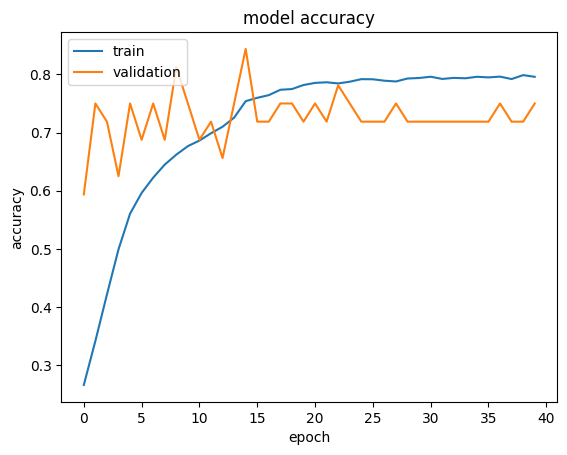

In [62]:
plt.plot(history_complex.history["accuracy"])
plt.plot(history_complex.history["val_accuracy"])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train", "validation"], loc="upper left")
plt.show()

### **Evaluating the Model on Test Set**


In [63]:
# Calculate the number of steps for the entire test set to be processed
test_steps = test_generator.samples // batch_size

# If the number of samples isn't a multiple of the batch size,
# you have one more batch with the remaining samples
if test_generator.samples % batch_size > 0:
    test_steps += 1

# Evaluating the model on the test set
evaluation_results = model_complex.evaluate(test_generator, steps=test_steps)
print(f"Loss: {evaluation_results[0]}, Accuracy: {evaluation_results[1]}")

1/4 [======>.......................] - ETA: 0s - loss: 0.4467 - accuracy: 0.8125

4/4 [==============================] - 0s 8ms/step - loss: 0.6207 - accuracy: 0.7344


Loss: 0.620711624622345, Accuracy: 0.734375


### **Plotting Confusion Matrix**


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 7ms/step


              precision    recall  f1-score   support

       happy       0.76      0.81      0.79        32
     neutral       0.66      0.78      0.71        32
         sad       0.59      0.53      0.56        32
    surprise       0.96      0.81      0.88        32

    accuracy                           0.73       128
   macro avg       0.74      0.73      0.74       128
weighted avg       0.74      0.73      0.74       128



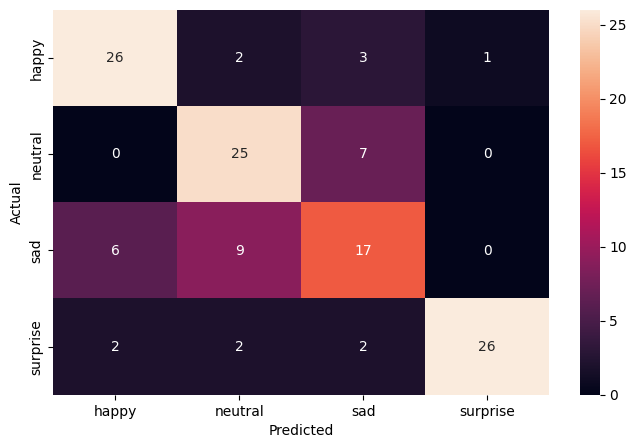

In [64]:
pred_probabilities = model_complex.predict(test_generator, steps=test_steps)
pred = np.argmax(pred_probabilities, axis=1)

# Getting the true labels from the generator
y_true = test_generator.classes

# Printing the classification report with actual emotion labels
print(classification_report(y_true, pred, target_names=CATEGORIES))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)
plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt=".0f", xticklabels=CATEGORIES, yticklabels=CATEGORIES)
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

**Observations and Insights:\_\_**


### **Plotting the Confusion Matrix for the chosen final model**


1/4 [======>.......................] - ETA: 0s

4/4 [==============================] - 0s 7ms/step


              precision    recall  f1-score   support

       happy       0.76      0.81      0.79        32
     neutral       0.66      0.78      0.71        32
         sad       0.59      0.53      0.56        32
    surprise       0.96      0.81      0.88        32

    accuracy                           0.73       128
   macro avg       0.74      0.73      0.74       128
weighted avg       0.74      0.73      0.74       128



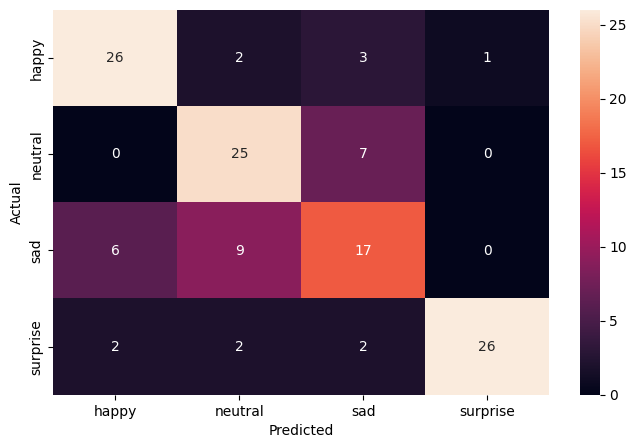

In [65]:
pred_probabilities = model_complex.predict(test_generator, steps=test_steps)
pred = np.argmax(pred_probabilities, axis=1)

# Getting the true labels from the generator
y_true = test_generator.classes

# Printing the classification report with actual emotion labels
print(classification_report(y_true, pred, target_names=CATEGORIES))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)
plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt=".0f", xticklabels=CATEGORIES, yticklabels=CATEGORIES)
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

**Observations and Insights:\_\_**


## **Conclusion:\*\***\_\_\_\_**\*\***


### **Insights**

### **Refined insights**:

- What are the most meaningful insights from the data relevant to the problem?

### **Comparison of various techniques and their relative performance**:

- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

### **Proposal for the final solution design**:

- What model do you propose to be adopted? Why is this the best solution to adopt?
